In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os
import tensorflow as tf
from __future__ import print_function, division
from music21 import converter, instrument, note, chord, stream
#from tensorflow.keras.layers import Input, Dense, Reshape, Dropout, CuDNNLSTM, Bidirectional
from tensorflow.keras.layers import Input, Dense, Reshape, Dropout,  Bidirectional

from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import np_utils

from fractions import Fraction
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
chop = "Z:2.0 Z:157/3 Piano:F#5:1.5:55 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:B4:0.5:50 Piano:A4:0.0:46 Piano:B4:0.0:47 Piano:A4:0.75:55 Piano:G#4:1.0:53 Piano:A4:0.5:55 Piano:C#5:1.0:50 Piano:C#4:1.5:68 Piano:B3:0.5:60 Piano:A3:0.0:57 Piano:B3:0.0:57 Piano:A3:0.75:68 Piano:G#3:1.0:67 Piano:A3:1.0:71 Piano:C#4:2.0:67 Piano:B3:1.0:71 Piano:A3:1.0:68 Piano:C#4:1.0:68 Piano:B3:0.0:63 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:A3:0.5:66 Piano:C#4:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:61 Piano:C#4:0.0:61 Piano:B3:0.75:72 Piano:B-3:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:62 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:B-3:0.5:66 Piano:F#4:1.0:72 Piano:F#5:1.5:58 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:1.5:50 Piano:D3:1.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Z:1865/3 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:55 Piano:D3:1.0:64 Piano:C3:1.0:59 Piano:D3:0.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:54 Piano:D3:1.0:62 Piano:C3:1.0:56 Piano:D3:0.75:60 Piano:G2:0.25:51 Piano:C3:1.0:58 Piano:D3:0.75:57 Piano:G2:0.25:48 Piano:C3:1.0:56 Piano:D3:0.75:55 Piano:G2:0.25:46 Piano:C3:1.0:53 Piano:G2:3.0:52 Piano:F#2:3.0:48 Piano:F#5:0.5:55 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:B4:0.5:50 Piano:A4:0.0:46 Piano:B4:0.0:47 Piano:A4:0.75:55 Piano:G#4:1.0:53 Piano:A4:0.5:55 Piano:C#5:1.0:50 Piano:C#4:1.5:68 Piano:B3:0.5:60 Piano:A3:0.0:57 Piano:B3:0.0:57 Piano:A3:0.75:68 Piano:G#3:1.0:67 Piano:A3:1.0:71 Piano:C#4:2.0:67 Piano:B3:1.0:71 Piano:A3:1.0:68 Piano:C#4:1.0:68 Piano:B3:0.0:63 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:A3:0.5:66 Piano:C#4:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:61 Piano:C#4:0.0:61 Piano:B3:0.75:72 Piano:B-3:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:62 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:B-3:0.5:66 Piano:F#4:1.0:72 Piano:F#5:1.5:58 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:1.5:50 Piano:D3:1.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:55 Piano:D3:1.0:64 Piano:C3:1.0:59 Piano:D3:0.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:54 Piano:D3:1.0:62 Piano:C3:1.0:56 Piano:D3:0.75:60 Piano:G2:0.25:51 Piano:C3:1.0:58 Piano:D3:0.75:57 Piano:G2:0.25:48 Piano:C3:1.0:56 Piano:D3:0.75:55 Piano:G2:0.25:46 Piano:C3:1.0:53 Piano:G2:3.0:52 Piano:F#2:2.0:60 Piano:F2:1.0:66 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:B-5:0.5:85 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:10:0.5:82 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:3*7*10:1.0:72 Piano:8*11*3:1.0:72 Piano:B5:0.25:88 Piano:B-5:1.0:88 Piano:G5:0.25:61 Piano:F5:0.75:61 Piano:G5:0.25:61 Piano:B-5:1.0:88 Piano:E-5:1.0:80 Piano:3:0.5:90 Piano:3*7*10:1.0:72 Piano:8*11*3:1.0:72 Piano:B5:0.25:87 Piano:B-5:1.0:88 Piano:G5:0.25:61 Piano:F5:0.75:61 Piano:G5:0.25:61 Piano:B-5:1.0:88 Piano:E5:4.0:80 Piano:7*10:1.0:74 Piano:8*11:1.0:71 Piano:B-4:6.0:65 Piano:3*7:1.0:71 Piano:C#5:4.0:62 Piano:F#5:1.0:74 Piano:F5:1.0:71 Piano:E5:3.0:69 Piano:F#5:0.5:55 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:B4:0.5:50 Piano:A4:0.0:46 Piano:B4:0.0:47 Piano:A4:0.75:55 Piano:G#4:1.0:53 Piano:A4:0.5:55 Piano:C#5:1.0:50 Piano:C#4:1.5:68 Piano:B3:0.5:60 Piano:A3:0.0:57 Piano:B3:0.0:57 Piano:A3:0.75:68 Piano:G#3:1.0:67 Piano:A3:1.0:71 Piano:C#4:2.0:67 Piano:B3:1.0:71 Piano:A3:1.0:68 Piano:C#4:1.0:68 Piano:B3:0.0:63 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:A3:0.5:66 Piano:C#4:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:61 Piano:C#4:0.0:61 Piano:B3:0.75:72 Piano:B-3:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:62 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:B-3:0.5:66 Piano:F#4:1.0:72 Piano:F#5:1.5:58 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:1.5:50 Piano:D3:1.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:55 Piano:D3:1.0:64 Piano:C3:1.0:59 Piano:D3:0.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:54 Piano:D3:1.0:62 Piano:C3:1.0:56 Piano:D3:0.75:60 Piano:G2:0.25:51 Piano:C3:1.0:58 Piano:D3:0.75:57 Piano:G2:0.25:48 Piano:C3:1.0:56 Piano:D3:0.75:55 Piano:G2:0.25:46 Piano:C3:1.0:53 Piano:G2:3.0:52 Piano:F#2:3.0:48 Piano:F#5:0.5:55 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:B4:0.5:50 Piano:A4:0.0:46 Piano:B4:0.0:47 Piano:A4:0.75:55 Piano:G#4:1.0:53 Piano:A4:0.5:55 Piano:C#5:1.0:50 Piano:C#4:1.5:68 Piano:B3:0.5:60 Piano:A3:0.0:57 Piano:B3:0.0:57 Piano:A3:0.75:68 Piano:G#3:1.0:67 Piano:A3:1.0:71 Piano:C#4:2.0:67 Piano:B3:1.0:71 Piano:A3:1.0:68 Piano:C#4:1.0:68 Piano:B3:0.0:63 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:A3:0.5:66 Piano:C#4:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:61 Piano:C#4:0.0:61 Piano:B3:0.75:72 Piano:B-3:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:62 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:B-3:0.5:66 Piano:F#4:1.0:72 Piano:F#5:1.5:58 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:1.5:50 Piano:D3:1.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:55 Piano:D3:1.0:64 Piano:C3:1.0:59 Piano:D3:0.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:54 Piano:D3:1.0:62 Piano:C3:1.0:56 Piano:D3:0.75:60 Piano:G2:0.25:51 Piano:C3:1.0:58 Piano:D3:0.75:57 Piano:G2:0.25:48 Piano:C3:1.0:56 Piano:D3:0.75:55 Piano:G2:0.25:46 Piano:C3:1.0:53 Piano:G2:3.0:52 Piano:F#2:2.0:60 Piano:F2:1.0:66 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:B-5:0.5:85 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:10:0.5:82 Piano:10*2*5:1.0:72 Piano:3*6*10:1.0:72 Piano:F#5:0.25:86 Piano:F5:1.0:80 Piano:D5:0.25:61 Piano:C5:0.75:61 Piano:D5:0.25:61 Piano:F5:1.0:80 Piano:B-4:1.0:80 Piano:3*7*10:1.0:72 Piano:8*11*3:1.0:72 Piano:B5:0.25:88 Piano:B-5:1.0:88 Piano:G5:0.25:61 Piano:F5:0.75:61 Piano:G5:0.25:61 Piano:B-5:1.0:88 Piano:E-5:1.0:80 Piano:3:0.5:90 Piano:3*7*10:1.0:72 Piano:8*11*3:1.0:72 Piano:B5:0.25:87 Piano:B-5:1.0:88 Piano:G5:0.25:61 Piano:F5:0.75:61 Piano:G5:0.25:61 Piano:B-5:1.0:88 Piano:E5:4.0:80 Piano:7*10:1.0:74 Piano:8*11:1.0:71 Piano:B-4:6.0:65 Piano:3*7:1.0:71 Piano:C#5:5.0:62 Piano:F#5:1.0:74 Piano:F5:1.0:71 Piano:E5:3.0:69 Piano:E-5:0.5:59 Piano:E5:0.5:61 Piano:F5:1.0:63 Piano:F#5:1.0:70 Piano:G5:0.75:77 Piano:G#5:0.25:64 Piano:E5:1.5:76 Piano:E-5:0.5:67 Piano:E-5:0.5:71 Piano:C#5:0.0:59 Piano:E-5:0.0:60 Piano:C#5:0.25:69 Piano:C5:1.0:67 Piano:C#5:1.0:70 Piano:E5:2.0:74 Piano:E-5:1.0:64 Piano:B4:0.5:58 Piano:C#5:0.5:60 Piano:D5:1.0:63 Piano:E-5:1.0:68 Piano:F#5:0.5:72 Piano:E5:0.5:64 Piano:C#5:1.0:70 Piano:G#4:0.0:56 Piano:B-4:0.0:56 Piano:G#4:0.75:64 Piano:G4:0.75:64 Piano:G#4:0.25:61 Piano:B4:1.0:64 Piano:B-4:1.0:64 Piano:G4:2.0:69 Piano:F#4:1.0:64 Piano:E-5:0.5:59 Piano:E5:0.5:61 Piano:F#5:1.0:63 Piano:E-6:1.0:69 Piano:C#6:0.5:69 Piano:B5:0.5:64 Piano:G#5:1.0:69 Piano:E5:1.0:67 Piano:E-5:0.5:71 Piano:C#5:0.0:59 Piano:E-5:0.0:60 Piano:C#5:0.25:69 Piano:C5:1.0:67 Piano:C#5:1.0:70 Piano:E5:2.0:71 Piano:E-5:1.0:64 Piano:E-5:1.5:77 Piano:E-5:0.0:64 Piano:F5:0.0:64 Piano:E-5:0.25:72 Piano:C#5:0.5:74 Piano:B4:0.5:71 Piano:B-4:0.5:79 Piano:E-5:0.5:73 Piano:F#5:1.0:80 Piano:B5:1.0:79 Piano:B-5:0.5:81 Piano:F5:0.5:70 Piano:G#5:1.5:80 Piano:F#5:0.5:77 Piano:E-5:1.0:81 Piano:F#4:0.5:80 Piano:F#5:0.5:79 Piano:F5:0.5:78 Piano:E5:0.5:70 Piano:E-5:0.5:67 Piano:E5:0.5:70 Piano:F5:1.0:72 Piano:F#5:1.0:75 Piano:G5:0.75:75 Piano:G#5:0.25:64 Piano:E5:1.5:69 Piano:E-5:0.5:67 Piano:E-5:0.5:71 Piano:C#5:0.0:59 Piano:E-5:0.0:60 Piano:C#5:0.25:69 Piano:C5:1.0:67 Piano:C#5:1.0:70 Piano:E5:2.0:73 Piano:E-5:1.0:64 Piano:B4:0.5:58 Piano:C#5:0.5:60 Piano:D5:1.0:63 Piano:E-5:1.0:67 Piano:F#5:0.5:69 Piano:E5:0.5:64 Piano:C#5:1.0:70 Piano:G#4:0.0:56 Piano:B-4:0.0:56 Piano:G#4:0.75:64 Piano:G4:0.75:64 Piano:G#4:0.25:61 Piano:B4:1.0:64 Piano:B-4:1.0:64 Piano:G4:2.0:69 Piano:F#4:1.0:64 Piano:E-5:0.5:59 Piano:E5:0.5:61 Piano:F#5:1.0:63 Piano:E-6:1.0:69 Piano:C#6:0.5:69 Piano:B5:0.5:64 Piano:G#5:1.0:69 Piano:E5:1.0:67 Piano:E-5:0.5:71 Piano:C#5:0.0:59 Piano:E-5:0.0:60 Piano:C#5:0.25:69 Piano:C5:1.0:67 Piano:C#5:1.0:70 Piano:E5:2.0:71 Piano:E-5:1.0:64 Piano:E-5:1.5:67 Piano:E-5:0.0:56 Piano:F5:0.0:56 Piano:E-5:0.25:63 Piano:C#5:0.5:65 Piano:B4:0.5:62 Piano:B-4:0.5:69 Piano:E-5:0.5:64 Piano:F#5:1.0:70 Piano:B5:1.0:69 Piano:B-5:0.5:71 Piano:F5:0.5:61 Piano:G#5:1.5:70 Piano:F#5:0.5:67 Piano:E-5:2.0:71 Piano:F#5:1.0:75 Piano:8:0.75:76 Piano:6:0.25:71 Piano:4:0.75:70 Piano:4*10:1.0:69 Piano:11*3:0.5:70 Piano:1*6:0.25:68 Piano:11*3:1.0:74 Piano:6:1.0:71 Piano:8:0.75:76 Piano:6:0.25:71 Piano:4:0.75:70 Piano:4*10:1.0:69 Piano:11*3:0.5:70 Piano:1*6:0.25:68 Piano:11*3:1.0:74 Piano:3*6:1.0:71 Piano:1*4:0.25:75 Piano:6*10:0.25:68 Piano:4*8:0.75:70 Piano:6*10:0.25:68 Piano:4*8:1.0:71 Piano:11*3:0.25:75 Piano:4*8:0.25:68 Piano:3*6:0.75:70 Piano:4*8:0.25:68 Piano:3*6:1.0:71 Piano:10*1:0.25:75 Piano:3*6:0.25:68 Piano:1*4:0.75:70 Piano:3*6:0.25:68 Piano:1*4:1.0:71 Piano:11*3:0.25:64 Piano:1*4:0.25:57 Piano:2*8:1.0:62 Piano:3*6:1.0:54 Piano:8:0.75:76 Piano:6:0.25:71 Piano:4:0.75:70 Piano:4*10:1.0:69 Piano:11*3:0.5:70 Piano:1*6:0.25:68 Piano:11*3:1.0:74 Piano:6:1.0:71 Piano:8:0.75:76 Piano:6:0.25:71 Piano:4:0.75:70 Piano:4*10:1.0:69 Piano:11*3:0.5:70 Piano:1*6:0.25:68 Piano:11*3:1.0:74 Piano:3*6:1.0:71 Piano:1*4:0.25:75 Piano:6*10:0.25:68 Piano:4*8:0.75:70 Piano:6*10:0.25:68 Piano:4*8:1.0:71 Piano:11*3:0.25:75 Piano:4*8:0.25:68 Piano:3*6:0.75:70 Piano:4*8:0.25:68 Piano:3*6:1.0:71 Piano:10*1:0.25:75 Piano:3*6:0.25:68 Piano:1*4:0.75:70 Piano:3*6:0.25:68 Piano:1*4:1.0:71 Piano:F#5:0.5:46 Piano:B5:0.5:42 Piano:G5:0.0:42 Piano:A5:0.0:42 Piano:G5:0.75:48 Piano:F#5:0.5:45 Piano:E5:0.5:42 Piano:F#5:0.5:46 Piano:B4:2.5:42 Piano:C#5:0.5:49 Piano:E5:0.5:42 Piano:D5:0.0:42 Piano:E5:0.0:42 Piano:D5:0.75:48 Piano:C#5:1.0:45 Piano:D5:0.5:46 Piano:B4:2.5:42 Piano:C#5:0.5:55 Piano:B4:0.5:47 Piano:A4:0.0:43 Piano:B4:0.0:44 Piano:A4:0.75:52 Piano:G#4:1.0:50 Piano:A4:0.5:52 Piano:C#5:1.0:47 Piano:C#4:1.5:68 Piano:B3:0.5:60 Piano:A3:0.0:57 Piano:B3:0.0:57 Piano:A3:0.75:68 Piano:G#3:1.0:67 Piano:A3:1.0:71 Piano:C#4:2.0:67 Piano:B3:1.0:71 Piano:A3:1.0:68 Piano:C#4:1.0:68 Piano:B3:0.0:63 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:A3:0.5:66 Piano:C#4:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:61 Piano:C#4:0.0:61 Piano:B3:0.75:72 Piano:B-3:1.0:72 Piano:C#4:1.0:68 Piano:B3:0.0:62 Piano:C#4:0.0:63 Piano:B3:0.25:73 Piano:B-3:0.5:66 Piano:F#4:1.0:72 Piano:F#5:1.5:58 Piano:B5:0.5:50 Piano:G5:0.0:50 Piano:A5:0.0:50 Piano:G5:0.75:57 Piano:F#5:0.5:53 Piano:E5:0.5:50 Piano:F#5:0.5:55 Piano:B4:2.5:50 Piano:C#5:0.5:58 Piano:E5:0.5:50 Piano:D5:0.0:50 Piano:E5:0.0:50 Piano:D5:0.75:57 Piano:C#5:1.0:53 Piano:D5:0.5:55 Piano:B4:1.5:50 Piano:D3:1.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:55 Piano:D3:1.0:64 Piano:C3:1.0:59 Piano:D3:0.5:66 Piano:G3:0.5:58 Piano:E3:1/3:65 Piano:F3:1/3:57 Piano:E3:1/3:55 Piano:D3:0.5:63 Piano:C3:0.5:57 Piano:D3:0.75:64 Piano:G2:0.25:54 Piano:D3:1.0:62 Piano:C3:1.0:56 Piano:D3:0.75:60 Piano:G2:0.25:51 Piano:C3:1.0:58 Piano:D3:0.75:57 Piano:G2:0.25:48 Piano:C3:1.0:56 Piano:D3:0.75:55 Piano:G2:0.25:46 Piano:C3:1.0:53 Piano:D3:0.75:54 Piano:G2:0.25:45 Piano:D3:1.0:51 Piano:C3:1.0:45 Piano:D3:0.75:50 Piano:G2:0.25:41 Piano:D3:1.0:46 Piano:C3:1.0:41 Piano:G4:1.0:54 Piano:C4:1.5:59 Piano:B3:0.5:52 Piano:10*1*4:0.75:56 Piano:F#3:1.25:45 Piano:10*1*4:1.0:55 Piano:11*2*6:1.0:50 Z:1.0 Z:3.0 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:C#2:1.0:50 Piano:11*1*5:1.0:36 Piano:11*1*5:1.0:35 Piano:F#2:1.0:50 Piano:9*1:1.0:34 Piano:C#3:3.0:47 Piano:G#3:1.0:58 Piano:F#3:1.0:55 Piano:A3:1.0:55 Piano:C#3:3.0:47 Piano:G#3:0.5:57 Piano:F#3:0.5:51 Piano:A3:1.0:56 Piano:A3:1.0:54 Piano:C#3:3.0:47 Piano:G#3:1.0:57 Piano:F#3:1.0:56 Piano:B-3:1.0:54 Piano:C#3:1.0:47 Piano:G#3:0.5:57 Piano:F#3:1.5:51 Piano:F#2:2.0:47 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:35 Piano:0*4:1.0:36 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:34 Piano:0*4:1.0:34 Piano:5*7*11:1.0:40 Piano:0*4:1.0:32 Piano:5*7*11:1.0:38 Piano:0*4:1.0:29 Piano:5*7*11:1.0:36 Piano:0*4:1.0:30 Piano:G3:3.0:52 Piano:F#3:3.0:48 Piano:11:1.0:48 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:C#2:1.0:50 Piano:11*1*5:1.0:36 Piano:11*1*5:1.0:35 Piano:F#2:1.0:50 Piano:9*1:1.0:34 Piano:C#3:3.0:47 Piano:G#3:1.0:58 Piano:F#3:1.0:55 Piano:A3:1.0:55 Piano:C#3:3.0:47 Piano:G#3:0.5:57 Piano:F#3:0.5:51 Piano:A3:1.0:56 Piano:A3:1.0:54 Piano:C#3:3.0:47 Piano:G#3:1.0:57 Piano:F#3:1.0:56 Piano:B-3:1.0:54 Piano:C#3:1.0:47 Piano:G#3:0.5:57 Piano:F#3:1.5:51 Piano:F#2:2.0:47 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:35 Piano:0*4:1.0:36 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:34 Piano:0*4:1.0:34 Piano:5*7*11:1.0:40 Piano:0*4:1.0:32 Piano:5*7*11:1.0:38 Piano:0*4:1.0:29 Piano:5*7*11:1.0:36 Piano:0*4:1.0:30 Piano:G3:3.0:52 Piano:F#3:2.0:59 Piano:F3:1.0:62 Piano:B-1:0.5:74 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:B-1:0.5:72 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:B-1:0.5:79 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:10:0.5:70 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:E-2:0.5:81 Piano:3*7*10:1.0:57 Piano:8*11*3:1.0:64 Piano:E-3:0.5:73 Piano:3*7*10:1.0:61 Piano:E-3:1.0:68 Piano:E-2:0.5:73 Piano:3*7*10:1.0:57 Piano:8*11*3:1.0:64 Piano:E-3:0.5:73 Piano:7*10*1:1.0:61 Piano:E-3:1.0:68 Piano:E-2:0.5:73 Piano:C#4:1.0:65 Piano:D4:1.0:57 Piano:E-4:1.0:59 Piano:E4:1.0:57 Piano:F4:1.0:54 Piano:F#4:1.0:52 Piano:F#3:0.75:59 Piano:A3:0.0:60 Piano:G3:1.0:68 Piano:F#3:1.0:62 Piano:C#3:1.0:55 Piano:D3:1.0:54 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:C#2:1.0:50 Piano:11*1*5:1.0:36 Piano:11*1*5:1.0:35 Piano:F#2:1.0:50 Piano:9*1:1.0:34 Piano:C#3:3.0:47 Piano:G#3:1.0:58 Piano:F#3:1.0:55 Piano:A3:1.0:55 Piano:C#3:3.0:47 Piano:G#3:0.5:57 Piano:F#3:0.5:51 Piano:A3:1.0:56 Piano:A3:1.0:54 Piano:C#3:3.0:47 Piano:G#3:1.0:57 Piano:F#3:1.0:56 Piano:B-3:1.0:54 Piano:C#3:1.0:47 Piano:G#3:0.5:57 Piano:F#3:1.5:51 Piano:F#2:2.0:47 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:35 Piano:0*4:1.0:36 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:34 Piano:0*4:1.0:34 Piano:5*7*11:1.0:40 Piano:0*4:1.0:32 Piano:5*7*11:1.0:38 Piano:0*4:1.0:29 Piano:5*7*11:1.0:36 Piano:0*4:1.0:30 Piano:G3:3.0:52 Piano:F#3:3.0:48 Piano:11:1.0:48 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:C#2:1.0:50 Piano:11*1*5:1.0:36 Piano:11*1*5:1.0:35 Piano:F#2:1.0:50 Piano:9*1:1.0:34 Piano:C#3:3.0:47 Piano:G#3:1.0:58 Piano:F#3:1.0:55 Piano:A3:1.0:55 Piano:C#3:3.0:47 Piano:G#3:0.5:57 Piano:F#3:0.5:51 Piano:A3:1.0:56 Piano:A3:1.0:54 Piano:C#3:3.0:47 Piano:G#3:1.0:57 Piano:F#3:1.0:56 Piano:B-3:1.0:54 Piano:C#3:1.0:47 Piano:G#3:0.5:57 Piano:F#3:1.5:51 Piano:F#2:2.0:47 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:35 Piano:0*4:1.0:36 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:34 Piano:0*4:1.0:34 Piano:5*7*11:1.0:40 Piano:0*4:1.0:32 Piano:5*7*11:1.0:38 Piano:0*4:1.0:29 Piano:5*7*11:1.0:36 Piano:0*4:1.0:30 Piano:G3:3.0:52 Piano:F#3:2.0:59 Piano:F3:1.0:62 Piano:B-1:0.5:74 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:B-1:0.5:72 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:B-1:0.5:79 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:10:0.5:70 Piano:10*2*5:1.0:57 Piano:3*6*10:1.0:64 Piano:B-2:0.5:73 Piano:10*2*5:2.0:61 Piano:F3:1.0:68 Piano:E-2:0.5:81 Piano:3*7*10:1.0:57 Piano:8*11*3:1.0:64 Piano:E-3:0.5:73 Piano:3*7*10:1.0:61 Piano:E-3:1.0:68 Piano:E-2:0.5:73 Piano:3*7*10:1.0:57 Piano:8*11*3:1.0:64 Piano:E-3:0.5:73 Piano:7*10*1:1.0:61 Piano:E-3:1.0:68 Piano:E-2:0.5:73 Piano:C#4:1.0:65 Piano:D4:1.0:57 Piano:E-4:1.0:59 Piano:E4:1.0:57 Piano:F4:1.0:54 Piano:F#4:1.0:52 Piano:F#3:0.75:59 Piano:B-3:0.0:60 Piano:G#3:1.0:68 Piano:F#3:1.0:63 Piano:C#3:1.0:56 Piano:F#3:1.0:53 Piano:B2:1.0:50 Piano:11*3*6:1.0:38 Piano:11*3:1.0:40 Piano:E2:1.0:53 Piano:8*11*1*4:1.0:39 Piano:F#2:1.0:50 Piano:4*6*10:1.0:38 Piano:4*6*10:1.0:40 Piano:G2:1.0:54 Piano:10*3:1.0:42 Piano:10*3:1.0:39 Piano:G#2:1.0:50 Piano:8*11*3:1.0:38 Piano:8*11*3:1.0:38 Piano:C#2:1.0:53 Piano:1*4*8:1.0:40 Piano:D3:1.0:50 Piano:5*8*11:1.0:39 Piano:5*8*10:1.0:39 Piano:E-3:1.0:55 Piano:3*7*10:1.0:42 Piano:10*1*4*6:1.0:41 Piano:B2:1.0:50 Piano:11*3*6:1.0:38 Piano:E2:1.0:51 Piano:8*11*1*4:1.0:39 Piano:F#2:1.0:50 Piano:4*6*10:1.0:38 Piano:4*6*10:1.0:40 Piano:G2:1.0:54 Piano:10*3:1.0:42 Piano:10*3:1.0:39 Piano:G#2:1.0:55 Piano:3*5*8*11:1.0:38 Piano:B-2:1.0:53 Piano:3*6*10:1.0:40 Piano:3*6*10:1.0:40 Piano:B-2:1.0:50 Piano:8*10*2:1.0:39 Piano:5*8*10:1.0:39 Piano:E-3:1.0:55 Piano:3*6*10:1.0:34 Piano:10*1*4*6:1.0:29 Piano:B2:1.0:50 Piano:9*11*3:1.0:38 Piano:9*11*3:1.0:38 Piano:E2:1.0:53 Piano:8*11*1*4:1.0:39 Piano:F#2:1.0:50 Piano:4*6*10:1.0:38 Piano:4*6*10:1.0:40 Piano:G2:1.0:54 Piano:10*3:1.0:42 Piano:10*3:1.0:39 Piano:G#2:1.0:50 Piano:8*11*3:1.0:38 Piano:8*11*3:1.0:38 Piano:C#2:1.0:53 Piano:1*4*8:1.0:40 Piano:D3:1.0:50 Piano:5*8*11:1.0:39 Piano:5*8*10:1.0:39 Piano:E-3:1.0:55 Piano:3*7*10:1.0:42 Piano:10*1*4*6:1.0:39 Piano:B2:1.0:50 Piano:11*3*6:1.0:38 Piano:E2:1.0:51 Piano:8*11*1*4:1.0:39 Piano:F#2:1.0:50 Piano:4*6*10:1.0:38 Piano:4*6*10:1.0:40 Piano:G2:1.0:54 Piano:10*3:1.0:42 Piano:10*3:1.0:39 Piano:G#2:1.0:55 Piano:3*5*8*11:1.0:38 Piano:B-2:1.0:53 Piano:3*6*10:1.0:40 Piano:3*6*10:1.0:40 Piano:B-2:1.0:50 Piano:8*10*2:1.0:39 Piano:5*8*10:1.0:39 Piano:E-3:1.0:55 Piano:3*6*10:1.0:34 Piano:6*10:1.0:43 Piano:4*10:0.25:59 Piano:F#4:0.25:60 Piano:F#3:1.0:58 Piano:F#2:1.0:60 Piano:B2:0.5:68 Piano:F#3:0.25:59 Piano:11*3:1.0:61 Piano:11*3:1.0:56 Piano:4*10:0.25:59 Piano:F#4:0.25:60 Piano:F#3:1.0:58 Piano:F#2:1.0:60 Piano:B2:0.5:68 Piano:F#3:0.25:59 Piano:11*3:1.0:61 Piano:E3:0.25:68 Piano:C#5:0.25:62 Piano:4*8:0.75:61 Piano:C#5:0.25:62 Piano:4*8:1.0:60 Piano:F#2:0.25:68 Piano:B4:0.25:62 Piano:3*6:0.75:61 Piano:B4:0.25:62 Piano:3*6:1.0:60 Piano:F#2:0.25:68 Piano:B-4:0.25:62 Piano:1*4:0.75:61 Piano:B-4:0.25:62 Piano:1*4:1.0:60 Piano:B2:0.5:61 Piano:B3:2.0:46 Piano:F4:1.0:55 Piano:F#4:1.0:50 Piano:4*10:0.25:59 Piano:F#4:0.25:60 Piano:F#3:1.0:58 Piano:F#2:1.0:60 Piano:B2:0.5:68 Piano:F#3:0.25:59 Piano:11*3:1.0:61 Piano:11*3:1.0:56 Piano:4*10:0.25:59 Piano:F#4:0.25:60 Piano:F#3:1.0:58 Piano:F#2:1.0:60 Piano:B2:0.5:68 Piano:F#3:0.25:59 Piano:11*3:1.0:61 Piano:E3:0.25:68 Piano:C#5:0.25:62 Piano:4*8:0.75:61 Piano:C#5:0.25:62 Piano:4*8:1.0:60 Piano:F#2:0.25:68 Piano:B4:0.25:62 Piano:3*6:0.75:61 Piano:B4:0.25:62 Piano:3*6:1.0:60 Piano:F#2:0.25:68 Piano:B-4:0.25:62 Piano:1*4:0.75:61 Piano:B-4:0.25:62 Piano:1*4:1.0:60 Piano:G#3:0.25:41 Piano:F#3:0.75:47 Piano:G#3:0.25:41 Piano:F#3:1.0:46 Piano:G#3:0.75:44 Piano:F#3:0.25:37 Piano:E3:1.0:44 Piano:F#2:1.0:38 Piano:B2:0.75:44 Piano:C#3:0.25:41 Piano:E-3:1.0:45 Piano:F#3:1.0:44 Piano:G#3:0.75:46 Piano:F#3:0.25:42 Piano:E3:1.0:45 Piano:F#2:1.0:39 Piano:B2:0.75:44 Piano:C#3:0.25:41 Piano:E-3:1.0:45 Piano:F#3:1.0:44 Piano:E4:3.0:49 Piano:B-3:0.25:41 Piano:G#3:0.75:44 Piano:B-3:0.25:41 Piano:G#3:1.0:45 Piano:E-4:3.0:49 Piano:G#3:0.25:41 Piano:F#3:0.75:44 Piano:G#3:0.25:41 Piano:F#3:1.0:45 Piano:C#4:3.0:49 Piano:F#3:0.25:41 Piano:E3:0.75:44 Piano:F#3:0.25:41 Piano:E3:1.0:45 Piano:E-3:0.75:44 Piano:E3:0.25:41 Piano:G#3:1.0:45 Piano:F#3:1.0:44 Piano:G#3:0.75:46 Piano:F#3:0.25:42 Piano:E3:1.0:45 Piano:F#2:1.0:39 Piano:B2:0.75:44 Piano:C#3:0.25:41 Piano:E-3:1.0:45 Piano:F#3:1.0:44 Piano:G3:0.75:43 Piano:F#3:0.25:39 Piano:E3:1.0:42 Piano:F#2:1.0:36 Piano:B2:0.75:41 Piano:C#3:0.25:38 Piano:D3:1.0:41 Piano:F#3:1.0:40 Piano:G3:0.5:42 Piano:F#3:0.5:38 Piano:E3:1.0:41 Piano:G2:1.0:35 Piano:G3:0.5:41 Piano:F#3:0.5:37 Piano:E3:1.0:40 Piano:G#2:1.0:34 Piano:G3:0.75:40 Piano:F#3:0.25:36 Piano:E3:1.0:39 Piano:A2:1.0:34 Piano:G3:0.75:40 Piano:F#3:0.25:36 Piano:E3:1.0:39 Piano:B-2:1.0:33 Piano:B2:1.0:42 Piano:4*7*11:1.0:30 Piano:4*7*11:1.0:30 Piano:B2:1.0:42 Piano:11*2*6:1.0:23 Piano:11*2*6:1.0:23 Piano:B2:1.0:42 Piano:4*6*10:1.0:30 Piano:4*6*10:1.0:30 Piano:B2:1.0:42 Piano:11*2*6:1.0:23 Piano:11*2*6:1.0:23 Piano:C#2:1.0:47 Piano:11*1*5:1.0:34 Piano:11*1*5:1.0:33 Piano:F#2:1.0:47 Piano:9*1:1.0:32 Piano:C#3:3.0:47 Piano:G#3:1.0:58 Piano:F#3:1.0:55 Piano:A3:1.0:55 Piano:C#3:3.0:47 Piano:G#3:0.5:57 Piano:F#3:0.5:51 Piano:A3:1.0:56 Piano:A3:1.0:54 Piano:C#3:3.0:47 Piano:G#3:1.0:57 Piano:F#3:1.0:56 Piano:B-3:1.0:54 Piano:C#3:1.0:47 Piano:G#3:0.5:57 Piano:F#3:1.5:51 Piano:F#2:2.0:47 Piano:B2:1.0:50 Piano:4*7*11:1.0:36 Piano:4*7*11:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:11*2*6:1.0:28 Piano:B2:1.0:50 Piano:4*6*10:1.0:36 Piano:4*6*10:1.0:35 Piano:B2:1.0:50 Piano:11*2*6:1.0:28 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:35 Piano:0*4:1.0:36 Piano:5*11:1.0:40 Piano:0*4:1.0:36 Piano:0*4:1.0:36 Piano:5*7*11:1.0:43 Piano:5*7*11:1.0:34 Piano:0*4:1.0:34 Piano:5*7*11:1.0:40 Piano:0*4:1.0:32 Piano:5*7*11:1.0:38 Piano:0*4:1.0:29 Piano:5*7*11:1.0:36 Piano:0*4:1.0:30 Piano:5*7*11:1.0:35 Piano:5*7*11:1.0:27 Piano:0*4:1.0:26 Piano:5*7*11:1.0:33 Piano:5*7*11:1.0:25 Piano:0*4:1.0:24 Piano:G4:3.0:40 Piano:C4:3.0:45 Piano:G4:3.0:40 Piano:C4:3.0:45 Piano:G4:6.0:41 Piano:F#2:1.0:44 Piano:F#2:1.0:39 Piano:11:1.0:40"

In [0]:
metallica = "Guitar:D3:0.5:64 Guitar:Z:59.25 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:1.0:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:1.0:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:1.0:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:C4:0.5:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:C4:0.5:64 Guitar:F3:0.5:64 Guitar:C4:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:E3:0.5:64 Guitar:B3:0.5:64 Guitar:4*9:2.0:64 Guitar:2*7:1.5:64 Guitar:D3:0.25:64 Guitar:Z:273.25 Guitar:D3:0.25:64 Guitar:D3:1.0:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:E3:1.0:64 Guitar:C3:1.0:64 Guitar:7*0:1.0:64 Guitar:D3:1.0:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:E3:1.0:64 Guitar:C3:1.0:64 Guitar:4*9:1.0:64 Guitar:D3:1.0:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:E3:1.0:64 Guitar:C3:1.0:64 Guitar:7*0:1.0:64 Guitar:D3:1.0:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:E3:1.0:64 Guitar:C3:1.0:64 Guitar:4*9:1.0:64 Guitar:D3:1.0:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:E3:1.0:64 Guitar:C3:1.0:64 Guitar:7*0:1.0:64 Guitar:D3:1.0:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:E4:1.0:64 Guitar:C4:0.5:64 Guitar:A2:0.5:64 Guitar:B3:1.0:64 Guitar:A3:0.25:64 Guitar:A3:0.0:64 Guitar:E-4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:A3:0.25:64 Guitar:B2:1.0:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:B3:0.5:64 Guitar:A2:0.5:64 Guitar:A3:0.25:64 Guitar:A3:0.0:64 Guitar:E-4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.25:64 Guitar:B2:1.0:64 Guitar:F3:0.75:64 Guitar:A3:0.25:64 Guitar:B3:1.0:64 Guitar:A3:1.0:64 Guitar:F3:1.0:64 Guitar:A3:0.25:64 Guitar:A3:0.0:64 Guitar:E-4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.25:64 Guitar:B2:1.0:64 Guitar:F3:0.5:64 Guitar:A3:0.5:64 Guitar:B3:0.5:64 Guitar:A2:0.5:64 Guitar:A3:0.25:64 Guitar:A3:0.0:64 Guitar:E-4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.25:64 Guitar:B2:2/3:64 Guitar:F3:0.75:64 Guitar:A3:0.25:64 Guitar:B3:0.5:64 Guitar:F3:0.5:64 Guitar:B2:0.5:64 Guitar:F#3:0.5:64 Guitar:B3:0.5:64 Guitar:F#3:0.5:64 Guitar:B2:0.5:64 Guitar:A2:0.5:64 Guitar:E3:0.5:64 Guitar:A3:0.5:64 Guitar:E3:0.5:64 Guitar:A3:0.5:64 Guitar:E3:0.5:64 Guitar:G#2:0.5:64 Guitar:C#3:0.5:64 Guitar:G#3:0.5:64 Guitar:C#3:0.5:64 Guitar:G#2:0.5:64 Guitar:A2:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:B2:0.5:64 Guitar:F#3:0.5:64 Guitar:B3:0.5:64 Guitar:F#3:0.5:64 Guitar:B2:0.5:64 Guitar:A2:0.5:64 Guitar:E3:0.5:64 Guitar:A3:0.5:64 Guitar:E3:0.5:64 Guitar:A3:0.5:64 Guitar:E3:0.5:64 Guitar:G#2:0.5:64 Guitar:C#3:0.5:64 Guitar:G#3:0.5:64 Guitar:C#3:0.5:64 Guitar:G#2:0.5:64 Guitar:A2:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D3:0.5:64 Guitar:A2:0.5:64 Guitar:D3:0.5:64 Guitar:B2:0.5:64 Guitar:F#3:0.5:64 Guitar:B3:0.5:64 Guitar:F#3:0.5:64 Guitar:B2:0.5:64 Guitar:C3:0.5:64 Guitar:G3:0.5:64 Guitar:C4:0.5:64 Guitar:G3:0.5:64 Guitar:C4:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D4:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D4:0.5:64 Guitar:A3:0.5:64 Guitar:D4:0.5:64 Guitar:A3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:C3:0.5:64 Guitar:B2:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:B2:0.5:64 Guitar:E3:0.5:64 Guitar:A2:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:A2:0.5:64 Guitar:A3:0.5:64 Guitar:G3:0.25:64 Guitar:A3:0.25:64 Guitar:G3:0.25:64 Guitar:F3:0.5:64 Guitar:G3:0.5:64 Guitar:F3:0.25:64 Guitar:E3:0.25:64 Guitar:D3:0.5:64 Guitar:C3:0.25:64 Guitar:B2:0.25:64 Guitar:A2:0.25:64 Guitar:B2:0.25:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:C3:0.5:64 Guitar:D3:0.5:64 Guitar:C4:0.5:64 Guitar:D4:0.5:64 Guitar:C4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.5:64 Guitar:C4:0.5:64 Guitar:B3:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.25:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:G3:0.5:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:A3:0.5:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:B3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:C3:0.5:64 Guitar:B2:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:B2:0.5:64 Guitar:E3:0.5:64 Guitar:A2:0.5:64 Guitar:D3:0.5:64 Guitar:F3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:A2:0.5:64 Guitar:A3:0.5:64 Guitar:G3:0.25:64 Guitar:A3:0.25:64 Guitar:G3:0.25:64 Guitar:F3:0.5:64 Guitar:G3:0.5:64 Guitar:F3:0.25:64 Guitar:E3:0.25:64 Guitar:D3:0.5:64 Guitar:C3:0.25:64 Guitar:B2:0.25:64 Guitar:A2:0.25:64 Guitar:B2:0.25:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:C3:0.5:64 Guitar:D3:0.5:64 Guitar:C4:0.5:64 Guitar:D4:0.5:64 Guitar:C4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.5:64 Guitar:C4:0.5:64 Guitar:B3:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.25:64 Guitar:G3:0.5:64 Guitar:B3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:G3:0.5:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:A3:0.5:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:B3:0.5:64 Guitar:A2:0.25:64 Guitar:A2:0.0:64 Guitar:A2:0.0:64 Guitar:A2:0.0:64 Guitar:A2:0.0:64 Guitar:A2:0.0:64 Guitar:A2:0.0:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:G3:0.5:64 Guitar:E3:0.5:64 Guitar:C3:0.5:64 Guitar:D3:0.5:64 Guitar:D4:0.5:64 Guitar:D4:0.5:64 Guitar:C4:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:B3:0.5:64 Guitar:C4:0.5:64 Guitar:B3:0.25:64 Guitar:D4:0.25:64 Guitar:C4:0.25:64 Guitar:A3:0.5:64 Guitar:B3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.25:64 Guitar:G3:0.5:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:G3:0.25:64 Guitar:A3:0.5:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:B3:0.5:64 Guitar:A2:0.25:64 Guitar:C3:0.5:64 Guitar:G3:0.5:64 Guitar:C4:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:B3:0.5:64 Guitar:E4:0.5:64 Guitar:B3:0.5:64 Guitar:E4:0.5:64 Guitar:B3:0.5:64 Guitar:A2:0.5:64 Guitar:A3:0.5:64 Guitar:E4:0.5:64 Guitar:A3:0.5:64 Guitar:E4:0.5:64 Guitar:A3:0.5:64 Guitar:A3:0.25:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.5:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.5:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:F3:0.5:64 Guitar:C4:0.5:64 Guitar:F4:0.5:64 Guitar:C4:0.5:64 Guitar:E4:0.5:64 Guitar:C4:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D4:0.5:64 Guitar:E4:0.5:64 Guitar:E4:0.5:64 Guitar:G4:0.5:64 Guitar:G2:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G2:1.0:64 Guitar:A2:1.0:64 Guitar:B2:1.0:64 Guitar:C3:0.5:64 Guitar:G3:0.5:64 Guitar:C4:0.5:64 Guitar:G3:0.5:64 Guitar:C3:0.5:64 Guitar:E3:0.5:64 Guitar:B3:0.5:64 Guitar:E4:0.5:64 Guitar:B3:0.5:64 Guitar:E4:0.5:64 Guitar:B3:0.5:64 Guitar:A2:0.5:64 Guitar:A3:0.5:64 Guitar:E4:0.5:64 Guitar:A3:0.5:64 Guitar:E4:0.5:64 Guitar:A3:0.5:64 Guitar:A3:0.25:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.5:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:A3:0.5:64 Guitar:A3:0.0:64 Guitar:A3:0.0:64 Guitar:F3:0.5:64 Guitar:C4:0.5:64 Guitar:F4:0.5:64 Guitar:C4:0.5:64 Guitar:E4:0.5:64 Guitar:C4:0.5:64 Guitar:D3:0.5:64 Guitar:A3:0.5:64 Guitar:D4:0.5:64 Guitar:E4:0.5:64 Guitar:E4:0.5:64 Guitar:G4:0.5:64 Guitar:G2:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G3:0.5:64 Guitar:D3:0.5:64 Guitar:G2:0.25:64 Guitar:G2:0.0:64 Guitar:A2:1.0:64 Guitar:B2:0.25:64 Guitar:B2:0.5:64 Guitar:G2:1.0:64 Guitar:A2:1.0:64 Guitar:B2:0.5:64 Guitar:B2:0.5:64 Guitar:B2:0.5:64 Guitar:A2:0.5:64 Guitar:A2:1.0:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:C4:0.25:64 Guitar:C4:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A2:0.25:64 Guitar:G#3:0.25:64 Guitar:G#3:0.25:64 Guitar:A2:0.25:64 Guitar:A3:1.0:64 Guitar:A2:1.0:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:C4:0.25:64 Guitar:C4:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:C4:0.25:64 Guitar:C4:0.25:64 Guitar:A2:0.25:64 Guitar:E4:0.25:64 Guitar:E4:0.25:64 Guitar:A2:0.25:64 Guitar:E-4:1.0:64 Guitar:A2:1.0:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:C4:0.25:64 Guitar:C4:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A2:0.25:64 Guitar:G#3:0.25:64 Guitar:G#3:0.25:64 Guitar:A2:0.25:64 Guitar:A3:1.0:64 Guitar:A2:1.0:64 Guitar:A3:0.25:64 Guitar:A3:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:C4:0.25:64 Guitar:C4:0.25:64 Guitar:A2:0.25:64 Guitar:B3:0.25:64 Guitar:B3:0.25:64 Guitar:A2:0.25:64 Guitar:C4:0.25:64 Guitar:C4:0.25:64 Guitar:A2:0.25:64 Guitar:E4:0.25:64 Guitar:E4:0.25:64 Guitar:A2:0.25:64 Guitar:E-4:1.0:64 Guitar:A2:1.0:64 Guitar:C4:1/3:64 Guitar:C4:1/3:64 Guitar:A2:1/3:64 Guitar:E4:1/3:64 Guitar:E4:1/3:64 Guitar:A2:1/3:64 Guitar:E4:1.0:64 Guitar:4*7:1.0:64 Guitar:E-4:1.0:64 Guitar:4*9:0.5:64 Guitar:E-4:1.0:64 Guitar:A2:0.5:64 Guitar:E4:1.0:64 Guitar:E-4:1.0:64 Guitar:A3:0.5:64 Guitar:9:1.0:64 Guitar:9:1.0:64 Guitar:9:0.25:64 Guitar:C#4:1.0:64 Guitar:9:0.5:64 Guitar:F4:1.0:64 Guitar:A3:0.5:64 Guitar:G1:0.25:64 Guitar:7*9:0.5:64 Guitar:9*11*3:1.0:64 Guitar:3*9:1.0:64 Guitar:9*11*4:0.5:64 Guitar:7:0.5:64 Guitar:7*9*0:0.5:64 Guitar:4*7*11:0.5:64 Guitar:9:1.0:64 Guitar:9:1.0:64 Guitar:C#4:1.0:64 Guitar:9:0.25:64 Guitar:9:0.5:64 Guitar:F4:1.0:64 Guitar:A3:0.5:64 Guitar:G1:0.25:64 Guitar:7*9:0.5:64 Guitar:9*11*3:1.0:64 Guitar:3*9:1.0:64 Guitar:9*11*4:0.5:64 Guitar:7:0.5:64 Guitar:7*9*0:0.5:64 Guitar:4*7*11:0.5:64 Guitar:9:1.0:64 Guitar:9:1.0:64 Guitar:C#4:1.0:64 Guitar:9:0.25:64 Guitar:9:0.5:64 Guitar:F4:1.0:64 Guitar:A3:0.5:64 Guitar:G1:0.25:64 Guitar:7*9:0.5:64 Guitar:A1:0.25:64 Guitar:Z:4.0 Guitar:A1:0.0:64 Piano:Z:54.0 Piano:E5:1.0:100 Piano:D5:0.0:80 Piano:E5:1.0:100 Piano:D5:0.0:80 Piano:E5:1.0:100 Piano:D5:0.0:80 Piano:E5:1.0:100 Piano:E5:2/3:100 Piano:E5:1/3:100 Piano:E5:2/3:100 Piano:E5:1/3:100 Piano:D5:2/3:100 Piano:E5:1/3:100 Piano:D5:2/3:100 Piano:E5:1/3:100 Piano:B4:2/3:100 Piano:D5:1.0:100 Piano:E5:1/3:100 Piano:G5:1.0:100 Piano:E5:1/3:100 Piano:E5:2/3:100 Piano:D5:1/3:100 Piano:E5:2/3:100 Piano:E5:1/3:100 Piano:B4:1/3:100 Piano:B4:2/3:100 Piano:E5:1.0:100 Piano:D5:1.0:100 Piano:E5:1/3:100 Piano:E5:1.0:100 Piano:D5:1/3:100 Piano:E5:2/3:100 Piano:E5:1/3:100 Piano:E5:2/3:100 Piano:E5:4/3:100 Piano:E5:1/3:100 Piano:E5:2/3:100 Piano:A4:1.0:100 Piano:G4:1/3:100 Piano:E5:1.0:100 Piano:G5:1/3:100 Piano:G5:2/3:100 Piano:E5:1/3:100 Piano:G5:2/3:100 Piano:E5:1/3:100 Piano:D5:1.0:100 Piano:D5:1/3:100 Piano:D5:2/3:100 Piano:B5:1/3:100 Piano:A5:0.5:100 Piano:G5:1.0:100 Piano:E5:1/3:100 Piano:D5:2/3:100 Piano:E5:5.0:100 Piano:E5:1.0:100 Piano:A4:0.0:80 Piano:B4:2/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:E4:7/3:100 Piano:E5:1.0:100 Piano:D5:0.0:80 Piano:E5:2/3:100 Piano:D5:1/3:100 Piano:E5:2/3:100 Piano:D5:1/3:100 Piano:E5:2/3:100 Piano:E5:1/3:100 Piano:D5:2/3:100 Piano:E5:1/3:100 Piano:B4:1/3:100 Piano:D5:2/3:100 Piano:E5:1.0:100 Piano:D5:1.0:100 Piano:E5:1/3:100 Piano:E5:2/3:100 Piano:E5:1.0:100 Piano:E5:1/3:100 Piano:E5:2/3:100 Piano:B4:1/3:100 Piano:D5:2/3:100 Piano:E5:1/3:100 Piano:D5:2/3:100 Piano:E5:1.0:100 Piano:G5:0.0:80 Piano:E5:1.0:100 Piano:G5:4/3:100 Piano:E5:2/3:100 Piano:D5:1/3:100 Piano:E5:2/3:100 Piano:G5:1/3:100 Piano:G5:2/3:100 Piano:G5:2.0:100 Piano:E4:1.0:100 Piano:E4:1/3:100 Piano:G4:2/3:100 Piano:E4:1/3:100"

In [0]:
metallica_diff= "Piano:tempo:120.0 Piano:A4:2.0:95:0.0 Piano:Z:0.5:0.0 Piano:Z:1.0:0.0 Piano:Z:278/3:0.0 Piano:C5:1.0:95:0.5 Piano:Z:3.5:1.0 Piano:E5:2.0:95:1.0 Piano:C5:1.0:95:1.5 Piano:A4:2.0:95:2.0 Piano:Z:7/3:2.0 Piano:C5:1.0:95:2.5 Piano:E5:2.0:95:3.0 Piano:C5:1.0:95:3.5 Piano:G4:2.0:95:4.0 Piano:Z:1181/3:13/3 Piano:B4:1.0:95:4.5 Piano:Z:11849/12:4.5 Piano:E5:2.0:95:5.0 Piano:B4:1.0:95:5.5 Piano:G4:2.0:95:6.0 Piano:B4:1.0:95:6.5 Piano:E5:2.0:95:7.0 Piano:B4:1.0:95:7.5 Piano:G4:2.0:95:8.0 Piano:D5:1.0:95:8.5 Piano:F#5:2.0:95:9.0 Piano:D5:1.0:95:9.5 Piano:G4:2.0:95:10.0 Piano:D5:1.0:95:10.5 Piano:F#5:2.0:95:11.0 Piano:D5:1.0:95:11.5 Piano:A4:2.0:95:12.0 Piano:C5:1.0:95:12.5 Piano:E5:2.0:95:13.0 Piano:C5:1.0:95:13.5 Piano:A4:2.0:95:14.0 Piano:C5:1.0:95:14.5 Piano:E5:2.0:95:15.0 Piano:C5:1.0:95:15.5 Piano:A4:2.0:95:16.0 Piano:C5:1.0:95:16.5 Piano:E5:2.0:95:17.0 Piano:C5:1.0:95:17.5 Piano:A4:2.0:95:18.0 Piano:C5:1.0:95:18.5 Piano:E5:2.0:95:19.0 Piano:C5:1.0:95:19.5 Piano:G4:2.0:95:20.0 Piano:B4:1.0:95:20.5 Piano:E5:2.0:95:21.0 Piano:B4:1.0:95:21.5 Piano:G4:2.0:95:22.0 Piano:B4:1.0:95:22.5 Piano:E5:2.0:95:23.0 Piano:B4:1.0:95:23.5 Piano:G4:2.0:95:24.0 Piano:D5:1.0:95:24.5 Piano:F#5:2.0:95:25.0 Piano:D5:1.0:95:25.5 Piano:G4:2.0:95:26.0 Piano:D5:1.0:95:26.5 Piano:F#5:2.0:95:27.0 Piano:D5:1.0:95:27.5 Piano:A4:2.0:95:28.0 Piano:C5:1.0:95:28.5 Piano:E5:2.0:95:29.0 Piano:C5:1.0:95:29.5 Piano:A4:2.0:95:30.0 Piano:C5:1.0:95:30.5 Piano:E5:2.0:95:31.0 Piano:C5:1.0:95:31.5 Piano:A4:2.0:95:32.0 Piano:C5:1.0:95:32.5 Piano:E5:2.0:95:33.0 Piano:C5:1.0:95:33.5 Piano:A4:2.0:95:34.0 Piano:C5:1.0:95:34.5 Piano:E5:2.0:95:35.0 Piano:C5:1.0:95:35.5 Piano:G4:2.0:95:36.0 Piano:B4:1.0:95:36.5 Piano:E5:2.0:95:37.0 Piano:B4:1.0:95:37.5 Piano:G4:2.0:95:38.0 Piano:B4:1.0:95:38.5 Piano:E5:2.0:95:39.0 Piano:B4:1.0:95:39.5 Piano:G4:2.0:95:40.0 Piano:D5:1.0:95:40.5 Piano:F#5:2.0:95:41.0 Piano:D5:1.0:95:41.5 Piano:G4:2.0:95:42.0 Piano:D5:1.0:95:42.5 Piano:F#5:2.0:95:43.0 Piano:D5:1.0:95:43.5 Piano:A4:2.0:95:44.0 Piano:C5:1.0:95:44.5 Piano:E5:2.0:95:45.0 Piano:C5:1.0:95:45.5 Piano:A4:2.0:95:46.0 Piano:C5:1.0:95:46.5 Piano:E5:2.0:95:47.0 Piano:C5:1.0:95:47.5 Piano:A4:2.0:95:48.0 Piano:C5:1.0:95:48.5 Piano:E5:2.0:95:49.0 Piano:C5:1.0:95:49.5 Piano:A4:2.0:95:50.0 Piano:C5:1.0:95:50.5 Piano:E5:2.0:95:51.0 Piano:C5:1.0:95:51.5 Piano:G4:2.0:95:52.0 Piano:B4:1.0:95:52.5 Piano:E5:2.0:95:53.0 Piano:B4:1.0:95:53.5 Piano:G4:2.0:95:54.0 Piano:B4:1.0:95:54.5 Piano:E5:2.0:95:55.0 Piano:B4:1.0:95:55.5 Piano:G4:2.0:95:56.0 Piano:D5:1.0:95:56.5 Piano:F#5:2.0:95:57.0 Piano:D5:1.0:95:57.5 Piano:G4:2.0:95:58.0 Piano:D5:1.0:95:58.5 Piano:F#5:2.0:95:59.0 Piano:D5:1.0:95:59.5 Piano:A4:2.0:95:60.0 Piano:C5:1.0:95:60.5 Piano:E5:2.0:95:61.0 Piano:C5:1.0:95:61.5 Piano:A4:2.0:95:62.0 Piano:C5:1.0:95:62.5 Piano:E5:2.0:95:63.0 Piano:C5:1.0:95:63.5 Piano:A4:2.0:95:64.0 Piano:C5:1.0:95:64.5 Piano:E5:2.0:95:65.0 Piano:C5:1.0:95:65.5 Piano:A4:2.0:95:66.0 Piano:C5:1.0:95:66.5 Piano:E5:2.0:95:67.0 Piano:C5:1.0:95:67.5 Piano:G4:2.0:95:68.0 Piano:B4:1.0:95:68.5 Piano:E5:2.0:95:69.0 Piano:B4:1.0:95:69.5 Piano:G4:2.0:95:70.0 Piano:B4:1.0:95:70.5 Piano:E5:2.0:95:71.0 Piano:B4:1.0:95:71.5 Piano:G4:2.0:95:72.0 Piano:D5:1.0:95:72.5 Piano:F#5:2.0:95:73.0 Piano:D5:1.0:95:73.5 Piano:G4:2.0:95:74.0 Piano:D5:1.0:95:74.5 Piano:F#5:2.0:95:75.0 Piano:D5:1.0:95:75.5 Piano:A4:2.0:95:76.0 Piano:C5:1.0:95:76.5 Piano:E5:2.0:95:77.0 Piano:C5:1.0:95:77.5 Piano:A4:2.0:95:78.0 Piano:C5:1.0:95:78.5 Piano:E5:2.0:95:79.0 Piano:C5:1.0:95:79.5 Piano:A4:2.0:95:80.0 Piano:C5:1.0:95:80.5 Piano:E5:2.0:95:81.0 Piano:C5:1.0:95:81.5 Piano:A4:2.0:95:82.0 Piano:C5:1.0:95:82.5 Piano:E5:2.0:95:83.0 Piano:C5:1.0:95:83.5 Piano:G4:2.0:95:84.0 Piano:B4:1.0:95:84.5 Piano:E5:2.0:95:85.0 Piano:B4:1.0:95:85.5 Piano:G4:2.0:95:86.0 Piano:B4:1.0:95:86.5 Piano:E5:2.0:95:87.0 Piano:B4:1.0:95:87.5 Piano:G4:2.0:95:88.0 Piano:D5:1.0:95:88.5 Piano:F#5:2.0:95:89.0 Piano:D5:1.0:95:89.5 Piano:G4:2.0:95:90.0 Piano:D5:1.0:95:90.5 Piano:F#5:13/3:95:91.0 Piano:D5:4.5:95:91.5 Piano:7*0:2/3:95:92.0 Piano:11*4:2/3:95:278/3 Piano:Z:910/3:278/3 Piano:0*5:2/3:95:280/3 Piano:11*4:2/3:95:94.0 Piano:0*5:2/3:95:284/3 Piano:2*7:2/3:95:286/3 Piano:A2:1.5:95:96.0 Piano:E3:4.0:95:96.5 Piano:C4:1.0:95:97.0 Piano:A2:1.5:95:97.5 Piano:B3:4.0:95:98.0 Piano:A3:1.0:95:98.5 Piano:A2:1.5:95:99.0 Piano:G3:2.0:95:99.5 Piano:G2:4.0:95:100.0 Piano:B2:2.0:95:100.5 Piano:D3:2.0:95:101.0 Piano:G3:2.0:95:101.5 Piano:B2:2.0:95:102.5 Piano:D3:4.0:95:103.0 Piano:G3:3.0:95:103.5 Piano:E2:4.0:95:104.0 Piano:B2:1.0:95:104.5 Piano:C4:1.0:95:105.0 Piano:B2:1.5:95:105.5 Piano:B3:1.5:95:106.0 Piano:A3:4.0:95:106.5 Piano:B2:1.0:95:107.0 Piano:C4:1.5:95:107.5 Piano:C3:1.5:95:108.0 Piano:E3:4.0:95:108.5 Piano:C4:1.0:95:109.0 Piano:C3:1.5:95:109.5 Piano:B3:3.0:95:110.0 Piano:G3:1.0:95:110.5 Piano:C3:0.5:95:111.0 Piano:A3:3.0:95:111.5 Piano:A2:0.5:40:111.5 Piano:A2:1.5:95:112.0 Piano:E3:4.0:95:112.5 Piano:C4:1.0:95:113.0 Piano:A2:1.5:95:113.5 Piano:B3:4.0:95:114.0 Piano:A3:1.0:95:114.5 Piano:A2:1.5:95:115.0 Piano:G3:2.0:95:115.5 Piano:G2:4.0:95:116.0 Piano:B2:2.0:95:116.5 Piano:D3:2.0:95:117.0 Piano:G3:2.0:95:117.5 Piano:B2:2.0:95:118.5 Piano:D3:4.0:95:119.0 Piano:G3:3.0:95:119.5 Piano:E2:4.0:95:120.0 Piano:B2:1.0:95:120.5 Piano:C4:1.0:95:121.0 Piano:B2:1.5:95:121.5 Piano:B3:1.5:95:122.0 Piano:A3:4.0:95:122.5 Piano:B2:1.0:95:123.0 Piano:C4:1.5:95:123.5 Piano:C3:1.5:95:124.0 Piano:E3:4.0:95:124.5 Piano:C4:1.0:95:125.0 Piano:C3:1.5:95:125.5 Piano:B3:3.0:95:126.0 Piano:G3:1.0:95:126.5 Piano:C3:0.5:95:127.0 Piano:A3:3.0:95:127.5 Piano:A2:0.5:40:127.5 Piano:A2:1.5:95:128.0 Piano:E3:4.0:95:128.5 Piano:C4:1.0:95:129.0 Piano:A2:1.5:95:129.5 Piano:B3:4.0:95:130.0 Piano:A3:1.0:95:130.5 Piano:A2:1.5:95:131.0 Piano:G3:2.0:95:131.5 Piano:G2:4.0:95:132.0 Piano:B2:2.0:95:132.5 Piano:D3:2.0:95:133.0 Piano:G3:2.0:95:133.5 Piano:B2:2.0:95:134.5 Piano:D3:4.0:95:135.0 Piano:G3:3.0:95:135.5 Piano:E2:4.0:95:136.0 Piano:B2:1.0:95:136.5 Piano:C4:1.0:95:137.0 Piano:B2:1.5:95:137.5 Piano:B3:1.5:95:138.0 Piano:A3:4.0:95:138.5 Piano:B2:1.0:95:139.0 Piano:C4:1.5:95:139.5 Piano:C3:1.5:95:140.0 Piano:E3:4.0:95:140.5 Piano:C4:1.0:95:141.0 Piano:C3:1.5:95:141.5 Piano:B3:3.0:95:142.0 Piano:G3:1.0:95:142.5 Piano:C3:0.5:95:143.0 Piano:A3:3.0:95:143.5 Piano:A2:0.5:40:143.5 Piano:A2:1.5:95:144.0 Piano:E3:4.0:95:144.5 Piano:C4:1.0:95:145.0 Piano:A2:1.5:95:145.5 Piano:B3:4.0:95:146.0 Piano:A3:1.0:95:146.5 Piano:A2:1.5:95:147.0 Piano:G3:2.0:95:147.5 Piano:G2:4.0:95:148.0 Piano:B2:2.0:95:148.5 Piano:D3:2.0:95:149.0 Piano:G3:2.0:95:149.5 Piano:B2:2.0:95:150.5 Piano:D3:4.0:95:151.0 Piano:G3:3.0:95:151.5 Piano:E2:4.0:95:152.0 Piano:B2:1.0:95:152.5 Piano:C4:1.0:95:153.0 Piano:B2:1.5:95:153.5 Piano:B3:1.5:95:154.0 Piano:A3:4.0:95:154.5 Piano:B2:1.0:95:155.0 Piano:C4:1.5:95:155.5 Piano:C3:1.5:95:156.0 Piano:E3:4.0:95:156.5 Piano:C4:1.0:95:157.0 Piano:C3:1.5:95:157.5 Piano:B3:3.0:95:158.0 Piano:G3:1.0:95:158.5 Piano:C3:0.5:95:159.0 Piano:A3:3.0:95:159.5 Piano:A2:0.5:40:159.5 Piano:A2:1.5:95:160.0 Piano:E3:4.0:95:160.5 Piano:C4:1.0:95:161.0 Piano:A2:1.5:95:161.5 Piano:B3:4.0:95:162.0 Piano:A3:1.0:95:162.5 Piano:A2:1.5:95:163.0 Piano:G3:2.0:95:163.5 Piano:G2:4.0:95:164.0 Piano:B2:2.0:95:164.5 Piano:D3:2.0:95:165.0 Piano:G3:2.0:95:165.5 Piano:B2:2.0:95:166.5 Piano:D3:4.0:95:167.0 Piano:G3:3.0:95:167.5 Piano:E2:4.0:95:168.0 Piano:B2:1.0:95:168.5 Piano:C4:1.0:95:169.0 Piano:B2:1.5:95:169.5 Piano:B3:1.5:95:170.0 Piano:A3:4.0:95:170.5 Piano:B2:1.0:95:171.0 Piano:C4:1.5:95:171.5 Piano:C3:1.5:95:172.0 Piano:E3:4.0:95:172.5 Piano:C4:1.0:95:173.0 Piano:C3:1.5:95:173.5 Piano:B3:3.0:95:174.0 Piano:G3:1.0:95:174.5 Piano:C3:0.5:95:175.0 Piano:A3:3.0:95:175.5 Piano:A2:0.5:40:175.5 Piano:A2:1.5:95:176.0 Piano:E3:4.0:95:176.5 Piano:C4:1.0:95:177.0 Piano:A2:1.5:95:177.5 Piano:B3:4.0:95:178.0 Piano:A3:1.0:95:178.5 Piano:A2:1.5:95:179.0 Piano:G3:2.0:95:179.5 Piano:G2:4.0:95:180.0 Piano:B2:2.0:95:180.5 Piano:D3:2.0:95:181.0 Piano:G3:2.0:95:181.5 Piano:B2:2.0:95:182.5 Piano:D3:4.0:95:183.0 Piano:G3:3.0:95:183.5 Piano:E2:4.0:95:184.0 Piano:B2:1.0:95:184.5 Piano:C4:1.0:95:185.0 Piano:B2:1.5:95:185.5 Piano:B3:1.5:95:186.0 Piano:A3:4.0:95:186.5 Piano:B2:1.0:95:187.0 Piano:C4:1.5:95:187.5 Piano:C3:1.5:95:188.0 Piano:E3:4.0:95:188.5 Piano:C4:1.0:95:189.0 Piano:C3:1.5:95:189.5 Piano:B3:3.0:95:190.0 Piano:G3:1.0:95:190.5 Piano:C3:0.5:95:191.0 Piano:A3:3.0:95:191.5 Piano:A2:0.5:40:191.5 Piano:A2:1.5:95:192.0 Piano:E3:4.0:95:192.5 Piano:C4:1.0:95:193.0 Piano:A2:1.5:95:193.5 Piano:B3:4.0:95:194.0 Piano:A3:1.0:95:194.5 Piano:A2:1.5:95:195.0 Piano:G3:2.0:95:195.5 Piano:G2:4.0:95:196.0 Piano:B2:2.0:95:196.5 Piano:D3:2.0:95:197.0 Piano:G3:2.0:95:197.5 Piano:B2:2.0:95:198.5 Piano:D3:4.0:95:199.0 Piano:G3:3.0:95:199.5 Piano:E2:4.0:95:200.0 Piano:B2:1.0:95:200.5 Piano:C4:1.0:95:201.0 Piano:B2:1.5:95:201.5 Piano:B3:1.5:95:202.0 Piano:A3:4.0:95:202.5 Piano:B2:1.0:95:203.0 Piano:C4:1.5:95:203.5 Piano:C3:1.5:95:204.0 Piano:E3:4.0:95:204.5 Piano:C4:1.0:95:205.0 Piano:C3:1.5:95:205.5 Piano:B3:3.0:95:206.0 Piano:G3:1.0:95:206.5 Piano:C3:0.5:95:207.0 Piano:A3:3.0:95:207.5 Piano:A2:0.5:40:207.5 Piano:A2:1.5:95:208.0 Piano:E3:4.0:95:208.5 Piano:C4:1.0:95:209.0 Piano:A2:1.5:95:209.5 Piano:B3:4.0:95:210.0 Piano:A3:1.0:95:210.5 Piano:A2:1.5:95:211.0 Piano:G3:2.0:95:211.5 Piano:G2:4.0:95:212.0 Piano:B2:2.0:95:212.5 Piano:D3:2.0:95:213.0 Piano:G3:2.0:95:213.5 Piano:B2:2.0:95:214.5 Piano:D3:4.0:95:215.0 Piano:G3:3.0:95:215.5 Piano:E2:4.0:95:216.0 Piano:B2:1.0:95:216.5 Piano:C4:1.0:95:217.0 Piano:B2:1.5:95:217.5 Piano:B3:1.5:95:218.0 Piano:A3:4.0:95:218.5 Piano:B2:1.0:95:219.0 Piano:C4:1.5:95:219.5 Piano:C3:1.5:95:220.0 Piano:E3:3.5:95:220.5 Piano:C4:1.0:95:221.0 Piano:C3:1.5:95:221.5 Piano:B3:4.0:95:222.0 Piano:G3:1.0:95:222.5 Piano:C3:0.5:95:223.0 Piano:9:0.5:68:223.5 Piano:tempo:125.0 Piano:4*9:1.0:95:224.0 Piano:4*9:0.5:95:225.0 Piano:4*9:0.5:95:225.5 Piano:4*9:1.0:95:226.0 Piano:4*9:1.0:95:227.0 Piano:2*7:1.0:95:228.0 Piano:2*7:0.5:95:229.0 Piano:2*7:0.5:95:229.5 Piano:2*7:1.0:95:230.0 Piano:2*7:1.0:95:231.0 Piano:11*4:1.5:95:232.0 Piano:11*4:0.5:95:233.5 Piano:11*4:2.0:95:234.0 Piano:7*0:0.5:95:236.5 Piano:7*0:1.0:95:237.0 Piano:7*0:0.5:95:238.5 Piano:7*0:1.0:95:239.0 Piano:4*9:1.0:95:240.0 Piano:4*9:0.5:95:241.0 Piano:4*9:0.5:95:241.5 Piano:4*9:1.0:95:242.0 Piano:4*9:1.0:95:243.0 Piano:2*7:1.0:95:244.0 Piano:2*7:0.5:95:245.0 Piano:2*7:0.5:95:245.5 Piano:2*7:1.0:95:246.0 Piano:2*7:1.0:95:247.0 Piano:11*4:1.5:95:248.0 Piano:11*4:0.5:95:249.5 Piano:11*4:2.0:95:250.0 Piano:7*0:0.5:95:252.5 Piano:7*0:1.0:95:253.0 Piano:7*0:0.5:95:254.5 Piano:7*0:1.0:95:255.0 Piano:4*9:1.0:95:256.0 Piano:4*9:0.5:95:257.0 Piano:4*9:0.5:95:257.5 Piano:4*9:1.0:95:258.0 Piano:4*9:1.0:95:259.0 Piano:2*7:1.0:95:260.0 Piano:2*7:0.5:95:261.0 Piano:2*7:0.5:95:261.5 Piano:2*7:1.0:95:262.0 Piano:2*7:1.0:95:263.0 Piano:11*4:1.5:95:264.0 Piano:11*4:0.5:95:265.5 Piano:11*4:2.0:95:266.0 Piano:7*0:0.5:95:268.5 Piano:7*0:1.0:95:269.0 Piano:7*0:0.5:95:270.5 Piano:7*0:1.0:95:271.0 Piano:4*9:1.0:95:272.0 Piano:4*9:0.5:95:273.0 Piano:4*9:0.5:95:273.5 Piano:4*9:1.0:95:274.0 Piano:4*9:1.0:95:275.0 Piano:2*7:1.0:95:276.0 Piano:2*7:0.5:95:277.0 Piano:2*7:0.5:95:277.5 Piano:2*7:1.0:95:278.0 Piano:2*7:1.0:95:279.0 Piano:11*4:1.5:95:280.0 Piano:11*4:0.5:95:281.5 Piano:11*4:2.0:95:282.0 Piano:7*0:0.5:95:284.5 Piano:7*0:1.0:95:285.0 Piano:7*0:0.5:95:286.5 Piano:7*0:1.0:95:287.0 Piano:E2:0.25:76:288.0 Piano:F2:0.25:76:865/3 Piano:G2:0.25:76:866/3 Piano:A2:0.25:76:289.0 Piano:B2:0.25:76:868/3 Piano:C3:0.25:76:869/3 Piano:D3:0.25:76:290.0 Piano:E3:0.25:76:871/3 Piano:F3:0.25:76:872/3 Piano:E3:0.25:76:291.0 Piano:F3:0.25:76:874/3 Piano:G3:0.25:76:875/3 Piano:tempo:120.0 Piano:G#3:8.0:95:292.0 Piano:A3:2.0:95:300.0 Piano:C4:1.0:95:300.5 Piano:E4:2.0:95:301.0 Piano:C4:1.0:95:301.5 Piano:A3:2.0:95:302.0 Piano:C4:1.0:95:302.5 Piano:E4:2.0:95:303.0 Piano:C4:1.0:95:303.5 Piano:G3:2.0:95:304.0 Piano:B3:1.0:95:304.5 Piano:E4:2.0:95:305.0 Piano:B3:1.0:95:305.5 Piano:G3:2.0:95:306.0 Piano:B3:1.0:95:306.5 Piano:E4:2.0:95:307.0 Piano:B3:1.0:95:307.5 Piano:G3:2.0:95:308.0 Piano:D4:1.0:95:308.5 Piano:F#4:2.0:95:309.0 Piano:D4:1.0:95:309.5 Piano:G3:2.0:95:310.0 Piano:D4:1.0:95:310.5 Piano:F#4:2.0:95:311.0 Piano:D4:1.0:95:311.5 Piano:A3:2.0:95:312.0 Piano:C4:1.0:95:312.5 Piano:E4:2.0:95:313.0 Piano:C4:1.0:95:313.5 Piano:A3:2.0:95:314.0 Piano:C4:1.0:95:314.5 Piano:E4:2.0:95:315.0 Piano:C4:1.0:95:315.5 Piano:A3:2.0:95:316.0 Piano:C4:1.0:95:316.5 Piano:E4:2.0:95:317.0 Piano:C4:1.0:95:317.5 Piano:A3:2.0:95:318.0 Piano:C4:1.0:95:318.5 Piano:E4:2.0:95:319.0 Piano:C4:1.0:95:319.5 Piano:G3:2.0:95:320.0 Piano:B3:1.0:95:320.5 Piano:E4:2.0:95:321.0 Piano:B3:1.0:95:321.5 Piano:G3:2.0:95:322.0 Piano:B3:1.0:95:322.5 Piano:E4:2.0:95:323.0 Piano:B3:1.0:95:323.5 Piano:G3:2.0:95:324.0 Piano:D4:1.0:95:324.5 Piano:F#4:2.0:95:325.0 Piano:D4:1.0:95:325.5 Piano:G3:2.0:95:326.0 Piano:D4:1.0:95:326.5 Piano:F#4:2.0:95:327.0 Piano:D4:1.0:95:327.5 Piano:A3:2.0:95:328.0 Piano:C4:1.0:95:328.5 Piano:E4:2.0:95:329.0 Piano:C4:1.0:95:329.5 Piano:A3:4.0:95:330.0 Piano:C4:1.0:95:330.5 Piano:E4:4.0:95:331.0 Piano:C4:1.5:95:331.5 Piano:A2:1.5:95:332.0 Piano:E3:4.0:95:332.5 Piano:C4:1.0:95:333.0 Piano:A2:1.5:95:333.5 Piano:B3:4.0:95:334.0 Piano:A3:1.0:95:334.5 Piano:A2:1.5:95:335.0 Piano:G3:2.0:95:335.5 Piano:G2:4.0:95:336.0 Piano:B2:2.0:95:336.5 Piano:D3:2.0:95:337.0 Piano:G3:2.0:95:337.5 Piano:B2:2.0:95:338.5 Piano:D3:4.0:95:339.0 Piano:G3:3.0:95:339.5 Piano:E2:4.0:95:340.0 Piano:B2:1.0:95:340.5 Piano:C4:1.0:95:341.0 Piano:B2:1.5:95:341.5 Piano:B3:1.5:95:342.0 Piano:A3:4.0:95:342.5 Piano:B2:1.0:95:343.0 Piano:C4:1.5:95:343.5 Piano:C3:1.5:95:344.0 Piano:E3:4.0:95:344.5 Piano:C4:1.0:95:345.0 Piano:C3:1.5:95:345.5 Piano:B3:3.0:95:346.0 Piano:G3:1.0:95:346.5 Piano:C3:0.5:95:347.0 Piano:A3:3.0:95:347.5 Piano:A2:0.5:40:347.5 Piano:A2:1.5:95:348.0 Piano:E3:4.0:95:348.5 Piano:C4:1.0:95:349.0 Piano:A2:1.5:95:349.5 Piano:B3:4.0:95:350.0 Piano:A3:1.0:95:350.5 Piano:A2:1.5:95:351.0 Piano:G3:2.0:95:351.5 Piano:G2:4.0:95:352.0 Piano:B2:2.0:95:352.5 Piano:D3:2.0:95:353.0 Piano:G3:2.0:95:353.5 Piano:B2:2.0:95:354.5 Piano:D3:4.0:95:355.0 Piano:G3:3.0:95:355.5 Piano:E2:4.0:95:356.0 Piano:B2:1.0:95:356.5 Piano:C4:1.0:95:357.0 Piano:B2:1.5:95:357.5 Piano:B3:1.5:95:358.0 Piano:A3:4.0:95:358.5 Piano:B2:1.0:95:359.0 Piano:C4:1.5:95:359.5 Piano:C3:1.5:95:360.0 Piano:E3:4.0:95:360.5 Piano:C4:1.0:95:361.0 Piano:C3:1.5:95:361.5 Piano:B3:3.0:95:362.0 Piano:G3:1.0:95:362.5 Piano:C3:0.5:95:363.0 Piano:A3:3.0:95:363.5 Piano:A2:0.5:40:363.5 Piano:A2:1.5:95:364.0 Piano:E3:4.0:95:364.5 Piano:C4:1.0:95:365.0 Piano:A2:1.5:95:365.5 Piano:B3:4.0:95:366.0 Piano:A3:1.0:95:366.5 Piano:A2:1.5:95:367.0 Piano:G3:2.0:95:367.5 Piano:G2:4.0:95:368.0 Piano:B2:2.0:95:368.5 Piano:D3:2.0:95:369.0 Piano:G3:2.0:95:369.5 Piano:B2:2.0:95:370.5 Piano:D3:4.0:95:371.0 Piano:G3:3.0:95:371.5 Piano:E2:4.0:95:372.0 Piano:B2:1.0:95:372.5 Piano:C4:1.0:95:373.0 Piano:B2:1.5:95:373.5 Piano:B3:1.5:95:374.0 Piano:A3:4.0:95:374.5 Piano:B2:1.0:95:375.0 Piano:C4:1.5:95:375.5 Piano:C3:1.5:95:376.0 Piano:E3:4.0:95:376.5 Piano:C4:1.0:95:377.0 Piano:C3:1.5:95:377.5 Piano:B3:3.0:95:378.0 Piano:G3:1.0:95:378.5 Piano:C3:0.5:95:379.0 Piano:A3:3.0:95:379.5 Piano:A2:0.5:40:379.5 Piano:A2:1.5:95:380.0 Piano:E3:4.0:95:380.5 Piano:C4:1.0:95:381.0 Piano:A2:1.5:95:381.5 Piano:B3:4.0:95:382.0 Piano:A3:1.0:95:382.5 Piano:A2:1.5:95:383.0 Piano:G3:2.0:95:383.5 Piano:G2:4.0:95:384.0 Piano:B2:2.0:95:384.5 Piano:D3:2.0:95:385.0 Piano:G3:2.0:95:385.5 Piano:B2:2.0:95:386.5 Piano:D3:4.0:95:387.0 Piano:G3:3.0:95:387.5 Piano:E2:4.0:95:388.0 Piano:B2:1.0:95:388.5 Piano:C4:1.0:95:389.0 Piano:B2:1.5:95:389.5 Piano:B3:1.5:95:390.0 Piano:A3:4.0:95:390.5 Piano:B2:1.0:95:391.0 Piano:C4:1.5:95:391.5 Piano:C3:1.5:95:392.0 Piano:E3:3.5:95:392.5 Piano:C4:1.0:95:393.0 Piano:C3:1.5:95:393.5 Piano:B3:4.0:95:394.0 Piano:G3:1.0:95:394.5 Piano:C3:0.5:95:395.0 Piano:9:0.5:68:395.5 Piano:tempo:125.0 Piano:4*9:1.0:95:396.0 Piano:Z:598.0:396.0 Piano:4*9:0.5:95:397.0 Piano:4*9:0.5:95:397.5 Piano:4*9:1.0:95:398.0 Piano:Z:596.0:398.0 Piano:4*9:1.0:95:399.0 Piano:2*7:1.0:95:400.0 Piano:2*7:0.5:95:401.0 Piano:2*7:0.5:95:401.5 Piano:2*7:1.0:95:402.0 Piano:2*7:1.0:95:403.0 Piano:11*4:1.5:95:404.0 Piano:11*4:0.5:95:405.5 Piano:11*4:2.0:95:406.0 Piano:7*0:0.5:95:408.5 Piano:7*0:1.0:95:409.0 Piano:7*0:0.5:95:410.5 Piano:7*0:1.0:95:411.0 Piano:4*9:1.0:95:412.0 Piano:4*9:0.5:95:413.0 Piano:4*9:0.5:95:413.5 Piano:4*9:1.0:95:414.0 Piano:4*9:1.0:95:415.0 Piano:2*7:1.0:95:416.0 Piano:2*7:0.5:95:417.0 Piano:2*7:0.5:95:417.5 Piano:2*7:1.0:95:418.0 Piano:2*7:1.0:95:419.0 Piano:11*4:1.5:95:420.0 Piano:11*4:0.5:95:421.5 Piano:11*4:2.0:95:422.0 Piano:7*0:0.5:95:424.5 Piano:7*0:1.0:95:425.0 Piano:7*0:0.5:95:426.5 Piano:7*0:1.0:95:427.0 Piano:4*9:1.0:95:428.0 Piano:4*9:0.5:95:429.0 Piano:4*9:0.5:95:429.5 Piano:4*9:1.0:95:430.0 Piano:4*9:1.0:95:431.0 Piano:2*7:1.0:95:432.0 Piano:2*7:0.5:95:433.0 Piano:2*7:0.5:95:433.5 Piano:2*7:1.0:95:434.0 Piano:2*7:1.0:95:435.0 Piano:11*4:1.5:95:436.0 Piano:11*4:0.5:95:437.5 Piano:11*4:2.0:95:438.0 Piano:7*0:0.5:95:440.5 Piano:7*0:1.0:95:441.0 Piano:7*0:0.5:95:442.5 Piano:7*0:1.0:95:443.0 Piano:4*9:1.0:95:444.0 Piano:4*9:0.5:95:445.0 Piano:4*9:0.5:95:445.5 Piano:4*9:1.0:95:446.0 Piano:4*9:1.0:95:447.0 Piano:2*7:1.0:95:448.0 Piano:2*7:0.5:95:449.0 Piano:2*7:0.5:95:449.5 Piano:2*7:1.0:95:450.0 Piano:2*7:1.0:95:451.0 Piano:11*4:1.5:95:452.0 Piano:11*4:0.5:95:453.5 Piano:11*4:2.0:95:454.0 Piano:7*0:0.5:95:456.5 Piano:7*0:1.0:95:457.0 Piano:7*0:0.5:95:458.5 Piano:7*0:1.0:95:459.0 Piano:E2:0.25:76:460.0 Piano:F2:0.25:76:1381/3 Piano:G2:0.25:76:1382/3 Piano:A2:0.25:76:461.0 Piano:B2:0.25:76:1384/3 Piano:C3:0.25:76:1385/3 Piano:D3:0.25:76:462.0 Piano:E3:0.25:76:1387/3 Piano:F3:0.25:76:1388/3 Piano:E3:0.25:76:463.0 Piano:F3:0.25:76:1390/3 Piano:G3:0.25:76:1391/3 Piano:G#3:4.0:95:464.0 Piano:tempo:135.0 Piano:E2:0.25:76:468.0 Piano:F2:0.25:76:1405/3 Piano:G2:0.25:76:1406/3 Piano:A2:0.25:76:469.0 Piano:B2:0.25:76:1408/3 Piano:C3:0.25:76:1409/3 Piano:2*7:2.0:95:470.0 Piano:E2:0.25:76:472.0 Piano:F2:0.25:76:1417/3 Piano:G2:0.25:76:1418/3 Piano:A2:0.25:76:473.0 Piano:B2:0.25:76:1420/3 Piano:C3:0.25:76:1421/3 Piano:4*9:1.0:95:474.0 Piano:E2:0.25:76:475.0 Piano:F2:0.25:76:1426/3 Piano:G2:0.25:76:1427/3 Piano:7*0:1.0:95:476.0 Piano:E2:0.25:76:477.0 Piano:F2:0.25:76:1432/3 Piano:G2:0.25:76:1433/3 Piano:6*11:1.0:95:478.0 Piano:E2:0.25:76:479.0 Piano:F2:0.25:76:1438/3 Piano:G2:0.25:76:1439/3 Piano:A2:0.25:76:480.0 Piano:B2:0.25:76:1441/3 Piano:C3:0.25:76:1442/3 Piano:D3:0.25:76:481.0 Piano:E3:0.25:76:1444/3 Piano:F3:0.25:76:1445/3 Piano:G3:0.25:76:482.0 Piano:A3:1/3:95:1447/3 Piano:B3:1/3:95:1448/3 Piano:tempo:130.0 Piano:7*0:2.0:95:483.0 Piano:11*4:2.0:76:485.0 Piano:6*11:2.0:76:487.0 Piano:11*4:2.0:76:489.0 Piano:7*0:2.0:76:491.0 Piano:11*4:2.0:76:493.0 Piano:6*11:2.0:76:495.0 Piano:11*4:1.0:76:497.0 Piano:E3:1.0:95:498.0 Piano:4:0.5:95:499.0 Piano:4:0.5:95:499.5 Piano:4*7:0.5:95:500.5 Piano:4*7:0.5:95:501.0 Piano:4:0.5:95:501.5 Piano:4*7:1.0:95:502.0 Piano:4:0.5:95:503.0 Piano:4:0.5:95:503.5 Piano:4*7:0.5:95:504.5 Piano:4*7:0.5:95:505.0 Piano:4:0.5:95:505.5 Piano:4*7:1.0:95:506.0 Piano:4:0.5:95:507.0 Piano:4:0.5:95:507.5 Piano:4*7:0.5:95:508.5 Piano:4*7:0.5:95:509.0 Piano:4:0.5:95:509.5 Piano:4*7:1.0:95:510.0 Piano:6*11:0.5:95:511.0 Piano:5*10:0.5:95:511.5 Piano:11*4:1/3:76:512.0 Piano:11*4:1/3:76:512.5 Piano:11*4:1/3:76:513.0 Piano:11*4:1/3:76:513.5 Piano:11*4:1/3:76:514.0 Piano:G2:0.25:76:514.5 Piano:G2:0.25:76:514.75 Piano:G2:0.25:76:515.0 Piano:F#2:0.25:76:515.25 Piano:11*4:1/3:76:515.5 Piano:11*4:1/3:76:516.0 Piano:4*7:0.5:95:516.5 Piano:4*7:0.5:95:517.0 Piano:4:0.5:95:517.5 Piano:4*7:1.0:95:518.0 Piano:4:0.5:95:519.0 Piano:4:0.5:95:519.5 Piano:4*7:0.5:95:520.5 Piano:4*7:0.5:95:521.0 Piano:4:0.5:95:521.5 Piano:4*7:1.0:95:522.0 Piano:4:0.5:95:523.0 Piano:4:0.5:95:523.5 Piano:4*7:0.5:95:524.5 Piano:4*7:0.5:95:525.0 Piano:4:0.5:95:525.5 Piano:4*7:1.0:95:526.0 Piano:6*11:0.5:95:527.0 Piano:5*10:0.5:95:527.5 Piano:11*4:1/3:76:528.0 Piano:11*4:1/3:76:528.5 Piano:11*4:1/3:76:529.0 Piano:11*4:1/3:76:529.5 Piano:11*4:1/3:76:530.0 Piano:G2:0.25:76:530.5 Piano:G2:0.25:76:530.75 Piano:G2:0.25:76:531.0 Piano:F#2:0.25:76:531.25 Piano:11*4:1/3:76:531.5 Piano:11*4:1/3:76:532.0 Piano:4*7:0.5:95:532.5 Piano:4*7:0.5:95:533.0 Piano:4:0.5:95:533.5 Piano:4*7:1.0:95:534.0 Piano:4:0.5:95:535.0 Piano:4:0.5:95:535.5 Piano:4*7:0.5:95:536.5 Piano:4*7:0.5:95:537.0 Piano:4:0.5:95:537.5 Piano:4*7:1.0:95:538.0 Piano:4:0.5:95:539.0 Piano:4:0.5:95:539.5 Piano:4*7:0.5:95:540.5 Piano:4*7:0.5:95:541.0 Piano:4:0.5:95:541.5 Piano:4*7:1.0:95:542.0 Piano:6*11:0.5:95:543.0 Piano:5*10:0.5:95:543.5 Piano:11*4:1/3:76:544.0 Piano:11*4:1/3:76:544.5 Piano:11*4:1/3:76:545.0 Piano:11*4:1/3:76:545.5 Piano:11*4:1/3:76:546.0 Piano:G2:0.25:76:546.5 Piano:G2:0.25:76:546.75 Piano:G2:0.25:76:547.0 Piano:F#2:0.25:76:547.25 Piano:11*4:1/3:76:547.5 Piano:11*4:1/3:76:548.0 Piano:4*7:0.5:95:548.5 Piano:4*7:0.5:95:549.0 Piano:4:0.5:95:549.5 Piano:4*7:1.0:95:550.0 Piano:4:0.5:95:551.0 Piano:4:0.5:95:551.5 Piano:4*7:0.5:95:552.5 Piano:4*7:0.5:95:553.0 Piano:4:0.5:95:553.5 Piano:4*7:1.0:95:554.0 Piano:4:0.5:95:555.0 Piano:4:0.5:95:555.5 Piano:4*7:0.5:95:556.5 Piano:4*7:0.5:95:557.0 Piano:4:0.5:95:557.5 Piano:4*7:1.0:95:558.0 Piano:6*11:0.5:95:559.0 Piano:5*10:0.5:95:559.5 Piano:11*4:1/3:76:560.0 Piano:11*4:1/3:76:560.5 Piano:11*4:1/3:76:561.0 Piano:11*4:1/3:76:561.5 Piano:11*4:1/3:76:562.0 Piano:11*4:1/3:76:562.5 Piano:1*6:0.5:95:563.0 Piano:1*6:1/3:95:563.5 Piano:4*9:1.0:95:1693/3 Piano:1*6:0.5:95:565.5 Piano:4*9:1.0:95:566.0 Piano:1*6:0.5:95:567.0 Piano:1*6:1/3:95:567.5 Piano:4*9:1.0:95:1705/3 Piano:1*6:0.5:95:569.5 Piano:4*9:1.0:95:570.0 Piano:1*6:0.5:95:571.0 Piano:1*6:1/3:95:571.5 Piano:4*9:1.0:95:1717/3 Piano:1*6:0.5:95:573.5 Piano:4*9:1.0:95:574.0 Piano:4*9:1.0:95:575.0 Piano:6*11:1.0:95:576.0 Piano:3*8:1.0:95:577.0 Piano:6*11:1.0:95:578.0 Piano:8*1:1.0:95:579.0 Piano:4*9:1.0:95:580.0 Piano:8*1:1.0:95:581.0 Piano:9*2:1.0:95:582.0 Piano:6*11:1.0:95:583.0 Piano:9*2:0.5:95:584.0 Piano:9*2:1.0:95:584.5 Piano:9*2:1.5:95:585.5 Piano:9*2:0.5:95:587.0 Piano:9*2:1.0:95:587.5 Piano:9*2:1.5:95:588.5 Piano:E2:0.25:76:590.0 Piano:F2:0.25:76:1771/3 Piano:G2:0.25:76:1772/3 Piano:A2:0.25:76:591.0 Piano:B2:0.25:76:1774/3 Piano:C3:0.25:76:1775/3 Piano:D3:0.25:76:592.0 Piano:E3:0.25:76:1777/3 Piano:F3:0.25:76:1778/3 Piano:G3:0.25:76:593.0 Piano:A3:1/3:95:1780/3 Piano:B3:1/3:95:1781/3 Piano:E3:4.0:95:594.0 Piano:E2:0.25:76:598.0 Piano:tempo:121.0 Piano:F2:0.25:76:1795/3 Piano:tempo:122.0 Piano:G2:0.25:76:1796/3 Piano:tempo:123.0 Piano:tempo:124.0 Piano:A2:0.25:76:599.0 Piano:tempo:125.0 Piano:B2:0.25:76:1798/3 Piano:tempo:126.0 Piano:C3:0.25:76:1799/3 Piano:tempo:127.0 Piano:tempo:128.0 Piano:D3:0.25:76:600.0 Piano:tempo:128.0 Piano:E3:0.25:76:1801/3 Piano:tempo:129.0 Piano:F3:0.25:76:1802/3 Piano:tempo:130.0 Piano:tempo:131.0 Piano:G3:0.25:76:601.0 Piano:tempo:132.0 Piano:A3:1/3:95:1804/3 Piano:tempo:133.0 Piano:B3:1/3:95:1805/3 Piano:tempo:134.0 Piano:tempo:135.0 Piano:E3:8.0:127:602.0 Piano:7*9*2:0.0:127:610.0 Piano:7*9*2:0.0:127:610.25 Piano:7*9*2:0.0:127:610.5 Piano:E2:0.0:76:618.0 Piano:E2:0.0:76:618.25 Piano:E2:0.0:76:1855/3 Piano:E2:0.0:76:618.5 Piano:E2:0.0:76:1856/3 Piano:E2:0.0:76:618.75 Piano:E2:0.0:76:619.0 Piano:E2:0.0:76:619.25 Piano:E2:0.0:76:1858/3 Piano:E2:0.0:76:619.5 Piano:E2:0.0:76:1859/3 Piano:E2:0.0:76:619.75 Piano:E2:0.25:95:620.0 Piano:E2:0.25:95:620.25 Piano:E2:0.5:95:620.5 Piano:E2:0.0:76:622.0 Piano:E2:0.0:76:622.25 Piano:E2:0.0:76:1867/3 Piano:E2:0.0:76:622.5 Piano:E2:0.0:76:1868/3 Piano:E2:0.0:76:622.75 Piano:E2:0.0:76:623.0 Piano:E2:0.0:76:623.25 Piano:E2:0.0:76:1870/3 Piano:E2:0.0:76:623.5 Piano:E2:0.0:76:1871/3 Piano:E2:0.0:76:623.75 Piano:E2:0.25:95:624.0 Piano:E2:0.25:95:624.25 Piano:E2:0.5:95:624.5 Piano:E2:0.0:76:626.0 Piano:E2:0.0:76:626.25 Piano:E2:0.0:76:1879/3 Piano:E2:0.0:76:626.5 Piano:E2:0.0:76:1880/3 Piano:E2:0.0:76:626.75 Piano:F2:0.25:95:627.0 Piano:E2:0.25:76:627.25 Piano:E2:0.0:76:628.0 Piano:E2:0.0:76:628.25 Piano:E2:0.0:76:1885/3 Piano:E2:0.0:76:628.5 Piano:E2:0.0:76:1886/3 Piano:E2:0.0:76:628.75 Piano:F2:0.25:95:629.0 Piano:E2:0.25:76:629.25 Piano:E2:0.0:76:630.0 Piano:E2:0.0:76:630.25 Piano:E2:0.0:76:1891/3 Piano:E2:0.0:76:630.5 Piano:E2:0.0:76:1892/3 Piano:E2:0.0:76:630.75 Piano:F2:0.25:95:631.0 Piano:E2:0.25:76:631.25 Piano:E2:0.0:76:631.5 Piano:E2:0.0:76:1895/3 Piano:E2:0.0:76:631.75 Piano:E-3:2.0:95:632.0 Piano:E2:0.0:76:634.0 Piano:E2:0.0:76:634.25 Piano:E2:0.0:76:1903/3 Piano:E2:0.0:76:634.5 Piano:E2:0.0:76:1904/3 Piano:E2:0.0:76:634.75 Piano:E2:0.0:76:635.0 Piano:E2:0.0:76:635.25 Piano:E2:0.0:76:1906/3 Piano:E2:0.0:76:635.5 Piano:E2:0.0:76:1907/3 Piano:E2:0.0:76:635.75 Piano:E2:0.25:95:636.0 Piano:E2:0.25:95:636.25 Piano:E2:0.5:95:636.5 Piano:E2:0.0:76:638.0 Piano:E2:0.0:76:638.25 Piano:E2:0.0:76:1915/3 Piano:E2:0.0:76:638.5 Piano:E2:0.0:76:1916/3 Piano:E2:0.0:76:638.75 Piano:E2:0.0:76:639.0 Piano:E2:0.0:76:639.25 Piano:E2:0.0:76:1918/3 Piano:E2:0.0:76:639.5 Piano:E2:0.0:76:1919/3 Piano:E2:0.0:76:639.75 Piano:E2:0.25:95:640.0 Piano:E2:0.25:95:640.25 Piano:E2:0.5:95:640.5 Piano:E2:0.0:76:642.0 Piano:E2:0.0:76:642.25 Piano:E2:0.0:76:1927/3 Piano:E2:0.0:76:642.5 Piano:E2:0.0:76:1928/3 Piano:E2:0.0:76:642.75 Piano:F2:0.25:95:643.0 Piano:E2:0.25:76:643.25 Piano:E2:0.0:76:644.0 Piano:E2:0.0:76:644.25 Piano:E2:0.0:76:1933/3 Piano:E2:0.0:76:644.5 Piano:E2:0.0:76:1934/3 Piano:E2:0.0:76:644.75 Piano:F2:0.25:95:645.0 Piano:E2:0.25:76:645.25 Piano:E2:0.0:76:646.0 Piano:E2:0.0:76:646.25 Piano:E2:0.0:76:1939/3 Piano:E2:0.0:76:646.5 Piano:E2:0.0:76:1940/3 Piano:E2:0.0:76:646.75 Piano:F2:0.25:95:647.0 Piano:E2:0.25:76:647.25 Piano:E2:0.0:76:647.5 Piano:E2:0.0:76:1943/3 Piano:E2:0.0:76:647.75 Piano:E-3:2.0:95:648.0 Piano:E2:0.0:76:650.0 Piano:E2:0.0:76:650.25 Piano:E2:0.0:76:1951/3 Piano:E2:0.0:76:650.5 Piano:E2:0.0:76:1952/3 Piano:E2:0.0:76:650.75 Piano:E2:0.0:76:651.0 Piano:E2:0.0:76:651.25 Piano:E2:0.0:76:1954/3 Piano:E2:0.0:76:651.5 Piano:E2:0.0:76:1955/3 Piano:E2:0.0:76:651.75 Piano:E2:0.25:95:652.0 Piano:E2:0.25:95:652.25 Piano:E2:0.5:95:652.5 Piano:E2:0.0:76:654.0 Piano:E2:0.0:76:654.25 Piano:E2:0.0:76:1963/3 Piano:E2:0.0:76:654.5 Piano:E2:0.0:76:1964/3 Piano:E2:0.0:76:654.75 Piano:E2:0.0:76:655.0 Piano:E2:0.0:76:655.25 Piano:E2:0.0:76:1966/3 Piano:E2:0.0:76:655.5 Piano:E2:0.0:76:1967/3 Piano:E2:0.0:76:655.75 Piano:E2:0.25:95:656.0 Piano:E2:0.25:95:656.25 Piano:E2:0.5:95:656.5 Piano:11*4:0.5:95:658.0 Piano:E2:0.25:76:658.5 Piano:E2:0.25:76:658.75 Piano:E2:0.25:76:659.0 Piano:E2:0.25:76:659.25 Piano:E2:0.25:76:659.5 Piano:E2:0.25:76:659.75 Piano:1*6:0.5:95:660.0 Piano:F#2:0.25:76:660.5 Piano:F#2:0.25:76:660.75 Piano:F#2:0.25:76:661.0 Piano:F#2:0.25:76:661.25 Piano:F#2:0.25:76:661.5 Piano:F#2:0.25:76:661.75 Piano:2*7:0.5:95:662.0 Piano:G2:0.25:76:662.5 Piano:G2:0.25:76:662.75 Piano:G2:0.25:76:663.0 Piano:G2:0.25:76:663.25 Piano:G2:0.25:76:663.5 Piano:G2:0.25:76:663.75 Piano:G2:0.25:76:664.0 Piano:G2:0.25:76:664.25 Piano:G2:0.25:76:664.5 Piano:G2:0.25:76:664.75 Piano:G2:0.25:76:665.0 Piano:G2:0.25:76:665.25 Piano:G2:0.25:76:665.5 Piano:G2:0.25:76:665.75 Piano:7*0:0.5:95:666.0 Piano:C3:0.25:76:666.5 Piano:C3:0.25:76:666.75 Piano:C3:0.25:76:667.0 Piano:C3:0.25:76:667.25 Piano:9*2:0.5:95:667.5 Piano:6*11:0.5:95:668.0 Piano:B2:0.25:76:668.5 Piano:B2:0.25:76:668.75 Piano:B2:0.25:76:669.0 Piano:B2:0.25:76:669.25 Piano:9*2:0.5:95:669.5 Piano:4*9:0.5:95:670.0 Piano:A2:0.25:76:670.5 Piano:A2:0.25:76:670.75 Piano:A2:0.25:76:671.0 Piano:A2:0.25:76:671.25 Piano:A2:0.25:76:671.5 Piano:A2:0.25:76:671.75 Piano:2*7:0.5:95:672.0 Piano:1*6:0.5:95:672.5 Piano:11*4:0.25:76:673.0 Piano:1*6:0.75:95:673.25 Piano:11*4:0.5:95:674.0 Piano:E2:0.25:76:674.5 Piano:E2:0.25:76:674.75 Piano:E2:0.25:76:675.0 Piano:E2:0.25:76:675.25 Piano:E2:0.25:76:675.5 Piano:E2:0.25:76:675.75 Piano:1*6:0.5:95:676.0 Piano:F#2:0.25:76:676.5 Piano:F#2:0.25:76:676.75 Piano:F#2:0.25:76:677.0 Piano:F#2:0.25:76:677.25 Piano:F#2:0.25:76:677.5 Piano:F#2:0.25:76:677.75 Piano:2*7:0.5:95:678.0 Piano:G2:0.25:76:678.5 Piano:G2:0.25:76:678.75 Piano:G2:0.25:76:679.0 Piano:G2:0.25:76:679.25 Piano:G2:0.25:76:679.5 Piano:G2:0.25:76:679.75 Piano:G2:0.25:76:680.0 Piano:G2:0.25:76:680.25 Piano:G2:0.25:76:680.5 Piano:G2:0.25:76:680.75 Piano:G2:0.25:76:681.0 Piano:G2:0.25:76:681.25 Piano:G2:0.25:76:681.5 Piano:G2:0.25:76:681.75 Piano:G2:0.5:95:682.0 Piano:G2:0.25:95:682.5 Piano:G2:0.25:95:682.75 Piano:G2:0.25:95:683.0 Piano:F#2:0.25:95:683.25 Piano:E2:0.5:95:683.5 Piano:F#2:0.5:95:684.0 Piano:F#2:0.25:95:684.5 Piano:F#2:0.25:95:684.75 Piano:F#2:0.25:95:685.0 Piano:E2:0.25:95:685.25 Piano:D3:0.5:95:685.5 Piano:E3:0.5:95:686.0 Piano:E3:0.25:95:686.5 Piano:E3:0.25:95:686.75 Piano:E3:0.25:95:687.0 Piano:D3:0.25:95:687.25 Piano:C3:0.5:95:687.5 Piano:C3:0.25:95:688.0 Piano:D3:0.25:76:688.25 Piano:C3:0.25:76:2065/3 Piano:B2:0.5:95:688.5 Piano:B2:0.25:95:689.0 Piano:C3:0.25:76:689.25 Piano:B2:0.25:76:2068/3 Piano:A2:0.5:95:689.5 Piano:A2:0.25:95:690.0 Piano:B2:0.25:76:690.25 Piano:A2:0.25:76:2071/3 Piano:G2:0.5:95:690.5 Piano:G2:0.25:95:691.0 Piano:A2:0.25:76:691.25 Piano:G2:0.25:76:2074/3 Piano:F#2:0.5:95:691.5 Piano:E2:0.25:95:692.0 Piano:G2:0.25:95:692.25 Piano:G2:0.25:95:692.5 Piano:E2:0.25:95:692.75 Piano:B2:0.25:95:693.0 Piano:B2:0.25:95:693.25 Piano:E2:0.25:95:693.5 Piano:7*0:2.0:95:694.0 Piano:11*4:2.0:76:696.0 Piano:6*11:2.0:76:698.0 Piano:11*4:2.0:76:700.0 Piano:7*0:2.0:76:702.0 Piano:11*4:2.0:76:704.0 Piano:6*11:2.0:76:706.0 Piano:11*4:2.0:76:708.0 Piano:E2:0.25:95:710.0 Piano:A2:0.25:76:710.25 Piano:C3:0.25:76:2131/3 Piano:E2:0.25:95:710.5 Piano:A2:0.25:76:2132/3 Piano:C3:0.25:76:710.75 Piano:E2:0.25:95:711.0 Piano:A2:0.25:76:711.25 Piano:C3:0.25:76:2134/3 Piano:E2:0.25:95:711.5 Piano:A2:0.25:76:2135/3 Piano:C3:0.25:76:711.75 Piano:E2:0.25:95:712.0 Piano:A2:0.25:76:712.25 Piano:C3:0.25:76:2137/3 Piano:E2:0.25:95:712.5 Piano:A2:0.25:76:2138/3 Piano:C3:0.25:76:712.75 Piano:E2:0.25:95:713.0 Piano:A2:0.25:76:713.25 Piano:C3:0.25:76:2140/3 Piano:E2:0.25:95:713.5 Piano:A2:0.25:76:2141/3 Piano:C3:0.25:76:713.75 Piano:E2:0.25:95:714.0 Piano:A2:0.25:76:714.25 Piano:B2:0.25:76:2143/3 Piano:E2:0.25:95:714.5 Piano:A2:0.25:76:2144/3 Piano:B2:0.25:76:714.75 Piano:E2:0.25:95:715.0 Piano:A2:0.25:76:715.25 Piano:B2:0.25:76:2146/3 Piano:E2:0.25:95:715.5 Piano:A2:0.25:76:2147/3 Piano:B2:0.25:76:715.75 Piano:E2:0.25:95:716.0 Piano:G#2:0.25:76:716.25 Piano:B2:0.25:76:2149/3 Piano:E2:0.25:95:716.5 Piano:G#2:0.25:76:2150/3 Piano:B2:0.25:76:716.75 Piano:E2:0.5:95:717.0 Piano:E2:0.25:95:718.0 Piano:A2:0.25:76:718.25 Piano:C3:0.25:76:2155/3 Piano:E2:0.25:95:718.5 Piano:A2:0.25:76:2156/3 Piano:C3:0.25:76:718.75 Piano:E2:0.25:95:719.0 Piano:A2:0.25:76:719.25 Piano:C3:0.25:76:2158/3 Piano:E2:0.25:95:719.5 Piano:A2:0.25:76:2159/3 Piano:C3:0.25:76:719.75 Piano:E2:0.25:95:720.0 Piano:A2:0.25:76:720.25 Piano:C3:0.25:76:2161/3 Piano:E2:0.25:95:720.5 Piano:A2:0.25:76:2162/3 Piano:C3:0.25:76:720.75 Piano:E2:0.25:95:721.0 Piano:A2:0.25:76:721.25 Piano:C3:0.25:76:2164/3 Piano:E2:0.25:95:721.5 Piano:A2:0.25:76:2165/3 Piano:C3:0.25:76:721.75 Piano:E2:0.25:95:722.0 Piano:A2:0.25:76:722.25 Piano:B2:0.25:76:2167/3 Piano:E2:0.25:95:722.5 Piano:A2:0.25:76:2168/3 Piano:B2:0.25:76:722.75 Piano:E2:0.25:95:723.0 Piano:A2:0.25:76:723.25 Piano:B2:0.25:76:2170/3 Piano:E2:0.25:95:723.5 Piano:A2:0.25:76:2171/3 Piano:B2:0.25:76:723.75 Piano:E2:0.25:95:724.0 Piano:G#2:0.25:76:724.25 Piano:B2:0.25:76:2173/3 Piano:E2:0.25:95:724.5 Piano:G#2:0.25:76:2174/3 Piano:B2:0.25:76:724.75 Piano:E2:0.5:95:725.0 Piano:E2:0.25:95:726.0 Piano:A2:0.25:76:726.25 Piano:C3:0.25:76:2179/3 Piano:E2:0.25:95:726.5 Piano:A2:0.25:76:2180/3 Piano:C3:0.25:76:726.75 Piano:E2:0.25:95:727.0 Piano:A2:0.25:76:727.25 Piano:C3:0.25:76:2182/3 Piano:E2:0.25:95:727.5 Piano:A2:0.25:76:2183/3 Piano:C3:0.25:76:727.75 Piano:E2:0.25:95:728.0 Piano:A2:0.25:76:728.25 Piano:C3:0.25:76:2185/3 Piano:E2:0.25:95:728.5 Piano:A2:0.25:76:2186/3 Piano:C3:0.25:76:728.75 Piano:E2:0.25:95:729.0 Piano:A2:0.25:76:729.25 Piano:C3:0.25:76:2188/3 Piano:E2:0.25:95:729.5 Piano:A2:0.25:76:2189/3 Piano:C3:0.25:76:729.75 Piano:E2:0.25:95:730.0 Piano:A2:0.25:76:730.25 Piano:B2:0.25:76:2191/3 Piano:E2:0.25:95:730.5 Piano:A2:0.25:76:2192/3 Piano:B2:0.25:76:730.75 Piano:E2:0.25:95:731.0 Piano:A2:0.25:76:731.25 Piano:B2:0.25:76:2194/3 Piano:E2:0.25:95:731.5 Piano:A2:0.25:76:2195/3 Piano:B2:0.25:76:731.75 Piano:E2:0.25:95:732.0 Piano:G#2:0.25:76:732.25 Piano:B2:0.25:76:2197/3 Piano:E2:0.25:95:732.5 Piano:G#2:0.25:76:2198/3 Piano:B2:0.25:76:732.75 Piano:E2:0.5:95:733.0 Piano:E2:0.25:95:734.0 Piano:A2:0.25:76:734.25 Piano:C3:0.25:76:2203/3 Piano:E2:0.25:95:734.5 Piano:A2:0.25:76:2204/3 Piano:C3:0.25:76:734.75 Piano:E2:0.25:95:735.0 Piano:A2:0.25:76:735.25 Piano:C3:0.25:76:2206/3 Piano:E2:0.25:95:735.5 Piano:A2:0.25:76:2207/3 Piano:C3:0.25:76:735.75 Piano:E2:0.25:95:736.0 Piano:A2:0.25:76:736.25 Piano:C3:0.25:76:2209/3 Piano:E2:0.25:95:736.5 Piano:A2:0.25:76:2210/3 Piano:C3:0.25:76:736.75 Piano:E2:0.25:95:737.0 Piano:A2:0.25:76:737.25 Piano:C3:0.25:76:2212/3 Piano:E2:0.25:95:737.5 Piano:A2:0.25:76:2213/3 Piano:C3:0.25:76:737.75 Piano:E2:0.25:95:738.0 Piano:A2:0.25:76:738.25 Piano:B2:0.25:76:2215/3 Piano:E2:0.25:95:738.5 Piano:A2:0.25:76:2216/3 Piano:B2:0.25:76:738.75 Piano:E2:0.25:95:739.0 Piano:A2:0.25:76:739.25 Piano:B2:0.25:76:2218/3 Piano:E2:0.25:95:739.5 Piano:A2:0.25:76:2219/3 Piano:B2:0.25:76:739.75 Piano:E2:0.25:95:740.0 Piano:G#2:0.25:76:740.25 Piano:B2:0.25:76:2221/3 Piano:E2:0.25:95:740.5 Piano:G#2:0.25:76:2222/3 Piano:B2:0.25:76:740.75 Piano:E2:0.5:95:741.0 Piano:7*0:2.0:95:742.0 Piano:11*4:2.0:76:744.0 Piano:6*11:2.0:76:746.0 Piano:E4:0.25:95:748.0 Piano:G4:0.25:95:748.25 Piano:G4:0.25:95:748.5 Piano:E4:0.25:95:748.75 Piano:B4:0.25:95:749.0 Piano:B4:0.25:95:749.25 Piano:G4:0.25:76:749.5 Piano:7*0:2.0:95:750.0 Piano:11*4:2.0:76:752.0 Piano:6*11:2.0:76:754.0 Piano:E4:0.25:95:756.0 Piano:G4:0.25:95:756.25 Piano:G4:0.25:95:756.5 Piano:E4:0.25:95:756.75 Piano:B4:0.25:95:757.0 Piano:B4:0.25:95:757.25 Piano:G4:0.25:76:757.5 Piano:11*4:16.0:95:758.0 Piano:6*11:0.5:95:774.0 Piano:4*9:0.5:95:774.5 Piano:2*7:0.5:95:775.0 Piano:11*4:0.5:95:775.5 Piano:6*11:0.5:95:776.0 Piano:4*9:0.5:95:776.5 Piano:2*7:0.5:95:777.0 Piano:11*4:0.5:95:777.5 Piano:4*9:0.5:95:778.0 Piano:6*11:0.5:95:778.5 Piano:9*2:0.5:95:779.0 Piano:D4:0.5:95:779.5 Piano:G3:0.25:95:779.5 Piano:11*4:2/3:95:779.75 Piano:9*2:0.5:95:780.5 Piano:7*0:0.25:95:781.0 Piano:6*11:0.25:76:781.25 Piano:4*9:0.5:95:781.5 Piano:6*11:0.5:95:782.0 Piano:4*9:0.5:95:782.5 Piano:2*7:0.5:95:783.0 Piano:11*4:0.5:95:783.5 Piano:6*11:0.5:95:784.0 Piano:4*9:0.5:95:784.5 Piano:2*7:0.5:95:785.0 Piano:11*4:0.5:95:785.5 Piano:4*9:0.5:95:786.0 Piano:6*11:0.5:95:786.5 Piano:9*2:0.5:95:787.0 Piano:2*7:0.5:95:787.5 Piano:11*4:0.5:95:788.0 Piano:2*7:0.5:95:788.5 Piano:6*11:0.5:95:789.0 Piano:2*7:0.5:95:789.5 Piano:6*11:0.5:95:790.0 Piano:4*9:0.5:95:790.5 Piano:2*7:0.5:95:791.0 Piano:11*4:0.5:95:791.5 Piano:6*11:0.5:95:792.0 Piano:4*9:0.5:95:792.5 Piano:2*7:0.5:95:793.0 Piano:11*4:0.5:95:793.5 Piano:4*9:0.5:95:794.0 Piano:6*11:0.5:95:794.5 Piano:9*2:0.5:95:795.0 Piano:D4:0.5:95:795.5 Piano:G3:0.25:95:795.5 Piano:11*4:2/3:95:795.75 Piano:9*2:0.5:95:796.5 Piano:7*0:0.25:95:797.0 Piano:6*11:0.25:76:797.25 Piano:4*9:0.5:95:797.5 Piano:6*11:0.5:95:798.0 Piano:4*9:0.5:95:798.5 Piano:2*7:0.5:95:799.0 Piano:11*4:0.5:95:799.5 Piano:6*11:0.5:95:800.0 Piano:4*9:0.5:95:800.5 Piano:2*7:0.5:95:801.0 Piano:11*4:0.5:95:801.5 Piano:4*9:0.5:95:802.0 Piano:6*11:0.5:95:802.5 Piano:9*2:0.5:95:803.0 Piano:2*7:0.5:95:803.5 Piano:11*4:0.5:95:804.0 Piano:2*7:0.5:95:804.5 Piano:6*11:0.5:95:805.0 Piano:2*7:0.5:95:805.5 Piano:6*11:0.5:95:806.0 Piano:B2:0.25:76:806.5 Piano:B2:0.25:76:806.75 Piano:B2:0.25:76:807.0 Piano:B2:0.25:76:807.25 Piano:B2:0.25:76:807.5 Piano:B2:0.25:76:807.75 Piano:B2:0.25:76:808.0 Piano:B2:0.25:76:808.25 Piano:B2:0.25:76:808.5 Piano:B2:0.25:76:808.75 Piano:B2:0.25:76:809.0 Piano:B2:0.25:76:809.25 Piano:B2:0.25:76:809.5 Piano:B2:0.25:76:809.75 Piano:B2:0.25:76:810.0 Piano:B2:0.25:76:810.25 Piano:B2:0.25:76:810.5 Piano:B2:0.25:76:810.75 Piano:B2:0.25:76:811.0 Piano:B2:0.25:76:811.25 Piano:B2:0.25:76:811.5 Piano:B2:0.25:76:811.75 Piano:B2:0.25:76:812.0 Piano:B2:0.25:76:812.25 Piano:B2:0.25:76:812.5 Piano:B2:0.25:76:812.75 Piano:B2:0.25:76:813.0 Piano:B2:0.25:76:813.25 Piano:B2:0.25:76:813.5 Piano:B2:0.25:76:813.75 Piano:B2:0.25:76:814.0 Piano:B2:0.25:76:814.25 Piano:B2:0.25:76:814.5 Piano:B2:0.25:76:814.75 Piano:B2:0.25:76:815.0 Piano:B2:0.25:76:815.25 Piano:B2:0.25:76:815.5 Piano:B2:0.25:76:815.75 Piano:B2:0.25:76:816.0 Piano:B2:0.25:76:816.25 Piano:B2:0.25:76:816.5 Piano:B2:0.25:76:816.75 Piano:B2:0.25:76:817.0 Piano:B2:0.25:76:817.25 Piano:B2:0.25:76:817.5 Piano:B2:0.25:76:817.75 Piano:B2:0.25:76:818.0 Piano:B2:0.25:76:818.25 Piano:B2:0.25:76:818.5 Piano:B2:0.25:76:818.75 Piano:B2:0.25:76:819.0 Piano:B2:0.25:76:819.25 Piano:B2:0.25:76:819.5 Piano:B2:0.25:76:819.75 Piano:B2:0.25:76:820.0 Piano:B2:0.25:76:820.25 Piano:B2:0.25:76:820.5 Piano:B2:0.25:76:820.75 Piano:B2:0.25:76:821.0 Piano:B2:0.25:76:821.25 Piano:B2:0.25:76:821.5 Piano:B2:0.25:76:821.75 Piano:E2:0.25:76:822.0 Piano:E2:0.25:76:822.25 Piano:E2:0.25:76:822.5 Piano:E2:0.25:76:822.75 Piano:E2:0.25:76:823.0 Piano:E2:0.25:76:823.25 Piano:E2:0.25:76:823.5 Piano:E2:0.25:76:823.75 Piano:E2:0.25:76:824.0 Piano:E2:0.25:76:824.25 Piano:E2:0.25:76:824.5 Piano:E2:0.25:76:824.75 Piano:E2:0.25:76:825.0 Piano:E2:0.25:76:825.25 Piano:E2:0.25:76:825.5 Piano:E2:0.25:76:825.75 Piano:E2:0.25:76:826.0 Piano:E2:0.25:76:826.25 Piano:E2:0.25:76:826.5 Piano:E2:0.25:76:826.75 Piano:E2:0.25:76:827.0 Piano:E2:0.25:76:827.25 Piano:E2:0.25:76:827.5 Piano:E2:0.25:76:827.75 Piano:E2:0.25:76:828.0 Piano:E2:0.25:76:828.25 Piano:E2:0.25:76:828.5 Piano:E2:0.25:76:828.75 Piano:E2:0.25:76:829.0 Piano:E2:0.25:76:829.25 Piano:E2:0.25:76:829.5 Piano:E2:0.25:76:829.75 Piano:E2:0.25:76:830.0 Piano:E2:0.25:76:830.25 Piano:E2:0.25:76:830.5 Piano:E2:0.25:76:830.75 Piano:E2:0.25:76:831.0 Piano:E2:0.25:76:831.25 Piano:E2:0.25:76:831.5 Piano:E2:0.25:76:831.75 Piano:E2:0.25:76:832.0 Piano:E2:0.25:76:832.25 Piano:E2:0.25:76:832.5 Piano:E2:0.25:76:832.75 Piano:E2:0.25:76:833.0 Piano:E2:0.25:76:833.25 Piano:E2:0.25:76:833.5 Piano:E2:0.25:76:833.75 Piano:E2:0.25:76:834.0 Piano:E2:0.25:76:834.25 Piano:E2:0.25:76:834.5 Piano:E2:0.25:76:834.75 Piano:E2:0.25:76:835.0 Piano:E2:0.25:76:835.25 Piano:E2:0.25:76:835.5 Piano:E2:0.25:76:835.75 Piano:E2:0.25:76:836.0 Piano:E2:0.25:76:836.25 Piano:E2:0.25:76:836.5 Piano:E2:0.25:76:836.75 Piano:E2:0.25:76:837.0 Piano:E2:0.25:76:837.25 Piano:E2:0.25:76:837.5 Piano:E2:0.25:76:837.75 Piano:A2:0.25:76:838.0 Piano:A2:0.25:76:838.25 Piano:A2:0.25:76:838.5 Piano:A2:0.25:76:838.75 Piano:A2:0.25:76:839.0 Piano:A2:0.25:76:839.25 Piano:A2:0.25:76:839.5 Piano:A2:0.25:76:839.75 Piano:A2:0.25:76:840.0 Piano:A2:0.25:76:840.25 Piano:A2:0.25:76:840.5 Piano:A2:0.25:76:840.75 Piano:A2:0.25:76:841.0 Piano:A2:0.25:76:841.25 Piano:A2:0.25:76:841.5 Piano:A2:0.25:76:841.75 Piano:A2:0.25:76:842.0 Piano:A2:0.25:76:842.25 Piano:A2:0.25:76:842.5 Piano:A2:0.25:76:842.75 Piano:A2:0.25:76:843.0 Piano:A2:0.25:76:843.25 Piano:A2:0.25:76:843.5 Piano:A2:0.25:76:843.75 Piano:4*9:1.0:95:844.0 Piano:5*10:1.0:95:845.0 Piano:6*11:0.5:95:846.0 Piano:B2:0.25:76:846.5 Piano:B2:0.25:76:846.75 Piano:B2:0.25:76:847.0 Piano:B2:0.25:76:847.25 Piano:B2:0.25:76:847.5 Piano:B2:0.25:76:847.75 Piano:B2:0.25:76:848.0 Piano:B2:0.25:76:848.25 Piano:B2:0.25:76:848.5 Piano:B2:0.25:76:848.75 Piano:B2:0.25:76:849.0 Piano:B2:0.25:76:849.25 Piano:B2:0.25:76:849.5 Piano:B2:0.25:76:849.75 Piano:G2:0.25:76:850.0 Piano:G2:0.25:76:850.25 Piano:G2:0.25:76:850.5 Piano:G2:0.25:76:850.75 Piano:G2:0.25:76:851.0 Piano:G2:0.25:76:851.25 Piano:G2:0.25:76:851.5 Piano:G2:0.25:76:851.75 Piano:G2:0.25:76:852.0 Piano:G2:0.25:76:852.25 Piano:G2:0.25:76:852.5 Piano:G2:0.25:76:852.75 Piano:G2:0.25:76:853.0 Piano:G2:0.25:76:853.25 Piano:G2:0.25:76:853.5 Piano:G2:0.25:76:853.75 Piano:A2:0.25:76:854.0 Piano:A2:0.25:76:854.25 Piano:A2:0.25:76:854.5 Piano:A2:0.25:76:854.75 Piano:A2:0.25:76:855.0 Piano:A2:0.25:76:855.25 Piano:A2:0.25:76:855.5 Piano:A2:0.25:76:855.75 Piano:A2:0.25:76:856.0 Piano:A2:0.25:76:856.25 Piano:A2:0.25:76:856.5 Piano:A2:0.25:76:856.75 Piano:A2:0.25:76:857.0 Piano:A2:0.25:76:857.25 Piano:A2:0.25:76:857.5 Piano:A2:0.25:76:857.75 Piano:F#2:0.25:76:858.0 Piano:F#2:0.25:76:858.25 Piano:F#2:0.25:76:858.5 Piano:F#2:0.25:76:858.75 Piano:F#2:0.25:76:859.0 Piano:F#2:0.25:76:859.25 Piano:F#2:0.25:76:859.5 Piano:F#2:0.25:76:859.75 Piano:F#2:0.25:76:860.0 Piano:F#2:0.25:76:860.25 Piano:F#2:0.25:76:860.5 Piano:F#2:0.25:76:860.75 Piano:F#2:0.25:76:861.0 Piano:F#2:0.25:76:861.25 Piano:F#2:0.25:76:861.5 Piano:F#2:0.25:76:861.75 Piano:B2:0.25:76:862.0 Piano:B2:0.25:76:862.25 Piano:B2:0.25:76:862.5 Piano:B2:0.25:76:862.75 Piano:B2:0.25:76:863.0 Piano:B2:0.25:76:863.25 Piano:B2:0.25:76:863.5 Piano:B2:0.25:76:863.75 Piano:B2:0.25:76:864.0 Piano:B2:0.25:76:864.25 Piano:B2:0.25:76:864.5 Piano:B2:0.25:76:864.75 Piano:B2:0.25:76:865.0 Piano:B2:0.25:76:865.25 Piano:B2:0.25:76:865.5 Piano:B2:0.25:76:865.75 Piano:G2:0.25:76:866.0 Piano:G2:0.25:76:866.25 Piano:G2:0.25:76:866.5 Piano:G2:0.25:76:866.75 Piano:G2:0.25:76:867.0 Piano:G2:0.25:76:867.25 Piano:G2:0.25:76:867.5 Piano:G2:0.25:76:867.75 Piano:G2:0.25:76:868.0 Piano:G2:0.25:76:868.25 Piano:G2:0.25:76:868.5 Piano:G2:0.25:76:868.75 Piano:G2:0.25:76:869.0 Piano:G2:0.25:76:869.25 Piano:G2:0.25:76:869.5 Piano:G2:0.25:76:869.75 Piano:A2:0.25:76:870.0 Piano:A2:0.25:76:870.25 Piano:A2:0.25:76:870.5 Piano:A2:0.25:76:870.75 Piano:A2:0.25:76:871.0 Piano:A2:0.25:76:871.25 Piano:A2:0.25:76:871.5 Piano:A2:0.25:76:871.75 Piano:A2:0.25:76:872.0 Piano:A2:0.25:76:872.25 Piano:A2:0.25:76:872.5 Piano:A2:0.25:76:872.75 Piano:A2:0.25:76:873.0 Piano:A2:0.25:76:873.25 Piano:A2:0.25:76:873.5 Piano:A2:0.25:76:873.75 Piano:F#2:0.25:76:874.0 Piano:F#2:0.25:76:874.25 Piano:F#2:0.25:76:874.5 Piano:F#2:0.25:76:874.75 Piano:F#2:0.25:76:875.0 Piano:F#2:0.25:76:875.25 Piano:F#2:0.25:76:875.5 Piano:F#2:0.25:76:875.75 Piano:F#2:0.25:76:876.0 Piano:F#2:0.25:76:876.25 Piano:F#2:0.25:76:876.5 Piano:F#2:0.25:76:876.75 Piano:F#2:0.25:76:877.0 Piano:F#2:0.25:76:877.25 Piano:F#2:0.25:76:877.5 Piano:F#2:0.25:76:877.75 Piano:E2:0.25:76:878.0 Piano:E2:0.25:76:878.25 Piano:E2:0.25:76:878.5 Piano:E2:0.25:76:878.75 Piano:E2:0.25:76:879.0 Piano:E2:0.25:76:879.25 Piano:E2:0.25:76:879.5 Piano:E2:0.25:76:879.75 Piano:E2:0.25:76:880.0 Piano:E2:0.25:76:880.25 Piano:E2:0.25:76:880.5 Piano:E2:0.25:76:880.75 Piano:E2:0.25:76:881.0 Piano:E2:0.25:76:881.25 Piano:E2:0.25:76:881.5 Piano:E2:0.25:76:881.75 Piano:E2:0.25:76:882.0 Piano:E2:0.25:76:882.25 Piano:E2:0.25:76:882.5 Piano:E2:0.25:76:882.75 Piano:E2:0.25:76:883.0 Piano:E2:0.25:76:883.25 Piano:E2:0.25:76:883.5 Piano:E2:0.25:76:883.75 Piano:E2:0.25:76:884.0 Piano:E2:0.25:76:884.25 Piano:E2:0.25:76:884.5 Piano:E2:0.25:76:884.75 Piano:E2:0.25:76:885.0 Piano:E2:0.25:76:885.25 Piano:E2:0.25:76:885.5 Piano:E2:0.25:76:885.75 Piano:G2:0.25:76:886.0 Piano:E2:0.25:76:886.25 Piano:E2:0.25:76:886.5 Piano:E2:0.25:76:886.75 Piano:E2:0.25:76:887.0 Piano:E2:0.25:76:887.25 Piano:E2:0.25:76:887.5 Piano:E2:0.25:76:887.75 Piano:G2:0.25:76:888.0 Piano:E2:0.25:76:888.25 Piano:E2:0.25:76:888.5 Piano:E2:0.25:76:888.75 Piano:E2:0.25:76:889.0 Piano:E2:0.25:76:889.25 Piano:E2:0.25:76:889.5 Piano:E2:0.25:76:889.75 Piano:G2:0.25:76:890.0 Piano:E2:0.25:76:890.25 Piano:E2:0.25:76:890.5 Piano:E2:0.25:76:890.75 Piano:E2:0.25:76:891.0 Piano:E2:0.25:76:891.25 Piano:E2:0.25:76:891.5 Piano:E2:0.25:76:891.75 Piano:G2:0.25:76:892.0 Piano:E2:0.25:76:892.25 Piano:E2:0.25:76:892.5 Piano:E2:0.25:76:892.75 Piano:E2:0.25:76:893.0 Piano:E2:0.25:76:893.25 Piano:E2:0.25:76:893.5 Piano:E2:0.25:76:893.75 Piano:E2:0.25:76:894.0 Piano:E2:0.25:76:894.25 Piano:E2:0.25:76:894.5 Piano:E2:0.25:76:894.75 Piano:E2:0.25:76:895.0 Piano:E2:0.25:76:895.25 Piano:E2:0.25:76:895.5 Piano:E2:0.25:76:895.75 Piano:E2:0.25:76:896.0 Piano:E2:0.25:76:896.25 Piano:E2:0.25:76:896.5 Piano:E2:0.25:76:896.75 Piano:E2:0.25:76:897.0 Piano:E2:0.25:76:897.25 Piano:E2:0.25:76:897.5 Piano:E2:0.25:76:897.75 Piano:E2:0.25:76:898.0 Piano:E2:0.25:76:898.25 Piano:E2:0.25:76:898.5 Piano:E2:0.25:76:898.75 Piano:E2:0.25:76:899.0 Piano:E2:0.25:76:899.25 Piano:E2:0.25:76:899.5 Piano:E2:0.25:76:899.75 Piano:E2:0.25:76:900.0 Piano:E2:0.25:76:900.25 Piano:E2:0.25:76:900.5 Piano:E2:0.25:76:900.75 Piano:E2:0.25:76:901.0 Piano:E2:0.25:76:901.25 Piano:E2:0.25:76:901.5 Piano:E2:0.25:76:901.75 Piano:E2:0.25:76:902.0 Piano:E2:0.25:76:902.25 Piano:E2:0.25:76:902.5 Piano:E2:0.25:76:902.75 Piano:E2:0.25:76:903.0 Piano:E2:0.25:76:903.25 Piano:E2:0.25:76:903.5 Piano:E2:0.25:76:903.75 Piano:E2:0.25:76:904.0 Piano:E2:0.25:76:904.25 Piano:E2:0.25:76:904.5 Piano:E2:0.25:76:904.75 Piano:E2:0.25:76:905.0 Piano:E2:0.25:76:905.25 Piano:E2:0.25:76:905.5 Piano:E2:0.25:76:905.75 Piano:E2:0.25:76:906.0 Piano:E2:0.25:76:906.25 Piano:E2:0.25:76:906.5 Piano:E2:0.25:76:906.75 Piano:E2:0.25:76:907.0 Piano:E2:0.25:76:907.25 Piano:E2:0.25:76:907.5 Piano:E2:0.25:76:907.75 Piano:E2:0.25:76:908.0 Piano:E2:0.25:76:908.25 Piano:E2:0.25:76:908.5 Piano:E2:0.25:76:908.75 Piano:E2:0.25:76:909.0 Piano:E2:0.25:76:909.25 Piano:E2:0.25:76:909.5 Piano:E2:0.25:76:909.75 Piano:E2:0.25:95:910.0 Piano:A2:0.25:76:910.25 Piano:C3:0.25:76:2731/3 Piano:E2:0.25:95:910.5 Piano:A2:0.25:76:2732/3 Piano:C3:0.25:76:910.75 Piano:E2:0.25:95:911.0 Piano:A2:0.25:76:911.25 Piano:C3:0.25:76:2734/3 Piano:E2:0.25:95:911.5 Piano:A2:0.25:76:2735/3 Piano:C3:0.25:76:911.75 Piano:E2:0.25:95:912.0 Piano:A2:0.25:76:912.25 Piano:C3:0.25:76:2737/3 Piano:E2:0.25:95:912.5 Piano:A2:0.25:76:2738/3 Piano:C3:0.25:76:912.75 Piano:E2:0.25:95:913.0 Piano:A2:0.25:76:913.25 Piano:C3:0.25:76:2740/3 Piano:E2:0.25:95:913.5 Piano:A2:0.25:76:2741/3 Piano:C3:0.25:76:913.75 Piano:E2:0.25:95:914.0 Piano:A2:0.25:76:914.25 Piano:B2:0.25:76:2743/3 Piano:E2:0.25:95:914.5 Piano:A2:0.25:76:2744/3 Piano:B2:0.25:76:914.75 Piano:E2:0.25:95:915.0 Piano:A2:0.25:76:915.25 Piano:B2:0.25:76:2746/3 Piano:E2:0.25:95:915.5 Piano:A2:0.25:76:2747/3 Piano:B2:0.25:76:915.75 Piano:E2:0.25:95:916.0 Piano:G#2:0.25:76:916.25 Piano:B2:0.25:76:2749/3 Piano:E2:0.25:95:916.5 Piano:G#2:0.25:76:2750/3 Piano:B2:0.25:76:916.75 Piano:E2:0.5:95:917.0 Piano:E2:0.25:95:918.0 Piano:A2:0.25:76:918.25 Piano:C3:0.25:76:2755/3 Piano:E2:0.25:95:918.5 Piano:A2:0.25:76:2756/3 Piano:C3:0.25:76:918.75 Piano:E2:0.25:95:919.0 Piano:A2:0.25:76:919.25 Piano:C3:0.25:76:2758/3 Piano:E2:0.25:95:919.5 Piano:A2:0.25:76:2759/3 Piano:C3:0.25:76:919.75 Piano:E2:0.25:95:920.0 Piano:A2:0.25:76:920.25 Piano:C3:0.25:76:2761/3 Piano:E2:0.25:95:920.5 Piano:A2:0.25:76:2762/3 Piano:C3:0.25:76:920.75 Piano:E2:0.25:95:921.0 Piano:A2:0.25:76:921.25 Piano:C3:0.25:76:2764/3 Piano:E2:0.25:95:921.5 Piano:A2:0.25:76:2765/3 Piano:C3:0.25:76:921.75 Piano:E2:0.25:95:922.0 Piano:A2:0.25:76:922.25 Piano:B2:0.25:76:2767/3 Piano:E2:0.25:95:922.5 Piano:A2:0.25:76:2768/3 Piano:B2:0.25:76:922.75 Piano:E2:0.25:95:923.0 Piano:A2:0.25:76:923.25 Piano:B2:0.25:76:2770/3 Piano:E2:0.25:95:923.5 Piano:A2:0.25:76:2771/3 Piano:B2:0.25:76:923.75 Piano:E2:0.25:95:924.0 Piano:G#2:0.25:76:924.25 Piano:B2:0.25:76:2773/3 Piano:E2:0.25:95:924.5 Piano:G#2:0.25:76:2774/3 Piano:B2:0.25:76:924.75 Piano:E2:0.5:95:925.0 Piano:7*0:2.0:95:926.0 Piano:11*4:2.0:76:928.0 Piano:6*11:2.0:76:930.0 Piano:11*4:2.0:76:932.0 Piano:7*0:2.0:76:934.0 Piano:11*4:2.0:76:936.0 Piano:6*11:2.0:76:938.0 Piano:G2:0.25:76:940.0 Piano:F#2:0.25:76:940.25 Piano:F2:0.25:76:940.5 Piano:E2:0.25:76:940.75 Piano:G2:0.25:76:941.0 Piano:F#2:0.25:76:941.25 Piano:F2:0.25:76:941.5 Piano:E2:0.25:76:941.75 Piano:7*0:2.0:95:942.0 Piano:11*4:2.0:76:944.0 Piano:6*11:2.0:76:946.0 Piano:G2:0.25:76:948.0 Piano:F#2:0.25:76:948.25 Piano:F2:0.25:76:948.5 Piano:E2:0.25:76:948.75 Piano:G2:0.25:76:949.0 Piano:F#2:0.25:76:949.25 Piano:F2:0.25:76:949.5 Piano:E2:0.25:76:949.75 Piano:7*0:1.0:95:950.0 Piano:6*11:1.0:95:951.0 Piano:0*5:1.0:95:952.0 Piano:11*4:1.0:95:953.0 Piano:2*7:1.0:95:954.0 Piano:1*6:1.0:95:955.0 Piano:11*4:2.0:95:956.0 Piano:7*0:1.0:95:958.0 Piano:6*11:1.0:95:959.0 Piano:0*5:1.0:95:960.0 Piano:11*4:1.0:95:961.0 Piano:2*7:1.0:95:962.0 Piano:1*6:1.0:95:963.0 Piano:11*4:2.0:95:964.0 Piano:9*2:2.0:95:966.0 Piano:1*6:2.0:95:968.0 Piano:tempo:105.0 Piano:tempo:105.0 Piano:9*2:0.25:76:970.0 Piano:8*1:0.25:76:2911/3 Piano:6*11:0.25:76:2912/3 Piano:9*2:0.25:76:971.0 Piano:8*1:0.25:76:2914/3 Piano:6*11:0.25:76:2915/3 Piano:tempo:135.0 Piano:9*2:2.0:95:972.0 Piano:1*6:2.0:95:974.0 Piano:tempo:105.0 Piano:tempo:105.0 Piano:9*2:0.25:76:976.0 Piano:8*1:0.25:76:2929/3 Piano:6*11:0.25:76:2930/3 Piano:9*2:0.25:76:977.0 Piano:8*1:0.25:76:2932/3 Piano:6*11:0.25:76:2933/3 Piano:tempo:135.0 Piano:7*0:1.0:95:978.0 Piano:6*11:1.0:95:979.0 Piano:0*5:1.0:95:980.0 Piano:11*4:1.0:95:981.0 Piano:2*7:1.0:95:982.0 Piano:1*6:1.0:95:983.0 Piano:11*4:2.0:95:984.0 Piano:tempo:120.0 Piano:tempo:120.0 Piano:E2:0.25:95:986.0 Piano:A2:0.25:76:986.25 Piano:C3:0.25:76:2959/3 Piano:E2:0.25:95:986.5 Piano:A2:0.25:76:2960/3 Piano:C3:0.25:76:986.75 Piano:E2:0.25:95:987.0 Piano:A2:0.25:76:987.25 Piano:C3:0.25:76:2962/3 Piano:E2:0.25:95:987.5 Piano:A2:0.25:76:2963/3 Piano:C3:0.25:76:987.75 Piano:E2:0.25:95:988.0 Piano:A2:0.25:76:988.25 Piano:C3:0.25:76:2965/3 Piano:E2:0.25:95:988.5 Piano:A2:0.25:76:2966/3 Piano:C3:0.25:76:988.75 Piano:E2:0.25:95:989.0 Piano:A2:0.25:76:989.25 Piano:C3:0.25:76:2968/3 Piano:E2:0.25:95:989.5 Piano:A2:0.25:76:2969/3 Piano:C3:0.25:76:989.75 Piano:E2:0.25:95:990.0 Piano:A2:0.25:76:990.25 Piano:B2:0.25:76:2971/3 Piano:E2:0.25:95:990.5 Piano:A2:0.25:76:2972/3 Piano:B2:0.25:76:990.75 Piano:E2:0.25:95:991.0 Piano:A2:0.25:76:991.25 Piano:B2:0.25:76:2974/3 Piano:E2:0.25:95:991.5 Piano:A2:0.25:76:2975/3 Piano:B2:0.25:76:991.75 Piano:Z:25/12:11903/12 Piano:tempo:135.0 Piano:tempo:135.0 Piano:0*5:0.25:95:992.0 Piano:0*5:0.25:95:992.25 Piano:0*5:0.25:95:992.5 Piano:0*5:0.25:95:992.75 Piano:0*5:0.25:95:993.0 Piano:0*5:0.25:95:993.25 Piano:11*4:0.5:95:993.5 Piano:Z:92.0:0.0 Piano:Z:278/3:0.0 Piano:Z:129.0:0.0 Piano:Z:130.5:0.0 Piano:7*0:2/3:95:92.0 Piano:11*4:2/3:95:278/3 Piano:Z:899.25:278/3 Piano:0*5:2/3:95:280/3 Piano:11*4:2/3:95:94.0 Piano:0*5:2/3:95:284/3 Piano:2*7:2/3:95:286/3 Piano:9*0*4:16.0:95:96.0 Piano:A2:1.5:95:128.0 Piano:E3:4.0:95:128.5 Piano:C4:1.0:95:129.0 Piano:Z:269.0:129.0 Piano:A2:1.5:95:129.5 Piano:B3:4.0:95:130.0 Piano:A3:1.0:95:130.5 Piano:Z:265.5:130.5 Piano:A2:1.5:95:131.0 Piano:G3:2.0:95:131.5 Piano:G2:4.0:95:132.0 Piano:B2:2.0:95:132.5 Piano:D3:2.0:95:133.0 Piano:G3:2.0:95:133.5 Piano:B2:2.0:95:134.5 Piano:D3:4.0:95:135.0 Piano:G3:3.0:95:135.5 Piano:E2:4.0:95:136.0 Piano:B2:1.0:95:136.5 Piano:C4:1.0:95:137.0 Piano:B2:1.5:95:137.5 Piano:B3:1.5:95:138.0 Piano:A3:4.0:95:138.5 Piano:B2:1.0:95:139.0 Piano:C4:1.5:95:139.5 Piano:C3:1.5:95:140.0 Piano:E3:4.0:95:140.5 Piano:C4:1.0:95:141.0 Piano:C3:1.5:95:141.5 Piano:B3:3.0:95:142.0 Piano:G3:1.0:95:142.5 Piano:C3:0.5:95:143.0 Piano:A3:3.0:95:143.5 Piano:A2:0.5:40:143.5 Piano:A2:1.5:95:144.0 Piano:E3:4.0:95:144.5 Piano:C4:1.0:95:145.0 Piano:A2:1.5:95:145.5 Piano:B3:4.0:95:146.0 Piano:A3:1.0:95:146.5 Piano:A2:1.5:95:147.0 Piano:G3:2.0:95:147.5 Piano:G2:4.0:95:148.0 Piano:B2:2.0:95:148.5 Piano:D3:2.0:95:149.0 Piano:G3:2.0:95:149.5 Piano:B2:2.0:95:150.5 Piano:D3:4.0:95:151.0 Piano:G3:3.0:95:151.5 Piano:E2:4.0:95:152.0 Piano:B2:1.0:95:152.5 Piano:C4:1.0:95:153.0 Piano:B2:1.5:95:153.5 Piano:B3:1.5:95:154.0 Piano:A3:4.0:95:154.5 Piano:B2:1.0:95:155.0 Piano:C4:1.5:95:155.5 Piano:C3:1.5:95:156.0 Piano:E3:4.0:95:156.5 Piano:C4:1.0:95:157.0 Piano:C3:1.5:95:157.5 Piano:B3:3.0:95:158.0 Piano:G3:1.0:95:158.5 Piano:C3:0.5:95:159.0 Piano:A3:3.0:95:159.5 Piano:A2:0.5:40:159.5 Piano:A2:1.5:95:160.0 Piano:E3:4.0:95:160.5 Piano:C4:1.0:95:161.0 Piano:A2:1.5:95:161.5 Piano:B3:4.0:95:162.0 Piano:A3:1.0:95:162.5 Piano:A2:1.5:95:163.0 Piano:G3:2.0:95:163.5 Piano:G2:4.0:95:164.0 Piano:B2:2.0:95:164.5 Piano:D3:2.0:95:165.0 Piano:G3:2.0:95:165.5 Piano:B2:2.0:95:166.5 Piano:D3:4.0:95:167.0 Piano:G3:3.0:95:167.5 Piano:E2:4.0:95:168.0 Piano:B2:1.0:95:168.5 Piano:C4:1.0:95:169.0 Piano:B2:1.5:95:169.5 Piano:B3:1.5:95:170.0 Piano:A3:4.0:95:170.5 Piano:B2:1.0:95:171.0 Piano:C4:1.5:95:171.5 Piano:C3:1.5:95:172.0 Piano:E3:4.0:95:172.5 Piano:C4:1.0:95:173.0 Piano:C3:1.5:95:173.5 Piano:B3:3.0:95:174.0 Piano:G3:1.0:95:174.5 Piano:C3:0.5:95:175.0 Piano:A3:3.0:95:175.5 Piano:A2:0.5:40:175.5 Piano:A2:1.5:95:176.0 Piano:E3:4.0:95:176.5 Piano:C4:1.0:95:177.0 Piano:A2:1.5:95:177.5 Piano:B3:4.0:95:178.0 Piano:A3:1.0:95:178.5 Piano:A2:1.5:95:179.0 Piano:G3:2.0:95:179.5 Piano:G2:4.0:95:180.0 Piano:B2:2.0:95:180.5 Piano:D3:2.0:95:181.0 Piano:G3:2.0:95:181.5 Piano:B2:2.0:95:182.5 Piano:D3:4.0:95:183.0 Piano:G3:3.0:95:183.5 Piano:E2:4.0:95:184.0 Piano:B2:1.0:95:184.5 Piano:C4:1.0:95:185.0 Piano:B2:1.5:95:185.5 Piano:B3:1.5:95:186.0 Piano:A3:4.0:95:186.5 Piano:B2:1.0:95:187.0 Piano:C4:1.5:95:187.5 Piano:C3:1.5:95:188.0 Piano:E3:4.0:95:188.5 Piano:C4:1.0:95:189.0 Piano:C3:1.5:95:189.5 Piano:B3:3.0:95:190.0 Piano:G3:1.0:95:190.5 Piano:C3:0.5:95:191.0 Piano:A3:3.0:95:191.5 Piano:A2:0.5:40:191.5 Piano:A2:1.5:95:192.0 Piano:E3:4.0:95:192.5 Piano:C4:1.0:95:193.0 Piano:A2:1.5:95:193.5 Piano:B3:4.0:95:194.0 Piano:A3:1.0:95:194.5 Piano:A2:1.5:95:195.0 Piano:G3:2.0:95:195.5 Piano:G2:4.0:95:196.0 Piano:B2:2.0:95:196.5 Piano:D3:2.0:95:197.0 Piano:G3:2.0:95:197.5 Piano:B2:2.0:95:198.5 Piano:D3:4.0:95:199.0 Piano:G3:3.0:95:199.5 Piano:E2:4.0:95:200.0 Piano:B2:1.0:95:200.5 Piano:C4:1.0:95:201.0 Piano:B2:1.5:95:201.5 Piano:B3:1.5:95:202.0 Piano:A3:4.0:95:202.5 Piano:B2:1.0:95:203.0 Piano:C4:1.5:95:203.5 Piano:C3:1.5:95:204.0 Piano:E3:4.0:95:204.5 Piano:C4:1.0:95:205.0 Piano:C3:1.5:95:205.5 Piano:B3:3.0:95:206.0 Piano:G3:1.0:95:206.5 Piano:C3:0.5:95:207.0 Piano:A3:3.0:95:207.5 Piano:A2:0.5:40:207.5 Piano:A2:1.5:95:208.0 Piano:E3:4.0:95:208.5 Piano:C4:1.0:95:209.0 Piano:A2:1.5:95:209.5 Piano:B3:4.0:95:210.0 Piano:A3:1.0:95:210.5 Piano:A2:1.5:95:211.0 Piano:G3:2.0:95:211.5 Piano:G2:4.0:95:212.0 Piano:B2:2.0:95:212.5 Piano:D3:2.0:95:213.0 Piano:G3:2.0:95:213.5 Piano:B2:2.0:95:214.5 Piano:D3:4.0:95:215.0 Piano:G3:3.0:95:215.5 Piano:E2:4.0:95:216.0 Piano:B2:1.0:95:216.5 Piano:C4:1.0:95:217.0 Piano:B2:1.5:95:217.5 Piano:B3:1.5:95:218.0 Piano:A3:4.0:95:218.5 Piano:B2:1.0:95:219.0 Piano:C4:1.5:95:219.5 Piano:C3:1.5:95:220.0 Piano:E3:3.5:95:220.5 Piano:C4:1.0:95:221.0 Piano:C3:1.5:95:221.5 Piano:B3:4.0:95:222.0 Piano:G3:1.0:95:222.5 Piano:C3:0.5:95:223.0 Piano:9:0.5:68:223.5 Piano:4*9:1.0:95:224.0 Piano:4*9:0.5:95:225.0 Piano:4*9:0.5:95:225.5 Piano:4*9:1.0:95:226.0 Piano:4*9:1.0:95:227.0 Piano:2*7:1.0:95:228.0 Piano:2*7:0.5:95:229.0 Piano:2*7:0.5:95:229.5 Piano:2*7:1.0:95:230.0 Piano:2*7:1.0:95:231.0 Piano:11*4:1.5:95:232.0 Piano:11*4:0.5:95:233.5 Piano:11*4:1.0:95:234.0 Piano:11*4:1.0:95:235.0 Piano:7*0:0.5:95:236.5 Piano:7*0:1.0:95:237.0 Piano:7*0:0.5:95:238.5 Piano:7*0:1.0:95:239.0 Piano:4*9:1.0:95:240.0 Piano:4*9:0.5:95:241.0 Piano:4*9:0.5:95:241.5 Piano:4*9:1.0:95:242.0 Piano:4*9:1.0:95:243.0 Piano:2*7:1.0:95:244.0 Piano:2*7:0.5:95:245.0 Piano:2*7:0.5:95:245.5 Piano:2*7:1.0:95:246.0 Piano:2*7:1.0:95:247.0 Piano:11*4:1.5:95:248.0 Piano:11*4:0.5:95:249.5 Piano:11*4:1.0:95:250.0 Piano:11*4:1.0:95:251.0 Piano:7*0:0.5:95:252.5 Piano:7*0:1.0:95:253.0 Piano:7*0:0.5:95:254.5 Piano:7*0:1.0:95:255.0 Piano:4*9:1.0:95:256.0 Piano:4*9:0.5:95:257.0 Piano:4*9:0.5:95:257.5 Piano:4*9:1.0:95:258.0 Piano:4*9:1.0:95:259.0 Piano:2*7:1.0:95:260.0 Piano:2*7:0.5:95:261.0 Piano:2*7:0.5:95:261.5 Piano:2*7:1.0:95:262.0 Piano:2*7:1.0:95:263.0 Piano:11*4:1.5:95:264.0 Piano:11*4:0.5:95:265.5 Piano:11*4:1.0:95:266.0 Piano:11*4:1.0:95:267.0 Piano:7*0:0.5:95:268.5 Piano:7*0:1.0:95:269.0 Piano:7*0:0.5:95:270.5 Piano:7*0:1.0:95:271.0 Piano:4*9:1.0:95:272.0 Piano:4*9:0.5:95:273.0 Piano:4*9:0.5:95:273.5 Piano:4*9:1.0:95:274.0 Piano:4*9:1.0:95:275.0 Piano:2*7:1.0:95:276.0 Piano:2*7:0.5:95:277.0 Piano:2*7:0.5:95:277.5 Piano:2*7:1.0:95:278.0 Piano:2*7:1.0:95:279.0 Piano:11*4:1.5:95:280.0 Piano:11*4:0.5:95:281.5 Piano:11*4:1.0:95:282.0 Piano:11*4:1.0:95:283.0 Piano:7*0:0.5:95:284.5 Piano:7*0:1.0:95:285.0 Piano:7*0:0.5:95:286.5 Piano:7*0:1.0:95:287.0 Piano:E2:0.25:76:288.0 Piano:F2:0.25:76:865/3 Piano:G2:0.25:76:866/3 Piano:A2:0.25:76:289.0 Piano:B2:0.25:76:868/3 Piano:C3:0.25:76:869/3 Piano:D3:0.25:76:290.0 Piano:E3:0.25:76:871/3 Piano:F3:0.25:76:872/3 Piano:E3:0.25:76:291.0 Piano:F3:0.25:76:874/3 Piano:G3:0.25:76:875/3 Piano:E3:8.0:95:292.0 Piano:A3:2.0:95:300.0 Piano:C4:1.0:95:300.5 Piano:E4:2.0:95:301.0 Piano:C4:1.0:95:301.5 Piano:A3:2.0:95:302.0 Piano:C4:1.0:95:302.5 Piano:E4:2.0:95:303.0 Piano:C4:1.0:95:303.5 Piano:G3:2.0:95:304.0 Piano:B3:1.0:95:304.5 Piano:E4:2.0:95:305.0 Piano:B3:1.0:95:305.5 Piano:G3:2.0:95:306.0 Piano:B3:1.0:95:306.5 Piano:E4:2.0:95:307.0 Piano:B3:1.0:95:307.5 Piano:G3:2.0:95:308.0 Piano:D4:1.0:95:308.5 Piano:F#4:2.0:95:309.0 Piano:D4:1.0:95:309.5 Piano:G3:2.0:95:310.0 Piano:D4:1.0:95:310.5 Piano:F#4:2.0:95:311.0 Piano:D4:1.0:95:311.5 Piano:A3:2.0:95:312.0 Piano:C4:1.0:95:312.5 Piano:E4:2.0:95:313.0 Piano:C4:1.0:95:313.5 Piano:A3:2.0:95:314.0 Piano:C4:1.0:95:314.5 Piano:E4:2.0:95:315.0 Piano:C4:1.0:95:315.5 Piano:A3:2.0:95:316.0 Piano:C4:1.0:95:316.5 Piano:E4:2.0:95:317.0 Piano:C4:1.0:95:317.5 Piano:A3:2.0:95:318.0 Piano:C4:1.0:95:318.5 Piano:E4:2.0:95:319.0 Piano:C4:1.0:95:319.5 Piano:G3:2.0:95:320.0 Piano:B3:1.0:95:320.5 Piano:E4:2.0:95:321.0 Piano:B3:1.0:95:321.5 Piano:G3:2.0:95:322.0 Piano:B3:1.0:95:322.5 Piano:E4:2.0:95:323.0 Piano:B3:1.0:95:323.5 Piano:G3:2.0:95:324.0 Piano:D4:1.0:95:324.5 Piano:F#4:2.0:95:325.0 Piano:D4:1.0:95:325.5 Piano:G3:2.0:95:326.0 Piano:D4:1.0:95:326.5 Piano:F#4:2.0:95:327.0 Piano:D4:1.0:95:327.5 Piano:A3:2.0:95:328.0 Piano:C4:1.0:95:328.5 Piano:E4:2.0:95:329.0 Piano:C4:1.0:95:329.5 Piano:A3:4.0:95:330.0 Piano:C4:1.0:95:330.5 Piano:E4:4.0:95:331.0 Piano:C4:1.5:95:331.5 Piano:A2:1.5:95:332.0 Piano:E3:4.0:95:332.5 Piano:C4:1.0:95:333.0 Piano:A2:1.5:95:333.5 Piano:B3:4.0:95:334.0 Piano:A3:1.0:95:334.5 Piano:A2:1.5:95:335.0 Piano:G3:2.0:95:335.5 Piano:G2:4.0:95:336.0 Piano:B2:2.0:95:336.5 Piano:D3:2.0:95:337.0 Piano:G3:2.0:95:337.5 Piano:B2:2.0:95:338.5 Piano:D3:4.0:95:339.0 Piano:G3:3.0:95:339.5 Piano:E2:4.0:95:340.0 Piano:B2:1.0:95:340.5 Piano:C4:1.0:95:341.0 Piano:B2:1.5:95:341.5 Piano:B3:1.5:95:342.0 Piano:A3:4.0:95:342.5 Piano:B2:1.0:95:343.0 Piano:C4:1.5:95:343.5 Piano:C3:1.5:95:344.0 Piano:E3:4.0:95:344.5 Piano:C4:1.0:95:345.0 Piano:C3:1.5:95:345.5 Piano:B3:3.0:95:346.0 Piano:G3:1.0:95:346.5 Piano:C3:0.5:95:347.0 Piano:A3:3.0:95:347.5 Piano:A2:0.5:40:347.5 Piano:A2:1.5:95:348.0 Piano:E3:4.0:95:348.5 Piano:C4:1.0:95:349.0 Piano:A2:1.5:95:349.5 Piano:B3:4.0:95:350.0 Piano:A3:1.0:95:350.5 Piano:A2:1.5:95:351.0 Piano:G3:2.0:95:351.5 Piano:G2:4.0:95:352.0 Piano:B2:2.0:95:352.5 Piano:D3:2.0:95:353.0 Piano:G3:2.0:95:353.5 Piano:B2:2.0:95:354.5 Piano:D3:4.0:95:355.0 Piano:G3:3.0:95:355.5 Piano:E2:4.0:95:356.0 Piano:B2:1.0:95:356.5 Piano:C4:1.0:95:357.0 Piano:B2:1.5:95:357.5 Piano:B3:1.5:95:358.0 Piano:A3:4.0:95:358.5 Piano:B2:1.0:95:359.0 Piano:C4:1.5:95:359.5 Piano:C3:1.5:95:360.0 Piano:E3:4.0:95:360.5 Piano:C4:1.0:95:361.0 Piano:C3:1.5:95:361.5 Piano:B3:3.0:95:362.0 Piano:G3:1.0:95:362.5 Piano:C3:0.5:95:363.0 Piano:A3:3.0:95:363.5 Piano:A2:0.5:40:363.5 Piano:A2:1.5:95:364.0 Piano:E3:4.0:95:364.5 Piano:C4:1.0:95:365.0 Piano:A2:1.5:95:365.5 Piano:B3:4.0:95:366.0 Piano:A3:1.0:95:366.5 Piano:A2:1.5:95:367.0 Piano:G3:2.0:95:367.5 Piano:G2:4.0:95:368.0 Piano:B2:2.0:95:368.5 Piano:D3:2.0:95:369.0 Piano:G3:2.0:95:369.5 Piano:B2:2.0:95:370.5 Piano:D3:4.0:95:371.0 Piano:G3:3.0:95:371.5 Piano:E2:4.0:95:372.0 Piano:B2:1.0:95:372.5 Piano:C4:1.0:95:373.0 Piano:B2:1.5:95:373.5 Piano:B3:1.5:95:374.0 Piano:A3:4.0:95:374.5 Piano:B2:1.0:95:375.0 Piano:C4:1.5:95:375.5 Piano:C3:1.5:95:376.0 Piano:E3:4.0:95:376.5 Piano:C4:1.0:95:377.0 Piano:C3:1.5:95:377.5 Piano:B3:3.0:95:378.0 Piano:G3:1.0:95:378.5 Piano:C3:0.5:95:379.0 Piano:A3:3.0:95:379.5 Piano:A2:0.5:40:379.5 Piano:A2:1.5:95:380.0 Piano:E3:4.0:95:380.5 Piano:C4:1.0:95:381.0 Piano:A2:1.5:95:381.5 Piano:B3:4.0:95:382.0 Piano:A3:1.0:95:382.5 Piano:A2:1.5:95:383.0 Piano:G3:2.0:95:383.5 Piano:G2:4.0:95:384.0 Piano:B2:2.0:95:384.5 Piano:D3:2.0:95:385.0 Piano:G3:2.0:95:385.5 Piano:B2:2.0:95:386.5 Piano:D3:4.0:95:387.0 Piano:G3:3.0:95:387.5 Piano:E2:4.0:95:388.0 Piano:B2:1.0:95:388.5 Piano:C4:1.0:95:389.0 Piano:B2:1.5:95:389.5 Piano:B3:1.5:95:390.0 Piano:A3:4.0:95:390.5 Piano:B2:1.0:95:391.0 Piano:C4:1.5:95:391.5 Piano:C3:1.5:95:392.0 Piano:E3:3.5:95:392.5 Piano:C4:1.0:95:393.0 Piano:C3:1.5:95:393.5 Piano:B3:4.0:95:394.0 Piano:G3:1.0:95:394.5 Piano:C3:0.5:95:395.0 Piano:9:0.5:68:395.5 Piano:4*9:1.0:95:396.0 Piano:Z:598.0:396.0 Piano:4*9:0.5:95:397.0 Piano:4*9:0.5:95:397.5 Piano:4*9:1.0:95:398.0 Piano:Z:596.0:398.0 Piano:4*9:1.0:95:399.0 Piano:2*7:1.0:95:400.0 Piano:2*7:0.5:95:401.0 Piano:2*7:0.5:95:401.5 Piano:2*7:1.0:95:402.0 Piano:2*7:1.0:95:403.0 Piano:11*4:1.5:95:404.0 Piano:11*4:0.5:95:405.5 Piano:11*4:1.0:95:406.0 Piano:11*4:1.0:95:407.0 Piano:7*0:0.5:95:408.5 Piano:7*0:1.0:95:409.0 Piano:7*0:0.5:95:410.5 Piano:7*0:1.0:95:411.0 Piano:4*9:1.0:95:412.0 Piano:4*9:0.5:95:413.0 Piano:4*9:0.5:95:413.5 Piano:4*9:1.0:95:414.0 Piano:4*9:1.0:95:415.0 Piano:2*7:1.0:95:416.0 Piano:2*7:0.5:95:417.0 Piano:2*7:0.5:95:417.5 Piano:2*7:1.0:95:418.0 Piano:2*7:1.0:95:419.0 Piano:11*4:1.5:95:420.0 Piano:11*4:0.5:95:421.5 Piano:11*4:1.0:95:422.0 Piano:11*4:1.0:95:423.0 Piano:7*0:0.5:95:424.5 Piano:7*0:1.0:95:425.0 Piano:7*0:0.5:95:426.5 Piano:7*0:1.0:95:427.0 Piano:4*9:1.0:95:428.0 Piano:4*9:0.5:95:429.0 Piano:4*9:0.5:95:429.5 Piano:4*9:1.0:95:430.0 Piano:4*9:1.0:95:431.0 Piano:2*7:1.0:95:432.0 Piano:2*7:0.5:95:433.0 Piano:2*7:0.5:95:433.5 Piano:2*7:1.0:95:434.0 Piano:2*7:1.0:95:435.0 Piano:11*4:1.5:95:436.0 Piano:11*4:0.5:95:437.5 Piano:11*4:1.0:95:438.0 Piano:11*4:1.0:95:439.0 Piano:7*0:0.5:95:440.5 Piano:7*0:1.0:95:441.0 Piano:7*0:0.5:95:442.5 Piano:7*0:1.0:95:443.0 Piano:4*9:1.0:95:444.0 Piano:4*9:0.5:95:445.0 Piano:4*9:0.5:95:445.5 Piano:4*9:1.0:95:446.0 Piano:4*9:1.0:95:447.0 Piano:2*7:1.0:95:448.0 Piano:2*7:0.5:95:449.0 Piano:2*7:0.5:95:449.5 Piano:2*7:1.0:95:450.0 Piano:2*7:1.0:95:451.0 Piano:11*4:1.5:95:452.0 Piano:11*4:0.5:95:453.5 Piano:11*4:1.0:95:454.0 Piano:11*4:1.0:95:455.0 Piano:7*0:0.5:95:456.5 Piano:7*0:1.0:95:457.0 Piano:7*0:0.5:95:458.5 Piano:7*0:1.0:95:459.0 Piano:E2:0.25:76:460.0 Piano:F2:0.25:76:1381/3 Piano:G2:0.25:76:1382/3 Piano:A2:0.25:76:461.0 Piano:B2:0.25:76:1384/3 Piano:C3:0.25:76:1385/3 Piano:D3:0.25:76:462.0 Piano:E3:0.25:76:1387/3 Piano:F3:0.25:76:1388/3 Piano:E3:0.25:76:463.0 Piano:F3:0.25:76:1390/3 Piano:G3:0.25:76:1391/3 Piano:E3:4.0:95:464.0 Piano:E2:0.25:76:468.0 Piano:F2:0.25:76:1405/3 Piano:G2:0.25:76:1406/3 Piano:A2:0.25:76:469.0 Piano:B2:0.25:76:1408/3 Piano:C3:0.25:76:1409/3 Piano:2*7:2.0:95:470.0 Piano:E2:0.25:76:472.0 Piano:F2:0.25:76:1417/3 Piano:G2:0.25:76:1418/3 Piano:A2:0.25:76:473.0 Piano:B2:0.25:76:1420/3 Piano:C3:0.25:76:1421/3 Piano:4*9:1.0:95:474.0 Piano:E2:0.25:76:475.0 Piano:F2:0.25:76:1426/3 Piano:G2:0.25:76:1427/3 Piano:7*0:1.0:95:476.0 Piano:E2:0.25:76:477.0 Piano:F2:0.25:76:1432/3 Piano:G2:0.25:76:1433/3 Piano:6*11:1.0:95:478.0 Piano:E2:0.25:76:479.0 Piano:F2:0.25:76:1438/3 Piano:G2:0.25:76:1439/3 Piano:A2:0.25:76:480.0 Piano:B2:0.25:76:1441/3 Piano:C3:0.25:76:1442/3 Piano:D3:0.25:76:481.0 Piano:E3:0.25:76:1444/3 Piano:F3:0.25:76:1445/3 Piano:G3:0.25:76:482.0 Piano:A3:1/3:95:1447/3 Piano:B3:1/3:95:1448/3 Piano:7*0:2.0:95:483.0 Piano:11*4:2.0:76:485.0 Piano:6*11:2.0:76:487.0 Piano:11*4:2.0:76:489.0 Piano:7*0:2.0:76:491.0 Piano:11*4:2.0:76:493.0 Piano:6*11:2.0:76:495.0 Piano:11*4:1.0:76:497.0 Piano:E3:1.0:95:498.0 Piano:4:0.5:95:499.0 Piano:4:0.5:95:499.5 Piano:4*7:0.5:95:500.5 Piano:4*7:0.5:95:501.0 Piano:4:0.5:95:501.5 Piano:4*7:1.0:95:502.0 Piano:4:0.5:95:503.0 Piano:4:0.5:95:503.5 Piano:4*7:0.5:95:504.5 Piano:4*7:0.5:95:505.0 Piano:4:0.5:95:505.5 Piano:4*7:1.0:95:506.0 Piano:4:0.5:95:507.0 Piano:4:0.5:95:507.5 Piano:4*7:0.5:95:508.5 Piano:4*7:0.5:95:509.0 Piano:4:0.5:95:509.5 Piano:4*7:1.0:95:510.0 Piano:6*11:0.5:95:511.0 Piano:5*10:0.5:95:511.5 Piano:11*4:1/3:76:512.0 Piano:11*4:1/3:76:512.5 Piano:11*4:1/3:76:513.0 Piano:11*4:1/3:76:513.5 Piano:11*4:1/3:76:514.0 Piano:G2:0.25:76:514.5 Piano:G2:0.25:76:514.75 Piano:G2:0.25:76:515.0 Piano:F#2:0.25:76:515.25 Piano:11*4:1/3:76:515.5 Piano:11*4:1/3:76:516.0 Piano:4*7:0.5:95:516.5 Piano:4*7:0.5:95:517.0 Piano:4:0.5:95:517.5 Piano:4*7:1.0:95:518.0 Piano:4:0.5:95:519.0 Piano:4:0.5:95:519.5 Piano:4*7:0.5:95:520.5 Piano:4*7:0.5:95:521.0 Piano:4:0.5:95:521.5 Piano:4*7:1.0:95:522.0 Piano:4:0.5:95:523.0 Piano:4:0.5:95:523.5 Piano:4*7:0.5:95:524.5 Piano:4*7:0.5:95:525.0 Piano:4:0.5:95:525.5 Piano:4*7:1.0:95:526.0 Piano:6*11:0.5:95:527.0 Piano:5*10:0.5:95:527.5 Piano:11*4:1/3:76:528.0 Piano:11*4:1/3:76:528.5 Piano:11*4:1/3:76:529.0 Piano:11*4:1/3:76:529.5 Piano:11*4:1/3:76:530.0 Piano:G2:0.25:76:530.5 Piano:G2:0.25:76:530.75 Piano:G2:0.25:76:531.0 Piano:F#2:0.25:76:531.25 Piano:11*4:1/3:76:531.5 Piano:11*4:1/3:76:532.0 Piano:4*7:0.5:95:532.5 Piano:4*7:0.5:95:533.0 Piano:4:0.5:95:533.5 Piano:4*7:1.0:95:534.0 Piano:4:0.5:95:535.0 Piano:4:0.5:95:535.5 Piano:4*7:0.5:95:536.5 Piano:4*7:0.5:95:537.0 Piano:4:0.5:95:537.5 Piano:4*7:1.0:95:538.0 Piano:4:0.5:95:539.0 Piano:4:0.5:95:539.5 Piano:4*7:0.5:95:540.5 Piano:4*7:0.5:95:541.0 Piano:4:0.5:95:541.5 Piano:4*7:1.0:95:542.0 Piano:6*11:0.5:95:543.0 Piano:5*10:0.5:95:543.5 Piano:11*4:1/3:76:544.0 Piano:11*4:1/3:76:544.5 Piano:11*4:1/3:76:545.0 Piano:11*4:1/3:76:545.5 Piano:11*4:1/3:76:546.0 Piano:G2:0.25:76:546.5 Piano:G2:0.25:76:546.75 Piano:G2:0.25:76:547.0 Piano:F#2:0.25:76:547.25 Piano:11*4:1/3:76:547.5 Piano:11*4:1/3:76:548.0 Piano:4*7:0.5:95:548.5 Piano:4*7:0.5:95:549.0 Piano:4:0.5:95:549.5 Piano:4*7:1.0:95:550.0 Piano:4:0.5:95:551.0 Piano:4:0.5:95:551.5 Piano:4*7:0.5:95:552.5 Piano:4*7:0.5:95:553.0 Piano:4:0.5:95:553.5 Piano:4*7:1.0:95:554.0 Piano:4:0.5:95:555.0 Piano:4:0.5:95:555.5 Piano:4*7:0.5:95:556.5 Piano:4*7:0.5:95:557.0 Piano:4:0.5:95:557.5 Piano:4*7:1.0:95:558.0 Piano:6*11:0.5:95:559.0 Piano:5*10:0.5:95:559.5 Piano:11*4:1/3:76:560.0 Piano:11*4:1/3:76:560.5 Piano:11*4:1/3:76:561.0 Piano:11*4:1/3:76:561.5 Piano:11*4:1/3:76:562.0 Piano:11*4:1/3:76:562.5 Piano:1*6:0.5:95:563.0 Piano:1*6:1/3:95:563.5 Piano:4*9:1.0:95:1693/3 Piano:1*6:0.5:95:565.5 Piano:4*9:1.0:95:566.0 Piano:1*6:0.5:95:567.0 Piano:1*6:1/3:95:567.5 Piano:4*9:1.0:95:1705/3 Piano:1*6:0.5:95:569.5 Piano:4*9:1.0:95:570.0 Piano:1*6:0.5:95:571.0 Piano:1*6:1/3:95:571.5 Piano:4*9:1.0:95:1717/3 Piano:1*6:0.5:95:573.5 Piano:4*9:1.0:95:574.0 Piano:4*9:1.0:95:575.0 Piano:6*11:1.0:95:576.0 Piano:3*8:1.0:95:577.0 Piano:6*11:1.0:95:578.0 Piano:8*1:1.0:95:579.0 Piano:4*9:1.0:95:580.0 Piano:8*1:1.0:95:581.0 Piano:9*2:1.0:95:582.0 Piano:6*11:1.0:95:583.0 Piano:9*2:0.5:95:584.0 Piano:9*2:1.0:95:584.5 Piano:9*2:1.5:95:585.5 Piano:9*2:0.5:95:587.0 Piano:9*2:1.0:95:587.5 Piano:9*2:1.5:95:588.5 Piano:E2:0.25:76:590.0 Piano:F2:0.25:76:1771/3 Piano:G2:0.25:76:1772/3 Piano:A2:0.25:76:591.0 Piano:B2:0.25:76:1774/3 Piano:C3:0.25:76:1775/3 Piano:D3:0.25:76:592.0 Piano:E3:0.25:76:1777/3 Piano:F3:0.25:76:1778/3 Piano:G3:0.25:76:593.0 Piano:A3:1/3:95:1780/3 Piano:B3:1/3:95:1781/3 Piano:G#3:4.0:95:594.0 Piano:E2:0.25:76:598.0 Piano:F2:0.25:76:1795/3 Piano:G2:0.25:76:1796/3 Piano:A2:0.25:76:599.0 Piano:B2:0.25:76:1798/3 Piano:C3:0.25:76:1799/3 Piano:D3:0.25:76:600.0 Piano:E3:0.25:76:1801/3 Piano:F3:0.25:76:1802/3 Piano:G3:0.25:76:601.0 Piano:A3:1/3:95:1804/3 Piano:B3:1/3:95:1805/3 Piano:E3:4.0:95:602.0 Piano:E5:11.0:95:606.0 Piano:D3:1.0:95:617.0 Piano:E2:0.0:76:618.0 Piano:E2:0.0:76:618.25 Piano:E2:0.0:76:1855/3 Piano:E2:0.0:76:618.5 Piano:E2:0.0:76:1856/3 Piano:E2:0.0:76:618.75 Piano:E2:0.0:76:619.0 Piano:E2:0.0:76:619.25 Piano:E2:0.0:76:1858/3 Piano:E2:0.0:76:619.5 Piano:E2:0.0:76:1859/3 Piano:E2:0.0:76:619.75 Piano:E2:0.25:95:620.0 Piano:E2:0.25:95:620.25 Piano:E2:0.5:95:620.5 Piano:E2:0.0:76:622.0 Piano:E2:0.0:76:622.25 Piano:E2:0.0:76:1867/3 Piano:E2:0.0:76:622.5 Piano:E2:0.0:76:1868/3 Piano:E2:0.0:76:622.75 Piano:E2:0.0:76:623.0 Piano:E2:0.0:76:623.25 Piano:E2:0.0:76:1870/3 Piano:E2:0.0:76:623.5 Piano:E2:0.0:76:1871/3 Piano:E2:0.0:76:623.75 Piano:E2:0.25:95:624.0 Piano:E2:0.25:95:624.25 Piano:E2:0.5:95:624.5 Piano:E2:0.0:76:626.0 Piano:E2:0.0:76:626.25 Piano:E2:0.0:76:1879/3 Piano:E2:0.0:76:626.5 Piano:E2:0.0:76:1880/3 Piano:E2:0.0:76:626.75 Piano:F2:0.25:95:627.0 Piano:E2:0.25:76:627.25 Piano:E2:0.0:76:628.0 Piano:E2:0.0:76:628.25 Piano:E2:0.0:76:1885/3 Piano:E2:0.0:76:628.5 Piano:E2:0.0:76:1886/3 Piano:E2:0.0:76:628.75 Piano:F2:0.25:95:629.0 Piano:E2:0.25:76:629.25 Piano:E2:0.0:76:630.0 Piano:E2:0.0:76:630.25 Piano:E2:0.0:76:1891/3 Piano:E2:0.0:76:630.5 Piano:E2:0.0:76:1892/3 Piano:E2:0.0:76:630.75 Piano:F2:0.25:95:631.0 Piano:E2:0.25:76:631.25 Piano:E2:0.0:76:631.5 Piano:E2:0.0:76:1895/3 Piano:E2:0.0:76:631.75 Piano:E-3:2.0:95:632.0 Piano:E2:0.0:76:634.0 Piano:E2:0.0:76:634.25 Piano:E2:0.0:76:1903/3 Piano:E2:0.0:76:634.5 Piano:E2:0.0:76:1904/3 Piano:E2:0.0:76:634.75 Piano:E2:0.0:76:635.0 Piano:E2:0.0:76:635.25 Piano:E2:0.0:76:1906/3 Piano:E2:0.0:76:635.5 Piano:E2:0.0:76:1907/3 Piano:E2:0.0:76:635.75 Piano:E2:0.25:95:636.0 Piano:E2:0.25:95:636.25 Piano:E2:0.5:95:636.5 Piano:E2:0.0:76:638.0 Piano:E2:0.0:76:638.25 Piano:E2:0.0:76:1915/3 Piano:E2:0.0:76:638.5 Piano:E2:0.0:76:1916/3 Piano:E2:0.0:76:638.75 Piano:E2:0.0:76:639.0 Piano:E2:0.0:76:639.25 Piano:E2:0.0:76:1918/3 Piano:E2:0.0:76:639.5 Piano:E2:0.0:76:1919/3 Piano:E2:0.0:76:639.75 Piano:E2:0.25:95:640.0 Piano:E2:0.25:95:640.25 Piano:E2:0.5:95:640.5 Piano:E2:0.0:76:642.0 Piano:E2:0.0:76:642.25 Piano:E2:0.0:76:1927/3 Piano:E2:0.0:76:642.5 Piano:E2:0.0:76:1928/3 Piano:E2:0.0:76:642.75 Piano:F2:0.25:95:643.0 Piano:E2:0.25:76:643.25 Piano:E2:0.0:76:644.0 Piano:E2:0.0:76:644.25 Piano:E2:0.0:76:1933/3 Piano:E2:0.0:76:644.5 Piano:E2:0.0:76:1934/3 Piano:E2:0.0:76:644.75 Piano:F2:0.25:95:645.0 Piano:E2:0.25:76:645.25 Piano:E2:0.0:76:646.0 Piano:E2:0.0:76:646.25 Piano:E2:0.0:76:1939/3 Piano:E2:0.0:76:646.5 Piano:E2:0.0:76:1940/3 Piano:E2:0.0:76:646.75 Piano:F2:0.25:95:647.0 Piano:E2:0.25:76:647.25 Piano:E2:0.0:76:647.5 Piano:E2:0.0:76:1943/3 Piano:E2:0.0:76:647.75 Piano:E-3:2.0:95:648.0 Piano:E2:0.0:76:650.0 Piano:E2:0.0:76:650.25 Piano:E2:0.0:76:1951/3 Piano:E2:0.0:76:650.5 Piano:E2:0.0:76:1952/3 Piano:E2:0.0:76:650.75 Piano:E2:0.0:76:651.0 Piano:E2:0.0:76:651.25 Piano:E2:0.0:76:1954/3 Piano:E2:0.0:76:651.5 Piano:E2:0.0:76:1955/3 Piano:E2:0.0:76:651.75 Piano:E2:0.25:95:652.0 Piano:E2:0.25:95:652.25 Piano:E2:0.5:95:652.5 Piano:E2:0.0:76:654.0 Piano:E2:0.0:76:654.25 Piano:E2:0.0:76:1963/3 Piano:E2:0.0:76:654.5 Piano:E2:0.0:76:1964/3 Piano:E2:0.0:76:654.75 Piano:E2:0.0:76:655.0 Piano:E2:0.0:76:655.25 Piano:E2:0.0:76:1966/3 Piano:E2:0.0:76:655.5 Piano:E2:0.0:76:1967/3 Piano:E2:0.0:76:655.75 Piano:E2:0.25:95:656.0 Piano:E2:0.25:95:656.25 Piano:E2:0.5:95:656.5 Piano:11*4:0.5:95:658.0 Piano:E2:0.25:76:658.5 Piano:E2:0.25:76:658.75 Piano:E2:0.25:76:659.0 Piano:E2:0.25:76:659.25 Piano:E2:0.25:76:659.5 Piano:E2:0.25:76:659.75 Piano:1*6:0.5:95:660.0 Piano:F#2:0.25:76:660.5 Piano:F#2:0.25:76:660.75 Piano:F#2:0.25:76:661.0 Piano:F#2:0.25:76:661.25 Piano:F#2:0.25:76:661.5 Piano:F#2:0.25:76:661.75 Piano:2*7:0.5:95:662.0 Piano:G2:0.25:76:662.5 Piano:G2:0.25:76:662.75 Piano:G2:0.25:76:663.0 Piano:G2:0.25:76:663.25 Piano:G2:0.25:76:663.5 Piano:G2:0.25:76:663.75 Piano:G2:0.25:76:664.0 Piano:G2:0.25:76:664.25 Piano:G2:0.25:76:664.5 Piano:G2:0.25:76:664.75 Piano:G2:0.25:76:665.0 Piano:G2:0.25:76:665.25 Piano:G2:0.25:76:665.5 Piano:G2:0.25:76:665.75 Piano:7*0:0.5:95:666.0 Piano:C3:0.25:76:666.5 Piano:C3:0.25:76:666.75 Piano:C3:0.25:76:667.0 Piano:C3:0.25:76:667.25 Piano:9*2:0.5:95:667.5 Piano:6*11:0.5:95:668.0 Piano:B2:0.25:76:668.5 Piano:B2:0.25:76:668.75 Piano:B2:0.25:76:669.0 Piano:B2:0.25:76:669.25 Piano:9*2:0.5:95:669.5 Piano:4*9:0.5:95:670.0 Piano:A2:0.25:76:670.5 Piano:A2:0.25:76:670.75 Piano:A2:0.25:76:671.0 Piano:A2:0.25:76:671.25 Piano:A2:0.25:76:671.5 Piano:A2:0.25:76:671.75 Piano:2*7:0.5:95:672.0 Piano:1*6:0.5:95:672.5 Piano:11*4:0.25:76:673.0 Piano:1*6:0.75:95:673.25 Piano:11*4:0.5:95:674.0 Piano:E2:0.25:76:674.5 Piano:E2:0.25:76:674.75 Piano:E2:0.25:76:675.0 Piano:E2:0.25:76:675.25 Piano:E2:0.25:76:675.5 Piano:E2:0.25:76:675.75 Piano:1*6:0.5:95:676.0 Piano:F#2:0.25:76:676.5 Piano:F#2:0.25:76:676.75 Piano:F#2:0.25:76:677.0 Piano:F#2:0.25:76:677.25 Piano:F#2:0.25:76:677.5 Piano:F#2:0.25:76:677.75 Piano:2*7:0.5:95:678.0 Piano:G2:0.25:76:678.5 Piano:G2:0.25:76:678.75 Piano:G2:0.25:76:679.0 Piano:G2:0.25:76:679.25 Piano:G2:0.25:76:679.5 Piano:G2:0.25:76:679.75 Piano:G2:0.25:76:680.0 Piano:G2:0.25:76:680.25 Piano:G2:0.25:76:680.5 Piano:G2:0.25:76:680.75 Piano:G2:0.25:76:681.0 Piano:G2:0.25:76:681.25 Piano:G2:0.25:76:681.5 Piano:G2:0.25:76:681.75 Piano:G2:0.5:95:682.0 Piano:G2:0.25:95:682.5 Piano:G2:0.25:95:682.75 Piano:G2:0.25:95:683.0 Piano:F#2:0.25:95:683.25 Piano:E2:0.5:95:683.5 Piano:F#2:0.5:95:684.0 Piano:F#2:0.25:95:684.5 Piano:F#2:0.25:95:684.75 Piano:F#2:0.25:95:685.0 Piano:E2:0.25:95:685.25 Piano:D3:0.5:95:685.5 Piano:E3:0.5:95:686.0 Piano:E3:0.25:95:686.5 Piano:E3:0.25:95:686.75 Piano:E3:0.25:95:687.0 Piano:D3:0.25:95:687.25 Piano:C3:0.5:95:687.5 Piano:C3:0.25:95:688.0 Piano:D3:0.25:76:688.25 Piano:C3:0.25:76:2065/3 Piano:B2:0.5:95:688.5 Piano:B2:0.25:95:689.0 Piano:C3:0.25:76:689.25 Piano:B2:0.25:76:2068/3 Piano:A2:0.5:95:689.5 Piano:A2:0.25:95:690.0 Piano:B2:0.25:76:690.25 Piano:A2:0.25:76:2071/3 Piano:G2:0.5:95:690.5 Piano:G2:0.25:95:691.0 Piano:A2:0.25:76:691.25 Piano:G2:0.25:76:2074/3 Piano:F#2:0.5:95:691.5 Piano:E2:0.25:95:692.0 Piano:G2:0.25:95:692.25 Piano:G2:0.25:95:692.5 Piano:E2:0.25:95:692.75 Piano:B2:0.25:95:693.0 Piano:B2:0.25:95:693.25 Piano:E2:0.25:95:693.5 Piano:7*0:2.0:95:694.0 Piano:11*4:2.0:76:696.0 Piano:6*11:2.0:76:698.0 Piano:11*4:2.0:76:700.0 Piano:7*0:2.0:76:702.0 Piano:11*4:2.0:76:704.0 Piano:6*11:2.0:76:706.0 Piano:11*4:2.0:76:708.0 Piano:E2:0.25:95:710.0 Piano:A2:0.25:76:710.25 Piano:C3:0.25:76:2131/3 Piano:E2:0.25:95:710.5 Piano:A2:0.25:76:2132/3 Piano:C3:0.25:76:710.75 Piano:E2:0.25:95:711.0 Piano:A2:0.25:76:711.25 Piano:C3:0.25:76:2134/3 Piano:E2:0.25:95:711.5 Piano:A2:0.25:76:2135/3 Piano:C3:0.25:76:711.75 Piano:E2:0.25:95:712.0 Piano:A2:0.25:76:712.25 Piano:C3:0.25:76:2137/3 Piano:E2:0.25:95:712.5 Piano:A2:0.25:76:2138/3 Piano:C3:0.25:76:712.75 Piano:E2:0.25:95:713.0 Piano:A2:0.25:76:713.25 Piano:C3:0.25:76:2140/3 Piano:E2:0.25:95:713.5 Piano:A2:0.25:76:2141/3 Piano:C3:0.25:76:713.75 Piano:E2:0.25:95:714.0 Piano:A2:0.25:76:714.25 Piano:B2:0.25:76:2143/3 Piano:E2:0.25:95:714.5 Piano:A2:0.25:76:2144/3 Piano:B2:0.25:76:714.75 Piano:E2:0.25:95:715.0 Piano:A2:0.25:76:715.25 Piano:B2:0.25:76:2146/3 Piano:E2:0.25:95:715.5 Piano:A2:0.25:76:2147/3 Piano:B2:0.25:76:715.75 Piano:E2:0.25:95:716.0 Piano:G#2:0.25:76:716.25 Piano:B2:0.25:76:2149/3 Piano:E2:0.25:95:716.5 Piano:G#2:0.25:76:2150/3 Piano:B2:0.25:76:716.75 Piano:E2:0.5:95:717.0 Piano:E2:0.25:95:718.0 Piano:A2:0.25:76:718.25 Piano:C3:0.25:76:2155/3 Piano:E2:0.25:95:718.5 Piano:A2:0.25:76:2156/3 Piano:C3:0.25:76:718.75 Piano:E2:0.25:95:719.0 Piano:A2:0.25:76:719.25 Piano:C3:0.25:76:2158/3 Piano:E2:0.25:95:719.5 Piano:A2:0.25:76:2159/3 Piano:C3:0.25:76:719.75 Piano:E2:0.25:95:720.0 Piano:A2:0.25:76:720.25 Piano:C3:0.25:76:2161/3 Piano:E2:0.25:95:720.5 Piano:A2:0.25:76:2162/3 Piano:C3:0.25:76:720.75 Piano:E2:0.25:95:721.0 Piano:A2:0.25:76:721.25 Piano:C3:0.25:76:2164/3 Piano:E2:0.25:95:721.5 Piano:A2:0.25:76:2165/3 Piano:C3:0.25:76:721.75 Piano:E2:0.25:95:722.0 Piano:A2:0.25:76:722.25 Piano:B2:0.25:76:2167/3 Piano:E2:0.25:95:722.5 Piano:A2:0.25:76:2168/3 Piano:B2:0.25:76:722.75 Piano:E2:0.25:95:723.0 Piano:A2:0.25:76:723.25 Piano:B2:0.25:76:2170/3 Piano:E2:0.25:95:723.5 Piano:A2:0.25:76:2171/3 Piano:B2:0.25:76:723.75 Piano:E2:0.25:95:724.0 Piano:G#2:0.25:76:724.25 Piano:B2:0.25:76:2173/3 Piano:E2:0.25:95:724.5 Piano:G#2:0.25:76:2174/3 Piano:B2:0.25:76:724.75 Piano:E2:0.5:95:725.0 Piano:E2:0.25:95:726.0 Piano:A2:0.25:76:726.25 Piano:C3:0.25:76:2179/3 Piano:E2:0.25:95:726.5 Piano:A2:0.25:76:2180/3 Piano:C3:0.25:76:726.75 Piano:E2:0.25:95:727.0 Piano:A2:0.25:76:727.25 Piano:C3:0.25:76:2182/3 Piano:E2:0.25:95:727.5 Piano:A2:0.25:76:2183/3 Piano:C3:0.25:76:727.75 Piano:E2:0.25:95:728.0 Piano:A2:0.25:76:728.25 Piano:C3:0.25:76:2185/3 Piano:E2:0.25:95:728.5 Piano:A2:0.25:76:2186/3 Piano:C3:0.25:76:728.75 Piano:E2:0.25:95:729.0 Piano:A2:0.25:76:729.25 Piano:C3:0.25:76:2188/3 Piano:E2:0.25:95:729.5 Piano:A2:0.25:76:2189/3 Piano:C3:0.25:76:729.75 Piano:E2:0.25:95:730.0 Piano:A2:0.25:76:730.25 Piano:B2:0.25:76:2191/3 Piano:E2:0.25:95:730.5 Piano:A2:0.25:76:2192/3 Piano:B2:0.25:76:730.75 Piano:E2:0.25:95:731.0 Piano:A2:0.25:76:731.25 Piano:B2:0.25:76:2194/3 Piano:E2:0.25:95:731.5 Piano:A2:0.25:76:2195/3 Piano:B2:0.25:76:731.75 Piano:E2:0.25:95:732.0 Piano:G#2:0.25:76:732.25 Piano:B2:0.25:76:2197/3 Piano:E2:0.25:95:732.5 Piano:G#2:0.25:76:2198/3 Piano:B2:0.25:76:732.75 Piano:E2:0.5:95:733.0 Piano:E2:0.25:95:734.0 Piano:A2:0.25:76:734.25 Piano:C3:0.25:76:2203/3 Piano:E2:0.25:95:734.5 Piano:A2:0.25:76:2204/3 Piano:C3:0.25:76:734.75 Piano:E2:0.25:95:735.0 Piano:A2:0.25:76:735.25 Piano:C3:0.25:76:2206/3 Piano:E2:0.25:95:735.5 Piano:A2:0.25:76:2207/3 Piano:C3:0.25:76:735.75 Piano:E2:0.25:95:736.0 Piano:A2:0.25:76:736.25 Piano:C3:0.25:76:2209/3 Piano:E2:0.25:95:736.5 Piano:A2:0.25:76:2210/3 Piano:C3:0.25:76:736.75 Piano:E2:0.25:95:737.0 Piano:A2:0.25:76:737.25 Piano:C3:0.25:76:2212/3 Piano:E2:0.25:95:737.5 Piano:A2:0.25:76:2213/3 Piano:C3:0.25:76:737.75 Piano:E2:0.25:95:738.0 Piano:A2:0.25:76:738.25 Piano:B2:0.25:76:2215/3 Piano:E2:0.25:95:738.5 Piano:A2:0.25:76:2216/3 Piano:B2:0.25:76:738.75 Piano:E2:0.25:95:739.0 Piano:A2:0.25:76:739.25 Piano:B2:0.25:76:2218/3 Piano:E2:0.25:95:739.5 Piano:A2:0.25:76:2219/3 Piano:B2:0.25:76:739.75 Piano:E2:0.25:95:740.0 Piano:G#2:0.25:76:740.25 Piano:B2:0.25:76:2221/3 Piano:E2:0.25:95:740.5 Piano:G#2:0.25:76:2222/3 Piano:B2:0.25:76:740.75 Piano:E2:0.5:95:741.0 Piano:7*0:2.0:95:742.0 Piano:11*4:2.0:76:744.0 Piano:6*11:2.0:76:746.0 Piano:B3:0.25:95:748.0 Piano:E4:0.25:95:748.25 Piano:E4:0.25:95:748.5 Piano:B3:0.25:95:748.75 Piano:G4:0.25:95:749.0 Piano:G4:0.25:95:749.25 Piano:E4:0.25:95:749.5 Piano:7*0:2.0:95:750.0 Piano:11*4:2.0:76:752.0 Piano:6*11:2.0:76:754.0 Piano:B3:0.25:95:756.0 Piano:E4:0.25:95:756.25 Piano:E4:0.25:95:756.5 Piano:B3:0.25:95:756.75 Piano:G4:0.25:95:757.0 Piano:G4:0.25:95:757.25 Piano:E4:0.25:95:757.5 Piano:11*4:9.0:95:758.0 Piano:E5:7.0:95:767.0 Piano:6*11:0.5:95:774.0 Piano:4*9:0.5:95:774.5 Piano:2*7:0.5:95:775.0 Piano:11*4:0.5:95:775.5 Piano:6*11:0.5:95:776.0 Piano:4*9:0.5:95:776.5 Piano:2*7:0.5:95:777.0 Piano:11*4:0.5:95:777.5 Piano:4*9:0.5:95:778.0 Piano:6*11:0.5:95:778.5 Piano:9*2:0.5:95:779.0 Piano:D4:0.5:95:779.5 Piano:G3:0.25:95:779.5 Piano:11*4:2/3:95:779.75 Piano:9*2:0.5:95:780.5 Piano:7*0:0.25:95:781.0 Piano:6*11:0.25:76:781.25 Piano:4*9:0.5:95:781.5 Piano:6*11:0.5:95:782.0 Piano:4*9:0.5:95:782.5 Piano:2*7:0.5:95:783.0 Piano:11*4:0.5:95:783.5 Piano:6*11:0.5:95:784.0 Piano:4*9:0.5:95:784.5 Piano:2*7:0.5:95:785.0 Piano:11*4:0.5:95:785.5 Piano:4*9:0.5:95:786.0 Piano:6*11:0.5:95:786.5 Piano:9*2:0.5:95:787.0 Piano:2*7:0.5:95:787.5 Piano:11*4:0.5:95:788.0 Piano:2*7:0.5:95:788.5 Piano:6*11:0.5:95:789.0 Piano:2*7:0.5:95:789.5 Piano:6*11:0.5:95:790.0 Piano:4*9:0.5:95:790.5 Piano:2*7:0.5:95:791.0 Piano:11*4:0.5:95:791.5 Piano:6*11:0.5:95:792.0 Piano:4*9:0.5:95:792.5 Piano:2*7:0.5:95:793.0 Piano:11*4:0.5:95:793.5 Piano:4*9:0.5:95:794.0 Piano:6*11:0.5:95:794.5 Piano:9*2:0.5:95:795.0 Piano:D4:0.5:95:795.5 Piano:G3:0.25:95:795.5 Piano:11*4:2/3:95:795.75 Piano:9*2:0.5:95:796.5 Piano:7*0:0.25:95:797.0 Piano:6*11:0.25:76:797.25 Piano:4*9:0.5:95:797.5 Piano:6*11:0.5:95:798.0 Piano:4*9:0.5:95:798.5 Piano:2*7:0.5:95:799.0 Piano:11*4:0.5:95:799.5 Piano:6*11:0.5:95:800.0 Piano:4*9:0.5:95:800.5 Piano:2*7:0.5:95:801.0 Piano:11*4:0.5:95:801.5 Piano:4*9:0.5:95:802.0 Piano:6*11:0.5:95:802.5 Piano:9*2:0.5:95:803.0 Piano:2*7:0.5:95:803.5 Piano:11*4:0.5:95:804.0 Piano:2*7:0.5:95:804.5 Piano:6*11:0.5:95:805.0 Piano:2*7:0.5:95:805.5 Piano:6*11:0.5:95:806.0 Piano:B2:0.25:76:806.5 Piano:B2:0.25:76:806.75 Piano:B2:0.25:76:807.0 Piano:B2:0.25:76:807.25 Piano:B2:0.25:76:807.5 Piano:B2:0.25:76:807.75 Piano:B2:0.25:76:808.0 Piano:B2:0.25:76:808.25 Piano:B2:0.25:76:808.5 Piano:B2:0.25:76:808.75 Piano:B2:0.25:76:809.0 Piano:B2:0.25:76:809.25 Piano:B2:0.25:76:809.5 Piano:B2:0.25:76:809.75 Piano:B2:0.25:76:810.0 Piano:B2:0.25:76:810.25 Piano:B2:0.25:76:810.5 Piano:B2:0.25:76:810.75 Piano:B2:0.25:76:811.0 Piano:B2:0.25:76:811.25 Piano:B2:0.25:76:811.5 Piano:B2:0.25:76:811.75 Piano:B2:0.25:76:812.0 Piano:B2:0.25:76:812.25 Piano:B2:0.25:76:812.5 Piano:B2:0.25:76:812.75 Piano:B2:0.25:76:813.0 Piano:B2:0.25:76:813.25 Piano:B2:0.25:76:813.5 Piano:B2:0.25:76:813.75 Piano:B2:0.25:76:814.0 Piano:B2:0.25:76:814.25 Piano:B2:0.25:76:814.5 Piano:B2:0.25:76:814.75 Piano:B2:0.25:76:815.0 Piano:B2:0.25:76:815.25 Piano:B2:0.25:76:815.5 Piano:B2:0.25:76:815.75 Piano:B2:0.25:76:816.0 Piano:B2:0.25:76:816.25 Piano:B2:0.25:76:816.5 Piano:B2:0.25:76:816.75 Piano:B2:0.25:76:817.0 Piano:B2:0.25:76:817.25 Piano:B2:0.25:76:817.5 Piano:B2:0.25:76:817.75 Piano:B2:0.25:76:818.0 Piano:B2:0.25:76:818.25 Piano:B2:0.25:76:818.5 Piano:B2:0.25:76:818.75 Piano:B2:0.25:76:819.0 Piano:B2:0.25:76:819.25 Piano:B2:0.25:76:819.5 Piano:B2:0.25:76:819.75 Piano:B2:0.25:76:820.0 Piano:B2:0.25:76:820.25 Piano:B2:0.25:76:820.5 Piano:B2:0.25:76:820.75 Piano:B2:0.25:76:821.0 Piano:B2:0.25:76:821.25 Piano:B2:0.25:76:821.5 Piano:B2:0.25:76:821.75 Piano:E2:0.25:76:822.0 Piano:E2:0.25:76:822.25 Piano:E2:0.25:76:822.5 Piano:E2:0.25:76:822.75 Piano:E2:0.25:76:823.0 Piano:E2:0.25:76:823.25 Piano:E2:0.25:76:823.5 Piano:E2:0.25:76:823.75 Piano:E2:0.25:76:824.0 Piano:E2:0.25:76:824.25 Piano:E2:0.25:76:824.5 Piano:E2:0.25:76:824.75 Piano:E2:0.25:76:825.0 Piano:E2:0.25:76:825.25 Piano:E2:0.25:76:825.5 Piano:E2:0.25:76:825.75 Piano:E2:0.25:76:826.0 Piano:E2:0.25:76:826.25 Piano:E2:0.25:76:826.5 Piano:E2:0.25:76:826.75 Piano:E2:0.25:76:827.0 Piano:E2:0.25:76:827.25 Piano:E2:0.25:76:827.5 Piano:E2:0.25:76:827.75 Piano:E2:0.25:76:828.0 Piano:E2:0.25:76:828.25 Piano:E2:0.25:76:828.5 Piano:E2:0.25:76:828.75 Piano:E2:0.25:76:829.0 Piano:E2:0.25:76:829.25 Piano:E2:0.25:76:829.5 Piano:E2:0.25:76:829.75 Piano:E2:0.25:76:830.0 Piano:E2:0.25:76:830.25 Piano:E2:0.25:76:830.5 Piano:E2:0.25:76:830.75 Piano:E2:0.25:76:831.0 Piano:E2:0.25:76:831.25 Piano:E2:0.25:76:831.5 Piano:E2:0.25:76:831.75 Piano:E2:0.25:76:832.0 Piano:E2:0.25:76:832.25 Piano:E2:0.25:76:832.5 Piano:E2:0.25:76:832.75 Piano:E2:0.25:76:833.0 Piano:E2:0.25:76:833.25 Piano:E2:0.25:76:833.5 Piano:E2:0.25:76:833.75 Piano:E2:0.25:76:834.0 Piano:E2:0.25:76:834.25 Piano:E2:0.25:76:834.5 Piano:E2:0.25:76:834.75 Piano:E2:0.25:76:835.0 Piano:E2:0.25:76:835.25 Piano:E2:0.25:76:835.5 Piano:E2:0.25:76:835.75 Piano:E2:0.25:76:836.0 Piano:E2:0.25:76:836.25 Piano:E2:0.25:76:836.5 Piano:E2:0.25:76:836.75 Piano:E2:0.25:76:837.0 Piano:E2:0.25:76:837.25 Piano:E2:0.25:76:837.5 Piano:E2:0.25:76:837.75 Piano:A2:0.25:76:838.0 Piano:A2:0.25:76:838.25 Piano:A2:0.25:76:838.5 Piano:A2:0.25:76:838.75 Piano:A2:0.25:76:839.0 Piano:A2:0.25:76:839.25 Piano:A2:0.25:76:839.5 Piano:A2:0.25:76:839.75 Piano:A2:0.25:76:840.0 Piano:A2:0.25:76:840.25 Piano:A2:0.25:76:840.5 Piano:A2:0.25:76:840.75 Piano:A2:0.25:76:841.0 Piano:A2:0.25:76:841.25 Piano:A2:0.25:76:841.5 Piano:A2:0.25:76:841.75 Piano:A2:0.25:76:842.0 Piano:A2:0.25:76:842.25 Piano:A2:0.25:76:842.5 Piano:A2:0.25:76:842.75 Piano:A2:0.25:76:843.0 Piano:A2:0.25:76:843.25 Piano:A2:0.25:76:843.5 Piano:A2:0.25:76:843.75 Piano:4*9:1.0:95:844.0 Piano:5*10:1.0:95:845.0 Piano:6*11:0.5:95:846.0 Piano:B2:0.25:76:846.5 Piano:B2:0.25:76:846.75 Piano:B2:0.25:76:847.0 Piano:B2:0.25:76:847.25 Piano:B2:0.25:76:847.5 Piano:B2:0.25:76:847.75 Piano:B2:0.25:76:848.0 Piano:B2:0.25:76:848.25 Piano:B2:0.25:76:848.5 Piano:B2:0.25:76:848.75 Piano:B2:0.25:76:849.0 Piano:B2:0.25:76:849.25 Piano:B2:0.25:76:849.5 Piano:B2:0.25:76:849.75 Piano:G2:0.25:76:850.0 Piano:G2:0.25:76:850.25 Piano:G2:0.25:76:850.5 Piano:G2:0.25:76:850.75 Piano:G2:0.25:76:851.0 Piano:G2:0.25:76:851.25 Piano:G2:0.25:76:851.5 Piano:G2:0.25:76:851.75 Piano:G2:0.25:76:852.0 Piano:G2:0.25:76:852.25 Piano:G2:0.25:76:852.5 Piano:G2:0.25:76:852.75 Piano:G2:0.25:76:853.0 Piano:G2:0.25:76:853.25 Piano:G2:0.25:76:853.5 Piano:G2:0.25:76:853.75 Piano:A2:0.25:76:854.0 Piano:A2:0.25:76:854.25 Piano:A2:0.25:76:854.5 Piano:A2:0.25:76:854.75 Piano:A2:0.25:76:855.0 Piano:A2:0.25:76:855.25 Piano:A2:0.25:76:855.5 Piano:A2:0.25:76:855.75 Piano:A2:0.25:76:856.0 Piano:A2:0.25:76:856.25 Piano:A2:0.25:76:856.5 Piano:A2:0.25:76:856.75 Piano:A2:0.25:76:857.0 Piano:A2:0.25:76:857.25 Piano:A2:0.25:76:857.5 Piano:A2:0.25:76:857.75 Piano:F#2:0.25:76:858.0 Piano:F#2:0.25:76:858.25 Piano:F#2:0.25:76:858.5 Piano:F#2:0.25:76:858.75 Piano:F#2:0.25:76:859.0 Piano:F#2:0.25:76:859.25 Piano:F#2:0.25:76:859.5 Piano:F#2:0.25:76:859.75 Piano:F#2:0.25:76:860.0 Piano:F#2:0.25:76:860.25 Piano:F#2:0.25:76:860.5 Piano:F#2:0.25:76:860.75 Piano:F#2:0.25:76:861.0 Piano:F#2:0.25:76:861.25 Piano:F#2:0.25:76:861.5 Piano:F#2:0.25:76:861.75 Piano:B2:0.25:76:862.0 Piano:B2:0.25:76:862.25 Piano:B2:0.25:76:862.5 Piano:B2:0.25:76:862.75 Piano:B2:0.25:76:863.0 Piano:B2:0.25:76:863.25 Piano:B2:0.25:76:863.5 Piano:B2:0.25:76:863.75 Piano:B2:0.25:76:864.0 Piano:B2:0.25:76:864.25 Piano:B2:0.25:76:864.5 Piano:B2:0.25:76:864.75 Piano:B2:0.25:76:865.0 Piano:B2:0.25:76:865.25 Piano:B2:0.25:76:865.5 Piano:B2:0.25:76:865.75 Piano:G2:0.25:76:866.0 Piano:G2:0.25:76:866.25 Piano:G2:0.25:76:866.5 Piano:G2:0.25:76:866.75 Piano:G2:0.25:76:867.0 Piano:G2:0.25:76:867.25 Piano:G2:0.25:76:867.5 Piano:G2:0.25:76:867.75 Piano:G2:0.25:76:868.0 Piano:G2:0.25:76:868.25 Piano:G2:0.25:76:868.5 Piano:G2:0.25:76:868.75 Piano:G2:0.25:76:869.0 Piano:G2:0.25:76:869.25 Piano:G2:0.25:76:869.5 Piano:G2:0.25:76:869.75 Piano:A2:0.25:76:870.0 Piano:A2:0.25:76:870.25 Piano:A2:0.25:76:870.5 Piano:A2:0.25:76:870.75 Piano:A2:0.25:76:871.0 Piano:A2:0.25:76:871.25 Piano:A2:0.25:76:871.5 Piano:A2:0.25:76:871.75 Piano:A2:0.25:76:872.0 Piano:A2:0.25:76:872.25 Piano:A2:0.25:76:872.5 Piano:A2:0.25:76:872.75 Piano:A2:0.25:76:873.0 Piano:A2:0.25:76:873.25 Piano:A2:0.25:76:873.5 Piano:A2:0.25:76:873.75 Piano:F#2:0.25:76:874.0 Piano:F#2:0.25:76:874.25 Piano:F#2:0.25:76:874.5 Piano:F#2:0.25:76:874.75 Piano:F#2:0.25:76:875.0 Piano:F#2:0.25:76:875.25 Piano:F#2:0.25:76:875.5 Piano:F#2:0.25:76:875.75 Piano:F#2:0.25:76:876.0 Piano:F#2:0.25:76:876.25 Piano:F#2:0.25:76:876.5 Piano:F#2:0.25:76:876.75 Piano:F#2:0.25:76:877.0 Piano:F#2:0.25:76:877.25 Piano:F#2:0.25:76:877.5 Piano:F#2:0.25:76:877.75 Piano:E2:0.25:76:878.0 Piano:E2:0.25:76:878.25 Piano:E2:0.25:76:878.5 Piano:E2:0.25:76:878.75 Piano:E2:0.25:76:879.0 Piano:E2:0.25:76:879.25 Piano:E2:0.25:76:879.5 Piano:E2:0.25:76:879.75 Piano:E2:0.25:76:880.0 Piano:E2:0.25:76:880.25 Piano:E2:0.25:76:880.5 Piano:E2:0.25:76:880.75 Piano:E2:0.25:76:881.0 Piano:E2:0.25:76:881.25 Piano:E2:0.25:76:881.5 Piano:E2:0.25:76:881.75 Piano:E2:0.25:76:882.0 Piano:E2:0.25:76:882.25 Piano:E2:0.25:76:882.5 Piano:E2:0.25:76:882.75 Piano:E2:0.25:76:883.0 Piano:E2:0.25:76:883.25 Piano:E2:0.25:76:883.5 Piano:E2:0.25:76:883.75 Piano:E2:0.25:76:884.0 Piano:E2:0.25:76:884.25 Piano:E2:0.25:76:884.5 Piano:E2:0.25:76:884.75 Piano:E2:0.25:76:885.0 Piano:E2:0.25:76:885.25 Piano:E2:0.25:76:885.5 Piano:E2:0.25:76:885.75 Piano:G2:0.25:76:886.0 Piano:E2:0.25:76:886.25 Piano:E2:0.25:76:886.5 Piano:E2:0.25:76:886.75 Piano:E2:0.25:76:887.0 Piano:E2:0.25:76:887.25 Piano:E2:0.25:76:887.5 Piano:E2:0.25:76:887.75 Piano:G2:0.25:76:888.0 Piano:E2:0.25:76:888.25 Piano:E2:0.25:76:888.5 Piano:E2:0.25:76:888.75 Piano:E2:0.25:76:889.0 Piano:E2:0.25:76:889.25 Piano:E2:0.25:76:889.5 Piano:E2:0.25:76:889.75 Piano:G2:0.25:76:890.0 Piano:E2:0.25:76:890.25 Piano:E2:0.25:76:890.5 Piano:E2:0.25:76:890.75 Piano:E2:0.25:76:891.0 Piano:E2:0.25:76:891.25 Piano:E2:0.25:76:891.5 Piano:E2:0.25:76:891.75 Piano:G2:0.25:76:892.0 Piano:E2:0.25:76:892.25 Piano:E2:0.25:76:892.5 Piano:E2:0.25:76:892.75 Piano:E2:0.25:76:893.0 Piano:E2:0.25:76:893.25 Piano:E2:0.25:76:893.5 Piano:E2:0.25:76:893.75 Piano:E2:0.25:76:894.0 Piano:E2:0.25:76:894.25 Piano:E2:0.25:76:894.5 Piano:E2:0.25:76:894.75 Piano:E2:0.25:76:895.0 Piano:E2:0.25:76:895.25 Piano:E2:0.25:76:895.5 Piano:E2:0.25:76:895.75 Piano:E2:0.25:76:896.0 Piano:E2:0.25:76:896.25 Piano:E2:0.25:76:896.5 Piano:E2:0.25:76:896.75 Piano:E2:0.25:76:897.0 Piano:E2:0.25:76:897.25 Piano:E2:0.25:76:897.5 Piano:E2:0.25:76:897.75 Piano:E2:0.25:76:898.0 Piano:E2:0.25:76:898.25 Piano:E2:0.25:76:898.5 Piano:E2:0.25:76:898.75 Piano:E2:0.25:76:899.0 Piano:E2:0.25:76:899.25 Piano:E2:0.25:76:899.5 Piano:E2:0.25:76:899.75 Piano:E2:0.25:76:900.0 Piano:E2:0.25:76:900.25 Piano:E2:0.25:76:900.5 Piano:E2:0.25:76:900.75 Piano:E2:0.25:76:901.0 Piano:E2:0.25:76:901.25 Piano:E2:0.25:76:901.5 Piano:E2:0.25:76:901.75 Piano:E2:0.25:76:902.0 Piano:E2:0.25:76:902.25 Piano:E2:0.25:76:902.5 Piano:E2:0.25:76:902.75 Piano:E2:0.25:76:903.0 Piano:E2:0.25:76:903.25 Piano:E2:0.25:76:903.5 Piano:E2:0.25:76:903.75 Piano:E2:0.25:76:904.0 Piano:E2:0.25:76:904.25 Piano:E2:0.25:76:904.5 Piano:E2:0.25:76:904.75 Piano:E2:0.25:76:905.0 Piano:E2:0.25:76:905.25 Piano:E2:0.25:76:905.5 Piano:E2:0.25:76:905.75 Piano:E2:0.25:76:906.0 Piano:E2:0.25:76:906.25 Piano:E2:0.25:76:906.5 Piano:E2:0.25:76:906.75 Piano:E2:0.25:76:907.0 Piano:E2:0.25:76:907.25 Piano:E2:0.25:76:907.5 Piano:E2:0.25:76:907.75 Piano:E2:0.25:76:908.0 Piano:E2:0.25:76:908.25 Piano:E2:0.25:76:908.5 Piano:E2:0.25:76:908.75 Piano:E2:0.25:76:909.0 Piano:E2:0.25:76:909.25 Piano:E2:0.25:76:909.5 Piano:E2:0.25:76:909.75 Piano:E2:0.25:95:910.0 Piano:A2:0.25:76:910.25 Piano:C3:0.25:76:2731/3 Piano:E2:0.25:95:910.5 Piano:A2:0.25:76:2732/3 Piano:C3:0.25:76:910.75 Piano:E2:0.25:95:911.0 Piano:A2:0.25:76:911.25 Piano:C3:0.25:76:2734/3 Piano:E2:0.25:95:911.5 Piano:A2:0.25:76:2735/3 Piano:C3:0.25:76:911.75 Piano:E2:0.25:95:912.0 Piano:A2:0.25:76:912.25 Piano:C3:0.25:76:2737/3 Piano:E2:0.25:95:912.5 Piano:A2:0.25:76:2738/3 Piano:C3:0.25:76:912.75 Piano:E2:0.25:95:913.0 Piano:A2:0.25:76:913.25 Piano:C3:0.25:76:2740/3 Piano:E2:0.25:95:913.5 Piano:A2:0.25:76:2741/3 Piano:C3:0.25:76:913.75 Piano:E2:0.25:95:914.0 Piano:A2:0.25:76:914.25 Piano:B2:0.25:76:2743/3 Piano:E2:0.25:95:914.5 Piano:A2:0.25:76:2744/3 Piano:B2:0.25:76:914.75 Piano:E2:0.25:95:915.0 Piano:A2:0.25:76:915.25 Piano:B2:0.25:76:2746/3 Piano:E2:0.25:95:915.5 Piano:A2:0.25:76:2747/3 Piano:B2:0.25:76:915.75 Piano:E2:0.25:95:916.0 Piano:G#2:0.25:76:916.25 Piano:B2:0.25:76:2749/3 Piano:E2:0.25:95:916.5 Piano:G#2:0.25:76:2750/3 Piano:B2:0.25:76:916.75 Piano:E2:0.5:95:917.0 Piano:E2:0.25:95:918.0 Piano:A2:0.25:76:918.25 Piano:C3:0.25:76:2755/3 Piano:E2:0.25:95:918.5 Piano:A2:0.25:76:2756/3 Piano:C3:0.25:76:918.75 Piano:E2:0.25:95:919.0 Piano:A2:0.25:76:919.25 Piano:C3:0.25:76:2758/3 Piano:E2:0.25:95:919.5 Piano:A2:0.25:76:2759/3 Piano:C3:0.25:76:919.75 Piano:E2:0.25:95:920.0 Piano:A2:0.25:76:920.25 Piano:C3:0.25:76:2761/3 Piano:E2:0.25:95:920.5 Piano:A2:0.25:76:2762/3 Piano:C3:0.25:76:920.75 Piano:E2:0.25:95:921.0 Piano:A2:0.25:76:921.25 Piano:C3:0.25:76:2764/3 Piano:E2:0.25:95:921.5 Piano:A2:0.25:76:2765/3 Piano:C3:0.25:76:921.75 Piano:E2:0.25:95:922.0 Piano:A2:0.25:76:922.25 Piano:B2:0.25:76:2767/3 Piano:E2:0.25:95:922.5 Piano:A2:0.25:76:2768/3 Piano:B2:0.25:76:922.75 Piano:E2:0.25:95:923.0 Piano:A2:0.25:76:923.25 Piano:B2:0.25:76:2770/3 Piano:E2:0.25:95:923.5 Piano:A2:0.25:76:2771/3 Piano:B2:0.25:76:923.75 Piano:E2:0.25:95:924.0 Piano:G#2:0.25:76:924.25 Piano:B2:0.25:76:2773/3 Piano:E2:0.25:95:924.5 Piano:G#2:0.25:76:2774/3 Piano:B2:0.25:76:924.75 Piano:E2:0.5:95:925.0 Piano:7*0:2.0:95:926.0 Piano:11*4:2.0:76:928.0 Piano:6*11:2.0:76:930.0 Piano:11*4:2.0:76:932.0 Piano:7*0:2.0:76:934.0 Piano:11*4:2.0:76:936.0 Piano:6*11:2.0:76:938.0 Piano:G2:0.25:76:940.0 Piano:F#2:0.25:76:940.25 Piano:F2:0.25:76:940.5 Piano:E2:0.25:76:940.75 Piano:G2:0.25:76:941.0 Piano:F#2:0.25:76:941.25 Piano:F2:0.25:76:941.5 Piano:E2:0.25:76:941.75 Piano:7*0:2.0:95:942.0 Piano:11*4:2.0:76:944.0 Piano:6*11:2.0:76:946.0 Piano:G2:0.25:76:948.0 Piano:F#2:0.25:76:948.25 Piano:F2:0.25:76:948.5 Piano:E2:0.25:76:948.75 Piano:G2:0.25:76:949.0 Piano:F#2:0.25:76:949.25 Piano:F2:0.25:76:949.5 Piano:E2:0.25:76:949.75 Piano:7*0:1.0:95:950.0 Piano:6*11:1.0:95:951.0 Piano:0*5:1.0:95:952.0 Piano:11*4:1.0:95:953.0 Piano:2*7:1.0:95:954.0 Piano:1*6:1.0:95:955.0 Piano:11*4:2.0:95:956.0 Piano:7*0:1.0:95:958.0 Piano:6*11:1.0:95:959.0 Piano:0*5:1.0:95:960.0 Piano:11*4:1.0:95:961.0 Piano:2*7:1.0:95:962.0 Piano:1*6:1.0:95:963.0 Piano:11*4:2.0:95:964.0 Piano:9*2:2.0:95:966.0 Piano:1*6:2.0:95:968.0 Piano:9*2:0.25:76:970.0 Piano:8*1:0.25:76:2911/3 Piano:6*11:0.25:76:2912/3 Piano:9*2:0.25:76:971.0 Piano:8*1:0.25:76:2914/3 Piano:6*11:0.25:76:2915/3 Piano:9*2:2.0:95:972.0 Piano:1*6:2.0:95:974.0 Piano:9*2:0.25:76:976.0 Piano:8*1:0.25:76:2929/3 Piano:6*11:0.25:76:2930/3 Piano:9*2:0.25:76:977.0 Piano:8*1:0.25:76:2932/3 Piano:6*11:0.25:76:2933/3 Piano:7*0:1.0:95:978.0 Piano:6*11:1.0:95:979.0 Piano:0*5:1.0:95:980.0 Piano:11*4:1.0:95:981.0 Piano:2*7:1.0:95:982.0 Piano:1*6:1.0:95:983.0 Piano:11*4:2.0:95:984.0 Piano:E2:0.25:95:986.0 Piano:A2:0.25:76:986.25 Piano:C3:0.25:76:2959/3 Piano:E2:0.25:95:986.5 Piano:A2:0.25:76:2960/3 Piano:C3:0.25:76:986.75 Piano:E2:0.25:95:987.0 Piano:A2:0.25:76:987.25 Piano:C3:0.25:76:2962/3 Piano:E2:0.25:95:987.5 Piano:A2:0.25:76:2963/3 Piano:C3:0.25:76:987.75 Piano:E2:0.25:95:988.0 Piano:A2:0.25:76:988.25 Piano:C3:0.25:76:2965/3 Piano:E2:0.25:95:988.5 Piano:A2:0.25:76:2966/3 Piano:C3:0.25:76:988.75 Piano:E2:0.25:95:989.0 Piano:A2:0.25:76:989.25 Piano:C3:0.25:76:2968/3 Piano:E2:0.25:95:989.5 Piano:A2:0.25:76:2969/3 Piano:C3:0.25:76:989.75 Piano:E2:0.25:95:990.0 Piano:A2:0.25:76:990.25 Piano:B2:0.25:76:2971/3 Piano:E2:0.25:95:990.5 Piano:A2:0.25:76:2972/3 Piano:B2:0.25:76:990.75 Piano:E2:0.25:95:991.0 Piano:A2:0.25:76:991.25 Piano:B2:0.25:76:2974/3 Piano:E2:0.25:95:991.5 Piano:A2:0.25:76:2975/3 Piano:B2:0.25:76:991.75 Piano:Z:25/12:11903/12 Piano:0*5:0.25:95:992.0 Piano:0*5:0.25:95:992.25 Piano:0*5:0.25:95:992.5 Piano:0*5:0.25:95:992.75 Piano:0*5:0.25:95:993.0 Piano:0*5:0.25:95:993.25 Piano:11*4:0.5:95:993.5 Piano:Z:32.0:0.0 Piano:2:1.5:95:32.0 Piano:9:0.5:95:33.5 Piano:9:1.5:95:34.5 Piano:7:4.0:95:36.0 Piano:A2:0.0:95:36.0 Piano:2:1.5:95:40.0 Piano:9:0.5:95:41.5 Piano:9:5.5:95:42.5 Piano:2:1.5:95:48.0 Piano:9:0.5:95:49.5 Piano:9:1.5:95:50.5 Piano:7:4.0:95:52.0 Piano:A2:0.0:95:52.0 Piano:2:1.5:95:56.0 Piano:9:0.5:95:57.5 Piano:9:5.5:95:58.5 Piano:2:1.5:95:64.0 Piano:9:0.5:95:65.5 Piano:9:1.5:95:66.5 Piano:7:1.0:95:68.0 Piano:A2:0.0:95:68.0 Piano:7:1.0:95:69.0 Piano:A2:0.0:95:69.0 Piano:9:1.0:95:70.0 Piano:11:1.0:95:71.0 Piano:A2:0.0:95:71.0 Piano:11:1.0:95:72.0 Piano:A2:0.0:111:72.0 Piano:G3:1.0:95:73.0 Piano:A3:1.0:95:74.0 Piano:B3:1.0:95:75.0 Piano:C4:0.25:111:76.0 Piano:A3:2.75:76:76.25 Piano:G3:1.0:95:79.0 Piano:A3:1.5:95:80.0 Piano:G3:0.25:95:81.5 Piano:A3:0.75:95:81.75 Piano:A3:0.25:95:82.5 Piano:B3:0.75:95:82.75 Piano:B3:0.25:95:83.5 Piano:C4:0.5:95:83.75 Piano:C4:1/3:95:254/3 Piano:B3:1/3:95:256/3 Piano:C4:0.25:76:257/3 Piano:B3:2.0:95:86.0 Piano:B3:2/3:95:88.0 Piano:C4:1/3:95:266/3 Piano:D4:1/3:95:268/3 Piano:E4:0.75:95:89.75 Piano:D4:1/3:95:272/3 Piano:C4:2/3:95:274/3 Piano:D4:2/3:95:92.0 Piano:E4:1/3:95:278/3 Piano:F4:2/3:95:280/3 Piano:E4:2/3:95:94.0 Piano:F4:1/3:95:284/3 Piano:G4:2/3:95:286/3 Piano:A4:16.0:95:96.0 Piano:7*9*11*2:0.0:127:222.0 Piano:7*9*11*2:0.0:127:222.5 Piano:7*9*11*2:0.0:127:223.5 Piano:C4:1.5:95:256.0 Piano:C4:0.5:95:257.5 Piano:C4:0.5:95:258.0 Piano:D4:0.5:76:258.5 Piano:C4:1.0:95:259.0 Piano:B3:1.5:95:260.0 Piano:B3:0.5:95:261.5 Piano:B3:0.5:95:262.0 Piano:C4:0.5:76:262.5 Piano:B3:1.0:95:263.0 Piano:G3:4.0:95:264.0 Piano:C4:0.5:95:268.5 Piano:C4:1.0:95:269.0 Piano:C4:0.5:95:270.5 Piano:C4:1.0:95:271.0 Piano:C4:1.5:95:272.0 Piano:C4:0.5:95:273.5 Piano:C4:0.5:95:274.0 Piano:D4:0.5:76:274.5 Piano:C4:1.0:95:275.0 Piano:B3:1.5:95:276.0 Piano:B3:0.5:95:277.5 Piano:B3:0.5:95:278.0 Piano:C4:0.5:76:278.5 Piano:B3:0.5:95:279.0 Piano:C4:0.5:76:279.5 Piano:B3:4.0:95:280.0 Piano:C4:0.5:95:284.5 Piano:C4:1.0:95:285.0 Piano:C4:0.5:95:286.5 Piano:C4:1.0:95:287.0 Piano:2:1.5:95:300.0 Piano:9:0.5:95:301.5 Piano:9:1.5:95:302.5 Piano:7:4.0:95:304.0 Piano:A2:0.0:95:304.0 Piano:2:1.5:95:308.0 Piano:9:0.5:95:309.5 Piano:9:5.5:95:310.5 Piano:2:1.5:95:316.0 Piano:9:0.5:95:317.5 Piano:9:1.5:95:318.5 Piano:7:4.0:95:320.0 Piano:A2:0.0:95:320.0 Piano:2:1.5:95:324.0 Piano:9:0.5:95:325.5 Piano:9:3.5:95:326.5 Piano:9:2.0:95:330.0 Piano:9:16.0:95:332.0 Piano:7*9*11*2:0.0:127:394.0 Piano:7*9*11*2:0.0:127:394.5 Piano:7*9*11*2:0.0:127:395.5 Piano:C4:1.5:95:428.0 Piano:C4:0.5:95:429.5 Piano:C4:0.5:95:430.0 Piano:D4:0.5:76:430.5 Piano:C4:1.0:95:431.0 Piano:B3:1.5:95:432.0 Piano:B3:0.5:95:433.5 Piano:B3:0.5:95:434.0 Piano:C4:0.5:76:434.5 Piano:B3:1.0:95:435.0 Piano:G3:4.0:95:436.0 Piano:C4:0.5:95:440.5 Piano:C4:1.0:95:441.0 Piano:C4:0.5:95:442.5 Piano:C4:1.0:95:443.0 Piano:C4:1.5:95:444.0 Piano:C4:0.5:95:445.5 Piano:C4:0.5:95:446.0 Piano:D4:0.5:76:446.5 Piano:C4:1.0:95:447.0 Piano:B3:1.5:95:448.0 Piano:B3:0.5:95:449.5 Piano:B3:0.5:95:450.0 Piano:C4:0.5:76:450.5 Piano:B3:0.5:95:451.0 Piano:C4:0.5:76:451.5 Piano:B3:4.0:95:452.0 Piano:C4:0.5:95:456.5 Piano:C4:1.0:95:457.0 Piano:C4:0.5:95:458.5 Piano:C4:1.0:95:459.0 Piano:G4:0.75:95:657.75 Piano:G4:0.25:95:658.5 Piano:G4:0.25:95:658.75 Piano:G4:0.25:95:659.0 Piano:F#4:0.25:95:659.25 Piano:E4:0.5:95:659.5 Piano:F#4:0.5:95:660.0 Piano:F#4:0.25:95:660.5 Piano:F#4:0.25:95:660.75 Piano:F#4:0.25:95:661.0 Piano:E4:0.25:95:661.25 Piano:D4:0.5:95:661.5 Piano:E4:0.5:95:662.0 Piano:E4:0.25:95:662.5 Piano:E4:0.25:95:662.75 Piano:E4:0.25:95:663.0 Piano:D4:0.25:95:663.25 Piano:B3:0.5:95:663.5 Piano:D4:0.25:95:664.0 Piano:B3:0.25:95:664.25 Piano:A3:0.5:95:664.5 Piano:B3:0.25:95:665.0 Piano:A3:0.25:95:665.25 Piano:G3:0.5:95:665.5 Piano:G4:2/3:95:665.75 Piano:G4:0.25:95:666.5 Piano:G4:0.25:95:666.75 Piano:G4:0.25:95:667.0 Piano:F#4:0.25:95:667.25 Piano:E4:0.5:95:667.5 Piano:F#4:0.5:95:668.0 Piano:F#4:0.25:95:668.5 Piano:F#4:0.25:95:668.75 Piano:F#4:0.25:95:669.0 Piano:E4:0.25:95:669.25 Piano:D4:0.5:95:669.5 Piano:E4:0.5:95:670.0 Piano:E4:0.25:95:670.5 Piano:E4:0.25:95:670.75 Piano:E4:0.25:95:671.0 Piano:D4:0.25:95:671.25 Piano:B3:0.5:95:671.5 Piano:G4:2/3:95:671.75 Piano:F#4:0.5:95:672.5 Piano:E4:0.25:95:673.0 Piano:F#4:0.75:95:673.25 Piano:B4:0.75:95:673.75 Piano:B4:0.25:95:674.5 Piano:B4:0.25:95:674.75 Piano:B4:0.25:95:675.0 Piano:A4:0.25:95:675.25 Piano:G4:0.5:95:675.5 Piano:A4:0.5:95:676.0 Piano:A4:0.25:95:676.5 Piano:A4:0.25:95:676.75 Piano:A4:0.25:95:677.0 Piano:G4:0.25:95:677.25 Piano:F#4:0.5:95:677.5 Piano:G4:0.5:95:678.0 Piano:G4:0.25:95:678.5 Piano:G4:0.25:95:678.75 Piano:G4:0.25:95:679.0 Piano:F#4:0.25:95:679.25 Piano:E4:0.5:95:679.5 Piano:F#4:0.25:95:680.0 Piano:E4:0.25:95:680.25 Piano:D4:0.5:95:680.5 Piano:E4:0.25:95:681.0 Piano:D4:0.25:95:681.25 Piano:B3:0.5:95:681.5 Piano:G5:2/3:95:681.75 Piano:G5:0.25:95:682.5 Piano:G5:0.25:95:682.75 Piano:G5:0.25:95:683.0 Piano:F#5:0.25:95:683.25 Piano:E5:0.5:95:683.5 Piano:F#5:0.5:95:684.0 Piano:F#5:0.25:95:684.5 Piano:F#5:0.25:95:684.75 Piano:F#5:0.25:95:685.0 Piano:E5:0.25:95:685.25 Piano:D5:0.5:95:685.5 Piano:E5:0.5:95:686.0 Piano:E5:0.25:95:686.5 Piano:E5:0.25:95:686.75 Piano:E5:0.25:95:687.0 Piano:D5:0.25:95:687.25 Piano:C5:0.5:95:687.5 Piano:C5:0.25:95:688.0 Piano:D5:0.25:76:688.25 Piano:C5:0.25:76:2065/3 Piano:B4:0.5:95:688.5 Piano:B4:0.25:95:689.0 Piano:C5:0.25:76:689.25 Piano:B4:0.25:76:2068/3 Piano:A4:0.5:95:689.5 Piano:A4:0.25:95:690.0 Piano:B4:0.25:76:690.25 Piano:A4:0.25:76:2071/3 Piano:G4:0.5:95:690.5 Piano:G4:0.25:95:691.0 Piano:A4:0.25:76:691.25 Piano:G4:0.25:76:2074/3 Piano:F#4:0.5:95:691.5 Piano:E4:0.25:95:692.0 Piano:G4:0.25:95:692.25 Piano:G4:0.25:95:692.5 Piano:E4:0.25:95:692.75 Piano:B4:0.25:95:693.0 Piano:B4:0.25:95:693.25 Piano:G4:0.25:95:693.5 Piano:E4:0.25:95:726.0 Piano:A4:0.25:76:726.25 Piano:C5:0.25:76:2179/3 Piano:E4:0.25:95:726.5 Piano:A4:0.25:76:2180/3 Piano:C5:0.25:76:726.75 Piano:E4:0.25:95:727.0 Piano:A4:0.25:76:727.25 Piano:C5:0.25:76:2182/3 Piano:E4:0.25:95:727.5 Piano:A4:0.25:76:2183/3 Piano:C5:0.25:76:727.75 Piano:E4:0.25:95:728.0 Piano:A4:0.25:76:728.25 Piano:C5:0.25:76:2185/3 Piano:E4:0.25:95:728.5 Piano:A4:0.25:76:2186/3 Piano:C5:0.25:76:728.75 Piano:E4:0.25:95:729.0 Piano:A4:0.25:76:729.25 Piano:C5:0.25:76:2188/3 Piano:E4:0.25:95:729.5 Piano:A4:0.25:76:2189/3 Piano:C5:0.25:76:729.75 Piano:E4:0.25:95:730.0 Piano:A4:0.25:76:730.25 Piano:B4:0.25:76:2191/3 Piano:E4:0.25:95:730.5 Piano:A4:0.25:76:2192/3 Piano:B4:0.25:76:730.75 Piano:E4:0.25:95:731.0 Piano:A4:0.25:76:731.25 Piano:B4:0.25:76:2194/3 Piano:E4:0.25:95:731.5 Piano:A4:0.25:76:2195/3 Piano:B4:0.25:76:731.75 Piano:E4:0.25:95:732.0 Piano:G#4:0.25:76:732.25 Piano:B4:0.25:76:2197/3 Piano:E4:0.25:95:732.5 Piano:G#4:0.25:76:2198/3 Piano:B4:0.25:76:732.75 Piano:E4:0.5:95:733.0 Piano:E4:0.25:95:734.0 Piano:A4:0.25:76:734.25 Piano:C5:0.25:76:2203/3 Piano:E4:0.25:95:734.5 Piano:A4:0.25:76:2204/3 Piano:C5:0.25:76:734.75 Piano:E4:0.25:95:735.0 Piano:A4:0.25:76:735.25 Piano:C5:0.25:76:2206/3 Piano:E4:0.25:95:735.5 Piano:A4:0.25:76:2207/3 Piano:C5:0.25:76:735.75 Piano:E4:0.25:95:736.0 Piano:A4:0.25:76:736.25 Piano:C5:0.25:76:2209/3 Piano:E4:0.25:95:736.5 Piano:A4:0.25:76:2210/3 Piano:C5:0.25:76:736.75 Piano:E4:0.25:95:737.0 Piano:A4:0.25:76:737.25 Piano:C5:0.25:76:2212/3 Piano:E4:0.25:95:737.5 Piano:A4:0.25:76:2213/3 Piano:C5:0.25:76:737.75 Piano:E4:0.25:95:738.0 Piano:A4:0.25:76:738.25 Piano:B4:0.25:76:2215/3 Piano:E4:0.25:95:738.5 Piano:A4:0.25:76:2216/3 Piano:B4:0.25:76:738.75 Piano:E4:0.25:95:739.0 Piano:A4:0.25:76:739.25 Piano:B4:0.25:76:2218/3 Piano:E4:0.25:95:739.5 Piano:A4:0.25:76:2219/3 Piano:B4:0.25:76:739.75 Piano:E4:0.25:95:740.0 Piano:G#4:0.25:76:740.25 Piano:B4:0.25:76:2221/3 Piano:E4:0.25:95:740.5 Piano:G#4:0.25:76:2222/3 Piano:B4:0.25:76:740.75 Piano:E4:0.5:95:741.0 Piano:B3:1/3:95:805.75 Piano:B3:0.25:95:806.25 Piano:B3:0.25:95:806.5 Piano:B3:0.25:95:806.75 Piano:B3:0.25:95:807.0 Piano:B3:0.25:95:807.25 Piano:B3:0.25:95:807.5 Piano:B3:0.25:95:807.75 Piano:B3:0.25:95:808.0 Piano:B3:0.25:95:808.25 Piano:B3:0.25:95:808.5 Piano:B3:0.25:95:808.75 Piano:B3:0.25:95:809.0 Piano:B3:0.25:95:809.25 Piano:B3:0.25:95:809.5 Piano:B3:0.25:95:809.75 Piano:B3:0.5:95:810.0 Piano:B3:0.25:95:810.5 Piano:B3:0.5:95:810.75 Piano:B3:0.25:95:811.25 Piano:B3:0.5:95:811.5 Piano:A3:0.25:95:812.0 Piano:F#3:1.25:95:812.25 Piano:A3:0.25:95:813.5 Piano:B3:0.25:76:813.75 Piano:D4:0.25:95:814.0 Piano:B3:1.25:95:814.25 Piano:A3:0.25:95:815.5 Piano:B3:0.25:76:815.75 Piano:D4:0.25:95:816.0 Piano:B3:1.25:95:816.25 Piano:A3:0.25:95:817.5 Piano:B3:0.25:76:817.75 Piano:D4:0.25:95:818.0 Piano:B3:0.25:95:818.25 Piano:D4:0.25:95:818.5 Piano:E4:0.25:95:818.75 Piano:E4:1/3:95:819.0 Piano:D4:0.25:95:2458/3 Piano:E4:0.25:95:819.5 Piano:D4:0.25:76:819.75 Piano:B3:1/3:95:820.0 Piano:D4:1/3:95:2461/3 Piano:E4:1/3:95:2462/3 Piano:G4:0.5:95:821.0 Piano:A4:0.25:95:821.5 Piano:B4:1.5:95:822.0 Piano:D5:2/3:95:823.5 Piano:G5:0.25:76:824.25 Piano:F#5:0.25:76:2473/3 Piano:D5:0.25:95:824.5 Piano:C#5:1/3:76:2474/3 Piano:A5:0.25:95:825.0 Piano:G5:0.25:76:825.25 Piano:F#5:0.25:76:2476/3 Piano:D5:0.25:95:825.5 Piano:C#5:1/3:76:2477/3 Piano:A5:0.25:95:826.0 Piano:G5:0.25:76:826.25 Piano:F#5:0.25:76:2479/3 Piano:D5:0.25:95:826.5 Piano:C#5:1/3:76:2480/3 Piano:A5:0.25:95:827.0 Piano:G5:0.25:76:827.25 Piano:F#5:0.25:76:2482/3 Piano:D5:0.25:95:827.5 Piano:C#5:1/3:76:2483/3 Piano:E5:0.25:76:828.0 Piano:D5:0.25:76:828.25 Piano:C#5:0.25:76:2485/3 Piano:B4:0.25:95:828.5 Piano:A4:1/3:76:2486/3 Piano:E5:0.25:95:829.0 Piano:D5:0.25:76:829.25 Piano:C#5:0.25:76:2488/3 Piano:B4:0.25:95:829.5 Piano:A4:1/3:76:2489/3 Piano:D5:0.25:95:830.0 Piano:C#5:0.25:95:830.25 Piano:B4:0.25:95:830.5 Piano:C#5:0.25:95:830.75 Piano:B4:0.25:95:831.0 Piano:A4:0.25:95:831.25 Piano:G4:0.25:95:831.5 Piano:A4:0.25:95:831.75 Piano:A4:1/3:95:832.0 Piano:G4:0.25:95:2497/3 Piano:A4:0.25:95:832.5 Piano:G4:0.5:95:832.75 Piano:E4:0.25:76:833.25 Piano:G4:0.5:95:833.5 Piano:G4:0.25:95:834.0 Piano:D4:0.25:95:834.25 Piano:F#4:0.25:95:834.5 Piano:C#4:0.25:95:834.75 Piano:F4:0.25:95:835.0 Piano:C4:0.25:95:835.25 Piano:E4:0.25:95:835.5 Piano:B3:0.25:95:835.75 Piano:E-4:0.25:95:836.0 Piano:B-3:0.25:95:836.25 Piano:D4:0.25:95:836.5 Piano:A3:0.25:95:836.75 Piano:C#4:0.25:95:837.0 Piano:G#3:0.25:95:837.25 Piano:C4:0.75:95:837.5 Piano:B3:0.25:95:838.25 Piano:D4:0.25:95:838.5 Piano:E4:0.75:95:838.75 Piano:E4:0.25:95:839.5 Piano:E4:0.25:95:839.75 Piano:G4:0.25:95:840.0 Piano:E4:0.25:95:840.25 Piano:G4:0.25:95:840.5 Piano:A4:0.75:95:840.75 Piano:A4:0.25:95:841.5 Piano:A4:0.25:95:841.75 Piano:C5:0.25:95:842.0 Piano:A4:0.25:95:842.25 Piano:C5:0.25:95:842.5 Piano:D5:1.25:95:842.75 Piano:7*9:1.0:95:844.0 Piano:8*10:1.0:95:845.0 Piano:F#5:0.25:95:846.0 Piano:B4:0.25:95:846.25 Piano:A4:0.25:95:846.5 Piano:B4:0.25:95:846.75 Piano:F#5:0.25:95:847.0 Piano:B4:0.25:95:847.25 Piano:A4:0.25:95:847.5 Piano:B4:0.25:95:847.75 Piano:F#5:0.25:95:848.0 Piano:B4:0.25:95:848.25 Piano:A4:0.25:95:848.5 Piano:B4:0.25:95:848.75 Piano:F#5:0.25:95:849.0 Piano:B4:0.25:95:849.25 Piano:A4:0.25:95:849.5 Piano:B4:0.25:95:849.75 Piano:G5:0.25:95:850.0 Piano:C5:0.25:95:850.25 Piano:B4:0.25:95:850.5 Piano:C5:0.25:95:850.75 Piano:G5:0.25:95:851.0 Piano:C5:0.25:95:851.25 Piano:B4:0.25:95:851.5 Piano:C5:0.25:95:851.75 Piano:G5:0.25:95:852.0 Piano:C5:0.25:95:852.25 Piano:B4:0.25:95:852.5 Piano:C5:0.25:95:852.75 Piano:G5:0.25:95:853.0 Piano:C5:0.25:95:853.25 Piano:B4:0.25:95:853.5 Piano:C5:0.25:95:853.75 Piano:A5:0.25:95:854.0 Piano:D5:0.25:95:854.25 Piano:C5:0.25:95:854.5 Piano:D5:0.25:95:854.75 Piano:A5:0.25:95:855.0 Piano:D5:0.25:95:855.25 Piano:C5:0.25:95:855.5 Piano:D5:0.25:95:855.75 Piano:A5:0.25:95:856.0 Piano:D5:0.25:95:856.25 Piano:C5:0.25:95:856.5 Piano:D5:0.25:95:856.75 Piano:A5:0.25:95:857.0 Piano:D5:0.25:95:857.25 Piano:C5:0.25:95:857.5 Piano:D5:0.25:95:857.75 Piano:B5:0.25:95:858.0 Piano:E5:0.25:95:858.25 Piano:D5:0.25:95:858.5 Piano:E5:0.25:95:858.75 Piano:A5:0.25:95:859.0 Piano:E5:0.25:95:859.25 Piano:D5:0.25:95:859.5 Piano:E5:0.25:95:859.75 Piano:B5:0.25:95:860.0 Piano:E5:0.25:95:860.25 Piano:D5:0.25:95:860.5 Piano:E5:0.25:95:860.75 Piano:A5:0.25:95:861.0 Piano:E5:0.25:95:861.25 Piano:D5:0.25:95:861.5 Piano:E5:0.25:95:861.75 Piano:F#5:0.25:95:862.0 Piano:B4:0.25:95:862.25 Piano:A4:0.25:95:862.5 Piano:B4:0.25:95:862.75 Piano:F#5:0.25:95:863.0 Piano:B4:0.25:95:863.25 Piano:A4:0.25:95:863.5 Piano:B4:0.25:95:863.75 Piano:F#5:0.25:95:864.0 Piano:B4:0.25:95:864.25 Piano:A4:0.25:95:864.5 Piano:B4:0.25:95:864.75 Piano:F#5:0.25:95:865.0 Piano:B4:0.25:95:865.25 Piano:A4:0.25:95:865.5 Piano:B4:0.25:95:865.75 Piano:G5:0.25:95:866.0 Piano:C5:0.25:95:866.25 Piano:B4:0.25:95:866.5 Piano:C5:0.25:95:866.75 Piano:G5:0.25:95:867.0 Piano:C5:0.25:95:867.25 Piano:B4:0.25:95:867.5 Piano:C5:0.25:95:867.75 Piano:G5:0.25:95:868.0 Piano:C5:0.25:95:868.25 Piano:B4:0.25:95:868.5 Piano:C5:0.25:95:868.75 Piano:G5:0.25:95:869.0 Piano:C5:0.25:95:869.25 Piano:B4:0.25:95:869.5 Piano:C5:0.25:95:869.75 Piano:A5:0.25:95:870.0 Piano:D5:0.25:95:870.25 Piano:C5:0.25:95:870.5 Piano:D5:0.25:95:870.75 Piano:A5:0.25:95:871.0 Piano:D5:0.25:95:871.25 Piano:C5:0.25:95:871.5 Piano:D5:0.25:95:871.75 Piano:A5:0.25:95:872.0 Piano:D5:0.25:95:872.25 Piano:C5:0.25:95:872.5 Piano:D5:0.25:95:872.75 Piano:A5:0.25:95:873.0 Piano:D5:0.25:95:873.25 Piano:C5:0.25:95:873.5 Piano:D5:0.25:95:873.75 Piano:B5:0.25:95:874.0 Piano:E5:0.25:95:874.25 Piano:D5:0.25:95:874.5 Piano:E5:0.25:95:874.75 Piano:A5:0.25:95:875.0 Piano:E5:0.25:95:875.25 Piano:D5:0.25:95:875.5 Piano:E5:0.25:95:875.75 Piano:B5:0.25:95:876.0 Piano:E5:0.25:95:876.25 Piano:D5:0.25:95:876.5 Piano:E5:0.25:95:876.75 Piano:A5:0.25:95:877.0 Piano:E5:0.25:95:877.25 Piano:D5:0.25:95:877.5 Piano:E5:0.25:95:877.75 Piano:E6:0.0:95:878.0 Piano:D6:0.0:95:878.0 Piano:C6:0.0:95:878.25 Piano:C6:0.0:95:2635/3 Piano:E-6:0.0:95:878.5 Piano:C#6:0.0:95:2636/3 Piano:B5:0.0:95:878.75 Piano:B5:0.0:95:878.75 Piano:D6:0.0:95:879.0 Piano:C6:0.0:95:879.0 Piano:B-5:0.0:95:879.25 Piano:B-5:0.0:95:2638/3 Piano:C#6:0.0:95:879.5 Piano:B5:0.0:95:2639/3 Piano:A5:0.0:95:879.75 Piano:A5:0.0:95:879.75 Piano:C6:0.0:95:880.0 Piano:B-5:0.0:95:880.0 Piano:G#5:0.0:95:880.25 Piano:G#5:0.0:95:2641/3 Piano:B5:0.0:95:880.5 Piano:A5:0.0:95:2642/3 Piano:G5:0.0:95:880.75 Piano:G5:0.0:95:880.75 Piano:B-5:0.0:95:881.0 Piano:G#5:0.0:95:881.0 Piano:F#5:0.0:95:881.25 Piano:F#5:0.0:95:2644/3 Piano:A5:0.0:95:881.5 Piano:G5:0.0:95:2645/3 Piano:F5:0.0:95:881.75 Piano:F5:0.0:95:881.75 Piano:G#5:0.0:95:882.0 Piano:F#5:0.0:95:882.0 Piano:E5:0.0:95:882.25 Piano:E5:0.0:95:2647/3 Piano:G5:0.0:95:882.5 Piano:F5:0.0:95:2648/3 Piano:E-5:0.0:95:882.75 Piano:E-5:0.0:95:882.75 Piano:F#5:0.0:95:883.0 Piano:E5:0.0:95:883.0 Piano:D5:0.0:95:883.25 Piano:D5:0.0:95:2650/3 Piano:F5:0.0:95:883.5 Piano:E-5:0.0:95:2651/3 Piano:C#5:0.0:95:883.75 Piano:C#5:0.0:95:883.75 Piano:D5:0.25:95:884.0 Piano:B4:0.25:95:884.25 Piano:A4:0.25:95:2653/3 Piano:F#4:0.25:76:884.5 Piano:E4:0.25:95:884.75 Piano:D4:1.0:95:885.0 Piano:B3:0.5:95:885.75 Piano:D4:1/3:95:2659/3 Piano:B3:1/3:95:2660/3 Piano:A4:1.0:95:887.0 Piano:G4:0.5:95:887.75 Piano:A4:1/3:95:2665/3 Piano:B4:1/3:95:2666/3 Piano:D5:1.0:95:889.0 Piano:B4:0.5:95:889.75 Piano:D5:1/3:95:2671/3 Piano:E5:1/3:95:2672/3 Piano:G5:0.5:95:891.0 Piano:A5:0.5:95:891.5 Piano:B5:0.25:95:892.0 Piano:C6:0.25:95:892.5 Piano:D6:1.0:95:893.0 Piano:E2:0.25:95:894.0 Piano:A2:0.25:76:894.25 Piano:C3:0.25:76:2683/3 Piano:E2:0.25:95:894.5 Piano:A2:0.25:76:2684/3 Piano:C3:0.25:76:894.75 Piano:E2:0.25:95:895.0 Piano:A2:0.25:76:895.25 Piano:C3:0.25:76:2686/3 Piano:E2:0.25:95:895.5 Piano:A2:0.25:76:2687/3 Piano:C3:0.25:76:895.75 Piano:E2:0.25:95:896.0 Piano:A2:0.25:76:896.25 Piano:C3:0.25:76:2689/3 Piano:E2:0.25:95:896.5 Piano:A2:0.25:76:2690/3 Piano:C3:0.25:76:896.75 Piano:E2:0.25:95:897.0 Piano:A2:0.25:76:897.25 Piano:C3:0.25:76:2692/3 Piano:E2:0.25:95:897.5 Piano:A2:0.25:76:2693/3 Piano:C3:0.25:76:897.75 Piano:E2:0.25:95:898.0 Piano:A2:0.25:76:898.25 Piano:B2:0.25:76:2695/3 Piano:E2:0.25:95:898.5 Piano:A2:0.25:76:2696/3 Piano:B2:0.25:76:898.75 Piano:E2:0.25:95:899.0 Piano:A2:0.25:76:899.25 Piano:B2:0.25:76:2698/3 Piano:E2:0.25:95:899.5 Piano:A2:0.25:76:2699/3 Piano:B2:0.25:76:899.75 Piano:E2:0.25:95:900.0 Piano:G#2:0.25:76:900.25 Piano:B2:0.25:76:2701/3 Piano:E2:0.25:95:900.5 Piano:G#2:0.25:76:2702/3 Piano:B2:0.25:76:900.75 Piano:E2:0.5:95:901.0 Piano:E2:0.25:95:902.0 Piano:A2:0.25:76:902.25 Piano:C3:0.25:76:2707/3 Piano:E2:0.25:95:902.5 Piano:A2:0.25:76:2708/3 Piano:C3:0.25:76:902.75 Piano:E2:0.25:95:903.0 Piano:A2:0.25:76:903.25 Piano:C3:0.25:76:2710/3 Piano:E2:0.25:95:903.5 Piano:A2:0.25:76:2711/3 Piano:C3:0.25:76:903.75 Piano:E2:0.25:95:904.0 Piano:A2:0.25:76:904.25 Piano:C3:0.25:76:2713/3 Piano:E2:0.25:95:904.5 Piano:A2:0.25:76:2714/3 Piano:C3:0.25:76:904.75 Piano:E2:0.25:95:905.0 Piano:A2:0.25:76:905.25 Piano:C3:0.25:76:2716/3 Piano:E2:0.25:95:905.5 Piano:A2:0.25:76:2717/3 Piano:C3:0.25:76:905.75 Piano:E2:0.25:95:906.0 Piano:A2:0.25:76:906.25 Piano:B2:0.25:76:2719/3 Piano:E2:0.25:95:906.5 Piano:A2:0.25:76:2720/3 Piano:B2:0.25:76:906.75 Piano:E2:0.25:95:907.0 Piano:A2:0.25:76:907.25 Piano:B2:0.25:76:2722/3 Piano:E2:0.25:95:907.5 Piano:A2:0.25:76:2723/3 Piano:B2:0.25:76:907.75 Piano:E2:0.25:95:908.0 Piano:G#2:0.25:76:908.25 Piano:B2:0.25:76:2725/3 Piano:E2:0.25:95:908.5 Piano:G#2:0.25:76:2726/3 Piano:B2:0.25:76:908.75 Piano:E2:0.5:95:909.0 Piano:E4:0.25:95:910.0 Piano:A4:0.25:76:910.25 Piano:C5:0.25:76:2731/3 Piano:E4:0.25:95:910.5 Piano:A4:0.25:76:2732/3 Piano:C5:0.25:76:910.75 Piano:E4:0.25:95:911.0 Piano:A4:0.25:76:911.25 Piano:C5:0.25:76:2734/3 Piano:E4:0.25:95:911.5 Piano:A4:0.25:76:2735/3 Piano:C5:0.25:76:911.75 Piano:E4:0.25:95:912.0 Piano:A4:0.25:76:912.25 Piano:C5:0.25:76:2737/3 Piano:E4:0.25:95:912.5 Piano:A4:0.25:76:2738/3 Piano:C5:0.25:76:912.75 Piano:E4:0.25:95:913.0 Piano:A4:0.25:76:913.25 Piano:C5:0.25:76:2740/3 Piano:E4:0.25:95:913.5 Piano:A4:0.25:76:2741/3 Piano:C5:0.25:76:913.75 Piano:E4:0.25:95:914.0 Piano:A4:0.25:76:914.25 Piano:B4:0.25:76:2743/3 Piano:E4:0.25:95:914.5 Piano:A4:0.25:76:2744/3 Piano:B4:0.25:76:914.75 Piano:E4:0.25:95:915.0 Piano:A4:0.25:76:915.25 Piano:B4:0.25:76:2746/3 Piano:E4:0.25:95:915.5 Piano:A4:0.25:76:2747/3 Piano:B4:0.25:76:915.75 Piano:E4:0.25:95:916.0 Piano:G#4:0.25:76:916.25 Piano:B4:0.25:76:2749/3 Piano:E4:0.25:95:916.5 Piano:G#4:0.25:76:2750/3 Piano:B4:0.25:76:916.75 Piano:E4:0.5:95:917.0 Piano:E4:0.25:95:918.0 Piano:A4:0.25:76:918.25 Piano:C5:0.25:76:2755/3 Piano:E4:0.25:95:918.5 Piano:A4:0.25:76:2756/3 Piano:C5:0.25:76:918.75 Piano:E4:0.25:95:919.0 Piano:A4:0.25:76:919.25 Piano:C5:0.25:76:2758/3 Piano:E4:0.25:95:919.5 Piano:A4:0.25:76:2759/3 Piano:C5:0.25:76:919.75 Piano:E4:0.25:95:920.0 Piano:A4:0.25:76:920.25 Piano:C5:0.25:76:2761/3 Piano:E4:0.25:95:920.5 Piano:A4:0.25:76:2762/3 Piano:C5:0.25:76:920.75 Piano:E4:0.25:95:921.0 Piano:A4:0.25:76:921.25 Piano:C5:0.25:76:2764/3 Piano:E4:0.25:95:921.5 Piano:A4:0.25:76:2765/3 Piano:C5:0.25:76:921.75 Piano:E4:0.25:95:922.0 Piano:A4:0.25:76:922.25 Piano:B4:0.25:76:2767/3 Piano:E4:0.25:95:922.5 Piano:A4:0.25:76:2768/3 Piano:B4:0.25:76:922.75 Piano:E4:0.25:95:923.0 Piano:A4:0.25:76:923.25 Piano:B4:0.25:76:2770/3 Piano:E4:0.25:95:923.5 Piano:A4:0.25:76:2771/3 Piano:B4:0.25:76:923.75 Piano:E4:0.25:95:924.0 Piano:G#4:0.25:76:924.25 Piano:B4:0.25:76:2773/3 Piano:E4:0.25:95:924.5 Piano:G#4:0.25:76:2774/3 Piano:B4:0.25:76:924.75 Piano:E4:0.5:95:925.0 Piano:E4:0.25:95:986.0 Piano:A4:0.25:76:986.25 Piano:C5:0.25:76:2959/3 Piano:E4:0.25:95:986.5 Piano:A4:0.25:76:2960/3 Piano:C5:0.25:76:986.75 Piano:E4:0.25:95:987.0 Piano:A4:0.25:76:987.25 Piano:C5:0.25:76:2962/3 Piano:E4:0.25:95:987.5 Piano:A4:0.25:76:2963/3 Piano:C5:0.25:76:987.75 Piano:E4:0.25:95:988.0 Piano:A4:0.25:76:988.25 Piano:C5:0.25:76:2965/3 Piano:E4:0.25:95:988.5 Piano:A4:0.25:76:2966/3 Piano:C5:0.25:76:988.75 Piano:E4:0.25:95:989.0 Piano:A4:0.25:76:989.25 Piano:C5:0.25:76:2968/3 Piano:E4:0.25:95:989.5 Piano:A4:0.25:76:2969/3 Piano:C5:0.25:76:989.75 Piano:E4:0.25:95:990.0 Piano:A4:0.25:76:990.25 Piano:B4:0.25:76:2971/3 Piano:E4:0.25:95:990.5 Piano:A4:0.25:76:2972/3 Piano:B4:0.25:76:990.75 Piano:E4:0.25:95:991.0 Piano:A4:0.25:76:991.25 Piano:B4:0.25:76:2974/3 Piano:E4:0.25:95:991.5 Piano:A4:0.25:76:2975/3 Piano:B4:0.25:76:991.75 Piano:Z:222.0:0.0 Piano:D6:2.0:50:222.0 Piano:Z:32.0:224.0 Piano:E4:1.5:95:256.0 Piano:E4:0.5:95:257.5 Piano:E4:0.5:95:258.0 Piano:F4:0.5:76:258.5 Piano:E4:1.0:95:259.0 Piano:D4:1.5:95:260.0 Piano:D4:0.5:95:261.5 Piano:D4:0.5:95:262.0 Piano:E4:0.5:76:262.5 Piano:D4:1.0:95:263.0 Piano:B3:4.0:95:264.0 Piano:Z:4.0:268.0 Piano:E4:1.5:95:272.0 Piano:E4:0.5:95:273.5 Piano:E4:0.5:95:274.0 Piano:F4:0.5:76:274.5 Piano:E4:1.0:95:275.0 Piano:D4:1.5:95:276.0 Piano:D4:0.5:95:277.5 Piano:D4:0.5:95:278.0 Piano:E4:0.5:76:278.5 Piano:D4:0.5:95:279.0 Piano:E4:0.5:76:279.5 Piano:D4:4.0:95:280.0 Piano:Z:110.0:284.0 Piano:D6:2.0:50:394.0 Piano:Z:32.0:396.0 Piano:E4:1.5:95:428.0 Piano:E4:0.5:95:429.5 Piano:E4:0.5:95:430.0 Piano:F4:0.5:76:430.5 Piano:E4:1.0:95:431.0 Piano:D4:1.5:95:432.0 Piano:D4:0.5:95:433.5 Piano:D4:0.5:95:434.0 Piano:E4:0.5:76:434.5 Piano:D4:1.0:95:435.0 Piano:B3:4.0:95:436.0 Piano:Z:4.0:440.0 Piano:E4:1.5:95:444.0 Piano:E4:0.5:95:445.5 Piano:E4:0.5:95:446.0 Piano:F4:0.5:76:446.5 Piano:E4:1.0:95:447.0 Piano:D4:1.5:95:448.0 Piano:D4:0.5:95:449.5 Piano:D4:0.5:95:450.0 Piano:E4:0.5:76:450.5 Piano:D4:0.5:95:451.0 Piano:E4:0.5:76:451.5 Piano:D4:4.0:95:452.0 Piano:Z:201.75:456.0 Piano:E4:0.75:95:657.75 Piano:E4:0.25:95:658.5 Piano:E4:0.25:95:658.75 Piano:E4:0.25:95:659.0 Piano:D4:0.25:95:659.25 Piano:B3:0.5:95:659.5 Piano:D4:0.5:95:660.0 Piano:D4:0.25:95:660.5 Piano:D4:0.25:95:660.75 Piano:D4:0.25:95:661.0 Piano:B3:0.25:95:661.25 Piano:A3:0.5:95:661.5 Piano:B3:0.5:95:662.0 Piano:B3:0.25:95:662.5 Piano:B3:0.25:95:662.75 Piano:B3:0.25:95:663.0 Piano:A3:0.25:95:663.25 Piano:G3:0.5:95:663.5 Piano:A3:0.25:95:664.0 Piano:G3:0.25:95:664.25 Piano:E3:0.5:95:664.5 Piano:G3:0.25:95:665.0 Piano:E3:0.25:95:665.25 Piano:D3:0.5:95:665.5 Piano:E4:2/3:95:665.75 Piano:Z:1/12:7997/12 Piano:E4:0.25:95:666.5 Piano:E4:0.25:95:666.75 Piano:E4:0.25:95:667.0 Piano:D4:0.25:95:667.25 Piano:B3:0.5:95:667.5 Piano:D4:0.5:95:668.0 Piano:D4:0.25:95:668.5 Piano:D4:0.25:95:668.75 Piano:D4:0.25:95:669.0 Piano:B3:0.25:95:669.25 Piano:A3:0.5:95:669.5 Piano:B3:0.5:95:670.0 Piano:B3:0.25:95:670.5 Piano:B3:0.25:95:670.75 Piano:B3:0.25:95:671.0 Piano:A3:0.25:95:671.25 Piano:G3:0.5:95:671.5 Piano:E4:2/3:95:671.75 Piano:Z:1/12:8069/12 Piano:D4:0.5:95:672.5 Piano:C4:0.25:95:673.0 Piano:D4:0.75:95:673.25 Piano:G4:0.75:95:673.75 Piano:G4:0.25:95:674.5 Piano:G4:0.25:95:674.75 Piano:G4:0.25:95:675.0 Piano:F#4:0.25:95:675.25 Piano:E4:0.5:95:675.5 Piano:F#4:0.5:95:676.0 Piano:F#4:0.25:95:676.5 Piano:F#4:0.25:95:676.75 Piano:F#4:0.25:95:677.0 Piano:E4:0.25:95:677.25 Piano:D4:0.5:95:677.5 Piano:E4:0.5:95:678.0 Piano:E4:0.25:95:678.5 Piano:E4:0.25:95:678.75 Piano:E4:0.25:95:679.0 Piano:D4:0.25:95:679.25 Piano:B3:0.5:95:679.5 Piano:D4:0.25:95:680.0 Piano:B3:0.25:95:680.25 Piano:A3:0.5:95:680.5 Piano:B3:0.25:95:681.0 Piano:A3:0.25:95:681.25 Piano:G3:0.5:95:681.5 Piano:B4:2/3:95:681.75 Piano:Z:1/12:8189/12 Piano:B4:0.25:95:682.5 Piano:B4:0.25:95:682.75 Piano:B4:0.25:95:683.0 Piano:A4:0.25:95:683.25 Piano:G4:0.5:95:683.5 Piano:A4:0.5:95:684.0 Piano:A4:0.25:95:684.5 Piano:A4:0.25:95:684.75 Piano:A4:0.25:95:685.0 Piano:G4:0.25:95:685.25 Piano:F#4:0.5:95:685.5 Piano:G4:0.5:95:686.0 Piano:G4:0.25:95:686.5 Piano:G4:0.25:95:686.75 Piano:G4:0.25:95:687.0 Piano:F#4:0.25:95:687.25 Piano:E4:0.5:95:687.5 Piano:E4:0.25:95:688.0 Piano:F#4:0.25:76:688.25 Piano:E4:0.25:76:2065/3 Piano:D4:0.5:95:688.5 Piano:D4:0.25:95:689.0 Piano:E4:0.25:76:689.25 Piano:D4:0.25:76:2068/3 Piano:C4:0.5:95:689.5 Piano:C4:0.25:95:690.0 Piano:D4:0.25:76:690.25 Piano:C4:0.25:76:2071/3 Piano:B3:0.5:95:690.5 Piano:B3:0.25:95:691.0 Piano:C4:0.25:76:691.25 Piano:B3:0.25:76:2074/3 Piano:A3:0.5:95:691.5 Piano:B3:0.25:95:692.0 Piano:E4:0.25:95:692.25 Piano:E4:0.25:95:692.5 Piano:B3:0.25:95:692.75 Piano:G4:0.25:95:693.0 Piano:G4:0.25:95:693.25 Piano:E4:0.25:95:693.5 ElectricBass:Z:29.5:0.0 ElectricBass:A1:0.5:95:29.5 ElectricBass:Z:0.5:30.0 ElectricBass:A1:0.5:95:30.5 ElectricBass:Z:0.5:31.0 ElectricBass:A1:0.5:95:31.5 ElectricBass:A1:13.5:95:32.0 ElectricBass:A1:0.5:95:45.5 ElectricBass:Z:0.5:46.0 ElectricBass:A1:0.5:95:46.5 ElectricBass:Z:0.5:47.0 ElectricBass:A1:0.5:95:47.5 ElectricBass:A1:13.5:95:48.0 ElectricBass:A1:0.5:95:61.5 ElectricBass:Z:0.5:62.0 ElectricBass:A1:0.5:95:62.5 ElectricBass:Z:0.5:63.0 ElectricBass:E1:0.5:95:63.5 ElectricBass:A1:13.5:95:64.0 ElectricBass:A1:0.5:95:77.5 ElectricBass:Z:0.5:78.0 ElectricBass:A1:0.5:95:78.5 ElectricBass:Z:0.5:79.0 ElectricBass:A1:0.5:95:79.5 ElectricBass:A1:9.5:95:80.0 ElectricBass:A1:0.5:95:89.5 ElectricBass:Z:0.5:90.0 ElectricBass:A1:0.5:95:90.5 ElectricBass:Z:0.5:91.0 ElectricBass:A1:0.5:95:91.5 ElectricBass:C2:2/3:95:92.0 ElectricBass:E1:2/3:95:278/3 ElectricBass:F1:2/3:95:280/3 ElectricBass:E1:2/3:95:94.0 ElectricBass:F1:2/3:95:284/3 ElectricBass:G1:2/3:95:286/3 ElectricBass:A1:16.0:95:96.0 ElectricBass:A1:4.0:95:112.0 ElectricBass:G1:4.0:95:116.0 ElectricBass:E1:4.0:95:120.0 ElectricBass:C2:1.75:95:124.0 ElectricBass:D2:1.0:95:125.75 ElectricBass:Z:0.25:126.75 ElectricBass:D2:0.5:95:127.0 ElectricBass:Z:0.5:127.5 ElectricBass:A1:1.0:95:128.0 ElectricBass:A1:1.0:95:129.0 ElectricBass:Z:0.5:130.0 ElectricBass:A1:0.5:95:130.5 ElectricBass:Z:0.5:131.0 ElectricBass:A1:0.5:95:131.5 ElectricBass:G1:1.0:95:132.0 ElectricBass:G1:1.0:95:133.0 ElectricBass:Z:0.5:134.0 ElectricBass:G1:0.5:95:134.5 ElectricBass:Z:0.5:135.0 ElectricBass:G1:0.5:95:135.5 ElectricBass:E1:1.0:95:136.0 ElectricBass:E1:1.0:95:137.0 ElectricBass:Z:0.5:138.0 ElectricBass:E1:0.5:95:138.5 ElectricBass:Z:0.5:139.0 ElectricBass:E1:0.5:95:139.5 ElectricBass:C2:1.0:95:140.0 ElectricBass:C2:1.0:95:141.0 ElectricBass:B1:0.5:95:142.0 ElectricBass:G1:0.5:95:142.5 ElectricBass:Z:0.5:143.0 ElectricBass:A1:1.5:95:143.5 ElectricBass:A1:1.0:95:145.0 ElectricBass:Z:0.5:146.0 ElectricBass:A1:0.5:95:146.5 ElectricBass:Z:0.5:147.0 ElectricBass:A1:0.5:95:147.5 ElectricBass:G1:1.0:95:148.0 ElectricBass:G1:1.0:95:149.0 ElectricBass:Z:0.5:150.0 ElectricBass:G1:0.5:95:150.5 ElectricBass:Z:0.5:151.0 ElectricBass:G1:0.5:95:151.5 ElectricBass:E1:1.0:95:152.0 ElectricBass:E1:1.0:95:153.0 ElectricBass:Z:0.5:154.0 ElectricBass:E1:0.5:95:154.5 ElectricBass:Z:0.5:155.0 ElectricBass:E1:0.5:95:155.5 ElectricBass:C2:1.5:95:156.0 ElectricBass:C2:0.5:95:157.5 ElectricBass:C2:1.0:95:158.0 ElectricBass:D2:1.0:95:159.0 ElectricBass:A1:1.5:95:160.0 ElectricBass:D2:1.0:95:161.5 ElectricBass:A2:0.5:95:162.5 ElectricBass:A2:1.0:95:163.0 ElectricBass:G2:1.0:95:164.0 ElectricBass:G2:1.0:95:165.0 ElectricBass:Z:0.5:166.0 ElectricBass:G2:0.5:95:166.5 ElectricBass:Z:0.5:167.0 ElectricBass:G2:0.5:95:167.5 ElectricBass:E1:1.0:95:168.0 ElectricBass:E1:1.0:95:169.0 ElectricBass:Z:0.5:170.0 ElectricBass:E1:0.5:95:170.5 ElectricBass:Z:0.5:171.0 ElectricBass:E1:0.5:95:171.5 ElectricBass:C2:1.0:95:172.0 ElectricBass:C2:1.0:95:173.0 ElectricBass:B1:0.5:95:174.0 ElectricBass:G1:0.5:95:174.5 ElectricBass:Z:1.0:175.0 ElectricBass:A1:1.0:95:176.0 ElectricBass:A1:1.0:95:177.0 ElectricBass:Z:0.5:178.0 ElectricBass:A1:0.5:95:178.5 ElectricBass:Z:0.5:179.0 ElectricBass:A1:0.5:95:179.5 ElectricBass:G1:1.0:95:180.0 ElectricBass:G1:1.0:95:181.0 ElectricBass:Z:0.5:182.0 ElectricBass:G1:0.5:95:182.5 ElectricBass:Z:0.5:183.0 ElectricBass:G1:0.5:95:183.5 ElectricBass:E1:1.0:95:184.0 ElectricBass:E1:1.0:95:185.0 ElectricBass:Z:0.5:186.0 ElectricBass:E1:0.5:95:186.5 ElectricBass:Z:0.5:187.0 ElectricBass:E1:0.5:95:187.5 ElectricBass:C2:1.0:95:188.0 ElectricBass:C2:1.0:95:189.0 ElectricBass:B1:0.5:95:190.0 ElectricBass:G1:0.5:95:190.5 ElectricBass:Z:1.0:191.0 ElectricBass:A1:1.0:95:192.0 ElectricBass:A1:1.0:95:193.0 ElectricBass:Z:0.5:194.0 ElectricBass:A1:0.5:95:194.5 ElectricBass:Z:0.5:195.0 ElectricBass:A1:0.5:95:195.5 ElectricBass:G1:1.0:95:196.0 ElectricBass:G1:1.0:95:197.0 ElectricBass:Z:0.5:198.0 ElectricBass:G1:0.5:95:198.5 ElectricBass:Z:0.5:199.0 ElectricBass:G1:0.5:95:199.5 ElectricBass:E1:1.0:95:200.0 ElectricBass:E1:1.0:95:201.0 ElectricBass:Z:0.5:202.0 ElectricBass:E1:0.5:95:202.5 ElectricBass:Z:0.5:203.0 ElectricBass:E1:0.5:95:203.5 ElectricBass:C2:1.0:95:204.0 ElectricBass:C2:1.0:95:205.0 ElectricBass:B1:0.5:95:206.0 ElectricBass:G1:0.5:95:206.5 ElectricBass:Z:1.0:207.0 ElectricBass:A1:1.0:95:208.0 ElectricBass:A1:1.0:95:209.0 ElectricBass:Z:0.5:210.0 ElectricBass:A1:0.5:95:210.5 ElectricBass:Z:0.5:211.0 ElectricBass:A1:0.5:95:211.5 ElectricBass:G1:1.0:95:212.0 ElectricBass:G1:1.0:95:213.0 ElectricBass:Z:0.5:214.0 ElectricBass:G1:0.5:95:214.5 ElectricBass:Z:0.5:215.0 ElectricBass:G1:0.5:95:215.5 ElectricBass:E1:1.0:95:216.0 ElectricBass:E1:1.0:95:217.0 ElectricBass:Z:0.5:218.0 ElectricBass:E1:0.5:95:218.5 ElectricBass:Z:0.5:219.0 ElectricBass:E1:0.5:95:219.5 ElectricBass:C2:1.0:95:220.0 ElectricBass:C2:0.5:95:221.0 ElectricBass:C2:0.5:95:221.5 ElectricBass:C2:1.0:95:222.0 ElectricBass:D2:1.0:95:223.0 ElectricBass:A1:1.0:95:224.0 ElectricBass:A1:0.5:95:225.0 ElectricBass:A1:0.5:95:225.5 ElectricBass:A1:0.5:95:226.0 ElectricBass:B1:0.5:95:226.5 ElectricBass:A1:1.0:95:227.0 ElectricBass:G1:1.0:95:228.0 ElectricBass:G1:0.5:95:229.0 ElectricBass:G1:0.5:95:229.5 ElectricBass:G1:0.5:95:230.0 ElectricBass:A1:0.5:95:230.5 ElectricBass:G1:1.0:95:231.0 ElectricBass:E1:1.5:95:232.0 ElectricBass:E1:0.5:95:233.5 ElectricBass:E1:0.5:95:234.0 ElectricBass:E1:0.5:95:234.5 ElectricBass:E1:0.5:95:235.0 ElectricBass:E1:0.5:95:235.5 ElectricBass:Z:0.5:236.0 ElectricBass:C1:0.5:95:236.5 ElectricBass:C1:1.0:95:237.0 ElectricBass:Z:0.5:238.0 ElectricBass:C1:0.5:95:238.5 ElectricBass:C1:1.0:95:239.0 ElectricBass:A1:1.0:95:240.0 ElectricBass:A1:0.5:95:241.0 ElectricBass:A1:0.5:95:241.5 ElectricBass:A1:0.5:95:242.0 ElectricBass:B1:0.5:95:242.5 ElectricBass:A1:1.0:95:243.0 ElectricBass:G1:1.0:95:244.0 ElectricBass:G1:0.5:95:245.0 ElectricBass:G1:0.5:95:245.5 ElectricBass:G1:0.5:95:246.0 ElectricBass:A1:0.5:95:246.5 ElectricBass:G1:1.0:95:247.0 ElectricBass:E1:1.5:95:248.0 ElectricBass:E1:0.5:95:249.5 ElectricBass:E1:0.5:95:250.0 ElectricBass:E1:0.5:95:250.5 ElectricBass:E1:0.5:95:251.0 ElectricBass:E1:0.5:95:251.5 ElectricBass:Z:0.5:252.0 ElectricBass:C1:0.5:95:252.5 ElectricBass:C1:1.0:95:253.0 ElectricBass:Z:0.5:254.0 ElectricBass:C1:0.5:95:254.5 ElectricBass:C1:1.0:95:255.0 ElectricBass:A1:1.0:95:256.0 ElectricBass:A1:0.5:95:257.0 ElectricBass:A1:0.5:95:257.5 ElectricBass:A1:0.5:95:258.0 ElectricBass:B1:0.5:95:258.5 ElectricBass:A1:1.0:95:259.0 ElectricBass:G1:1.0:95:260.0 ElectricBass:G1:0.5:95:261.0 ElectricBass:G1:0.5:95:261.5 ElectricBass:G1:0.5:95:262.0 ElectricBass:A1:0.5:95:262.5 ElectricBass:G1:1.0:95:263.0 ElectricBass:E1:1.5:95:264.0 ElectricBass:E1:0.5:95:265.5 ElectricBass:E1:0.5:95:266.0 ElectricBass:E1:0.5:95:266.5 ElectricBass:E1:0.5:95:267.0 ElectricBass:E1:0.5:95:267.5 ElectricBass:Z:0.5:268.0 ElectricBass:C1:0.5:95:268.5 ElectricBass:C1:1.0:95:269.0 ElectricBass:Z:0.5:270.0 ElectricBass:C1:0.5:95:270.5 ElectricBass:C1:1.0:95:271.0 ElectricBass:A1:1.0:95:272.0 ElectricBass:A1:0.5:95:273.0 ElectricBass:A1:0.5:95:273.5 ElectricBass:A1:0.5:95:274.0 ElectricBass:B1:0.5:95:274.5 ElectricBass:A1:1.0:95:275.0 ElectricBass:G1:1.0:95:276.0 ElectricBass:G1:0.5:95:277.0 ElectricBass:G1:0.5:95:277.5 ElectricBass:G1:0.5:95:278.0 ElectricBass:A1:0.5:95:278.5 ElectricBass:G1:1.0:95:279.0 ElectricBass:E1:1.5:95:280.0 ElectricBass:E1:0.5:95:281.5 ElectricBass:E1:0.5:95:282.0 ElectricBass:E1:0.5:95:282.5 ElectricBass:E1:0.5:95:283.0 ElectricBass:E1:0.5:95:283.5 ElectricBass:Z:0.5:284.0 ElectricBass:C1:0.5:95:284.5 ElectricBass:C1:1.0:95:285.0 ElectricBass:Z:0.5:286.0 ElectricBass:C1:0.5:95:286.5 ElectricBass:C1:1.0:95:287.0 ElectricBass:E1:1/3:95:288.0 ElectricBass:F1:1/3:95:865/3 ElectricBass:G1:1/3:95:866/3 ElectricBass:A1:1/3:95:289.0 ElectricBass:B1:1/3:95:868/3 ElectricBass:C2:0.25:95:869/3 ElectricBass:Z:1/12:3479/12 ElectricBass:D2:1/3:95:290.0 ElectricBass:E2:1/3:95:871/3 ElectricBass:F2:1/3:95:872/3 ElectricBass:E2:1/3:95:291.0 ElectricBass:F2:1/3:95:874/3 ElectricBass:G2:1/3:95:875/3 ElectricBass:E2:6.0:95:292.0 ElectricBass:E2:2/3:95:297.75 ElectricBass:Z:1/12:3581/12 ElectricBass:G2:1.5:95:298.5 ElectricBass:A2:1.0:95:300.0 ElectricBass:A2:1.0:95:301.0 ElectricBass:Z:0.5:302.0 ElectricBass:A2:0.5:95:302.5 ElectricBass:Z:0.5:303.0 ElectricBass:A2:0.5:95:303.5 ElectricBass:G2:1.0:95:304.0 ElectricBass:G2:1.0:95:305.0 ElectricBass:G2:0.5:95:306.0 ElectricBass:G2:0.5:95:306.5 ElectricBass:G2:0.5:95:307.0 ElectricBass:E2:0.5:95:307.5 ElectricBass:G2:1.0:95:308.0 ElectricBass:G2:1.0:95:309.0 ElectricBass:Z:0.5:310.0 ElectricBass:G2:1/3:95:310.5 ElectricBass:Z:2/3:1865/6 ElectricBass:E2:1/3:95:311.5 ElectricBass:A2:1.0:95:311.75 ElectricBass:Z:0.25:312.75 ElectricBass:A2:1.0:95:313.0 ElectricBass:E2:1.0:95:313.75 ElectricBass:E2:1.0:95:314.75 ElectricBass:Z:0.25:315.75 ElectricBass:A2:1.0:95:316.0 ElectricBass:A2:1.0:95:317.0 ElectricBass:Z:0.5:318.0 ElectricBass:A2:0.5:95:318.5 ElectricBass:Z:1.0:319.0 ElectricBass:G2:1.0:95:320.0 ElectricBass:G2:1.0:95:321.0 ElectricBass:G2:0.5:95:322.0 ElectricBass:G2:0.5:95:322.5 ElectricBass:G2:0.5:95:323.0 ElectricBass:E2:0.5:95:323.5 ElectricBass:G2:1.0:95:324.0 ElectricBass:G2:1.0:95:325.0 ElectricBass:Z:0.5:326.0 ElectricBass:G2:1/3:95:326.5 ElectricBass:Z:2/3:1961/6 ElectricBass:E2:0.5:95:327.5 ElectricBass:A2:1.0:95:327.75 ElectricBass:Z:0.25:328.75 ElectricBass:A2:0.75:95:329.0 ElectricBass:G2:0.0:95:329.75 ElectricBass:Z:0.25:329.75 ElectricBass:A2:0.5:76:330.0 ElectricBass:G2:0.5:95:330.5 ElectricBass:E2:1.0:95:331.0 ElectricBass:A1:1.0:95:332.0 ElectricBass:A1:1.0:95:333.0 ElectricBass:Z:0.5:334.0 ElectricBass:A1:0.5:95:334.5 ElectricBass:Z:0.5:335.0 ElectricBass:A1:0.5:95:335.5 ElectricBass:G1:1.0:95:336.0 ElectricBass:G1:1.0:95:337.0 ElectricBass:Z:0.5:338.0 ElectricBass:G1:0.5:95:338.5 ElectricBass:Z:0.5:339.0 ElectricBass:G1:0.5:95:339.5 ElectricBass:E1:1.0:95:340.0 ElectricBass:E1:1.0:95:341.0 ElectricBass:Z:0.5:342.0 ElectricBass:E1:0.5:95:342.5 ElectricBass:Z:0.5:343.0 ElectricBass:E1:0.5:95:343.5 ElectricBass:C2:1.0:95:344.0 ElectricBass:C2:1.0:95:345.0 ElectricBass:B1:0.5:95:346.0 ElectricBass:G1:0.5:95:346.5 ElectricBass:Z:1.0:347.0 ElectricBass:A1:1.0:95:348.0 ElectricBass:A1:1.0:95:349.0 ElectricBass:Z:0.5:350.0 ElectricBass:A1:0.5:95:350.5 ElectricBass:Z:0.5:351.0 ElectricBass:A1:0.5:95:351.5 ElectricBass:G1:1.0:95:352.0 ElectricBass:G1:1.0:95:353.0 ElectricBass:Z:0.5:354.0 ElectricBass:G1:0.5:95:354.5 ElectricBass:Z:0.5:355.0 ElectricBass:G1:0.5:95:355.5 ElectricBass:E1:1.0:95:356.0 ElectricBass:E1:1.0:95:357.0 ElectricBass:Z:0.5:358.0 ElectricBass:E1:0.5:95:358.5 ElectricBass:Z:0.5:359.0 ElectricBass:E1:0.5:95:359.5 ElectricBass:C2:1.5:95:360.0 ElectricBass:C2:0.5:95:361.5 ElectricBass:C2:1.0:95:362.0 ElectricBass:D2:1.0:95:363.0 ElectricBass:A1:1.0:95:364.0 ElectricBass:A1:1.0:95:365.0 ElectricBass:Z:0.5:366.0 ElectricBass:A1:0.5:95:366.5 ElectricBass:E1:0.5:95:367.0 ElectricBass:A1:0.5:95:367.5 ElectricBass:G1:1.0:95:368.0 ElectricBass:G1:1.0:95:369.0 ElectricBass:Z:0.5:370.0 ElectricBass:G1:0.5:95:370.5 ElectricBass:Z:0.5:371.0 ElectricBass:G1:0.5:95:371.5 ElectricBass:E1:1.0:95:372.0 ElectricBass:E1:1.0:95:373.0 ElectricBass:Z:0.5:374.0 ElectricBass:E1:0.5:95:374.5 ElectricBass:E1:0.5:95:375.0 ElectricBass:B1:0.5:95:375.5 ElectricBass:C2:1.0:95:376.0 ElectricBass:C2:1.0:95:377.0 ElectricBass:B1:0.5:95:378.0 ElectricBass:G1:0.5:95:378.5 ElectricBass:Z:1.0:379.0 ElectricBass:A1:1.0:95:380.0 ElectricBass:A1:1.0:95:381.0 ElectricBass:Z:0.5:382.0 ElectricBass:A1:0.5:95:382.5 ElectricBass:Z:0.5:383.0 ElectricBass:A1:0.5:95:383.5 ElectricBass:G1:1.0:95:384.0 ElectricBass:G1:1.0:95:385.0 ElectricBass:G1:0.5:95:386.0 ElectricBass:A1:0.5:95:386.5 ElectricBass:B1:1.0:95:387.0 ElectricBass:E1:0.5:95:388.0 ElectricBass:E1:0.5:95:388.5 ElectricBass:E1:0.5:95:389.0 ElectricBass:E1:0.5:95:389.5 ElectricBass:E1:0.5:95:390.0 ElectricBass:E1:0.5:95:390.5 ElectricBass:E1:0.5:95:391.0 ElectricBass:E1:0.5:95:391.5 ElectricBass:C2:0.5:95:392.0 ElectricBass:C2:0.5:95:392.5 ElectricBass:C2:0.5:95:393.0 ElectricBass:C2:0.5:95:393.5 ElectricBass:C2:0.5:95:394.0 ElectricBass:D2:0.5:95:394.5 ElectricBass:D2:0.5:95:395.0 ElectricBass:D2:0.5:95:395.5 ElectricBass:A1:1.0:95:396.0 ElectricBass:A1:0.5:95:397.0 ElectricBass:A1:0.5:95:397.5 ElectricBass:A1:0.5:95:398.0 ElectricBass:B1:0.5:95:398.5 ElectricBass:A1:1.0:95:399.0 ElectricBass:G1:1.0:95:400.0 ElectricBass:G1:0.5:95:401.0 ElectricBass:G1:0.5:95:401.5 ElectricBass:G1:0.5:95:402.0 ElectricBass:A1:0.5:95:402.5 ElectricBass:G1:1.0:95:403.0 ElectricBass:E1:1.5:95:404.0 ElectricBass:E1:0.5:95:405.5 ElectricBass:E1:0.5:95:406.0 ElectricBass:E1:0.5:95:406.5 ElectricBass:E1:0.5:95:407.0 ElectricBass:E1:0.5:95:407.5 ElectricBass:Z:0.5:408.0 ElectricBass:C1:0.5:95:408.5 ElectricBass:C1:1.0:95:409.0 ElectricBass:Z:0.5:410.0 ElectricBass:C1:0.5:95:410.5 ElectricBass:C1:1.0:95:411.0 ElectricBass:A1:1.0:95:412.0 ElectricBass:A1:0.5:95:413.0 ElectricBass:A1:0.5:95:413.5 ElectricBass:A1:0.5:95:414.0 ElectricBass:B1:0.5:95:414.5 ElectricBass:A1:1.0:95:415.0 ElectricBass:G1:1.0:95:416.0 ElectricBass:G1:0.5:95:417.0 ElectricBass:G1:0.5:95:417.5 ElectricBass:G1:0.5:95:418.0 ElectricBass:A1:0.5:95:418.5 ElectricBass:G1:1.0:95:419.0 ElectricBass:E1:1.5:95:420.0 ElectricBass:E1:0.5:95:421.5 ElectricBass:E1:0.5:95:422.0 ElectricBass:E1:0.5:95:422.5 ElectricBass:E1:0.5:95:423.0 ElectricBass:E1:0.5:95:423.5 ElectricBass:Z:0.5:424.0 ElectricBass:C1:0.5:95:424.5 ElectricBass:C1:1.0:95:425.0 ElectricBass:Z:0.5:426.0 ElectricBass:C1:0.5:95:426.5 ElectricBass:C1:1.0:95:427.0 ElectricBass:A1:1.0:95:428.0 ElectricBass:A1:0.5:95:429.0 ElectricBass:A1:0.5:95:429.5 ElectricBass:A1:0.5:95:430.0 ElectricBass:B1:0.5:95:430.5 ElectricBass:A1:1.0:95:431.0 ElectricBass:G1:1.0:95:432.0 ElectricBass:G1:0.5:95:433.0 ElectricBass:G1:0.5:95:433.5 ElectricBass:G1:0.5:95:434.0 ElectricBass:A1:0.5:95:434.5 ElectricBass:G1:1.0:95:435.0 ElectricBass:E1:1.5:95:436.0 ElectricBass:E1:0.5:95:437.5 ElectricBass:E1:0.5:95:438.0 ElectricBass:E1:0.5:95:438.5 ElectricBass:E1:0.5:95:439.0 ElectricBass:E1:0.5:95:439.5 ElectricBass:Z:0.5:440.0 ElectricBass:C1:0.5:95:440.5 ElectricBass:C1:1.0:95:441.0 ElectricBass:Z:0.5:442.0 ElectricBass:C1:0.5:95:442.5 ElectricBass:C1:1.0:95:443.0 ElectricBass:A1:1.0:95:444.0 ElectricBass:A1:0.5:95:445.0 ElectricBass:A1:0.5:95:445.5 ElectricBass:A1:0.5:95:446.0 ElectricBass:B1:0.5:95:446.5 ElectricBass:A1:1.0:95:447.0 ElectricBass:G1:1.0:95:448.0 ElectricBass:G1:0.5:95:449.0 ElectricBass:G1:0.5:95:449.5 ElectricBass:G1:0.5:95:450.0 ElectricBass:A1:0.5:95:450.5 ElectricBass:G1:1.0:95:451.0 ElectricBass:E1:1.5:95:452.0 ElectricBass:E1:0.5:95:453.5 ElectricBass:E1:0.5:95:454.0 ElectricBass:E1:0.5:95:454.5 ElectricBass:E1:0.5:95:455.0 ElectricBass:E1:0.5:95:455.5 ElectricBass:Z:0.5:456.0 ElectricBass:C1:0.5:95:456.5 ElectricBass:C1:1.0:95:457.0 ElectricBass:Z:0.5:458.0 ElectricBass:C1:0.5:95:458.5 ElectricBass:C1:1.0:95:459.0 ElectricBass:E1:1/3:95:460.0 ElectricBass:F1:1/3:95:1381/3 ElectricBass:G1:1/3:95:1382/3 ElectricBass:A1:1/3:95:461.0 ElectricBass:B1:1/3:95:1384/3 ElectricBass:C2:1/3:95:1385/3 ElectricBass:D2:1/3:95:462.0 ElectricBass:E2:1/3:95:1387/3 ElectricBass:F2:1/3:95:1388/3 ElectricBass:E2:1/3:95:463.0 ElectricBass:F2:1/3:95:1390/3 ElectricBass:G2:1/3:95:1391/3 ElectricBass:E2:4.0:95:464.0 ElectricBass:E1:1/3:95:468.0 ElectricBass:F1:1/3:95:1405/3 ElectricBass:G1:1/3:95:1406/3 ElectricBass:A1:1/3:95:469.0 ElectricBass:B1:1/3:95:1408/3 ElectricBass:C2:1/3:95:1409/3 ElectricBass:G1:2.0:95:470.0 ElectricBass:E1:1/3:95:472.0 ElectricBass:F1:1/3:95:1417/3 ElectricBass:G1:1/3:95:1418/3 ElectricBass:A1:1/3:95:473.0 ElectricBass:B1:1/3:95:1420/3 ElectricBass:C2:1/3:95:1421/3 ElectricBass:A1:1.0:95:474.0 ElectricBass:E1:1/3:95:475.0 ElectricBass:F1:1/3:95:1426/3 ElectricBass:G1:1/3:95:1427/3 ElectricBass:C2:1.0:95:476.0 ElectricBass:E1:1/3:95:477.0 ElectricBass:F1:1/3:95:1432/3 ElectricBass:G1:1/3:95:1433/3 ElectricBass:B1:1.0:95:478.0 ElectricBass:E1:1/3:95:479.0 ElectricBass:F1:1/3:95:1438/3 ElectricBass:G1:1/3:95:1439/3 ElectricBass:A1:1/3:95:480.0 ElectricBass:B1:1/3:95:1441/3 ElectricBass:C2:1/3:95:1442/3 ElectricBass:D2:1/3:95:481.0 ElectricBass:E2:1/3:95:1444/3 ElectricBass:F2:1/3:95:1445/3 ElectricBass:G2:1/3:95:482.0 ElectricBass:A2:1/3:95:1447/3 ElectricBass:B2:1/3:95:1448/3 ElectricBass:C2:0.75:95:483.0 ElectricBass:C2:0.25:95:483.75 ElectricBass:C2:0.25:95:484.0 ElectricBass:C2:0.75:95:484.25 ElectricBass:E1:0.75:76:485.0 ElectricBass:E1:0.25:95:485.75 ElectricBass:E1:0.25:95:486.0 ElectricBass:E1:0.75:95:486.25 ElectricBass:B1:0.75:76:487.0 ElectricBass:B1:0.25:95:487.75 ElectricBass:B1:0.25:95:488.0 ElectricBass:B1:0.75:95:488.25 ElectricBass:E1:0.75:76:489.0 ElectricBass:E1:0.25:95:489.75 ElectricBass:E1:0.25:95:490.0 ElectricBass:E1:0.75:95:490.25 ElectricBass:C2:0.75:76:491.0 ElectricBass:C2:0.25:95:491.75 ElectricBass:C2:0.25:95:492.0 ElectricBass:C2:0.75:95:492.25 ElectricBass:E1:0.75:76:493.0 ElectricBass:E1:0.25:95:493.75 ElectricBass:E1:0.25:95:494.0 ElectricBass:E1:0.75:95:494.25 ElectricBass:B1:0.75:76:495.0 ElectricBass:B1:0.25:95:495.75 ElectricBass:B1:0.25:95:496.0 ElectricBass:B1:0.75:95:496.25 ElectricBass:E1:1.0:76:497.0 ElectricBass:E2:1.0:95:498.0 ElectricBass:E2:0.5:95:499.0 ElectricBass:E2:0.5:95:499.5 ElectricBass:E1:0.5:95:500.0 ElectricBass:G2:0.5:95:500.5 ElectricBass:G2:0.5:95:501.0 ElectricBass:E2:0.5:95:501.5 ElectricBass:G2:1.0:95:502.0 ElectricBass:E2:0.5:95:503.0 ElectricBass:E2:0.5:95:503.5 ElectricBass:E1:0.5:95:504.0 ElectricBass:G2:0.5:95:504.5 ElectricBass:G2:0.5:95:505.0 ElectricBass:E2:0.5:95:505.5 ElectricBass:G2:1.0:95:506.0 ElectricBass:E2:0.5:95:507.0 ElectricBass:E2:0.5:95:507.5 ElectricBass:E1:0.5:95:508.0 ElectricBass:G2:0.5:95:508.5 ElectricBass:G2:0.5:95:509.0 ElectricBass:E2:0.5:95:509.5 ElectricBass:G2:1.0:95:510.0 ElectricBass:B1:0.5:95:511.0 ElectricBass:B-1:0.5:95:511.5 ElectricBass:E1:0.5:95:512.0 ElectricBass:E1:0.5:95:512.5 ElectricBass:E1:0.5:95:513.0 ElectricBass:E1:0.5:95:513.5 ElectricBass:E1:0.5:95:514.0 ElectricBass:G1:0.25:95:514.5 ElectricBass:G1:0.25:95:514.75 ElectricBass:G1:0.25:95:515.0 ElectricBass:F#1:0.25:95:515.25 ElectricBass:E1:0.5:95:515.5 ElectricBass:E1:0.5:95:516.0 ElectricBass:G2:0.5:95:516.5 ElectricBass:G2:0.5:95:517.0 ElectricBass:E2:0.5:95:517.5 ElectricBass:G2:1.0:95:518.0 ElectricBass:E2:0.5:95:519.0 ElectricBass:E2:0.5:95:519.5 ElectricBass:E1:0.5:95:520.0 ElectricBass:G2:0.5:95:520.5 ElectricBass:G2:0.5:95:521.0 ElectricBass:E2:0.5:95:521.5 ElectricBass:G2:1.0:95:522.0 ElectricBass:E2:0.5:95:523.0 ElectricBass:E2:0.5:95:523.5 ElectricBass:E1:0.5:95:524.0 ElectricBass:G2:0.5:95:524.5 ElectricBass:G2:0.5:95:525.0 ElectricBass:E2:0.5:95:525.5 ElectricBass:G2:1.0:95:526.0 ElectricBass:B1:0.5:95:527.0 ElectricBass:B-1:0.5:95:527.5 ElectricBass:E1:0.5:95:528.0 ElectricBass:E1:0.5:95:528.5 ElectricBass:E1:0.5:95:529.0 ElectricBass:E1:0.5:95:529.5 ElectricBass:E1:0.5:95:530.0 ElectricBass:G1:0.25:95:530.5 ElectricBass:G1:0.25:95:530.75 ElectricBass:G1:0.25:95:531.0 ElectricBass:F#1:0.25:95:531.25 ElectricBass:E1:0.5:95:531.5 ElectricBass:E1:0.5:95:532.0 ElectricBass:G2:0.5:95:532.5 ElectricBass:G2:0.5:95:533.0 ElectricBass:E2:0.5:95:533.5 ElectricBass:G2:1.0:95:534.0 ElectricBass:E2:0.5:95:535.0 ElectricBass:E2:0.5:95:535.5 ElectricBass:E1:0.5:95:536.0 ElectricBass:G2:0.5:95:536.5 ElectricBass:G2:0.5:95:537.0 ElectricBass:E2:0.5:95:537.5 ElectricBass:G2:1.0:95:538.0 ElectricBass:E2:0.5:95:539.0 ElectricBass:E2:0.5:95:539.5 ElectricBass:E1:0.5:95:540.0 ElectricBass:G2:0.5:95:540.5 ElectricBass:G2:0.5:95:541.0 ElectricBass:E2:0.5:95:541.5 ElectricBass:G2:1.0:95:542.0 ElectricBass:B1:0.5:95:543.0 ElectricBass:B-1:0.5:95:543.5 ElectricBass:E1:0.5:95:544.0 ElectricBass:E1:0.5:95:544.5 ElectricBass:E1:0.5:95:545.0 ElectricBass:E1:0.5:95:545.5 ElectricBass:E1:0.5:95:546.0 ElectricBass:G1:0.25:95:546.5 ElectricBass:G1:0.25:95:546.75 ElectricBass:G1:0.25:95:547.0 ElectricBass:F#1:0.25:95:547.25 ElectricBass:E1:0.5:95:547.5 ElectricBass:E1:0.5:95:548.0 ElectricBass:G2:0.5:95:548.5 ElectricBass:G2:0.5:95:549.0 ElectricBass:E2:0.5:95:549.5 ElectricBass:G2:1.0:95:550.0 ElectricBass:E2:0.5:95:551.0 ElectricBass:E2:0.5:95:551.5 ElectricBass:E1:0.5:95:552.0 ElectricBass:G2:0.5:95:552.5 ElectricBass:G2:0.5:95:553.0 ElectricBass:E2:0.5:95:553.5 ElectricBass:G2:1.0:95:554.0 ElectricBass:E2:0.5:95:555.0 ElectricBass:E2:0.5:95:555.5 ElectricBass:E1:0.5:95:556.0 ElectricBass:G2:0.5:95:556.5 ElectricBass:G2:0.5:95:557.0 ElectricBass:E2:0.5:95:557.5 ElectricBass:G2:1.0:95:558.0 ElectricBass:B1:0.5:95:559.0 ElectricBass:B-1:0.5:95:559.5 ElectricBass:E1:0.5:95:560.0 ElectricBass:E1:0.5:95:560.5 ElectricBass:E1:0.5:95:561.0 ElectricBass:E1:0.5:95:561.5 ElectricBass:E1:0.5:95:562.0 ElectricBass:E1:0.5:95:562.5 ElectricBass:F#1:0.5:95:563.0 ElectricBass:F#1:0.5:95:563.5 ElectricBass:Z:0.5:564.0 ElectricBass:A1:1.0:95:564.5 ElectricBass:F#1:0.5:95:565.5 ElectricBass:A1:1.0:95:566.0 ElectricBass:F#1:0.5:95:567.0 ElectricBass:F#1:0.5:95:567.5 ElectricBass:Z:0.5:568.0 ElectricBass:A1:1.0:95:568.5 ElectricBass:F#1:0.5:95:569.5 ElectricBass:A1:1.0:95:570.0 ElectricBass:F#1:0.5:95:571.0 ElectricBass:F#1:0.5:95:571.5 ElectricBass:Z:0.5:572.0 ElectricBass:A1:1.0:95:572.5 ElectricBass:F#1:0.5:95:573.5 ElectricBass:A1:1.0:95:574.0 ElectricBass:A1:1.0:95:575.0 ElectricBass:B1:1.0:95:576.0 ElectricBass:G#1:1.0:95:577.0 ElectricBass:B1:1.0:95:578.0 ElectricBass:C#2:1.0:95:579.0 ElectricBass:A1:1.0:95:580.0 ElectricBass:C#2:1.0:95:581.0 ElectricBass:D2:1.0:95:582.0 ElectricBass:B1:1.0:95:583.0 ElectricBass:D2:0.5:95:584.0 ElectricBass:D2:1.0:95:584.5 ElectricBass:D2:1.5:95:585.5 ElectricBass:D2:0.5:95:587.0 ElectricBass:D2:1.0:95:587.5 ElectricBass:D2:1.5:95:588.5 ElectricBass:E1:1/3:95:590.0 ElectricBass:F1:1/3:95:1771/3 ElectricBass:G1:1/3:95:1772/3 ElectricBass:A1:1/3:95:591.0 ElectricBass:B1:1/3:95:1774/3 ElectricBass:C2:1/3:95:1775/3 ElectricBass:D2:1/3:95:592.0 ElectricBass:E2:1/3:95:1777/3 ElectricBass:F2:1/3:95:1778/3 ElectricBass:G2:1/3:95:593.0 ElectricBass:A2:1/3:95:1780/3 ElectricBass:B2:1/3:95:1781/3 ElectricBass:E2:4.0:95:594.0 ElectricBass:E1:1/3:95:598.0 ElectricBass:F1:1/3:95:1795/3 ElectricBass:G1:1/3:95:1796/3 ElectricBass:A1:1/3:95:599.0 ElectricBass:B1:1/3:95:1798/3 ElectricBass:C2:1/3:95:1799/3 ElectricBass:D2:1/3:95:600.0 ElectricBass:E2:1/3:95:1801/3 ElectricBass:F2:1/3:95:1802/3 ElectricBass:G2:1/3:95:601.0 ElectricBass:A2:1/3:95:1804/3 ElectricBass:B2:1/3:95:1805/3 ElectricBass:E1:16.0:95:602.0 ElectricBass:E1:0.25:95:618.0 ElectricBass:E1:0.25:95:618.25 ElectricBass:E1:0.25:95:1855/3 ElectricBass:E1:0.25:95:618.5 ElectricBass:E1:0.25:95:1856/3 ElectricBass:E1:0.25:95:618.75 ElectricBass:E1:0.25:95:619.0 ElectricBass:E1:0.25:95:619.25 ElectricBass:E1:0.25:95:1858/3 ElectricBass:E1:0.25:95:619.5 ElectricBass:E1:0.25:95:1859/3 ElectricBass:E1:0.25:95:619.75 ElectricBass:E1:0.25:95:620.0 ElectricBass:E1:0.25:95:620.25 ElectricBass:E1:0.5:95:620.5 ElectricBass:Z:1.0:621.0 ElectricBass:E1:0.25:95:622.0 ElectricBass:E1:0.25:95:622.25 ElectricBass:E1:0.25:95:1867/3 ElectricBass:E1:0.25:95:622.5 ElectricBass:E1:0.25:95:1868/3 ElectricBass:E1:0.25:95:622.75 ElectricBass:E1:0.25:95:623.0 ElectricBass:E1:0.25:95:623.25 ElectricBass:E1:0.25:95:1870/3 ElectricBass:E1:0.25:95:623.5 ElectricBass:E1:0.25:95:1871/3 ElectricBass:E1:0.25:95:623.75 ElectricBass:E1:0.25:95:624.0 ElectricBass:E1:0.25:95:624.25 ElectricBass:E1:0.5:95:624.5 ElectricBass:Z:1.0:625.0 ElectricBass:E1:0.25:95:626.0 ElectricBass:E1:0.25:95:626.25 ElectricBass:E1:0.25:95:1879/3 ElectricBass:E1:0.25:95:626.5 ElectricBass:E1:0.25:95:1880/3 ElectricBass:E1:0.25:95:626.75 ElectricBass:F1:0.25:95:627.0 ElectricBass:E1:0.25:76:627.25 ElectricBass:Z:0.5:627.5 ElectricBass:E1:0.25:95:628.0 ElectricBass:E1:0.25:95:628.25 ElectricBass:E1:0.25:95:1885/3 ElectricBass:E1:0.25:95:628.5 ElectricBass:E1:0.25:95:1886/3 ElectricBass:E1:0.25:95:628.75 ElectricBass:F1:0.25:95:629.0 ElectricBass:E1:0.25:76:629.25 ElectricBass:Z:0.5:629.5 ElectricBass:E1:0.25:95:630.0 ElectricBass:E1:0.25:95:630.25 ElectricBass:E1:0.25:95:1891/3 ElectricBass:E1:0.25:95:630.5 ElectricBass:E1:0.25:95:1892/3 ElectricBass:E1:0.25:95:630.75 ElectricBass:F1:0.25:95:631.0 ElectricBass:E1:0.25:76:631.25 ElectricBass:E1:0.25:95:631.5 ElectricBass:E1:0.25:95:1895/3 ElectricBass:E1:0.25:95:631.75 ElectricBass:E-1:2.0:95:632.0 ElectricBass:E1:0.25:95:634.0 ElectricBass:E1:0.25:95:634.25 ElectricBass:E1:0.25:95:1903/3 ElectricBass:E1:0.25:95:634.5 ElectricBass:E1:0.25:95:1904/3 ElectricBass:E1:0.25:95:634.75 ElectricBass:E1:0.25:95:635.0 ElectricBass:E1:0.25:95:635.25 ElectricBass:E1:0.25:95:1906/3 ElectricBass:E1:0.25:95:635.5 ElectricBass:E1:0.25:95:1907/3 ElectricBass:E1:0.25:95:635.75 ElectricBass:E1:0.25:95:636.0 ElectricBass:E1:0.25:95:636.25 ElectricBass:E1:0.5:95:636.5 ElectricBass:Z:1.0:637.0 ElectricBass:E1:0.25:95:638.0 ElectricBass:E1:0.25:95:638.25 ElectricBass:E1:0.25:95:1915/3 ElectricBass:E1:0.25:95:638.5 ElectricBass:E1:0.25:95:1916/3 ElectricBass:E1:0.25:95:638.75 ElectricBass:E1:0.25:95:639.0 ElectricBass:E1:0.25:95:639.25 ElectricBass:E1:0.25:95:1918/3 ElectricBass:E1:0.25:95:639.5 ElectricBass:E1:0.25:95:1919/3 ElectricBass:E1:0.25:95:639.75 ElectricBass:E1:0.25:95:640.0 ElectricBass:E1:0.25:95:640.25 ElectricBass:E1:0.5:95:640.5 ElectricBass:Z:1.0:641.0 ElectricBass:E1:0.25:95:642.0 ElectricBass:E1:0.25:95:642.25 ElectricBass:E1:0.25:95:1927/3 ElectricBass:E1:0.25:95:642.5 ElectricBass:E1:0.25:95:1928/3 ElectricBass:E1:0.25:95:642.75 ElectricBass:F1:0.25:95:643.0 ElectricBass:E1:0.25:76:643.25 ElectricBass:Z:0.5:643.5 ElectricBass:E1:0.25:95:644.0 ElectricBass:E1:0.25:95:644.25 ElectricBass:E1:0.25:95:1933/3 ElectricBass:E1:0.25:95:644.5 ElectricBass:E1:0.25:95:1934/3 ElectricBass:E1:0.25:95:644.75 ElectricBass:F1:0.25:95:645.0 ElectricBass:E1:0.25:76:645.25 ElectricBass:Z:0.5:645.5 ElectricBass:E1:0.25:95:646.0 ElectricBass:E1:0.25:95:646.25 ElectricBass:E1:0.25:95:1939/3 ElectricBass:E1:0.25:95:646.5 ElectricBass:E1:0.25:95:1940/3 ElectricBass:E1:0.25:95:646.75 ElectricBass:F1:0.25:95:647.0 ElectricBass:E1:0.25:76:647.25 ElectricBass:E1:0.25:95:647.5 ElectricBass:E1:0.25:95:1943/3 ElectricBass:E1:0.25:95:647.75 ElectricBass:E-1:2.0:95:648.0 ElectricBass:E1:0.25:95:650.0 ElectricBass:E1:0.25:95:650.25 ElectricBass:E1:0.25:95:1951/3 ElectricBass:E1:0.25:95:650.5 ElectricBass:E1:0.25:95:1952/3 ElectricBass:E1:0.25:95:650.75 ElectricBass:E1:0.25:95:651.0 ElectricBass:E1:0.25:95:651.25 ElectricBass:E1:0.25:95:1954/3 ElectricBass:E1:0.25:95:651.5 ElectricBass:E1:0.25:95:1955/3 ElectricBass:E1:0.25:95:651.75 ElectricBass:E1:0.25:95:652.0 ElectricBass:E1:0.25:95:652.25 ElectricBass:E1:0.5:95:652.5 ElectricBass:Z:1.0:653.0 ElectricBass:E1:0.25:95:654.0 ElectricBass:E1:0.25:95:654.25 ElectricBass:E1:0.25:95:1963/3 ElectricBass:E1:0.25:95:654.5 ElectricBass:E1:0.25:95:1964/3 ElectricBass:E1:0.25:95:654.75 ElectricBass:E1:0.25:95:655.0 ElectricBass:E1:0.25:95:655.25 ElectricBass:E1:0.25:95:1966/3 ElectricBass:E1:0.25:95:655.5 ElectricBass:E1:0.25:95:1967/3 ElectricBass:E1:0.25:95:655.75 ElectricBass:E1:0.25:95:656.0 ElectricBass:E1:0.25:95:656.25 ElectricBass:E1:0.5:95:656.5 ElectricBass:Z:1.0:657.0 ElectricBass:E1:0.5:95:658.0 ElectricBass:E1:0.25:95:658.5 ElectricBass:E1:0.25:95:658.75 ElectricBass:E1:0.25:95:659.0 ElectricBass:E1:0.25:95:659.25 ElectricBass:E1:0.25:95:659.5 ElectricBass:E1:0.25:95:659.75 ElectricBass:F#1:0.5:95:660.0 ElectricBass:F#1:0.25:95:660.5 ElectricBass:F#1:0.25:95:660.75 ElectricBass:F#1:0.25:95:661.0 ElectricBass:F#1:0.25:95:661.25 ElectricBass:F#1:0.25:95:661.5 ElectricBass:F#1:0.25:95:661.75 ElectricBass:G1:0.5:95:662.0 ElectricBass:G1:0.25:95:662.5 ElectricBass:G1:0.25:95:662.75 ElectricBass:G1:0.25:95:663.0 ElectricBass:G1:0.25:95:663.25 ElectricBass:G1:0.25:95:663.5 ElectricBass:G1:0.25:95:663.75 ElectricBass:G1:0.25:95:664.0 ElectricBass:G1:0.25:95:664.25 ElectricBass:G1:0.25:95:664.5 ElectricBass:G1:0.25:95:664.75 ElectricBass:G1:0.25:95:665.0 ElectricBass:G1:0.25:95:665.25 ElectricBass:G1:0.25:95:665.5 ElectricBass:G1:0.25:95:665.75 ElectricBass:C2:0.5:95:666.0 ElectricBass:C2:0.25:95:666.5 ElectricBass:C2:0.25:95:666.75 ElectricBass:C2:0.25:95:667.0 ElectricBass:C2:0.25:95:667.25 ElectricBass:D2:0.5:95:667.5 ElectricBass:B1:0.5:95:668.0 ElectricBass:B1:0.25:95:668.5 ElectricBass:B1:0.25:95:668.75 ElectricBass:B1:0.25:95:669.0 ElectricBass:B1:0.25:95:669.25 ElectricBass:D2:0.5:95:669.5 ElectricBass:A1:0.5:95:670.0 ElectricBass:A1:0.25:95:670.5 ElectricBass:A1:0.25:95:670.75 ElectricBass:A1:0.25:95:671.0 ElectricBass:A1:0.25:95:671.25 ElectricBass:A1:0.25:95:671.5 ElectricBass:A1:0.25:95:671.75 ElectricBass:G1:0.5:95:672.0 ElectricBass:F#1:0.5:95:672.5 ElectricBass:E1:0.25:95:673.0 ElectricBass:F#1:0.75:95:673.25 ElectricBass:E1:0.5:95:674.0 ElectricBass:E1:0.25:95:674.5 ElectricBass:E1:0.25:95:674.75 ElectricBass:E1:0.25:95:675.0 ElectricBass:E1:0.25:95:675.25 ElectricBass:E1:0.25:95:675.5 ElectricBass:E1:0.25:95:675.75 ElectricBass:F#1:0.5:95:676.0 ElectricBass:F#1:0.25:95:676.5 ElectricBass:F#1:0.25:95:676.75 ElectricBass:F#1:0.25:95:677.0 ElectricBass:F#1:0.25:95:677.25 ElectricBass:F#1:0.25:95:677.5 ElectricBass:F#1:0.25:95:677.75 ElectricBass:G1:0.5:95:678.0 ElectricBass:G1:0.25:95:678.5 ElectricBass:G1:0.25:95:678.75 ElectricBass:G1:0.25:95:679.0 ElectricBass:G1:0.25:95:679.25 ElectricBass:G1:0.25:95:679.5 ElectricBass:G1:0.25:95:679.75 ElectricBass:G1:0.25:95:680.0 ElectricBass:G1:0.25:95:680.25 ElectricBass:G1:0.25:95:680.5 ElectricBass:G1:0.25:95:680.75 ElectricBass:G1:0.25:95:681.0 ElectricBass:G1:0.25:95:681.25 ElectricBass:G1:0.25:95:681.5 ElectricBass:G1:0.25:95:681.75 ElectricBass:G1:0.5:95:682.0 ElectricBass:G1:0.25:95:682.5 ElectricBass:G1:0.25:95:682.75 ElectricBass:G1:0.25:95:683.0 ElectricBass:F#1:0.25:95:683.25 ElectricBass:E1:0.5:95:683.5 ElectricBass:F#1:0.5:95:684.0 ElectricBass:F#1:0.25:95:684.5 ElectricBass:F#1:0.25:95:684.75 ElectricBass:F#1:0.25:95:685.0 ElectricBass:E1:0.25:95:685.25 ElectricBass:D2:0.5:95:685.5 ElectricBass:E2:0.5:95:686.0 ElectricBass:E2:0.25:95:686.5 ElectricBass:E2:0.25:95:686.75 ElectricBass:E2:0.25:95:687.0 ElectricBass:D2:0.25:95:687.25 ElectricBass:C2:0.5:95:687.5 ElectricBass:C2:0.25:95:688.0 ElectricBass:D2:0.25:76:688.25 ElectricBass:C2:0.25:76:2065/3 ElectricBass:B1:0.5:95:688.5 ElectricBass:B1:0.25:95:689.0 ElectricBass:C2:0.25:76:689.25 ElectricBass:B1:0.25:76:2068/3 ElectricBass:A1:0.5:95:689.5 ElectricBass:A1:0.25:95:690.0 ElectricBass:B1:0.25:76:690.25 ElectricBass:A1:0.25:76:2071/3 ElectricBass:G1:0.5:95:690.5 ElectricBass:G1:0.25:95:691.0 ElectricBass:A1:0.25:76:691.25 ElectricBass:G1:0.25:76:2074/3 ElectricBass:F#1:0.5:95:691.5 ElectricBass:E1:0.25:95:692.0 ElectricBass:G1:0.25:95:692.25 ElectricBass:G1:0.25:95:692.5 ElectricBass:E1:0.25:95:692.75 ElectricBass:B1:0.25:95:693.0 ElectricBass:B1:0.25:95:693.25 ElectricBass:E1:0.25:95:693.5 ElectricBass:Z:0.25:693.75 ElectricBass:C2:2.0:95:694.0 ElectricBass:E1:2.0:76:696.0 ElectricBass:B1:2.0:76:698.0 ElectricBass:E1:2.0:76:700.0 ElectricBass:C2:2.0:76:702.0 ElectricBass:E1:2.0:76:704.0 ElectricBass:B1:2.0:76:706.0 ElectricBass:E1:2.0:76:708.0 ElectricBass:C2:0.25:95:710.0 ElectricBass:C2:0.25:95:710.25 ElectricBass:C2:0.25:95:710.5 ElectricBass:C2:0.25:95:710.75 ElectricBass:C2:0.25:95:711.0 ElectricBass:C2:0.25:95:711.25 ElectricBass:C2:0.25:95:711.5 ElectricBass:C2:0.25:95:711.75 ElectricBass:C2:0.25:95:712.0 ElectricBass:C2:0.25:95:712.25 ElectricBass:C2:0.25:95:712.5 ElectricBass:C2:0.25:95:712.75 ElectricBass:C2:0.25:95:713.0 ElectricBass:C2:0.25:95:713.25 ElectricBass:C2:0.25:95:713.5 ElectricBass:C2:0.25:95:713.75 ElectricBass:B1:0.25:95:714.0 ElectricBass:B1:0.25:95:714.25 ElectricBass:B1:0.25:95:714.5 ElectricBass:B1:0.25:95:714.75 ElectricBass:B1:0.25:95:715.0 ElectricBass:B1:0.25:95:715.25 ElectricBass:B1:0.25:95:715.5 ElectricBass:B1:0.25:95:715.75 ElectricBass:B1:0.25:95:716.0 ElectricBass:B1:0.25:95:716.25 ElectricBass:B1:0.25:95:716.5 ElectricBass:B1:0.25:95:716.75 ElectricBass:E1:0.5:95:717.0 ElectricBass:Z:0.5:717.5 ElectricBass:C2:0.25:95:718.0 ElectricBass:C2:0.25:95:718.25 ElectricBass:C2:0.25:95:718.5 ElectricBass:C2:0.25:95:718.75 ElectricBass:C2:0.25:95:719.0 ElectricBass:C2:0.25:95:719.25 ElectricBass:C2:0.25:95:719.5 ElectricBass:C2:0.25:95:719.75 ElectricBass:C2:0.25:95:720.0 ElectricBass:C2:0.25:95:720.25 ElectricBass:C2:0.25:95:720.5 ElectricBass:C2:0.25:95:720.75 ElectricBass:C2:0.25:95:721.0 ElectricBass:C2:0.25:95:721.25 ElectricBass:C2:0.25:95:721.5 ElectricBass:C2:0.25:95:721.75 ElectricBass:B1:0.25:95:722.0 ElectricBass:B1:0.25:95:722.25 ElectricBass:B1:0.25:95:722.5 ElectricBass:B1:0.25:95:722.75 ElectricBass:B1:0.25:95:723.0 ElectricBass:B1:0.25:95:723.25 ElectricBass:B1:0.25:95:723.5 ElectricBass:B1:0.25:95:723.75 ElectricBass:G#1:0.25:95:724.0 ElectricBass:G#1:0.25:95:724.25 ElectricBass:G#1:0.25:95:724.5 ElectricBass:G#1:0.25:95:724.75 ElectricBass:G#1:0.5:95:725.0 ElectricBass:Z:0.5:725.5 ElectricBass:C2:0.25:95:726.0 ElectricBass:C2:0.25:95:726.25 ElectricBass:C2:0.25:95:726.5 ElectricBass:C2:0.25:95:726.75 ElectricBass:C2:0.25:95:727.0 ElectricBass:C2:0.25:95:727.25 ElectricBass:C2:0.25:95:727.5 ElectricBass:C2:0.25:95:727.75 ElectricBass:C2:0.25:95:728.0 ElectricBass:C2:0.25:95:728.25 ElectricBass:C2:0.25:95:728.5 ElectricBass:C2:0.25:95:728.75 ElectricBass:C2:0.25:95:729.0 ElectricBass:C2:0.25:95:729.25 ElectricBass:C2:0.25:95:729.5 ElectricBass:C2:0.25:95:729.75 ElectricBass:B1:0.25:95:730.0 ElectricBass:B1:0.25:95:730.25 ElectricBass:B1:0.25:95:730.5 ElectricBass:B1:0.25:95:730.75 ElectricBass:B1:0.25:95:731.0 ElectricBass:B1:0.25:95:731.25 ElectricBass:B1:0.25:95:731.5 ElectricBass:B1:0.25:95:731.75 ElectricBass:B1:0.25:95:732.0 ElectricBass:B1:0.25:95:732.25 ElectricBass:B1:0.25:95:732.5 ElectricBass:B1:0.25:95:732.75 ElectricBass:E1:0.5:95:733.0 ElectricBass:Z:0.5:733.5 ElectricBass:C2:0.25:95:734.0 ElectricBass:C2:0.25:95:734.25 ElectricBass:C2:0.25:95:734.5 ElectricBass:C2:0.25:95:734.75 ElectricBass:C2:0.25:95:735.0 ElectricBass:C2:0.25:95:735.25 ElectricBass:C2:0.25:95:735.5 ElectricBass:C2:0.25:95:735.75 ElectricBass:C2:0.25:95:736.0 ElectricBass:C2:0.25:95:736.25 ElectricBass:C2:0.25:95:736.5 ElectricBass:C2:0.25:95:736.75 ElectricBass:C2:0.25:95:737.0 ElectricBass:C2:0.25:95:737.25 ElectricBass:C2:0.25:95:737.5 ElectricBass:C2:0.25:95:737.75 ElectricBass:B1:0.25:95:738.0 ElectricBass:B1:0.25:95:738.25 ElectricBass:B1:0.25:95:738.5 ElectricBass:B1:0.25:95:738.75 ElectricBass:B1:0.25:95:739.0 ElectricBass:B1:0.25:95:739.25 ElectricBass:B1:0.25:95:739.5 ElectricBass:B1:0.25:95:739.75 ElectricBass:G#1:0.25:95:740.0 ElectricBass:G#1:0.25:95:740.25 ElectricBass:G#1:0.25:95:740.5 ElectricBass:G#1:0.25:95:740.75 ElectricBass:G#1:0.5:95:741.0 ElectricBass:Z:0.5:741.5 ElectricBass:C2:2.0:95:742.0 ElectricBass:E1:2.0:76:744.0 ElectricBass:B1:2.0:76:746.0 ElectricBass:E1:0.25:95:748.0 ElectricBass:E1:0.25:95:748.25 ElectricBass:E1:0.25:95:748.5 ElectricBass:E1:0.25:95:748.75 ElectricBass:E1:0.25:95:749.0 ElectricBass:E1:0.25:95:749.25 ElectricBass:E1:0.25:95:749.5 ElectricBass:Z:0.25:749.75 ElectricBass:C2:2.0:95:750.0 ElectricBass:E1:2.0:76:752.0 ElectricBass:B1:2.0:76:754.0 ElectricBass:B1:0.25:95:756.0 ElectricBass:E2:0.25:95:756.25 ElectricBass:E2:0.25:95:756.5 ElectricBass:B1:0.25:95:756.75 ElectricBass:G2:0.25:95:757.0 ElectricBass:G2:0.25:95:757.25 ElectricBass:E2:0.25:95:757.5 ElectricBass:Z:0.25:757.75 ElectricBass:E1:8.0:95:758.0 ElectricBass:E2:0.5:95:765.75 ElectricBass:E2:0.25:95:766.25 ElectricBass:E2:0.25:95:766.5 ElectricBass:E2:0.5:95:766.75 ElectricBass:E2:0.25:95:767.25 ElectricBass:E2:0.5:95:767.5 ElectricBass:E2:0.25:95:768.0 ElectricBass:E2:0.25:95:768.25 ElectricBass:E2:0.25:95:768.5 ElectricBass:E2:0.5:95:768.75 ElectricBass:E2:0.25:95:769.25 ElectricBass:E2:0.5:95:769.5 ElectricBass:E2:0.25:95:770.0 ElectricBass:E2:0.25:95:770.25 ElectricBass:E2:0.25:95:770.5 ElectricBass:E2:0.5:95:770.75 ElectricBass:E2:0.25:95:771.25 ElectricBass:E2:0.5:95:771.5 ElectricBass:E2:0.25:95:772.0 ElectricBass:E2:0.25:95:772.25 ElectricBass:E2:0.25:95:772.5 ElectricBass:E2:0.5:95:772.75 ElectricBass:E2:0.25:95:773.25 ElectricBass:E2:0.5:95:773.5 ElectricBass:B1:0.5:95:774.0 ElectricBass:A1:0.5:95:774.5 ElectricBass:G1:0.5:95:775.0 ElectricBass:E1:0.5:95:775.5 ElectricBass:B1:0.5:95:776.0 ElectricBass:A1:0.5:95:776.5 ElectricBass:G1:0.5:95:777.0 ElectricBass:E1:0.5:95:777.5 ElectricBass:A1:0.5:95:778.0 ElectricBass:B1:0.5:95:778.5 ElectricBass:D2:0.5:95:779.0 ElectricBass:G2:0.5:95:779.5 ElectricBass:E2:0.5:95:780.0 ElectricBass:D2:0.5:95:780.5 ElectricBass:C2:0.25:95:781.0 ElectricBass:B1:0.25:76:781.25 ElectricBass:A1:0.5:95:781.5 ElectricBass:B1:0.5:95:782.0 ElectricBass:A1:0.5:95:782.5 ElectricBass:G1:0.5:95:783.0 ElectricBass:E1:0.5:95:783.5 ElectricBass:B1:0.5:95:784.0 ElectricBass:A1:0.5:95:784.5 ElectricBass:G1:0.5:95:785.0 ElectricBass:E1:0.5:95:785.5 ElectricBass:A1:0.5:95:786.0 ElectricBass:B1:0.5:95:786.5 ElectricBass:D2:0.5:95:787.0 ElectricBass:G2:0.5:95:787.5 ElectricBass:E1:0.5:95:788.0 ElectricBass:G1:0.5:95:788.5 ElectricBass:B1:0.5:95:789.0 ElectricBass:G1:0.5:95:789.5 ElectricBass:B1:0.5:95:790.0 ElectricBass:A1:0.5:95:790.5 ElectricBass:G1:0.5:95:791.0 ElectricBass:E1:0.5:95:791.5 ElectricBass:B1:0.5:95:792.0 ElectricBass:A1:0.5:95:792.5 ElectricBass:G1:0.5:95:793.0 ElectricBass:E1:0.5:95:793.5 ElectricBass:A1:0.5:95:794.0 ElectricBass:B1:0.5:95:794.5 ElectricBass:D2:0.5:95:795.0 ElectricBass:G2:0.5:95:795.5 ElectricBass:E2:0.5:95:796.0 ElectricBass:D2:0.5:95:796.5 ElectricBass:C2:0.25:95:797.0 ElectricBass:B1:0.25:76:797.25 ElectricBass:A1:0.5:95:797.5 ElectricBass:B1:0.5:95:798.0 ElectricBass:A1:0.5:95:798.5 ElectricBass:G1:0.5:95:799.0 ElectricBass:E1:0.5:95:799.5 ElectricBass:B1:0.5:95:800.0 ElectricBass:A1:0.5:95:800.5 ElectricBass:G1:0.5:95:801.0 ElectricBass:E1:0.5:95:801.5 ElectricBass:A1:0.5:95:802.0 ElectricBass:B1:0.5:95:802.5 ElectricBass:D2:0.5:95:803.0 ElectricBass:G2:0.5:95:803.5 ElectricBass:E1:0.5:95:804.0 ElectricBass:G1:0.5:95:804.5 ElectricBass:B1:0.5:95:805.0 ElectricBass:G1:0.5:95:805.5 ElectricBass:B1:0.5:95:806.0 ElectricBass:B1:0.25:95:806.5 ElectricBass:B1:0.25:95:806.75 ElectricBass:B1:0.25:95:807.0 ElectricBass:B1:0.25:95:807.25 ElectricBass:B1:0.25:95:807.5 ElectricBass:B1:0.25:95:807.75 ElectricBass:B1:0.25:95:808.0 ElectricBass:B1:0.25:95:808.25 ElectricBass:B1:0.25:95:808.5 ElectricBass:B1:0.25:95:808.75 ElectricBass:B1:0.25:95:809.0 ElectricBass:B1:0.25:95:809.25 ElectricBass:B1:0.25:95:809.5 ElectricBass:B1:0.25:95:809.75 ElectricBass:B1:0.25:95:810.0 ElectricBass:B1:0.25:95:810.25 ElectricBass:B1:0.25:95:810.5 ElectricBass:B1:0.25:95:810.75 ElectricBass:B1:0.25:95:811.0 ElectricBass:B1:0.25:95:811.25 ElectricBass:B1:0.25:95:811.5 ElectricBass:B1:0.25:95:811.75 ElectricBass:B1:0.25:95:812.0 ElectricBass:B1:0.25:95:812.25 ElectricBass:B1:0.25:95:812.5 ElectricBass:B1:0.25:95:812.75 ElectricBass:B1:0.25:95:813.0 ElectricBass:B1:0.25:95:813.25 ElectricBass:B1:0.25:95:813.5 ElectricBass:B1:0.25:95:813.75 ElectricBass:B1:0.25:95:814.0 ElectricBass:B1:0.25:95:814.25 ElectricBass:B1:0.25:95:814.5 ElectricBass:B1:0.25:95:814.75 ElectricBass:B1:0.25:95:815.0 ElectricBass:B1:0.25:95:815.25 ElectricBass:B1:0.25:95:815.5 ElectricBass:B1:0.25:95:815.75 ElectricBass:B1:0.25:95:816.0 ElectricBass:B1:0.25:95:816.25 ElectricBass:B1:0.25:95:816.5 ElectricBass:B1:0.25:95:816.75 ElectricBass:B1:0.25:95:817.0 ElectricBass:B1:0.25:95:817.25 ElectricBass:B1:0.25:95:817.5 ElectricBass:B1:0.25:95:817.75 ElectricBass:B1:0.25:95:818.0 ElectricBass:B1:0.25:95:818.25 ElectricBass:B1:0.25:95:818.5 ElectricBass:B1:0.25:95:818.75 ElectricBass:B1:0.25:95:819.0 ElectricBass:B1:0.25:95:819.25 ElectricBass:B1:0.25:95:819.5 ElectricBass:B1:0.25:95:819.75 ElectricBass:B1:0.25:95:820.0 ElectricBass:B1:0.25:95:820.25 ElectricBass:B1:0.25:95:820.5 ElectricBass:B1:0.25:95:820.75 ElectricBass:B1:0.25:95:821.0 ElectricBass:B1:0.25:95:821.25 ElectricBass:B1:0.25:95:821.5 ElectricBass:B1:0.25:95:821.75 ElectricBass:E1:0.25:95:822.0 ElectricBass:E1:0.25:95:822.25 ElectricBass:E1:0.25:95:822.5 ElectricBass:E1:0.25:95:822.75 ElectricBass:E1:0.25:95:823.0 ElectricBass:E1:0.25:95:823.25 ElectricBass:E1:0.25:95:823.5 ElectricBass:E1:0.25:95:823.75 ElectricBass:E1:0.25:95:824.0 ElectricBass:E1:0.25:95:824.25 ElectricBass:E1:0.25:95:824.5 ElectricBass:E1:0.25:95:824.75 ElectricBass:E1:0.25:95:825.0 ElectricBass:E1:0.25:95:825.25 ElectricBass:E1:0.25:95:825.5 ElectricBass:E1:0.25:95:825.75 ElectricBass:E1:0.25:95:826.0 ElectricBass:E1:0.25:95:826.25 ElectricBass:E1:0.25:95:826.5 ElectricBass:E1:0.25:95:826.75 ElectricBass:E1:0.25:95:827.0 ElectricBass:E1:0.25:95:827.25 ElectricBass:E1:0.25:95:827.5 ElectricBass:E1:0.25:95:827.75 ElectricBass:E1:0.25:95:828.0 ElectricBass:E1:0.25:95:828.25 ElectricBass:E1:0.25:95:828.5 ElectricBass:E1:0.25:95:828.75 ElectricBass:E1:0.25:95:829.0 ElectricBass:E1:0.25:95:829.25 ElectricBass:E1:0.25:95:829.5 ElectricBass:E1:0.25:95:829.75 ElectricBass:E1:0.25:95:830.0 ElectricBass:E1:0.25:95:830.25 ElectricBass:E1:0.25:95:830.5 ElectricBass:E1:0.25:95:830.75 ElectricBass:E1:0.25:95:831.0 ElectricBass:E1:0.25:95:831.25 ElectricBass:E1:0.25:95:831.5 ElectricBass:E1:0.25:95:831.75 ElectricBass:E1:0.25:95:832.0 ElectricBass:E1:0.25:95:832.25 ElectricBass:E1:0.25:95:832.5 ElectricBass:E1:0.25:95:832.75 ElectricBass:E1:0.25:95:833.0 ElectricBass:E1:0.25:95:833.25 ElectricBass:E1:0.25:95:833.5 ElectricBass:E1:0.25:95:833.75 ElectricBass:E1:0.25:95:834.0 ElectricBass:E1:0.25:95:834.25 ElectricBass:E1:0.25:95:834.5 ElectricBass:E1:0.25:95:834.75 ElectricBass:E1:0.25:95:835.0 ElectricBass:E1:0.25:95:835.25 ElectricBass:E1:0.25:95:835.5 ElectricBass:E1:0.25:95:835.75 ElectricBass:E1:0.25:95:836.0 ElectricBass:E1:0.25:95:836.25 ElectricBass:E1:0.25:95:836.5 ElectricBass:E1:0.25:95:836.75 ElectricBass:E1:0.25:95:837.0 ElectricBass:E1:0.25:95:837.25 ElectricBass:E1:0.25:95:837.5 ElectricBass:E1:0.25:95:837.75 ElectricBass:A1:0.25:95:838.0 ElectricBass:A1:0.25:95:838.25 ElectricBass:A1:0.25:95:838.5 ElectricBass:A1:0.25:95:838.75 ElectricBass:A1:0.25:95:839.0 ElectricBass:A1:0.25:95:839.25 ElectricBass:A1:0.25:95:839.5 ElectricBass:A1:0.25:95:839.75 ElectricBass:A1:0.25:95:840.0 ElectricBass:A1:0.25:95:840.25 ElectricBass:A1:0.25:95:840.5 ElectricBass:A1:0.25:95:840.75 ElectricBass:A1:0.25:95:841.0 ElectricBass:A1:0.25:95:841.25 ElectricBass:A1:0.25:95:841.5 ElectricBass:A1:0.25:95:841.75 ElectricBass:A1:0.25:95:842.0 ElectricBass:A1:0.25:95:842.25 ElectricBass:A1:0.25:95:842.5 ElectricBass:A1:0.25:95:842.75 ElectricBass:A1:0.25:95:843.0 ElectricBass:A1:0.25:95:843.25 ElectricBass:A1:0.25:95:843.5 ElectricBass:A1:0.25:95:843.75 ElectricBass:A1:1.0:95:844.0 ElectricBass:B-1:1.0:95:845.0 ElectricBass:B1:0.5:95:846.0 ElectricBass:B1:0.25:95:846.5 ElectricBass:B1:0.25:95:846.75 ElectricBass:B1:0.25:95:847.0 ElectricBass:B1:0.25:95:847.25 ElectricBass:B1:0.25:95:847.5 ElectricBass:B1:0.25:95:847.75 ElectricBass:B1:0.25:95:848.0 ElectricBass:B1:0.25:95:848.25 ElectricBass:B1:0.25:95:848.5 ElectricBass:B1:0.25:95:848.75 ElectricBass:B1:0.25:95:849.0 ElectricBass:B1:0.25:95:849.25 ElectricBass:B1:0.25:95:849.5 ElectricBass:B1:0.25:95:849.75 ElectricBass:G1:0.25:95:850.0 ElectricBass:G1:0.25:95:850.25 ElectricBass:G1:0.25:95:850.5 ElectricBass:G1:0.25:95:850.75 ElectricBass:G1:0.25:95:851.0 ElectricBass:G1:0.25:95:851.25 ElectricBass:G1:0.25:95:851.5 ElectricBass:G1:0.25:95:851.75 ElectricBass:G1:0.25:95:852.0 ElectricBass:G1:0.25:95:852.25 ElectricBass:G1:0.25:95:852.5 ElectricBass:G1:0.25:95:852.75 ElectricBass:G1:0.25:95:853.0 ElectricBass:G1:0.25:95:853.25 ElectricBass:G1:0.25:95:853.5 ElectricBass:G1:0.25:95:853.75 ElectricBass:A1:0.25:95:854.0 ElectricBass:A1:0.25:95:854.25 ElectricBass:A1:0.25:95:854.5 ElectricBass:A1:0.25:95:854.75 ElectricBass:A1:0.25:95:855.0 ElectricBass:A1:0.25:95:855.25 ElectricBass:A1:0.25:95:855.5 ElectricBass:A1:0.25:95:855.75 ElectricBass:A1:0.25:95:856.0 ElectricBass:A1:0.25:95:856.25 ElectricBass:A1:0.25:95:856.5 ElectricBass:A1:0.25:95:856.75 ElectricBass:A1:0.25:95:857.0 ElectricBass:A1:0.25:95:857.25 ElectricBass:A1:0.25:95:857.5 ElectricBass:A1:0.25:95:857.75 ElectricBass:F#1:0.25:95:858.0 ElectricBass:F#1:0.25:95:858.25 ElectricBass:F#1:0.25:95:858.5 ElectricBass:F#1:0.25:95:858.75 ElectricBass:F#1:0.25:95:859.0 ElectricBass:F#1:0.25:95:859.25 ElectricBass:F#1:0.25:95:859.5 ElectricBass:F#1:0.25:95:859.75 ElectricBass:F#1:0.25:95:860.0 ElectricBass:F#1:0.25:95:860.25 ElectricBass:F#1:0.25:95:860.5 ElectricBass:F#1:0.25:95:860.75 ElectricBass:F#1:0.25:95:861.0 ElectricBass:F#1:0.25:95:861.25 ElectricBass:F#1:0.25:95:861.5 ElectricBass:F#1:0.25:95:861.75 ElectricBass:B1:0.25:95:862.0 ElectricBass:B1:0.25:95:862.25 ElectricBass:B1:0.25:95:862.5 ElectricBass:B1:0.25:95:862.75 ElectricBass:B1:0.25:95:863.0 ElectricBass:B1:0.25:95:863.25 ElectricBass:B1:0.25:95:863.5 ElectricBass:B1:0.25:95:863.75 ElectricBass:B1:0.25:95:864.0 ElectricBass:B1:0.25:95:864.25 ElectricBass:B1:0.25:95:864.5 ElectricBass:B1:0.25:95:864.75 ElectricBass:B1:0.25:95:865.0 ElectricBass:B1:0.25:95:865.25 ElectricBass:B1:0.25:95:865.5 ElectricBass:B1:0.25:95:865.75 ElectricBass:G1:0.25:95:866.0 ElectricBass:G1:0.25:95:866.25 ElectricBass:G1:0.25:95:866.5 ElectricBass:G1:0.25:95:866.75 ElectricBass:G1:0.25:95:867.0 ElectricBass:G1:0.25:95:867.25 ElectricBass:G1:0.25:95:867.5 ElectricBass:G1:0.25:95:867.75 ElectricBass:G1:0.25:95:868.0 ElectricBass:G1:0.25:95:868.25 ElectricBass:G1:0.25:95:868.5 ElectricBass:G1:0.25:95:868.75 ElectricBass:G1:0.25:95:869.0 ElectricBass:G1:0.25:95:869.25 ElectricBass:G1:0.25:95:869.5 ElectricBass:G1:0.25:95:869.75 ElectricBass:A1:0.25:95:870.0 ElectricBass:A1:0.25:95:870.25 ElectricBass:A1:0.25:95:870.5 ElectricBass:A1:0.25:95:870.75 ElectricBass:A1:0.25:95:871.0 ElectricBass:A1:0.25:95:871.25 ElectricBass:A1:0.25:95:871.5 ElectricBass:A1:0.25:95:871.75 ElectricBass:A1:0.25:95:872.0 ElectricBass:A1:0.25:95:872.25 ElectricBass:A1:0.25:95:872.5 ElectricBass:A1:0.25:95:872.75 ElectricBass:A1:0.25:95:873.0 ElectricBass:A1:0.25:95:873.25 ElectricBass:A1:0.25:95:873.5 ElectricBass:A1:0.25:95:873.75 ElectricBass:F#1:0.25:95:874.0 ElectricBass:F#1:0.25:95:874.25 ElectricBass:F#1:0.25:95:874.5 ElectricBass:F#1:0.25:95:874.75 ElectricBass:F#1:0.25:95:875.0 ElectricBass:F#1:0.25:95:875.25 ElectricBass:F#1:0.25:95:875.5 ElectricBass:F#1:0.25:95:875.75 ElectricBass:F#1:0.25:95:876.0 ElectricBass:F#1:0.25:95:876.25 ElectricBass:F#1:0.25:95:876.5 ElectricBass:F#1:0.25:95:876.75 ElectricBass:F#1:0.25:95:877.0 ElectricBass:F#1:0.25:95:877.25 ElectricBass:F#1:0.25:95:877.5 ElectricBass:F#1:0.25:95:877.75 ElectricBass:E1:0.25:95:878.0 ElectricBass:E1:0.25:95:878.25 ElectricBass:E1:0.25:95:878.5 ElectricBass:E1:0.25:95:878.75 ElectricBass:E1:0.25:95:879.0 ElectricBass:E1:0.25:95:879.25 ElectricBass:E1:0.25:95:879.5 ElectricBass:E1:0.25:95:879.75 ElectricBass:E1:0.25:95:880.0 ElectricBass:E1:0.25:95:880.25 ElectricBass:E1:0.25:95:880.5 ElectricBass:E1:0.25:95:880.75 ElectricBass:E1:0.25:95:881.0 ElectricBass:E1:0.25:95:881.25 ElectricBass:E1:0.25:95:881.5 ElectricBass:E1:0.25:95:881.75 ElectricBass:E1:0.25:95:882.0 ElectricBass:E1:0.25:95:882.25 ElectricBass:E1:0.25:95:882.5 ElectricBass:E1:0.25:95:882.75 ElectricBass:E1:0.25:95:883.0 ElectricBass:E1:0.25:95:883.25 ElectricBass:E1:0.25:95:883.5 ElectricBass:E1:0.25:95:883.75 ElectricBass:E1:0.25:95:884.0 ElectricBass:E1:0.25:95:884.25 ElectricBass:E1:0.25:95:884.5 ElectricBass:E1:0.25:95:884.75 ElectricBass:E1:0.25:95:885.0 ElectricBass:E1:0.25:95:885.25 ElectricBass:E1:0.25:95:885.5 ElectricBass:E1:0.25:95:885.75 ElectricBass:G1:0.25:95:886.0 ElectricBass:E1:0.25:95:886.25 ElectricBass:E1:0.25:95:886.5 ElectricBass:E1:0.25:95:886.75 ElectricBass:E1:0.25:95:887.0 ElectricBass:E1:0.25:95:887.25 ElectricBass:E1:0.25:95:887.5 ElectricBass:E1:0.25:95:887.75 ElectricBass:G1:0.25:95:888.0 ElectricBass:E1:0.25:95:888.25 ElectricBass:E1:0.25:95:888.5 ElectricBass:E1:0.25:95:888.75 ElectricBass:E1:0.25:95:889.0 ElectricBass:E1:0.25:95:889.25 ElectricBass:E1:0.25:95:889.5 ElectricBass:E1:0.25:95:889.75 ElectricBass:G1:0.25:95:890.0 ElectricBass:E1:0.25:95:890.25 ElectricBass:E1:0.25:95:890.5 ElectricBass:E1:0.25:95:890.75 ElectricBass:E1:0.25:95:891.0 ElectricBass:E1:0.25:95:891.25 ElectricBass:E1:0.25:95:891.5 ElectricBass:E1:0.25:95:891.75 ElectricBass:G1:0.25:95:892.0 ElectricBass:E1:0.25:95:892.25 ElectricBass:E1:0.25:95:892.5 ElectricBass:E1:0.25:95:892.75 ElectricBass:E1:0.25:95:893.0 ElectricBass:E1:0.25:95:893.25 ElectricBass:E1:0.25:95:893.5 ElectricBass:E1:0.25:95:893.75 ElectricBass:E1:0.25:95:894.0 ElectricBass:E1:0.25:95:894.25 ElectricBass:E1:0.25:95:894.5 ElectricBass:E1:0.25:95:894.75 ElectricBass:E1:0.25:95:895.0 ElectricBass:E1:0.25:95:895.25 ElectricBass:E1:0.25:95:895.5 ElectricBass:E1:0.25:95:895.75 ElectricBass:E1:0.25:95:896.0 ElectricBass:E1:0.25:95:896.25 ElectricBass:E1:0.25:95:896.5 ElectricBass:E1:0.25:95:896.75 ElectricBass:E1:0.25:95:897.0 ElectricBass:E1:0.25:95:897.25 ElectricBass:E1:0.25:95:897.5 ElectricBass:E1:0.25:95:897.75 ElectricBass:E1:0.25:95:898.0 ElectricBass:E1:0.25:95:898.25 ElectricBass:E1:0.25:95:898.5 ElectricBass:E1:0.25:95:898.75 ElectricBass:E1:0.25:95:899.0 ElectricBass:E1:0.25:95:899.25 ElectricBass:E1:0.25:95:899.5 ElectricBass:E1:0.25:95:899.75 ElectricBass:E1:0.25:95:900.0 ElectricBass:E1:0.25:95:900.25 ElectricBass:E1:0.25:95:900.5 ElectricBass:E1:0.25:95:900.75 ElectricBass:E1:0.25:95:901.0 ElectricBass:E1:0.25:95:901.25 ElectricBass:E1:0.25:95:901.5 ElectricBass:E1:0.25:95:901.75 ElectricBass:E1:0.25:95:902.0 ElectricBass:E1:0.25:95:902.25 ElectricBass:E1:0.25:95:902.5 ElectricBass:E1:0.25:95:902.75 ElectricBass:E1:0.25:95:903.0 ElectricBass:E1:0.25:95:903.25 ElectricBass:E1:0.25:95:903.5 ElectricBass:E1:0.25:95:903.75 ElectricBass:E1:0.25:95:904.0 ElectricBass:E1:0.25:95:904.25 ElectricBass:E1:0.25:95:904.5 ElectricBass:E1:0.25:95:904.75 ElectricBass:E1:0.25:95:905.0 ElectricBass:E1:0.25:95:905.25 ElectricBass:E1:0.25:95:905.5 ElectricBass:E1:0.25:95:905.75 ElectricBass:E1:0.25:95:906.0 ElectricBass:E1:0.25:95:906.25 ElectricBass:E1:0.25:95:906.5 ElectricBass:E1:0.25:95:906.75 ElectricBass:E1:0.25:95:907.0 ElectricBass:E1:0.25:95:907.25 ElectricBass:E1:0.25:95:907.5 ElectricBass:E1:0.25:95:907.75 ElectricBass:E1:0.25:95:908.0 ElectricBass:E1:0.25:95:908.25 ElectricBass:E1:0.25:95:908.5 ElectricBass:E1:0.25:95:908.75 ElectricBass:E1:0.25:95:909.0 ElectricBass:E1:0.25:95:909.25 ElectricBass:E1:0.25:95:909.5 ElectricBass:E1:0.25:95:909.75 ElectricBass:C2:0.25:95:910.0 ElectricBass:C2:0.25:95:910.25 ElectricBass:C2:0.25:95:910.5 ElectricBass:C2:0.25:95:910.75 ElectricBass:C2:0.25:95:911.0 ElectricBass:C2:0.25:95:911.25 ElectricBass:C2:0.25:95:911.5 ElectricBass:C2:0.25:95:911.75 ElectricBass:C2:0.25:95:912.0 ElectricBass:C2:0.25:95:912.25 ElectricBass:C2:0.25:95:912.5 ElectricBass:C2:0.25:95:912.75 ElectricBass:C2:0.25:95:913.0 ElectricBass:C2:0.25:95:913.25 ElectricBass:C2:0.25:95:913.5 ElectricBass:C2:0.25:95:913.75 ElectricBass:B1:0.25:95:914.0 ElectricBass:B1:0.25:95:914.25 ElectricBass:B1:0.25:95:914.5 ElectricBass:B1:0.25:95:914.75 ElectricBass:B1:0.25:95:915.0 ElectricBass:B1:0.25:95:915.25 ElectricBass:B1:0.25:95:915.5 ElectricBass:B1:0.25:95:915.75 ElectricBass:B1:0.25:95:916.0 ElectricBass:B1:0.25:95:916.25 ElectricBass:B1:0.25:95:916.5 ElectricBass:B1:0.25:95:916.75 ElectricBass:E1:0.5:95:917.0 ElectricBass:Z:0.5:917.5 ElectricBass:C2:0.25:95:918.0 ElectricBass:C2:0.25:95:918.25 ElectricBass:C2:0.25:95:918.5 ElectricBass:C2:0.25:95:918.75 ElectricBass:C2:0.25:95:919.0 ElectricBass:C2:0.25:95:919.25 ElectricBass:C2:0.25:95:919.5 ElectricBass:C2:0.25:95:919.75 ElectricBass:C2:0.25:95:920.0 ElectricBass:C2:0.25:95:920.25 ElectricBass:C2:0.25:95:920.5 ElectricBass:C2:0.25:95:920.75 ElectricBass:C2:0.25:95:921.0 ElectricBass:C2:0.25:95:921.25 ElectricBass:C2:0.25:95:921.5 ElectricBass:C2:0.25:95:921.75 ElectricBass:B1:0.25:95:922.0 ElectricBass:B1:0.25:95:922.25 ElectricBass:B1:0.25:95:922.5 ElectricBass:B1:0.25:95:922.75 ElectricBass:B1:0.25:95:923.0 ElectricBass:B1:0.25:95:923.25 ElectricBass:B1:0.25:95:923.5 ElectricBass:B1:0.25:95:923.75 ElectricBass:G#1:0.25:95:924.0 ElectricBass:G#1:0.25:95:924.25 ElectricBass:G#1:0.25:95:924.5 ElectricBass:G#1:0.25:95:924.75 ElectricBass:G#1:0.5:95:925.0 ElectricBass:Z:0.5:925.5 ElectricBass:C2:2.0:95:926.0 ElectricBass:E1:2.0:76:928.0 ElectricBass:B1:2.0:76:930.0 ElectricBass:E1:2.0:76:932.0 ElectricBass:C2:2.0:76:934.0 ElectricBass:E1:2.0:76:936.0 ElectricBass:B1:2.0:76:938.0 ElectricBass:G1:0.25:95:940.0 ElectricBass:F#1:0.25:95:940.25 ElectricBass:F1:0.25:95:940.5 ElectricBass:E1:0.25:95:940.75 ElectricBass:G1:0.25:95:941.0 ElectricBass:F#1:0.25:95:941.25 ElectricBass:F1:0.25:95:941.5 ElectricBass:E1:0.25:95:941.75 ElectricBass:C2:2.0:95:942.0 ElectricBass:E1:2.0:76:944.0 ElectricBass:B1:2.0:76:946.0 ElectricBass:G1:0.25:95:948.0 ElectricBass:F#1:0.25:95:948.25 ElectricBass:F1:0.25:95:948.5 ElectricBass:E1:0.25:95:948.75 ElectricBass:G1:0.25:95:949.0 ElectricBass:F#1:0.25:95:949.25 ElectricBass:F1:0.25:95:949.5 ElectricBass:E1:0.25:95:949.75 ElectricBass:C2:1.0:95:950.0 ElectricBass:B1:1.0:95:951.0 ElectricBass:F1:1.0:95:952.0 ElectricBass:E1:1.0:95:953.0 ElectricBass:G1:1.0:95:954.0 ElectricBass:F#1:1.0:95:955.0 ElectricBass:E1:2.0:95:956.0 ElectricBass:C2:1.0:95:958.0 ElectricBass:B1:1.0:95:959.0 ElectricBass:F1:1.0:95:960.0 ElectricBass:E1:1.0:95:961.0 ElectricBass:G1:1.0:95:962.0 ElectricBass:F#1:1.0:95:963.0 ElectricBass:E1:2.0:95:964.0 ElectricBass:D1:2.0:95:966.0 ElectricBass:F#1:2.0:95:968.0 ElectricBass:D1:1/3:95:970.0 ElectricBass:C#1:1/3:95:2911/3 ElectricBass:B0:1/3:95:2912/3 ElectricBass:D1:1/3:95:971.0 ElectricBass:C#1:1/3:95:2914/3 ElectricBass:B0:1/3:95:2915/3 ElectricBass:D1:2.0:95:972.0 ElectricBass:F#1:2.0:95:974.0 ElectricBass:D1:1/3:95:976.0 ElectricBass:C#1:1/3:95:2929/3 ElectricBass:B0:1/3:95:2930/3 ElectricBass:D1:1/3:95:977.0 ElectricBass:C#1:1/3:95:2932/3 ElectricBass:B0:1/3:95:2933/3 ElectricBass:C2:1.0:95:978.0 ElectricBass:B1:1.0:95:979.0 ElectricBass:F1:1.0:95:980.0 ElectricBass:E1:1.0:95:981.0 ElectricBass:G1:1.0:95:982.0 ElectricBass:F#1:1.0:95:983.0 ElectricBass:E1:2.0:95:984.0 ElectricBass:E1:0.25:95:986.0 ElectricBass:A1:0.25:76:986.25 ElectricBass:C2:0.25:76:2959/3 ElectricBass:E1:0.25:95:986.5 ElectricBass:A1:0.25:76:2960/3 ElectricBass:C2:0.25:76:986.75 ElectricBass:E1:0.25:95:987.0 ElectricBass:A1:0.25:76:987.25 ElectricBass:C2:0.25:76:2962/3 ElectricBass:E1:0.25:95:987.5 ElectricBass:A1:0.25:76:2963/3 ElectricBass:C2:0.25:76:987.75 ElectricBass:E1:0.25:95:988.0 ElectricBass:A1:0.25:76:988.25 ElectricBass:C2:0.25:76:2965/3 ElectricBass:E1:0.25:95:988.5 ElectricBass:A1:0.25:76:2966/3 ElectricBass:C2:0.25:76:988.75 ElectricBass:E1:0.25:95:989.0 ElectricBass:A1:0.25:76:989.25 ElectricBass:C2:0.25:76:2968/3 ElectricBass:E1:0.25:95:989.5 ElectricBass:A1:0.25:76:2969/3 ElectricBass:C2:0.25:76:989.75 ElectricBass:E1:0.25:95:990.0 ElectricBass:A1:0.25:76:990.25 ElectricBass:B1:0.25:76:2971/3 ElectricBass:E1:0.25:95:990.5 ElectricBass:A1:0.25:76:2972/3 ElectricBass:B1:0.25:76:990.75 ElectricBass:E1:0.25:95:991.0 ElectricBass:A1:0.25:76:991.25 ElectricBass:B1:0.25:76:2974/3 ElectricBass:E1:0.25:95:991.5 ElectricBass:A1:0.25:76:2975/3 ElectricBass:B1:0.25:76:991.75 ElectricBass:F1:0.25:95:992.0 ElectricBass:F1:0.25:95:992.25 ElectricBass:F1:0.25:95:992.5 ElectricBass:F1:0.25:95:992.75 ElectricBass:F1:0.25:95:993.0 ElectricBass:F1:0.25:95:993.25 ElectricBass:E1:0.5:95:993.5 Piano:Z:29.5:0.0 Piano:Z:278/3:0.0 Piano:E2:0.0:127:29.5 Piano:4*7:0.5:119:29.5 Piano:E2:0.0:127:30.5 Piano:4*7:0.5:119:30.5 Piano:E2:0.0:127:31.5 Piano:4*7:0.5:119:31.5 Piano:C#3:1.0:95:32.0 Piano:E2:0.0:127:45.5 Piano:4*7:0.5:119:45.5 Piano:E2:0.0:127:46.5 Piano:4*7:0.5:119:46.5 Piano:E2:0.0:127:47.5 Piano:4*7:0.5:119:47.5 Piano:C#3:1.0:95:48.0 Piano:E2:0.0:127:61.5 Piano:4*7:0.5:119:61.5 Piano:E2:0.0:127:62.5 Piano:4*7:0.5:119:62.5 Piano:E2:0.0:127:63.5 Piano:4*7:0.5:119:63.5 Piano:C#3:1.0:95:64.0 Piano:E2:0.0:127:77.5 Piano:4*7:0.5:119:77.5 Piano:E2:0.0:127:78.5 Piano:4*7:0.5:119:78.5 Piano:E2:0.0:127:79.5 Piano:4*7:0.5:119:79.5 Piano:C#3:1.0:95:80.0 Piano:E2:0.0:127:89.5 Piano:4*7:0.5:119:89.5 Piano:E2:0.0:127:90.5 Piano:4*7:0.5:119:90.5 Piano:E2:0.0:127:91.5 Piano:4*7:0.5:119:91.5 Piano:C#3:2/3:95:92.0 Piano:A3:2/3:79:278/3 Piano:Z:2656/3:278/3 Piano:C#3:2/3:95:280/3 Piano:A3:2/3:79:94.0 Piano:C#3:2/3:95:284/3 Piano:A3:2/3:79:286/3 Piano:C#3:1.0:95:96.0 Piano:C#3:1.0:95:112.0 Piano:A3:1.0:79:116.0 Piano:C#3:1.0:95:120.0 Piano:A3:1.0:79:124.0 Piano:C#3:1.0:95:126.0 Piano:E2:0.0:127:127.0 Piano:E2:1.0:127:127.0 Piano:C#3:0.5:95:128.0 Piano:B-2:0.5:50:128.5 Piano:B-2:0.5:79:129.0 Piano:B-2:0.5:50:129.5 Piano:B-2:0.5:95:130.0 Piano:E2:1.0:127:130.0 Piano:B-2:0.5:50:130.5 Piano:B-2:0.5:79:131.0 Piano:B-2:0.5:50:131.5 Piano:B-2:0.5:79:132.0 Piano:B-2:0.5:50:132.5 Piano:B-2:0.5:79:133.0 Piano:B-2:0.5:50:133.5 Piano:B-2:0.5:95:134.0 Piano:E2:1.0:127:134.0 Piano:B-2:0.5:50:134.5 Piano:B-2:0.5:79:135.0 Piano:B-2:0.5:50:135.5 Piano:B-2:0.5:79:136.0 Piano:B-2:0.5:50:136.5 Piano:B-2:0.5:79:137.0 Piano:B-2:0.5:50:137.5 Piano:B-2:0.5:95:138.0 Piano:E2:1.0:127:138.0 Piano:B-2:0.5:50:138.5 Piano:B-2:0.5:79:139.0 Piano:B-2:0.5:50:139.5 Piano:B-2:0.5:79:140.0 Piano:B-2:0.5:50:140.5 Piano:B-2:0.5:95:141.0 Piano:E2:1.0:127:141.0 Piano:B-2:0.5:50:141.5 Piano:B-2:0.5:95:142.0 Piano:B-2:0.5:50:142.5 Piano:4*10:0.5:111:143.0 Piano:4*10:0.5:111:143.5 Piano:B-2:0.5:79:144.0 Piano:B-2:0.5:50:144.5 Piano:B-2:0.5:79:145.0 Piano:B-2:0.5:50:145.5 Piano:B-2:0.5:95:146.0 Piano:E2:1.0:127:146.0 Piano:B-2:0.5:50:146.5 Piano:B-2:0.5:79:147.0 Piano:B-2:0.5:50:147.5 Piano:B-2:0.5:79:148.0 Piano:B-2:0.5:50:148.5 Piano:B-2:0.5:79:149.0 Piano:B-2:0.5:50:149.5 Piano:B-2:0.5:95:150.0 Piano:E2:1.0:127:150.0 Piano:B-2:0.5:50:150.5 Piano:B-2:0.5:79:151.0 Piano:B-2:0.5:50:151.5 Piano:B-2:0.5:79:152.0 Piano:B-2:0.5:50:152.5 Piano:B-2:0.5:79:153.0 Piano:B-2:0.5:50:153.5 Piano:B-2:0.5:95:154.0 Piano:E2:1.0:127:154.0 Piano:B-2:0.5:50:154.5 Piano:B-2:0.5:79:155.0 Piano:B-2:0.5:50:155.5 Piano:B-2:0.5:79:156.0 Piano:B-2:0.5:50:156.5 Piano:B-2:0.5:95:157.0 Piano:E2:1.0:127:157.0 Piano:B-2:0.5:50:157.5 Piano:B-2:0.5:79:158.0 Piano:B-2:0.5:50:158.5 Piano:4*10:0.5:111:159.0 Piano:4*10:0.5:111:159.5 Piano:B-2:0.5:79:160.0 Piano:B-2:0.5:50:160.5 Piano:B-2:0.5:79:161.0 Piano:B-2:0.5:50:161.5 Piano:A3:0.5:79:162.0 Piano:E2:1.0:127:162.0 Piano:B-2:0.5:50:162.5 Piano:B-2:0.5:79:163.0 Piano:B-2:0.5:50:163.5 Piano:B-2:0.5:79:164.0 Piano:B-2:0.5:50:164.5 Piano:B-2:0.5:79:165.0 Piano:B-2:0.5:50:165.5 Piano:B-2:0.5:95:166.0 Piano:E2:1.0:127:166.0 Piano:B-2:0.5:50:166.5 Piano:B-2:0.5:79:167.0 Piano:B-2:0.5:50:167.5 Piano:B-2:0.5:79:168.0 Piano:B-2:0.5:50:168.5 Piano:B-2:0.5:79:169.0 Piano:B-2:0.5:50:169.5 Piano:B-2:0.5:95:170.0 Piano:E2:1.0:127:170.0 Piano:B-2:0.5:50:170.5 Piano:B-2:0.5:79:171.0 Piano:B-2:0.5:50:171.5 Piano:B-2:0.5:79:172.0 Piano:B-2:0.5:50:172.5 Piano:B-2:0.5:95:173.0 Piano:E2:1.0:127:173.0 Piano:B-2:0.5:50:173.5 Piano:B-2:0.5:79:174.0 Piano:B-2:0.5:50:174.5 Piano:4*10:0.5:111:175.0 Piano:4*10:0.5:111:175.5 Piano:B-2:0.5:79:176.0 Piano:B-2:0.5:50:176.5 Piano:B-2:0.5:79:177.0 Piano:B-2:0.5:50:177.5 Piano:B-2:0.5:95:178.0 Piano:E2:1.0:127:178.0 Piano:B-2:0.5:50:178.5 Piano:B-2:0.5:79:179.0 Piano:B-2:0.5:50:179.5 Piano:B-2:0.5:79:180.0 Piano:B-2:0.5:50:180.5 Piano:B-2:0.5:79:181.0 Piano:B-2:0.5:50:181.5 Piano:B-2:0.5:95:182.0 Piano:E2:1.0:127:182.0 Piano:B-2:0.5:50:182.5 Piano:B-2:0.5:79:183.0 Piano:B-2:0.5:50:183.5 Piano:B-2:0.5:79:184.0 Piano:B-2:0.5:50:184.5 Piano:B-2:0.5:79:185.0 Piano:B-2:0.5:50:185.5 Piano:B-2:0.5:95:186.0 Piano:E2:1.0:127:186.0 Piano:B-2:0.5:50:186.5 Piano:B-2:0.5:79:187.0 Piano:B-2:0.5:50:187.5 Piano:B-2:0.5:79:188.0 Piano:B-2:0.5:50:188.5 Piano:B-2:0.5:95:189.0 Piano:E2:1.0:127:189.0 Piano:B-2:0.5:50:189.5 Piano:B-2:0.5:79:190.0 Piano:B-2:0.5:50:190.5 Piano:4*10:0.5:111:191.0 Piano:4*10:0.5:111:191.5 Piano:B-2:0.5:79:192.0 Piano:B-2:0.5:50:192.5 Piano:B-2:0.5:79:193.0 Piano:B-2:0.5:50:193.5 Piano:A3:0.5:79:194.0 Piano:E2:1.0:127:194.0 Piano:B-2:0.5:50:194.5 Piano:B-2:0.5:79:195.0 Piano:B-2:0.5:50:195.5 Piano:B-2:0.5:79:196.0 Piano:B-2:0.5:50:196.5 Piano:B-2:0.5:79:197.0 Piano:B-2:0.5:50:197.5 Piano:B-2:0.5:95:198.0 Piano:E2:1.0:127:198.0 Piano:B-2:0.5:50:198.5 Piano:B-2:0.5:79:199.0 Piano:B-2:0.5:50:199.5 Piano:B-2:0.5:79:200.0 Piano:B-2:0.5:50:200.5 Piano:B-2:0.5:79:201.0 Piano:B-2:0.5:50:201.5 Piano:B-2:0.5:95:202.0 Piano:E2:1.0:127:202.0 Piano:B-2:0.5:50:202.5 Piano:B-2:0.5:79:203.0 Piano:B-2:0.5:50:203.5 Piano:B-2:0.5:95:204.0 Piano:E2:1.0:127:204.0 Piano:B-2:0.5:50:204.5 Piano:B-2:0.5:79:205.0 Piano:B-2:0.5:50:205.5 Piano:B-2:0.5:95:206.0 Piano:E2:1.0:127:206.0 Piano:B-2:0.5:50:206.5 Piano:4*10:0.5:111:207.0 Piano:4*10:0.5:111:207.5 Piano:B-2:0.5:79:208.0 Piano:B-2:0.5:50:208.5 Piano:B-2:0.5:79:209.0 Piano:B-2:0.5:50:209.5 Piano:A3:0.5:79:210.0 Piano:E2:1.0:127:210.0 Piano:B-2:0.5:50:210.5 Piano:B-2:0.5:79:211.0 Piano:B-2:0.5:50:211.5 Piano:B-2:0.5:79:212.0 Piano:B-2:0.5:50:212.5 Piano:B-2:0.5:79:213.0 Piano:B-2:0.5:50:213.5 Piano:C#3:0.5:95:214.0 Piano:E2:1.0:127:214.0 Piano:B-2:0.5:50:214.5 Piano:B-2:0.5:79:215.0 Piano:B-2:0.5:50:215.5 Piano:C#3:0.5:95:216.0 Piano:E2:1.0:127:216.0 Piano:B-2:0.5:50:216.5 Piano:B-2:0.5:79:217.0 Piano:B-2:0.5:50:217.5 Piano:4*10:0.5:111:218.0 Piano:4*10:0.5:111:218.5 Piano:4*10:0.5:111:219.0 Piano:4*10:0.5:111:219.5 Piano:4*10:0.5:111:220.0 Piano:4*10:0.5:111:220.5 Piano:4*10:0.5:111:221.0 Piano:4*10:0.5:119:221.5 Piano:4*10:0.5:119:222.0 Piano:4*10:0.5:119:222.5 Piano:4*10:0.5:119:223.0 Piano:4*10:0.5:119:223.5 Piano:C#3:0.5:95:224.0 Piano:B-2:0.5:95:224.5 Piano:B-2:0.5:95:225.0 Piano:B-2:0.5:95:225.5 Piano:B-2:1.0:95:226.0 Piano:E2:0.5:127:226.0 Piano:E2:0.25:95:226.5 Piano:E2:0.25:111:226.75 Piano:E2:0.25:127:227.0 Piano:E2:0.25:127:227.25 Piano:E2:0.25:127:227.5 Piano:E2:0.25:127:227.75 Piano:A3:0.5:95:228.0 Piano:B-2:0.5:95:228.5 Piano:B-2:0.5:95:229.0 Piano:B-2:0.5:95:229.5 Piano:B-2:1.0:95:230.0 Piano:E2:0.5:127:230.0 Piano:E2:0.25:95:230.5 Piano:E2:0.25:111:230.75 Piano:E2:0.25:127:231.0 Piano:E2:0.25:127:231.25 Piano:E2:0.25:127:231.5 Piano:E2:0.25:127:231.75 Piano:C#3:0.5:95:232.0 Piano:B-2:0.5:95:232.5 Piano:B-2:0.5:95:233.0 Piano:B-2:0.5:95:233.5 Piano:A3:0.5:95:234.0 Piano:E2:1.0:127:234.0 Piano:B-2:0.5:95:234.5 Piano:A3:0.5:95:235.0 Piano:E2:1.0:127:235.0 Piano:B-2:0.5:95:235.5 Piano:E2:0.0:127:236.0 Piano:E2:1.0:127:236.0 Piano:C#3:0.5:95:236.5 Piano:A3:1.0:95:237.0 Piano:E2:0.0:127:238.0 Piano:E2:1.0:127:238.0 Piano:C#3:0.5:95:238.5 Piano:A3:1.0:95:239.0 Piano:C#3:0.5:95:240.0 Piano:B-2:0.5:95:240.5 Piano:B-2:0.5:95:241.0 Piano:B-2:0.5:95:241.5 Piano:B-2:1.0:95:242.0 Piano:E2:0.5:127:242.0 Piano:E2:0.25:95:242.5 Piano:E2:0.25:111:242.75 Piano:E2:0.25:127:243.0 Piano:E2:0.25:127:243.25 Piano:B2:0.25:127:243.5 Piano:B2:0.25:127:243.75 Piano:A3:0.5:95:244.0 Piano:B-2:0.5:95:244.5 Piano:B-2:0.5:95:245.0 Piano:B-2:0.5:95:245.5 Piano:B-2:1.0:95:246.0 Piano:E2:0.5:127:246.0 Piano:E2:0.25:95:246.5 Piano:E2:0.25:111:246.75 Piano:E2:0.25:127:247.0 Piano:E2:0.25:127:247.25 Piano:B2:0.25:127:247.5 Piano:B2:0.25:127:247.75 Piano:C#3:0.5:95:248.0 Piano:B-2:0.5:95:248.5 Piano:B-2:0.5:95:249.0 Piano:B-2:0.5:95:249.5 Piano:A3:0.5:95:250.0 Piano:E2:1.0:127:250.0 Piano:B-2:0.5:95:250.5 Piano:A3:0.5:95:251.0 Piano:E2:1.0:127:251.0 Piano:B-2:0.5:95:251.5 Piano:E2:0.0:127:252.0 Piano:E2:1.0:127:252.0 Piano:C#3:0.5:95:252.5 Piano:A3:1.0:95:253.0 Piano:E2:0.0:127:254.0 Piano:E2:1.0:127:254.0 Piano:C#3:0.5:95:254.5 Piano:A3:1.0:95:255.0 Piano:C#3:0.5:95:256.0 Piano:B-2:0.5:95:256.5 Piano:B-2:0.5:95:257.0 Piano:B-2:0.5:95:257.5 Piano:B-2:0.5:95:258.0 Piano:E2:1.0:127:258.0 Piano:B-2:0.5:95:258.5 Piano:B-2:0.5:95:259.0 Piano:E2:1.0:127:259.0 Piano:B-2:0.5:95:259.5 Piano:A3:0.5:95:260.0 Piano:E2:1.0:127:260.0 Piano:B-2:0.5:95:260.5 Piano:B-2:0.5:95:261.0 Piano:B-2:0.5:95:261.5 Piano:B-2:0.5:95:262.0 Piano:E2:1.0:127:262.0 Piano:B-2:0.5:95:262.5 Piano:B-2:0.5:95:263.0 Piano:E2:1.0:127:263.0 Piano:B-2:0.5:95:263.5 Piano:C#3:0.5:95:264.0 Piano:E2:1.0:127:264.0 Piano:B-2:0.5:95:264.5 Piano:B-2:0.5:95:265.0 Piano:B-2:0.5:95:265.5 Piano:A3:0.5:95:266.0 Piano:E2:1.0:127:266.0 Piano:B-2:0.5:95:266.5 Piano:A3:0.5:95:267.0 Piano:E2:1.0:127:267.0 Piano:B-2:0.5:95:267.5 Piano:E2:0.0:127:268.0 Piano:E2:1.0:127:268.0 Piano:C#3:0.5:95:268.5 Piano:A3:1.0:95:269.0 Piano:E2:0.0:127:270.0 Piano:E2:1.0:127:270.0 Piano:C#3:0.5:95:270.5 Piano:A3:1.0:95:271.0 Piano:C#3:0.5:95:272.0 Piano:B-2:0.5:95:272.5 Piano:B-2:0.5:95:273.0 Piano:B-2:0.5:95:273.5 Piano:B-2:1.0:95:274.0 Piano:E2:0.5:127:274.0 Piano:E2:0.25:95:274.5 Piano:E2:0.25:111:274.75 Piano:E2:0.25:127:275.0 Piano:E2:0.25:127:275.25 Piano:E2:0.25:127:275.5 Piano:E2:0.25:127:275.75 Piano:E2:0.25:127:276.0 Piano:E2:0.25:127:276.25 Piano:E2:0.25:127:276.5 Piano:E2:0.25:127:276.75 Piano:E2:0.25:127:277.0 Piano:E2:0.25:127:277.25 Piano:E2:0.25:127:277.5 Piano:E2:0.25:127:277.75 Piano:A2:0.25:127:278.0 Piano:A2:0.25:127:278.25 Piano:A2:0.25:127:278.5 Piano:A2:0.25:127:278.75 Piano:G2:0.25:127:279.0 Piano:G2:0.25:127:279.25 Piano:G2:0.25:127:279.5 Piano:G2:0.25:127:279.75 Piano:C#3:0.5:95:280.0 Piano:B-2:0.5:95:280.5 Piano:B-2:0.5:95:281.0 Piano:B-2:0.5:95:281.5 Piano:A3:0.5:95:282.0 Piano:E2:1.0:127:282.0 Piano:B-2:0.5:95:282.5 Piano:A3:0.5:95:283.0 Piano:E2:1.0:127:283.0 Piano:B-2:0.5:95:283.5 Piano:E2:0.0:127:284.0 Piano:E2:1.0:127:284.0 Piano:C#3:0.5:95:284.5 Piano:A3:1.0:95:285.0 Piano:E2:0.0:127:286.0 Piano:E2:1.0:127:286.0 Piano:C#3:0.5:95:286.5 Piano:A3:1.0:95:287.0 Piano:E2:1/3:127:288.0 Piano:E2:1/3:127:865/3 Piano:E2:1/3:127:866/3 Piano:E2:1/3:127:289.0 Piano:E2:1/3:127:868/3 Piano:E2:1/3:127:869/3 Piano:E2:1/3:127:290.0 Piano:E2:1/3:127:871/3 Piano:E2:1/3:127:872/3 Piano:E2:1/3:127:291.0 Piano:E2:1/3:127:874/3 Piano:E2:0.25:127:875/3 Piano:C#3:1.0:95:292.0 Piano:F#2:1.0:95:293.0 Piano:F#2:1.0:95:294.0 Piano:F#2:1.0:95:295.0 Piano:F#2:1.0:95:296.0 Piano:F#2:1.0:95:297.0 Piano:E2:0.0:127:298.0 Piano:E2:1.0:127:298.0 Piano:C#3:0.5:95:298.5 Piano:C#3:0.5:95:300.0 Piano:B-2:0.5:50:300.5 Piano:B-2:0.5:79:301.0 Piano:B-2:0.5:50:301.5 Piano:B-2:0.5:95:302.0 Piano:E2:1.0:127:302.0 Piano:B-2:0.5:50:302.5 Piano:B-2:0.5:79:303.0 Piano:B-2:0.5:50:303.5 Piano:B-2:0.5:79:304.0 Piano:B-2:0.5:50:304.5 Piano:B-2:0.5:79:305.0 Piano:B-2:0.5:50:305.5 Piano:B-2:0.5:95:306.0 Piano:E2:1.0:127:306.0 Piano:B-2:0.5:50:306.5 Piano:B-2:0.5:79:307.0 Piano:B-2:0.5:50:307.5 Piano:B-2:0.5:79:308.0 Piano:B-2:0.5:50:308.5 Piano:B-2:0.5:79:309.0 Piano:B-2:0.5:50:309.5 Piano:B-2:0.5:95:310.0 Piano:E2:1.0:127:310.0 Piano:B-2:0.5:50:310.5 Piano:B-2:0.5:79:311.0 Piano:B-2:0.5:50:311.5 Piano:B-2:0.5:79:312.0 Piano:B-2:0.5:50:312.5 Piano:B-2:0.5:95:313.0 Piano:E2:1.0:127:313.0 Piano:B-2:0.5:50:313.5 Piano:B-2:0.5:95:314.0 Piano:B-2:0.5:50:314.5 Piano:4*10:0.5:111:315.0 Piano:4*10:0.5:111:315.5 Piano:B-2:0.5:79:316.0 Piano:B-2:0.5:50:316.5 Piano:B-2:0.5:79:317.0 Piano:B-2:0.5:50:317.5 Piano:B-2:0.5:95:318.0 Piano:E2:1.0:127:318.0 Piano:B-2:0.5:50:318.5 Piano:B-2:0.5:79:319.0 Piano:B-2:0.5:50:319.5 Piano:B-2:0.5:79:320.0 Piano:B-2:0.5:50:320.5 Piano:B-2:0.5:79:321.0 Piano:B-2:0.5:50:321.5 Piano:B-2:0.5:95:322.0 Piano:E2:1.0:127:322.0 Piano:B-2:0.5:50:322.5 Piano:B-2:0.5:79:323.0 Piano:B-2:0.5:50:323.5 Piano:B-2:0.5:79:324.0 Piano:B-2:0.5:50:324.5 Piano:B-2:0.5:79:325.0 Piano:B-2:0.5:50:325.5 Piano:B-2:0.5:95:326.0 Piano:E2:1.0:127:326.0 Piano:B-2:0.5:50:326.5 Piano:B-2:0.5:79:327.0 Piano:B-2:0.5:50:327.5 Piano:A3:0.5:79:328.0 Piano:E2:1.0:127:328.0 Piano:B-2:0.5:50:328.5 Piano:B-2:0.5:79:329.0 Piano:B-2:0.5:50:329.5 Piano:E2:0.0:127:330.0 Piano:E2:1.0:127:330.0 Piano:B-2:0.5:50:330.5 Piano:4*10:1.0:111:331.0 Piano:B-2:0.5:79:332.0 Piano:B-2:0.5:50:332.5 Piano:B-2:0.5:79:333.0 Piano:B-2:0.5:50:333.5 Piano:A3:0.5:79:334.0 Piano:E2:1.0:127:334.0 Piano:B-2:0.5:50:334.5 Piano:B-2:0.5:79:335.0 Piano:B-2:0.5:50:335.5 Piano:B-2:0.5:79:336.0 Piano:B-2:0.5:50:336.5 Piano:B-2:0.5:79:337.0 Piano:B-2:0.5:50:337.5 Piano:B-2:0.5:95:338.0 Piano:E2:1.0:127:338.0 Piano:B-2:0.5:50:338.5 Piano:B-2:0.5:79:339.0 Piano:B-2:0.5:50:339.5 Piano:B-2:0.5:79:340.0 Piano:B-2:0.5:50:340.5 Piano:B-2:0.5:79:341.0 Piano:B-2:0.5:50:341.5 Piano:B-2:0.5:95:342.0 Piano:E2:1.0:127:342.0 Piano:B-2:0.5:50:342.5 Piano:B-2:0.5:79:343.0 Piano:B-2:0.5:50:343.5 Piano:B-2:0.5:79:344.0 Piano:B-2:0.5:50:344.5 Piano:B-2:0.5:95:345.0 Piano:E2:1.0:127:345.0 Piano:B-2:0.5:50:345.5 Piano:B-2:0.5:95:346.0 Piano:B-2:0.5:50:346.5 Piano:4*10:0.5:111:347.0 Piano:4*10:0.5:111:347.5 Piano:B-2:0.5:79:348.0 Piano:B-2:0.5:50:348.5 Piano:B-2:0.5:79:349.0 Piano:B-2:0.5:50:349.5 Piano:B-2:0.5:95:350.0 Piano:E2:1.0:127:350.0 Piano:B-2:0.5:50:350.5 Piano:B-2:0.5:79:351.0 Piano:B-2:0.5:50:351.5 Piano:B-2:0.5:79:352.0 Piano:B-2:0.5:50:352.5 Piano:B-2:0.5:79:353.0 Piano:B-2:0.5:50:353.5 Piano:B-2:0.5:95:354.0 Piano:E2:1.0:127:354.0 Piano:B-2:0.5:50:354.5 Piano:B-2:0.5:79:355.0 Piano:B-2:0.5:50:355.5 Piano:B-2:0.5:79:356.0 Piano:B-2:0.5:50:356.5 Piano:B-2:0.5:79:357.0 Piano:B-2:0.5:50:357.5 Piano:B-2:0.5:95:358.0 Piano:E2:1.0:127:358.0 Piano:B-2:0.5:50:358.5 Piano:B-2:0.5:79:359.0 Piano:B-2:0.5:50:359.5 Piano:B-2:0.5:79:360.0 Piano:B-2:0.5:50:360.5 Piano:B-2:0.5:95:361.0 Piano:E2:1.0:127:361.0 Piano:B-2:0.5:50:361.5 Piano:B-2:0.5:95:362.0 Piano:B-2:0.5:50:362.5 Piano:4*10:0.5:111:363.0 Piano:4*10:0.5:111:363.5 Piano:B-2:0.5:79:364.0 Piano:B-2:0.5:50:364.5 Piano:B-2:0.5:79:365.0 Piano:B-2:0.5:50:365.5 Piano:A3:0.5:79:366.0 Piano:E2:1.0:127:366.0 Piano:B-2:0.5:50:366.5 Piano:B-2:0.5:79:367.0 Piano:B-2:0.5:50:367.5 Piano:B-2:0.5:79:368.0 Piano:B-2:0.5:50:368.5 Piano:B-2:0.5:79:369.0 Piano:B-2:0.5:50:369.5 Piano:B-2:0.5:95:370.0 Piano:E2:1.0:127:370.0 Piano:B-2:0.5:50:370.5 Piano:B-2:0.5:79:371.0 Piano:B-2:0.5:50:371.5 Piano:B-2:0.5:79:372.0 Piano:B-2:0.5:50:372.5 Piano:B-2:0.5:79:373.0 Piano:B-2:0.5:50:373.5 Piano:B-2:0.5:95:374.0 Piano:E2:1.0:127:374.0 Piano:B-2:0.5:50:374.5 Piano:B-2:0.5:79:375.0 Piano:B-2:0.5:50:375.5 Piano:B-2:0.5:95:376.0 Piano:E2:1.0:127:376.0 Piano:B-2:0.5:50:376.5 Piano:B-2:0.5:79:377.0 Piano:B-2:0.5:50:377.5 Piano:B-2:0.5:95:378.0 Piano:E2:1.0:127:378.0 Piano:B-2:0.5:50:378.5 Piano:4*10:0.5:111:379.0 Piano:4*10:0.5:111:379.5 Piano:B-2:0.5:79:380.0 Piano:B-2:0.5:50:380.5 Piano:B-2:0.5:79:381.0 Piano:B-2:0.5:50:381.5 Piano:A3:0.5:79:382.0 Piano:E2:1.0:127:382.0 Piano:B-2:0.5:50:382.5 Piano:B-2:0.5:79:383.0 Piano:B-2:0.5:50:383.5 Piano:B-2:0.5:79:384.0 Piano:B-2:0.5:50:384.5 Piano:B-2:0.5:79:385.0 Piano:B-2:0.5:50:385.5 Piano:C#3:0.5:79:386.0 Piano:E2:1.0:127:386.0 Piano:B-2:0.5:50:386.5 Piano:B-2:0.5:79:387.0 Piano:B-2:0.5:50:387.5 Piano:4*10:0.5:87:388.0 Piano:4*10:0.5:87:388.5 Piano:4*10:0.5:87:389.0 Piano:4*10:0.5:103:389.5 Piano:4*10:0.5:103:390.0 Piano:4*10:0.5:103:390.5 Piano:4*10:0.5:103:391.0 Piano:4*10:0.5:103:391.5 Piano:4*10:0.5:103:392.0 Piano:4*10:0.5:103:392.5 Piano:4*10:0.5:103:393.0 Piano:4*10:0.5:119:393.5 Piano:4*10:0.5:119:394.0 Piano:4*10:0.5:119:394.5 Piano:4*10:0.5:119:395.0 Piano:4*10:0.5:119:395.5 Piano:C#3:0.5:95:396.0 Piano:B-2:0.5:95:396.5 Piano:B-2:0.5:95:397.0 Piano:B-2:0.5:95:397.5 Piano:B-2:1.0:95:398.0 Piano:E2:0.5:127:398.0 Piano:E2:0.25:95:398.5 Piano:E2:0.25:111:398.75 Piano:E2:0.25:127:399.0 Piano:E2:0.25:127:399.25 Piano:E2:0.25:127:399.5 Piano:E2:0.25:127:399.75 Piano:A3:0.5:95:400.0 Piano:B-2:0.5:95:400.5 Piano:B-2:0.5:95:401.0 Piano:B-2:0.5:95:401.5 Piano:B-2:1.0:95:402.0 Piano:E2:0.5:127:402.0 Piano:E2:0.25:95:402.5 Piano:E2:0.25:111:402.75 Piano:E2:0.25:127:403.0 Piano:E2:0.25:127:403.25 Piano:E2:0.25:127:403.5 Piano:E2:0.25:127:403.75 Piano:C#3:0.5:95:404.0 Piano:B-2:0.5:95:404.5 Piano:B-2:0.5:95:405.0 Piano:B-2:0.5:95:405.5 Piano:A3:0.5:95:406.0 Piano:E2:1.0:127:406.0 Piano:B-2:0.5:95:406.5 Piano:A3:0.5:95:407.0 Piano:E2:1.0:127:407.0 Piano:B-2:0.5:95:407.5 Piano:E2:0.0:127:408.0 Piano:E2:1.0:127:408.0 Piano:C#3:0.5:95:408.5 Piano:A3:1.0:95:409.0 Piano:E2:0.0:127:410.0 Piano:E2:1.0:127:410.0 Piano:C#3:0.5:95:410.5 Piano:A3:1.0:95:411.0 Piano:C#3:0.5:95:412.0 Piano:B-2:0.5:95:412.5 Piano:B-2:0.5:95:413.0 Piano:B-2:0.5:95:413.5 Piano:B-2:1.0:95:414.0 Piano:E2:0.5:127:414.0 Piano:E2:0.25:95:414.5 Piano:E2:0.25:111:414.75 Piano:B2:0.25:127:415.0 Piano:B2:0.25:127:415.25 Piano:A2:0.25:127:415.5 Piano:A2:0.25:127:415.75 Piano:A3:0.5:95:416.0 Piano:B-2:0.5:95:416.5 Piano:B-2:0.5:95:417.0 Piano:B-2:0.5:95:417.5 Piano:B-2:1.0:95:418.0 Piano:E2:0.5:127:418.0 Piano:E2:0.25:95:418.5 Piano:E2:0.25:111:418.75 Piano:B2:0.25:127:419.0 Piano:B2:0.25:127:419.25 Piano:A2:0.25:127:419.5 Piano:A2:0.25:127:419.75 Piano:C#3:0.5:95:420.0 Piano:B-2:0.5:95:420.5 Piano:B-2:0.5:95:421.0 Piano:B-2:0.5:95:421.5 Piano:A3:0.5:95:422.0 Piano:E2:1.0:127:422.0 Piano:B-2:0.5:95:422.5 Piano:A3:0.5:95:423.0 Piano:E2:1.0:127:423.0 Piano:B-2:0.5:95:423.5 Piano:E2:0.0:127:424.0 Piano:E2:1.0:127:424.0 Piano:C#3:0.5:95:424.5 Piano:A3:1.0:95:425.0 Piano:E2:0.0:127:426.0 Piano:E2:1.0:127:426.0 Piano:C#3:0.5:95:426.5 Piano:A3:1.0:95:427.0 Piano:C#3:0.5:95:428.0 Piano:B-2:0.5:95:428.5 Piano:B-2:0.5:95:429.0 Piano:B-2:0.5:95:429.5 Piano:B-2:0.5:95:430.0 Piano:E2:1.0:127:430.0 Piano:B-2:0.5:95:430.5 Piano:B-2:0.5:95:431.0 Piano:E2:1.0:127:431.0 Piano:B-2:0.5:95:431.5 Piano:A3:0.5:95:432.0 Piano:E2:1.0:127:432.0 Piano:B-2:0.5:95:432.5 Piano:B-2:0.5:95:433.0 Piano:B-2:0.5:95:433.5 Piano:B-2:0.5:95:434.0 Piano:E2:1.0:127:434.0 Piano:B-2:0.5:95:434.5 Piano:B-2:0.5:95:435.0 Piano:E2:1.0:127:435.0 Piano:B-2:0.5:95:435.5 Piano:C#3:0.5:95:436.0 Piano:E2:1.0:127:436.0 Piano:B-2:0.5:95:436.5 Piano:B-2:0.5:95:437.0 Piano:B-2:0.5:95:437.5 Piano:A3:0.5:95:438.0 Piano:E2:1.0:127:438.0 Piano:B-2:0.5:95:438.5 Piano:A3:0.5:95:439.0 Piano:E2:1.0:127:439.0 Piano:B-2:0.5:95:439.5 Piano:E2:0.0:127:440.0 Piano:E2:1.0:127:440.0 Piano:C#3:0.5:95:440.5 Piano:A3:1.0:95:441.0 Piano:E2:0.0:127:442.0 Piano:E2:1.0:127:442.0 Piano:C#3:0.5:95:442.5 Piano:A3:1.0:95:443.0 Piano:C#3:0.5:95:444.0 Piano:B-2:0.5:95:444.5 Piano:B-2:1.0:95:445.0 Piano:E2:0.5:127:445.0 Piano:E2:0.25:95:445.5 Piano:E2:0.25:111:445.75 Piano:E2:0.25:127:446.0 Piano:E2:0.25:95:446.25 Piano:E2:0.25:111:446.5 Piano:E2:0.25:127:446.75 Piano:E2:0.25:127:447.0 Piano:E2:0.25:95:447.25 Piano:E2:0.25:111:447.5 Piano:E2:0.25:127:447.75 Piano:E2:0.25:127:448.0 Piano:E2:0.25:95:448.25 Piano:E2:0.25:111:448.5 Piano:E2:0.25:127:448.75 Piano:E2:0.25:127:449.0 Piano:E2:0.25:95:449.25 Piano:E2:0.25:111:449.5 Piano:E2:0.25:127:449.75 Piano:B2:0.25:127:450.0 Piano:B2:0.25:127:450.25 Piano:B2:0.25:127:450.5 Piano:B2:0.25:127:450.75 Piano:A2:0.25:127:451.0 Piano:A2:0.25:127:451.25 Piano:A2:0.25:127:451.5 Piano:A2:0.25:127:451.75 Piano:C#3:0.5:95:452.0 Piano:B-2:0.5:95:452.5 Piano:B-2:0.5:95:453.0 Piano:B-2:0.5:95:453.5 Piano:A3:0.5:95:454.0 Piano:E2:1.0:127:454.0 Piano:B-2:0.5:95:454.5 Piano:A3:0.5:95:455.0 Piano:E2:1.0:127:455.0 Piano:B-2:0.5:95:455.5 Piano:E2:0.0:127:456.0 Piano:E2:1.0:127:456.0 Piano:C#3:0.5:95:456.5 Piano:A3:1.0:95:457.0 Piano:E2:0.0:127:458.0 Piano:E2:1.0:127:458.0 Piano:C#3:0.5:95:458.5 Piano:A3:1.0:95:459.0 Piano:E2:1/3:127:460.0 Piano:E2:1/3:127:1381/3 Piano:E2:1/3:127:1382/3 Piano:E2:1/3:127:461.0 Piano:E2:1/3:127:1384/3 Piano:E2:1/3:127:1385/3 Piano:E2:1/3:127:462.0 Piano:E2:1/3:127:1387/3 Piano:E2:1/3:127:1388/3 Piano:E2:1/3:127:463.0 Piano:E2:1/3:127:1390/3 Piano:E2:1/3:127:1391/3 Piano:C#3:1.0:95:464.0 Piano:F#2:1.0:95:465.0 Piano:F#2:1.0:95:466.0 Piano:F#2:1.0:95:467.0 Piano:E2:1/3:127:468.0 Piano:E2:1/3:127:1405/3 Piano:E2:1/3:127:1406/3 Piano:E2:1/3:127:469.0 Piano:E2:1/3:127:1408/3 Piano:E2:1/3:127:1409/3 Piano:C#3:1.0:95:470.0 Piano:B-2:1.0:95:471.0 Piano:E2:1/3:127:472.0 Piano:E2:1/3:127:1417/3 Piano:E2:1/3:127:1418/3 Piano:E2:1/3:127:473.0 Piano:E2:1/3:127:1420/3 Piano:E2:1/3:127:1421/3 Piano:A3:1.0:95:474.0 Piano:E2:1/3:127:475.0 Piano:E2:1/3:127:1426/3 Piano:E2:1/3:127:1427/3 Piano:C#3:1.0:95:476.0 Piano:E2:1/3:127:477.0 Piano:E2:1/3:127:1432/3 Piano:E2:1/3:127:1433/3 Piano:A3:1.0:95:478.0 Piano:E2:1/3:127:479.0 Piano:E2:1/3:127:1438/3 Piano:E2:1/3:127:1439/3 Piano:E2:1/3:127:480.0 Piano:E2:1/3:127:1441/3 Piano:E2:1/3:127:1442/3 Piano:E2:1/3:127:481.0 Piano:C3:1/3:127:1444/3 Piano:C3:1/3:127:1445/3 Piano:B2:1/3:127:482.0 Piano:B2:1/3:127:1447/3 Piano:B2:1/3:127:1448/3 Piano:C#3:1.0:95:483.0 Piano:1*4:1.0:111:484.0 Piano:C#3:1.0:95:485.0 Piano:1*4:1.0:111:486.0 Piano:C#3:1.0:95:487.0 Piano:1*4:1.0:111:488.0 Piano:C#3:1.0:95:489.0 Piano:1*4:1.0:111:490.0 Piano:C#3:1.0:95:491.0 Piano:1*4:1.0:111:492.0 Piano:C#3:1.0:95:493.0 Piano:1*4:1.0:111:494.0 Piano:C#3:1.0:95:495.0 Piano:1*4:1.0:111:496.0 Piano:E2:0.0:127:497.0 Piano:E2:1.0:127:497.0 Piano:E2:0.0:127:498.0 Piano:E2:1.0:127:498.0 Piano:C#3:0.5:95:499.0 Piano:B-2:0.5:63:499.5 Piano:B-2:0.5:95:500.0 Piano:E2:1.0:127:500.0 Piano:B-2:0.5:63:500.5 Piano:B-2:0.5:95:501.0 Piano:B-2:0.5:63:501.5 Piano:B-2:0.5:95:502.0 Piano:E2:1.0:127:502.0 Piano:B-2:0.5:63:502.5 Piano:B-2:0.5:95:503.0 Piano:B-2:0.5:63:503.5 Piano:B-2:0.5:95:504.0 Piano:E2:1.0:127:504.0 Piano:B-2:0.5:63:504.5 Piano:B-2:0.5:95:505.0 Piano:B-2:0.5:63:505.5 Piano:B-2:0.5:95:506.0 Piano:E2:1.0:127:506.0 Piano:B-2:0.5:63:506.5 Piano:B-2:0.5:95:507.0 Piano:B-2:0.5:63:507.5 Piano:B-2:0.5:95:508.0 Piano:E2:1.0:127:508.0 Piano:B-2:0.5:63:508.5 Piano:B-2:0.5:95:509.0 Piano:B-2:0.5:63:509.5 Piano:B-2:0.5:95:510.0 Piano:E2:1.0:127:510.0 Piano:B-2:0.5:63:510.5 Piano:B-2:0.5:95:511.0 Piano:B-2:0.5:95:511.5 Piano:A3:0.5:95:512.0 Piano:E2:1.0:127:512.0 Piano:B-2:0.5:63:512.5 Piano:B-2:0.5:95:513.0 Piano:B-2:0.5:95:513.5 Piano:B-2:1.0:95:514.0 Piano:E2:0.5:127:514.0 Piano:E2:0.25:127:514.5 Piano:E2:0.25:127:514.75 Piano:E2:0.25:127:515.0 Piano:E2:0.25:127:515.25 Piano:E2:0.5:127:515.5 Piano:C#3:0.5:95:516.0 Piano:E2:1.0:127:516.0 Piano:B-2:0.5:63:516.5 Piano:B-2:0.5:95:517.0 Piano:B-2:0.5:63:517.5 Piano:B-2:0.5:95:518.0 Piano:E2:1.0:127:518.0 Piano:B-2:0.5:63:518.5 Piano:B-2:0.5:95:519.0 Piano:B-2:0.5:63:519.5 Piano:B-2:0.5:95:520.0 Piano:E2:1.0:127:520.0 Piano:B-2:0.5:63:520.5 Piano:B-2:0.5:95:521.0 Piano:B-2:0.5:63:521.5 Piano:B-2:0.5:95:522.0 Piano:E2:1.0:127:522.0 Piano:B-2:0.5:63:522.5 Piano:B-2:0.5:95:523.0 Piano:B-2:0.5:63:523.5 Piano:B-2:0.5:95:524.0 Piano:E2:1.0:127:524.0 Piano:B-2:0.5:63:524.5 Piano:B-2:0.5:95:525.0 Piano:B-2:0.5:63:525.5 Piano:B-2:0.5:95:526.0 Piano:E2:1.0:127:526.0 Piano:B-2:0.5:63:526.5 Piano:B-2:0.5:95:527.0 Piano:B-2:0.5:95:527.5 Piano:A3:0.5:95:528.0 Piano:E2:1.0:127:528.0 Piano:B-2:0.5:63:528.5 Piano:B-2:0.5:95:529.0 Piano:B-2:0.5:95:529.5 Piano:B-2:1.0:95:530.0 Piano:E2:0.5:127:530.0 Piano:E2:0.25:127:530.5 Piano:E2:0.25:127:530.75 Piano:E2:0.25:127:531.0 Piano:E2:0.25:127:531.25 Piano:E2:0.5:127:531.5 Piano:C#3:0.5:95:532.0 Piano:E2:1.0:127:532.0 Piano:B-2:0.5:63:532.5 Piano:B-2:0.5:95:533.0 Piano:B-2:0.5:63:533.5 Piano:B-2:0.5:95:534.0 Piano:E2:1.0:127:534.0 Piano:B-2:0.5:63:534.5 Piano:B-2:0.5:95:535.0 Piano:B-2:0.5:63:535.5 Piano:B-2:0.5:95:536.0 Piano:E2:1.0:127:536.0 Piano:B-2:0.5:63:536.5 Piano:B-2:0.5:95:537.0 Piano:B-2:0.5:63:537.5 Piano:B-2:0.5:95:538.0 Piano:E2:1.0:127:538.0 Piano:B-2:0.5:63:538.5 Piano:B-2:0.5:95:539.0 Piano:B-2:0.5:63:539.5 Piano:B-2:0.5:95:540.0 Piano:E2:1.0:127:540.0 Piano:B-2:0.5:63:540.5 Piano:B-2:0.5:95:541.0 Piano:B-2:0.5:63:541.5 Piano:B-2:0.5:95:542.0 Piano:E2:1.0:127:542.0 Piano:B-2:0.5:63:542.5 Piano:B-2:0.5:95:543.0 Piano:B-2:0.5:95:543.5 Piano:A3:0.5:95:544.0 Piano:E2:1.0:127:544.0 Piano:B-2:0.5:63:544.5 Piano:B-2:0.5:95:545.0 Piano:B-2:0.5:95:545.5 Piano:B-2:1.0:95:546.0 Piano:E2:0.5:127:546.0 Piano:E2:0.25:127:546.5 Piano:E2:0.25:127:546.75 Piano:E2:0.25:127:547.0 Piano:E2:0.25:127:547.25 Piano:E2:0.5:127:547.5 Piano:C#3:0.5:95:548.0 Piano:E2:1.0:127:548.0 Piano:B-2:0.5:63:548.5 Piano:B-2:0.5:95:549.0 Piano:B-2:0.5:63:549.5 Piano:B-2:0.5:95:550.0 Piano:E2:1.0:127:550.0 Piano:B-2:0.5:63:550.5 Piano:B-2:0.5:95:551.0 Piano:B-2:0.5:63:551.5 Piano:B-2:0.5:95:552.0 Piano:E2:1.0:127:552.0 Piano:B-2:0.5:63:552.5 Piano:B-2:0.5:95:553.0 Piano:B-2:0.5:63:553.5 Piano:B-2:0.5:95:554.0 Piano:E2:1.0:127:554.0 Piano:B-2:0.5:63:554.5 Piano:B-2:0.5:95:555.0 Piano:B-2:0.5:63:555.5 Piano:B-2:0.5:95:556.0 Piano:E2:1.0:127:556.0 Piano:B-2:0.5:63:556.5 Piano:B-2:0.5:95:557.0 Piano:B-2:0.5:63:557.5 Piano:B-2:0.5:95:558.0 Piano:E2:1.0:127:558.0 Piano:B-2:0.5:63:558.5 Piano:B-2:0.5:95:559.0 Piano:B-2:0.5:95:559.5 Piano:A3:0.5:95:560.0 Piano:E2:1.0:127:560.0 Piano:B-2:0.5:63:560.5 Piano:B-2:0.5:95:561.0 Piano:B-2:0.5:95:561.5 Piano:B-2:0.5:95:562.0 Piano:E2:1.0:127:562.0 Piano:B-2:0.5:95:562.5 Piano:C#3:0.5:95:563.0 Piano:C#3:0.5:63:563.5 Piano:C#3:0.5:95:564.0 Piano:E2:1.0:127:564.0 Piano:C#3:0.5:63:564.5 Piano:C#3:0.5:95:565.0 Piano:C#3:0.5:63:565.5 Piano:C#3:0.5:95:566.0 Piano:E2:1.0:127:566.0 Piano:C#3:0.5:63:566.5 Piano:C#3:0.5:95:567.0 Piano:C#3:0.5:63:567.5 Piano:C#3:0.5:95:568.0 Piano:E2:1.0:127:568.0 Piano:C#3:0.5:63:568.5 Piano:C#3:0.5:95:569.0 Piano:C#3:0.5:63:569.5 Piano:C#3:0.5:95:570.0 Piano:E2:1.0:127:570.0 Piano:C#3:0.5:63:570.5 Piano:C#3:0.5:95:571.0 Piano:C#3:0.5:63:571.5 Piano:C#3:0.5:95:572.0 Piano:E2:1.0:127:572.0 Piano:C#3:0.5:63:572.5 Piano:C#3:0.5:95:573.0 Piano:C#3:0.5:63:573.5 Piano:C#3:0.5:95:574.0 Piano:E2:1.0:127:574.0 Piano:C#3:0.5:63:574.5 Piano:C#3:0.5:95:575.0 Piano:E2:1.0:127:575.0 Piano:C#3:0.5:63:575.5 Piano:C#3:0.5:95:576.0 Piano:E2:1.0:127:576.0 Piano:C#3:0.5:63:576.5 Piano:C#3:0.5:95:577.0 Piano:E2:1.0:127:577.0 Piano:C#3:0.5:63:577.5 Piano:C#3:0.5:95:578.0 Piano:E2:1.0:127:578.0 Piano:C#3:0.5:63:578.5 Piano:C#3:0.5:95:579.0 Piano:E2:1.0:127:579.0 Piano:C#3:0.5:63:579.5 Piano:C#3:0.5:95:580.0 Piano:E2:1.0:127:580.0 Piano:C#3:0.5:63:580.5 Piano:C#3:0.5:95:581.0 Piano:E2:1.0:127:581.0 Piano:C#3:0.5:63:581.5 Piano:C#3:0.5:95:582.0 Piano:E2:1.0:127:582.0 Piano:C#3:0.5:63:582.5 Piano:1*4:1.0:111:583.0 Piano:E2:0.0:127:584.0 Piano:E2:1.0:127:584.0 Piano:C#3:0.5:95:584.5 Piano:A3:0.5:95:585.5 Piano:E2:0.0:127:587.0 Piano:E2:1.0:127:587.0 Piano:C#3:0.5:95:587.5 Piano:A3:0.5:95:588.5 Piano:E2:1/3:127:590.0 Piano:E2:1/3:127:1771/3 Piano:E2:1/3:127:1772/3 Piano:E2:1/3:127:591.0 Piano:E2:1/3:127:1774/3 Piano:E2:1/3:127:1775/3 Piano:E2:1/3:127:592.0 Piano:B2:1/3:127:1777/3 Piano:B2:1/3:127:1778/3 Piano:A2:1/3:127:593.0 Piano:A2:1/3:127:1780/3 Piano:A2:1/3:127:1781/3 Piano:C#3:1.0:95:594.0 Piano:B-2:1.0:95:595.0 Piano:B-2:1.0:95:596.0 Piano:B-2:1.0:95:597.0 Piano:E2:1/3:127:598.0 Piano:E2:1/3:127:1795/3 Piano:E2:1/3:127:1796/3 Piano:E2:1/3:127:599.0 Piano:E2:1/3:127:1798/3 Piano:E2:1/3:127:1799/3 Piano:E2:1/3:127:600.0 Piano:E2:1/3:127:1801/3 Piano:E2:1/3:127:1802/3 Piano:E2:1/3:127:601.0 Piano:E2:1/3:127:1804/3 Piano:E2:1/3:127:1805/3 Piano:C#3:0.5:95:602.0 Piano:1*4:0.5:95:602.5 Piano:C#3:0.5:95:603.0 Piano:1*4:0.5:95:603.5 Piano:C#3:0.5:95:604.0 Piano:1*4:0.5:95:604.5 Piano:C#3:0.5:95:605.0 Piano:1*4:0.5:95:605.5 Piano:C#3:0.5:95:606.0 Piano:1*4:0.5:95:606.5 Piano:C#3:0.5:95:607.0 Piano:1*4:0.5:95:607.5 Piano:C#3:0.5:95:608.0 Piano:1*4:0.5:95:608.5 Piano:C#3:0.5:95:609.0 Piano:1*4:0.5:95:609.5 Piano:C#3:0.5:95:610.0 Piano:1*4:0.5:95:610.5 Piano:C#3:0.5:95:611.0 Piano:1*4:0.5:95:611.5 Piano:C#3:0.5:95:612.0 Piano:1*4:0.5:95:612.5 Piano:C#3:0.5:95:613.0 Piano:1*4:0.5:95:613.5 Piano:C#3:0.5:95:614.0 Piano:1*4:0.5:95:614.5 Piano:C#3:0.5:95:615.0 Piano:1*4:0.5:95:615.5 Piano:C#3:0.5:95:616.0 Piano:1*4:0.5:95:616.5 Piano:C#3:0.5:95:617.0 Piano:1*4:0.5:95:617.5 Piano:C#3:0.5:95:618.0 Piano:1*4:0.5:95:618.5 Piano:C#3:0.5:95:619.0 Piano:1*4:0.5:95:619.5 Piano:C#3:0.5:95:620.0 Piano:1*4:0.5:95:620.5 Piano:C#3:0.5:95:621.0 Piano:1*4:0.5:95:621.5 Piano:C#3:0.5:95:622.0 Piano:1*4:0.5:95:622.5 Piano:C#3:0.5:95:623.0 Piano:1*4:0.5:95:623.5 Piano:C#3:0.5:95:624.0 Piano:1*4:0.5:95:624.5 Piano:C#3:0.5:95:625.0 Piano:1*4:0.5:95:625.5 Piano:C#3:0.5:95:626.0 Piano:1*4:0.5:95:626.5 Piano:C#3:0.5:95:627.0 Piano:1*4:0.5:95:627.5 Piano:C#3:0.5:95:628.0 Piano:1*4:0.5:95:628.5 Piano:C#3:0.5:95:629.0 Piano:1*4:0.5:95:629.5 Piano:C#3:0.5:95:630.0 Piano:1*4:0.5:95:630.5 Piano:C#3:0.5:95:631.0 Piano:1*4:0.5:95:631.5 Piano:C#3:0.5:95:632.0 Piano:1*4:0.5:95:632.5 Piano:C#3:0.5:95:633.0 Piano:1*4:0.5:95:633.5 Piano:C#3:0.5:95:634.0 Piano:1*4:0.5:95:634.5 Piano:C#3:0.5:95:635.0 Piano:1*4:0.5:95:635.5 Piano:C#3:0.5:95:636.0 Piano:1*4:0.5:95:636.5 Piano:C#3:0.5:95:637.0 Piano:1*4:0.5:95:637.5 Piano:C#3:0.5:95:638.0 Piano:1*4:0.5:95:638.5 Piano:C#3:0.5:95:639.0 Piano:1*4:0.5:95:639.5 Piano:C#3:0.5:95:640.0 Piano:1*4:0.5:95:640.5 Piano:C#3:0.5:95:641.0 Piano:1*4:0.5:95:641.5 Piano:C#3:0.5:95:642.0 Piano:1*4:0.5:95:642.5 Piano:C#3:0.5:95:643.0 Piano:1*4:0.5:95:643.5 Piano:C#3:0.5:95:644.0 Piano:1*4:0.5:95:644.5 Piano:C#3:0.5:95:645.0 Piano:1*4:0.5:95:645.5 Piano:C#3:0.5:95:646.0 Piano:1*4:0.5:95:646.5 Piano:C#3:0.5:95:647.0 Piano:1*4:0.5:95:647.5 Piano:C#3:0.5:95:648.0 Piano:1*4:0.5:95:648.5 Piano:C#3:0.5:95:649.0 Piano:1*4:0.5:95:649.5 Piano:C#3:0.5:95:650.0 Piano:1*4:0.5:95:650.5 Piano:C#3:0.5:95:651.0 Piano:1*4:0.5:95:651.5 Piano:C#3:0.5:95:652.0 Piano:1*4:0.5:95:652.5 Piano:C#3:0.5:95:653.0 Piano:1*4:0.5:95:653.5 Piano:C#3:0.5:95:654.0 Piano:1*4:0.5:95:654.5 Piano:C#3:0.5:95:655.0 Piano:1*4:0.5:95:655.5 Piano:C#3:0.5:95:656.0 Piano:1*4:0.5:95:656.5 Piano:C#3:1.0:95:657.0 Piano:E2:0.0:127:657.5 Piano:E2:0.5:127:657.5 Piano:C#3:0.5:95:658.0 Piano:4*10:0.5:111:658.5 Piano:B-2:0.5:79:659.0 Piano:4*10:0.5:111:659.5 Piano:B-2:0.5:79:660.0 Piano:4*10:0.5:111:660.5 Piano:B-2:0.5:79:661.0 Piano:4*10:0.5:111:661.5 Piano:B-2:0.5:79:662.0 Piano:4*10:0.5:111:662.5 Piano:B-2:0.5:79:663.0 Piano:4*10:0.5:111:663.5 Piano:B-2:0.5:79:664.0 Piano:4*10:0.5:111:664.5 Piano:B-2:0.5:79:665.0 Piano:4*9:0.5:111:665.5 Piano:B-2:0.5:79:666.0 Piano:4*10:0.5:111:666.5 Piano:B-2:0.5:79:667.0 Piano:4*10:0.5:111:667.5 Piano:B-2:0.5:79:668.0 Piano:4*10:0.5:111:668.5 Piano:B-2:0.5:79:669.0 Piano:4*10:0.5:111:669.5 Piano:B-2:0.5:79:670.0 Piano:4*10:0.5:111:670.5 Piano:B-2:0.5:79:671.0 Piano:4*10:0.5:111:671.5 Piano:B-2:0.5:79:672.0 Piano:4*10:0.5:111:672.5 Piano:B-2:0.5:79:673.0 Piano:4*9:0.5:111:673.5 Piano:B-2:0.5:79:674.0 Piano:4*10:0.5:111:674.5 Piano:B-2:0.5:79:675.0 Piano:4*10:0.5:111:675.5 Piano:B-2:0.5:79:676.0 Piano:4*10:0.5:111:676.5 Piano:B-2:0.5:79:677.0 Piano:4*10:0.5:111:677.5 Piano:B-2:0.5:79:678.0 Piano:4*10:0.5:111:678.5 Piano:B-2:0.5:79:679.0 Piano:4*10:0.5:111:679.5 Piano:B-2:0.5:79:680.0 Piano:4*10:0.5:111:680.5 Piano:B-2:0.5:79:681.0 Piano:4*9:0.5:111:681.5 Piano:B-2:0.5:79:682.0 Piano:4*10:0.5:111:682.5 Piano:B-2:0.5:79:683.0 Piano:4*10:0.5:111:683.5 Piano:B-2:0.5:79:684.0 Piano:4*10:0.5:111:684.5 Piano:B-2:0.5:79:685.0 Piano:4*10:0.5:111:685.5 Piano:B-2:0.5:79:686.0 Piano:4*10:0.5:111:686.5 Piano:B-2:0.5:79:687.0 Piano:4*10:0.5:111:687.5 Piano:B-2:0.5:79:688.0 Piano:4*10:0.5:111:688.5 Piano:B-2:0.5:79:689.0 Piano:4*10:0.5:111:689.5 Piano:B-2:0.5:79:690.0 Piano:4*10:0.5:111:690.5 Piano:B-2:0.5:79:691.0 Piano:4*10:0.5:111:691.5 Piano:B-2:0.5:79:692.0 Piano:4*10:0.5:111:692.5 Piano:B-2:0.5:95:693.0 Piano:4*10:0.5:111:693.5 Piano:C#3:0.5:95:694.0 Piano:4*10:0.5:111:694.5 Piano:B-2:0.5:79:695.0 Piano:4*10:0.5:111:695.5 Piano:A3:0.5:95:696.0 Piano:4*10:0.5:111:696.5 Piano:B-2:0.5:79:697.0 Piano:4*10:0.5:111:697.5 Piano:C#3:0.5:95:698.0 Piano:4*10:0.5:111:698.5 Piano:B-2:0.5:79:699.0 Piano:4*10:0.5:111:699.5 Piano:A3:0.5:95:700.0 Piano:4*10:0.5:111:700.5 Piano:B-2:0.5:79:701.0 Piano:4*10:0.5:111:701.5 Piano:C#3:0.5:95:702.0 Piano:4*10:0.5:111:702.5 Piano:B-2:0.5:79:703.0 Piano:4*10:0.5:111:703.5 Piano:A3:0.5:95:704.0 Piano:4*10:0.5:111:704.5 Piano:B-2:0.5:79:705.0 Piano:4*10:0.5:111:705.5 Piano:C#3:0.5:95:706.0 Piano:4*10:0.5:111:706.5 Piano:B-2:0.5:79:707.0 Piano:4*10:0.5:111:707.5 Piano:A3:0.5:95:708.0 Piano:4*10:0.5:111:708.5 Piano:B-2:1.0:79:709.0 Piano:E2:0.0:127:709.5 Piano:E2:0.5:127:709.5 Piano:C#3:0.5:95:710.0 Piano:4*10:0.5:111:710.5 Piano:B-2:0.5:79:711.0 Piano:4*10:0.5:111:711.5 Piano:B-2:0.5:79:712.0 Piano:4*10:0.5:111:712.5 Piano:B-2:0.5:95:713.0 Piano:4*10:0.5:111:713.5 Piano:B-2:0.5:79:714.0 Piano:4*10:0.5:111:714.5 Piano:B-2:0.5:79:715.0 Piano:4*10:0.5:111:715.5 Piano:B-2:0.5:79:716.0 Piano:4*10:0.5:111:716.5 Piano:B-2:0.5:79:717.0 Piano:4*9:0.5:111:717.5 Piano:B-2:0.5:79:718.0 Piano:4*10:0.5:111:718.5 Piano:B-2:0.5:79:719.0 Piano:4*10:0.5:111:719.5 Piano:B-2:0.5:79:720.0 Piano:4*10:0.5:111:720.5 Piano:B-2:0.5:95:721.0 Piano:4*10:0.5:111:721.5 Piano:B-2:0.5:79:722.0 Piano:4*10:0.5:111:722.5 Piano:B-2:0.5:79:723.0 Piano:4*10:0.5:111:723.5 Piano:B-2:0.5:79:724.0 Piano:4*10:0.5:111:724.5 Piano:B-2:0.5:79:725.0 Piano:4*9:0.5:111:725.5 Piano:B-2:0.5:79:726.0 Piano:4*10:0.5:111:726.5 Piano:B-2:0.5:79:727.0 Piano:4*10:0.5:111:727.5 Piano:B-2:0.5:79:728.0 Piano:4*10:0.5:111:728.5 Piano:B-2:0.5:95:729.0 Piano:4*10:0.5:111:729.5 Piano:B-2:0.5:79:730.0 Piano:4*10:0.5:111:730.5 Piano:B-2:0.5:79:731.0 Piano:4*10:0.5:111:731.5 Piano:B-2:0.5:79:732.0 Piano:4*10:0.5:111:732.5 Piano:B-2:0.5:79:733.0 Piano:4*9:0.5:111:733.5 Piano:B-2:0.5:79:734.0 Piano:4*10:0.5:111:734.5 Piano:B-2:0.5:79:735.0 Piano:4*10:0.5:111:735.5 Piano:B-2:0.5:79:736.0 Piano:4*10:0.5:111:736.5 Piano:B-2:0.5:95:737.0 Piano:4*10:0.5:111:737.5 Piano:B-2:0.5:79:738.0 Piano:4*10:0.5:111:738.5 Piano:B-2:0.5:79:739.0 Piano:4*10:0.5:111:739.5 Piano:B-2:0.5:79:740.0 Piano:4*10:0.5:111:740.5 Piano:B-2:0.5:79:741.0 Piano:4*9:0.5:111:741.5 Piano:C#3:0.5:95:742.0 Piano:4*10:0.5:111:742.5 Piano:B-2:0.5:95:743.0 Piano:4*10:0.5:111:743.5 Piano:A3:0.5:95:744.0 Piano:4*10:0.5:111:744.5 Piano:B-2:0.5:95:745.0 Piano:4*10:0.5:111:745.5 Piano:C#3:0.5:95:746.0 Piano:4*10:0.5:111:746.5 Piano:B-2:0.5:95:747.0 Piano:4*10:0.5:111:747.5 Piano:A3:0.5:95:748.0 Piano:4*10:0.5:111:748.5 Piano:B-2:0.5:95:749.0 Piano:4*10:0.5:111:749.5 Piano:C#3:0.5:95:750.0 Piano:4*10:0.5:111:750.5 Piano:B-2:0.5:95:751.0 Piano:4*10:0.5:111:751.5 Piano:A3:0.5:95:752.0 Piano:4*10:0.5:111:752.5 Piano:B-2:0.5:95:753.0 Piano:4*10:0.5:111:753.5 Piano:C#3:0.5:95:754.0 Piano:4*10:0.5:111:754.5 Piano:B-2:0.5:95:755.0 Piano:4*10:0.5:111:755.5 Piano:A3:0.5:95:756.0 Piano:4*10:0.5:111:756.5 Piano:B-2:1.0:95:757.0 Piano:E2:0.0:127:757.5 Piano:E2:0.5:127:757.5 Piano:C#3:0.5:95:758.0 Piano:1*4:0.5:95:758.5 Piano:C#3:0.5:95:759.0 Piano:1*4:0.5:95:759.5 Piano:C#3:0.5:95:760.0 Piano:1*4:0.5:95:760.5 Piano:C#3:0.5:95:761.0 Piano:1*4:0.5:95:761.5 Piano:C#3:0.5:95:762.0 Piano:1*4:0.5:95:762.5 Piano:C#3:0.5:95:763.0 Piano:1*4:0.5:95:763.5 Piano:C#3:0.5:95:764.0 Piano:1*4:0.5:95:764.5 Piano:C#3:0.5:95:765.0 Piano:1*4:0.5:95:765.5 Piano:C#3:0.5:95:766.0 Piano:1*4:0.5:95:766.5 Piano:C#3:0.5:95:767.0 Piano:1*4:0.5:95:767.5 Piano:C#3:0.5:95:768.0 Piano:1*4:0.5:95:768.5 Piano:C#3:0.5:95:769.0 Piano:1*4:0.5:95:769.5 Piano:C#3:0.5:95:770.0 Piano:1*4:0.5:95:770.5 Piano:C#3:0.5:95:771.0 Piano:1*4:0.5:95:771.5 Piano:C#3:0.5:95:772.0 Piano:1*4:0.5:95:772.5 Piano:C#3:0.5:95:773.0 Piano:1*4:0.5:95:773.5 Piano:C#3:0.5:95:774.0 Piano:1*4:0.5:95:774.5 Piano:C#3:0.5:95:775.0 Piano:1*4:0.5:95:775.5 Piano:C#3:0.5:95:776.0 Piano:1*4:0.5:95:776.5 Piano:C#3:0.5:95:777.0 Piano:1*4:0.5:95:777.5 Piano:C#3:0.5:95:778.0 Piano:1*4:0.5:95:778.5 Piano:C#3:0.5:95:779.0 Piano:1*4:0.5:95:779.5 Piano:C#3:0.5:95:780.0 Piano:1*4:0.5:95:780.5 Piano:C#3:0.5:95:781.0 Piano:1*4:0.5:95:781.5 Piano:C#3:0.5:95:782.0 Piano:1*4:0.5:95:782.5 Piano:C#3:0.5:95:783.0 Piano:1*4:0.5:95:783.5 Piano:C#3:0.5:95:784.0 Piano:1*4:0.5:95:784.5 Piano:C#3:0.5:95:785.0 Piano:1*4:0.5:95:785.5 Piano:C#3:0.5:95:786.0 Piano:1*4:0.5:95:786.5 Piano:C#3:0.5:95:787.0 Piano:1*4:0.5:95:787.5 Piano:C#3:0.5:95:788.0 Piano:1*4:0.5:95:788.5 Piano:C#3:0.5:95:789.0 Piano:1*4:0.5:95:789.5 Piano:C#3:0.5:95:790.0 Piano:1*4:0.5:95:790.5 Piano:C#3:0.5:95:791.0 Piano:1*4:0.5:95:791.5 Piano:C#3:0.5:95:792.0 Piano:1*4:0.5:95:792.5 Piano:C#3:0.5:95:793.0 Piano:1*4:0.5:95:793.5 Piano:C#3:0.5:95:794.0 Piano:1*4:0.5:95:794.5 Piano:C#3:0.5:95:795.0 Piano:1*4:0.5:95:795.5 Piano:C#3:0.5:95:796.0 Piano:1*4:0.5:95:796.5 Piano:C#3:0.5:95:797.0 Piano:1*4:0.5:95:797.5 Piano:C#3:0.5:95:798.0 Piano:1*4:0.5:95:798.5 Piano:C#3:0.5:95:799.0 Piano:1*4:0.5:95:799.5 Piano:C#3:0.5:95:800.0 Piano:1*4:0.5:95:800.5 Piano:C#3:0.5:95:801.0 Piano:1*4:0.5:95:801.5 Piano:C#3:0.5:95:802.0 Piano:1*4:0.5:95:802.5 Piano:C#3:0.5:95:803.0 Piano:1*4:0.5:95:803.5 Piano:C#3:0.5:95:804.0 Piano:1*4:0.5:95:804.5 Piano:C#3:1.0:95:805.0 Piano:E2:0.25:127:805.25 Piano:E2:0.5:127:805.5 Piano:C#3:0.5:95:806.0 Piano:4*10:0.5:111:806.5 Piano:B-2:0.5:79:807.0 Piano:4*10:0.5:111:807.5 Piano:B-2:0.5:79:808.0 Piano:4*10:0.5:111:808.5 Piano:B-2:0.5:95:809.0 Piano:4*10:0.5:111:809.5 Piano:B-2:0.5:79:810.0 Piano:4*10:0.5:111:810.5 Piano:B-2:0.5:79:811.0 Piano:4*10:0.5:111:811.5 Piano:B-2:0.5:79:812.0 Piano:4*10:0.5:111:812.5 Piano:B-2:0.5:95:813.0 Piano:4*10:0.5:111:813.5 Piano:B-2:0.5:79:814.0 Piano:4*10:0.5:111:814.5 Piano:B-2:0.5:79:815.0 Piano:4*10:0.5:111:815.5 Piano:B-2:0.5:79:816.0 Piano:4*10:0.5:111:816.5 Piano:B-2:0.5:95:817.0 Piano:4*10:0.5:111:817.5 Piano:B-2:0.5:79:818.0 Piano:4*10:0.5:111:818.5 Piano:B-2:0.5:79:819.0 Piano:4*10:0.5:111:819.5 Piano:B-2:0.5:79:820.0 Piano:4*10:0.5:111:820.5 Piano:B-2:0.5:95:821.0 Piano:4*10:0.5:111:821.5 Piano:A3:0.5:95:822.0 Piano:4*10:0.5:111:822.5 Piano:B-2:0.5:79:823.0 Piano:4*10:0.5:111:823.5 Piano:B-2:0.5:79:824.0 Piano:4*10:0.5:111:824.5 Piano:B-2:0.5:95:825.0 Piano:4*10:0.5:111:825.5 Piano:B-2:0.5:79:826.0 Piano:4*10:0.5:111:826.5 Piano:B-2:0.5:79:827.0 Piano:4*10:0.5:111:827.5 Piano:B-2:0.5:79:828.0 Piano:4*10:0.5:111:828.5 Piano:B-2:0.5:95:829.0 Piano:4*10:0.5:111:829.5 Piano:B-2:0.5:79:830.0 Piano:4*10:0.5:111:830.5 Piano:B-2:0.5:79:831.0 Piano:4*10:0.5:111:831.5 Piano:B-2:0.5:79:832.0 Piano:4*10:0.5:111:832.5 Piano:B-2:0.5:95:833.0 Piano:4*10:0.5:111:833.5 Piano:B-2:0.5:79:834.0 Piano:4*10:0.5:111:834.5 Piano:B-2:0.5:79:835.0 Piano:4*10:0.5:111:835.5 Piano:B-2:0.5:79:836.0 Piano:4*10:0.5:111:836.5 Piano:B-2:0.5:95:837.0 Piano:4*10:0.5:111:837.5 Piano:C#3:0.5:95:838.0 Piano:4*10:0.5:111:838.5 Piano:B-2:0.5:79:839.0 Piano:4*10:0.5:111:839.5 Piano:B-2:0.5:79:840.0 Piano:4*10:0.5:111:840.5 Piano:B-2:0.5:95:841.0 Piano:4*10:0.5:111:841.5 Piano:B-2:0.5:79:842.0 Piano:4*10:0.5:111:842.5 Piano:B-2:0.5:79:843.0 Piano:4*10:0.5:111:843.5 Piano:C#3:0.5:95:844.0 Piano:4*10:0.5:111:844.5 Piano:A3:0.5:95:845.0 Piano:4*10:0.5:111:845.5 Piano:C#3:0.5:95:846.0 Piano:4*10:0.5:111:846.5 Piano:B-2:0.5:79:847.0 Piano:4*10:0.5:111:847.5 Piano:B-2:0.5:79:848.0 Piano:4*10:0.5:111:848.5 Piano:B-2:0.5:95:849.0 Piano:4*10:0.5:111:849.5 Piano:A3:0.5:95:850.0 Piano:4*10:0.5:111:850.5 Piano:B-2:0.5:79:851.0 Piano:4*10:0.5:111:851.5 Piano:B-2:0.5:79:852.0 Piano:4*10:0.5:111:852.5 Piano:B-2:0.5:95:853.0 Piano:4*10:0.5:111:853.5 Piano:C#3:0.5:95:854.0 Piano:4*10:0.5:111:854.5 Piano:B-2:0.5:79:855.0 Piano:4*10:0.5:111:855.5 Piano:B-2:0.5:79:856.0 Piano:4*10:0.5:111:856.5 Piano:B-2:0.5:95:857.0 Piano:4*10:0.5:111:857.5 Piano:A3:0.5:95:858.0 Piano:4*10:0.5:111:858.5 Piano:B-2:0.5:79:859.0 Piano:4*10:0.5:111:859.5 Piano:B-2:0.5:79:860.0 Piano:4*10:0.5:111:860.5 Piano:B-2:0.5:95:861.0 Piano:4*10:0.5:111:861.5 Piano:C#3:0.5:95:862.0 Piano:4*10:0.5:111:862.5 Piano:B-2:0.5:79:863.0 Piano:4*10:0.5:111:863.5 Piano:B-2:0.5:79:864.0 Piano:4*10:0.5:111:864.5 Piano:B-2:0.5:95:865.0 Piano:4*10:0.5:111:865.5 Piano:A3:0.5:95:866.0 Piano:4*10:0.5:111:866.5 Piano:B-2:0.5:79:867.0 Piano:4*10:0.5:111:867.5 Piano:B-2:0.5:79:868.0 Piano:4*10:0.5:111:868.5 Piano:B-2:0.5:95:869.0 Piano:4*10:0.5:111:869.5 Piano:C#3:0.5:95:870.0 Piano:4*10:0.5:111:870.5 Piano:B-2:0.5:79:871.0 Piano:4*10:0.5:111:871.5 Piano:B-2:0.5:79:872.0 Piano:4*10:0.5:111:872.5 Piano:B-2:0.5:95:873.0 Piano:4*10:0.5:111:873.5 Piano:A3:0.5:95:874.0 Piano:4*10:0.5:111:874.5 Piano:B-2:0.5:79:875.0 Piano:4*10:0.5:111:875.5 Piano:B-2:0.5:79:876.0 Piano:4*10:0.5:111:876.5 Piano:B-2:0.5:95:877.0 Piano:4*10:0.5:111:877.5 Piano:C#3:0.5:95:878.0 Piano:4*10:0.5:111:878.5 Piano:B-2:0.5:79:879.0 Piano:4*10:0.5:111:879.5 Piano:A3:0.5:95:880.0 Piano:4*10:0.5:111:880.5 Piano:B-2:0.5:95:881.0 Piano:4*10:0.5:111:881.5 Piano:C#3:0.5:95:882.0 Piano:4*10:0.5:111:882.5 Piano:B-2:0.5:79:883.0 Piano:4*10:0.5:111:883.5 Piano:A3:0.5:79:884.0 Piano:4*10:0.5:111:884.5 Piano:B-2:0.5:95:885.0 Piano:4*10:0.5:111:885.5 Piano:C#3:0.5:95:886.0 Piano:4*10:0.5:111:886.5 Piano:B-2:0.5:79:887.0 Piano:4*10:0.5:111:887.5 Piano:A3:0.5:79:888.0 Piano:4*10:0.5:111:888.5 Piano:B-2:0.5:95:889.0 Piano:4*10:0.5:111:889.5 Piano:C#3:0.5:95:890.0 Piano:4*10:0.5:111:890.5 Piano:A3:0.5:95:891.0 Piano:4*10:0.5:111:891.5 Piano:C#3:0.5:95:892.0 Piano:4*10:0.5:111:892.5 Piano:A3:0.5:95:893.0 Piano:4*10:0.5:111:893.5 Piano:C#3:0.5:95:894.0 Piano:4*10:0.5:111:894.5 Piano:B-2:0.5:79:895.0 Piano:4*10:0.5:111:895.5 Piano:B-2:0.5:79:896.0 Piano:4*10:0.5:111:896.5 Piano:B-2:0.5:95:897.0 Piano:4*10:0.5:111:897.5 Piano:B-2:0.5:79:898.0 Piano:4*10:0.5:111:898.5 Piano:B-2:0.5:79:899.0 Piano:4*10:0.5:111:899.5 Piano:B-2:0.5:79:900.0 Piano:4*10:0.5:111:900.5 Piano:B-2:1.0:95:901.0 Piano:E2:0.25:127:901.25 Piano:E2:0.5:127:901.5 Piano:B-2:0.5:79:902.0 Piano:4*10:0.5:111:902.5 Piano:B-2:0.5:79:903.0 Piano:4*10:0.5:111:903.5 Piano:B-2:0.5:79:904.0 Piano:4*10:0.5:111:904.5 Piano:B-2:0.5:95:905.0 Piano:4*10:0.5:111:905.5 Piano:B-2:0.5:79:906.0 Piano:4*10:0.5:111:906.5 Piano:B-2:0.5:79:907.0 Piano:4*10:0.5:111:907.5 Piano:B-2:0.5:79:908.0 Piano:4*10:0.5:111:908.5 Piano:B-2:1.0:95:909.0 Piano:E2:0.25:127:909.25 Piano:E2:0.5:127:909.5 Piano:B-2:0.5:79:910.0 Piano:4*10:0.5:111:910.5 Piano:B-2:0.5:79:911.0 Piano:4*10:0.5:111:911.5 Piano:B-2:0.5:79:912.0 Piano:4*10:0.5:111:912.5 Piano:B-2:0.5:95:913.0 Piano:4*10:0.5:111:913.5 Piano:B-2:0.5:79:914.0 Piano:4*10:0.5:111:914.5 Piano:B-2:0.5:79:915.0 Piano:4*10:0.5:111:915.5 Piano:B-2:0.5:79:916.0 Piano:4*10:0.5:111:916.5 Piano:B-2:1.0:95:917.0 Piano:E2:0.25:127:917.25 Piano:E2:0.5:127:917.5 Piano:B-2:0.5:79:918.0 Piano:4*10:0.5:111:918.5 Piano:B-2:0.5:79:919.0 Piano:4*10:0.5:111:919.5 Piano:B-2:0.5:79:920.0 Piano:4*10:0.5:111:920.5 Piano:B-2:0.5:95:921.0 Piano:4*10:0.5:111:921.5 Piano:B-2:0.5:79:922.0 Piano:4*10:0.5:111:922.5 Piano:B-2:0.5:79:923.0 Piano:4*10:0.5:111:923.5 Piano:B-2:0.5:79:924.0 Piano:4*10:0.5:111:924.5 Piano:B-2:1.0:95:925.0 Piano:E2:0.0:127:925.5 Piano:E2:0.5:127:925.5 Piano:C#3:0.5:95:926.0 Piano:1*4:0.5:95:926.5 Piano:C#3:0.5:95:927.0 Piano:1*4:0.5:95:927.5 Piano:C#3:0.5:95:928.0 Piano:1*4:0.5:95:928.5 Piano:C#3:0.5:95:929.0 Piano:1*4:0.5:95:929.5 Piano:C#3:0.5:95:930.0 Piano:1*4:0.5:95:930.5 Piano:C#3:0.5:95:931.0 Piano:1*4:0.5:95:931.5 Piano:C#3:0.5:95:932.0 Piano:1*4:0.5:95:932.5 Piano:C#3:0.5:95:933.0 Piano:1*4:0.5:95:933.5 Piano:C#3:0.5:95:934.0 Piano:1*4:0.5:95:934.5 Piano:C#3:0.5:95:935.0 Piano:1*4:0.5:95:935.5 Piano:C#3:0.5:95:936.0 Piano:1*4:0.5:95:936.5 Piano:C#3:0.5:95:937.0 Piano:1*4:0.5:95:937.5 Piano:C#3:0.5:95:938.0 Piano:1*4:0.5:95:938.5 Piano:C#3:0.5:95:939.0 Piano:1*4:0.5:95:939.5 Piano:C#3:1.0:95:940.0 Piano:E2:0.25:127:940.25 Piano:E2:0.25:127:940.5 Piano:E2:0.25:127:940.75 Piano:A3:1.0:95:941.0 Piano:E2:0.25:127:941.25 Piano:E2:0.25:127:941.5 Piano:E2:0.25:127:941.75 Piano:C#3:0.5:95:942.0 Piano:1*4:0.5:95:942.5 Piano:C#3:0.5:95:943.0 Piano:1*4:0.5:95:943.5 Piano:C#3:0.5:95:944.0 Piano:1*4:0.5:95:944.5 Piano:C#3:0.5:95:945.0 Piano:1*4:0.5:95:945.5 Piano:C#3:0.5:95:946.0 Piano:1*4:0.5:95:946.5 Piano:C#3:0.5:95:947.0 Piano:1*4:0.5:95:947.5 Piano:C#3:1.0:95:948.0 Piano:E2:0.25:127:948.25 Piano:E2:0.25:127:948.5 Piano:E2:0.25:127:948.75 Piano:A3:1.0:95:949.0 Piano:E2:0.25:127:949.25 Piano:E2:0.25:127:949.5 Piano:E2:0.25:127:949.75 Piano:C#3:0.5:95:950.0 Piano:4*9:0.5:111:950.5 Piano:B-2:0.5:79:951.0 Piano:4*9:0.5:111:951.5 Piano:B-2:0.5:79:952.0 Piano:4*9:0.5:111:952.5 Piano:B-2:0.5:79:953.0 Piano:4*9:0.5:111:953.5 Piano:B-2:0.5:79:954.0 Piano:4*9:0.5:111:954.5 Piano:B-2:0.5:79:955.0 Piano:4*9:0.5:111:955.5 Piano:B-2:0.5:79:956.0 Piano:4*9:0.5:111:956.5 Piano:B-2:0.5:79:957.0 Piano:4*9:0.5:111:957.5 Piano:B-2:0.5:79:958.0 Piano:4*9:0.5:111:958.5 Piano:B-2:0.5:79:959.0 Piano:4*9:0.5:111:959.5 Piano:B-2:0.5:79:960.0 Piano:4*9:0.5:111:960.5 Piano:B-2:0.5:79:961.0 Piano:4*9:0.5:111:961.5 Piano:B-2:0.5:79:962.0 Piano:4*9:0.5:111:962.5 Piano:B-2:0.5:79:963.0 Piano:4*9:0.5:111:963.5 Piano:B-2:0.5:79:964.0 Piano:4*9:0.5:111:964.5 Piano:B-2:1.0:79:965.0 Piano:E2:0.0:127:965.5 Piano:E2:0.5:127:965.5 Piano:C#3:0.5:95:966.0 Piano:1*4:0.5:95:966.5 Piano:C#3:0.5:95:967.0 Piano:1*4:0.5:95:967.5 Piano:C#3:0.5:95:968.0 Piano:1*4:0.5:95:968.5 Piano:C#3:0.5:95:969.0 Piano:1*4:0.5:95:969.5 Piano:4*7:1.0:95:970.0 Piano:E2:1/3:127:970.0 Piano:E2:1/3:127:2911/3 Piano:E2:1/3:127:2912/3 Piano:4*7:1.0:95:971.0 Piano:E2:1/3:127:971.0 Piano:E2:1/3:127:2914/3 Piano:E2:1/3:127:2915/3 Piano:C#3:0.5:95:972.0 Piano:1*4:0.5:95:972.5 Piano:C#3:0.5:95:973.0 Piano:1*4:0.5:95:973.5 Piano:C#3:0.5:95:974.0 Piano:1*4:0.5:95:974.5 Piano:C#3:0.5:95:975.0 Piano:1*4:0.5:95:975.5 Piano:4*7:1.0:95:976.0 Piano:E2:1/3:127:976.0 Piano:E2:1/3:127:2929/3 Piano:E2:1/3:127:2930/3 Piano:4*7:1.0:95:977.0 Piano:E2:1/3:127:977.0 Piano:E2:1/3:127:2932/3 Piano:E2:1/3:127:2933/3 Piano:C#3:0.5:95:978.0 Piano:Z:16.0:978.0 Piano:1*4:0.5:95:978.5 Piano:C#3:0.5:95:979.0 Piano:1*4:0.5:95:979.5 Piano:C#3:0.5:95:980.0 Piano:1*4:0.5:95:980.5 Piano:C#3:0.5:95:981.0 Piano:1*4:0.5:95:981.5 Piano:C#3:0.5:95:982.0 Piano:1*4:0.5:95:982.5 Piano:C#3:0.5:95:983.0 Piano:1*4:0.5:95:983.5 Piano:C#3:0.5:95:984.0 Piano:1*4:0.5:95:984.5 Piano:C#3:0.5:95:985.0 Piano:1*4:0.5:95:985.5 Piano:E2:0.0:76:986.0 Piano:E2:0.0:76:986.0 Piano:E2:0.0:76:986.25 Piano:E2:0.0:76:2959/3 Piano:E2:0.0:76:986.5 Piano:E2:0.0:76:2960/3 Piano:E2:0.0:76:986.75 Piano:E2:0.0:76:986.75 Piano:E2:0.0:76:987.0 Piano:E2:0.0:76:987.0 Piano:E2:0.0:76:987.25 Piano:E2:0.0:76:2962/3 Piano:E2:0.0:76:987.5 Piano:E2:0.0:76:2963/3 Piano:E2:0.0:76:987.75 Piano:E2:0.0:76:987.75 Piano:E2:0.0:76:988.0 Piano:E2:0.0:76:988.0 Piano:E2:0.0:76:988.25 Piano:E2:0.0:76:2965/3 Piano:E2:0.0:76:988.5 Piano:E2:0.0:76:2966/3 Piano:E2:0.0:76:988.75 Piano:E2:0.0:76:988.75 Piano:E2:0.0:76:989.0 Piano:E2:0.0:76:989.0 Piano:E2:0.0:76:989.25 Piano:E2:0.0:76:2968/3 Piano:E2:0.0:76:989.5 Piano:E2:0.0:76:2969/3 Piano:E2:0.0:76:989.75 Piano:E2:0.0:76:989.75 Piano:E2:0.0:76:990.0 Piano:E2:0.0:76:990.0 Piano:E2:0.0:76:990.25 Piano:E2:0.0:76:2971/3 Piano:E2:0.0:76:990.5 Piano:E2:0.0:76:2972/3 Piano:E2:0.0:76:990.75 Piano:E2:0.0:76:990.75 Piano:E2:0.0:76:991.0 Piano:E2:0.0:76:991.0 Piano:E2:0.0:76:991.25 Piano:E2:0.0:76:2974/3 Piano:E2:0.0:76:991.5 Piano:E2:0.0:76:2975/3 Piano:E2:0.0:76:991.75 Piano:E2:0.0:76:991.75 Piano:E2:0.25:127:992.0 Piano:E2:0.25:127:992.25 Piano:E2:0.25:127:992.5 Piano:E2:0.25:127:992.75 Piano:E2:0.25:127:993.0 Piano:E2:0.25:127:993.25 Piano:E2:0.5:127:993.5 Piano:Z:32.0:0.0 Piano:11*0:1.0:127:32.0 Piano:Z:15.0:33.0 Piano:11*0:1.0:127:48.0 Piano:Z:15.0:49.0 Piano:11*0:1.0:127:64.0 Piano:Z:15.0:65.0 Piano:11*0:1.0:127:80.0 Piano:Z:11.0:81.0 Piano:11*0:2/3:127:92.0 Piano:11*0:2/3:127:278/3 Piano:11*0:2/3:127:280/3 Piano:11*0:2/3:127:94.0 Piano:11*0:2/3:127:284/3 Piano:11*0:2/3:127:286/3 Piano:11*0:1.0:127:96.0 Piano:Z:15.0:97.0 Piano:11*0:1.0:127:112.0 Piano:Z:3.0:113.0 Piano:11*0:1.0:127:116.0 Piano:Z:3.0:117.0 Piano:11*0:1.0:127:120.0 Piano:Z:3.0:121.0 Piano:11*0:1.0:111:124.0 Piano:Z:1.0:125.0 Piano:11*0:1.0:127:126.0 Piano:Z:1.0:127.0 Piano:11*0:1.0:127:128.0 Piano:11*0:1.0:127:129.0 Piano:Z:0.5:130.0 Piano:11*0:0.5:127:130.5 Piano:Z:0.5:131.0 Piano:11*0:0.5:127:131.5 Piano:11*0:1.0:127:132.0 Piano:11*0:1.0:127:133.0 Piano:Z:0.5:134.0 Piano:11*0:0.5:127:134.5 Piano:Z:0.5:135.0 Piano:11*0:0.5:127:135.5 Piano:11*0:1.0:127:136.0 Piano:11*0:1.0:127:137.0 Piano:Z:0.5:138.0 Piano:11*0:0.5:127:138.5 Piano:Z:0.5:139.0 Piano:11*0:0.5:127:139.5 Piano:11*0:0.75:127:140.0 Piano:11*0:0.25:127:140.75 Piano:Z:0.25:141.0 Piano:11*0:0.75:127:141.25 Piano:11*0:0.75:127:142.0 Piano:11*0:0.25:127:142.75 Piano:Z:1.0:143.0 Piano:11*0:1.0:127:144.0 Piano:Z:1.5:145.0 Piano:11*0:0.5:127:146.5 Piano:Z:0.5:147.0 Piano:11*0:0.5:127:147.5 Piano:11*0:1.0:127:148.0 Piano:11*0:1.0:127:149.0 Piano:Z:0.5:150.0 Piano:11*0:0.5:127:150.5 Piano:Z:0.5:151.0 Piano:11*0:0.5:127:151.5 Piano:11*0:1.0:127:152.0 Piano:11*0:1.0:127:153.0 Piano:Z:2.0:154.0 Piano:11*0:0.75:127:156.0 Piano:11*0:0.25:127:156.75 Piano:Z:0.25:157.0 Piano:11*0:0.75:127:157.25 Piano:11*0:0.75:127:158.0 Piano:11*0:0.25:127:158.75 Piano:Z:1.0:159.0 Piano:11*0:1.0:127:160.0 Piano:Z:2.5:161.0 Piano:11*0:0.5:127:163.5 Piano:11*0:1.0:127:164.0 Piano:11*0:1.0:127:165.0 Piano:Z:0.5:166.0 Piano:11*0:0.5:127:166.5 Piano:Z:0.5:167.0 Piano:11*0:0.5:127:167.5 Piano:11*0:1.0:127:168.0 Piano:11*0:1.0:127:169.0 Piano:Z:2.0:170.0 Piano:11*0:0.75:127:172.0 Piano:11*0:0.25:127:172.75 Piano:Z:0.25:173.0 Piano:11*0:0.75:127:173.25 Piano:11*0:0.75:127:174.0 Piano:11*0:0.25:127:174.75 Piano:Z:1.0:175.0 Piano:11*0:1.0:127:176.0 Piano:Z:2.5:177.0 Piano:11*0:0.5:127:179.5 Piano:11*0:1.0:127:180.0 Piano:11*0:1.0:127:181.0 Piano:Z:0.5:182.0 Piano:11*0:0.5:127:182.5 Piano:Z:0.5:183.0 Piano:11*0:0.5:127:183.5 Piano:11*0:1.0:127:184.0 Piano:11*0:1.0:127:185.0 Piano:Z:2.0:186.0 Piano:11*0:0.75:127:188.0 Piano:11*0:0.25:127:188.75 Piano:Z:0.25:189.0 Piano:11*0:0.75:127:189.25 Piano:11*0:0.75:127:190.0 Piano:11*0:0.25:127:190.75 Piano:Z:1.0:191.0 Piano:11*0:1.0:127:192.0 Piano:Z:2.5:193.0 Piano:11*0:0.5:127:195.5 Piano:11*0:1.0:127:196.0 Piano:11*0:1.0:127:197.0 Piano:Z:0.5:198.0 Piano:11*0:0.5:127:198.5 Piano:Z:0.5:199.0 Piano:11*0:0.5:127:199.5 Piano:11*0:1.0:127:200.0 Piano:11*0:1.0:127:201.0 Piano:Z:0.5:202.0 Piano:11*0:0.5:127:202.5 Piano:Z:0.5:203.0 Piano:11*0:0.5:127:203.5 Piano:Z:1.5:204.0 Piano:11*0:0.5:127:205.5 Piano:Z:0.25:206.0 Piano:11*0:0.5:127:206.25 Piano:11*0:0.25:127:206.75 Piano:Z:1.0:207.0 Piano:11*0:1.0:127:208.0 Piano:Z:2.5:209.0 Piano:11*0:0.5:127:211.5 Piano:11*0:1.0:127:212.0 Piano:11*0:1.0:127:213.0 Piano:Z:1.5:214.0 Piano:11*0:0.5:127:215.5 Piano:Z:1.5:216.0 Piano:11*0:0.5:127:217.5 Piano:Z:6.0:218.0 Piano:11*0:1.5:127:224.0 Piano:11*0:0.5:127:225.5 Piano:Z:2.0:226.0 Piano:11*0:1.5:127:228.0 Piano:11*0:0.5:127:229.5 Piano:Z:2.0:230.0 Piano:11*0:1.5:127:232.0 Piano:11*0:0.5:127:233.5 Piano:Z:2.5:234.0 Piano:11*0:0.5:127:236.5 Piano:11*0:1.0:127:237.0 Piano:Z:0.5:238.0 Piano:11*0:0.5:127:238.5 Piano:11*0:1.0:127:239.0 Piano:11*0:1.5:127:240.0 Piano:11*0:0.5:127:241.5 Piano:Z:2.0:242.0 Piano:11*0:1.5:127:244.0 Piano:11*0:0.5:127:245.5 Piano:Z:2.0:246.0 Piano:11*0:1.5:127:248.0 Piano:11*0:0.5:127:249.5 Piano:Z:2.5:250.0 Piano:11*0:0.5:127:252.5 Piano:11*0:1.0:127:253.0 Piano:Z:0.5:254.0 Piano:11*0:0.5:127:254.5 Piano:11*0:1.0:127:255.0 Piano:11*0:1.5:127:256.0 Piano:11*0:0.5:127:257.5 Piano:Z:0.25:258.0 Piano:11*0:0.5:127:258.25 Piano:11*0:0.25:127:258.75 Piano:Z:0.5:259.0 Piano:11*0:0.5:127:259.5 Piano:Z:1.5:260.0 Piano:11*0:0.5:127:261.5 Piano:Z:0.25:262.0 Piano:11*0:0.5:127:262.25 Piano:11*0:0.25:127:262.75 Piano:Z:0.5:263.0 Piano:11*0:0.5:127:263.5 Piano:Z:1.5:264.0 Piano:11*0:0.5:127:265.5 Piano:Z:2.5:266.0 Piano:11*0:0.5:127:268.5 Piano:11*0:1.0:127:269.0 Piano:Z:0.5:270.0 Piano:11*0:0.5:127:270.5 Piano:11*0:1.0:127:271.0 Piano:11*0:1.0:127:272.0 Piano:11*0:1.0:127:273.0 Piano:Z:6.0:274.0 Piano:11*0:1.0:127:280.0 Piano:11*0:1.0:127:281.0 Piano:Z:2.5:282.0 Piano:11*0:0.5:127:284.5 Piano:11*0:1.0:127:285.0 Piano:Z:0.5:286.0 Piano:11*0:0.5:127:286.5 Piano:11*0:1.0:127:287.0 Piano:Z:4.0:288.0 Piano:11*0:1.0:127:292.0 Piano:Z:5.5:293.0 Piano:11*0:0.5:127:298.5 Piano:Z:1.0:299.0 Piano:11*0:1.0:127:300.0 Piano:11*0:1.0:127:301.0 Piano:Z:0.5:302.0 Piano:11*0:0.5:127:302.5 Piano:Z:0.5:303.0 Piano:11*0:0.5:127:303.5 Piano:11*0:1.0:127:304.0 Piano:11*0:1.0:127:305.0 Piano:Z:0.5:306.0 Piano:11*0:0.5:127:306.5 Piano:Z:0.5:307.0 Piano:11*0:0.5:127:307.5 Piano:11*0:1.0:127:308.0 Piano:11*0:1.0:127:309.0 Piano:Z:2.0:310.0 Piano:11*0:0.75:127:312.0 Piano:11*0:0.25:127:312.75 Piano:Z:0.25:313.0 Piano:11*0:0.75:127:313.25 Piano:11*0:0.75:127:314.0 Piano:11*0:0.25:127:314.75 Piano:Z:1.0:315.0 Piano:11*0:1.0:127:316.0 Piano:Z:2.5:317.0 Piano:11*0:0.5:127:319.5 Piano:11*0:1.0:127:320.0 Piano:11*0:1.0:127:321.0 Piano:Z:0.5:322.0 Piano:11*0:0.5:127:322.5 Piano:Z:0.5:323.0 Piano:11*0:0.5:127:323.5 Piano:11*0:1.0:127:324.0 Piano:11*0:1.0:127:325.0 Piano:Z:1.5:326.0 Piano:11*0:0.5:127:327.5 Piano:Z:1.5:328.0 Piano:11*0:0.5:127:329.5 Piano:Z:0.25:330.0 Piano:11*0:0.5:127:330.25 Piano:11*0:0.25:127:330.75 Piano:Z:1.0:331.0 Piano:11*0:1.0:127:332.0 Piano:Z:2.5:333.0 Piano:11*0:0.5:127:335.5 Piano:11*0:1.0:127:336.0 Piano:11*0:1.0:127:337.0 Piano:Z:0.5:338.0 Piano:11*0:0.5:127:338.5 Piano:Z:0.5:339.0 Piano:11*0:0.5:127:339.5 Piano:11*0:1.0:127:340.0 Piano:11*0:1.0:127:341.0 Piano:Z:2.0:342.0 Piano:11*0:0.75:127:344.0 Piano:11*0:0.25:127:344.75 Piano:Z:0.25:345.0 Piano:11*0:0.75:127:345.25 Piano:11*0:0.75:127:346.0 Piano:11*0:0.25:127:346.75 Piano:Z:1.0:347.0 Piano:11*0:1.0:127:348.0 Piano:Z:2.5:349.0 Piano:11*0:0.5:127:351.5 Piano:11*0:1.0:127:352.0 Piano:11*0:1.0:127:353.0 Piano:Z:0.5:354.0 Piano:11*0:0.5:127:354.5 Piano:Z:0.5:355.0 Piano:11*0:0.5:127:355.5 Piano:11*0:1.0:127:356.0 Piano:11*0:1.0:127:357.0 Piano:Z:2.0:358.0 Piano:11*0:0.75:127:360.0 Piano:11*0:0.25:127:360.75 Piano:Z:0.25:361.0 Piano:11*0:0.75:127:361.25 Piano:11*0:0.75:127:362.0 Piano:11*0:0.25:127:362.75 Piano:Z:1.0:363.0 Piano:11*0:1.0:127:364.0 Piano:Z:2.5:365.0 Piano:11*0:0.5:127:367.5 Piano:11*0:1.0:127:368.0 Piano:11*0:1.0:127:369.0 Piano:Z:0.5:370.0 Piano:11*0:0.5:127:370.5 Piano:Z:0.5:371.0 Piano:11*0:0.5:127:371.5 Piano:11*0:1.0:127:372.0 Piano:11*0:1.0:127:373.0 Piano:Z:1.5:374.0 Piano:11*0:0.5:127:375.5 Piano:Z:1.5:376.0 Piano:11*0:0.5:127:377.5 Piano:Z:0.25:378.0 Piano:11*0:0.5:127:378.25 Piano:11*0:0.25:127:378.75 Piano:Z:1.0:379.0 Piano:11*0:1.0:127:380.0 Piano:Z:2.5:381.0 Piano:11*0:0.5:127:383.5 Piano:11*0:1.0:127:384.0 Piano:11*0:1.0:127:385.0 Piano:Z:0.5:386.0 Piano:11*0:0.5:127:386.5 Piano:Z:0.5:387.0 Piano:11*0:0.5:127:387.5 Piano:Z:8.0:388.0 Piano:11*0:1.5:127:396.0 Piano:11*0:0.5:127:397.5 Piano:Z:2.0:398.0 Piano:11*0:1.5:127:400.0 Piano:11*0:0.5:127:401.5 Piano:Z:2.0:402.0 Piano:11*0:1.0:127:404.0 Piano:11*0:1.0:127:405.0 Piano:Z:2.5:406.0 Piano:11*0:0.5:127:408.5 Piano:11*0:1.0:127:409.0 Piano:Z:0.5:410.0 Piano:11*0:0.5:127:410.5 Piano:11*0:1.0:127:411.0 Piano:11*0:1.5:127:412.0 Piano:11*0:0.5:127:413.5 Piano:Z:2.0:414.0 Piano:11*0:1.5:127:416.0 Piano:11*0:0.5:127:417.5 Piano:Z:2.0:418.0 Piano:11*0:1.5:127:420.0 Piano:11*0:0.5:127:421.5 Piano:Z:2.5:422.0 Piano:11*0:0.5:127:424.5 Piano:11*0:1.0:127:425.0 Piano:Z:0.5:426.0 Piano:11*0:0.5:127:426.5 Piano:11*0:1.0:127:427.0 Piano:11*0:1.5:127:428.0 Piano:11*0:0.5:127:429.5 Piano:Z:0.25:430.0 Piano:11*0:0.5:127:430.25 Piano:11*0:0.25:127:430.75 Piano:Z:0.25:431.0 Piano:11*0:0.5:127:431.25 Piano:11*0:0.25:127:431.75 Piano:Z:1.5:432.0 Piano:11*0:0.5:127:433.5 Piano:Z:0.25:434.0 Piano:11*0:0.5:127:434.25 Piano:11*0:0.25:127:434.75 Piano:Z:0.25:435.0 Piano:11*0:0.5:127:435.25 Piano:11*0:0.25:127:435.75 Piano:Z:1.5:436.0 Piano:11*0:0.5:127:437.5 Piano:Z:2.5:438.0 Piano:11*0:0.5:127:440.5 Piano:11*0:1.0:127:441.0 Piano:Z:0.5:442.0 Piano:11*0:0.5:127:442.5 Piano:11*0:1.0:127:443.0 Piano:11*0:1.0:127:444.0 Piano:Z:7.0:445.0 Piano:11*0:1.0:127:452.0 Piano:11*0:1.0:127:453.0 Piano:Z:2.5:454.0 Piano:11*0:0.5:127:456.5 Piano:11*0:1.0:127:457.0 Piano:Z:0.5:458.0 Piano:11*0:0.5:127:458.5 Piano:11*0:1.0:127:459.0 Piano:Z:4.0:460.0 Piano:11*0:1.0:127:464.0 Piano:Z:5.0:465.0 Piano:11*0:1.0:127:470.0 Piano:Z:3.0:471.0 Piano:11*0:1.0:127:474.0 Piano:Z:1.0:475.0 Piano:11*0:1.0:127:476.0 Piano:Z:1.0:477.0 Piano:11*0:1.0:127:478.0 Piano:Z:4.0:479.0 Piano:11*0:0.75:127:483.0 Piano:11*0:0.25:127:483.75 Piano:Z:0.25:484.0 Piano:11*0:0.75:127:484.25 Piano:11*0:0.75:127:485.0 Piano:11*0:0.25:127:485.75 Piano:Z:0.25:486.0 Piano:11*0:0.75:127:486.25 Piano:11*0:0.75:127:487.0 Piano:11*0:0.25:127:487.75 Piano:Z:0.25:488.0 Piano:11*0:0.75:127:488.25 Piano:11*0:0.75:127:489.0 Piano:11*0:0.25:127:489.75 Piano:Z:0.25:490.0 Piano:11*0:0.75:127:490.25 Piano:11*0:0.75:127:491.0 Piano:11*0:0.25:127:491.75 Piano:Z:0.25:492.0 Piano:11*0:0.75:127:492.25 Piano:11*0:0.75:127:493.0 Piano:11*0:0.25:127:493.75 Piano:Z:0.25:494.0 Piano:11*0:0.75:127:494.25 Piano:11*0:0.75:127:495.0 Piano:11*0:0.25:127:495.75 Piano:Z:0.25:496.0 Piano:11*0:0.5:127:496.25 Piano:11*0:0.25:127:496.75 Piano:Z:0.25:497.0 Piano:11*0:0.5:127:497.25 Piano:11*0:0.25:127:497.75 Piano:Z:1.0:498.0 Piano:11*0:1.0:127:499.0 Piano:Z:1.0:500.0 Piano:11*0:1.0:127:501.0 Piano:Z:1.0:502.0 Piano:11*0:1.0:127:503.0 Piano:Z:1.0:504.0 Piano:11*0:1.0:127:505.0 Piano:Z:1.0:506.0 Piano:11*0:1.0:127:507.0 Piano:Z:1.0:508.0 Piano:11*0:1.0:127:509.0 Piano:Z:1.0:510.0 Piano:11*0:0.5:127:511.0 Piano:11*0:0.5:127:511.5 Piano:Z:1.0:512.0 Piano:11*0:1.0:127:513.0 Piano:Z:3.0:514.0 Piano:11*0:1.0:127:517.0 Piano:Z:1.0:518.0 Piano:11*0:1.0:127:519.0 Piano:Z:1.0:520.0 Piano:11*0:1.0:127:521.0 Piano:Z:1.0:522.0 Piano:11*0:1.0:127:523.0 Piano:Z:1.0:524.0 Piano:11*0:1.0:127:525.0 Piano:Z:1.0:526.0 Piano:11*0:0.5:127:527.0 Piano:11*0:0.5:127:527.5 Piano:Z:1.0:528.0 Piano:11*0:1.0:127:529.0 Piano:Z:3.0:530.0 Piano:11*0:1.0:127:533.0 Piano:Z:1.0:534.0 Piano:11*0:1.0:127:535.0 Piano:Z:1.0:536.0 Piano:11*0:1.0:127:537.0 Piano:Z:1.0:538.0 Piano:11*0:1.0:127:539.0 Piano:Z:1.0:540.0 Piano:11*0:1.0:127:541.0 Piano:Z:1.0:542.0 Piano:11*0:0.5:127:543.0 Piano:11*0:0.5:127:543.5 Piano:Z:1.0:544.0 Piano:11*0:1.0:127:545.0 Piano:Z:3.0:546.0 Piano:11*0:1.0:127:549.0 Piano:Z:1.0:550.0 Piano:11*0:1.0:127:551.0 Piano:Z:1.0:552.0 Piano:11*0:1.0:127:553.0 Piano:Z:1.0:554.0 Piano:11*0:1.0:127:555.0 Piano:Z:1.0:556.0 Piano:11*0:1.0:127:557.0 Piano:Z:1.0:558.0 Piano:11*0:0.5:127:559.0 Piano:11*0:0.5:127:559.5 Piano:Z:1.0:560.0 Piano:11*0:1.0:127:561.0 Piano:Z:1.0:562.0 Piano:11*0:0.5:127:563.0 Piano:11*0:0.5:127:563.5 Piano:Z:1.0:564.0 Piano:11*0:0.5:127:565.0 Piano:11*0:0.5:127:565.5 Piano:Z:1.0:566.0 Piano:11*0:0.5:127:567.0 Piano:11*0:0.5:127:567.5 Piano:Z:1.0:568.0 Piano:11*0:0.5:127:569.0 Piano:11*0:0.5:127:569.5 Piano:Z:1.0:570.0 Piano:11*0:0.5:127:571.0 Piano:11*0:0.5:127:571.5 Piano:Z:1.0:572.0 Piano:11*0:0.5:127:573.0 Piano:11*0:0.5:127:573.5 Piano:Z:1.25:574.0 Piano:11*0:0.5:127:575.25 Piano:11*0:0.25:127:575.75 Piano:Z:0.5:576.0 Piano:11*0:0.5:127:576.5 Piano:Z:0.25:577.0 Piano:11*0:0.5:127:577.25 Piano:11*0:0.25:127:577.75 Piano:Z:0.5:578.0 Piano:11*0:0.5:127:578.5 Piano:Z:0.25:579.0 Piano:11*0:0.5:127:579.25 Piano:11*0:0.25:127:579.75 Piano:Z:0.5:580.0 Piano:11*0:0.5:127:580.5 Piano:Z:0.25:581.0 Piano:11*0:0.5:127:581.25 Piano:11*0:0.25:127:581.75 Piano:Z:0.5:582.0 Piano:11*0:0.5:127:582.5 Piano:Z:1.5:583.0 Piano:11*0:0.5:127:584.5 Piano:Z:0.5:585.0 Piano:11*0:0.5:127:585.5 Piano:Z:1.5:586.0 Piano:11*0:0.5:127:587.5 Piano:Z:0.5:588.0 Piano:11*0:0.5:127:588.5 Piano:Z:5.0:589.0 Piano:11*0:1.0:127:594.0 Piano:Z:7.0:595.0 Piano:11*0:0.75:127:602.0 Piano:11*0:0.25:127:602.75 Piano:Z:0.25:603.0 Piano:11*0:0.75:127:603.25 Piano:11*0:0.25:127:604.0 Piano:11*0:0.5:127:604.25 Piano:11*0:0.25:127:604.75 Piano:Z:0.25:605.0 Piano:11*0:0.75:127:605.25 Piano:11*0:0.25:127:606.0 Piano:11*0:0.5:127:606.25 Piano:11*0:0.25:127:606.75 Piano:Z:0.25:607.0 Piano:11*0:0.75:127:607.25 Piano:11*0:0.25:127:608.0 Piano:11*0:0.5:127:608.25 Piano:11*0:0.25:127:608.75 Piano:Z:0.25:609.0 Piano:11*0:0.75:127:609.25 Piano:11*0:0.25:127:610.0 Piano:11*0:0.5:127:610.25 Piano:11*0:0.25:127:610.75 Piano:Z:0.25:611.0 Piano:11*0:0.75:127:611.25 Piano:11*0:0.25:127:612.0 Piano:11*0:0.5:127:612.25 Piano:11*0:0.25:127:612.75 Piano:Z:0.25:613.0 Piano:11*0:0.75:127:613.25 Piano:11*0:0.25:127:614.0 Piano:11*0:0.5:127:614.25 Piano:11*0:0.25:127:614.75 Piano:Z:0.25:615.0 Piano:11*0:0.5:127:615.25 Piano:11*0:0.25:127:615.75 Piano:Z:0.25:616.0 Piano:11*0:0.5:127:616.25 Piano:11*0:0.25:127:616.75 Piano:Z:0.25:617.0 Piano:11*0:0.75:127:617.25 Piano:11*0:0.25:127:618.0 Piano:11*0:0.5:127:618.25 Piano:11*0:0.25:127:618.75 Piano:Z:0.25:619.0 Piano:11*0:0.75:127:619.25 Piano:11*0:0.25:127:620.0 Piano:11*0:0.5:127:620.25 Piano:11*0:0.25:127:620.75 Piano:Z:0.25:621.0 Piano:11*0:0.75:127:621.25 Piano:11*0:0.25:127:622.0 Piano:11*0:0.5:127:622.25 Piano:11*0:0.25:127:622.75 Piano:Z:0.25:623.0 Piano:11*0:0.75:127:623.25 Piano:11*0:0.25:127:624.0 Piano:11*0:0.5:127:624.25 Piano:11*0:0.25:127:624.75 Piano:Z:0.25:625.0 Piano:11*0:0.75:127:625.25 Piano:11*0:0.25:127:626.0 Piano:11*0:0.5:127:626.25 Piano:11*0:0.25:127:626.75 Piano:Z:0.25:627.0 Piano:11*0:0.75:127:627.25 Piano:11*0:0.25:127:628.0 Piano:11*0:0.5:127:628.25 Piano:11*0:0.25:127:628.75 Piano:Z:0.25:629.0 Piano:11*0:0.75:127:629.25 Piano:11*0:0.25:127:630.0 Piano:11*0:0.5:127:630.25 Piano:11*0:0.25:127:630.75 Piano:Z:0.25:631.0 Piano:11*0:0.5:127:631.25 Piano:11*0:0.25:127:631.75 Piano:Z:0.25:632.0 Piano:11*0:0.5:127:632.25 Piano:11*0:0.25:127:632.75 Piano:Z:0.25:633.0 Piano:11*0:0.75:127:633.25 Piano:11*0:0.25:127:634.0 Piano:11*0:0.5:127:634.25 Piano:11*0:0.25:127:634.75 Piano:Z:0.25:635.0 Piano:11*0:0.75:127:635.25 Piano:11*0:0.25:127:636.0 Piano:11*0:0.5:127:636.25 Piano:11*0:0.25:127:636.75 Piano:Z:0.25:637.0 Piano:11*0:0.75:127:637.25 Piano:11*0:0.25:127:638.0 Piano:11*0:0.5:127:638.25 Piano:11*0:0.25:127:638.75 Piano:Z:0.25:639.0 Piano:11*0:0.75:127:639.25 Piano:11*0:0.25:127:640.0 Piano:11*0:0.5:127:640.25 Piano:11*0:0.25:127:640.75 Piano:Z:0.25:641.0 Piano:11*0:0.75:127:641.25 Piano:11*0:0.25:127:642.0 Piano:11*0:0.5:127:642.25 Piano:11*0:0.25:127:642.75 Piano:Z:0.25:643.0 Piano:11*0:0.75:127:643.25 Piano:11*0:0.25:127:644.0 Piano:11*0:0.5:127:644.25 Piano:11*0:0.25:127:644.75 Piano:Z:0.25:645.0 Piano:11*0:0.75:127:645.25 Piano:11*0:0.25:127:646.0 Piano:11*0:0.5:127:646.25 Piano:11*0:0.25:127:646.75 Piano:Z:0.25:647.0 Piano:11*0:0.5:127:647.25 Piano:11*0:0.25:127:647.75 Piano:Z:0.25:648.0 Piano:11*0:0.5:127:648.25 Piano:11*0:0.25:127:648.75 Piano:Z:0.25:649.0 Piano:11*0:0.75:127:649.25 Piano:11*0:0.25:127:650.0 Piano:11*0:0.5:127:650.25 Piano:11*0:0.25:127:650.75 Piano:Z:0.25:651.0 Piano:11*0:0.75:127:651.25 Piano:11*0:0.25:127:652.0 Piano:11*0:0.5:127:652.25 Piano:11*0:0.25:127:652.75 Piano:Z:0.25:653.0 Piano:11*0:0.75:127:653.25 Piano:11*0:0.25:127:654.0 Piano:11*0:0.5:127:654.25 Piano:11*0:0.25:127:654.75 Piano:Z:0.25:655.0 Piano:11*0:0.75:127:655.25 Piano:11*0:0.25:127:656.0 Piano:11*0:0.5:127:656.25 Piano:11*0:0.25:127:656.75 Piano:Z:0.25:657.0 Piano:11*0:0.75:127:657.25 Piano:11*0:1.0:127:658.0 Piano:11*0:0.25:127:659.0 Piano:11*0:0.75:127:659.25 Piano:11*0:1.0:127:660.0 Piano:11*0:0.25:127:661.0 Piano:11*0:0.75:127:661.25 Piano:11*0:1.0:127:662.0 Piano:11*0:0.25:127:663.0 Piano:11*0:0.75:127:663.25 Piano:11*0:1.0:127:664.0 Piano:11*0:0.25:127:665.0 Piano:11*0:0.75:127:665.25 Piano:11*0:1.0:127:666.0 Piano:11*0:0.25:127:667.0 Piano:11*0:0.75:127:667.25 Piano:11*0:1.0:127:668.0 Piano:11*0:0.25:127:669.0 Piano:11*0:0.75:127:669.25 Piano:11*0:1.0:127:670.0 Piano:11*0:0.25:127:671.0 Piano:11*0:0.75:127:671.25 Piano:11*0:1.0:127:672.0 Piano:11*0:0.25:127:673.0 Piano:11*0:0.75:127:673.25 Piano:11*0:1.0:127:674.0 Piano:11*0:0.25:127:675.0 Piano:11*0:0.75:127:675.25 Piano:11*0:1.0:127:676.0 Piano:11*0:0.25:127:677.0 Piano:11*0:0.75:127:677.25 Piano:11*0:1.0:127:678.0 Piano:11*0:0.25:127:679.0 Piano:11*0:0.75:127:679.25 Piano:11*0:1.0:127:680.0 Piano:11*0:0.25:127:681.0 Piano:11*0:0.75:127:681.25 Piano:11*0:1.0:127:682.0 Piano:11*0:0.25:127:683.0 Piano:11*0:0.75:127:683.25 Piano:11*0:1.0:127:684.0 Piano:11*0:0.25:127:685.0 Piano:11*0:0.75:127:685.25 Piano:11*0:1.0:127:686.0 Piano:11*0:0.25:127:687.0 Piano:11*0:0.75:127:687.25 Piano:11*0:1.0:127:688.0 Piano:11*0:0.25:127:689.0 Piano:11*0:0.75:127:689.25 Piano:11*0:1.0:127:690.0 Piano:11*0:0.25:127:691.0 Piano:11*0:0.75:127:691.25 Piano:11*0:1.0:127:692.0 Piano:11*0:0.25:127:693.0 Piano:11*0:0.75:127:693.25 Piano:11*0:0.75:127:694.0 Piano:11*0:0.25:127:694.75 Piano:Z:0.25:695.0 Piano:11*0:0.75:127:695.25 Piano:11*0:0.75:127:696.0 Piano:11*0:0.25:127:696.75 Piano:Z:0.25:697.0 Piano:11*0:0.75:127:697.25 Piano:11*0:0.75:127:698.0 Piano:11*0:0.25:127:698.75 Piano:Z:0.25:699.0 Piano:11*0:0.75:127:699.25 Piano:11*0:0.75:127:700.0 Piano:11*0:0.25:127:700.75 Piano:Z:0.25:701.0 Piano:11*0:0.75:127:701.25 Piano:11*0:0.75:127:702.0 Piano:11*0:0.25:127:702.75 Piano:Z:0.25:703.0 Piano:11*0:0.75:127:703.25 Piano:11*0:0.75:127:704.0 Piano:11*0:0.25:127:704.75 Piano:Z:0.25:705.0 Piano:11*0:0.75:127:705.25 Piano:11*0:0.75:127:706.0 Piano:11*0:0.25:127:706.75 Piano:Z:0.25:707.0 Piano:11*0:0.75:127:707.25 Piano:11*0:0.75:127:708.0 Piano:11*0:0.25:127:708.75 Piano:Z:0.25:709.0 Piano:11*0:0.75:127:709.25 Piano:11*0:1.0:127:710.0 Piano:11*0:0.25:127:711.0 Piano:11*0:0.75:127:711.25 Piano:11*0:1.0:127:712.0 Piano:11*0:0.25:127:713.0 Piano:11*0:0.75:127:713.25 Piano:11*0:1.0:127:714.0 Piano:11*0:0.25:127:715.0 Piano:11*0:0.75:127:715.25 Piano:11*0:1.0:127:716.0 Piano:11*0:0.25:127:717.0 Piano:11*0:0.75:127:717.25 Piano:11*0:1.0:127:718.0 Piano:11*0:0.25:127:719.0 Piano:11*0:0.75:127:719.25 Piano:11*0:1.0:127:720.0 Piano:11*0:0.25:127:721.0 Piano:11*0:0.75:127:721.25 Piano:11*0:1.0:127:722.0 Piano:11*0:0.25:127:723.0 Piano:11*0:0.75:127:723.25 Piano:11*0:1.0:127:724.0 Piano:11*0:0.25:127:725.0 Piano:11*0:0.75:127:725.25 Piano:11*0:1.0:127:726.0 Piano:11*0:0.25:127:727.0 Piano:11*0:0.75:127:727.25 Piano:11*0:1.0:127:728.0 Piano:11*0:0.25:127:729.0 Piano:11*0:0.75:127:729.25 Piano:11*0:1.0:127:730.0 Piano:11*0:0.25:127:731.0 Piano:11*0:0.75:127:731.25 Piano:11*0:1.0:127:732.0 Piano:11*0:0.25:127:733.0 Piano:11*0:0.75:127:733.25 Piano:11*0:1.0:127:734.0 Piano:11*0:0.25:127:735.0 Piano:11*0:0.75:127:735.25 Piano:11*0:1.0:127:736.0 Piano:11*0:0.25:127:737.0 Piano:11*0:0.75:127:737.25 Piano:11*0:1.0:127:738.0 Piano:11*0:0.25:127:739.0 Piano:11*0:0.75:127:739.25 Piano:11*0:1.0:127:740.0 Piano:11*0:0.25:127:741.0 Piano:11*0:0.75:127:741.25 Piano:11*0:1.0:127:742.0 Piano:11*0:1.0:127:743.0 Piano:11*0:1.0:127:744.0 Piano:11*0:1.0:127:745.0 Piano:11*0:1.0:127:746.0 Piano:11*0:1.0:127:747.0 Piano:11*0:1.0:127:748.0 Piano:11*0:1.0:127:749.0 Piano:11*0:1.0:127:750.0 Piano:11*0:1.0:127:751.0 Piano:11*0:1.0:127:752.0 Piano:11*0:1.0:127:753.0 Piano:11*0:1.0:127:754.0 Piano:11*0:1.0:127:755.0 Piano:11*0:1.0:127:756.0 Piano:11*0:0.25:127:757.0 Piano:11*0:0.25:127:757.25 Piano:11*0:0.25:127:2272/3 Piano:Z:5/12:9091/12 Piano:11*0:0.75:127:758.0 Piano:11*0:0.25:127:758.75 Piano:Z:0.25:759.0 Piano:11*0:0.75:127:759.25 Piano:11*0:0.25:127:760.0 Piano:11*0:0.5:127:760.25 Piano:11*0:0.25:127:760.75 Piano:Z:0.25:761.0 Piano:11*0:0.75:127:761.25 Piano:11*0:0.25:127:762.0 Piano:11*0:0.5:127:762.25 Piano:11*0:0.25:127:762.75 Piano:Z:0.25:763.0 Piano:11*0:0.75:127:763.25 Piano:11*0:0.25:127:764.0 Piano:11*0:0.5:127:764.25 Piano:11*0:0.25:127:764.75 Piano:Z:0.25:765.0 Piano:11*0:0.75:127:765.25 Piano:11*0:0.25:127:766.0 Piano:11*0:0.5:127:766.25 Piano:11*0:0.25:127:766.75 Piano:Z:0.25:767.0 Piano:11*0:0.75:127:767.25 Piano:11*0:0.25:127:768.0 Piano:11*0:0.5:127:768.25 Piano:11*0:0.25:127:768.75 Piano:Z:0.25:769.0 Piano:11*0:0.75:127:769.25 Piano:11*0:0.25:127:770.0 Piano:11*0:0.5:127:770.25 Piano:11*0:0.25:127:770.75 Piano:Z:0.25:771.0 Piano:11*0:0.75:127:771.25 Piano:11*0:0.25:127:772.0 Piano:11*0:0.5:127:772.25 Piano:11*0:0.25:127:772.75 Piano:Z:0.25:773.0 Piano:11*0:0.75:127:773.25 Piano:11*0:0.75:127:774.0 Piano:11*0:0.25:127:774.75 Piano:Z:0.25:775.0 Piano:11*0:0.75:127:775.25 Piano:11*0:0.75:127:776.0 Piano:11*0:0.25:127:776.75 Piano:Z:0.25:777.0 Piano:11*0:0.75:127:777.25 Piano:11*0:0.75:127:778.0 Piano:11*0:0.25:127:778.75 Piano:Z:0.25:779.0 Piano:11*0:0.75:127:779.25 Piano:11*0:0.75:127:780.0 Piano:11*0:0.25:127:780.75 Piano:Z:0.25:781.0 Piano:11*0:0.0:101:781.25 Piano:Z:1/12:781.25 Piano:11*0:0.0:101:2344/3 Piano:Z:2/3:2344/3 Piano:11*0:0.75:127:782.0 Piano:11*0:0.25:127:782.75 Piano:Z:0.25:783.0 Piano:11*0:0.75:127:783.25 Piano:11*0:0.75:127:784.0 Piano:11*0:0.25:127:784.75 Piano:Z:0.25:785.0 Piano:11*0:0.75:127:785.25 Piano:11*0:0.75:127:786.0 Piano:11*0:0.25:127:786.75 Piano:Z:0.25:787.0 Piano:11*0:0.75:127:787.25 Piano:11*0:0.75:127:788.0 Piano:11*0:0.25:127:788.75 Piano:Z:0.25:789.0 Piano:11*0:0.0:101:789.25 Piano:Z:1/12:789.25 Piano:11*0:0.0:101:2368/3 Piano:Z:2/3:2368/3 Piano:11*0:0.75:127:790.0 Piano:11*0:0.25:127:790.75 Piano:Z:0.25:791.0 Piano:11*0:0.75:127:791.25 Piano:11*0:0.75:127:792.0 Piano:11*0:0.25:127:792.75 Piano:Z:0.25:793.0 Piano:11*0:0.75:127:793.25 Piano:11*0:0.75:127:794.0 Piano:11*0:0.25:127:794.75 Piano:Z:0.25:795.0 Piano:11*0:0.75:127:795.25 Piano:11*0:0.75:127:796.0 Piano:11*0:0.25:127:796.75 Piano:Z:0.25:797.0 Piano:11*0:0.0:101:797.25 Piano:Z:1/12:797.25 Piano:11*0:0.0:101:2392/3 Piano:Z:2/3:2392/3 Piano:11*0:0.75:127:798.0 Piano:11*0:0.25:127:798.75 Piano:Z:0.25:799.0 Piano:11*0:0.75:127:799.25 Piano:11*0:0.75:127:800.0 Piano:11*0:0.25:127:800.75 Piano:Z:0.25:801.0 Piano:11*0:0.75:127:801.25 Piano:11*0:0.75:127:802.0 Piano:11*0:0.25:127:802.75 Piano:Z:0.25:803.0 Piano:11*0:0.75:127:803.25 Piano:11*0:0.75:127:804.0 Piano:11*0:0.25:127:804.75 Piano:Z:1.0:805.0 Piano:11*0:0.75:127:806.0 Piano:11*0:0.25:127:806.75 Piano:Z:0.25:807.0 Piano:11*0:0.75:127:807.25 Piano:11*0:0.75:127:808.0 Piano:11*0:0.25:127:808.75 Piano:Z:0.25:809.0 Piano:11*0:0.75:127:809.25 Piano:11*0:0.75:127:810.0 Piano:11*0:0.25:127:810.75 Piano:Z:0.25:811.0 Piano:11*0:0.75:127:811.25 Piano:11*0:0.75:127:812.0 Piano:11*0:0.25:127:812.75 Piano:Z:0.25:813.0 Piano:11*0:0.75:127:813.25 Piano:11*0:0.75:127:814.0 Piano:11*0:0.25:127:814.75 Piano:Z:0.25:815.0 Piano:11*0:0.75:127:815.25 Piano:11*0:0.75:127:816.0 Piano:11*0:0.25:127:816.75 Piano:Z:0.25:817.0 Piano:11*0:0.75:127:817.25 Piano:11*0:0.75:127:818.0 Piano:11*0:0.25:127:818.75 Piano:Z:0.25:819.0 Piano:11*0:0.75:127:819.25 Piano:11*0:0.75:127:820.0 Piano:11*0:0.25:127:820.75 Piano:Z:0.25:821.0 Piano:11*0:0.75:127:821.25 Piano:11*0:0.75:127:822.0 Piano:11*0:0.25:127:822.75 Piano:Z:0.25:823.0 Piano:11*0:0.75:127:823.25 Piano:11*0:0.75:127:824.0 Piano:11*0:0.25:127:824.75 Piano:Z:0.25:825.0 Piano:11*0:0.75:127:825.25 Piano:11*0:0.75:127:826.0 Piano:11*0:0.25:127:826.75 Piano:Z:0.25:827.0 Piano:11*0:0.75:127:827.25 Piano:11*0:0.75:127:828.0 Piano:11*0:0.25:127:828.75 Piano:Z:0.25:829.0 Piano:11*0:0.75:127:829.25 Piano:11*0:0.75:127:830.0 Piano:11*0:0.25:127:830.75 Piano:Z:0.25:831.0 Piano:11*0:0.75:127:831.25 Piano:11*0:0.75:127:832.0 Piano:11*0:0.25:127:832.75 Piano:Z:0.25:833.0 Piano:11*0:0.75:127:833.25 Piano:11*0:0.75:127:834.0 Piano:11*0:0.25:127:834.75 Piano:Z:0.25:835.0 Piano:11*0:0.75:127:835.25 Piano:11*0:0.75:127:836.0 Piano:11*0:0.25:127:836.75 Piano:Z:0.25:837.0 Piano:11*0:0.75:127:837.25 Piano:11*0:0.75:127:838.0 Piano:11*0:0.25:127:838.75 Piano:Z:0.25:839.0 Piano:11*0:0.75:127:839.25 Piano:11*0:0.75:127:840.0 Piano:11*0:0.25:127:840.75 Piano:Z:0.25:841.0 Piano:11*0:0.75:127:841.25 Piano:11*0:0.75:127:842.0 Piano:11*0:0.25:127:842.75 Piano:Z:0.25:843.0 Piano:11*0:0.75:127:843.25 Piano:11*0:1.0:127:844.0 Piano:11*0:1.0:127:845.0 Piano:11*0:0.75:127:846.0 Piano:11*0:0.25:127:846.75 Piano:Z:0.25:847.0 Piano:11*0:0.75:127:847.25 Piano:11*0:0.75:127:848.0 Piano:11*0:0.25:127:848.75 Piano:Z:0.25:849.0 Piano:11*0:0.75:127:849.25 Piano:11*0:0.75:127:850.0 Piano:11*0:0.25:127:850.75 Piano:Z:0.25:851.0 Piano:11*0:0.75:127:851.25 Piano:11*0:0.75:127:852.0 Piano:11*0:0.25:127:852.75 Piano:Z:0.25:853.0 Piano:11*0:0.75:127:853.25 Piano:11*0:0.75:127:854.0 Piano:11*0:0.25:127:854.75 Piano:Z:0.25:855.0 Piano:11*0:0.75:127:855.25 Piano:11*0:0.75:127:856.0 Piano:11*0:0.25:127:856.75 Piano:Z:0.25:857.0 Piano:11*0:0.75:127:857.25 Piano:11*0:0.75:127:858.0 Piano:11*0:0.25:127:858.75 Piano:Z:0.25:859.0 Piano:11*0:0.75:127:859.25 Piano:11*0:0.75:127:860.0 Piano:11*0:0.25:127:860.75 Piano:Z:0.25:861.0 Piano:11*0:0.75:127:861.25 Piano:11*0:0.75:127:862.0 Piano:11*0:0.25:127:862.75 Piano:Z:0.25:863.0 Piano:11*0:0.75:127:863.25 Piano:11*0:0.75:127:864.0 Piano:11*0:0.25:127:864.75 Piano:Z:0.25:865.0 Piano:11*0:0.75:127:865.25 Piano:11*0:0.75:127:866.0 Piano:11*0:0.25:127:866.75 Piano:Z:0.25:867.0 Piano:11*0:0.75:127:867.25 Piano:11*0:0.75:127:868.0 Piano:11*0:0.25:127:868.75 Piano:Z:0.25:869.0 Piano:11*0:0.75:127:869.25 Piano:11*0:0.75:127:870.0 Piano:11*0:0.25:127:870.75 Piano:Z:0.25:871.0 Piano:11*0:0.75:127:871.25 Piano:11*0:0.75:127:872.0 Piano:11*0:0.25:127:872.75 Piano:Z:0.25:873.0 Piano:11*0:0.75:127:873.25 Piano:11*0:0.75:127:874.0 Piano:11*0:0.25:127:874.75 Piano:Z:0.25:875.0 Piano:11*0:0.75:127:875.25 Piano:11*0:0.75:127:876.0 Piano:11*0:0.25:127:876.75 Piano:Z:0.25:877.0 Piano:11*0:0.75:127:877.25 Piano:11*0:1.0:127:878.0 Piano:11*0:1.0:127:879.0 Piano:11*0:1.0:127:880.0 Piano:11*0:1.0:127:881.0 Piano:11*0:1.0:127:882.0 Piano:11*0:1.0:127:883.0 Piano:11*0:1.0:127:884.0 Piano:11*0:1.0:127:885.0 Piano:11*0:1.0:127:886.0 Piano:11*0:1.0:127:887.0 Piano:11*0:1.0:127:888.0 Piano:11*0:1.0:127:889.0 Piano:11*0:1.0:127:890.0 Piano:11*0:1.0:127:891.0 Piano:11*0:1.0:127:892.0 Piano:11*0:1.0:127:893.0 Piano:11*0:1.0:127:894.0 Piano:11*0:0.25:127:895.0 Piano:11*0:0.75:127:895.25 Piano:11*0:1.0:127:896.0 Piano:11*0:0.25:127:897.0 Piano:11*0:0.75:127:897.25 Piano:11*0:1.0:127:898.0 Piano:11*0:0.25:127:899.0 Piano:11*0:0.75:127:899.25 Piano:11*0:1.0:127:900.0 Piano:11*0:1.0:127:901.0 Piano:11*0:1.0:127:902.0 Piano:11*0:0.25:127:903.0 Piano:11*0:0.75:127:903.25 Piano:11*0:1.0:127:904.0 Piano:11*0:0.25:127:905.0 Piano:11*0:0.75:127:905.25 Piano:11*0:1.0:127:906.0 Piano:11*0:0.25:127:907.0 Piano:11*0:0.75:127:907.25 Piano:11*0:1.0:127:908.0 Piano:11*0:1.0:127:909.0 Piano:11*0:1.0:127:910.0 Piano:11*0:0.25:127:911.0 Piano:11*0:0.75:127:911.25 Piano:11*0:1.0:127:912.0 Piano:11*0:0.25:127:913.0 Piano:11*0:0.75:127:913.25 Piano:11*0:1.0:127:914.0 Piano:11*0:0.25:127:915.0 Piano:11*0:0.75:127:915.25 Piano:11*0:1.0:127:916.0 Piano:11*0:1.0:127:917.0 Piano:11*0:1.0:127:918.0 Piano:11*0:0.25:127:919.0 Piano:11*0:0.75:127:919.25 Piano:11*0:1.0:127:920.0 Piano:11*0:0.25:127:921.0 Piano:11*0:0.75:127:921.25 Piano:11*0:1.0:127:922.0 Piano:11*0:1.0:127:923.0 Piano:11*0:1.0:127:924.0 Piano:11*0:1.0:127:925.0 Piano:11*0:0.75:127:926.0 Piano:11*0:0.25:127:926.75 Piano:Z:0.25:927.0 Piano:11*0:0.75:127:927.25 Piano:11*0:0.75:127:928.0 Piano:11*0:0.25:127:928.75 Piano:Z:0.25:929.0 Piano:11*0:0.75:127:929.25 Piano:11*0:0.75:127:930.0 Piano:11*0:0.25:127:930.75 Piano:Z:0.25:931.0 Piano:11*0:0.75:127:931.25 Piano:11*0:0.75:127:932.0 Piano:11*0:0.25:127:932.75 Piano:Z:0.25:933.0 Piano:11*0:0.75:127:933.25 Piano:11*0:0.75:127:934.0 Piano:11*0:0.25:127:934.75 Piano:Z:0.25:935.0 Piano:11*0:0.75:127:935.25 Piano:11*0:0.75:127:936.0 Piano:11*0:0.25:127:936.75 Piano:Z:0.25:937.0 Piano:11*0:0.75:127:937.25 Piano:11*0:0.75:127:938.0 Piano:11*0:0.25:127:938.75 Piano:Z:0.25:939.0 Piano:11*0:0.75:127:939.25 Piano:11*0:1.0:127:940.0 Piano:11*0:1.0:127:941.0 Piano:11*0:0.75:127:942.0 Piano:11*0:0.25:127:942.75 Piano:Z:0.25:943.0 Piano:11*0:0.75:127:943.25 Piano:11*0:0.75:127:944.0 Piano:11*0:0.25:127:944.75 Piano:Z:0.25:945.0 Piano:11*0:0.75:127:945.25 Piano:11*0:0.75:127:946.0 Piano:11*0:0.25:127:946.75 Piano:Z:0.25:947.0 Piano:11*0:0.75:127:947.25 Piano:11*0:1.0:127:948.0 Piano:11*0:1.0:127:949.0 Piano:11*0:1.0:127:950.0 Piano:11*0:0.25:127:951.0 Piano:11*0:0.75:127:951.25 Piano:11*0:1.0:127:952.0 Piano:11*0:0.25:127:953.0 Piano:11*0:0.75:127:953.25 Piano:11*0:1.0:127:954.0 Piano:11*0:0.25:127:955.0 Piano:11*0:0.75:127:955.25 Piano:11*0:1.0:127:956.0 Piano:11*0:0.25:127:957.0 Piano:11*0:0.75:127:957.25 Piano:11*0:1.0:127:958.0 Piano:11*0:0.25:127:959.0 Piano:11*0:0.75:127:959.25 Piano:11*0:1.0:127:960.0 Piano:11*0:0.25:127:961.0 Piano:11*0:0.75:127:961.25 Piano:11*0:1.0:127:962.0 Piano:11*0:0.25:127:963.0 Piano:11*0:0.75:127:963.25 Piano:11*0:1.0:127:964.0 Piano:11*0:0.25:127:965.0 Piano:11*0:0.75:127:965.25 Piano:11*0:1.0:127:966.0 Piano:11*0:0.25:127:967.0 Piano:11*0:0.75:127:967.25 Piano:11*0:1.0:127:968.0 Piano:11*0:0.25:127:969.0 Piano:11*0:0.75:127:969.25 Piano:Z:2.0:970.0 Piano:11*0:1.0:127:972.0 Piano:11*0:0.25:127:973.0 Piano:11*0:0.75:127:973.25 Piano:11*0:1.0:127:974.0 Piano:11*0:0.25:127:975.0 Piano:11*0:0.75:127:975.25 Piano:Z:2.0:976.0 Piano:11*0:1.0:127:978.0 Piano:11*0:0.25:127:979.0 Piano:11*0:0.75:127:979.25 Piano:11*0:1.0:127:980.0 Piano:11*0:0.25:127:981.0 Piano:11*0:0.75:127:981.25 Piano:11*0:0.75:127:982.0 Piano:11*0:0.25:127:982.75 Piano:Z:0.25:983.0 Piano:11*0:0.75:127:983.25 Piano:11*0:0.75:127:984.0 Piano:11*0:0.25:127:984.75 Piano:Z:0.25:985.0 Piano:11*0:0.75:127:985.25 Piano:11*0:0.5:127:986.0 Piano:11*0:0.5:127:986.5 Piano:11*0:0.5:127:987.0 Piano:11*0:0.5:127:987.5 Piano:11*0:0.5:127:988.0 Piano:11*0:0.5:127:988.5 Piano:11*0:0.5:127:989.0 Piano:11*0:0.5:127:989.5 Piano:11*0:0.5:127:990.0 Piano:11*0:0.5:127:990.5 Piano:11*0:0.5:127:991.0 Piano:11*0:0.5:127:991.5 Piano:tempo:84.0 Piano:F#1:0.25:101:0.0 Piano:E-1:0.25:121:0.25 Piano:E-1:0.75:108:0.5 Piano:Z:0.25:1.25 Piano:E-1:2/3:102:1.5 Piano:B-1:0.25:120:2.0 Piano:B-1:0.25:106:2.25 Piano:E-1:1.0:100:2.5 Piano:E-1:0.5:108:3.5 Piano:F#1:0.25:117:4.0 Piano:F#1:0.25:98:4.25 Piano:E-1:0.5:126:4.5 Piano:B-1:0.5:101:5.0 Piano:E-1:0.5:127:5.5 Piano:F#1:0.25:116:6.0 Piano:F#1:0.25:108:6.25 Piano:E-1:0.5:126:6.5 Piano:G#1:0.5:104:7.0 Piano:E-1:0.5:124:7.5 Piano:F#1:0.25:112:8.0 Piano:F#1:0.25:126:8.25 Piano:E-1:0.75:120:8.5 Piano:Z:0.25:9.25 Piano:E-1:0.5:108:9.5 Piano:C#2:0.25:110:10.0 Piano:C#2:0.25:121:10.25 Piano:E-2:1.0:110:10.5 Piano:E-1:0.5:126:11.5 Piano:F#1:0.25:110:12.0 Piano:F#1:0.25:108:12.25 Piano:E-1:0.5:124:12.5 Piano:B-1:0.5:106:13.0 Piano:E-1:0.5:121:13.5 Piano:F#1:0.25:124:14.0 Piano:F#1:0.25:112:14.25 Piano:E-1:0.5:127:14.5 Piano:G#1:0.5:113:15.0 Piano:E-1:0.5:117:15.5 Piano:F#1:0.25:101:16.0 Piano:E-1:0.25:121:16.25 Piano:E-1:0.75:108:16.5 Piano:Z:0.25:17.25 Piano:E-1:2/3:102:17.5 Piano:B-1:0.25:120:18.0 Piano:B-1:0.25:106:18.25 Piano:E-1:1.0:100:18.5 Piano:E-1:0.5:108:19.5 Piano:F#1:0.25:117:20.0 Piano:F#1:0.25:98:20.25 Piano:E-1:0.5:126:20.5 Piano:B-1:0.5:101:21.0 Piano:E-1:0.5:127:21.5 Piano:F#1:0.25:116:22.0 Piano:F#1:0.25:108:22.25 Piano:E-1:0.5:126:22.5 Piano:G#1:0.5:104:23.0 Piano:E-1:0.5:124:23.5 Piano:F#1:0.25:112:24.0 Piano:F#1:0.25:126:24.25 Piano:E-1:0.75:120:24.5 Piano:Z:0.25:25.25 Piano:E-1:0.5:108:25.5 Piano:C#2:0.25:110:26.0 Piano:C#2:0.25:121:26.25 Piano:E-2:1.0:110:26.5 Piano:E-1:0.5:126:27.5 Piano:F#1:0.25:110:28.0 Piano:F#1:0.25:108:28.25 Piano:E-1:0.5:124:28.5 Piano:B-1:0.5:106:29.0 Piano:E-1:0.5:121:29.5 Piano:F#1:0.25:124:30.0 Piano:F#1:0.25:112:30.25 Piano:E-1:0.5:127:30.5 Piano:G#1:0.5:113:31.0 Piano:E-1:0.5:117:31.5 Piano:F#1:0.25:101:32.0 Piano:E-1:0.25:121:32.25 Piano:E-1:0.75:108:32.5 Piano:Z:0.25:33.25 Piano:E-1:2/3:102:33.5 Piano:B-1:0.25:120:34.0 Piano:B-1:0.25:106:34.25 Piano:E-1:1.0:100:34.5 Piano:E-1:0.5:108:35.5 Piano:F#1:0.25:117:36.0 Piano:F#1:0.25:98:36.25 Piano:E-1:0.5:126:36.5 Piano:B-1:0.5:101:37.0 Piano:E-1:0.5:127:37.5 Piano:F#1:0.25:116:38.0 Piano:F#1:0.25:108:38.25 Piano:E-1:0.5:126:38.5 Piano:G#1:0.5:104:39.0 Piano:E-1:0.5:124:39.5 Piano:F#1:0.25:112:40.0 Piano:F#1:0.25:126:40.25 Piano:E-1:0.75:120:40.5 Piano:Z:0.25:41.25 Piano:E-1:0.5:108:41.5 Piano:C#2:0.25:110:42.0 Piano:C#2:0.25:121:42.25 Piano:E-2:1.0:110:42.5 Piano:E-1:0.5:126:43.5 Piano:F#1:0.25:116:44.0 Piano:F#1:0.25:101:44.25 Piano:E-1:0.5:110:44.5 Piano:B-1:0.5:99:45.0 Piano:E-1:0.5:101:45.5 Piano:E-1:0.25:124:46.0 Piano:Z:1.25:46.25 Piano:G#1:0.25:100:47.5 Piano:F#1:0.25:100:47.75 Piano:F1:1/3:97:48.0 Piano:E-1:0.25:124:48.25 Piano:E-1:0.25:116:48.5 Piano:Z:0.25:48.75 Piano:E-1:1.0:125:49.0 Piano:E1:0.25:102:50.0 Piano:E-1:0.25:117:50.25 Piano:E-1:0.25:121:50.5 Piano:Z:0.25:50.75 Piano:E-1:1.0:127:51.0 Piano:E1:0.25:99:52.0 Piano:E-1:0.25:124:52.25 Piano:E-1:0.25:124:52.5 Piano:Z:0.25:52.75 Piano:F#1:0.5:124:53.0 Piano:E-1:0.5:124:53.5 Piano:E1:0.25:105:54.0 Piano:E-1:0.25:116:54.25 Piano:E-1:0.25:120:54.5 Piano:Z:0.25:54.75 Piano:E-1:0.75:124:55.0 Piano:Z:0.25:55.75 Piano:E1:1/3:97:56.0 Piano:E-1:0.25:124:56.25 Piano:E-1:0.25:116:56.5 Piano:Z:0.25:56.75 Piano:E-1:1.0:125:57.0 Piano:E1:0.25:102:58.0 Piano:E-1:0.25:117:58.25 Piano:E-1:0.25:121:58.5 Piano:Z:0.25:58.75 Piano:E-1:1.0:127:59.0 Piano:E1:0.25:99:60.0 Piano:E-1:0.25:124:60.25 Piano:E-1:0.25:124:60.5 Piano:Z:0.25:60.75 Piano:F#1:0.5:124:61.0 Piano:E-1:0.5:124:61.5 Piano:E1:0.25:105:62.0 Piano:E-1:0.25:116:62.25 Piano:E-1:0.25:120:62.5 Piano:Z:0.25:62.75 Piano:E-1:0.75:124:63.0 Piano:Z:0.25:63.75 Piano:E1:1/3:97:64.0 Piano:E-1:0.25:124:64.25 Piano:E-1:0.25:116:64.5 Piano:Z:0.25:64.75 Piano:E-1:1.0:125:65.0 Piano:E1:0.25:102:66.0 Piano:E-1:0.25:117:66.25 Piano:E-1:0.25:121:66.5 Piano:Z:0.25:66.75 Piano:E-1:1.0:127:67.0 Piano:E1:0.25:99:68.0 Piano:E-1:0.25:124:68.25 Piano:E-1:0.25:124:68.5 Piano:Z:0.25:68.75 Piano:F#1:0.5:124:69.0 Piano:E-1:0.5:124:69.5 Piano:E1:0.25:105:70.0 Piano:E-1:0.25:116:70.25 Piano:E-1:0.25:120:70.5 Piano:Z:0.25:70.75 Piano:E-1:0.75:124:71.0 Piano:Z:0.25:71.75 Piano:E1:1/3:97:72.0 Piano:E-1:0.25:124:72.25 Piano:E-1:0.25:116:72.5 Piano:Z:0.25:72.75 Piano:E-1:1.0:125:73.0 Piano:E1:0.25:102:74.0 Piano:E-1:0.25:117:74.25 Piano:E-1:0.25:121:74.5 Piano:Z:0.25:74.75 Piano:E-1:1.0:127:75.0 Piano:E1:0.25:99:76.0 Piano:E-1:0.25:124:76.25 Piano:E-1:0.25:124:76.5 Piano:Z:0.25:76.75 Piano:F#1:0.5:124:77.0 Piano:E-1:0.5:124:77.5 Piano:Z:0.25:78.0 Piano:E1:0.25:116:78.25 Piano:E1:0.25:120:78.5 Piano:Z:0.25:78.75 Piano:E1:0.75:124:79.0 Piano:Z:0.25:79.75 Piano:E1:0.25:95:80.0 Piano:E-1:0.25:120:80.25 Piano:E1:0.25:95:80.5 Piano:Z:0.25:80.75 Piano:E1:0.75:101:81.0 Piano:Z:0.25:81.75 Piano:E1:0.25:95:82.0 Piano:E-1:0.25:105:82.25 Piano:E1:0.25:99:82.5 Piano:Z:0.25:82.75 Piano:E1:0.75:91:83.0 Piano:Z:0.25:83.75 Piano:E1:0.25:89:84.0 Piano:E-1:0.25:108:84.25 Piano:E1:0.25:96:84.5 Piano:Z:0.25:84.75 Piano:F#1:0.25:104:85.0 Piano:E-1:0.25:101:85.25 Piano:F#1:0.5:104:85.5 Piano:E-1:1/3:100:86.0 Piano:E1:0.25:89:86.25 Piano:E1:0.25:84:86.5 Piano:Z:0.25:86.75 Piano:E1:1.0:87:87.0 Piano:E1:0.25:95:88.0 Piano:E-1:0.25:120:88.25 Piano:E1:0.25:95:88.5 Piano:Z:0.25:88.75 Piano:E1:0.75:101:89.0 Piano:Z:0.25:89.75 Piano:E1:0.25:95:90.0 Piano:E-1:0.25:105:90.25 Piano:E1:0.25:99:90.5 Piano:Z:0.25:90.75 Piano:E1:0.75:91:91.0 Piano:Z:0.25:91.75 Piano:E1:0.25:89:92.0 Piano:E-1:0.25:108:92.25 Piano:E1:0.25:96:92.5 Piano:Z:0.25:92.75 Piano:F#1:0.25:104:93.0 Piano:E-1:0.25:101:93.25 Piano:F#1:0.5:104:93.5 Piano:F#1:1/3:100:94.0 Piano:E-1:0.25:89:94.25 Piano:E-1:0.25:84:94.5 Piano:Z:0.25:94.75 Piano:E-1:1.0:87:95.0 Piano:F#1:0.25:101:96.0 Piano:E-1:0.25:121:96.25 Piano:E-1:0.75:108:96.5 Piano:Z:0.25:97.25 Piano:E-1:2/3:102:97.5 Piano:B-1:0.25:120:98.0 Piano:B-1:0.25:106:98.25 Piano:E-1:1.0:100:98.5 Piano:E-1:0.5:108:99.5 Piano:F#1:0.25:117:100.0 Piano:F#1:0.25:98:100.25 Piano:E-1:0.5:126:100.5 Piano:B-1:0.5:101:101.0 Piano:E-1:0.5:127:101.5 Piano:F#1:0.25:116:102.0 Piano:F#1:0.25:108:102.25 Piano:E-1:0.5:126:102.5 Piano:G#1:0.5:104:103.0 Piano:E-1:0.5:124:103.5 Piano:F#1:0.25:116:104.0 Piano:E-1:0.25:125:104.25 Piano:Z:0.25:104.5 Piano:E-1:0.25:125:104.75 Piano:B-1:0.25:113:105.0 Piano:E-1:0.25:125:105.25 Piano:Z:0.25:105.5 Piano:E-1:0.25:125:105.75 Piano:F#1:0.25:112:106.0 Piano:E-1:0.25:125:106.25 Piano:Z:0.25:106.5 Piano:E-1:0.25:124:106.75 Piano:B-1:0.25:106:107.0 Piano:E-1:0.25:125:107.25 Piano:Z:0.25:107.5 Piano:E-1:0.25:124:107.75 Piano:E-1:1.0:121:108.0 Piano:F#1:1.0:112:109.0 Piano:C#2:0.25:108:110.0 Piano:B-1:0.25:110:110.25 Piano:Z:0.25:110.5 Piano:B-1:0.25:113:110.75 Piano:F2:0.25:85:111.0 Piano:B-1:0.25:113:111.25 Piano:Z:0.25:111.5 Piano:B-1:0.25:99:111.75 Piano:C#2:0.25:110:112.0 Piano:B-1:0.25:110:112.25 Piano:Z:0.25:112.5 Piano:B-1:0.25:120:112.75 Piano:F2:0.25:65:113.0 Piano:B-1:0.25:113:113.25 Piano:Z:0.25:113.5 Piano:B-1:0.25:113:113.75 Piano:B-1:1.0:116:114.0 Piano:G#1:1.0:124:115.0 Piano:F#1:0.25:116:116.0 Piano:E-1:0.25:125:116.25 Piano:Z:0.25:116.5 Piano:E-1:0.25:125:116.75 Piano:B-1:0.25:113:117.0 Piano:E-1:0.25:125:117.25 Piano:Z:0.25:117.5 Piano:E-1:0.25:125:117.75 Piano:F#1:0.25:112:118.0 Piano:E-1:0.25:125:118.25 Piano:Z:0.25:118.5 Piano:E-1:0.25:124:118.75 Piano:B-1:0.25:106:119.0 Piano:E-1:0.25:125:119.25 Piano:Z:0.25:119.5 Piano:E-1:0.25:124:119.75 Piano:E-1:1.0:121:120.0 Piano:F#1:1.0:112:121.0 Piano:C#2:0.25:108:122.0 Piano:B-1:0.25:110:122.25 Piano:Z:0.25:122.5 Piano:B-1:0.25:113:122.75 Piano:F2:0.25:85:123.0 Piano:B-1:0.25:113:123.25 Piano:Z:0.25:123.5 Piano:B-1:0.25:99:123.75 Piano:C#2:0.25:110:124.0 Piano:B-1:0.25:110:124.25 Piano:Z:0.25:124.5 Piano:B-1:0.25:120:124.75 Piano:F2:0.25:65:125.0 Piano:B-1:0.25:113:125.25 Piano:Z:0.25:125.5 Piano:B-1:0.25:113:125.75 Piano:D2:0.25:108:126.0 Piano:B-1:0.25:110:126.25 Piano:Z:0.25:126.5 Piano:B-1:0.25:113:126.75 Piano:F2:0.25:85:127.0 Piano:B-1:0.25:113:127.25 Piano:Z:0.25:127.5 Piano:B-1:0.25:99:127.75 Piano:D2:0.25:110:128.0 Piano:B-1:0.25:110:128.25 Piano:Z:0.25:128.5 Piano:B-1:0.25:120:128.75 Piano:F2:0.25:65:129.0 Piano:B-1:0.25:113:129.25 Piano:Z:0.25:129.5 Piano:B-1:0.25:113:129.75 Piano:F#1:4.0:126:130.0 Piano:F#1:0.25:101:134.0 Piano:E-1:0.25:121:134.25 Piano:E-1:0.75:108:134.5 Piano:Z:0.25:135.25 Piano:E-1:2/3:102:135.5 Piano:B-1:0.25:120:136.0 Piano:B-1:0.25:106:136.25 Piano:E-1:1.0:100:136.5 Piano:E-1:0.5:108:137.5 Piano:F#1:0.25:117:138.0 Piano:F#1:0.25:98:138.25 Piano:E-1:0.5:126:138.5 Piano:B-1:0.5:101:139.0 Piano:E-1:0.5:127:139.5 Piano:F#1:0.25:116:140.0 Piano:F#1:0.25:108:140.25 Piano:E-1:0.5:126:140.5 Piano:G#1:0.5:104:141.0 Piano:E-1:0.5:124:141.5 Piano:F#1:0.25:112:142.0 Piano:F#1:0.25:126:142.25 Piano:E-1:0.75:120:142.5 Piano:Z:0.25:143.25 Piano:E-1:0.5:108:143.5 Piano:C#2:0.25:110:144.0 Piano:C#2:0.25:121:144.25 Piano:E-2:1.0:110:144.5 Piano:E-1:0.5:126:145.5 Piano:F#1:0.25:116:146.0 Piano:F#1:0.25:101:146.25 Piano:E-1:0.5:110:146.5 Piano:B-1:0.5:99:147.0 Piano:E-1:0.5:101:147.5 Piano:E-1:0.25:124:148.0 Piano:Z:1.25:148.25 Piano:G#1:0.25:100:149.5 Piano:F#1:0.25:100:149.75 Piano:F1:1/3:97:150.0 Piano:E-1:0.25:124:150.25 Piano:E-1:0.25:116:150.5 Piano:Z:0.25:150.75 Piano:E-1:1.0:125:151.0 Piano:E1:0.25:102:152.0 Piano:E-1:0.25:117:152.25 Piano:E-1:0.25:121:152.5 Piano:Z:0.25:152.75 Piano:E-1:1.0:127:153.0 Piano:E1:0.25:99:154.0 Piano:E-1:0.25:124:154.25 Piano:E-1:0.25:124:154.5 Piano:Z:0.25:154.75 Piano:F#1:0.5:124:155.0 Piano:E-1:0.5:124:155.5 Piano:E1:0.25:105:156.0 Piano:E-1:0.25:116:156.25 Piano:E-1:0.25:120:156.5 Piano:Z:0.25:156.75 Piano:E-1:0.75:124:157.0 Piano:Z:0.25:157.75 Piano:E1:1/3:97:158.0 Piano:E-1:0.25:124:158.25 Piano:E-1:0.25:116:158.5 Piano:Z:0.25:158.75 Piano:E-1:1.0:125:159.0 Piano:E1:0.25:102:160.0 Piano:E-1:0.25:117:160.25 Piano:E-1:0.25:121:160.5 Piano:Z:0.25:160.75 Piano:E-1:1.0:127:161.0 Piano:E1:0.25:99:162.0 Piano:E-1:0.25:124:162.25 Piano:E-1:0.25:124:162.5 Piano:Z:0.25:162.75 Piano:F#1:0.5:124:163.0 Piano:E-1:0.5:124:163.5 Piano:Z:0.25:164.0 Piano:E1:0.25:116:164.25 Piano:E1:0.25:120:164.5 Piano:Z:0.25:164.75 Piano:E1:0.75:124:165.0 Piano:Z:0.25:165.75 Piano:E1:0.25:95:166.0 Piano:E-1:0.25:120:166.25 Piano:E1:0.25:95:166.5 Piano:Z:0.25:166.75 Piano:E1:0.75:101:167.0 Piano:Z:0.25:167.75 Piano:E1:0.25:95:168.0 Piano:E-1:0.25:105:168.25 Piano:E1:0.25:99:168.5 Piano:Z:0.25:168.75 Piano:E1:0.75:91:169.0 Piano:Z:0.25:169.75 Piano:E1:0.25:89:170.0 Piano:E-1:0.25:108:170.25 Piano:E1:0.25:96:170.5 Piano:Z:0.25:170.75 Piano:F#1:0.25:104:171.0 Piano:E-1:0.25:101:171.25 Piano:F#1:0.5:104:171.5 Piano:E-1:1/3:100:172.0 Piano:E1:0.25:89:172.25 Piano:E1:0.25:84:172.5 Piano:Z:0.25:172.75 Piano:E1:1.0:87:173.0 Piano:E1:0.25:95:174.0 Piano:E-1:0.25:120:174.25 Piano:E1:0.25:95:174.5 Piano:Z:0.25:174.75 Piano:E1:0.75:101:175.0 Piano:Z:0.25:175.75 Piano:E1:0.25:95:176.0 Piano:E-1:0.25:105:176.25 Piano:E1:0.25:99:176.5 Piano:Z:0.25:176.75 Piano:E1:0.75:91:177.0 Piano:Z:0.25:177.75 Piano:E1:0.25:89:178.0 Piano:E-1:0.25:108:178.25 Piano:E1:0.25:96:178.5 Piano:Z:0.25:178.75 Piano:F#1:0.25:104:179.0 Piano:E-1:0.25:101:179.25 Piano:F#1:0.5:104:179.5 Piano:F#1:1/3:100:180.0 Piano:E-1:0.25:89:180.25 Piano:E-1:0.25:84:180.5 Piano:Z:0.25:180.75 Piano:E-1:1.0:87:181.0 Piano:F#1:0.25:101:182.0 Piano:E-1:0.25:121:182.25 Piano:E-1:0.75:108:182.5 Piano:Z:0.25:183.25 Piano:E-1:2/3:102:183.5 Piano:B-1:0.25:120:184.0 Piano:B-1:0.25:106:184.25 Piano:E-1:1.0:100:184.5 Piano:E-1:0.5:108:185.5 Piano:F#1:0.25:117:186.0 Piano:F#1:0.25:98:186.25 Piano:E-1:0.5:126:186.5 Piano:B-1:0.5:101:187.0 Piano:E-1:0.5:127:187.5 Piano:F#1:0.25:116:188.0 Piano:F#1:0.25:108:188.25 Piano:E-1:0.5:126:188.5 Piano:G#1:0.5:104:189.0 Piano:E-1:0.5:124:189.5 Piano:F#1:0.25:116:190.0 Piano:E-1:0.25:125:190.25 Piano:Z:0.25:190.5 Piano:E-1:0.25:125:190.75 Piano:B-1:0.25:113:191.0 Piano:E-1:0.25:125:191.25 Piano:Z:0.25:191.5 Piano:E-1:0.25:125:191.75 Piano:F#1:0.25:112:192.0 Piano:E-1:0.25:125:192.25 Piano:Z:0.25:192.5 Piano:E-1:0.25:124:192.75 Piano:B-1:0.25:106:193.0 Piano:E-1:0.25:125:193.25 Piano:Z:0.25:193.5 Piano:E-1:0.25:124:193.75 Piano:E-1:1.0:121:194.0 Piano:F#1:1.0:112:195.0 Piano:C#2:0.25:108:196.0 Piano:B-1:0.25:110:196.25 Piano:Z:0.25:196.5 Piano:B-1:0.25:113:196.75 Piano:F2:0.25:85:197.0 Piano:B-1:0.25:113:197.25 Piano:Z:0.25:197.5 Piano:B-1:0.25:99:197.75 Piano:C#2:0.25:110:198.0 Piano:B-1:0.25:110:198.25 Piano:Z:0.25:198.5 Piano:B-1:0.25:120:198.75 Piano:F2:0.25:65:199.0 Piano:B-1:0.25:113:199.25 Piano:Z:0.25:199.5 Piano:B-1:0.25:113:199.75 Piano:B-1:1.0:116:200.0 Piano:G#1:1.0:124:201.0 Piano:F#1:0.25:116:202.0 Piano:E-1:0.25:125:202.25 Piano:Z:0.25:202.5 Piano:E-1:0.25:125:202.75 Piano:B-1:0.25:113:203.0 Piano:E-1:0.25:125:203.25 Piano:Z:0.25:203.5 Piano:E-1:0.25:125:203.75 Piano:F#1:0.25:112:204.0 Piano:E-1:0.25:125:204.25 Piano:Z:0.25:204.5 Piano:E-1:0.25:124:204.75 Piano:B-1:0.25:106:205.0 Piano:E-1:0.25:125:205.25 Piano:Z:0.25:205.5 Piano:E-1:0.25:124:205.75 Piano:E-1:1.0:121:206.0 Piano:F#1:1.0:112:207.0 Piano:C#2:0.25:108:208.0 Piano:B-1:0.25:110:208.25 Piano:Z:0.25:208.5 Piano:B-1:0.25:113:208.75 Piano:F2:0.25:85:209.0 Piano:B-1:0.25:113:209.25 Piano:Z:0.25:209.5 Piano:B-1:0.25:99:209.75 Piano:C#2:0.25:110:210.0 Piano:B-1:0.25:110:210.25 Piano:Z:0.25:210.5 Piano:B-1:0.25:120:210.75 Piano:F2:0.25:65:211.0 Piano:B-1:0.25:113:211.25 Piano:Z:0.25:211.5 Piano:B-1:0.25:113:211.75 Piano:D2:0.25:108:212.0 Piano:B-1:0.25:110:212.25 Piano:Z:0.25:212.5 Piano:B-1:0.25:113:212.75 Piano:F2:0.25:85:213.0 Piano:B-1:0.25:113:213.25 Piano:Z:0.25:213.5 Piano:B-1:0.25:99:213.75 Piano:D2:0.25:110:214.0 Piano:B-1:0.25:110:214.25 Piano:Z:0.25:214.5 Piano:B-1:0.25:120:214.75 Piano:F2:0.25:65:215.0 Piano:B-1:0.25:113:215.25 Piano:Z:0.25:215.5 Piano:B-1:0.25:113:215.75 Piano:F#1:4.0:126:216.0 Piano:E-1:4.0:124:220.0 Piano:B-1:4.0:112:224.0 Piano:F#1:0.25:101:228.0 Piano:E-1:0.25:121:228.25 Piano:E-1:0.75:108:228.5 Piano:Z:0.25:229.25 Piano:E-1:2/3:102:229.5 Piano:B-1:0.25:120:230.0 Piano:B-1:0.25:106:230.25 Piano:E-1:1.0:100:230.5 Piano:E-1:0.5:108:231.5 Piano:F#1:0.25:117:232.0 Piano:F#1:0.25:98:232.25 Piano:E-1:0.5:126:232.5 Piano:B-1:0.5:101:233.0 Piano:E-1:0.5:127:233.5 Piano:F#1:0.25:116:234.0 Piano:F#1:0.25:108:234.25 Piano:E-1:0.5:126:234.5 Piano:G#1:0.5:104:235.0 Piano:E-1:0.5:124:235.5 Piano:F#1:4.0:120:236.0 Piano:B-1:4.0:94:240.0 Piano:F#1:0.25:101:244.0 Piano:E-1:0.25:121:244.25 Piano:E-1:0.75:108:244.5 Piano:Z:0.25:245.25 Piano:E-1:2/3:102:245.5 Piano:B-1:0.25:120:246.0 Piano:B-1:0.25:106:246.25 Piano:E-1:1.0:100:246.5 Piano:E-1:0.5:108:247.5 Piano:F#1:0.25:117:248.0 Piano:F#1:0.25:98:248.25 Piano:E-1:0.5:126:248.5 Piano:B-1:0.5:101:249.0 Piano:E-1:0.5:127:249.5 Piano:F#1:0.25:116:250.0 Piano:F#1:0.25:108:250.25 Piano:E-1:0.5:126:250.5 Piano:G#1:0.5:104:251.0 Piano:E-1:0.5:124:251.5 Piano:F#1:4.0:120:252.0 Piano:B-1:4.0:94:256.0 Piano:F#1:0.25:101:260.0 Piano:E-1:0.25:121:260.25 Piano:E-1:0.75:108:260.5 Piano:Z:0.25:261.25 Piano:E-1:2/3:102:261.5 Piano:B-1:0.25:120:262.0 Piano:B-1:0.25:106:262.25 Piano:E-1:1.0:100:262.5 Piano:E-1:0.5:108:263.5 Piano:F#1:0.25:117:264.0 Piano:F#1:0.25:98:264.25 Piano:E-1:0.5:126:264.5 Piano:B-1:0.5:101:265.0 Piano:E-1:0.5:127:265.5 Piano:F#1:0.25:116:266.0 Piano:F#1:0.25:108:266.25 Piano:E-1:0.5:126:266.5 Piano:G#1:0.5:104:267.0 Piano:E-1:0.5:124:267.5 Piano:F#1:4.0:120:268.0 Piano:B-1:4.0:94:272.0 Piano:F2:0.25:101:276.0 Piano:F#2:0.0:106:276.25 Piano:Z:1/12:276.25 Piano:F2:0.0:89:829/3 Piano:Z:1/6:829/3 Piano:E-2:0.25:112:276.5 Piano:C#2:0.25:87:276.75 Piano:C2:0.25:90:277.0 Piano:B-1:0.25:104:277.25 Piano:G#1:0.25:112:277.5 Piano:F#1:0.25:117:277.75 Piano:F2:0.25:102:278.0 Piano:F#2:0.0:80:278.25 Piano:Z:1/12:278.25 Piano:F2:0.0:95:835/3 Piano:Z:1/6:835/3 Piano:E-2:0.25:102:278.5 Piano:C#2:0.25:112:278.75 Piano:C2:0.25:100:279.0 Piano:B-1:0.25:116:279.25 Piano:G#1:0.25:121:279.5 Piano:F#1:0.25:121:279.75 Piano:F1:1/3:97:280.0 Piano:E-1:0.25:124:280.25 Piano:E-1:0.25:116:280.5 Piano:Z:0.25:280.75 Piano:E-1:1.0:125:281.0 Piano:E1:0.25:102:282.0 Piano:E-1:0.25:117:282.25 Piano:E-1:0.25:121:282.5 Piano:Z:0.25:282.75 Piano:E-1:1.0:127:283.0 Piano:E1:0.25:99:284.0 Piano:E-1:0.25:124:284.25 Piano:E-1:0.25:124:284.5 Piano:Z:0.25:284.75 Piano:F#1:0.5:124:285.0 Piano:E-1:0.5:124:285.5 Piano:E1:0.25:105:286.0 Piano:E-1:0.25:116:286.25 Piano:E-1:0.25:120:286.5 Piano:Z:0.25:286.75 Piano:E-1:0.75:124:287.0 Piano:Z:0.25:287.75 Piano:E1:1/3:97:288.0 Piano:E-1:0.25:124:288.25 Piano:E-1:0.25:116:288.5 Piano:Z:0.25:288.75 Piano:E-1:1.0:125:289.0 Piano:E1:0.25:102:290.0 Piano:E-1:0.25:117:290.25 Piano:E-1:0.25:121:290.5 Piano:Z:0.25:290.75 Piano:E-1:1.0:127:291.0 Piano:E1:0.25:73:292.0 Piano:E-1:0.25:120:292.25 Piano:E-1:0.25:120:292.5 Piano:Z:0.25:292.75 Piano:F#1:0.5:106:293.0 Piano:E-1:0.5:108:293.5 Piano:E-1:4.0:117:294.0 Piano:F#1:0.25:106:298.0 Piano:E-1:0.25:126:298.25 Piano:E-1:0.25:116:298.5 Piano:E-1:0.25:105:298.75 Piano:F#1:0.25:116:299.0 Piano:E-1:0.25:102:299.25 Piano:E-1:0.25:99:299.5 Piano:E-1:0.25:92:299.75 Piano:F#1:0.25:116:300.0 Piano:E-1:0.25:125:300.25 Piano:Z:0.25:300.5 Piano:E-1:0.25:125:300.75 Piano:B-1:0.25:113:301.0 Piano:E-1:0.25:125:301.25 Piano:Z:0.25:301.5 Piano:E-1:0.25:125:301.75 Piano:F#1:0.25:112:302.0 Piano:E-1:0.25:125:302.25 Piano:Z:0.25:302.5 Piano:E-1:0.25:124:302.75 Piano:B-1:0.25:106:303.0 Piano:E-1:0.25:125:303.25 Piano:Z:0.25:303.5 Piano:E-1:0.25:124:303.75 Piano:E-1:1.0:121:304.0 Piano:F#1:1.0:112:305.0 Piano:C#2:0.25:108:306.0 Piano:B-1:0.25:110:306.25 Piano:Z:0.25:306.5 Piano:B-1:0.25:113:306.75 Piano:F2:0.25:85:307.0 Piano:B-1:0.25:113:307.25 Piano:Z:0.25:307.5 Piano:B-1:0.25:99:307.75 Piano:C#2:0.25:110:308.0 Piano:B-1:0.25:110:308.25 Piano:Z:0.25:308.5 Piano:B-1:0.25:120:308.75 Piano:F2:0.25:65:309.0 Piano:B-1:0.25:113:309.25 Piano:Z:0.25:309.5 Piano:B-1:0.25:113:309.75 Piano:D2:0.25:108:310.0 Piano:B-1:0.25:110:310.25 Piano:Z:0.25:310.5 Piano:B-1:0.25:113:310.75 Piano:F2:0.25:85:311.0 Piano:B-1:0.25:113:311.25 Piano:Z:0.25:311.5 Piano:B-1:0.25:99:311.75 Piano:D2:0.25:110:312.0 Piano:B-1:0.25:110:312.25 Piano:Z:0.25:312.5 Piano:B-1:0.25:120:312.75 Piano:F2:0.25:65:313.0 Piano:B-1:0.25:113:313.25 Piano:Z:0.25:313.5 Piano:B-1:0.25:113:313.75 Piano:F#1:4.0:126:314.0 Piano:F#1:0.25:101:318.0 Piano:E-1:0.25:121:318.25 Piano:E-1:0.75:108:318.5 Piano:Z:0.25:319.25 Piano:E-1:2/3:102:319.5 Piano:B-1:0.25:120:320.0 Piano:B-1:0.25:106:320.25 Piano:E-1:1.0:100:320.5 Piano:E-1:0.5:108:321.5 Piano:F#1:0.25:117:322.0 Piano:F#1:0.25:98:322.25 Piano:E-1:0.5:126:322.5 Piano:B-1:0.5:101:323.0 Piano:E-1:0.5:127:323.5 Piano:F#1:0.25:116:324.0 Piano:F#1:0.25:108:324.25 Piano:E-1:0.5:126:324.5 Piano:G#1:0.5:104:325.0 Piano:E-1:0.5:124:325.5 Piano:F#1:0.25:112:326.0 Piano:F#1:0.25:126:326.25 Piano:E-1:0.75:120:326.5 Piano:Z:0.25:327.25 Piano:E-1:0.5:108:327.5 Piano:C#2:0.25:110:328.0 Piano:C#2:0.25:121:328.25 Piano:E-2:1.0:110:328.5 Piano:E-1:0.5:126:329.5 Piano:F#1:0.25:110:330.0 Piano:F#1:0.25:108:330.25 Piano:E-1:0.5:124:330.5 Piano:B-1:0.5:106:331.0 Piano:E-1:0.5:121:331.5 Piano:Z:2.0:332.0 Piano:F1:1/3:97:334.0 Piano:E-1:0.25:124:334.25 Piano:E-1:0.25:116:334.5 Piano:Z:0.25:334.75 Piano:E-1:1.0:125:335.0 Piano:E1:0.25:102:336.0 Piano:E-1:0.25:117:336.25 Piano:E-1:0.25:121:336.5 Piano:Z:0.25:336.75 Piano:E-1:1.0:127:337.0 Piano:E1:0.25:99:338.0 Piano:E-1:0.25:124:338.25 Piano:E-1:0.25:124:338.5 Piano:Z:0.25:338.75 Piano:F#1:0.5:124:339.0 Piano:E-1:0.5:124:339.5 Piano:E1:0.25:105:340.0 Piano:E-1:0.25:116:340.25 Piano:E-1:0.25:120:340.5 Piano:Z:0.25:340.75 Piano:E-1:0.75:124:341.0 Piano:Z:0.25:341.75 Piano:F1:1/3:97:342.0 Piano:E-1:0.25:124:342.25 Piano:E-1:0.25:116:342.5 Piano:Z:0.25:342.75 Piano:E-1:1.0:125:343.0 Piano:E1:0.25:102:344.0 Piano:E-1:0.25:117:344.25 Piano:E-1:0.25:121:344.5 Piano:Z:0.25:344.75 Piano:E-1:1.0:127:345.0 Piano:E1:0.25:99:346.0 Piano:E-1:0.25:124:346.25 Piano:E-1:0.25:124:346.5 Piano:Z:0.25:346.75 Piano:F#1:0.5:124:347.0 Piano:E-1:0.5:124:347.5 Piano:E1:0.25:105:348.0 Piano:E-1:0.25:116:348.25 Piano:E-1:0.25:120:348.5 Piano:Z:0.25:348.75 Piano:E-1:0.75:124:349.0 Piano:Z:0.25:349.75 Piano:F#1:0.25:116:350.0 Piano:E-1:0.25:125:350.25 Piano:Z:0.25:350.5 Piano:E-1:0.25:125:350.75 Piano:B-1:0.25:113:351.0 Piano:E-1:0.25:125:351.25 Piano:Z:0.25:351.5 Piano:E-1:0.25:125:351.75 Piano:F#1:0.25:112:352.0 Piano:E-1:0.25:125:352.25 Piano:Z:0.25:352.5 Piano:E-1:0.25:124:352.75 Piano:B-1:0.25:106:353.0 Piano:E-1:0.25:125:353.25 Piano:Z:0.25:353.5 Piano:E-1:0.25:124:353.75 Piano:E-1:1.0:121:354.0 Piano:F#1:1.0:112:355.0 Piano:C#2:0.25:108:356.0 Piano:B-1:0.25:110:356.25 Piano:Z:0.25:356.5 Piano:B-1:0.25:113:356.75 Piano:F2:0.25:85:357.0 Piano:B-1:0.25:113:357.25 Piano:Z:0.25:357.5 Piano:B-1:0.25:99:357.75 Piano:C#2:0.25:110:358.0 Piano:B-1:0.25:110:358.25 Piano:Z:0.25:358.5 Piano:B-1:0.25:120:358.75 Piano:F2:0.25:65:359.0 Piano:B-1:0.25:113:359.25 Piano:Z:0.25:359.5 Piano:B-1:0.25:113:359.75 Piano:B-1:1.0:116:360.0 Piano:G#1:1.0:124:361.0 Piano:F#1:0.25:116:362.0 Piano:E-1:0.25:125:362.25 Piano:Z:0.25:362.5 Piano:E-1:0.25:125:362.75 Piano:B-1:0.25:113:363.0 Piano:E-1:0.25:125:363.25 Piano:Z:0.25:363.5 Piano:E-1:0.25:125:363.75 Piano:F#1:0.25:112:364.0 Piano:E-1:0.25:125:364.25 Piano:Z:0.25:364.5 Piano:E-1:0.25:124:364.75 Piano:B-1:0.25:106:365.0 Piano:E-1:0.25:125:365.25 Piano:Z:0.25:365.5 Piano:E-1:0.25:124:365.75 Piano:E-1:1.0:121:366.0 Piano:F#1:1.0:112:367.0 Piano:C#2:0.25:108:368.0 Piano:B-1:0.25:110:368.25 Piano:Z:0.25:368.5 Piano:B-1:0.25:113:368.75 Piano:F2:0.25:85:369.0 Piano:B-1:0.25:113:369.25 Piano:Z:0.25:369.5 Piano:B-1:0.25:99:369.75 Piano:C#2:0.25:110:370.0 Piano:B-1:0.25:110:370.25 Piano:Z:0.25:370.5 Piano:B-1:0.25:120:370.75 Piano:F2:0.25:65:371.0 Piano:B-1:0.25:113:371.25 Piano:Z:0.25:371.5 Piano:B-1:0.25:113:371.75 Piano:D2:0.25:108:372.0 Piano:B-1:0.25:110:372.25 Piano:Z:0.25:372.5 Piano:B-1:0.25:113:372.75 Piano:F2:0.25:85:373.0 Piano:B-1:0.25:113:373.25 Piano:Z:0.25:373.5 Piano:B-1:0.25:99:373.75 Piano:D2:0.25:110:374.0 Piano:B-1:0.25:110:374.25 Piano:Z:0.25:374.5 Piano:B-1:0.25:120:374.75 Piano:F2:0.25:65:375.0 Piano:B-1:0.25:113:375.25 Piano:Z:0.25:375.5 Piano:B-1:0.25:113:375.75 Piano:F#1:4.0:126:376.0 Piano:F#1:0.25:116:380.0 Piano:E-1:0.25:126:380.25 Piano:Z:0.25:380.5 Piano:E-1:0.25:113:380.75 Piano:B-1:0.25:99:381.0 Piano:E-1:0.25:125:381.25 Piano:Z:0.25:381.5 Piano:E-1:0.25:125:381.75 Piano:F#1:0.25:116:382.0 Piano:E-1:0.25:126:382.25 Piano:Z:0.25:382.5 Piano:E-1:0.0:125:382.75 Piano:Z:0.25:382.75 Piano:E-1:1/3:127:383.0 Piano:Z:1/6:1150/3 Piano:E-1:0.0:105:383.5 Piano:Z:0.25:383.5 Piano:E-1:0.0:120:383.75 Piano:Z:0.25:383.75 Piano:F#1:0.25:101:384.0 Piano:E-1:0.0:126:384.25 Piano:Z:0.5:384.25 Piano:E-1:0.25:124:384.75 Piano:B-1:0.25:106:385.0 Piano:E-1:0.0:126:385.25 Piano:Z:0.5:385.25 Piano:E-1:0.25:125:385.75 Piano:F#1:0.25:117:386.0 Piano:E-1:0.0:127:386.25 Piano:Z:0.5:386.25 Piano:E-1:0.0:124:386.75 Piano:Z:0.25:386.75 Piano:E-1:1/3:126:387.0 Piano:Z:1/6:1162/3 Piano:E-1:0.0:120:387.5 Piano:Z:0.25:387.5 Piano:E-1:0.25:124:387.75 Piano:C#2:0.25:95:388.0 Piano:B-1:0.0:113:388.25 Piano:Z:0.5:388.25 Piano:B-1:0.25:113:388.75 Piano:F2:0.25:75:389.0 Piano:B-1:0.25:116:389.25 Piano:Z:0.25:389.5 Piano:B-1:0.25:108:389.75 Piano:C#2:1/3:97:390.0 Piano:B-1:0.0:108:390.25 Piano:Z:5/12:1171/3 Piano:B-1:0.0:104:390.75 Piano:Z:0.25:390.75 Piano:B-1:0.5:101:391.0 Piano:B-1:0.0:87:391.5 Piano:Z:0.25:391.5 Piano:B-1:0.0:75:391.75 Piano:Z:0.25:391.75 Piano:F#1:0.0:124:392.0 Piano:Z:0.25:392.0 Piano:E-1:0.25:124:392.25 Piano:Z:0.25:392.5 Piano:E-1:0.25:125:392.75 Piano:B-1:0.25:110:393.0 Piano:E-1:0.25:124:393.25 Piano:Z:0.25:393.5 Piano:E-1:0.25:124:393.75 Piano:F#1:0.25:124:394.0 Piano:E-1:0.25:126:394.25 Piano:Z:0.25:394.5 Piano:E-1:0.25:127:394.75 Piano:B-1:0.25:108:395.0 Piano:E-1:0.25:127:395.25 Piano:Z:0.25:395.5 Piano:E-1:0.0:126:395.75 Piano:Z:0.25:395.75 Piano:F#1:0.0:124:396.0 Piano:Z:0.25:396.0 Piano:E-1:0.25:124:396.25 Piano:Z:0.25:396.5 Piano:E-1:0.25:125:396.75 Piano:B-1:0.25:110:397.0 Piano:E-1:0.25:124:397.25 Piano:Z:0.25:397.5 Piano:E-1:0.25:124:397.75 Piano:F#1:0.25:124:398.0 Piano:E-1:0.25:126:398.25 Piano:Z:0.25:398.5 Piano:E-1:0.25:127:398.75 Piano:B-1:0.25:108:399.0 Piano:E-1:0.25:127:399.25 Piano:Z:0.25:399.5 Piano:E-1:0.0:126:399.75 Piano:Z:0.25:399.75 Piano:F#1:0.25:113:400.0 Piano:E-1:0.25:125:400.25 Piano:E-1:0.25:117:400.5 Piano:E-1:0.25:108:400.75 Piano:B-1:0.25:97:401.0 Piano:E-1:0.25:124:401.25 Piano:E-1:0.25:124:401.5 Piano:E-1:0.25:110:401.75 Piano:F#1:0.25:113:402.0 Piano:E-1:0.25:120:402.25 Piano:E-1:0.25:121:402.5 Piano:E-1:0.25:124:402.75 Piano:B-1:0.25:112:403.0 Piano:E-1:0.25:125:403.25 Piano:E-1:0.25:124:403.5 Piano:E-1:0.25:125:403.75 Piano:F2:0.25:104:404.0 Piano:F#2:0.0:108:404.25 Piano:Z:1/12:404.25 Piano:F2:0.0:77:1213/3 Piano:Z:1/6:1213/3 Piano:E-2:0.25:116:404.5 Piano:C#2:0.25:117:404.75 Piano:C2:0.25:99:405.0 Piano:B-1:0.25:116:405.25 Piano:G#1:0.25:113:405.5 Piano:F#1:0.25:117:405.75 Piano:tempo:84.0 Piano:tempo:83.0 Piano:F2:0.25:102:406.0 Piano:tempo:82.0 Piano:F#2:0.0:117:406.25 Piano:Z:1/12:406.25 Piano:tempo:81.0 Piano:F2:0.0:99:1219/3 Piano:Z:1/6:1219/3 Piano:tempo:80.0 Piano:E-2:0.25:105:406.5 Piano:tempo:79.0 Piano:tempo:78.0 Piano:tempo:77.0 Piano:C#2:0.25:116:406.75 Piano:tempo:76.0 Piano:tempo:75.0 Piano:C2:0.25:95:407.0 Piano:tempo:74.0 Piano:B-1:0.25:116:407.25 Piano:tempo:73.0 Piano:tempo:72.0 Piano:tempo:71.0 Piano:G#1:0.25:116:407.5 Piano:tempo:70.0 Piano:tempo:69.0 Piano:F#1:0.25:98:407.75 Piano:tempo:68.0 Piano:tempo:67.0 Piano:tempo:66.0 Piano:F2:0.25:96:408.0 Piano:tempo:65.0 Piano:F#2:0.0:112:408.25 Piano:Z:1/12:408.25 Piano:tempo:64.0 Piano:F2:0.0:97:1225/3 Piano:Z:1/6:1225/3 Piano:tempo:63.0 Piano:E-2:0.25:108:408.5 Piano:tempo:62.0 Piano:tempo:61.0 Piano:tempo:60.0 Piano:C#2:0.25:105:408.75 Piano:tempo:59.0 Piano:tempo:58.0 Piano:C2:0.25:95:409.0 Piano:tempo:57.0 Piano:B-1:0.25:116:409.25 Piano:tempo:56.0 Piano:tempo:55.0 Piano:tempo:54.0 Piano:G#1:0.25:121:409.5 Piano:tempo:53.0 Piano:tempo:52.0 Piano:F#1:0.25:116:409.75 Piano:tempo:51.0 Piano:tempo:50.0 Piano:9*10*0*1*5:0.5:110:0.0 Piano:Z:22.0:0.0 Piano:Z:40.5:0.0 Piano:G#2:0.5:99:0.5 Piano:10*2:0.5:116:1.0 Piano:G#2:0.5:99:1.5 Piano:10*0:0.5:110:2.0 Piano:G#2:0.5:99:2.5 Piano:10*2:0.5:118:3.0 Piano:G#2:0.5:117:3.5 Piano:10*0:0.5:116:4.0 Piano:G#2:0.5:110:4.5 Piano:10*2:0.5:114:5.0 Piano:G#2:0.5:106:5.5 Piano:10*0:0.5:116:6.0 Piano:G#2:0.5:113:6.5 Piano:10*2:0.5:106:7.0 Piano:G#2:0.5:112:7.5 Piano:10*0:0.5:116:8.0 Piano:G#2:0.5:110:8.5 Piano:10*2:0.5:114:9.0 Piano:G#2:0.5:106:9.5 Piano:10*0:0.5:116:10.0 Piano:G#2:0.5:113:10.5 Piano:10*2:0.5:106:11.0 Piano:G#2:0.5:112:11.5 Piano:10*0:0.5:116:12.0 Piano:G#2:0.5:110:12.5 Piano:10*2:0.5:114:13.0 Piano:G#2:0.5:106:13.5 Piano:10*0:0.5:116:14.0 Piano:G#2:0.5:113:14.5 Piano:10*2:0.5:106:15.0 Piano:G#2:0.5:112:15.5 Piano:9*10:0.0:113:16.0 Piano:C2:0.25:116:16.0 Piano:9*10:0.0:102:16.25 Piano:G#2:0.0:101:16.5 Piano:10*2:0.25:120:17.0 Piano:8*10:0.0:118:17.5 Piano:9*10:0.0:113:18.0 Piano:10*0:0.25:116:18.0 Piano:9*10:0.0:104:18.25 Piano:G#2:0.0:99:18.5 Piano:10*2:0.25:116:19.0 Piano:G#2:0.0:101:19.5 Piano:9*10:0.0:111:20.0 Piano:B-2:0.0:101:20.0 Piano:C2:0.25:116:20.0 Piano:9*10:0.0:109:20.25 Piano:G#2:0.0:102:20.5 Piano:10*2:0.25:114:21.0 Piano:8*10:0.0:105:21.5 Piano:C2:0.25:113:22.0 Piano:B-2:0.25:113:22.0 Piano:Z:381.25:22.0 Piano:10*0:0.0:114:22.5 Piano:C2:0.25:94:22.75 Piano:7*9*1:0.25:113:23.0 Piano:D2:0.25:120:23.0 Piano:B-2:0.0:104:23.5 Piano:9*10:0.0:110:24.0 Piano:10*0:0.25:117:24.0 Piano:9*10:0.0:104:24.25 Piano:G#2:0.0:88:24.5 Piano:10*2:0.25:118:25.0 Piano:G#2:0.0:101:25.5 Piano:9*10:0.0:111:26.0 Piano:C2:0.25:113:26.0 Piano:9*10:0.0:103:26.25 Piano:G#2:0.0:97:26.5 Piano:10*2:0.25:114:27.0 Piano:G#2:0.0:104:27.5 Piano:9*10:0.0:112:28.0 Piano:C2:0.5:120:28.0 Piano:9*10:0.0:110:28.25 Piano:G#2:0.5:120:28.5 Piano:B-2:0.25:105:28.5 Piano:C2:0.0:97:28.75 Piano:D2:1/3:116:29.0 Piano:G#2:0.0:100:29.5 Piano:D2:0.0:120:29.75 Piano:D2:0.25:120:30.0 Piano:D2:0.0:113:30.5 Piano:D2:0.0:120:31.0 Piano:D2:0.0:117:31.5 Piano:D2:0.0:117:32.0 Piano:D2:0.0:117:32.25 Piano:9*11*0:0.0:111:32.5 Piano:1*2:0.25:116:33.0 Piano:B-2:0.0:67:33.5 Piano:C2:0.25:120:34.0 Piano:B-2:0.25:120:34.0 Piano:G#2:0.25:113:34.5 Piano:B-2:0.0:108:34.5 Piano:7*9:0.0:112:35.0 Piano:C#3:0.25:121:35.0 Piano:D2:0.25:113:35.0 Piano:B-2:0.0:106:35.5 Piano:10*0:0.25:110:36.0 Piano:B-2:0.25:113:36.5 Piano:G#2:0.0:98:36.5 Piano:7*9*1:0.0:115:37.0 Piano:D2:0.25:120:37.0 Piano:B-2:0.25:106:37.5 Piano:10*0:0.25:112:38.0 Piano:8*10:0.0:104:38.0 Piano:B-2:0.25:113:38.5 Piano:G#2:0.0:101:38.5 Piano:7*9*1:0.0:115:39.0 Piano:D2:0.25:117:39.0 Piano:B-2:0.0:99:39.5 Piano:10*0:0.25:115:40.0 Piano:G#2:1.0:113:40.0 Piano:C2:1.0:112:40.5 Piano:B-2:0.0:104:40.5 Piano:Z:350.5:40.5 Piano:C2:0.0:112:40.75 Piano:7*9:0.0:112:41.0 Piano:1*2:0.25:112:41.0 Piano:B-2:0.0:108:41.5 Piano:10*0:0.25:113:42.0 Piano:G#2:0.25:117:42.0 Piano:10*0:0.25:112:42.5 Piano:C2:0.25:120:42.75 Piano:7*9:0.0:112:43.0 Piano:1*2:0.25:116:43.0 Piano:B-2:0.0:102:43.5 Piano:C2:0.25:113:44.0 Piano:B-2:0.0:102:44.0 Piano:10*0:0.0:106:44.5 Piano:C2:0.25:101:44.75 Piano:7*9*1:0.0:111:45.0 Piano:1*2:0.25:113:45.0 Piano:C2:0.0:112:45.5 Piano:0*2*7:0.0:100:46.0 Piano:D2:0.0:100:47.5 Piano:C2:0.0:100:47.75 Piano:F2:0.0:100:48.0 Piano:F2:0.0:100:48.25 Piano:F2:0.0:100:48.5 Piano:7*9*1*2:0.0:100:49.0 Piano:10*0:0.5:116:50.0 Piano:B-2:0.5:120:50.5 Piano:10*2:0.5:118:51.0 Piano:B-2:0.5:121:51.5 Piano:10*0:0.5:118:52.0 Piano:B-2:0.5:116:52.5 Piano:10*2:0.5:110:53.0 Piano:B-2:0.5:120:53.5 Piano:10*0:0.5:115:54.0 Piano:B-2:0.5:117:54.5 Piano:10*2:0.5:117:55.0 Piano:B-2:0.5:113:55.5 Piano:C2:0.5:113:56.0 Piano:7*9*1:1.0:87:56.0 Piano:B-2:0.5:117:56.5 Piano:10*2:0.5:114:57.0 Piano:B-2:0.5:121:57.5 Piano:10*0:0.5:117:58.0 Piano:B-2:0.5:116:58.5 Piano:10*2:0.5:118:59.0 Piano:B-2:0.5:121:59.5 Piano:C2:1.0:112:60.0 Piano:10*0:0.0:118:60.0 Piano:B-2:0.0:106:60.5 Piano:D2:0.25:113:61.0 Piano:B-2:0.0:121:61.0 Piano:B-2:0.0:112:61.5 Piano:D2:0.0:113:61.75 Piano:D2:0.0:112:62.0 Piano:D3:0.0:117:62.5 Piano:D2:0.0:113:63.0 Piano:D2:0.0:120:63.25 Piano:B2:0.0:113:190/3 Piano:C3:0.0:113:190/3 Piano:9*11:0.0:110:63.5 Piano:G3:0.0:100:64.0 Piano:0*1:0.5:114:64.0 Piano:B-2:0.5:101:64.5 Piano:10*2:0.5:116:65.0 Piano:B-2:0.5:106:65.5 Piano:10*0:0.5:115:66.0 Piano:B-2:0.5:101:66.5 Piano:10*2:0.5:118:67.0 Piano:B-2:0.5:112:67.5 Piano:10*0:0.5:116:68.0 Piano:B-2:0.5:110:68.5 Piano:10*2:0.5:114:69.0 Piano:B-2:0.5:112:69.5 Piano:10*0:0.5:117:70.0 Piano:B-2:0.5:112:70.5 Piano:10*2:0.5:114:71.0 Piano:10*0:0.5:116:71.5 Piano:4*7:0.0:100:72.0 Piano:0*1:0.5:120:72.0 Piano:B-2:0.5:108:72.5 Piano:10*2:0.5:118:73.0 Piano:B-2:0.5:112:73.5 Piano:10*0:0.5:120:74.0 Piano:B-2:0.5:113:74.5 Piano:10*2:0.5:118:75.0 Piano:B-2:0.5:112:75.5 Piano:10*0:0.5:120:76.0 Piano:B-2:0.5:113:76.5 Piano:10*2:0.5:120:77.0 Piano:B-2:0.5:116:77.5 Piano:10*0:0.5:116:78.0 Piano:B-2:0.5:112:78.5 Piano:10*2:0.5:114:79.0 Piano:10*0:0.5:118:79.5 Piano:7*9:0.0:100:80.0 Piano:0*1:0.5:118:80.0 Piano:B-2:0.5:106:80.5 Piano:10*2:0.5:120:81.0 Piano:C2:0.0:100:81.5 Piano:B-2:0.5:113:81.5 Piano:7*9*1:0.0:100:82.0 Piano:C2:0.5:116:82.0 Piano:B-2:0.5:108:82.5 Piano:10*2:0.5:119:83.0 Piano:C2:0.0:100:83.5 Piano:B-2:0.5:104:83.5 Piano:7*9*1:0.0:100:84.0 Piano:C2:0.5:116:84.0 Piano:B-2:0.5:120:84.5 Piano:10*2:0.5:122:85.0 Piano:B-2:0.5:116:85.5 Piano:10*0:0.5:116:86.0 Piano:B-2:0.5:116:86.5 Piano:10*2:0.5:112:87.0 Piano:10*0:0.5:114:87.5 Piano:7*9:0.0:100:88.0 Piano:0*1:0.5:120:88.0 Piano:B-2:0.5:110:88.5 Piano:10*2:0.5:116:89.0 Piano:10*0:0.5:118:89.5 Piano:7*9:0.0:100:90.0 Piano:0*1:0.5:121:90.0 Piano:B-2:0.5:105:90.5 Piano:10*2:0.5:114:91.0 Piano:B-2:0.5:113:91.5 Piano:9*1*2:0.25:109:92.0 Piano:C2:0.0:116:92.25 Piano:B-2:0.5:104:92.5 Piano:C2:0.0:113:92.75 Piano:9*1*2:0.25:110:93.0 Piano:B-2:0.25:105:93.5 Piano:D2:0.0:112:94.0 Piano:D2:0.25:117:94.25 Piano:9*11:0.25:103:94.5 Piano:D2:0.25:120:95.0 Piano:D2:0.25:120:95.25 Piano:9*11:0.0:102:95.5 Piano:7*9:0.0:102:95.75 Piano:D2:0.0:117:96.0 Piano:D2:0.0:117:96.25 Piano:5*9*0:0.0:106:96.5 Piano:1*2:0.25:116:97.0 Piano:B-2:0.0:67:97.5 Piano:C2:0.25:120:98.0 Piano:B-2:0.25:120:98.0 Piano:G#2:0.25:113:98.5 Piano:B-2:0.0:108:98.5 Piano:7*9:0.0:112:99.0 Piano:C#3:0.25:121:99.0 Piano:D2:0.25:113:99.0 Piano:B-2:0.0:106:99.5 Piano:10*0:0.25:110:100.0 Piano:B-2:0.25:113:100.5 Piano:G#2:0.0:98:100.5 Piano:7*9*1:0.0:115:101.0 Piano:D2:0.25:120:101.0 Piano:B-2:0.25:106:101.5 Piano:10*0:0.25:112:102.0 Piano:8*10:0.0:104:102.0 Piano:8*0:0.0:100:102.5 Piano:B-2:0.25:113:102.5 Piano:C2:0.0:100:102.75 Piano:7*9*1:0.0:115:103.0 Piano:D2:0.25:117:103.0 Piano:B-2:0.0:99:103.5 Piano:1*7:0.25:104:104.0 Piano:D2:1/3:105:104.0 Piano:B-5:0.25:124:104.0 Piano:9*0:0.25:94:104.25 Piano:B-2:0.25:93:104.5 Piano:B-5:0.25:117:104.5 Piano:C2:0.0:108:104.75 Piano:A4:0.25:90:104.75 Piano:10*2:0.25:113:105.0 Piano:B-5:0.25:117:105.0 Piano:C2:0.25:95:105.25 Piano:A4:0.25:90:105.25 Piano:B-2:0.25:106:105.5 Piano:B-5:0.25:120:105.5 Piano:C2:0.0:112:105.75 Piano:A4:0.25:90:105.75 Piano:10*2:0.25:112:106.0 Piano:B-5:0.25:113:106.0 Piano:C2:0.25:112:106.25 Piano:A4:0.25:90:106.25 Piano:B-2:0.25:112:106.5 Piano:B-5:0.25:112:106.5 Piano:C2:0.25:117:106.75 Piano:A4:0.25:90:106.75 Piano:10*2:0.25:106:107.0 Piano:B-5:0.25:117:107.0 Piano:C2:0.25:106:107.25 Piano:A4:0.25:90:107.25 Piano:B-2:0.0:116:107.5 Piano:B-5:0.25:124:107.5 Piano:C2:0.25:117:107.75 Piano:A4:0.25:90:107.75 Piano:C2:0.25:97:108.0 Piano:7*9*1:1.0:108:108.0 Piano:F2:0.5:99:108.0 Piano:F2:0.0:100:108.75 Piano:7*11:1.0:114:109.0 Piano:C2:0.25:100:109.0 Piano:B1:0.25:110:109.25 Piano:C2:0.25:99:109.5 Piano:B1:0.25:104:109.75 Piano:1*7:0.25:104:110.0 Piano:D2:1/3:105:110.0 Piano:B-5:0.25:124:110.0 Piano:9*0:0.25:94:110.25 Piano:B-2:0.25:93:110.5 Piano:B-5:0.25:117:110.5 Piano:C2:0.0:108:110.75 Piano:A4:0.25:90:110.75 Piano:10*2:0.25:113:111.0 Piano:B-5:0.25:117:111.0 Piano:C2:0.25:95:111.25 Piano:A4:0.25:90:111.25 Piano:B-2:0.25:106:111.5 Piano:B-5:0.25:120:111.5 Piano:C2:0.0:112:111.75 Piano:A4:0.25:90:111.75 Piano:10*2:0.25:112:112.0 Piano:B-5:0.25:113:112.0 Piano:C2:0.25:112:112.25 Piano:A4:0.25:90:112.25 Piano:B-2:0.25:112:112.5 Piano:B-5:0.25:112:112.5 Piano:C2:0.25:117:112.75 Piano:A4:0.25:90:112.75 Piano:10*2:0.25:106:113.0 Piano:B-5:0.25:117:113.0 Piano:C2:0.25:106:113.25 Piano:A4:0.25:90:113.25 Piano:B-2:0.0:116:113.5 Piano:B-5:0.25:124:113.5 Piano:C2:0.25:117:113.75 Piano:A4:0.25:90:113.75 Piano:C2:0.25:97:114.0 Piano:7*9*1:1.0:108:114.0 Piano:F2:0.5:99:114.0 Piano:F2:0.0:100:114.75 Piano:7*11:1.0:114:115.0 Piano:C2:0.25:100:115.0 Piano:B1:0.25:110:115.25 Piano:C2:0.25:99:115.5 Piano:B1:0.25:104:115.75 Piano:1*7:0.25:104:116.0 Piano:D2:1/3:105:116.0 Piano:B-5:0.25:124:116.0 Piano:9*0:0.25:94:116.25 Piano:B-2:0.25:93:116.5 Piano:B-5:0.25:117:116.5 Piano:C2:0.0:108:116.75 Piano:A4:0.25:90:116.75 Piano:10*2:0.25:113:117.0 Piano:B-5:0.25:117:117.0 Piano:C2:0.25:95:117.25 Piano:A4:0.25:90:117.25 Piano:B-2:0.25:106:117.5 Piano:B-5:0.25:120:117.5 Piano:C2:0.0:112:117.75 Piano:A4:0.25:90:117.75 Piano:10*2:0.25:112:118.0 Piano:B-5:0.25:113:118.0 Piano:C2:0.25:112:118.25 Piano:A4:0.25:90:118.25 Piano:B-2:0.25:112:118.5 Piano:B-5:0.25:112:118.5 Piano:C2:0.25:117:118.75 Piano:A4:0.25:90:118.75 Piano:10*2:0.25:106:119.0 Piano:B-5:0.25:117:119.0 Piano:C2:0.25:106:119.25 Piano:A4:0.25:90:119.25 Piano:B-2:0.0:116:119.5 Piano:B-5:0.25:124:119.5 Piano:C2:0.25:117:119.75 Piano:A4:0.25:90:119.75 Piano:C2:0.25:97:120.0 Piano:7*9*1:1.0:108:120.0 Piano:F2:0.5:99:120.0 Piano:F2:0.0:100:120.75 Piano:7*11:1.0:114:121.0 Piano:C2:0.25:100:121.0 Piano:B1:0.25:110:121.25 Piano:C2:0.25:99:121.5 Piano:B1:0.25:104:121.75 Piano:1*7:0.25:104:122.0 Piano:D2:1/3:105:122.0 Piano:B-5:0.25:124:122.0 Piano:9*0:0.25:94:122.25 Piano:B-2:0.25:93:122.5 Piano:B-5:0.25:117:122.5 Piano:C2:0.0:108:122.75 Piano:A4:0.25:90:122.75 Piano:10*2:0.25:113:123.0 Piano:B-5:0.25:117:123.0 Piano:C2:0.25:95:123.25 Piano:A4:0.25:90:123.25 Piano:B-2:0.25:106:123.5 Piano:B-5:0.25:120:123.5 Piano:C2:0.0:112:123.75 Piano:A4:0.25:90:123.75 Piano:10*2:0.25:112:124.0 Piano:B-5:0.25:113:124.0 Piano:C2:0.25:112:124.25 Piano:A4:0.25:90:124.25 Piano:B-2:0.25:112:124.5 Piano:B-5:0.25:112:124.5 Piano:C2:0.25:117:124.75 Piano:A4:0.25:90:124.75 Piano:7*10*1*2:0.0:103:125.0 Piano:B-5:0.25:117:125.0 Piano:A4:0.25:90:125.25 Piano:7*9*10*1*2:0.0:103:125.5 Piano:B-5:0.25:124:125.5 Piano:A4:0.25:90:125.75 Piano:7*9*1:0.0:103:126.0 Piano:D2:1/3:105:126.0 Piano:B-5:0.25:124:126.0 Piano:9*0:0.25:94:126.25 Piano:B-2:0.25:93:126.5 Piano:B-5:0.25:117:126.5 Piano:C2:0.0:108:126.75 Piano:A4:0.25:90:126.75 Piano:10*2:0.25:113:127.0 Piano:B-5:0.25:117:127.0 Piano:C2:0.25:95:127.25 Piano:A4:0.25:90:127.25 Piano:B-2:0.25:106:127.5 Piano:B-5:0.25:120:127.5 Piano:C2:0.0:112:127.75 Piano:A4:0.25:90:127.75 Piano:10*2:0.25:112:128.0 Piano:B-5:0.25:113:128.0 Piano:C2:0.25:112:128.25 Piano:A4:0.25:90:128.25 Piano:B-2:0.25:112:128.5 Piano:B-5:0.25:112:128.5 Piano:C2:0.25:117:128.75 Piano:A4:0.25:90:128.75 Piano:10*2:0.25:106:129.0 Piano:B-5:0.25:117:129.0 Piano:C2:0.25:106:129.25 Piano:A4:0.25:90:129.25 Piano:B-2:0.0:116:129.5 Piano:B-5:0.25:124:129.5 Piano:C2:0.25:117:129.75 Piano:A4:0.25:90:129.75 Piano:0*1*4*7:0.0:120:130.0 Piano:B-2:0.0:116:130.5 Piano:D2:1/3:117:131.0 Piano:B-2:0.25:121:131.0 Piano:B-2:0.25:120:131.5 Piano:C2:0.0:120:132.0 Piano:D2:0.0:80:132.25 Piano:D2:0.0:90:397/3 Piano:D2:0.0:113:132.5 Piano:D2:0.0:113:133.0 Piano:D2:0.0:113:133.25 Piano:7*11*0:0.0:113:133.5 Piano:7*9*11:0.0:113:133.75 Piano:5*7:0.0:108:134.0 Piano:5*7*9:0.0:106:134.25 Piano:9*11*0:0.0:111:134.5 Piano:7*9*1:0.0:105:135.0 Piano:1*2:0.25:116:135.0 Piano:B-2:0.0:67:135.5 Piano:C2:0.25:120:136.0 Piano:B-2:0.25:120:136.0 Piano:G#2:0.25:113:136.5 Piano:B-2:0.0:108:136.5 Piano:7*9:0.0:112:137.0 Piano:C#3:0.25:121:137.0 Piano:D2:0.25:113:137.0 Piano:B-2:0.0:106:137.5 Piano:10*0:0.25:110:138.0 Piano:B-2:0.25:113:138.5 Piano:G#2:0.0:98:138.5 Piano:7*9*1:0.0:115:139.0 Piano:D2:0.25:120:139.0 Piano:B-2:0.25:106:139.5 Piano:10*0:0.25:112:140.0 Piano:8*10:0.0:104:140.0 Piano:B-2:0.25:113:140.5 Piano:G#2:0.0:101:140.5 Piano:7*9*1:0.0:115:141.0 Piano:D2:0.25:117:141.0 Piano:B-2:0.0:99:141.5 Piano:10*0:0.25:115:142.0 Piano:G#2:1.0:113:142.0 Piano:C2:1.0:112:142.5 Piano:B-2:0.0:104:142.5 Piano:C2:0.0:112:142.75 Piano:7*9:0.0:112:143.0 Piano:1*2:0.25:112:143.0 Piano:B-2:0.0:108:143.5 Piano:10*0:0.25:113:144.0 Piano:G#2:0.25:117:144.0 Piano:10*0:0.25:112:144.5 Piano:C2:0.25:120:144.75 Piano:7*9:0.0:112:145.0 Piano:1*2:0.25:116:145.0 Piano:B-2:0.0:102:145.5 Piano:C2:0.25:113:146.0 Piano:B-2:0.0:102:146.0 Piano:10*0:0.0:106:146.5 Piano:C2:0.25:101:146.75 Piano:7*9*1:0.0:111:147.0 Piano:1*2:0.25:113:147.0 Piano:C2:0.0:112:147.5 Piano:0*2*7:0.0:100:148.0 Piano:D2:0.0:100:149.5 Piano:C2:0.0:100:149.75 Piano:G3:0.0:100:150.0 Piano:0*1:0.5:114:150.0 Piano:B-2:0.5:101:150.5 Piano:10*2:0.5:116:151.0 Piano:B-2:0.5:106:151.5 Piano:10*0:0.5:115:152.0 Piano:B-2:0.5:101:152.5 Piano:10*2:0.5:118:153.0 Piano:B-2:0.5:112:153.5 Piano:10*0:0.5:116:154.0 Piano:B-2:0.5:110:154.5 Piano:10*2:0.5:114:155.0 Piano:B-2:0.5:112:155.5 Piano:10*0:0.5:117:156.0 Piano:B-2:0.5:112:156.5 Piano:10*2:0.5:114:157.0 Piano:10*0:0.5:116:157.5 Piano:4*7:0.0:100:158.0 Piano:0*1:0.5:120:158.0 Piano:B-2:0.5:108:158.5 Piano:10*2:0.5:118:159.0 Piano:B-2:0.5:112:159.5 Piano:10*0:0.5:120:160.0 Piano:B-2:0.5:113:160.5 Piano:10*2:0.5:118:161.0 Piano:B-2:0.5:112:161.5 Piano:10*0:0.5:120:162.0 Piano:B-2:0.5:113:162.5 Piano:10*2:0.5:120:163.0 Piano:B-2:0.5:116:163.5 Piano:10*0:0.5:116:164.0 Piano:B-2:0.5:112:164.5 Piano:10*2:0.5:114:165.0 Piano:10*0:0.5:118:165.5 Piano:7*9:0.0:100:166.0 Piano:0*1:0.5:118:166.0 Piano:B-2:0.5:106:166.5 Piano:10*2:0.5:120:167.0 Piano:C2:0.0:100:167.5 Piano:B-2:0.5:113:167.5 Piano:7*9*1:0.0:100:168.0 Piano:C2:0.5:116:168.0 Piano:B-2:0.5:108:168.5 Piano:10*2:0.5:119:169.0 Piano:C2:0.0:100:169.5 Piano:B-2:0.5:104:169.5 Piano:7*9*1:0.0:100:170.0 Piano:C2:0.5:116:170.0 Piano:B-2:0.5:120:170.5 Piano:10*2:0.5:122:171.0 Piano:B-2:0.5:116:171.5 Piano:10*0:0.5:116:172.0 Piano:B-2:0.5:116:172.5 Piano:10*2:0.5:112:173.0 Piano:10*0:0.5:114:173.5 Piano:7*9:0.0:100:174.0 Piano:0*1:0.5:120:174.0 Piano:B-2:0.5:110:174.5 Piano:10*2:0.5:116:175.0 Piano:10*0:0.5:118:175.5 Piano:7*9:0.0:100:176.0 Piano:0*1:0.5:121:176.0 Piano:B-2:0.5:105:176.5 Piano:10*2:0.5:114:177.0 Piano:B-2:0.5:113:177.5 Piano:9*1*2:0.25:109:178.0 Piano:C2:0.0:116:178.25 Piano:B-2:0.5:104:178.5 Piano:C2:0.0:113:178.75 Piano:9*1*2:0.25:110:179.0 Piano:B-2:0.25:105:179.5 Piano:D2:0.0:100:179.75 Piano:9*11:0.0:106:180.0 Piano:D2:0.25:117:180.25 Piano:9*11:0.25:111:180.5 Piano:D2:0.25:120:180.75 Piano:9*11:0.25:120:181.0 Piano:D2:0.25:120:181.25 Piano:9*11:0.0:102:181.5 Piano:7*9:0.0:102:181.75 Piano:C2:0.25:120:182.0 Piano:C2:0.25:120:182.5 Piano:C2:0.25:120:182.75 Piano:1*2:0.25:116:183.0 Piano:B-2:0.0:67:183.5 Piano:C2:0.25:120:184.0 Piano:B-2:0.25:120:184.0 Piano:G#2:0.25:113:184.5 Piano:B-2:0.0:108:184.5 Piano:7*9:0.0:112:185.0 Piano:C#3:0.25:121:185.0 Piano:D2:0.25:113:185.0 Piano:B-2:0.0:106:185.5 Piano:10*0:0.25:110:186.0 Piano:B-2:0.25:113:186.5 Piano:G#2:0.0:98:186.5 Piano:7*9*1:0.0:115:187.0 Piano:D2:0.25:120:187.0 Piano:B-2:0.25:106:187.5 Piano:10*0:0.25:112:188.0 Piano:8*10:0.0:104:188.0 Piano:8*0:0.0:100:188.5 Piano:B-2:0.25:113:188.5 Piano:C2:0.0:100:188.75 Piano:7*9*1:0.0:115:189.0 Piano:D2:0.25:117:189.0 Piano:B-2:0.0:99:189.5 Piano:1*7:0.25:104:190.0 Piano:D2:1/3:105:190.0 Piano:B-5:0.25:124:190.0 Piano:9*0:0.25:94:190.25 Piano:B-2:0.25:93:190.5 Piano:B-5:0.25:117:190.5 Piano:C2:0.0:108:190.75 Piano:A4:0.25:90:190.75 Piano:10*2:0.25:113:191.0 Piano:B-5:0.25:117:191.0 Piano:C2:0.25:95:191.25 Piano:A4:0.25:90:191.25 Piano:B-2:0.25:106:191.5 Piano:B-5:0.25:120:191.5 Piano:C2:0.0:112:191.75 Piano:A4:0.25:90:191.75 Piano:10*2:0.25:112:192.0 Piano:B-5:0.25:113:192.0 Piano:C2:0.25:112:192.25 Piano:A4:0.25:90:192.25 Piano:B-2:0.25:112:192.5 Piano:B-5:0.25:112:192.5 Piano:C2:0.25:117:192.75 Piano:A4:0.25:90:192.75 Piano:10*2:0.25:106:193.0 Piano:B-5:0.25:117:193.0 Piano:C2:0.25:106:193.25 Piano:A4:0.25:90:193.25 Piano:B-2:0.0:116:193.5 Piano:B-5:0.25:124:193.5 Piano:C2:0.25:117:193.75 Piano:A4:0.25:90:193.75 Piano:C2:0.25:97:194.0 Piano:7*9*1:1.0:108:194.0 Piano:F2:0.5:99:194.0 Piano:F2:0.0:100:194.75 Piano:7*11:1.0:114:195.0 Piano:C2:0.25:100:195.0 Piano:B1:0.25:110:195.25 Piano:C2:0.25:99:195.5 Piano:B1:0.25:104:195.75 Piano:1*7:0.25:104:196.0 Piano:D2:1/3:105:196.0 Piano:B-5:0.25:124:196.0 Piano:9*0:0.25:94:196.25 Piano:B-2:0.25:93:196.5 Piano:B-5:0.25:117:196.5 Piano:C2:0.0:108:196.75 Piano:A4:0.25:90:196.75 Piano:10*2:0.25:113:197.0 Piano:B-5:0.25:117:197.0 Piano:C2:0.25:95:197.25 Piano:A4:0.25:90:197.25 Piano:B-2:0.25:106:197.5 Piano:B-5:0.25:120:197.5 Piano:C2:0.0:112:197.75 Piano:A4:0.25:90:197.75 Piano:10*2:0.25:112:198.0 Piano:B-5:0.25:113:198.0 Piano:C2:0.25:112:198.25 Piano:A4:0.25:90:198.25 Piano:B-2:0.25:112:198.5 Piano:B-5:0.25:112:198.5 Piano:C2:0.25:117:198.75 Piano:A4:0.25:90:198.75 Piano:10*2:0.25:106:199.0 Piano:B-5:0.25:117:199.0 Piano:C2:0.25:106:199.25 Piano:A4:0.25:90:199.25 Piano:B-2:0.0:116:199.5 Piano:B-5:0.25:124:199.5 Piano:C2:0.25:117:199.75 Piano:A4:0.25:90:199.75 Piano:C2:0.25:97:200.0 Piano:7*9*1:1.0:108:200.0 Piano:F2:0.5:99:200.0 Piano:F2:0.0:100:200.75 Piano:7*11:1.0:114:201.0 Piano:C2:0.25:100:201.0 Piano:B1:0.25:110:201.25 Piano:C2:0.25:99:201.5 Piano:B1:0.25:104:201.75 Piano:1*7:0.25:104:202.0 Piano:D2:1/3:105:202.0 Piano:B-5:0.25:124:202.0 Piano:9*0:0.25:94:202.25 Piano:B-2:0.25:93:202.5 Piano:B-5:0.25:117:202.5 Piano:C2:0.0:108:202.75 Piano:A4:0.25:90:202.75 Piano:10*2:0.25:113:203.0 Piano:B-5:0.25:117:203.0 Piano:C2:0.25:95:203.25 Piano:A4:0.25:90:203.25 Piano:B-2:0.25:106:203.5 Piano:B-5:0.25:120:203.5 Piano:C2:0.0:112:203.75 Piano:A4:0.25:90:203.75 Piano:10*2:0.25:112:204.0 Piano:B-5:0.25:113:204.0 Piano:C2:0.25:112:204.25 Piano:A4:0.25:90:204.25 Piano:B-2:0.25:112:204.5 Piano:B-5:0.25:112:204.5 Piano:C2:0.25:117:204.75 Piano:A4:0.25:90:204.75 Piano:10*2:0.25:106:205.0 Piano:B-5:0.25:117:205.0 Piano:C2:0.25:106:205.25 Piano:A4:0.25:90:205.25 Piano:B-2:0.0:116:205.5 Piano:B-5:0.25:124:205.5 Piano:C2:0.25:117:205.75 Piano:A4:0.25:90:205.75 Piano:C2:0.25:97:206.0 Piano:7*9*1:1.0:108:206.0 Piano:F2:0.5:99:206.0 Piano:F2:0.0:100:206.75 Piano:7*11:1.0:114:207.0 Piano:C2:0.25:100:207.0 Piano:B1:0.25:110:207.25 Piano:C2:0.25:99:207.5 Piano:B1:0.25:104:207.75 Piano:1*7:0.25:104:208.0 Piano:D2:1/3:105:208.0 Piano:B-5:0.25:124:208.0 Piano:9*0:0.25:94:208.25 Piano:B-2:0.25:93:208.5 Piano:B-5:0.25:117:208.5 Piano:C2:0.0:108:208.75 Piano:A4:0.25:90:208.75 Piano:10*2:0.25:113:209.0 Piano:B-5:0.25:117:209.0 Piano:C2:0.25:95:209.25 Piano:A4:0.25:90:209.25 Piano:B-2:0.25:106:209.5 Piano:B-5:0.25:120:209.5 Piano:C2:0.0:112:209.75 Piano:A4:0.25:90:209.75 Piano:10*2:0.25:112:210.0 Piano:B-5:0.25:113:210.0 Piano:C2:0.25:112:210.25 Piano:A4:0.25:90:210.25 Piano:B-2:0.25:112:210.5 Piano:B-5:0.25:112:210.5 Piano:C2:0.25:117:210.75 Piano:A4:0.25:90:210.75 Piano:7*10*1*2:0.0:103:211.0 Piano:B-5:0.25:117:211.0 Piano:A4:0.25:90:211.25 Piano:7*9*10*1*2:0.0:103:211.5 Piano:B-5:0.25:124:211.5 Piano:A4:0.25:90:211.75 Piano:7*9*1:0.0:103:212.0 Piano:D2:1/3:105:212.0 Piano:B-5:0.25:124:212.0 Piano:9*0:0.25:94:212.25 Piano:B-2:0.25:93:212.5 Piano:B-5:0.25:117:212.5 Piano:C2:0.0:108:212.75 Piano:A4:0.25:90:212.75 Piano:10*2:0.25:113:213.0 Piano:B-5:0.25:117:213.0 Piano:C2:0.25:95:213.25 Piano:A4:0.25:90:213.25 Piano:B-2:0.25:106:213.5 Piano:B-5:0.25:120:213.5 Piano:C2:0.0:112:213.75 Piano:A4:0.25:90:213.75 Piano:10*2:0.25:112:214.0 Piano:B-5:0.25:113:214.0 Piano:C2:0.25:112:214.25 Piano:A4:0.25:90:214.25 Piano:B-2:0.25:112:214.5 Piano:B-5:0.25:112:214.5 Piano:C2:0.25:117:214.75 Piano:A4:0.25:90:214.75 Piano:10*2:0.25:106:215.0 Piano:B-5:0.25:117:215.0 Piano:C2:0.25:106:215.25 Piano:A4:0.25:90:215.25 Piano:B-2:0.0:116:215.5 Piano:B-5:0.25:124:215.5 Piano:C2:0.25:117:215.75 Piano:A4:0.25:90:215.75 Piano:0*1*4*7:0.0:120:216.0 Piano:B-2:0.0:116:216.5 Piano:D2:1/3:117:217.0 Piano:B-2:0.25:121:217.0 Piano:B-2:0.25:120:217.5 Piano:D2:0.0:100:217.75 Piano:D2:0.25:106:218.0 Piano:D2:0.25:113:218.25 Piano:D3:0.25:112:655/3 Piano:11*0:0.25:112:218.5 Piano:9*11:0.25:112:656/3 Piano:7*9:0.25:102:218.75 Piano:D2:0.25:120:219.0 Piano:D2:0.25:121:219.25 Piano:11*2:0.25:108:658/3 Piano:9*0:0.25:113:219.5 Piano:7*11:0.25:111:659/3 Piano:5*9:0.25:106:219.75 Piano:7*9*1:0.0:104:220.0 Piano:C2:0.5:110:220.0 Piano:B-2:0.25:110:220.5 Piano:B1:0.25:108:662/3 Piano:C2:0.25:112:220.75 Piano:B1:0.25:99:220.75 Piano:10*2:0.25:112:221.0 Piano:C2:0.25:120:221.25 Piano:B-2:0.25:112:221.5 Piano:C2:0.25:102:221.75 Piano:B-2:0.0:108:222.0 Piano:C2:0.25:102:222.25 Piano:10*2:0.0:113:222.5 Piano:10*0:0.0:105:223.0 Piano:C2:0.25:99:223.25 Piano:7*9*1*2:0.0:118:223.5 Piano:7*0:0.25:112:224.0 Piano:C#3:0.25:121:224.0 Piano:B-2:0.25:108:224.5 Piano:C2:0.25:108:224.75 Piano:10*2:0.0:120:225.0 Piano:D2:0.25:101:225.25 Piano:B-2:0.0:120:225.5 Piano:C2:0.25:112:226.0 Piano:D2:0.0:40:226.25 Piano:D2:0.0:60:679/3 Piano:C2:0.25:112:227.0 Piano:D2:0.0:40:227.25 Piano:D2:0.0:60:682/3 Piano:D2:0.0:120:227.75 Piano:5*7:0.25:117:228.0 Piano:5*7:0.25:117:228.25 Piano:7*9*11*0:0.25:117:228.5 Piano:1*2*4*7*9:0.25:117:229.0 Piano:B-2:0.0:120:229.5 Piano:10*0:0.25:118:230.0 Piano:B-2:0.0:108:230.5 Piano:1*2*4*7*9:0.25:115:231.0 Piano:B-2:0.0:120:231.5 Piano:10*0:0.25:118:232.0 Piano:B-2:0.25:116:232.5 Piano:1*2*4*7*9:0.25:116:233.0 Piano:B-2:0.0:117:233.5 Piano:10*0:0.25:121:234.0 Piano:10*0:0.0:112:234.5 Piano:C2:0.25:99:234.75 Piano:1*2*4*7*9:0.25:113:235.0 Piano:D2:0.0:101:235.25 Piano:D2:0.0:102:235.5 Piano:D2:0.25:100:235.75 Piano:1*4*7:0.25:120:236.0 Piano:C2:1/3:105:236.0 Piano:B-2:0.25:112:236.5 Piano:B1:0.25:96:710/3 Piano:C2:0.25:101:236.75 Piano:10*2:0.0:113:237.0 Piano:D2:0.25:101:237.25 Piano:B-2:0.25:117:237.5 Piano:D2:0.25:105:237.75 Piano:C2:1/3:102:238.0 Piano:B-2:0.25:116:238.0 Piano:B-2:0.25:112:238.5 Piano:B1:0.25:99:716/3 Piano:C2:0.25:104:238.75 Piano:B1:0.25:99:238.75 Piano:10*2:0.0:112:239.0 Piano:D2:0.25:96:239.25 Piano:B-2:0.25:113:239.5 Piano:D2:0.0:106:239.75 Piano:1*4*7*9:0.25:118:240.0 Piano:C2:0.5:112:240.0 Piano:B-2:0.25:120:240.5 Piano:C2:0.25:112:240.75 Piano:10*2:0.25:117:241.0 Piano:10*2:0.0:118:241.5 Piano:D2:0.25:99:242.0 Piano:D2:0.25:99:242.25 Piano:C2:0.25:108:727/3 Piano:B1:0.25:108:727/3 Piano:D2:0.0:110:242.75 Piano:D2:0.0:110:243.0 Piano:C2:0.0:110:243.0 Piano:B1:0.0:110:243.25 Piano:D2:0.0:108:243.5 Piano:D2:0.0:110:243.75 Piano:C2:0.0:102:243.75 Piano:B1:0.0:102:244.0 Piano:C2:0.0:117:244.5 Piano:C2:0.0:105:244.75 Piano:1*2*4*7*9:0.0:115:245.0 Piano:B-2:0.0:108:245.5 Piano:10*0:0.25:114:246.0 Piano:B-2:0.0:108:246.5 Piano:7*9*1*2:0.0:114:247.0 Piano:B-2:0.0:113:247.5 Piano:10*0:0.25:118:248.0 Piano:B-2:0.0:120:248.5 Piano:7*9*1*2:0.0:113:249.0 Piano:B-2:0.0:108:249.5 Piano:B-2:0.25:121:250.0 Piano:C2:0.25:117:250.0 Piano:D2:0.25:113:250.25 Piano:D2:0.25:117:751/3 Piano:D2:0.25:116:250.5 Piano:0*2:0.25:108:752/3 Piano:0*2:0.25:110:250.75 Piano:0*2:0.25:110:251.0 Piano:11*0:0.25:107:251.25 Piano:9*11*0*2:0.25:102:754/3 Piano:9*11*0:0.25:101:251.5 Piano:7*9*11:0.25:104:755/3 Piano:5*7:0.25:105:251.75 Piano:0*1:0.0:114:252.0 Piano:B-2:0.25:101:252.5 Piano:C2:0.0:112:252.75 Piano:7*9*10*2:0.0:110:253.0 Piano:D2:0.25:101:253.25 Piano:7*9*10:0.0:114:253.5 Piano:D2:0.0:104:253.75 Piano:C2:1/3:110:254.0 Piano:B-2:0.0:110:254.0 Piano:B-2:0.25:116:254.5 Piano:C2:0.25:113:254.75 Piano:7*9*10*2:0.0:110:255.0 Piano:D2:0.25:95:255.25 Piano:7*9*10:0.0:113:255.5 Piano:D2:0.0:116:255.75 Piano:0*1*4:0.25:103:256.0 Piano:B-2:0.25:99:256.5 Piano:C2:0.0:112:256.75 Piano:10*2:0.25:106:257.0 Piano:10*2:0.25:106:257.5 Piano:D2:0.0:110:258.0 Piano:D2:0.0:60:258.25 Piano:D2:0.0:60:258.25 Piano:D2:0.0:70:775/3 Piano:D2:0.0:80:775/3 Piano:D2:0.0:99:258.5 Piano:0*2:0.25:99:259.0 Piano:11*0*2:0.25:99:259.25 Piano:D2:0.25:99:778/3 Piano:D2:0.25:99:259.5 Piano:9*11*0:0.25:99:779/3 Piano:5*7*9:0.25:99:259.75 Piano:9*11*0*2:0.25:108:260.0 Piano:7*9*11:0.0:110:260.5 Piano:E3:0.0:110:261.0 Piano:1*2:0.25:116:261.0 Piano:B-2:0.0:69:261.5 Piano:10*0:0.0:117:262.0 Piano:10*0:0.0:114:262.5 Piano:C2:0.25:102:262.75 Piano:7*9*1*2:0.0:113:263.0 Piano:B-2:0.0:112:263.5 Piano:10*0:0.0:117:264.0 Piano:10*0:0.0:112:264.5 Piano:C2:0.25:98:264.75 Piano:7*9*1*2:0.0:108:265.0 Piano:B-2:0.0:108:265.5 Piano:10*0:0.0:119:266.0 Piano:10*0:0.0:99:266.5 Piano:10*0:0.0:99:267.0 Piano:D2:0.0:108:267.25 Piano:D2:0.0:110:802/3 Piano:D2:0.0:108:267.5 Piano:D2:0.0:113:803/3 Piano:D2:0.0:110:267.75 Piano:7*0*1:0.25:116:268.0 Piano:10*0:0.0:110:268.5 Piano:C2:1.0:117:268.75 Piano:2*4:0.25:116:269.0 Piano:2*4:0.25:117:269.5 Piano:10*0:0.0:112:270.0 Piano:10*0:0.0:110:270.5 Piano:D2:0.0:60:270.75 Piano:D2:0.0:80:271.0 Piano:D2:0.25:113:271.0 Piano:D2:0.0:117:271.25 Piano:D2:0.0:105:271.5 Piano:C2:0.0:120:815/3 Piano:B1:0.0:120:271.75 Piano:10*0:0.25:112:272.0 Piano:10*0:0.0:110:272.5 Piano:C2:0.25:101:272.75 Piano:D2:0.25:117:273.0 Piano:C#3:0.25:113:273.0 Piano:1*2:0.0:108:273.5 Piano:C2:0.0:113:274.0 Piano:D2:0.0:121:274.25 Piano:D2:0.0:102:274.5 Piano:D2:0.25:113:275.0 Piano:D2:0.0:120:275.5 Piano:D2:0.0:112:276.0 Piano:D2:0.0:101:829/3 Piano:D2:0.0:101:829/3 Piano:D2:0.0:106:276.5 Piano:D2:0.0:101:276.75 Piano:9*0*2:0.0:100:277.0 Piano:11*0:0.0:101:277.25 Piano:9*11:0.0:99:277.5 Piano:7*9:0.0:100:277.75 Piano:D2:0.0:101:278.0 Piano:D2:0.0:101:835/3 Piano:D2:0.0:101:835/3 Piano:D2:0.0:101:278.5 Piano:D2:0.0:101:278.75 Piano:11*0*2:0.0:101:279.0 Piano:9*11*0:0.0:101:279.25 Piano:7*9*11:0.0:101:279.5 Piano:5*7*9:0.0:101:279.75 Piano:5*7*9:0.0:106:280.0 Piano:5*7*9:0.0:96:280.25 Piano:5*7*9:0.0:97:280.5 Piano:9*1*2:0.25:116:281.0 Piano:B-2:0.0:120:281.5 Piano:10*0:0.25:122:282.0 Piano:B-2:0.0:113:282.5 Piano:7*9*1*2:0.25:119:283.0 Piano:10*2:0.0:116:283.0 Piano:B-2:0.0:120:283.5 Piano:10*0:0.0:118:284.0 Piano:B-2:0.0:120:284.5 Piano:9*1*2:0.25:122:285.0 Piano:B-2:0.0:117:285.5 Piano:B-2:1.0:121:286.0 Piano:C2:0.25:117:286.0 Piano:B-2:0.0:124:286.5 Piano:9*1*2:0.0:120:287.0 Piano:B-2:0.0:117:287.5 Piano:10*0:0.0:122:288.0 Piano:B-2:0.0:113:288.5 Piano:7*9*1*2:0.0:118:289.0 Piano:B-2:0.0:120:289.5 Piano:10*0:0.0:123:290.0 Piano:B-2:0.0:120:290.5 Piano:7*9*1*2:0.0:120:291.0 Piano:B-2:0.0:116:291.5 Piano:10*0:0.0:120:292.0 Piano:B-2:0.0:120:292.5 Piano:7*9*1*2:0.0:120:293.0 Piano:B-2:0.0:120:293.5 Piano:4*7*9*0*1:0.25:120:294.0 Piano:B-2:0.25:120:294.5 Piano:B-2:0.25:120:295.0 Piano:8*10:0.25:120:295.5 Piano:B-2:0.25:120:296.0 Piano:8*10:0.25:120:296.5 Piano:B-2:0.25:120:297.0 Piano:8*10:0.25:120:297.5 Piano:C2:0.25:97:298.0 Piano:7*9:1.0:103:298.0 Piano:F2:0.5:99:298.0 Piano:F2:0.0:100:298.75 Piano:7*11:1.0:114:299.0 Piano:C2:0.25:100:299.0 Piano:B1:0.25:110:299.25 Piano:C2:0.25:99:299.5 Piano:B1:0.25:104:299.75 Piano:1*7:0.25:104:300.0 Piano:D2:1/3:105:300.0 Piano:B-5:0.25:124:300.0 Piano:9*0:0.25:94:300.25 Piano:B-2:0.25:93:300.5 Piano:B-5:0.25:117:300.5 Piano:C2:0.0:108:300.75 Piano:A4:0.25:90:300.75 Piano:10*2:0.25:113:301.0 Piano:B-5:0.25:117:301.0 Piano:C2:0.25:95:301.25 Piano:A4:0.25:90:301.25 Piano:B-2:0.25:106:301.5 Piano:B-5:0.25:120:301.5 Piano:C2:0.0:112:301.75 Piano:A4:0.25:90:301.75 Piano:10*2:0.25:112:302.0 Piano:B-5:0.25:113:302.0 Piano:C2:0.25:112:302.25 Piano:A4:0.25:90:302.25 Piano:B-2:0.25:112:302.5 Piano:B-5:0.25:112:302.5 Piano:C2:0.25:117:302.75 Piano:A4:0.25:90:302.75 Piano:10*2:0.25:106:303.0 Piano:B-5:0.25:117:303.0 Piano:C2:0.25:106:303.25 Piano:A4:0.25:90:303.25 Piano:B-2:0.0:116:303.5 Piano:B-5:0.25:124:303.5 Piano:C2:0.25:117:303.75 Piano:A4:0.25:90:303.75 Piano:C2:0.25:97:304.0 Piano:7*9*1:1.0:108:304.0 Piano:F2:0.5:99:304.0 Piano:F2:0.0:100:304.75 Piano:7*11:1.0:114:305.0 Piano:C2:0.25:100:305.0 Piano:B1:0.25:110:305.25 Piano:C2:0.25:99:305.5 Piano:B1:0.25:104:305.75 Piano:1*7:0.25:104:306.0 Piano:D2:1/3:105:306.0 Piano:B-5:0.25:124:306.0 Piano:9*0:0.25:94:306.25 Piano:B-2:0.25:93:306.5 Piano:B-5:0.25:117:306.5 Piano:C2:0.0:108:306.75 Piano:A4:0.25:90:306.75 Piano:10*2:0.25:113:307.0 Piano:B-5:0.25:117:307.0 Piano:C2:0.25:95:307.25 Piano:A4:0.25:90:307.25 Piano:B-2:0.25:106:307.5 Piano:B-5:0.25:120:307.5 Piano:C2:0.0:112:307.75 Piano:A4:0.25:90:307.75 Piano:10*2:0.25:112:308.0 Piano:B-5:0.25:113:308.0 Piano:C2:0.25:112:308.25 Piano:A4:0.25:90:308.25 Piano:B-2:0.25:112:308.5 Piano:B-5:0.25:112:308.5 Piano:C2:0.25:117:308.75 Piano:A4:0.25:90:308.75 Piano:7*10*1*2:0.0:103:309.0 Piano:B-5:0.25:117:309.0 Piano:A4:0.25:90:309.25 Piano:7*9*10*1*2:0.0:103:309.5 Piano:B-5:0.25:124:309.5 Piano:A4:0.25:90:309.75 Piano:7*9*1:0.0:103:310.0 Piano:D2:1/3:105:310.0 Piano:B-5:0.25:124:310.0 Piano:9*0:0.25:94:310.25 Piano:B-2:0.25:93:310.5 Piano:B-5:0.25:117:310.5 Piano:C2:0.0:108:310.75 Piano:A4:0.25:90:310.75 Piano:10*2:0.25:113:311.0 Piano:B-5:0.25:117:311.0 Piano:C2:0.25:95:311.25 Piano:A4:0.25:90:311.25 Piano:B-2:0.25:106:311.5 Piano:B-5:0.25:120:311.5 Piano:C2:0.0:112:311.75 Piano:A4:0.25:90:311.75 Piano:10*2:0.25:112:312.0 Piano:B-5:0.25:113:312.0 Piano:C2:0.25:112:312.25 Piano:A4:0.25:90:312.25 Piano:B-2:0.25:112:312.5 Piano:B-5:0.25:112:312.5 Piano:C2:0.25:117:312.75 Piano:A4:0.25:90:312.75 Piano:10*2:0.25:106:313.0 Piano:B-5:0.25:117:313.0 Piano:C2:0.25:106:313.25 Piano:A4:0.25:90:313.25 Piano:B-2:0.0:116:313.5 Piano:B-5:0.25:124:313.5 Piano:C2:0.25:117:313.75 Piano:A4:0.25:90:313.75 Piano:1*4:0.25:120:314.0 Piano:C2:0.25:116:314.0 Piano:B-2:0.25:108:314.5 Piano:D2:1/3:121:315.0 Piano:B-2:0.25:116:315.0 Piano:B-2:0.0:117:315.5 Piano:D2:0.25:120:315.75 Piano:D2:0.0:117:316.0 Piano:A2:0.25:120:316.5 Piano:B2:0.0:120:316.5 Piano:D2:0.0:121:317.0 Piano:D2:0.0:108:317.25 Piano:7*9*11:0.25:117:317.5 Piano:9*10:0.0:115:318.0 Piano:0*1*4:0.25:115:318.0 Piano:9*10:0.25:106:318.25 Piano:B-2:0.0:108:318.5 Piano:10*2:0.25:112:319.0 Piano:B-2:0.0:99:319.5 Piano:9*10*0:0.0:114:320.0 Piano:9*10:0.0:113:320.25 Piano:B-2:0.0:104:320.5 Piano:10*2:0.25:112:321.0 Piano:B-2:0.0:106:321.5 Piano:9*10:0.0:115:322.0 Piano:C2:0.25:117:322.0 Piano:9*10:0.0:108:322.25 Piano:B-2:0.0:108:322.5 Piano:10*2:0.25:116:323.0 Piano:B-2:0.0:110:323.5 Piano:10*0:0.25:116:324.0 Piano:B-2:0.0:110:324.5 Piano:C2:0.25:113:324.75 Piano:1*2*4:0.25:118:325.0 Piano:1*2*4:0.25:117:325.5 Piano:9*10:0.0:112:326.0 Piano:C2:0.25:117:326.0 Piano:9*10:0.25:106:326.25 Piano:B-2:0.0:104:326.5 Piano:D2:0.25:117:327.0 Piano:B-2:0.25:117:327.0 Piano:B-2:0.25:106:327.5 Piano:9*10:0.0:114:328.0 Piano:C2:0.25:120:328.0 Piano:9*10:0.25:109:328.25 Piano:B-2:0.25:112:328.5 Piano:10*2:0.25:118:329.0 Piano:B-2:0.25:116:329.5 Piano:9*10*0:0.0:118:330.0 Piano:9*10:0.0:112:330.25 Piano:B-2:0.0:112:330.5 Piano:10*2:0.25:118:331.0 Piano:B-2:0.0:120:331.5 Piano:B1:0.0:112:331.75 Piano:C2:0.25:117:331.75 Piano:B1:0.25:117:332.0 Piano:D2:0.0:117:332.0 Piano:9*0*1*4:0.5:117:334.0 Piano:G3:0.0:100:334.0 Piano:B-2:0.5:101:334.5 Piano:10*2:0.5:116:335.0 Piano:B-2:0.5:106:335.5 Piano:10*0:0.5:115:336.0 Piano:B-2:0.5:101:336.5 Piano:10*2:0.5:118:337.0 Piano:B-2:0.5:112:337.5 Piano:10*0:0.5:116:338.0 Piano:B-2:0.5:110:338.5 Piano:10*2:0.5:114:339.0 Piano:B-2:0.5:112:339.5 Piano:10*0:0.5:117:340.0 Piano:B-2:0.5:112:340.5 Piano:10*2:0.5:114:341.0 Piano:10*0:0.5:116:341.5 Piano:4*7:0.0:100:342.0 Piano:0*1:0.5:120:342.0 Piano:B-2:0.5:108:342.5 Piano:10*2:0.5:118:343.0 Piano:B-2:0.5:112:343.5 Piano:4*7*10*0*1:0.5:120:344.0 Piano:B-2:0.5:113:344.5 Piano:10*2:0.5:118:345.0 Piano:B-2:0.5:112:345.5 Piano:9*2:0.5:120:346.0 Piano:1*4:0.0:100:346.0 Piano:C2:0.5:120:346.25 Piano:B-2:0.5:113:346.5 Piano:C2:0.5:120:346.75 Piano:9*1*2*4:0.5:120:347.0 Piano:B-2:0.5:120:347.5 Piano:D2:0.25:120:347.75 Piano:D2:0.25:120:348.25 Piano:D2:0.25:120:1045/3 Piano:D2:0.25:120:348.5 Piano:D2:0.25:120:1046/3 Piano:D2:0.25:120:348.75 Piano:D2:0.25:120:349.0 Piano:D2:0.25:120:349.25 Piano:C3:1/3:120:1048/3 Piano:D3:0.5:120:1048/3 Piano:9*11:0.25:120:349.5 Piano:5*7:0.25:120:1049/3 Piano:G2:1/3:120:349.75 Piano:1*7:0.25:104:350.0 Piano:D2:1/3:105:350.0 Piano:B-5:0.25:124:350.0 Piano:9*0:0.25:94:350.25 Piano:B-2:0.25:93:350.5 Piano:B-5:0.25:117:350.5 Piano:C2:0.0:108:350.75 Piano:A4:0.25:90:350.75 Piano:10*2:0.25:113:351.0 Piano:B-5:0.25:117:351.0 Piano:C2:0.25:95:351.25 Piano:A4:0.25:90:351.25 Piano:B-2:0.25:106:351.5 Piano:B-5:0.25:120:351.5 Piano:C2:0.0:112:351.75 Piano:A4:0.25:90:351.75 Piano:10*2:0.25:112:352.0 Piano:B-5:0.25:113:352.0 Piano:C2:0.25:112:352.25 Piano:A4:0.25:90:352.25 Piano:B-2:0.25:112:352.5 Piano:B-5:0.25:112:352.5 Piano:C2:0.25:117:352.75 Piano:A4:0.25:90:352.75 Piano:10*2:0.25:106:353.0 Piano:B-5:0.25:117:353.0 Piano:C2:0.25:106:353.25 Piano:A4:0.25:90:353.25 Piano:B-2:0.0:116:353.5 Piano:B-5:0.25:124:353.5 Piano:C2:0.25:117:353.75 Piano:A4:0.25:90:353.75 Piano:C2:0.25:97:354.0 Piano:7*9*1:1.0:108:354.0 Piano:F2:0.5:99:354.0 Piano:F2:0.0:100:354.75 Piano:7*11:1.0:114:355.0 Piano:C2:0.25:100:355.0 Piano:B1:0.25:110:355.25 Piano:C2:0.25:99:355.5 Piano:B1:0.25:104:355.75 Piano:1*7:0.25:104:356.0 Piano:D2:1/3:105:356.0 Piano:B-5:0.25:124:356.0 Piano:9*0:0.25:94:356.25 Piano:B-2:0.25:93:356.5 Piano:B-5:0.25:117:356.5 Piano:C2:0.0:108:356.75 Piano:A4:0.25:90:356.75 Piano:10*2:0.25:113:357.0 Piano:B-5:0.25:117:357.0 Piano:C2:0.25:95:357.25 Piano:A4:0.25:90:357.25 Piano:B-2:0.25:106:357.5 Piano:B-5:0.25:120:357.5 Piano:C2:0.0:112:357.75 Piano:A4:0.25:90:357.75 Piano:10*2:0.25:112:358.0 Piano:B-5:0.25:113:358.0 Piano:C2:0.25:112:358.25 Piano:A4:0.25:90:358.25 Piano:B-2:0.25:112:358.5 Piano:B-5:0.25:112:358.5 Piano:C2:0.25:117:358.75 Piano:A4:0.25:90:358.75 Piano:10*2:0.25:106:359.0 Piano:B-5:0.25:117:359.0 Piano:C2:0.25:106:359.25 Piano:A4:0.25:90:359.25 Piano:B-2:0.0:116:359.5 Piano:B-5:0.25:124:359.5 Piano:C2:0.25:117:359.75 Piano:A4:0.25:90:359.75 Piano:C2:0.25:97:360.0 Piano:7*9*1:1.0:108:360.0 Piano:F2:0.5:99:360.0 Piano:F2:0.0:100:360.75 Piano:7*11:1.0:114:361.0 Piano:C2:0.25:100:361.0 Piano:B1:0.25:110:361.25 Piano:C2:0.25:99:361.5 Piano:B1:0.25:104:361.75 Piano:1*7:0.25:104:362.0 Piano:D2:1/3:105:362.0 Piano:B-5:0.25:124:362.0 Piano:9*0:0.25:94:362.25 Piano:B-2:0.25:93:362.5 Piano:B-5:0.25:117:362.5 Piano:C2:0.0:108:362.75 Piano:A4:0.25:90:362.75 Piano:10*2:0.25:113:363.0 Piano:B-5:0.25:117:363.0 Piano:C2:0.25:95:363.25 Piano:A4:0.25:90:363.25 Piano:B-2:0.25:106:363.5 Piano:B-5:0.25:120:363.5 Piano:C2:0.0:112:363.75 Piano:A4:0.25:90:363.75 Piano:10*2:0.25:112:364.0 Piano:B-5:0.25:113:364.0 Piano:C2:0.25:112:364.25 Piano:A4:0.25:90:364.25 Piano:B-2:0.25:112:364.5 Piano:B-5:0.25:112:364.5 Piano:C2:0.25:117:364.75 Piano:A4:0.25:90:364.75 Piano:10*2:0.25:106:365.0 Piano:B-5:0.25:117:365.0 Piano:C2:0.25:106:365.25 Piano:A4:0.25:90:365.25 Piano:B-2:0.0:116:365.5 Piano:B-5:0.25:124:365.5 Piano:C2:0.25:117:365.75 Piano:A4:0.25:90:365.75 Piano:C2:0.25:97:366.0 Piano:7*9*1:1.0:108:366.0 Piano:F2:0.5:99:366.0 Piano:F2:0.0:100:366.75 Piano:7*11:1.0:114:367.0 Piano:C2:0.25:100:367.0 Piano:B1:0.25:110:367.25 Piano:C2:0.25:99:367.5 Piano:B1:0.25:104:367.75 Piano:1*7:0.25:104:368.0 Piano:D2:1/3:105:368.0 Piano:B-5:0.25:124:368.0 Piano:9*0:0.25:94:368.25 Piano:B-2:0.25:93:368.5 Piano:B-5:0.25:117:368.5 Piano:C2:0.0:108:368.75 Piano:A4:0.25:90:368.75 Piano:10*2:0.25:113:369.0 Piano:B-5:0.25:117:369.0 Piano:C2:0.25:95:369.25 Piano:A4:0.25:90:369.25 Piano:B-2:0.25:106:369.5 Piano:B-5:0.25:120:369.5 Piano:C2:0.0:112:369.75 Piano:A4:0.25:90:369.75 Piano:10*2:0.25:112:370.0 Piano:B-5:0.25:113:370.0 Piano:C2:0.25:112:370.25 Piano:A4:0.25:90:370.25 Piano:B-2:0.25:112:370.5 Piano:B-5:0.25:112:370.5 Piano:C2:0.25:117:370.75 Piano:A4:0.25:90:370.75 Piano:7*10*1*2:0.0:103:371.0 Piano:B-5:0.25:117:371.0 Piano:A4:0.25:90:371.25 Piano:7*9*10*1*2:0.0:103:371.5 Piano:B-5:0.25:124:371.5 Piano:A4:0.25:90:371.75 Piano:7*9*1:0.0:103:372.0 Piano:D2:1/3:105:372.0 Piano:B-5:0.25:124:372.0 Piano:9*0:0.25:94:372.25 Piano:B-2:0.25:93:372.5 Piano:B-5:0.25:117:372.5 Piano:C2:0.0:108:372.75 Piano:A4:0.25:90:372.75 Piano:10*2:0.25:113:373.0 Piano:B-5:0.25:117:373.0 Piano:C2:0.25:95:373.25 Piano:A4:0.25:90:373.25 Piano:B-2:0.25:106:373.5 Piano:B-5:0.25:120:373.5 Piano:C2:0.0:112:373.75 Piano:A4:0.25:90:373.75 Piano:10*0:0.25:112:374.0 Piano:B-5:0.25:113:374.0 Piano:A4:0.25:90:374.25 Piano:10*0:0.25:112:374.5 Piano:B-5:0.25:112:374.5 Piano:C2:0.25:117:374.75 Piano:A4:0.25:90:374.75 Piano:10*2:0.25:106:375.0 Piano:B-5:0.25:117:375.0 Piano:C2:0.25:106:375.25 Piano:A4:0.25:90:375.25 Piano:B-2:0.0:116:375.5 Piano:B-5:0.25:124:375.5 Piano:A4:0.25:90:375.75 Piano:9*0*1*4:0.0:100:376.0 Piano:B-2:0.0:100:376.5 Piano:C2:0.0:100:376.75 Piano:10*2:0.0:100:377.0 Piano:C2:0.0:100:377.25 Piano:B-2:0.0:100:377.5 Piano:D2:0.0:100:377.75 Piano:D2:0.0:100:378.0 Piano:D2:0.0:100:378.5 Piano:D2:1/3:117:379.0 Piano:D2:0.0:100:379.5 Piano:5*9*10:0.25:101:380.0 Piano:5*9:0.25:100:380.25 Piano:10*1*2:0.25:107:380.5 Piano:A4:0.25:92:380.75 Piano:10*0:0.25:100:381.0 Piano:5*8*11:1.0:110:381.0 Piano:A4:0.25:108:381.25 Piano:B1:0.5:102:381.25 Piano:B-4:0.25:99:381.5 Piano:9*0:0.25:102:381.75 Piano:10*0:0.25:102:382.0 Piano:5*8*11:1.0:114:382.0 Piano:9*11:0.25:106:382.25 Piano:10*0:0.25:104:382.5 Piano:9*11:0.25:107:382.75 Piano:10*0:0.25:111:383.0 Piano:5*8*11:1.0:106:383.0 Piano:A4:0.25:102:383.25 Piano:B1:0.5:113:383.25 Piano:B-4:0.25:112:383.5 Piano:9*0:0.25:104:383.75 Piano:10*0:0.25:109:384.0 Piano:5*8*11:1.0:109:384.0 Piano:A4:0.25:105:384.25 Piano:B1:0.5:106:384.25 Piano:B-4:0.25:110:384.5 Piano:9*0:0.25:104:384.75 Piano:10*0:0.25:110:385.0 Piano:5*8*11:1.0:111:385.0 Piano:9*11:0.25:109:385.25 Piano:10*0:0.25:108:385.5 Piano:9*11:0.25:106:385.75 Piano:10*0:0.25:110:386.0 Piano:5*8*11:1.0:112:386.0 Piano:A4:0.25:105:386.25 Piano:B1:0.5:105:386.25 Piano:B-4:0.25:101:386.5 Piano:9*0:0.25:110:386.75 Piano:C2:0.0:100:387.0 Piano:B-4:0.25:112:387.0 Piano:5*8*11:1.0:111:387.0 Piano:B1:0.0:100:387.25 Piano:A4:0.25:110:387.25 Piano:C2:0.0:100:387.5 Piano:B-4:0.25:117:387.5 Piano:B1:0.0:100:387.75 Piano:A4:0.25:108:387.75 Piano:1*4*7*9:0.0:100:388.0 Piano:10*0:0.25:104:388.0 Piano:5*8*11:1.0:109:388.0 Piano:A4:0.25:105:388.25 Piano:B1:0.5:110:388.25 Piano:B-4:0.25:110:388.5 Piano:9*11:0.25:104:388.75 Piano:10*0:0.25:108:389.0 Piano:5*8*11:1.0:111:389.0 Piano:9*11:0.25:107:389.25 Piano:10*0:0.25:105:389.5 Piano:9*11:0.25:106:389.75 Piano:10*0:0.25:107:390.0 Piano:5*8*11:1.0:112:390.0 Piano:9*11:0.25:103:390.25 Piano:B-4:0.25:101:390.5 Piano:C2:0.5:108:390.5 Piano:A4:0.25:113:390.75 Piano:10*0:0.25:108:391.0 Piano:5*8*11:1.0:111:391.0 Piano:Z:18.75:391.0 Piano:9*11:0.25:108:391.25 Piano:9*1*4:0.0:100:391.5 Piano:10*0:0.25:114:391.5 Piano:9*11:0.25:108:391.75 Piano:4*7*9*0*1:0.25:116:392.0 Piano:B-2:0.5:121:392.5 Piano:C2:0.25:116:392.75 Piano:D2:0.25:116:393.0 Piano:B-2:0.5:117:393.0 Piano:C2:0.0:105:393.25 Piano:B-2:0.5:120:393.5 Piano:C2:0.0:112:393.75 Piano:D2:0.0:120:394.0 Piano:B-2:0.5:124:394.0 Piano:C2:0.25:116:394.25 Piano:B-2:0.5:124:394.5 Piano:C2:0.25:116:394.75 Piano:D2:0.0:112:395.0 Piano:B-2:0.5:120:395.0 Piano:C2:0.0:113:395.25 Piano:C2:0.0:112:395.5 Piano:B-2:0.5:105:395.5 Piano:C2:0.0:105:395.75 Piano:D2:0.0:112:396.0 Piano:B-2:0.5:116:396.0 Piano:C2:0.0:112:396.5 Piano:B-2:0.5:120:396.5 Piano:D2:0.0:117:397.0 Piano:B-2:0.5:120:397.0 Piano:C2:0.25:96:397.25 Piano:B-2:0.5:120:397.5 Piano:C2:0.0:116:397.75 Piano:D2:0.25:112:398.0 Piano:B-2:0.5:116:398.0 Piano:C2:0.0:112:398.25 Piano:B-2:0.5:120:398.5 Piano:C2:0.0:116:398.75 Piano:D2:0.0:113:399.0 Piano:B-2:0.5:117:399.0 Piano:C2:0.0:112:399.25 Piano:1*2*4:0.0:112:399.5 Piano:0*1*2*4*7:0.0:113:400.0 Piano:B1:0.0:112:400.25 Piano:C2:0.0:112:400.5 Piano:B-2:0.5:120:400.5 Piano:B1:0.0:112:400.75 Piano:0*2:0.0:114:401.0 Piano:B-2:0.5:120:401.0 Piano:B1:0.0:112:401.25 Piano:C2:0.0:112:401.5 Piano:B-2:0.5:120:401.5 Piano:B1:0.0:112:401.75 Piano:0*2:0.0:114:402.0 Piano:B-2:0.5:116:402.0 Piano:B1:0.0:112:402.25 Piano:C2:0.0:112:402.5 Piano:B-2:0.5:120:402.5 Piano:B1:0.0:112:402.75 Piano:0*2:0.0:112:403.0 Piano:B-2:0.5:117:403.0 Piano:B1:0.0:112:403.25 Piano:Z:6.5:403.25 Piano:0*1*4*7:0.0:112:403.5 Piano:0*1*4*7:0.0:112:404.0 Piano:4*7*9*0*1:2.0:104:406.0 Piano:D2:0.0:100:408.0 Piano:D2:0.0:116:1225/3 Piano:D2:0.0:112:408.5 Piano:11*2:0.0:101:408.75 Piano:11*2:0.0:95:409.0 Piano:7*9*11*2:0.0:103:409.25 Piano:5*7*9:0.0:106:409.5 Piano:5*7:0.0:107:409.75 Piano:Z:16.0:0.0 Piano:6:0.25:104:16.0 Piano:6:0.25:108:16.25 Piano:3:3.5:97:16.5 Piano:6:0.25:94:20.0 Piano:6:0.25:98:20.25 Piano:3:5.5:92:20.5 Piano:10:0.25:108:26.0 Piano:10:0.25:99:26.25 Piano:3:4.5:100:26.5 Piano:B-2:0.0:113:31.0 Piano:B2:0.0:113:31.0 Piano:Z:0.25:31.0 Piano:C3:0.0:113:31.25 Piano:C#3:0.0:113:31.25 Piano:Z:1/12:31.25 Piano:D3:0.0:113:94/3 Piano:E-3:0.0:113:94/3 Piano:Z:1/6:94/3 Piano:E3:0.0:113:31.5 Piano:F3:0.0:113:31.5 Piano:Z:1/6:31.5 Piano:F#3:0.0:113:95/3 Piano:Z:1/12:95/3 Piano:G3:0.0:113:31.75 Piano:G#3:0.0:113:31.75 Piano:Z:0.25:31.75 Piano:A3:0.0:113:32.0 Piano:F#3:0.25:116:32.0 Piano:F#3:0.25:97:32.25 Piano:E-3:0.5:110:32.5 Piano:E-2:1.0:125:33.0 Piano:B-3:0.25:112:34.0 Piano:B-3:0.25:96:34.25 Piano:E-3:0.5:106:34.5 Piano:E-2:1.0:117:35.0 Piano:F#3:0.25:106:36.0 Piano:F#3:0.25:99:36.25 Piano:E-3:0.5:110:36.5 Piano:B-3:0.5:99:37.0 Piano:E-3:0.5:105:37.5 Piano:F#3:0.25:101:38.0 Piano:F#3:0.25:85:38.25 Piano:E-3:0.5:101:38.5 Piano:G#3:0.5:87:39.0 Piano:E-3:0.5:95:39.5 Piano:F#3:0.25:101:40.0 Piano:F#3:0.25:95:40.25 Piano:E-3:0.5:112:40.5 Piano:E-2:1.0:126:41.0 Piano:C#3:0.25:108:42.0 Piano:C#3:0.25:87:42.25 Piano:E-3:0.5:110:42.5 Piano:E-2:1.0:127:43.0 Piano:F#3:0.25:110:44.0 Piano:F#3:0.25:85:44.25 Piano:E-3:0.5:99:44.5 Piano:B-3:0.5:99:45.0 Piano:E-3:0.5:95:45.5 Piano:F3:0.25:120:46.0 Piano:F#3:0.0:120:46.25 Piano:Z:1/12:46.25 Piano:F3:0.0:120:139/3 Piano:Z:1/6:139/3 Piano:E-3:0.25:120:46.5 Piano:C#3:0.25:116:46.75 Piano:C3:0.25:120:47.0 Piano:B-2:0.25:120:47.25 Piano:G#2:0.25:120:47.5 Piano:F#2:0.25:99:47.75 Piano:F2:0.25:99:48.0 Piano:10*3:0.25:100:48.25 Piano:10*3:0.25:98:48.5 Piano:Z:0.25:48.75 Piano:10*3:1.0:97:49.0 Piano:11*4:0.25:92:50.0 Piano:10*3:0.25:96:50.25 Piano:10*3:0.25:102:50.5 Piano:Z:0.25:50.75 Piano:10*3:1.0:94:51.0 Piano:11*4:0.25:94:52.0 Piano:10*3:0.25:102:52.25 Piano:10*3:0.5:102:52.5 Piano:1*6:0.5:106:53.0 Piano:10*3:0.5:101:53.5 Piano:11*4:0.25:86:54.0 Piano:10*3:0.25:104:54.25 Piano:10*3:0.25:100:54.5 Piano:Z:0.25:54.75 Piano:10*3:1.0:102:55.0 Piano:11*4:0.25:99:56.0 Piano:10*3:0.25:100:56.25 Piano:10*3:0.25:98:56.5 Piano:Z:0.25:56.75 Piano:10*3:1.0:97:57.0 Piano:11*4:0.25:92:58.0 Piano:10*3:0.25:96:58.25 Piano:10*3:0.25:102:58.5 Piano:Z:0.25:58.75 Piano:10*3:1.0:94:59.0 Piano:11*4:0.25:94:60.0 Piano:10*3:0.25:102:60.25 Piano:10*3:0.5:102:60.5 Piano:1*6:0.5:106:61.0 Piano:10*3:0.5:101:61.5 Piano:11*4:0.25:86:62.0 Piano:10*3:0.25:104:62.25 Piano:10*3:0.25:100:62.5 Piano:Z:0.25:62.75 Piano:10*3:1.0:102:63.0 Piano:11*4:0.25:96:64.0 Piano:10*3:0.25:100:64.25 Piano:10*3:0.25:112:64.5 Piano:Z:0.25:64.75 Piano:10*3:1.0:110:65.0 Piano:11*4:0.25:92:66.0 Piano:10*3:0.25:100:66.25 Piano:10*3:0.25:106:66.5 Piano:Z:0.25:66.75 Piano:10*3:1.0:101:67.0 Piano:11*4:0.25:92:68.0 Piano:10*3:0.25:102:68.25 Piano:10*3:0.5:111:68.5 Piano:1*6:0.5:103:69.0 Piano:10*3:0.5:110:69.5 Piano:11*4:0.25:92:70.0 Piano:10*3:0.25:104:70.25 Piano:10*3:0.25:104:70.5 Piano:Z:0.25:70.75 Piano:10*3:1.0:110:71.0 Piano:11*4:0.25:96:72.0 Piano:10*3:0.25:100:72.25 Piano:10*3:0.25:112:72.5 Piano:Z:0.25:72.75 Piano:10*3:1.0:110:73.0 Piano:11*4:0.25:92:74.0 Piano:10*3:0.25:100:74.25 Piano:10*3:0.25:106:74.5 Piano:Z:0.25:74.75 Piano:10*3:1.0:101:75.0 Piano:11*4:0.25:92:76.0 Piano:10*3:0.25:102:76.25 Piano:10*3:0.5:111:76.5 Piano:1*6:0.5:103:77.0 Piano:10*3:0.5:110:77.5 Piano:10*3:0.25:92:78.0 Piano:11*4:0.25:104:78.25 Piano:11*4:0.25:104:78.5 Piano:Z:0.25:78.75 Piano:11*4:1.0:110:79.0 Piano:11*4:0.25:86:80.0 Piano:E-2:0.25:120:80.25 Piano:11*4:0.25:64:80.5 Piano:Z:0.25:80.75 Piano:11*4:1.0:94:81.0 Piano:11*4:0.25:86:82.0 Piano:E-2:0.25:113:82.25 Piano:11*4:0.25:90:82.5 Piano:Z:0.25:82.75 Piano:11*4:1.0:90:83.0 Piano:11*4:0.25:84:84.0 Piano:E-2:0.25:120:84.25 Piano:11*4:0.5:82:84.5 Piano:1*6:0.25:96:85.0 Piano:E-2:0.25:108:85.25 Piano:1*6:0.5:98:85.5 Piano:E-2:0.25:117:86.0 Piano:11*4:0.25:90:86.25 Piano:11*4:0.25:91:86.5 Piano:Z:0.25:86.75 Piano:11*4:1.0:93:87.0 Piano:11*4:0.25:86:88.0 Piano:E-2:0.25:120:88.25 Piano:11*4:0.25:64:88.5 Piano:Z:0.25:88.75 Piano:11*4:1.0:94:89.0 Piano:11*4:0.25:86:90.0 Piano:E-2:0.25:113:90.25 Piano:11*4:0.25:90:90.5 Piano:Z:0.25:90.75 Piano:11*4:1.0:90:91.0 Piano:11*4:0.25:84:92.0 Piano:E-2:0.25:120:92.25 Piano:11*4:0.5:82:92.5 Piano:1*6:0.25:96:93.0 Piano:E-2:0.25:108:93.25 Piano:1*6:0.5:98:93.5 Piano:1*6:0.25:117:94.0 Piano:E-2:0.25:86:94.25 Piano:E-2:0.5:95:94.5 Piano:10*3:0.5:93:95.0 Piano:B-2:0.5:96:95.5 Piano:F#3:0.25:116:96.0 Piano:F#3:0.25:97:96.25 Piano:E-3:0.5:110:96.5 Piano:E-2:1.0:125:97.0 Piano:B-3:0.25:112:98.0 Piano:B-3:0.25:96:98.25 Piano:E-3:0.5:106:98.5 Piano:E-2:1.0:117:99.0 Piano:F#3:0.25:106:100.0 Piano:F#3:0.25:99:100.25 Piano:E-3:0.5:110:100.5 Piano:B-3:0.5:99:101.0 Piano:E-3:0.5:105:101.5 Piano:F#3:0.25:101:102.0 Piano:F#3:0.25:85:102.25 Piano:E-3:0.5:101:102.5 Piano:G#3:0.5:87:103.0 Piano:10*11:0.0:95:103.5 Piano:0*1:0.0:95:103.5 Piano:Z:1/6:103.5 Piano:2*3:0.0:95:311/3 Piano:Z:1/12:311/3 Piano:4*5:0.0:95:103.75 Piano:6*7:0.0:95:103.75 Piano:Z:0.25:103.75 Piano:G#3:0.0:95:104.0 Piano:F#3:0.25:95:104.0 Piano:E-3:0.25:99:104.25 Piano:Z:0.25:104.5 Piano:E-3:0.25:106:104.75 Piano:B-3:0.25:99:105.0 Piano:E-3:0.25:95:105.25 Piano:Z:0.25:105.5 Piano:E-3:0.25:95:105.75 Piano:F#3:0.25:106:106.0 Piano:E-3:0.25:104:106.25 Piano:Z:0.25:106.5 Piano:E-3:0.25:99:106.75 Piano:B-3:0.25:92:107.0 Piano:E-3:0.25:89:107.25 Piano:Z:0.25:107.5 Piano:E-2:0.25:101:107.75 Piano:10*3:1.0:100:108.0 Piano:1*6:1.0:102:109.0 Piano:C#3:0.25:116:110.0 Piano:B-2:0.25:113:110.25 Piano:Z:0.25:110.5 Piano:B-2:0.25:108:110.75 Piano:F3:0.25:70:111.0 Piano:B-2:0.25:112:111.25 Piano:Z:0.25:111.5 Piano:B-2:0.25:106:111.75 Piano:C#3:0.25:113:112.0 Piano:B-2:0.25:120:112.25 Piano:Z:0.25:112.5 Piano:B-2:0.25:120:112.75 Piano:F3:0.25:90:113.0 Piano:B-2:0.75:117:113.25 Piano:5*10:1.0:95:114.0 Piano:3*8:1.0:97:115.0 Piano:F#3:0.25:95:116.0 Piano:E-3:0.25:99:116.25 Piano:Z:0.25:116.5 Piano:E-3:0.25:106:116.75 Piano:B-3:0.25:99:117.0 Piano:E-3:0.25:95:117.25 Piano:Z:0.25:117.5 Piano:E-3:0.25:95:117.75 Piano:F#3:0.25:106:118.0 Piano:E-3:0.25:104:118.25 Piano:Z:0.25:118.5 Piano:E-3:0.25:99:118.75 Piano:B-3:0.25:92:119.0 Piano:E-3:0.25:89:119.25 Piano:Z:0.25:119.5 Piano:E-2:0.25:101:119.75 Piano:10*3:1.0:100:120.0 Piano:1*6:1.0:102:121.0 Piano:C#3:0.25:116:122.0 Piano:B-2:0.25:113:122.25 Piano:Z:0.25:122.5 Piano:B-2:0.25:108:122.75 Piano:F3:0.25:70:123.0 Piano:B-2:0.25:112:123.25 Piano:Z:0.25:123.5 Piano:B-2:0.25:106:123.75 Piano:C#3:0.25:113:124.0 Piano:B-2:0.25:120:124.25 Piano:Z:0.25:124.5 Piano:B-2:0.25:120:124.75 Piano:F3:0.25:90:125.0 Piano:B-2:0.75:117:125.25 Piano:D3:0.25:116:126.0 Piano:B-2:0.25:113:126.25 Piano:Z:0.25:126.5 Piano:B-2:0.25:108:126.75 Piano:F3:0.25:70:127.0 Piano:B-2:0.25:112:127.25 Piano:Z:0.25:127.5 Piano:B-2:0.25:106:127.75 Piano:D3:0.25:113:128.0 Piano:B-2:0.25:120:128.25 Piano:Z:0.25:128.5 Piano:B-2:0.25:120:128.75 Piano:F3:0.25:90:129.0 Piano:B-2:0.75:117:129.25 Piano:1*6:3.0:110:130.0 Piano:Z:1.0:133.0 Piano:F#3:0.25:116:134.0 Piano:F#3:0.25:97:134.25 Piano:E-3:0.5:110:134.5 Piano:E-2:1.0:125:135.0 Piano:B-3:0.25:112:136.0 Piano:B-3:0.25:96:136.25 Piano:E-3:0.5:106:136.5 Piano:E-2:1.0:117:137.0 Piano:F#3:0.25:106:138.0 Piano:F#3:0.25:99:138.25 Piano:E-3:0.5:110:138.5 Piano:B-3:0.5:99:139.0 Piano:E-3:0.5:105:139.5 Piano:F#3:0.25:101:140.0 Piano:F#3:0.25:85:140.25 Piano:E-3:0.5:101:140.5 Piano:G#3:0.5:87:141.0 Piano:E-3:0.5:95:141.5 Piano:F#3:0.25:101:142.0 Piano:F#3:0.25:95:142.25 Piano:E-3:0.5:112:142.5 Piano:E-2:1.0:126:143.0 Piano:C#3:0.25:108:144.0 Piano:C#3:0.25:87:144.25 Piano:E-3:0.5:110:144.5 Piano:E-2:1.0:127:145.0 Piano:F#3:0.25:110:146.0 Piano:F#3:0.25:85:146.25 Piano:E-3:0.5:99:146.5 Piano:B-3:0.5:99:147.0 Piano:E-3:0.5:95:147.5 Piano:F3:0.25:120:148.0 Piano:F#3:0.0:120:148.25 Piano:Z:1/12:148.25 Piano:F3:0.0:120:445/3 Piano:Z:1/6:445/3 Piano:E-3:0.25:120:148.5 Piano:C#3:0.25:116:148.75 Piano:C3:0.25:120:149.0 Piano:B-2:0.25:33:149.25 Piano:G#2:0.25:120:149.5 Piano:F#2:0.25:99:149.75 Piano:F2:0.25:99:150.0 Piano:10*3:0.25:100:150.25 Piano:10*3:0.25:98:150.5 Piano:Z:0.25:150.75 Piano:10*3:1.0:97:151.0 Piano:11*4:0.25:92:152.0 Piano:10*3:0.25:96:152.25 Piano:10*3:0.25:102:152.5 Piano:Z:0.25:152.75 Piano:10*3:1.0:94:153.0 Piano:11*4:0.25:92:154.0 Piano:10*3:0.25:102:154.25 Piano:10*3:0.5:111:154.5 Piano:1*6:0.5:103:155.0 Piano:10*3:0.5:110:155.5 Piano:11*4:0.25:92:156.0 Piano:10*3:0.25:104:156.25 Piano:10*3:0.25:104:156.5 Piano:Z:0.25:156.75 Piano:10*3:1.0:110:157.0 Piano:11*4:0.25:96:158.0 Piano:10*3:0.25:100:158.25 Piano:10*3:0.25:112:158.5 Piano:Z:0.25:158.75 Piano:10*3:1.0:110:159.0 Piano:11*4:0.25:92:160.0 Piano:10*3:0.25:100:160.25 Piano:10*3:0.25:106:160.5 Piano:Z:0.25:160.75 Piano:10*3:1.0:101:161.0 Piano:11*4:0.25:92:162.0 Piano:10*3:0.25:102:162.25 Piano:10*3:0.5:111:162.5 Piano:1*6:0.5:103:163.0 Piano:10*3:0.5:110:163.5 Piano:10*3:0.25:92:164.0 Piano:11*4:0.25:104:164.25 Piano:11*4:0.25:104:164.5 Piano:Z:0.25:164.75 Piano:11*4:1.0:110:165.0 Piano:11*4:0.25:86:166.0 Piano:E-2:0.25:120:166.25 Piano:11*4:0.25:64:166.5 Piano:Z:0.25:166.75 Piano:11*4:1.0:94:167.0 Piano:11*4:0.25:86:168.0 Piano:E-2:0.25:113:168.25 Piano:11*4:0.25:90:168.5 Piano:Z:0.25:168.75 Piano:11*4:1.0:90:169.0 Piano:11*4:0.25:84:170.0 Piano:E-2:0.25:120:170.25 Piano:11*4:0.5:82:170.5 Piano:1*6:0.25:96:171.0 Piano:E-2:0.25:108:171.25 Piano:1*6:0.5:98:171.5 Piano:E-2:0.25:117:172.0 Piano:11*4:0.25:90:172.25 Piano:11*4:0.25:91:172.5 Piano:Z:0.25:172.75 Piano:11*4:1.0:93:173.0 Piano:11*4:0.25:86:174.0 Piano:E-2:0.25:120:174.25 Piano:11*4:0.25:64:174.5 Piano:Z:0.25:174.75 Piano:11*4:1.0:94:175.0 Piano:11*4:0.25:86:176.0 Piano:E-2:0.25:113:176.25 Piano:11*4:0.25:90:176.5 Piano:Z:0.25:176.75 Piano:11*4:1.0:90:177.0 Piano:11*4:0.25:84:178.0 Piano:E-2:0.25:120:178.25 Piano:11*4:0.5:82:178.5 Piano:1*6:0.25:96:179.0 Piano:E-2:0.25:108:179.25 Piano:1*6:0.5:98:179.5 Piano:1*6:0.25:117:180.0 Piano:E-2:0.25:86:180.25 Piano:E-2:0.5:95:180.5 Piano:10*3:0.5:93:181.0 Piano:B-2:0.5:96:181.5 Piano:F#3:0.25:116:182.0 Piano:F#3:0.25:97:182.25 Piano:E-3:0.5:110:182.5 Piano:E-2:1.0:125:183.0 Piano:B-3:0.25:112:184.0 Piano:B-3:0.25:96:184.25 Piano:E-3:0.5:106:184.5 Piano:E-2:1.0:117:185.0 Piano:F#3:0.25:106:186.0 Piano:F#3:0.25:99:186.25 Piano:E-3:0.5:110:186.5 Piano:B-3:0.5:99:187.0 Piano:E-3:0.5:105:187.5 Piano:F#3:0.25:101:188.0 Piano:F#3:0.25:85:188.25 Piano:E-3:0.5:101:188.5 Piano:G#3:0.5:87:189.0 Piano:10*11:0.0:95:189.5 Piano:0*1:0.0:95:189.5 Piano:Z:1/6:189.5 Piano:2*3:0.0:95:569/3 Piano:Z:1/12:569/3 Piano:4*5:0.0:95:189.75 Piano:6*7:0.0:95:189.75 Piano:Z:0.25:189.75 Piano:G#3:0.0:95:190.0 Piano:F#3:0.25:95:190.0 Piano:E-3:0.25:99:190.25 Piano:Z:0.25:190.5 Piano:E-3:0.25:106:190.75 Piano:B-3:0.25:99:191.0 Piano:E-3:0.25:95:191.25 Piano:Z:0.25:191.5 Piano:E-3:0.25:95:191.75 Piano:F#3:0.25:106:192.0 Piano:E-3:0.25:104:192.25 Piano:Z:0.25:192.5 Piano:E-3:0.25:99:192.75 Piano:B-3:0.25:92:193.0 Piano:E-3:0.25:89:193.25 Piano:Z:0.25:193.5 Piano:E-2:0.25:101:193.75 Piano:10*3:1.0:100:194.0 Piano:1*6:1.0:102:195.0 Piano:C#3:0.25:116:196.0 Piano:B-2:0.25:113:196.25 Piano:Z:0.25:196.5 Piano:B-2:0.25:108:196.75 Piano:F3:0.25:70:197.0 Piano:B-2:0.25:112:197.25 Piano:Z:0.25:197.5 Piano:B-2:0.25:106:197.75 Piano:C#3:0.25:113:198.0 Piano:B-2:0.25:120:198.25 Piano:Z:0.25:198.5 Piano:B-2:0.25:120:198.75 Piano:F3:0.25:90:199.0 Piano:B-2:0.75:117:199.25 Piano:5*10:1.0:95:200.0 Piano:3*8:1.0:97:201.0 Piano:F#3:0.25:95:202.0 Piano:E-3:0.25:99:202.25 Piano:Z:0.25:202.5 Piano:E-3:0.25:106:202.75 Piano:B-3:0.25:99:203.0 Piano:E-3:0.25:95:203.25 Piano:Z:0.25:203.5 Piano:E-3:0.25:95:203.75 Piano:F#3:0.25:106:204.0 Piano:E-3:0.25:104:204.25 Piano:Z:0.25:204.5 Piano:E-3:0.25:99:204.75 Piano:B-3:0.25:92:205.0 Piano:E-3:0.25:89:205.25 Piano:Z:0.25:205.5 Piano:E-2:0.25:101:205.75 Piano:10*3:1.0:100:206.0 Piano:1*6:1.0:102:207.0 Piano:C#3:0.25:116:208.0 Piano:B-2:0.25:113:208.25 Piano:Z:0.25:208.5 Piano:B-2:0.25:108:208.75 Piano:F3:0.25:70:209.0 Piano:B-2:0.25:112:209.25 Piano:Z:0.25:209.5 Piano:B-2:0.25:106:209.75 Piano:C#3:0.25:113:210.0 Piano:B-2:0.25:120:210.25 Piano:Z:0.25:210.5 Piano:B-2:0.25:120:210.75 Piano:F3:0.25:90:211.0 Piano:B-2:0.75:117:211.25 Piano:D3:0.25:116:212.0 Piano:B-2:0.25:113:212.25 Piano:Z:0.25:212.5 Piano:B-2:0.25:108:212.75 Piano:F3:0.25:70:213.0 Piano:B-2:0.25:112:213.25 Piano:Z:0.25:213.5 Piano:B-2:0.25:106:213.75 Piano:D3:0.25:113:214.0 Piano:B-2:0.25:120:214.25 Piano:Z:0.25:214.5 Piano:B-2:0.25:120:214.75 Piano:F3:0.25:90:215.0 Piano:B-2:0.75:117:215.25 Piano:1*6:3.0:110:216.0 Piano:Z:1.0:219.0 Piano:10*3:4.0:98:220.0 Piano:5*10:4.0:104:224.0 Piano:F#3:0.25:116:228.0 Piano:F#3:0.25:97:228.25 Piano:E-3:0.5:110:228.5 Piano:E-2:1.0:125:229.0 Piano:B-3:0.25:112:230.0 Piano:B-3:0.25:96:230.25 Piano:E-3:0.5:106:230.5 Piano:E-2:1.0:117:231.0 Piano:F#3:0.25:106:232.0 Piano:F#3:0.25:99:232.25 Piano:E-3:0.5:110:232.5 Piano:B-3:0.5:99:233.0 Piano:E-3:0.5:105:233.5 Piano:F#3:0.25:101:234.0 Piano:F#3:0.25:85:234.25 Piano:E-3:0.5:101:234.5 Piano:G#3:0.5:87:235.0 Piano:E-3:0.5:95:235.5 Piano:1*6:4.0:105:236.0 Piano:5*10:4.0:104:240.0 Piano:F#3:0.25:116:244.0 Piano:F#3:0.25:97:244.25 Piano:E-3:0.5:110:244.5 Piano:E-2:1.0:125:245.0 Piano:B-3:0.25:112:246.0 Piano:B-3:0.25:96:246.25 Piano:E-3:0.5:106:246.5 Piano:E-2:1.0:117:247.0 Piano:F#3:0.25:106:248.0 Piano:F#3:0.25:99:248.25 Piano:E-3:0.5:110:248.5 Piano:B-3:0.5:99:249.0 Piano:E-3:0.5:105:249.5 Piano:F#3:0.25:101:250.0 Piano:F#3:0.25:85:250.25 Piano:E-3:0.5:101:250.5 Piano:G#3:0.5:87:251.0 Piano:E-3:0.5:95:251.5 Piano:1*6:4.0:105:252.0 Piano:5*10:4.0:104:256.0 Piano:F#3:0.25:116:260.0 Piano:F#3:0.25:97:260.25 Piano:E-3:0.5:110:260.5 Piano:E-2:1.0:125:261.0 Piano:B-3:0.25:112:262.0 Piano:B-3:0.25:96:262.25 Piano:E-3:0.5:106:262.5 Piano:E-2:1.0:117:263.0 Piano:F#3:0.25:106:264.0 Piano:F#3:0.25:99:264.25 Piano:E-3:0.5:110:264.5 Piano:B-3:0.5:99:265.0 Piano:E-3:0.5:105:265.5 Piano:F#3:0.25:101:266.0 Piano:F#3:0.25:85:266.25 Piano:E-3:0.5:101:266.5 Piano:G#3:0.5:87:267.0 Piano:E-3:0.5:95:267.5 Piano:1*6:4.0:105:268.0 Piano:5*10:4.0:104:272.0 Piano:F3:0.25:95:276.0 Piano:F#3:0.0:120:276.25 Piano:Z:1/12:276.25 Piano:F3:0.0:112:829/3 Piano:Z:1/6:829/3 Piano:E-3:0.25:120:276.5 Piano:C#3:0.25:117:276.75 Piano:C3:0.25:95:277.0 Piano:B-2:0.25:116:277.25 Piano:G#2:0.25:105:277.5 Piano:F#2:0.25:117:277.75 Piano:F3:0.25:99:278.0 Piano:F#3:0.0:104:278.25 Piano:Z:1/12:278.25 Piano:F3:0.0:97:835/3 Piano:Z:1/6:835/3 Piano:E-3:0.25:120:278.5 Piano:C#3:0.25:117:278.75 Piano:C3:0.25:98:279.0 Piano:B-2:0.25:116:279.25 Piano:G#2:0.25:125:279.5 Piano:F#2:0.25:125:279.75 Piano:F2:0.25:99:280.0 Piano:10*3:0.25:100:280.25 Piano:10*3:0.25:98:280.5 Piano:Z:0.25:280.75 Piano:10*3:1.0:97:281.0 Piano:11*4:0.25:92:282.0 Piano:10*3:0.25:96:282.25 Piano:10*3:0.25:102:282.5 Piano:Z:0.25:282.75 Piano:10*3:1.0:94:283.0 Piano:11*4:0.25:92:284.0 Piano:10*3:0.25:102:284.25 Piano:10*3:0.5:111:284.5 Piano:1*6:0.5:103:285.0 Piano:10*3:0.5:110:285.5 Piano:11*4:0.25:92:286.0 Piano:10*3:0.25:104:286.25 Piano:10*3:0.25:104:286.5 Piano:Z:0.25:286.75 Piano:10*3:1.0:110:287.0 Piano:11*4:0.25:96:288.0 Piano:10*3:0.25:100:288.25 Piano:10*3:0.25:112:288.5 Piano:Z:0.25:288.75 Piano:10*3:1.0:110:289.0 Piano:11*4:0.25:92:290.0 Piano:10*3:0.25:100:290.25 Piano:10*3:0.25:106:290.5 Piano:Z:0.25:290.75 Piano:10*3:1.0:101:291.0 Piano:11*4:0.25:93:292.0 Piano:10*3:0.25:100:292.25 Piano:11*4:0.5:92:292.5 Piano:1*6:0.5:104:293.0 Piano:10*3:0.5:110:293.5 Piano:10*3:4.0:104:294.0 Piano:F#3:0.25:112:298.0 Piano:E-3:0.25:116:298.25 Piano:E-3:0.25:116:298.5 Piano:E-3:0.25:112:298.75 Piano:F#3:0.25:117:299.0 Piano:E-3:0.25:124:299.25 Piano:E-3:0.25:125:299.5 Piano:E-3:0.25:116:299.75 Piano:F#3:0.25:95:300.0 Piano:E-3:0.25:99:300.25 Piano:Z:0.25:300.5 Piano:E-3:0.25:106:300.75 Piano:B-3:0.25:99:301.0 Piano:E-3:0.25:95:301.25 Piano:Z:0.25:301.5 Piano:E-3:0.25:95:301.75 Piano:F#3:0.25:106:302.0 Piano:E-3:0.25:104:302.25 Piano:Z:0.25:302.5 Piano:E-3:0.25:99:302.75 Piano:B-3:0.25:92:303.0 Piano:E-3:0.25:89:303.25 Piano:Z:0.25:303.5 Piano:E-2:0.25:101:303.75 Piano:10*3:1.0:100:304.0 Piano:1*6:1.0:102:305.0 Piano:C#3:0.25:116:306.0 Piano:B-2:0.25:113:306.25 Piano:Z:0.25:306.5 Piano:B-2:0.25:108:306.75 Piano:F3:0.25:70:307.0 Piano:B-2:0.25:112:307.25 Piano:Z:0.25:307.5 Piano:B-2:0.25:106:307.75 Piano:C#3:0.25:113:308.0 Piano:B-2:0.25:120:308.25 Piano:Z:0.25:308.5 Piano:B-2:0.25:120:308.75 Piano:F3:0.25:90:309.0 Piano:B-2:0.75:117:309.25 Piano:D3:0.25:116:310.0 Piano:B-2:0.25:113:310.25 Piano:Z:0.25:310.5 Piano:B-2:0.25:108:310.75 Piano:F3:0.25:70:311.0 Piano:B-2:0.25:112:311.25 Piano:Z:0.25:311.5 Piano:B-2:0.25:106:311.75 Piano:D3:0.25:113:312.0 Piano:B-2:0.25:120:312.25 Piano:Z:0.25:312.5 Piano:B-2:0.25:120:312.75 Piano:F3:0.25:90:313.0 Piano:B-2:0.75:117:313.25 Piano:1*6:4.0:101:314.0 Piano:6:0.25:104:318.0 Piano:6:0.25:108:318.25 Piano:3:3.5:97:318.5 Piano:6:0.25:94:322.0 Piano:6:0.25:98:322.25 Piano:3:5.5:92:322.5 Piano:10:0.25:108:328.0 Piano:10:0.25:99:328.25 Piano:3:3.5:100:328.5 Piano:10*3:0.25:106:332.0 Piano:Z:1.75:332.25 Piano:F2:0.25:99:334.0 Piano:10*3:0.25:100:334.25 Piano:10*3:0.25:98:334.5 Piano:Z:0.25:334.75 Piano:10*3:1.0:97:335.0 Piano:11*4:0.25:92:336.0 Piano:10*3:0.25:96:336.25 Piano:10*3:0.25:102:336.5 Piano:Z:0.25:336.75 Piano:10*3:1.0:94:337.0 Piano:11*4:0.25:92:338.0 Piano:10*3:0.25:102:338.25 Piano:10*3:0.5:111:338.5 Piano:1*6:0.5:103:339.0 Piano:10*3:0.5:110:339.5 Piano:11*4:0.25:92:340.0 Piano:10*3:0.25:104:340.25 Piano:10*3:0.25:104:340.5 Piano:Z:0.25:340.75 Piano:10*3:1.0:110:341.0 Piano:F2:0.25:99:342.0 Piano:10*3:0.25:100:342.25 Piano:10*3:0.25:98:342.5 Piano:Z:0.25:342.75 Piano:10*3:1.0:97:343.0 Piano:11*4:0.25:92:344.0 Piano:10*3:0.25:96:344.25 Piano:10*3:0.25:102:344.5 Piano:Z:0.25:344.75 Piano:10*3:1.0:94:345.0 Piano:11*4:0.25:92:346.0 Piano:10*3:0.25:102:346.25 Piano:10*3:0.5:111:346.5 Piano:1*6:0.5:103:347.0 Piano:10*3:0.5:110:347.5 Piano:11*4:0.25:92:348.0 Piano:10*3:0.25:104:348.25 Piano:10*3:0.25:104:348.5 Piano:Z:0.25:348.75 Piano:10*3:1.0:110:349.0 Piano:F#3:0.25:95:350.0 Piano:E-3:0.25:99:350.25 Piano:Z:0.25:350.5 Piano:E-3:0.25:106:350.75 Piano:B-3:0.25:99:351.0 Piano:E-3:0.25:95:351.25 Piano:Z:0.25:351.5 Piano:E-3:0.25:95:351.75 Piano:F#3:0.25:106:352.0 Piano:E-3:0.25:104:352.25 Piano:Z:0.25:352.5 Piano:E-3:0.25:99:352.75 Piano:B-3:0.25:92:353.0 Piano:E-3:0.25:89:353.25 Piano:Z:0.25:353.5 Piano:E-2:0.25:101:353.75 Piano:10*3:1.0:100:354.0 Piano:1*6:1.0:102:355.0 Piano:C#3:0.25:116:356.0 Piano:B-2:0.25:113:356.25 Piano:Z:0.25:356.5 Piano:B-2:0.25:108:356.75 Piano:F3:0.25:70:357.0 Piano:B-2:0.25:112:357.25 Piano:Z:0.25:357.5 Piano:B-2:0.25:106:357.75 Piano:C#3:0.25:113:358.0 Piano:B-2:0.25:120:358.25 Piano:Z:0.25:358.5 Piano:B-2:0.25:120:358.75 Piano:F3:0.25:90:359.0 Piano:B-2:0.75:117:359.25 Piano:5*10:1.0:95:360.0 Piano:3*8:1.0:97:361.0 Piano:F#3:0.25:95:362.0 Piano:E-3:0.25:99:362.25 Piano:Z:0.25:362.5 Piano:E-3:0.25:106:362.75 Piano:B-3:0.25:99:363.0 Piano:E-3:0.25:95:363.25 Piano:Z:0.25:363.5 Piano:E-3:0.25:95:363.75 Piano:F#3:0.25:106:364.0 Piano:E-3:0.25:104:364.25 Piano:Z:0.25:364.5 Piano:E-3:0.25:99:364.75 Piano:B-3:0.25:92:365.0 Piano:E-3:0.25:89:365.25 Piano:Z:0.25:365.5 Piano:E-2:0.25:101:365.75 Piano:10*3:1.0:100:366.0 Piano:1*6:1.0:102:367.0 Piano:C#3:0.25:116:368.0 Piano:B-2:0.25:113:368.25 Piano:Z:0.25:368.5 Piano:B-2:0.25:108:368.75 Piano:F3:0.25:70:369.0 Piano:B-2:0.25:112:369.25 Piano:Z:0.25:369.5 Piano:B-2:0.25:106:369.75 Piano:C#3:0.25:113:370.0 Piano:B-2:0.25:120:370.25 Piano:Z:0.25:370.5 Piano:B-2:0.25:120:370.75 Piano:F3:0.25:90:371.0 Piano:B-2:0.75:117:371.25 Piano:D3:0.25:116:372.0 Piano:B-2:0.25:113:372.25 Piano:Z:0.25:372.5 Piano:B-2:0.25:108:372.75 Piano:F3:0.25:70:373.0 Piano:B-2:0.25:112:373.25 Piano:Z:0.25:373.5 Piano:B-2:0.25:106:373.75 Piano:D3:0.25:113:374.0 Piano:B-2:0.25:120:374.25 Piano:Z:0.25:374.5 Piano:B-2:0.25:120:374.75 Piano:F3:0.25:90:375.0 Piano:B-2:0.75:117:375.25 Piano:1*6:3.0:110:376.0 Piano:Z:1.0:379.0 Piano:6:0.25:85:380.0 Piano:6:0.25:94:380.25 Piano:3:0.5:95:380.5 Piano:B-2:0.25:94:381.0 Piano:E-2:0.25:124:381.25 Piano:Z:0.25:381.5 Piano:E-2:0.25:116:381.75 Piano:F#2:0.25:105:382.0 Piano:E-2:0.25:124:382.25 Piano:Z:0.25:382.5 Piano:E-2:0.25:124:382.75 Piano:E-2:0.5:125:383.0 Piano:E-2:0.25:124:383.5 Piano:E-2:0.25:124:383.75 Piano:F#2:0.25:113:384.0 Piano:E-2:0.25:108:384.25 Piano:Z:0.25:384.5 Piano:E-2:0.25:113:384.75 Piano:B-2:0.25:97:385.0 Piano:E-2:0.25:108:385.25 Piano:Z:0.25:385.5 Piano:E-2:0.25:101:385.75 Piano:F#2:0.25:99:386.0 Piano:E-2:0.25:120:386.25 Piano:Z:0.25:386.5 Piano:E-2:0.25:121:386.75 Piano:E-2:0.5:121:387.0 Piano:E-2:0.25:126:387.5 Piano:E-2:0.25:125:387.75 Piano:C#3:0.25:108:388.0 Piano:B-2:0.25:95:388.25 Piano:Z:0.25:388.5 Piano:B-2:0.25:84:388.75 Piano:F3:0.25:95:389.0 Piano:B-2:0.25:98:389.25 Piano:Z:0.25:389.5 Piano:B-2:0.25:95:389.75 Piano:C#3:0.25:117:390.0 Piano:B-2:0.5:97:390.25 Piano:B-2:0.25:104:390.75 Piano:B-2:0.5:87:391.0 Piano:B-2:0.25:99:391.5 Piano:B-2:0.25:99:391.75 Piano:F#3:0.25:100:392.0 Piano:E-3:0.25:91:392.25 Piano:Z:0.25:392.5 Piano:E-3:0.25:106:392.75 Piano:B-3:0.25:104:393.0 Piano:E-3:0.25:95:393.25 Piano:Z:0.25:393.5 Piano:E-3:0.25:101:393.75 Piano:F#3:0.25:97:394.0 Piano:E-3:0.25:101:394.25 Piano:Z:0.25:394.5 Piano:E-3:0.25:101:394.75 Piano:B-3:0.25:102:395.0 Piano:E-3:0.25:95:395.25 Piano:Z:0.25:395.5 Piano:E-3:0.25:92:395.75 Piano:F#3:0.25:100:396.0 Piano:E-3:0.25:91:396.25 Piano:Z:0.25:396.5 Piano:E-3:0.25:106:396.75 Piano:B-3:0.25:104:397.0 Piano:E-3:0.25:95:397.25 Piano:Z:0.25:397.5 Piano:E-3:0.25:101:397.75 Piano:F#3:0.25:97:398.0 Piano:E-3:0.25:101:398.25 Piano:Z:0.25:398.5 Piano:E-3:0.25:101:398.75 Piano:B-3:0.25:102:399.0 Piano:E-3:0.25:95:399.25 Piano:Z:0.25:399.5 Piano:E-3:0.25:92:399.75 Piano:F#3:0.25:113:400.0 Piano:E-3:0.0:117:400.25 Piano:Z:0.25:400.25 Piano:E-3:0.0:105:400.5 Piano:Z:0.25:400.5 Piano:E-3:0.0:121:400.75 Piano:Z:0.25:400.75 Piano:B-3:0.25:117:401.0 Piano:E-3:0.0:121:401.25 Piano:Z:0.25:401.25 Piano:E-3:0.0:117:401.5 Piano:Z:0.25:401.5 Piano:E-3:0.0:113:401.75 Piano:Z:0.25:401.75 Piano:F#3:0.25:113:402.0 Piano:E-3:0.0:116:402.25 Piano:Z:0.25:402.25 Piano:E-3:0.0:117:402.5 Piano:Z:0.25:402.5 Piano:E-3:0.0:116:402.75 Piano:Z:0.25:402.75 Piano:B-3:0.25:120:403.0 Piano:E-3:0.0:120:403.25 Piano:Z:0.25:403.25 Piano:E-3:0.0:117:403.5 Piano:Z:0.25:403.5 Piano:E-3:0.0:120:403.75 Piano:Z:0.25:403.75 Piano:F3:0.25:102:404.0 Piano:F#3:0.0:112:404.25 Piano:Z:1/12:404.25 Piano:F3:0.0:78:1213/3 Piano:Z:1/6:1213/3 Piano:E-3:0.25:120:404.5 Piano:C#3:0.25:120:404.75 Piano:C3:0.25:106:405.0 Piano:B-2:0.25:112:405.25 Piano:G#2:0.25:112:405.5 Piano:F#2:0.25:112:405.75 Piano:F3:0.25:98:406.0 Piano:F#3:0.0:117:406.25 Piano:Z:1/12:406.25 Piano:F3:0.0:99:1219/3 Piano:Z:1/6:1219/3 Piano:E-3:0.25:112:406.5 Piano:C#3:0.25:112:406.75 Piano:C3:0.25:95:407.0 Piano:B-2:0.25:116:407.25 Piano:G#2:0.25:120:407.5 Piano:F#2:0.25:120:407.75 Piano:F3:0.25:87:408.0 Piano:F#3:0.0:100:408.25 Piano:Z:1/12:408.25 Piano:F3:0.0:90:1225/3 Piano:Z:1/6:1225/3 Piano:E-3:0.25:116:408.5 Piano:C#3:0.25:117:408.75 Piano:C3:0.25:99:409.0 Piano:B-2:0.25:117:409.25 Piano:G#2:0.25:124:409.5 Piano:F#2:0.25:125:409.75 Piano:Z:18.0:0.0 Piano:10:0.25:108:18.0 Piano:10:0.25:99:18.25 Piano:3:5.5:100:18.5 Piano:6:0.25:104:24.0 Piano:6:0.25:108:24.25 Piano:3:3.5:97:24.5 Piano:6:0.25:104:28.0 Piano:6:0.25:108:28.25 Piano:3:2.5:97:28.5 Piano:C#3:0.0:117:31.0 Piano:C3:0.0:117:31.0 Piano:Z:0.25:31.0 Piano:B2:0.0:117:31.25 Piano:B-2:0.0:117:31.25 Piano:Z:1/12:31.25 Piano:A2:0.0:117:94/3 Piano:G#2:0.0:117:94/3 Piano:Z:1/6:94/3 Piano:G2:0.0:117:31.5 Piano:F#2:0.0:117:31.5 Piano:Z:1/6:31.5 Piano:F2:0.0:117:95/3 Piano:Z:1/12:95/3 Piano:E2:0.0:117:31.75 Piano:Z:0.25:31.75 Piano:F#3:0.25:116:32.0 Piano:F#3:0.25:97:32.25 Piano:E-3:0.5:110:32.5 Piano:E-2:1.0:125:33.0 Piano:B-3:0.25:112:34.0 Piano:B-3:0.25:96:34.25 Piano:E-3:0.5:106:34.5 Piano:E-2:1.0:117:35.0 Piano:F#3:0.25:106:36.0 Piano:F#3:0.25:99:36.25 Piano:E-3:0.5:110:36.5 Piano:B-3:0.5:99:37.0 Piano:E-3:0.5:105:37.5 Piano:F#3:0.25:101:38.0 Piano:F#3:0.25:85:38.25 Piano:E-3:0.5:101:38.5 Piano:G#3:0.5:87:39.0 Piano:E-3:0.5:95:39.5 Piano:F#3:0.25:101:40.0 Piano:F#3:0.25:95:40.25 Piano:E-3:0.5:112:40.5 Piano:E-2:1.0:126:41.0 Piano:C#3:0.25:108:42.0 Piano:C#3:0.25:87:42.25 Piano:E-3:0.5:110:42.5 Piano:E-2:1.0:127:43.0 Piano:F#3:0.25:110:44.0 Piano:F#3:0.25:85:44.25 Piano:E-3:0.5:99:44.5 Piano:B-3:0.5:99:45.0 Piano:E-3:0.5:95:45.5 Piano:10*3:0.25:105:46.0 Piano:Z:1.25:46.25 Piano:G#2:0.25:100:47.5 Piano:F#2:1.0:100:47.75 Piano:F2:0.25:99:48.0 Piano:10*3:0.25:100:48.25 Piano:10*3:0.25:98:48.5 Piano:Z:0.25:48.75 Piano:10*3:1.0:97:49.0 Piano:11*4:0.25:92:50.0 Piano:10*3:0.25:96:50.25 Piano:10*3:0.25:102:50.5 Piano:Z:0.25:50.75 Piano:10*3:1.0:94:51.0 Piano:11*4:0.25:94:52.0 Piano:10*3:0.25:102:52.25 Piano:10*3:0.5:102:52.5 Piano:1*6:0.5:106:53.0 Piano:10*3:0.5:101:53.5 Piano:11*4:0.25:86:54.0 Piano:10*3:0.25:104:54.25 Piano:10*3:0.25:100:54.5 Piano:Z:0.25:54.75 Piano:10*3:1.0:102:55.0 Piano:11*4:0.25:99:56.0 Piano:10*3:0.25:100:56.25 Piano:10*3:0.25:98:56.5 Piano:Z:0.25:56.75 Piano:10*3:1.0:97:57.0 Piano:11*4:0.25:92:58.0 Piano:10*3:0.25:96:58.25 Piano:10*3:0.25:102:58.5 Piano:Z:0.25:58.75 Piano:10*3:1.0:94:59.0 Piano:11*4:0.25:94:60.0 Piano:10*3:0.25:102:60.25 Piano:10*3:0.5:102:60.5 Piano:1*6:0.5:106:61.0 Piano:10*3:0.5:101:61.5 Piano:11*4:0.25:86:62.0 Piano:10*3:0.25:104:62.25 Piano:10*3:0.25:100:62.5 Piano:Z:0.25:62.75 Piano:10*3:1.0:102:63.0 Piano:11*4:0.25:96:64.0 Piano:10*3:0.25:100:64.25 Piano:10*3:0.25:112:64.5 Piano:Z:0.25:64.75 Piano:10*3:1.0:110:65.0 Piano:11*4:0.25:92:66.0 Piano:10*3:0.25:100:66.25 Piano:10*3:0.25:106:66.5 Piano:Z:0.25:66.75 Piano:10*3:1.0:101:67.0 Piano:11*4:0.25:92:68.0 Piano:10*3:0.25:102:68.25 Piano:10*3:0.5:111:68.5 Piano:1*6:0.5:103:69.0 Piano:10*3:0.5:110:69.5 Piano:11*4:0.25:92:70.0 Piano:10*3:0.25:104:70.25 Piano:10*3:0.25:104:70.5 Piano:Z:0.25:70.75 Piano:10*3:1.0:110:71.0 Piano:11*4:0.25:96:72.0 Piano:10*3:0.25:100:72.25 Piano:10*3:0.25:112:72.5 Piano:Z:0.25:72.75 Piano:10*3:1.0:110:73.0 Piano:11*4:0.25:92:74.0 Piano:10*3:0.25:100:74.25 Piano:10*3:0.25:106:74.5 Piano:Z:0.25:74.75 Piano:10*3:1.0:101:75.0 Piano:11*4:0.25:92:76.0 Piano:10*3:0.25:102:76.25 Piano:10*3:0.5:111:76.5 Piano:1*6:0.5:103:77.0 Piano:10*3:0.5:110:77.5 Piano:10*3:0.25:92:78.0 Piano:11*4:0.25:104:78.25 Piano:11*4:0.25:104:78.5 Piano:Z:0.25:78.75 Piano:11*4:1.0:110:79.0 Piano:11*4:0.25:86:80.0 Piano:E-2:0.25:120:80.25 Piano:11*4:0.25:64:80.5 Piano:Z:0.25:80.75 Piano:11*4:1.0:94:81.0 Piano:11*4:0.25:86:82.0 Piano:E-2:0.25:113:82.25 Piano:11*4:0.25:90:82.5 Piano:Z:0.25:82.75 Piano:11*4:1.0:90:83.0 Piano:11*4:0.25:84:84.0 Piano:E-2:0.25:120:84.25 Piano:11*4:0.5:82:84.5 Piano:1*6:0.25:96:85.0 Piano:E-2:0.25:108:85.25 Piano:1*6:0.5:98:85.5 Piano:E-2:0.25:117:86.0 Piano:11*4:0.25:90:86.25 Piano:11*4:0.25:91:86.5 Piano:Z:0.25:86.75 Piano:11*4:1.0:93:87.0 Piano:11*4:0.25:86:88.0 Piano:E-2:0.25:120:88.25 Piano:11*4:0.25:64:88.5 Piano:Z:0.25:88.75 Piano:11*4:1.0:94:89.0 Piano:11*4:0.25:86:90.0 Piano:E-2:0.25:113:90.25 Piano:11*4:0.25:90:90.5 Piano:Z:0.25:90.75 Piano:11*4:1.0:90:91.0 Piano:11*4:0.25:84:92.0 Piano:E-2:0.25:120:92.25 Piano:11*4:0.5:82:92.5 Piano:1*6:0.25:96:93.0 Piano:E-2:0.25:108:93.25 Piano:1*6:0.5:98:93.5 Piano:1*6:0.25:117:94.0 Piano:E-2:0.25:86:94.25 Piano:E-2:0.5:95:94.5 Piano:10*3:0.5:93:95.0 Piano:B-2:0.5:96:95.5 Piano:F#3:0.25:116:96.0 Piano:F#3:0.25:97:96.25 Piano:E-3:0.5:110:96.5 Piano:E-2:1.0:125:97.0 Piano:B-3:0.25:112:98.0 Piano:B-3:0.25:96:98.25 Piano:E-3:0.5:106:98.5 Piano:E-2:1.0:117:99.0 Piano:F#3:0.25:106:100.0 Piano:F#3:0.25:99:100.25 Piano:E-3:0.5:110:100.5 Piano:B-3:0.5:99:101.0 Piano:E-3:0.5:105:101.5 Piano:F#3:0.25:101:102.0 Piano:F#3:0.25:85:102.25 Piano:E-3:0.5:101:102.5 Piano:G#3:0.5:87:103.0 Piano:E-3:0.5:100:103.5 Piano:F#3:0.25:95:104.0 Piano:E-3:0.25:99:104.25 Piano:Z:0.25:104.5 Piano:E-3:0.25:106:104.75 Piano:B-3:0.25:99:105.0 Piano:E-3:0.25:95:105.25 Piano:Z:0.25:105.5 Piano:E-3:0.25:95:105.75 Piano:F#3:0.25:106:106.0 Piano:E-3:0.25:104:106.25 Piano:Z:0.25:106.5 Piano:E-3:0.25:99:106.75 Piano:B-3:0.25:92:107.0 Piano:E-3:0.25:89:107.25 Piano:Z:0.25:107.5 Piano:E-2:0.25:101:107.75 Piano:10*3:1.0:100:108.0 Piano:1*6:1.0:102:109.0 Piano:C#3:0.25:116:110.0 Piano:B-2:0.25:113:110.25 Piano:Z:0.25:110.5 Piano:B-2:0.25:108:110.75 Piano:F3:0.25:70:111.0 Piano:B-2:0.25:112:111.25 Piano:Z:0.25:111.5 Piano:B-2:0.25:106:111.75 Piano:C#3:0.25:113:112.0 Piano:B-2:0.25:120:112.25 Piano:Z:0.25:112.5 Piano:B-2:0.25:120:112.75 Piano:F3:0.25:90:113.0 Piano:B-2:0.75:117:113.25 Piano:5*10:1.0:95:114.0 Piano:3*8:1.0:97:115.0 Piano:F#3:0.25:95:116.0 Piano:E-3:0.25:99:116.25 Piano:Z:0.25:116.5 Piano:E-3:0.25:106:116.75 Piano:B-3:0.25:99:117.0 Piano:E-3:0.25:95:117.25 Piano:Z:0.25:117.5 Piano:E-3:0.25:95:117.75 Piano:F#3:0.25:106:118.0 Piano:E-3:0.25:104:118.25 Piano:Z:0.25:118.5 Piano:E-3:0.25:99:118.75 Piano:B-3:0.25:92:119.0 Piano:E-3:0.25:89:119.25 Piano:Z:0.25:119.5 Piano:E-2:0.25:101:119.75 Piano:10*3:1.0:100:120.0 Piano:1*6:1.0:102:121.0 Piano:C#3:0.25:116:122.0 Piano:B-2:0.25:113:122.25 Piano:Z:0.25:122.5 Piano:B-2:0.25:108:122.75 Piano:F3:0.25:70:123.0 Piano:B-2:0.25:112:123.25 Piano:Z:0.25:123.5 Piano:B-2:0.25:106:123.75 Piano:C#3:0.25:113:124.0 Piano:B-2:0.25:120:124.25 Piano:Z:0.25:124.5 Piano:B-2:0.25:120:124.75 Piano:F3:0.25:90:125.0 Piano:B-2:0.75:117:125.25 Piano:D3:0.25:116:126.0 Piano:B-2:0.25:113:126.25 Piano:Z:0.25:126.5 Piano:B-2:0.25:108:126.75 Piano:F3:0.25:70:127.0 Piano:B-2:0.25:112:127.25 Piano:Z:0.25:127.5 Piano:B-2:0.25:106:127.75 Piano:D3:0.25:113:128.0 Piano:B-2:0.25:120:128.25 Piano:Z:0.25:128.5 Piano:B-2:0.25:120:128.75 Piano:F3:0.25:90:129.0 Piano:B-2:0.75:117:129.25 Piano:1*6:3.0:110:130.0 Piano:Z:1.0:133.0 Piano:F#3:0.25:116:134.0 Piano:F#3:0.25:97:134.25 Piano:E-3:0.5:110:134.5 Piano:E-2:1.0:125:135.0 Piano:B-3:0.25:112:136.0 Piano:B-3:0.25:96:136.25 Piano:E-3:0.5:106:136.5 Piano:E-2:1.0:117:137.0 Piano:F#3:0.25:106:138.0 Piano:F#3:0.25:99:138.25 Piano:E-3:0.5:110:138.5 Piano:B-3:0.5:99:139.0 Piano:E-3:0.5:105:139.5 Piano:F#3:0.25:101:140.0 Piano:F#3:0.25:85:140.25 Piano:E-3:0.5:101:140.5 Piano:G#3:0.5:87:141.0 Piano:E-3:0.5:95:141.5 Piano:F#3:0.25:101:142.0 Piano:F#3:0.25:95:142.25 Piano:E-3:0.5:112:142.5 Piano:E-2:1.0:126:143.0 Piano:C#3:0.25:108:144.0 Piano:C#3:0.25:87:144.25 Piano:E-3:0.5:110:144.5 Piano:E-2:1.0:127:145.0 Piano:F#3:0.25:110:146.0 Piano:F#3:0.25:85:146.25 Piano:E-3:0.5:99:146.5 Piano:B-3:0.5:99:147.0 Piano:E-3:0.5:95:147.5 Piano:F3:0.25:120:148.0 Piano:F#3:0.0:120:148.25 Piano:Z:1/12:148.25 Piano:F3:0.0:120:445/3 Piano:Z:1/6:445/3 Piano:E-3:0.25:120:148.5 Piano:C#3:0.25:116:148.75 Piano:C3:0.25:120:149.0 Piano:B-2:0.25:33:149.25 Piano:G#2:0.25:120:149.5 Piano:F#2:0.25:99:149.75 Piano:F2:0.25:99:150.0 Piano:10*3:0.25:100:150.25 Piano:10*3:0.25:98:150.5 Piano:Z:0.25:150.75 Piano:10*3:1.0:97:151.0 Piano:11*4:0.25:92:152.0 Piano:10*3:0.25:96:152.25 Piano:10*3:0.25:102:152.5 Piano:Z:0.25:152.75 Piano:10*3:1.0:94:153.0 Piano:11*4:0.25:92:154.0 Piano:10*3:0.25:102:154.25 Piano:10*3:0.5:111:154.5 Piano:1*6:0.5:103:155.0 Piano:10*3:0.5:110:155.5 Piano:11*4:0.25:92:156.0 Piano:10*3:0.25:104:156.25 Piano:10*3:0.25:104:156.5 Piano:Z:0.25:156.75 Piano:10*3:1.0:110:157.0 Piano:11*4:0.25:96:158.0 Piano:10*3:0.25:100:158.25 Piano:10*3:0.25:112:158.5 Piano:Z:0.25:158.75 Piano:10*3:1.0:110:159.0 Piano:11*4:0.25:92:160.0 Piano:10*3:0.25:100:160.25 Piano:10*3:0.25:106:160.5 Piano:Z:0.25:160.75 Piano:10*3:1.0:101:161.0 Piano:11*4:0.25:92:162.0 Piano:10*3:0.25:102:162.25 Piano:10*3:0.5:111:162.5 Piano:1*6:0.5:103:163.0 Piano:10*3:0.5:110:163.5 Piano:10*3:0.25:92:164.0 Piano:11*4:0.25:104:164.25 Piano:11*4:0.25:104:164.5 Piano:Z:0.25:164.75 Piano:11*4:1.0:110:165.0 Piano:11*4:0.25:86:166.0 Piano:E-2:0.25:120:166.25 Piano:11*4:0.25:64:166.5 Piano:Z:0.25:166.75 Piano:11*4:1.0:94:167.0 Piano:11*4:0.25:86:168.0 Piano:E-2:0.25:113:168.25 Piano:11*4:0.25:90:168.5 Piano:Z:0.25:168.75 Piano:11*4:1.0:90:169.0 Piano:11*4:0.25:84:170.0 Piano:E-2:0.25:120:170.25 Piano:11*4:0.5:82:170.5 Piano:1*6:0.25:96:171.0 Piano:E-2:0.25:108:171.25 Piano:1*6:0.5:98:171.5 Piano:E-2:0.25:117:172.0 Piano:11*4:0.25:90:172.25 Piano:11*4:0.25:91:172.5 Piano:Z:0.25:172.75 Piano:11*4:1.0:93:173.0 Piano:11*4:0.25:86:174.0 Piano:E-2:0.25:120:174.25 Piano:11*4:0.25:64:174.5 Piano:Z:0.25:174.75 Piano:11*4:1.0:94:175.0 Piano:11*4:0.25:86:176.0 Piano:E-2:0.25:113:176.25 Piano:11*4:0.25:90:176.5 Piano:Z:0.25:176.75 Piano:11*4:1.0:90:177.0 Piano:11*4:0.25:84:178.0 Piano:E-2:0.25:120:178.25 Piano:11*4:0.5:82:178.5 Piano:1*6:0.25:96:179.0 Piano:E-2:0.25:108:179.25 Piano:1*6:0.5:98:179.5 Piano:1*6:0.25:117:180.0 Piano:E-2:0.25:86:180.25 Piano:E-2:0.5:95:180.5 Piano:10*3:0.5:93:181.0 Piano:B-2:0.5:96:181.5 Piano:F#3:0.25:116:182.0 Piano:F#3:0.25:97:182.25 Piano:E-3:0.5:110:182.5 Piano:E-2:1.0:125:183.0 Piano:B-3:0.25:112:184.0 Piano:B-3:0.25:96:184.25 Piano:E-3:0.5:106:184.5 Piano:E-2:1.0:117:185.0 Piano:F#3:0.25:106:186.0 Piano:F#3:0.25:99:186.25 Piano:E-3:0.5:110:186.5 Piano:B-3:0.5:99:187.0 Piano:E-3:0.5:105:187.5 Piano:F#3:0.25:101:188.0 Piano:F#3:0.25:85:188.25 Piano:E-3:0.5:101:188.5 Piano:G#3:0.5:87:189.0 Piano:E-3:0.5:100:189.5 Piano:F#3:0.25:95:190.0 Piano:E-3:0.25:99:190.25 Piano:Z:0.25:190.5 Piano:E-3:0.25:106:190.75 Piano:B-3:0.25:99:191.0 Piano:E-3:0.25:95:191.25 Piano:Z:0.25:191.5 Piano:E-3:0.25:95:191.75 Piano:F#3:0.25:106:192.0 Piano:E-3:0.25:104:192.25 Piano:Z:0.25:192.5 Piano:E-3:0.25:99:192.75 Piano:B-3:0.25:92:193.0 Piano:E-3:0.25:89:193.25 Piano:Z:0.25:193.5 Piano:E-2:0.25:101:193.75 Piano:10*3:1.0:100:194.0 Piano:1*6:1.0:102:195.0 Piano:C#3:0.25:116:196.0 Piano:B-2:0.25:113:196.25 Piano:Z:0.25:196.5 Piano:B-2:0.25:108:196.75 Piano:F3:0.25:70:197.0 Piano:B-2:0.25:112:197.25 Piano:Z:0.25:197.5 Piano:B-2:0.25:106:197.75 Piano:C#3:0.25:113:198.0 Piano:B-2:0.25:120:198.25 Piano:Z:0.25:198.5 Piano:B-2:0.25:120:198.75 Piano:F3:0.25:90:199.0 Piano:B-2:0.75:117:199.25 Piano:5*10:1.0:95:200.0 Piano:3*8:1.0:97:201.0 Piano:F#3:0.25:95:202.0 Piano:E-3:0.25:99:202.25 Piano:Z:0.25:202.5 Piano:E-3:0.25:106:202.75 Piano:B-3:0.25:99:203.0 Piano:E-3:0.25:95:203.25 Piano:Z:0.25:203.5 Piano:E-3:0.25:95:203.75 Piano:F#3:0.25:106:204.0 Piano:E-3:0.25:104:204.25 Piano:Z:0.25:204.5 Piano:E-3:0.25:99:204.75 Piano:B-3:0.25:92:205.0 Piano:E-3:0.25:89:205.25 Piano:Z:0.25:205.5 Piano:E-2:0.25:101:205.75 Piano:10*3:1.0:100:206.0 Piano:1*6:1.0:102:207.0 Piano:C#3:0.25:116:208.0 Piano:B-2:0.25:113:208.25 Piano:Z:0.25:208.5 Piano:B-2:0.25:108:208.75 Piano:F3:0.25:70:209.0 Piano:B-2:0.25:112:209.25 Piano:Z:0.25:209.5 Piano:B-2:0.25:106:209.75 Piano:C#3:0.25:113:210.0 Piano:B-2:0.25:120:210.25 Piano:Z:0.25:210.5 Piano:B-2:0.25:120:210.75 Piano:F3:0.25:90:211.0 Piano:B-2:0.75:117:211.25 Piano:D3:0.25:116:212.0 Piano:B-2:0.25:113:212.25 Piano:Z:0.25:212.5 Piano:B-2:0.25:108:212.75 Piano:F3:0.25:70:213.0 Piano:B-2:0.25:112:213.25 Piano:Z:0.25:213.5 Piano:B-2:0.25:106:213.75 Piano:D3:0.25:113:214.0 Piano:B-2:0.25:120:214.25 Piano:Z:0.25:214.5 Piano:B-2:0.25:120:214.75 Piano:F3:0.25:90:215.0 Piano:B-2:0.75:117:215.25 Piano:1*6:3.0:110:216.0 Piano:Z:1.0:219.0 Piano:10*3:4.0:98:220.0 Piano:5*10:4.0:104:224.0 Piano:F#3:0.25:116:228.0 Piano:F#3:0.25:97:228.25 Piano:E-3:0.5:110:228.5 Piano:E-2:1.0:125:229.0 Piano:B-3:0.25:112:230.0 Piano:B-3:0.25:96:230.25 Piano:E-3:0.5:106:230.5 Piano:E-2:1.0:117:231.0 Piano:F#3:0.25:106:232.0 Piano:F#3:0.25:99:232.25 Piano:E-3:0.5:110:232.5 Piano:B-3:0.5:99:233.0 Piano:E-3:0.5:105:233.5 Piano:F#3:0.25:101:234.0 Piano:F#3:0.25:85:234.25 Piano:E-3:0.5:101:234.5 Piano:G#3:0.5:87:235.0 Piano:E-3:0.5:95:235.5 Piano:1*6:4.0:105:236.0 Piano:5*10:4.0:104:240.0 Piano:F#3:0.25:116:244.0 Piano:F#3:0.25:97:244.25 Piano:E-3:0.5:110:244.5 Piano:E-2:1.0:125:245.0 Piano:B-3:0.25:112:246.0 Piano:B-3:0.25:96:246.25 Piano:E-3:0.5:106:246.5 Piano:E-2:1.0:117:247.0 Piano:F#3:0.25:106:248.0 Piano:F#3:0.25:99:248.25 Piano:E-3:0.5:110:248.5 Piano:B-3:0.5:99:249.0 Piano:E-3:0.5:105:249.5 Piano:F#3:0.25:101:250.0 Piano:F#3:0.25:85:250.25 Piano:E-3:0.5:101:250.5 Piano:G#3:0.5:87:251.0 Piano:E-3:0.5:95:251.5 Piano:1*6:4.0:105:252.0 Piano:5*10:4.0:104:256.0 Piano:F#3:0.25:116:260.0 Piano:F#3:0.25:97:260.25 Piano:E-3:0.5:110:260.5 Piano:E-2:1.0:125:261.0 Piano:B-3:0.25:112:262.0 Piano:B-3:0.25:96:262.25 Piano:E-3:0.5:106:262.5 Piano:E-2:1.0:117:263.0 Piano:F#3:0.25:106:264.0 Piano:F#3:0.25:99:264.25 Piano:E-3:0.5:110:264.5 Piano:B-3:0.5:99:265.0 Piano:E-3:0.5:105:265.5 Piano:F#3:0.25:101:266.0 Piano:F#3:0.25:85:266.25 Piano:E-3:0.5:101:266.5 Piano:G#3:0.5:87:267.0 Piano:E-3:0.5:95:267.5 Piano:1*6:4.0:105:268.0 Piano:5*10:4.0:104:272.0 Piano:Z:2.0:276.0 Piano:G#3:0.25:113:278.0 Piano:B-3:0.0:105:278.25 Piano:Z:1/12:278.25 Piano:G#3:0.0:99:835/3 Piano:Z:1/6:835/3 Piano:F#3:0.25:116:278.5 Piano:F3:0.25:100:278.75 Piano:E-3:0.25:116:279.0 Piano:C#3:0.25:106:279.25 Piano:C3:0.25:89:279.5 Piano:B-2:0.25:110:279.75 Piano:F2:0.25:99:280.0 Piano:10*3:0.25:100:280.25 Piano:10*3:0.25:98:280.5 Piano:Z:0.25:280.75 Piano:10*3:1.0:97:281.0 Piano:11*4:0.25:92:282.0 Piano:10*3:0.25:96:282.25 Piano:10*3:0.25:102:282.5 Piano:Z:0.25:282.75 Piano:10*3:1.0:94:283.0 Piano:11*4:0.25:92:284.0 Piano:10*3:0.25:102:284.25 Piano:10*3:0.5:111:284.5 Piano:1*6:0.5:103:285.0 Piano:10*3:0.5:110:285.5 Piano:11*4:0.25:92:286.0 Piano:10*3:0.25:104:286.25 Piano:10*3:0.25:104:286.5 Piano:Z:0.25:286.75 Piano:10*3:1.0:110:287.0 Piano:11*4:0.25:96:288.0 Piano:10*3:0.25:100:288.25 Piano:10*3:0.25:112:288.5 Piano:Z:0.25:288.75 Piano:10*3:1.0:110:289.0 Piano:11*4:0.25:92:290.0 Piano:10*3:0.25:100:290.25 Piano:10*3:0.25:106:290.5 Piano:Z:0.25:290.75 Piano:10*3:1.0:101:291.0 Piano:11*4:0.25:93:292.0 Piano:10*3:0.25:100:292.25 Piano:11*4:0.5:92:292.5 Piano:1*6:0.5:104:293.0 Piano:10*3:0.5:110:293.5 Piano:10*3:4.0:104:294.0 Piano:F#3:0.25:112:298.0 Piano:E-3:0.25:116:298.25 Piano:E-3:0.25:116:298.5 Piano:E-3:0.25:112:298.75 Piano:F#3:0.25:117:299.0 Piano:E-3:0.25:124:299.25 Piano:E-3:0.25:125:299.5 Piano:E-3:0.25:116:299.75 Piano:F#3:0.25:95:300.0 Piano:E-3:0.25:99:300.25 Piano:Z:0.25:300.5 Piano:E-3:0.25:106:300.75 Piano:B-3:0.25:99:301.0 Piano:E-3:0.25:95:301.25 Piano:Z:0.25:301.5 Piano:E-3:0.25:95:301.75 Piano:F#3:0.25:106:302.0 Piano:E-3:0.25:104:302.25 Piano:Z:0.25:302.5 Piano:E-3:0.25:99:302.75 Piano:B-3:0.25:92:303.0 Piano:E-3:0.25:89:303.25 Piano:Z:0.25:303.5 Piano:E-2:0.25:101:303.75 Piano:10*3:1.0:100:304.0 Piano:1*6:1.0:102:305.0 Piano:C#3:0.25:116:306.0 Piano:B-2:0.25:113:306.25 Piano:Z:0.25:306.5 Piano:B-2:0.25:108:306.75 Piano:F3:0.25:70:307.0 Piano:B-2:0.25:112:307.25 Piano:Z:0.25:307.5 Piano:B-2:0.25:106:307.75 Piano:C#3:0.25:113:308.0 Piano:B-2:0.25:120:308.25 Piano:Z:0.25:308.5 Piano:B-2:0.25:120:308.75 Piano:F3:0.25:90:309.0 Piano:B-2:0.75:117:309.25 Piano:D3:0.25:116:310.0 Piano:B-2:0.25:113:310.25 Piano:Z:0.25:310.5 Piano:B-2:0.25:108:310.75 Piano:F3:0.25:70:311.0 Piano:B-2:0.25:112:311.25 Piano:Z:0.25:311.5 Piano:B-2:0.25:106:311.75 Piano:D3:0.25:113:312.0 Piano:B-2:0.25:120:312.25 Piano:Z:0.25:312.5 Piano:B-2:0.25:120:312.75 Piano:F3:0.25:90:313.0 Piano:B-2:0.75:117:313.25 Piano:1*6:4.0:101:314.0 Piano:E-2:2.0:100:318.0 Piano:10:0.25:108:320.0 Piano:10:0.25:99:320.25 Piano:3:5.5:100:320.5 Piano:6:0.25:104:326.0 Piano:6:0.25:108:326.25 Piano:3:3.5:97:326.5 Piano:6:0.25:104:330.0 Piano:6:0.25:108:330.25 Piano:3:1.5:97:330.5 Piano:3:0.25:89:332.0 Piano:Z:1.75:332.25 Piano:F2:0.25:99:334.0 Piano:10*3:0.25:100:334.25 Piano:10*3:0.25:98:334.5 Piano:Z:0.25:334.75 Piano:10*3:1.0:97:335.0 Piano:11*4:0.25:92:336.0 Piano:10*3:0.25:96:336.25 Piano:10*3:0.25:102:336.5 Piano:Z:0.25:336.75 Piano:10*3:1.0:94:337.0 Piano:11*4:0.25:92:338.0 Piano:10*3:0.25:102:338.25 Piano:10*3:0.5:111:338.5 Piano:1*6:0.5:103:339.0 Piano:10*3:0.5:110:339.5 Piano:11*4:0.25:92:340.0 Piano:10*3:0.25:104:340.25 Piano:10*3:0.25:104:340.5 Piano:Z:0.25:340.75 Piano:10*3:1.0:110:341.0 Piano:F2:0.25:99:342.0 Piano:10*3:0.25:100:342.25 Piano:10*3:0.25:98:342.5 Piano:Z:0.25:342.75 Piano:10*3:1.0:97:343.0 Piano:11*4:0.25:92:344.0 Piano:10*3:0.25:96:344.25 Piano:10*3:0.25:102:344.5 Piano:Z:0.25:344.75 Piano:10*3:1.0:94:345.0 Piano:11*4:0.25:92:346.0 Piano:10*3:0.25:102:346.25 Piano:10*3:0.5:111:346.5 Piano:1*6:0.5:103:347.0 Piano:10*3:0.5:110:347.5 Piano:11*4:0.25:92:348.0 Piano:10*3:0.25:104:348.25 Piano:10*3:0.25:104:348.5 Piano:Z:0.25:348.75 Piano:10*3:1.0:110:349.0 Piano:F#3:0.25:95:350.0 Piano:E-3:0.25:99:350.25 Piano:Z:0.25:350.5 Piano:E-3:0.25:106:350.75 Piano:B-3:0.25:99:351.0 Piano:E-3:0.25:95:351.25 Piano:Z:0.25:351.5 Piano:E-3:0.25:95:351.75 Piano:F#3:0.25:106:352.0 Piano:E-3:0.25:104:352.25 Piano:Z:0.25:352.5 Piano:E-3:0.25:99:352.75 Piano:B-3:0.25:92:353.0 Piano:E-3:0.25:89:353.25 Piano:Z:0.25:353.5 Piano:E-2:0.25:101:353.75 Piano:10*3:1.0:100:354.0 Piano:1*6:1.0:102:355.0 Piano:C#3:0.25:116:356.0 Piano:B-2:0.25:113:356.25 Piano:Z:0.25:356.5 Piano:B-2:0.25:108:356.75 Piano:F3:0.25:70:357.0 Piano:B-2:0.25:112:357.25 Piano:Z:0.25:357.5 Piano:B-2:0.25:106:357.75 Piano:C#3:0.25:113:358.0 Piano:B-2:0.25:120:358.25 Piano:Z:0.25:358.5 Piano:B-2:0.25:120:358.75 Piano:F3:0.25:90:359.0 Piano:B-2:0.75:117:359.25 Piano:5*10:1.0:95:360.0 Piano:3*8:1.0:97:361.0 Piano:F#3:0.25:95:362.0 Piano:E-3:0.25:99:362.25 Piano:Z:0.25:362.5 Piano:E-3:0.25:106:362.75 Piano:B-3:0.25:99:363.0 Piano:E-3:0.25:95:363.25 Piano:Z:0.25:363.5 Piano:E-3:0.25:95:363.75 Piano:F#3:0.25:106:364.0 Piano:E-3:0.25:104:364.25 Piano:Z:0.25:364.5 Piano:E-3:0.25:99:364.75 Piano:B-3:0.25:92:365.0 Piano:E-3:0.25:89:365.25 Piano:Z:0.25:365.5 Piano:E-2:0.25:101:365.75 Piano:10*3:1.0:100:366.0 Piano:1*6:1.0:102:367.0 Piano:C#3:0.25:116:368.0 Piano:B-2:0.25:113:368.25 Piano:Z:0.25:368.5 Piano:B-2:0.25:108:368.75 Piano:F3:0.25:70:369.0 Piano:B-2:0.25:112:369.25 Piano:Z:0.25:369.5 Piano:B-2:0.25:106:369.75 Piano:C#3:0.25:113:370.0 Piano:B-2:0.25:120:370.25 Piano:Z:0.25:370.5 Piano:B-2:0.25:120:370.75 Piano:F3:0.25:90:371.0 Piano:B-2:0.75:117:371.25 Piano:D3:0.25:116:372.0 Piano:B-2:0.25:113:372.25 Piano:Z:0.25:372.5 Piano:B-2:0.25:108:372.75 Piano:F3:0.25:70:373.0 Piano:B-2:0.25:112:373.25 Piano:Z:0.25:373.5 Piano:B-2:0.25:106:373.75 Piano:D3:0.25:113:374.0 Piano:B-2:0.25:120:374.25 Piano:Z:0.25:374.5 Piano:B-2:0.25:120:374.75 Piano:F3:0.25:90:375.0 Piano:B-2:0.75:117:375.25 Piano:1*6:3.0:110:376.0 Piano:Z:1.0:379.0 Piano:6:0.25:85:380.0 Piano:6:0.25:94:380.25 Piano:3:0.5:95:380.5 Piano:B-2:0.25:94:381.0 Piano:E-2:0.25:124:381.25 Piano:Z:0.25:381.5 Piano:E-2:0.25:116:381.75 Piano:F#2:0.25:105:382.0 Piano:E-2:0.25:124:382.25 Piano:Z:0.25:382.5 Piano:E-2:0.25:124:382.75 Piano:E-2:0.5:125:383.0 Piano:E-2:0.25:124:383.5 Piano:E-2:0.25:124:383.75 Piano:F#2:0.25:113:384.0 Piano:E-2:0.25:108:384.25 Piano:Z:0.25:384.5 Piano:E-2:0.25:113:384.75 Piano:B-2:0.25:97:385.0 Piano:E-2:0.25:108:385.25 Piano:Z:0.25:385.5 Piano:E-2:0.25:101:385.75 Piano:F#2:0.25:99:386.0 Piano:E-2:0.25:120:386.25 Piano:Z:0.25:386.5 Piano:E-2:0.25:121:386.75 Piano:E-2:0.5:121:387.0 Piano:E-2:0.25:126:387.5 Piano:E-2:0.25:125:387.75 Piano:C#3:0.25:108:388.0 Piano:B-2:0.25:95:388.25 Piano:Z:0.25:388.5 Piano:B-2:0.25:84:388.75 Piano:F3:0.25:95:389.0 Piano:B-2:0.25:98:389.25 Piano:Z:0.25:389.5 Piano:B-2:0.25:95:389.75 Piano:C#3:0.25:117:390.0 Piano:B-2:0.5:97:390.25 Piano:B-2:0.25:104:390.75 Piano:B-2:0.5:87:391.0 Piano:B-2:0.25:99:391.5 Piano:B-2:0.25:99:391.75 Piano:F#3:0.25:100:392.0 Piano:E-3:0.25:91:392.25 Piano:Z:0.25:392.5 Piano:E-3:0.25:106:392.75 Piano:B-3:0.25:104:393.0 Piano:E-3:0.25:95:393.25 Piano:Z:0.25:393.5 Piano:E-3:0.25:101:393.75 Piano:F#3:0.25:97:394.0 Piano:E-3:0.25:101:394.25 Piano:Z:0.25:394.5 Piano:E-3:0.25:101:394.75 Piano:B-3:0.25:102:395.0 Piano:E-3:0.25:95:395.25 Piano:Z:0.25:395.5 Piano:E-3:0.25:92:395.75 Piano:F#3:0.25:100:396.0 Piano:E-3:0.25:91:396.25 Piano:Z:0.25:396.5 Piano:E-3:0.25:106:396.75 Piano:B-3:0.25:104:397.0 Piano:E-3:0.25:95:397.25 Piano:Z:0.25:397.5 Piano:E-3:0.25:101:397.75 Piano:F#3:0.25:97:398.0 Piano:E-3:0.25:101:398.25 Piano:Z:0.25:398.5 Piano:E-3:0.25:101:398.75 Piano:B-3:0.25:102:399.0 Piano:E-3:0.25:95:399.25 Piano:Z:0.25:399.5 Piano:E-3:0.25:92:399.75 Piano:F#3:0.25:113:400.0 Piano:E-3:0.0:117:400.25 Piano:Z:0.25:400.25 Piano:E-3:0.0:105:400.5 Piano:Z:0.25:400.5 Piano:E-3:0.0:121:400.75 Piano:Z:0.25:400.75 Piano:B-3:0.25:117:401.0 Piano:E-3:0.0:121:401.25 Piano:Z:0.25:401.25 Piano:E-3:0.0:117:401.5 Piano:Z:0.25:401.5 Piano:E-3:0.0:113:401.75 Piano:Z:0.25:401.75 Piano:F#3:0.25:113:402.0 Piano:E-3:0.0:116:402.25 Piano:Z:0.25:402.25 Piano:E-3:0.0:117:402.5 Piano:Z:0.25:402.5 Piano:E-3:0.0:116:402.75 Piano:Z:0.25:402.75 Piano:B-3:0.25:120:403.0 Piano:E-3:0.0:120:403.25 Piano:Z:0.25:403.25 Piano:E-3:0.0:117:403.5 Piano:Z:0.25:403.5 Piano:E-3:0.0:120:403.75 Piano:Z:2.25:403.75 Piano:G#3:0.25:113:406.0 Piano:B-3:0.0:99:406.25 Piano:Z:1/12:406.25 Piano:G#3:0.0:117:1219/3 Piano:Z:1/6:1219/3 Piano:F#3:0.25:112:406.5 Piano:F3:0.25:98:406.75 Piano:E-3:0.25:117:407.0 Piano:C#3:0.25:113:407.25 Piano:C3:0.25:95:407.5 Piano:B-2:0.25:120:407.75 Piano:G#3:0.25:113:408.0 Piano:B-3:0.0:120:408.25 Piano:Z:1/12:408.25 Piano:G#3:0.0:120:1225/3 Piano:Z:1/6:1225/3 Piano:F#3:0.25:120:408.5 Piano:F3:0.25:96:408.75 Piano:E-3:0.25:117:409.0 Piano:C#3:0.25:113:409.25 Piano:C3:0.25:95:409.5 Piano:B-2:0.25:117:409.75 Piano:Z:220.0:0.0 Piano:E-3:0.0:85:220.0 Piano:F#3:0.0:112:220.0 Piano:E-3:0.0:124:220.25 Piano:F#3:0.0:120:661/3 Piano:E-3:0.0:121:220.5 Piano:F#3:0.0:113:662/3 Piano:E-3:0.0:124:220.75 Piano:F#3:0.0:112:220.75 Piano:E-3:0.0:120:221.0 Piano:F#3:0.0:106:221.0 Piano:E-3:0.0:121:221.25 Piano:F#3:0.0:101:664/3 Piano:E-3:0.0:120:221.5 Piano:F#3:0.0:102:665/3 Piano:E-3:0.0:117:221.75 Piano:F#3:0.0:108:221.75 Piano:E-3:0.0:120:222.0 Piano:F#3:0.0:113:222.0 Piano:E-3:0.0:120:222.25 Piano:F#3:0.0:113:667/3 Piano:E-3:0.0:117:222.5 Piano:F#3:0.0:112:668/3 Piano:E-3:0.0:124:222.75 Piano:F#3:0.0:116:222.75 Piano:E-3:0.0:121:223.0 Piano:F#3:0.0:110:223.0 Piano:E-3:0.0:125:223.25 Piano:F#3:0.0:112:670/3 Piano:E-3:0.0:120:223.5 Piano:F#3:0.0:113:671/3 Piano:E-3:0.0:116:223.75 Piano:F#3:0.0:116:223.75 Piano:E-3:0.0:117:224.0 Piano:F3:0.0:105:224.0 Piano:E-3:0.0:120:224.25 Piano:F3:0.0:104:673/3 Piano:E-3:0.0:117:224.5 Piano:F3:0.0:104:674/3 Piano:E-3:0.0:117:224.75 Piano:F3:0.0:101:224.75 Piano:E-3:0.0:125:225.0 Piano:F3:0.0:99:225.0 Piano:E-3:0.0:124:225.25 Piano:F3:0.0:105:676/3 Piano:E-3:0.0:117:225.5 Piano:F3:0.0:99:677/3 Piano:E-3:0.0:120:225.75 Piano:F3:0.0:104:225.75 Piano:D3:0.0:105:226.0 Piano:F3:0.0:98:226.0 Piano:D3:0.0:105:226.25 Piano:F3:0.0:105:679/3 Piano:D3:0.0:95:226.5 Piano:F3:0.0:106:680/3 Piano:D3:0.0:105:226.75 Piano:F3:0.0:105:226.75 Piano:E-4:0.25:99:227.25 Piano:F#4:0.25:106:227.5 Piano:E-4:0.25:108:227.75 Piano:G#4:1.0:121:228.0 Piano:B-4:0.25:105:229.0 Piano:G#4:1.0:117:229.25 Piano:F#4:0.25:120:229.5 Piano:F4:0.25:106:229.75 Piano:F#4:0.25:120:230.0 Piano:F4:0.25:102:230.25 Piano:E-4:1.0:121:230.5 Piano:F4:0.25:93:231.5 Piano:F#4:0.25:106:695/3 Piano:F4:0.25:99:231.75 Piano:C#4:1.0:105:232.0 Piano:C#4:0.25:106:233.0 Piano:B-3:0.25:120:233.25 Piano:C#4:0.25:112:233.5 Piano:C#4:0.25:101:233.75 Piano:E-4:1.0:108:234.0 Piano:E-4:0.5:99:235.0 Piano:E-4:0.0:99:235.5 Piano:D4:0.0:99:235.5 Piano:C#4:0.0:99:707/3 Piano:C4:0.0:99:235.75 Piano:B3:0.0:99:235.75 Piano:B-3:0.0:99:236.0 Piano:E-4:0.0:112:236.0 Piano:E-4:0.0:112:236.0 Piano:E-4:0.0:116:236.25 Piano:E-4:0.0:105:709/3 Piano:3*5:0.0:100:236.5 Piano:3*5:0.0:91:710/3 Piano:3*5:0.0:91:236.75 Piano:3*5:0.0:94:236.75 Piano:3*6:0.0:100:237.0 Piano:3*6:0.0:100:237.0 Piano:3*6:0.0:104:237.25 Piano:3*6:0.0:104:712/3 Piano:3*8:0.0:96:237.5 Piano:3*8:0.0:102:713/3 Piano:3*8:0.0:104:237.75 Piano:3*8:0.0:105:237.75 Piano:10*3:0.0:104:238.0 Piano:10*3:0.0:100:238.0 Piano:10*3:0.0:104:238.25 Piano:10*3:0.0:98:715/3 Piano:3*8:0.0:113:238.5 Piano:3*8:0.0:111:716/3 Piano:3*8:0.0:109:238.75 Piano:3*8:0.0:109:238.75 Piano:3*6:0.0:106:239.0 Piano:3*6:0.0:106:239.0 Piano:3*6:0.0:103:239.25 Piano:3*6:0.0:102:718/3 Piano:3*5:0.0:102:239.5 Piano:3*5:0.0:102:719/3 Piano:3*5:0.0:106:239.75 Piano:3*5:0.0:105:239.75 Piano:3*6:0.0:111:240.0 Piano:3*6:0.0:107:240.0 Piano:3*6:0.0:106:240.25 Piano:3*6:0.0:102:721/3 Piano:3*5:0.0:106:240.5 Piano:3*5:0.0:102:722/3 Piano:3*5:0.0:104:240.75 Piano:3*5:0.0:101:240.75 Piano:E-4:0.0:105:241.0 Piano:E-4:0.0:112:241.0 Piano:E-4:0.0:110:241.25 Piano:E-4:0.0:112:724/3 Piano:2*3:0.0:96:241.5 Piano:2*3:0.0:89:725/3 Piano:2*3:0.0:98:241.75 Piano:2*3:0.0:102:241.75 Piano:E-4:0.0:110:242.0 Piano:E-4:0.0:106:242.0 Piano:E-4:0.0:108:242.25 Piano:E-4:0.0:101:727/3 Piano:3*5:0.0:100:242.5 Piano:3*5:0.0:98:728/3 Piano:3*5:0.0:101:242.75 Piano:3*5:0.0:100:242.75 Piano:3*6:0.0:110:243.0 Piano:3*6:0.0:112:243.0 Piano:3*6:0.0:109:243.25 Piano:3*6:0.0:110:730/3 Piano:3*8:0.0:100:243.5 Piano:3*8:0.0:112:731/3 Piano:3*8:0.0:116:243.75 Piano:3*8:0.0:115:243.75 Piano:10*3:0.0:98:244.0 Piano:10*3:0.0:96:244.0 Piano:10*3:0.0:102:244.25 Piano:10*3:0.0:110:733/3 Piano:10*3:0.0:104:244.5 Piano:10*3:0.0:116:734/3 Piano:10*3:0.0:114:244.75 Piano:10*3:0.0:116:244.75 Piano:10*3:0.75:88:245.0 Piano:10*3:0.0:104:246.0 Piano:10*3:0.0:104:246.0 Piano:10*3:0.0:106:246.25 Piano:10*3:0.0:101:739/3 Piano:10*3:0.0:114:246.5 Piano:10*3:0.0:104:740/3 Piano:10*3:0.0:110:246.75 Piano:10*3:0.0:105:246.75 Piano:10*3:2/3:100:247.0 Piano:G#3:0.25:108:247.75 Piano:E-4:0.25:102:248.0 Piano:F#4:0.25:113:248.25 Piano:G#4:0.25:120:248.5 Piano:G#4:0.25:116:248.75 Piano:G#4:0.0:113:249.0 Piano:F#4:0.0:101:249.0 Piano:E-4:0.25:99:249.25 Piano:G#4:0.0:117:249.5 Piano:G#4:0.0:121:749/3 Piano:F#4:0.25:112:249.75 Piano:G#4:0.0:117:250.0 Piano:G#4:0.0:108:250.0 Piano:F#4:0.25:113:250.25 Piano:E-4:0.25:110:250.5 Piano:F#4:0.25:117:250.75 Piano:10*1:1.0:106:251.0 Piano:3:0.25:104:252.0 Piano:5:0.25:96:252.25 Piano:6:0.25:112:252.5 Piano:8:0.25:117:252.75 Piano:10:0.5:116:253.0 Piano:8:0.25:104:253.5 Piano:6:0.25:112:253.75 Piano:10:0.25:118:254.0 Piano:10*1:0.0:104:254.25 Piano:9*10*3:0.0:105:763/3 Piano:8:0.25:112:254.5 Piano:F#3:0.0:49:254.75 Piano:G#4:0.0:112:254.75 Piano:6:0.25:94:255.0 Piano:5:0.25:92:255.25 Piano:3:0.5:96:255.5 Piano:E-4:0.5:112:256.0 Piano:C#4:0.25:116:256.5 Piano:C4:0.25:87:256.75 Piano:B-3:0.25:101:257.0 Piano:C4:0.25:88:257.25 Piano:F#6:0.5:100:257.5 Piano:C#4:1.0:5:257.5 Piano:C5:0.0:99:258.0 Piano:C#5:0.0:113:258.0 Piano:C5:0.0:93:258.25 Piano:B-4:0.0:108:775/3 Piano:C5:0.25:91:258.5 Piano:C#5:0.25:106:776/3 Piano:E-5:0.25:110:258.75 Piano:F5:0.0:96:259.0 Piano:F#5:0.0:113:259.0 Piano:F5:0.0:105:259.25 Piano:E-5:0.0:104:778/3 Piano:F5:0.25:87:259.5 Piano:F#5:0.25:104:779/3 Piano:G#5:0.25:89:259.75 Piano:B-5:0.5:89:260.0 Piano:B-5:0.0:102:260.5 Piano:B-5:0.0:100:782/3 Piano:B-5:0.0:110:260.75 Piano:B-5:0.0:106:260.75 Piano:B-5:2/3:117:261.0 Piano:B-5:0.0:106:261.75 Piano:B-5:0.0:120:261.75 Piano:B-5:0.5:98:262.0 Piano:B-5:0.0:104:262.5 Piano:B-5:0.0:105:788/3 Piano:B-5:0.0:108:262.75 Piano:B-5:0.0:110:262.75 Piano:B-5:0.5:112:263.0 Piano:B-5:0.0:99:263.5 Piano:B-5:0.0:110:791/3 Piano:B-5:0.0:105:263.75 Piano:B-5:0.0:108:263.75 Piano:B-5:0.0:104:264.0 Piano:B-5:0.0:108:264.0 Piano:G#5:0.0:108:264.25 Piano:F#5:0.0:99:793/3 Piano:B-5:0.5:113:264.5 Piano:B-5:0.0:108:265.0 Piano:B-5:0.0:69:265.0 Piano:G#5:0.0:97:265.25 Piano:F#5:0.0:99:796/3 Piano:B-5:0.5:69:265.5 Piano:B-5:0.0:102:266.0 Piano:G#5:0.0:99:266.0 Piano:F#5:0.0:100:266.25 Piano:E-5:0.0:95:799/3 Piano:F#5:0.0:120:266.5 Piano:G#5:0.0:99:800/3 Piano:B-5:0.0:99:266.75 Piano:G#5:0.0:105:266.75 Piano:F#5:0.0:108:267.0 Piano:G#5:0.0:97:267.0 Piano:F#5:0.0:102:267.25 Piano:E-5:0.0:80:802/3 Piano:F#5:0.0:96:267.5 Piano:G#5:0.0:97:803/3 Piano:B-5:0.25:99:267.75 Piano:B-5:0.25:89:268.0 Piano:G#5:0.25:101:268.25 Piano:F#5:0.25:94:805/3 Piano:E-5:0.5:99:268.5 Piano:B-5:0.25:102:269.0 Piano:G#5:0.25:113:269.25 Piano:F#5:0.25:97:808/3 Piano:E-5:0.5:95:269.5 Piano:B-5:0.25:108:270.0 Piano:G#5:0.25:75:270.25 Piano:F#5:0.25:76:811/3 Piano:E-5:0.5:95:270.5 Piano:B-5:0.25:104:271.0 Piano:G#5:0.25:108:271.25 Piano:F#5:0.25:87:814/3 Piano:E-5:0.25:98:271.5 Piano:F#5:0.25:112:271.75 Piano:B-5:0.0:121:272.0 Piano:G#5:0.0:120:272.0 Piano:F#5:0.0:106:272.25 Piano:F5:0.0:101:817/3 Piano:G#5:0.0:113:272.5 Piano:F#5:0.0:112:818/3 Piano:F5:0.0:99:272.75 Piano:E-5:0.0:116:272.75 Piano:F#5:0.0:112:273.0 Piano:F5:0.0:101:273.0 Piano:E-5:0.0:102:273.25 Piano:C#5:0.0:105:820/3 Piano:F5:0.0:101:273.5 Piano:E-5:0.0:99:821/3 Piano:C#5:0.0:108:273.75 Piano:C5:0.0:88:273.75 Piano:E-5:0.0:116:274.0 Piano:C#5:0.0:106:274.0 Piano:C5:0.0:97:274.25 Piano:B-4:0.0:113:823/3 Piano:C#5:0.0:101:274.5 Piano:C5:0.0:99:824/3 Piano:B-4:0.0:116:274.75 Piano:F#4:0.0:113:274.75 Piano:B-4:0.25:101:275.0 Piano:F#4:0.75:121:275.25 Piano:C#6:2.5:112:281.0 Piano:B-5:0.25:99:283.5 Piano:C#6:0.25:112:283.75 Piano:B-5:0.0:104:284.0 Piano:C#6:0.0:108:284.0 Piano:B-5:0.0:100:284.25 Piano:G#5:0.25:99:284.25 Piano:B-5:0.25:106:284.5 Piano:G#5:0.5:113:284.75 Piano:B-5:0.25:108:285.25 Piano:G#5:0.25:108:285.5 Piano:B-5:0.25:106:285.75 Piano:G#5:0.25:95:286.0 Piano:B-5:0.25:104:286.25 Piano:G#5:0.25:95:286.5 Piano:B-5:0.25:99:286.75 Piano:G#5:0.25:92:287.0 Piano:B-5:0.25:104:287.25 Piano:G#5:0.25:110:287.5 Piano:B-5:0.25:106:287.75 Piano:C#6:0.0:106:288.0 Piano:B-5:0.0:99:288.0 Piano:G#5:0.0:96:288.25 Piano:B-5:0.0:95:865/3 Piano:C#6:0.0:95:288.5 Piano:B-5:0.0:99:866/3 Piano:C#6:0.0:96:288.75 Piano:B-5:0.0:99:288.75 Piano:G#5:0.0:95:289.0 Piano:B-5:0.0:100:289.0 Piano:C#6:0.0:101:289.25 Piano:B-5:0.0:95:868/3 Piano:C#6:0.0:92:289.5 Piano:B-5:0.0:96:869/3 Piano:G#5:0.0:97:289.75 Piano:B-5:0.0:95:289.75 Piano:C#6:0.0:98:290.0 Piano:B-5:0.0:100:290.0 Piano:G#5:0.0:99:290.25 Piano:B-5:0.0:99:871/3 Piano:C#6:0.0:102:290.5 Piano:B-5:0.0:89:872/3 Piano:C#6:0.0:112:290.75 Piano:B-5:0.25:112:290.75 Piano:B-5:0.0:121:291.0 Piano:G#5:0.25:112:291.25 Piano:G#5:1/3:93:291.5 Piano:F5:0.0:113:291.75 Piano:G#5:0.5:93:292.0 Piano:G#5:0.0:99:292.5 Piano:F5:0.0:99:878/3 Piano:E-5:0.25:94:292.75 Piano:C#5:0.25:97:293.0 Piano:B-4:0.25:100:293.25 Piano:C#5:0.25:120:293.5 Piano:E-5:0.25:97:293.75 Piano:E-5:1/3:97:294.0 Piano:E-5:1/3:112:883/3 Piano:E-5:1/3:110:884/3 Piano:E-5:1/3:117:295.0 Piano:E-5:1/3:113:886/3 Piano:E-5:1/3:113:887/3 Piano:E-5:1/3:99:296.0 Piano:E-5:1/3:110:889/3 Piano:E-5:1/3:106:890/3 Piano:E-5:0.75:83:297.0 Piano:E-5:0.25:106:297.75 Piano:C#5:0.25:97:298.0 Piano:B-4:5.75:99:298.25 Piano:C#4:0.25:113:408.0 Piano:E-4:0.0:117:408.25 Piano:C#4:0.0:110:1225/3 Piano:C4:0.25:98:408.5 Piano:B-3:0.25:117:408.75 Piano:10*3:0.25:116:409.0 Piano:10*1:0.25:114:409.25 Piano:8*0:0.25:103:409.5 Piano:6*10:0.25:117:409.75 Piano:Z:220.0:0.0 Piano:E-3:0.0:85:220.0 Piano:F#3:0.0:112:220.0 Piano:E-3:0.0:124:220.25 Piano:F#3:0.0:120:661/3 Piano:E-3:0.0:121:220.5 Piano:F#3:0.0:113:662/3 Piano:E-3:0.0:124:220.75 Piano:F#3:0.0:112:220.75 Piano:E-3:0.0:120:221.0 Piano:F#3:0.0:106:221.0 Piano:E-3:0.0:121:221.25 Piano:F#3:0.0:101:664/3 Piano:E-3:0.0:120:221.5 Piano:F#3:0.0:102:665/3 Piano:E-3:0.0:117:221.75 Piano:F#3:0.0:108:221.75 Piano:E-3:0.0:120:222.0 Piano:F#3:0.0:113:222.0 Piano:E-3:0.0:120:222.25 Piano:F#3:0.0:113:667/3 Piano:E-3:0.0:117:222.5 Piano:F#3:0.0:112:668/3 Piano:E-3:0.0:124:222.75 Piano:F#3:0.0:116:222.75 Piano:E-3:0.0:121:223.0 Piano:F#3:0.0:110:223.0 Piano:E-3:0.0:125:223.25 Piano:F#3:0.0:112:670/3 Piano:E-3:0.0:120:223.5 Piano:F#3:0.0:113:671/3 Piano:E-3:0.0:116:223.75 Piano:F#3:0.0:116:223.75 Piano:E-3:0.0:117:224.0 Piano:F3:0.0:105:224.0 Piano:E-3:0.0:120:224.25 Piano:F3:0.0:104:673/3 Piano:E-3:0.0:117:224.5 Piano:F3:0.0:104:674/3 Piano:E-3:0.0:117:224.75 Piano:F3:0.0:101:224.75 Piano:E-3:0.0:125:225.0 Piano:F3:0.0:99:225.0 Piano:E-3:0.0:124:225.25 Piano:F3:0.0:105:676/3 Piano:E-3:0.0:117:225.5 Piano:F3:0.0:99:677/3 Piano:E-3:0.0:120:225.75 Piano:F3:0.0:104:225.75 Piano:D3:0.0:105:226.0 Piano:F3:0.0:98:226.0 Piano:D3:0.0:105:226.25 Piano:F3:0.0:105:679/3 Piano:D3:0.0:95:226.5 Piano:F3:0.0:106:680/3 Piano:D3:0.0:105:226.75 Piano:F3:0.0:105:226.75 Piano:E-4:0.25:99:227.25 Piano:F#4:0.25:106:227.5 Piano:E-4:0.25:108:227.75 Piano:G#4:1.0:121:228.0 Piano:B-4:0.25:105:229.0 Piano:G#4:1.0:117:229.25 Piano:F#4:0.25:120:229.5 Piano:F4:0.25:106:229.75 Piano:F#4:0.25:120:230.0 Piano:F4:0.25:102:230.25 Piano:E-4:1.0:121:230.5 Piano:F4:0.25:93:231.5 Piano:F#4:0.25:106:695/3 Piano:F4:0.25:99:231.75 Piano:C#4:1.0:105:232.0 Piano:C#4:0.25:106:233.0 Piano:B-3:0.25:120:233.25 Piano:C#4:0.25:112:233.5 Piano:C#4:0.25:101:233.75 Piano:E-4:1.0:108:234.0 Piano:E-4:0.5:99:235.0 Piano:E-4:0.0:99:235.5 Piano:D4:0.0:99:235.5 Piano:C#4:0.0:99:707/3 Piano:C4:0.0:99:235.75 Piano:B3:0.0:99:235.75 Piano:B-3:0.0:99:236.0 Piano:E-4:0.0:112:236.0 Piano:E-4:0.0:112:236.0 Piano:E-4:0.0:116:236.25 Piano:E-4:0.0:105:709/3 Piano:3*5:0.0:100:236.5 Piano:3*5:0.0:91:710/3 Piano:3*5:0.0:91:236.75 Piano:3*5:0.0:94:236.75 Piano:3*6:0.0:100:237.0 Piano:3*6:0.0:100:237.0 Piano:3*6:0.0:104:237.25 Piano:3*6:0.0:104:712/3 Piano:3*8:0.0:96:237.5 Piano:3*8:0.0:102:713/3 Piano:3*8:0.0:104:237.75 Piano:3*8:0.0:105:237.75 Piano:10*3:0.0:104:238.0 Piano:10*3:0.0:100:238.0 Piano:10*3:0.0:104:238.25 Piano:10*3:0.0:98:715/3 Piano:3*8:0.0:113:238.5 Piano:3*8:0.0:111:716/3 Piano:3*8:0.0:109:238.75 Piano:3*8:0.0:109:238.75 Piano:3*6:0.0:106:239.0 Piano:3*6:0.0:106:239.0 Piano:3*6:0.0:103:239.25 Piano:3*6:0.0:102:718/3 Piano:3*5:0.0:102:239.5 Piano:3*5:0.0:102:719/3 Piano:3*5:0.0:106:239.75 Piano:3*5:0.0:105:239.75 Piano:3*6:0.0:111:240.0 Piano:3*6:0.0:107:240.0 Piano:3*6:0.0:106:240.25 Piano:3*6:0.0:102:721/3 Piano:3*5:0.0:106:240.5 Piano:3*5:0.0:102:722/3 Piano:3*5:0.0:104:240.75 Piano:3*5:0.0:101:240.75 Piano:E-4:0.0:105:241.0 Piano:E-4:0.0:112:241.0 Piano:E-4:0.0:110:241.25 Piano:E-4:0.0:112:724/3 Piano:2*3:0.0:96:241.5 Piano:2*3:0.0:89:725/3 Piano:2*3:0.0:98:241.75 Piano:2*3:0.0:102:241.75 Piano:E-4:0.0:110:242.0 Piano:E-4:0.0:106:242.0 Piano:E-4:0.0:108:242.25 Piano:E-4:0.0:101:727/3 Piano:3*5:0.0:100:242.5 Piano:3*5:0.0:98:728/3 Piano:3*5:0.0:101:242.75 Piano:3*5:0.0:100:242.75 Piano:3*6:0.0:110:243.0 Piano:3*6:0.0:112:243.0 Piano:3*6:0.0:109:243.25 Piano:3*6:0.0:110:730/3 Piano:3*8:0.0:100:243.5 Piano:3*8:0.0:112:731/3 Piano:3*8:0.0:116:243.75 Piano:3*8:0.0:115:243.75 Piano:10*3:0.0:98:244.0 Piano:10*3:0.0:96:244.0 Piano:10*3:0.0:102:244.25 Piano:10*3:0.0:110:733/3 Piano:10*3:0.0:104:244.5 Piano:10*3:0.0:116:734/3 Piano:10*3:0.0:114:244.75 Piano:10*3:0.0:116:244.75 Piano:10*3:0.75:88:245.0 Piano:10*3:0.0:104:246.0 Piano:10*3:0.0:104:246.0 Piano:10*3:0.0:106:246.25 Piano:10*3:0.0:101:739/3 Piano:10*3:0.0:114:246.5 Piano:10*3:0.0:104:740/3 Piano:10*3:0.0:110:246.75 Piano:10*3:0.0:105:246.75 Piano:10*3:2/3:100:247.0 Piano:G#3:0.25:108:247.75 Piano:E-4:0.25:102:248.0 Piano:F#4:0.25:113:248.25 Piano:G#4:0.25:120:248.5 Piano:G#4:0.25:116:248.75 Piano:G#4:0.0:113:249.0 Piano:F#4:0.0:101:249.0 Piano:E-4:0.25:99:249.25 Piano:G#4:0.0:117:249.5 Piano:G#4:0.0:121:749/3 Piano:F#4:0.25:112:249.75 Piano:G#4:0.0:117:250.0 Piano:G#4:0.0:108:250.0 Piano:F#4:0.25:113:250.25 Piano:E-4:0.25:110:250.5 Piano:F#4:0.25:117:250.75 Piano:10*1:1.0:106:251.0 Piano:3:0.25:104:252.0 Piano:5:0.25:96:252.25 Piano:6:0.25:112:252.5 Piano:8:0.25:117:252.75 Piano:10:0.5:116:253.0 Piano:8:0.25:104:253.5 Piano:6:0.25:112:253.75 Piano:10:0.25:118:254.0 Piano:10*1:0.0:104:254.25 Piano:9*10*3:0.0:105:763/3 Piano:8:0.25:112:254.5 Piano:F#3:0.0:49:254.75 Piano:G#4:0.0:112:254.75 Piano:6:0.25:94:255.0 Piano:5:0.25:92:255.25 Piano:3:0.5:96:255.5 Piano:E-4:0.5:112:256.0 Piano:C#4:0.25:116:256.5 Piano:C4:0.25:87:256.75 Piano:B-3:0.25:101:257.0 Piano:C4:0.25:88:257.25 Piano:E-6:0.5:97:257.5 Piano:C#4:1.0:5:257.5 Piano:C5:0.0:99:258.0 Piano:C#5:0.0:113:258.0 Piano:C5:0.0:93:258.25 Piano:B-4:0.0:108:775/3 Piano:C5:0.25:91:258.5 Piano:C#5:0.25:106:776/3 Piano:E-5:0.25:110:258.75 Piano:F5:0.0:96:259.0 Piano:F#5:0.0:113:259.0 Piano:F5:0.0:105:259.25 Piano:E-5:0.0:104:778/3 Piano:F5:0.25:87:259.5 Piano:F#5:0.25:104:779/3 Piano:G#5:0.25:89:259.75 Piano:B-5:0.5:89:260.0 Piano:B-5:0.0:102:260.5 Piano:B-5:0.0:100:782/3 Piano:B-5:0.0:110:260.75 Piano:B-5:0.0:106:260.75 Piano:B-5:2/3:117:261.0 Piano:B-5:0.0:106:261.75 Piano:B-5:0.0:120:261.75 Piano:B-5:0.5:98:262.0 Piano:B-5:0.0:104:262.5 Piano:B-5:0.0:105:788/3 Piano:B-5:0.0:108:262.75 Piano:B-5:0.0:110:262.75 Piano:B-5:0.5:112:263.0 Piano:B-5:0.0:99:263.5 Piano:B-5:0.0:110:791/3 Piano:B-5:0.0:105:263.75 Piano:B-5:0.0:108:263.75 Piano:B-5:0.0:104:264.0 Piano:B-5:0.0:108:264.0 Piano:G#5:0.0:108:264.25 Piano:F#5:0.0:99:793/3 Piano:B-5:0.5:113:264.5 Piano:B-5:0.0:108:265.0 Piano:B-5:0.0:69:265.0 Piano:G#5:0.0:97:265.25 Piano:F#5:0.0:99:796/3 Piano:B-5:0.5:69:265.5 Piano:B-5:0.0:102:266.0 Piano:G#5:0.0:99:266.0 Piano:F#5:0.0:100:266.25 Piano:E-5:0.0:95:799/3 Piano:F#5:0.0:120:266.5 Piano:G#5:0.0:99:800/3 Piano:B-5:0.0:99:266.75 Piano:G#5:0.0:105:266.75 Piano:F#5:0.0:108:267.0 Piano:G#5:0.0:97:267.0 Piano:F#5:0.0:102:267.25 Piano:E-5:0.0:80:802/3 Piano:F#5:0.0:96:267.5 Piano:G#5:0.0:97:803/3 Piano:B-5:0.25:99:267.75 Piano:B-5:0.25:89:268.0 Piano:G#5:0.25:101:268.25 Piano:F#5:0.25:94:805/3 Piano:E-5:0.5:99:268.5 Piano:B-5:0.25:102:269.0 Piano:G#5:0.25:113:269.25 Piano:F#5:0.25:97:808/3 Piano:E-5:0.5:95:269.5 Piano:B-5:0.25:108:270.0 Piano:G#5:0.25:75:270.25 Piano:F#5:0.25:76:811/3 Piano:E-5:0.5:95:270.5 Piano:B-5:0.25:104:271.0 Piano:G#5:0.25:108:271.25 Piano:F#5:0.25:87:814/3 Piano:E-5:0.25:98:271.5 Piano:F#5:0.25:112:271.75 Piano:B-5:0.0:121:272.0 Piano:G#5:0.0:120:272.0 Piano:F#5:0.0:106:272.25 Piano:F5:0.0:101:817/3 Piano:G#5:0.0:113:272.5 Piano:F#5:0.0:112:818/3 Piano:F5:0.0:99:272.75 Piano:E-5:0.0:116:272.75 Piano:F#5:0.0:112:273.0 Piano:F5:0.0:101:273.0 Piano:E-5:0.0:102:273.25 Piano:C#5:0.0:105:820/3 Piano:F5:0.0:101:273.5 Piano:E-5:0.0:99:821/3 Piano:C#5:0.0:108:273.75 Piano:C5:0.0:88:273.75 Piano:E-5:0.0:116:274.0 Piano:C#5:0.0:106:274.0 Piano:C5:0.0:97:274.25 Piano:B-4:0.0:113:823/3 Piano:C#5:0.0:101:274.5 Piano:C5:0.0:99:824/3 Piano:B-4:0.0:116:274.75 Piano:F#4:0.0:113:274.75 Piano:B-4:0.25:101:275.0 Piano:F#4:0.75:121:275.25 Piano:C#6:2.5:112:281.0 Piano:B-5:0.25:99:283.5 Piano:C#6:0.25:112:283.75 Piano:B-5:0.0:104:284.0 Piano:C#6:0.0:108:284.0 Piano:B-5:0.0:100:284.25 Piano:G#5:0.25:99:284.25 Piano:B-5:0.25:106:284.5 Piano:G#5:0.5:113:284.75 Piano:B-5:0.25:108:285.25 Piano:G#5:0.25:108:285.5 Piano:B-5:0.25:106:285.75 Piano:G#5:0.25:95:286.0 Piano:B-5:0.25:104:286.25 Piano:G#5:0.25:95:286.5 Piano:B-5:0.25:99:286.75 Piano:G#5:0.25:92:287.0 Piano:B-5:0.25:104:287.25 Piano:G#5:0.25:110:287.5 Piano:B-5:0.25:106:287.75 Piano:C#6:0.0:106:288.0 Piano:B-5:0.0:99:288.0 Piano:G#5:0.0:96:288.25 Piano:B-5:0.0:95:865/3 Piano:C#6:0.0:95:288.5 Piano:B-5:0.0:99:866/3 Piano:C#6:0.0:96:288.75 Piano:B-5:0.0:99:288.75 Piano:G#5:0.0:95:289.0 Piano:B-5:0.0:100:289.0 Piano:C#6:0.0:101:289.25 Piano:B-5:0.0:95:868/3 Piano:C#6:0.0:92:289.5 Piano:B-5:0.0:96:869/3 Piano:G#5:0.0:97:289.75 Piano:B-5:0.0:95:289.75 Piano:C#6:0.0:98:290.0 Piano:B-5:0.0:100:290.0 Piano:G#5:0.0:99:290.25 Piano:B-5:0.0:99:871/3 Piano:C#6:0.0:102:290.5 Piano:B-5:0.0:89:872/3 Piano:C#6:0.0:112:290.75 Piano:B-5:0.25:112:290.75 Piano:B-5:0.0:121:291.0 Piano:G#5:0.25:112:291.25 Piano:G#5:1/3:93:291.5 Piano:F5:0.0:113:291.75 Piano:G#5:0.5:93:292.0 Piano:G#5:0.0:99:292.5 Piano:F5:0.0:99:878/3 Piano:E-5:0.25:94:292.75 Piano:C#5:0.25:97:293.0 Piano:B-4:0.25:100:293.25 Piano:C#5:0.25:120:293.5 Piano:E-5:0.25:97:293.75 Piano:E-5:1/3:97:294.0 Piano:E-5:1/3:112:883/3 Piano:E-5:1/3:110:884/3 Piano:E-5:1/3:117:295.0 Piano:E-5:1/3:113:886/3 Piano:E-5:1/3:113:887/3 Piano:E-5:1/3:99:296.0 Piano:E-5:1/3:110:889/3 Piano:E-5:1/3:106:890/3 Piano:E-5:0.75:83:297.0 Piano:E-5:0.25:106:297.75 Piano:C#5:0.25:97:298.0 Piano:B-4:5.75:99:298.25 Piano:Z:410.0:0.0 Piano:E-2:4.75:110:410.0 Piano:B-2:13/3:47:1231/3 Piano:E-3:4.0:99:1232/3 Piano:F#3:3.75:85:411.0 Piano:B-3:10/3:93:1234/3 Piano:E-4:3.0:75:411.75 Voice:tempo:144.0 Voice:tempo:144.0 Voice:tempo:144.0 Voice:tempo:144.0 Voice:tempo:144.0 Voice:tempo:144.0 Voice:Z:86.0:0.0 Voice:tempo:200.0 Voice:tempo:200.0 Voice:tempo:200.0 Voice:tempo:200.0 Voice:tempo:200.0 Voice:E5:0.5:110:86.0 Voice:E5:0.5:110:86.5 Voice:D5:0.5:110:87.0 Voice:A4:0.5:110:87.5 Voice:E5:0.5:110:88.0 Voice:E5:0.75:110:88.5 Voice:Z:0.25:89.25 Voice:E5:0.5:110:89.5 Voice:E5:0.5:110:90.0 Voice:D5:0.5:110:90.5 Voice:D5:1.5:110:91.0 Voice:Z:1.0:92.5 Voice:A4:0.5:110:93.5 Voice:E5:0.5:110:94.0 Voice:E5:0.75:110:94.5 Voice:Z:0.25:95.25 Voice:E5:0.5:110:95.5 Voice:E5:0.5:110:96.0 Voice:E5:0.75:110:96.5 Voice:Z:0.25:97.25 Voice:E5:0.5:110:97.5 Voice:E5:0.5:110:98.0 Voice:E5:0.5:110:98.5 Voice:D5:0.5:110:99.0 Voice:D5:0.5:110:99.5 Voice:Z:3.5:100.0 Voice:E5:0.5:110:103.5 Voice:E5:0.5:110:104.0 Voice:B4:0.5:110:104.5 Voice:B-4:0.5:110:105.0 Voice:D5:0.5:110:105.5 Voice:E5:4/3:110:106.0 Voice:Z:1/6:322/3 Voice:E5:0.5:110:107.5 Voice:E5:0.5:110:108.0 Voice:D5:1.75:110:108.5 Voice:Z:1.25:110.25 Voice:D5:0.5:110:111.5 Voice:E5:0.75:110:112.0 Voice:Z:0.25:112.75 Voice:D5:0.5:110:113.0 Voice:E5:0.5:110:113.5 Voice:E5:0.75:110:114.0 Voice:Z:0.25:114.75 Voice:D5:0.5:110:115.0 Voice:E5:0.5:110:115.5 Voice:E5:0.5:110:116.0 Voice:D5:1.5:110:116.5 Voice:B4:0.5:110:118.0 Voice:Z:5.0:118.5 Voice:E5:0.5:110:123.5 Voice:E5:0.75:110:124.0 Voice:Z:0.25:124.75 Voice:D5:0.5:110:125.0 Voice:E5:0.5:110:125.5 Voice:E5:0.75:110:126.0 Voice:Z:0.25:126.75 Voice:D5:0.5:110:127.0 Voice:E5:0.5:110:127.5 Voice:E5:0.5:110:128.0 Voice:G5:1.75:110:128.5 Voice:Z:1.25:130.25 Voice:D5:0.5:110:131.5 Voice:E5:0.75:110:132.0 Voice:Z:0.25:132.75 Voice:D5:0.5:110:133.0 Voice:E5:0.5:110:133.5 Voice:E5:0.5:110:134.0 Voice:D5:0.5:110:134.5 Voice:E5:1.0:110:135.0 Voice:D5:0.5:110:136.0 Voice:G5:0.5:110:136.5 Voice:G5:1.0:110:137.0 Voice:D5:2.0:110:138.0 Voice:Z:4.5:140.0 Voice:E5:0.5:110:144.5 Voice:E5:0.5:110:145.0 Voice:E5:0.75:110:145.5 Voice:Z:0.25:146.25 Voice:D5:0.5:110:146.5 Voice:E5:0.5:110:147.0 Voice:G5:1.75:110:147.5 Voice:Z:1.25:149.25 Voice:D5:0.5:110:150.5 Voice:E5:0.75:110:151.0 Voice:Z:0.25:151.75 Voice:D5:0.5:110:152.0 Voice:E5:0.5:110:152.5 Voice:E5:0.75:110:153.0 Voice:Z:0.25:153.75 Voice:D5:0.5:110:154.0 Voice:E5:0.5:110:154.5 Voice:E5:0.5:110:155.0 Voice:C#5:0.5:110:155.5 Voice:D5:2.25:110:156.0 Voice:Z:0.25:158.25 Voice:B4:0.5:110:158.5 Voice:Z:0.5:159.0 Voice:E5:0.5:110:159.5 Voice:E5:0.5:110:160.0 Voice:E5:0.5:110:160.5 Voice:Z:0.5:161.0 Voice:E5:0.5:110:161.5 Voice:E5:0.5:110:162.0 Voice:D5:0.75:110:162.5 Voice:Z:2.25:163.25 Voice:D5:0.5:110:165.5 Voice:E5:0.75:110:166.0 Voice:Z:0.25:166.75 Voice:D5:0.5:110:167.0 Voice:E5:0.5:110:167.5 Voice:E5:0.5:110:168.0 Voice:D5:0.5:110:168.5 Voice:E5:1.0:110:169.0 Voice:E5:0.5:110:170.0 Voice:G5:3.75:110:170.5 Voice:Z:18.25:174.25 Voice:F#5:0.5:110:192.5 Voice:F#5:0.5:110:193.0 Voice:F#5:0.5:110:193.5 Voice:F#5:4/3:110:194.0 Voice:Z:1/6:586/3 Voice:C#5:0.75:110:195.5 Voice:Z:0.25:196.25 Voice:E5:0.5:110:196.5 Voice:F#5:0.75:110:197.0 Voice:Z:0.25:197.75 Voice:F#5:2.25:110:198.0 Voice:Z:0.25:200.25 Voice:F#5:0.5:110:200.5 Voice:F#5:0.5:110:201.0 Voice:F#5:0.5:110:201.5 Voice:F#5:4/3:110:202.0 Voice:Z:1/6:610/3 Voice:F#5:0.75:110:203.5 Voice:Z:0.25:204.25 Voice:E5:1.75:110:204.5 Voice:Z:0.25:206.25 Voice:F#5:1.75:110:206.5 Voice:Z:0.25:208.25 Voice:6*9:0.5:110:208.5 Voice:6*9:0.5:110:209.0 Voice:6*9:0.5:110:209.5 Voice:6*9:4/3:110:210.0 Voice:Z:1/6:634/3 Voice:F#5:0.75:110:211.5 Voice:Z:0.25:212.25 Voice:E5:0.5:110:212.5 Voice:C#5:0.5:110:213.0 Voice:C#5:0.5:110:213.5 Voice:C#5:1.0:110:214.0 Voice:A5:0.75:110:215.0 Voice:Z:0.25:215.75 Voice:F#5:1.0:110:216.0 Voice:A5:0.5:110:216.5 Voice:6*9:0.5:110:217.0 Voice:6*9:0.5:110:217.5 Voice:6*9:4/3:110:218.0 Voice:Z:2/3:658/3 Voice:E5:0.5:110:220.0 Voice:G#5:0.5:110:220.5 Voice:F#5:0.75:110:221.0 Voice:Z:0.25:221.75 Voice:F#5:1.0:110:222.0 Voice:F#5:0.75:110:223.0 Voice:Z:0.25:223.75 Voice:G#5:2.25:110:224.0 Voice:Z:36.25:226.25 Voice:E5:0.5:110:262.5 Voice:E5:0.5:110:263.0 Voice:C5:0.5:110:263.5 Voice:B4:0.5:110:264.0 Voice:E5:0.5:110:264.5 Voice:E5:0.5:110:265.0 Voice:Z:0.5:265.5 Voice:E5:0.5:110:266.0 Voice:E5:0.5:110:266.5 Voice:E5:0.5:110:267.0 Voice:C#5:0.5:110:267.5 Voice:D5:4/3:110:268.0 Voice:Z:7/6:808/3 Voice:D5:0.5:110:270.5 Voice:E5:0.75:110:271.0 Voice:Z:0.25:271.75 Voice:D5:0.5:110:272.0 Voice:E5:0.5:110:272.5 Voice:E5:0.75:110:273.0 Voice:Z:0.25:273.75 Voice:D5:0.5:110:274.0 Voice:E5:0.5:110:274.5 Voice:E5:0.5:110:275.0 Voice:C#5:0.5:110:275.5 Voice:D5:1.75:110:276.0 Voice:Z:4.25:277.75 Voice:D5:0.5:110:282.0 Voice:E5:0.5:110:282.5 Voice:E5:0.5:110:283.0 Voice:D5:0.5:110:283.5 Voice:B4:0.5:110:284.0 Voice:D5:0.5:110:284.5 Voice:E5:0.75:110:285.0 Voice:Z:0.25:285.75 Voice:E5:0.5:110:286.0 Voice:E5:0.5:110:286.5 Voice:E5:0.5:110:287.0 Voice:G5:0.75:110:287.5 Voice:Z:2.25:288.25 Voice:D5:0.75:110:290.5 Voice:Z:0.25:291.25 Voice:E5:0.75:110:291.5 Voice:Z:0.25:292.25 Voice:E5:0.5:110:292.5 Voice:B4:0.5:110:293.0 Voice:Z:0.5:293.5 Voice:B4:0.5:110:294.0 Voice:E5:0.75:110:294.5 Voice:Z:0.25:295.25 Voice:F#5:0.75:110:295.5 Voice:Z:0.25:296.25 Voice:G5:1.75:110:296.5 Voice:Z:0.25:298.25 Voice:E5:0.75:110:298.5 Voice:Z:0.25:299.25 Voice:D5:1.5:110:299.5 Voice:Z:2.5:301.0 Voice:E5:0.5:110:303.5 Voice:E5:0.5:110:304.0 Voice:E5:0.5:110:304.5 Voice:D5:0.5:110:305.0 Voice:E5:0.5:110:305.5 Voice:F#5:0.5:110:306.0 Voice:G5:0.75:110:306.5 Voice:Z:2.25:307.25 Voice:C#5:0.5:110:309.5 Voice:E5:0.75:110:310.0 Voice:Z:0.25:310.75 Voice:C#5:0.5:110:311.0 Voice:E5:0.5:110:311.5 Voice:E5:0.75:110:312.0 Voice:Z:0.25:312.75 Voice:D5:0.5:110:313.0 Voice:E5:0.5:110:313.5 Voice:E5:0.5:110:314.0 Voice:D5:2.75:110:314.5 Voice:Z:1.25:317.25 Voice:E5:0.5:110:318.5 Voice:E5:0.5:110:319.0 Voice:E5:0.75:110:319.5 Voice:Z:0.25:320.25 Voice:G5:0.5:110:320.5 Voice:E5:0.5:110:321.0 Voice:E5:0.5:110:321.5 Voice:D5:1.0:110:322.0 Voice:Z:1.0:323.0 Voice:D5:0.5:110:324.0 Voice:E5:0.5:110:324.5 Voice:E5:0.75:110:325.0 Voice:Z:0.25:325.75 Voice:D5:0.5:110:326.0 Voice:E5:0.5:110:326.5 Voice:E5:0.75:110:327.0 Voice:Z:0.25:327.75 Voice:D5:0.5:110:328.0 Voice:E5:0.5:110:328.5 Voice:E5:0.5:110:329.0 Voice:G5:0.75:110:329.5 Voice:Z:0.25:330.25 Voice:E5:0.5:110:330.5 Voice:G5:0.75:110:331.0 Voice:Z:0.25:331.75 Voice:E5:0.5:110:332.0 Voice:G5:0.5:110:332.5 Voice:D5:2.25:110:333.0 Voice:Z:16.25:335.25 Voice:F#5:0.5:110:351.5 Voice:F#5:0.5:110:352.0 Voice:F#5:0.5:110:352.5 Voice:F#5:4/3:110:353.0 Voice:Z:1/6:1063/3 Voice:C#5:0.75:110:354.5 Voice:Z:0.25:355.25 Voice:E5:0.5:110:355.5 Voice:F#5:0.75:110:356.0 Voice:Z:0.25:356.75 Voice:F#5:2.25:110:357.0 Voice:Z:0.25:359.25 Voice:F#5:0.5:110:359.5 Voice:F#5:0.5:110:360.0 Voice:F#5:0.5:110:360.5 Voice:F#5:4/3:110:361.0 Voice:Z:1/6:1087/3 Voice:F#5:0.75:110:362.5 Voice:Z:0.25:363.25 Voice:A5:4/3:110:363.5 Voice:Z:1/6:2189/6 Voice:E5:0.5:110:365.0 Voice:F#5:1.75:110:365.5 Voice:Z:0.25:367.25 Voice:6*9:0.5:110:367.5 Voice:6*9:0.5:110:368.0 Voice:6*9:0.5:110:368.5 Voice:6*9:4/3:110:369.0 Voice:Z:1/6:1111/3 Voice:F#5:0.75:110:370.5 Voice:Z:0.25:371.25 Voice:F#5:0.75:110:371.5 Voice:Z:0.25:372.25 Voice:F#5:0.5:110:372.5 Voice:F#5:1.0:110:373.0 Voice:F#5:0.75:110:374.0 Voice:Z:0.25:374.75 Voice:F#5:1.0:110:375.0 Voice:A5:0.5:110:375.5 Voice:6*9:0.5:110:376.0 Voice:6*9:0.5:110:376.5 Voice:6*9:4/3:110:377.0 Voice:Z:2/3:1135/3 Voice:A5:0.5:110:379.0 Voice:A5:0.5:110:379.5 Voice:F#5:0.75:110:380.0 Voice:Z:0.25:380.75 Voice:F#5:1.0:110:381.0 Voice:F#5:0.75:110:382.0 Voice:Z:0.25:382.75 Voice:G5:4.25:110:383.0 Voice:Z:193.25:387.25 Voice:E5:0.5:110:580.5 Voice:E5:0.5:110:581.0 Voice:D5:0.5:110:581.5 Voice:A4:0.5:110:582.0 Voice:D5:0.5:110:582.5 Voice:E5:0.75:110:583.0 Voice:Z:0.25:583.75 Voice:E5:0.5:110:584.0 Voice:E5:0.5:110:584.5 Voice:E5:0.5:110:585.0 Voice:D5:1.5:110:585.5 Voice:Z:1.0:587.0 Voice:A4:0.5:110:588.0 Voice:D5:0.5:110:588.5 Voice:E5:0.75:110:589.0 Voice:Z:0.25:589.75 Voice:D5:0.5:110:590.0 Voice:E5:0.5:110:590.5 Voice:E5:0.75:110:591.0 Voice:Z:0.25:591.75 Voice:D5:0.5:110:592.0 Voice:E5:0.5:110:592.5 Voice:E5:0.5:110:593.0 Voice:D5:1.75:110:593.5 Voice:Z:0.25:595.25 Voice:B4:0.75:110:595.5 Voice:Z:5.25:596.25 Voice:G5:0.5:110:601.5 Voice:G5:0.5:110:602.0 Voice:G5:2.75:110:602.5 Voice:Z:2.25:605.25 Voice:D5:0.5:110:607.5 Voice:E5:0.75:110:608.0 Voice:Z:0.25:608.75 Voice:D5:0.5:110:609.0 Voice:E5:0.5:110:609.5 Voice:E5:0.75:110:610.0 Voice:Z:0.25:610.75 Voice:D5:0.5:110:611.0 Voice:E5:0.5:110:611.5 Voice:E5:0.5:110:612.0 Voice:D5:2.75:110:612.5 Voice:Z:0.25:615.25 Voice:B4:0.75:110:615.5 Voice:Z:2.25:616.25 Voice:G5:0.5:110:618.5 Voice:E5:0.5:110:619.0 Voice:E5:0.5:110:619.5 Voice:D5:4/3:110:620.0 Voice:Z:7/6:1864/3 Voice:D5:0.5:110:622.5 Voice:E5:0.75:110:623.0 Voice:Z:0.25:623.75 Voice:D5:0.5:110:624.0 Voice:E5:0.5:110:624.5 Voice:E5:0.75:110:625.0 Voice:Z:0.25:625.75 Voice:D5:0.5:110:626.0 Voice:E5:0.5:110:626.5 Voice:E5:0.5:110:627.0 Voice:G5:3.75:110:627.5 Voice:Z:18.25:631.25 Voice:F#5:0.5:110:649.5 Voice:F#5:0.5:110:650.0 Voice:F#5:0.5:110:650.5 Voice:F#5:4/3:110:651.0 Voice:Z:1/6:1957/3 Voice:C#5:0.75:110:652.5 Voice:Z:0.25:653.25 Voice:E5:0.5:110:653.5 Voice:F#5:0.75:110:654.0 Voice:Z:0.25:654.75 Voice:F#5:2.25:110:655.0 Voice:Z:0.25:657.25 Voice:F#5:0.5:110:657.5 Voice:F#5:0.5:110:658.0 Voice:F#5:0.5:110:658.5 Voice:F#5:4/3:110:659.0 Voice:Z:1/6:1981/3 Voice:F#5:0.75:110:660.5 Voice:Z:0.25:661.25 Voice:E5:1.75:110:661.5 Voice:Z:0.25:663.25 Voice:C#5:1.75:110:663.5 Voice:Z:0.25:665.25 Voice:6*9:0.5:110:665.5 Voice:6*9:0.5:110:666.0 Voice:6*9:0.5:110:666.5 Voice:6*9:4/3:110:667.0 Voice:Z:1/6:2005/3 Voice:F#5:0.75:110:668.5 Voice:Z:0.25:669.25 Voice:F#5:0.5:110:669.5 Voice:F#5:0.5:110:670.0 Voice:F#5:0.75:110:670.5 Voice:Z:0.25:671.25 Voice:F#5:0.5:110:671.5 Voice:F#5:2.0:110:672.0 Voice:A5:0.5:110:673.5 Voice:6*9:0.5:110:674.0 Voice:6*9:0.5:110:674.5 Voice:6*9:4/3:110:675.0 Voice:Z:2/3:2029/3 Voice:A5:0.5:110:677.0 Voice:A5:0.5:110:677.5 Voice:F#5:0.75:110:678.0 Voice:Z:0.25:678.75 Voice:F#5:1.0:110:679.0 Voice:F#5:0.75:110:680.0 Voice:Z:0.25:680.75 Voice:G5:7.25:110:681.0 Piano:Z:17.0:0.0 Piano:A4:0.5:110:17.0 Piano:B4:0.5:110:17.5 Piano:D5:0.75:110:18.0 Piano:Z:0.25:18.75 Piano:B4:0.75:110:19.0 Piano:Z:0.25:19.75 Piano:F#5:0.5:110:20.0 Piano:G5:0.5:110:20.5 Piano:E5:2.75:110:21.0 Piano:Z:0.25:23.75 Piano:F#5:0.5:110:24.0 Piano:G5:0.5:110:24.5 Piano:E5:0.75:110:25.0 Piano:Z:0.25:25.75 Piano:F#5:0.75:110:26.0 Piano:Z:0.25:26.75 Piano:F#5:0.5:110:27.0 Piano:G5:0.5:110:27.5 Piano:A5:2.75:110:28.0 Piano:Z:0.25:30.75 Piano:B4:0.75:110:31.0 Piano:Z:1.25:31.75 Piano:A4:0.5:110:33.0 Piano:B4:0.5:110:33.5 Piano:D5:0.75:110:34.0 Piano:Z:0.25:34.75 Piano:B4:0.75:110:35.0 Piano:Z:0.25:35.75 Piano:F#5:0.5:110:36.0 Piano:G5:0.5:110:36.5 Piano:E5:2.75:110:37.0 Piano:Z:0.25:39.75 Piano:F#5:0.5:110:40.0 Piano:G5:0.5:110:40.5 Piano:E5:0.75:110:41.0 Piano:Z:0.25:41.75 Piano:F#5:0.75:110:42.0 Piano:Z:0.25:42.75 Piano:F#5:0.5:110:43.0 Piano:G5:0.5:110:43.5 Piano:A5:2.75:110:44.0 Piano:Z:0.25:46.75 Piano:B4:0.75:110:47.0 Piano:Z:1.25:47.75 Piano:A4:0.5:110:49.0 Piano:B4:0.5:110:49.5 Piano:D5:0.75:110:50.0 Piano:Z:0.25:50.75 Piano:B4:0.75:110:51.0 Piano:Z:0.25:51.75 Piano:F#5:0.5:110:52.0 Piano:G5:0.5:110:52.5 Piano:E5:2.75:110:53.0 Piano:Z:0.25:55.75 Piano:F#5:0.5:110:56.0 Piano:G5:0.5:110:56.5 Piano:E5:0.75:110:57.0 Piano:Z:0.25:57.75 Piano:F#5:0.75:110:58.0 Piano:Z:0.25:58.75 Piano:F#5:0.5:110:59.0 Piano:G5:0.5:110:59.5 Piano:A5:2.75:110:60.0 Piano:Z:0.25:62.75 Piano:B4:0.75:110:63.0 Piano:Z:0.25:63.75 Piano:11*4:0.5:110:64.0 Piano:11*4:0.5:110:64.5 Piano:Z:0.5:65.0 Piano:11*4:0.5:110:65.5 Piano:11*4:0.5:110:66.0 Piano:11*4:0.5:110:66.5 Piano:11*4:0.5:110:67.0 Piano:11*4:0.5:110:67.5 Piano:11*4:0.5:110:68.0 Piano:11*4:0.5:110:68.5 Piano:Z:0.5:69.0 Piano:11*4:0.5:110:69.5 Piano:E6:5.75:110:70.0 Piano:Z:0.25:75.75 Piano:11*4:0.5:110:76.0 Piano:11*4:0.5:110:76.5 Piano:Z:0.5:77.0 Piano:11*4:0.5:110:77.5 Piano:11*4:0.5:110:78.0 Piano:11*4:0.5:110:78.5 Piano:11*4:0.5:110:79.0 Piano:11*4:0.5:110:79.5 Piano:11*4:0.5:110:80.0 Piano:11*4:0.5:110:80.5 Piano:Z:0.5:81.0 Piano:11*4:0.5:110:81.5 Piano:11*4:0.5:110:82.0 Piano:11*4:0.5:110:82.5 Piano:11*4:0.5:110:83.0 Piano:11*4:0.5:110:83.5 Piano:11*4:0.5:110:84.0 Piano:11*4:0.5:110:84.5 Piano:Z:0.5:85.0 Piano:11*4:0.5:110:85.5 Piano:11*4:0.5:110:86.0 Piano:11*4:0.5:110:86.5 Piano:11*4:0.5:110:87.0 Piano:11*4:0.5:110:87.5 Piano:11*4:0.5:110:88.0 Piano:11*4:0.5:110:88.5 Piano:Z:0.5:89.0 Piano:11*4:0.5:110:89.5 Piano:11*4:0.5:110:90.0 Piano:11*4:0.5:110:90.5 Piano:11*4:0.5:110:91.0 Piano:11*4:0.5:110:91.5 Piano:11*4:0.5:110:92.0 Piano:11*4:0.5:110:92.5 Piano:Z:0.5:93.0 Piano:11*4:0.5:110:93.5 Piano:11*4:0.5:110:94.0 Piano:11*4:0.5:110:94.5 Piano:11*4:0.5:110:95.0 Piano:11*4:0.5:110:95.5 Piano:11*4:0.5:110:96.0 Piano:11*4:0.5:110:96.5 Piano:Z:0.5:97.0 Piano:11*4:0.5:110:97.5 Piano:11*4:0.5:110:98.0 Piano:11*4:0.5:110:98.5 Piano:11*4:0.5:110:99.0 Piano:11*4:0.5:110:99.5 Piano:Z:1.5:100.0 Piano:11*4:0.5:110:101.5 Piano:11*4:0.5:110:102.0 Piano:Z:0.5:102.5 Piano:11*4:0.5:110:103.0 Piano:11*4:0.5:110:103.5 Piano:11*4:0.5:110:104.0 Piano:2*7:0.75:110:104.5 Piano:Z:0.25:105.25 Piano:11*4:0.5:110:105.5 Piano:11*4:0.5:110:106.0 Piano:Z:0.5:106.5 Piano:11*4:0.5:110:107.0 Piano:11*4:0.5:110:107.5 Piano:11*4:0.5:110:108.0 Piano:1*6:0.5:110:108.5 Piano:2*7:0.5:110:109.0 Piano:11*4:0.5:110:109.5 Piano:11*4:0.5:110:110.0 Piano:Z:0.5:110.5 Piano:11*4:0.5:110:111.0 Piano:11*4:0.5:110:111.5 Piano:11*4:0.5:110:112.0 Piano:1*6:0.5:110:112.5 Piano:2*7:0.5:110:113.0 Piano:11*4:0.5:110:113.5 Piano:11*4:0.5:110:114.0 Piano:Z:0.5:114.5 Piano:11*4:0.5:110:115.0 Piano:11*4:0.5:110:115.5 Piano:11*4:0.5:110:116.0 Piano:2*7:0.75:110:116.5 Piano:Z:0.25:117.25 Piano:11*4:0.5:110:117.5 Piano:11*4:0.5:110:118.0 Piano:Z:0.5:118.5 Piano:11*4:0.5:110:119.0 Piano:11*4:0.5:110:119.5 Piano:11*4:0.5:110:120.0 Piano:0*5:0.75:110:120.5 Piano:Z:0.25:121.25 Piano:11*4:0.5:110:121.5 Piano:11*4:0.5:110:122.0 Piano:Z:0.5:122.5 Piano:11*4:0.5:110:123.0 Piano:11*4:0.5:110:123.5 Piano:11*4:0.5:110:124.0 Piano:1*6:0.5:110:124.5 Piano:2*7:0.5:110:125.0 Piano:11*4:0.5:110:125.5 Piano:11*4:0.5:110:126.0 Piano:Z:0.5:126.5 Piano:11*4:0.5:110:127.0 Piano:11*4:0.5:110:127.5 Piano:11*4:0.5:110:128.0 Piano:1*6:0.5:110:128.5 Piano:2*7:0.5:110:129.0 Piano:11*4:0.5:110:129.5 Piano:11*4:0.5:110:130.0 Piano:Z:0.5:130.5 Piano:11*4:0.5:110:131.0 Piano:11*4:0.5:110:131.5 Piano:11*4:0.5:110:132.0 Piano:2*7:0.75:110:132.5 Piano:Z:0.25:133.25 Piano:11*4:0.5:110:133.5 Piano:11*4:0.5:110:134.0 Piano:Z:0.5:134.5 Piano:11*4:0.5:110:135.0 Piano:11*4:0.5:110:135.5 Piano:11*4:0.5:110:136.0 Piano:2*7:0.75:110:136.5 Piano:Z:0.25:137.25 Piano:11*4:0.5:110:137.5 Piano:11*4:0.5:110:138.0 Piano:Z:0.5:138.5 Piano:11*4:0.5:110:139.0 Piano:11*4:0.5:110:139.5 Piano:11*4:0.5:110:140.0 Piano:0*5:0.75:110:140.5 Piano:Z:0.25:141.25 Piano:11*4:0.5:110:141.5 Piano:0*5:0.75:110:142.0 Piano:Z:0.25:142.75 Piano:11*4:0.5:110:143.0 Piano:0*5:0.75:110:143.5 Piano:Z:0.25:144.25 Piano:11*4:0.5:110:144.5 Piano:11*4:0.5:110:145.0 Piano:Z:0.5:145.5 Piano:11*4:0.5:110:146.0 Piano:11*4:0.5:110:146.5 Piano:11*4:0.5:110:147.0 Piano:1*6:0.5:110:147.5 Piano:2*7:0.5:110:148.0 Piano:11*4:0.5:110:148.5 Piano:11*4:0.5:110:149.0 Piano:Z:0.5:149.5 Piano:11*4:0.5:110:150.0 Piano:11*4:0.5:110:150.5 Piano:11*4:0.5:110:151.0 Piano:1*6:0.5:110:151.5 Piano:2*7:0.5:110:152.0 Piano:11*4:0.5:110:152.5 Piano:11*4:0.5:110:153.0 Piano:Z:0.5:153.5 Piano:11*4:0.5:110:154.0 Piano:11*4:0.5:110:154.5 Piano:11*4:0.5:110:155.0 Piano:2*7:0.75:110:155.5 Piano:Z:0.25:156.25 Piano:11*4:0.5:110:156.5 Piano:2*7:0.75:110:157.0 Piano:Z:0.25:157.75 Piano:11*4:0.5:110:158.0 Piano:2*7:0.75:110:158.5 Piano:Z:0.25:159.25 Piano:11*4:0.5:110:159.5 Piano:11*4:0.5:110:160.0 Piano:Z:0.5:160.5 Piano:11*4:0.5:110:161.0 Piano:11*4:0.5:110:161.5 Piano:11*4:0.5:110:162.0 Piano:2*7:0.75:110:162.5 Piano:Z:0.25:163.25 Piano:11*4:0.5:110:163.5 Piano:11*4:0.5:110:164.0 Piano:Z:0.5:164.5 Piano:11*4:0.5:110:165.0 Piano:11*4:0.5:110:165.5 Piano:11*4:0.5:110:166.0 Piano:2*7:0.75:110:166.5 Piano:Z:0.25:167.25 Piano:11*4:0.5:110:167.5 Piano:11*4:0.5:110:168.0 Piano:Z:0.5:168.5 Piano:11*4:0.5:110:169.0 Piano:11*4:0.5:110:169.5 Piano:11*4:0.5:110:170.0 Piano:2*7:0.75:110:170.5 Piano:Z:0.25:171.25 Piano:11*4:0.5:110:171.5 Piano:2*7:0.75:110:172.0 Piano:Z:0.25:172.75 Piano:11*4:0.5:110:173.0 Piano:2*7:0.75:110:173.5 Piano:Z:2.25:174.25 Piano:2*7:0.5:110:176.5 Piano:2*7:4/3:110:177.0 Piano:Z:1/6:535/3 Piano:G4:0.5:110:178.5 Piano:A4:4/3:110:179.0 Piano:Z:1/6:541/3 Piano:0*5:0.5:110:180.5 Piano:0*5:4/3:110:181.0 Piano:Z:1/6:547/3 Piano:G4:0.5:110:182.5 Piano:A4:4/3:110:183.0 Piano:Z:1/6:553/3 Piano:2*7:0.5:110:184.5 Piano:2*7:4/3:110:185.0 Piano:Z:1/6:559/3 Piano:B4:0.5:110:186.5 Piano:C5:4/3:110:187.0 Piano:Z:1/6:565/3 Piano:0*5:0.5:110:188.5 Piano:0*5:4/3:110:189.0 Piano:Z:1/6:571/3 Piano:B4:0.5:110:190.5 Piano:C5:4/3:110:191.0 Piano:Z:1/6:577/3 Piano:1*6:3.75:110:192.5 Piano:Z:0.25:196.25 Piano:11*4:3.75:110:196.5 Piano:Z:0.25:200.25 Piano:1*6:3.75:110:200.5 Piano:Z:0.25:204.25 Piano:11*4:3.75:110:204.5 Piano:Z:0.25:208.25 Piano:1*6:3.75:110:208.5 Piano:Z:0.25:212.25 Piano:11*4:3.75:110:212.5 Piano:Z:0.25:216.25 Piano:1*6:3.75:110:216.5 Piano:Z:0.25:220.25 Piano:11*4:3.75:110:220.5 Piano:Z:0.25:224.25 Piano:2*7:0.5:110:224.5 Piano:2*7:4/3:110:225.0 Piano:Z:1/6:679/3 Piano:B4:0.5:110:226.5 Piano:C5:4/3:110:227.0 Piano:Z:1/6:685/3 Piano:0*5:0.5:110:228.5 Piano:0*5:4/3:110:229.0 Piano:Z:1/6:691/3 Piano:B4:0.5:110:230.5 Piano:C5:4/3:110:231.0 Piano:Z:1/6:697/3 Piano:2*7:0.5:110:232.5 Piano:2*7:4/3:110:233.0 Piano:Z:1/6:703/3 Piano:D5:0.5:110:234.5 Piano:E5:4/3:110:235.0 Piano:Z:1/6:709/3 Piano:0*5:0.5:110:236.5 Piano:0*5:4/3:110:237.0 Piano:Z:1/6:715/3 Piano:D5:0.5:110:238.5 Piano:E5:4/3:110:239.0 Piano:Z:1/6:721/3 Piano:11*4:0.75:110:240.5 Piano:Z:0.75:241.25 Piano:11*4:18.25:110:242.0 Piano:Z:2.25:260.25 Piano:11*4:0.5:110:262.5 Piano:11*4:0.5:110:263.0 Piano:2*7:0.75:110:263.5 Piano:Z:0.25:264.25 Piano:11*4:0.5:110:264.5 Piano:11*4:0.5:110:265.0 Piano:Z:0.5:265.5 Piano:11*4:0.5:110:266.0 Piano:11*4:0.5:110:266.5 Piano:11*4:0.5:110:267.0 Piano:1*6:0.5:110:267.5 Piano:2*7:0.5:110:268.0 Piano:11*4:0.5:110:268.5 Piano:11*4:0.5:110:269.0 Piano:Z:0.5:269.5 Piano:11*4:0.5:110:270.0 Piano:11*4:0.5:110:270.5 Piano:11*4:0.5:110:271.0 Piano:1*6:0.5:110:271.5 Piano:2*7:0.5:110:272.0 Piano:11*4:0.5:110:272.5 Piano:11*4:0.5:110:273.0 Piano:Z:0.5:273.5 Piano:11*4:0.5:110:274.0 Piano:11*4:0.5:110:274.5 Piano:11*4:0.5:110:275.0 Piano:2*7:0.75:110:275.5 Piano:Z:0.25:276.25 Piano:11*4:0.5:110:276.5 Piano:11*4:0.5:110:277.0 Piano:Z:0.5:277.5 Piano:11*4:0.5:110:278.0 Piano:11*4:0.5:110:278.5 Piano:11*4:0.5:110:279.0 Piano:0*5:0.75:110:279.5 Piano:Z:0.25:280.25 Piano:11*4:0.5:110:280.5 Piano:11*4:0.5:110:281.0 Piano:Z:0.5:281.5 Piano:11*4:0.5:110:282.0 Piano:11*4:0.5:110:282.5 Piano:11*4:0.5:110:283.0 Piano:1*6:0.5:110:283.5 Piano:2*7:0.5:110:284.0 Piano:11*4:0.5:110:284.5 Piano:11*4:0.5:110:285.0 Piano:Z:0.5:285.5 Piano:11*4:0.5:110:286.0 Piano:11*4:0.5:110:286.5 Piano:11*4:0.5:110:287.0 Piano:1*6:0.5:110:287.5 Piano:2*7:0.5:110:288.0 Piano:11*4:0.5:110:288.5 Piano:11*4:0.5:110:289.0 Piano:Z:0.5:289.5 Piano:11*4:0.5:110:290.0 Piano:11*4:0.5:110:290.5 Piano:11*4:0.5:110:291.0 Piano:2*7:0.75:110:291.5 Piano:Z:0.25:292.25 Piano:11*4:0.5:110:292.5 Piano:11*4:0.5:110:293.0 Piano:Z:0.5:293.5 Piano:11*4:0.5:110:294.0 Piano:11*4:0.5:110:294.5 Piano:11*4:0.5:110:295.0 Piano:2*7:0.75:110:295.5 Piano:Z:0.25:296.25 Piano:11*4:0.5:110:296.5 Piano:11*4:0.5:110:297.0 Piano:Z:0.5:297.5 Piano:11*4:0.5:110:298.0 Piano:11*4:0.5:110:298.5 Piano:11*4:0.5:110:299.0 Piano:0*5:0.75:110:299.5 Piano:Z:0.25:300.25 Piano:11*4:0.5:110:300.5 Piano:0*5:0.75:110:301.0 Piano:Z:0.25:301.75 Piano:11*4:0.5:110:302.0 Piano:0*5:0.75:110:302.5 Piano:Z:0.25:303.25 Piano:11*4:0.5:110:303.5 Piano:11*4:0.5:110:304.0 Piano:Z:0.5:304.5 Piano:11*4:0.5:110:305.0 Piano:11*4:0.5:110:305.5 Piano:11*4:0.5:110:306.0 Piano:1*6:0.5:110:306.5 Piano:2*7:0.5:110:307.0 Piano:11*4:0.5:110:307.5 Piano:11*4:0.5:110:308.0 Piano:Z:0.5:308.5 Piano:11*4:0.5:110:309.0 Piano:11*4:0.5:110:309.5 Piano:11*4:0.5:110:310.0 Piano:1*6:0.5:110:310.5 Piano:2*7:0.5:110:311.0 Piano:11*4:0.5:110:311.5 Piano:11*4:0.5:110:312.0 Piano:Z:0.5:312.5 Piano:11*4:0.5:110:313.0 Piano:11*4:0.5:110:313.5 Piano:11*4:0.5:110:314.0 Piano:2*7:0.75:110:314.5 Piano:Z:0.25:315.25 Piano:11*4:0.5:110:315.5 Piano:2*7:0.75:110:316.0 Piano:Z:0.25:316.75 Piano:11*4:0.5:110:317.0 Piano:2*7:0.75:110:317.5 Piano:Z:0.25:318.25 Piano:11*4:0.5:110:318.5 Piano:11*4:0.5:110:319.0 Piano:Z:0.5:319.5 Piano:11*4:0.5:110:320.0 Piano:11*4:0.5:110:320.5 Piano:11*4:0.5:110:321.0 Piano:1*6:0.5:110:321.5 Piano:2*7:0.5:110:322.0 Piano:11*4:0.5:110:322.5 Piano:11*4:0.5:110:323.0 Piano:Z:0.5:323.5 Piano:11*4:0.5:110:324.0 Piano:11*4:0.5:110:324.5 Piano:11*4:0.5:110:325.0 Piano:1*6:0.5:110:325.5 Piano:2*7:0.5:110:326.0 Piano:11*4:0.5:110:326.5 Piano:11*4:0.5:110:327.0 Piano:Z:0.5:327.5 Piano:11*4:0.5:110:328.0 Piano:11*4:0.5:110:328.5 Piano:11*4:0.5:110:329.0 Piano:2*7:0.75:110:329.5 Piano:Z:0.25:330.25 Piano:11*4:0.5:110:330.5 Piano:2*7:0.75:110:331.0 Piano:Z:0.25:331.75 Piano:11*4:0.5:110:332.0 Piano:2*7:0.75:110:332.5 Piano:Z:2.25:333.25 Piano:2*7:0.5:110:335.5 Piano:2*7:4/3:110:336.0 Piano:Z:1/6:1012/3 Piano:G4:0.5:110:337.5 Piano:A4:4/3:110:338.0 Piano:Z:1/6:1018/3 Piano:0*5:0.5:110:339.5 Piano:0*5:4/3:110:340.0 Piano:Z:1/6:1024/3 Piano:G4:0.5:110:341.5 Piano:A4:4/3:110:342.0 Piano:Z:1/6:1030/3 Piano:2*7:0.5:110:343.5 Piano:2*7:4/3:110:344.0 Piano:Z:1/6:1036/3 Piano:B4:0.5:110:345.5 Piano:C5:4/3:110:346.0 Piano:Z:1/6:1042/3 Piano:0*5:0.5:110:347.5 Piano:0*5:4/3:110:348.0 Piano:Z:1/6:1048/3 Piano:B4:0.5:110:349.5 Piano:C5:4/3:110:350.0 Piano:Z:1/6:1054/3 Piano:1*6:3.75:110:351.5 Piano:Z:0.25:355.25 Piano:11*4:3.75:110:355.5 Piano:Z:0.25:359.25 Piano:1*6:3.75:110:359.5 Piano:Z:0.25:363.25 Piano:11*4:3.75:110:363.5 Piano:Z:0.25:367.25 Piano:1*6:3.75:110:367.5 Piano:Z:0.25:371.25 Piano:11*4:3.75:110:371.5 Piano:Z:0.25:375.25 Piano:1*6:3.75:110:375.5 Piano:Z:0.25:379.25 Piano:11*4:3.75:110:379.5 Piano:Z:0.25:383.25 Piano:2*7:0.5:110:383.5 Piano:2*7:4/3:110:384.0 Piano:Z:1/6:1156/3 Piano:B4:0.5:110:385.5 Piano:C5:4/3:110:386.0 Piano:Z:1/6:1162/3 Piano:0*5:0.5:110:387.5 Piano:0*5:4/3:110:388.0 Piano:Z:1/6:1168/3 Piano:B4:0.5:110:389.5 Piano:C5:4/3:110:390.0 Piano:Z:1/6:1174/3 Piano:2*7:0.5:110:391.5 Piano:2*7:4/3:110:392.0 Piano:Z:1/6:1180/3 Piano:D5:0.5:110:393.5 Piano:E5:4/3:110:394.0 Piano:Z:1/6:1186/3 Piano:0*5:0.5:110:395.5 Piano:0*5:4/3:110:396.0 Piano:Z:1/6:1192/3 Piano:D5:0.5:110:397.5 Piano:E5:4/3:110:398.0 Piano:Z:1/6:1198/3 Piano:11*4:0.75:110:399.5 Piano:Z:0.75:400.25 Piano:11*4:18.25:110:401.0 Piano:Z:0.25:419.25 Piano:D6:0.5:110:419.5 Piano:E6:0.5:110:420.0 Piano:D6:0.5:110:420.5 Piano:E6:0.5:110:421.0 Piano:D6:0.5:110:421.5 Piano:E6:0.5:110:422.0 Piano:D6:0.5:110:422.5 Piano:E6:0.5:110:423.0 Piano:D6:0.5:110:423.5 Piano:E6:0.5:110:424.0 Piano:E6:0.5:110:424.5 Piano:D6:0.5:110:425.0 Piano:E6:0.5:110:425.5 Piano:E6:0.5:110:426.0 Piano:D6:0.5:110:426.5 Piano:E6:0.5:110:427.0 Piano:D6:0.5:110:427.5 Piano:E6:0.5:110:428.0 Piano:E6:0.5:110:428.5 Piano:D6:0.5:110:429.0 Piano:E6:0.5:110:429.5 Piano:E6:0.5:110:430.0 Piano:D6:0.5:110:430.5 Piano:E6:0.5:110:431.0 Piano:A6:1.5:110:431.5 Piano:A6:4/3:110:433.0 Piano:Z:7/6:1303/3 Piano:A5:0.75:110:435.5 Piano:Z:0.25:436.25 Piano:G5:0.25:110:436.5 Piano:F#5:0.25:110:436.75 Piano:A5:1.0:110:437.0 Piano:F#5:0.25:110:438.0 Piano:B4:0.25:110:438.25 Piano:A5:0.5:110:438.5 Piano:A5:0.25:110:439.0 Piano:G5:0.25:110:439.25 Piano:F#5:0.25:110:1318/3 Piano:A5:0.5:110:439.5 Piano:G5:0.25:110:440.0 Piano:F#5:0.25:110:440.25 Piano:B4:0.25:110:1321/3 Piano:E5:0.5:110:440.5 Piano:D5:0.25:110:441.0 Piano:G4:0.25:110:441.25 Piano:A5:0.5:110:441.5 Piano:G5:0.25:110:442.0 Piano:F#5:0.25:110:442.25 Piano:E5:0.5:110:442.5 Piano:D5:0.25:110:443.0 Piano:G4:0.25:110:443.25 Piano:A5:0.5:110:443.5 Piano:G5:0.25:110:444.0 Piano:F#5:0.25:110:444.25 Piano:E5:1/3:110:444.5 Piano:D5:1/3:110:444.75 Piano:Z:1/6:5341/12 Piano:G4:1/3:110:445.25 Piano:E5:1/3:110:445.5 Piano:D5:1/3:110:445.75 Piano:Z:1/6:5353/12 Piano:G4:1/3:110:446.25 Piano:B4:1/3:110:446.5 Piano:A4:1/3:110:446.75 Piano:Z:1/6:5365/12 Piano:D4:1/3:110:447.25 Piano:B4:1/3:110:447.5 Piano:A4:1/3:110:447.75 Piano:Z:1/6:5377/12 Piano:D4:1/3:110:448.25 Piano:G4:0.5:110:448.5 Piano:E4:2.0:110:449.0 Piano:B4:0.5:110:451.0 Piano:A6:0.5:110:451.5 Piano:B6:0.5:110:452.0 Piano:G6:0.5:110:452.5 Piano:B6:0.5:110:453.0 Piano:F#6:0.5:110:453.5 Piano:B6:0.5:110:454.0 Piano:E6:0.5:110:454.5 Piano:B6:0.5:110:455.0 Piano:D6:0.5:110:455.5 Piano:B6:0.5:110:456.0 Piano:E6:0.5:110:456.5 Piano:B6:0.5:110:457.0 Piano:F#6:0.5:110:457.5 Piano:B6:0.5:110:458.0 Piano:G6:0.5:110:458.5 Piano:B6:0.5:110:459.0 Piano:B6:1/3:110:459.5 Piano:A6:1/3:110:459.75 Piano:Z:1/6:5521/12 Piano:G6:1/3:110:460.25 Piano:A6:0.25:110:460.5 Piano:G6:0.25:110:460.75 Piano:F#6:0.25:110:461.0 Piano:G6:0.25:110:461.25 Piano:F#6:1/3:110:461.5 Piano:E6:1/3:110:461.75 Piano:Z:1/6:5545/12 Piano:F#6:1/3:110:462.25 Piano:E6:0.5:110:462.5 Piano:D6:0.25:110:463.0 Piano:C#6:0.25:110:463.25 Piano:D6:0.25:110:463.5 Piano:C#6:0.25:110:463.75 Piano:B5:0.5:110:464.0 Piano:C#6:0.5:110:464.5 Piano:D6:0.5:110:465.0 Piano:E6:0.5:110:465.5 Piano:F#6:0.5:110:466.0 Piano:D6:0.5:110:466.5 Piano:G5:0.5:110:467.0 Piano:D6:0.25:110:467.5 Piano:F6:0.25:110:467.75 Piano:D6:0.25:110:468.0 Piano:C6:0.25:110:468.25 Piano:C#6:0.25:110:468.5 Piano:E6:0.25:110:468.75 Piano:C#6:0.25:110:469.0 Piano:B5:0.25:110:469.25 Piano:F6:1/3:110:469.5 Piano:D6:1/3:110:469.75 Piano:Z:1/6:5641/12 Piano:B5:1/3:110:470.25 Piano:D6:0.25:110:470.5 Piano:B5:0.25:110:470.75 Piano:A5:0.5:110:471.0 Piano:F6:1/3:110:471.5 Piano:D6:1/3:110:471.75 Piano:Z:1/6:5665/12 Piano:B5:1/3:110:472.25 Piano:E6:0.25:110:472.5 Piano:C#6:0.25:110:472.75 Piano:B5:0.25:110:473.0 Piano:F6:0.25:110:473.25 Piano:F6:0.5:110:473.5 Piano:F6:0.75:110:474.0 Piano:Z:0.75:474.75 Piano:G4:0.5:110:475.5 Piano:D4:0.5:110:476.0 Piano:G4:0.5:110:476.5 Piano:D4:0.5:110:477.0 Piano:8*10:0.5:110:477.5 Piano:G4:0.5:110:478.0 Piano:F4:0.5:110:478.5 Piano:D4:0.5:110:479.0 Piano:F4:0.5:110:479.5 Piano:G4:0.5:110:480.0 Piano:8*10:0.5:110:480.5 Piano:G4:2.5:110:481.0 Piano:Z:0.5:483.5 Piano:9*1:0.5:110:484.0 Piano:Z:0.5:484.5 Piano:9*1:1.0:110:485.0 Piano:9*1:0.5:110:486.0 Piano:Z:0.5:486.5 Piano:9*1:1.0:110:487.0 Piano:9*1:0.75:110:488.0 Piano:Z:0.25:488.75 Piano:9*1:1.0:110:489.0 Piano:9*1:0.75:110:490.0 Piano:Z:0.25:490.75 Piano:F#5:0.25:110:491.0 Piano:E5:0.25:110:491.25 Piano:F#5:0.75:110:491.5 Piano:Z:0.25:492.25 Piano:9*1:0.75:110:492.5 Piano:Z:0.25:493.25 Piano:11*3:0.5:110:493.5 Piano:A5:0.5:110:494.0 Piano:F#5:0.5:110:494.5 Piano:A5:0.5:110:495.0 Piano:B5:0.5:110:495.5 Piano:C#6:0.5:110:496.0 Piano:E6:0.25:110:496.5 Piano:C#6:0.25:110:496.75 Piano:B5:0.5:110:497.0 Piano:A5:0.5:110:497.5 Piano:F#5:0.5:110:498.0 Piano:A5:0.5:110:498.5 Piano:1*4:4/3:110:499.0 Piano:Z:1/6:1501/3 Piano:A5:0.75:110:500.5 Piano:Z:0.25:501.25 Piano:F#5:0.75:110:501.5 Piano:Z:0.25:502.25 Piano:A5:0.5:110:502.5 Piano:1*4:4/3:110:503.0 Piano:Z:1/6:1513/3 Piano:A5:0.75:110:504.5 Piano:Z:0.25:505.25 Piano:F#5:4/3:110:505.5 Piano:Z:1/6:3041/6 Piano:F#5:4/3:110:507.0 Piano:Z:1/6:1525/3 Piano:E5:1/3:110:508.5 Piano:F#5:2/3:110:508.75 Piano:Z:1/12:6113/12 Piano:A5:0.5:110:509.5 Piano:F#5:0.5:110:510.0 Piano:A5:0.5:110:510.5 Piano:B5:4.25:110:511.0 Piano:Z:0.25:515.25 Piano:B-6:1/3:110:515.5 Piano:G6:1/3:110:515.75 Piano:Z:1/6:6193/12 Piano:F6:1/3:110:516.25 Piano:G6:1/3:110:516.5 Piano:F6:1/3:110:516.75 Piano:Z:1/6:6205/12 Piano:D6:1/3:110:517.25 Piano:F6:1/3:110:517.5 Piano:D6:1/3:110:517.75 Piano:Z:1/6:6217/12 Piano:C#6:1/3:110:518.25 Piano:D6:1/3:110:518.5 Piano:C6:1/3:110:518.75 Piano:Z:1/6:6229/12 Piano:B-5:1/3:110:519.25 Piano:C6:1/3:110:519.5 Piano:B-5:1/3:110:519.75 Piano:Z:1/6:6241/12 Piano:B-5:1/3:110:520.25 Piano:B-5:1/3:110:520.5 Piano:G5:1/3:110:520.75 Piano:Z:1/6:6253/12 Piano:F5:1/3:110:521.25 Piano:G5:1/3:110:521.5 Piano:F5:1/3:110:521.75 Piano:Z:1/6:6265/12 Piano:D5:1/3:110:522.25 Piano:F5:1/3:110:522.5 Piano:D5:1/3:110:522.75 Piano:Z:1/6:6277/12 Piano:C5:1/3:110:523.25 Piano:D5:1/3:110:523.5 Piano:C5:1/3:110:523.75 Piano:Z:1/6:6289/12 Piano:B-4:1/3:110:524.25 Piano:C5:1/3:110:524.5 Piano:B-4:1/3:110:524.75 Piano:Z:1/6:6301/12 Piano:G4:1/3:110:525.25 Piano:B-4:0.5:110:525.5 Piano:C5:0.5:110:526.0 Piano:D5:0.5:110:526.5 Piano:F5:0.25:110:527.0 Piano:G5:0.25:110:527.25 Piano:7*0:0.5:110:527.5 Piano:10*2:0.5:110:528.0 Piano:Z:0.5:528.5 Piano:10*2:2.25:110:529.0 Piano:Z:3.25:531.25 Piano:F6:0.5:110:534.5 Piano:G6:0.5:110:535.0 Piano:F6:0.5:110:535.5 Piano:G6:0.5:110:536.0 Piano:F6:0.75:110:536.5 Piano:Z:3.25:537.25 Piano:F7:0.5:110:540.5 Piano:F7:0.5:110:541.0 Piano:F7:0.75:110:541.5 Piano:Z:2.25:542.25 Piano:11*4:0.5:110:544.5 Piano:2*7:0.5:110:545.0 Piano:11*4:0.75:110:545.5 Piano:Z:0.25:546.25 Piano:11*4:0.5:110:546.5 Piano:11*4:0.5:110:547.0 Piano:11*4:0.5:110:547.5 Piano:11*4:0.5:110:548.0 Piano:11*4:0.5:110:548.5 Piano:2*7:0.5:110:549.0 Piano:11*4:0.75:110:549.5 Piano:Z:0.25:550.25 Piano:11*4:0.5:110:550.5 Piano:11*4:0.5:110:551.0 Piano:11*4:0.5:110:551.5 Piano:11*4:0.5:110:552.0 Piano:11*4:0.5:110:552.5 Piano:2*7:0.5:110:553.0 Piano:11*4:0.75:110:553.5 Piano:Z:0.25:554.25 Piano:11*4:0.5:110:554.5 Piano:11*4:0.5:110:555.0 Piano:11*4:0.5:110:555.5 Piano:11*4:0.5:110:556.0 Piano:4*9:0.5:110:556.5 Piano:3*8:0.5:110:557.0 Piano:2*7:0.75:110:557.5 Piano:Z:0.25:558.25 Piano:2*7:0.5:110:558.5 Piano:1*6:0.5:110:559.0 Piano:0*5:0.75:110:559.5 Piano:Z:0.25:560.25 Piano:11*4:0.5:110:560.5 Piano:2*7:0.5:110:561.0 Piano:11*4:0.75:110:561.5 Piano:Z:0.25:562.25 Piano:11*4:0.5:110:562.5 Piano:11*4:0.5:110:563.0 Piano:11*4:0.5:110:563.5 Piano:11*4:0.5:110:564.0 Piano:11*4:0.5:110:564.5 Piano:2*7:0.5:110:565.0 Piano:11*4:0.75:110:565.5 Piano:Z:0.25:566.25 Piano:11*4:0.5:110:566.5 Piano:11*4:0.5:110:567.0 Piano:11*4:0.5:110:567.5 Piano:11*4:0.5:110:568.0 Piano:11*4:0.5:110:568.5 Piano:2*7:0.5:110:569.0 Piano:11*4:0.75:110:569.5 Piano:Z:0.25:570.25 Piano:11*4:0.5:110:570.5 Piano:11*4:0.5:110:571.0 Piano:11*4:0.5:110:571.5 Piano:11*4:0.5:110:572.0 Piano:4*9:0.5:110:572.5 Piano:3*8:0.5:110:573.0 Piano:2*7:0.75:110:573.5 Piano:Z:0.25:574.25 Piano:2*7:0.5:110:574.5 Piano:1*6:0.5:110:575.0 Piano:0*5:0.75:110:575.5 Piano:Z:0.25:576.25 Piano:0*5:0.5:110:576.5 Piano:0*5:0.5:110:577.0 Piano:0*5:0.5:110:577.5 Piano:Z:2.5:578.0 Piano:11*4:0.5:110:580.5 Piano:11*4:0.5:110:581.0 Piano:1*6:0.5:110:581.5 Piano:2*7:0.5:110:582.0 Piano:11*4:0.5:110:582.5 Piano:11*4:0.5:110:583.0 Piano:Z:0.5:583.5 Piano:11*4:0.5:110:584.0 Piano:11*4:0.5:110:584.5 Piano:11*4:0.5:110:585.0 Piano:1*6:0.5:110:585.5 Piano:2*7:0.5:110:586.0 Piano:11*4:0.5:110:586.5 Piano:11*4:0.5:110:587.0 Piano:Z:0.5:587.5 Piano:11*4:0.5:110:588.0 Piano:11*4:0.5:110:588.5 Piano:11*4:0.5:110:589.0 Piano:2*7:0.75:110:589.5 Piano:Z:0.25:590.25 Piano:11*4:0.5:110:590.5 Piano:11*4:0.5:110:591.0 Piano:Z:0.5:591.5 Piano:11*4:0.5:110:592.0 Piano:11*4:0.5:110:592.5 Piano:11*4:0.5:110:593.0 Piano:2*7:0.75:110:593.5 Piano:Z:0.25:594.25 Piano:11*4:0.5:110:594.5 Piano:11*4:0.5:110:595.0 Piano:Z:0.5:595.5 Piano:11*4:0.5:110:596.0 Piano:11*4:0.5:110:596.5 Piano:11*4:0.5:110:597.0 Piano:0*5:0.75:110:597.5 Piano:Z:0.25:598.25 Piano:11*4:0.5:110:598.5 Piano:0*5:0.75:110:599.0 Piano:Z:0.25:599.75 Piano:11*4:0.5:110:600.0 Piano:0*5:0.75:110:600.5 Piano:Z:0.25:601.25 Piano:11*4:0.5:110:601.5 Piano:11*4:0.5:110:602.0 Piano:Z:0.5:602.5 Piano:11*4:0.5:110:603.0 Piano:11*4:0.5:110:603.5 Piano:11*4:0.5:110:604.0 Piano:1*6:0.5:110:604.5 Piano:2*7:0.5:110:605.0 Piano:11*4:0.5:110:605.5 Piano:11*4:0.5:110:606.0 Piano:Z:0.5:606.5 Piano:11*4:0.5:110:607.0 Piano:11*4:0.5:110:607.5 Piano:11*4:0.5:110:608.0 Piano:1*6:0.5:110:608.5 Piano:2*7:0.5:110:609.0 Piano:11*4:0.5:110:609.5 Piano:11*4:0.5:110:610.0 Piano:Z:0.5:610.5 Piano:11*4:0.5:110:611.0 Piano:11*4:0.5:110:611.5 Piano:11*4:0.5:110:612.0 Piano:2*7:0.75:110:612.5 Piano:Z:0.25:613.25 Piano:11*4:0.5:110:613.5 Piano:2*7:0.75:110:614.0 Piano:Z:0.25:614.75 Piano:11*4:0.5:110:615.0 Piano:2*7:0.75:110:615.5 Piano:Z:0.25:616.25 Piano:11*4:0.5:110:616.5 Piano:11*4:0.5:110:617.0 Piano:Z:0.5:617.5 Piano:11*4:0.5:110:618.0 Piano:11*4:0.5:110:618.5 Piano:11*4:0.5:110:619.0 Piano:1*6:0.5:110:619.5 Piano:2*7:0.5:110:620.0 Piano:11*4:0.5:110:620.5 Piano:11*4:0.5:110:621.0 Piano:Z:0.5:621.5 Piano:11*4:0.5:110:622.0 Piano:11*4:0.5:110:622.5 Piano:11*4:0.5:110:623.0 Piano:1*6:0.5:110:623.5 Piano:2*7:0.5:110:624.0 Piano:11*4:0.5:110:624.5 Piano:11*4:0.5:110:625.0 Piano:Z:0.5:625.5 Piano:11*4:0.5:110:626.0 Piano:11*4:0.5:110:626.5 Piano:11*4:0.5:110:627.0 Piano:2*7:0.75:110:627.5 Piano:Z:0.25:628.25 Piano:11*4:0.5:110:628.5 Piano:2*7:0.75:110:629.0 Piano:Z:0.25:629.75 Piano:11*4:0.5:110:630.0 Piano:2*7:0.75:110:630.5 Piano:Z:2.25:631.25 Piano:2*7:0.5:110:633.5 Piano:2*7:4/3:110:634.0 Piano:Z:1/6:1906/3 Piano:G4:0.5:110:635.5 Piano:A4:4/3:110:636.0 Piano:Z:1/6:1912/3 Piano:0*5:0.5:110:637.5 Piano:0*5:4/3:110:638.0 Piano:Z:1/6:1918/3 Piano:G4:0.5:110:639.5 Piano:A4:4/3:110:640.0 Piano:Z:1/6:1924/3 Piano:2*7:0.5:110:641.5 Piano:2*7:4/3:110:642.0 Piano:Z:1/6:1930/3 Piano:B4:0.5:110:643.5 Piano:C5:4/3:110:644.0 Piano:Z:1/6:1936/3 Piano:0*5:0.5:110:645.5 Piano:0*5:4/3:110:646.0 Piano:Z:1/6:1942/3 Piano:B4:0.5:110:647.5 Piano:C5:4/3:110:648.0 Piano:Z:1/6:1948/3 Piano:1*6:3.75:110:649.5 Piano:Z:0.25:653.25 Piano:11*4:3.75:110:653.5 Piano:Z:0.25:657.25 Piano:1*6:3.75:110:657.5 Piano:Z:0.25:661.25 Piano:11*4:3.75:110:661.5 Piano:Z:0.25:665.25 Piano:1*6:3.75:110:665.5 Piano:Z:0.25:669.25 Piano:11*4:3.75:110:669.5 Piano:Z:0.25:673.25 Piano:1*6:3.75:110:673.5 Piano:Z:0.25:677.25 Piano:11*4:3.75:110:677.5 Piano:Z:0.25:681.25 Piano:2*7:0.5:110:681.5 Piano:2*7:4/3:110:682.0 Piano:Z:1/6:2050/3 Piano:B4:0.5:110:683.5 Piano:C5:4/3:110:684.0 Piano:Z:1/6:2056/3 Piano:0*5:0.5:110:685.5 Piano:0*5:4/3:110:686.0 Piano:Z:1/6:2062/3 Piano:B4:0.5:110:687.5 Piano:C5:4/3:110:688.0 Piano:Z:1/6:2068/3 Piano:2*7:0.5:110:689.5 Piano:2*7:4/3:110:690.0 Piano:Z:1/6:2074/3 Piano:B4:0.5:110:691.5 Piano:C5:4/3:110:692.0 Piano:Z:1/6:2080/3 Piano:0*5:0.5:110:693.5 Piano:0*5:4/3:110:694.0 Piano:Z:1/6:2086/3 Piano:B4:0.5:110:695.5 Piano:C5:4/3:110:696.0 Piano:Z:1/6:2092/3 Piano:11*4:0.75:110:697.5 Piano:Z:0.75:698.25 Piano:11*4:18.25:110:699.0 Piano:Z:0.25:717.25 Piano:11*4:0.5:110:717.5 Piano:11*4:0.5:110:718.0 Piano:Z:0.5:718.5 Piano:11*4:0.5:110:719.0 Piano:11*4:0.5:110:719.5 Piano:11*4:0.5:110:720.0 Piano:11*4:0.5:110:720.5 Piano:11*4:0.5:110:721.0 Piano:11*4:0.5:110:721.5 Piano:11*4:0.5:110:722.0 Piano:Z:0.5:722.5 Piano:11*4:0.5:110:723.0 Piano:11*4:0.5:110:723.5 Piano:Z:17.0:0.0 Piano:D4:0.5:110:17.0 Piano:E4:0.5:110:17.5 Piano:G4:0.75:110:18.0 Piano:Z:0.25:18.75 Piano:E4:0.75:110:19.0 Piano:Z:0.25:19.75 Piano:D5:0.5:110:20.0 Piano:E5:0.5:110:20.5 Piano:B4:2.75:110:21.0 Piano:Z:0.25:23.75 Piano:F#5:0.5:110:24.0 Piano:G5:0.5:110:24.5 Piano:E5:0.75:110:25.0 Piano:Z:0.25:25.75 Piano:B4:0.75:110:26.0 Piano:Z:0.25:26.75 Piano:F#5:0.5:110:27.0 Piano:G5:0.5:110:27.5 Piano:F#5:2.75:110:28.0 Piano:Z:0.25:30.75 Piano:F#4:0.75:110:31.0 Piano:Z:1.25:31.75 Piano:D4:0.5:110:33.0 Piano:E4:0.5:110:33.5 Piano:G4:0.75:110:34.0 Piano:Z:0.25:34.75 Piano:E4:0.75:110:35.0 Piano:Z:0.25:35.75 Piano:D5:0.5:110:36.0 Piano:E5:0.5:110:36.5 Piano:B4:2.75:110:37.0 Piano:Z:0.25:39.75 Piano:F#5:0.5:110:40.0 Piano:G5:0.5:110:40.5 Piano:E5:0.75:110:41.0 Piano:Z:0.25:41.75 Piano:B4:0.75:110:42.0 Piano:Z:0.25:42.75 Piano:F#5:0.5:110:43.0 Piano:G5:0.5:110:43.5 Piano:F#5:2.75:110:44.0 Piano:Z:0.25:46.75 Piano:F#4:0.75:110:47.0 Piano:Z:1.25:47.75 Piano:D4:0.5:110:49.0 Piano:E4:0.5:110:49.5 Piano:G4:0.75:110:50.0 Piano:Z:0.25:50.75 Piano:E4:0.75:110:51.0 Piano:Z:0.25:51.75 Piano:D5:0.5:110:52.0 Piano:E5:0.5:110:52.5 Piano:B4:2.75:110:53.0 Piano:Z:0.25:55.75 Piano:F#5:0.5:110:56.0 Piano:G5:0.5:110:56.5 Piano:E5:0.75:110:57.0 Piano:Z:0.25:57.75 Piano:B4:0.75:110:58.0 Piano:Z:0.25:58.75 Piano:F#5:0.5:110:59.0 Piano:G5:0.5:110:59.5 Piano:F#5:2.75:110:60.0 Piano:Z:0.25:62.75 Piano:F#4:0.75:110:63.0 Piano:Z:0.25:63.75 Piano:11*4:0.5:110:64.0 Piano:11*4:0.5:110:64.5 Piano:Z:0.5:65.0 Piano:11*4:0.5:110:65.5 Piano:11*4:0.5:110:66.0 Piano:11*4:0.5:110:66.5 Piano:11*4:0.5:110:67.0 Piano:11*4:0.5:110:67.5 Piano:11*4:0.5:110:68.0 Piano:11*4:0.5:110:68.5 Piano:Z:0.5:69.0 Piano:11*4:0.5:110:69.5 Piano:11*4:0.75:110:70.0 Piano:Z:5.25:70.75 Piano:11*4:0.5:110:76.0 Piano:11*4:0.5:110:76.5 Piano:Z:0.5:77.0 Piano:11*4:0.5:110:77.5 Piano:11*4:0.5:110:78.0 Piano:11*4:0.5:110:78.5 Piano:11*4:0.5:110:79.0 Piano:11*4:0.5:110:79.5 Piano:11*4:0.5:110:80.0 Piano:11*4:0.5:110:80.5 Piano:Z:0.5:81.0 Piano:11*4:0.5:110:81.5 Piano:11*4:0.5:110:82.0 Piano:11*4:0.5:110:82.5 Piano:11*4:0.5:110:83.0 Piano:11*4:0.5:110:83.5 Piano:11*4:0.5:110:84.0 Piano:11*4:0.5:110:84.5 Piano:Z:0.5:85.0 Piano:11*4:0.5:110:85.5 Piano:11*4:0.5:110:86.0 Piano:11*4:0.5:110:86.5 Piano:11*4:0.5:110:87.0 Piano:11*4:0.5:110:87.5 Piano:11*4:0.5:110:88.0 Piano:11*4:0.5:110:88.5 Piano:Z:0.5:89.0 Piano:11*4:0.5:110:89.5 Piano:11*4:0.5:110:90.0 Piano:11*4:0.5:110:90.5 Piano:11*4:0.5:110:91.0 Piano:11*4:0.5:110:91.5 Piano:11*4:0.5:110:92.0 Piano:11*4:0.5:110:92.5 Piano:Z:0.5:93.0 Piano:11*4:0.5:110:93.5 Piano:11*4:0.5:110:94.0 Piano:11*4:0.5:110:94.5 Piano:11*4:0.5:110:95.0 Piano:11*4:0.5:110:95.5 Piano:11*4:0.5:110:96.0 Piano:11*4:0.5:110:96.5 Piano:Z:0.5:97.0 Piano:11*4:0.5:110:97.5 Piano:11*4:0.5:110:98.0 Piano:11*4:0.5:110:98.5 Piano:11*4:0.5:110:99.0 Piano:11*4:0.5:110:99.5 Piano:Z:1.5:100.0 Piano:11*4:0.5:110:101.5 Piano:11*4:0.5:110:102.0 Piano:Z:0.5:102.5 Piano:11*4:0.5:110:103.0 Piano:11*4:0.5:110:103.5 Piano:11*4:0.5:110:104.0 Piano:2*7:0.75:110:104.5 Piano:Z:0.25:105.25 Piano:11*4:0.5:110:105.5 Piano:11*4:0.5:110:106.0 Piano:Z:0.5:106.5 Piano:11*4:0.5:110:107.0 Piano:11*4:0.5:110:107.5 Piano:11*4:0.5:110:108.0 Piano:1*6:0.5:110:108.5 Piano:2*7:0.5:110:109.0 Piano:11*4:0.5:110:109.5 Piano:11*4:0.5:110:110.0 Piano:Z:0.5:110.5 Piano:11*4:0.5:110:111.0 Piano:11*4:0.5:110:111.5 Piano:11*4:0.5:110:112.0 Piano:1*6:0.5:110:112.5 Piano:2*7:0.5:110:113.0 Piano:11*4:0.5:110:113.5 Piano:11*4:0.5:110:114.0 Piano:Z:0.5:114.5 Piano:11*4:0.5:110:115.0 Piano:11*4:0.5:110:115.5 Piano:11*4:0.5:110:116.0 Piano:2*7:0.75:110:116.5 Piano:Z:0.25:117.25 Piano:11*4:0.5:110:117.5 Piano:11*4:0.5:110:118.0 Piano:Z:0.5:118.5 Piano:11*4:0.5:110:119.0 Piano:11*4:0.5:110:119.5 Piano:11*4:0.5:110:120.0 Piano:0*5:0.75:110:120.5 Piano:Z:0.25:121.25 Piano:11*4:0.5:110:121.5 Piano:11*4:0.5:110:122.0 Piano:Z:0.5:122.5 Piano:11*4:0.5:110:123.0 Piano:11*4:0.5:110:123.5 Piano:11*4:0.5:110:124.0 Piano:1*6:0.5:110:124.5 Piano:2*7:0.5:110:125.0 Piano:11*4:0.5:110:125.5 Piano:11*4:0.5:110:126.0 Piano:Z:0.5:126.5 Piano:11*4:0.5:110:127.0 Piano:11*4:0.5:110:127.5 Piano:11*4:0.5:110:128.0 Piano:1*6:0.5:110:128.5 Piano:2*7:0.5:110:129.0 Piano:11*4:0.5:110:129.5 Piano:11*4:0.5:110:130.0 Piano:Z:0.5:130.5 Piano:11*4:0.5:110:131.0 Piano:11*4:0.5:110:131.5 Piano:11*4:0.5:110:132.0 Piano:2*7:0.75:110:132.5 Piano:Z:0.25:133.25 Piano:11*4:0.5:110:133.5 Piano:11*4:0.5:110:134.0 Piano:Z:0.5:134.5 Piano:11*4:0.5:110:135.0 Piano:11*4:0.5:110:135.5 Piano:11*4:0.5:110:136.0 Piano:2*7:0.75:110:136.5 Piano:Z:0.25:137.25 Piano:11*4:0.5:110:137.5 Piano:11*4:0.5:110:138.0 Piano:Z:0.5:138.5 Piano:11*4:0.5:110:139.0 Piano:11*4:0.5:110:139.5 Piano:11*4:0.5:110:140.0 Piano:0*5:0.75:110:140.5 Piano:Z:0.25:141.25 Piano:11*4:0.5:110:141.5 Piano:0*5:0.75:110:142.0 Piano:Z:0.25:142.75 Piano:11*4:0.5:110:143.0 Piano:0*5:0.75:110:143.5 Piano:Z:0.25:144.25 Piano:11*4:0.5:110:144.5 Piano:11*4:0.5:110:145.0 Piano:Z:0.5:145.5 Piano:11*4:0.5:110:146.0 Piano:11*4:0.5:110:146.5 Piano:11*4:0.5:110:147.0 Piano:1*6:0.5:110:147.5 Piano:2*7:0.5:110:148.0 Piano:11*4:0.5:110:148.5 Piano:11*4:0.5:110:149.0 Piano:Z:0.5:149.5 Piano:11*4:0.5:110:150.0 Piano:11*4:0.5:110:150.5 Piano:11*4:0.5:110:151.0 Piano:1*6:0.5:110:151.5 Piano:2*7:0.5:110:152.0 Piano:11*4:0.5:110:152.5 Piano:11*4:0.5:110:153.0 Piano:Z:0.5:153.5 Piano:11*4:0.5:110:154.0 Piano:11*4:0.5:110:154.5 Piano:11*4:0.5:110:155.0 Piano:2*7:0.75:110:155.5 Piano:Z:0.25:156.25 Piano:11*4:0.5:110:156.5 Piano:2*7:0.75:110:157.0 Piano:Z:0.25:157.75 Piano:11*4:0.5:110:158.0 Piano:2*7:0.75:110:158.5 Piano:Z:0.25:159.25 Piano:11*4:0.5:110:159.5 Piano:11*4:0.5:110:160.0 Piano:Z:0.5:160.5 Piano:11*4:0.5:110:161.0 Piano:11*4:0.5:110:161.5 Piano:11*4:0.5:110:162.0 Piano:2*7:0.75:110:162.5 Piano:Z:0.25:163.25 Piano:11*4:0.5:110:163.5 Piano:11*4:0.5:110:164.0 Piano:Z:0.5:164.5 Piano:11*4:0.5:110:165.0 Piano:11*4:0.5:110:165.5 Piano:11*4:0.5:110:166.0 Piano:2*7:0.75:110:166.5 Piano:Z:0.25:167.25 Piano:11*4:0.5:110:167.5 Piano:11*4:0.5:110:168.0 Piano:Z:0.5:168.5 Piano:11*4:0.5:110:169.0 Piano:11*4:0.5:110:169.5 Piano:11*4:0.5:110:170.0 Piano:2*7:0.75:110:170.5 Piano:Z:0.25:171.25 Piano:11*4:0.5:110:171.5 Piano:2*7:0.75:110:172.0 Piano:Z:0.25:172.75 Piano:11*4:0.5:110:173.0 Piano:2*7:0.75:110:173.5 Piano:Z:2.25:174.25 Piano:2*7:0.5:110:176.5 Piano:2*7:4/3:110:177.0 Piano:Z:1/6:535/3 Piano:G4:0.5:110:178.5 Piano:A4:4/3:110:179.0 Piano:Z:1/6:541/3 Piano:0*5:0.5:110:180.5 Piano:0*5:4/3:110:181.0 Piano:Z:1/6:547/3 Piano:G4:0.5:110:182.5 Piano:A4:4/3:110:183.0 Piano:Z:1/6:553/3 Piano:2*7:0.5:110:184.5 Piano:2*7:4/3:110:185.0 Piano:Z:1/6:559/3 Piano:G4:0.5:110:186.5 Piano:A4:4/3:110:187.0 Piano:Z:1/6:565/3 Piano:0*5:0.5:110:188.5 Piano:0*5:4/3:110:189.0 Piano:Z:1/6:571/3 Piano:G4:0.5:110:190.5 Piano:A4:4/3:110:191.0 Piano:Z:1/6:577/3 Piano:1*6:3.75:110:192.5 Piano:Z:0.25:196.25 Piano:11*4:3.75:110:196.5 Piano:Z:0.25:200.25 Piano:1*6:3.75:110:200.5 Piano:Z:0.25:204.25 Piano:11*4:3.75:110:204.5 Piano:Z:0.25:208.25 Piano:1*6:3.75:110:208.5 Piano:Z:0.25:212.25 Piano:11*4:3.75:110:212.5 Piano:Z:0.25:216.25 Piano:1*6:3.75:110:216.5 Piano:Z:0.25:220.25 Piano:11*4:3.75:110:220.5 Piano:Z:0.25:224.25 Piano:2*7:0.5:110:224.5 Piano:2*7:4/3:110:225.0 Piano:Z:1/6:679/3 Piano:G4:0.5:110:226.5 Piano:A4:4/3:110:227.0 Piano:Z:1/6:685/3 Piano:0*5:0.5:110:228.5 Piano:0*5:4/3:110:229.0 Piano:Z:1/6:691/3 Piano:G4:0.5:110:230.5 Piano:A4:4/3:110:231.0 Piano:Z:1/6:697/3 Piano:2*7:0.5:110:232.5 Piano:2*7:4/3:110:233.0 Piano:Z:1/6:703/3 Piano:G4:0.5:110:234.5 Piano:A4:4/3:110:235.0 Piano:Z:1/6:709/3 Piano:0*5:0.5:110:236.5 Piano:0*5:4/3:110:237.0 Piano:Z:1/6:715/3 Piano:G4:0.5:110:238.5 Piano:A4:4/3:110:239.0 Piano:Z:1/6:721/3 Piano:11*4:0.75:110:240.5 Piano:Z:0.75:241.25 Piano:11*4:2.25:110:242.0 Piano:Z:0.25:244.25 Piano:D5:4/3:110:244.5 Piano:Z:1/6:1475/6 Piano:E5:6.25:110:246.0 Piano:Z:0.25:252.25 Piano:11*4:0.5:110:252.5 Piano:11*4:0.5:110:253.0 Piano:Z:0.5:253.5 Piano:11*4:0.5:110:254.0 Piano:11*4:0.5:110:254.5 Piano:11*4:0.5:110:255.0 Piano:11*4:0.5:110:255.5 Piano:11*4:0.5:110:256.0 Piano:11*4:0.5:110:256.5 Piano:11*4:0.5:110:257.0 Piano:Z:0.5:257.5 Piano:11*4:0.5:110:258.0 Piano:11*4:0.5:110:258.5 Piano:11*4:0.5:110:259.0 Piano:11*4:0.5:110:259.5 Piano:11*4:0.5:110:260.0 Piano:11*4:0.5:110:260.5 Piano:11*4:0.5:110:261.0 Piano:Z:0.5:261.5 Piano:11*4:0.5:110:262.0 Piano:11*4:0.5:110:262.5 Piano:11*4:0.5:110:263.0 Piano:2*7:0.75:110:263.5 Piano:Z:0.25:264.25 Piano:11*4:0.5:110:264.5 Piano:11*4:0.5:110:265.0 Piano:Z:0.5:265.5 Piano:11*4:0.5:110:266.0 Piano:11*4:0.5:110:266.5 Piano:11*4:0.5:110:267.0 Piano:1*6:0.5:110:267.5 Piano:2*7:0.5:110:268.0 Piano:11*4:0.5:110:268.5 Piano:11*4:0.5:110:269.0 Piano:Z:0.5:269.5 Piano:11*4:0.5:110:270.0 Piano:11*4:0.5:110:270.5 Piano:11*4:0.5:110:271.0 Piano:1*6:0.5:110:271.5 Piano:2*7:0.5:110:272.0 Piano:11*4:0.5:110:272.5 Piano:11*4:0.5:110:273.0 Piano:Z:0.5:273.5 Piano:11*4:0.5:110:274.0 Piano:11*4:0.5:110:274.5 Piano:11*4:0.5:110:275.0 Piano:2*7:0.75:110:275.5 Piano:Z:0.25:276.25 Piano:11*4:0.5:110:276.5 Piano:11*4:0.5:110:277.0 Piano:Z:0.5:277.5 Piano:11*4:0.5:110:278.0 Piano:11*4:0.5:110:278.5 Piano:11*4:0.5:110:279.0 Piano:0*5:0.75:110:279.5 Piano:Z:0.25:280.25 Piano:11*4:0.5:110:280.5 Piano:11*4:0.5:110:281.0 Piano:Z:0.5:281.5 Piano:11*4:0.5:110:282.0 Piano:11*4:0.5:110:282.5 Piano:11*4:0.5:110:283.0 Piano:1*6:0.5:110:283.5 Piano:2*7:0.5:110:284.0 Piano:11*4:0.5:110:284.5 Piano:11*4:0.5:110:285.0 Piano:Z:0.5:285.5 Piano:11*4:0.5:110:286.0 Piano:11*4:0.5:110:286.5 Piano:11*4:0.5:110:287.0 Piano:1*6:0.5:110:287.5 Piano:2*7:0.5:110:288.0 Piano:11*4:0.5:110:288.5 Piano:11*4:0.5:110:289.0 Piano:Z:0.5:289.5 Piano:11*4:0.5:110:290.0 Piano:11*4:0.5:110:290.5 Piano:11*4:0.5:110:291.0 Piano:2*7:0.75:110:291.5 Piano:Z:0.25:292.25 Piano:11*4:0.5:110:292.5 Piano:11*4:0.5:110:293.0 Piano:Z:0.5:293.5 Piano:11*4:0.5:110:294.0 Piano:11*4:0.5:110:294.5 Piano:11*4:0.5:110:295.0 Piano:2*7:0.75:110:295.5 Piano:Z:0.25:296.25 Piano:11*4:0.5:110:296.5 Piano:11*4:0.5:110:297.0 Piano:Z:0.5:297.5 Piano:11*4:0.5:110:298.0 Piano:11*4:0.5:110:298.5 Piano:11*4:0.5:110:299.0 Piano:0*5:0.75:110:299.5 Piano:Z:0.25:300.25 Piano:11*4:0.5:110:300.5 Piano:0*5:0.75:110:301.0 Piano:Z:0.25:301.75 Piano:11*4:0.5:110:302.0 Piano:0*5:0.75:110:302.5 Piano:Z:0.25:303.25 Piano:11*4:0.5:110:303.5 Piano:11*4:0.5:110:304.0 Piano:Z:0.5:304.5 Piano:11*4:0.5:110:305.0 Piano:11*4:0.5:110:305.5 Piano:11*4:0.5:110:306.0 Piano:1*6:0.5:110:306.5 Piano:2*7:0.5:110:307.0 Piano:11*4:0.5:110:307.5 Piano:11*4:0.5:110:308.0 Piano:Z:0.5:308.5 Piano:11*4:0.5:110:309.0 Piano:11*4:0.5:110:309.5 Piano:11*4:0.5:110:310.0 Piano:1*6:0.5:110:310.5 Piano:2*7:0.5:110:311.0 Piano:11*4:0.5:110:311.5 Piano:11*4:0.5:110:312.0 Piano:Z:0.5:312.5 Piano:11*4:0.5:110:313.0 Piano:11*4:0.5:110:313.5 Piano:11*4:0.5:110:314.0 Piano:2*7:0.75:110:314.5 Piano:Z:0.25:315.25 Piano:11*4:0.5:110:315.5 Piano:2*7:0.75:110:316.0 Piano:Z:0.25:316.75 Piano:11*4:0.5:110:317.0 Piano:2*7:0.75:110:317.5 Piano:Z:0.25:318.25 Piano:11*4:0.5:110:318.5 Piano:11*4:0.5:110:319.0 Piano:Z:0.5:319.5 Piano:11*4:0.5:110:320.0 Piano:11*4:0.5:110:320.5 Piano:11*4:0.5:110:321.0 Piano:1*6:0.5:110:321.5 Piano:2*7:0.5:110:322.0 Piano:11*4:0.5:110:322.5 Piano:11*4:0.5:110:323.0 Piano:Z:0.5:323.5 Piano:11*4:0.5:110:324.0 Piano:11*4:0.5:110:324.5 Piano:11*4:0.5:110:325.0 Piano:1*6:0.5:110:325.5 Piano:2*7:0.5:110:326.0 Piano:11*4:0.5:110:326.5 Piano:11*4:0.5:110:327.0 Piano:Z:0.5:327.5 Piano:11*4:0.5:110:328.0 Piano:11*4:0.5:110:328.5 Piano:11*4:0.5:110:329.0 Piano:2*7:0.75:110:329.5 Piano:Z:0.25:330.25 Piano:11*4:0.5:110:330.5 Piano:2*7:0.75:110:331.0 Piano:Z:0.25:331.75 Piano:11*4:0.5:110:332.0 Piano:2*7:0.75:110:332.5 Piano:Z:2.25:333.25 Piano:2*7:0.5:110:335.5 Piano:2*7:4/3:110:336.0 Piano:Z:1/6:1012/3 Piano:G4:0.5:110:337.5 Piano:A4:4/3:110:338.0 Piano:Z:1/6:1018/3 Piano:0*5:0.5:110:339.5 Piano:0*5:4/3:110:340.0 Piano:Z:1/6:1024/3 Piano:G4:0.5:110:341.5 Piano:A4:4/3:110:342.0 Piano:Z:1/6:1030/3 Piano:2*7:0.5:110:343.5 Piano:2*7:4/3:110:344.0 Piano:Z:1/6:1036/3 Piano:G4:0.5:110:345.5 Piano:A4:4/3:110:346.0 Piano:Z:1/6:1042/3 Piano:0*5:0.5:110:347.5 Piano:0*5:4/3:110:348.0 Piano:Z:1/6:1048/3 Piano:G4:0.5:110:349.5 Piano:A4:4/3:110:350.0 Piano:Z:1/6:1054/3 Piano:1*6:3.75:110:351.5 Piano:Z:0.25:355.25 Piano:11*4:3.75:110:355.5 Piano:Z:0.25:359.25 Piano:1*6:3.75:110:359.5 Piano:Z:0.25:363.25 Piano:11*4:3.75:110:363.5 Piano:Z:0.25:367.25 Piano:1*6:3.75:110:367.5 Piano:Z:0.25:371.25 Piano:11*4:3.75:110:371.5 Piano:Z:0.25:375.25 Piano:1*6:3.75:110:375.5 Piano:Z:0.25:379.25 Piano:11*4:3.75:110:379.5 Piano:Z:0.25:383.25 Piano:2*7:0.5:110:383.5 Piano:2*7:4/3:110:384.0 Piano:Z:1/6:1156/3 Piano:B4:0.5:110:385.5 Piano:C5:4/3:110:386.0 Piano:Z:1/6:1162/3 Piano:0*5:0.5:110:387.5 Piano:0*5:4/3:110:388.0 Piano:Z:1/6:1168/3 Piano:B4:0.5:110:389.5 Piano:C5:4/3:110:390.0 Piano:Z:1/6:1174/3 Piano:2*7:0.5:110:391.5 Piano:2*7:4/3:110:392.0 Piano:Z:1/6:1180/3 Piano:B4:0.5:110:393.5 Piano:C5:4/3:110:394.0 Piano:Z:1/6:1186/3 Piano:0*5:0.5:110:395.5 Piano:0*5:4/3:110:396.0 Piano:Z:1/6:1192/3 Piano:B4:0.5:110:397.5 Piano:C5:4/3:110:398.0 Piano:Z:1/6:1198/3 Piano:11*4:0.75:110:399.5 Piano:Z:0.75:400.25 Piano:11*4:2.25:110:401.0 Piano:Z:0.25:403.25 Piano:D5:4/3:110:403.5 Piano:Z:1/6:2429/6 Piano:E5:14.25:110:405.0 Piano:Z:0.25:419.25 Piano:11*4:0.5:110:419.5 Piano:11*4:0.5:110:420.0 Piano:Z:0.5:420.5 Piano:11*4:0.5:110:421.0 Piano:11*4:0.5:110:421.5 Piano:11*4:0.5:110:422.0 Piano:2*7:0.75:110:422.5 Piano:Z:0.25:423.25 Piano:11*4:0.5:110:423.5 Piano:11*4:0.5:110:424.0 Piano:Z:0.5:424.5 Piano:11*4:0.5:110:425.0 Piano:11*4:0.5:110:425.5 Piano:11*4:0.5:110:426.0 Piano:2*7:0.75:110:426.5 Piano:Z:0.25:427.25 Piano:11*4:0.5:110:427.5 Piano:11*4:0.5:110:428.0 Piano:Z:0.5:428.5 Piano:11*4:0.5:110:429.0 Piano:11*4:0.5:110:429.5 Piano:11*4:0.5:110:430.0 Piano:2*7:0.75:110:430.5 Piano:Z:0.25:431.25 Piano:11*4:0.5:110:431.5 Piano:11*4:0.5:110:432.0 Piano:Z:0.5:432.5 Piano:11*4:0.5:110:433.0 Piano:11*4:0.5:110:433.5 Piano:11*4:0.5:110:434.0 Piano:2*7:0.75:110:434.5 Piano:Z:0.25:435.25 Piano:11*4:0.5:110:435.5 Piano:11*4:0.5:110:436.0 Piano:Z:0.5:436.5 Piano:11*4:0.5:110:437.0 Piano:11*4:0.5:110:437.5 Piano:11*4:0.5:110:438.0 Piano:2*7:0.75:110:438.5 Piano:Z:0.25:439.25 Piano:11*4:0.5:110:439.5 Piano:11*4:0.5:110:440.0 Piano:Z:0.5:440.5 Piano:11*4:0.5:110:441.0 Piano:11*4:0.5:110:441.5 Piano:11*4:0.5:110:442.0 Piano:2*7:0.75:110:442.5 Piano:Z:0.25:443.25 Piano:11*4:0.5:110:443.5 Piano:11*4:0.5:110:444.0 Piano:Z:0.5:444.5 Piano:11*4:0.5:110:445.0 Piano:11*4:0.5:110:445.5 Piano:11*4:0.5:110:446.0 Piano:2*7:0.75:110:446.5 Piano:Z:0.25:447.25 Piano:11*4:0.5:110:447.5 Piano:11*4:0.5:110:448.0 Piano:Z:0.5:448.5 Piano:11*4:0.5:110:449.0 Piano:11*4:0.5:110:449.5 Piano:11*4:0.5:110:450.0 Piano:2*7:0.75:110:450.5 Piano:Z:0.25:451.25 Piano:2*7:0.5:110:451.5 Piano:2*7:0.5:110:452.0 Piano:Z:0.5:452.5 Piano:2*7:0.5:110:453.0 Piano:2*7:0.5:110:453.5 Piano:2*7:0.5:110:454.0 Piano:5*10:0.75:110:454.5 Piano:Z:0.25:455.25 Piano:2*7:0.5:110:455.5 Piano:2*7:0.5:110:456.0 Piano:Z:0.5:456.5 Piano:2*7:0.5:110:457.0 Piano:2*7:0.5:110:457.5 Piano:2*7:0.5:110:458.0 Piano:5*10:0.75:110:458.5 Piano:Z:0.25:459.25 Piano:2*7:0.5:110:459.5 Piano:2*7:0.5:110:460.0 Piano:Z:0.5:460.5 Piano:2*7:0.5:110:461.0 Piano:2*7:0.5:110:461.5 Piano:2*7:0.5:110:462.0 Piano:5*10:0.75:110:462.5 Piano:Z:0.25:463.25 Piano:2*7:0.5:110:463.5 Piano:2*7:0.5:110:464.0 Piano:Z:0.5:464.5 Piano:2*7:0.5:110:465.0 Piano:2*7:0.5:110:465.5 Piano:2*7:0.5:110:466.0 Piano:5*10:0.75:110:466.5 Piano:Z:0.25:467.25 Piano:2*7:0.5:110:467.5 Piano:2*7:0.5:110:468.0 Piano:Z:0.5:468.5 Piano:2*7:0.5:110:469.0 Piano:2*7:0.5:110:469.5 Piano:2*7:0.5:110:470.0 Piano:5*10:0.75:110:470.5 Piano:Z:0.25:471.25 Piano:2*7:0.5:110:471.5 Piano:2*7:0.5:110:472.0 Piano:Z:0.5:472.5 Piano:2*7:0.5:110:473.0 Piano:2*7:0.5:110:473.5 Piano:2*7:0.5:110:474.0 Piano:5*10:0.75:110:474.5 Piano:Z:0.25:475.25 Piano:2*7:0.5:110:475.5 Piano:2*7:0.5:110:476.0 Piano:Z:0.5:476.5 Piano:2*7:0.5:110:477.0 Piano:2*7:0.5:110:477.5 Piano:2*7:0.5:110:478.0 Piano:5*10:0.75:110:478.5 Piano:Z:0.25:479.25 Piano:2*7:0.5:110:479.5 Piano:2*7:0.5:110:480.0 Piano:Z:0.5:480.5 Piano:2*7:0.5:110:481.0 Piano:2*7:0.5:110:481.5 Piano:2*7:0.5:110:482.0 Piano:5*10:0.75:110:482.5 Piano:Z:0.25:483.25 Piano:1*6:3.75:110:483.5 Piano:Z:0.25:487.25 Piano:11*4:3.75:110:487.5 Piano:Z:0.25:491.25 Piano:1*6:3.75:110:491.5 Piano:Z:0.25:495.25 Piano:11*4:3.75:110:495.5 Piano:Z:0.25:499.25 Piano:1*6:3.75:110:499.5 Piano:Z:0.25:503.25 Piano:11*4:3.75:110:503.5 Piano:Z:0.25:507.25 Piano:1*6:3.75:110:507.5 Piano:Z:0.25:511.25 Piano:11*4:3.75:110:511.5 Piano:Z:0.25:515.25 Piano:2*7:0.5:110:515.5 Piano:2*7:0.5:110:516.0 Piano:Z:0.5:516.5 Piano:2*7:0.5:110:517.0 Piano:2*7:0.5:110:517.5 Piano:2*7:0.5:110:518.0 Piano:5*10:0.75:110:518.5 Piano:Z:0.25:519.25 Piano:2*7:0.5:110:519.5 Piano:2*7:0.5:110:520.0 Piano:Z:0.5:520.5 Piano:2*7:0.5:110:521.0 Piano:2*7:0.5:110:521.5 Piano:2*7:0.5:110:522.0 Piano:5*10:0.75:110:522.5 Piano:Z:0.25:523.25 Piano:2*7:0.5:110:523.5 Piano:2*7:0.5:110:524.0 Piano:Z:0.5:524.5 Piano:2*7:0.5:110:525.0 Piano:2*7:0.5:110:525.5 Piano:2*7:0.5:110:526.0 Piano:3*8:0.5:110:526.5 Piano:5*10:0.5:110:527.0 Piano:2*7:0.5:110:527.5 Piano:2*7:0.5:110:528.0 Piano:Z:0.5:528.5 Piano:2*7:0.5:110:529.0 Piano:2*7:0.5:110:529.5 Piano:2*7:0.5:110:530.0 Piano:3*8:0.75:110:530.5 Piano:Z:0.25:531.25 Piano:E-3:0.5:110:531.5 Piano:3*8:0.75:110:532.0 Piano:Z:0.25:532.75 Piano:E-3:0.5:110:533.0 Piano:3*8:0.75:110:533.5 Piano:Z:0.25:534.25 Piano:2*7:0.5:110:534.5 Piano:2*7:0.5:110:535.0 Piano:2*7:0.5:110:535.5 Piano:2*7:0.5:110:536.0 Piano:3*8:0.75:110:536.5 Piano:Z:0.25:537.25 Piano:E-3:0.5:110:537.5 Piano:3*8:0.75:110:538.0 Piano:Z:0.25:538.75 Piano:E-3:0.5:110:539.0 Piano:3*8:0.75:110:539.5 Piano:Z:0.25:540.25 Piano:2*7:0.5:110:540.5 Piano:2*7:0.5:110:541.0 Piano:3*8:0.75:110:541.5 Piano:Z:2.25:542.25 Piano:11*4:0.5:110:544.5 Piano:2*7:0.5:110:545.0 Piano:11*4:0.75:110:545.5 Piano:Z:0.25:546.25 Piano:11*4:0.5:110:546.5 Piano:11*4:0.5:110:547.0 Piano:11*4:0.5:110:547.5 Piano:11*4:0.5:110:548.0 Piano:11*4:0.5:110:548.5 Piano:2*7:0.5:110:549.0 Piano:11*4:0.75:110:549.5 Piano:Z:0.25:550.25 Piano:11*4:0.5:110:550.5 Piano:11*4:0.5:110:551.0 Piano:11*4:0.5:110:551.5 Piano:11*4:0.5:110:552.0 Piano:11*4:0.5:110:552.5 Piano:2*7:0.5:110:553.0 Piano:11*4:0.75:110:553.5 Piano:Z:0.25:554.25 Piano:11*4:0.5:110:554.5 Piano:11*4:0.5:110:555.0 Piano:11*4:0.5:110:555.5 Piano:11*4:0.5:110:556.0 Piano:4*9:0.5:110:556.5 Piano:3*8:0.5:110:557.0 Piano:2*7:0.75:110:557.5 Piano:Z:0.25:558.25 Piano:2*7:0.5:110:558.5 Piano:1*6:0.5:110:559.0 Piano:0*5:0.75:110:559.5 Piano:Z:0.25:560.25 Piano:11*4:0.5:110:560.5 Piano:2*7:0.5:110:561.0 Piano:11*4:0.75:110:561.5 Piano:Z:0.25:562.25 Piano:11*4:0.5:110:562.5 Piano:11*4:0.5:110:563.0 Piano:11*4:0.5:110:563.5 Piano:11*4:0.5:110:564.0 Piano:11*4:0.5:110:564.5 Piano:2*7:0.5:110:565.0 Piano:11*4:0.75:110:565.5 Piano:Z:0.25:566.25 Piano:11*4:0.5:110:566.5 Piano:11*4:0.5:110:567.0 Piano:11*4:0.5:110:567.5 Piano:11*4:0.5:110:568.0 Piano:11*4:0.5:110:568.5 Piano:2*7:0.5:110:569.0 Piano:11*4:0.75:110:569.5 Piano:Z:0.25:570.25 Piano:11*4:0.5:110:570.5 Piano:11*4:0.5:110:571.0 Piano:11*4:0.5:110:571.5 Piano:11*4:0.5:110:572.0 Piano:4*9:0.5:110:572.5 Piano:3*8:0.5:110:573.0 Piano:2*7:0.75:110:573.5 Piano:Z:0.25:574.25 Piano:2*7:0.5:110:574.5 Piano:1*6:0.5:110:575.0 Piano:0*5:0.75:110:575.5 Piano:Z:0.25:576.25 Piano:0*5:0.5:110:576.5 Piano:0*5:0.5:110:577.0 Piano:0*5:0.5:110:577.5 Piano:Z:2.5:578.0 Piano:11*4:0.5:110:580.5 Piano:11*4:0.5:110:581.0 Piano:1*6:0.5:110:581.5 Piano:2*7:0.5:110:582.0 Piano:11*4:0.5:110:582.5 Piano:11*4:0.5:110:583.0 Piano:Z:0.5:583.5 Piano:11*4:0.5:110:584.0 Piano:11*4:0.5:110:584.5 Piano:11*4:0.5:110:585.0 Piano:1*6:0.5:110:585.5 Piano:2*7:0.5:110:586.0 Piano:11*4:0.5:110:586.5 Piano:11*4:0.5:110:587.0 Piano:Z:0.5:587.5 Piano:11*4:0.5:110:588.0 Piano:11*4:0.5:110:588.5 Piano:11*4:0.5:110:589.0 Piano:2*7:0.75:110:589.5 Piano:Z:0.25:590.25 Piano:11*4:0.5:110:590.5 Piano:11*4:0.5:110:591.0 Piano:Z:0.5:591.5 Piano:11*4:0.5:110:592.0 Piano:11*4:0.5:110:592.5 Piano:11*4:0.5:110:593.0 Piano:2*7:0.75:110:593.5 Piano:Z:0.25:594.25 Piano:11*4:0.5:110:594.5 Piano:11*4:0.5:110:595.0 Piano:Z:0.5:595.5 Piano:11*4:0.5:110:596.0 Piano:11*4:0.5:110:596.5 Piano:11*4:0.5:110:597.0 Piano:0*5:0.75:110:597.5 Piano:Z:0.25:598.25 Piano:11*4:0.5:110:598.5 Piano:0*5:0.75:110:599.0 Piano:Z:0.25:599.75 Piano:11*4:0.5:110:600.0 Piano:0*5:0.75:110:600.5 Piano:Z:0.25:601.25 Piano:11*4:0.5:110:601.5 Piano:11*4:0.5:110:602.0 Piano:Z:0.5:602.5 Piano:11*4:0.5:110:603.0 Piano:11*4:0.5:110:603.5 Piano:11*4:0.5:110:604.0 Piano:1*6:0.5:110:604.5 Piano:2*7:0.5:110:605.0 Piano:11*4:0.5:110:605.5 Piano:11*4:0.5:110:606.0 Piano:Z:0.5:606.5 Piano:11*4:0.5:110:607.0 Piano:11*4:0.5:110:607.5 Piano:11*4:0.5:110:608.0 Piano:1*6:0.5:110:608.5 Piano:2*7:0.5:110:609.0 Piano:11*4:0.5:110:609.5 Piano:11*4:0.5:110:610.0 Piano:Z:0.5:610.5 Piano:11*4:0.5:110:611.0 Piano:11*4:0.5:110:611.5 Piano:11*4:0.5:110:612.0 Piano:2*7:0.75:110:612.5 Piano:Z:0.25:613.25 Piano:11*4:0.5:110:613.5 Piano:2*7:0.75:110:614.0 Piano:Z:0.25:614.75 Piano:11*4:0.5:110:615.0 Piano:2*7:0.75:110:615.5 Piano:Z:0.25:616.25 Piano:11*4:0.5:110:616.5 Piano:11*4:0.5:110:617.0 Piano:Z:0.5:617.5 Piano:11*4:0.5:110:618.0 Piano:11*4:0.5:110:618.5 Piano:11*4:0.5:110:619.0 Piano:1*6:0.5:110:619.5 Piano:2*7:0.5:110:620.0 Piano:11*4:0.5:110:620.5 Piano:11*4:0.5:110:621.0 Piano:Z:0.5:621.5 Piano:11*4:0.5:110:622.0 Piano:11*4:0.5:110:622.5 Piano:11*4:0.5:110:623.0 Piano:1*6:0.5:110:623.5 Piano:2*7:0.5:110:624.0 Piano:11*4:0.5:110:624.5 Piano:11*4:0.5:110:625.0 Piano:Z:0.5:625.5 Piano:11*4:0.5:110:626.0 Piano:11*4:0.5:110:626.5 Piano:11*4:0.5:110:627.0 Piano:2*7:0.75:110:627.5 Piano:Z:0.25:628.25 Piano:11*4:0.5:110:628.5 Piano:2*7:0.75:110:629.0 Piano:Z:0.25:629.75 Piano:11*4:0.5:110:630.0 Piano:2*7:0.75:110:630.5 Piano:Z:2.25:631.25 Piano:2*7:0.5:110:633.5 Piano:2*7:4/3:110:634.0 Piano:Z:1/6:1906/3 Piano:G4:0.5:110:635.5 Piano:A4:4/3:110:636.0 Piano:Z:1/6:1912/3 Piano:0*5:0.5:110:637.5 Piano:0*5:4/3:110:638.0 Piano:Z:1/6:1918/3 Piano:G4:0.5:110:639.5 Piano:A4:4/3:110:640.0 Piano:Z:1/6:1924/3 Piano:2*7:0.5:110:641.5 Piano:2*7:4/3:110:642.0 Piano:Z:1/6:1930/3 Piano:G4:0.5:110:643.5 Piano:A4:4/3:110:644.0 Piano:Z:1/6:1936/3 Piano:0*5:0.5:110:645.5 Piano:0*5:4/3:110:646.0 Piano:Z:1/6:1942/3 Piano:G4:0.5:110:647.5 Piano:A4:4/3:110:648.0 Piano:Z:1/6:1948/3 Piano:1*6:3.75:110:649.5 Piano:Z:0.25:653.25 Piano:11*4:3.75:110:653.5 Piano:Z:0.25:657.25 Piano:1*6:3.75:110:657.5 Piano:Z:0.25:661.25 Piano:11*4:3.75:110:661.5 Piano:Z:0.25:665.25 Piano:1*6:3.75:110:665.5 Piano:Z:0.25:669.25 Piano:11*4:3.75:110:669.5 Piano:Z:0.25:673.25 Piano:1*6:3.75:110:673.5 Piano:Z:0.25:677.25 Piano:11*4:3.75:110:677.5 Piano:Z:0.25:681.25 Piano:2*7:0.5:110:681.5 Piano:2*7:4/3:110:682.0 Piano:Z:1/6:2050/3 Piano:B4:0.5:110:683.5 Piano:C5:4/3:110:684.0 Piano:Z:1/6:2056/3 Piano:0*5:0.5:110:685.5 Piano:0*5:4/3:110:686.0 Piano:Z:1/6:2062/3 Piano:B4:0.5:110:687.5 Piano:C5:4/3:110:688.0 Piano:Z:1/6:2068/3 Piano:2*7:0.5:110:689.5 Piano:2*7:4/3:110:690.0 Piano:Z:1/6:2074/3 Piano:B4:0.5:110:691.5 Piano:C5:4/3:110:692.0 Piano:Z:1/6:2080/3 Piano:0*5:0.5:110:693.5 Piano:0*5:4/3:110:694.0 Piano:Z:1/6:2086/3 Piano:B4:0.5:110:695.5 Piano:C5:4/3:110:696.0 Piano:Z:1/6:2092/3 Piano:11*4:0.75:110:697.5 Piano:Z:0.75:698.25 Piano:11*4:2.25:110:699.0 Piano:Z:0.25:701.25 Piano:D5:4/3:110:701.5 Piano:Z:1/6:4217/6 Piano:E5:6.25:110:703.0 Piano:Z:0.25:709.25 Piano:11*4:0.5:110:709.5 Piano:11*4:0.5:110:710.0 Piano:Z:0.5:710.5 Piano:11*4:0.5:110:711.0 Piano:11*4:0.5:110:711.5 Piano:11*4:0.5:110:712.0 Piano:11*4:0.5:110:712.5 Piano:11*4:0.5:110:713.0 Piano:11*4:0.5:110:713.5 Piano:11*4:0.5:110:714.0 Piano:Z:0.5:714.5 Piano:11*4:0.5:110:715.0 Piano:11*4:0.5:110:715.5 Piano:11*4:0.5:110:716.0 Piano:11*4:0.5:110:716.5 Piano:11*4:0.5:110:717.0 Piano:11*4:0.5:110:717.5 Piano:11*4:0.5:110:718.0 Piano:Z:0.5:718.5 Piano:11*4:0.5:110:719.0 Piano:11*4:0.5:110:719.5 Piano:11*4:0.5:110:720.0 Piano:11*4:0.5:110:720.5 Piano:11*4:0.5:110:721.0 Piano:11*4:0.5:110:721.5 Piano:11*4:0.5:110:722.0 Piano:Z:0.5:722.5 Piano:11*4:0.5:110:723.0 Piano:11*4:0.5:110:723.5 Piano:Z:16.0:0.0 Piano:11*4:0.5:110:16.0 Piano:11*4:0.5:110:16.5 Piano:Z:0.5:17.0 Piano:11*4:0.5:110:17.5 Piano:11*4:0.5:110:18.0 Piano:11*4:0.5:110:18.5 Piano:11*4:0.5:110:19.0 Piano:11*4:0.5:110:19.5 Piano:11*4:0.5:110:20.0 Piano:11*4:0.5:110:20.5 Piano:Z:0.5:21.0 Piano:11*4:0.5:110:21.5 Piano:11*4:0.5:110:22.0 Piano:Z:1.0:22.5 Piano:11*4:0.5:110:23.5 Piano:11*4:0.5:110:24.0 Piano:11*4:0.5:110:24.5 Piano:Z:0.5:25.0 Piano:11*4:0.5:110:25.5 Piano:11*4:0.5:110:26.0 Piano:11*4:0.5:110:26.5 Piano:11*4:0.5:110:27.0 Piano:11*4:0.5:110:27.5 Piano:9*2:0.5:110:28.0 Piano:9*2:0.5:110:28.5 Piano:Z:0.5:29.0 Piano:9*2:0.5:110:29.5 Piano:9*2:0.5:110:30.0 Piano:Z:0.5:30.5 Piano:6*11:0.75:110:31.0 Piano:Z:0.25:31.75 Piano:11*4:0.5:110:32.0 Piano:11*4:0.5:110:32.5 Piano:Z:0.5:33.0 Piano:11*4:0.5:110:33.5 Piano:11*4:0.5:110:34.0 Piano:11*4:0.5:110:34.5 Piano:11*4:0.5:110:35.0 Piano:11*4:0.5:110:35.5 Piano:11*4:0.5:110:36.0 Piano:11*4:0.5:110:36.5 Piano:Z:0.5:37.0 Piano:11*4:0.5:110:37.5 Piano:11*4:0.5:110:38.0 Piano:Z:1.0:38.5 Piano:11*4:0.5:110:39.5 Piano:11*4:0.5:110:40.0 Piano:11*4:0.5:110:40.5 Piano:Z:0.5:41.0 Piano:11*4:0.5:110:41.5 Piano:11*4:0.5:110:42.0 Piano:11*4:0.5:110:42.5 Piano:11*4:0.5:110:43.0 Piano:11*4:0.5:110:43.5 Piano:9*2:0.5:110:44.0 Piano:9*2:0.5:110:44.5 Piano:Z:0.5:45.0 Piano:9*2:0.5:110:45.5 Piano:9*2:0.5:110:46.0 Piano:Z:0.5:46.5 Piano:6*11:0.75:110:47.0 Piano:Z:0.25:47.75 Piano:11*4:0.5:110:48.0 Piano:11*4:0.5:110:48.5 Piano:Z:0.5:49.0 Piano:11*4:0.5:110:49.5 Piano:11*4:0.5:110:50.0 Piano:11*4:0.5:110:50.5 Piano:11*4:0.5:110:51.0 Piano:11*4:0.5:110:51.5 Piano:11*4:0.5:110:52.0 Piano:11*4:0.5:110:52.5 Piano:Z:0.5:53.0 Piano:11*4:0.5:110:53.5 Piano:11*4:0.5:110:54.0 Piano:Z:1.0:54.5 Piano:11*4:0.5:110:55.5 Piano:11*4:0.5:110:56.0 Piano:11*4:0.5:110:56.5 Piano:Z:0.5:57.0 Piano:11*4:0.5:110:57.5 Piano:11*4:0.5:110:58.0 Piano:11*4:0.5:110:58.5 Piano:11*4:0.5:110:59.0 Piano:11*4:0.5:110:59.5 Piano:9*2:0.5:110:60.0 Piano:9*2:0.5:110:60.5 Piano:Z:0.5:61.0 Piano:9*2:0.5:110:61.5 Piano:9*2:0.5:110:62.0 Piano:Z:0.5:62.5 Piano:6*11:0.75:110:63.0 ElectricBass:Z:16.0:0.0 ElectricBass:E1:0.5:110:16.0 ElectricBass:E1:0.5:110:16.5 ElectricBass:Z:0.5:17.0 ElectricBass:E1:0.5:110:17.5 ElectricBass:E1:0.5:110:18.0 ElectricBass:E1:0.5:110:18.5 ElectricBass:E1:0.5:110:19.0 ElectricBass:E1:0.5:110:19.5 ElectricBass:E1:0.5:110:20.0 ElectricBass:E1:0.5:110:20.5 ElectricBass:Z:0.5:21.0 ElectricBass:E1:0.5:110:21.5 ElectricBass:E1:0.5:110:22.0 ElectricBass:Z:1.0:22.5 ElectricBass:E1:0.5:110:23.5 ElectricBass:E1:0.5:110:24.0 ElectricBass:E1:0.5:110:24.5 ElectricBass:Z:0.5:25.0 ElectricBass:E1:0.5:110:25.5 ElectricBass:E1:0.5:110:26.0 ElectricBass:E1:0.5:110:26.5 ElectricBass:E1:0.5:110:27.0 ElectricBass:E1:0.5:110:27.5 ElectricBass:D2:0.5:110:28.0 ElectricBass:D2:0.5:110:28.5 ElectricBass:Z:0.5:29.0 ElectricBass:D2:0.5:110:29.5 ElectricBass:D2:0.5:110:30.0 ElectricBass:Z:0.5:30.5 ElectricBass:B1:0.75:110:31.0 ElectricBass:Z:0.25:31.75 ElectricBass:E1:0.5:110:32.0 ElectricBass:E1:0.5:110:32.5 ElectricBass:Z:0.5:33.0 ElectricBass:E1:0.5:110:33.5 ElectricBass:E1:0.5:110:34.0 ElectricBass:E1:0.5:110:34.5 ElectricBass:E1:0.5:110:35.0 ElectricBass:E1:0.5:110:35.5 ElectricBass:E1:0.5:110:36.0 ElectricBass:E1:0.5:110:36.5 ElectricBass:Z:0.5:37.0 ElectricBass:E1:0.5:110:37.5 ElectricBass:E1:0.5:110:38.0 ElectricBass:Z:1.0:38.5 ElectricBass:E1:0.5:110:39.5 ElectricBass:E1:0.5:110:40.0 ElectricBass:E1:0.5:110:40.5 ElectricBass:Z:0.5:41.0 ElectricBass:E1:0.5:110:41.5 ElectricBass:E1:0.5:110:42.0 ElectricBass:E1:0.5:110:42.5 ElectricBass:E1:0.5:110:43.0 ElectricBass:E1:0.5:110:43.5 ElectricBass:D2:0.5:110:44.0 ElectricBass:D2:0.5:110:44.5 ElectricBass:Z:0.5:45.0 ElectricBass:D2:0.5:110:45.5 ElectricBass:D2:0.5:110:46.0 ElectricBass:Z:0.5:46.5 ElectricBass:B1:0.75:110:47.0 ElectricBass:Z:0.25:47.75 ElectricBass:E1:0.5:110:48.0 ElectricBass:E1:0.5:110:48.5 ElectricBass:Z:0.5:49.0 ElectricBass:E1:0.5:110:49.5 ElectricBass:E1:0.5:110:50.0 ElectricBass:E1:0.5:110:50.5 ElectricBass:E1:0.5:110:51.0 ElectricBass:E1:0.5:110:51.5 ElectricBass:E1:0.5:110:52.0 ElectricBass:E1:0.5:110:52.5 ElectricBass:Z:0.5:53.0 ElectricBass:E1:0.5:110:53.5 ElectricBass:E1:0.5:110:54.0 ElectricBass:Z:1.0:54.5 ElectricBass:E1:0.5:110:55.5 ElectricBass:E1:0.5:110:56.0 ElectricBass:E1:0.5:110:56.5 ElectricBass:Z:0.5:57.0 ElectricBass:E1:0.5:110:57.5 ElectricBass:E1:0.5:110:58.0 ElectricBass:E1:0.5:110:58.5 ElectricBass:E1:0.5:110:59.0 ElectricBass:E1:0.5:110:59.5 ElectricBass:D2:0.5:110:60.0 ElectricBass:D2:0.5:110:60.5 ElectricBass:Z:0.5:61.0 ElectricBass:D2:0.5:110:61.5 ElectricBass:D2:0.5:110:62.0 ElectricBass:Z:0.5:62.5 ElectricBass:B1:0.75:110:63.0 ElectricBass:Z:37.75:63.75 ElectricBass:E1:0.5:110:101.5 ElectricBass:E1:0.5:110:102.0 ElectricBass:Z:0.5:102.5 ElectricBass:E1:0.5:110:103.0 ElectricBass:E1:0.5:110:103.5 ElectricBass:E1:0.5:110:104.0 ElectricBass:G1:0.75:110:104.5 ElectricBass:Z:0.25:105.25 ElectricBass:E1:0.5:110:105.5 ElectricBass:E1:0.5:110:106.0 ElectricBass:Z:0.5:106.5 ElectricBass:E1:0.5:110:107.0 ElectricBass:E1:0.5:110:107.5 ElectricBass:E1:0.5:110:108.0 ElectricBass:F#1:0.5:110:108.5 ElectricBass:G1:0.5:110:109.0 ElectricBass:E1:0.5:110:109.5 ElectricBass:E1:0.5:110:110.0 ElectricBass:Z:0.5:110.5 ElectricBass:E1:0.5:110:111.0 ElectricBass:E1:0.5:110:111.5 ElectricBass:E1:0.5:110:112.0 ElectricBass:F#1:0.5:110:112.5 ElectricBass:G1:0.5:110:113.0 ElectricBass:E1:0.5:110:113.5 ElectricBass:E1:0.5:110:114.0 ElectricBass:Z:0.5:114.5 ElectricBass:E1:0.5:110:115.0 ElectricBass:E1:0.5:110:115.5 ElectricBass:E1:0.5:110:116.0 ElectricBass:G1:0.75:110:116.5 ElectricBass:Z:0.25:117.25 ElectricBass:E1:0.5:110:117.5 ElectricBass:E1:0.5:110:118.0 ElectricBass:Z:0.5:118.5 ElectricBass:E1:0.5:110:119.0 ElectricBass:E1:0.5:110:119.5 ElectricBass:E1:0.5:110:120.0 ElectricBass:F1:0.75:110:120.5 ElectricBass:Z:0.25:121.25 ElectricBass:E1:0.5:110:121.5 ElectricBass:E1:0.5:110:122.0 ElectricBass:Z:0.5:122.5 ElectricBass:E1:0.5:110:123.0 ElectricBass:E1:0.5:110:123.5 ElectricBass:E1:0.5:110:124.0 ElectricBass:F#1:0.5:110:124.5 ElectricBass:G1:0.5:110:125.0 ElectricBass:E1:0.5:110:125.5 ElectricBass:E1:0.5:110:126.0 ElectricBass:Z:0.5:126.5 ElectricBass:E1:0.5:110:127.0 ElectricBass:E1:0.5:110:127.5 ElectricBass:E1:0.5:110:128.0 ElectricBass:F#1:0.5:110:128.5 ElectricBass:G1:0.5:110:129.0 ElectricBass:E1:0.5:110:129.5 ElectricBass:E1:0.5:110:130.0 ElectricBass:Z:0.5:130.5 ElectricBass:E1:0.5:110:131.0 ElectricBass:E1:0.5:110:131.5 ElectricBass:E1:0.5:110:132.0 ElectricBass:G1:0.75:110:132.5 ElectricBass:Z:0.25:133.25 ElectricBass:E1:0.5:110:133.5 ElectricBass:E1:0.5:110:134.0 ElectricBass:Z:0.5:134.5 ElectricBass:E1:0.5:110:135.0 ElectricBass:E1:0.5:110:135.5 ElectricBass:E1:0.5:110:136.0 ElectricBass:G1:0.75:110:136.5 ElectricBass:Z:0.25:137.25 ElectricBass:E1:0.5:110:137.5 ElectricBass:E1:0.5:110:138.0 ElectricBass:Z:0.5:138.5 ElectricBass:E1:0.5:110:139.0 ElectricBass:E1:0.5:110:139.5 ElectricBass:E1:0.5:110:140.0 ElectricBass:F1:0.75:110:140.5 ElectricBass:Z:0.25:141.25 ElectricBass:E1:0.5:110:141.5 ElectricBass:F1:0.75:110:142.0 ElectricBass:Z:0.25:142.75 ElectricBass:E1:0.5:110:143.0 ElectricBass:F1:0.75:110:143.5 ElectricBass:Z:0.25:144.25 ElectricBass:E1:0.5:110:144.5 ElectricBass:E1:0.5:110:145.0 ElectricBass:Z:0.5:145.5 ElectricBass:E1:0.5:110:146.0 ElectricBass:E1:0.5:110:146.5 ElectricBass:E1:0.5:110:147.0 ElectricBass:F#1:0.5:110:147.5 ElectricBass:G1:0.5:110:148.0 ElectricBass:E1:0.5:110:148.5 ElectricBass:E1:0.5:110:149.0 ElectricBass:Z:0.5:149.5 ElectricBass:E1:0.5:110:150.0 ElectricBass:E1:0.5:110:150.5 ElectricBass:E1:0.5:110:151.0 ElectricBass:F#1:0.5:110:151.5 ElectricBass:G1:0.5:110:152.0 ElectricBass:E1:0.5:110:152.5 ElectricBass:E1:0.5:110:153.0 ElectricBass:Z:0.5:153.5 ElectricBass:E1:0.5:110:154.0 ElectricBass:E1:0.5:110:154.5 ElectricBass:E1:0.5:110:155.0 ElectricBass:G1:0.75:110:155.5 ElectricBass:Z:0.25:156.25 ElectricBass:E1:0.5:110:156.5 ElectricBass:G1:0.75:110:157.0 ElectricBass:Z:0.25:157.75 ElectricBass:E1:0.5:110:158.0 ElectricBass:G1:0.75:110:158.5 ElectricBass:Z:0.25:159.25 ElectricBass:E1:0.5:110:159.5 ElectricBass:E1:0.5:110:160.0 ElectricBass:Z:0.5:160.5 ElectricBass:E1:0.5:110:161.0 ElectricBass:E1:0.5:110:161.5 ElectricBass:E1:0.5:110:162.0 ElectricBass:G1:0.75:110:162.5 ElectricBass:Z:0.25:163.25 ElectricBass:E1:0.5:110:163.5 ElectricBass:E1:0.5:110:164.0 ElectricBass:Z:0.5:164.5 ElectricBass:E1:0.5:110:165.0 ElectricBass:E1:0.5:110:165.5 ElectricBass:E1:0.5:110:166.0 ElectricBass:G1:0.75:110:166.5 ElectricBass:Z:0.25:167.25 ElectricBass:E1:0.5:110:167.5 ElectricBass:E1:0.5:110:168.0 ElectricBass:Z:0.5:168.5 ElectricBass:E1:0.5:110:169.0 ElectricBass:E1:0.5:110:169.5 ElectricBass:E1:0.5:110:170.0 ElectricBass:G1:0.75:110:170.5 ElectricBass:Z:0.25:171.25 ElectricBass:E1:0.5:110:171.5 ElectricBass:G1:0.75:110:172.0 ElectricBass:Z:0.25:172.75 ElectricBass:E1:0.5:110:173.0 ElectricBass:G1:0.75:110:173.5 ElectricBass:Z:2.25:174.25 ElectricBass:G1:0.5:110:176.5 ElectricBass:G1:4/3:110:177.0 ElectricBass:Z:1/6:535/3 ElectricBass:G1:0.5:110:178.5 ElectricBass:A1:4/3:110:179.0 ElectricBass:Z:1/6:541/3 ElectricBass:F1:0.5:110:180.5 ElectricBass:F1:4/3:110:181.0 ElectricBass:Z:1/6:547/3 ElectricBass:G1:0.5:110:182.5 ElectricBass:A1:4/3:110:183.0 ElectricBass:Z:1/6:553/3 ElectricBass:G1:0.5:110:184.5 ElectricBass:G1:4/3:110:185.0 ElectricBass:Z:1/6:559/3 ElectricBass:G1:0.5:110:186.5 ElectricBass:A1:4/3:110:187.0 ElectricBass:Z:1/6:565/3 ElectricBass:F1:0.5:110:188.5 ElectricBass:F1:4/3:110:189.0 ElectricBass:Z:1/6:571/3 ElectricBass:G1:0.5:110:190.5 ElectricBass:A1:4/3:110:191.0 ElectricBass:Z:1/6:577/3 ElectricBass:F#1:3.75:110:192.5 ElectricBass:Z:0.25:196.25 ElectricBass:E1:3.75:110:196.5 ElectricBass:Z:0.25:200.25 ElectricBass:F#1:3.75:110:200.5 ElectricBass:Z:0.25:204.25 ElectricBass:E1:3.75:110:204.5 ElectricBass:Z:0.25:208.25 ElectricBass:F#1:3.75:110:208.5 ElectricBass:Z:0.25:212.25 ElectricBass:E1:3.75:110:212.5 ElectricBass:Z:0.25:216.25 ElectricBass:F#1:3.75:110:216.5 ElectricBass:Z:0.25:220.25 ElectricBass:E1:3.75:110:220.5 ElectricBass:Z:0.25:224.25 ElectricBass:G1:0.5:110:224.5 ElectricBass:G1:4/3:110:225.0 ElectricBass:Z:1/6:679/3 ElectricBass:G1:0.5:110:226.5 ElectricBass:A1:4/3:110:227.0 ElectricBass:Z:1/6:685/3 ElectricBass:F1:0.5:110:228.5 ElectricBass:F1:4/3:110:229.0 ElectricBass:Z:1/6:691/3 ElectricBass:G1:0.5:110:230.5 ElectricBass:A1:4/3:110:231.0 ElectricBass:Z:1/6:697/3 ElectricBass:G1:0.5:110:232.5 ElectricBass:G1:4/3:110:233.0 ElectricBass:Z:1/6:703/3 ElectricBass:G1:0.5:110:234.5 ElectricBass:A1:4/3:110:235.0 ElectricBass:Z:1/6:709/3 ElectricBass:F1:0.5:110:236.5 ElectricBass:F1:4/3:110:237.0 ElectricBass:Z:1/6:715/3 ElectricBass:G1:0.5:110:238.5 ElectricBass:A1:4/3:110:239.0 ElectricBass:Z:1/6:721/3 ElectricBass:E1:0.75:110:240.5 ElectricBass:Z:0.75:241.25 ElectricBass:E1:18.25:110:242.0 ElectricBass:Z:2.25:260.25 ElectricBass:E1:0.5:110:262.5 ElectricBass:E1:0.5:110:263.0 ElectricBass:G1:0.75:110:263.5 ElectricBass:Z:0.25:264.25 ElectricBass:E1:0.5:110:264.5 ElectricBass:E1:0.5:110:265.0 ElectricBass:Z:0.5:265.5 ElectricBass:E1:0.5:110:266.0 ElectricBass:E1:0.5:110:266.5 ElectricBass:E1:0.5:110:267.0 ElectricBass:F#1:0.5:110:267.5 ElectricBass:G1:0.5:110:268.0 ElectricBass:E1:0.5:110:268.5 ElectricBass:E1:0.5:110:269.0 ElectricBass:Z:0.5:269.5 ElectricBass:E1:0.5:110:270.0 ElectricBass:E1:0.5:110:270.5 ElectricBass:E1:0.5:110:271.0 ElectricBass:F#1:0.5:110:271.5 ElectricBass:G1:0.5:110:272.0 ElectricBass:E1:0.5:110:272.5 ElectricBass:E1:0.5:110:273.0 ElectricBass:Z:0.5:273.5 ElectricBass:E1:0.5:110:274.0 ElectricBass:E1:0.5:110:274.5 ElectricBass:E1:0.5:110:275.0 ElectricBass:G1:0.75:110:275.5 ElectricBass:Z:0.25:276.25 ElectricBass:E1:0.5:110:276.5 ElectricBass:E1:0.5:110:277.0 ElectricBass:Z:0.5:277.5 ElectricBass:E1:0.5:110:278.0 ElectricBass:E1:0.5:110:278.5 ElectricBass:E1:0.5:110:279.0 ElectricBass:F1:0.75:110:279.5 ElectricBass:Z:0.25:280.25 ElectricBass:E1:0.5:110:280.5 ElectricBass:E1:0.5:110:281.0 ElectricBass:Z:0.5:281.5 ElectricBass:E1:0.5:110:282.0 ElectricBass:E1:0.5:110:282.5 ElectricBass:E1:0.5:110:283.0 ElectricBass:F#1:0.5:110:283.5 ElectricBass:G1:0.5:110:284.0 ElectricBass:E1:0.5:110:284.5 ElectricBass:E1:0.5:110:285.0 ElectricBass:Z:0.5:285.5 ElectricBass:E1:0.5:110:286.0 ElectricBass:E1:0.5:110:286.5 ElectricBass:E1:0.5:110:287.0 ElectricBass:F#1:0.5:110:287.5 ElectricBass:G1:0.5:110:288.0 ElectricBass:E1:0.5:110:288.5 ElectricBass:E1:0.5:110:289.0 ElectricBass:Z:0.5:289.5 ElectricBass:E1:0.5:110:290.0 ElectricBass:E1:0.5:110:290.5 ElectricBass:E1:0.5:110:291.0 ElectricBass:G1:0.75:110:291.5 ElectricBass:Z:0.25:292.25 ElectricBass:E1:0.5:110:292.5 ElectricBass:E1:0.5:110:293.0 ElectricBass:Z:0.5:293.5 ElectricBass:E1:0.5:110:294.0 ElectricBass:E1:0.5:110:294.5 ElectricBass:E1:0.5:110:295.0 ElectricBass:G1:0.75:110:295.5 ElectricBass:Z:0.25:296.25 ElectricBass:E1:0.5:110:296.5 ElectricBass:E1:0.5:110:297.0 ElectricBass:Z:0.5:297.5 ElectricBass:E1:0.5:110:298.0 ElectricBass:E1:0.5:110:298.5 ElectricBass:E1:0.5:110:299.0 ElectricBass:F1:0.75:110:299.5 ElectricBass:Z:0.25:300.25 ElectricBass:E1:0.5:110:300.5 ElectricBass:F1:0.75:110:301.0 ElectricBass:Z:0.25:301.75 ElectricBass:E1:0.5:110:302.0 ElectricBass:F1:0.75:110:302.5 ElectricBass:Z:0.25:303.25 ElectricBass:E1:0.5:110:303.5 ElectricBass:E1:0.5:110:304.0 ElectricBass:Z:0.5:304.5 ElectricBass:E1:0.5:110:305.0 ElectricBass:E1:0.5:110:305.5 ElectricBass:E1:0.5:110:306.0 ElectricBass:F#1:0.5:110:306.5 ElectricBass:G1:0.5:110:307.0 ElectricBass:E1:0.5:110:307.5 ElectricBass:E1:0.5:110:308.0 ElectricBass:Z:0.5:308.5 ElectricBass:E1:0.5:110:309.0 ElectricBass:E1:0.5:110:309.5 ElectricBass:E1:0.5:110:310.0 ElectricBass:F#1:0.5:110:310.5 ElectricBass:G1:0.5:110:311.0 ElectricBass:E1:0.5:110:311.5 ElectricBass:E1:0.5:110:312.0 ElectricBass:Z:0.5:312.5 ElectricBass:E1:0.5:110:313.0 ElectricBass:E1:0.5:110:313.5 ElectricBass:E1:0.5:110:314.0 ElectricBass:G1:0.75:110:314.5 ElectricBass:Z:0.25:315.25 ElectricBass:E1:0.5:110:315.5 ElectricBass:G1:0.75:110:316.0 ElectricBass:Z:0.25:316.75 ElectricBass:E1:0.5:110:317.0 ElectricBass:G1:0.75:110:317.5 ElectricBass:Z:0.25:318.25 ElectricBass:E1:0.5:110:318.5 ElectricBass:E1:0.5:110:319.0 ElectricBass:Z:0.5:319.5 ElectricBass:E1:0.5:110:320.0 ElectricBass:E1:0.5:110:320.5 ElectricBass:E1:0.5:110:321.0 ElectricBass:F#1:0.5:110:321.5 ElectricBass:G1:0.5:110:322.0 ElectricBass:E1:0.5:110:322.5 ElectricBass:E1:0.5:110:323.0 ElectricBass:Z:0.5:323.5 ElectricBass:E1:0.5:110:324.0 ElectricBass:E1:0.5:110:324.5 ElectricBass:E1:0.5:110:325.0 ElectricBass:F#1:0.5:110:325.5 ElectricBass:G1:0.5:110:326.0 ElectricBass:E1:0.5:110:326.5 ElectricBass:E1:0.5:110:327.0 ElectricBass:Z:0.5:327.5 ElectricBass:E1:0.5:110:328.0 ElectricBass:E1:0.5:110:328.5 ElectricBass:E1:0.5:110:329.0 ElectricBass:G1:0.75:110:329.5 ElectricBass:Z:0.25:330.25 ElectricBass:E1:0.5:110:330.5 ElectricBass:G1:0.75:110:331.0 ElectricBass:Z:0.25:331.75 ElectricBass:E1:0.5:110:332.0 ElectricBass:G1:0.75:110:332.5 ElectricBass:Z:2.25:333.25 ElectricBass:G1:0.5:110:335.5 ElectricBass:G1:4/3:110:336.0 ElectricBass:Z:1/6:1012/3 ElectricBass:G1:0.5:110:337.5 ElectricBass:A1:4/3:110:338.0 ElectricBass:Z:1/6:1018/3 ElectricBass:F1:0.5:110:339.5 ElectricBass:F1:4/3:110:340.0 ElectricBass:Z:1/6:1024/3 ElectricBass:G1:0.5:110:341.5 ElectricBass:A1:4/3:110:342.0 ElectricBass:Z:1/6:1030/3 ElectricBass:G1:0.5:110:343.5 ElectricBass:G1:4/3:110:344.0 ElectricBass:Z:1/6:1036/3 ElectricBass:G1:0.5:110:345.5 ElectricBass:A1:4/3:110:346.0 ElectricBass:Z:1/6:1042/3 ElectricBass:F1:0.5:110:347.5 ElectricBass:F1:4/3:110:348.0 ElectricBass:Z:1/6:1048/3 ElectricBass:G1:0.5:110:349.5 ElectricBass:A1:4/3:110:350.0 ElectricBass:Z:1/6:1054/3 ElectricBass:F#1:3.75:110:351.5 ElectricBass:Z:0.25:355.25 ElectricBass:E1:3.75:110:355.5 ElectricBass:Z:0.25:359.25 ElectricBass:F#1:3.75:110:359.5 ElectricBass:Z:0.25:363.25 ElectricBass:E1:3.75:110:363.5 ElectricBass:Z:0.25:367.25 ElectricBass:F#1:3.75:110:367.5 ElectricBass:Z:0.25:371.25 ElectricBass:E1:3.75:110:371.5 ElectricBass:Z:0.25:375.25 ElectricBass:F#1:3.75:110:375.5 ElectricBass:Z:0.25:379.25 ElectricBass:E1:3.75:110:379.5 ElectricBass:Z:0.25:383.25 ElectricBass:G1:0.5:110:383.5 ElectricBass:G1:4/3:110:384.0 ElectricBass:Z:1/6:1156/3 ElectricBass:G1:0.5:110:385.5 ElectricBass:A1:4/3:110:386.0 ElectricBass:Z:1/6:1162/3 ElectricBass:F1:0.5:110:387.5 ElectricBass:F1:4/3:110:388.0 ElectricBass:Z:1/6:1168/3 ElectricBass:G1:0.5:110:389.5 ElectricBass:A1:4/3:110:390.0 ElectricBass:Z:1/6:1174/3 ElectricBass:G1:0.5:110:391.5 ElectricBass:G1:4/3:110:392.0 ElectricBass:Z:1/6:1180/3 ElectricBass:G1:0.5:110:393.5 ElectricBass:A1:4/3:110:394.0 ElectricBass:Z:1/6:1186/3 ElectricBass:F1:0.5:110:395.5 ElectricBass:F1:4/3:110:396.0 ElectricBass:Z:1/6:1192/3 ElectricBass:G1:0.5:110:397.5 ElectricBass:A1:4/3:110:398.0 ElectricBass:Z:1/6:1198/3 ElectricBass:E1:0.75:110:399.5 ElectricBass:Z:0.75:400.25 ElectricBass:E1:18.25:110:401.0 ElectricBass:Z:0.25:419.25 ElectricBass:E1:0.5:110:419.5 ElectricBass:E1:0.5:110:420.0 ElectricBass:Z:0.5:420.5 ElectricBass:E1:0.5:110:421.0 ElectricBass:E1:0.5:110:421.5 ElectricBass:E1:0.5:110:422.0 ElectricBass:G1:0.75:110:422.5 ElectricBass:Z:0.25:423.25 ElectricBass:E1:0.5:110:423.5 ElectricBass:E1:0.5:110:424.0 ElectricBass:Z:0.5:424.5 ElectricBass:E1:0.5:110:425.0 ElectricBass:E1:0.5:110:425.5 ElectricBass:E1:0.5:110:426.0 ElectricBass:G1:0.75:110:426.5 ElectricBass:Z:0.25:427.25 ElectricBass:E1:0.5:110:427.5 ElectricBass:E1:0.5:110:428.0 ElectricBass:Z:0.5:428.5 ElectricBass:E1:0.5:110:429.0 ElectricBass:E1:0.5:110:429.5 ElectricBass:E1:0.5:110:430.0 ElectricBass:G1:0.75:110:430.5 ElectricBass:Z:0.25:431.25 ElectricBass:E1:0.5:110:431.5 ElectricBass:E1:0.5:110:432.0 ElectricBass:Z:0.5:432.5 ElectricBass:E1:0.5:110:433.0 ElectricBass:E1:0.5:110:433.5 ElectricBass:E1:0.5:110:434.0 ElectricBass:G1:0.75:110:434.5 ElectricBass:Z:0.25:435.25 ElectricBass:E1:0.5:110:435.5 ElectricBass:E1:0.5:110:436.0 ElectricBass:Z:0.5:436.5 ElectricBass:E1:0.5:110:437.0 ElectricBass:E1:0.5:110:437.5 ElectricBass:E1:0.5:110:438.0 ElectricBass:G1:0.75:110:438.5 ElectricBass:Z:0.25:439.25 ElectricBass:E1:0.5:110:439.5 ElectricBass:E1:0.5:110:440.0 ElectricBass:Z:0.5:440.5 ElectricBass:E1:0.5:110:441.0 ElectricBass:E1:0.5:110:441.5 ElectricBass:E1:0.5:110:442.0 ElectricBass:G1:0.75:110:442.5 ElectricBass:Z:0.25:443.25 ElectricBass:E1:0.5:110:443.5 ElectricBass:E1:0.5:110:444.0 ElectricBass:Z:0.5:444.5 ElectricBass:E1:0.5:110:445.0 ElectricBass:E1:0.5:110:445.5 ElectricBass:E1:0.5:110:446.0 ElectricBass:G1:0.75:110:446.5 ElectricBass:Z:0.25:447.25 ElectricBass:E1:0.5:110:447.5 ElectricBass:E1:0.5:110:448.0 ElectricBass:Z:0.5:448.5 ElectricBass:E1:0.5:110:449.0 ElectricBass:E1:0.5:110:449.5 ElectricBass:E1:0.5:110:450.0 ElectricBass:G1:0.75:110:450.5 ElectricBass:Z:0.25:451.25 ElectricBass:G1:0.5:110:451.5 ElectricBass:G1:0.5:110:452.0 ElectricBass:Z:0.5:452.5 ElectricBass:G1:0.5:110:453.0 ElectricBass:G1:0.5:110:453.5 ElectricBass:G1:0.5:110:454.0 ElectricBass:B-1:0.75:110:454.5 ElectricBass:Z:0.25:455.25 ElectricBass:G1:0.5:110:455.5 ElectricBass:G1:0.5:110:456.0 ElectricBass:Z:0.5:456.5 ElectricBass:G1:0.5:110:457.0 ElectricBass:G1:0.5:110:457.5 ElectricBass:G1:0.5:110:458.0 ElectricBass:B-1:0.75:110:458.5 ElectricBass:Z:0.25:459.25 ElectricBass:G1:0.5:110:459.5 ElectricBass:G1:0.5:110:460.0 ElectricBass:Z:0.5:460.5 ElectricBass:G1:0.5:110:461.0 ElectricBass:G1:0.5:110:461.5 ElectricBass:G1:0.5:110:462.0 ElectricBass:B-1:0.75:110:462.5 ElectricBass:Z:0.25:463.25 ElectricBass:G1:0.5:110:463.5 ElectricBass:G1:0.5:110:464.0 ElectricBass:Z:0.5:464.5 ElectricBass:G1:0.5:110:465.0 ElectricBass:G1:0.5:110:465.5 ElectricBass:G1:0.5:110:466.0 ElectricBass:B-1:0.75:110:466.5 ElectricBass:Z:0.25:467.25 ElectricBass:G1:0.5:110:467.5 ElectricBass:G1:0.5:110:468.0 ElectricBass:Z:0.5:468.5 ElectricBass:G1:0.5:110:469.0 ElectricBass:G1:0.5:110:469.5 ElectricBass:G1:0.5:110:470.0 ElectricBass:B-1:0.75:110:470.5 ElectricBass:Z:0.25:471.25 ElectricBass:G1:0.5:110:471.5 ElectricBass:G1:0.5:110:472.0 ElectricBass:Z:0.5:472.5 ElectricBass:G1:0.5:110:473.0 ElectricBass:G1:0.5:110:473.5 ElectricBass:G1:0.5:110:474.0 ElectricBass:B-1:0.75:110:474.5 ElectricBass:Z:0.25:475.25 ElectricBass:G1:0.5:110:475.5 ElectricBass:G1:0.5:110:476.0 ElectricBass:Z:0.5:476.5 ElectricBass:G1:0.5:110:477.0 ElectricBass:G1:0.5:110:477.5 ElectricBass:G1:0.5:110:478.0 ElectricBass:B-1:0.75:110:478.5 ElectricBass:Z:0.25:479.25 ElectricBass:G1:0.5:110:479.5 ElectricBass:G1:0.5:110:480.0 ElectricBass:Z:0.5:480.5 ElectricBass:G1:0.5:110:481.0 ElectricBass:G1:0.5:110:481.5 ElectricBass:G1:0.5:110:482.0 ElectricBass:B-1:0.75:110:482.5 ElectricBass:Z:0.25:483.25 ElectricBass:F#1:3.75:110:483.5 ElectricBass:Z:0.25:487.25 ElectricBass:E1:3.75:110:487.5 ElectricBass:Z:0.25:491.25 ElectricBass:F#1:3.75:110:491.5 ElectricBass:Z:0.25:495.25 ElectricBass:E1:3.75:110:495.5 ElectricBass:Z:0.25:499.25 ElectricBass:F#1:3.75:110:499.5 ElectricBass:Z:0.25:503.25 ElectricBass:E1:3.75:110:503.5 ElectricBass:Z:0.25:507.25 ElectricBass:F#1:3.75:110:507.5 ElectricBass:Z:0.25:511.25 ElectricBass:E1:3.75:110:511.5 ElectricBass:Z:0.25:515.25 ElectricBass:G1:0.5:110:515.5 ElectricBass:G1:0.5:110:516.0 ElectricBass:Z:0.5:516.5 ElectricBass:G1:0.5:110:517.0 ElectricBass:G1:0.5:110:517.5 ElectricBass:G1:0.5:110:518.0 ElectricBass:B-1:0.75:110:518.5 ElectricBass:Z:0.25:519.25 ElectricBass:G1:0.5:110:519.5 ElectricBass:G1:0.5:110:520.0 ElectricBass:Z:0.5:520.5 ElectricBass:G1:0.5:110:521.0 ElectricBass:G1:0.5:110:521.5 ElectricBass:G1:0.5:110:522.0 ElectricBass:B-1:0.75:110:522.5 ElectricBass:Z:0.25:523.25 ElectricBass:G1:0.5:110:523.5 ElectricBass:G1:0.5:110:524.0 ElectricBass:Z:0.5:524.5 ElectricBass:G1:0.5:110:525.0 ElectricBass:G1:0.5:110:525.5 ElectricBass:G1:0.5:110:526.0 ElectricBass:G#1:0.5:110:526.5 ElectricBass:B-1:0.5:110:527.0 ElectricBass:G1:0.5:110:527.5 ElectricBass:G1:0.5:110:528.0 ElectricBass:Z:0.5:528.5 ElectricBass:G1:0.5:110:529.0 ElectricBass:G1:0.5:110:529.5 ElectricBass:G1:0.5:110:530.0 ElectricBass:G#1:0.75:110:530.5 ElectricBass:Z:0.25:531.25 ElectricBass:E-1:0.5:110:531.5 ElectricBass:G#1:0.75:110:532.0 ElectricBass:Z:0.25:532.75 ElectricBass:E-1:0.5:110:533.0 ElectricBass:G#1:0.75:110:533.5 ElectricBass:Z:0.25:534.25 ElectricBass:G1:0.5:110:534.5 ElectricBass:G1:0.5:110:535.0 ElectricBass:G1:0.5:110:535.5 ElectricBass:G1:0.5:110:536.0 ElectricBass:G#1:0.75:110:536.5 ElectricBass:Z:0.25:537.25 ElectricBass:E-1:0.5:110:537.5 ElectricBass:G#1:0.75:110:538.0 ElectricBass:Z:0.25:538.75 ElectricBass:E-1:0.5:110:539.0 ElectricBass:G#1:0.75:110:539.5 ElectricBass:Z:0.25:540.25 ElectricBass:G1:0.5:110:540.5 ElectricBass:G1:0.5:110:541.0 ElectricBass:G#1:0.75:110:541.5 ElectricBass:Z:2.25:542.25 ElectricBass:E1:0.5:110:544.5 ElectricBass:G1:0.5:110:545.0 ElectricBass:E1:0.75:110:545.5 ElectricBass:Z:0.25:546.25 ElectricBass:E1:0.5:110:546.5 ElectricBass:E1:0.5:110:547.0 ElectricBass:E1:0.5:110:547.5 ElectricBass:E1:0.5:110:548.0 ElectricBass:E1:0.5:110:548.5 ElectricBass:G1:0.5:110:549.0 ElectricBass:E1:0.75:110:549.5 ElectricBass:Z:0.25:550.25 ElectricBass:E1:0.5:110:550.5 ElectricBass:E1:0.5:110:551.0 ElectricBass:E1:0.5:110:551.5 ElectricBass:E1:0.5:110:552.0 ElectricBass:E1:0.5:110:552.5 ElectricBass:G1:0.5:110:553.0 ElectricBass:E1:0.75:110:553.5 ElectricBass:Z:0.25:554.25 ElectricBass:E1:0.5:110:554.5 ElectricBass:E1:0.5:110:555.0 ElectricBass:E1:0.5:110:555.5 ElectricBass:E1:0.5:110:556.0 ElectricBass:A1:0.5:110:556.5 ElectricBass:G#1:0.5:110:557.0 ElectricBass:G1:0.75:110:557.5 ElectricBass:Z:0.25:558.25 ElectricBass:G1:0.5:110:558.5 ElectricBass:F#1:0.5:110:559.0 ElectricBass:F1:0.75:110:559.5 ElectricBass:Z:0.25:560.25 ElectricBass:E1:0.5:110:560.5 ElectricBass:G1:0.5:110:561.0 ElectricBass:E1:0.75:110:561.5 ElectricBass:Z:0.25:562.25 ElectricBass:E1:0.5:110:562.5 ElectricBass:E1:0.5:110:563.0 ElectricBass:E1:0.5:110:563.5 ElectricBass:E1:0.5:110:564.0 ElectricBass:E1:0.5:110:564.5 ElectricBass:G1:0.5:110:565.0 ElectricBass:E1:0.75:110:565.5 ElectricBass:Z:0.25:566.25 ElectricBass:E1:0.5:110:566.5 ElectricBass:E1:0.5:110:567.0 ElectricBass:E1:0.5:110:567.5 ElectricBass:E1:0.5:110:568.0 ElectricBass:E1:0.5:110:568.5 ElectricBass:G1:0.5:110:569.0 ElectricBass:E1:0.75:110:569.5 ElectricBass:Z:0.25:570.25 ElectricBass:E1:0.5:110:570.5 ElectricBass:E1:0.5:110:571.0 ElectricBass:E1:0.5:110:571.5 ElectricBass:E1:0.5:110:572.0 ElectricBass:A1:0.5:110:572.5 ElectricBass:G#1:0.5:110:573.0 ElectricBass:G1:0.75:110:573.5 ElectricBass:Z:0.25:574.25 ElectricBass:G1:0.5:110:574.5 ElectricBass:F#1:0.5:110:575.0 ElectricBass:F1:0.75:110:575.5 ElectricBass:Z:0.25:576.25 ElectricBass:F1:0.5:110:576.5 ElectricBass:F1:0.5:110:577.0 ElectricBass:F1:0.5:110:577.5 ElectricBass:Z:2.5:578.0 ElectricBass:E1:0.5:110:580.5 ElectricBass:E1:0.5:110:581.0 ElectricBass:F#1:0.5:110:581.5 ElectricBass:G1:0.5:110:582.0 ElectricBass:E1:0.5:110:582.5 ElectricBass:E1:0.5:110:583.0 ElectricBass:Z:0.5:583.5 ElectricBass:E1:0.5:110:584.0 ElectricBass:E1:0.5:110:584.5 ElectricBass:E1:0.5:110:585.0 ElectricBass:F#1:0.5:110:585.5 ElectricBass:G1:0.5:110:586.0 ElectricBass:E1:0.5:110:586.5 ElectricBass:E1:0.5:110:587.0 ElectricBass:Z:0.5:587.5 ElectricBass:E1:0.5:110:588.0 ElectricBass:E1:0.5:110:588.5 ElectricBass:E1:0.5:110:589.0 ElectricBass:G1:0.75:110:589.5 ElectricBass:Z:0.25:590.25 ElectricBass:E1:0.5:110:590.5 ElectricBass:E1:0.5:110:591.0 ElectricBass:Z:0.5:591.5 ElectricBass:E1:0.5:110:592.0 ElectricBass:E1:0.5:110:592.5 ElectricBass:E1:0.5:110:593.0 ElectricBass:G1:0.75:110:593.5 ElectricBass:Z:0.25:594.25 ElectricBass:E1:0.5:110:594.5 ElectricBass:E1:0.5:110:595.0 ElectricBass:Z:0.5:595.5 ElectricBass:E1:0.5:110:596.0 ElectricBass:E1:0.5:110:596.5 ElectricBass:E1:0.5:110:597.0 ElectricBass:F1:0.75:110:597.5 ElectricBass:Z:0.25:598.25 ElectricBass:E1:0.5:110:598.5 ElectricBass:F1:0.75:110:599.0 ElectricBass:Z:0.25:599.75 ElectricBass:E1:0.5:110:600.0 ElectricBass:F1:0.75:110:600.5 ElectricBass:Z:0.25:601.25 ElectricBass:E1:0.5:110:601.5 ElectricBass:E1:0.5:110:602.0 ElectricBass:Z:0.5:602.5 ElectricBass:E1:0.5:110:603.0 ElectricBass:E1:0.5:110:603.5 ElectricBass:E1:0.5:110:604.0 ElectricBass:F#1:0.5:110:604.5 ElectricBass:G1:0.5:110:605.0 ElectricBass:E1:0.5:110:605.5 ElectricBass:E1:0.5:110:606.0 ElectricBass:Z:0.5:606.5 ElectricBass:E1:0.5:110:607.0 ElectricBass:E1:0.5:110:607.5 ElectricBass:E1:0.5:110:608.0 ElectricBass:F#1:0.5:110:608.5 ElectricBass:G1:0.5:110:609.0 ElectricBass:E1:0.5:110:609.5 ElectricBass:E1:0.5:110:610.0 ElectricBass:Z:0.5:610.5 ElectricBass:E1:0.5:110:611.0 ElectricBass:E1:0.5:110:611.5 ElectricBass:E1:0.5:110:612.0 ElectricBass:G1:0.75:110:612.5 ElectricBass:Z:0.25:613.25 ElectricBass:E1:0.5:110:613.5 ElectricBass:G1:0.75:110:614.0 ElectricBass:Z:0.25:614.75 ElectricBass:E1:0.5:110:615.0 ElectricBass:G1:0.75:110:615.5 ElectricBass:Z:0.25:616.25 ElectricBass:E1:0.5:110:616.5 ElectricBass:E1:0.5:110:617.0 ElectricBass:Z:0.5:617.5 ElectricBass:E1:0.5:110:618.0 ElectricBass:E1:0.5:110:618.5 ElectricBass:E1:0.5:110:619.0 ElectricBass:F#1:0.5:110:619.5 ElectricBass:G1:0.5:110:620.0 ElectricBass:E1:0.5:110:620.5 ElectricBass:E1:0.5:110:621.0 ElectricBass:Z:0.5:621.5 ElectricBass:E1:0.5:110:622.0 ElectricBass:E1:0.5:110:622.5 ElectricBass:E1:0.5:110:623.0 ElectricBass:F#1:0.5:110:623.5 ElectricBass:G1:0.5:110:624.0 ElectricBass:E1:0.5:110:624.5 ElectricBass:E1:0.5:110:625.0 ElectricBass:Z:0.5:625.5 ElectricBass:E1:0.5:110:626.0 ElectricBass:E1:0.5:110:626.5 ElectricBass:E1:0.5:110:627.0 ElectricBass:G1:0.75:110:627.5 ElectricBass:Z:0.25:628.25 ElectricBass:E1:0.5:110:628.5 ElectricBass:G1:0.75:110:629.0 ElectricBass:Z:0.25:629.75 ElectricBass:E1:0.5:110:630.0 ElectricBass:G1:0.75:110:630.5 ElectricBass:Z:2.25:631.25 ElectricBass:G1:0.5:110:633.5 ElectricBass:G1:4/3:110:634.0 ElectricBass:Z:1/6:1906/3 ElectricBass:G1:0.5:110:635.5 ElectricBass:A1:4/3:110:636.0 ElectricBass:Z:1/6:1912/3 ElectricBass:F1:0.5:110:637.5 ElectricBass:F1:4/3:110:638.0 ElectricBass:Z:1/6:1918/3 ElectricBass:G1:0.5:110:639.5 ElectricBass:A1:4/3:110:640.0 ElectricBass:Z:1/6:1924/3 ElectricBass:G1:0.5:110:641.5 ElectricBass:G1:4/3:110:642.0 ElectricBass:Z:1/6:1930/3 ElectricBass:G1:0.5:110:643.5 ElectricBass:A1:4/3:110:644.0 ElectricBass:Z:1/6:1936/3 ElectricBass:F1:0.5:110:645.5 ElectricBass:F1:4/3:110:646.0 ElectricBass:Z:1/6:1942/3 ElectricBass:G1:0.5:110:647.5 ElectricBass:A1:4/3:110:648.0 ElectricBass:Z:1/6:1948/3 ElectricBass:F#1:3.75:110:649.5 ElectricBass:Z:0.25:653.25 ElectricBass:E1:3.75:110:653.5 ElectricBass:Z:0.25:657.25 ElectricBass:F#1:3.75:110:657.5 ElectricBass:Z:0.25:661.25 ElectricBass:E1:3.75:110:661.5 ElectricBass:Z:0.25:665.25 ElectricBass:F#1:3.75:110:665.5 ElectricBass:Z:0.25:669.25 ElectricBass:E1:3.75:110:669.5 ElectricBass:Z:0.25:673.25 ElectricBass:F#1:3.75:110:673.5 ElectricBass:Z:0.25:677.25 ElectricBass:E1:3.75:110:677.5 ElectricBass:Z:0.25:681.25 ElectricBass:G1:0.5:110:681.5 ElectricBass:G1:4/3:110:682.0 ElectricBass:Z:1/6:2050/3 ElectricBass:G1:0.5:110:683.5 ElectricBass:A1:4/3:110:684.0 ElectricBass:Z:1/6:2056/3 ElectricBass:F1:0.5:110:685.5 ElectricBass:F1:4/3:110:686.0 ElectricBass:Z:1/6:2062/3 ElectricBass:G1:0.5:110:687.5 ElectricBass:A1:4/3:110:688.0 ElectricBass:Z:1/6:2068/3 ElectricBass:G1:0.5:110:689.5 ElectricBass:G1:4/3:110:690.0 ElectricBass:Z:1/6:2074/3 ElectricBass:G1:0.5:110:691.5 ElectricBass:A1:4/3:110:692.0 ElectricBass:Z:1/6:2080/3 ElectricBass:F1:0.5:110:693.5 ElectricBass:F1:4/3:110:694.0 ElectricBass:Z:1/6:2086/3 ElectricBass:G1:0.5:110:695.5 ElectricBass:A1:4/3:110:696.0 ElectricBass:Z:1/6:2092/3 ElectricBass:E1:0.75:110:697.5 ElectricBass:Z:0.75:698.25 ElectricBass:E1:18.25:110:699.0 ElectricBass:Z:0.25:717.25 ElectricBass:E1:0.5:110:717.5 ElectricBass:E1:0.5:110:718.0 ElectricBass:Z:0.5:718.5 ElectricBass:E1:0.5:110:719.0 ElectricBass:E1:0.5:110:719.5 ElectricBass:E1:0.5:110:720.0 ElectricBass:E1:0.5:110:720.5 ElectricBass:E1:0.5:110:721.0 ElectricBass:E1:0.5:110:721.5 ElectricBass:E1:0.5:110:722.0 ElectricBass:Z:0.5:722.5 ElectricBass:E1:0.5:110:723.0 ElectricBass:E1:0.5:110:723.5 Piano:C2:0.75:110:0.0 Piano:D2:0.0:110:0.0 Piano:D2:0.0:110:0.0 Piano:D2:0.0:110:0.25 Piano:D2:0.0:110:1/3 Piano:D2:0.0:110:0.5 Piano:D2:0.0:110:2/3 Piano:D2:0.0:110:0.75 Piano:D2:0.0:110:0.75 Piano:0*2:0.75:110:1.0 Piano:0*2:0.5:110:2.0 Piano:D2:0.5:110:2.5 Piano:D2:0.5:110:3.0 Piano:D2:0.5:110:3.5 Piano:0*2:0.5:110:4.0 Piano:D2:0.5:110:4.5 Piano:0*2:0.75:110:5.0 Piano:0*2:0.5:110:6.0 Piano:D2:4/3:110:6.5 Piano:C2:0.75:110:8.0 Piano:D2:0.0:110:8.0 Piano:D2:0.0:110:8.0 Piano:D2:0.0:110:8.25 Piano:D2:0.0:110:25/3 Piano:D2:0.0:110:8.5 Piano:D2:0.0:110:26/3 Piano:D2:0.0:110:8.75 Piano:D2:0.0:110:8.75 Piano:0*2:0.75:110:9.0 Piano:0*2:0.5:110:10.0 Piano:D2:0.5:110:10.5 Piano:D2:0.5:110:11.0 Piano:D2:0.5:110:11.5 Piano:0*2:0.5:110:12.0 Piano:D2:0.5:110:12.5 Piano:0*2:0.75:110:13.0 Piano:0*2:0.5:110:14.0 Piano:D2:0.75:110:14.5 Piano:D2:0.0:110:15.5 Piano:D2:0.0:110:47/3 Piano:D2:0.0:110:15.75 Piano:D2:0.0:110:15.75 Piano:0*2:0.5:110:16.0 Piano:D2:0.5:110:16.5 Piano:D2:0.5:110:17.5 Piano:0*2:0.5:110:18.0 Piano:D2:0.5:110:18.5 Piano:D2:0.5:110:19.0 Piano:D2:0.5:110:19.5 Piano:0*2:0.5:110:20.0 Piano:D2:0.5:110:20.5 Piano:D2:0.5:110:21.5 Piano:0*2:0.5:110:22.0 Piano:D2:0.0:110:23.5 Piano:D2:0.0:110:71/3 Piano:D2:0.0:110:23.75 Piano:D2:0.0:110:23.75 Piano:0*2:0.5:110:24.0 Piano:D2:0.5:110:24.5 Piano:D2:0.5:110:25.5 Piano:0*2:0.5:110:26.0 Piano:D2:0.5:110:26.5 Piano:D2:0.5:110:27.0 Piano:D2:0.5:110:27.5 Piano:0*2:0.5:110:28.0 Piano:D2:0.5:110:28.5 Piano:D2:0.5:110:29.5 Piano:0*2:0.5:110:30.0 Piano:D2:0.0:110:31.5 Piano:D2:0.0:110:95/3 Piano:D2:0.0:110:31.75 Piano:D2:0.0:110:31.75 Piano:0*2:0.5:110:32.0 Piano:D2:0.5:110:32.5 Piano:D2:0.5:110:33.5 Piano:0*2:0.5:110:34.0 Piano:D2:0.5:110:34.5 Piano:D2:0.5:110:35.0 Piano:D2:0.5:110:35.5 Piano:0*2:0.5:110:36.0 Piano:D2:0.5:110:36.5 Piano:D2:0.5:110:37.5 Piano:0*2:0.5:110:38.0 Piano:D2:0.0:110:39.5 Piano:D2:0.0:110:119/3 Piano:D2:0.0:110:39.75 Piano:D2:0.0:110:39.75 Piano:0*2:0.5:110:40.0 Piano:D2:0.5:110:40.5 Piano:D2:0.5:110:41.5 Piano:0*2:0.5:110:42.0 Piano:D2:0.5:110:42.5 Piano:D2:0.5:110:43.0 Piano:D2:0.5:110:43.5 Piano:0*2:0.5:110:44.0 Piano:D2:0.5:110:44.5 Piano:D2:0.5:110:45.5 Piano:0*2:0.5:110:46.0 Piano:D2:0.0:110:47.5 Piano:D2:0.0:110:143/3 Piano:D2:0.0:110:47.75 Piano:D2:0.0:110:47.75 Piano:0*2:0.5:110:48.0 Piano:D2:0.5:110:48.5 Piano:D2:0.5:110:49.5 Piano:0*2:0.5:110:50.0 Piano:D2:0.5:110:50.5 Piano:D2:0.5:110:51.0 Piano:D2:0.5:110:51.5 Piano:0*2:0.5:110:52.0 Piano:D2:0.5:110:52.5 Piano:D2:0.5:110:53.5 Piano:0*2:0.5:110:54.0 Piano:D2:0.0:110:55.5 Piano:D2:0.0:110:167/3 Piano:D2:0.0:110:55.75 Piano:D2:0.0:110:55.75 Piano:0*2:0.5:110:56.0 Piano:D2:0.5:110:56.5 Piano:D2:0.5:110:57.5 Piano:0*2:0.5:110:58.0 Piano:D2:0.5:110:58.5 Piano:D2:0.5:110:59.0 Piano:D2:0.5:110:59.5 Piano:0*2:0.5:110:60.0 Piano:D2:0.5:110:60.5 Piano:D2:0.5:110:61.5 Piano:0*2:0.5:110:62.0 Piano:D2:0.0:110:63.5 Piano:D2:0.0:110:191/3 Piano:D2:0.0:110:63.75 Piano:D2:0.0:110:63.75 Piano:0*2:0.5:110:64.0 Piano:D2:0.5:110:64.5 Piano:D2:0.5:110:65.5 Piano:0*2:0.5:110:66.0 Piano:D2:0.5:110:66.5 Piano:D2:0.5:110:67.0 Piano:D2:0.5:110:67.5 Piano:0*2:0.5:110:68.0 Piano:D2:0.5:110:68.5 Piano:D2:0.5:110:69.5 Piano:0*1*2:0.75:110:70.0 Piano:B-2:0.75:110:87.0 Piano:B-2:0.75:110:89.0 Piano:B-2:0.75:110:91.0 Piano:B-2:0.75:110:93.0 Piano:B-2:0.75:110:95.0 Piano:B-2:0.75:110:97.0 Piano:0*1*2*6:0.75:110:99.0 Piano:10*0:0.5:110:101.5 Piano:B-2:0.5:110:102.0 Piano:10*2:0.5:110:102.5 Piano:B-2:0.5:110:103.0 Piano:10*0:0.5:110:103.5 Piano:B-2:0.5:110:104.0 Piano:10*2:0.5:110:104.5 Piano:B-2:0.5:110:105.0 Piano:10*0:0.5:110:105.5 Piano:B-2:0.5:110:106.0 Piano:10*2:0.5:110:106.5 Piano:B-2:0.5:110:107.0 Piano:10*0:0.5:110:107.5 Piano:B-2:0.5:110:108.0 Piano:10*2:0.5:110:108.5 Piano:B-2:0.5:110:109.0 Piano:10*0:0.5:110:109.5 Piano:B-2:0.5:110:110.0 Piano:10*2:0.5:110:110.5 Piano:B-2:0.5:110:111.0 Piano:10*0:0.5:110:111.5 Piano:B-2:0.5:110:112.0 Piano:10*2:0.5:110:112.5 Piano:B-2:0.5:110:113.0 Piano:10*0:0.5:110:113.5 Piano:B-2:0.5:110:114.0 Piano:10*2:0.5:110:114.5 Piano:B-2:0.5:110:115.0 Piano:10*0:0.5:110:115.5 Piano:B-2:0.5:110:116.0 Piano:10*2:0.5:110:116.5 Piano:B-2:0.5:110:117.0 Piano:10*0:0.5:110:117.5 Piano:B-2:0.5:110:118.0 Piano:10*2:0.5:110:118.5 Piano:B-2:0.5:110:119.0 Piano:10*0:0.5:110:119.5 Piano:10*0:0.5:110:120.0 Piano:10*2:0.5:110:120.5 Piano:B-2:0.5:110:121.0 Piano:10*0:0.5:110:121.5 Piano:B-2:0.5:110:122.0 Piano:10*2:0.5:110:122.5 Piano:B-2:0.5:110:123.0 Piano:10*0:0.5:110:123.5 Piano:B-2:0.5:110:124.0 Piano:10*2:0.5:110:124.5 Piano:B-2:0.5:110:125.0 Piano:10*0:0.5:110:125.5 Piano:B-2:0.5:110:126.0 Piano:10*2:0.5:110:126.5 Piano:B-2:0.5:110:127.0 Piano:10*0:0.5:110:127.5 Piano:B-2:0.5:110:128.0 Piano:10*2:0.5:110:128.5 Piano:B-2:0.5:110:129.0 Piano:10*0:0.5:110:129.5 Piano:B-2:0.5:110:130.0 Piano:10*2:0.5:110:130.5 Piano:B-2:0.5:110:131.0 Piano:10*0:0.5:110:131.5 Piano:B-2:0.5:110:132.0 Piano:10*2:0.5:110:132.5 Piano:B-2:0.5:110:133.0 Piano:10*0:0.5:110:133.5 Piano:B-2:0.5:110:134.0 Piano:10*2:0.5:110:134.5 Piano:B-2:0.5:110:135.0 Piano:10*0:0.5:110:135.5 Piano:B-2:0.5:110:136.0 Piano:10*2:0.5:110:136.5 Piano:B-2:0.5:110:137.0 Piano:10*0:0.5:110:137.5 Piano:B-2:0.5:110:138.0 Piano:10*2:0.5:110:138.5 Piano:B-2:0.5:110:139.0 Piano:10*0:0.5:110:139.5 Piano:B-2:0.5:110:140.0 Piano:10*2:0.5:110:140.5 Piano:B-2:0.5:110:141.0 Piano:C2:0.5:110:141.5 Piano:0*1*2*6:0.75:110:142.0 Piano:C2:0.5:110:143.0 Piano:0*1*2*6:0.75:110:143.5 Piano:10*0:0.5:110:144.5 Piano:B-2:0.5:110:145.0 Piano:10*2:0.5:110:145.5 Piano:B-2:0.5:110:146.0 Piano:10*0:0.5:110:146.5 Piano:B-2:0.5:110:147.0 Piano:10*2:0.5:110:147.5 Piano:B-2:0.5:110:148.0 Piano:10*0:0.5:110:148.5 Piano:B-2:0.5:110:149.0 Piano:10*2:0.5:110:149.5 Piano:B-2:0.5:110:150.0 Piano:10*0:0.5:110:150.5 Piano:B-2:0.5:110:151.0 Piano:10*2:0.5:110:151.5 Piano:B-2:0.5:110:152.0 Piano:10*0:0.5:110:152.5 Piano:B-2:0.5:110:153.0 Piano:10*2:0.5:110:153.5 Piano:B-2:0.5:110:154.0 Piano:10*0:0.5:110:154.5 Piano:B-2:0.5:110:155.0 Piano:10*2:0.5:110:155.5 Piano:B-2:0.5:110:156.0 Piano:C2:0.5:110:156.5 Piano:0*1*2*6:0.75:110:157.0 Piano:C2:0.5:110:158.0 Piano:0*1*2*6:0.75:110:158.5 Piano:10*0:0.5:110:159.5 Piano:B-2:0.5:110:160.0 Piano:10*2:0.5:110:160.5 Piano:B-2:0.5:110:161.0 Piano:10*0:0.5:110:161.5 Piano:B-2:0.5:110:162.0 Piano:10*2:0.5:110:162.5 Piano:B-2:0.5:110:163.0 Piano:10*0:0.5:110:163.5 Piano:B-2:0.5:110:164.0 Piano:10*2:0.5:110:164.5 Piano:B-2:0.5:110:165.0 Piano:10*0:0.5:110:165.5 Piano:B-2:0.5:110:166.0 Piano:10*2:0.5:110:166.5 Piano:B-2:0.5:110:167.0 Piano:10*0:0.5:110:167.5 Piano:B-2:0.5:110:168.0 Piano:10*2:0.5:110:168.5 Piano:B-2:0.5:110:169.0 Piano:10*0:0.5:110:169.5 Piano:B-2:0.5:110:170.0 Piano:10*2:0.5:110:170.5 Piano:B-2:0.5:110:171.0 Piano:C2:0.5:110:171.5 Piano:0*1*2*6:0.75:110:172.0 Piano:C2:0.5:110:173.0 Piano:0*1*2*6:0.75:110:173.5 Piano:D2:0.5:110:174.5 Piano:D2:0.5:110:175.0 Piano:D2:0.5:110:175.5 Piano:D2:0.5:110:176.0 Piano:C2:0.5:110:176.5 Piano:B-2:1.75:110:176.5 Piano:C2:0.5:110:177.0 Piano:C2:0.5:110:178.0 Piano:10*2:1.75:110:178.5 Piano:C2:0.5:110:180.5 Piano:B-2:1.75:110:180.5 Piano:C2:0.5:110:181.0 Piano:C2:0.5:110:182.0 Piano:10*2:1.75:110:182.5 Piano:C2:0.5:110:184.5 Piano:B-2:1.75:110:184.5 Piano:C2:0.5:110:185.0 Piano:C2:0.5:110:186.0 Piano:10*2:1.75:110:186.5 Piano:C2:0.5:110:188.5 Piano:B-2:1.75:110:188.5 Piano:C2:0.5:110:189.0 Piano:C2:0.5:110:190.0 Piano:10*2:1.75:110:190.5 Piano:10*0:1.75:110:192.5 Piano:10*2:1.75:110:194.5 Piano:C2:0.5:110:196.5 Piano:B-2:1.75:110:196.5 Piano:C2:0.5:110:197.0 Piano:C2:0.5:110:198.0 Piano:D2:0.75:110:198.5 Piano:B-2:1.75:110:198.5 Piano:C2:0.75:110:199.5 Piano:10*0:1.75:110:200.5 Piano:10*2:1.75:110:202.5 Piano:C2:0.5:110:204.5 Piano:B-2:1.75:110:204.5 Piano:C2:0.5:110:205.0 Piano:C2:0.5:110:206.0 Piano:D2:0.75:110:206.5 Piano:B-2:1.75:110:206.5 Piano:C2:0.75:110:207.5 Piano:10*0:1.75:110:208.5 Piano:10*2:1.75:110:210.5 Piano:C2:0.5:110:212.5 Piano:B-2:1.75:110:212.5 Piano:C2:0.5:110:213.0 Piano:C2:0.5:110:214.0 Piano:D2:0.75:110:214.5 Piano:B-2:1.75:110:214.5 Piano:C2:0.75:110:215.5 Piano:10*0:1.75:110:216.5 Piano:10*2:1.75:110:218.5 Piano:C2:0.5:110:220.5 Piano:B-2:1.75:110:220.5 Piano:C2:0.5:110:221.0 Piano:C2:0.5:110:222.0 Piano:D2:0.75:110:222.5 Piano:B-2:1.75:110:222.5 Piano:C2:0.75:110:223.5 Piano:C2:0.5:110:224.5 Piano:B-2:1.75:110:224.5 Piano:C2:0.5:110:225.0 Piano:C2:0.5:110:226.0 Piano:10*2:1.75:110:226.5 Piano:C2:0.5:110:228.5 Piano:B-2:1.75:110:228.5 Piano:C2:0.5:110:229.0 Piano:C2:0.5:110:230.0 Piano:10*2:1.75:110:230.5 Piano:C2:0.5:110:232.5 Piano:B-2:1.75:110:232.5 Piano:C2:0.5:110:233.0 Piano:C2:0.5:110:234.0 Piano:10*2:1.75:110:234.5 Piano:C2:0.5:110:236.5 Piano:B-2:1.75:110:236.5 Piano:C2:0.5:110:237.0 Piano:C2:0.5:110:238.0 Piano:10*2:1.75:110:238.5 Piano:0*1*2*6:0.75:110:240.5 Piano:0*1*2*6:0.75:110:242.0 Piano:10*0*1:0.5:110:262.5 Piano:B-2:0.5:110:263.0 Piano:10*2:0.5:110:263.5 Piano:B-2:0.5:110:264.0 Piano:10*0:0.5:110:264.5 Piano:B-2:0.5:110:265.0 Piano:10*2:0.5:110:265.5 Piano:B-2:0.5:110:266.0 Piano:10*0:0.5:110:266.5 Piano:B-2:0.5:110:267.0 Piano:10*2:0.5:110:267.5 Piano:B-2:0.5:110:268.0 Piano:10*0:0.5:110:268.5 Piano:B-2:0.5:110:269.0 Piano:10*2:0.5:110:269.5 Piano:B-2:0.5:110:270.0 Piano:10*0:0.5:110:270.5 Piano:B-2:0.5:110:271.0 Piano:10*2:0.5:110:271.5 Piano:B-2:0.5:110:272.0 Piano:10*0:0.5:110:272.5 Piano:B-2:0.5:110:273.0 Piano:10*2:0.5:110:273.5 Piano:B-2:0.5:110:274.0 Piano:10*0:0.5:110:274.5 Piano:B-2:0.5:110:275.0 Piano:10*2:0.5:110:275.5 Piano:B-2:0.5:110:276.0 Piano:10*0:0.5:110:276.5 Piano:B-2:0.5:110:277.0 Piano:10*2:0.5:110:277.5 Piano:B-2:0.5:110:278.0 Piano:10*0:0.5:110:278.5 Piano:B-2:0.5:110:279.0 Piano:10*1*2:0.5:110:279.5 Piano:B-2:0.5:110:280.0 Piano:10*0:0.5:110:280.5 Piano:B-2:0.5:110:281.0 Piano:10*2:0.5:110:281.5 Piano:B-2:0.5:110:282.0 Piano:10*0:0.5:110:282.5 Piano:B-2:0.5:110:283.0 Piano:10*2:0.5:110:283.5 Piano:B-2:0.5:110:284.0 Piano:10*0:0.5:110:284.5 Piano:B-2:0.5:110:285.0 Piano:10*2:0.5:110:285.5 Piano:B-2:0.5:110:286.0 Piano:10*0:0.5:110:286.5 Piano:B-2:0.5:110:287.0 Piano:10*2:0.5:110:287.5 Piano:B-2:0.5:110:288.0 Piano:10*0:0.5:110:288.5 Piano:B-2:0.5:110:289.0 Piano:10*2:0.5:110:289.5 Piano:B-2:0.5:110:290.0 Piano:10*0:0.5:110:290.5 Piano:B-2:0.5:110:291.0 Piano:10*2:0.5:110:291.5 Piano:B-2:0.5:110:292.0 Piano:10*0:0.5:110:292.5 Piano:B-2:0.5:110:293.0 Piano:10*2:0.5:110:293.5 Piano:B-2:0.5:110:294.0 Piano:10*0:0.5:110:294.5 Piano:B-2:0.5:110:295.0 Piano:10*2:0.5:110:295.5 Piano:B-2:0.5:110:296.0 Piano:10*0:0.5:110:296.5 Piano:B-2:0.5:110:297.0 Piano:10*2:0.5:110:297.5 Piano:B-2:0.5:110:298.0 Piano:10*0:0.5:110:298.5 Piano:B-2:0.5:110:299.0 Piano:10*2:0.5:110:299.5 Piano:B-2:0.5:110:300.0 Piano:C2:0.5:110:300.5 Piano:0*1*2*6:0.75:110:301.0 Piano:C2:0.5:110:302.0 Piano:0*1*2*6:0.75:110:302.5 Piano:10*0:0.5:110:303.5 Piano:B-2:0.5:110:304.0 Piano:10*2:0.5:110:304.5 Piano:B-2:0.5:110:305.0 Piano:10*0:0.5:110:305.5 Piano:B-2:0.5:110:306.0 Piano:10*2:0.5:110:306.5 Piano:B-2:0.5:110:307.0 Piano:10*0:0.5:110:307.5 Piano:B-2:0.5:110:308.0 Piano:10*2:0.5:110:308.5 Piano:B-2:0.5:110:309.0 Piano:10*0:0.5:110:309.5 Piano:B-2:0.5:110:310.0 Piano:10*2:0.5:110:310.5 Piano:B-2:0.5:110:311.0 Piano:10*0:0.5:110:311.5 Piano:B-2:0.5:110:312.0 Piano:10*2:0.5:110:312.5 Piano:B-2:0.5:110:313.0 Piano:10*0:0.5:110:313.5 Piano:B-2:0.5:110:314.0 Piano:10*2:0.5:110:314.5 Piano:B-2:0.5:110:315.0 Piano:C2:0.5:110:315.5 Piano:0*1*2*6:0.75:110:316.0 Piano:C2:0.5:110:317.0 Piano:0*1*2*6:0.75:110:317.5 Piano:10*0:0.5:110:318.5 Piano:B-2:0.5:110:319.0 Piano:10*2:0.5:110:319.5 Piano:B-2:0.5:110:320.0 Piano:10*0:0.5:110:320.5 Piano:B-2:0.5:110:321.0 Piano:10*2:0.5:110:321.5 Piano:B-2:0.5:110:322.0 Piano:10*0:0.5:110:322.5 Piano:B-2:0.5:110:323.0 Piano:10*2:0.5:110:323.5 Piano:B-2:0.5:110:324.0 Piano:10*0:0.5:110:324.5 Piano:B-2:0.5:110:325.0 Piano:10*2:0.5:110:325.5 Piano:B-2:0.5:110:326.0 Piano:10*0:0.5:110:326.5 Piano:B-2:0.5:110:327.0 Piano:10*2:0.5:110:327.5 Piano:B-2:0.5:110:328.0 Piano:10*0:0.5:110:328.5 Piano:B-2:0.5:110:329.0 Piano:10*2:0.5:110:329.5 Piano:B-2:0.5:110:330.0 Piano:C2:0.5:110:330.5 Piano:0*1*2*6:0.75:110:331.0 Piano:C2:0.5:110:332.0 Piano:0*1*2*6:0.75:110:332.5 Piano:D2:0.5:110:333.5 Piano:D2:0.5:110:334.0 Piano:D2:0.5:110:334.5 Piano:D2:0.5:110:335.0 Piano:C2:0.5:110:335.5 Piano:B-2:1.75:110:335.5 Piano:C2:0.5:110:336.0 Piano:C2:0.5:110:337.0 Piano:10*2:1.75:110:337.5 Piano:C2:0.5:110:339.5 Piano:B-2:1.75:110:339.5 Piano:C2:0.5:110:340.0 Piano:C2:0.5:110:341.0 Piano:10*2:1.75:110:341.5 Piano:C2:0.5:110:343.5 Piano:B-2:1.75:110:343.5 Piano:C2:0.5:110:344.0 Piano:C2:0.5:110:345.0 Piano:10*2:1.75:110:345.5 Piano:C2:0.5:110:347.5 Piano:B-2:1.75:110:347.5 Piano:C2:0.5:110:348.0 Piano:C2:0.5:110:349.0 Piano:10*2:1.75:110:349.5 Piano:10*0:1.75:110:351.5 Piano:10*2:1.75:110:353.5 Piano:C2:0.5:110:355.5 Piano:B-2:1.75:110:355.5 Piano:C2:0.5:110:356.0 Piano:C2:0.5:110:357.0 Piano:D2:0.75:110:357.5 Piano:B-2:1.75:110:357.5 Piano:C2:0.75:110:358.5 Piano:10*0:1.75:110:359.5 Piano:10*2:1.75:110:361.5 Piano:C2:0.5:110:363.5 Piano:B-2:1.75:110:363.5 Piano:C2:0.5:110:364.0 Piano:C2:0.5:110:365.0 Piano:D2:0.75:110:365.5 Piano:B-2:1.75:110:365.5 Piano:C2:0.75:110:366.5 Piano:10*0:1.75:110:367.5 Piano:10*2:1.75:110:369.5 Piano:C2:0.5:110:371.5 Piano:B-2:1.75:110:371.5 Piano:C2:0.5:110:372.0 Piano:C2:0.5:110:373.0 Piano:D2:0.75:110:373.5 Piano:B-2:1.75:110:373.5 Piano:C2:0.75:110:374.5 Piano:10*0:1.75:110:375.5 Piano:10*2:1.75:110:377.5 Piano:C2:0.5:110:379.5 Piano:B-2:1.75:110:379.5 Piano:C2:0.5:110:380.0 Piano:C2:0.5:110:381.0 Piano:D2:0.75:110:381.5 Piano:B-2:1.75:110:381.5 Piano:C2:0.75:110:382.5 Piano:C2:0.5:110:383.5 Piano:B-2:1.75:110:383.5 Piano:C2:0.5:110:384.0 Piano:C2:0.5:110:385.0 Piano:10*2:1.75:110:385.5 Piano:C2:0.5:110:387.5 Piano:B-2:1.75:110:387.5 Piano:C2:0.5:110:388.0 Piano:C2:0.5:110:389.0 Piano:10*2:1.75:110:389.5 Piano:C2:0.5:110:391.5 Piano:B-2:1.75:110:391.5 Piano:C2:0.5:110:392.0 Piano:C2:0.5:110:393.0 Piano:10*2:1.75:110:393.5 Piano:C2:0.5:110:395.5 Piano:B-2:1.75:110:395.5 Piano:C2:0.5:110:396.0 Piano:C2:0.5:110:397.0 Piano:10*2:1.75:110:397.5 Piano:0*1*2*6:0.75:110:399.5 Piano:0*1*2*6:0.75:110:401.0 Piano:D2:0.25:110:415.0 Piano:D2:0.25:110:415.25 Piano:D2:0.5:110:415.5 Piano:D2:0.5:110:416.0 Piano:D2:0.5:110:416.5 Piano:D2:0.5:110:417.0 Piano:D2:0.5:110:417.5 Piano:D2:0.5:110:418.0 Piano:D2:0.5:110:418.5 Piano:D2:0.5:110:419.0 Piano:10*0*1:0.5:110:419.5 Piano:B-2:0.5:110:420.0 Piano:10*2:0.5:110:420.5 Piano:B-2:0.5:110:421.0 Piano:10*0:0.5:110:421.5 Piano:B-2:0.5:110:422.0 Piano:10*2:0.5:110:422.5 Piano:B-2:0.5:110:423.0 Piano:10*0:0.5:110:423.5 Piano:B-2:0.5:110:424.0 Piano:10*2:0.5:110:424.5 Piano:B-2:0.5:110:425.0 Piano:10*0:0.5:110:425.5 Piano:B-2:0.5:110:426.0 Piano:10*2:0.5:110:426.5 Piano:B-2:0.5:110:427.0 Piano:10*0:0.5:110:427.5 Piano:B-2:0.5:110:428.0 Piano:10*2:0.5:110:428.5 Piano:B-2:0.5:110:429.0 Piano:10*0:0.5:110:429.5 Piano:B-2:0.5:110:430.0 Piano:10*2:0.5:110:430.5 Piano:B-2:0.5:110:431.0 Piano:10*0:0.5:110:431.5 Piano:B-2:0.5:110:432.0 Piano:10*2:0.5:110:432.5 Piano:B-2:0.5:110:433.0 Piano:10*0:0.5:110:433.5 Piano:B-2:0.5:110:434.0 Piano:10*2:0.5:110:434.5 Piano:B-2:0.5:110:435.0 Piano:10*0*1:0.5:110:435.5 Piano:B-2:0.5:110:436.0 Piano:10*2:0.5:110:436.5 Piano:B-2:0.5:110:437.0 Piano:10*0:0.5:110:437.5 Piano:B-2:0.5:110:438.0 Piano:10*2:0.5:110:438.5 Piano:B-2:0.5:110:439.0 Piano:10*0:0.5:110:439.5 Piano:B-2:0.5:110:440.0 Piano:10*2:0.5:110:440.5 Piano:B-2:0.5:110:441.0 Piano:10*0:0.5:110:441.5 Piano:B-2:0.5:110:442.0 Piano:10*2:0.5:110:442.5 Piano:B-2:0.5:110:443.0 Piano:10*0:0.5:110:443.5 Piano:B-2:0.5:110:444.0 Piano:10*2:0.5:110:444.5 Piano:B-2:0.5:110:445.0 Piano:10*0:0.5:110:445.5 Piano:B-2:0.5:110:446.0 Piano:10*2:0.5:110:446.5 Piano:B-2:0.5:110:447.0 Piano:10*0:0.5:110:447.5 Piano:B-2:0.5:110:448.0 Piano:10*2:0.5:110:448.5 Piano:B-2:0.5:110:449.0 Piano:10*0:0.5:110:449.5 Piano:B-2:0.5:110:450.0 Piano:10*2:0.5:110:450.5 Piano:B-2:0.5:110:451.0 Piano:10*0*1:0.5:110:451.5 Piano:B-2:0.5:110:452.0 Piano:10*2:0.5:110:452.5 Piano:B-2:0.5:110:453.0 Piano:10*0:0.5:110:453.5 Piano:B-2:0.5:110:454.0 Piano:10*2:0.5:110:454.5 Piano:B-2:0.5:110:455.0 Piano:10*0:0.5:110:455.5 Piano:B-2:0.5:110:456.0 Piano:10*2:0.5:110:456.5 Piano:B-2:0.5:110:457.0 Piano:10*0:0.5:110:457.5 Piano:B-2:0.5:110:458.0 Piano:10*2:0.5:110:458.5 Piano:B-2:0.5:110:459.0 Piano:10*0:0.5:110:459.5 Piano:B-2:0.5:110:460.0 Piano:10*2:0.5:110:460.5 Piano:B-2:0.5:110:461.0 Piano:10*0:0.5:110:461.5 Piano:B-2:0.5:110:462.0 Piano:10*2:0.5:110:462.5 Piano:B-2:0.5:110:463.0 Piano:10*0:0.5:110:463.5 Piano:B-2:0.5:110:464.0 Piano:10*2:0.5:110:464.5 Piano:B-2:0.5:110:465.0 Piano:10*0:0.5:110:465.5 Piano:B-2:0.5:110:466.0 Piano:10*2:0.5:110:466.5 Piano:B-2:0.5:110:467.0 Piano:10*0*1:0.5:110:467.5 Piano:B-2:0.5:110:468.0 Piano:10*2:0.5:110:468.5 Piano:B-2:0.5:110:469.0 Piano:10*0:0.5:110:469.5 Piano:B-2:0.5:110:470.0 Piano:10*2:0.5:110:470.5 Piano:B-2:0.5:110:471.0 Piano:10*0:0.5:110:471.5 Piano:B-2:0.5:110:472.0 Piano:10*2:0.5:110:472.5 Piano:B-2:0.5:110:473.0 Piano:10*0:0.5:110:473.5 Piano:B-2:0.5:110:474.0 Piano:10*2:0.5:110:474.5 Piano:B-2:0.5:110:475.0 Piano:10*0:0.5:110:475.5 Piano:B-2:0.5:110:476.0 Piano:10*2:0.5:110:476.5 Piano:B-2:0.5:110:477.0 Piano:10*0:0.5:110:477.5 Piano:B-2:0.5:110:478.0 Piano:10*2:0.5:110:478.5 Piano:B-2:0.5:110:479.0 Piano:10*0:0.5:110:479.5 Piano:B-2:0.5:110:480.0 Piano:10*2:0.5:110:480.5 Piano:B-2:0.5:110:481.0 Piano:10*0:0.5:110:481.5 Piano:B-2:0.5:110:482.0 Piano:10*2:0.5:110:482.5 Piano:B-2:0.5:110:483.0 Piano:10*0:1.75:110:483.5 Piano:10*2:1.75:110:485.5 Piano:C2:0.5:110:487.5 Piano:B-2:1.75:110:487.5 Piano:C2:0.5:110:488.0 Piano:C2:0.5:110:489.0 Piano:D2:0.75:110:489.5 Piano:B-2:1.75:110:489.5 Piano:C2:0.75:110:490.5 Piano:10*0:1.75:110:491.5 Piano:10*2:1.75:110:493.5 Piano:C2:0.5:110:495.5 Piano:B-2:1.75:110:495.5 Piano:C2:0.5:110:496.0 Piano:C2:0.5:110:497.0 Piano:D2:0.75:110:497.5 Piano:B-2:1.75:110:497.5 Piano:C2:0.75:110:498.5 Piano:10*0:1.75:110:499.5 Piano:10*2:1.75:110:501.5 Piano:C2:0.5:110:503.5 Piano:B-2:1.75:110:503.5 Piano:C2:0.5:110:504.0 Piano:C2:0.5:110:505.0 Piano:D2:0.75:110:505.5 Piano:B-2:1.75:110:505.5 Piano:C2:0.75:110:506.5 Piano:10*0:1.75:110:507.5 Piano:10*2:1.75:110:509.5 Piano:C2:0.5:110:511.5 Piano:B-2:1.75:110:511.5 Piano:C2:0.5:110:512.0 Piano:C2:0.5:110:513.0 Piano:D2:0.75:110:513.5 Piano:B-2:1.75:110:513.5 Piano:C2:0.75:110:514.5 Piano:10*0:0.5:110:515.5 Piano:B-2:0.5:110:516.0 Piano:10*2:0.5:110:516.5 Piano:B-2:0.5:110:517.0 Piano:10*0:0.5:110:517.5 Piano:B-2:0.5:110:518.0 Piano:10*2:0.5:110:518.5 Piano:B-2:0.5:110:519.0 Piano:10*0:0.5:110:519.5 Piano:B-2:0.5:110:520.0 Piano:10*2:0.5:110:520.5 Piano:B-2:0.5:110:521.0 Piano:10*0:0.5:110:521.5 Piano:B-2:0.5:110:522.0 Piano:10*2:0.5:110:522.5 Piano:B-2:0.5:110:523.0 Piano:10*0:0.5:110:523.5 Piano:B-2:0.5:110:524.0 Piano:10*2:0.5:110:524.5 Piano:B-2:0.5:110:525.0 Piano:10*0:0.5:110:525.5 Piano:B-2:0.5:110:526.0 Piano:10*2:0.5:110:526.5 Piano:B-2:0.5:110:527.0 Piano:10*0:0.5:110:527.5 Piano:B-2:0.5:110:528.0 Piano:10*2:0.5:110:528.5 Piano:B-2:0.5:110:529.0 Piano:10*0:0.5:110:529.5 Piano:B-2:0.5:110:530.0 Piano:10*2:0.5:110:530.5 Piano:B-2:0.5:110:531.0 Piano:C2:0.5:110:531.5 Piano:0*1*2*6:0.75:110:532.0 Piano:C2:0.5:110:533.0 Piano:0*1*2*6:0.75:110:533.5 Piano:D2:0.5:110:534.5 Piano:D2:0.5:110:535.0 Piano:D2:0.5:110:535.5 Piano:D2:0.5:110:536.0 Piano:0*1*2*6:0.75:110:536.5 Piano:C2:0.5:110:537.5 Piano:0*1*2*6:0.75:110:538.0 Piano:C2:0.5:110:539.0 Piano:0*1*2*6:0.75:110:539.5 Piano:D2:0.5:110:540.5 Piano:D2:0.5:110:541.0 Piano:0*1*2*6:0.75:110:541.5 Piano:10*0*1:0.5:110:544.5 Piano:B-2:0.5:110:545.0 Piano:10*2:0.5:110:545.5 Piano:B-2:0.5:110:546.0 Piano:10*0:0.5:110:546.5 Piano:B-2:0.5:110:547.0 Piano:10*2:0.5:110:547.5 Piano:B-2:0.5:110:548.0 Piano:10*0:0.5:110:548.5 Piano:B-2:0.5:110:549.0 Piano:10*2:0.5:110:549.5 Piano:B-2:0.5:110:550.0 Piano:10*0:0.5:110:550.5 Piano:B-2:0.5:110:551.0 Piano:10*2:0.5:110:551.5 Piano:B-2:0.5:110:552.0 Piano:10*0:0.5:110:552.5 Piano:B-2:0.5:110:553.0 Piano:10*2:0.5:110:553.5 Piano:B-2:0.5:110:554.0 Piano:10*0:0.5:110:554.5 Piano:B-2:0.5:110:555.0 Piano:10*2:0.5:110:555.5 Piano:B-2:0.5:110:556.0 Piano:10*0:0.5:110:556.5 Piano:B-2:0.5:110:557.0 Piano:10*2:0.5:110:557.5 Piano:B-2:0.5:110:558.0 Piano:10*0:0.5:110:558.5 Piano:B-2:0.5:110:559.0 Piano:10*2:0.5:110:559.5 Piano:B-2:0.5:110:560.0 Piano:10*0*1:0.5:110:560.5 Piano:B-2:0.5:110:561.0 Piano:10*2:0.5:110:561.5 Piano:B-2:0.5:110:562.0 Piano:10*0:0.5:110:562.5 Piano:B-2:0.5:110:563.0 Piano:10*2:0.5:110:563.5 Piano:B-2:0.5:110:564.0 Piano:10*0:0.5:110:564.5 Piano:B-2:0.5:110:565.0 Piano:10*2:0.5:110:565.5 Piano:B-2:0.5:110:566.0 Piano:10*0:0.5:110:566.5 Piano:B-2:0.5:110:567.0 Piano:10*2:0.5:110:567.5 Piano:B-2:0.5:110:568.0 Piano:10*0:0.5:110:568.5 Piano:B-2:0.5:110:569.0 Piano:10*2:0.5:110:569.5 Piano:B-2:0.5:110:570.0 Piano:10*0:0.5:110:570.5 Piano:B-2:0.5:110:571.0 Piano:10*2:0.5:110:571.5 Piano:B-2:0.5:110:572.0 Piano:10*0:0.5:110:572.5 Piano:B-2:0.5:110:573.0 Piano:10*2:0.5:110:573.5 Piano:B-2:0.5:110:574.0 Piano:10*0:0.5:110:574.5 Piano:B-2:0.5:110:575.0 Piano:10*2:0.5:110:575.5 Piano:B-2:0.5:110:576.0 Piano:0*2:0.5:110:576.5 Piano:0*2:0.5:110:577.0 Piano:0*2:0.5:110:577.5 Piano:10*0:0.5:110:580.5 Piano:B-2:0.5:110:581.0 Piano:10*2:0.5:110:581.5 Piano:B-2:0.5:110:582.0 Piano:10*0:0.5:110:582.5 Piano:B-2:0.5:110:583.0 Piano:10*2:0.5:110:583.5 Piano:B-2:0.5:110:584.0 Piano:10*0:0.5:110:584.5 Piano:B-2:0.5:110:585.0 Piano:10*2:0.5:110:585.5 Piano:B-2:0.5:110:586.0 Piano:10*0:0.5:110:586.5 Piano:B-2:0.5:110:587.0 Piano:10*2:0.5:110:587.5 Piano:B-2:0.5:110:588.0 Piano:10*0:0.5:110:588.5 Piano:B-2:0.5:110:589.0 Piano:10*2:0.5:110:589.5 Piano:B-2:0.5:110:590.0 Piano:10*0:0.5:110:590.5 Piano:B-2:0.5:110:591.0 Piano:10*2:0.5:110:591.5 Piano:B-2:0.5:110:592.0 Piano:10*0:0.5:110:592.5 Piano:B-2:0.5:110:593.0 Piano:10*2:0.5:110:593.5 Piano:B-2:0.5:110:594.0 Piano:10*0:0.5:110:594.5 Piano:B-2:0.5:110:595.0 Piano:10*2:0.5:110:595.5 Piano:B-2:0.5:110:596.0 Piano:10*0:0.5:110:596.5 Piano:B-2:0.5:110:597.0 Piano:10*2:0.5:110:597.5 Piano:B-2:0.5:110:598.0 Piano:C2:0.5:110:598.5 Piano:0*1*2*6:0.75:110:599.0 Piano:C2:0.5:110:600.0 Piano:0*1*2*6:0.75:110:600.5 Piano:10*0:0.5:110:601.5 Piano:B-2:0.5:110:602.0 Piano:10*2:0.5:110:602.5 Piano:B-2:0.5:110:603.0 Piano:10*0:0.5:110:603.5 Piano:B-2:0.5:110:604.0 Piano:10*2:0.5:110:604.5 Piano:B-2:0.5:110:605.0 Piano:10*0:0.5:110:605.5 Piano:B-2:0.5:110:606.0 Piano:10*2:0.5:110:606.5 Piano:B-2:0.5:110:607.0 Piano:10*0:0.5:110:607.5 Piano:B-2:0.5:110:608.0 Piano:10*2:0.5:110:608.5 Piano:B-2:0.5:110:609.0 Piano:10*0:0.5:110:609.5 Piano:B-2:0.5:110:610.0 Piano:10*2:0.5:110:610.5 Piano:B-2:0.5:110:611.0 Piano:10*0:0.5:110:611.5 Piano:B-2:0.5:110:612.0 Piano:10*2:0.5:110:612.5 Piano:B-2:0.5:110:613.0 Piano:C2:0.5:110:613.5 Piano:0*1*2*6:0.75:110:614.0 Piano:C2:0.5:110:615.0 Piano:0*1*2*6:0.75:110:615.5 Piano:10*0:0.5:110:616.5 Piano:B-2:0.5:110:617.0 Piano:10*2:0.5:110:617.5 Piano:B-2:0.5:110:618.0 Piano:10*0:0.5:110:618.5 Piano:B-2:0.5:110:619.0 Piano:10*2:0.5:110:619.5 Piano:B-2:0.5:110:620.0 Piano:10*0:0.5:110:620.5 Piano:B-2:0.5:110:621.0 Piano:10*2:0.5:110:621.5 Piano:B-2:0.5:110:622.0 Piano:10*0:0.5:110:622.5 Piano:B-2:0.5:110:623.0 Piano:10*2:0.5:110:623.5 Piano:B-2:0.5:110:624.0 Piano:10*0:0.5:110:624.5 Piano:B-2:0.5:110:625.0 Piano:10*2:0.5:110:625.5 Piano:B-2:0.5:110:626.0 Piano:10*0:0.5:110:626.5 Piano:B-2:0.5:110:627.0 Piano:10*2:0.5:110:627.5 Piano:B-2:0.5:110:628.0 Piano:C2:0.5:110:628.5 Piano:0*1*2*6:0.75:110:629.0 Piano:C2:0.5:110:630.0 Piano:0*1*2*6:0.75:110:630.5 Piano:D2:0.5:110:631.5 Piano:D2:0.5:110:632.0 Piano:D2:0.5:110:632.5 Piano:D2:0.5:110:633.0 Piano:C2:0.5:110:633.5 Piano:B-2:1.75:110:633.5 Piano:C2:0.5:110:634.0 Piano:C2:0.5:110:635.0 Piano:10*2:1.75:110:635.5 Piano:C2:0.5:110:637.5 Piano:B-2:1.75:110:637.5 Piano:C2:0.5:110:638.0 Piano:C2:0.5:110:639.0 Piano:10*2:1.75:110:639.5 Piano:C2:0.5:110:641.5 Piano:B-2:1.75:110:641.5 Piano:C2:0.5:110:642.0 Piano:C2:0.5:110:643.0 Piano:10*2:1.75:110:643.5 Piano:C2:0.5:110:645.5 Piano:B-2:1.75:110:645.5 Piano:C2:0.5:110:646.0 Piano:C2:0.5:110:647.0 Piano:10*2:1.75:110:647.5 Piano:10*0:1.75:110:649.5 Piano:10*2:1.75:110:651.5 Piano:C2:0.5:110:653.5 Piano:B-2:1.75:110:653.5 Piano:C2:0.5:110:654.0 Piano:C2:0.5:110:655.0 Piano:D2:0.75:110:655.5 Piano:B-2:1.75:110:655.5 Piano:C2:0.75:110:656.5 Piano:10*0:1.75:110:657.5 Piano:10*2:1.75:110:659.5 Piano:C2:0.5:110:661.5 Piano:B-2:1.75:110:661.5 Piano:C2:0.5:110:662.0 Piano:C2:0.5:110:663.0 Piano:D2:0.75:110:663.5 Piano:B-2:1.75:110:663.5 Piano:C2:0.75:110:664.5 Piano:10*0:1.75:110:665.5 Piano:10*2:1.75:110:667.5 Piano:C2:0.5:110:669.5 Piano:B-2:1.75:110:669.5 Piano:C2:0.5:110:670.0 Piano:C2:0.5:110:671.0 Piano:D2:0.75:110:671.5 Piano:B-2:1.75:110:671.5 Piano:C2:0.75:110:672.5 Piano:10*0:1.75:110:673.5 Piano:10*2:1.75:110:675.5 Piano:C2:0.5:110:677.5 Piano:B-2:1.75:110:677.5 Piano:C2:0.5:110:678.0 Piano:C2:0.5:110:679.0 Piano:D2:0.75:110:679.5 Piano:B-2:1.75:110:679.5 Piano:C2:0.75:110:680.5 Piano:C2:0.5:110:681.5 Piano:B-2:1.75:110:681.5 Piano:C2:0.5:110:682.0 Piano:C2:0.5:110:683.0 Piano:10*2:1.75:110:683.5 Piano:C2:0.5:110:685.5 Piano:B-2:1.75:110:685.5 Piano:C2:0.5:110:686.0 Piano:C2:0.5:110:687.0 Piano:10*2:1.75:110:687.5 Piano:C2:0.5:110:689.5 Piano:B-2:1.75:110:689.5 Piano:C2:0.5:110:690.0 Piano:C2:0.5:110:691.0 Piano:10*2:1.75:110:691.5 Piano:C2:0.5:110:693.5 Piano:B-2:1.75:110:693.5 Piano:C2:0.5:110:694.0 Piano:C2:0.5:110:695.0 Piano:10*2:1.75:110:695.5 Piano:0*1*2*6:0.75:110:697.5 Piano:0*1*2*6:0.75:110:699.0 Piano:C2:0.5:110:717.5 Piano:C2:0.5:110:718.0 Piano:C2:0.5:110:719.0 Piano:C2:0.5:110:719.5 Piano:C2:0.5:110:720.0 Piano:C2:0.5:110:720.5 Piano:C2:0.5:110:721.0 Piano:0*2:0.5:110:721.5 Piano:0*2:0.5:110:722.0 Piano:0*2:0.5:110:723.0 Piano:0*2:0.5:110:723.5 Guitar:tempo:82.0 Guitar:Z:19.0:0.0 Guitar:E3:0.5:127:19.0 Guitar:G3:0.5:127:19.5 Guitar:B3:1/3:127:20.0 Guitar:Z:1/6:61/3 Guitar:B3:1/3:127:20.5 Guitar:Z:1/6:125/6 Guitar:B3:1/3:114:21.0 Guitar:Z:1/6:64/3 Guitar:A3:0.25:127:21.5 Guitar:B3:0.5:115:21.75 Guitar:Z:1/12:22.25 Guitar:A3:0.5:127:67/3 Guitar:G3:0.25:123:22.75 Guitar:E3:0.5:127:23.0 Guitar:Z:0.5:23.5 Guitar:B3:0.5:127:24.0 Guitar:Z:0.25:24.5 Guitar:B3:0.25:125:24.75 Guitar:A3:1/3:119:25.0 Guitar:G3:1/3:122:76/3 Guitar:B3:4/3:127:77/3 Guitar:E3:0.5:127:27.0 Guitar:G3:1/3:127:27.5 Guitar:Z:1/6:167/6 Guitar:A3:1/3:127:28.0 Guitar:Z:1/3:85/3 Guitar:A3:0.25:127:86/3 Guitar:Z:1/12:347/12 Guitar:A3:0.25:127:29.0 Guitar:Z:0.25:29.25 Guitar:A3:0.25:127:29.5 Guitar:A3:0.5:127:29.75 Guitar:Z:0.25:30.25 Guitar:G3:0.25:127:30.5 Guitar:Z:0.25:30.75 Guitar:F#3:0.5:116:31.0 Guitar:G3:0.25:112:31.5 Guitar:A3:2/3:127:31.75 Guitar:Z:1/12:389/12 Guitar:A3:1/3:127:32.5 Guitar:Z:1/6:197/6 Guitar:G3:0.25:127:33.0 Guitar:Z:0.25:33.25 Guitar:F#3:1/3:112:33.5 Guitar:Z:1/6:203/6 Guitar:A3:1.0:127:34.0 Guitar:E3:0.5:127:35.0 Guitar:G3:1/3:127:35.5 Guitar:Z:1/6:215/6 Guitar:A3:1/3:127:36.0 Guitar:Z:1/6:109/3 Guitar:A3:0.25:127:36.5 Guitar:A3:0.5:127:36.75 Guitar:Z:1/12:37.25 Guitar:G3:0.25:119:112/3 Guitar:Z:1/12:451/12 Guitar:A3:1/3:121:113/3 Guitar:G3:0.25:126:38.0 Guitar:Z:1.25:38.25 Guitar:E3:0.25:127:39.5 Guitar:G3:0.25:127:39.75 Guitar:A3:1/3:127:40.0 Guitar:Z:1/6:121/3 Guitar:A3:0.25:121:40.5 Guitar:A3:2/3:126:40.75 Guitar:Z:1/12:497/12 Guitar:G3:0.25:108:41.5 Guitar:A3:5/3:127:41.75 Guitar:Z:1/12:521/12 Guitar:G3:0.25:119:43.5 Guitar:A3:2/3:127:43.75 Guitar:G3:0.25:127:133/3 Guitar:Z:1/12:535/12 Guitar:E3:3.5:127:134/3 Guitar:Z:17/6:289/6 Guitar:E3:0.5:127:51.0 Guitar:G3:0.5:127:51.5 Guitar:B3:1/3:127:52.0 Guitar:Z:1/6:157/3 Guitar:B3:0.25:127:52.5 Guitar:B3:2/3:126:52.75 Guitar:Z:1/12:641/12 Guitar:B3:1/3:127:53.5 Guitar:Z:1/6:323/6 Guitar:B3:0.5:127:54.0 Guitar:A3:0.25:113:54.5 Guitar:G3:0.5:127:54.75 Guitar:Z:0.5:55.25 Guitar:A3:0.25:127:55.75 Guitar:B3:0.5:127:56.0 Guitar:Z:0.25:56.5 Guitar:B3:1/3:123:56.75 Guitar:D4:0.25:127:57.0 Guitar:Z:1/12:57.25 Guitar:D4:2/3:127:172/3 Guitar:A3:1/3:127:58.0 Guitar:G3:0.5:127:175/3 Guitar:Z:1/6:353/6 Guitar:E3:0.5:127:59.0 Guitar:G3:0.5:127:59.5 Guitar:A3:1/3:127:60.0 Guitar:Z:1/6:181/3 Guitar:A3:0.0:127:60.5 Guitar:Z:0.25:60.5 Guitar:A3:0.5:127:60.75 Guitar:Z:0.25:61.25 Guitar:A3:0.25:127:61.5 Guitar:Z:0.25:61.75 Guitar:A3:0.5:127:62.0 Guitar:G3:0.25:127:62.5 Guitar:F#3:2/3:127:188/3 Guitar:Z:1/6:190/3 Guitar:G3:1/3:122:63.5 Guitar:Z:1/6:383/6 Guitar:A3:1/3:127:64.0 Guitar:Z:1/6:193/3 Guitar:A3:0.25:127:64.5 Guitar:A3:0.5:127:64.75 Guitar:G3:0.25:127:65.25 Guitar:A3:2/3:127:65.5 Guitar:Z:5/6:397/6 Guitar:E3:0.5:127:67.0 Guitar:G3:0.5:127:67.5 Guitar:A3:0.25:127:68.0 Guitar:Z:0.25:68.25 Guitar:A3:0.25:127:68.5 Guitar:Z:0.25:68.75 Guitar:A3:0.5:127:69.0 Guitar:B3:0.5:127:69.5 Guitar:G3:0.5:127:70.0 Guitar:E3:0.5:123:70.5 Guitar:Z:0.5:71.0 Guitar:E3:1/3:127:71.5 Guitar:G3:0.25:127:71.75 Guitar:A3:0.5:127:72.0 Guitar:Z:0.25:72.5 Guitar:A3:0.25:127:72.75 Guitar:A3:1/3:127:73.0 Guitar:Z:1/6:220/3 Guitar:G3:0.25:123:73.5 Guitar:A3:2/3:127:73.75 Guitar:Z:1/12:893/12 Guitar:G3:0.25:123:74.5 Guitar:E3:1.5:127:74.75 Guitar:Z:6.25:76.25 Guitar:E3:1/3:127:82.5 Guitar:Z:1/6:497/6 Guitar:E3:0.25:127:83.0 Guitar:Z:1/12:83.25 Guitar:G3:0.75:127:250/3 Guitar:A3:1.0:127:84.0 Guitar:Z:2.0:85.0 Guitar:A3:0.25:127:87.0 Guitar:Z:0.25:87.25 Guitar:A3:1/3:122:87.5 Guitar:Z:1/6:527/6 Guitar:B3:0.25:127:88.0 Guitar:Z:1/12:88.25 Guitar:B3:0.25:121:265/3 Guitar:Z:1/12:1063/12 Guitar:G3:1/3:116:266/3 Guitar:E3:1.25:123:89.0 Guitar:Z:0.75:90.25 Guitar:B3:0.25:127:91.0 Guitar:B3:0.5:127:91.25 Guitar:Z:0.25:91.75 Guitar:B3:0.25:127:92.0 Guitar:A3:1.75:127:92.25 Guitar:Z:1.0:94.0 Guitar:A3:0.25:127:95.0 Guitar:A3:0.25:127:95.25 Guitar:Z:0.25:95.5 Guitar:A3:0.25:115:95.75 Guitar:B3:0.25:122:96.0 Guitar:A3:0.25:121:96.25 Guitar:B3:5/3:121:96.5 Guitar:Z:5/6:589/6 Guitar:E3:1/3:127:99.0 Guitar:G3:2/3:127:99.25 Guitar:Z:1/12:1199/12 Guitar:A3:1.75:127:100.0 Guitar:Z:1.25:101.75 Guitar:B3:0.25:127:103.0 Guitar:Z:0.25:103.25 Guitar:B3:0.25:127:103.5 Guitar:Z:0.25:103.75 Guitar:B3:1/3:127:104.0 Guitar:Z:1/6:313/3 Guitar:B3:0.25:127:104.5 Guitar:A3:0.25:127:314/3 Guitar:G3:0.25:127:104.75 Guitar:E3:0.5:127:105.0 Guitar:Z:1.5:105.5 Guitar:B3:0.25:127:107.0 Guitar:B3:2/3:127:107.25 Guitar:Z:1/12:1295/12 Guitar:A3:0.25:127:108.0 Guitar:G3:2.0:127:108.25 Guitar:Z:0.75:110.25 Guitar:G3:0.25:127:111.0 Guitar:E3:0.5:127:111.25 Guitar:D3:0.25:127:335/3 Guitar:Z:1/12:1343/12 Guitar:E3:2.25:127:112.0 Guitar:Z:12.75:114.25 Guitar:E3:0.5:127:127.0 Guitar:G3:0.5:127:127.5 Guitar:B3:0.25:125:128.0 Guitar:Z:0.25:128.25 Guitar:B3:0.25:127:128.5 Guitar:Z:0.25:128.75 Guitar:B3:0.5:127:129.0 Guitar:A3:0.25:113:129.5 Guitar:B3:2/3:114:129.75 Guitar:Z:1/12:1565/12 Guitar:A3:0.25:127:130.5 Guitar:G3:0.5:121:130.75 Guitar:Z:0.75:131.25 Guitar:B3:0.25:127:132.0 Guitar:Z:1/12:132.25 Guitar:B3:0.5:127:397/3 Guitar:Z:1/6:797/6 Guitar:A3:0.5:127:133.0 Guitar:G3:0.25:127:133.5 Guitar:B3:1.0:127:133.75 Guitar:Z:0.25:134.75 Guitar:E3:0.5:127:135.0 Guitar:G3:0.5:127:135.5 Guitar:A3:1/3:127:136.0 Guitar:Z:1/6:409/3 Guitar:A3:0.25:125:136.5 Guitar:A3:2/3:127:136.75 Guitar:Z:1/12:1649/12 Guitar:G3:1/3:127:137.5 Guitar:A3:0.5:123:137.75 Guitar:G3:1/3:127:138.25 Guitar:Z:11/12:1663/12 Guitar:E3:0.25:127:139.5 Guitar:G3:0.25:127:139.75 Guitar:A3:1/3:127:140.0 Guitar:Z:1/6:421/3 Guitar:A3:0.25:127:140.5 Guitar:A3:0.5:127:140.75 Guitar:G3:0.0:127:141.25 Guitar:Z:0.25:141.25 Guitar:B3:0.25:127:141.5 Guitar:C4:0.0:126:141.75 Guitar:Z:0.25:141.75 Guitar:B3:0.0:127:142.0 Guitar:A3:1.25:127:142.0 Guitar:Z:0.25:143.25 Guitar:A3:0.25:127:143.5 Guitar:G3:0.25:127:143.75 Guitar:A3:0.5:127:144.0 Guitar:A3:0.25:127:144.5 Guitar:A3:0.5:127:144.75 Guitar:B3:0.25:116:145.25 Guitar:Z:0.25:145.5 Guitar:B3:2/3:125:145.75 Guitar:A3:0.25:127:439/3 Guitar:Z:1/12:1759/12 Guitar:A3:0.5:123:440/3 Guitar:Z:1/3:883/6 Guitar:A3:0.25:127:147.5 Guitar:G3:0.25:127:147.75 Guitar:A3:1/3:127:148.0 Guitar:Z:1/6:445/3 Guitar:A3:0.25:127:148.5 Guitar:Z:0.25:148.75 Guitar:A3:0.25:127:149.0 Guitar:G3:0.25:127:149.25 Guitar:E3:0.25:127:149.5 Guitar:Z:0.25:149.75 Guitar:A3:0.5:127:150.0 Guitar:G3:1/3:127:150.5 Guitar:E3:1.75:127:150.75 Guitar:Z:7.0:152.5 Guitar:A3:0.5:127:159.5 Guitar:B3:0.75:127:160.0 Guitar:Z:0.25:160.75 Guitar:B3:0.0:127:161.0 Guitar:Z:0.25:161.0 Guitar:B3:1/3:127:161.25 Guitar:Z:5/12:1939/12 Guitar:B3:0.25:127:162.0 Guitar:B3:0.25:127:162.25 Guitar:Z:0.5:162.5 Guitar:B3:1/3:127:163.0 Guitar:Z:1.0:490/3 Guitar:E4:0.5:127:493/3 Guitar:D4:0.25:127:164.75 Guitar:B3:0.25:127:165.0 Guitar:Z:1/12:165.25 Guitar:A3:0.25:127:496/3 Guitar:Z:1/12:1987/12 Guitar:G3:0.25:127:497/3 Guitar:Z:1/12:1991/12 Guitar:B3:4/3:127:166.0 Guitar:E3:0.5:127:502/3 Guitar:Z:1/6:1007/6 Guitar:A3:2/3:127:168.0 Guitar:Z:1/12:506/3 Guitar:A3:2/3:127:168.75 Guitar:Z:1/12:2033/12 Guitar:A3:1/3:123:169.5 Guitar:Z:1/6:1019/6 Guitar:A3:0.75:127:170.0 Guitar:Z:0.5:170.75 Guitar:E3:0.25:127:171.25 Guitar:E3:0.25:127:171.5 Guitar:E3:0.25:117:171.75 Guitar:A3:0.25:127:172.0 Guitar:Z:1/12:172.25 Guitar:A3:2/3:127:517/3 Guitar:G3:0.25:127:173.0 Guitar:Z:0.25:173.25 Guitar:F#3:0.25:112:173.5 Guitar:A3:1.0:127:173.75 Guitar:Z:0.75:174.75 Guitar:A3:0.25:127:175.5 Guitar:G3:0.25:127:175.75 Guitar:A3:0.5:127:176.0 Guitar:A3:1/3:127:176.5 Guitar:Z:1/6:1061/6 Guitar:A3:0.25:127:177.0 Guitar:B3:0.75:125:177.25 Guitar:G3:0.5:126:178.0 Guitar:E3:0.5:114:178.5 Guitar:Z:0.75:179.0 Guitar:A3:0.0:127:179.75 Guitar:Z:0.25:179.75 Guitar:A3:0.25:127:180.0 Guitar:Z:0.25:180.25 Guitar:A3:0.25:121:180.5 Guitar:Z:0.25:180.75 Guitar:A3:0.5:126:181.0 Guitar:G3:0.5:126:181.5 Guitar:G3:0.25:115:182.0 Guitar:A3:0.5:127:182.0 Guitar:G3:1/3:127:182.5 Guitar:E3:3.0:127:182.75 Guitar:Z:6.25:185.75 Guitar:A3:1.0:127:192.0 Guitar:Z:2.0:193.0 Guitar:A3:0.25:127:195.0 Guitar:Z:0.25:195.25 Guitar:A3:1/3:122:195.5 Guitar:Z:1/6:1175/6 Guitar:B3:0.25:127:196.0 Guitar:Z:1/12:196.25 Guitar:B3:0.25:121:589/3 Guitar:Z:1/12:2359/12 Guitar:G3:1/3:116:590/3 Guitar:E3:1.25:123:197.0 Guitar:Z:0.75:198.25 Guitar:B3:0.25:127:199.0 Guitar:B3:0.5:127:199.25 Guitar:Z:0.25:199.75 Guitar:B3:0.25:127:200.0 Guitar:A3:1.75:127:200.25 Guitar:Z:1.0:202.0 Guitar:A3:0.25:127:203.0 Guitar:A3:0.25:127:203.25 Guitar:Z:0.25:203.5 Guitar:A3:0.25:115:203.75 Guitar:B3:0.25:122:204.0 Guitar:A3:0.25:121:204.25 Guitar:B3:5/3:121:204.5 Guitar:Z:5/6:1237/6 Guitar:E3:1/3:127:207.0 Guitar:G3:2/3:127:207.25 Guitar:Z:1/12:2495/12 Guitar:A3:1.75:127:208.0 Guitar:Z:1.25:209.75 Guitar:B3:0.25:127:211.0 Guitar:Z:0.25:211.25 Guitar:B3:0.25:127:211.5 Guitar:Z:0.25:211.75 Guitar:B3:1/3:127:212.0 Guitar:Z:1/6:637/3 Guitar:B3:0.25:127:212.5 Guitar:A3:0.25:127:638/3 Guitar:G3:0.25:127:212.75 Guitar:E3:0.5:127:213.0 Guitar:Z:1.5:213.5 Guitar:B3:0.25:127:215.0 Guitar:B3:2/3:127:215.25 Guitar:Z:1/12:2591/12 Guitar:A3:0.25:127:216.0 Guitar:G3:2.0:127:216.25 Guitar:Z:0.75:218.25 Guitar:G3:0.25:127:219.0 Guitar:E3:0.5:127:219.25 Guitar:D3:0.25:127:659/3 Guitar:Z:1/12:2639/12 Guitar:E3:2.25:127:220.0 Guitar:Z:13.75:222.25 Guitar:B3:1/3:127:236.0 Guitar:Z:1/6:709/3 Guitar:B3:0.25:116:236.5 Guitar:Z:0.25:236.75 Guitar:B3:0.25:127:237.0 Guitar:Z:0.25:237.25 Guitar:B3:0.25:125:237.5 Guitar:B3:0.75:127:237.75 Guitar:A3:0.5:127:238.5 Guitar:G3:0.5:127:239.0 Guitar:A3:0.25:127:239.5 Guitar:B3:2/3:127:239.75 Guitar:Z:1/12:2885/12 Guitar:B3:0.25:127:240.5 Guitar:D4:1.0:127:240.75 Guitar:D4:0.0:127:241.75 Guitar:Z:0.25:241.75 Guitar:D4:0.25:127:242.0 Guitar:B3:1.25:127:242.25 Guitar:Z:0.5:243.5 Guitar:A3:0.25:127:244.0 Guitar:A3:0.5:127:244.25 Guitar:Z:0.25:244.75 Guitar:A3:0.25:127:245.0 Guitar:Z:0.25:245.25 Guitar:A3:0.25:127:245.5 Guitar:A3:0.25:127:245.75 Guitar:G3:0.25:127:246.0 Guitar:Z:1/12:246.25 Guitar:F#3:0.5:118:739/3 Guitar:Z:11/12:1481/6 Guitar:A3:0.25:127:247.75 Guitar:A3:1/3:127:248.0 Guitar:Z:1/6:745/3 Guitar:A3:0.25:127:248.5 Guitar:A3:1/3:127:248.75 Guitar:Z:1/6:2989/12 Guitar:G3:0.25:127:249.25 Guitar:C4:0.25:127:249.5 Guitar:B3:0.75:127:249.75 Guitar:A3:1/3:127:250.5 Guitar:Z:2/3:1505/6 Guitar:A3:0.25:127:251.5 Guitar:G3:0.25:127:251.75 Guitar:A3:0.25:127:252.0 Guitar:Z:0.25:252.25 Guitar:A3:0.25:127:252.5 Guitar:Z:0.25:252.75 Guitar:A3:0.5:127:253.0 Guitar:B3:0.5:127:253.5 Guitar:G3:0.5:127:254.0 Guitar:E3:1/3:127:254.5 Guitar:Z:1/6:1529/6 Guitar:E3:0.5:127:255.0 Guitar:G3:1/3:127:255.5 Guitar:Z:1/6:1535/6 Guitar:A3:1/3:127:256.0 Guitar:Z:1/6:769/3 Guitar:A3:0.25:127:256.5 Guitar:A3:2/3:127:256.75 Guitar:Z:1/12:3089/12 Guitar:G3:0.25:127:257.5 Guitar:A3:0.75:127:257.75 Guitar:G3:0.25:127:258.5 Guitar:E3:4/3:127:258.75 Guitar:Z:95/12:3121/12 Guitar:B3:1/3:127:268.0 Guitar:Z:1/6:805/3 Guitar:B3:0.25:127:268.5 Guitar:Z:0.25:268.75 Guitar:B3:0.25:118:269.0 Guitar:Z:0.25:269.25 Guitar:B3:0.25:117:269.5 Guitar:A3:0.25:127:269.75 Guitar:B3:2/3:127:269.75 Guitar:Z:1/12:3245/12 Guitar:A3:0.25:116:270.5 Guitar:G3:0.75:127:270.75 Guitar:Z:1/6:271.5 Guitar:A3:0.25:127:815/3 Guitar:Z:1/12:3263/12 Guitar:B3:2/3:127:272.0 Guitar:B3:0.25:126:818/3 Guitar:Z:1/12:3275/12 Guitar:A3:2/3:127:273.0 Guitar:G3:1/3:127:273.5 Guitar:B3:1.0:127:273.75 Guitar:Z:0.75:274.75 Guitar:F#3:0.25:127:275.5 Guitar:G3:1/3:127:827/3 Guitar:A3:0.5:127:276.0 Guitar:A3:0.25:122:276.5 Guitar:A3:2/3:127:276.75 Guitar:Z:1/12:3329/12 Guitar:A3:0.25:112:277.5 Guitar:A3:2/3:127:277.75 Guitar:Z:1/12:3341/12 Guitar:G3:0.25:125:278.5 Guitar:F#3:2/3:127:278.75 Guitar:Z:1/12:3353/12 Guitar:G3:0.5:127:279.5 Guitar:A3:1/3:127:280.0 Guitar:Z:1/6:841/3 Guitar:A3:0.25:121:280.5 Guitar:G3:1/3:127:280.75 Guitar:Z:0.25:3373/12 Guitar:F#3:0.25:127:844/3 Guitar:Z:1/12:3379/12 Guitar:A3:1.0:127:845/3 Guitar:Z:4/3:848/3 Guitar:G3:0.25:127:284.0 Guitar:A3:1/3:127:284.0 Guitar:Z:1/3:853/3 Guitar:A3:0.25:125:854/3 Guitar:Z:1/12:3419/12 Guitar:A3:2/3:127:285.0 Guitar:B3:0.5:127:285.5 Guitar:A3:0.25:127:286.0 Guitar:Z:1/12:286.25 Guitar:G3:0.25:127:859/3 Guitar:Z:1/12:3439/12 Guitar:E3:1/3:114:860/3 Guitar:Z:0.75:287.0 Guitar:G3:0.25:127:287.75 Guitar:A3:1/3:127:288.0 Guitar:Z:1/6:865/3 Guitar:A3:0.25:125:288.5 Guitar:A3:2/3:126:288.75 Guitar:Z:1/12:3473/12 Guitar:G3:0.25:127:289.5 Guitar:A3:0.75:123:289.75 Guitar:G3:0.25:127:290.5 Guitar:E3:1.0:123:290.75 Guitar:Z:6.75:291.75 Guitar:E3:1/3:127:298.5 Guitar:Z:1/6:1793/6 Guitar:E3:0.25:127:299.0 Guitar:Z:1/12:299.25 Guitar:G3:0.75:127:898/3 Guitar:A3:1.0:127:300.0 Guitar:Z:2.0:301.0 Guitar:A3:0.25:127:303.0 Guitar:Z:0.25:303.25 Guitar:A3:1/3:122:303.5 Guitar:Z:1/6:1823/6 Guitar:B3:0.25:127:304.0 Guitar:Z:1/12:304.25 Guitar:B3:0.25:121:913/3 Guitar:Z:1/12:3655/12 Guitar:G3:1/3:116:914/3 Guitar:E3:1.25:123:305.0 Guitar:Z:0.75:306.25 Guitar:B3:0.25:127:307.0 Guitar:B3:0.5:127:307.25 Guitar:Z:0.25:307.75 Guitar:B3:0.25:127:308.0 Guitar:A3:1.75:127:308.25 Guitar:Z:1.0:310.0 Guitar:A3:0.25:127:311.0 Guitar:A3:0.25:127:311.25 Guitar:Z:0.25:311.5 Guitar:A3:0.25:115:311.75 Guitar:B3:0.25:122:312.0 Guitar:A3:0.25:121:312.25 Guitar:B3:5/3:121:312.5 Guitar:Z:5/6:1885/6 Guitar:E3:1/3:127:315.0 Guitar:G3:2/3:127:315.25 Guitar:Z:1/12:3791/12 Guitar:A3:1.75:127:316.0 Guitar:Z:1.25:317.75 Guitar:B3:0.25:127:319.0 Guitar:Z:0.25:319.25 Guitar:B3:0.25:127:319.5 Guitar:Z:0.25:319.75 Guitar:B3:1/3:127:320.0 Guitar:Z:1/6:961/3 Guitar:B3:0.25:127:320.5 Guitar:A3:0.25:127:962/3 Guitar:G3:0.25:127:320.75 Guitar:E3:0.5:127:321.0 Guitar:Z:1.5:321.5 Guitar:B3:0.25:127:323.0 Guitar:B3:2/3:127:323.25 Guitar:Z:1/12:3887/12 Guitar:A3:0.25:127:324.0 Guitar:G3:2.0:127:324.25 Guitar:Z:0.75:326.25 Guitar:G3:0.25:127:327.0 Guitar:E3:0.5:127:327.25 Guitar:D3:0.25:127:983/3 Guitar:Z:1/12:3935/12 Guitar:E3:2.25:127:328.0 Guitar:Z:0.25:330.25 Guitar:E4:0.25:127:330.5 Guitar:Z:0.25:330.75 Guitar:E4:0.25:127:331.0 Guitar:Z:0.25:331.25 Guitar:E4:1/3:127:331.5 Guitar:Z:1/6:1991/6 Guitar:D4:0.25:127:332.0 Guitar:E4:0.25:127:332.25 Guitar:D4:2/3:127:332.25 Guitar:Z:25/12:3995/12 Guitar:A4:0.5:127:335.0 Guitar:Z:0.25:335.5 Guitar:A4:0.25:127:335.75 Guitar:A4:0.5:127:336.0 Guitar:G4:0.25:127:336.5 Guitar:G4:1.25:127:336.75 Guitar:Z:1.0:338.0 Guitar:E4:1/3:127:339.0 Guitar:Z:1/6:1018/3 Guitar:E4:1/3:127:339.5 Guitar:Z:1/6:2039/6 Guitar:F#4:0.25:127:340.0 Guitar:E4:0.25:127:340.25 Guitar:F#4:1.0:127:340.5 Guitar:Z:1.0:341.5 Guitar:F#4:0.25:127:342.5 Guitar:Z:0.25:342.75 Guitar:F#4:0.25:127:343.0 Guitar:G4:0.25:127:343.25 Guitar:F#4:2/3:127:1030/3 Guitar:E4:0.5:127:344.0 Guitar:E4:1.5:127:344.5 Guitar:Z:1.0:346.0 Guitar:E4:1/3:127:347.0 Guitar:Z:1/6:1042/3 Guitar:E4:0.25:127:347.5 Guitar:Z:0.25:347.75 Guitar:E4:0.25:127:348.0 Guitar:F#4:0.25:127:348.25 Guitar:E4:0.25:127:348.25 Guitar:D4:1.0:127:348.5 Guitar:Z:1.5:349.5 Guitar:F#4:0.25:127:351.0 Guitar:G4:1/3:127:351.25 Guitar:Z:5/12:4219/12 Guitar:F#4:0.5:127:352.0 Guitar:E4:0.25:127:352.5 Guitar:E4:4/3:127:352.75 Guitar:Z:11/12:4249/12 Guitar:F#4:0.25:127:355.0 Guitar:G4:0.75:127:355.25 Guitar:F#4:1/3:127:356.0 Guitar:E4:1.0:127:1069/3 Guitar:Z:11/3:1072/3 Guitar:F#4:0.25:127:361.0 Guitar:G4:3.0:127:361.0 Guitar:F#4:0.25:127:364.0 Guitar:E4:2.75:127:364.25 ElectricBass:Z:7.75:0.0 ElectricBass:E-2:0.25:92:7.75 ElectricBass:E2:3.75:92:8.0 ElectricBass:E-2:0.25:75:11.75 ElectricBass:E2:3.25:107:12.0 ElectricBass:E-2:0.25:91:15.75 ElectricBass:E2:3.75:71:16.0 ElectricBass:E-2:0.25:64:19.75 ElectricBass:D2:0.0:82:20.0 ElectricBass:E2:4/3:114:20.0 ElectricBass:E2:0.5:87:21.5 ElectricBass:E2:2.0:95:22.0 ElectricBass:D2:0.0:78:24.0 ElectricBass:E2:4/3:95:24.25 ElectricBass:E2:0.5:84:25.5 ElectricBass:E2:2.0:74:26.0 ElectricBass:C2:0.0:82:28.0 ElectricBass:D2:1.5:109:28.0 ElectricBass:D2:0.5:84:29.5 ElectricBass:D2:2.0:76:30.0 ElectricBass:C2:0.0:68:32.0 ElectricBass:D2:1.5:118:32.0 ElectricBass:D2:0.5:68:33.5 ElectricBass:D2:2.0:80:34.0 ElectricBass:A1:1.5:92:36.0 ElectricBass:A1:0.5:89:37.5 ElectricBass:A1:1.75:80:38.0 ElectricBass:G1:0.0:67:40.0 ElectricBass:A1:1.5:98:40.0 ElectricBass:A1:0.5:92:41.5 ElectricBass:A1:2.0:92:42.0 ElectricBass:D2:0.0:76:44.0 ElectricBass:E2:4/3:89:44.0 ElectricBass:E2:0.5:95:45.5 ElectricBass:E2:2.0:98:46.0 ElectricBass:D2:0.0:60:48.0 ElectricBass:E2:1.5:105:48.0 ElectricBass:E2:0.5:84:49.5 ElectricBass:E2:2.0:92:50.0 ElectricBass:D2:0.0:76:52.0 ElectricBass:E2:1.5:105:52.0 ElectricBass:E2:0.5:80:53.5 ElectricBass:E2:2.0:84:54.0 ElectricBass:D2:0.0:82:56.0 ElectricBass:E2:1.5:84:56.0 ElectricBass:E2:0.5:89:57.5 ElectricBass:E2:2.0:87:58.0 ElectricBass:C2:0.0:67:60.0 ElectricBass:D2:4/3:98:60.0 ElectricBass:D2:0.5:78:61.5 ElectricBass:D2:2.0:84:62.0 ElectricBass:C2:0.0:71:64.0 ElectricBass:D2:1.5:109:64.0 ElectricBass:D2:0.5:87:65.5 ElectricBass:D2:2.0:92:66.0 ElectricBass:A1:1.5:105:68.0 ElectricBass:A1:0.5:89:69.5 ElectricBass:A1:2.0:95:70.0 ElectricBass:G1:0.0:80:72.0 ElectricBass:A1:1.5:105:72.0 ElectricBass:A1:0.5:95:73.5 ElectricBass:A1:2.0:92:74.0 ElectricBass:D2:0.0:72:76.0 ElectricBass:E2:4/3:114:76.0 ElectricBass:E2:0.5:95:77.5 ElectricBass:E2:2.0:102:78.0 ElectricBass:D2:0.0:78:80.0 ElectricBass:E2:1.5:91:80.0 ElectricBass:E2:0.5:91:81.5 ElectricBass:E2:1.0:91:82.0 ElectricBass:B2:0.25:91:83.0 ElectricBass:G2:0.25:91:83.25 ElectricBass:E2:0.5:91:83.5 ElectricBass:D2:1.0:91:84.0 ElectricBass:A2:1.0:91:85.0 ElectricBass:D2:1.0:91:86.0 ElectricBass:A2:0.5:91:87.0 ElectricBass:D2:0.5:91:87.5 ElectricBass:E2:1.0:91:88.0 ElectricBass:B2:1.0:91:89.0 ElectricBass:E2:1.0:91:90.0 ElectricBass:B2:0.5:91:91.0 ElectricBass:E2:0.5:91:91.5 ElectricBass:D2:1.0:91:92.0 ElectricBass:A2:1.0:91:93.0 ElectricBass:D2:1.0:91:94.0 ElectricBass:A2:0.5:91:95.0 ElectricBass:D2:0.5:91:286/3 ElectricBass:E2:1.0:91:96.0 ElectricBass:B2:1.0:91:97.0 ElectricBass:E2:1.0:91:98.0 ElectricBass:B2:0.25:91:99.0 ElectricBass:G2:0.25:91:99.25 ElectricBass:E2:0.5:91:99.5 ElectricBass:D2:1.0:91:100.0 ElectricBass:A2:1.0:91:101.0 ElectricBass:D2:1.0:91:102.0 ElectricBass:D2:0.5:91:103.0 ElectricBass:E2:0.5:91:103.5 ElectricBass:A2:1.0:91:104.0 ElectricBass:E2:1.0:91:105.0 ElectricBass:A2:1.0:91:106.0 ElectricBass:E2:0.5:91:107.0 ElectricBass:B1:0.5:91:322/3 ElectricBass:C2:1.0:91:108.0 ElectricBass:G2:0.5:91:109.0 ElectricBass:C2:0.5:91:109.5 ElectricBass:D2:1.0:91:110.0 ElectricBass:A2:0.5:91:111.0 ElectricBass:D2:0.5:91:111.5 ElectricBass:E1:3.5:98:112.0 ElectricBass:E1:0.75:90:115.75 ElectricBass:B1:10/3:90:116.5 ElectricBass:E1:0.75:90:120.0 ElectricBass:B1:3.25:90:362/3 ElectricBass:E1:0.75:90:123.75 ElectricBass:B1:2.75:90:374/3 ElectricBass:C-1:4/3:1:128.0 ElectricBass:E2:1.0:67:128.0 ElectricBass:C-1:0.5:1:129.5 ElectricBass:E2:0.0:78:129.5 ElectricBass:C-1:2.0:1:130.0 ElectricBass:E2:4/3:67:130.0 ElectricBass:0*3:0.0:28:132.0 ElectricBass:C-1:4/3:1:132.0 ElectricBass:E2:1.25:60:132.0 ElectricBass:C-1:0.5:1:133.5 ElectricBass:E2:0.25:84:133.5 ElectricBass:C-1:2.0:1:134.0 ElectricBass:E2:1.25:76:134.0 ElectricBass:C#2:0.0:62:136.0 ElectricBass:D2:1.25:95:136.0 ElectricBass:D2:0.0:82:137.5 ElectricBass:D2:4/3:64:138.0 ElectricBass:C#2:0.0:58:140.0 ElectricBass:D2:4/3:82:140.0 ElectricBass:D2:0.0:92:141.5 ElectricBass:D2:1.25:72:142.0 ElectricBass:G1:0.0:58:144.0 ElectricBass:A1:1.25:87:144.0 ElectricBass:A1:0.0:78:145.5 ElectricBass:A1:1.5:64:146.0 ElectricBass:G1:0.25:56:148.0 ElectricBass:A1:1.25:78:148.0 ElectricBass:A1:0.25:78:149.5 ElectricBass:A1:1.0:74:150.0 ElectricBass:D2:0.0:56:152.0 ElectricBass:E2:1.25:83:152.0 ElectricBass:E2:0.25:82:153.5 ElectricBass:E2:2.0:69:154.0 ElectricBass:D2:0.25:56:156.0 ElectricBass:E2:1.25:84:156.0 ElectricBass:E2:0.0:98:157.5 ElectricBass:E2:5/3:84:158.0 ElectricBass:E2:1.0:67:160.0 ElectricBass:E2:0.0:78:161.5 ElectricBass:E2:4/3:67:162.0 ElectricBass:E-2:0.0:56:164.0 ElectricBass:E2:1.25:60:164.0 ElectricBass:E2:0.25:84:165.5 ElectricBass:E2:1.25:76:166.0 ElectricBass:C#2:0.0:62:168.0 ElectricBass:D2:1.25:95:168.0 ElectricBass:D2:0.0:82:169.5 ElectricBass:D2:4/3:64:170.0 ElectricBass:C#2:0.0:58:172.0 ElectricBass:D2:4/3:82:172.0 ElectricBass:D2:0.0:92:173.5 ElectricBass:D2:1.25:72:174.0 ElectricBass:G1:0.0:58:176.0 ElectricBass:A1:1.25:87:176.0 ElectricBass:A1:0.0:78:177.5 ElectricBass:A1:1.5:64:178.0 ElectricBass:G1:0.25:56:180.0 ElectricBass:A1:1.25:78:180.0 ElectricBass:A1:0.25:78:181.5 ElectricBass:A1:1.0:74:182.0 ElectricBass:D2:0.0:56:184.0 ElectricBass:E2:1.25:83:184.0 ElectricBass:E2:0.25:82:185.5 ElectricBass:E2:2.0:69:186.0 ElectricBass:D2:0.25:56:188.0 ElectricBass:E2:1.25:84:188.0 ElectricBass:E2:0.0:98:189.5 ElectricBass:E2:5/3:84:190.0 ElectricBass:D2:1.0:102:192.0 ElectricBass:A2:1.0:91:193.0 ElectricBass:D2:1.0:91:194.0 ElectricBass:A2:0.5:91:195.0 ElectricBass:D2:0.5:91:195.5 ElectricBass:E1:1.0:91:196.0 ElectricBass:B1:1.0:91:197.0 ElectricBass:E1:1.0:91:198.0 ElectricBass:B1:0.5:91:199.0 ElectricBass:E2:0.5:91:199.5 ElectricBass:D2:1.0:91:200.0 ElectricBass:A2:1.0:91:201.0 ElectricBass:D2:1.0:91:202.0 ElectricBass:A2:0.5:91:203.0 ElectricBass:D2:0.5:91:610/3 ElectricBass:E1:1.0:91:204.0 ElectricBass:B1:1.0:91:205.0 ElectricBass:E1:1.0:91:206.0 ElectricBass:B1:0.25:91:207.0 ElectricBass:G2:0.25:91:207.25 ElectricBass:E2:0.5:91:207.5 ElectricBass:D2:1.0:91:208.0 ElectricBass:A2:1.0:91:209.0 ElectricBass:D2:1.0:91:210.0 ElectricBass:D2:0.5:91:211.0 ElectricBass:E2:0.5:91:211.5 ElectricBass:A2:1.0:91:212.0 ElectricBass:E2:1.0:91:213.0 ElectricBass:A2:1.0:91:214.0 ElectricBass:E2:0.5:91:215.0 ElectricBass:B1:0.5:91:646/3 ElectricBass:C2:1.0:91:216.0 ElectricBass:G2:0.5:91:217.0 ElectricBass:C2:0.5:91:217.5 ElectricBass:D2:1.0:91:218.0 ElectricBass:A2:0.5:91:219.0 ElectricBass:D2:0.5:91:219.5 ElectricBass:E1:3.75:127:220.0 ElectricBass:E1:1/3:105:224.0 ElectricBass:G1:0.25:87:224.25 ElectricBass:B1:3.25:109:224.5 ElectricBass:E1:11/3:123:228.0 ElectricBass:E1:1/3:123:232.0 ElectricBass:G1:0.25:80:232.25 ElectricBass:B1:8/3:114:232.5 ElectricBass:B1:0.0:98:235.25 ElectricBass:B1:0.25:109:235.5 ElectricBass:B1:0.25:105:235.75 ElectricBass:E2:1.25:127:236.0 ElectricBass:E2:0.25:123:237.5 ElectricBass:D2:0.25:123:237.75 ElectricBass:E2:4/3:123:238.0 ElectricBass:E2:0.25:127:239.5 ElectricBass:D2:0.25:127:239.75 ElectricBass:E2:0.25:118:240.0 ElectricBass:D2:0.25:114:240.25 ElectricBass:E2:1.0:114:240.5 ElectricBass:E2:0.25:102:241.5 ElectricBass:D2:0.25:123:241.75 ElectricBass:E2:0.75:127:242.0 ElectricBass:E2:0.25:105:243.0 ElectricBass:F#2:0.75:92:243.25 ElectricBass:D2:1.25:127:244.0 ElectricBass:D2:0.25:127:245.5 ElectricBass:C2:0.25:127:245.75 ElectricBass:D2:1.25:127:246.0 ElectricBass:D2:0.25:127:247.5 ElectricBass:C2:0.25:127:247.75 ElectricBass:D2:1.25:123:248.0 ElectricBass:D2:0.25:127:249.5 ElectricBass:C2:0.25:127:749/3 ElectricBass:D2:0.25:123:250.0 ElectricBass:C2:0.25:127:250.25 ElectricBass:D2:1.5:123:250.5 ElectricBass:A1:1.25:118:252.0 ElectricBass:A1:0.25:123:253.5 ElectricBass:G1:0.25:123:253.75 ElectricBass:A1:1.0:123:254.0 ElectricBass:E1:1/3:118:255.0 ElectricBass:G1:1/3:127:255.5 ElectricBass:A1:1.25:127:256.0 ElectricBass:A1:0.25:127:257.5 ElectricBass:G1:0.25:127:773/3 ElectricBass:A1:0.75:127:258.0 ElectricBass:A1:0.25:123:259.0 ElectricBass:G1:2/3:127:259.25 ElectricBass:E1:3.75:127:260.0 ElectricBass:E1:1/3:105:264.0 ElectricBass:G1:0.25:87:264.25 ElectricBass:B1:3.25:109:264.5 ElectricBass:E1:8.0:105:268.0 ElectricBass:E-1:0.25:84:292.0 ElectricBass:E1:3.75:123:292.25 ElectricBass:E-1:0.25:81:296.0 ElectricBass:E1:3.5:118:296.25 ElectricBass:D2:1.0:102:300.0 ElectricBass:A2:1.0:91:301.0 ElectricBass:D2:1.0:91:302.0 ElectricBass:A2:0.5:91:303.0 ElectricBass:D2:0.5:91:303.5 ElectricBass:E1:1.0:91:304.0 ElectricBass:B1:1.0:91:305.0 ElectricBass:E1:1.0:91:306.0 ElectricBass:B1:0.5:91:307.0 ElectricBass:E2:0.5:91:307.5 ElectricBass:D2:1.0:91:308.0 ElectricBass:A2:1.0:91:309.0 ElectricBass:D2:1.0:91:310.0 ElectricBass:A2:0.5:91:311.0 ElectricBass:D2:0.5:91:934/3 ElectricBass:E1:1.0:91:312.0 ElectricBass:B1:1.0:91:313.0 ElectricBass:E1:1.0:91:314.0 ElectricBass:B1:0.25:91:315.0 ElectricBass:G2:0.25:91:315.25 ElectricBass:E2:0.5:91:315.5 ElectricBass:D2:1.0:91:316.0 ElectricBass:A2:1.0:91:317.0 ElectricBass:D2:1.0:91:318.0 ElectricBass:D2:0.5:91:319.0 ElectricBass:E2:0.5:91:319.5 ElectricBass:A2:1.0:91:320.0 ElectricBass:E2:1.0:91:321.0 ElectricBass:A2:1.0:91:322.0 ElectricBass:E2:0.5:91:323.0 ElectricBass:B1:0.5:91:970/3 ElectricBass:C2:1.0:91:324.0 ElectricBass:G2:0.5:91:325.0 ElectricBass:C2:0.5:91:325.5 ElectricBass:D2:1.0:91:326.0 ElectricBass:A2:0.5:91:327.0 ElectricBass:D2:0.5:91:327.5 ElectricBass:E1:3.75:127:328.0 ElectricBass:D2:1.0:102:332.0 ElectricBass:A2:1.0:91:333.0 ElectricBass:D2:1.0:91:334.0 ElectricBass:A2:0.5:91:335.0 ElectricBass:D2:0.5:91:335.5 ElectricBass:E1:1.0:91:336.0 ElectricBass:B1:1.0:91:337.0 ElectricBass:E1:1.0:91:338.0 ElectricBass:B1:0.5:91:339.0 ElectricBass:E2:0.5:91:339.5 ElectricBass:D2:1.0:91:340.0 ElectricBass:A2:1.0:91:341.0 ElectricBass:D2:1.0:91:342.0 ElectricBass:A2:0.5:91:343.0 ElectricBass:D2:0.5:91:1030/3 ElectricBass:E1:1.0:91:344.0 ElectricBass:B1:1.0:91:345.0 ElectricBass:E1:1.0:91:346.0 ElectricBass:B1:0.25:91:347.0 ElectricBass:G2:0.25:91:347.25 ElectricBass:E2:0.5:91:347.5 ElectricBass:D2:1.0:91:348.0 ElectricBass:A2:1.0:91:349.0 ElectricBass:D2:1.0:91:350.0 ElectricBass:D2:0.5:91:351.0 ElectricBass:E2:0.5:91:351.5 ElectricBass:A2:1.0:91:352.0 ElectricBass:E2:1.0:91:353.0 ElectricBass:A2:1.0:91:354.0 ElectricBass:E2:0.5:91:355.0 ElectricBass:B1:0.5:91:355.5 ElectricBass:C2:0.0:91:356.0 ElectricBass:G2:1.0:105:357.0 ElectricBass:C2:1.0:105:358.0 ElectricBass:G2:0.5:95:359.0 ElectricBass:C2:0.25:98:359.5 ElectricBass:C#2:0.25:84:359.75 ElectricBass:D2:1.0:102:360.0 ElectricBass:D2:0.75:92:361.0 ElectricBass:D2:1.0:95:362.0 ElectricBass:D2:0.75:95:363.0 ElectricBass:E2:0.25:84:363.75 ElectricBass:E1:4.0:92:364.0 ElectricBass:E-2:0.25:92:367.75 ElectricBass:E2:3.75:92:368.0 ElectricBass:E-2:0.25:75:371.75 ElectricBass:E2:3.25:107:372.0 ElectricBass:E-2:0.25:91:375.75 ElectricBass:E2:3.75:71:376.0 ElectricBass:E-2:0.25:64:379.75 ElectricBass:E1:8.0:87:380.0 Flute:Z:162.0:0.0 Flute:G4:5.0:48:162.0 Flute:A4:1.0:56:167.0 Flute:F#4:11/3:55:168.0 Flute:Z:1/3:515/3 Flute:F#4:1/3:58:172.0 Flute:D4:0.5:42:517/3 Flute:A3:1/3:41:518/3 Flute:F#4:0.5:43:173.0 Flute:D4:1/3:54:520/3 Flute:A3:0.25:50:521/3 Flute:Z:1/12:2087/12 Flute:F#4:1/3:58:174.0 Flute:D4:1/3:52:523/3 Flute:A3:1/3:54:524/3 Flute:F#4:1/3:75:175.0 Flute:D4:1/3:52:526/3 Flute:A3:1/3:56:527/3 Flute:E4:1.0:88:176.0 Flute:D4:1.0:61:177.0 Flute:C#4:1.0:40:178.0 Flute:B3:1.25:50:179.0 Flute:A3:3.5:52:180.0 Flute:Z:0.5:183.5 Flute:B3:3.75:54:184.0 Flute:Z:0.25:187.75 Flute:B3:0.75:58:188.0 Flute:D4:0.25:69:188.75 Flute:Z:0.5:189.0 Flute:B3:1.75:58:189.5 Flute:Z:46.75:191.25 Flute:G4:5.0:48:238.0 Flute:A4:1.0:56:243.0 Flute:F#4:11/3:55:244.0 Flute:Z:1/3:743/3 Flute:F#4:1/3:58:248.0 Flute:D4:0.5:42:745/3 Flute:A3:1/3:41:746/3 Flute:F#4:0.5:43:249.0 Flute:D4:1/3:54:748/3 Flute:A3:0.25:50:749/3 Flute:Z:1/12:2999/12 Flute:F#4:1/3:58:250.0 Flute:D4:1/3:52:751/3 Flute:A3:1/3:54:752/3 Flute:F#4:1/3:75:251.0 Flute:D4:1/3:52:754/3 Flute:A3:1/3:56:755/3 Flute:E4:1.0:88:252.0 Flute:D4:1.0:61:253.0 Flute:C#4:1.0:40:254.0 Flute:B3:1.25:50:255.0 Flute:A3:3.5:52:256.0 Flute:Z:0.5:259.5 Flute:B3:3.75:54:260.0 Piano:Z:4.0:0.0 Piano:E2:1.25:106:4.0 Piano:E2:0.25:79:5.75 Piano:E2:0.25:80:6.0 Piano:E2:1.0:83:6.5 Piano:E2:0.75:95:8.0 Piano:E2:0.25:82:9.75 Piano:E2:1.0:91:10.5 Piano:E2:1.25:97:12.0 Piano:E2:0.25:83:13.75 Piano:E2:1.0:106:14.5 Piano:E2:1.0:101:16.0 Piano:E2:0.25:86:17.75 Piano:E2:0.25:88:18.0 Piano:E2:0.25:93:18.5 Piano:E2:3.5:87:20.0 Piano:E2:3.5:87:52.0 Piano:E2:0.25:79:113.75 Piano:E2:0.25:80:114.0 Piano:E2:1.0:83:114.5 Piano:E2:0.75:95:116.0 Piano:E2:0.25:82:117.75 Piano:E2:1.0:91:118.5 Piano:E2:1.25:97:120.0 Piano:E2:0.25:83:121.75 Piano:E2:1.0:106:122.5 Piano:E2:1.0:101:124.0 Piano:E2:0.25:86:125.75 Piano:E2:0.25:88:126.0 Piano:E2:0.25:93:126.5 Piano:E2:3.5:87:128.0 Piano:E2:3.5:87:160.0 Piano:9*2:0.0:82:192.5 Piano:9*2:0.0:84:193.0 Piano:9*2:0.25:80:193.5 Piano:9*2:0.25:77:194.0 Piano:9*2:0.25:86:194.5 Piano:9*2:0.25:92:195.0 Piano:D3:0.25:99:195.5 Piano:A2:0.0:82:195.75 Piano:11*4:0.25:106:196.0 Piano:11*4:0.25:85:196.5 Piano:11*4:0.25:86:197.0 Piano:11*4:0.25:86:197.5 Piano:11*4:0.25:86:198.0 Piano:11*4:0.25:82:198.5 Piano:11*4:0.25:90:199.0 Piano:E3:1/3:103:199.5 Piano:B2:0.25:95:199.5 Piano:B2:0.0:95:199.75 Piano:9*2:0.25:127:200.0 Piano:9*2:0.25:88:200.5 Piano:9*2:0.25:87:201.0 Piano:9*2:0.25:84:201.5 Piano:9*2:0.25:82:202.0 Piano:9*2:0.25:82:202.5 Piano:9*2:0.25:78:203.0 Piano:D3:0.25:117:203.5 Piano:A2:0.0:82:203.5 Piano:A2:0.25:103:203.75 Piano:11*4:0.25:104:204.0 Piano:A2:0.0:93:204.0 Piano:11*4:0.25:86:204.5 Piano:11*4:0.25:80:205.0 Piano:11*4:0.25:78:205.5 Piano:11*4:0.25:79:206.0 Piano:11*4:0.25:86:206.5 Piano:11*4:0.25:84:207.0 Piano:E3:1/3:97:207.5 Piano:B2:0.25:93:207.5 Piano:B2:0.0:97:207.75 Piano:9*2:0.25:115:208.0 Piano:9*2:0.25:82:208.5 Piano:9*2:0.25:82:209.0 Piano:9*2:0.25:82:209.5 Piano:9*2:0.25:82:210.0 Piano:9*2:0.25:80:210.5 Piano:9*2:0.25:94:211.0 Piano:D3:0.25:95:634/3 Piano:A2:0.0:91:635/3 Piano:4*9:0.25:124:212.0 Piano:4*9:0.25:89:212.5 Piano:4*9:0.25:92:213.0 Piano:4*9:0.25:94:213.5 Piano:4*9:0.25:104:214.0 Piano:4*9:0.25:102:214.5 Piano:4*9:0.25:102:215.0 Piano:A2:1/3:121:215.5 Piano:E2:0.0:124:215.75 Piano:7*0:0.25:127:216.0 Piano:7*0:0.25:101:216.5 Piano:7*0:0.25:104:217.0 Piano:C3:1/3:97:217.5 Piano:G2:0.0:95:653/3 Piano:9*2:0.25:106:218.0 Piano:9*2:0.25:88:218.5 Piano:9*2:0.25:88:219.0 Piano:D3:1/3:93:219.5 Piano:A2:0.0:77:219.5 Piano:A2:0.0:83:219.75 Piano:11*4:3.0:106:220.0 Piano:E2:3.5:87:236.0 Piano:9*2:0.0:82:300.5 Piano:9*2:0.0:84:301.0 Piano:9*2:0.25:80:301.5 Piano:9*2:0.25:77:302.0 Piano:9*2:0.25:86:302.5 Piano:9*2:0.25:92:303.0 Piano:D3:0.25:99:303.5 Piano:A2:0.0:82:303.75 Piano:11*4:0.25:106:304.0 Piano:11*4:0.25:85:304.5 Piano:11*4:0.25:86:305.0 Piano:11*4:0.25:86:305.5 Piano:11*4:0.25:86:306.0 Piano:11*4:0.25:82:306.5 Piano:11*4:0.25:90:307.0 Piano:E3:1/3:103:307.5 Piano:B2:0.25:95:307.5 Piano:B2:0.0:95:307.75 Piano:9*2:0.25:127:308.0 Piano:9*2:0.25:88:308.5 Piano:9*2:0.25:87:309.0 Piano:9*2:0.25:84:309.5 Piano:9*2:0.25:82:310.0 Piano:9*2:0.25:82:310.5 Piano:9*2:0.25:78:311.0 Piano:D3:0.25:117:311.5 Piano:A2:0.0:82:311.5 Piano:A2:0.25:103:311.75 Piano:11*4:0.25:104:312.0 Piano:A2:0.0:93:312.0 Piano:11*4:0.25:86:312.5 Piano:11*4:0.25:80:313.0 Piano:11*4:0.25:78:313.5 Piano:11*4:0.25:79:314.0 Piano:11*4:0.25:86:314.5 Piano:11*4:0.25:84:315.0 Piano:E3:1/3:97:315.5 Piano:B2:0.25:93:315.5 Piano:B2:0.0:97:315.75 Piano:9*2:0.25:115:316.0 Piano:9*2:0.25:82:316.5 Piano:9*2:0.25:82:317.0 Piano:9*2:0.25:82:317.5 Piano:9*2:0.25:82:318.0 Piano:9*2:0.25:80:318.5 Piano:9*2:0.25:94:319.0 Piano:D3:0.25:95:958/3 Piano:A2:0.0:91:959/3 Piano:4*9:0.25:124:320.0 Piano:4*9:0.25:89:320.5 Piano:4*9:0.25:92:321.0 Piano:4*9:0.25:94:321.5 Piano:4*9:0.25:104:322.0 Piano:4*9:0.25:102:322.5 Piano:4*9:0.25:102:323.0 Piano:A2:1/3:121:323.5 Piano:E2:0.0:124:323.75 Piano:7*0:0.25:127:324.0 Piano:7*0:0.25:101:324.5 Piano:7*0:0.25:104:325.0 Piano:C3:1/3:97:325.5 Piano:G2:0.0:95:977/3 Piano:9*2:0.25:106:326.0 Piano:9*2:0.25:88:326.5 Piano:9*2:0.25:88:327.0 Piano:D3:1/3:93:327.5 Piano:A2:0.0:77:327.5 Piano:A2:0.0:83:327.75 Piano:11*4:3.0:106:328.0 Piano:9*2:0.0:82:332.5 Piano:9*2:0.0:84:333.0 Piano:9*2:0.25:80:333.5 Piano:9*2:0.25:77:334.0 Piano:9*2:0.25:86:334.5 Piano:9*2:0.25:92:335.0 Piano:D3:0.25:99:335.5 Piano:A2:0.0:82:335.75 Piano:11*4:0.25:106:336.0 Piano:11*4:0.25:85:336.5 Piano:11*4:0.25:86:337.0 Piano:11*4:0.25:86:337.5 Piano:11*4:0.25:86:338.0 Piano:11*4:0.25:82:338.5 Piano:11*4:0.25:90:339.0 Piano:E3:1/3:103:339.5 Piano:B2:0.25:95:339.5 Piano:B2:0.0:95:339.75 Piano:9*2:0.25:127:340.0 Piano:9*2:0.25:88:340.5 Piano:9*2:0.25:87:341.0 Piano:9*2:0.25:84:341.5 Piano:9*2:0.25:82:342.0 Piano:9*2:0.25:82:342.5 Piano:9*2:0.25:78:343.0 Piano:D3:0.25:117:343.5 Piano:A2:0.0:82:343.5 Piano:A2:0.25:103:343.75 Piano:11*4:0.25:104:344.0 Piano:A2:0.0:93:344.0 Piano:11*4:0.25:86:344.5 Piano:11*4:0.25:80:345.0 Piano:11*4:0.25:78:345.5 Piano:11*4:0.25:79:346.0 Piano:11*4:0.25:86:346.5 Piano:11*4:0.25:84:347.0 Piano:E3:1/3:97:347.5 Piano:B2:0.25:93:347.5 Piano:B2:0.0:97:347.75 Piano:9*2:0.25:115:348.0 Piano:9*2:0.25:82:348.5 Piano:9*2:0.25:82:349.0 Piano:9*2:0.25:82:349.5 Piano:9*2:0.25:82:350.0 Piano:9*2:0.25:80:350.5 Piano:9*2:0.25:94:351.0 Piano:D3:0.25:95:1054/3 Piano:A2:0.0:91:1055/3 Piano:4*9:0.25:124:352.0 Piano:4*9:0.25:89:352.5 Piano:4*9:0.25:92:353.0 Piano:4*9:0.25:94:353.5 Piano:4*9:0.25:104:354.0 Piano:4*9:0.25:102:354.5 Piano:4*9:0.25:102:355.0 Piano:A2:1/3:121:355.5 Piano:E2:0.0:124:355.75 Piano:C3:0.0:121:356.0 Piano:G3:2/3:114:356.0 Piano:7*0:0.0:86:356.75 Piano:7*0:0.25:84:357.0 Piano:7*0:0.25:83:357.5 Piano:G3:0.75:103:358.5 Piano:C3:0.5:86:358.5 Piano:C3:1/3:103:359.25 Piano:G3:0.25:90:359.5 Piano:9*2:2/3:119:360.0 Piano:9*2:0.0:76:361.0 Piano:9*2:0.0:76:361.75 Piano:9*2:0.0:94:362.5 Piano:E2:0.25:79:365.75 Piano:E2:0.25:80:366.0 Piano:E2:1.0:83:366.5 Piano:E2:0.75:95:368.0 Piano:E2:0.25:82:369.75 Piano:E2:1.0:91:370.5 Piano:E2:1.25:97:372.0 Piano:E2:0.25:83:373.75 Piano:E2:1.0:106:374.5 Piano:E2:1.0:101:376.0 Piano:E2:0.25:86:377.75 Piano:E2:0.25:88:378.0 Piano:E2:0.25:93:378.5 Piano:Z:4.5:0.0 Piano:B2:0.25:41:4.5 Piano:E3:0.25:49:4.75 Piano:E2:0.25:68:5.0 Piano:B2:0.25:47:5.25 Piano:E3:0.25:65:5.5 Piano:Z:0.25:5.75 Piano:E2:0.5:91:6.0 Piano:B2:0.25:40:6.5 Piano:E3:0.25:60:6.75 Piano:E2:0.25:60:7.0 Piano:B2:0.25:33:7.25 Piano:E3:0.5:71:7.5 Piano:E2:0.5:91:8.0 Piano:B2:0.25:45:8.5 Piano:E3:0.25:55:8.75 Piano:E2:0.25:78:9.0 Piano:B2:0.25:45:9.25 Piano:E3:0.25:71:9.5 Piano:Z:0.25:9.75 Piano:E2:0.5:96:10.0 Piano:B2:0.25:53:10.5 Piano:E3:0.25:55:10.75 Piano:E2:0.25:71:11.0 Piano:B2:0.25:41:11.25 Piano:E3:0.5:71:11.5 Piano:E2:0.5:96:12.0 Piano:B2:0.25:51:12.5 Piano:E3:0.25:60:12.75 Piano:E2:0.25:75:13.0 Piano:B2:0.25:42:13.25 Piano:E3:0.5:65:13.5 Piano:E2:0.5:87:14.0 Piano:B2:0.25:49:14.5 Piano:E3:0.25:51:14.75 Piano:E2:0.25:82:15.0 Piano:B2:0.25:37:15.25 Piano:E3:0.25:55:15.5 Piano:Z:0.25:15.75 Piano:E2:0.5:87:16.0 Piano:B2:0.25:30:16.5 Piano:E3:0.25:55:16.75 Piano:E2:0.25:75:17.0 Piano:B2:0.25:47:17.25 Piano:E3:0.5:60:17.5 Piano:E2:0.5:87:18.0 Piano:B2:0.25:40:18.5 Piano:E3:0.25:55:18.75 Piano:E2:0.25:75:19.0 Piano:B2:0.25:44:19.25 Piano:E3:0.5:62:19.5 Piano:E2:0.5:101:20.0 Piano:B2:0.25:42:20.5 Piano:E3:0.25:51:20.75 Piano:E2:0.25:82:21.0 Piano:B2:0.25:40:21.25 Piano:E3:0.5:71:21.5 Piano:E2:0.5:91:22.0 Piano:B2:0.25:36:22.5 Piano:E3:0.25:60:22.75 Piano:E2:0.25:71:23.0 Piano:B2:0.25:36:23.25 Piano:E3:0.5:68:23.5 Piano:E2:0.5:91:24.0 Piano:B2:0.25:68:24.5 Piano:E3:0.25:68:24.75 Piano:E2:0.25:82:25.0 Piano:B2:0.25:49:25.25 Piano:E3:0.5:71:25.5 Piano:E2:0.5:96:26.0 Piano:B2:0.25:47:26.5 Piano:E3:0.25:65:26.75 Piano:E2:0.25:78:27.0 Piano:B2:0.25:44:27.25 Piano:E3:0.25:68:27.5 Piano:Z:0.25:27.75 Piano:D2:0.5:91:28.0 Piano:A2:0.25:36:28.5 Piano:D3:0.25:57:28.75 Piano:D2:0.25:60:29.0 Piano:A2:0.25:22:29.25 Piano:D3:0.5:71:29.5 Piano:D2:0.5:75:30.0 Piano:A2:0.25:31:30.5 Piano:D3:0.25:62:30.75 Piano:D2:0.25:62:31.0 Piano:A2:0.25:26:31.25 Piano:D3:0.5:68:31.5 Piano:D2:0.5:91:32.0 Piano:A2:0.25:51:32.5 Piano:D3:0.25:57:32.75 Piano:D2:0.25:68:33.0 Piano:A2:0.25:41:33.25 Piano:D3:0.25:71:33.5 Piano:Z:0.25:33.75 Piano:D2:0.5:91:34.0 Piano:A2:0.25:57:34.5 Piano:D3:0.25:65:34.75 Piano:D2:0.25:71:35.0 Piano:A2:0.25:41:35.25 Piano:D3:0.25:62:35.5 Piano:Z:0.25:35.75 Piano:A2:0.75:96:36.0 Piano:E3:0.25:42:36.5 Piano:A3:0.25:47:36.75 Piano:A2:0.25:55:37.0 Piano:E3:0.25:36:37.25 Piano:A3:0.5:60:37.5 Piano:A2:0.5:78:38.0 Piano:E3:0.25:44:38.5 Piano:A3:0.25:62:38.75 Piano:A2:0.25:75:39.0 Piano:E3:0.25:57:39.25 Piano:A3:0.5:68:39.5 Piano:A2:0.5:91:40.0 Piano:E3:0.25:53:40.5 Piano:A3:0.25:68:40.75 Piano:A2:0.25:68:41.0 Piano:E3:0.25:36:41.25 Piano:A3:0.25:68:41.5 Piano:Z:0.25:41.75 Piano:A2:0.5:87:42.0 Piano:E3:0.25:41:42.5 Piano:A3:0.25:75:42.75 Piano:A2:0.25:91:43.0 Piano:E3:0.25:75:43.25 Piano:A3:0.25:71:43.5 Piano:Z:0.25:43.75 Piano:E2:0.5:96:44.0 Piano:B2:0.25:49:44.5 Piano:E3:0.25:55:44.75 Piano:E2:0.25:55:45.0 Piano:B2:0.25:36:45.25 Piano:E3:0.5:65:45.5 Piano:E2:0.5:75:46.0 Piano:B2:0.25:42:46.5 Piano:E3:0.25:60:46.75 Piano:E2:0.25:38:47.0 Piano:B2:0.25:47:47.25 Piano:E3:0.25:68:47.5 Piano:Z:0.25:47.75 Piano:E2:0.5:87:48.0 Piano:B2:0.25:44:48.5 Piano:E3:0.25:65:48.75 Piano:E2:0.25:68:49.0 Piano:B2:0.25:55:49.25 Piano:E3:0.25:78:49.5 Piano:Z:0.25:49.75 Piano:E2:0.5:87:50.0 Piano:B2:0.25:37:50.5 Piano:E3:0.25:57:50.75 Piano:E2:0.25:60:51.0 Piano:B2:0.25:45:51.25 Piano:E3:0.25:68:51.5 Piano:Z:0.75:51.75 Piano:B2:0.25:42:52.5 Piano:E3:0.25:51:52.75 Piano:E2:0.25:82:53.0 Piano:B2:0.25:40:53.25 Piano:E3:0.5:71:53.5 Piano:E2:0.5:91:54.0 Piano:B2:0.25:36:54.5 Piano:E3:0.25:60:54.75 Piano:E2:0.25:71:55.0 Piano:B2:0.25:36:55.25 Piano:E3:0.5:68:55.5 Piano:E2:0.5:91:56.0 Piano:B2:0.25:68:56.5 Piano:E3:0.25:68:56.75 Piano:E2:0.25:82:57.0 Piano:B2:0.25:49:57.25 Piano:E3:0.5:71:57.5 Piano:E2:0.5:96:58.0 Piano:B2:0.25:47:58.5 Piano:E3:0.25:65:58.75 Piano:E2:0.25:78:59.0 Piano:B2:0.25:44:59.25 Piano:E3:0.25:68:59.5 Piano:Z:0.25:59.75 Piano:D2:0.5:91:60.0 Piano:A2:0.25:36:60.5 Piano:D3:0.25:57:60.75 Piano:D2:0.25:60:61.0 Piano:A2:0.25:22:61.25 Piano:D3:0.5:71:61.5 Piano:D2:0.5:75:62.0 Piano:A2:0.25:31:62.5 Piano:D3:0.25:62:62.75 Piano:D2:0.25:62:63.0 Piano:A2:0.25:26:63.25 Piano:D3:0.5:68:63.5 Piano:D2:0.5:91:64.0 Piano:A2:0.25:51:64.5 Piano:D3:0.25:57:64.75 Piano:D2:0.25:68:65.0 Piano:A2:0.25:41:65.25 Piano:D3:0.25:71:65.5 Piano:Z:0.25:65.75 Piano:D2:0.5:91:66.0 Piano:A2:0.25:57:66.5 Piano:D3:0.25:65:66.75 Piano:D2:0.25:71:67.0 Piano:A2:0.25:41:67.25 Piano:D3:0.25:62:67.5 Piano:Z:0.25:67.75 Piano:A2:0.75:96:68.0 Piano:E3:0.25:42:68.5 Piano:A3:0.25:47:68.75 Piano:A2:0.25:55:69.0 Piano:E3:0.25:36:69.25 Piano:A3:0.5:60:69.5 Piano:A2:0.5:78:70.0 Piano:E3:0.25:44:70.5 Piano:A3:0.25:62:70.75 Piano:A2:0.25:75:71.0 Piano:E3:0.25:57:71.25 Piano:A3:0.5:68:71.5 Piano:A2:0.5:91:72.0 Piano:E3:0.25:53:72.5 Piano:A3:0.25:68:72.75 Piano:A2:0.25:68:73.0 Piano:E3:0.25:36:73.25 Piano:A3:0.25:68:73.5 Piano:Z:0.25:73.75 Piano:A2:0.5:87:74.0 Piano:E3:0.25:41:74.5 Piano:A3:0.25:75:74.75 Piano:A2:0.25:91:75.0 Piano:E3:0.25:75:75.25 Piano:A3:0.25:71:75.5 Piano:Z:0.25:75.75 Piano:E2:0.5:96:76.0 Piano:B2:0.25:49:76.5 Piano:E3:0.25:55:76.75 Piano:E2:0.25:55:77.0 Piano:B2:0.25:36:77.25 Piano:E3:0.5:65:77.5 Piano:E2:0.5:75:78.0 Piano:B2:0.25:42:78.5 Piano:E3:0.25:60:78.75 Piano:E2:0.25:38:79.0 Piano:B2:0.25:47:79.25 Piano:E3:0.25:68:79.5 Piano:Z:0.25:79.75 Piano:E2:0.5:87:80.0 Piano:B2:0.25:44:80.5 Piano:E3:0.25:65:80.75 Piano:E2:0.25:68:81.0 Piano:B2:0.25:55:81.25 Piano:E3:0.25:78:81.5 Piano:Z:0.25:81.75 Piano:E2:0.5:87:82.0 Piano:B2:0.25:37:82.5 Piano:E3:0.25:57:82.75 Piano:E2:0.25:60:83.0 Piano:B2:0.25:45:83.25 Piano:E3:0.25:68:83.5 Piano:Z:0.25:83.75 Piano:D3:0.5:78:84.0 Piano:D4:0.25:44:84.5 Piano:D4:0.0:38:84.75 Piano:Z:0.25:84.75 Piano:D3:0.25:57:85.0 Piano:Z:0.25:85.25 Piano:D4:0.5:49:85.5 Piano:D3:1/3:62:86.0 Piano:Z:1/6:259/3 Piano:D4:0.25:47:86.5 Piano:D3:0.25:60:86.75 Piano:G3:1/3:55:87.0 Piano:A3:0.25:57:87.25 Piano:D4:0.5:62:87.5 Piano:E3:0.5:68:88.0 Piano:E4:0.25:42:88.5 Piano:E3:0.0:29:88.75 Piano:Z:0.25:88.75 Piano:E3:1/3:47:89.0 Piano:Z:1/6:268/3 Piano:E4:0.5:38:89.5 Piano:E3:1/3:37:90.0 Piano:Z:1/6:271/3 Piano:E4:1/3:57:90.5 Piano:E3:0.25:62:90.75 Piano:A3:1/3:57:91.0 Piano:B3:1/3:51:91.25 Piano:E4:0.25:55:91.5 Piano:Z:0.25:91.75 Piano:D3:0.5:62:92.0 Piano:D4:0.25:38:92.5 Piano:D3:0.5:28:92.75 Piano:Z:0.25:93.25 Piano:D4:0.5:53:93.5 Piano:D3:1/3:57:94.0 Piano:Z:1/6:283/3 Piano:D4:1/3:42:94.5 Piano:D3:0.25:57:94.75 Piano:G3:1/3:53:95.0 Piano:A3:0.25:53:95.25 Piano:D4:0.5:60:95.5 Piano:E3:0.5:91:96.0 Piano:E4:0.25:42:96.5 Piano:E3:0.0:57:96.75 Piano:Z:0.25:96.75 Piano:E3:1/3:53:97.0 Piano:Z:1/6:292/3 Piano:E4:0.5:49:97.5 Piano:E3:1/3:44:98.0 Piano:Z:1/6:295/3 Piano:E4:1/3:44:98.5 Piano:E3:0.25:62:98.75 Piano:A3:1/3:47:99.0 Piano:B3:1/3:57:99.25 Piano:E4:1/3:51:99.5 Piano:Z:1/6:599/6 Piano:D3:0.5:71:100.0 Piano:D4:0.25:45:100.5 Piano:D3:0.0:62:100.75 Piano:Z:0.75:100.75 Piano:D4:0.5:49:101.5 Piano:D3:1/3:68:102.0 Piano:Z:1/6:307/3 Piano:D4:1/3:45:102.5 Piano:D3:1/3:68:308/3 Piano:A3:0.25:68:103.0 Piano:D4:0.25:57:103.25 Piano:D3:0.0:13:103.5 Piano:Z:0.5:103.5 Piano:A2:0.5:82:104.0 Piano:A3:0.25:53:104.5 Piano:A2:0.0:60:314/3 Piano:Z:0.25:104.75 Piano:A2:0.25:53:105.0 Piano:Z:0.25:105.25 Piano:A3:1/3:55:105.5 Piano:Z:1/6:635/6 Piano:A2:0.25:57:106.0 Piano:Z:0.25:106.25 Piano:A3:0.25:60:106.5 Piano:A2:0.25:55:320/3 Piano:Z:1/12:1283/12 Piano:D3:0.25:60:107.0 Piano:E3:0.25:62:107.25 Piano:A3:1/3:65:107.5 Piano:Z:1/6:647/6 Piano:C3:0.5:78:108.0 Piano:C4:1/3:44:108.5 Piano:C3:0.5:47:108.75 Piano:G3:1/3:28:109.0 Piano:Z:1/6:328/3 Piano:C4:0.25:47:109.5 Piano:C3:0.0:49:109.75 Piano:Z:0.25:109.75 Piano:D3:0.5:87:110.0 Piano:D4:0.25:42:110.5 Piano:D3:2/3:42:110.75 Piano:Z:1/12:1337/12 Piano:D4:0.25:21:111.5 Piano:Z:0.75:111.75 Piano:B2:0.25:41:112.5 Piano:E3:0.25:49:112.75 Piano:E2:0.25:68:113.0 Piano:B2:0.25:47:113.25 Piano:E3:0.25:65:113.5 Piano:Z:0.25:113.75 Piano:E2:0.5:91:114.0 Piano:B2:0.25:40:114.5 Piano:E3:0.25:60:114.75 Piano:E2:0.25:60:115.0 Piano:B2:0.25:33:115.25 Piano:E3:0.5:71:115.5 Piano:E2:0.5:91:116.0 Piano:B2:0.25:45:116.5 Piano:E3:0.25:55:116.75 Piano:E2:0.25:78:117.0 Piano:B2:0.25:45:117.25 Piano:E3:0.25:71:117.5 Piano:Z:0.25:117.75 Piano:E2:0.5:96:118.0 Piano:B2:0.25:53:118.5 Piano:E3:0.25:55:118.75 Piano:E2:0.25:71:119.0 Piano:B2:0.25:41:119.25 Piano:E3:0.5:71:119.5 Piano:E2:0.5:96:120.0 Piano:B2:0.25:51:120.5 Piano:E3:0.25:60:120.75 Piano:E2:0.25:75:121.0 Piano:B2:0.25:42:121.25 Piano:E3:0.5:65:121.5 Piano:E2:0.5:87:122.0 Piano:B2:0.25:49:122.5 Piano:E3:0.25:51:122.75 Piano:E2:0.25:82:123.0 Piano:B2:0.25:37:123.25 Piano:E3:0.25:55:123.5 Piano:Z:0.25:123.75 Piano:E2:0.5:87:124.0 Piano:B2:0.25:30:124.5 Piano:E3:0.25:55:124.75 Piano:E2:0.25:75:125.0 Piano:B2:0.25:47:125.25 Piano:E3:0.5:60:125.5 Piano:E2:0.5:87:126.0 Piano:B2:0.25:40:126.5 Piano:E3:0.25:55:126.75 Piano:E2:0.25:75:127.0 Piano:B2:0.25:44:127.25 Piano:E3:0.5:62:127.5 Piano:E2:0.5:101:128.0 Piano:B2:0.25:42:128.5 Piano:E3:0.25:51:386/3 Piano:Z:1/12:1547/12 Piano:E2:0.25:82:129.0 Piano:B2:0.25:40:129.25 Piano:E3:0.5:71:129.5 Piano:E2:0.5:91:130.0 Piano:B2:0.25:36:130.5 Piano:E3:0.25:60:392/3 Piano:Z:1/12:1571/12 Piano:E2:0.25:71:131.0 Piano:B2:0.25:36:131.25 Piano:E3:0.5:68:131.5 Piano:E2:0.5:91:132.0 Piano:B2:0.25:68:132.5 Piano:E3:0.25:68:132.75 Piano:E2:0.25:82:133.0 Piano:B2:0.25:49:133.25 Piano:E3:0.5:71:133.5 Piano:E2:0.5:96:134.0 Piano:B2:0.25:47:134.5 Piano:E3:0.25:65:134.75 Piano:E2:0.25:78:135.0 Piano:B2:0.25:44:135.25 Piano:E3:0.25:68:135.5 Piano:Z:0.25:135.75 Piano:D2:0.5:91:136.0 Piano:A2:0.25:36:136.5 Piano:D3:0.25:57:410/3 Piano:Z:1/12:1643/12 Piano:D2:0.25:60:137.0 Piano:A2:0.25:22:137.25 Piano:D3:0.5:71:137.5 Piano:D2:0.5:75:138.0 Piano:A2:0.25:31:138.5 Piano:D3:0.25:62:416/3 Piano:Z:1/12:1667/12 Piano:D2:0.25:62:139.0 Piano:A2:0.25:26:139.25 Piano:D3:0.5:68:139.5 Piano:D2:0.5:91:140.0 Piano:A2:0.25:51:140.5 Piano:D3:0.25:57:422/3 Piano:Z:1/12:1691/12 Piano:D2:0.25:68:141.0 Piano:A2:0.25:41:141.25 Piano:D3:0.25:71:141.5 Piano:Z:0.25:141.75 Piano:D2:0.5:91:142.0 Piano:A2:0.25:57:142.5 Piano:D3:0.25:65:142.75 Piano:D2:0.25:71:143.0 Piano:A2:0.25:41:143.25 Piano:D3:0.25:62:143.5 Piano:Z:0.25:143.75 Piano:A2:0.75:96:144.0 Piano:E3:0.25:42:144.5 Piano:A3:0.25:47:144.75 Piano:A2:0.25:55:145.0 Piano:E3:0.25:36:145.25 Piano:A3:0.5:60:145.5 Piano:A2:0.5:78:146.0 Piano:E3:0.25:44:146.5 Piano:A3:0.25:62:146.75 Piano:A2:0.25:75:147.0 Piano:E3:0.25:57:147.25 Piano:A3:0.5:68:147.5 Piano:A2:0.5:91:148.0 Piano:E3:0.25:53:148.5 Piano:A3:0.25:68:446/3 Piano:Z:1/12:1787/12 Piano:A2:0.25:68:149.0 Piano:E3:0.25:36:149.25 Piano:A3:0.25:68:149.5 Piano:Z:0.25:149.75 Piano:A2:0.5:87:150.0 Piano:E3:0.25:41:150.5 Piano:A3:0.25:75:150.75 Piano:A2:0.25:91:151.0 Piano:E3:0.25:75:151.25 Piano:A3:0.25:71:151.5 Piano:Z:0.25:151.75 Piano:E2:0.5:96:152.0 Piano:B2:0.25:49:152.5 Piano:E3:0.25:55:458/3 Piano:Z:1/12:1835/12 Piano:E2:0.25:55:153.0 Piano:B2:0.25:36:153.25 Piano:E3:0.5:65:153.5 Piano:E2:0.5:75:154.0 Piano:B2:0.25:42:154.5 Piano:E3:0.25:60:154.75 Piano:E2:0.25:38:155.0 Piano:B2:0.25:47:155.25 Piano:E3:0.25:68:155.5 Piano:Z:0.25:155.75 Piano:E2:0.5:87:156.0 Piano:B2:0.25:44:156.5 Piano:E3:0.25:65:156.75 Piano:E2:0.25:68:157.0 Piano:B2:0.25:55:157.25 Piano:E3:0.25:78:157.5 Piano:Z:0.25:157.75 Piano:E2:0.5:87:158.0 Piano:B2:0.25:37:158.5 Piano:E3:0.25:57:476/3 Piano:Z:1/12:1907/12 Piano:E2:0.25:60:159.0 Piano:B2:0.25:45:159.25 Piano:E3:0.25:68:159.5 Piano:Z:0.75:159.75 Piano:B2:0.25:42:160.5 Piano:E3:0.25:51:482/3 Piano:Z:1/12:1931/12 Piano:E2:0.25:82:161.0 Piano:B2:0.25:40:161.25 Piano:E3:0.5:71:161.5 Piano:E2:0.5:91:162.0 Piano:B2:0.25:36:162.5 Piano:E3:0.25:60:488/3 Piano:Z:1/12:1955/12 Piano:E2:0.25:71:163.0 Piano:B2:0.25:36:163.25 Piano:E3:0.5:68:163.5 Piano:E2:0.5:91:164.0 Piano:B2:0.25:68:164.5 Piano:E3:0.25:68:164.75 Piano:E2:0.25:82:165.0 Piano:B2:0.25:49:165.25 Piano:E3:0.5:71:165.5 Piano:E2:0.5:96:166.0 Piano:B2:0.25:47:166.5 Piano:E3:0.25:65:166.75 Piano:E2:0.25:78:167.0 Piano:B2:0.25:44:167.25 Piano:E3:0.25:68:167.5 Piano:Z:0.25:167.75 Piano:D2:0.5:91:168.0 Piano:A2:0.25:36:168.5 Piano:D3:0.25:57:506/3 Piano:Z:1/12:2027/12 Piano:D2:0.25:60:169.0 Piano:A2:0.25:22:169.25 Piano:D3:0.5:71:169.5 Piano:D2:0.5:75:170.0 Piano:A2:0.25:31:170.5 Piano:D3:0.25:62:512/3 Piano:Z:1/12:2051/12 Piano:D2:0.25:62:171.0 Piano:A2:0.25:26:171.25 Piano:D3:0.5:68:171.5 Piano:D2:0.5:91:172.0 Piano:A2:0.25:51:172.5 Piano:D3:0.25:57:518/3 Piano:Z:1/12:2075/12 Piano:D2:0.25:68:173.0 Piano:A2:0.25:41:173.25 Piano:D3:0.25:71:173.5 Piano:Z:0.25:173.75 Piano:D2:0.5:91:174.0 Piano:A2:0.25:57:174.5 Piano:D3:0.25:65:174.75 Piano:D2:0.25:71:175.0 Piano:A2:0.25:41:175.25 Piano:D3:0.25:62:175.5 Piano:Z:0.25:175.75 Piano:A2:0.75:96:176.0 Piano:E3:0.25:42:176.5 Piano:A3:0.25:47:176.75 Piano:A2:0.25:55:177.0 Piano:E3:0.25:36:177.25 Piano:A3:0.5:60:177.5 Piano:A2:0.5:78:178.0 Piano:E3:0.25:44:178.5 Piano:A3:0.25:62:178.75 Piano:A2:0.25:75:179.0 Piano:E3:0.25:57:179.25 Piano:A3:0.5:68:179.5 Piano:A2:0.5:91:180.0 Piano:E3:0.25:53:180.5 Piano:A3:0.25:68:542/3 Piano:Z:1/12:2171/12 Piano:A2:0.25:68:181.0 Piano:E3:0.25:36:181.25 Piano:A3:0.25:68:181.5 Piano:Z:0.25:181.75 Piano:A2:0.5:87:182.0 Piano:E3:0.25:41:182.5 Piano:A3:0.25:75:182.75 Piano:A2:0.25:91:183.0 Piano:E3:0.25:75:183.25 Piano:A3:0.25:71:183.5 Piano:Z:0.25:183.75 Piano:E2:0.5:96:184.0 Piano:B2:0.25:49:184.5 Piano:E3:0.25:55:554/3 Piano:Z:1/12:2219/12 Piano:E2:0.25:55:185.0 Piano:B2:0.25:36:185.25 Piano:E3:0.5:65:185.5 Piano:E2:0.5:75:186.0 Piano:B2:0.25:42:186.5 Piano:E3:0.25:60:186.75 Piano:E2:0.25:38:187.0 Piano:B2:0.25:47:187.25 Piano:E3:0.25:68:187.5 Piano:Z:0.25:187.75 Piano:E2:0.5:87:188.0 Piano:B2:0.25:44:188.5 Piano:E3:0.25:65:188.75 Piano:E2:0.25:68:189.0 Piano:B2:0.25:55:189.25 Piano:E3:0.25:78:189.5 Piano:Z:0.25:189.75 Piano:E2:0.5:87:190.0 Piano:B2:0.25:37:190.5 Piano:E3:0.25:57:572/3 Piano:Z:1/12:2291/12 Piano:E2:0.25:60:191.0 Piano:B2:0.25:45:191.25 Piano:E3:0.25:68:191.5 Piano:Z:0.25:191.75 Piano:9*2:0.25:51:192.0 Piano:Z:0.25:192.25 Piano:9*2:0.25:42:192.5 Piano:Z:0.25:192.75 Piano:9*2:0.25:46:193.0 Piano:Z:0.25:193.25 Piano:9*2:0.25:41:193.5 Piano:9*2:0.5:70:193.75 Piano:Z:0.25:194.25 Piano:9*2:0.25:50:194.5 Piano:Z:0.25:194.75 Piano:9*2:0.25:48:195.0 Piano:Z:0.25:195.25 Piano:9*2:0.25:44:195.5 Piano:9*2:0.25:50:195.75 Piano:Z:0.5:196.0 Piano:11*4:0.25:53:196.5 Piano:Z:0.25:196.75 Piano:11*4:0.25:38:197.0 Piano:Z:0.25:197.25 Piano:11*4:0.25:38:197.5 Piano:11*4:0.25:55:197.75 Piano:Z:0.5:198.0 Piano:11*4:0.25:54:198.5 Piano:Z:0.25:198.75 Piano:11*4:0.25:46:199.0 Piano:Z:0.25:199.25 Piano:11*4:0.25:55:199.5 Piano:11*4:0.25:60:199.75 Piano:Z:0.5:200.0 Piano:9*2:0.25:54:200.5 Piano:Z:0.25:200.75 Piano:9*2:0.25:44:201.0 Piano:Z:0.25:201.25 Piano:9*2:0.25:36:201.5 Piano:9*2:0.25:57:201.75 Piano:Z:0.5:202.0 Piano:9*2:0.25:47:202.5 Piano:Z:0.25:202.75 Piano:9*2:0.25:47:203.0 Piano:Z:0.25:203.25 Piano:9*2:0.25:57:203.5 Piano:9*2:0.25:58:203.75 Piano:Z:0.5:204.0 Piano:11*4:0.25:52:204.5 Piano:Z:0.25:204.75 Piano:11*4:0.25:39:205.0 Piano:Z:0.25:205.25 Piano:11*4:0.25:24:205.5 Piano:11*4:0.25:52:205.75 Piano:Z:0.5:206.0 Piano:11*4:0.25:58:206.5 Piano:Z:0.25:206.75 Piano:11*4:0.25:47:207.0 Piano:Z:0.25:207.25 Piano:11*4:0.25:63:207.5 Piano:11*4:0.25:60:207.75 Piano:Z:0.5:208.0 Piano:9*2:0.25:52:208.5 Piano:Z:0.25:208.75 Piano:9*2:0.25:38:209.0 Piano:Z:0.25:209.25 Piano:9*2:0.25:35:209.5 Piano:9*2:0.25:65:209.75 Piano:Z:0.5:210.0 Piano:9*2:0.25:53:210.5 Piano:Z:0.25:210.75 Piano:9*2:0.25:48:211.0 Piano:Z:0.25:211.25 Piano:9*2:0.25:44:211.5 Piano:9*2:0.25:50:211.75 Piano:Z:0.5:212.0 Piano:4*9:0.25:58:212.5 Piano:Z:0.25:212.75 Piano:A2:0.25:26:213.0 Piano:Z:0.25:213.25 Piano:4*9:0.25:49:213.5 Piano:4*9:0.25:51:213.75 Piano:Z:0.5:214.0 Piano:4*9:0.25:55:214.5 Piano:Z:0.25:214.75 Piano:4*9:0.25:52:215.0 Piano:Z:0.25:215.25 Piano:4*9:0.25:50:215.5 Piano:4*9:0.25:58:215.75 Piano:Z:0.5:216.0 Piano:7*0:0.25:50:216.5 Piano:Z:0.25:216.75 Piano:7*0:0.25:38:217.0 Piano:Z:0.25:217.25 Piano:7*0:0.25:58:217.5 Piano:7*0:0.25:69:217.75 Piano:Z:0.5:218.0 Piano:9*2:0.25:60:218.5 Piano:Z:0.25:218.75 Piano:9*2:0.25:44:219.0 Piano:Z:0.25:219.25 Piano:9*2:0.5:44:219.5 Piano:Z:0.5:220.0 Piano:11*4:3.25:52:220.5 Piano:Z:0.25:223.75 Piano:11*4:3.5:76:224.0 Piano:Z:0.5:227.5 Piano:11*4:11/3:84:228.0 Piano:Z:1/3:695/3 Piano:11*4:2.75:86:232.0 Piano:Z:1.75:234.75 Piano:B2:0.25:42:236.5 Piano:E3:0.25:51:710/3 Piano:Z:1/12:2843/12 Piano:E2:0.25:82:237.0 Piano:B2:0.25:40:237.25 Piano:E3:0.5:71:237.5 Piano:E2:0.5:91:238.0 Piano:B2:0.25:36:238.5 Piano:E3:0.25:60:716/3 Piano:Z:1/12:2867/12 Piano:E2:0.25:71:239.0 Piano:B2:0.25:36:239.25 Piano:E3:0.5:68:239.5 Piano:E2:0.5:91:240.0 Piano:B2:0.25:68:240.5 Piano:E3:0.25:68:240.75 Piano:E2:0.25:82:241.0 Piano:B2:0.25:49:241.25 Piano:E3:0.5:71:241.5 Piano:E2:0.5:96:242.0 Piano:B2:0.25:47:242.5 Piano:E3:0.25:65:242.75 Piano:E2:0.25:78:243.0 Piano:B2:0.25:44:243.25 Piano:E3:0.25:68:243.5 Piano:Z:0.25:243.75 Piano:D2:0.5:91:244.0 Piano:A2:0.25:36:244.5 Piano:D3:0.25:57:734/3 Piano:Z:1/12:2939/12 Piano:D2:0.25:60:245.0 Piano:A2:0.25:22:245.25 Piano:D3:0.5:71:245.5 Piano:D2:0.5:75:246.0 Piano:A2:0.25:31:246.5 Piano:D3:0.25:62:740/3 Piano:Z:1/12:2963/12 Piano:D2:0.25:62:247.0 Piano:A2:0.25:26:247.25 Piano:D3:0.5:68:247.5 Piano:D2:0.5:91:248.0 Piano:A2:0.25:51:248.5 Piano:D3:0.25:57:746/3 Piano:Z:1/12:2987/12 Piano:D2:0.25:68:249.0 Piano:A2:0.25:41:249.25 Piano:D3:0.25:71:249.5 Piano:Z:0.25:249.75 Piano:D2:0.5:91:250.0 Piano:A2:0.25:57:250.5 Piano:D3:0.25:65:250.75 Piano:D2:0.25:71:251.0 Piano:A2:0.25:41:251.25 Piano:D3:0.25:62:251.5 Piano:Z:0.25:251.75 Piano:A2:0.75:96:252.0 Piano:E3:0.25:42:252.5 Piano:A3:0.25:47:252.75 Piano:A2:0.25:55:253.0 Piano:E3:0.25:36:253.25 Piano:A3:0.5:60:253.5 Piano:A2:0.5:78:254.0 Piano:E3:0.25:44:254.5 Piano:A3:0.25:62:254.75 Piano:A2:0.25:75:255.0 Piano:E3:0.25:57:255.25 Piano:A3:0.5:68:255.5 Piano:A2:0.5:91:256.0 Piano:E3:0.25:53:256.5 Piano:A3:0.25:68:770/3 Piano:Z:1/12:3083/12 Piano:A2:0.25:68:257.0 Piano:E3:0.25:36:257.25 Piano:A3:0.25:68:257.5 Piano:Z:0.25:257.75 Piano:A2:0.5:87:258.0 Piano:E3:0.25:41:258.5 Piano:A3:0.25:75:258.75 Piano:A2:0.25:91:259.0 Piano:E3:0.25:75:259.25 Piano:A3:0.25:71:259.5 Piano:Z:0.25:259.75 Piano:E2:0.5:96:260.0 Piano:11*4:3.25:52:260.5 Piano:Z:0.25:263.75 Piano:11*4:3.5:76:264.0 Piano:Z:32.5:267.5 Piano:9*2:0.25:51:300.0 Piano:Z:0.25:300.25 Piano:9*2:0.25:42:300.5 Piano:Z:0.25:300.75 Piano:9*2:0.25:46:301.0 Piano:Z:0.25:301.25 Piano:9*2:0.25:41:301.5 Piano:9*2:0.5:70:301.75 Piano:Z:0.25:302.25 Piano:9*2:0.25:50:302.5 Piano:Z:0.25:302.75 Piano:9*2:0.25:48:303.0 Piano:Z:0.25:303.25 Piano:9*2:0.25:44:303.5 Piano:9*2:0.25:50:303.75 Piano:Z:0.5:304.0 Piano:11*4:0.25:53:304.5 Piano:Z:0.25:304.75 Piano:11*4:0.25:38:305.0 Piano:Z:0.25:305.25 Piano:11*4:0.25:38:305.5 Piano:11*4:0.25:55:305.75 Piano:Z:0.5:306.0 Piano:11*4:0.25:54:306.5 Piano:Z:0.25:306.75 Piano:11*4:0.25:46:307.0 Piano:Z:0.25:307.25 Piano:11*4:0.25:55:307.5 Piano:11*4:0.25:60:307.75 Piano:Z:0.5:308.0 Piano:9*2:0.25:54:308.5 Piano:Z:0.25:308.75 Piano:9*2:0.25:44:309.0 Piano:Z:0.25:309.25 Piano:9*2:0.25:36:309.5 Piano:9*2:0.25:57:309.75 Piano:Z:0.5:310.0 Piano:9*2:0.25:47:310.5 Piano:Z:0.25:310.75 Piano:9*2:0.25:47:311.0 Piano:Z:0.25:311.25 Piano:9*2:0.25:57:311.5 Piano:9*2:0.25:58:311.75 Piano:Z:0.5:312.0 Piano:11*4:0.25:52:312.5 Piano:Z:0.25:312.75 Piano:11*4:0.25:39:313.0 Piano:Z:0.25:313.25 Piano:11*4:0.25:24:313.5 Piano:11*4:0.25:52:313.75 Piano:Z:0.5:314.0 Piano:11*4:0.25:58:314.5 Piano:Z:0.25:314.75 Piano:11*4:0.25:47:315.0 Piano:Z:0.25:315.25 Piano:11*4:0.25:63:315.5 Piano:11*4:0.25:60:315.75 Piano:Z:0.5:316.0 Piano:9*2:0.25:52:316.5 Piano:Z:0.25:316.75 Piano:9*2:0.25:38:317.0 Piano:Z:0.25:317.25 Piano:9*2:0.25:35:317.5 Piano:9*2:0.25:65:317.75 Piano:Z:0.5:318.0 Piano:9*2:0.25:53:318.5 Piano:Z:0.25:318.75 Piano:9*2:0.25:48:319.0 Piano:Z:0.25:319.25 Piano:9*2:0.25:44:319.5 Piano:9*2:0.25:50:319.75 Piano:Z:0.5:320.0 Piano:4*9:0.25:58:320.5 Piano:Z:0.25:320.75 Piano:A2:0.25:26:321.0 Piano:Z:0.25:321.25 Piano:4*9:0.25:49:321.5 Piano:4*9:0.25:51:321.75 Piano:Z:0.5:322.0 Piano:4*9:0.25:55:322.5 Piano:Z:0.25:322.75 Piano:4*9:0.25:52:323.0 Piano:Z:0.25:323.25 Piano:4*9:0.25:50:323.5 Piano:4*9:0.25:58:323.75 Piano:Z:0.5:324.0 Piano:7*0:0.25:50:324.5 Piano:Z:0.25:324.75 Piano:7*0:0.25:38:325.0 Piano:Z:0.25:325.25 Piano:7*0:0.25:58:325.5 Piano:7*0:0.25:69:325.75 Piano:Z:0.5:326.0 Piano:9*2:0.25:60:326.5 Piano:Z:0.25:326.75 Piano:9*2:0.25:44:327.0 Piano:Z:0.25:327.25 Piano:9*2:0.5:44:327.5 Piano:Z:0.5:328.0 Piano:11*4:3.25:52:328.5 Piano:Z:0.25:331.75 Piano:9*2:0.25:51:332.0 Piano:Z:0.25:332.25 Piano:9*2:0.25:42:332.5 Piano:Z:0.25:332.75 Piano:9*2:0.25:46:333.0 Piano:Z:0.25:333.25 Piano:9*2:0.25:41:333.5 Piano:9*2:0.5:70:333.75 Piano:Z:0.25:334.25 Piano:9*2:0.25:50:334.5 Piano:Z:0.25:334.75 Piano:9*2:0.25:48:335.0 Piano:Z:0.25:335.25 Piano:9*2:0.25:44:335.5 Piano:9*2:0.25:50:335.75 Piano:Z:0.5:336.0 Piano:11*4:0.25:53:336.5 Piano:Z:0.25:336.75 Piano:11*4:0.25:38:337.0 Piano:Z:0.25:337.25 Piano:11*4:0.25:38:337.5 Piano:11*4:0.25:55:337.75 Piano:Z:0.5:338.0 Piano:11*4:0.25:54:338.5 Piano:Z:0.25:338.75 Piano:11*4:0.25:46:339.0 Piano:Z:0.25:339.25 Piano:11*4:0.25:55:339.5 Piano:11*4:0.25:60:339.75 Piano:Z:0.5:340.0 Piano:9*2:0.25:54:340.5 Piano:Z:0.25:340.75 Piano:9*2:0.25:44:341.0 Piano:Z:0.25:341.25 Piano:9*2:0.25:36:341.5 Piano:9*2:0.25:57:341.75 Piano:Z:0.5:342.0 Piano:9*2:0.25:47:342.5 Piano:Z:0.25:342.75 Piano:9*2:0.25:47:343.0 Piano:Z:0.25:343.25 Piano:9*2:0.25:57:343.5 Piano:9*2:0.25:58:343.75 Piano:Z:0.5:344.0 Piano:11*4:0.25:52:344.5 Piano:Z:0.25:344.75 Piano:11*4:0.25:39:345.0 Piano:Z:0.25:345.25 Piano:11*4:0.25:24:345.5 Piano:11*4:0.25:52:345.75 Piano:Z:0.5:346.0 Piano:11*4:0.25:58:346.5 Piano:Z:0.25:346.75 Piano:11*4:0.25:47:347.0 Piano:Z:0.25:347.25 Piano:11*4:0.25:63:347.5 Piano:11*4:0.25:60:347.75 Piano:Z:0.5:348.0 Piano:9*2:0.25:52:348.5 Piano:Z:0.25:348.75 Piano:9*2:0.25:38:349.0 Piano:Z:0.25:349.25 Piano:9*2:0.25:35:349.5 Piano:9*2:0.25:65:349.75 Piano:Z:0.5:350.0 Piano:9*2:0.25:53:350.5 Piano:Z:0.25:350.75 Piano:9*2:0.25:48:351.0 Piano:Z:0.25:351.25 Piano:9*2:0.25:44:351.5 Piano:9*2:0.25:50:351.75 Piano:Z:0.5:352.0 Piano:4*9:0.25:58:352.5 Piano:Z:0.25:352.75 Piano:A2:0.25:26:353.0 Piano:Z:0.25:353.25 Piano:4*9:0.25:49:353.5 Piano:4*9:0.25:51:353.75 Piano:Z:0.5:354.0 Piano:4*9:0.25:55:354.5 Piano:Z:0.25:354.75 Piano:4*9:0.25:52:355.0 Piano:Z:0.25:355.25 Piano:4*9:0.25:50:355.5 Piano:4*9:0.25:58:355.75 Piano:Z:8.5:356.0 Piano:B2:0.25:41:364.5 Piano:E3:0.25:49:364.75 Piano:E2:0.25:68:365.0 Piano:B2:0.25:47:365.25 Piano:E3:0.25:65:365.5 Piano:Z:0.25:365.75 Piano:E2:0.5:91:366.0 Piano:B2:0.25:40:366.5 Piano:E3:0.25:60:366.75 Piano:E2:0.25:60:367.0 Piano:B2:0.25:33:367.25 Piano:E3:0.5:71:367.5 Piano:E2:0.5:91:368.0 Piano:B2:0.25:45:368.5 Piano:E3:0.25:55:368.75 Piano:E2:0.25:78:369.0 Piano:B2:0.25:45:369.25 Piano:E3:0.25:71:369.5 Piano:Z:0.25:369.75 Piano:E2:0.5:96:370.0 Piano:B2:0.25:53:370.5 Piano:E3:0.25:55:370.75 Piano:E2:0.25:71:371.0 Piano:B2:0.25:41:371.25 Piano:E3:0.5:71:371.5 Piano:E2:0.5:96:372.0 Piano:B2:0.25:51:372.5 Piano:E3:0.25:60:372.75 Piano:E2:0.25:75:373.0 Piano:B2:0.25:42:373.25 Piano:E3:0.5:65:373.5 Piano:E2:0.5:87:374.0 Piano:B2:0.25:49:374.5 Piano:E3:0.25:51:374.75 Piano:E2:0.25:82:375.0 Piano:B2:0.25:37:375.25 Piano:E3:0.25:55:375.5 Piano:Z:0.25:375.75 Piano:E2:0.5:87:376.0 Piano:B2:0.25:30:376.5 Piano:E3:0.25:55:376.75 Piano:E2:0.25:75:377.0 Piano:B2:0.25:47:377.25 Piano:E3:0.5:60:377.5 Piano:E2:0.5:87:378.0 Piano:B2:0.25:40:378.5 Piano:E3:0.25:55:378.75 Piano:E2:0.25:75:379.0 Piano:B2:0.25:44:379.25 Piano:E3:0.5:62:379.5 Piano:E2:0.5:101:380.0 Piano:Z:276.0:0.0 Piano:2*6*9:7.25:77:276.0 Piano:Z:0.75:283.25 Piano:9*1*4:7.25:66:284.0 Piano:Z:0.75:291.25 Piano:D3:0.25:64:292.0 Piano:E3:3.75:64:292.25 Piano:D3:0.25:64:296.0 Piano:E3:3.5:57:296.25 Piano:Z:8.0:0.0 Piano:Z:8.0:0.0 Piano:Z:8.0:0.0 Piano:B3:3.75:88:8.0 Piano:Z:7.0:8.0 Piano:D4:0.25:88:8.0 Piano:E4:3.5:88:8.0 Piano:B3:3.75:88:12.0 Piano:D4:0.25:88:12.0 Piano:E4:11/3:88:12.0 Piano:Z:365.25:15.0 Piano:Z:364.5:15.0 Piano:B3:3.75:88:16.0 Piano:D4:0.25:88:16.0 Piano:E4:3.5:88:16.0 Piano:D4:0.25:88:20.0 Piano:B3:7.0:88:20.0 Piano:E4:6.75:88:20.0 Piano:9*2:7.25:88:28.0 Piano:A3:22/3:88:36.0 Piano:E4:22/3:88:36.0 Piano:11*4:23/3:88:44.0 Piano:11*2:0.25:88:52.0 Piano:E4:6.75:88:52.0 Piano:9*2:7.25:88:60.0 Piano:A3:22/3:88:68.0 Piano:E4:22/3:88:68.0 Piano:11*4:23/3:88:76.0 Piano:9*2:2.75:50:84.0 Piano:11*4:3.0:58:88.0 Piano:E5:3.0:71:88.0 Piano:9*2:10/3:52:92.0 Piano:11*4:3.0:58:96.0 Piano:E5:3.0:74:96.0 Piano:9*2:2.0:58:100.0 Piano:D5:2.0:69:100.0 Piano:4*9:8/3:54:104.0 Piano:7*0:1.25:56:108.0 Piano:C5:1.25:47:108.0 Piano:9*2:4/3:53:110.0 Piano:D5:4/3:76:110.0 Piano:11*4:11/3:54:111.75 Piano:E5:11/3:71:112.0 Piano:11*4:11.75:69:116.0 Piano:E4:6.75:88:128.0 Piano:9*2:7.25:88:136.0 Piano:A3:22/3:88:144.0 Piano:E4:22/3:88:144.0 Piano:11*4:23/3:88:152.0 Piano:E4:6.75:88:160.0 Piano:9*2:7.25:88:168.0 Piano:A3:22/3:88:176.0 Piano:E4:22/3:88:176.0 Piano:11*4:23/3:88:184.0 Piano:9*2:10/3:92:192.0 Piano:D4:3.25:110:192.0 Piano:D4:0.25:105:586/3 Piano:A4:0.5:74:195.5 Piano:D5:1/3:82:587/3 Piano:11*4:2.0:112:196.0 Piano:B-4:1/3:115:198.5 Piano:E5:4/3:115:198.5 Piano:C#5:0.0:92:198.5 Piano:B4:1/3:92:198.5 Piano:A4:0.25:105:199.0 Piano:B4:0.0:54:199.0 Piano:G4:2/3:105:199.25 Piano:4*9:1/3:80:200.0 Piano:4*9:2/3:86:201.0 Piano:G4:0.0:76:201.75 Piano:4*9:1/3:72:202.0 Piano:4*9:0.25:103:203.0 Piano:G4:2/3:105:203.25 Piano:E4:0.25:89:204.0 Piano:D4:0.25:115:205.0 Piano:E4:1/3:110:205.25 Piano:2*7:1/3:88:206.5 Piano:2*7:0.25:76:207.0 Piano:A4:5/3:110:207.25 Piano:G4:0.25:115:209.0 Piano:A4:1/3:85:209.25 Piano:10*1:0.0:90:210.5 Piano:E5:1/3:110:210.5 Piano:B4:0.25:105:210.5 Piano:A4:0.25:82:211.0 Piano:E5:1/3:61:211.0 Piano:G4:0.75:110:211.25 Piano:D4:0.25:115:213.0 Piano:E4:1/3:105:213.25 Piano:E4:0.25:115:214.5 Piano:D4:0.25:115:215.0 Piano:E4:2/3:105:215.25 Piano:C4:1.5:92:215.75 Piano:7*0:5/3:112:216.0 Piano:C4:0.25:85:217.5 Piano:9*2:1.0:102:218.0 Piano:D5:1.0:92:218.0 Piano:E4:1/3:110:218.0 Piano:B4:0.0:50:218.0 Piano:5*7*9:0.0:28:658/3 Piano:11*0:0.0:50:219.5 Piano:2*4:0.0:58:219.5 Piano:5*7*9:0.0:66:219.5 Piano:11*0:0.0:68:659/3 Piano:D5:0.25:69:219.75 Piano:E5:15.0:67:219.75 Piano:5*7:0.0:62:219.75 Piano:A5:0.0:79:220.0 Piano:B5:15.0:92:220.0 Piano:E6:15.0:92:220.0 Piano:F5:0.25:34:220.0 Piano:C6:0.0:40:235.0 Piano:7*9:0.0:37:235.0 Piano:2*4*5:0.0:55:235.0 Piano:9*11*0:0.0:66:235.25 Piano:4*5*7:0.0:58:235.25 Piano:E6:8.0:92:260.0 Piano:F5:0.25:34:260.0 Piano:9*2:10/3:92:300.0 Piano:D4:3.25:110:300.0 Piano:D4:0.25:105:910/3 Piano:A4:0.5:74:303.5 Piano:D5:1/3:82:911/3 Piano:11*4:2.0:112:304.0 Piano:B-4:1/3:115:306.5 Piano:E5:4/3:115:306.5 Piano:C#5:0.0:92:306.5 Piano:B4:1/3:92:306.5 Piano:A4:0.25:105:307.0 Piano:B4:0.0:54:307.0 Piano:G4:2/3:105:307.25 Piano:4*9:1/3:80:308.0 Piano:4*9:2/3:86:309.0 Piano:G4:0.0:76:309.75 Piano:4*9:1/3:72:310.0 Piano:4*9:0.25:103:311.0 Piano:G4:2/3:105:311.25 Piano:E4:0.25:89:312.0 Piano:D4:0.25:115:313.0 Piano:E4:1/3:110:313.25 Piano:2*7:1/3:88:314.5 Piano:2*7:0.25:76:315.0 Piano:A4:5/3:110:315.25 Piano:G4:0.25:115:317.0 Piano:A4:1/3:85:317.25 Piano:10*1:0.0:90:318.5 Piano:E5:1/3:110:318.5 Piano:B4:0.25:105:318.5 Piano:A4:0.25:82:319.0 Piano:E5:1/3:61:319.0 Piano:G4:0.75:110:319.25 Piano:D4:0.25:115:321.0 Piano:E4:1/3:105:321.25 Piano:E4:0.25:115:322.5 Piano:D4:0.25:115:323.0 Piano:E4:2/3:105:323.25 Piano:C4:1.5:92:323.75 Piano:7*0:5/3:112:324.0 Piano:C4:0.25:85:325.5 Piano:9*2:1.0:102:326.0 Piano:D5:1.0:92:326.0 Piano:E4:1/3:110:326.0 Piano:B4:0.0:50:326.0 Piano:5*7*9:0.0:28:982/3 Piano:11*0:0.0:50:327.5 Piano:2*4:0.0:58:327.5 Piano:5*7*9:0.0:66:327.5 Piano:11*0:0.0:68:983/3 Piano:D5:0.25:69:327.75 Piano:5*7:0.0:62:327.75 Piano:A5:0.0:79:328.0 Piano:F5:0.25:34:328.0 Piano:9*2:10/3:92:332.0 Piano:D4:3.25:110:332.0 Piano:D4:0.25:105:1006/3 Piano:A4:0.5:74:335.5 Piano:D5:1/3:82:1007/3 Piano:11*4:2.0:112:336.0 Piano:B-4:1/3:115:338.5 Piano:E5:4/3:115:338.5 Piano:C#5:0.0:92:338.5 Piano:B4:1/3:92:338.5 Piano:A4:0.25:105:339.0 Piano:B4:0.0:54:339.0 Piano:G4:2/3:105:339.25 Piano:4*9:1/3:80:340.0 Piano:4*9:2/3:86:341.0 Piano:G4:0.0:76:341.75 Piano:4*9:1/3:72:342.0 Piano:4*9:0.25:103:343.0 Piano:G4:2/3:105:343.25 Piano:E4:0.25:89:344.0 Piano:D4:0.25:115:345.0 Piano:E4:1/3:110:345.25 Piano:2*7:1/3:88:346.5 Piano:2*7:0.25:76:347.0 Piano:A4:5/3:110:347.25 Piano:G4:0.25:115:349.0 Piano:A4:1/3:85:349.25 Piano:10*1:0.0:90:350.5 Piano:E5:1/3:110:350.5 Piano:B4:0.25:105:350.5 Piano:A4:0.25:82:351.0 Piano:E5:1/3:61:351.0 Piano:G4:0.75:110:351.25 Piano:D4:0.25:115:353.0 Piano:E4:1/3:105:353.25 Piano:E4:0.25:115:354.5 Piano:D4:0.25:115:355.0 Piano:E4:2/3:105:355.25 Piano:C4:1.5:92:355.75 Piano:7*0:5/3:112:356.0 Piano:B3:3.75:88:368.0 Piano:D4:0.25:88:368.0 Piano:E4:3.5:88:368.0 Piano:B3:3.75:88:372.0 Piano:D4:0.25:88:372.0 Piano:E4:11/3:88:372.0 Piano:B3:3.75:88:376.0 Piano:D4:0.25:88:376.0 Piano:E4:3.5:88:376.0 Piano:Z:8.5:379.5 Piano:D4:0.25:88:380.0 Piano:B3:8.0:88:380.0 Piano:Z:7.75:380.25 Piano:Z:4.0:0.0 Piano:Z:8.0:0.0 Piano:E3:19/3:103:4.0 Piano:B-3:0.0:69:8.0 Piano:E4:7/3:90:8.0 Piano:B3:2.25:108:8.0 Piano:B-3:0.0:90:11.0 Piano:B3:0.25:103:11.0 Piano:D4:1/3:108:11.25 Piano:E4:0.25:90:35/3 Piano:E3:23/3:103:12.0 Piano:B-3:0.0:69:16.0 Piano:E4:11/3:94:16.0 Piano:B3:11/3:108:16.0 Piano:E4:3.75:99:120.0 Piano:B-4:0.25:96:120.0 Piano:E5:3.0:99:120.0 Piano:B4:2.75:99:120.25 Piano:A4:0.5:103:123.0 Piano:B4:4.5:90:123.25 Piano:E5:4.25:108:123.5 Piano:E4:11/3:108:124.0 Piano:11*4:1.25:74:129.0 Piano:11*4:1.0:82:131.0 Piano:11*4:1.25:83:133.0 Piano:11*4:0.75:83:135.0 Piano:9*2:1.25:81:137.0 Piano:9*2:4/3:81:139.0 Piano:9*2:4/3:93:141.0 Piano:2:1.5:88:141.0 Piano:9*2:1.0:78:143.0 Piano:4*9:1.25:82:145.0 Piano:4*9:5/3:91:147.0 Piano:4*9:1.5:88:149.0 Piano:4*9:0.25:70:151.0 Piano:A3:0.25:80:152.0 Piano:D4:0.25:87:152.0 Piano:11*4:5.0:90:152.25 Piano:11*4:1.25:74:161.0 Piano:11*4:1.0:82:163.0 Piano:11*4:1.25:83:165.0 Piano:11*4:0.75:83:167.0 Piano:9*2:1.25:81:169.0 Piano:9*2:4/3:81:171.0 Piano:9*2:4/3:93:173.0 Piano:2:1.5:88:173.0 Piano:9*2:1.0:78:175.0 Piano:4*9:1.25:82:177.0 Piano:4*9:5/3:91:179.0 Piano:4*9:1.5:88:181.0 Piano:4*9:0.25:70:183.0 Piano:A3:0.25:80:184.0 Piano:D4:0.25:87:184.0 Piano:11*4:5.0:90:184.25 Piano:9*2:0.25:76:192.0 Piano:9*2:0.25:58:192.5 Piano:9*2:0.25:64:193.0 Piano:9*2:0.25:66:193.5 Piano:9*2:0.25:66:194.0 Piano:9*2:0.25:56:194.5 Piano:9*2:0.25:59:195.0 Piano:9*2:0.25:54:195.5 Piano:11*4:0.25:80:196.0 Piano:11*4:0.25:61:196.5 Piano:11*4:0.25:54:197.0 Piano:11*4:0.25:58:197.5 Piano:11*4:0.25:66:198.0 Piano:11*4:0.25:72:198.5 Piano:11*4:0.25:76:199.0 Piano:11*4:0.25:78:199.5 Piano:9*2:0.25:93:200.0 Piano:9*2:0.25:62:200.5 Piano:9*2:0.25:70:201.0 Piano:9*2:0.25:78:201.5 Piano:9*2:0.25:63:202.0 Piano:9*2:0.25:63:202.5 Piano:9*2:0.25:66:203.0 Piano:9*2:0.25:68:203.5 Piano:11*4:0.25:86:204.0 Piano:11*4:0.25:60:204.5 Piano:11*4:0.25:86:205.0 Piano:11*4:0.25:75:205.5 Piano:11*4:0.25:65:206.0 Piano:11*4:0.25:65:206.5 Piano:11*4:0.25:88:207.0 Piano:11*4:0.25:70:207.5 Piano:9*2:0.25:91:208.0 Piano:9*2:0.25:62:208.5 Piano:9*2:0.25:86:209.0 Piano:9*2:0.25:56:209.5 Piano:9*2:0.25:70:210.0 Piano:9*2:0.25:62:210.5 Piano:9*2:0.25:76:211.0 Piano:9*2:0.25:59:211.5 Piano:9*1*4:0.25:85:212.0 Piano:9*1*4:0.25:48:212.5 Piano:9*1*4:0.25:67:213.0 Piano:9*1*4:0.25:60:213.5 Piano:9*1*4:0.25:62:214.0 Piano:9*1*4:0.25:66:214.5 Piano:9*1*4:0.25:61:215.0 Piano:9*1*4:0.25:49:215.5 Piano:0*2*7:0.25:89:216.0 Piano:7*0:0.25:54:216.5 Piano:7*0:0.25:71:217.0 Piano:7*0:0.25:69:217.5 Piano:9*2:0.25:82:218.0 Piano:9*2:0.25:60:218.5 Piano:9*2:0.25:60:219.0 Piano:9*2:0.25:56:219.5 Piano:4:3.75:94:220.0 Piano:A3:0.25:103:220.0 Piano:B3:3.5:72:220.0 Piano:4:3.75:96:224.0 Piano:A3:0.25:103:224.0 Piano:B3:3.5:83:224.25 Piano:4:3.75:88:228.0 Piano:A3:0.25:99:228.0 Piano:B3:3.5:74:228.25 Piano:E3:3.5:87:232.0 Piano:A3:0.25:90:232.0 Piano:E4:3.25:99:232.0 Piano:B3:3.25:77:232.25 Piano:B3:3.5:72:260.0 Piano:4:3.75:96:264.0 Piano:A3:0.25:103:264.0 Piano:B3:3.5:83:264.25 Piano:A3:0.25:87:292.0 Piano:4:3.0:78:292.0 Piano:B3:2.75:69:292.25 Piano:A3:1/3:94:295.0 Piano:B3:0.5:90:886/3 Piano:E4:1/3:94:295.5 Piano:A3:1/3:90:296.0 Piano:4:11/3:78:296.0 Piano:B3:10/3:72:296.25 Piano:9*2:0.25:76:300.0 Piano:9*2:0.25:58:300.5 Piano:9*2:0.25:64:301.0 Piano:9*2:0.25:66:301.5 Piano:9*2:0.25:66:302.0 Piano:9*2:0.25:56:302.5 Piano:9*2:0.25:59:303.0 Piano:9*2:0.25:54:303.5 Piano:11*4:0.25:80:304.0 Piano:11*4:0.25:61:304.5 Piano:11*4:0.25:54:305.0 Piano:11*4:0.25:58:305.5 Piano:11*4:0.25:66:306.0 Piano:11*4:0.25:72:306.5 Piano:11*4:0.25:76:307.0 Piano:11*4:0.25:78:307.5 Piano:9*2:0.25:93:308.0 Piano:9*2:0.25:62:308.5 Piano:9*2:0.25:70:309.0 Piano:9*2:0.25:78:309.5 Piano:9*2:0.25:63:310.0 Piano:9*2:0.25:63:310.5 Piano:9*2:0.25:66:311.0 Piano:9*2:0.25:68:311.5 Piano:11*4:0.25:86:312.0 Piano:11*4:0.25:60:312.5 Piano:11*4:0.25:86:313.0 Piano:11*4:0.25:75:313.5 Piano:11*4:0.25:65:314.0 Piano:11*4:0.25:65:314.5 Piano:11*4:0.25:88:315.0 Piano:11*4:0.25:70:315.5 Piano:9*2:0.25:91:316.0 Piano:9*2:0.25:62:316.5 Piano:9*2:0.25:86:317.0 Piano:9*2:0.25:56:317.5 Piano:9*2:0.25:70:318.0 Piano:9*2:0.25:62:318.5 Piano:9*2:0.25:76:319.0 Piano:9*2:0.25:59:319.5 Piano:9*1*4:0.25:85:320.0 Piano:9*1*4:0.25:48:320.5 Piano:9*1*4:0.25:67:321.0 Piano:9*1*4:0.25:60:321.5 Piano:9*1*4:0.25:62:322.0 Piano:9*1*4:0.25:66:322.5 Piano:9*1*4:0.25:61:323.0 Piano:9*1*4:0.25:49:323.5 Piano:0*2*7:0.25:89:324.0 Piano:7*0:0.25:54:324.5 Piano:7*0:0.25:71:325.0 Piano:7*0:0.25:69:325.5 Piano:9*2:0.25:82:326.0 Piano:9*2:0.25:60:326.5 Piano:9*2:0.25:60:327.0 Piano:9*2:0.25:56:327.5 Piano:4:3.75:94:328.0 Piano:A3:0.25:103:328.0 Piano:B3:3.5:72:328.0 Piano:9*2:0.25:76:332.0 Piano:9*2:0.25:58:332.5 Piano:9*2:0.25:64:333.0 Piano:9*2:0.25:66:333.5 Piano:9*2:0.25:66:334.0 Piano:9*2:0.25:56:334.5 Piano:9*2:0.25:59:335.0 Piano:9*2:0.25:54:335.5 Piano:11*4:0.25:80:336.0 Piano:11*4:0.25:61:336.5 Piano:11*4:0.25:54:337.0 Piano:11*4:0.25:58:337.5 Piano:11*4:0.25:66:338.0 Piano:11*4:0.25:72:338.5 Piano:11*4:0.25:76:339.0 Piano:11*4:0.25:78:339.5 Piano:9*2:0.25:93:340.0 Piano:9*2:0.25:62:340.5 Piano:9*2:0.25:70:341.0 Piano:9*2:0.25:78:341.5 Piano:9*2:0.25:63:342.0 Piano:9*2:0.25:63:342.5 Piano:9*2:0.25:66:343.0 Piano:9*2:0.25:68:343.5 Piano:11*4:0.25:86:344.0 Piano:11*4:0.25:60:344.5 Piano:11*4:0.25:86:345.0 Piano:11*4:0.25:75:345.5 Piano:11*4:0.25:65:346.0 Piano:11*4:0.25:65:346.5 Piano:11*4:0.25:88:347.0 Piano:11*4:0.25:70:347.5 Piano:9*2:0.25:91:348.0 Piano:9*2:0.25:62:348.5 Piano:9*2:0.25:86:349.0 Piano:9*2:0.25:56:349.5 Piano:9*2:0.25:70:350.0 Piano:9*2:0.25:62:350.5 Piano:9*2:0.25:76:351.0 Piano:9*2:0.25:59:351.5 Piano:9*1*4:0.25:85:352.0 Piano:9*1*4:0.25:48:352.5 Piano:9*1*4:0.25:67:353.0 Piano:9*1*4:0.25:60:353.5 Piano:9*1*4:0.25:62:354.0 Piano:9*1*4:0.25:66:354.5 Piano:9*1*4:0.25:61:355.0 Piano:9*1*4:0.25:49:355.5 Piano:7*0:10/3:64:356.0 Piano:0*2*7:0.25:89:356.0 Piano:9*2:4.0:67:360.0 Piano:E3:19/3:103:364.0 Piano:B-3:0.0:69:368.0 Piano:E4:7/3:90:368.0 Piano:B3:2.25:108:368.0 Piano:B-3:0.0:90:371.0 Piano:B3:0.25:103:371.0 Piano:D4:1/3:108:371.25 Piano:E4:0.25:90:1115/3 Piano:E3:23/3:103:372.0 Piano:B-3:0.0:69:376.0 Piano:E4:11/3:94:376.0 Piano:B3:11/3:108:376.0 Piano:Z:4.0:0.0 Piano:Z:8.0:0.0 Piano:Z:8.0:0.0 Piano:E3:6.75:96:4.0 Piano:B-3:0.0:83:8.0 Piano:E4:2.75:87:8.0 Piano:B3:8/3:105:8.0 Piano:Z:371.75:8.0 Piano:B-3:0.0:93:11.0 Piano:B3:1/3:110:11.0 Piano:D4:1/3:100:11.25 Piano:E4:0.25:91:11.75 Piano:E3:8.0:96:12.0 Piano:B-3:0.0:83:16.0 Piano:E4:4.0:91:16.0 Piano:B3:3.75:100:16.0 Piano:E4:3.5:87:120.0 Piano:B-4:0.25:93:120.0 Piano:E5:3.0:96:120.0 Piano:B4:2.75:110:120.0 Piano:A4:1/3:100:123.0 Piano:B4:13/3:96:123.25 Piano:E5:4.0:91:123.5 Piano:E4:3.5:100:124.0 Piano:9*2:0.25:105:153.0 Piano:11*4:1.0:98:153.25 Piano:A3:1/3:110:155.0 Piano:B3:2/3:69:155.25 Piano:E4:0.5:84:155.5 Piano:E3:1/3:110:156.0 Piano:E3:0.25:96:156.5 Piano:E3:1/3:69:156.75 Piano:9*2:2/3:108:156.75 Piano:E3:2.25:74:157.25 Piano:11*4:2.0:77:157.5 Piano:9*2:0.25:105:185.0 Piano:11*4:1.0:98:185.25 Piano:A3:1/3:110:187.0 Piano:B3:2/3:69:187.25 Piano:E4:0.5:84:187.5 Piano:E3:0.25:110:188.0 Piano:E3:0.25:96:188.5 Piano:E3:0.25:69:188.75 Piano:9*2:0.5:108:188.75 Piano:E3:2.25:74:189.25 Piano:11*4:2.0:77:189.5 Piano:9*2:3.5:87:192.0 Piano:11*4:3.25:87:196.0 Piano:9*2:3.25:90:200.0 Piano:11*4:3.0:87:204.0 Piano:A3:3.25:96:208.0 Piano:D3:3.0:84:208.0 Piano:4*9:3.25:90:212.0 Piano:C#4:3.0:74:212.0 Piano:0*4*7:1.75:77:216.0 Piano:2*6*9:1.25:78:218.0 Piano:11*4:3.75:98:220.0 Piano:B3:3.25:84:224.0 Piano:E3:3.5:87:224.0 Piano:E4:0.25:74:224.0 Piano:4:3.5:91:228.0 Piano:A3:0.25:100:228.0 Piano:B3:3.25:84:228.25 Piano:4:3.25:88:232.0 Piano:A3:0.25:96:232.0 Piano:B3:3.0:74:232.25 Piano:11*4:3.75:98:260.0 Piano:B3:3.25:84:264.0 Piano:E3:3.5:87:264.0 Piano:E4:0.25:74:264.0 Piano:A3:0.25:84:292.0 Piano:4:3.0:76:292.0 Piano:B3:2.75:66:292.25 Piano:A3:1/3:91:295.0 Piano:B3:0.5:87:886/3 Piano:E4:1/3:91:295.5 Piano:A3:1/3:87:296.0 Piano:4:11/3:76:296.0 Piano:B3:10/3:69:296.25 Piano:9*2:3.5:87:300.0 Piano:11*4:3.25:87:304.0 Piano:9*2:3.25:90:308.0 Piano:11*4:3.0:87:312.0 Piano:A3:3.25:96:316.0 Piano:D3:3.0:84:316.0 Piano:4*9:3.25:90:320.0 Piano:C#4:3.0:74:320.0 Piano:0*4*7:1.75:77:324.0 Piano:2*6*9:1.25:78:326.0 Piano:11*4:3.75:98:328.0 Piano:9*2:3.5:87:332.0 Piano:11*4:3.25:87:336.0 Piano:9*2:3.25:90:340.0 Piano:11*4:3.0:87:344.0 Piano:A3:3.25:96:348.0 Piano:D3:3.0:84:348.0 Piano:4*9:3.25:90:352.0 Piano:C#4:3.0:74:352.0 Piano:7*0:3.25:55:356.0 Piano:9*2:3.75:58:360.0 Piano:E3:6.75:96:364.0 Piano:B-3:0.0:83:368.0 Piano:E4:2.75:87:368.0 Piano:B3:8/3:105:368.0 Piano:B-3:0.0:93:371.0 Piano:B3:1/3:110:371.0 Piano:D4:1/3:100:371.25 Piano:E4:0.25:91:371.75 Piano:E3:8.0:96:372.0 Piano:B-3:0.0:83:376.0 Piano:E4:4.0:91:376.0 Piano:B3:3.75:100:376.0 Piano:Z:0.25:379.75 TenorSaxophone:Z:3.75:0.0 TenorSaxophone:F#5:0.25:127:3.75 TenorSaxophone:G5:1/3:127:3.75 TenorSaxophone:F#5:2.5:127:4.0 TenorSaxophone:D5:1.0:127:6.5 TenorSaxophone:Z:1/6:7.5 TenorSaxophone:A4:0.25:127:23/3 TenorSaxophone:Z:1/12:95/12 TenorSaxophone:B4:8/3:127:8.0 TenorSaxophone:Z:1/3:32/3 TenorSaxophone:A4:0.25:127:11.0 TenorSaxophone:B4:0.25:127:11.25 TenorSaxophone:Z:0.25:11.5 TenorSaxophone:F#5:0.25:127:11.75 TenorSaxophone:G5:0.25:127:11.75 TenorSaxophone:F#5:2.5:127:12.0 TenorSaxophone:D5:1.25:127:14.5 TenorSaxophone:A4:0.25:127:15.75 TenorSaxophone:B4:1.5:127:16.0 TenorSaxophone:A4:0.5:127:17.5 TenorSaxophone:G4:0.5:127:18.0 TenorSaxophone:F#4:0.5:127:55/3 TenorSaxophone:Z:1/6:113/6 TenorSaxophone:D4:0.5:127:19.0 TenorSaxophone:A3:0.5:127:19.5 TenorSaxophone:B3:3.75:127:20.0 TenorSaxophone:Z:169.25:23.75 TenorSaxophone:A4:3.0:111:193.0 TenorSaxophone:B4:1.0:116:196.0 TenorSaxophone:G4:1.0:119:197.0 TenorSaxophone:F#4:1.0:119:198.0 TenorSaxophone:E4:1.0:122:199.0 TenorSaxophone:F#4:0.5:127:200.0 TenorSaxophone:D4:8/3:127:200.5 TenorSaxophone:Z:1/3:1219/6 TenorSaxophone:D4:0.5:103:203.5 TenorSaxophone:E4:0.0:127:204.0 TenorSaxophone:Z:1.0:204.0 TenorSaxophone:B3:1.0:127:205.0 TenorSaxophone:A3:1.0:127:206.0 TenorSaxophone:G3:0.75:127:207.0 TenorSaxophone:Z:0.25:207.75 TenorSaxophone:A3:0.5:127:208.0 TenorSaxophone:F#3:0.5:123:208.5 TenorSaxophone:D3:2.0:125:209.0 TenorSaxophone:D3:0.25:127:211.0 TenorSaxophone:E3:1/3:127:211.25 TenorSaxophone:D3:1/3:127:211.5 TenorSaxophone:C#4:3.0:127:211.75 TenorSaxophone:Z:0.25:214.75 TenorSaxophone:C#4:1/3:111:215.0 TenorSaxophone:D4:0.25:127:215.25 TenorSaxophone:C#4:1/3:108:215.5 TenorSaxophone:C4:2.25:127:215.75 TenorSaxophone:D4:2.0:122:218.0 TenorSaxophone:Z:39.5:220.0 TenorSaxophone:F#5:0.25:127:259.5 TenorSaxophone:G5:0.25:127:779/3 TenorSaxophone:F#5:2.5:119:259.75 TenorSaxophone:Z:1/12:262.25 TenorSaxophone:D5:1.25:127:787/3 TenorSaxophone:Z:1/12:3163/12 TenorSaxophone:B4:0.25:127:791/3 TenorSaxophone:Z:1/12:3167/12 TenorSaxophone:A4:0.25:127:264.0 TenorSaxophone:B4:1.75:127:264.25 TenorSaxophone:A4:0.25:127:266.0 TenorSaxophone:B4:1.5:127:266.25 TenorSaxophone:Z:33.25:267.75 TenorSaxophone:A4:3.0:111:301.0 TenorSaxophone:B4:1.0:116:304.0 TenorSaxophone:G4:1.0:119:305.0 TenorSaxophone:F#4:1.0:119:306.0 TenorSaxophone:E4:1.0:122:307.0 TenorSaxophone:F#4:0.5:127:308.0 TenorSaxophone:D4:8/3:127:308.5 TenorSaxophone:Z:1/3:1867/6 TenorSaxophone:D4:0.5:103:311.5 TenorSaxophone:E4:0.0:127:312.0 TenorSaxophone:Z:1.0:312.0 TenorSaxophone:B3:1.0:127:313.0 TenorSaxophone:A3:1.0:127:314.0 TenorSaxophone:G3:0.75:127:315.0 TenorSaxophone:Z:0.25:315.75 TenorSaxophone:A3:0.5:127:316.0 TenorSaxophone:F#3:0.5:123:316.5 TenorSaxophone:D3:2.0:125:317.0 TenorSaxophone:D3:0.25:127:319.0 TenorSaxophone:E3:1/3:127:319.25 TenorSaxophone:D3:1/3:127:319.5 TenorSaxophone:C#4:3.0:127:319.75 TenorSaxophone:Z:0.25:322.75 TenorSaxophone:C#4:1/3:111:323.0 TenorSaxophone:D4:0.25:127:323.25 TenorSaxophone:C#4:1/3:108:323.5 TenorSaxophone:C4:2.25:127:323.75 TenorSaxophone:D4:2.0:122:326.0 TenorSaxophone:Z:5.0:328.0 TenorSaxophone:A4:3.0:111:333.0 TenorSaxophone:B4:1.0:116:336.0 TenorSaxophone:G4:1.0:119:337.0 TenorSaxophone:F#4:1.0:119:338.0 TenorSaxophone:E4:1.0:122:339.0 TenorSaxophone:F#4:0.5:127:340.0 TenorSaxophone:D4:8/3:127:340.5 TenorSaxophone:Z:1/3:2059/6 TenorSaxophone:D4:0.5:103:343.5 TenorSaxophone:E4:0.0:127:344.0 TenorSaxophone:Z:1.0:344.0 TenorSaxophone:B3:1.0:127:345.0 TenorSaxophone:A3:1.0:127:346.0 TenorSaxophone:G3:0.75:127:347.0 TenorSaxophone:Z:0.25:347.75 TenorSaxophone:A3:0.5:127:348.0 TenorSaxophone:F#3:0.5:123:348.5 TenorSaxophone:D3:2.0:125:349.0 TenorSaxophone:D3:0.25:127:351.0 TenorSaxophone:E3:1/3:127:351.25 TenorSaxophone:D3:1/3:127:351.5 TenorSaxophone:C#4:3.0:127:351.75 TenorSaxophone:Z:0.25:354.75 TenorSaxophone:C#4:1/3:111:355.0 TenorSaxophone:D4:0.25:127:355.25 TenorSaxophone:C#4:1/3:108:355.5 TenorSaxophone:C4:3.5:127:355.75 TenorSaxophone:Z:0.25:359.25 TenorSaxophone:C4:1/3:127:359.5 TenorSaxophone:C#4:0.25:108:1079/3 TenorSaxophone:Z:1/12:4319/12 TenorSaxophone:D4:3.0:127:360.0 TenorSaxophone:Z:0.75:363.0 TenorSaxophone:F#5:0.25:127:363.75 TenorSaxophone:G5:1/3:127:363.75 TenorSaxophone:F#5:2.5:127:364.0 TenorSaxophone:D5:1.0:127:366.5 TenorSaxophone:Z:1/6:367.5 TenorSaxophone:A4:0.25:127:1103/3 TenorSaxophone:Z:1/12:4415/12 TenorSaxophone:B4:8/3:127:368.0 TenorSaxophone:Z:1/3:1112/3 TenorSaxophone:A4:0.25:127:371.0 TenorSaxophone:B4:0.25:127:371.25 TenorSaxophone:Z:0.25:371.5 TenorSaxophone:F#5:0.25:127:371.75 TenorSaxophone:G5:0.25:127:371.75 TenorSaxophone:F#5:2.5:127:372.0 TenorSaxophone:D5:1.25:127:374.5 TenorSaxophone:A4:0.25:127:375.75 TenorSaxophone:B4:1.5:127:376.0 TenorSaxophone:A4:0.5:127:377.5 TenorSaxophone:G4:0.5:127:378.0 TenorSaxophone:F#4:0.5:123:1135/3 TenorSaxophone:Z:1/6:2273/6 TenorSaxophone:D4:0.5:127:379.0 TenorSaxophone:A3:0.5:127:379.5 TenorSaxophone:B3:8.0:109:380.0 Piano:Z:220.0:0.0 Piano:4*7:7/3:112:220.0 Piano:6*9:1.0:96:223.0 Piano:7*11:2.25:99:224.0 Piano:6*9:1.0:96:227.0 Piano:4*7:7/3:104:228.0 Piano:2*6:0.75:106:231.0 Piano:11*4:11/3:118:232.0 Piano:E6:4.0:91:240.0 Piano:D6:8.0:108:244.0 Piano:4*9:7.75:69:252.0 Piano:D6:1.5:91:260.0 Piano:E6:6.25:86:784/3 Piano:4*7:1.5:100:328.0 Piano:F#6:0.25:83:329.5 Piano:9*11:0.0:87:329.5 Piano:7*11:2.0:95:329.75 Piano:D6:2.75:63:331.75 Piano:D6:1/3:86:335.0 Piano:E6:1/3:88:335.25 Piano:D6:0.5:97:335.5 Piano:E6:4.0:91:336.0 Piano:D6:2.75:79:340.0 Piano:D6:0.25:81:343.0 Piano:E6:0.25:86:343.25 Piano:D6:0.5:86:343.5 Piano:E6:4.0:91:344.0 Piano:D6:3.0:79:348.0 Piano:D6:0.75:86:351.0 Piano:C#6:4.0:80:352.0 Piano:C6:4.25:94:356.0 Piano:D6:3.5:88:360.0 Piano:Z:6.0:0.0 Piano:C#3:0.25:21:6.0 Piano:C#3:0.25:22:6.25 Piano:C#3:0.0:24:19/3 Piano:Z:1/6:6.5 Piano:C#3:0.0:25:20/3 Piano:Z:1/12:20/3 Piano:C#3:0.0:26:6.75 Piano:Z:0.25:6.75 Piano:C#3:0.0:27:7.0 Piano:Z:0.25:7.0 Piano:C#3:0.0:29:7.25 Piano:Z:0.25:7.25 Piano:C#3:0.0:33:7.5 Piano:Z:1/6:7.5 Piano:C#3:0.0:36:23/3 Piano:Z:31/3:23/3 Piano:C#3:0.25:21:18.0 Piano:C#3:0.25:21:18.25 Piano:C#3:0.0:22:55/3 Piano:Z:1/6:18.5 Piano:C#3:0.0:24:56/3 Piano:Z:1/12:56/3 Piano:C#3:0.0:28:18.75 Piano:Z:0.25:18.75 Piano:C#3:0.0:32:19.0 Piano:Z:0.25:19.0 Piano:C#3:0.0:35:19.25 Piano:Z:0.25:19.25 Piano:C#3:0.0:39:19.5 Piano:Z:1/6:19.5 Piano:C#3:0.0:42:59/3 Piano:Z:91/3:59/3 Piano:C#3:0.25:21:50.0 Piano:C#3:0.25:21:50.25 Piano:C#3:0.0:22:151/3 Piano:Z:1/6:50.5 Piano:C#3:0.0:24:152/3 Piano:Z:1/12:152/3 Piano:C#3:0.0:28:50.75 Piano:Z:0.25:50.75 Piano:C#3:0.0:32:51.0 Piano:Z:0.25:51.0 Piano:C#3:0.0:35:51.25 Piano:Z:0.25:51.25 Piano:C#3:0.0:39:51.5 Piano:Z:1/6:51.5 Piano:C#3:0.0:42:155/3 Piano:Z:91/3:155/3 Piano:C#3:0.25:21:82.0 Piano:C#3:0.25:21:82.25 Piano:C#3:0.0:22:247/3 Piano:Z:1/6:82.5 Piano:C#3:0.0:24:248/3 Piano:Z:1/12:248/3 Piano:C#3:0.0:28:82.75 Piano:Z:0.25:82.75 Piano:C#3:0.0:32:83.0 Piano:Z:0.25:83.0 Piano:C#3:0.0:35:83.25 Piano:Z:0.25:83.25 Piano:C#3:0.0:39:83.5 Piano:Z:1/6:83.5 Piano:C#3:0.0:42:251/3 Piano:Z:95/3:251/3 Piano:C#3:0.0:18:346/3 Piano:Z:1/6:346/3 Piano:C#3:0.0:24:115.5 Piano:Z:1/6:115.5 Piano:C#3:0.0:27:347/3 Piano:Z:1/12:347/3 Piano:C#3:0.0:31:115.75 Piano:C#3:0.0:33:115.75 Piano:Z:43/12:115.75 Piano:C#3:0.0:17:358/3 Piano:Z:1/6:358/3 Piano:C#3:0.0:21:119.5 Piano:Z:1/6:119.5 Piano:C#3:0.0:24:359/3 Piano:Z:1/12:359/3 Piano:C#3:0.0:28:119.75 Piano:C#3:0.0:32:119.75 Piano:Z:8.25:119.75 Piano:C#3:5/3:66:128.0 Piano:Z:85/3:389/3 Piano:C#3:0.25:21:158.0 Piano:C#3:0.25:21:158.25 Piano:C#3:0.0:22:475/3 Piano:Z:1/6:158.5 Piano:C#3:0.0:24:476/3 Piano:Z:1/12:476/3 Piano:C#3:0.0:28:158.75 Piano:Z:0.25:158.75 Piano:C#3:0.0:32:159.0 Piano:Z:0.25:159.0 Piano:C#3:0.0:35:159.25 Piano:Z:0.25:159.25 Piano:C#3:0.0:39:159.5 Piano:Z:1/6:159.5 Piano:C#3:0.0:42:479/3 Piano:Z:91/3:479/3 Piano:C#3:0.25:21:190.0 Piano:C#3:0.25:21:190.25 Piano:C#3:0.0:22:571/3 Piano:Z:1/6:190.5 Piano:C#3:0.0:24:572/3 Piano:Z:1/12:572/3 Piano:C#3:0.0:28:190.75 Piano:Z:0.25:190.75 Piano:C#3:0.0:32:191.0 Piano:Z:0.25:191.0 Piano:C#3:0.0:35:191.25 Piano:Z:0.25:191.25 Piano:C#3:0.0:39:191.5 Piano:Z:1/6:191.5 Piano:C#3:0.0:42:575/3 Piano:Z:421/3:575/3 Piano:C#3:1.25:110:332.0 Piano:Z:30.75:333.25 Piano:C#3:4/3:74:364.0 Piano:Z:2/3:1096/3 Piano:C#3:0.25:21:366.0 Piano:C#3:0.25:22:366.25 Piano:C#3:0.0:24:1099/3 Piano:Z:1/6:366.5 Piano:C#3:0.0:25:1100/3 Piano:Z:1/12:1100/3 Piano:C#3:0.0:26:366.75 Piano:Z:0.25:366.75 Piano:C#3:0.0:27:367.0 Piano:Z:0.25:367.0 Piano:C#3:0.0:29:367.25 Piano:Z:0.25:367.25 Piano:C#3:0.0:33:367.5 Piano:Z:1/6:367.5 Piano:C#3:0.0:36:1103/3 Piano:Z:31/3:1103/3 Piano:C#3:0.25:21:378.0 Piano:C#3:0.25:21:378.25 Piano:C#3:0.0:22:1135/3 Piano:Z:1/6:378.5 Piano:C#3:0.0:24:1136/3 Piano:Z:1/12:1136/3 Piano:C#3:0.0:28:378.75 Piano:Z:0.25:378.75 Piano:C#3:0.0:32:379.0 Piano:Z:0.25:379.0 Piano:C#3:0.0:35:379.25 Piano:Z:0.25:379.25 Piano:C#3:0.0:39:379.5 Piano:Z:1/6:379.5 Piano:C#3:0.0:42:1139/3 Piano:Z:6.0:0.0 Piano:A3:0.0:21:6.0 Piano:Z:2/3:6.0 Piano:A3:0.0:25:20/3 Piano:Z:1/3:20/3 Piano:A3:0.0:27:7.0 Piano:A3:0.0:28:7.0 Piano:Z:1/3:7.0 Piano:A3:0.0:30:22/3 Piano:Z:1/6:22/3 Piano:A3:0.0:35:7.5 Piano:Z:10.5:7.5 Piano:A3:0.0:21:18.0 Piano:Z:2/3:18.0 Piano:A3:0.0:26:56/3 Piano:Z:1/3:56/3 Piano:A3:0.0:29:19.0 Piano:A3:0.0:34:19.0 Piano:Z:1/3:19.0 Piano:A3:0.0:37:58/3 Piano:Z:1/6:58/3 Piano:A3:0.0:41:19.5 Piano:Z:30.5:19.5 Piano:A3:0.0:21:50.0 Piano:Z:2/3:50.0 Piano:A3:0.0:26:152/3 Piano:Z:1/3:152/3 Piano:A3:0.0:29:51.0 Piano:A3:0.0:34:51.0 Piano:Z:1/3:51.0 Piano:A3:0.0:37:154/3 Piano:Z:1/6:154/3 Piano:A3:0.0:41:51.5 Piano:Z:30.5:51.5 Piano:A3:0.0:21:82.0 Piano:Z:2/3:82.0 Piano:A3:0.0:26:248/3 Piano:Z:1/3:248/3 Piano:A3:0.0:29:83.0 Piano:A3:0.0:34:83.0 Piano:Z:1/3:83.0 Piano:A3:0.0:37:250/3 Piano:Z:1/6:250/3 Piano:A3:0.0:41:83.5 Piano:Z:74.5:83.5 Piano:A3:0.0:21:158.0 Piano:Z:2/3:158.0 Piano:A3:0.0:26:476/3 Piano:Z:1/3:476/3 Piano:A3:0.0:29:159.0 Piano:A3:0.0:34:159.0 Piano:Z:1/3:159.0 Piano:A3:0.0:37:478/3 Piano:Z:1/6:478/3 Piano:A3:0.0:41:159.5 Piano:Z:30.5:159.5 Piano:A3:0.0:21:190.0 Piano:Z:2/3:190.0 Piano:A3:0.0:26:572/3 Piano:Z:1/3:572/3 Piano:A3:0.0:29:191.0 Piano:A3:0.0:34:191.0 Piano:Z:1/3:191.0 Piano:A3:0.0:37:574/3 Piano:Z:1/6:574/3 Piano:A3:0.0:41:191.5 Piano:Z:172.5:191.5 Piano:A3:1.25:96:364.0 Piano:Z:0.75:365.25 Piano:A3:0.0:21:366.0 Piano:Z:2/3:366.0 Piano:A3:0.0:25:1100/3 Piano:Z:1/3:1100/3 Piano:A3:0.0:27:367.0 Piano:A3:0.0:28:367.0 Piano:Z:1/3:367.0 Piano:A3:0.0:30:1102/3 Piano:Z:1/6:1102/3 Piano:A3:0.0:35:367.5 Piano:Z:10.5:367.5 Piano:A3:0.0:21:378.0 Piano:Z:2/3:378.0 Piano:A3:0.0:26:1136/3 Piano:Z:1/3:1136/3 Piano:A3:0.0:29:379.0 Piano:A3:0.0:34:379.0 Piano:Z:1/3:379.0 Piano:A3:0.0:37:1138/3 Piano:Z:1/6:1138/3 Piano:A3:0.0:41:379.5 Piano:F#2:0.5:110:0.0 Piano:F#2:0.5:110:1.0 Piano:F#2:0.5:110:2.0 Piano:F#2:0.5:110:3.0 Piano:F#2:1.0:110:85.0 Piano:F#2:0.75:110:87.0 Piano:F#2:0.75:110:89.0 Piano:F#2:0.75:110:91.0 Piano:F#2:0.75:110:93.0 Piano:F#2:0.75:110:95.0 Piano:F#2:1.0:127:97.0 Piano:F#2:1.0:127:99.0 Piano:F#2:1.0:110:101.0 Piano:F#2:1.0:104:103.0 Piano:F#2:1.0:110:105.0 Piano:F#2:1.0:110:107.0 Piano:F#2:1.0:127:109.0 Piano:F#2:0.25:127:111.0 Piano:F#2:4/3:110:129.0 Piano:F#2:1.25:104:131.0 Piano:F#2:1.25:110:133.0 Piano:F#2:4/3:104:135.0 Piano:F#2:1.25:104:137.0 Piano:F#2:4/3:100:139.0 Piano:F#2:1.5:110:141.0 Piano:F#2:1.5:110:143.0 Piano:F#2:5/3:110:145.0 Piano:F#2:5/3:110:147.0 Piano:F#2:1.5:104:149.0 Piano:F#2:1.25:104:151.0 Piano:F#2:1.5:110:153.0 Piano:F#2:4/3:110:155.0 Piano:F#2:1.5:127:157.0 Piano:F#2:4/3:110:159.0 Piano:F#2:1.5:104:163.0 Piano:F#2:1.5:91:165.0 Piano:F#2:4/3:91:167.0 Piano:F#2:4/3:91:169.0 Piano:F#2:4/3:100:171.0 Piano:F#2:1.5:95:173.0 Piano:F#2:1.25:95:175.0 Piano:F#2:1.5:100:177.0 Piano:F#2:1.5:95:179.0 Piano:F#2:5/3:95:181.0 Piano:F#2:4/3:87:183.0 Piano:F#2:1.5:95:185.0 Piano:F#2:1.5:91:187.0 Piano:F#2:1.5:95:189.0 Piano:F#2:0.5:100:191.0 Piano:F#2:0.25:110:193.0 Piano:F#2:0.25:40:193.5 Piano:F#2:0.25:104:194.0 Piano:F#2:0.25:100:194.5 Piano:F#2:0.25:110:195.0 Piano:F#2:0.25:100:195.5 Piano:F#2:0.25:100:196.0 Piano:F#2:0.25:91:196.5 Piano:F#2:0.25:104:197.0 Piano:F#2:0.25:91:197.5 Piano:F#2:0.25:95:198.0 Piano:F#2:0.25:68:198.5 Piano:F#2:0.25:95:199.0 Piano:F#2:0.25:91:199.5 Piano:F#2:0.25:87:200.0 Piano:F#2:0.25:61:200.5 Piano:F#2:0.25:95:201.0 Piano:F#2:0.25:63:201.5 Piano:F#2:0.25:73:202.0 Piano:F#2:0.25:68:202.5 Piano:F#2:0.25:104:203.0 Piano:F#2:0.25:71:203.5 Piano:F#2:0.25:95:204.0 Piano:F#2:0.25:71:204.5 Piano:F#2:0.25:100:205.0 Piano:F#2:0.25:71:205.5 Piano:F#2:0.25:95:206.0 Piano:F#2:0.25:55:206.5 Piano:F#2:0.25:100:207.0 Piano:F#2:0.25:95:207.5 Piano:F#2:0.25:104:208.0 Piano:F#2:0.25:87:208.5 Piano:F#2:0.25:104:209.0 Piano:F#2:0.25:83:209.5 Piano:F#2:0.25:91:210.0 Piano:F#2:0.25:76:210.5 Piano:F#2:0.25:100:211.0 Piano:F#2:0.25:87:211.5 Piano:F#2:0.25:95:212.0 Piano:F#2:0.25:71:212.5 Piano:F#2:0.25:110:213.0 Piano:F#2:0.25:83:213.5 Piano:F#2:0.25:87:214.0 Piano:F#2:0.25:80:214.5 Piano:F#2:0.25:104:215.0 Piano:F#2:0.25:91:215.5 Piano:F#2:0.25:91:216.0 Piano:F#2:0.25:63:216.5 Piano:F#2:0.25:104:217.0 Piano:F#2:0.25:95:217.5 Piano:F#2:0.25:95:218.0 Piano:F#2:0.25:87:218.5 Piano:F#2:0.25:95:219.0 Piano:F#2:0.25:95:219.5 Piano:F#2:0.25:100:220.5 Piano:F#2:0.25:76:221.0 Piano:F#2:0.25:87:221.5 Piano:F#2:0.25:95:222.0 Piano:F#2:0.25:95:222.5 Piano:F#2:0.25:100:223.0 Piano:F#2:0.25:87:223.5 Piano:F#2:0.25:100:224.0 Piano:F#2:0.25:80:224.5 Piano:F#2:0.25:95:225.0 Piano:F#2:0.25:80:225.5 Piano:F#2:0.25:95:226.0 Piano:F#2:0.25:87:226.5 Piano:F#2:0.25:91:227.0 Piano:F#2:0.25:95:227.5 Piano:F#2:0.25:100:228.0 Piano:F#2:0.25:87:228.5 Piano:F#2:0.25:95:229.0 Piano:F#2:0.25:83:229.5 Piano:F#2:0.25:95:230.0 Piano:F#2:0.25:83:230.5 Piano:F#2:0.25:91:231.0 Piano:F#2:0.25:87:231.5 Piano:F#2:0.25:95:232.0 Piano:F#2:0.25:68:232.5 Piano:F#2:0.25:91:233.0 Piano:F#2:0.25:91:233.5 Piano:F#2:0.25:76:234.0 Piano:F#2:0.25:87:234.5 Piano:F#2:0.25:91:235.0 Piano:F#2:0.25:76:236.5 Piano:F#2:0.25:68:237.0 Piano:F#2:0.25:100:237.5 Piano:F#2:0.25:95:238.0 Piano:F#2:0.25:95:238.5 Piano:F#2:0.25:110:239.0 Piano:F#2:0.25:104:239.5 Piano:F#2:0.25:104:240.0 Piano:F#2:0.25:100:240.5 Piano:F#2:0.25:104:241.0 Piano:F#2:0.25:95:241.5 Piano:F#2:0.25:91:242.0 Piano:F#2:0.25:87:242.5 Piano:F#2:0.25:100:243.0 Piano:F#2:0.25:71:243.5 Piano:F#2:0.25:87:244.0 Piano:F#2:0.25:63:244.5 Piano:F#2:0.25:110:245.0 Piano:F#2:0.25:73:245.5 Piano:F#2:0.25:91:246.0 Piano:F#2:0.25:91:246.5 Piano:F#2:0.25:91:247.0 Piano:F#2:0.25:110:247.5 Piano:F#2:0.25:95:248.0 Piano:F#2:0.25:76:248.5 Piano:F#2:0.25:104:249.0 Piano:F#2:0.25:83:249.5 Piano:F#2:0.25:95:250.0 Piano:F#2:0.25:83:250.5 Piano:F#2:0.25:110:251.0 Piano:F#2:0.25:83:251.5 Piano:F#2:0.25:104:252.0 Piano:F#2:0.25:71:252.5 Piano:F#2:0.25:104:253.0 Piano:F#2:0.25:80:253.5 Piano:F#2:0.25:91:254.0 Piano:F#2:0.25:83:254.5 Piano:F#2:0.25:100:255.0 Piano:F#2:0.25:91:255.5 Piano:F#2:0.25:95:256.0 Piano:F#2:0.25:95:256.5 Piano:F#2:0.25:104:257.0 Piano:F#2:0.25:80:257.5 Piano:F#2:0.25:91:258.0 Piano:F#2:0.25:83:258.5 Piano:F#2:0.25:91:259.0 Piano:F#2:0.25:95:259.5 Piano:F#2:0.25:100:260.5 Piano:F#2:0.25:76:261.0 Piano:F#2:0.25:87:261.5 Piano:F#2:0.25:95:262.0 Piano:F#2:0.25:95:262.5 Piano:F#2:0.25:100:263.0 Piano:F#2:0.25:87:263.5 Piano:F#2:0.25:100:264.0 Piano:F#2:0.25:80:264.5 Piano:F#2:0.25:95:265.0 Piano:F#2:0.25:80:265.5 Piano:F#2:0.25:95:266.0 Piano:F#2:0.25:87:266.5 Piano:F#2:0.25:91:267.0 Piano:F#2:0.25:95:267.5 Piano:F#2:0.25:100:268.0 Piano:F#2:0.5:110:300.0 Piano:F#2:1.0:110:301.0 Piano:F#2:0.25:40:301.5 Piano:F#2:0.0:104:302.0 Piano:F#2:0.25:100:302.5 Piano:F#2:1.0:127:303.0 Piano:F#2:0.25:100:303.5 Piano:F#2:0.0:100:304.0 Piano:F#2:0.25:91:304.5 Piano:F#2:0.0:104:305.0 Piano:F#2:0.25:91:305.5 Piano:F#2:0.0:95:306.0 Piano:F#2:0.25:68:306.5 Piano:F#2:0.0:110:307.0 Piano:F#2:0.0:91:307.5 Piano:F#2:0.0:87:308.0 Piano:F#2:0.0:61:308.5 Piano:F#2:0.0:95:309.0 Piano:F#2:0.25:63:309.5 Piano:F#2:0.0:73:310.0 Piano:F#2:0.25:68:310.5 Piano:F#2:1.0:127:311.0 Piano:F#2:0.25:71:311.5 Piano:F#2:0.0:95:312.0 Piano:F#2:0.0:71:312.5 Piano:F#2:0.0:100:313.0 Piano:F#2:0.0:71:313.5 Piano:F#2:0.0:95:314.0 Piano:F#2:0.0:55:314.5 Piano:F#2:0.0:100:315.0 Piano:F#2:0.0:95:315.5 Piano:F#2:0.0:104:316.0 Piano:F#2:0.25:87:316.5 Piano:F#2:0.0:110:317.0 Piano:F#2:0.25:83:317.5 Piano:F#2:0.0:91:318.0 Piano:F#2:0.25:76:318.5 Piano:F#2:1.0:127:319.0 Piano:F#2:0.25:87:319.5 Piano:F#2:0.0:95:320.0 Piano:F#2:0.25:71:320.5 Piano:F#2:1.0:110:321.0 Piano:F#2:0.25:83:321.5 Piano:F#2:1.0:110:322.0 Piano:F#2:0.25:80:322.5 Piano:F#2:1.0:110:323.0 Piano:F#2:0.25:91:323.5 Piano:F#2:0.0:91:324.0 Piano:F#2:0.25:63:324.5 Piano:F#2:0.0:104:325.0 Piano:F#2:0.25:95:325.5 Piano:F#2:0.0:95:326.0 Piano:F#2:0.25:87:326.5 Piano:F#2:0.0:95:327.0 Piano:F#2:0.25:95:327.5 Piano:F#2:0.5:110:328.0 Piano:F#2:1.0:110:329.0 Piano:F#2:0.25:87:329.5 Piano:F#2:0.0:95:330.0 Piano:F#2:0.25:95:330.5 Piano:F#2:1.0:110:331.0 Piano:F#2:0.25:87:331.5 Piano:F#2:0.5:110:332.0 Piano:F#2:1.0:110:333.0 Piano:F#2:0.25:40:333.5 Piano:F#2:0.0:104:334.0 Piano:F#2:0.25:100:334.5 Piano:F#2:1.0:127:335.0 Piano:F#2:0.25:100:335.5 Piano:F#2:0.0:100:336.0 Piano:F#2:0.25:110:336.0 Piano:F#2:0.0:91:336.5 Piano:F#2:0.0:104:337.0 Piano:F#2:0.25:110:337.0 Piano:F#2:0.25:91:337.5 Piano:F#2:0.0:95:338.0 Piano:F#2:0.25:110:338.0 Piano:F#2:0.0:68:338.5 Piano:F#2:1.0:110:339.0 Piano:F#2:0.25:95:339.0 Piano:F#2:0.0:91:339.5 Piano:F#2:0.0:87:340.0 Piano:F#2:0.25:110:340.0 Piano:F#2:0.0:61:340.5 Piano:F#2:0.0:95:341.0 Piano:F#2:0.25:110:341.0 Piano:F#2:0.0:63:341.5 Piano:F#2:0.0:73:342.0 Piano:F#2:0.25:110:342.0 Piano:F#2:0.25:68:342.5 Piano:F#2:1.0:127:343.0 Piano:F#2:0.25:104:343.0 Piano:F#2:0.25:71:343.5 Piano:F#2:0.0:95:344.0 Piano:F#2:0.25:110:344.0 Piano:F#2:0.0:71:344.5 Piano:F#2:0.0:100:345.0 Piano:F#2:0.25:110:345.0 Piano:F#2:0.0:71:345.5 Piano:F#2:0.0:95:346.0 Piano:F#2:0.25:110:346.0 Piano:F#2:0.0:55:346.5 Piano:F#2:0.0:100:347.0 Piano:F#2:0.25:110:347.0 Piano:F#2:0.0:95:347.5 Piano:F#2:0.0:104:348.0 Piano:F#2:0.25:110:348.0 Piano:F#2:0.25:87:348.5 Piano:F#2:1.0:110:349.0 Piano:F#2:0.25:104:349.0 Piano:F#2:0.25:83:349.5 Piano:F#2:0.0:91:350.0 Piano:F#2:0.25:110:350.0 Piano:F#2:0.25:76:350.5 Piano:F#2:1.0:127:351.0 Piano:F#2:0.25:100:351.0 Piano:F#2:0.25:87:351.5 Piano:F#2:0.0:95:352.0 Piano:F#2:0.25:110:352.0 Piano:F#2:0.0:71:352.5 Piano:F#2:1.0:110:353.0 Piano:F#2:0.25:110:353.0 Piano:F#2:0.25:83:353.5 Piano:F#2:1.0:110:354.0 Piano:F#2:0.25:87:354.0 Piano:F#2:0.25:80:354.5 Piano:F#2:1.0:110:355.0 Piano:F#2:0.25:104:355.0 Piano:F#2:0.25:91:355.5 Piano:F#2:0.0:91:356.0 Piano:F#2:0.5:110:357.0 Piano:F#2:0.5:110:358.0 Piano:F#2:0.25:127:359.0 Piano:F#2:0.5:110:360.0 Piano:F#2:0.5:110:361.0 Piano:F#2:0.5:110:362.0 Piano:F#2:0.5:110:363.0 Piano:F#2:0.5:110:364.0 Piano:F#2:0.5:110:365.0 Piano:F#2:0.5:110:366.0 Piano:F#2:0.25:127:367.0 Piano:Z:6.0:0.0 Piano:B-2:0.0:38:6.0 Piano:Z:0.25:6.0 Piano:B-2:0.0:40:6.25 Piano:Z:1/12:6.25 Piano:B-2:0.0:41:19/3 Piano:Z:1/6:19/3 Piano:B-2:0.0:41:6.5 Piano:B-2:0.0:42:6.5 Piano:Z:1/6:6.5 Piano:B-2:0.0:42:20/3 Piano:Z:1/12:20/3 Piano:B-2:0.0:43:6.75 Piano:Z:0.25:6.75 Piano:B-2:0.0:43:7.0 Piano:B-2:0.0:44:7.0 Piano:B-2:0.0:45:7.0 Piano:Z:0.25:7.0 Piano:B-2:0.0:46:7.25 Piano:Z:1/12:7.25 Piano:B-2:0.0:48:22/3 Piano:Z:1/6:22/3 Piano:B-2:0.0:50:7.5 Piano:B-2:0.0:52:7.5 Piano:Z:1/6:7.5 Piano:B-2:0.0:54:23/3 Piano:B-2:0.0:55:23/3 Piano:Z:31/3:23/3 Piano:B-2:0.0:38:18.0 Piano:Z:0.25:18.0 Piano:B-2:0.0:38:18.25 Piano:Z:1/12:18.25 Piano:B-2:0.0:38:55/3 Piano:Z:1/6:55/3 Piano:B-2:0.0:39:18.5 Piano:B-2:0.0:41:18.5 Piano:Z:1/6:18.5 Piano:B-2:0.0:43:56/3 Piano:Z:1/12:56/3 Piano:B-2:0.0:44:18.75 Piano:B-2:0.0:46:18.75 Piano:Z:0.25:18.75 Piano:B-2:0.0:48:19.0 Piano:B-2:0.0:50:19.0 Piano:Z:0.25:19.0 Piano:B-2:0.0:52:19.25 Piano:B-2:0.0:54:19.25 Piano:Z:1/12:19.25 Piano:B-2:0.0:56:58/3 Piano:Z:1/6:58/3 Piano:B-2:0.0:58:19.5 Piano:Z:1/6:19.5 Piano:B-2:0.0:59:59/3 Piano:Z:1/12:59/3 Piano:B-2:0.0:62:19.75 Piano:B-2:0.0:65:19.75 Piano:Z:0.25:19.75 Piano:B-2:0.0:67:20.0 Piano:B-2:0.0:70:20.0 Piano:Z:30.0:20.0 Piano:B-2:0.0:38:50.0 Piano:Z:0.25:50.0 Piano:B-2:0.0:38:50.25 Piano:Z:1/12:50.25 Piano:B-2:0.0:38:151/3 Piano:Z:1/6:151/3 Piano:B-2:0.0:39:50.5 Piano:B-2:0.0:41:50.5 Piano:Z:1/6:50.5 Piano:B-2:0.0:43:152/3 Piano:Z:1/12:152/3 Piano:B-2:0.0:44:50.75 Piano:B-2:0.0:46:50.75 Piano:Z:0.25:50.75 Piano:B-2:0.0:48:51.0 Piano:B-2:0.0:50:51.0 Piano:Z:0.25:51.0 Piano:B-2:0.0:52:51.25 Piano:B-2:0.0:54:51.25 Piano:Z:1/12:51.25 Piano:B-2:0.0:56:154/3 Piano:Z:1/6:154/3 Piano:B-2:0.0:58:51.5 Piano:Z:1/6:51.5 Piano:B-2:0.0:59:155/3 Piano:Z:1/12:155/3 Piano:B-2:0.0:62:51.75 Piano:B-2:0.0:65:51.75 Piano:Z:0.25:51.75 Piano:B-2:0.0:67:52.0 Piano:B-2:1.0:70:52.0 Piano:Z:29.0:53.0 Piano:B-2:0.0:38:82.0 Piano:Z:0.25:82.0 Piano:B-2:0.0:38:82.25 Piano:Z:1/12:82.25 Piano:B-2:0.0:38:247/3 Piano:Z:1/6:247/3 Piano:B-2:0.0:39:82.5 Piano:B-2:0.0:41:82.5 Piano:Z:1/6:82.5 Piano:B-2:0.0:43:248/3 Piano:Z:1/12:248/3 Piano:B-2:0.0:44:82.75 Piano:B-2:0.0:46:82.75 Piano:Z:0.25:82.75 Piano:B-2:0.0:48:83.0 Piano:B-2:0.0:50:83.0 Piano:Z:0.25:83.0 Piano:B-2:0.0:52:83.25 Piano:B-2:0.0:54:83.25 Piano:Z:1/12:83.25 Piano:B-2:0.0:56:250/3 Piano:Z:1/6:250/3 Piano:B-2:0.0:58:83.5 Piano:Z:1/6:83.5 Piano:B-2:0.0:59:251/3 Piano:Z:1/12:251/3 Piano:B-2:0.0:62:83.75 Piano:B-2:0.0:65:83.75 Piano:Z:0.25:83.75 Piano:B-2:0.0:67:84.0 Piano:Z:44.0:84.0 Piano:B-2:1.0:70:128.0 Piano:Z:29.0:129.0 Piano:B-2:0.0:38:158.0 Piano:Z:0.25:158.0 Piano:B-2:0.0:38:158.25 Piano:Z:1/12:158.25 Piano:B-2:0.0:38:475/3 Piano:Z:1/6:475/3 Piano:B-2:0.0:39:158.5 Piano:B-2:0.0:41:158.5 Piano:Z:1/6:158.5 Piano:B-2:0.0:43:476/3 Piano:Z:1/12:476/3 Piano:B-2:0.0:44:158.75 Piano:B-2:0.0:46:158.75 Piano:Z:0.25:158.75 Piano:B-2:0.0:48:159.0 Piano:B-2:0.0:50:159.0 Piano:Z:0.25:159.0 Piano:B-2:0.0:52:159.25 Piano:B-2:0.0:54:159.25 Piano:Z:1/12:159.25 Piano:B-2:0.0:56:478/3 Piano:Z:1/6:478/3 Piano:B-2:0.0:58:159.5 Piano:Z:1/6:159.5 Piano:B-2:0.0:59:479/3 Piano:Z:1/12:479/3 Piano:B-2:0.0:62:159.75 Piano:B-2:0.0:65:159.75 Piano:Z:0.25:159.75 Piano:B-2:0.0:67:160.0 Piano:B-2:1.0:70:160.0 Piano:Z:29.0:161.0 Piano:B-2:0.0:38:190.0 Piano:Z:0.25:190.0 Piano:B-2:0.0:38:190.25 Piano:Z:1/12:190.25 Piano:B-2:0.0:38:571/3 Piano:Z:1/6:571/3 Piano:B-2:0.0:39:190.5 Piano:B-2:0.0:41:190.5 Piano:Z:1/6:190.5 Piano:B-2:0.0:43:572/3 Piano:Z:1/12:572/3 Piano:B-2:0.0:44:190.75 Piano:B-2:0.0:46:190.75 Piano:Z:0.25:190.75 Piano:B-2:0.0:48:191.0 Piano:B-2:0.0:50:191.0 Piano:Z:0.25:191.0 Piano:B-2:0.0:52:191.25 Piano:B-2:0.0:54:191.25 Piano:Z:1/12:191.25 Piano:B-2:0.0:56:574/3 Piano:Z:1/6:574/3 Piano:B-2:0.0:58:191.5 Piano:Z:1/6:191.5 Piano:B-2:0.0:59:575/3 Piano:Z:1/12:575/3 Piano:B-2:0.0:62:191.75 Piano:B-2:0.0:65:191.75 Piano:Z:0.25:191.75 Piano:B-2:0.0:67:192.0 Piano:B-2:0.5:87:192.0 Piano:Z:27.5:192.5 Piano:B-2:0.25:80:220.0 Piano:Z:15.25:220.25 Piano:B-2:0.25:83:235.5 Piano:Z:0.25:235.75 Piano:B-2:0.25:127:236.0 Piano:Z:63.75:236.25 Piano:B-2:0.5:87:300.0 Piano:Z:27.5:300.5 Piano:B-2:0.25:80:328.0 Piano:Z:3.75:328.25 Piano:B-2:0.5:87:332.0 Piano:Z:28.5:332.5 Piano:B-2:1.0:110:361.0 Piano:Z:4.0:362.0 Piano:B-2:0.0:38:366.0 Piano:Z:0.25:366.0 Piano:B-2:0.0:40:366.25 Piano:Z:1/12:366.25 Piano:B-2:0.0:41:1099/3 Piano:Z:1/6:1099/3 Piano:B-2:0.0:41:366.5 Piano:B-2:0.0:42:366.5 Piano:Z:1/6:366.5 Piano:B-2:0.0:42:1100/3 Piano:Z:1/12:1100/3 Piano:B-2:0.0:43:366.75 Piano:Z:0.25:366.75 Piano:B-2:0.0:43:367.0 Piano:B-2:0.0:44:367.0 Piano:B-2:0.0:45:367.0 Piano:Z:0.25:367.0 Piano:B-2:0.0:46:367.25 Piano:Z:1/12:367.25 Piano:B-2:0.0:48:1102/3 Piano:Z:1/6:1102/3 Piano:B-2:0.0:50:367.5 Piano:B-2:0.0:52:367.5 Piano:Z:1/6:367.5 Piano:B-2:0.0:54:1103/3 Piano:B-2:0.0:55:1103/3 Piano:Z:31/3:1103/3 Piano:B-2:0.0:38:378.0 Piano:Z:0.25:378.0 Piano:B-2:0.0:38:378.25 Piano:Z:1/12:378.25 Piano:B-2:0.0:38:1135/3 Piano:Z:1/6:1135/3 Piano:B-2:0.0:39:378.5 Piano:B-2:0.0:41:378.5 Piano:Z:1/6:378.5 Piano:B-2:0.0:43:1136/3 Piano:Z:1/12:1136/3 Piano:B-2:0.0:44:378.75 Piano:B-2:0.0:46:378.75 Piano:Z:0.25:378.75 Piano:B-2:0.0:48:379.0 Piano:B-2:0.0:50:379.0 Piano:Z:0.25:379.0 Piano:B-2:0.0:52:379.25 Piano:B-2:0.0:54:379.25 Piano:Z:1/12:379.25 Piano:B-2:0.0:56:1138/3 Piano:Z:1/6:1138/3 Piano:B-2:0.0:58:379.5 Piano:Z:1/6:379.5 Piano:B-2:0.0:59:1139/3 Piano:Z:1/12:1139/3 Piano:B-2:0.0:62:379.75 Piano:B-2:0.0:65:379.75 Piano:Z:0.25:379.75 Piano:B-2:0.0:67:380.0 Piano:Z:268.0:0.0 Piano:G#2:0.5:76:268.0 Piano:Z:0.5:268.5 Piano:G#2:0.5:87:269.0 Piano:Z:0.5:269.5 Piano:G#2:0.5:91:270.0 Piano:Z:0.5:270.5 Piano:G#2:0.5:73:271.0 Piano:Z:0.5:271.5 Piano:G#2:0.5:83:272.0 Piano:Z:0.5:272.5 Piano:G#2:0.5:91:273.0 Piano:Z:0.5:273.5 Piano:G#2:0.5:83:274.0 Piano:Z:0.5:274.5 Piano:G#2:0.5:83:275.0 Piano:Z:0.5:275.5 Piano:G#2:0.5:91:276.0 Piano:Z:0.5:276.5 Piano:G#2:0.5:80:277.0 Piano:Z:0.5:277.5 Piano:G#2:0.5:80:278.0 Piano:Z:0.5:278.5 Piano:G#2:0.5:76:279.0 Piano:Z:0.5:279.5 Piano:G#2:0.5:73:280.0 Piano:Z:0.5:280.5 Piano:G#2:0.5:83:281.0 Piano:Z:0.5:281.5 Piano:G#2:0.5:80:282.0 Piano:Z:0.5:282.5 Piano:G#2:0.5:80:283.0 Piano:Z:0.5:283.5 Piano:G#2:0.5:83:284.0 Piano:Z:0.5:284.5 Piano:G#2:0.5:80:285.0 Piano:Z:0.5:285.5 Piano:G#2:0.5:83:286.0 Piano:Z:0.5:286.5 Piano:G#2:0.5:80:287.0 Piano:Z:0.5:287.5 Piano:G#2:0.5:87:288.0 Piano:Z:0.5:288.5 Piano:G#2:0.5:76:289.0 Piano:Z:0.5:289.5 Piano:G#2:0.5:80:290.0 Piano:Z:0.5:290.5 Piano:G#2:0.5:76:291.0 Piano:Z:0.5:291.5 Piano:G#2:0.5:87:292.0 Piano:Z:0.5:292.5 Piano:G#2:0.5:73:293.0 Piano:Z:0.5:293.5 Piano:G#2:0.25:80:294.0 Piano:Z:0.75:294.25 Piano:G#2:0.25:80:295.0 Piano:Z:0.75:295.25 Piano:G#2:0.5:91:296.0 Piano:Z:0.5:296.5 Piano:G#2:0.25:83:297.0 Piano:Z:0.75:297.25 Piano:G#2:0.25:80:298.0 Piano:Z:0.75:298.25 Piano:G#2:0.25:91:299.0 Piano:Z:128.0:0.0 Piano:B1:0.0:127:128.0 Piano:Z:64.0:128.0 Piano:B1:1.0:122:192.0 Piano:Z:1.0:193.0 Piano:B1:1.0:122:194.0 Piano:Z:0.5:195.0 Piano:B1:0.25:108:195.5 Piano:Z:0.25:195.75 Piano:B1:1.0:117:196.0 Piano:Z:1.0:197.0 Piano:B1:1.0:127:198.0 Piano:Z:0.5:199.0 Piano:B1:0.25:108:199.5 Piano:Z:0.25:199.75 Piano:B1:1.0:113:200.0 Piano:Z:1.0:201.0 Piano:B1:1.0:127:202.0 Piano:Z:0.5:203.0 Piano:B1:0.25:117:203.5 Piano:Z:0.25:203.75 Piano:B1:1.25:127:204.0 Piano:Z:0.75:205.25 Piano:B1:1.0:122:206.0 Piano:Z:0.5:207.0 Piano:B1:0.25:122:207.5 Piano:Z:0.25:207.75 Piano:B1:1.25:117:208.0 Piano:Z:0.75:209.25 Piano:B1:1.0:127:210.0 Piano:Z:0.5:211.0 Piano:B1:0.25:113:211.5 Piano:Z:0.25:211.75 Piano:B1:1.5:122:212.0 Piano:Z:0.5:213.5 Piano:B1:1.0:127:214.0 Piano:Z:0.5:215.0 Piano:B1:0.25:117:215.5 Piano:Z:0.25:215.75 Piano:B1:1.0:127:216.0 Piano:Z:0.5:217.0 Piano:B1:0.25:117:217.5 Piano:Z:0.25:217.75 Piano:B1:1.25:122:218.0 Piano:Z:0.75:219.25 Piano:B1:1.0:127:220.0 Piano:Z:1.0:221.0 Piano:B1:0.25:113:222.0 Piano:Z:0.25:222.25 Piano:B1:0.5:113:222.5 Piano:Z:0.25:223.0 Piano:B1:0.25:108:223.25 Piano:B1:0.25:94:223.5 Piano:Z:0.25:223.75 Piano:B1:1.75:117:224.0 Piano:Z:0.25:225.75 Piano:B1:0.25:97:226.0 Piano:Z:0.25:226.25 Piano:B1:0.5:101:226.5 Piano:Z:0.25:227.0 Piano:B1:0.25:113:227.25 Piano:B1:0.25:94:227.5 Piano:Z:0.25:227.75 Piano:B1:1.0:122:228.0 Piano:Z:1.0:229.0 Piano:B1:0.25:108:230.0 Piano:Z:0.25:230.25 Piano:B1:0.5:101:230.5 Piano:Z:0.25:231.0 Piano:B1:0.25:113:231.25 Piano:B1:0.25:104:231.5 Piano:Z:0.25:231.75 Piano:B1:1.75:117:232.0 Piano:Z:0.25:233.75 Piano:B1:0.25:113:234.0 Piano:Z:0.25:234.25 Piano:B1:0.25:108:234.5 Piano:Z:1.25:234.75 Piano:B1:0.75:127:236.0 Piano:Z:1.0:236.75 Piano:B1:0.25:113:237.75 Piano:Z:0.5:238.0 Piano:B1:0.5:122:238.5 Piano:Z:1.0:239.0 Piano:B1:0.75:127:240.0 Piano:Z:1.0:240.75 Piano:B1:0.25:122:241.75 Piano:B1:0.25:117:242.0 Piano:Z:0.25:242.25 Piano:B1:0.5:122:242.5 Piano:Z:1.0:243.0 Piano:B1:1.0:127:244.0 Piano:Z:0.75:245.0 Piano:B1:0.25:113:245.75 Piano:B1:0.25:94:246.0 Piano:Z:0.25:246.25 Piano:B1:0.5:122:246.5 Piano:Z:1.0:247.0 Piano:B1:0.5:127:248.0 Piano:Z:1.25:248.5 Piano:B1:0.25:104:249.75 Piano:B1:0.25:94:250.0 Piano:Z:0.25:250.25 Piano:B1:0.5:117:250.5 Piano:Z:1.0:251.0 Piano:B1:1.0:127:252.0 Piano:Z:0.75:253.0 Piano:B1:0.25:113:253.75 Piano:B1:0.25:91:254.0 Piano:Z:0.25:254.25 Piano:B1:0.5:117:254.5 Piano:Z:1.0:255.0 Piano:B1:0.75:117:256.0 Piano:Z:1.0:256.75 Piano:B1:0.25:101:257.75 Piano:B1:0.25:88:258.0 Piano:Z:0.25:258.25 Piano:B1:0.25:127:258.5 Piano:Z:1.25:258.75 Piano:B1:1.0:127:260.0 Piano:Z:1.0:261.0 Piano:B1:0.25:113:262.0 Piano:Z:0.25:262.25 Piano:B1:0.5:113:262.5 Piano:Z:0.25:263.0 Piano:B1:0.25:108:263.25 Piano:B1:0.25:94:263.5 Piano:Z:0.25:263.75 Piano:B1:1.0:122:264.0 Piano:Z:3.0:265.0 Piano:B1:1.5:127:268.0 Piano:Z:30.5:269.5 Piano:B1:2/3:127:300.0 Piano:Z:4/3:902/3 Piano:B1:1.0:122:302.0 Piano:Z:0.5:303.0 Piano:B1:0.25:108:303.5 Piano:Z:0.25:303.75 Piano:B1:1.0:117:304.0 Piano:Z:1.0:305.0 Piano:B1:1.0:127:306.0 Piano:Z:0.5:307.0 Piano:B1:0.25:108:307.5 Piano:Z:0.25:307.75 Piano:B1:1.0:113:308.0 Piano:Z:1.0:309.0 Piano:B1:1.0:127:310.0 Piano:Z:0.5:311.0 Piano:B1:0.25:117:311.5 Piano:Z:0.25:311.75 Piano:B1:1.25:127:312.0 Piano:Z:0.75:313.25 Piano:B1:1.0:122:314.0 Piano:Z:0.5:315.0 Piano:B1:0.25:122:315.5 Piano:Z:0.25:315.75 Piano:B1:1.25:117:316.0 Piano:Z:0.75:317.25 Piano:B1:1.0:127:318.0 Piano:Z:0.5:319.0 Piano:B1:0.25:113:319.5 Piano:Z:0.25:319.75 Piano:B1:1.5:122:320.0 Piano:Z:0.5:321.5 Piano:B1:1.0:127:322.0 Piano:Z:0.5:323.0 Piano:B1:0.25:117:323.5 Piano:Z:0.25:323.75 Piano:B1:1.0:127:324.0 Piano:Z:0.5:325.0 Piano:B1:0.25:117:325.5 Piano:Z:0.25:325.75 Piano:B1:1.25:122:326.0 Piano:Z:0.75:327.25 Piano:B1:1.0:127:328.0 Piano:Z:3.0:329.0 Piano:B1:0.75:127:332.0 Piano:Z:1.25:332.75 Piano:B1:1.0:122:334.0 Piano:Z:0.5:335.0 Piano:B1:0.25:108:335.5 Piano:Z:0.25:335.75 Piano:B1:1.0:117:336.0 Piano:Z:1.0:337.0 Piano:B1:1.0:127:338.0 Piano:Z:0.5:339.0 Piano:B1:0.25:108:339.5 Piano:Z:0.25:339.75 Piano:B1:1.0:113:340.0 Piano:Z:1.0:341.0 Piano:B1:1.0:127:342.0 Piano:Z:0.5:343.0 Piano:B1:0.25:117:343.5 Piano:Z:0.25:343.75 Piano:B1:1.25:127:344.0 Piano:Z:0.75:345.25 Piano:B1:1.0:122:346.0 Piano:Z:0.5:347.0 Piano:B1:0.25:122:347.5 Piano:Z:0.25:347.75 Piano:B1:1.25:117:348.0 Piano:Z:0.75:349.25 Piano:B1:1.0:127:350.0 Piano:Z:0.5:351.0 Piano:B1:0.25:113:351.5 Piano:Z:0.25:351.75 Piano:B1:1.5:122:352.0 Piano:Z:0.5:353.5 Piano:B1:1.0:127:354.0 Piano:Z:0.5:355.0 Piano:B1:0.25:117:355.5 Piano:Z:0.25:355.75 Piano:B1:0.0:117:356.0 Piano:Z:2.0:356.0 Piano:B1:1.0:122:358.0 Piano:Z:0.5:359.0 Piano:B1:1/3:117:359.5 Piano:Z:1/6:2159/6 Piano:B1:0.75:127:360.0 Piano:Z:3.25:360.75 Piano:B1:1.0:127:364.0 Piano:Z:44.0:0.0 Piano:E-3:0.0:76:44.0 Piano:Z:32.0:44.0 Piano:E-3:0.0:76:76.0 Piano:Z:76.0:76.0 Piano:E-3:0.0:76:152.0 Piano:Z:32.0:152.0 Piano:E-3:0.0:76:184.0 Piano:Z:187.0:184.0 Piano:E-3:0.0:91:371.0 Piano:Z:0.25:371.0 Piano:E-3:0.0:59:371.25 Piano:B3:0.0:83:43.75 Piano:B3:0.0:83:75.75 Piano:B3:0.0:83:151.75 Piano:B3:0.0:83:183.75 Piano:B3:0.0:113:295.5 Piano:B3:0.0:122:887/3 Piano:B3:0.0:94:295.75 Piano:B3:0.0:68:296.0 Piano:B3:0.0:127:296.0 Piano:B3:0.0:79:1111/3 Piano:B3:0.0:86:370.5 Piano:B3:0.0:83:1112/3 Piano:B3:0.0:91:370.75 Piano:B3:0.0:94:370.75 Piano:Z:161.0:0.0 Piano:C#2:1.0:95:161.0 Piano:Z:126.5:0.0 Piano:D2:0.0:75:126.5 Piano:Z:193.0:0.0 Piano:E2:1.5:127:193.0 Piano:Z:0.5:194.5 Piano:E2:1.5:127:195.0 Piano:Z:0.5:196.5 Piano:E2:1.5:127:197.0 Piano:Z:0.5:198.5 Piano:E2:1.5:127:199.0 Piano:Z:0.5:200.5 Piano:E2:1.5:127:201.0 Piano:Z:0.5:202.5 Piano:E2:1.5:127:203.0 Piano:Z:0.5:204.5 Piano:E2:1.5:127:205.0 Piano:Z:0.5:206.5 Piano:E2:1.5:127:207.0 Piano:Z:0.5:208.5 Piano:E2:1.5:127:209.0 Piano:Z:0.5:210.5 Piano:E2:1.5:127:211.0 Piano:Z:0.5:212.5 Piano:E2:1.5:127:213.0 Piano:Z:0.5:214.5 Piano:E2:1.5:127:215.0 Piano:Z:0.5:216.5 Piano:E2:1.5:127:217.0 Piano:Z:0.5:218.5 Piano:E2:1.5:127:219.0 Piano:Z:0.5:220.5 Piano:E2:0.5:127:221.0 Piano:Z:0.25:221.5 Piano:E2:0.25:113:221.75 Piano:Z:1.0:222.0 Piano:E2:0.25:127:223.0 Piano:Z:0.5:223.25 Piano:E2:0.75:127:223.75 Piano:Z:0.5:224.5 Piano:E2:0.5:127:225.0 Piano:Z:0.25:225.5 Piano:E2:0.25:122:225.75 Piano:Z:1.0:226.0 Piano:E2:0.5:127:227.0 Piano:Z:0.25:227.5 Piano:E2:1.0:127:227.75 Piano:Z:0.25:228.75 Piano:E2:0.5:127:229.0 Piano:Z:0.25:229.5 Piano:E2:0.25:108:229.75 Piano:Z:1.0:230.0 Piano:E2:0.25:127:231.0 Piano:Z:0.5:231.25 Piano:E2:0.75:127:231.75 Piano:Z:0.5:232.5 Piano:E2:0.5:127:233.0 Piano:Z:0.25:233.5 Piano:E2:0.25:117:233.75 Piano:Z:1.0:234.0 Piano:E2:0.25:127:235.0 Piano:E2:0.25:127:235.25 Piano:E2:0.25:122:235.5 Piano:E2:0.25:127:235.75 Piano:Z:1.0:236.0 Piano:E2:0.75:127:237.0 Piano:Z:1.25:237.75 Piano:E2:0.75:127:239.0 Piano:Z:1.25:239.75 Piano:E2:0.5:127:241.0 Piano:Z:1.5:241.5 Piano:E2:0.75:127:243.0 Piano:Z:1.25:243.75 Piano:E2:0.25:127:245.0 Piano:Z:1.75:245.25 Piano:E2:0.75:127:247.0 Piano:Z:1.25:247.75 Piano:E2:0.25:127:249.0 Piano:Z:1.75:249.25 Piano:E2:0.5:127:251.0 Piano:Z:1.5:251.5 Piano:E2:0.25:127:253.0 Piano:Z:1.75:253.25 Piano:E2:0.5:127:255.0 Piano:Z:1.5:255.5 Piano:E2:0.25:127:257.0 Piano:Z:1.75:257.25 Piano:E2:0.25:127:259.0 Piano:Z:1.75:259.25 Piano:E2:0.5:127:261.0 Piano:Z:0.25:261.5 Piano:E2:0.25:113:261.75 Piano:Z:1.0:262.0 Piano:E2:0.25:127:263.0 Piano:Z:0.5:263.25 Piano:E2:0.75:127:263.75 Piano:Z:0.5:264.5 Piano:E2:0.5:127:265.0 Piano:Z:0.5:265.5 Piano:E2:0.25:122:266.0 Piano:E2:0.25:108:266.25 Piano:E2:0.25:108:266.5 Piano:Z:34.25:266.75 Piano:E2:1.5:127:301.0 Piano:Z:0.5:302.5 Piano:E2:1.5:127:303.0 Piano:Z:0.5:304.5 Piano:E2:1.5:127:305.0 Piano:Z:0.5:306.5 Piano:E2:1.5:127:307.0 Piano:Z:0.5:308.5 Piano:E2:1.5:127:309.0 Piano:Z:0.5:310.5 Piano:E2:1.5:127:311.0 Piano:Z:0.5:312.5 Piano:E2:1.5:127:313.0 Piano:Z:0.5:314.5 Piano:E2:1.5:127:315.0 Piano:Z:0.5:316.5 Piano:E2:1.5:127:317.0 Piano:Z:0.5:318.5 Piano:E2:1.5:127:319.0 Piano:Z:0.5:320.5 Piano:E2:1.5:127:321.0 Piano:Z:0.5:322.5 Piano:E2:1.5:127:323.0 Piano:Z:0.5:324.5 Piano:E2:1.5:127:325.0 Piano:Z:0.5:326.5 Piano:E2:1.5:127:327.0 Piano:Z:0.5:328.5 Piano:E2:0.25:127:329.0 Piano:Z:0.5:329.25 Piano:E2:0.25:127:329.75 Piano:Z:0.5:330.0 Piano:E2:0.25:127:330.5 Piano:Z:2.25:330.75 Piano:E2:1.5:127:333.0 Piano:Z:0.5:334.5 Piano:E2:1.5:127:335.0 Piano:Z:0.5:336.5 Piano:E2:1.5:127:337.0 Piano:Z:0.5:338.5 Piano:E2:1.5:127:339.0 Piano:Z:0.5:340.5 Piano:E2:1.5:127:341.0 Piano:Z:0.5:342.5 Piano:E2:1.5:127:343.0 Piano:Z:0.5:344.5 Piano:E2:1.5:127:345.0 Piano:Z:0.5:346.5 Piano:E2:1.5:127:347.0 Piano:Z:0.5:348.5 Piano:E2:1.5:127:349.0 Piano:Z:0.5:350.5 Piano:E2:1.5:127:351.0 Piano:Z:0.5:352.5 Piano:E2:1.5:127:353.0 Piano:Z:0.5:354.5 Piano:E2:1.5:127:355.0 Piano:Z:0.5:356.5 Piano:E2:1.25:127:357.0 Piano:Z:0.75:358.25 Piano:E2:0.5:127:359.0 Piano:Z:6.0:0.0 Piano:G3:0.25:38:6.0 Piano:G3:0.0:40:6.25 Piano:Z:1/12:6.25 Piano:G3:0.25:41:19/3 Piano:Z:1/12:79/12 Piano:G3:0.0:42:20/3 Piano:G3:0.0:42:20/3 Piano:Z:1/12:20/3 Piano:G3:0.0:43:6.75 Piano:Z:0.25:6.75 Piano:G3:0.0:44:7.0 Piano:G3:0.0:44:7.0 Piano:Z:0.25:7.0 Piano:G3:0.0:45:7.25 Piano:G3:0.0:47:7.25 Piano:Z:1/12:7.25 Piano:G3:0.0:49:22/3 Piano:Z:1/6:22/3 Piano:G3:0.0:51:7.5 Piano:Z:1/6:7.5 Piano:G3:0.0:53:23/3 Piano:G3:0.0:55:23/3 Piano:Z:1/12:23/3 Piano:G3:0.0:58:7.75 Piano:Z:0.25:7.75 Piano:G3:0.25:61:8.0 Piano:Z:9.75:8.25 Piano:G3:0.0:40:18.0 Piano:G3:0.0:38:18.0 Piano:Z:0.25:18.0 Piano:G3:0.0:38:18.25 Piano:Z:1/12:18.25 Piano:G3:0.0:38:55/3 Piano:Z:1/6:55/3 Piano:G3:0.0:40:18.5 Piano:Z:1/6:18.5 Piano:G3:0.0:43:56/3 Piano:Z:1/12:56/3 Piano:G3:0.0:44:18.75 Piano:G3:0.0:46:18.75 Piano:Z:0.25:18.75 Piano:G3:0.0:48:19.0 Piano:G3:0.0:50:19.0 Piano:Z:0.25:19.0 Piano:G3:0.0:52:19.25 Piano:Z:1/12:19.25 Piano:G3:0.0:54:58/3 Piano:Z:1/6:58/3 Piano:G3:0.0:56:19.5 Piano:G3:0.0:58:19.5 Piano:Z:1/6:19.5 Piano:G3:0.0:60:59/3 Piano:Z:1/12:59/3 Piano:G3:0.25:63:19.75 Piano:Z:30.0:20.0 Piano:G3:0.0:40:50.0 Piano:G3:0.0:38:50.0 Piano:Z:0.25:50.0 Piano:G3:0.0:38:50.25 Piano:Z:1/12:50.25 Piano:G3:0.0:38:151/3 Piano:Z:1/6:151/3 Piano:G3:0.0:40:50.5 Piano:Z:1/6:50.5 Piano:G3:0.0:43:152/3 Piano:Z:1/12:152/3 Piano:G3:0.0:44:50.75 Piano:G3:0.0:46:50.75 Piano:Z:0.25:50.75 Piano:G3:0.0:48:51.0 Piano:G3:0.0:50:51.0 Piano:Z:0.25:51.0 Piano:G3:0.0:52:51.25 Piano:Z:1/12:51.25 Piano:G3:0.0:54:154/3 Piano:Z:1/6:154/3 Piano:G3:0.0:56:51.5 Piano:G3:0.0:58:51.5 Piano:Z:1/6:51.5 Piano:G3:0.0:60:155/3 Piano:Z:1/12:155/3 Piano:G3:0.25:63:51.75 Piano:Z:30.0:52.0 Piano:G3:0.0:40:82.0 Piano:G3:0.0:38:82.0 Piano:Z:0.25:82.0 Piano:G3:0.0:38:82.25 Piano:Z:1/12:82.25 Piano:G3:0.0:38:247/3 Piano:Z:1/6:247/3 Piano:G3:0.0:40:82.5 Piano:Z:1/6:82.5 Piano:G3:0.0:43:248/3 Piano:Z:1/12:248/3 Piano:G3:0.0:44:82.75 Piano:G3:0.0:46:82.75 Piano:Z:0.25:82.75 Piano:G3:0.0:48:83.0 Piano:G3:0.0:50:83.0 Piano:Z:0.25:83.0 Piano:G3:0.0:52:83.25 Piano:Z:1/12:83.25 Piano:G3:0.0:54:250/3 Piano:Z:1/6:250/3 Piano:G3:0.0:56:83.5 Piano:G3:0.0:58:83.5 Piano:Z:1/6:83.5 Piano:G3:0.0:60:251/3 Piano:Z:1/12:251/3 Piano:G3:0.25:63:83.75 Piano:Z:74.0:84.0 Piano:G3:0.0:40:158.0 Piano:G3:0.0:38:158.0 Piano:Z:0.25:158.0 Piano:G3:0.0:38:158.25 Piano:Z:1/12:158.25 Piano:G3:0.0:38:475/3 Piano:Z:1/6:475/3 Piano:G3:0.0:40:158.5 Piano:Z:1/6:158.5 Piano:G3:0.0:43:476/3 Piano:Z:1/12:476/3 Piano:G3:0.0:44:158.75 Piano:G3:0.0:46:158.75 Piano:Z:0.25:158.75 Piano:G3:0.0:48:159.0 Piano:G3:0.0:50:159.0 Piano:Z:0.25:159.0 Piano:G3:0.0:52:159.25 Piano:Z:1/12:159.25 Piano:G3:0.0:54:478/3 Piano:Z:1/6:478/3 Piano:G3:0.0:56:159.5 Piano:G3:0.0:58:159.5 Piano:Z:1/6:159.5 Piano:G3:0.0:60:479/3 Piano:Z:1/12:479/3 Piano:G3:0.25:63:159.75 Piano:Z:30.0:160.0 Piano:G3:0.0:40:190.0 Piano:G3:0.0:38:190.0 Piano:Z:0.25:190.0 Piano:G3:0.0:38:190.25 Piano:Z:1/12:190.25 Piano:G3:0.0:38:571/3 Piano:Z:1/6:571/3 Piano:G3:0.0:40:190.5 Piano:Z:1/6:190.5 Piano:G3:0.0:43:572/3 Piano:Z:1/12:572/3 Piano:G3:0.0:44:190.75 Piano:G3:0.0:46:190.75 Piano:Z:0.25:190.75 Piano:G3:0.0:48:191.0 Piano:G3:0.0:50:191.0 Piano:Z:0.25:191.0 Piano:G3:0.0:52:191.25 Piano:Z:1/12:191.25 Piano:G3:0.0:54:574/3 Piano:Z:1/6:574/3 Piano:G3:0.0:56:191.5 Piano:G3:0.0:58:191.5 Piano:Z:1/6:191.5 Piano:G3:0.0:60:575/3 Piano:Z:1/12:575/3 Piano:G3:0.25:63:191.75 Piano:Z:174.0:192.0 Piano:G3:0.25:38:366.0 Piano:G3:0.0:40:366.25 Piano:Z:1/12:366.25 Piano:G3:0.25:41:1099/3 Piano:Z:1/12:4399/12 Piano:G3:0.0:42:1100/3 Piano:G3:0.0:42:1100/3 Piano:Z:1/12:1100/3 Piano:G3:0.0:43:366.75 Piano:Z:0.25:366.75 Piano:G3:0.0:44:367.0 Piano:G3:0.0:44:367.0 Piano:Z:0.25:367.0 Piano:G3:0.0:45:367.25 Piano:G3:0.0:47:367.25 Piano:Z:1/12:367.25 Piano:G3:0.0:49:1102/3 Piano:Z:1/6:1102/3 Piano:G3:0.0:51:367.5 Piano:Z:1/6:367.5 Piano:G3:0.0:53:1103/3 Piano:G3:0.0:55:1103/3 Piano:Z:1/12:1103/3 Piano:G3:0.0:58:367.75 Piano:Z:0.25:367.75 Piano:G3:0.25:61:368.0 Piano:Z:9.75:368.25 Piano:G3:0.0:40:378.0 Piano:G3:0.0:38:378.0 Piano:Z:0.25:378.0 Piano:G3:0.0:38:378.25 Piano:Z:1/12:378.25 Piano:G3:0.0:38:1135/3 Piano:Z:1/6:1135/3 Piano:G3:0.0:40:378.5 Piano:Z:1/6:378.5 Piano:G3:0.0:43:1136/3 Piano:Z:1/12:1136/3 Piano:G3:0.0:44:378.75 Piano:G3:0.0:46:378.75 Piano:Z:0.25:378.75 Piano:G3:0.0:48:379.0 Piano:G3:0.0:50:379.0 Piano:Z:0.25:379.0 Piano:G3:0.0:52:379.25 Piano:Z:1/12:379.25 Piano:G3:0.0:54:1138/3 Piano:Z:1/6:1138/3 Piano:G3:0.0:56:379.5 Piano:G3:0.0:58:379.5 Piano:Z:1/6:379.5 Piano:G3:0.0:60:1139/3 Piano:Z:1/12:1139/3 Piano:G3:0.25:63:379.75 Piano:Z:364.0:0.0 Piano:F#3:0.0:80:364.0 Piano:Z:127.5:0.0 Piano:G2:0.0:93:127.5 Piano:Z:139.75:127.5 Piano:G2:0.25:66:267.25 Piano:G2:0.25:97:267.5 Piano:Z:63.75:267.75 Piano:G2:0.25:127:331.5 Piano:Z:371/12:331.75 Piano:G2:0.0:113:1088/3 Piano:Z:1/12:1088/3 Piano:G2:0.0:108:362.75 Piano:Z:0.25:362.75 Piano:G2:0.0:97:363.0 Piano:Z:363.0:0.0 Piano:F2:0.0:113:363.0 Piano:F2:0.0:104:363.0 Piano:Z:0.25:363.0 Piano:F2:0.0:75:363.25 Piano:Z:127.0:0.0 Piano:B2:0.0:84:127.0 Piano:Z:204.0:127.0 Piano:B2:0.25:127:331.0 Piano:Z:267.0:0.0 Piano:A2:0.25:108:267.0 Piano:Z:64.0:267.25 Piano:A2:0.25:127:331.25 Piano:Z:30.5:331.5 Piano:A2:0.0:127:362.0 Piano:A2:0.0:117:362.0 Piano:Z:0.25:362.0 Piano:A2:0.0:86:362.25 Piano:Z:1/12:362.25 Piano:A2:0.0:113:1087/3 Piano:Z:1/6:1087/3 Piano:A2:0.0:101:362.5 Piano:tempo:110.0 Piano:G#2:0.5:100:0.0 Piano:E-3:0.5:100:0.5 Piano:E-4:0.5:100:1.0 Piano:C#4:1.0:100:1.5 Piano:B3:1.0:100:2.5 Piano:B-3:1.0:100:3.5 Piano:G#3:1.0:100:4.5 Piano:F#3:2.5:100:5.5 Piano:8*11*3:8.0:100:8.0 Piano:G#2:0.5:100:16.0 Piano:E-3:0.5:100:16.5 Piano:E-4:0.5:100:17.0 Piano:C#4:1.0:100:17.5 Piano:B3:1.0:100:18.5 Piano:B-3:1.0:100:19.5 Piano:G#3:1.0:100:20.5 Piano:F#3:1.0:100:21.5 Piano:1*6:0.5:100:22.5 Piano:1*6:0.5:100:23.0 Piano:1*6:0.5:100:23.5 Piano:Z:32.0:24.0 Piano:G#2:0.5:100:56.0 Piano:E-3:0.5:100:56.5 Piano:E-4:0.5:100:57.0 Piano:C#4:1.0:100:57.5 Piano:B3:1.0:100:58.5 Piano:B-3:1.0:100:59.5 Piano:G#3:1.0:100:60.5 Piano:F#3:1.0:100:61.5 Piano:E-2:0.5:100:62.5 Piano:F#2:0.5:100:63.0 Piano:G#2:1.0:100:63.5 Piano:E-3:0.5:100:64.5 Piano:E-4:0.5:100:65.0 Piano:C#4:1.0:100:65.5 Piano:B3:1.0:100:66.5 Piano:B-3:0.5:100:67.5 Piano:F#3:1.0:100:68.0 Piano:5*6*10*0*1:1.0:100:69.0 Piano:E2:1.0:100:70.0 Piano:4*8*11:1.0:100:71.0 Piano:8*11*3:8.0:100:72.0 Piano:G#2:0.5:100:80.0 Piano:E-3:0.5:100:80.5 Piano:E-4:0.5:100:81.0 Piano:C#4:1.0:100:81.5 Piano:B3:1.0:100:82.5 Piano:B-3:1.0:100:83.5 Piano:G#3:1.0:100:84.5 Piano:F#3:2.5:100:85.5 Piano:8*11*3:8.0:100:88.0 Piano:G#2:0.5:100:96.0 Piano:E-3:0.5:100:96.5 Piano:E-4:0.5:100:97.0 Piano:C#4:1.0:100:97.5 Piano:B3:1.0:100:98.5 Piano:B-3:1.0:100:99.5 Piano:G#3:1.0:100:100.5 Piano:F#3:1.0:100:101.5 Piano:1*6:0.5:100:102.5 Piano:1*6:0.5:100:103.0 Piano:1*6:0.5:100:103.5 Piano:Z:64.0:104.0 Piano:G#2:0.5:100:168.0 Piano:E-3:0.5:100:168.5 Piano:E-4:0.5:100:169.0 Piano:C#4:1.0:100:169.5 Piano:B3:1.0:100:170.5 Piano:B-3:1.0:100:171.5 Piano:G#3:1.0:100:172.5 Piano:F#3:1.0:100:173.5 Piano:E-2:0.5:100:174.5 Piano:F#2:0.5:100:175.0 Piano:G#2:1.0:100:175.5 Piano:E-3:0.5:100:176.5 Piano:E-4:0.5:100:177.0 Piano:C#4:1.0:100:177.5 Piano:B3:1.0:100:178.5 Piano:E-2:0.5:100:179.5 Piano:F#2:1.0:100:180.0 Piano:6*10*1:1.0:100:181.0 Piano:E2:1.0:100:182.0 Piano:4*8*11:1.0:100:183.0 Piano:8*11*3:8.0:100:184.0 Piano:G#2:0.5:100:192.0 Piano:E-3:0.5:100:192.5 Piano:E-4:0.5:100:193.0 Piano:C#4:1.0:100:193.5 Piano:B3:1.0:100:194.5 Piano:B-3:1.0:100:195.5 Piano:G#3:1.0:100:196.5 Piano:F#3:2.5:100:197.5 Piano:8*11*3:8.0:100:200.0 Piano:G#2:0.5:100:208.0 Piano:E-3:0.5:100:208.5 Piano:E-4:0.5:100:209.0 Piano:C#4:1.0:100:209.5 Piano:B3:1.0:100:210.5 Piano:B-3:1.0:100:211.5 Piano:G#3:1.0:100:212.5 Piano:F#3:1.0:100:213.5 Piano:1*6:0.5:100:214.5 Piano:1*6:0.5:100:215.0 Piano:1*6:0.5:100:215.5 Piano:Z:64.0:216.0 Piano:8*11*3:8.0:100:280.0 Piano:8*11*3:8.0:100:288.0 Piano:8*11*3:8.0:100:296.0 Piano:8*11*3:6.5:100:304.0 Piano:G#2:0.5:100:310.5 Piano:B-2:0.5:100:311.0 Piano:B2:0.5:100:311.5 Piano:G#2:0.5:100:312.0 Piano:E-3:0.5:100:312.5 Piano:E-4:0.5:100:313.0 Piano:C#4:1.0:100:313.5 Piano:B3:1.0:100:314.5 Piano:B-3:1.0:100:315.5 Piano:G#3:3.5:100:316.5 Piano:G#2:0.5:100:320.0 Piano:E-3:0.5:100:320.5 Piano:E-4:0.5:100:321.0 Piano:C#4:1.0:100:321.5 Piano:B3:1.0:100:322.5 Piano:B-3:1.0:100:323.5 Piano:G#3:3.5:100:324.5 Piano:G#2:0.5:100:328.0 Piano:E-3:0.5:100:328.5 Piano:E-4:0.5:100:329.0 Piano:C#4:1.0:100:329.5 Piano:B3:1.0:100:330.5 Piano:B-3:1.0:100:331.5 Piano:G#3:3.5:100:332.5 Piano:G#2:0.5:100:336.0 Piano:E-3:0.5:100:336.5 Piano:E-4:0.5:100:337.0 Piano:C#4:1.0:100:337.5 Piano:B3:1.0:100:338.5 Piano:B-3:1.0:100:339.5 Piano:8*10*3:3.5:100:340.5 Piano:8*11*3:8.0:100:344.0 Piano:Z:60.0:352.0 Piano:G#2:0.5:100:412.0 Piano:E-3:0.5:100:412.5 Piano:E-4:0.5:100:413.0 Piano:C#4:1.0:100:413.5 Piano:B3:1.0:100:414.5 Piano:B-3:1.0:100:415.5 Piano:G#3:1.0:100:416.5 Piano:F#3:1.0:100:417.5 Piano:G#3:0.5:100:418.5 Piano:E-2:0.5:100:419.0 Piano:F#2:0.5:100:419.5 Piano:G#2:0.5:100:420.0 Piano:E-3:0.5:100:420.5 Piano:E-4:0.5:100:421.0 Piano:C#4:1.0:100:421.5 Piano:B3:1.0:100:422.5 Piano:B-3:1.0:100:423.5 Piano:G#3:1.0:100:424.5 Piano:F#3:1.0:100:425.5 Piano:G#3:1.5:100:426.5 Piano:8*11*3:8.0:100:428.0 Piano:Z:24.0:0.0 Piano:3*8:0.5:100:24.0 Piano:G#2:0.5:100:24.5 Piano:8*11:0.5:100:25.0 Piano:G#2:0.5:100:25.5 Piano:8*1:0.5:100:26.0 Piano:7*11:0.5:100:26.5 Piano:G#2:0.5:100:27.0 Piano:6*10:1.0:100:27.5 Piano:6*11:0.5:100:28.5 Piano:G#2:0.5:100:29.0 Piano:6*10:1.0:100:29.5 Piano:B3:0.5:100:30.5 Piano:B-3:1.0:100:31.0 Piano:3*8:0.5:100:32.0 Piano:G#2:0.5:100:32.5 Piano:8*11:0.5:100:33.0 Piano:G#2:0.5:100:33.5 Piano:8*1:0.5:100:34.0 Piano:7*11:0.5:100:34.5 Piano:G#2:0.5:100:35.0 Piano:6*10:1.0:100:35.5 Piano:6*11:0.5:100:36.5 Piano:G#2:0.5:100:37.0 Piano:4*8:1.0:100:37.5 Piano:A3:0.5:100:38.5 Piano:G#3:1.0:100:39.0 Piano:3*8:0.5:100:40.0 Piano:G#2:0.5:100:40.5 Piano:8*11:0.5:100:41.0 Piano:G#2:0.5:100:41.5 Piano:8*1:0.5:100:42.0 Piano:7*11:0.5:100:42.5 Piano:G#2:0.5:100:43.0 Piano:6*10:1.0:100:43.5 Piano:6*11:0.5:100:44.5 Piano:G#2:0.5:100:45.0 Piano:6*10:1.0:100:45.5 Piano:B3:0.5:100:46.5 Piano:B-3:1.0:100:47.0 Piano:3*8:0.5:100:48.0 Piano:G#2:0.5:100:48.5 Piano:8*11:0.5:100:49.0 Piano:G#2:0.5:100:49.5 Piano:8*1:0.5:100:50.0 Piano:7*11:0.5:100:50.5 Piano:G#2:0.5:100:51.0 Piano:6*10:1.0:100:51.5 Piano:6*11:0.5:100:52.5 Piano:G#2:0.5:100:53.0 Piano:3*8:0.5:100:53.5 Piano:E4:0.5:100:54.0 Piano:E-4:0.5:100:54.5 Piano:E4:1.0:100:55.0 Piano:3*8:0.5:100:104.0 Piano:G#2:0.5:100:104.5 Piano:8*11:0.5:100:105.0 Piano:G#2:0.5:100:105.5 Piano:8*1:0.5:100:106.0 Piano:7*11:0.5:100:106.5 Piano:G#2:0.5:100:107.0 Piano:F#3:0.5:100:107.5 Piano:B-3:1.0:100:107.5 Piano:6*11:0.5:100:108.5 Piano:G#2:0.5:100:109.0 Piano:6*10:1.0:100:109.5 Piano:B3:0.5:100:110.5 Piano:B-3:1.0:100:111.0 Piano:3*8:0.5:100:112.0 Piano:G#2:0.5:100:112.5 Piano:8*11:0.5:100:113.0 Piano:G#2:0.5:100:113.5 Piano:8*1:0.5:100:114.0 Piano:7*11:0.5:100:114.5 Piano:G#2:0.5:100:115.0 Piano:C#4:0.5:100:115.5 Piano:E-4:0.5:100:116.0 Piano:C#4:0.5:100:116.5 Piano:B3:0.5:100:117.0 Piano:C#4:0.5:100:117.5 Piano:E-4:0.5:100:118.0 Piano:C#4:0.5:100:118.5 Piano:B3:0.25:100:119.0 Piano:C#4:0.25:100:119.25 Piano:B3:0.25:100:119.5 Piano:C#4:0.25:100:119.75 Piano:3*8:0.5:100:120.0 Piano:G#2:0.5:100:120.5 Piano:8*11:0.5:100:121.0 Piano:G#2:0.5:100:121.5 Piano:8*1:0.5:100:122.0 Piano:7*11:0.5:100:122.5 Piano:G#2:0.5:100:123.0 Piano:F#3:0.5:100:123.5 Piano:B-3:1.0:100:123.5 Piano:6*11:0.5:100:124.5 Piano:G#2:0.5:100:125.0 Piano:6*10:1.0:100:125.5 Piano:B3:0.5:100:126.5 Piano:B-3:1.0:100:127.0 Piano:3*8:0.5:100:128.0 Piano:G#2:0.5:100:128.5 Piano:8*11:0.5:100:129.0 Piano:G#2:0.5:100:129.5 Piano:8*1:0.5:100:130.0 Piano:7*11:0.5:100:130.5 Piano:G#2:0.5:100:131.0 Piano:6*10:1.0:100:131.5 Piano:6*11:0.5:100:132.5 Piano:G#2:0.5:100:133.0 Piano:4*8:1.0:100:133.5 Piano:4*9:1.0:100:134.5 Piano:E-3:0.5:100:135.5 Piano:E-2:1.0:100:136.0 Piano:3*6:0.5:100:137.0 Piano:E-2:0.5:100:137.5 Piano:3*8:0.5:100:138.0 Piano:3*6:0.5:100:138.5 Piano:E-2:0.5:100:139.0 Piano:1*5:1.0:100:139.5 Piano:1*6:0.5:100:140.5 Piano:E2:0.5:100:141.0 Piano:1*6:0.5:100:141.5 Piano:1*5:1.0:100:142.0 Piano:1*5:1/3:100:143.0 Piano:F#4:1/3:100:430/3 Piano:F4:1/3:100:431/3 Piano:E-2:1.0:100:144.0 Piano:3*6:0.5:100:145.0 Piano:E-2:0.5:100:145.5 Piano:3*8:0.5:100:146.0 Piano:3*6:0.5:100:146.5 Piano:E-2:0.5:100:147.0 Piano:1*5:1.0:100:147.5 Piano:1*6:0.5:100:148.5 Piano:E2:0.5:100:149.0 Piano:2*6:1.0:100:149.5 Piano:E-2:0.5:100:150.5 Piano:E-2:0.5:100:151.0 Piano:3:0.5:100:151.5 Piano:E-2:1.0:100:152.0 Piano:3*6:0.5:100:153.0 Piano:E-2:0.5:100:153.5 Piano:3*8:0.5:100:154.0 Piano:3*6:0.5:100:154.5 Piano:E-2:0.5:100:155.0 Piano:1*5:1.0:100:155.5 Piano:1*6:0.5:100:156.5 Piano:E2:0.5:100:157.0 Piano:1*6:0.5:100:157.5 Piano:1*5:1.0:100:158.0 Piano:1*5:1/3:100:159.0 Piano:F#4:1/3:100:478/3 Piano:F4:1/3:100:479/3 Piano:E-2:1.0:100:160.0 Piano:3*6:0.5:100:161.0 Piano:E-2:0.5:100:161.5 Piano:3*8:0.5:100:162.0 Piano:3*6:0.5:100:162.5 Piano:E-2:0.5:100:163.0 Piano:1*5:1.0:100:163.5 Piano:1*6:0.5:100:164.5 Piano:E2:0.5:100:165.0 Piano:2*6:1.0:100:165.5 Piano:E-2:0.5:100:166.5 Piano:E-2:0.5:100:167.0 Piano:3:0.5:100:167.5 Piano:3*8:0.5:100:216.0 Piano:G#2:0.5:100:216.5 Piano:8*11:0.5:100:217.0 Piano:G#2:0.5:100:217.5 Piano:8*1:0.5:100:218.0 Piano:7*11:0.5:100:218.5 Piano:G#2:0.5:100:219.0 Piano:F#3:0.5:100:219.5 Piano:B-3:1.0:100:219.5 Piano:6*11:0.5:100:220.5 Piano:G#2:0.5:100:221.0 Piano:6*10:1.0:100:221.5 Piano:B3:0.5:100:222.5 Piano:B-3:1.0:100:223.0 Piano:3*8:0.5:100:224.0 Piano:G#2:0.5:100:224.5 Piano:8*11:0.5:100:225.0 Piano:G#2:0.5:100:225.5 Piano:8*1:0.5:100:226.0 Piano:7*11:0.5:100:226.5 Piano:G#2:0.5:100:227.0 Piano:C#4:0.5:100:227.5 Piano:E-4:0.5:100:228.0 Piano:C#4:0.5:100:228.5 Piano:B3:0.5:100:229.0 Piano:C#4:0.5:100:229.5 Piano:E-4:0.5:100:230.0 Piano:C#4:0.5:100:230.5 Piano:B3:0.25:100:231.0 Piano:C#4:0.25:100:231.25 Piano:B3:0.25:100:231.5 Piano:C#4:0.25:100:231.75 Piano:3*8:0.5:100:232.0 Piano:G#2:0.5:100:232.5 Piano:8*11:0.5:100:233.0 Piano:G#2:0.5:100:233.5 Piano:8*1:0.5:100:234.0 Piano:7*11:0.5:100:234.5 Piano:G#2:0.5:100:235.0 Piano:F#3:0.5:100:235.5 Piano:B-3:1.0:100:235.5 Piano:6*11:0.5:100:236.5 Piano:G#2:0.5:100:237.0 Piano:6*10:1.0:100:237.5 Piano:B3:0.5:100:238.5 Piano:B-3:1.0:100:239.0 Piano:3*8:0.5:100:240.0 Piano:G#2:0.5:100:240.5 Piano:8*11:0.5:100:241.0 Piano:G#2:0.5:100:241.5 Piano:8*1:0.5:100:242.0 Piano:7*11:0.5:100:242.5 Piano:G#2:0.5:100:243.0 Piano:6*10:1.0:100:243.5 Piano:6*11:0.5:100:244.5 Piano:G#2:0.5:100:245.0 Piano:4*8:1.0:100:245.5 Piano:4*9:1.0:100:246.5 Piano:E-3:0.5:100:247.5 Piano:E-2:1.0:100:248.0 Piano:3*6:0.5:100:249.0 Piano:E-2:0.5:100:249.5 Piano:3*8:0.5:100:250.0 Piano:3*6:0.5:100:250.5 Piano:E-2:0.5:100:251.0 Piano:1*5:1.0:100:251.5 Piano:1*6:0.5:100:252.5 Piano:E2:0.5:100:253.0 Piano:1*6:0.5:100:253.5 Piano:1*5:1.0:100:254.0 Piano:1*5:1/3:100:255.0 Piano:F#4:1/3:100:766/3 Piano:F4:1/3:100:767/3 Piano:E-2:1.0:100:256.0 Piano:3*6:0.5:100:257.0 Piano:E-2:0.5:100:257.5 Piano:3*8:0.5:100:258.0 Piano:3*6:0.5:100:258.5 Piano:E-2:0.5:100:259.0 Piano:1*5:1.0:100:259.5 Piano:1*6:0.5:100:260.5 Piano:E2:0.5:100:261.0 Piano:2*6:1.0:100:261.5 Piano:E-2:0.5:100:262.5 Piano:E-2:0.5:100:263.0 Piano:3:0.5:100:263.5 Piano:E-2:1.0:100:264.0 Piano:3*6:0.5:100:265.0 Piano:E-2:0.5:100:265.5 Piano:3*8:0.5:100:266.0 Piano:3*6:0.5:100:266.5 Piano:E-2:0.5:100:267.0 Piano:1*5:1.0:100:267.5 Piano:1*6:0.5:100:268.5 Piano:E2:0.5:100:269.0 Piano:1*6:0.5:100:269.5 Piano:1*5:1.0:100:270.0 Piano:1*5:1/3:100:271.0 Piano:F#4:1/3:100:814/3 Piano:F4:1/3:100:815/3 Piano:E-2:1.0:100:272.0 Piano:3*6:0.5:100:273.0 Piano:E-2:0.5:100:273.5 Piano:3*8:0.5:100:274.0 Piano:3*6:0.5:100:274.5 Piano:E-2:0.5:100:275.0 Piano:1*5:1.0:100:275.5 Piano:1*6:0.5:100:276.5 Piano:E2:0.5:100:277.0 Piano:2*6:1.0:100:277.5 Piano:E-2:0.5:100:278.5 Piano:E-2:0.5:100:279.0 Piano:3:0.5:100:279.5 Piano:3*8:0.5:100:348.0 Piano:G#2:0.5:100:348.5 Piano:8*11:0.5:100:349.0 Piano:G#2:0.5:100:349.5 Piano:8*1:0.5:100:350.0 Piano:7*11:0.5:100:350.5 Piano:G#2:0.5:100:351.0 Piano:F#3:0.5:100:351.5 Piano:B-3:1.0:100:351.5 Piano:6*11:0.5:100:352.5 Piano:G#2:0.5:100:353.0 Piano:6*10:1.0:100:353.5 Piano:B3:0.5:100:354.5 Piano:B-3:1.0:100:355.0 Piano:3*8:0.5:100:356.0 Piano:G#2:0.5:100:356.5 Piano:8*11:0.5:100:357.0 Piano:G#2:0.5:100:357.5 Piano:8*1:0.5:100:358.0 Piano:7*11:0.5:100:358.5 Piano:G#2:0.5:100:359.0 Piano:C#4:0.5:100:359.5 Piano:E-4:0.5:100:360.0 Piano:C#4:0.5:100:360.5 Piano:B3:0.5:100:361.0 Piano:C#4:0.5:100:361.5 Piano:E-4:0.5:100:362.0 Piano:C#4:0.5:100:362.5 Piano:B3:0.25:100:363.0 Piano:C#4:0.25:100:363.25 Piano:B3:0.25:100:363.5 Piano:C#4:0.25:100:363.75 Piano:3*8:0.5:100:364.0 Piano:G#2:0.5:100:364.5 Piano:8*11:0.5:100:365.0 Piano:G#2:0.5:100:365.5 Piano:8*1:0.5:100:366.0 Piano:7*11:0.5:100:366.5 Piano:G#2:0.5:100:367.0 Piano:F#3:0.5:100:367.5 Piano:B-3:1.0:100:367.5 Piano:6*11:0.5:100:368.5 Piano:G#2:0.5:100:369.0 Piano:6*10:1.0:100:369.5 Piano:B3:0.5:100:370.5 Piano:B-3:1.0:100:371.0 Piano:3*8:0.5:100:372.0 Piano:G#2:0.5:100:372.5 Piano:8*11:0.5:100:373.0 Piano:G#2:0.5:100:373.5 Piano:8*1:0.5:100:374.0 Piano:7*11:0.5:100:374.5 Piano:G#2:0.5:100:375.0 Piano:6*10:1.0:100:375.5 Piano:6*11:0.5:100:376.5 Piano:G#2:0.5:100:377.0 Piano:4*8:1.0:100:377.5 Piano:4*9:1.0:100:378.5 Piano:1*6:0.5:100:379.5 Piano:3*8:0.5:100:380.0 Piano:3*8:0.5:100:380.5 Piano:8*1:0.5:100:381.0 Piano:3*8:0.5:100:381.5 Piano:3*8:0.5:100:382.0 Piano:3*8:1.0:100:382.5 Piano:1*6:0.5:100:383.5 Piano:3*8:0.5:100:384.0 Piano:3*8:0.5:100:384.5 Piano:8*1:0.5:100:385.0 Piano:4*8:0.5:100:385.5 Piano:4*8:0.5:100:386.0 Piano:4*8:1.0:100:386.5 Piano:1*6:0.5:100:387.5 Piano:3*8:0.5:100:388.0 Piano:3*8:0.5:100:388.5 Piano:8*1:0.5:100:389.0 Piano:3*8:0.5:100:389.5 Piano:3*8:0.5:100:390.0 Piano:3*8:1.0:100:390.5 Piano:1*6:0.5:100:391.5 Piano:3*8:0.5:100:392.0 Piano:3*8:0.5:100:392.5 Piano:8*1:0.5:100:393.0 Piano:4*8:0.5:100:393.5 Piano:4*8:0.5:100:394.0 Piano:4*8:1.0:100:394.5 Piano:1*6:0.5:100:395.5 Piano:3*8:0.5:100:396.0 Piano:3*8:0.5:100:396.5 Piano:8*1:0.5:100:397.0 Piano:3*8:0.5:100:397.5 Piano:3*8:0.5:100:398.0 Piano:3*8:1.0:100:398.5 Piano:1*6:0.5:100:399.5 Piano:3*8:0.5:100:400.0 Piano:3*8:0.5:100:400.5 Piano:8*1:0.5:100:401.0 Piano:4*8:0.5:100:401.5 Piano:4*8:0.5:100:402.0 Piano:4*8:1.0:100:402.5 Piano:1*6:0.5:100:403.5 Piano:3*8:0.5:100:404.0 Piano:3*8:0.5:100:404.5 Piano:8*1:0.5:100:405.0 Piano:3*8:0.5:100:405.5 Piano:3*8:0.5:100:406.0 Piano:3*8:1.0:100:406.5 Piano:1*6:0.5:100:407.5 Piano:3*8:0.5:100:408.0 Piano:3*8:0.5:100:408.5 Piano:8*1:0.5:100:409.0 Piano:4*8:0.5:100:409.5 Piano:4*8:0.5:100:410.0 Piano:4*8:1.0:100:410.5 Piano:1*6:0.5:100:411.5 ElectricBass:8*11*3:16.0:100:0.0 ElectricBass:8*11*3:40.0:100:16.0 ElectricBass:8*11*3:8.0:100:56.0 ElectricBass:8*11*3:4.0:100:64.0 ElectricBass:6*10*1:2.0:100:68.0 ElectricBass:4*8*11:2.0:100:70.0 ElectricBass:8*11*3:8.0:100:72.0 ElectricBass:8*11*3:16.0:100:80.0 ElectricBass:8*11*3:72.0:100:96.0 ElectricBass:8*11*3:8.0:100:168.0 ElectricBass:8*11*3:4.0:100:176.0 ElectricBass:6*10*1:2.0:100:180.0 ElectricBass:4*8*11:2.0:100:182.0 ElectricBass:8*11*3:8.0:100:184.0 ElectricBass:8*11*3:16.0:100:192.0 ElectricBass:8*11*3:176.0:100:208.0 Piano:A2:0.5:127:0.0 Piano:A2:0.5:127:0.5 Piano:E2:0.5:127:1.0 Piano:Z:0.5:1.5 Piano:A2:0.5:127:2.0 Piano:A2:0.5:127:2.5 Piano:E2:0.5:127:3.0 Piano:Z:0.5:3.5 Piano:A2:0.5:127:4.0 Piano:A2:0.5:127:4.5 Piano:E2:0.5:127:5.0 Piano:Z:0.5:5.5 Piano:A2:0.5:127:6.0 Piano:A2:0.5:127:6.5 Piano:E2:0.5:127:7.0 Piano:Z:0.5:7.5 Piano:A2:0.5:127:8.0 Piano:A2:0.5:127:8.5 Piano:E2:0.5:127:9.0 Piano:Z:0.5:9.5 Piano:A2:0.5:127:10.0 Piano:A2:0.5:127:10.5 Piano:E2:0.5:127:11.0 Piano:Z:0.5:11.5 Piano:A2:0.5:127:12.0 Piano:A2:0.5:127:12.5 Piano:E2:0.5:127:13.0 Piano:Z:0.5:13.5 Piano:A2:0.5:127:14.0 Piano:A2:0.5:127:14.5 Piano:E2:0.5:127:15.0 Piano:Z:0.5:15.5 Piano:A2:0.5:127:16.0 Piano:A2:0.5:127:16.5 Piano:E2:0.5:127:17.0 Piano:Z:0.5:17.5 Piano:A2:0.5:127:18.0 Piano:A2:0.5:127:18.5 Piano:E2:0.5:127:19.0 Piano:Z:0.5:19.5 Piano:A2:0.5:127:20.0 Piano:A2:0.5:127:20.5 Piano:E2:0.5:127:21.0 Piano:Z:0.5:21.5 Piano:A2:0.5:127:22.0 Piano:A2:0.5:127:22.5 Piano:E2:0.5:127:23.0 Piano:Z:0.5:23.5 Piano:A2:0.5:127:24.0 Piano:A2:0.5:127:24.5 Piano:E2:0.5:127:25.0 Piano:Z:0.5:25.5 Piano:A2:0.5:127:26.0 Piano:A2:0.5:127:26.5 Piano:E2:0.5:127:27.0 Piano:Z:0.5:27.5 Piano:A2:0.5:127:28.0 Piano:A2:0.5:127:28.5 Piano:E2:0.5:127:29.0 Piano:Z:0.5:29.5 Piano:A2:0.5:127:30.0 Piano:A2:0.5:127:30.5 Piano:E2:0.5:127:31.0 Piano:Z:0.5:31.5 Piano:A2:0.5:127:32.0 Piano:A2:0.5:127:32.5 Piano:E2:0.5:127:33.0 Piano:Z:0.5:33.5 Piano:A2:0.5:127:34.0 Piano:A2:0.5:127:34.5 Piano:E2:0.5:127:35.0 Piano:Z:0.5:35.5 Piano:A2:0.5:127:36.0 Piano:A2:0.5:127:36.5 Piano:E2:0.5:127:37.0 Piano:Z:0.5:37.5 Piano:A2:0.5:127:38.0 Piano:A2:0.5:127:38.5 Piano:E2:0.5:127:39.0 Piano:Z:0.5:39.5 Piano:A2:0.5:127:40.0 Piano:A2:0.5:127:40.5 Piano:E2:0.5:127:41.0 Piano:Z:0.5:41.5 Piano:A2:0.5:127:42.0 Piano:A2:0.5:127:42.5 Piano:E2:0.5:127:43.0 Piano:Z:0.5:43.5 Piano:A2:0.5:127:44.0 Piano:A2:0.5:127:44.5 Piano:E2:0.5:127:45.0 Piano:Z:0.5:45.5 Piano:A2:0.5:127:46.0 Piano:A2:0.5:127:46.5 Piano:E2:0.5:127:47.0 Piano:Z:0.5:47.5 Piano:A2:0.5:127:48.0 Piano:A2:0.5:127:48.5 Piano:E2:0.5:127:49.0 Piano:Z:0.5:49.5 Piano:A2:0.5:127:50.0 Piano:A2:0.5:127:50.5 Piano:E2:0.5:127:51.0 Piano:Z:0.5:51.5 Piano:A2:0.5:127:52.0 Piano:A2:0.5:127:52.5 Piano:E2:0.5:127:53.0 Piano:Z:0.5:53.5 Piano:A2:0.5:127:54.0 Piano:A2:0.5:127:54.5 Piano:E2:0.5:127:55.0 Piano:Z:0.5:55.5 Piano:A2:0.5:127:56.0 Piano:A2:0.5:127:56.5 Piano:E2:0.5:127:57.0 Piano:Z:0.5:57.5 Piano:A2:0.5:127:58.0 Piano:A2:0.5:127:58.5 Piano:E2:0.5:127:59.0 Piano:Z:0.5:59.5 Piano:A2:0.5:127:60.0 Piano:A2:0.5:127:60.5 Piano:E2:0.5:127:61.0 Piano:Z:0.5:61.5 Piano:A2:0.5:127:62.0 Piano:A2:0.5:127:62.5 Piano:E2:0.5:127:63.0 Piano:Z:0.5:63.5 Piano:A2:0.5:127:64.0 Piano:A2:0.5:127:64.5 Piano:E2:0.5:127:65.0 Piano:Z:0.5:65.5 Piano:A2:0.5:127:66.0 Piano:A2:0.5:127:66.5 Piano:E2:0.5:127:67.0 Piano:Z:0.5:67.5 Piano:A2:0.5:127:68.0 Piano:A2:0.5:127:68.5 Piano:E2:0.5:127:69.0 Piano:Z:0.5:69.5 Piano:A2:0.5:127:70.0 Piano:A2:0.5:127:70.5 Piano:E2:0.5:127:71.0 Piano:Z:0.5:71.5 Piano:A2:0.5:127:72.0 Piano:A2:0.5:127:72.5 Piano:E2:0.5:127:73.0 Piano:Z:0.5:73.5 Piano:A2:0.5:127:74.0 Piano:A2:0.5:127:74.5 Piano:E2:0.5:127:75.0 Piano:Z:0.5:75.5 Piano:A2:0.5:127:76.0 Piano:A2:0.5:127:76.5 Piano:E2:0.5:127:77.0 Piano:Z:0.5:77.5 Piano:A2:0.5:127:78.0 Piano:A2:0.5:127:78.5 Piano:E2:0.5:127:79.0 Piano:Z:0.5:79.5 Piano:A2:0.5:127:80.0 Piano:A2:0.5:127:80.5 Piano:E2:0.5:127:81.0 Piano:Z:0.5:81.5 Piano:A2:0.5:127:82.0 Piano:A2:0.5:127:82.5 Piano:E2:0.5:127:83.0 Piano:Z:0.5:83.5 Piano:A2:0.5:127:84.0 Piano:A2:0.5:127:84.5 Piano:E2:0.5:127:85.0 Piano:Z:0.5:85.5 Piano:A2:0.5:127:86.0 Piano:A2:0.5:127:86.5 Piano:E2:0.5:127:87.0 Piano:Z:0.5:87.5 Piano:A2:0.5:127:88.0 Piano:A2:0.5:127:88.5 Piano:E2:0.5:127:89.0 Piano:Z:0.5:89.5 Piano:A2:0.5:127:90.0 Piano:A2:0.5:127:90.5 Piano:E2:0.5:127:91.0 Piano:Z:0.5:91.5 Piano:A2:0.5:127:92.0 Piano:A2:0.5:127:92.5 Piano:E2:0.5:127:93.0 Piano:Z:0.5:93.5 Piano:A2:0.5:127:94.0 Piano:A2:0.5:127:94.5 Piano:E2:0.5:127:95.0 Piano:Z:0.5:95.5 Piano:A2:0.5:127:96.0 Piano:A2:0.5:127:96.5 Piano:E2:0.5:127:97.0 Piano:Z:0.5:97.5 Piano:A2:0.5:127:98.0 Piano:A2:0.5:127:98.5 Piano:E2:0.5:127:99.0 Piano:Z:0.5:99.5 Piano:A2:0.5:127:100.0 Piano:A2:0.5:127:100.5 Piano:E2:0.5:127:101.0 Piano:Z:0.5:101.5 Piano:A2:0.5:127:102.0 Piano:A2:0.5:127:102.5 Piano:E2:0.5:127:103.0 Piano:Z:0.5:103.5 Piano:A2:0.5:127:104.0 Piano:A2:0.5:127:104.5 Piano:E2:0.5:127:105.0 Piano:Z:0.5:105.5 Piano:A2:0.5:127:106.0 Piano:A2:0.5:127:106.5 Piano:E2:0.5:127:107.0 Piano:Z:0.5:107.5 Piano:A2:0.5:127:108.0 Piano:A2:0.5:127:108.5 Piano:E2:0.5:127:109.0 Piano:Z:0.5:109.5 Piano:A2:0.5:127:110.0 Piano:A2:0.5:127:110.5 Piano:E2:0.5:127:111.0 Piano:Z:0.5:111.5 Piano:A2:0.5:127:112.0 Piano:A2:0.5:127:112.5 Piano:E2:0.5:127:113.0 Piano:Z:0.5:113.5 Piano:A2:0.5:127:114.0 Piano:A2:0.5:127:114.5 Piano:E2:0.5:127:115.0 Piano:Z:0.5:115.5 Piano:A2:0.5:127:116.0 Piano:A2:0.5:127:116.5 Piano:E2:0.5:127:117.0 Piano:Z:0.5:117.5 Piano:A2:0.5:127:118.0 Piano:A2:0.5:127:118.5 Piano:E2:0.5:127:119.0 Piano:Z:0.5:119.5 Piano:A2:0.5:127:120.0 Piano:A2:0.5:127:120.5 Piano:E2:0.5:127:121.0 Piano:Z:0.5:121.5 Piano:A2:0.5:127:122.0 Piano:A2:0.5:127:122.5 Piano:E2:0.5:127:123.0 Piano:Z:0.5:123.5 Piano:A2:0.5:127:124.0 Piano:A2:0.5:127:124.5 Piano:E2:0.5:127:125.0 Piano:Z:0.5:125.5 Piano:A2:0.5:127:126.0 Piano:A2:0.5:127:126.5 Piano:E2:0.5:127:127.0 Piano:Z:0.5:127.5 Piano:A2:0.5:127:128.0 Piano:A2:0.5:127:128.5 Piano:E2:0.5:127:129.0 Piano:Z:0.5:129.5 Piano:A2:0.5:127:130.0 Piano:A2:0.5:127:130.5 Piano:E2:0.5:127:131.0 Piano:Z:0.5:131.5 Piano:A2:0.5:127:132.0 Piano:A2:0.5:127:132.5 Piano:E2:0.5:127:133.0 Piano:Z:0.5:133.5 Piano:A2:0.5:127:134.0 Piano:A2:0.5:127:134.5 Piano:E2:0.5:127:135.0 Piano:Z:0.5:135.5 Piano:A2:0.5:127:136.0 Piano:A2:0.5:127:136.5 Piano:E2:0.5:127:137.0 Piano:Z:0.5:137.5 Piano:A2:0.5:127:138.0 Piano:A2:0.5:127:138.5 Piano:E2:0.5:127:139.0 Piano:Z:0.5:139.5 Piano:A2:0.5:127:140.0 Piano:A2:0.5:127:140.5 Piano:E2:0.5:127:141.0 Piano:Z:0.5:141.5 Piano:A2:0.5:127:142.0 Piano:A2:0.5:127:142.5 Piano:E2:0.5:127:143.0 Piano:Z:0.5:143.5 Piano:A2:0.5:127:144.0 Piano:A2:0.5:127:144.5 Piano:E2:0.5:127:145.0 Piano:Z:0.5:145.5 Piano:A2:0.5:127:146.0 Piano:A2:0.5:127:146.5 Piano:E2:0.5:127:147.0 Piano:Z:0.5:147.5 Piano:A2:0.5:127:148.0 Piano:A2:0.5:127:148.5 Piano:E2:0.5:127:149.0 Piano:Z:0.5:149.5 Piano:A2:0.5:127:150.0 Piano:A2:0.5:127:150.5 Piano:E2:0.5:127:151.0 Piano:Z:0.5:151.5 Piano:A2:0.5:127:152.0 Piano:A2:0.5:127:152.5 Piano:E2:0.5:127:153.0 Piano:Z:0.5:153.5 Piano:A2:0.5:127:154.0 Piano:A2:0.5:127:154.5 Piano:E2:0.5:127:155.0 Piano:Z:0.5:155.5 Piano:A2:0.5:127:156.0 Piano:A2:0.5:127:156.5 Piano:E2:0.5:127:157.0 Piano:Z:0.5:157.5 Piano:A2:0.5:127:158.0 Piano:A2:0.5:127:158.5 Piano:E2:0.5:127:159.0 Piano:Z:0.5:159.5 Piano:A2:0.5:127:160.0 Piano:A2:0.5:127:160.5 Piano:E2:0.5:127:161.0 Piano:Z:0.5:161.5 Piano:A2:0.5:127:162.0 Piano:A2:0.5:127:162.5 Piano:E2:0.5:127:163.0 Piano:Z:0.5:163.5 Piano:A2:0.5:127:164.0 Piano:A2:0.5:127:164.5 Piano:E2:0.5:127:165.0 Piano:Z:0.5:165.5 Piano:A2:0.5:127:166.0 Piano:A2:0.5:127:166.5 Piano:E2:0.5:127:167.0 Piano:Z:0.5:167.5 Piano:A2:0.5:127:168.0 Piano:A2:0.5:127:168.5 Piano:E2:0.5:127:169.0 Piano:Z:0.5:169.5 Piano:A2:0.5:127:170.0 Piano:A2:0.5:127:170.5 Piano:E2:0.5:127:171.0 Piano:Z:0.5:171.5 Piano:A2:0.5:127:172.0 Piano:A2:0.5:127:172.5 Piano:E2:0.5:127:173.0 Piano:Z:0.5:173.5 Piano:A2:0.5:127:174.0 Piano:A2:0.5:127:174.5 Piano:E2:0.5:127:175.0 Piano:Z:0.5:175.5 Piano:A2:0.5:127:176.0 Piano:A2:0.5:127:176.5 Piano:E2:0.5:127:177.0 Piano:Z:0.5:177.5 Piano:A2:0.5:127:178.0 Piano:A2:0.5:127:178.5 Piano:E2:0.5:127:179.0 Piano:Z:0.5:179.5 Piano:A2:0.5:127:180.0 Piano:A2:0.5:127:180.5 Piano:E2:0.5:127:181.0 Piano:Z:0.5:181.5 Piano:A2:0.5:127:182.0 Piano:A2:0.5:127:182.5 Piano:E2:0.5:127:183.0 Piano:Z:0.5:183.5 Piano:A2:0.5:127:184.0 Piano:A2:0.5:127:184.5 Piano:E2:0.5:127:185.0 Piano:Z:0.5:185.5 Piano:A2:0.5:127:186.0 Piano:A2:0.5:127:186.5 Piano:E2:0.5:127:187.0 Piano:Z:0.5:187.5 Piano:A2:0.5:127:188.0 Piano:A2:0.5:127:188.5 Piano:E2:0.5:127:189.0 Piano:Z:0.5:189.5 Piano:A2:0.5:127:190.0 Piano:A2:0.5:127:190.5 Piano:E2:0.5:127:191.0 Piano:Z:0.5:191.5 Piano:A2:0.5:127:192.0 Piano:A2:0.5:127:192.5 Piano:E2:0.5:127:193.0 Piano:Z:0.5:193.5 Piano:A2:0.5:127:194.0 Piano:A2:0.5:127:194.5 Piano:E2:0.5:127:195.0 Piano:Z:0.5:195.5 Piano:A2:0.5:127:196.0 Piano:A2:0.5:127:196.5 Piano:E2:0.5:127:197.0 Piano:Z:0.5:197.5 Piano:A2:0.5:127:198.0 Piano:A2:0.5:127:198.5 Piano:E2:0.5:127:199.0 Piano:Z:0.5:199.5 Piano:A2:0.5:127:200.0 Piano:A2:0.5:127:200.5 Piano:E2:0.5:127:201.0 Piano:Z:0.5:201.5 Piano:A2:0.5:127:202.0 Piano:A2:0.5:127:202.5 Piano:E2:0.5:127:203.0 Piano:Z:0.5:203.5 Piano:A2:0.5:127:204.0 Piano:A2:0.5:127:204.5 Piano:E2:0.5:127:205.0 Piano:Z:0.5:205.5 Piano:A2:0.5:127:206.0 Piano:A2:0.5:127:206.5 Piano:E2:0.5:127:207.0 Piano:Z:0.5:207.5 Piano:A2:0.5:127:208.0 Piano:A2:0.5:127:208.5 Piano:E2:0.5:127:209.0 Piano:Z:0.5:209.5 Piano:A2:0.5:127:210.0 Piano:A2:0.5:127:210.5 Piano:E2:0.5:127:211.0 Piano:Z:0.5:211.5 Piano:A2:0.5:127:212.0 Piano:A2:0.5:127:212.5 Piano:E2:0.5:127:213.0 Piano:Z:0.5:213.5 Piano:A2:0.5:127:214.0 Piano:A2:0.5:127:214.5 Piano:E2:0.5:127:215.0 Piano:Z:0.5:215.5 Piano:A2:0.5:127:216.0 Piano:A2:0.5:127:216.5 Piano:E2:0.5:127:217.0 Piano:Z:0.5:217.5 Piano:A2:0.5:127:218.0 Piano:A2:0.5:127:218.5 Piano:E2:0.5:127:219.0 Piano:Z:0.5:219.5 Piano:A2:0.5:127:220.0 Piano:A2:0.5:127:220.5 Piano:E2:0.5:127:221.0 Piano:Z:0.5:221.5 Piano:A2:0.5:127:222.0 Piano:A2:0.5:127:222.5 Piano:E2:0.5:127:223.0 Piano:Z:0.5:223.5 Piano:A2:0.5:127:224.0 Piano:A2:0.5:127:224.5 Piano:E2:0.5:127:225.0 Piano:Z:0.5:225.5 Piano:A2:0.5:127:226.0 Piano:A2:0.5:127:226.5 Piano:E2:0.5:127:227.0 Piano:Z:0.5:227.5 Piano:A2:0.5:127:228.0 Piano:A2:0.5:127:228.5 Piano:E2:0.5:127:229.0 Piano:Z:0.5:229.5 Piano:A2:0.5:127:230.0 Piano:A2:0.5:127:230.5 Piano:E2:0.5:127:231.0 Piano:Z:0.5:231.5 Piano:A2:0.5:127:232.0 Piano:A2:0.5:127:232.5 Piano:E2:0.5:127:233.0 Piano:Z:0.5:233.5 Piano:A2:0.5:127:234.0 Piano:A2:0.5:127:234.5 Piano:E2:0.5:127:235.0 Piano:Z:0.5:235.5 Piano:A2:0.5:127:236.0 Piano:A2:0.5:127:236.5 Piano:E2:0.5:127:237.0 Piano:Z:0.5:237.5 Piano:A2:0.5:127:238.0 Piano:A2:0.5:127:238.5 Piano:E2:0.5:127:239.0 Piano:Z:0.5:239.5 Piano:A2:0.5:127:240.0 Piano:A2:0.5:127:240.5 Piano:E2:0.5:127:241.0 Piano:Z:0.5:241.5 Piano:A2:0.5:127:242.0 Piano:A2:0.5:127:242.5 Piano:E2:0.5:127:243.0 Piano:Z:0.5:243.5 Piano:A2:0.5:127:244.0 Piano:A2:0.5:127:244.5 Piano:E2:0.5:127:245.0 Piano:Z:0.5:245.5 Piano:A2:0.5:127:246.0 Piano:A2:0.5:127:246.5 Piano:E2:0.5:127:247.0 Piano:Z:0.5:247.5 Piano:A2:0.5:127:248.0 Piano:A2:0.5:127:248.5 Piano:E2:0.5:127:249.0 Piano:Z:0.5:249.5 Piano:A2:0.5:127:250.0 Piano:A2:0.5:127:250.5 Piano:E2:0.5:127:251.0 Piano:Z:0.5:251.5 Piano:A2:0.5:127:252.0 Piano:A2:0.5:127:252.5 Piano:E2:0.5:127:253.0 Piano:Z:0.5:253.5 Piano:A2:0.5:127:254.0 Piano:A2:0.5:127:254.5 Piano:E2:0.5:127:255.0 Piano:Z:0.5:255.5 Piano:A2:0.5:127:256.0 Piano:A2:0.5:127:256.5 Piano:E2:0.5:127:257.0 Piano:Z:0.5:257.5 Piano:A2:0.5:127:258.0 Piano:A2:0.5:127:258.5 Piano:E2:0.5:127:259.0 Piano:Z:0.5:259.5 Piano:A2:0.5:127:260.0 Piano:A2:0.5:127:260.5 Piano:E2:0.5:127:261.0 Piano:Z:0.5:261.5 Piano:A2:0.5:127:262.0 Piano:A2:0.5:127:262.5 Piano:E2:0.5:127:263.0 Piano:Z:0.5:263.5 Piano:A2:0.5:127:264.0 Piano:A2:0.5:127:264.5 Piano:E2:0.5:127:265.0 Piano:Z:0.5:265.5 Piano:A2:0.5:127:266.0 Piano:A2:0.5:127:266.5 Piano:E2:0.5:127:267.0 Piano:Z:0.5:267.5 Piano:A2:0.5:127:268.0 Piano:A2:0.5:127:268.5 Piano:E2:0.5:127:269.0 Piano:Z:0.5:269.5 Piano:A2:0.5:127:270.0 Piano:A2:0.5:127:270.5 Piano:E2:0.5:127:271.0 Piano:Z:0.5:271.5 Piano:A2:0.5:127:272.0 Piano:A2:0.5:127:272.5 Piano:E2:0.5:127:273.0 Piano:Z:0.5:273.5 Piano:A2:0.5:127:274.0 Piano:A2:0.5:127:274.5 Piano:E2:0.5:127:275.0 Piano:Z:0.5:275.5 Piano:A2:0.5:127:276.0 Piano:A2:0.5:127:276.5 Piano:E2:0.5:127:277.0 Piano:Z:0.5:277.5 Piano:A2:0.5:127:278.0 Piano:A2:0.5:127:278.5 Piano:E2:0.5:127:279.0 Piano:Z:0.5:279.5 Piano:A2:0.5:127:280.0 Piano:A2:0.5:127:280.5 Piano:E2:0.5:127:281.0 Piano:Z:0.5:281.5 Piano:A2:0.5:127:282.0 Piano:A2:0.5:127:282.5 Piano:E2:0.5:127:283.0 Piano:Z:0.5:283.5 Piano:A2:0.5:127:284.0 Piano:A2:0.5:127:284.5 Piano:E2:0.5:127:285.0 Piano:Z:0.5:285.5 Piano:A2:0.5:127:286.0 Piano:A2:0.5:127:286.5 Piano:E2:0.5:127:287.0 Piano:Z:0.5:287.5 Piano:A2:0.5:127:288.0 Piano:A2:0.5:127:288.5 Piano:E2:0.5:127:289.0 Piano:Z:0.5:289.5 Piano:A2:0.5:127:290.0 Piano:A2:0.5:127:290.5 Piano:E2:0.5:127:291.0 Piano:Z:0.5:291.5 Piano:A2:0.5:127:292.0 Piano:A2:0.5:127:292.5 Piano:E2:0.5:127:293.0 Piano:Z:0.5:293.5 Piano:A2:0.5:127:294.0 Piano:A2:0.5:127:294.5 Piano:E2:0.5:127:295.0 Piano:Z:0.5:295.5 Piano:A2:0.5:127:296.0 Piano:A2:0.5:127:296.5 Piano:E2:0.5:127:297.0 Piano:Z:0.5:297.5 Piano:A2:0.5:127:298.0 Piano:A2:0.5:127:298.5 Piano:E2:0.5:127:299.0 Piano:Z:0.5:299.5 Piano:A2:0.5:127:300.0 Piano:A2:0.5:127:300.5 Piano:E2:0.5:127:301.0 Piano:Z:0.5:301.5 Piano:A2:0.5:127:302.0 Piano:A2:0.5:127:302.5 Piano:E2:0.5:127:303.0 Piano:Z:0.5:303.5 Piano:A2:0.5:127:304.0 Piano:A2:0.5:127:304.5 Piano:E2:0.5:127:305.0 Piano:Z:0.5:305.5 Piano:A2:0.5:127:306.0 Piano:A2:0.5:127:306.5 Piano:E2:0.5:127:307.0 Piano:Z:0.5:307.5 Piano:A2:0.5:127:308.0 Piano:A2:0.5:127:308.5 Piano:E2:0.5:127:309.0 Piano:Z:0.5:309.5 Piano:A2:0.5:127:310.0 Piano:A2:0.5:127:310.5 Piano:E2:0.5:127:311.0 Piano:Z:0.5:311.5 Piano:A2:0.5:127:312.0 Piano:A2:0.5:127:312.5 Piano:E2:0.5:127:313.0 Piano:Z:0.5:313.5 Piano:A2:0.5:127:314.0 Piano:A2:0.5:127:314.5 Piano:E2:0.5:127:315.0 Piano:Z:0.5:315.5 Piano:A2:0.5:127:316.0 Piano:A2:0.5:127:316.5 Piano:E2:0.5:127:317.0 Piano:Z:0.5:317.5 Piano:A2:0.5:127:318.0 Piano:A2:0.5:127:318.5 Piano:E2:0.5:127:319.0 Piano:Z:0.5:319.5 Piano:A2:0.5:127:320.0 Piano:A2:0.5:127:320.5 Piano:E2:0.5:127:321.0 Piano:Z:0.5:321.5 Piano:A2:0.5:127:322.0 Piano:A2:0.5:127:322.5 Piano:E2:0.5:127:323.0 Piano:Z:0.5:323.5 Piano:A2:0.5:127:324.0 Piano:A2:0.5:127:324.5 Piano:E2:0.5:127:325.0 Piano:Z:0.5:325.5 Piano:A2:0.5:127:326.0 Piano:A2:0.5:127:326.5 Piano:E2:0.5:127:327.0 Piano:Z:0.5:327.5 Piano:A2:0.5:127:328.0 Piano:A2:0.5:127:328.5 Piano:E2:0.5:127:329.0 Piano:Z:0.5:329.5 Piano:A2:0.5:127:330.0 Piano:A2:0.5:127:330.5 Piano:E2:0.5:127:331.0 Piano:Z:0.5:331.5 Piano:A2:0.5:127:332.0 Piano:A2:0.5:127:332.5 Piano:E2:0.5:127:333.0 Piano:Z:0.5:333.5 Piano:A2:0.5:127:334.0 Piano:A2:0.5:127:334.5 Piano:E2:0.5:127:335.0 Piano:Z:0.5:335.5 Piano:A2:0.5:127:336.0 Piano:A2:0.5:127:336.5 Piano:E2:0.5:127:337.0 Piano:Z:0.5:337.5 Piano:A2:0.5:127:338.0 Piano:A2:0.5:127:338.5 Piano:E2:0.5:127:339.0 Piano:Z:0.5:339.5 Piano:A2:0.5:127:340.0 Piano:A2:0.5:127:340.5 Piano:E2:0.5:127:341.0 Piano:Z:0.5:341.5 Piano:A2:0.5:127:342.0 Piano:A2:0.5:127:342.5 Piano:E2:0.5:127:343.0 Piano:Z:0.5:343.5 Piano:A2:0.5:127:344.0 Piano:A2:0.5:127:344.5 Piano:E2:0.5:127:345.0 Piano:Z:0.5:345.5 Piano:A2:0.5:127:346.0 Piano:A2:0.5:127:346.5 Piano:E2:0.5:127:347.0 Piano:Z:0.5:347.5 Piano:A2:0.5:127:348.0 Piano:A2:0.5:127:348.5 Piano:E2:0.5:127:349.0 Piano:Z:0.5:349.5 Piano:A2:0.5:127:350.0 Piano:A2:0.5:127:350.5 Piano:E2:0.5:127:351.0 Piano:Z:0.5:351.5 Piano:A2:0.5:127:352.0 Piano:A2:0.5:127:352.5 Piano:E2:0.5:127:353.0 Piano:Z:0.5:353.5 Piano:A2:0.5:127:354.0 Piano:A2:0.5:127:354.5 Piano:E2:0.5:127:355.0 Piano:Z:0.5:355.5 Piano:A2:0.5:127:356.0 Piano:A2:0.5:127:356.5 Piano:E2:0.5:127:357.0 Piano:Z:0.5:357.5 Piano:A2:0.5:127:358.0 Piano:A2:0.5:127:358.5 Piano:E2:0.5:127:359.0 Piano:Z:0.5:359.5 Piano:A2:0.5:127:360.0 Piano:A2:0.5:127:360.5 Piano:E2:0.5:127:361.0 Piano:Z:0.5:361.5 Piano:A2:0.5:127:362.0 Piano:A2:0.5:127:362.5 Piano:E2:0.5:127:363.0 Piano:Z:0.5:363.5 Piano:A2:0.5:127:364.0 Piano:A2:0.5:127:364.5 Piano:E2:0.5:127:365.0 Piano:Z:0.5:365.5 Piano:A2:0.5:127:366.0 Piano:A2:0.5:127:366.5 Piano:E2:0.5:127:367.0 Piano:Z:0.5:367.5 Piano:A2:0.5:127:368.0 Piano:A2:0.5:127:368.5 Piano:E2:0.5:127:369.0 Piano:Z:0.5:369.5 Piano:A2:0.5:127:370.0 Piano:A2:0.5:127:370.5 Piano:E2:0.5:127:371.0 Piano:Z:0.5:371.5 Piano:A2:0.5:127:372.0 Piano:A2:0.5:127:372.5 Piano:E2:0.5:127:373.0 Piano:Z:0.5:373.5 Piano:A2:0.5:127:374.0 Piano:A2:0.5:127:374.5 Piano:E2:0.5:127:375.0 Piano:Z:0.5:375.5 Piano:A2:0.5:127:376.0 Piano:A2:0.5:127:376.5 Piano:E2:0.5:127:377.0 Piano:Z:0.5:377.5 Piano:A2:0.5:127:378.0 Piano:A2:0.5:127:378.5 Piano:E2:0.5:127:379.0 Piano:Z:0.5:379.5 Piano:A2:0.5:127:380.0 Piano:A2:0.5:127:380.5 Piano:E2:0.5:127:381.0 Piano:Z:0.5:381.5 Piano:A2:0.5:127:382.0 Piano:A2:0.5:127:382.5 Piano:E2:0.5:127:383.0 Piano:Z:0.5:383.5 Piano:A2:0.5:127:384.0 Piano:A2:0.5:127:384.5 Piano:E2:0.5:127:385.0 Piano:Z:0.5:385.5 Piano:A2:0.5:127:386.0 Piano:A2:0.5:127:386.5 Piano:E2:0.5:127:387.0 Piano:Z:0.5:387.5 Piano:A2:0.5:127:388.0 Piano:A2:0.5:127:388.5 Piano:E2:0.5:127:389.0 Piano:Z:0.5:389.5 Piano:A2:0.5:127:390.0 Piano:A2:0.5:127:390.5 Piano:E2:0.5:127:391.0 Piano:Z:0.5:391.5 Piano:A2:0.5:127:392.0 Piano:A2:0.5:127:392.5 Piano:E2:0.5:127:393.0 Piano:Z:0.5:393.5 Piano:A2:0.5:127:394.0 Piano:A2:0.5:127:394.5 Piano:E2:0.5:127:395.0 Piano:Z:0.5:395.5 Piano:A2:0.5:127:396.0 Piano:A2:0.5:127:396.5 Piano:E2:0.5:127:397.0 Piano:Z:0.5:397.5 Piano:A2:0.5:127:398.0 Piano:A2:0.5:127:398.5 Piano:E2:0.5:127:399.0 Piano:Z:0.5:399.5 Piano:A2:0.5:127:400.0 Piano:A2:0.5:127:400.5 Piano:E2:0.5:127:401.0 Piano:Z:0.5:401.5 Piano:A2:0.5:127:402.0 Piano:A2:0.5:127:402.5 Piano:E2:0.5:127:403.0 Piano:Z:0.5:403.5 Piano:A2:0.5:127:404.0 Piano:A2:0.5:127:404.5 Piano:E2:0.5:127:405.0 Piano:Z:0.5:405.5 Piano:A2:0.5:127:406.0 Piano:A2:0.5:127:406.5 Piano:E2:0.5:127:407.0 Piano:Z:0.5:407.5 Piano:A2:0.5:127:408.0 Piano:A2:0.5:127:408.5 Piano:E2:0.5:127:409.0 Piano:Z:0.5:409.5 Piano:A2:0.5:127:410.0 Piano:A2:0.5:127:410.5 Piano:E2:0.5:127:411.0 Piano:Z:0.5:411.5 Piano:A2:0.5:127:412.0 Piano:A2:0.5:127:412.5 Piano:E2:0.5:127:413.0 Piano:Z:0.5:413.5 Piano:A2:0.5:127:414.0 Piano:A2:0.5:127:414.5 Piano:E2:0.5:127:415.0 Piano:Z:0.5:415.5 Piano:A2:0.5:127:416.0 Piano:A2:0.5:127:416.5 Piano:E2:0.5:127:417.0 Piano:Z:0.5:417.5 Piano:A2:0.5:127:418.0 Piano:A2:0.5:127:418.5 Piano:E2:0.5:127:419.0 Piano:Z:0.5:419.5 Piano:A2:0.5:127:420.0 Piano:A2:0.5:127:420.5 Piano:E2:0.5:127:421.0 Piano:Z:0.5:421.5 Piano:A2:0.5:127:422.0 Piano:A2:0.5:127:422.5 Piano:E2:0.5:127:423.0 Piano:Z:0.5:423.5 Piano:A2:0.5:127:424.0 Piano:A2:0.5:127:424.5 Piano:E2:0.5:127:425.0 Piano:Z:0.5:425.5 Piano:A2:0.5:127:426.0 Piano:A2:0.5:127:426.5 Piano:E2:0.5:127:427.0 Piano:Z:0.5:427.5 Piano:A2:0.5:127:428.0 Piano:A2:0.5:127:428.5 Piano:E2:0.5:127:429.0 Piano:Z:0.5:429.5 Piano:A2:0.5:127:430.0 Piano:A2:0.5:127:430.5 Piano:E2:0.5:127:431.0 Piano:tempo:148.0 Piano:Z:38.0:0.0 Piano:G5:1.5:100:38.0 Piano:E5:2.5:100:39.5 Piano:G5:1.5:100:42.0 Piano:F#5:1.5:100:43.5 Piano:F#5:0.5:100:45.0 Piano:F#5:0.5:100:45.5 Piano:F#5:0.5:100:46.0 Piano:A4:0.5:100:46.5 Piano:A4:0.5:100:47.0 Piano:A4:1.0:100:47.5 Piano:E5:0.5:100:48.5 Piano:D5:0.5:100:49.0 Piano:E5:0.5:100:49.5 Piano:D5:1.0:100:50.0 Piano:Z:3.0:51.0 Piano:G5:0.5:100:54.0 Piano:E5:1.0:100:54.5 Piano:E5:1.5:100:55.5 Piano:Z:0.5:57.0 Piano:E5:1.0:100:57.5 Piano:E5:1.0:100:58.5 Piano:D5:1.5:100:59.5 Piano:Z:0.5:61.0 Piano:D5:0.5:100:61.5 Piano:F#5:0.5:100:62.0 Piano:F#5:1.0:100:62.5 Piano:E5:1.0:100:63.5 Piano:E5:1.0:100:64.5 Piano:D5:1.0:100:65.5 Piano:D5:1.0:100:66.5 Piano:E5:1.5:100:67.5 Piano:Z:76.5:69.0 Piano:E5:0.5:100:145.5 Piano:E5:0.5:100:146.0 Piano:E5:1.0:100:146.5 Piano:F5:1.0:100:147.5 Piano:F5:1.0:100:148.5 Piano:F5:0.5:100:149.5 Piano:E5:1.0:100:150.0 Piano:Z:2.5:151.0 Piano:E5:0.5:100:153.5 Piano:E5:0.5:100:154.0 Piano:E5:1.0:100:154.5 Piano:F5:1.0:100:155.5 Piano:F5:1.0:100:156.5 Piano:D5:1.0:100:157.5 Piano:F5:1.0:100:158.5 Piano:F5:0.5:100:159.5 Piano:E5:1.0:100:160.0 Piano:Z:0.5:161.0 Piano:E5:0.5:100:161.5 Piano:E5:0.5:100:162.0 Piano:E5:1.0:100:162.5 Piano:F5:1.0:100:163.5 Piano:F5:1.0:100:164.5 Piano:E5:1.0:100:165.5 Piano:D5:1.5:100:166.5 Piano:Z:1.0:168.0 Piano:B4:0.5:100:169.0 Piano:A4:0.5:100:169.5 Piano:B4:1.5:100:170.0 Piano:E4:1.5:100:171.5 Piano:Z:4.5:173.0 Piano:E5:0.5:100:177.5 Piano:E5:0.5:100:178.0 Piano:E5:1.0:100:178.5 Piano:F5:1.0:100:179.5 Piano:F5:1.0:100:180.5 Piano:F5:0.5:100:181.5 Piano:E5:1.0:100:182.0 Piano:Z:2.5:183.0 Piano:D5:0.5:100:185.5 Piano:D5:0.5:100:186.0 Piano:D5:1.0:100:186.5 Piano:E5:1.0:100:187.5 Piano:E5:1.0:100:188.5 Piano:E5:1.0:100:189.5 Piano:F5:1.0:100:190.5 Piano:F5:0.5:100:191.5 Piano:E5:1.0:100:192.0 Piano:Z:0.5:193.0 Piano:B4:0.5:100:193.5 Piano:E5:0.5:100:194.0 Piano:E5:1.0:100:194.5 Piano:F5:1.0:100:195.5 Piano:F5:1.0:100:196.5 Piano:E5:1.0:100:197.5 Piano:G#5:1.0:100:198.5 Piano:G#5:1.0:100:199.5 Piano:E5:2.5:100:200.5 Piano:Z:3.0:203.0 Piano:G5:1.0:100:206.0 Piano:G5:1.0:100:207.0 Piano:Z:18.0:208.0 Piano:G5:1.5:100:226.0 Piano:E5:2.5:100:227.5 Piano:G5:1.5:100:230.0 Piano:F#5:1.5:100:231.5 Piano:F#5:0.5:100:233.0 Piano:F#5:0.5:100:233.5 Piano:F#5:0.5:100:234.0 Piano:A4:0.5:100:234.5 Piano:A4:0.5:100:235.0 Piano:A4:1.0:100:235.5 Piano:E5:0.5:100:236.5 Piano:D5:0.5:100:237.0 Piano:E5:1.5:100:237.5 Piano:Z:3.0:239.0 Piano:G5:0.5:100:242.0 Piano:E5:1.0:100:242.5 Piano:E5:1.5:100:243.5 Piano:Z:0.5:245.0 Piano:F#5:1.0:100:245.5 Piano:E5:0.5:100:246.5 Piano:F#5:0.5:100:247.0 Piano:F#5:1.5:100:247.5 Piano:Z:0.5:249.0 Piano:F#5:0.5:100:249.5 Piano:F#5:0.5:100:250.0 Piano:G5:1.0:100:250.5 Piano:F#5:1.0:100:251.5 Piano:E5:1.0:100:252.5 Piano:D5:1.0:100:253.5 Piano:D5:1.0:100:254.5 Piano:E5:2.5:100:255.5 Piano:Z:2.0:258.0 Piano:E5:0.5:100:260.0 Piano:D5:1.0:100:260.5 Piano:B4:0.5:100:261.5 Piano:A4:0.5:100:262.0 Piano:G4:1.5:100:262.5 Piano:B4:2.0:100:264.0 Piano:E4:4.0:100:266.0 Piano:Z:1.0:270.0 Piano:E5:1.0:100:271.0 Piano:Z:4.0:0.0 Piano:E3:1.0:100:4.0 Piano:E3:1.0:100:5.0 Piano:A3:0.5:100:6.0 Piano:B3:0.5:100:6.5 Piano:D4:0.5:100:7.0 Piano:E4:1.5:100:7.5 Piano:E4:1.0:100:9.0 Piano:E4:0.5:100:10.0 Piano:D4:0.5:100:10.5 Piano:B3:0.5:100:11.0 Piano:D4:1.5:100:11.5 Piano:D4:1.0:100:13.0 Piano:A3:0.5:100:14.0 Piano:B3:0.5:100:14.5 Piano:D4:0.5:100:15.0 Piano:A3:1.5:100:15.5 Piano:A3:0.5:100:17.0 Piano:E3:0.5:100:17.5 Piano:G3:0.5:100:18.0 Piano:A3:0.5:100:18.5 Piano:B3:0.5:100:19.0 Piano:E3:1.5:100:19.5 Piano:E3:1.0:100:21.0 Piano:A3:0.5:100:22.0 Piano:B3:0.5:100:22.5 Piano:D4:0.5:100:23.0 Piano:E4:1.5:100:23.5 Piano:E4:1.0:100:25.0 Piano:E4:0.5:100:26.0 Piano:D4:0.5:100:26.5 Piano:B3:0.5:100:27.0 Piano:D4:1.5:100:27.5 Piano:D4:1.0:100:29.0 Piano:A3:0.5:100:30.0 Piano:B3:0.5:100:30.5 Piano:D4:0.5:100:31.0 Piano:A3:1.5:100:31.5 Piano:A3:0.5:100:33.0 Piano:E3:0.5:100:33.5 Piano:A3:0.5:100:34.0 Piano:G3:1.0:100:34.5 Piano:E3:1.5:100:35.5 Piano:E3:1.0:100:37.0 Piano:A3:0.5:100:38.0 Piano:B3:0.5:100:38.5 Piano:D4:0.5:100:39.0 Piano:E4:1.5:100:39.5 Piano:E4:1.0:100:41.0 Piano:E4:0.5:100:42.0 Piano:D4:0.5:100:42.5 Piano:B3:0.5:100:43.0 Piano:D4:1.5:100:43.5 Piano:D4:1.0:100:45.0 Piano:A3:0.5:100:46.0 Piano:B3:0.5:100:46.5 Piano:D4:0.5:100:47.0 Piano:A3:1.5:100:47.5 Piano:A3:0.5:100:49.0 Piano:E3:0.5:100:49.5 Piano:G3:0.5:100:50.0 Piano:A3:0.5:100:50.5 Piano:B3:0.5:100:51.0 Piano:E3:1.5:100:51.5 Piano:E3:1.0:100:53.0 Piano:A3:0.5:100:54.0 Piano:B3:0.5:100:54.5 Piano:D4:0.5:100:55.0 Piano:E4:1.5:100:55.5 Piano:E4:1.0:100:57.0 Piano:E4:0.5:100:58.0 Piano:D4:0.5:100:58.5 Piano:B3:0.5:100:59.0 Piano:D4:1.5:100:59.5 Piano:D4:1.0:100:61.0 Piano:A3:0.5:100:62.0 Piano:B3:0.5:100:62.5 Piano:D4:0.5:100:63.0 Piano:A3:1.5:100:63.5 Piano:A3:0.5:100:65.0 Piano:E3:0.5:100:65.5 Piano:G3:0.5:100:66.0 Piano:A3:0.5:100:66.5 Piano:B3:0.5:100:67.0 Piano:E3:3.0:100:67.5 Piano:Z:3.5:0.0 Piano:A4:0.25:100:3.5 Piano:E4:0.25:100:11/3 Piano:B3:0.25:100:3.75 Piano:Z:70.5:0.0 Piano:A3:0.5:100:70.5 Piano:9*2:0.5:100:71.0 Piano:11*4:1.0:100:71.5 Piano:A3:0.5:100:72.5 Piano:9*2:0.5:100:73.0 Piano:11*4:1.0:100:73.5 Piano:A3:0.5:100:74.5 Piano:9*2:0.5:100:75.0 Piano:11*4:1.0:100:75.5 Piano:A3:0.5:100:76.5 Piano:9*2:0.5:100:77.0 Piano:11*4:1.0:100:77.5 Piano:A3:0.5:100:78.5 Piano:9*2:0.5:100:79.0 Piano:11*4:0.5:100:79.5 Piano:E3:1.0:100:80.0 Piano:E4:0.5:100:81.0 Piano:E3:0.5:100:81.5 Piano:E4:0.5:100:82.0 Piano:E-4:0.5:100:82.5 Piano:E3:0.5:100:83.0 Piano:D4:0.5:100:83.5 Piano:E3:0.5:100:84.0 Piano:E3:0.5:100:84.5 Piano:B3:0.5:100:85.0 Piano:B3:0.5:100:85.5 Piano:B3:0.5:100:86.0 Piano:B-3:0.5:100:86.5 Piano:E3:0.5:100:87.0 Piano:A3:0.5:100:87.5 Piano:A3:0.5:100:88.0 Piano:A3:0.5:100:88.5 Piano:A3:0.5:100:89.0 Piano:E3:0.5:100:89.5 Piano:A3:0.5:100:90.0 Piano:G#3:0.5:100:90.5 Piano:E3:0.5:100:91.0 Piano:2*7:1.0:100:91.5 Piano:4*9:0.5:100:92.5 Piano:4*9:0.5:100:93.0 Piano:E3:0.5:100:93.5 Piano:2*7:0.5:100:94.0 Piano:4*9:0.5:100:94.5 Piano:4*9:0.5:100:95.0 Piano:E3:1.0:100:95.5 Piano:E3:0.5:100:96.5 Piano:E4:0.5:100:97.0 Piano:E3:0.5:100:97.5 Piano:E4:0.5:100:98.0 Piano:E-4:0.5:100:98.5 Piano:E3:0.5:100:99.0 Piano:D4:0.5:100:99.5 Piano:E3:0.5:100:100.0 Piano:E3:0.5:100:100.5 Piano:B3:0.5:100:101.0 Piano:B3:0.5:100:101.5 Piano:B3:0.5:100:102.0 Piano:B-3:0.5:100:102.5 Piano:E3:0.5:100:103.0 Piano:A3:0.5:100:103.5 Piano:2*4*9:0.5:100:104.0 Piano:2*4*9:0.5:100:104.5 Piano:A3:0.5:100:105.0 Piano:E3:0.5:100:105.5 Piano:A3:0.5:100:106.0 Piano:G#3:0.5:100:106.5 Piano:E3:0.5:100:107.0 Piano:2*7:1.0:100:107.5 Piano:4*9:0.5:100:108.5 Piano:4*9:0.5:100:109.0 Piano:E3:0.5:100:109.5 Piano:2*7:0.5:100:110.0 Piano:4*9:0.5:100:110.5 Piano:4*9:0.5:100:111.0 Piano:E3:1.0:100:111.5 Piano:E3:0.5:100:112.5 Piano:E4:0.5:100:113.0 Piano:E3:0.5:100:113.5 Piano:E4:0.5:100:114.0 Piano:E-4:0.5:100:114.5 Piano:E3:0.5:100:115.0 Piano:D4:0.5:100:115.5 Piano:E3:0.5:100:116.0 Piano:E3:0.5:100:116.5 Piano:B3:0.5:100:117.0 Piano:B3:0.5:100:117.5 Piano:B3:0.5:100:118.0 Piano:B-3:0.5:100:118.5 Piano:E3:0.5:100:119.0 Piano:A3:0.5:100:119.5 Piano:A3:0.5:100:120.0 Piano:A3:0.5:100:120.5 Piano:A3:0.5:100:121.0 Piano:E3:0.5:100:121.5 Piano:A3:0.5:100:122.0 Piano:G#3:0.5:100:122.5 Piano:E3:0.5:100:123.0 Piano:2*7:1.0:100:123.5 Piano:4*9:0.5:100:124.5 Piano:4*9:0.5:100:125.0 Piano:E3:0.5:100:125.5 Piano:2*7:0.5:100:126.0 Piano:4*9:0.5:100:126.5 Piano:4*9:0.5:100:127.0 Piano:E3:1.0:100:127.5 Piano:E3:0.5:100:128.5 Piano:E4:0.5:100:129.0 Piano:E3:0.5:100:129.5 Piano:E4:0.5:100:130.0 Piano:E-4:0.5:100:130.5 Piano:E3:0.5:100:131.0 Piano:D4:0.5:100:131.5 Piano:E3:0.5:100:132.0 Piano:E3:0.5:100:132.5 Piano:B3:0.5:100:133.0 Piano:B3:0.5:100:133.5 Piano:B3:0.5:100:134.0 Piano:B-3:0.5:100:134.5 Piano:E3:0.5:100:135.0 Piano:A3:0.5:100:135.5 Piano:A3:0.5:100:136.0 Piano:A3:0.5:100:136.5 Piano:A3:0.5:100:137.0 Piano:E3:0.5:100:137.5 Piano:A3:0.5:100:138.0 Piano:G#3:0.5:100:138.5 Piano:E3:0.5:100:139.0 Piano:2*7:1.0:100:139.5 Piano:4*9:0.5:100:140.5 Piano:4*9:0.5:100:141.0 Piano:E3:0.5:100:141.5 Piano:2*7:0.5:100:142.0 Piano:4*9:0.5:100:142.5 Piano:4*9:0.5:100:143.0 Piano:E3:0.5:100:143.5 Piano:11*4:1.0:100:144.0 Piano:11*4:1.0:100:145.0 Piano:11*4:1.0:100:146.0 Piano:11*4:0.5:100:147.0 Piano:11*4:0.5:100:147.5 Piano:0*5:0.5:100:148.0 Piano:0*5:0.5:100:148.5 Piano:0*5:1.0:100:149.0 Piano:0*5:1.0:100:150.0 Piano:0*5:0.5:100:151.0 Piano:0*5:0.5:100:151.5 Piano:11*4:1.0:100:152.0 Piano:11*4:1.0:100:153.0 Piano:11*4:1.0:100:154.0 Piano:11*4:0.5:100:155.0 Piano:11*4:0.5:100:155.5 Piano:0*5:0.5:100:156.0 Piano:0*5:0.5:100:156.5 Piano:0*5:1.0:100:157.0 Piano:0*5:1.0:100:158.0 Piano:0*5:0.5:100:159.0 Piano:0*5:0.5:100:159.5 Piano:11*4:1.0:100:160.0 Piano:11*4:1.0:100:161.0 Piano:11*4:1.0:100:162.0 Piano:11*4:0.5:100:163.0 Piano:11*4:0.5:100:163.5 Piano:0*5:0.5:100:164.0 Piano:0*5:0.5:100:164.5 Piano:0*5:1.0:100:165.0 Piano:0*5:0.5:100:166.0 Piano:A3:0.5:100:166.5 Piano:9*2:0.5:100:167.0 Piano:11*4:1.0:100:167.5 Piano:A3:0.5:100:168.5 Piano:9*2:0.5:100:169.0 Piano:11*4:1.0:100:169.5 Piano:A3:0.5:100:170.5 Piano:9*2:0.5:100:171.0 Piano:11*4:1.0:100:171.5 Piano:A3:0.5:100:172.5 Piano:9*2:0.5:100:173.0 Piano:11*4:1.0:100:173.5 Piano:A3:0.5:100:174.5 Piano:9*2:0.5:100:175.0 Piano:11*4:0.5:100:175.5 Piano:11*4:1.0:100:176.0 Piano:11*4:1.0:100:177.0 Piano:11*4:1.0:100:178.0 Piano:11*4:0.5:100:179.0 Piano:11*4:0.5:100:179.5 Piano:0*5:0.5:100:180.0 Piano:0*5:0.5:100:180.5 Piano:0*5:1.0:100:181.0 Piano:0*5:1.0:100:182.0 Piano:0*5:0.5:100:183.0 Piano:0*5:0.5:100:183.5 Piano:9*2:1.0:100:184.0 Piano:9*2:1.0:100:185.0 Piano:9*2:1.0:100:186.0 Piano:9*2:0.5:100:187.0 Piano:9*2:0.5:100:187.5 Piano:4*9:1.0:100:188.0 Piano:4*9:1.0:100:189.0 Piano:4*9:1.0:100:190.0 Piano:4*9:0.5:100:191.0 Piano:4*9:0.5:100:191.5 Piano:11*4:1.0:100:192.0 Piano:11*4:1.0:100:193.0 Piano:11*4:1.0:100:194.0 Piano:11*4:0.5:100:195.0 Piano:11*4:0.5:100:195.5 Piano:0*5:0.5:100:196.0 Piano:0*5:0.5:100:196.5 Piano:0*5:1.0:100:197.0 Piano:0*5:0.5:100:198.0 Piano:A3:0.5:100:198.5 Piano:9*2:0.5:100:199.0 Piano:11*4:1.0:100:199.5 Piano:A3:0.5:100:200.5 Piano:9*2:0.5:100:201.0 Piano:11*4:1.0:100:201.5 Piano:A3:0.5:100:202.5 Piano:9*2:0.5:100:203.0 Piano:11*4:1.0:100:203.5 Piano:A3:0.5:100:204.5 Piano:9*2:0.5:100:205.0 Piano:11*4:1.0:100:205.5 Piano:A3:0.5:100:206.5 Piano:9*2:0.5:100:207.0 Piano:11*4:0.5:100:207.5 Piano:E3:1.0:100:208.0 Piano:E3:1.0:100:209.0 Piano:A3:0.5:100:210.0 Piano:B3:0.5:100:210.5 Piano:D4:0.5:100:211.0 Piano:E4:1.5:100:211.5 Piano:E4:1.0:100:213.0 Piano:E4:0.5:100:214.0 Piano:D4:0.5:100:214.5 Piano:B3:0.5:100:215.0 Piano:D4:1.5:100:215.5 Piano:D4:1.0:100:217.0 Piano:A3:0.5:100:218.0 Piano:B3:0.5:100:218.5 Piano:D4:0.5:100:219.0 Piano:A3:1.5:100:219.5 Piano:A3:0.5:100:221.0 Piano:E3:0.5:100:221.5 Piano:G3:0.5:100:222.0 Piano:A3:0.5:100:222.5 Piano:B3:0.5:100:223.0 Piano:E3:1.5:100:223.5 Piano:E3:1.0:100:225.0 Piano:A3:0.5:100:226.0 Piano:B3:0.5:100:226.5 Piano:D4:0.5:100:227.0 Piano:E4:1.5:100:227.5 Piano:E4:1.0:100:229.0 Piano:E4:0.5:100:230.0 Piano:D4:0.5:100:230.5 Piano:B3:0.5:100:231.0 Piano:D4:1.5:100:231.5 Piano:D4:1.0:100:233.0 Piano:A3:0.5:100:234.0 Piano:B3:0.5:100:234.5 Piano:D4:0.5:100:235.0 Piano:A3:1.5:100:235.5 Piano:A3:0.5:100:237.0 Piano:E3:0.5:100:237.5 Piano:G3:0.5:100:238.0 Piano:A3:0.5:100:238.5 Piano:B3:0.5:100:239.0 Piano:E3:1.5:100:239.5 Piano:E3:1.0:100:241.0 Piano:A3:0.5:100:242.0 Piano:B3:0.5:100:242.5 Piano:D4:0.5:100:243.0 Piano:E4:1.5:100:243.5 Piano:E4:1.0:100:245.0 Piano:E4:0.5:100:246.0 Piano:D4:0.5:100:246.5 Piano:B3:0.5:100:247.0 Piano:D4:1.5:100:247.5 Piano:D4:1.0:100:249.0 Piano:A3:0.5:100:250.0 Piano:B3:0.5:100:250.5 Piano:D4:0.5:100:251.0 Piano:A3:1.5:100:251.5 Piano:A3:0.5:100:253.0 Piano:E3:0.5:100:253.5 Piano:G3:0.5:100:254.0 Piano:A3:0.5:100:254.5 Piano:B3:0.5:100:255.0 Piano:E3:16.5:100:255.5 Piano:E3:1.0:100:272.0 Piano:E4:0.5:100:273.0 Piano:E3:0.5:100:273.5 Piano:E4:0.5:100:274.0 Piano:E-4:0.5:100:274.5 Piano:E3:0.5:100:275.0 Piano:D4:0.5:100:275.5 Piano:E3:0.5:100:276.0 Piano:E3:0.5:100:276.5 Piano:B3:0.5:100:277.0 Piano:B3:0.5:100:277.5 Piano:B3:0.5:100:278.0 Piano:B-3:0.5:100:278.5 Piano:E3:0.5:100:279.0 Piano:A3:0.5:100:279.5 Piano:A3:0.5:100:280.0 Piano:A3:0.5:100:280.5 Piano:A3:0.5:100:281.0 Piano:E3:0.5:100:281.5 Piano:A3:0.5:100:282.0 Piano:G#3:0.5:100:282.5 Piano:E3:0.5:100:283.0 Piano:2*7:1.0:100:283.5 Piano:4*9:0.5:100:284.5 Piano:4*9:0.5:100:285.0 Piano:E3:0.5:100:285.5 Piano:2*7:0.5:100:286.0 Piano:4*9:0.5:100:286.5 Piano:4*9:0.5:100:287.0 Piano:E3:1.0:100:287.5 Piano:E3:0.5:100:288.5 Piano:E4:0.5:100:289.0 Piano:E3:0.5:100:289.5 Piano:E4:0.5:100:290.0 Piano:E-4:0.5:100:290.5 Piano:E3:0.5:100:291.0 Piano:D4:0.5:100:291.5 Piano:E3:0.5:100:292.0 Piano:E3:0.5:100:292.5 Piano:B3:0.5:100:293.0 Piano:B3:0.5:100:293.5 Piano:B3:0.5:100:294.0 Piano:B-3:0.5:100:294.5 Piano:E3:0.5:100:295.0 Piano:A3:0.5:100:295.5 Piano:2*4*9:0.5:100:296.0 Piano:2*4*9:0.5:100:296.5 Piano:A3:0.5:100:297.0 Piano:E3:0.5:100:297.5 Piano:A3:0.5:100:298.0 Piano:G#3:0.5:100:298.5 Piano:E3:0.5:100:299.0 Piano:2*7:1.0:100:299.5 Piano:4*9:0.5:100:300.5 Piano:4*9:0.5:100:301.0 Piano:E3:0.5:100:301.5 Piano:2*7:0.5:100:302.0 Piano:4*9:0.5:100:302.5 Piano:4*9:0.5:100:303.0 Piano:E3:0.5:100:303.5 Piano:Z:70.5:0.0 Piano:A3:0.5:100:70.5 Piano:9*2:0.5:100:71.0 Piano:11*4:1.0:100:71.5 Piano:A3:0.5:100:72.5 Piano:9*2:0.5:100:73.0 Piano:11*4:1.0:100:73.5 Piano:A3:0.5:100:74.5 Piano:9*2:0.5:100:75.0 Piano:11*4:1.0:100:75.5 Piano:A3:0.5:100:76.5 Piano:9*2:0.5:100:77.0 Piano:11*4:1.0:100:77.5 Piano:A3:0.5:100:78.5 Piano:9*2:0.5:100:79.0 Piano:11*4:0.5:100:79.5 Piano:11*4:1.0:100:80.0 Piano:Z:15.0:81.0 Piano:E3:0.5:100:96.0 Piano:E3:0.5:100:96.5 Piano:Z:3.0:97.0 Piano:E3:0.5:100:100.0 Piano:E3:0.5:100:100.5 Piano:Z:3.0:101.0 Piano:E3:0.5:100:104.0 Piano:E3:0.5:100:104.5 Piano:Z:6.5:105.0 Piano:E3:1.0:100:111.5 Piano:E3:0.5:100:112.5 Piano:E4:0.5:100:113.0 Piano:E3:0.5:100:113.5 Piano:E4:0.5:100:114.0 Piano:E-4:0.5:100:114.5 Piano:E3:0.5:100:115.0 Piano:D4:0.5:100:115.5 Piano:E3:0.5:100:116.0 Piano:E3:0.5:100:116.5 Piano:B3:0.5:100:117.0 Piano:B3:0.5:100:117.5 Piano:B3:0.5:100:118.0 Piano:B-3:0.5:100:118.5 Piano:E3:0.5:100:119.0 Piano:A3:0.5:100:119.5 Piano:A3:0.5:100:120.0 Piano:A3:0.5:100:120.5 Piano:A3:0.5:100:121.0 Piano:E3:0.5:100:121.5 Piano:A3:0.5:100:122.0 Piano:G#3:0.5:100:122.5 Piano:E3:0.5:100:123.0 Piano:2*7:1.0:100:123.5 Piano:4*9:0.5:100:124.5 Piano:4*9:0.5:100:125.0 Piano:E3:0.5:100:125.5 Piano:2*7:0.5:100:126.0 Piano:4*9:0.5:100:126.5 Piano:4*9:0.5:100:127.0 Piano:E3:1.0:100:127.5 Piano:E3:0.5:100:128.5 Piano:E4:0.5:100:129.0 Piano:E3:0.5:100:129.5 Piano:E4:0.5:100:130.0 Piano:E-4:0.5:100:130.5 Piano:E3:0.5:100:131.0 Piano:D4:0.5:100:131.5 Piano:E3:0.5:100:132.0 Piano:E3:0.5:100:132.5 Piano:B3:0.5:100:133.0 Piano:B3:0.5:100:133.5 Piano:B3:0.5:100:134.0 Piano:B-3:0.5:100:134.5 Piano:E3:0.5:100:135.0 Piano:A3:0.5:100:135.5 Piano:A3:0.5:100:136.0 Piano:A3:0.5:100:136.5 Piano:A3:0.5:100:137.0 Piano:E3:0.5:100:137.5 Piano:A3:0.5:100:138.0 Piano:G#3:0.5:100:138.5 Piano:E3:0.5:100:139.0 Piano:2*7:1.0:100:139.5 Piano:4*9:0.5:100:140.5 Piano:4*9:0.5:100:141.0 Piano:E3:0.5:100:141.5 Piano:2*7:0.5:100:142.0 Piano:4*9:0.5:100:142.5 Piano:4*9:0.5:100:143.0 Piano:E3:0.5:100:143.5 Piano:11*4:1.0:100:144.0 Piano:11*4:1.0:100:145.0 Piano:11*4:1.0:100:146.0 Piano:11*4:0.5:100:147.0 Piano:11*4:0.5:100:147.5 Piano:0*5:0.5:100:148.0 Piano:0*5:0.5:100:148.5 Piano:0*5:1.0:100:149.0 Piano:0*5:1.0:100:150.0 Piano:0*5:0.5:100:151.0 Piano:0*5:0.5:100:151.5 Piano:11*4:1.0:100:152.0 Piano:11*4:1.0:100:153.0 Piano:11*4:1.0:100:154.0 Piano:11*4:0.5:100:155.0 Piano:11*4:0.5:100:155.5 Piano:0*5:0.5:100:156.0 Piano:0*5:0.5:100:156.5 Piano:0*5:1.0:100:157.0 Piano:0*5:1.0:100:158.0 Piano:0*5:0.5:100:159.0 Piano:0*5:0.5:100:159.5 Piano:11*4:1.0:100:160.0 Piano:11*4:1.0:100:161.0 Piano:11*4:1.0:100:162.0 Piano:11*4:0.5:100:163.0 Piano:11*4:0.5:100:163.5 Piano:0*5:0.5:100:164.0 Piano:0*5:0.5:100:164.5 Piano:0*5:1.0:100:165.0 Piano:0*5:0.5:100:166.0 Piano:A3:0.5:100:166.5 Piano:9*2:0.5:100:167.0 Piano:11*4:1.0:100:167.5 Piano:A3:0.5:100:168.5 Piano:9*2:0.5:100:169.0 Piano:11*4:1.0:100:169.5 Piano:A3:0.5:100:170.5 Piano:9*2:0.5:100:171.0 Piano:11*4:1.0:100:171.5 Piano:A3:0.5:100:172.5 Piano:9*2:0.5:100:173.0 Piano:11*4:1.0:100:173.5 Piano:A3:0.5:100:174.5 Piano:9*2:0.5:100:175.0 Piano:11*4:0.5:100:175.5 Piano:11*4:1.0:100:176.0 Piano:11*4:1.0:100:177.0 Piano:11*4:1.0:100:178.0 Piano:11*4:0.5:100:179.0 Piano:11*4:0.5:100:179.5 Piano:0*5:0.5:100:180.0 Piano:0*5:0.5:100:180.5 Piano:0*5:1.0:100:181.0 Piano:0*5:1.0:100:182.0 Piano:0*5:0.5:100:183.0 Piano:0*5:0.5:100:183.5 Piano:9*2:1.0:100:184.0 Piano:9*2:1.0:100:185.0 Piano:9*2:1.0:100:186.0 Piano:9*2:0.5:100:187.0 Piano:9*2:0.5:100:187.5 Piano:4*9:1.0:100:188.0 Piano:4*9:1.0:100:189.0 Piano:4*9:1.0:100:190.0 Piano:4*9:0.5:100:191.0 Piano:4*9:0.5:100:191.5 Piano:11*4:1.0:100:192.0 Piano:11*4:1.0:100:193.0 Piano:11*4:1.0:100:194.0 Piano:11*4:0.5:100:195.0 Piano:11*4:0.5:100:195.5 Piano:0*5:0.5:100:196.0 Piano:0*5:0.5:100:196.5 Piano:0*5:1.0:100:197.0 Piano:0*5:0.5:100:198.0 Piano:A3:0.5:100:198.5 Piano:9*2:0.5:100:199.0 Piano:11*4:1.0:100:199.5 Piano:A3:0.5:100:200.5 Piano:9*2:0.5:100:201.0 Piano:11*4:1.0:100:201.5 Piano:A3:0.5:100:202.5 Piano:9*2:0.5:100:203.0 Piano:11*4:1.0:100:203.5 Piano:A3:0.5:100:204.5 Piano:9*2:0.5:100:205.0 Piano:11*4:1.0:100:205.5 Piano:A3:0.5:100:206.5 Piano:9*2:0.5:100:207.0 Piano:11*4:0.5:100:207.5 Piano:E3:1.0:100:208.0 Piano:E3:1.0:100:209.0 Piano:A3:0.5:100:210.0 Piano:B3:0.5:100:210.5 Piano:D4:0.5:100:211.0 Piano:E4:1.5:100:211.5 Piano:E4:1.0:100:213.0 Piano:E4:0.5:100:214.0 Piano:D4:0.5:100:214.5 Piano:B3:0.5:100:215.0 Piano:D4:1.5:100:215.5 Piano:D4:1.0:100:217.0 Piano:A3:0.5:100:218.0 Piano:B3:0.5:100:218.5 Piano:D4:0.5:100:219.0 Piano:A3:1.5:100:219.5 Piano:A3:0.5:100:221.0 Piano:E3:0.5:100:221.5 Piano:G3:0.5:100:222.0 Piano:A3:0.5:100:222.5 Piano:B3:0.5:100:223.0 Piano:E3:1.5:100:223.5 Piano:E3:1.0:100:225.0 Piano:A3:0.5:100:226.0 Piano:B3:0.5:100:226.5 Piano:D4:0.5:100:227.0 Piano:E4:1.5:100:227.5 Piano:E4:1.0:100:229.0 Piano:E4:0.5:100:230.0 Piano:D4:0.5:100:230.5 Piano:B3:0.5:100:231.0 Piano:D4:1.5:100:231.5 Piano:D4:1.0:100:233.0 Piano:A3:0.5:100:234.0 Piano:B3:0.5:100:234.5 Piano:D4:0.5:100:235.0 Piano:A3:1.5:100:235.5 Piano:A3:0.5:100:237.0 Piano:E3:0.5:100:237.5 Piano:G3:0.5:100:238.0 Piano:A3:0.5:100:238.5 Piano:B3:0.5:100:239.0 Piano:E3:1.5:100:239.5 Piano:E3:1.0:100:241.0 Piano:A3:0.5:100:242.0 Piano:B3:0.5:100:242.5 Piano:D4:0.5:100:243.0 Piano:E4:1.5:100:243.5 Piano:E4:0.5:100:245.0 Piano:F4:1.0:100:245.5 Piano:F4:0.5:100:246.5 Piano:E4:0.5:100:247.0 Piano:F4:1.5:100:247.5 Piano:F4:1.0:100:249.0 Piano:F4:1.0:100:250.0 Piano:F4:0.5:100:251.0 Piano:E4:1.5:100:251.5 Piano:E4:0.5:100:253.0 Piano:E4:0.5:100:253.5 Piano:D4:0.5:100:254.0 Piano:E4:0.5:100:254.5 Piano:E4:0.5:100:255.0 Piano:E3:16.5:100:255.5 Piano:E3:1.0:100:272.0 Piano:E4:0.5:100:273.0 Piano:E3:0.5:100:273.5 Piano:E4:0.5:100:274.0 Piano:E-4:0.5:100:274.5 Piano:E3:0.5:100:275.0 Piano:D4:0.5:100:275.5 Piano:E3:0.5:100:276.0 Piano:E3:0.5:100:276.5 Piano:B3:0.5:100:277.0 Piano:B3:0.5:100:277.5 Piano:B3:0.5:100:278.0 Piano:B-3:0.5:100:278.5 Piano:E3:0.5:100:279.0 Piano:A3:0.5:100:279.5 Piano:A3:0.5:100:280.0 Piano:A3:0.5:100:280.5 Piano:A3:0.5:100:281.0 Piano:E3:0.5:100:281.5 Piano:A3:0.5:100:282.0 Piano:G#3:0.5:100:282.5 Piano:E3:0.5:100:283.0 Piano:2*7:1.0:100:283.5 Piano:4*9:0.5:100:284.5 Piano:4*9:0.5:100:285.0 Piano:E3:0.5:100:285.5 Piano:2*7:0.5:100:286.0 Piano:4*9:0.5:100:286.5 Piano:4*9:0.5:100:287.0 Piano:E3:1.0:100:287.5 Piano:E3:0.5:100:288.5 Piano:E4:0.5:100:289.0 Piano:E3:0.5:100:289.5 Piano:E4:0.5:100:290.0 Piano:E-4:0.5:100:290.5 Piano:E3:0.5:100:291.0 Piano:D4:0.5:100:291.5 Piano:E3:0.5:100:292.0 Piano:E3:0.5:100:292.5 Piano:B3:0.5:100:293.0 Piano:B3:0.5:100:293.5 Piano:B3:0.5:100:294.0 Piano:B-3:0.5:100:294.5 Piano:E3:0.5:100:295.0 Piano:A3:0.5:100:295.5 Piano:2*4*9:0.5:100:296.0 Piano:2*4*9:0.5:100:296.5 Piano:A3:0.5:100:297.0 Piano:E3:0.5:100:297.5 Piano:A3:0.5:100:298.0 Piano:G#3:0.5:100:298.5 Piano:E3:0.5:100:299.0 Piano:2*7:1.0:100:299.5 Piano:4*9:0.5:100:300.5 Piano:4*9:0.5:100:301.0 Piano:E3:0.5:100:301.5 Piano:2*7:0.5:100:302.0 Piano:4*9:0.5:100:302.5 Piano:4*9:0.5:100:303.0 Piano:E3:0.5:100:303.5 Piano:Z:176.0:0.0 Piano:E3:0.5:100:176.0 Piano:E3:0.5:100:176.5 Piano:E3:0.5:100:177.0 Piano:E3:0.5:100:177.5 Piano:E3:0.5:100:178.0 Piano:E3:0.5:100:178.5 Piano:E3:0.5:100:179.0 Piano:E3:0.5:100:179.5 Piano:F3:0.5:100:180.0 Piano:F3:0.5:100:180.5 Piano:F3:0.5:100:181.0 Piano:F3:0.5:100:181.5 Piano:F3:0.5:100:182.0 Piano:F3:0.5:100:182.5 Piano:F3:0.5:100:183.0 Piano:F3:0.5:100:183.5 Piano:D4:0.5:100:184.0 Piano:D4:0.5:100:184.5 Piano:D4:0.5:100:185.0 Piano:D4:0.5:100:185.5 Piano:D4:0.5:100:186.0 Piano:D4:0.5:100:186.5 Piano:D4:0.5:100:187.0 Piano:D4:0.5:100:187.5 Piano:A3:0.5:100:188.0 Piano:A3:0.5:100:188.5 Piano:A3:0.5:100:189.0 Piano:A3:0.5:100:189.5 Piano:A3:0.5:100:190.0 Piano:A3:0.5:100:190.5 Piano:A3:0.5:100:191.0 Piano:A3:0.5:100:191.5 Piano:E3:0.5:100:192.0 Piano:E3:0.5:100:192.5 Piano:E3:0.5:100:193.0 Piano:E3:0.5:100:193.5 Piano:E3:0.5:100:194.0 Piano:E3:0.5:100:194.5 Piano:E3:0.5:100:195.0 Piano:E3:0.5:100:195.5 Piano:F3:0.5:100:196.0 Piano:F3:0.5:100:196.5 Piano:F3:0.5:100:197.0 Piano:F3:0.5:100:197.5 Piano:F3:0.5:100:198.0 ElectricOrgan:Z:5.0:0.0 ElectricOrgan:B-2:1.0:70:5.0 ElectricOrgan:B-2:1.0:70:7.0 ElectricOrgan:B-2:1.0:70:9.0 ElectricOrgan:B-2:1.0:70:11.0 ElectricOrgan:B-2:1.0:70:13.0 ElectricOrgan:B-2:1.0:70:15.0 ElectricOrgan:B-2:1.0:70:17.0 ElectricOrgan:B-2:1.0:70:19.0 ElectricOrgan:B-2:1.0:70:21.0 ElectricOrgan:B-2:1.0:70:23.0 ElectricOrgan:B-2:1.0:70:25.0 ElectricOrgan:B-2:1.0:70:27.0 ElectricOrgan:B-2:1.0:70:29.0 ElectricOrgan:B-2:1.0:70:31.0 ElectricOrgan:B-2:1.0:70:33.0 ElectricOrgan:B-2:1.0:70:35.0 ElectricOrgan:B-2:1.0:70:37.0 ElectricOrgan:B-2:1.0:70:39.0 ElectricOrgan:B-2:1.0:70:41.0 ElectricOrgan:B-2:1.0:70:43.0 ElectricOrgan:B-2:1.0:70:45.0 ElectricOrgan:B-2:1.0:70:47.0 ElectricOrgan:B-2:1.0:70:49.0 ElectricOrgan:B-2:1.0:70:51.0 ElectricOrgan:B-2:1.0:70:53.0 ElectricOrgan:B-2:1.0:70:55.0 ElectricOrgan:B-2:1.0:70:57.0 ElectricOrgan:B-2:1.0:70:59.0 ElectricOrgan:B-2:1.0:70:61.0 ElectricOrgan:B-2:1.0:70:63.0 ElectricOrgan:B-2:1.0:70:65.0 ElectricOrgan:B-2:1.0:70:67.0 ElectricOrgan:B-2:1.0:100:69.0 ElectricOrgan:B-2:0.5:100:70.0 ElectricOrgan:D2:0.5:100:70.5 ElectricOrgan:D2:0.5:100:71.0 ElectricOrgan:9*0:1.0:100:71.5 ElectricOrgan:D2:0.5:100:72.5 ElectricOrgan:D2:0.5:100:73.0 ElectricOrgan:9*0:1.0:100:73.5 ElectricOrgan:D2:0.5:100:74.5 ElectricOrgan:D2:0.5:100:75.0 ElectricOrgan:9*0:1.0:100:75.5 ElectricOrgan:D2:0.5:100:76.5 ElectricOrgan:D2:0.5:100:77.0 ElectricOrgan:9*0:1.0:100:77.5 ElectricOrgan:D2:0.5:100:78.5 ElectricOrgan:D2:0.5:100:79.0 ElectricOrgan:C2:0.5:100:79.5 ElectricOrgan:C2:0.5:100:80.0 ElectricOrgan:B-2:1.0:100:81.0 ElectricOrgan:B-2:1.0:100:83.0 ElectricOrgan:B-2:1.0:100:85.0 ElectricOrgan:B-2:1.0:100:87.0 ElectricOrgan:B-2:1.0:100:89.0 ElectricOrgan:B-2:1.0:100:91.0 ElectricOrgan:B-2:1.0:100:93.0 ElectricOrgan:B-2:1.0:100:95.0 ElectricOrgan:2*5:0.5:100:96.0 ElectricOrgan:0*5:0.5:100:96.5 ElectricOrgan:F3:0.5:100:97.0 ElectricOrgan:0*5:0.5:100:97.5 ElectricOrgan:2*5:0.5:100:98.0 ElectricOrgan:F3:0.5:100:98.5 ElectricOrgan:0*5:0.5:100:99.0 ElectricOrgan:2*5:0.5:100:99.5 ElectricOrgan:0*5:0.5:100:100.0 ElectricOrgan:2*5:0.5:100:100.5 ElectricOrgan:F3:0.5:100:101.0 ElectricOrgan:0*5:0.5:100:101.5 ElectricOrgan:2*5:0.5:100:102.0 ElectricOrgan:F3:0.5:100:102.5 ElectricOrgan:0*5:0.5:100:103.0 ElectricOrgan:2*5:0.5:100:103.5 ElectricOrgan:0*5:0.5:100:104.0 ElectricOrgan:2*5:0.5:100:104.5 ElectricOrgan:F3:0.5:100:105.0 ElectricOrgan:0*5:0.5:100:105.5 ElectricOrgan:2*5:0.5:100:106.0 ElectricOrgan:F3:0.5:100:106.5 ElectricOrgan:0*5:0.5:100:107.0 ElectricOrgan:2*5:0.5:100:107.5 ElectricOrgan:D2:0.5:100:108.0 ElectricOrgan:D2:0.5:100:108.5 ElectricOrgan:D2:0.5:100:109.0 ElectricOrgan:D2:0.5:100:109.5 ElectricOrgan:D2:0.5:100:110.0 ElectricOrgan:D2:0.5:100:110.5 ElectricOrgan:D2:0.5:100:111.0 ElectricOrgan:D2:0.5:100:111.5 ElectricOrgan:A3:1.0:100:112.0 ElectricOrgan:C2:0.75:100:112.0 ElectricOrgan:D2:1.0:100:113.0 ElectricOrgan:B-2:0.5:100:113.0 ElectricOrgan:B-2:0.5:100:113.5 ElectricOrgan:C2:1.0:100:114.0 ElectricOrgan:B-2:0.5:100:114.0 ElectricOrgan:B-2:0.5:100:114.5 ElectricOrgan:D2:1.0:100:115.0 ElectricOrgan:B-2:0.5:100:115.0 ElectricOrgan:B-2:0.5:100:115.5 ElectricOrgan:C2:1.0:100:116.0 ElectricOrgan:B-2:0.5:100:116.0 ElectricOrgan:B-2:0.5:100:116.5 ElectricOrgan:D2:1.0:100:117.0 ElectricOrgan:B-2:0.5:100:117.0 ElectricOrgan:B-2:0.5:100:117.5 ElectricOrgan:C2:1.0:100:118.0 ElectricOrgan:B-2:0.5:100:118.0 ElectricOrgan:B-2:0.5:100:118.5 ElectricOrgan:D2:1.0:100:119.0 ElectricOrgan:B-2:0.5:100:119.0 ElectricOrgan:B-2:0.5:100:119.5 ElectricOrgan:C2:1.0:100:120.0 ElectricOrgan:B-2:0.5:100:120.0 ElectricOrgan:B-2:0.5:100:120.5 ElectricOrgan:D2:1.0:100:121.0 ElectricOrgan:B-2:0.5:100:121.0 ElectricOrgan:B-2:0.5:100:121.5 ElectricOrgan:C2:1.0:100:122.0 ElectricOrgan:B-2:0.5:100:122.0 ElectricOrgan:B-2:0.5:100:122.5 ElectricOrgan:10*2:0.5:100:123.0 ElectricOrgan:C2:0.5:100:123.5 ElectricOrgan:A3:1.0:100:123.5 ElectricOrgan:B-2:0.5:100:124.0 ElectricOrgan:10*2:0.5:100:124.5 ElectricOrgan:C2:0.5:100:125.0 ElectricOrgan:A3:1.0:100:125.0 ElectricOrgan:B-2:0.5:100:125.5 ElectricOrgan:10*2:0.5:100:126.0 ElectricOrgan:C2:0.5:100:126.5 ElectricOrgan:A3:1.0:100:126.5 ElectricOrgan:B-2:0.5:100:127.0 ElectricOrgan:B-2:0.5:100:127.5 ElectricOrgan:C2:1.0:100:128.0 ElectricOrgan:B-2:0.5:100:128.0 ElectricOrgan:B-2:0.5:100:128.5 ElectricOrgan:B-2:0.5:100:129.0 ElectricOrgan:D2:1.0:100:129.0 ElectricOrgan:B-2:0.5:100:129.5 ElectricOrgan:B-2:0.5:100:130.0 ElectricOrgan:C2:1.0:100:130.0 ElectricOrgan:B-2:0.5:100:130.5 ElectricOrgan:B-2:0.5:100:131.0 ElectricOrgan:D2:1.0:100:131.0 ElectricOrgan:B-2:0.5:100:131.5 ElectricOrgan:B-2:0.5:100:132.0 ElectricOrgan:C2:1.0:100:132.0 ElectricOrgan:B-2:0.5:100:132.5 ElectricOrgan:A3:0.5:100:133.0 ElectricOrgan:D2:1.0:100:133.0 ElectricOrgan:B-2:0.5:100:133.5 ElectricOrgan:B-2:0.5:100:134.0 ElectricOrgan:C2:1.0:100:134.0 ElectricOrgan:B-2:0.5:100:134.5 ElectricOrgan:B-2:0.5:100:135.0 ElectricOrgan:D2:1.0:100:135.0 ElectricOrgan:B-2:0.5:100:135.5 ElectricOrgan:B-2:0.5:100:136.0 ElectricOrgan:C2:1.0:100:136.0 ElectricOrgan:B-2:0.5:100:136.5 ElectricOrgan:A3:0.5:100:137.0 ElectricOrgan:D2:1.0:100:137.0 ElectricOrgan:B-2:0.5:100:137.5 ElectricOrgan:B-2:0.5:100:138.0 ElectricOrgan:C2:1.0:100:138.0 ElectricOrgan:B-2:0.5:100:138.5 ElectricOrgan:B-2:0.5:100:139.0 ElectricOrgan:D2:1.0:100:139.0 ElectricOrgan:B-2:0.5:100:139.5 ElectricOrgan:D2:0.25:100:140.0 ElectricOrgan:D2:0.25:100:140.25 ElectricOrgan:D2:0.5:100:140.5 ElectricOrgan:D2:0.25:100:141.0 ElectricOrgan:D2:0.25:100:141.25 ElectricOrgan:D2:0.5:100:141.5 ElectricOrgan:B2:0.5:100:142.0 ElectricOrgan:D2:0.5:100:142.5 ElectricOrgan:A2:0.5:100:143.0 ElectricOrgan:G2:0.5:100:143.5 ElectricOrgan:A3:1.0:100:144.0 ElectricOrgan:C2:0.75:100:144.0 ElectricOrgan:9*2:1.0:100:145.0 ElectricOrgan:B-2:0.5:100:146.0 ElectricOrgan:C2:1.0:100:146.0 ElectricOrgan:B-2:0.5:100:146.5 ElectricOrgan:B-2:0.5:100:147.0 ElectricOrgan:D2:1.0:100:147.0 ElectricOrgan:B-2:0.5:100:147.5 ElectricOrgan:C2:1.0:100:148.0 ElectricOrgan:B-2:0.5:100:148.0 ElectricOrgan:B-2:0.5:100:148.5 ElectricOrgan:D2:1.0:100:149.0 ElectricOrgan:B-2:0.5:100:149.0 ElectricOrgan:B-2:0.5:100:149.5 ElectricOrgan:C2:1.0:100:150.0 ElectricOrgan:B-2:0.5:100:150.0 ElectricOrgan:B-2:0.5:100:150.5 ElectricOrgan:10*2:0.5:100:151.0 ElectricOrgan:10*0:0.5:100:151.5 ElectricOrgan:C2:1.0:100:152.0 ElectricOrgan:B-2:0.5:100:152.0 ElectricOrgan:B-2:0.5:100:152.5 ElectricOrgan:D2:1.0:100:153.0 ElectricOrgan:B-2:0.5:100:153.0 ElectricOrgan:B-2:0.5:100:153.5 ElectricOrgan:C2:1.0:100:154.0 ElectricOrgan:B-2:0.5:100:154.0 ElectricOrgan:B-2:0.5:100:154.5 ElectricOrgan:D2:1.0:100:155.0 ElectricOrgan:B-2:0.5:100:155.0 ElectricOrgan:B-2:0.5:100:155.5 ElectricOrgan:C2:1.0:100:156.0 ElectricOrgan:B-2:0.5:100:156.0 ElectricOrgan:B-2:0.5:100:156.5 ElectricOrgan:D2:1.0:100:157.0 ElectricOrgan:B-2:0.5:100:157.0 ElectricOrgan:B-2:0.5:100:157.5 ElectricOrgan:C2:1.0:100:158.0 ElectricOrgan:B-2:0.5:100:158.0 ElectricOrgan:B-2:0.5:100:158.5 ElectricOrgan:10*2:0.5:100:159.0 ElectricOrgan:10*0:0.5:100:159.5 ElectricOrgan:C2:1.0:100:160.0 ElectricOrgan:B-2:0.5:100:160.0 ElectricOrgan:B-2:0.5:100:160.5 ElectricOrgan:D2:1.0:100:161.0 ElectricOrgan:B-2:0.5:100:161.0 ElectricOrgan:B-2:0.5:100:161.5 ElectricOrgan:C2:1.0:100:162.0 ElectricOrgan:B-2:0.5:100:162.0 ElectricOrgan:B-2:0.5:100:162.5 ElectricOrgan:D2:1.0:100:163.0 ElectricOrgan:B-2:0.5:100:163.0 ElectricOrgan:B-2:0.5:100:163.5 ElectricOrgan:C2:1.0:100:164.0 ElectricOrgan:B-2:0.5:100:164.0 ElectricOrgan:B-2:0.5:100:164.5 ElectricOrgan:D2:1.0:100:165.0 ElectricOrgan:B-2:0.5:100:165.0 ElectricOrgan:B-2:0.5:100:165.5 ElectricOrgan:C2:1.0:100:166.0 ElectricOrgan:B-2:0.5:100:166.0 ElectricOrgan:D2:0.5:100:166.5 ElectricOrgan:D2:0.5:100:167.0 ElectricOrgan:9*0:1.0:100:167.5 ElectricOrgan:D2:0.5:100:168.5 ElectricOrgan:D2:0.5:100:169.0 ElectricOrgan:9*0:1.0:100:169.5 ElectricOrgan:D2:0.5:100:170.5 ElectricOrgan:D2:0.5:100:171.0 ElectricOrgan:9*0:1.0:100:171.5 ElectricOrgan:D2:0.5:100:172.5 ElectricOrgan:D2:0.5:100:173.0 ElectricOrgan:B2:0.5:100:173.5 ElectricOrgan:B2:0.5:100:174.0 ElectricOrgan:B2:0.5:100:174.5 ElectricOrgan:B2:0.5:100:175.0 ElectricOrgan:A2:0.5:100:175.5 ElectricOrgan:9*0:1.0:100:176.0 ElectricOrgan:D2:1.0:100:177.0 ElectricOrgan:B-2:0.5:100:177.0 ElectricOrgan:B-2:0.5:100:177.5 ElectricOrgan:C2:1.0:100:178.0 ElectricOrgan:B-2:0.5:100:178.0 ElectricOrgan:B-2:0.5:100:178.5 ElectricOrgan:D2:1.0:100:179.0 ElectricOrgan:B-2:0.5:100:179.0 ElectricOrgan:B-2:0.5:100:179.5 ElectricOrgan:B-2:0.5:100:180.0 ElectricOrgan:10*0:0.5:100:180.5 ElectricOrgan:D2:1.0:100:181.0 ElectricOrgan:B-2:0.5:100:181.0 ElectricOrgan:B-2:0.5:100:181.5 ElectricOrgan:C2:1.0:100:182.0 ElectricOrgan:B-2:0.5:100:182.0 ElectricOrgan:B-2:0.5:100:182.5 ElectricOrgan:10*2:0.5:100:183.0 ElectricOrgan:10*0:0.5:100:183.5 ElectricOrgan:9*0:1.0:100:184.0 ElectricOrgan:D2:1.0:100:185.0 ElectricOrgan:B-2:0.5:100:185.0 ElectricOrgan:B-2:0.5:100:185.5 ElectricOrgan:C2:1.0:100:186.0 ElectricOrgan:B-2:0.5:100:186.0 ElectricOrgan:B-2:0.5:100:186.5 ElectricOrgan:10*2:0.5:100:187.0 ElectricOrgan:10*0:0.5:100:187.5 ElectricOrgan:B-2:0.5:100:188.0 ElectricOrgan:10*0:0.5:100:188.5 ElectricOrgan:D2:1.0:100:189.0 ElectricOrgan:B-2:0.5:100:189.0 ElectricOrgan:B-2:0.5:100:189.5 ElectricOrgan:C2:1.0:100:190.0 ElectricOrgan:B-2:0.5:100:190.0 ElectricOrgan:B-2:0.5:100:190.5 ElectricOrgan:10*2:0.5:100:191.0 ElectricOrgan:10*0:0.5:100:191.5 ElectricOrgan:9*0:1.0:100:192.0 ElectricOrgan:D2:1.0:100:193.0 ElectricOrgan:B-2:0.5:100:193.0 ElectricOrgan:B-2:0.5:100:193.5 ElectricOrgan:C2:1.0:100:194.0 ElectricOrgan:B-2:0.5:100:194.0 ElectricOrgan:B-2:0.5:100:194.5 ElectricOrgan:10*2:0.5:100:195.0 ElectricOrgan:10*0:0.5:100:195.5 ElectricOrgan:B-2:0.5:100:196.0 ElectricOrgan:10*0:0.5:100:196.5 ElectricOrgan:D2:1.0:100:197.0 ElectricOrgan:B-2:0.5:100:197.0 ElectricOrgan:B-2:0.5:100:197.5 ElectricOrgan:B-2:0.5:100:198.0 ElectricOrgan:D2:0.5:100:198.5 ElectricOrgan:D2:0.5:100:199.0 ElectricOrgan:9*0:1.0:100:199.5 ElectricOrgan:D2:0.5:100:200.5 ElectricOrgan:D2:0.5:100:201.0 ElectricOrgan:9*0:1.0:100:201.5 ElectricOrgan:D2:0.5:100:202.5 ElectricOrgan:D2:0.5:100:203.0 ElectricOrgan:B2:0.5:100:203.5 ElectricOrgan:B2:0.5:100:204.0 ElectricOrgan:D2:0.5:100:204.5 ElectricOrgan:B2:0.5:100:205.0 ElectricOrgan:B2:0.5:100:205.5 ElectricOrgan:B2:0.5:100:206.0 ElectricOrgan:A2:0.5:100:206.5 ElectricOrgan:A2:0.5:100:207.0 ElectricOrgan:G2:0.5:100:207.5 ElectricGuitar:tempo:91.0 ElectricGuitar:Z:4.0:0.0 ElectricGuitar:Z:4.0:0.0 ElectricGuitar:Z:4.0:0.0 ElectricGuitar:Z:4.25:0.0 ElectricGuitar:Z:4.25:0.0 ElectricGuitar:E-2:4/3:100:4.0 ElectricGuitar:Z:2.0:4.0 ElectricGuitar:E-3:1.5:100:4.0 ElectricGuitar:B-2:4/3:100:4.0 ElectricGuitar:Z:1.75:4.0 ElectricGuitar:F#3:1.5:100:4.25 ElectricGuitar:Z:545.5:4.25 ElectricGuitar:B-3:1.25:100:4.25 ElectricGuitar:11*3:1.5:100:5.5 ElectricGuitar:E-3:1.5:100:5.5 ElectricGuitar:F#3:1.5:100:17/3 ElectricGuitar:B-3:1.25:100:17/3 ElectricGuitar:Z:549.5:5.75 ElectricGuitar:Z:1649/3:5.75 ElectricGuitar:Z:549.5:6.0 ElectricGuitar:B-3:0.75:100:7.0 ElectricGuitar:E-3:1.0:100:7.25 ElectricGuitar:B2:1.0:100:7.5 ElectricGuitar:B-3:1.25:100:7.75 ElectricGuitar:B2:0.5:100:8.5 ElectricGuitar:B-3:0.75:100:9.0 ElectricGuitar:E-3:1.0:100:9.25 ElectricGuitar:B2:1.0:100:9.5 ElectricGuitar:A3:0.75:100:9.75 ElectricGuitar:B2:0.75:100:10.5 ElectricGuitar:A3:0.75:100:11.0 ElectricGuitar:E-3:1.0:100:11.25 ElectricGuitar:B2:0.75:100:11.5 ElectricGuitar:F#3:1.5:100:11.75 ElectricGuitar:E-2:0.5:100:12.5 ElectricGuitar:F2:1.0:100:13.0 ElectricGuitar:E-2:4/3:100:14.0 ElectricGuitar:E-3:1.5:100:14.0 ElectricGuitar:B-2:4/3:100:14.0 ElectricGuitar:F#3:1.5:100:14.25 ElectricGuitar:B-3:1.25:100:14.25 ElectricGuitar:11*3:1.5:100:15.5 ElectricGuitar:E-3:1.5:100:15.5 ElectricGuitar:F#3:1.5:100:47/3 ElectricGuitar:B-3:1.25:100:47/3 ElectricGuitar:B-3:0.75:100:17.0 ElectricGuitar:E-3:1.0:100:17.25 ElectricGuitar:B2:1.0:100:17.5 ElectricGuitar:B-3:1.25:100:17.75 ElectricGuitar:B2:0.5:100:18.5 ElectricGuitar:B-3:0.75:100:19.0 ElectricGuitar:E-3:1.0:100:19.25 ElectricGuitar:B2:1.0:100:19.5 ElectricGuitar:A3:0.75:100:19.75 ElectricGuitar:B2:0.75:100:20.5 ElectricGuitar:A3:0.75:100:21.0 ElectricGuitar:E-3:1.0:100:21.25 ElectricGuitar:B2:0.75:100:21.5 ElectricGuitar:F#3:1.5:100:21.75 ElectricGuitar:E-2:0.5:100:22.5 ElectricGuitar:B2:0.25:100:23.0 ElectricGuitar:B-2:0.25:100:23.25 ElectricGuitar:G#2:0.5:100:23.5 ElectricGuitar:E-2:4/3:100:24.0 ElectricGuitar:E-3:1.5:100:24.0 ElectricGuitar:B-2:4/3:100:24.0 ElectricGuitar:F#3:1.5:100:24.25 ElectricGuitar:B-3:1.25:100:24.25 ElectricGuitar:11*3:1.5:100:25.5 ElectricGuitar:E-3:1.5:100:25.5 ElectricGuitar:F#3:1.5:100:77/3 ElectricGuitar:B-3:1.25:100:77/3 ElectricGuitar:B-3:0.75:100:27.0 ElectricGuitar:E-3:1.0:100:27.25 ElectricGuitar:B2:1.0:100:27.5 ElectricGuitar:B-3:1.25:100:27.75 ElectricGuitar:B2:0.5:100:28.5 ElectricGuitar:B-3:0.75:100:29.0 ElectricGuitar:E-3:1.0:100:29.25 ElectricGuitar:B2:1.0:100:29.5 ElectricGuitar:A3:0.75:100:29.75 ElectricGuitar:B2:0.75:100:30.5 ElectricGuitar:A3:0.75:100:31.0 ElectricGuitar:E-3:1.0:100:31.25 ElectricGuitar:B2:0.75:100:31.5 ElectricGuitar:F#3:1.5:100:31.75 ElectricGuitar:E-2:0.5:100:32.5 ElectricGuitar:F2:1.0:100:33.0 ElectricGuitar:E-2:4/3:100:34.0 ElectricGuitar:E-3:1.5:100:34.0 ElectricGuitar:B-2:4/3:100:34.0 ElectricGuitar:F#3:1.5:100:34.25 ElectricGuitar:B-3:1.25:100:34.25 ElectricGuitar:11*3:1.5:100:35.5 ElectricGuitar:E-3:1.5:100:35.5 ElectricGuitar:F#3:1.5:100:107/3 ElectricGuitar:B-3:1.25:100:107/3 ElectricGuitar:B-3:0.75:100:37.0 ElectricGuitar:E-3:1.0:100:37.25 ElectricGuitar:B2:1.0:100:37.5 ElectricGuitar:B-3:1.25:100:37.75 ElectricGuitar:B2:0.5:100:38.5 ElectricGuitar:B-3:0.75:100:39.0 ElectricGuitar:E-3:1.0:100:39.25 ElectricGuitar:B2:1.0:100:39.5 ElectricGuitar:A3:0.75:100:39.75 ElectricGuitar:B2:0.75:100:40.5 ElectricGuitar:A3:0.75:100:41.0 ElectricGuitar:E-3:1.0:100:41.25 ElectricGuitar:B2:0.75:100:41.5 ElectricGuitar:F#3:1.5:100:41.75 ElectricGuitar:E-2:0.5:100:42.5 ElectricGuitar:F2:1.0:100:43.0 ElectricGuitar:E-2:4/3:100:44.0 ElectricGuitar:E-3:1.5:100:44.0 ElectricGuitar:B-2:4/3:100:44.0 ElectricGuitar:F#3:1.5:100:44.25 ElectricGuitar:B-3:1.25:100:44.25 ElectricGuitar:B2:6.0:100:45.5 ElectricGuitar:E-2:8.25:100:45.5 ElectricGuitar:E-3:5.75:100:45.5 ElectricGuitar:F#3:5.75:100:137/3 ElectricGuitar:B-3:6.25:100:137/3 ElectricGuitar:tempo:93.0 ElectricGuitar:tempo:92.5 ElectricGuitar:tempo:92.25 ElectricGuitar:tempo:93.0 ElectricGuitar:E-2:4/3:100:150.0 ElectricGuitar:E-3:1.5:100:150.0 ElectricGuitar:B-2:4/3:100:150.0 ElectricGuitar:F#3:1.5:100:150.25 ElectricGuitar:B-3:1.25:100:150.25 ElectricGuitar:B2:6.0:100:151.5 ElectricGuitar:E-2:8.25:100:151.5 ElectricGuitar:E-3:5.75:100:151.5 ElectricGuitar:F#3:5.75:100:455/3 ElectricGuitar:B-3:6.25:100:455/3 ElectricGuitar:E-2:4/3:100:160.0 ElectricGuitar:E-3:1.5:100:160.0 ElectricGuitar:B-2:4/3:100:160.0 ElectricGuitar:F#3:1.5:100:160.25 ElectricGuitar:B-3:1.25:100:160.25 ElectricGuitar:11*3:1.5:100:161.5 ElectricGuitar:E-3:1.5:100:161.5 ElectricGuitar:F#3:1.5:100:485/3 ElectricGuitar:B-3:1.25:100:485/3 ElectricGuitar:B-3:0.75:100:163.0 ElectricGuitar:E-3:1.0:100:163.25 ElectricGuitar:B2:1.0:100:163.5 ElectricGuitar:B-3:1.25:100:163.75 ElectricGuitar:B2:0.5:100:164.5 ElectricGuitar:B-3:0.75:100:165.0 ElectricGuitar:E-3:1.0:100:165.25 ElectricGuitar:B2:1.0:100:165.5 ElectricGuitar:A3:0.75:100:165.75 ElectricGuitar:B2:0.75:100:166.5 ElectricGuitar:A3:0.75:100:167.0 ElectricGuitar:E-3:1.0:100:167.25 ElectricGuitar:B2:0.75:100:167.5 ElectricGuitar:F#3:1.5:100:167.75 ElectricGuitar:E-2:0.5:100:168.5 ElectricGuitar:F2:1.0:100:169.0 ElectricGuitar:E-2:4/3:100:170.0 ElectricGuitar:E-3:1.5:100:170.0 ElectricGuitar:B-2:4/3:100:170.0 ElectricGuitar:F#3:1.5:100:170.25 ElectricGuitar:B-3:1.25:100:170.25 ElectricGuitar:11*3:1.5:100:171.5 ElectricGuitar:E-3:1.5:100:171.5 ElectricGuitar:F#3:1.5:100:515/3 ElectricGuitar:B-3:1.25:100:515/3 ElectricGuitar:B-3:0.75:100:173.0 ElectricGuitar:E-3:1.0:100:173.25 ElectricGuitar:B2:1.0:100:173.5 ElectricGuitar:B-3:1.25:100:173.75 ElectricGuitar:B2:0.5:100:174.5 ElectricGuitar:B-3:0.75:100:175.0 ElectricGuitar:E-3:1.0:100:175.25 ElectricGuitar:B2:1.0:100:175.5 ElectricGuitar:A3:0.75:100:175.75 ElectricGuitar:B2:0.75:100:176.5 ElectricGuitar:A3:0.75:100:177.0 ElectricGuitar:E-3:1.0:100:177.25 ElectricGuitar:B2:0.75:100:177.5 ElectricGuitar:F#3:1.5:100:177.75 ElectricGuitar:E-2:0.5:100:178.5 ElectricGuitar:B2:0.25:100:179.0 ElectricGuitar:B-2:0.25:100:179.25 ElectricGuitar:G#2:0.5:100:179.5 ElectricGuitar:E-2:4/3:100:180.0 ElectricGuitar:E-3:1.5:100:180.0 ElectricGuitar:B-2:4/3:100:180.0 ElectricGuitar:F#3:1.5:100:180.25 ElectricGuitar:B-3:1.25:100:180.25 ElectricGuitar:11*3:1.5:100:181.5 ElectricGuitar:E-3:1.5:100:181.5 ElectricGuitar:F#3:1.5:100:545/3 ElectricGuitar:B-3:1.25:100:545/3 ElectricGuitar:B-3:0.75:100:183.0 ElectricGuitar:E-3:1.0:100:183.25 ElectricGuitar:B2:1.0:100:183.5 ElectricGuitar:B-3:1.25:100:183.75 ElectricGuitar:B2:0.5:100:184.5 ElectricGuitar:B-3:0.75:100:185.0 ElectricGuitar:E-3:1.0:100:185.25 ElectricGuitar:B2:1.0:100:185.5 ElectricGuitar:A3:0.75:100:185.75 ElectricGuitar:B2:0.75:100:186.5 ElectricGuitar:A3:0.75:100:187.0 ElectricGuitar:E-3:1.0:100:187.25 ElectricGuitar:B2:0.75:100:187.5 ElectricGuitar:F#3:1.5:100:187.75 ElectricGuitar:E-2:0.5:100:188.5 ElectricGuitar:F2:1.0:100:189.0 ElectricGuitar:E-2:4/3:100:190.0 ElectricGuitar:E-3:1.5:100:190.0 ElectricGuitar:B-2:4/3:100:190.0 ElectricGuitar:F#3:1.5:100:190.25 ElectricGuitar:B-3:1.25:100:190.25 ElectricGuitar:B2:6.0:100:191.5 ElectricGuitar:E-2:8.25:100:191.5 ElectricGuitar:E-3:5.75:100:191.5 ElectricGuitar:F#3:5.75:100:575/3 ElectricGuitar:B-3:6.25:100:575/3 ElectricGuitar:tempo:92.5 ElectricGuitar:tempo:92.25 ElectricGuitar:tempo:94.0 ElectricGuitar:E-2:4/3:100:282.0 ElectricGuitar:E-3:1.5:100:282.0 ElectricGuitar:B-2:4/3:100:282.0 ElectricGuitar:F#3:1.5:100:282.25 ElectricGuitar:B-3:1.25:100:282.25 ElectricGuitar:B2:6.0:100:283.5 ElectricGuitar:E-2:8.25:100:283.5 ElectricGuitar:E-3:5.75:100:283.5 ElectricGuitar:F#3:5.75:100:851/3 ElectricGuitar:B-3:6.25:100:851/3 ElectricGuitar:E-2:4/3:100:292.0 ElectricGuitar:E-3:1.5:100:292.0 ElectricGuitar:B-2:4/3:100:292.0 ElectricGuitar:F#3:1.5:100:292.25 ElectricGuitar:B-3:1.25:100:292.25 ElectricGuitar:11*3:1.5:100:293.5 ElectricGuitar:E-3:1.5:100:293.5 ElectricGuitar:F#3:1.5:100:881/3 ElectricGuitar:B-3:1.25:100:881/3 ElectricGuitar:B-3:0.75:100:295.0 ElectricGuitar:E-3:1.0:100:295.25 ElectricGuitar:B2:1.0:100:295.5 ElectricGuitar:B-3:1.25:100:295.75 ElectricGuitar:B2:0.5:100:296.5 ElectricGuitar:B-3:0.75:100:297.0 ElectricGuitar:E-3:1.0:100:297.25 ElectricGuitar:B2:1.0:100:297.5 ElectricGuitar:A3:0.75:100:297.75 ElectricGuitar:B2:0.75:100:298.5 ElectricGuitar:A3:0.75:100:299.0 ElectricGuitar:E-3:1.0:100:299.25 ElectricGuitar:B2:0.75:100:299.5 ElectricGuitar:F#3:1.5:100:299.75 ElectricGuitar:E-2:0.5:100:300.5 ElectricGuitar:F2:1.0:100:301.0 ElectricGuitar:E-2:4/3:100:302.0 ElectricGuitar:E-3:1.5:100:302.0 ElectricGuitar:B-2:4/3:100:302.0 ElectricGuitar:F#3:1.5:100:302.25 ElectricGuitar:B-3:1.25:100:302.25 ElectricGuitar:11*3:1.5:100:303.5 ElectricGuitar:E-3:1.5:100:303.5 ElectricGuitar:F#3:1.5:100:911/3 ElectricGuitar:B-3:1.25:100:911/3 ElectricGuitar:B-3:0.75:100:305.0 ElectricGuitar:E-3:1.0:100:305.25 ElectricGuitar:B2:1.0:100:305.5 ElectricGuitar:B-3:1.25:100:305.75 ElectricGuitar:B2:0.5:100:306.5 ElectricGuitar:B-3:0.75:100:307.0 ElectricGuitar:E-3:1.0:100:307.25 ElectricGuitar:B2:1.0:100:307.5 ElectricGuitar:A3:0.75:100:307.75 ElectricGuitar:B2:0.75:100:308.5 ElectricGuitar:A3:0.75:100:309.0 ElectricGuitar:E-3:1.0:100:309.25 ElectricGuitar:B2:0.75:100:309.5 ElectricGuitar:F#3:1.5:100:309.75 ElectricGuitar:E-2:0.5:100:310.5 ElectricGuitar:B2:0.25:100:311.0 ElectricGuitar:B-2:0.25:100:311.25 ElectricGuitar:G#2:0.5:100:311.5 ElectricGuitar:E-2:4/3:100:312.0 ElectricGuitar:E-3:1.5:100:312.0 ElectricGuitar:B-2:4/3:100:312.0 ElectricGuitar:F#3:1.5:100:312.25 ElectricGuitar:B-3:1.25:100:312.25 ElectricGuitar:11*3:1.5:100:313.5 ElectricGuitar:E-3:1.5:100:313.5 ElectricGuitar:F#3:1.5:100:941/3 ElectricGuitar:B-3:1.25:100:941/3 ElectricGuitar:B-3:0.75:100:315.0 ElectricGuitar:E-3:1.0:100:315.25 ElectricGuitar:B2:1.0:100:315.5 ElectricGuitar:B-3:1.25:100:315.75 ElectricGuitar:B2:0.5:100:316.5 ElectricGuitar:B-3:0.75:100:317.0 ElectricGuitar:E-3:1.0:100:317.25 ElectricGuitar:B2:1.0:100:317.5 ElectricGuitar:A3:0.75:100:317.75 ElectricGuitar:B2:0.75:100:318.5 ElectricGuitar:A3:0.75:100:319.0 ElectricGuitar:E-3:1.0:100:319.25 ElectricGuitar:B2:0.75:100:319.5 ElectricGuitar:F#3:1.5:100:319.75 ElectricGuitar:E-2:0.5:100:320.5 ElectricGuitar:F2:1.0:100:321.0 ElectricGuitar:E-2:4/3:100:322.0 ElectricGuitar:E-3:1.5:100:322.0 ElectricGuitar:B-2:4/3:100:322.0 ElectricGuitar:F#3:1.5:100:322.25 ElectricGuitar:B-3:1.25:100:322.25 ElectricGuitar:B2:6.0:100:323.5 ElectricGuitar:E-2:8.25:100:323.5 ElectricGuitar:E-3:5.75:100:323.5 ElectricGuitar:F#3:5.75:100:971/3 ElectricGuitar:B-3:6.25:100:971/3 ElectricGuitar:tempo:94.5 ElectricGuitar:E-2:4/3:100:508.0 ElectricGuitar:E-3:1.5:100:508.0 ElectricGuitar:B-2:4/3:100:508.0 ElectricGuitar:F#3:1.5:100:508.25 ElectricGuitar:B-3:1.25:100:508.25 ElectricGuitar:B2:6.0:100:509.5 ElectricGuitar:E-2:8.25:100:509.5 ElectricGuitar:E-3:5.75:100:509.5 ElectricGuitar:F#3:5.75:100:1529/3 ElectricGuitar:B-3:6.25:100:1529/3 ElectricGuitar:E-2:4/3:100:518.0 ElectricGuitar:E-3:1.5:100:518.0 ElectricGuitar:B-2:4/3:100:518.0 ElectricGuitar:F#3:1.5:100:518.25 ElectricGuitar:B-3:1.25:100:518.25 ElectricGuitar:11*3:1.5:100:519.5 ElectricGuitar:E-3:1.5:100:519.5 ElectricGuitar:F#3:1.5:100:1559/3 ElectricGuitar:B-3:1.25:100:1559/3 ElectricGuitar:B-3:0.75:100:521.0 ElectricGuitar:E-3:1.0:100:521.25 ElectricGuitar:B2:1.0:100:521.5 ElectricGuitar:B-3:1.25:100:521.75 ElectricGuitar:B2:0.5:100:522.5 ElectricGuitar:B-3:0.75:100:523.0 ElectricGuitar:E-3:1.0:100:523.25 ElectricGuitar:B2:1.0:100:523.5 ElectricGuitar:A3:0.75:100:523.75 ElectricGuitar:B2:0.75:100:524.5 ElectricGuitar:A3:0.75:100:525.0 ElectricGuitar:E-3:1.0:100:525.25 ElectricGuitar:B2:0.75:100:525.5 ElectricGuitar:F#3:1.5:100:525.75 ElectricGuitar:E-2:0.5:100:526.5 ElectricGuitar:F2:1.0:100:527.0 ElectricGuitar:E-2:4/3:100:528.0 ElectricGuitar:E-3:1.5:100:528.0 ElectricGuitar:B-2:4/3:100:528.0 ElectricGuitar:F#3:1.5:100:528.25 ElectricGuitar:B-3:1.25:100:528.25 ElectricGuitar:11*3:1.5:100:529.5 ElectricGuitar:E-3:1.5:100:529.5 ElectricGuitar:F#3:1.5:100:1589/3 ElectricGuitar:B-3:1.25:100:1589/3 ElectricGuitar:B-3:0.75:100:531.0 ElectricGuitar:E-3:1.0:100:531.25 ElectricGuitar:B2:1.0:100:531.5 ElectricGuitar:B-3:1.25:100:531.75 ElectricGuitar:B2:0.5:100:532.5 ElectricGuitar:B-3:0.75:100:533.0 ElectricGuitar:E-3:1.0:100:533.25 ElectricGuitar:B2:1.0:100:533.5 ElectricGuitar:A3:0.75:100:533.75 ElectricGuitar:B2:0.75:100:534.5 ElectricGuitar:A3:0.75:100:535.0 ElectricGuitar:E-3:1.0:100:535.25 ElectricGuitar:B2:0.75:100:535.5 ElectricGuitar:F#3:1.5:100:535.75 ElectricGuitar:E-2:0.5:100:536.5 ElectricGuitar:B2:0.25:100:537.0 ElectricGuitar:B-2:0.25:100:537.25 ElectricGuitar:G#2:0.5:100:537.5 ElectricGuitar:E-2:4/3:100:538.0 ElectricGuitar:E-3:1.5:100:538.0 ElectricGuitar:B-2:4/3:100:538.0 ElectricGuitar:F#3:1.5:100:538.25 ElectricGuitar:B-3:1.25:100:538.25 ElectricGuitar:11*3:1.5:100:539.5 ElectricGuitar:E-3:1.5:100:539.5 ElectricGuitar:F#3:1.5:100:1619/3 ElectricGuitar:B-3:1.25:100:1619/3 ElectricGuitar:B-3:0.75:100:541.0 ElectricGuitar:E-3:1.0:100:541.25 ElectricGuitar:B2:1.0:100:541.5 ElectricGuitar:B-3:1.25:100:541.75 ElectricGuitar:B2:0.5:100:542.5 ElectricGuitar:B-3:0.75:100:543.0 ElectricGuitar:E-3:1.0:100:543.25 ElectricGuitar:B2:1.0:100:543.5 ElectricGuitar:A3:0.75:100:543.75 ElectricGuitar:B2:0.75:100:544.5 ElectricGuitar:A3:0.75:100:545.0 ElectricGuitar:E-3:1.0:100:545.25 ElectricGuitar:B2:0.75:100:545.5 ElectricGuitar:F#3:1.5:100:545.75 ElectricGuitar:E-2:0.5:100:546.5 ElectricGuitar:F2:1.0:100:547.0 ElectricGuitar:E-2:4/3:100:548.0 ElectricGuitar:E-3:1.5:100:548.0 ElectricGuitar:B-2:4/3:100:548.0 ElectricGuitar:F#3:1.5:100:548.25 ElectricGuitar:B-3:1.25:100:548.25 ElectricGuitar:B2:6.0:100:549.5 ElectricGuitar:E-2:8.25:100:549.5 ElectricGuitar:E-3:5.75:100:549.5 ElectricGuitar:F#3:5.75:100:1649/3 ElectricGuitar:B-3:6.25:100:1649/3 ElectricGuitar:Z:8.0:549.75 ElectricGuitar:Z:2.5:555.25 ElectricGuitar:Z:7/3:6665/12 ElectricGuitar:Z:2.25:555.5 Piano:Z:7.0:0.0 Piano:B-3:0.5:100:7.0 Piano:B3:0.25:100:7.5 Piano:B-3:1.25:100:7.75 Piano:B-3:0.5:100:9.0 Piano:B3:0.25:100:9.5 Piano:A3:1.25:100:9.75 Piano:A3:0.5:100:11.0 Piano:B3:0.25:100:11.5 Piano:F#3:4.25:100:11.75 Piano:B-3:0.5:100:17.0 Piano:B3:0.25:100:17.5 Piano:B-3:1.25:100:17.75 Piano:B-3:0.5:100:19.0 Piano:B3:0.25:100:19.5 Piano:A3:1.25:100:19.75 Piano:A3:0.5:100:21.0 Piano:B3:0.25:100:21.5 Piano:F#3:4.25:100:21.75 Piano:B-3:0.5:100:27.0 Piano:B3:0.25:100:27.5 Piano:B-3:1.25:100:27.75 Piano:B-3:0.5:100:29.0 Piano:B3:0.25:100:29.5 Piano:A3:1.25:100:29.75 Piano:A3:0.5:100:31.0 Piano:B3:0.25:100:31.5 Piano:F#3:4.25:100:31.75 Piano:B-3:0.5:100:37.0 Piano:B3:0.25:100:37.5 Piano:B-3:1.25:100:37.75 Piano:B-3:0.5:100:39.0 Piano:B3:0.25:100:39.5 Piano:A3:1.25:100:39.75 Piano:A3:0.5:100:41.0 Piano:B3:0.25:100:41.5 Piano:F#3:4.25:100:41.75 Piano:8:0.25:100:130.0 Piano:8:0.25:100:130.25 Piano:8:1.25:100:130.75 Piano:7:0.25:100:132.0 Piano:7:0.25:100:132.25 Piano:7:1.25:100:132.75 Piano:4:0.25:100:134.0 Piano:4:0.25:100:134.25 Piano:4:1.25:100:134.75 Piano:1:0.25:100:136.0 Piano:1:0.25:100:136.25 Piano:1:1.25:100:136.75 Piano:8:0.25:100:138.0 Piano:8:0.25:100:138.25 Piano:8:1.25:100:138.75 Piano:7:0.25:100:140.0 Piano:7:0.25:100:140.25 Piano:7:1.25:100:140.75 Piano:4:0.25:100:142.0 Piano:4:0.25:100:142.25 Piano:4:1.25:100:142.75 Piano:1:0.25:100:144.0 Piano:1:0.25:100:144.25 Piano:1:1.25:100:144.75 Piano:8:0.25:100:146.0 Piano:8:0.25:100:146.25 Piano:8:1.25:100:146.75 Piano:7:0.25:100:148.0 Piano:7:0.25:100:148.25 Piano:7:1.25:100:148.75 Piano:3*6*10:1.5:100:160.0 Piano:3*6*10:1.5:100:161.5 Piano:B-3:0.5:100:163.0 Piano:B3:0.25:100:163.5 Piano:B-3:1.25:100:163.75 Piano:B-3:0.5:100:165.0 Piano:B3:0.25:100:165.5 Piano:A3:1.25:100:165.75 Piano:A3:0.5:100:167.0 Piano:B3:0.25:100:167.5 Piano:F#3:2.25:100:167.75 Piano:10*3:1.5:100:170.0 Piano:F#3:0.5:100:171.5 Piano:10*3:1.5:100:171.5 Piano:B-3:0.5:100:173.0 Piano:B3:0.25:100:173.5 Piano:B-3:1.25:100:173.75 Piano:B-3:0.5:100:175.0 Piano:B3:0.25:100:175.5 Piano:A3:1.25:100:175.75 Piano:A3:0.5:100:177.0 Piano:B3:0.25:100:177.5 Piano:F#3:2.25:100:177.75 Piano:10*3:1.5:100:180.0 Piano:F#3:0.5:100:181.5 Piano:10*3:1.5:100:181.5 Piano:B-3:0.5:100:183.0 Piano:B3:0.25:100:183.5 Piano:B-3:1.25:100:183.75 Piano:B-3:0.5:100:185.0 Piano:B3:0.25:100:185.5 Piano:A3:1.25:100:185.75 Piano:A3:0.5:100:187.0 Piano:B3:0.25:100:187.5 Piano:F#3:2.25:100:187.75 Piano:10*3:1.5:100:190.0 Piano:F#3:0.5:100:191.5 Piano:10*3:2.75:100:191.5 Piano:8:0.25:100:262.0 Piano:8:0.25:100:262.25 Piano:8:1.25:100:262.75 Piano:7:0.25:100:264.0 Piano:7:0.25:100:264.25 Piano:7:1.25:100:264.75 Piano:4:0.25:100:266.0 Piano:4:0.25:100:266.25 Piano:4:1.25:100:266.75 Piano:1:0.25:100:268.0 Piano:1:0.25:100:268.25 Piano:1:1.25:100:268.75 Piano:8:0.25:100:270.0 Piano:8:0.25:100:270.25 Piano:8:1.25:100:270.75 Piano:7:0.25:100:272.0 Piano:7:0.25:100:272.25 Piano:7:1.25:100:272.75 Piano:4:0.25:100:274.0 Piano:4:0.25:100:274.25 Piano:4:1.25:100:274.75 Piano:1:0.25:100:276.0 Piano:1:0.25:100:276.25 Piano:1:1.25:100:276.75 Piano:8:0.25:100:278.0 Piano:8:0.25:100:278.25 Piano:8:1.25:100:278.75 Piano:7:0.25:100:280.0 Piano:7:0.25:100:280.25 Piano:7:1.25:100:280.75 Piano:3*6*10:1.5:100:292.0 Piano:3*6*10:1.5:100:293.5 Piano:B-3:0.5:100:295.0 Piano:B3:0.25:100:295.5 Piano:B-3:1.25:100:295.75 Piano:B-3:0.5:100:297.0 Piano:B3:0.25:100:297.5 Piano:A3:1.25:100:297.75 Piano:A3:0.5:100:299.0 Piano:B3:0.25:100:299.5 Piano:F#3:2.25:100:299.75 Piano:10*3:1.5:100:302.0 Piano:F#3:0.5:100:303.5 Piano:10*3:1.5:100:303.5 Piano:B-3:0.5:100:305.0 Piano:B3:0.25:100:305.5 Piano:B-3:1.25:100:305.75 Piano:B-3:0.5:100:307.0 Piano:B3:0.25:100:307.5 Piano:A3:1.25:100:307.75 Piano:A3:0.5:100:309.0 Piano:B3:0.25:100:309.5 Piano:F#3:2.25:100:309.75 Piano:10*3:1.5:100:312.0 Piano:F#3:0.5:100:313.5 Piano:10*3:1.5:100:313.5 Piano:B-3:0.5:100:315.0 Piano:B3:0.25:100:315.5 Piano:B-3:1.25:100:315.75 Piano:B-3:0.5:100:317.0 Piano:B3:0.25:100:317.5 Piano:A3:1.25:100:317.75 Piano:A3:0.5:100:319.0 Piano:B3:0.25:100:319.5 Piano:F#3:2.25:100:319.75 Piano:10*3:1.5:100:322.0 Piano:F#3:0.5:100:323.5 Piano:10*3:2.75:100:323.5 Piano:8:0.25:100:480.0 Piano:8:0.25:100:480.25 Piano:8:1.25:100:480.75 Piano:7:0.25:100:482.0 Piano:7:0.25:100:482.25 Piano:7:1.25:100:482.75 Piano:4:0.25:100:484.0 Piano:4:0.25:100:484.25 Piano:4:1.25:100:484.75 Piano:1:0.25:100:486.0 Piano:1:0.25:100:486.25 Piano:1:1.25:100:486.75 Piano:8:0.25:100:488.0 Piano:8:0.25:100:488.25 Piano:8:1.25:100:488.75 Piano:7:0.25:100:490.0 Piano:7:0.25:100:490.25 Piano:7:1.25:100:490.75 Piano:4:0.25:100:492.0 Piano:4:0.25:100:492.25 Piano:4:1.25:100:492.75 Piano:1:0.25:100:494.0 Piano:1:0.25:100:494.25 Piano:1:1.25:100:494.75 Piano:8:0.25:100:496.0 Piano:8:0.25:100:496.25 Piano:8:1.25:100:496.75 Piano:7:0.25:100:498.0 Piano:7:0.25:100:498.25 Piano:7:1.25:100:498.75 Piano:4:0.25:100:500.0 Piano:4:0.25:100:500.25 Piano:4:1.25:100:500.75 Piano:1:0.25:100:502.0 Piano:1:0.25:100:502.25 Piano:1:1.25:100:502.75 Piano:8:0.25:100:504.0 Piano:8:0.25:100:504.25 Piano:8:1.25:100:504.75 Piano:7:0.25:100:506.0 Piano:7:0.25:100:506.25 Piano:7:1.25:100:506.75 Piano:3*6*10:1.5:100:518.0 Piano:3*6*10:1.5:100:519.5 Piano:B-3:0.5:100:521.0 Piano:B3:0.25:100:521.5 Piano:B-3:1.25:100:521.75 Piano:B-3:0.5:100:523.0 Piano:B3:0.25:100:523.5 Piano:A3:1.25:100:523.75 Piano:A3:0.5:100:525.0 Piano:B3:0.25:100:525.5 Piano:F#3:2.25:100:525.75 Piano:10*3:1.5:100:528.0 Piano:F#3:0.5:100:529.5 Piano:10*3:1.5:100:529.5 Piano:B-3:0.5:100:531.0 Piano:B3:0.25:100:531.5 Piano:B-3:1.25:100:531.75 Piano:B-3:0.5:100:533.0 Piano:B3:0.25:100:533.5 Piano:A3:1.25:100:533.75 Piano:A3:0.5:100:535.0 Piano:B3:0.25:100:535.5 Piano:F#3:2.25:100:535.75 Piano:10*3:1.5:100:538.0 Piano:F#3:0.5:100:539.5 Piano:10*3:1.5:100:539.5 Piano:B-3:0.5:100:541.0 Piano:B3:0.25:100:541.5 Piano:B-3:1.25:100:541.75 Piano:B-3:0.5:100:543.0 Piano:B3:0.25:100:543.5 Piano:A3:1.25:100:543.75 Piano:A3:0.5:100:545.0 Piano:B3:0.25:100:545.5 Piano:F#3:2.25:100:545.75 Piano:10*3:1.5:100:548.0 Piano:F#3:0.5:100:549.5 Piano:10*3:2.75:100:549.5 Piano:Z:4.0:0.0 Piano:E3:1.0:50:4.0 Piano:G#2:0.25:100:4.0 Piano:G#2:0.25:100:5.0 Piano:G#2:0.25:100:6.0 Piano:G#2:0.25:100:7.0 Piano:G#2:0.25:100:8.0 Piano:G#2:0.25:100:9.0 Piano:G#2:0.25:100:10.0 Piano:G#2:0.25:100:11.0 Piano:G#2:0.25:100:12.0 Piano:G#2:0.25:100:13.0 Piano:G#2:0.25:100:14.0 Piano:G#2:0.25:100:15.0 Piano:G#2:0.25:100:16.0 Piano:G#2:0.25:100:17.0 Piano:G#2:0.25:100:18.0 Piano:G#2:0.25:100:19.0 Piano:G#2:0.25:100:20.0 Piano:G#2:0.25:100:21.0 Piano:G#2:0.25:100:22.0 Piano:E3:1.0:40:23.0 Piano:G#2:0.25:100:23.0 Piano:G#2:0.25:100:24.0 Piano:G#2:0.25:100:25.0 Piano:G#2:0.25:100:26.0 Piano:G#2:0.25:100:27.0 Piano:G#2:0.25:100:28.0 Piano:G#2:0.25:100:29.0 Piano:G#2:0.25:100:30.0 Piano:G#2:0.25:100:31.0 Piano:G#2:0.25:100:32.0 Piano:G#2:0.25:100:33.0 Piano:G#2:0.25:100:34.0 Piano:G#2:0.25:100:35.0 Piano:G#2:0.25:100:36.0 Piano:G#2:0.25:100:37.0 Piano:G#2:0.25:100:38.0 Piano:G#2:0.25:100:39.0 Piano:G#2:0.25:100:40.0 Piano:G#2:0.25:100:41.0 Piano:G#2:0.25:100:42.0 Piano:G#2:0.25:100:43.0 Piano:G#2:0.25:100:44.0 Piano:G#2:0.25:100:45.0 Piano:G#2:0.25:100:46.0 Piano:G#2:0.25:100:47.0 Piano:G#2:0.25:100:48.0 Piano:G#2:0.25:100:49.0 Piano:G#2:0.25:100:50.0 Piano:0*2*5:0.25:100:51.0 Piano:D2:0.25:100:51.25 Piano:D2:0.25:100:51.5 Piano:D2:0.25:100:51.75 Piano:0*2*5:0.25:100:52.0 Piano:0*2:0.25:100:52.5 Piano:B1:0.25:100:52.75 Piano:5*7*9*0*2:0.25:100:53.0 Piano:D2:0.0:60:53.5 Piano:D2:0.0:80:161/3 Piano:D2:0.25:126:53.75 Piano:0*2*5:0.25:124:54.0 Piano:D2:0.25:100:54.25 Piano:0*2:0.25:124:54.5 Piano:B1:0.25:100:54.75 Piano:5*7*9*11*2:0.25:100:55.0 Piano:D2:0.25:100:55.25 Piano:D2:0.25:100:55.5 Piano:D2:0.25:100:55.75 Piano:0*2*5:0.25:100:56.0 Piano:0*2:0.25:100:56.5 Piano:B1:0.25:100:56.75 Piano:5*7*9*0*2:0.25:100:57.0 Piano:D2:0.0:60:57.5 Piano:D2:0.0:80:173/3 Piano:D2:0.25:126:57.75 Piano:0*2*5:0.25:124:58.0 Piano:D2:0.25:100:58.25 Piano:0*2:0.25:124:58.5 Piano:B1:0.25:100:58.75 Piano:5*7*9*11*2:0.25:100:59.0 Piano:D2:0.25:100:59.25 Piano:D2:0.25:100:59.5 Piano:D2:0.25:100:59.75 Piano:0*2*5:0.25:100:60.0 Piano:0*2:0.25:100:60.5 Piano:B1:0.25:100:60.75 Piano:5*7*9*0*2:0.25:100:61.0 Piano:D2:0.0:60:61.5 Piano:D2:0.0:80:185/3 Piano:D2:0.25:126:61.75 Piano:0*2*5:0.25:124:62.0 Piano:D2:0.25:100:62.25 Piano:0*2:0.25:124:62.5 Piano:B1:0.25:100:62.75 Piano:5*7*9*11*2:0.25:100:63.0 Piano:D2:0.25:100:63.25 Piano:D2:0.25:100:63.5 Piano:D2:0.25:100:63.75 Piano:0*2*5:0.25:100:64.0 Piano:0*2:0.25:100:64.5 Piano:B1:0.25:100:64.75 Piano:5*7*9*0*2:0.25:100:65.0 Piano:F2:0.25:100:65.5 Piano:0*2:0.25:100:66.0 Piano:D2:0.25:100:66.25 Piano:D2:0.25:100:66.5 Piano:9*0:0.25:100:66.75 Piano:7*9:0.25:100:67.0 Piano:7*9:0.25:100:67.25 Piano:5*7:0.25:100:67.5 Piano:F2:0.25:100:67.75 Piano:0*5:0.25:100:68.0 Piano:0*5:0.25:100:68.5 Piano:9*1*2*4:0.25:100:69.0 Piano:10*0:0.25:100:70.0 Piano:G#2:0.25:100:70.5 Piano:10*2:0.25:100:71.0 Piano:G#2:0.25:100:71.5 Piano:10*0:0.25:100:72.0 Piano:G#2:0.25:100:72.5 Piano:10*2:0.25:100:73.0 Piano:G#2:0.25:100:73.5 Piano:10*0:0.25:100:74.0 Piano:G#2:0.25:100:74.5 Piano:10*2:0.25:100:75.0 Piano:G#2:0.25:100:75.5 Piano:10*0:0.25:100:76.0 Piano:G#2:0.25:100:76.5 Piano:10*2:0.25:100:77.0 Piano:G#2:0.25:100:77.5 Piano:10*0:0.25:100:78.0 Piano:G#2:0.25:100:78.5 Piano:10*2:0.25:100:79.0 Piano:G#2:0.25:100:79.5 Piano:10*0:0.25:100:80.0 Piano:G#2:0.25:100:80.5 Piano:10*2:0.25:100:81.0 Piano:G#2:0.25:100:81.5 Piano:10*0:0.25:100:82.0 Piano:G#2:0.25:100:82.5 Piano:9*11*0:0.25:100:83.0 Piano:D2:0.25:100:83.25 Piano:9*11*0:0.25:100:83.5 Piano:D2:0.25:100:83.75 Piano:9*11*0:0.25:100:84.0 Piano:D2:0.25:100:84.25 Piano:B1:0.25:100:84.5 Piano:C2:0.25:100:84.75 Piano:1*2*7:0.25:100:85.0 Piano:G#2:0.25:100:85.5 Piano:10*0:0.25:100:86.0 Piano:G#2:0.25:100:86.5 Piano:9*11*0:0.25:100:87.0 Piano:D2:0.25:100:87.25 Piano:9*11*0:0.25:100:87.5 Piano:D2:0.25:100:87.75 Piano:9*11*0:0.25:100:88.0 Piano:D2:0.25:100:88.25 Piano:B1:0.0:100:88.5 Piano:C2:0.0:100:266/3 Piano:B1:0.0:100:88.75 Piano:1*2*7:0.25:100:89.0 Piano:G#2:0.25:100:89.5 Piano:7*9*0*1:0.25:100:90.0 Piano:8*10:0.25:100:90.5 Piano:10*2:0.25:100:91.0 Piano:8*10:0.25:100:91.5 Piano:10*0:0.25:100:92.0 Piano:8*10:0.25:100:92.5 Piano:10*2:0.25:100:93.0 Piano:8*10:0.25:100:93.5 Piano:10*0:0.25:100:94.0 Piano:8*10:0.25:100:94.5 Piano:10*2:0.25:100:95.0 Piano:8*10:0.25:100:95.5 Piano:10*0:0.25:100:96.0 Piano:8*10:0.25:100:96.5 Piano:C2:0.25:100:96.75 Piano:10*2:0.25:100:97.0 Piano:10*0:0.25:100:97.5 Piano:7*9*0*1:0.25:100:98.0 Piano:8*10:0.25:100:98.5 Piano:10*2:0.25:100:99.0 Piano:8*10:0.25:100:99.5 Piano:10*0:0.25:100:100.0 Piano:8*10:0.25:100:100.5 Piano:10*2:0.25:100:101.0 Piano:8*10:0.25:100:101.5 Piano:10*0:0.25:100:102.0 Piano:8*10:0.25:100:102.5 Piano:10*2:0.25:100:103.0 Piano:8*10:0.25:100:103.5 Piano:10*0:0.25:100:104.0 Piano:8*10:0.25:100:104.5 Piano:C2:0.25:100:104.75 Piano:10*2:0.25:100:105.0 Piano:10*0:0.25:100:105.5 Piano:7*9*0*1:0.25:100:106.0 Piano:8*10:0.25:100:106.5 Piano:10*2:0.25:100:107.0 Piano:8*10:0.25:100:107.5 Piano:10*0:0.25:100:108.0 Piano:8*10:0.25:100:108.5 Piano:10*2:0.25:100:109.0 Piano:8*10:0.25:100:109.5 Piano:10*0:0.25:100:110.0 Piano:8*10:0.25:100:110.5 Piano:10*2:0.25:100:111.0 Piano:8*10:0.25:100:111.5 Piano:10*0:0.25:100:112.0 Piano:8*10:0.25:100:112.5 Piano:C2:0.25:100:112.75 Piano:10*2:0.25:100:113.0 Piano:10*0:0.25:100:113.5 Piano:7*9*0*1:0.25:100:114.0 Piano:8*10:0.25:100:114.5 Piano:10*2:0.25:100:115.0 Piano:8*10:0.25:100:115.5 Piano:10*0:0.25:100:116.0 Piano:8*10:0.25:100:116.5 Piano:10*2:0.25:100:117.0 Piano:8*10:0.25:100:117.5 Piano:10*0:0.25:100:118.0 Piano:8*10:0.25:100:118.5 Piano:10*2:0.25:100:119.0 Piano:8*10:0.25:100:119.5 Piano:10*0:0.25:100:120.0 Piano:8*10:0.25:100:120.5 Piano:C2:0.25:100:120.75 Piano:10*2:0.25:100:121.0 Piano:10*0:0.25:100:121.5 Piano:7*9*0*1:0.25:100:122.0 Piano:8*10:0.25:100:122.5 Piano:10*2:0.25:100:123.0 Piano:8*10:0.25:100:123.5 Piano:10*0:0.25:100:124.0 Piano:8*10:0.25:100:124.5 Piano:10*2:0.25:100:125.0 Piano:8*10:0.25:100:125.5 Piano:10*0:0.25:100:126.0 Piano:8*10:0.25:100:126.5 Piano:10*2:0.25:100:127.0 Piano:8*10:0.25:100:127.5 Piano:10*0:0.25:100:128.0 Piano:8*10:0.25:100:128.5 Piano:C2:0.0:100:386/3 Piano:B1:0.0:100:128.75 Piano:C2:0.0:100:128.75 Piano:D2:0.25:100:129.0 Piano:C2:0.25:100:129.5 Piano:0*1*4*6:0.25:100:130.0 Piano:B-2:0.25:100:130.5 Piano:C2:0.25:100:130.75 Piano:2*6*10:0.25:100:131.0 Piano:B-2:0.25:100:131.5 Piano:C2:0.25:100:131.75 Piano:2*6*10:0.25:100:132.0 Piano:C2:0.25:100:132.25 Piano:B-2:0.25:100:132.5 Piano:C2:0.25:100:132.75 Piano:2*6*10:0.25:100:133.0 Piano:B-2:0.25:100:133.5 Piano:C2:0.0:100:401/3 Piano:B1:0.0:100:133.75 Piano:C2:0.0:100:133.75 Piano:2*6*10:0.25:100:134.0 Piano:D2:0.25:100:134.25 Piano:B-2:0.25:100:134.5 Piano:D2:0.25:100:134.75 Piano:6*10:0.25:100:135.0 Piano:D2:0.25:100:135.25 Piano:10*0:0.25:100:135.5 Piano:6*10*0:0.25:100:136.0 Piano:D2:0.25:100:136.25 Piano:B-2:0.25:100:136.5 Piano:8*10:0.25:100:136.75 Piano:6*10*0:0.25:100:137.0 Piano:D2:0.25:100:137.25 Piano:10*2:0.25:100:137.5 Piano:D2:0.25:100:137.75 Piano:0*1*4*6:0.25:100:138.0 Piano:B-2:0.25:100:138.5 Piano:C2:0.0:100:416/3 Piano:B1:0.0:100:138.75 Piano:C2:0.0:100:138.75 Piano:2*6*10:0.25:100:139.0 Piano:B-2:0.25:100:139.5 Piano:C2:0.0:100:419/3 Piano:B1:0.0:100:139.75 Piano:C2:0.0:100:139.75 Piano:2*6*10:0.25:100:140.0 Piano:C2:0.25:100:140.25 Piano:B-2:0.25:100:140.5 Piano:C2:0.25:100:140.75 Piano:2*6*10:0.25:100:141.0 Piano:D2:0.25:100:141.25 Piano:B-2:0.25:100:141.5 Piano:D2:0.25:100:141.75 Piano:C3:0.25:100:142.0 Piano:D2:0.25:100:142.25 Piano:D2:0.25:100:142.5 Piano:D2:0.25:100:142.75 Piano:0*6:0.25:100:143.0 Piano:A2:0.25:100:143.25 Piano:D2:0.25:100:143.5 Piano:D2:0.25:100:143.75 Piano:A2:0.25:100:144.0 Piano:G2:0.25:100:144.25 Piano:D2:0.25:100:144.5 Piano:D2:0.25:100:144.75 Piano:6*7:0.25:100:145.0 Piano:F2:0.25:100:145.25 Piano:D2:0.25:100:145.5 Piano:D2:0.25:100:145.75 Piano:0*1*4*6:0.25:100:146.0 Piano:B-2:0.25:100:146.5 Piano:C2:0.25:100:146.75 Piano:2*6*10:0.25:100:147.0 Piano:B-2:0.25:100:147.5 Piano:C2:0.25:100:147.75 Piano:2*6*10:0.25:100:148.0 Piano:C2:0.25:100:148.25 Piano:B-2:0.25:100:148.5 Piano:C2:0.25:100:148.75 Piano:2*6*10:0.25:100:149.0 Piano:B-2:0.25:100:149.5 Piano:4*7*9*0*1:0.25:100:150.0 Piano:10*2:0.25:100:151.0 Piano:4*7*9*0*1:0.25:100:151.5 Piano:B-2:0.25:100:152.0 Piano:B-2:0.25:100:152.5 Piano:B-2:0.25:100:153.0 Piano:B-2:0.25:100:153.5 Piano:10*2:0.25:100:154.0 Piano:B-2:0.25:100:154.5 Piano:B-2:0.25:100:155.0 Piano:B-2:0.25:100:155.5 Piano:10*0:0.25:100:156.0 Piano:B-2:0.25:100:156.5 Piano:B-2:0.25:100:157.0 Piano:B-2:0.25:100:157.5 Piano:D2:0.25:100:158.0 Piano:D2:0.0:100:158.5 Piano:D2:0.0:100:158.5 Piano:D2:0.25:100:159.0 Piano:D2:0.25:100:159.25 Piano:C3:0.25:100:159.5 Piano:7*9*0*1:0.25:100:160.0 Piano:2*3:0.25:100:161.0 Piano:7*9*0*1:0.25:100:161.5 Piano:E-3:0.25:100:162.0 Piano:E-3:0.25:100:162.5 Piano:E-3:0.25:100:163.0 Piano:E-3:0.25:100:163.5 Piano:2*3:0.25:100:164.0 Piano:E-3:0.25:100:164.5 Piano:E-3:0.25:100:165.0 Piano:E-3:0.25:100:165.5 Piano:0*3:0.25:100:166.0 Piano:E-3:0.25:100:166.5 Piano:E-3:0.25:100:167.0 Piano:E-3:0.25:100:167.5 Piano:2*3:0.25:100:168.0 Piano:E-3:0.25:100:168.5 Piano:E-3:0.25:100:169.0 Piano:E-3:0.25:100:169.5 Piano:7*9*0*1:0.25:100:170.0 Piano:2*3:0.25:100:171.0 Piano:7*9*0*1:0.25:100:171.5 Piano:E-3:0.25:100:172.0 Piano:E-3:0.25:100:172.5 Piano:E-3:0.25:100:173.0 Piano:E-3:0.25:100:173.5 Piano:2*3:0.25:100:174.0 Piano:E-3:0.25:100:174.5 Piano:E-3:0.25:100:175.0 Piano:E-3:0.25:100:175.5 Piano:0*3:0.25:100:176.0 Piano:E-3:0.25:100:176.5 Piano:E-3:0.25:100:177.0 Piano:E-3:0.25:100:177.5 Piano:2*3:0.25:100:178.0 Piano:E-3:0.25:100:178.5 Piano:E-3:0.25:100:179.0 Piano:E-3:0.25:100:179.5 Piano:7*9*0*1:0.25:100:180.0 Piano:2*3:0.25:100:181.0 Piano:7*9*0*1:0.25:100:181.5 Piano:E-3:0.25:100:182.0 Piano:E-3:0.25:100:182.5 Piano:E-3:0.25:100:183.0 Piano:E-3:0.25:100:183.5 Piano:2*3:0.25:100:184.0 Piano:E-3:0.25:100:184.5 Piano:E-3:0.25:100:185.0 Piano:E-3:0.25:100:185.5 Piano:0*3:0.25:100:186.0 Piano:E-3:0.25:100:186.5 Piano:E-3:0.25:100:187.0 Piano:E-3:0.25:100:187.5 Piano:2*3:0.25:100:188.0 Piano:A3:0.25:100:188.5 Piano:E-3:0.25:100:189.0 Piano:E-3:0.25:100:189.5 Piano:7*9*0*1:0.25:100:190.0 Piano:2*3:0.25:100:191.0 Piano:7*9*0*1:0.25:100:191.5 Piano:E-3:0.25:100:192.0 Piano:E-3:0.25:100:192.5 Piano:E-3:0.25:100:193.0 Piano:E-3:0.25:100:193.5 Piano:C2:0.25:100:193.75 Piano:2*3:0.25:100:194.0 Piano:E-3:0.25:100:194.5 Piano:C2:0.25:100:194.75 Piano:2*3:0.25:100:195.0 Piano:E-3:0.25:100:195.5 Piano:D2:0.25:100:195.75 Piano:D2:0.25:100:196.0 Piano:9*0:0.25:100:196.5 Piano:D2:0.25:100:197.0 Piano:D2:0.25:100:197.25 Piano:7*9*11:0.25:100:197.5 Piano:D2:0.25:100:198.0 Piano:5*7*9:0.25:100:198.5 Piano:D2:0.25:100:199.0 Piano:D2:0.25:100:199.25 Piano:D2:0.25:100:199.5 Piano:D2:0.25:100:199.75 Piano:7*9:0.25:100:200.0 Piano:5*7:0.25:100:200.5 Piano:9*1*2*4:0.25:100:201.0 Piano:10*0:0.25:100:202.0 Piano:G#2:0.25:100:202.5 Piano:10*2:0.25:100:203.0 Piano:G#2:0.25:100:203.5 Piano:10*0:0.25:100:204.0 Piano:G#2:0.25:100:204.5 Piano:10*2:0.25:100:205.0 Piano:G#2:0.25:100:205.5 Piano:10*0:0.25:100:206.0 Piano:G#2:0.25:100:206.5 Piano:10*2:0.25:100:207.0 Piano:G#2:0.25:100:207.5 Piano:10*0:0.25:100:208.0 Piano:G#2:0.25:100:208.5 Piano:10*2:0.25:100:209.0 Piano:G#2:0.25:100:209.5 Piano:10*0:0.25:100:210.0 Piano:G#2:0.25:100:210.5 Piano:10*2:0.25:100:211.0 Piano:G#2:0.25:100:211.5 Piano:10*0:0.25:100:212.0 Piano:G#2:0.25:100:212.5 Piano:10*2:0.25:100:213.0 Piano:G#2:0.25:100:213.5 Piano:10*0:0.25:100:214.0 Piano:G#2:0.25:100:214.5 Piano:9*11*0:0.25:100:215.0 Piano:D2:0.25:100:215.25 Piano:9*11*0:0.25:100:215.5 Piano:D2:0.25:100:215.75 Piano:9*11*0:0.25:100:216.0 Piano:D2:0.25:100:216.25 Piano:B1:0.25:100:216.5 Piano:C2:0.25:100:216.75 Piano:1*2*7:0.25:100:217.0 Piano:G#2:0.25:100:217.5 Piano:10*0:0.25:100:218.0 Piano:G#2:0.25:100:218.5 Piano:9*11*0:0.25:100:219.0 Piano:D2:0.25:100:219.25 Piano:9*11*0:0.25:100:219.5 Piano:D2:0.25:100:219.75 Piano:9*11*0:0.25:100:220.0 Piano:D2:0.25:100:220.25 Piano:B1:0.0:100:220.5 Piano:C2:0.0:100:662/3 Piano:B1:0.0:100:220.75 Piano:1*2*7:0.25:100:221.0 Piano:G#2:0.25:100:221.5 Piano:7*9*0*1:0.25:100:222.0 Piano:8*10:0.25:100:222.5 Piano:10*2:0.25:100:223.0 Piano:8*10:0.25:100:223.5 Piano:10*0:0.25:100:224.0 Piano:8*10:0.25:100:224.5 Piano:10*2:0.25:100:225.0 Piano:8*10:0.25:100:225.5 Piano:10*0:0.25:100:226.0 Piano:8*10:0.25:100:226.5 Piano:10*2:0.25:100:227.0 Piano:8*10:0.25:100:227.5 Piano:10*0:0.25:100:228.0 Piano:8*10:0.25:100:228.5 Piano:C2:0.25:100:228.75 Piano:10*2:0.25:100:229.0 Piano:10*0:0.25:100:229.5 Piano:7*9*0*1:0.25:100:230.0 Piano:8*10:0.25:100:230.5 Piano:10*2:0.25:100:231.0 Piano:8*10:0.25:100:231.5 Piano:10*0:0.25:100:232.0 Piano:8*10:0.25:100:232.5 Piano:10*2:0.25:100:233.0 Piano:8*10:0.25:100:233.5 Piano:10*0:0.25:100:234.0 Piano:8*10:0.25:100:234.5 Piano:10*2:0.25:100:235.0 Piano:8*10:0.25:100:235.5 Piano:10*0:0.25:100:236.0 Piano:8*10:0.25:100:236.5 Piano:C2:0.25:100:236.75 Piano:10*2:0.25:100:237.0 Piano:10*0:0.25:100:237.5 Piano:7*9*0*1:0.25:100:238.0 Piano:8*10:0.25:100:238.5 Piano:10*2:0.25:100:239.0 Piano:8*10:0.25:100:239.5 Piano:10*0:0.25:100:240.0 Piano:8*10:0.25:100:240.5 Piano:10*2:0.25:100:241.0 Piano:8*10:0.25:100:241.5 Piano:10*0:0.25:100:242.0 Piano:8*10:0.25:100:242.5 Piano:10*2:0.25:100:243.0 Piano:8*10:0.25:100:243.5 Piano:10*0:0.25:100:244.0 Piano:8*10:0.25:100:244.5 Piano:C2:0.25:100:244.75 Piano:10*2:0.25:100:245.0 Piano:10*0:0.25:100:245.5 Piano:7*9*0*1:0.25:100:246.0 Piano:8*10:0.25:100:246.5 Piano:10*2:0.25:100:247.0 Piano:8*10:0.25:100:247.5 Piano:10*0:0.25:100:248.0 Piano:8*10:0.25:100:248.5 Piano:10*2:0.25:100:249.0 Piano:8*10:0.25:100:249.5 Piano:10*0:0.25:100:250.0 Piano:8*10:0.25:100:250.5 Piano:10*2:0.25:100:251.0 Piano:8*10:0.25:100:251.5 Piano:10*0:0.25:100:252.0 Piano:8*10:0.25:100:252.5 Piano:C2:0.25:100:252.75 Piano:10*2:0.25:100:253.0 Piano:10*0:0.25:100:253.5 Piano:7*9*0*1:0.25:100:254.0 Piano:8*10:0.25:100:254.5 Piano:10*2:0.25:100:255.0 Piano:8*10:0.25:100:255.5 Piano:10*0:0.25:100:256.0 Piano:8*10:0.25:100:256.5 Piano:10*2:0.25:100:257.0 Piano:8*10:0.25:100:257.5 Piano:10*0:0.25:100:258.0 Piano:8*10:0.25:100:258.5 Piano:10*2:0.25:100:259.0 Piano:8*10:0.25:100:259.5 Piano:10*0:0.25:100:260.0 Piano:8*10:0.25:100:260.5 Piano:C2:0.0:100:782/3 Piano:B1:0.0:100:260.75 Piano:C2:0.0:100:260.75 Piano:D2:0.25:100:261.0 Piano:C2:0.25:100:261.5 Piano:0*1*4*6:0.25:100:262.0 Piano:B-2:0.25:100:262.5 Piano:C2:0.25:100:262.75 Piano:2*6*10:0.25:100:263.0 Piano:B-2:0.25:100:263.5 Piano:C2:0.25:100:263.75 Piano:2*6*10:0.25:100:264.0 Piano:C2:0.25:100:264.25 Piano:B-2:0.25:100:264.5 Piano:C2:0.25:100:264.75 Piano:2*6*10:0.25:100:265.0 Piano:B-2:0.25:100:265.5 Piano:C2:0.0:100:797/3 Piano:B1:0.0:100:265.75 Piano:C2:0.0:100:265.75 Piano:2*6*10:0.25:100:266.0 Piano:D2:0.25:100:266.25 Piano:B-2:0.25:100:266.5 Piano:B-2:0.25:100:266.75 Piano:2*6:0.25:100:267.0 Piano:D2:0.25:100:267.25 Piano:7*0*1:0.25:100:267.5 Piano:D2:0.25:100:268.0 Piano:D2:0.25:100:268.25 Piano:7*0*1:0.25:100:268.5 Piano:2*6:0.25:100:269.0 Piano:D2:0.25:100:269.25 Piano:7*9:0.25:100:269.5 Piano:5*7:0.25:100:269.75 Piano:0*1*4*6:0.25:100:270.0 Piano:B-2:0.25:100:270.5 Piano:C2:0.25:100:270.75 Piano:2*6*10:0.25:100:271.0 Piano:B-2:0.25:100:271.5 Piano:C2:0.25:100:271.75 Piano:2*6*10:0.25:100:272.0 Piano:C2:0.25:100:272.25 Piano:B-2:0.25:100:272.5 Piano:B1:0.0:100:272.75 Piano:C2:0.0:100:272.75 Piano:2*6*10:0.25:100:273.0 Piano:D2:0.25:100:273.25 Piano:B-2:0.25:100:273.5 Piano:D2:0.25:100:273.75 Piano:10*0:0.25:100:274.0 Piano:10*0:0.25:100:274.5 Piano:1*2*7:0.25:100:275.0 Piano:1*2*7:0.25:100:275.5 Piano:D2:0.25:100:276.0 Piano:D2:0.25:100:276.25 Piano:D2:0.25:100:829/3 Piano:D2:0.25:100:276.5 Piano:D2:0.25:100:277.0 Piano:D2:0.25:100:277.25 Piano:9*11:0.25:100:832/3 Piano:7*9:0.25:100:277.5 Piano:5*7:0.25:100:833/3 Piano:F2:0.25:100:277.75 Piano:0*1*4*6:0.25:100:278.0 Piano:B-2:0.25:100:278.5 Piano:C2:0.25:100:278.75 Piano:2*6*10:0.25:100:279.0 Piano:B-2:0.25:100:279.5 Piano:C2:0.25:100:279.75 Piano:2*6*10:0.25:100:280.0 Piano:C2:0.25:100:280.25 Piano:B-2:0.25:100:280.5 Piano:C2:0.25:100:280.75 Piano:2*6*10:0.25:100:281.0 Piano:B-2:0.25:100:281.5 Piano:4*7*9*0*1:0.25:100:282.0 Piano:10*2:0.25:100:283.0 Piano:4*7*9*0*1:0.25:100:283.5 Piano:B-2:0.25:100:284.0 Piano:B-2:0.25:100:284.5 Piano:B-2:0.25:100:285.0 Piano:B-2:0.25:100:285.5 Piano:10*2:0.25:100:286.0 Piano:B-2:0.25:100:286.5 Piano:B-2:0.25:100:287.0 Piano:B-2:0.25:100:287.5 Piano:10*0:0.25:100:288.0 Piano:B-2:0.25:100:288.5 Piano:B-2:0.25:100:289.0 Piano:B-2:0.25:100:289.5 Piano:D2:0.25:100:290.0 Piano:D2:0.0:100:290.5 Piano:D2:0.0:100:290.5 Piano:D2:0.25:100:291.0 Piano:D2:0.25:100:291.25 Piano:C3:0.25:100:291.5 Piano:7*9*0*1:0.25:100:292.0 Piano:2*3:0.25:100:293.0 Piano:7*9*0*1:0.25:100:293.5 Piano:E-3:0.25:100:294.0 Piano:E-3:0.25:100:294.5 Piano:E-3:0.25:100:295.0 Piano:E-3:0.25:100:295.5 Piano:2*3:0.25:100:296.0 Piano:E-3:0.25:100:296.5 Piano:E-3:0.25:100:297.0 Piano:E-3:0.25:100:297.5 Piano:0*3:0.25:100:298.0 Piano:E-3:0.25:100:298.5 Piano:E-3:0.25:100:299.0 Piano:E-3:0.25:100:299.5 Piano:2*3:0.25:100:300.0 Piano:E-3:0.25:100:300.5 Piano:E-3:0.25:100:301.0 Piano:E-3:0.25:100:301.5 Piano:7*9*0*1:0.25:100:302.0 Piano:2*3:0.25:100:303.0 Piano:7*9*0*1:0.25:100:303.5 Piano:E-3:0.25:100:304.0 Piano:E-3:0.25:100:304.5 Piano:E-3:0.25:100:305.0 Piano:E-3:0.25:100:305.5 Piano:2*3:0.25:100:306.0 Piano:E-3:0.25:100:306.5 Piano:E-3:0.25:100:307.0 Piano:E-3:0.25:100:307.5 Piano:0*3:0.25:100:308.0 Piano:E-3:0.25:100:308.5 Piano:E-3:0.25:100:309.0 Piano:E-3:0.25:100:309.5 Piano:2*3:0.25:100:310.0 Piano:E-3:0.25:100:310.5 Piano:E-3:0.25:100:311.0 Piano:E-3:0.25:100:311.5 Piano:7*9*0*1:0.25:100:312.0 Piano:2*3:0.25:100:313.0 Piano:7*9*0*1:0.25:100:313.5 Piano:E-3:0.25:100:314.0 Piano:E-3:0.25:100:314.5 Piano:E-3:0.25:100:315.0 Piano:E-3:0.25:100:315.5 Piano:2*3:0.25:100:316.0 Piano:E-3:0.25:100:316.5 Piano:E-3:0.25:100:317.0 Piano:E-3:0.25:100:317.5 Piano:0*3:0.25:100:318.0 Piano:E-3:0.25:100:318.5 Piano:E-3:0.25:100:319.0 Piano:E-3:0.25:100:319.5 Piano:2*3:0.25:100:320.0 Piano:A3:0.25:100:320.5 Piano:E-3:0.25:100:321.0 Piano:E-3:0.25:100:321.5 Piano:7*9*0*1:0.25:100:322.0 Piano:2*3:0.25:100:323.0 Piano:7*9*0*1:0.25:100:323.5 Piano:E-3:0.25:100:324.0 Piano:E-3:0.25:100:324.5 Piano:E-3:0.25:100:325.0 Piano:E-3:0.25:100:325.5 Piano:C2:0.25:100:325.75 Piano:2*3:0.25:100:326.0 Piano:11*3:0.25:100:326.5 Piano:E-3:0.25:100:327.0 Piano:C2:0.25:100:327.25 Piano:2*3:0.25:100:327.5 Piano:11*3:0.25:100:328.0 Piano:E-3:0.25:100:328.5 Piano:C2:0.25:100:328.75 Piano:2*3:0.25:100:329.0 Piano:11*3:0.25:100:329.5 Piano:9*11:0.25:100:330.0 Piano:D2:0.25:100:331.0 Piano:D2:0.25:100:331.25 Piano:D2:0.25:100:331.5 Piano:D2:0.25:100:331.75 Piano:0*5:0.25:100:332.0 Piano:0*5:0.25:100:332.5 Piano:9*1*2*4:0.25:100:333.0 Piano:10*0:0.25:100:334.0 Piano:G#2:0.25:100:334.5 Piano:10*2:0.25:100:335.0 Piano:G#2:0.25:100:335.5 Piano:10*0:0.25:100:336.0 Piano:G#2:0.25:100:336.5 Piano:10*2:0.25:100:337.0 Piano:G#2:0.25:100:337.5 Piano:10*0:0.25:100:338.0 Piano:G#2:0.25:100:338.5 Piano:10*2:0.25:100:339.0 Piano:G#2:0.25:100:339.5 Piano:10*0:0.25:100:340.0 Piano:G#2:0.25:100:340.5 Piano:10*2:0.25:100:341.0 Piano:G#2:0.25:100:341.5 Piano:10*0:0.25:100:342.0 Piano:G#2:0.25:100:342.5 Piano:10*2:0.25:100:343.0 Piano:G#2:0.25:100:343.5 Piano:10*0:0.25:100:344.0 Piano:G#2:0.25:100:344.5 Piano:10*2:0.25:100:345.0 Piano:G#2:0.25:100:345.5 Piano:10*0:0.25:100:346.0 Piano:G#2:0.25:100:346.5 Piano:B-2:0.25:100:347.0 Piano:C2:0.0:100:347.0 Piano:B1:0.0:100:347.0 Piano:C2:0.0:100:347.25 Piano:D2:0.25:100:347.25 Piano:10*0:0.25:100:347.5 Piano:D2:0.25:100:347.75 Piano:10*0:0.25:100:348.0 Piano:D2:0.25:100:348.25 Piano:10*11:0.25:100:348.5 Piano:C2:0.25:100:348.75 Piano:1*2*7:0.25:100:349.0 Piano:G#2:0.25:100:349.5 Piano:10*0:0.25:100:350.0 Piano:G#2:0.25:100:350.5 Piano:B-2:0.25:100:351.0 Piano:C2:0.0:100:351.0 Piano:B1:0.0:100:351.0 Piano:C2:0.0:100:351.25 Piano:D2:0.25:100:351.25 Piano:10*0:0.25:100:351.5 Piano:D2:0.25:100:351.75 Piano:10*0:0.25:100:352.0 Piano:D2:0.25:100:352.25 Piano:10*11:0.25:100:352.5 Piano:C2:0.25:100:352.75 Piano:1*2*7:0.25:100:353.0 Piano:G#2:0.25:100:353.5 Piano:10*0:0.25:100:354.0 Piano:G#2:0.25:100:354.5 Piano:B-2:0.25:100:355.0 Piano:C2:0.0:100:355.0 Piano:B1:0.0:100:355.0 Piano:C2:0.0:100:355.25 Piano:D2:0.25:100:355.25 Piano:10*0:0.25:100:355.5 Piano:D2:0.25:100:355.75 Piano:10*0:0.25:100:356.0 Piano:D2:0.25:100:356.25 Piano:10*11:0.25:100:356.5 Piano:C2:0.25:100:356.75 Piano:1*2*7:0.25:100:357.0 Piano:G#2:0.25:100:357.5 Piano:10*0:0.25:100:358.0 Piano:G#2:0.25:100:358.5 Piano:B-2:0.25:100:359.0 Piano:C2:0.0:100:359.0 Piano:B1:0.0:100:359.0 Piano:C2:0.0:100:359.25 Piano:D2:0.25:100:359.25 Piano:10*0:0.25:100:359.5 Piano:D2:0.25:100:359.75 Piano:10*0:0.25:100:360.0 Piano:D2:0.25:100:360.25 Piano:10*11:0.25:100:360.5 Piano:C2:0.25:100:360.75 Piano:1*2*7:0.25:100:361.0 Piano:G#2:0.25:100:361.5 Piano:10*0:0.25:100:362.0 Piano:G#2:0.25:100:362.5 Piano:B-2:0.25:100:363.0 Piano:C2:0.0:100:363.0 Piano:B1:0.0:100:363.0 Piano:C2:0.0:100:363.25 Piano:D2:0.25:100:363.25 Piano:10*0:0.25:100:363.5 Piano:D2:0.25:100:363.75 Piano:9*11*0:0.25:100:364.0 Piano:D2:0.25:100:364.25 Piano:B1:0.25:100:364.5 Piano:C2:0.25:100:364.75 Piano:1*2*7:0.25:100:365.0 Piano:G#2:0.25:100:365.5 Piano:10*0:0.25:100:366.0 Piano:G#2:0.25:100:366.5 Piano:9*11*0:0.25:100:367.0 Piano:D2:0.25:100:367.25 Piano:9*11*0:0.25:100:367.5 Piano:D2:0.25:100:367.75 Piano:9*11*0:0.25:100:368.0 Piano:D2:0.25:100:368.25 Piano:B1:0.25:100:368.5 Piano:C2:0.25:100:368.75 Piano:1*2*7:0.25:100:369.0 Piano:G#2:0.25:100:369.5 Piano:10*0:0.25:100:370.0 Piano:G#2:0.25:100:370.5 Piano:9*11*0:0.25:100:371.0 Piano:D2:0.25:100:371.25 Piano:9*11*0:0.25:100:371.5 Piano:D2:0.25:100:371.75 Piano:9*11*0:0.25:100:372.0 Piano:D2:0.25:100:372.25 Piano:B1:0.25:100:372.5 Piano:C2:0.25:100:372.75 Piano:1*2*7:0.25:100:373.0 Piano:G#2:0.25:100:373.5 Piano:10*0:0.25:100:374.0 Piano:G#2:0.25:100:374.5 Piano:9*11*0:0.25:100:375.0 Piano:D2:0.25:100:375.25 Piano:9*11*0:0.25:100:375.5 Piano:D2:0.25:100:375.75 Piano:9*11*0:0.25:100:376.0 Piano:D2:0.25:100:376.25 Piano:B1:0.25:100:376.5 Piano:C2:0.25:100:1130/3 Piano:B1:0.25:100:376.75 Piano:D2:0.0:100:377.0 Piano:B1:0.0:100:377.5 Piano:0*1*4*6:0.25:100:378.0 Piano:B-2:0.25:100:378.5 Piano:C2:0.25:100:378.75 Piano:2*6*10:0.25:100:379.0 Piano:B-2:0.25:100:379.5 Piano:C2:0.25:100:379.75 Piano:2*6*10:0.25:100:380.0 Piano:C2:0.25:100:380.25 Piano:B-2:0.25:100:380.5 Piano:C2:0.25:100:380.75 Piano:2*6*10:0.25:100:381.0 Piano:B-2:0.25:100:381.5 Piano:C2:0.0:100:1145/3 Piano:B1:0.0:100:381.75 Piano:C2:0.0:100:381.75 Piano:2*6*10:0.25:100:382.0 Piano:D2:0.25:100:382.25 Piano:B-2:0.25:100:382.5 Piano:10*2:0.25:100:382.75 Piano:0*6:0.25:100:383.0 Piano:1*2*7:0.25:100:383.5 Piano:0*6:0.25:100:384.0 Piano:D2:0.25:100:384.25 Piano:D2:0.25:100:384.5 Piano:D2:0.25:100:384.75 Piano:6*9*0:0.25:100:385.0 Piano:9*0:0.25:100:385.25 Piano:7*9:0.25:100:385.5 Piano:5*7:0.25:100:385.75 Piano:0*1*4*6:0.25:100:386.0 Piano:B-2:0.25:100:386.5 Piano:C2:0.25:100:386.75 Piano:2*6*10:0.25:100:387.0 Piano:B-2:0.25:100:387.5 Piano:C2:0.25:100:387.75 Piano:2*6*10:0.25:100:388.0 Piano:B-2:0.25:100:388.5 Piano:B1:0.0:100:388.75 Piano:C2:0.0:100:388.75 Piano:2*6*10:0.25:100:389.0 Piano:D2:0.25:100:389.25 Piano:B-2:0.25:100:389.5 Piano:D2:0.25:100:389.75 Piano:6*7*10*0*1:0.25:100:390.0 Piano:D2:0.25:100:390.25 Piano:7*10*0*1:0.25:100:390.5 Piano:2*6:0.25:100:391.0 Piano:D2:0.25:100:391.25 Piano:9*11*1:0.25:100:391.5 Piano:D2:0.25:100:391.75 Piano:2*6:0.25:100:392.0 Piano:D2:0.25:100:392.25 Piano:9*11*0*1*4:0.25:100:392.5 Piano:D2:0.25:100:392.75 Piano:4*6*9*11*0*1:0.25:100:393.0 Piano:D2:0.25:100:393.25 Piano:D2:0.25:100:393.5 Piano:D2:0.25:100:393.75 Piano:0*1*4*6:0.25:100:394.0 Piano:B-2:0.25:100:394.5 Piano:C2:0.25:100:394.75 Piano:2*6*10:0.25:100:395.0 Piano:B-2:0.25:100:395.5 Piano:C2:0.25:100:395.75 Piano:2*6*10:0.25:100:396.0 Piano:C2:0.25:100:396.25 Piano:B-2:0.25:100:396.5 Piano:C2:0.25:100:396.75 Piano:2*6*10:0.25:100:397.0 Piano:B-2:0.25:100:397.5 Piano:4*7*9*0*1:0.25:100:398.0 Piano:10*2:0.25:100:399.0 Piano:4*7*9*0*1:0.25:100:399.5 Piano:G#2:0.25:100:401.0 Piano:G#2:0.25:100:402.0 Piano:G#2:0.25:100:403.0 Piano:G#2:0.25:100:404.0 Piano:G#2:0.0:100:405.0 Piano:G#2:0.0:100:406.0 Piano:0*2*5:0.25:100:407.0 Piano:D2:0.25:100:407.25 Piano:D2:0.25:100:407.5 Piano:D2:0.25:100:407.75 Piano:0*2*5:0.25:100:408.0 Piano:0*2:0.25:100:408.5 Piano:B1:0.25:100:408.75 Piano:5*7*9*0*2:0.25:100:409.0 Piano:D2:0.0:60:409.5 Piano:D2:0.0:80:1229/3 Piano:D2:0.25:126:409.75 Piano:0*2*5:0.25:124:410.0 Piano:D2:0.25:100:410.25 Piano:0*2:0.25:124:410.5 Piano:B1:0.25:100:410.75 Piano:5*7*9*11*2:0.25:100:411.0 Piano:D2:0.25:100:411.25 Piano:D2:0.25:100:411.5 Piano:D2:0.25:100:411.75 Piano:0*2*5:0.25:100:412.0 Piano:0*2:0.25:100:412.5 Piano:B1:0.25:100:412.75 Piano:5*7*9*0*2:0.25:100:413.0 Piano:D2:0.0:60:413.5 Piano:D2:0.0:80:1241/3 Piano:D2:0.25:126:413.75 Piano:0*2*5:0.25:124:414.0 Piano:D2:0.25:100:414.25 Piano:0*2:0.25:124:414.5 Piano:B1:0.25:100:414.75 Piano:5*7*9*11*2:0.25:100:415.0 Piano:D2:0.25:100:415.25 Piano:D2:0.25:100:415.5 Piano:D2:0.25:100:415.75 Piano:0*2*5:0.25:100:416.0 Piano:0*2:0.25:100:416.5 Piano:B1:0.25:100:416.75 Piano:5*7*9*0*2:0.25:100:417.0 Piano:D2:0.0:60:417.5 Piano:D2:0.0:80:1253/3 Piano:D2:0.25:126:417.75 Piano:0*2*5:0.25:124:418.0 Piano:D2:0.25:100:418.25 Piano:0*2:0.25:124:418.5 Piano:B1:0.25:100:418.75 Piano:5*7*9*11*2:0.25:100:419.0 Piano:D2:0.25:100:419.25 Piano:D2:0.25:100:419.5 Piano:D2:0.25:100:419.75 Piano:0*2*5:0.25:100:420.0 Piano:0*2:0.25:100:420.5 Piano:B1:0.25:100:420.75 Piano:1*7:0.0:100:421.0 Piano:5*7*9*0*2:0.25:100:421.0 Piano:D2:0.0:60:421.5 Piano:D2:0.0:80:1265/3 Piano:D2:0.25:126:421.75 Piano:0*2*5:0.25:124:422.0 Piano:D2:0.25:100:422.25 Piano:0*2:0.25:124:422.5 Piano:B1:0.25:100:422.75 Piano:5*7*9*11*2:0.25:100:423.0 Piano:D2:0.25:100:423.25 Piano:D2:0.25:100:423.5 Piano:D2:0.25:100:423.75 Piano:0*2*5:0.25:100:424.0 Piano:0*2:0.25:100:424.5 Piano:B1:0.25:100:424.75 Piano:1*7:0.0:100:425.0 Piano:5*7*9*0*2:0.25:100:425.0 Piano:D2:0.0:60:425.5 Piano:D2:0.0:80:1277/3 Piano:D2:0.25:126:425.75 Piano:0*2*5:0.25:124:426.0 Piano:D2:0.25:100:426.25 Piano:0*2:0.25:124:426.5 Piano:B1:0.25:100:426.75 Piano:5*7*9*11*2:0.25:100:427.0 Piano:D2:0.25:100:427.25 Piano:D2:0.25:100:427.5 Piano:D2:0.25:100:427.75 Piano:0*2*5:0.25:100:428.0 Piano:0*2:0.25:100:428.5 Piano:B1:0.25:100:428.75 Piano:1*7:0.0:100:429.0 Piano:5*7*9*0*2:0.25:100:429.0 Piano:0*1*2*7:0.0:90:429.5 Piano:D2:0.0:80:1289/3 Piano:D2:0.25:126:429.75 Piano:0*2*5:0.25:124:430.0 Piano:D2:0.25:100:430.25 Piano:0*2:0.25:124:430.5 Piano:B1:0.25:100:430.75 Piano:5*7*9*11*2:0.25:100:431.0 Piano:D2:0.25:100:431.25 Piano:D2:0.25:100:431.5 Piano:D2:0.25:100:431.75 Piano:0*2*5:0.25:100:432.0 Piano:0*2:0.25:100:432.5 Piano:B1:0.25:100:432.75 Piano:1*7:0.0:100:433.0 Piano:5*7*9*0*2:0.25:100:433.0 Piano:D2:0.0:60:433.5 Piano:D2:0.0:80:1301/3 Piano:D2:0.25:126:433.75 Piano:0*2*5:0.25:124:434.0 Piano:D2:0.25:100:434.25 Piano:0*2:0.25:124:434.5 Piano:B1:0.25:100:434.75 Piano:5*7*9*11*2:0.25:100:435.0 Piano:D2:0.25:100:435.25 Piano:D2:0.25:100:435.5 Piano:D2:0.25:100:435.75 Piano:0*2*5:0.25:100:436.0 Piano:0*2:0.25:100:436.5 Piano:B1:0.25:100:436.75 Piano:1*7:0.0:100:437.0 Piano:5*7*9*0*2:0.25:100:437.0 Piano:0*1*2*7:0.0:90:437.5 Piano:D2:0.0:80:1313/3 Piano:D2:0.25:126:437.75 Piano:0*2*5:0.25:124:438.0 Piano:D2:0.25:100:438.25 Piano:0*2:0.25:124:438.5 Piano:B1:0.25:100:438.75 Piano:5*7*9*11*2:0.25:100:439.0 Piano:D2:0.25:100:439.25 Piano:D2:0.25:100:439.5 Piano:D2:0.25:100:439.75 Piano:0*2*5:0.25:100:440.0 Piano:0*2:0.25:100:440.5 Piano:B1:0.25:100:440.75 Piano:1*7:0.0:100:441.0 Piano:5*7*9*0*2:0.25:100:441.0 Piano:D2:0.0:60:441.5 Piano:D2:0.0:80:1325/3 Piano:D2:0.25:126:441.75 Piano:0*2*5:0.25:124:442.0 Piano:D2:0.25:100:442.25 Piano:0*2:0.25:124:442.5 Piano:B1:0.25:100:442.75 Piano:5*7*9*11*2:0.25:100:443.0 Piano:D2:0.25:100:443.25 Piano:D2:0.25:100:443.5 Piano:D2:0.25:100:443.75 Piano:0*2*5:0.25:100:444.0 Piano:0*2:0.25:100:444.5 Piano:B1:0.25:100:444.75 Piano:1*7:0.0:100:445.0 Piano:5*7*9*0*2:0.25:100:445.0 Piano:0*1*2*7:0.0:90:445.5 Piano:D2:0.0:80:1337/3 Piano:D2:0.25:126:445.75 Piano:0*2*5:0.25:124:446.0 Piano:D2:0.25:100:446.25 Piano:0*2:0.25:124:446.5 Piano:B1:0.25:100:446.75 Piano:5*7*9*11*2:0.25:100:447.0 Piano:D2:0.25:100:447.25 Piano:D2:0.25:100:447.5 Piano:D2:0.25:100:447.75 Piano:0*2*5:0.25:100:448.0 Piano:0*2:0.25:100:448.5 Piano:B1:0.25:100:448.75 Piano:1*7:0.0:100:449.0 Piano:5*7*9*0*2:0.25:100:449.0 Piano:D2:0.0:60:449.5 Piano:D2:0.0:80:1349/3 Piano:D2:0.25:126:449.75 Piano:0*2*5:0.25:124:450.0 Piano:D2:0.25:100:450.25 Piano:0*2:0.25:124:450.5 Piano:B1:0.25:100:450.75 Piano:5*7*9*11*2:0.25:100:451.0 Piano:D2:0.25:100:451.25 Piano:D2:0.25:100:451.5 Piano:D2:0.25:100:451.75 Piano:0*2*5:0.25:100:452.0 Piano:0*2:0.25:100:452.5 Piano:B1:0.25:100:452.75 Piano:1*7:0.0:100:453.0 Piano:5*7*9*0*2:0.25:100:453.0 Piano:0*1*2*7:0.0:90:453.5 Piano:D2:0.0:80:1361/3 Piano:D2:0.25:126:453.75 Piano:0*2*5:0.25:124:454.0 Piano:D2:0.25:100:454.25 Piano:0*2:0.25:124:454.5 Piano:B1:0.25:100:454.75 Piano:5*7*9*11*2:0.25:100:455.0 Piano:D2:0.25:100:455.25 Piano:D2:0.25:100:455.5 Piano:D2:0.25:100:455.75 Piano:0*2*5:0.25:100:456.0 Piano:0*2:0.25:100:456.5 Piano:B1:0.25:100:456.75 Piano:1*7:0.0:100:457.0 Piano:5*7*9*0*2:0.25:100:457.0 Piano:D2:0.0:60:457.5 Piano:D2:0.0:80:1373/3 Piano:D2:0.25:126:457.75 Piano:0*2*5:0.25:124:458.0 Piano:D2:0.25:100:458.25 Piano:0*2:0.25:124:458.5 Piano:B1:0.25:100:458.75 Piano:5*7*9*11*2:0.25:100:459.0 Piano:D2:0.25:100:459.25 Piano:D2:0.25:100:459.5 Piano:D2:0.25:100:459.75 Piano:0*2*5:0.25:100:460.0 Piano:0*2:0.25:100:460.5 Piano:B1:0.25:100:460.75 Piano:1*7:0.0:100:461.0 Piano:5*7*9*0*2:0.25:100:461.0 Piano:0*1*2*7:0.0:90:461.5 Piano:D2:0.0:80:1385/3 Piano:D2:0.25:126:461.75 Piano:0*2*5:0.25:124:462.0 Piano:D2:0.25:100:462.25 Piano:0*2:0.25:124:462.5 Piano:B1:0.25:100:462.75 Piano:5*7*9*11*2:0.25:100:463.0 Piano:D2:0.25:100:463.25 Piano:D2:0.25:100:463.5 Piano:D2:0.25:100:463.75 Piano:0*2*5:0.25:100:464.0 Piano:0*2:0.25:100:464.5 Piano:B1:0.25:100:464.75 Piano:1*7:0.0:100:465.0 Piano:5*7*9*0*2:0.25:100:465.0 Piano:D2:0.0:60:465.5 Piano:D2:0.0:80:1397/3 Piano:D2:0.25:126:465.75 Piano:0*2*5:0.25:124:466.0 Piano:D2:0.25:100:466.25 Piano:0*2:0.25:124:466.5 Piano:B1:0.25:100:466.75 Piano:5*7*9*11*2:0.25:100:467.0 Piano:D2:0.25:100:467.25 Piano:D2:0.25:100:467.5 Piano:D2:0.25:100:467.75 Piano:0*2*5:0.25:100:468.0 Piano:0*2:0.25:100:468.5 Piano:B1:0.25:100:468.75 Piano:1*7:0.0:100:469.0 Piano:5*7*9*0*2:0.25:100:469.0 Piano:0*1*2*7:0.0:90:469.5 Piano:D2:0.0:80:1409/3 Piano:D2:0.25:126:469.75 Piano:0*2*5:0.25:124:470.0 Piano:D2:0.25:100:470.25 Piano:0*2:0.25:124:470.5 Piano:B1:0.25:100:470.75 Piano:5*7*9*11*2:0.25:100:471.0 Piano:D2:0.25:100:471.25 Piano:D2:0.25:100:471.5 Piano:D2:0.25:100:471.75 Piano:0*2*5:0.25:100:472.0 Piano:0*2:0.25:100:472.5 Piano:B1:0.25:100:472.75 Piano:1*7:0.0:100:473.0 Piano:5*7*9*0*2:0.25:100:473.0 Piano:D2:0.0:60:473.5 Piano:D2:0.0:80:1421/3 Piano:D2:0.25:126:473.75 Piano:0*2*5:0.25:124:474.0 Piano:D2:0.25:100:474.25 Piano:0*2:0.25:124:474.5 Piano:B1:0.25:100:474.75 Piano:5*7*9*11*2:0.25:100:475.0 Piano:D2:0.25:100:475.25 Piano:D2:0.25:100:475.5 Piano:D2:0.25:100:475.75 Piano:D2:0.0:78:476.0 Piano:D2:0.0:78:476.25 Piano:D2:0.0:78:476.5 Piano:D2:0.0:78:476.75 Piano:D2:0.0:78:477.0 Piano:D2:0.0:78:477.25 Piano:D2:0.0:78:477.5 Piano:D2:0.0:78:477.75 Piano:0*2:0.0:78:478.0 Piano:0*2:0.0:100:478.25 Piano:0*2:0.0:100:478.5 Piano:0*2:0.0:100:478.75 Piano:0*2:0.0:100:479.0 Piano:0*2:0.0:100:479.25 Piano:0*2:0.0:100:479.5 Piano:0*2:0.0:100:479.75 Piano:0*1*4*6:0.25:100:480.0 Piano:B-2:0.25:100:480.5 Piano:C2:0.25:100:480.75 Piano:2*6*10:0.25:100:481.0 Piano:B-2:0.25:100:481.5 Piano:C2:0.25:100:481.75 Piano:2*6*10:0.25:100:482.0 Piano:C2:0.25:100:482.25 Piano:B-2:0.25:100:482.5 Piano:C2:0.25:100:482.75 Piano:2*6*10:0.25:100:483.0 Piano:B-2:0.25:100:483.5 Piano:11*2:0.0:100:483.75 Piano:C2:0.0:100:483.75 Piano:0*1*6:0.25:100:484.0 Piano:D2:0.25:100:484.25 Piano:0*1:0.25:100:484.5 Piano:C#3:0.25:100:484.75 Piano:1*2*6:0.25:100:485.0 Piano:1*7:0.25:100:485.5 Piano:D2:0.25:100:485.75 Piano:C2:0.25:100:486.0 Piano:D2:0.25:100:486.25 Piano:7*0*1:0.25:100:486.5 Piano:1*2*6*7:0.25:100:487.0 Piano:1*2*7:0.25:100:487.5 Piano:0*1*4*6:0.25:100:488.0 Piano:B-2:0.25:100:488.5 Piano:C2:0.25:100:488.75 Piano:2*6*10:0.25:100:489.0 Piano:B-2:0.25:100:489.5 Piano:C2:0.25:100:489.75 Piano:2*6*10:0.25:100:490.0 Piano:C2:0.25:100:490.25 Piano:B-2:0.25:100:490.5 Piano:B1:0.0:100:490.75 Piano:C2:0.0:100:490.75 Piano:2*6*10:0.25:100:491.0 Piano:D2:0.25:100:491.25 Piano:B-2:0.25:100:491.5 Piano:D2:0.25:100:491.75 Piano:0*6:0.25:100:492.0 Piano:D2:0.25:100:492.25 Piano:D2:0.25:100:492.5 Piano:D2:0.25:100:492.75 Piano:0*6:0.25:100:493.0 Piano:D2:0.25:100:493.5 Piano:D2:0.25:100:493.75 Piano:9*0:0.25:100:494.0 Piano:F#3:0.25:100:494.0 Piano:D2:0.25:100:494.5 Piano:D2:0.25:100:494.75 Piano:7*9:0.25:100:495.0 Piano:F#3:0.25:100:495.0 Piano:5*7*9*0:0.25:100:495.5 Piano:C2:0.25:100:495.75 Piano:0*6:0.25:100:496.0 Piano:5*7:0.25:100:496.0 Piano:0*5:0.25:100:496.5 Piano:B-2:0.25:100:496.5 Piano:10*1*2*4*6:0.25:100:497.0 Piano:B-2:0.25:100:497.5 Piano:C2:0.25:100:497.75 Piano:2*6*10:0.25:100:498.0 Piano:C2:0.25:100:498.25 Piano:B-2:0.25:100:498.5 Piano:C2:0.25:100:498.75 Piano:2*6*10:0.25:100:499.0 Piano:D2:0.25:100:499.25 Piano:B-2:0.25:100:499.5 Piano:D2:0.0:100:499.75 Piano:C2:0.25:100:500.0 Piano:D2:0.0:80:500.0 Piano:D2:0.0:80:500.25 Piano:D2:0.0:80:500.25 Piano:D2:0.0:80:1501/3 Piano:D2:0.25:100:500.5 Piano:D2:0.25:100:500.75 Piano:C2:0.25:100:501.0 Piano:D2:0.0:80:501.0 Piano:D2:0.0:80:501.25 Piano:D2:0.0:80:501.25 Piano:D2:0.0:80:1504/3 Piano:D2:0.25:100:501.5 Piano:D2:0.25:100:501.75 Piano:11*0:0.25:90:502.0 Piano:D2:0.0:80:502.0 Piano:D2:0.0:80:502.25 Piano:D2:0.0:80:1507/3 Piano:D2:0.0:80:1507/3 Piano:D2:0.0:100:502.5 Piano:D2:0.25:100:502.75 Piano:9*11*0:0.25:100:503.0 Piano:9*11:0.25:100:503.25 Piano:D2:0.25:100:503.5 Piano:D2:0.25:100:503.75 Piano:0*1*4*6:0.25:100:504.0 Piano:B-2:0.25:100:504.5 Piano:C2:0.25:100:504.75 Piano:2*6*10:0.25:100:505.0 Piano:B-2:0.25:100:505.5 Piano:C2:0.25:100:505.75 Piano:2*6*10:0.25:100:506.0 Piano:C2:0.25:100:506.25 Piano:B-2:0.25:100:506.5 Piano:C2:0.25:100:506.75 Piano:2*6*10:0.25:100:507.0 Piano:B-2:0.25:100:507.5 Piano:4*7*9*0*1:0.25:100:508.0 Piano:10*2:0.25:100:509.0 Piano:4*7*9*0*1:0.25:100:509.5 Piano:B-2:0.25:100:510.0 Piano:B-2:0.25:100:510.5 Piano:B-2:0.25:100:511.0 Piano:B-2:0.25:100:511.5 Piano:10*2:0.25:100:512.0 Piano:B-2:0.25:100:512.5 Piano:B-2:0.25:100:513.0 Piano:B-2:0.25:100:513.5 Piano:10*0:0.25:100:514.0 Piano:B-2:0.25:100:514.5 Piano:B-2:0.25:100:515.0 Piano:B-2:0.25:100:515.5 Piano:D2:0.25:100:516.0 Piano:D2:0.0:100:516.5 Piano:D2:0.0:100:516.5 Piano:D2:0.25:100:517.0 Piano:D2:0.25:100:517.25 Piano:C3:0.25:100:517.5 Piano:7*9*0*1:0.25:100:518.0 Piano:2*3:0.25:100:519.0 Piano:7*9*0*1:0.25:100:519.5 Piano:E-3:0.25:100:520.0 Piano:E-3:0.25:100:520.5 Piano:E-3:0.25:100:521.0 Piano:E-3:0.25:100:521.5 Piano:2*3:0.25:100:522.0 Piano:E-3:0.25:100:522.5 Piano:E-3:0.25:100:523.0 Piano:E-3:0.25:100:523.5 Piano:0*3:0.25:100:524.0 Piano:E-3:0.25:100:524.5 Piano:E-3:0.25:100:525.0 Piano:E-3:0.25:100:525.5 Piano:2*3:0.25:100:526.0 Piano:E-3:0.25:100:526.5 Piano:E-3:0.25:100:527.0 Piano:E-3:0.25:100:527.5 Piano:7*9*0*1:0.25:100:528.0 Piano:2*3:0.25:100:529.0 Piano:7*9*0*1:0.25:100:529.5 Piano:E-3:0.25:100:530.0 Piano:E-3:0.25:100:530.5 Piano:E-3:0.25:100:531.0 Piano:E-3:0.25:100:531.5 Piano:2*3:0.25:100:532.0 Piano:E-3:0.25:100:532.5 Piano:E-3:0.25:100:533.0 Piano:E-3:0.25:100:533.5 Piano:0*3:0.25:100:534.0 Piano:E-3:0.25:100:534.5 Piano:E-3:0.25:100:535.0 Piano:E-3:0.25:100:535.5 Piano:2*3:0.25:100:536.0 Piano:E-3:0.25:100:536.5 Piano:E-3:0.25:100:537.0 Piano:E-3:0.25:100:537.5 Piano:7*9*0*1:0.25:100:538.0 Piano:2*3:0.25:100:539.0 Piano:7*9*0*1:0.25:100:539.5 Piano:E-3:0.25:100:540.0 Piano:E-3:0.25:100:540.5 Piano:E-3:0.25:100:541.0 Piano:E-3:0.25:100:541.5 Piano:2*3:0.25:100:542.0 Piano:E-3:0.25:100:542.5 Piano:E-3:0.25:100:543.0 Piano:E-3:0.25:100:543.5 Piano:0*3:0.25:100:544.0 Piano:E-3:0.25:100:544.5 Piano:E-3:0.25:100:545.0 Piano:E-3:0.25:100:545.5 Piano:2*3:0.25:100:546.0 Piano:A3:0.25:100:546.5 Piano:E-3:0.25:100:547.0 Piano:E-3:0.25:100:547.5 Piano:7*9*0*1:0.25:100:548.0 Piano:2*3:0.25:100:549.0 Piano:7*9*0*1:0.25:100:549.5 Piano:E-3:0.25:100:550.0 Piano:E-3:0.25:100:550.5 Piano:E-3:0.25:100:551.0 Piano:E-3:0.25:100:551.5 Piano:2*3:0.25:100:552.0 Piano:E-3:0.25:100:552.5 Piano:E-3:0.25:100:553.0 Piano:E-3:0.25:100:553.5 Piano:C2:0.25:100:553.75 Piano:11*3:0.25:100:554.0 Piano:C2:0.25:100:554.25 Piano:E-3:0.25:100:554.5 Piano:C2:0.25:100:554.75 Piano:3*9:0.25:100:555.0 Piano:E-3:0.25:100:555.5 Piano:3*7*11:0.25:100:556.0 Piano:D2:0.25:100:557.0 Piano:D2:0.25:100:557.25 Piano:D2:0.25:100:557.5 Piano:D2:0.25:100:557.75 Piano:0*5:0.25:100:558.0 Piano:0*5:0.25:100:558.5 Piano:9*1*2*4:0.25:100:559.0 Piano:10*0:0.25:100:560.0 Piano:G#2:0.25:100:560.5 Piano:10*2:0.25:100:561.0 Piano:G#2:0.25:100:561.5 Piano:10*0:0.25:100:562.0 Piano:G#2:0.25:100:562.5 Piano:10*2:0.25:100:563.0 Piano:G#2:0.25:100:563.5 Piano:10*0:0.25:100:564.0 Piano:G#2:0.25:100:564.5 Piano:10*2:0.25:100:565.0 Piano:G#2:0.25:100:565.5 Piano:10*0:0.25:100:566.0 Piano:G#2:0.25:100:566.5 Piano:10*2:0.25:100:567.0 Piano:G#2:0.25:100:567.5 Piano:10*0:0.25:100:568.0 Piano:G#2:0.25:100:568.5 Piano:10*2:0.25:100:569.0 Piano:G#2:0.25:100:569.5 Piano:10*0:0.25:100:570.0 Piano:G#2:0.25:100:570.5 Piano:10*2:0.25:100:571.0 Piano:G#2:0.25:100:571.5 Piano:10*0:0.25:100:572.0 Piano:G#2:0.25:100:572.5 Piano:B-2:0.25:100:573.0 Piano:C2:0.0:100:573.0 Piano:B1:0.0:100:573.0 Piano:C2:0.0:100:573.25 Piano:D2:0.25:100:573.25 Piano:10*0:0.25:100:573.5 Piano:D2:0.25:100:573.75 Piano:10*0:0.25:100:574.0 Piano:D2:0.25:100:574.25 Piano:10*11:0.25:100:574.5 Piano:C2:0.25:100:574.75 Piano:1*2*7:0.25:100:575.0 Piano:G#2:0.25:100:575.5 Piano:10*0:0.25:100:576.0 Piano:G#2:0.25:100:576.5 Piano:B-2:0.25:100:577.0 Piano:C2:0.0:100:577.0 Piano:B1:0.0:100:577.0 Piano:C2:0.0:100:577.25 Piano:D2:0.25:100:577.25 Piano:10*0:0.25:100:577.5 Piano:D2:0.25:100:577.75 Piano:10*0:0.25:100:578.0 Piano:D2:0.25:100:578.25 Piano:10*11:0.25:100:578.5 Piano:C2:0.25:100:578.75 Piano:1*2*7:0.25:100:579.0 Piano:G#2:0.25:100:579.5 Piano:10*0:0.25:100:580.0 Piano:G#2:0.25:100:580.5 Piano:B-2:0.25:100:581.0 Piano:C2:0.0:100:581.0 Piano:B1:0.0:100:581.0 Piano:C2:0.0:100:581.25 Piano:D2:0.25:100:581.25 Piano:10*0:0.25:100:581.5 Piano:D2:0.25:100:581.75 Piano:10*0:0.25:100:582.0 Piano:D2:0.25:100:582.25 Piano:10*11:0.25:100:582.5 Piano:C2:0.25:100:582.75 Piano:1*2*7:0.25:100:583.0 Piano:G#2:0.25:100:583.5 Piano:10*0:0.25:100:584.0 Piano:G#2:0.25:100:584.5 Piano:B-2:0.25:100:585.0 Piano:C2:0.0:100:585.0 Piano:B1:0.0:100:585.0 Piano:C2:0.0:100:585.25 Piano:D2:0.25:100:585.25 Piano:10*0:0.25:100:585.5 Piano:D2:0.25:100:585.75 Piano:10*0:0.25:100:586.0 Piano:D2:0.25:100:586.25 Piano:10*11:0.25:100:586.5 Piano:C2:0.25:100:586.75 Piano:1*2*7:0.25:100:587.0 Piano:G#2:0.25:100:587.5 Piano:10*0:0.25:100:588.0 Piano:G#2:0.25:100:588.5 Piano:B-2:0.25:100:589.0 Piano:C2:0.0:100:589.0 Piano:B1:0.0:100:589.0 Piano:C2:0.0:100:589.25 Piano:D2:0.25:100:589.25 Piano:10*0:0.25:100:589.5 Piano:D2:0.25:100:589.75 Piano:9*11*0:0.25:100:590.0 Piano:D2:0.25:100:590.25 Piano:B1:0.25:100:590.5 Piano:C2:0.25:100:590.75 Piano:1*2*7:0.25:100:591.0 Piano:G#2:0.25:100:591.5 Piano:10*0:0.25:100:592.0 Piano:G#2:0.25:100:592.5 Piano:9*11*0:0.25:100:593.0 Piano:D2:0.25:100:593.25 Piano:9*11*0:0.25:100:593.5 Piano:D2:0.25:100:593.75 Piano:9*11*0:0.25:100:594.0 Piano:D2:0.25:100:594.25 Piano:B1:0.25:100:594.5 Piano:C2:0.25:100:594.75 Piano:1*2*7:0.25:100:595.0 Piano:G#2:0.25:100:595.5 Piano:10*0:0.25:100:596.0 Piano:G#2:0.25:100:596.5 Piano:9*11*0:0.25:100:597.0 Piano:D2:0.25:100:597.25 Piano:9*11*0:0.25:100:597.5 Piano:D2:0.25:100:597.75 Piano:9*11*0:0.25:100:598.0 Piano:D2:0.25:100:598.25 Piano:B1:0.25:100:598.5 Piano:C2:0.25:100:598.75 Piano:1*2*7:0.25:100:599.0 Piano:G#2:0.25:100:599.5 Piano:10*0:0.25:100:600.0 Piano:G#2:0.25:100:600.5 Piano:9*11*0:0.25:100:601.0 Piano:D2:0.25:100:601.25 Piano:9*11*0:0.25:100:601.5 Piano:D2:0.25:100:601.75 Piano:9*11*0:0.25:100:602.0 Piano:D2:0.25:100:602.25 Piano:B1:0.25:100:602.5 Piano:C2:0.25:100:1808/3 Piano:B1:0.25:100:602.75 Piano:D2:0.0:100:603.0 Piano:B1:0.0:100:603.5 Piano:4*7*9*0*1:0.0:100:604.0 Piano:D2:0.0:100:605.0 Piano:4*7*9*0*1:0.0:100:605.5 FretlessBass:Z:24.0:0.0 FretlessBass:E-2:1.25:100:24.0 FretlessBass:D2:0.0:100:25.25 FretlessBass:C#2:0.0:100:25.25 FretlessBass:Z:1/12:25.25 FretlessBass:C2:0.0:100:76/3 FretlessBass:B1:0.0:100:76/3 FretlessBass:Z:1/6:76/3 FretlessBass:B1:6.5:100:25.5 FretlessBass:Z:12.0:32.0 FretlessBass:E-2:1.25:100:44.0 FretlessBass:D2:0.0:100:45.25 FretlessBass:C#2:0.0:100:45.25 FretlessBass:Z:1/12:45.25 FretlessBass:C2:0.0:100:136/3 FretlessBass:B1:0.0:100:136/3 FretlessBass:Z:1/6:136/3 FretlessBass:B1:6.5:100:45.5 FretlessBass:Z:14.0:52.0 FretlessBass:E-2:0.25:100:66.0 FretlessBass:E-2:0.25:100:66.25 FretlessBass:E-2:0.25:100:66.5 FretlessBass:E-2:0.25:100:66.75 FretlessBass:D2:0.0:100:67.0 FretlessBass:C#2:0.0:100:67.0 FretlessBass:Z:0.25:67.0 FretlessBass:C2:0.0:100:67.25 FretlessBass:B1:0.0:100:67.25 FretlessBass:Z:1/12:67.25 FretlessBass:B-1:0.0:100:202/3 FretlessBass:A1:0.0:100:202/3 FretlessBass:Z:1/6:202/3 FretlessBass:G#1:0.0:100:67.5 FretlessBass:G1:0.0:100:67.5 FretlessBass:Z:1/6:67.5 FretlessBass:F#1:0.0:100:203/3 FretlessBass:Z:1/12:203/3 FretlessBass:F1:0.0:100:67.75 FretlessBass:E1:0.0:100:67.75 FretlessBass:Z:62.25:67.75 FretlessBass:C#2:0.25:100:130.0 FretlessBass:C#2:0.25:100:130.25 FretlessBass:Z:0.25:130.5 FretlessBass:C#2:1.25:100:130.75 FretlessBass:C2:0.25:100:132.0 FretlessBass:C2:0.25:100:132.25 FretlessBass:Z:0.25:132.5 FretlessBass:C2:1.25:100:132.75 FretlessBass:A1:0.25:100:134.0 FretlessBass:A1:0.25:100:134.25 FretlessBass:Z:0.25:134.5 FretlessBass:A1:1.25:100:134.75 FretlessBass:F#1:0.25:100:136.0 FretlessBass:F#1:0.25:100:136.25 FretlessBass:F#1:0.25:100:136.5 FretlessBass:F#1:0.75:100:136.75 FretlessBass:F#1:0.25:100:137.5 FretlessBass:F#1:0.25:100:137.75 FretlessBass:C#2:0.25:100:138.0 FretlessBass:C#2:0.25:100:138.25 FretlessBass:Z:0.25:138.5 FretlessBass:C#2:1.25:100:138.75 FretlessBass:C2:0.25:100:140.0 FretlessBass:C2:0.25:100:140.25 FretlessBass:Z:0.25:140.5 FretlessBass:C2:1.25:100:140.75 FretlessBass:A1:0.25:100:142.0 FretlessBass:A1:0.25:100:142.25 FretlessBass:Z:0.25:142.5 FretlessBass:A1:1.25:100:142.75 FretlessBass:F#1:0.25:100:144.0 FretlessBass:F#1:0.25:100:144.25 FretlessBass:F#1:0.25:100:144.5 FretlessBass:F#1:0.75:100:144.75 FretlessBass:F#1:0.25:100:145.5 FretlessBass:F#1:0.25:100:145.75 FretlessBass:C#2:0.25:100:146.0 FretlessBass:C#2:0.25:100:146.25 FretlessBass:Z:0.25:146.5 FretlessBass:C#2:1.25:100:146.75 FretlessBass:C2:0.25:100:148.0 FretlessBass:C2:0.25:100:148.25 FretlessBass:Z:0.25:148.5 FretlessBass:C2:1.25:100:148.75 FretlessBass:E-2:1.25:100:150.0 FretlessBass:D2:0.0:100:151.25 FretlessBass:C#2:0.0:100:151.25 FretlessBass:Z:1/12:151.25 FretlessBass:C2:0.0:100:454/3 FretlessBass:B1:0.0:100:454/3 FretlessBass:Z:1/6:454/3 FretlessBass:B1:2.5:100:151.5 FretlessBass:B1:2.0:100:154.0 FretlessBass:B-1:2.0:100:156.0 FretlessBass:F#1:2.0:100:158.0 FretlessBass:E-2:1.25:100:160.0 FretlessBass:D2:0.0:100:161.25 FretlessBass:C#2:0.0:100:161.25 FretlessBass:Z:1/12:161.25 FretlessBass:C2:0.0:100:484/3 FretlessBass:B1:0.0:100:484/3 FretlessBass:Z:1/6:484/3 FretlessBass:B1:8.5:100:161.5 FretlessBass:E-2:1.25:100:170.0 FretlessBass:D2:0.0:100:171.25 FretlessBass:C#2:0.0:100:171.25 FretlessBass:Z:1/12:171.25 FretlessBass:C2:0.0:100:514/3 FretlessBass:B1:0.0:100:514/3 FretlessBass:Z:1/6:514/3 FretlessBass:B1:8.5:100:171.5 FretlessBass:E-2:1.25:100:180.0 FretlessBass:D2:0.0:100:181.25 FretlessBass:C#2:0.0:100:181.25 FretlessBass:Z:1/12:181.25 FretlessBass:C2:0.0:100:544/3 FretlessBass:B1:0.0:100:544/3 FretlessBass:Z:1/6:544/3 FretlessBass:B1:8.5:100:181.5 FretlessBass:E-2:1.25:100:190.0 FretlessBass:D2:0.0:100:191.25 FretlessBass:C#2:0.0:100:191.25 FretlessBass:Z:1/12:191.25 FretlessBass:C2:0.0:100:574/3 FretlessBass:B1:0.0:100:574/3 FretlessBass:Z:1/6:574/3 FretlessBass:B1:8.5:100:191.5 FretlessBass:Z:62.0:200.0 FretlessBass:C#2:0.25:100:262.0 FretlessBass:C#2:0.25:100:262.25 FretlessBass:Z:0.25:262.5 FretlessBass:C#2:1.25:100:262.75 FretlessBass:C2:0.25:100:264.0 FretlessBass:C2:0.25:100:264.25 FretlessBass:Z:0.25:264.5 FretlessBass:C2:1.25:100:264.75 FretlessBass:A1:0.25:100:266.0 FretlessBass:A1:0.25:100:266.25 FretlessBass:Z:0.25:266.5 FretlessBass:A1:1.25:100:266.75 FretlessBass:F#1:0.25:100:268.0 FretlessBass:F#1:0.25:100:268.25 FretlessBass:F#1:0.25:100:268.5 FretlessBass:F#1:0.75:100:268.75 FretlessBass:F#1:0.25:100:269.5 FretlessBass:F#1:0.25:100:269.75 FretlessBass:C#2:0.25:100:270.0 FretlessBass:C#2:0.25:100:270.25 FretlessBass:Z:0.25:270.5 FretlessBass:C#2:1.25:100:270.75 FretlessBass:C2:0.25:100:272.0 FretlessBass:C2:0.25:100:272.25 FretlessBass:Z:0.25:272.5 FretlessBass:C2:1.25:100:272.75 FretlessBass:A1:0.25:100:274.0 FretlessBass:A1:0.25:100:274.25 FretlessBass:Z:0.25:274.5 FretlessBass:A1:1.25:100:274.75 FretlessBass:F#1:0.25:100:276.0 FretlessBass:F#1:0.25:100:276.25 FretlessBass:F#1:0.25:100:276.5 FretlessBass:F#1:0.75:100:276.75 FretlessBass:F#1:0.25:100:277.5 FretlessBass:F#1:0.25:100:277.75 FretlessBass:C#2:0.25:100:278.0 FretlessBass:C#2:0.25:100:278.25 FretlessBass:Z:0.25:278.5 FretlessBass:C#2:1.25:100:278.75 FretlessBass:C2:0.25:100:280.0 FretlessBass:C2:0.25:100:280.25 FretlessBass:Z:0.25:280.5 FretlessBass:C2:1.25:100:280.75 FretlessBass:E-2:1.25:100:282.0 FretlessBass:D2:0.0:100:283.25 FretlessBass:C#2:0.0:100:283.25 FretlessBass:Z:1/12:283.25 FretlessBass:C2:0.0:100:850/3 FretlessBass:B1:0.0:100:850/3 FretlessBass:Z:1/6:850/3 FretlessBass:B1:2.25:100:283.5 FretlessBass:G1:0.0:100:857/3 FretlessBass:G#1:0.0:100:285.75 FretlessBass:A1:0.0:100:285.75 FretlessBass:Z:0.25:285.75 FretlessBass:B-1:0.0:100:286.0 FretlessBass:11*3:2.0:100:286.0 FretlessBass:B-1:2.0:100:288.0 FretlessBass:F#1:2.0:100:290.0 FretlessBass:E-2:1.25:100:292.0 FretlessBass:D2:0.0:100:293.25 FretlessBass:C#2:0.0:100:293.25 FretlessBass:Z:1/12:293.25 FretlessBass:C2:0.0:100:880/3 FretlessBass:B1:0.0:100:880/3 FretlessBass:Z:1/6:880/3 FretlessBass:B1:8.5:100:293.5 FretlessBass:E-2:1.25:100:302.0 FretlessBass:D2:0.0:100:303.25 FretlessBass:C#2:0.0:100:303.25 FretlessBass:Z:1/12:303.25 FretlessBass:C2:0.0:100:910/3 FretlessBass:B1:0.0:100:910/3 FretlessBass:Z:1/6:910/3 FretlessBass:B1:8.5:100:303.5 FretlessBass:E-2:1.25:100:312.0 FretlessBass:D2:0.0:100:313.25 FretlessBass:C#2:0.0:100:313.25 FretlessBass:Z:1/12:313.25 FretlessBass:C2:0.0:100:940/3 FretlessBass:B1:0.0:100:940/3 FretlessBass:Z:1/6:940/3 FretlessBass:B1:8.5:100:313.5 FretlessBass:E-2:1.25:100:322.0 FretlessBass:D2:0.0:100:323.25 FretlessBass:C#2:0.0:100:323.25 FretlessBass:Z:1/12:323.25 FretlessBass:C2:0.0:100:970/3 FretlessBass:B1:0.0:100:970/3 FretlessBass:Z:1/6:970/3 FretlessBass:B1:8.5:100:323.5 FretlessBass:Z:46.0:332.0 FretlessBass:C#2:0.25:100:378.0 FretlessBass:C#2:0.25:100:378.25 FretlessBass:Z:0.25:378.5 FretlessBass:C#2:1.25:100:378.75 FretlessBass:C2:0.25:100:380.0 FretlessBass:C2:0.25:100:380.25 FretlessBass:Z:0.25:380.5 FretlessBass:C2:1.25:100:380.75 FretlessBass:A1:0.25:100:382.0 FretlessBass:A1:0.25:100:382.25 FretlessBass:Z:0.25:382.5 FretlessBass:A1:1.25:100:382.75 FretlessBass:F#1:0.25:100:384.0 FretlessBass:F#1:0.25:100:384.25 FretlessBass:F#1:0.25:100:384.5 FretlessBass:F#1:0.75:100:384.75 FretlessBass:F#1:0.25:100:385.5 FretlessBass:F#1:0.25:100:385.75 FretlessBass:C#2:0.25:100:386.0 FretlessBass:C#2:0.25:100:386.25 FretlessBass:Z:0.25:386.5 FretlessBass:C#2:1.25:100:386.75 FretlessBass:C2:0.25:100:388.0 FretlessBass:C2:0.25:100:388.25 FretlessBass:Z:0.25:388.5 FretlessBass:C2:1.25:100:388.75 FretlessBass:A1:0.25:100:390.0 FretlessBass:A1:0.25:100:390.25 FretlessBass:Z:0.25:390.5 FretlessBass:A1:1.25:100:390.75 FretlessBass:F#1:0.25:100:392.0 FretlessBass:F#1:0.25:100:392.25 FretlessBass:F#1:0.25:100:392.5 FretlessBass:F#1:0.75:100:392.75 FretlessBass:F#1:0.25:100:393.5 FretlessBass:F#1:0.25:100:393.75 FretlessBass:C#2:0.25:100:394.0 FretlessBass:C#2:0.25:100:394.25 FretlessBass:Z:0.25:394.5 FretlessBass:C#2:1.25:100:394.75 FretlessBass:C2:0.25:100:396.0 FretlessBass:C2:0.25:100:396.25 FretlessBass:Z:0.25:396.5 FretlessBass:C2:1.25:100:396.75 FretlessBass:E-2:1.25:100:398.0 FretlessBass:D2:0.0:100:399.25 FretlessBass:C#2:0.0:100:399.25 FretlessBass:Z:1/12:399.25 FretlessBass:C2:0.0:100:1198/3 FretlessBass:B1:0.0:100:1198/3 FretlessBass:Z:1/6:1198/3 FretlessBass:B1:2.25:100:399.5 FretlessBass:Z:46.25:401.75 FretlessBass:4:0.25:100:448.0 FretlessBass:3:0.25:100:448.25 FretlessBass:E-1:0.25:100:448.5 FretlessBass:E-1:0.25:100:448.75 FretlessBass:E-1:0.25:100:449.0 FretlessBass:E-1:0.25:100:449.25 FretlessBass:3:0.25:100:449.5 FretlessBass:3:0.25:100:449.75 FretlessBass:E-2:0.25:100:450.0 FretlessBass:C#2:0.25:100:450.25 FretlessBass:B-1:0.25:100:450.5 FretlessBass:G#1:0.25:100:450.75 FretlessBass:B-1:0.25:100:451.0 FretlessBass:G#1:0.25:100:451.25 FretlessBass:F#1:0.25:100:451.5 FretlessBass:E1:0.25:100:451.75 FretlessBass:E1:0.25:100:452.0 FretlessBass:Z:0.25:452.25 FretlessBass:E-1:0.5:100:452.5 FretlessBass:E-1:0.75:100:453.0 FretlessBass:E-1:0.25:100:453.75 FretlessBass:Z:0.25:454.0 FretlessBass:E-1:0.25:100:454.25 FretlessBass:E-1:0.25:100:454.5 FretlessBass:Z:0.25:454.75 FretlessBass:E1:0.25:100:455.0 FretlessBass:E1:0.25:100:455.25 FretlessBass:E1:0.25:100:455.5 FretlessBass:E1:0.25:100:455.75 FretlessBass:E1:0.25:100:456.0 FretlessBass:Z:0.25:456.25 FretlessBass:E-1:0.5:100:456.5 FretlessBass:E-1:1.0:100:457.0 FretlessBass:E-1:0.25:100:458.0 FretlessBass:E-1:0.25:100:458.25 FretlessBass:E-1:0.25:100:458.5 FretlessBass:E-1:0.25:100:458.75 FretlessBass:E1:0.25:100:459.0 FretlessBass:E1:0.25:100:459.25 FretlessBass:E1:0.25:100:459.5 FretlessBass:E1:0.25:100:459.75 FretlessBass:E1:0.25:100:460.0 FretlessBass:Z:0.25:460.25 FretlessBass:E-1:0.25:100:460.5 FretlessBass:Z:0.25:460.75 FretlessBass:E-1:0.75:100:461.0 FretlessBass:E-1:0.25:100:461.75 FretlessBass:Z:0.25:462.0 FretlessBass:E-1:0.25:100:462.25 FretlessBass:Z:0.25:462.5 FretlessBass:E-1:0.25:100:462.75 FretlessBass:E1:0.25:100:463.0 FretlessBass:E1:0.25:100:463.25 FretlessBass:E1:0.25:100:463.5 FretlessBass:E1:0.25:100:463.75 FretlessBass:4:0.25:100:464.0 FretlessBass:3:0.25:100:464.25 FretlessBass:E-1:0.25:100:464.5 FretlessBass:E-1:0.25:100:464.75 FretlessBass:E-1:0.25:100:465.0 FretlessBass:E-1:0.25:100:465.25 FretlessBass:3:0.25:100:465.5 FretlessBass:3:0.25:100:465.75 FretlessBass:E-2:0.25:100:466.0 FretlessBass:C#2:0.25:100:466.25 FretlessBass:B-1:0.25:100:466.5 FretlessBass:G#1:0.25:100:466.75 FretlessBass:B-1:0.25:100:467.0 FretlessBass:G#1:0.25:100:467.25 FretlessBass:F#1:0.25:100:467.5 FretlessBass:E1:0.25:100:467.75 FretlessBass:E1:0.25:100:468.0 FretlessBass:Z:0.25:468.25 FretlessBass:E-1:0.5:100:468.5 FretlessBass:E-1:0.75:100:469.0 FretlessBass:E-1:0.25:100:469.75 FretlessBass:Z:0.25:470.0 FretlessBass:E-1:0.25:100:470.25 FretlessBass:E-1:0.25:100:470.5 FretlessBass:Z:0.25:470.75 FretlessBass:E1:0.25:100:471.0 FretlessBass:E1:0.25:100:471.25 FretlessBass:E1:0.25:100:471.5 FretlessBass:E1:0.25:100:471.75 FretlessBass:E1:0.25:100:472.0 FretlessBass:Z:0.25:472.25 FretlessBass:E-1:0.5:100:472.5 FretlessBass:E-1:1.0:100:473.0 FretlessBass:E-1:0.25:100:474.0 FretlessBass:E-1:0.25:100:474.25 FretlessBass:E-1:0.25:100:474.5 FretlessBass:E-1:0.25:100:474.75 FretlessBass:E1:0.25:100:475.0 FretlessBass:E1:0.25:100:475.25 FretlessBass:E1:0.25:100:475.5 FretlessBass:E1:0.25:100:475.75 FretlessBass:E1:0.25:100:476.0 FretlessBass:Z:0.25:476.25 FretlessBass:E-1:0.25:100:476.5 FretlessBass:Z:0.25:476.75 FretlessBass:E-1:0.75:100:477.0 FretlessBass:E-1:0.25:100:477.75 FretlessBass:Z:0.25:478.0 FretlessBass:E-1:0.25:100:478.25 FretlessBass:Z:0.25:478.5 FretlessBass:E-1:0.25:100:478.75 FretlessBass:E1:0.25:100:479.0 FretlessBass:E1:0.25:100:479.25 FretlessBass:E1:0.25:100:479.5 FretlessBass:E1:0.25:100:479.75 FretlessBass:C#2:0.25:100:480.0 FretlessBass:C#2:0.25:100:480.25 FretlessBass:Z:0.25:480.5 FretlessBass:C#2:1.25:100:480.75 FretlessBass:C2:0.25:100:482.0 FretlessBass:C2:0.25:100:482.25 FretlessBass:Z:0.25:482.5 FretlessBass:C2:1.25:100:482.75 FretlessBass:A1:0.25:100:484.0 FretlessBass:A1:0.25:100:484.25 FretlessBass:Z:0.25:484.5 FretlessBass:A1:1.25:100:484.75 FretlessBass:F#1:0.25:100:486.0 FretlessBass:F#1:0.25:100:486.25 FretlessBass:F#1:0.25:100:486.5 FretlessBass:F#1:0.75:100:486.75 FretlessBass:F#1:0.25:100:487.5 FretlessBass:F#1:0.25:100:487.75 FretlessBass:C#2:0.25:100:488.0 FretlessBass:C#2:0.25:100:488.25 FretlessBass:Z:0.25:488.5 FretlessBass:C#2:1.25:100:488.75 FretlessBass:C2:0.25:100:490.0 FretlessBass:C2:0.25:100:490.25 FretlessBass:Z:0.25:490.5 FretlessBass:C2:1.25:100:490.75 FretlessBass:A1:0.25:100:492.0 FretlessBass:A1:0.25:100:492.25 FretlessBass:Z:0.25:492.5 FretlessBass:A1:1.25:100:492.75 FretlessBass:F#1:0.25:100:494.0 FretlessBass:F#1:0.25:100:494.25 FretlessBass:F#1:0.25:100:494.5 FretlessBass:F#1:0.75:100:494.75 FretlessBass:F#1:0.25:100:495.5 FretlessBass:F#1:0.25:100:495.75 FretlessBass:C#2:0.25:100:496.0 FretlessBass:C#2:0.25:100:496.25 FretlessBass:Z:0.25:496.5 FretlessBass:C#2:1.25:100:496.75 FretlessBass:C2:0.25:100:498.0 FretlessBass:C2:0.25:100:498.25 FretlessBass:Z:0.25:498.5 FretlessBass:C2:1.25:100:498.75 FretlessBass:A1:0.25:100:500.0 FretlessBass:A1:0.25:100:500.25 FretlessBass:Z:0.25:500.5 FretlessBass:A1:1.25:100:500.75 FretlessBass:F#1:0.25:100:502.0 FretlessBass:F#1:0.25:100:502.25 FretlessBass:F#1:0.25:100:502.5 FretlessBass:F#1:0.75:100:502.75 FretlessBass:F#1:0.25:100:503.5 FretlessBass:F#1:0.25:100:503.75 FretlessBass:C#2:0.25:100:504.0 FretlessBass:C#2:0.25:100:504.25 FretlessBass:Z:0.25:504.5 FretlessBass:C#2:1.25:100:504.75 FretlessBass:C2:0.25:100:506.0 FretlessBass:C2:0.25:100:506.25 FretlessBass:Z:0.25:506.5 FretlessBass:C2:1.25:100:506.75 FretlessBass:E-2:1.25:100:508.0 FretlessBass:D2:0.0:100:509.25 FretlessBass:C#2:0.0:100:509.25 FretlessBass:Z:1/12:509.25 FretlessBass:C2:0.0:100:1528/3 FretlessBass:B1:0.0:100:1528/3 FretlessBass:Z:1/6:1528/3 FretlessBass:B1:2.25:100:509.5 FretlessBass:G1:0.0:100:1535/3 FretlessBass:G#1:0.0:100:511.75 FretlessBass:A1:0.0:100:511.75 FretlessBass:Z:0.25:511.75 FretlessBass:B-1:0.0:100:512.0 FretlessBass:11*3:2.0:100:512.0 FretlessBass:B-1:2.0:100:514.0 FretlessBass:F#1:2.0:100:516.0 FretlessBass:E-2:1.25:100:518.0 FretlessBass:D2:0.0:100:519.25 FretlessBass:C#2:0.0:100:519.25 FretlessBass:Z:1/12:519.25 FretlessBass:C2:0.0:100:1558/3 FretlessBass:B1:0.0:100:1558/3 FretlessBass:Z:1/6:1558/3 FretlessBass:B1:8.5:100:519.5 FretlessBass:E-2:1.25:100:528.0 FretlessBass:D2:0.0:100:529.25 FretlessBass:C#2:0.0:100:529.25 FretlessBass:Z:1/12:529.25 FretlessBass:C2:0.0:100:1588/3 FretlessBass:B1:0.0:100:1588/3 FretlessBass:Z:1/6:1588/3 FretlessBass:B1:8.5:100:529.5 FretlessBass:E-2:1.25:100:538.0 FretlessBass:D2:0.0:100:539.25 FretlessBass:C#2:0.0:100:539.25 FretlessBass:Z:1/12:539.25 FretlessBass:C2:0.0:100:1618/3 FretlessBass:B1:0.0:100:1618/3 FretlessBass:Z:1/6:1618/3 FretlessBass:B1:8.5:100:539.5 FretlessBass:E-2:1.25:100:548.0 FretlessBass:D2:0.0:100:549.25 FretlessBass:C#2:0.0:100:549.25 FretlessBass:Z:1/12:549.25 FretlessBass:C2:0.0:100:1648/3 FretlessBass:B1:0.0:100:1648/3 FretlessBass:Z:1/6:1648/3 FretlessBass:B1:8.5:100:549.5 FretlessBass:Z:46.0:558.0 FretlessBass:E-2:1.25:100:604.0 FretlessBass:D2:0.0:100:605.25 FretlessBass:C#2:0.0:100:605.25 FretlessBass:Z:1/12:605.25 FretlessBass:C2:0.0:100:1816/3 FretlessBass:B1:0.0:100:1816/3 FretlessBass:Z:1/6:1816/3 FretlessBass:B1:10.5:100:605.5 Piano:E4:2.0:70:0.0 Piano:Z:1/3:0.0 Piano:Z:1.5:0.0 Piano:Z:5/3:0.0 Piano:Z:59/3:0.0 Piano:G4:2.0:70:1/3 Piano:F4:2.0:80:1.5 Piano:6*8:2.0:80:5/3 Piano:Z:47.5:2.0 Piano:Z:46.0:2.0 Piano:Z:139/3:2.0 Piano:G4:1.75:100:7/3 Piano:A4:2.0:100:2.5 Piano:F4:2.0:60:17.5 Piano:F#4:2.0:60:53/3 Piano:E4:2.0:70:18.0 Piano:G4:2.0:70:55/3 Piano:F4:2.0:80:19.5 Piano:G#4:2.0:80:59/3 Piano:Z:16.0:59/3 Piano:F#4:1.75:80:59/3 Piano:E4:1.75:100:21.0 Piano:F4:1.75:100:21.5 Piano:G#4:2.0:20:65/3 Piano:A4:2.0:40:21.75 Piano:G4:0.0:20:22.0 Piano:G#4:2/3:100:71/3 Piano:A4:1/3:100:23.75 Piano:F4:2.0:60:31.5 Piano:F#4:2.0:60:95/3 Piano:E4:2.0:70:32.0 Piano:G4:2.0:70:97/3 Piano:F4:2.0:80:33.5 Piano:6*8:2.0:80:101/3 Piano:E4:1.75:100:35.0 Piano:F4:1.75:100:35.5 Piano:G#4:2.0:20:107/3 Piano:Z:14.0:107/3 Piano:F4:2.0:60:45.5 Piano:F#4:2.0:60:137/3 Piano:E4:2.0:70:46.0 Piano:G4:2.0:70:139/3 Piano:F4:2.0:80:47.5 Piano:6*8:2.0:80:143/3 Piano:Z:5/3:48.0 Piano:Z:4/3:145/3 Piano:Z:1/6:49.5 Piano:Z:27.0:0.0 Piano:B-4:0.75:100:27.0 Piano:B-4:1.25:100:27.75 Piano:B-4:0.75:100:29.0 Piano:A4:1.25:100:29.75 Piano:A4:0.75:100:31.0 Piano:F#4:3.25:100:31.75 Piano:Z:2.0:35.0 Piano:E-4:0.75:100:37.0 Piano:E-4:1.25:100:37.75 Piano:E-4:0.5:100:39.0 Piano:F#4:1.0:100:39.5 Piano:G#4:1.0:100:40.5 Piano:E-4:2.5:100:41.5 Piano:Z:47.0:44.0 Piano:10*3:0.5:100:91.0 Piano:8*1:0.5:100:91.5 Piano:10*3:1.0:100:92.0 Piano:8*1:0.5:100:93.0 Piano:10*3:1.0:100:93.5 Piano:8*1:1.0:100:94.5 Piano:10*3:1.5:100:95.5 Piano:Z:4.0:97.0 Piano:10*3:0.5:100:101.0 Piano:8*1:0.5:100:101.5 Piano:10*3:1.0:100:102.0 Piano:8*1:0.5:100:103.0 Piano:10*3:1.0:100:103.5 Piano:1*6:1.0:100:104.5 Piano:10*3:0.5:100:105.5 Piano:10*1:2.0:100:106.0 Piano:Z:3.0:108.0 Piano:10*3:0.5:100:111.0 Piano:8*1:0.5:100:111.5 Piano:10*3:1.0:100:112.0 Piano:8*1:0.5:100:113.0 Piano:10*3:1.0:100:113.5 Piano:8*1:1.0:100:114.5 Piano:10*3:1.5:100:115.5 Piano:Z:4.0:117.0 Piano:10*3:0.5:100:121.0 Piano:8*1:0.5:100:121.5 Piano:10*3:1.0:100:122.0 Piano:8*1:0.5:100:123.0 Piano:10*3:1.0:100:123.5 Piano:1*6:1.0:100:124.5 Piano:10*3:0.5:100:125.5 Piano:8*1:2.0:100:126.0 Piano:Z:1.0:128.0 Piano:1*6:0.5:100:129.0 Piano:10*3:0.5:100:129.5 Piano:8*1:2.5:100:130.0 Piano:Z:5.5:132.5 Piano:4*8:0.5:100:138.0 Piano:3*7:0.5:100:138.5 Piano:1*5:1.0:100:139.0 Piano:4*8:0.5:100:140.0 Piano:3*7:0.5:100:140.5 Piano:0*4:1.0:100:141.0 Piano:4*9:1.0:100:142.0 Piano:4*9:1.0:100:143.0 Piano:6*10:1.0:100:144.0 Piano:Z:1.0:145.0 Piano:4*9:0.5:100:146.0 Piano:3*8:0.5:100:146.5 Piano:1*5:1.0:100:147.0 Piano:4*8:0.5:100:148.0 Piano:3*7:0.5:100:148.5 Piano:0*4:1.0:100:149.0 Piano:10*3:1.5:100:150.0 Piano:11*3:3.0:100:151.5 Piano:Z:8.5:154.5 Piano:B-4:0.75:100:163.0 Piano:B-4:1.25:100:163.75 Piano:B-4:0.75:100:165.0 Piano:A4:1.25:100:165.75 Piano:A4:0.75:100:167.0 Piano:F#4:3.25:100:167.75 Piano:Z:2.0:171.0 Piano:B-4:0.75:100:173.0 Piano:B-4:1.25:100:173.75 Piano:B-4:0.5:100:175.0 Piano:C#5:1.0:100:175.5 Piano:E-5:1.0:100:176.5 Piano:B-4:0.5:100:177.5 Piano:G#4:2.5:100:178.0 Piano:Z:2.5:180.5 Piano:B-4:0.75:100:183.0 Piano:B-4:1.25:100:183.75 Piano:B-4:0.5:100:185.0 Piano:C#5:1.0:100:185.5 Piano:E-5:1.0:100:186.5 Piano:F#5:0.75:100:187.5 Piano:E-5:0.25:100:188.25 Piano:C#5:0.5:100:188.5 Piano:E-5:1.5:100:189.0 Piano:Z:1.0:190.5 Piano:G#4:0.5:100:191.5 Piano:B-4:1.75:100:192.0 Piano:Z:1.75:193.75 Piano:5*10:0.5:100:195.5 Piano:6*11:0.5:100:196.0 Piano:5*10:0.5:100:196.5 Piano:3*8:0.5:100:197.0 Piano:6*11:1.0:100:197.5 Piano:8*1:1.0:100:198.5 Piano:10*3:0.25:100:199.5 Piano:11*4:0.25:100:199.75 Piano:10*3:1.0:100:200.0 Piano:Z:22.0:201.0 Piano:10*3:0.5:100:223.0 Piano:8*1:0.5:100:223.5 Piano:10*3:1.0:100:224.0 Piano:8*1:0.5:100:225.0 Piano:10*3:1.0:100:225.5 Piano:8*1:1.0:100:226.5 Piano:10*3:1.5:100:227.5 Piano:Z:3.5:229.0 Piano:8*1:0.5:100:232.5 Piano:10*3:0.5:100:233.0 Piano:8*1:0.5:100:233.5 Piano:10*3:1.0:100:234.0 Piano:10*3:0.5:100:235.0 Piano:8*1:0.5:100:235.5 Piano:10*3:0.5:100:236.0 Piano:1*6:1.0:100:236.5 Piano:10*3:0.5:100:237.5 Piano:10*1:2.0:100:238.0 Piano:Z:3.0:240.0 Piano:10*3:0.5:100:243.0 Piano:8*1:0.5:100:243.5 Piano:10*3:0.5:100:244.0 Piano:8*1:1.0:100:244.5 Piano:10*3:1.0:100:245.5 Piano:8*1:1.0:100:246.5 Piano:10*3:1.5:100:247.5 Piano:Z:3.5:249.0 Piano:8*1:0.5:100:252.5 Piano:10*3:0.5:100:253.0 Piano:8*1:0.5:100:253.5 Piano:10*3:0.5:100:254.0 Piano:8*1:1.0:100:254.5 Piano:10*3:1.0:100:255.5 Piano:1*6:1.0:100:256.5 Piano:10*3:0.5:100:257.5 Piano:8*1:2.0:100:258.0 Piano:Z:0.5:260.0 Piano:1*6:0.5:100:260.5 Piano:1*6:0.5:100:261.0 Piano:10*3:0.5:100:261.5 Piano:8*1:2.5:100:262.0 Piano:Z:5.5:264.5 Piano:4*8:0.5:100:270.0 Piano:3*7:0.5:100:270.5 Piano:1*5:1.0:100:271.0 Piano:4*8:0.5:100:272.0 Piano:3*7:0.5:100:272.5 Piano:0*4:1.0:100:273.0 Piano:4*9:1.0:100:274.0 Piano:4*9:1.0:100:275.0 Piano:6*10:1.0:100:276.0 Piano:Z:1.0:277.0 Piano:4*9:0.5:100:278.0 Piano:3*8:0.5:100:278.5 Piano:1*5:1.0:100:279.0 Piano:4*8:0.5:100:280.0 Piano:3*7:0.5:100:280.5 Piano:0*4:1.0:100:281.0 Piano:10*3:1.5:100:282.0 Piano:11*3:3.0:100:283.5 Piano:Z:8.5:286.5 Piano:B-4:0.75:100:295.0 Piano:B-4:1.25:100:295.75 Piano:B-4:0.75:100:297.0 Piano:A4:1.25:100:297.75 Piano:A4:0.75:100:299.0 Piano:F#4:3.25:100:299.75 Piano:Z:2.0:303.0 Piano:B-4:0.75:100:305.0 Piano:B-4:1.25:100:305.75 Piano:B-4:0.5:100:307.0 Piano:C#5:1.0:100:307.5 Piano:E-5:1.0:100:308.5 Piano:B-4:0.5:100:309.5 Piano:G#4:2.5:100:310.0 Piano:Z:2.5:312.5 Piano:B-4:0.75:100:315.0 Piano:B-4:1.25:100:315.75 Piano:B-4:0.5:100:317.0 Piano:C#5:1.0:100:317.5 Piano:E-5:1.0:100:318.5 Piano:F#5:0.75:100:319.5 Piano:E-5:0.25:100:320.25 Piano:C#5:0.5:100:320.5 Piano:E-5:1.5:100:321.0 Piano:Z:1.0:322.5 Piano:G#4:0.5:100:323.5 Piano:B-4:1.75:100:324.0 Piano:Z:1.75:325.75 Piano:5*10:0.5:100:327.5 Piano:6*11:0.5:100:328.0 Piano:5*10:0.5:100:328.5 Piano:3*8:0.5:100:329.0 Piano:6*11:1.0:100:329.5 Piano:8*1:1.0:100:330.5 Piano:10*3:0.25:100:331.5 Piano:11*4:0.25:100:331.75 Piano:10*3:1.0:100:332.0 Piano:Z:92.0:333.0 Piano:6*10:1.5:100:425.0 Piano:6*10:1.25:100:426.5 Piano:8*1:1.25:100:427.75 Piano:10*3:1.25:100:429.0 Piano:8*1:1.25:100:430.25 Piano:10*3:2.5:100:431.5 Piano:Z:5.0:434.0 Piano:6*10:1.5:100:439.0 Piano:6*10:1.25:100:440.5 Piano:6*10:1.0:100:441.75 Piano:6*10:0.25:100:442.75 Piano:6*10:0.75:100:443.0 Piano:3*8:0.75:100:443.75 Piano:10*3:2.5:100:444.5 Piano:Z:6.0:447.0 Piano:6*10:1.5:100:453.0 Piano:6*10:1.25:100:454.5 Piano:8*1:1.25:100:455.75 Piano:10*3:1.25:100:457.0 Piano:8*1:1.25:100:458.25 Piano:10*3:2.5:100:459.5 Piano:Z:5.0:462.0 Piano:6*10:1.5:100:467.0 Piano:6*10:1.25:100:468.5 Piano:6*10:1.0:100:469.75 Piano:6*10:0.25:100:470.75 Piano:6*10:0.75:100:471.0 Piano:3*8:0.75:100:471.75 Piano:10*3:2.5:100:472.5 Piano:Z:5.0:475.0 Piano:4*8:0.5:100:480.0 Piano:3*7:0.5:100:480.5 Piano:1*5:1.0:100:481.0 Piano:4*8:0.5:100:482.0 Piano:3*7:0.5:100:482.5 Piano:0*4:1.0:100:483.0 Piano:4*9:1.0:100:484.0 Piano:4*9:1.0:100:485.0 Piano:6*10:1.0:100:486.0 Piano:Z:1.0:487.0 Piano:4*8:0.5:100:488.0 Piano:3*7:0.5:100:488.5 Piano:1*5:1.0:100:489.0 Piano:4*8:0.5:100:490.0 Piano:3*7:0.5:100:490.5 Piano:0*4:1.0:100:491.0 Piano:4*9:1.0:100:492.0 Piano:4*9:1.0:100:493.0 Piano:6*10:1.0:100:494.0 Piano:Z:1.0:495.0 Piano:4*8:0.5:100:496.0 Piano:3*7:0.5:100:496.5 Piano:1*5:1.0:100:497.0 Piano:4*8:0.5:100:498.0 Piano:3*7:0.5:100:498.5 Piano:0*4:1.0:100:499.0 Piano:4*9:1.0:100:500.0 Piano:4*9:1.0:100:501.0 Piano:6*10:1.0:100:502.0 Piano:Z:1.0:503.0 Piano:4*9:0.5:100:504.0 Piano:3*8:0.5:100:504.5 Piano:1*5:1.0:100:505.0 Piano:4*8:0.5:100:506.0 Piano:3*7:0.5:100:506.5 Piano:0*4:1.0:100:507.0 Piano:10*3:1.5:100:508.0 Piano:11*3:3.0:100:509.5 Piano:Z:8.5:512.5 Piano:B-4:0.75:100:521.0 Piano:B-4:1.25:100:521.75 Piano:B-4:0.75:100:523.0 Piano:A4:1.25:100:523.75 Piano:A4:0.75:100:525.0 Piano:F#4:3.25:100:525.75 Piano:Z:2.0:529.0 Piano:B-4:0.75:100:531.0 Piano:B-4:1.25:100:531.75 Piano:B-4:0.5:100:533.0 Piano:C#5:1.0:100:533.5 Piano:E-5:1.0:100:534.5 Piano:B-4:0.5:100:535.5 Piano:G#4:2.5:100:536.0 Piano:Z:2.5:538.5 Piano:B-4:0.75:100:541.0 Piano:B-4:1.25:100:541.75 Piano:B-4:0.5:100:543.0 Piano:C#5:1.0:100:543.5 Piano:E-5:1.0:100:544.5 Piano:F#5:0.75:100:545.5 Piano:E-5:0.25:100:546.25 Piano:C#5:0.5:100:546.5 Piano:E-5:1.5:100:547.0 Piano:Z:1.0:548.5 Piano:G#4:0.5:100:549.5 Piano:B-4:1.75:100:550.0 Piano:Z:1.75:551.75 Piano:5*10:0.5:100:553.5 Piano:6*11:0.5:100:554.0 Piano:5*10:0.5:100:554.5 Piano:3*8:0.5:100:555.0 Piano:6*11:1.0:100:555.5 Piano:8*1:1.0:100:556.5 Piano:10*3:0.25:100:557.5 Piano:11*4:0.25:100:557.75 Piano:10*3:1.5:100:558.0 Piano:6*11:1.0:100:559.5 Piano:8*1:1.0:100:560.5 Piano:10*3:2.0:100:561.5 Piano:6*11:1.0:100:563.5 Piano:8*1:1.0:100:564.5 Piano:10*3:0.25:100:565.5 Piano:11*4:0.25:100:565.75 Piano:10*3:14.0:100:566.0 Piano:Z:36.0:580.0 Piano:B-4:1.0:100:616.0 Piano:B-4:1.75:100:617.0 Piano:B-4:1.0:100:618.75 Piano:A4:1.75:100:619.75 Piano:A4:1.0:100:621.5 Piano:F#4:9.5:100:622.5 Piano:Z:49.0:0.0 Piano:10*3:2.0:100:49.0 Piano:4*10:0.25:100:51.0 Piano:4*10:0.25:100:51.25 Piano:4*10:0.25:100:51.5 Piano:4*10:0.25:100:51.75 Piano:4*10:0.25:100:52.0 Piano:E-2:0.5:100:52.5 Piano:E-2:1.0:100:53.0 Piano:10*3:0.75:100:53.0 Piano:10*3:0.25:100:53.75 Piano:10*3:0.25:100:54.0 Piano:3:0.25:100:54.25 Piano:10*2:0.25:60:54.5 Piano:10*3:0.25:100:54.75 Piano:4*10:0.25:100:55.0 Piano:4*10:0.25:100:55.25 Piano:4*10:0.25:100:55.5 Piano:4*10:0.25:100:55.75 Piano:4*10:0.25:100:56.0 Piano:E-2:0.5:100:56.5 Piano:E-2:1.0:100:57.0 Piano:10*3:0.75:100:57.0 Piano:10*3:0.25:100:57.75 Piano:3:0.25:100:58.0 Piano:3:0.25:100:58.25 Piano:3:0.25:100:58.75 Piano:4*10:0.25:100:59.0 Piano:4*10:0.25:100:59.25 Piano:4*10:0.25:100:59.5 Piano:4*10:0.25:100:59.75 Piano:4*10:0.25:100:60.0 Piano:E-2:0.5:100:60.5 Piano:E-2:1.0:100:61.0 Piano:10*3:0.75:100:61.0 Piano:10*3:0.25:100:61.75 Piano:10*3:0.25:100:62.0 Piano:3:0.25:100:62.25 Piano:10*3:0.25:60:62.5 Piano:10*3:0.25:100:62.75 Piano:4*10:0.25:100:63.0 Piano:4*10:0.25:100:63.25 Piano:4*10:0.25:100:63.5 Piano:4*10:0.25:100:63.75 Piano:4*10:0.25:100:64.0 Piano:E-2:0.5:100:64.5 Piano:E-2:1.0:100:65.0 Piano:10*3:0.75:100:65.0 Piano:10*3:0.25:100:65.75 Piano:2*3:0.25:83:66.0 Piano:2*3:0.25:83:66.25 Piano:10*2*3:0.25:83:66.5 Piano:3:0.25:100:66.75 Piano:4*10:0.25:100:67.0 Piano:4*10:0.25:100:67.25 Piano:4*10:0.25:100:67.5 Piano:4*10:0.25:100:67.75 Piano:4*10:0.25:100:68.0 Piano:E-2:0.5:100:68.5 Piano:E-2:1.0:100:69.0 Piano:10*3:0.75:100:69.0 Piano:10*3:0.25:100:69.75 Piano:E-2:0.25:100:70.0 Piano:E-2:0.25:100:70.25 Piano:3:0.25:100:70.5 Piano:E-2:0.25:100:70.75 Piano:4*10:0.25:100:71.0 Piano:4*10:0.25:100:71.25 Piano:4*10:0.25:100:71.5 Piano:4*10:0.25:100:71.75 Piano:4*10:0.25:100:72.0 Piano:E-2:0.5:100:72.5 Piano:E-2:1.0:100:73.0 Piano:10*3:0.75:100:73.0 Piano:10*3:0.25:100:73.75 Piano:3:0.25:100:74.0 Piano:E-2:0.25:100:74.25 Piano:3:0.25:100:74.5 Piano:E-2:0.25:100:74.75 Piano:4*10:0.25:100:75.0 Piano:4*10:0.25:100:75.25 Piano:4*10:0.25:100:75.5 Piano:4*10:0.25:100:75.75 Piano:4*10:0.25:100:76.0 Piano:E-2:0.5:100:76.5 Piano:E-2:1.0:100:77.0 Piano:10*3:0.75:100:77.0 Piano:10*3:0.25:100:77.75 Piano:E-2:0.25:100:78.0 Piano:E-2:0.25:100:78.25 Piano:3:0.25:100:78.5 Piano:E-2:0.25:100:78.75 Piano:4*10:0.25:100:79.0 Piano:4*10:0.25:100:79.25 Piano:4*10:0.25:100:79.5 Piano:4*10:0.25:100:79.75 Piano:4*10:0.25:100:80.0 Piano:E-2:0.5:100:80.5 Piano:E-2:1.0:100:81.0 Piano:10*3:0.75:100:81.0 Piano:10*3:0.25:100:81.75 Piano:E-2:0.25:100:82.0 Piano:E-2:0.25:100:82.25 Piano:3:0.25:100:82.5 Piano:E-2:0.25:100:82.75 Piano:1*6:0.25:100:83.0 Piano:1*6:0.25:100:83.25 Piano:1*6:0.25:100:83.5 Piano:1*6:0.25:100:83.75 Piano:1*6:0.25:100:84.0 Piano:E-2:0.5:100:84.5 Piano:10*3:2.0:100:85.0 Piano:1*6:0.25:100:87.0 Piano:1*6:0.25:100:87.25 Piano:1*6:0.25:100:87.5 Piano:1*6:0.25:100:87.75 Piano:1*6:0.25:100:88.0 Piano:E-2:0.5:100:88.5 Piano:10*3:1.0:100:89.0 Piano:10*3:0.25:100:90.0 Piano:1*6:0.25:100:90.25 Piano:F#2:0.25:100:90.5 Piano:F#2:0.25:100:90.75 Piano:F#2:0.25:100:91.0 Piano:F#2:0.25:100:91.25 Piano:F#2:0.25:100:91.5 Piano:F#2:0.25:100:91.75 Piano:1*6:0.25:100:92.0 Piano:10*3:0.25:100:92.25 Piano:E-2:0.25:100:92.5 Piano:E-2:0.25:100:92.75 Piano:E-2:0.25:100:93.0 Piano:E-2:0.25:100:93.25 Piano:E-2:0.25:100:93.5 Piano:E-2:0.25:100:93.75 Piano:10*3:0.25:100:94.0 Piano:1*6:0.25:100:94.25 Piano:F#2:0.25:100:94.5 Piano:F#2:0.25:100:94.75 Piano:F#2:0.25:100:95.0 Piano:F#2:0.25:100:95.25 Piano:F#2:0.25:100:95.5 Piano:F#2:0.25:100:95.75 Piano:1*6:0.25:100:96.0 Piano:10*3:0.25:100:96.25 Piano:E-2:0.25:100:96.5 Piano:E-2:0.25:100:96.75 Piano:E-2:0.25:100:97.0 Piano:E-2:0.25:100:97.25 Piano:E-2:0.25:100:97.5 Piano:E-2:0.25:100:97.75 Piano:10*3:0.25:100:98.0 Piano:1*6:0.25:100:98.25 Piano:F#2:0.25:100:98.5 Piano:F#2:0.25:100:98.75 Piano:F#2:0.25:100:99.0 Piano:F#2:0.25:100:99.25 Piano:F#2:0.25:100:99.5 Piano:F#2:0.25:100:99.75 Piano:1*6:0.25:100:100.0 Piano:10*3:0.25:100:100.25 Piano:E-2:0.25:100:100.5 Piano:E-2:0.25:100:100.75 Piano:E-2:0.25:100:101.0 Piano:E-2:0.25:100:101.25 Piano:E-2:0.25:100:101.5 Piano:E-2:0.25:100:101.75 Piano:10*3:0.25:100:102.0 Piano:1*6:0.25:100:102.25 Piano:F#2:0.25:100:102.5 Piano:F#2:0.25:100:102.75 Piano:F#2:0.25:100:103.0 Piano:F#2:0.25:100:103.25 Piano:F#2:0.25:100:103.5 Piano:F#2:0.25:100:103.75 Piano:1*6:0.25:100:104.0 Piano:10*3:0.25:100:104.25 Piano:E-2:0.25:100:104.5 Piano:E-2:0.25:100:104.75 Piano:E-2:0.25:100:105.0 Piano:E-2:0.25:100:105.25 Piano:E-2:0.25:100:105.5 Piano:E-2:0.25:100:105.75 Piano:10*3:0.25:100:106.0 Piano:1*6:0.25:100:106.25 Piano:F#2:0.25:100:106.5 Piano:F#2:0.25:100:106.75 Piano:F#2:0.25:100:107.0 Piano:F#2:0.25:100:107.25 Piano:F#2:0.25:100:107.5 Piano:F#2:0.25:100:107.75 Piano:1*6:0.25:100:108.0 Piano:10*3:0.25:100:108.25 Piano:E-2:0.25:100:108.5 Piano:E-2:0.25:100:108.75 Piano:E-2:0.25:100:109.0 Piano:E-2:0.25:100:109.25 Piano:E-2:0.25:100:109.5 Piano:E-2:0.25:100:109.75 Piano:10*3:0.25:100:110.0 Piano:1*6:0.25:100:110.25 Piano:F#2:0.25:100:110.5 Piano:F#2:0.25:100:110.75 Piano:F#2:0.25:100:111.0 Piano:F#2:0.25:100:111.25 Piano:F#2:0.25:100:111.5 Piano:F#2:0.25:100:111.75 Piano:1*6:0.25:100:112.0 Piano:10*3:0.25:100:112.25 Piano:E-2:0.25:100:112.5 Piano:E-2:0.25:100:112.75 Piano:E-2:0.25:100:113.0 Piano:E-2:0.25:100:113.25 Piano:E-2:0.25:100:113.5 Piano:E-2:0.25:100:113.75 Piano:10*3:0.25:100:114.0 Piano:1*6:0.25:100:114.25 Piano:F#2:0.25:100:114.5 Piano:F#2:0.25:100:114.75 Piano:F#2:0.25:100:115.0 Piano:F#2:0.25:100:115.25 Piano:F#2:0.25:100:115.5 Piano:F#2:0.25:100:115.75 Piano:1*6:0.25:100:116.0 Piano:10*3:0.25:100:116.25 Piano:E-2:0.25:100:116.5 Piano:E-2:0.25:100:116.75 Piano:E-2:0.25:100:117.0 Piano:E-2:0.25:100:117.25 Piano:E-2:0.25:100:117.5 Piano:E-2:0.25:100:117.75 Piano:10*3:0.25:100:118.0 Piano:1*6:0.25:100:118.25 Piano:F#2:0.25:100:118.5 Piano:F#2:0.25:100:118.75 Piano:F#2:0.25:100:119.0 Piano:F#2:0.25:100:119.25 Piano:F#2:0.25:100:119.5 Piano:F#2:0.25:100:119.75 Piano:1*6:0.25:100:120.0 Piano:10*3:0.25:100:120.25 Piano:E-2:0.25:100:120.5 Piano:E-2:0.25:100:120.75 Piano:E-2:0.25:100:121.0 Piano:E-2:0.25:100:121.25 Piano:E-2:0.25:100:121.5 Piano:E-2:0.25:100:121.75 Piano:10*3:0.25:100:122.0 Piano:1*6:0.25:100:122.25 Piano:F#2:0.25:100:122.5 Piano:F#2:0.25:100:122.75 Piano:F#2:0.25:100:123.0 Piano:F#2:0.25:100:123.25 Piano:F#2:0.25:100:123.5 Piano:F#2:0.25:100:123.75 Piano:1*6:0.25:100:124.0 Piano:10*3:0.25:100:124.25 Piano:E-2:0.25:100:124.5 Piano:E-2:0.25:100:124.75 Piano:E-2:0.25:100:125.0 Piano:E-2:0.25:100:125.25 Piano:E-2:0.25:100:125.5 Piano:E-2:0.25:100:125.75 Piano:10*3:0.25:100:126.0 Piano:1*6:0.25:100:126.25 Piano:F#2:0.25:100:126.5 Piano:F#2:0.25:100:126.75 Piano:F#2:0.25:100:127.0 Piano:F#2:0.25:100:127.25 Piano:F#2:0.25:100:127.5 Piano:F#2:0.25:100:127.75 Piano:1*6:0.25:100:128.0 Piano:10*3:0.25:100:128.25 Piano:E-2:0.25:100:128.5 Piano:E-2:0.25:100:128.75 Piano:E-2:0.25:100:129.0 Piano:E-2:0.25:100:129.25 Piano:E-2:0.25:100:129.5 Piano:E-2:0.25:100:129.75 Piano:8*1:0.25:100:130.0 Piano:8*1:0.25:100:130.25 Piano:8*1:1.25:100:130.75 Piano:7*0:0.25:100:132.0 Piano:7*0:0.25:100:132.25 Piano:7*0:1.25:100:132.75 Piano:4*9:0.25:100:134.0 Piano:4*9:0.25:100:134.25 Piano:4*9:1.25:100:134.75 Piano:1*6:0.25:100:136.0 Piano:1*6:0.25:100:136.25 Piano:F#2:0.25:100:136.5 Piano:F#2:0.25:100:136.75 Piano:1*6:0.25:100:137.0 Piano:F#2:0.25:100:137.25 Piano:1*6:0.25:100:137.5 Piano:1*6:0.25:100:137.75 Piano:8*1:0.25:100:138.0 Piano:8*1:0.25:100:138.25 Piano:8*1:1.25:100:138.75 Piano:7*0:0.25:100:140.0 Piano:7*0:0.25:100:140.25 Piano:7*0:1.25:100:140.75 Piano:4*9:0.25:100:142.0 Piano:4*9:0.25:100:142.25 Piano:4*9:1.25:100:142.75 Piano:1*6:0.25:100:144.0 Piano:1*6:0.25:100:144.25 Piano:F#2:0.25:100:144.5 Piano:F#2:0.25:100:144.75 Piano:1*6:0.25:100:145.0 Piano:F#2:0.25:100:145.25 Piano:1*6:0.25:100:145.5 Piano:1*6:0.25:100:145.75 Piano:8*1:0.25:100:146.0 Piano:8*1:0.25:100:146.25 Piano:8*1:1.25:100:146.75 Piano:7*0:0.25:100:148.0 Piano:7*0:0.25:100:148.25 Piano:7*0:1.25:100:148.75 Piano:10*3:1.5:100:150.0 Piano:11*3:6.5:100:151.5 Piano:10*3:2.0:100:197.0 Piano:4*10:0.25:100:199.0 Piano:4*10:0.25:100:199.25 Piano:4*10:0.25:100:199.5 Piano:4*10:0.25:100:199.75 Piano:4*10:0.25:100:200.0 Piano:E-2:0.5:100:200.5 Piano:E-2:1.0:100:201.0 Piano:10*3:0.75:100:201.0 Piano:10*3:0.25:100:201.75 Piano:E-2:0.25:100:202.0 Piano:E-2:0.25:100:202.25 Piano:3:0.25:100:202.5 Piano:E-2:0.25:100:202.75 Piano:4*10:0.25:100:203.0 Piano:4*10:0.25:100:203.25 Piano:4*10:0.25:100:203.5 Piano:4*10:0.25:100:203.75 Piano:4*10:0.25:100:204.0 Piano:E-2:0.5:100:204.5 Piano:E-2:1.0:100:205.0 Piano:10*3:0.75:100:205.0 Piano:10*3:0.25:100:205.75 Piano:3:0.25:100:206.0 Piano:E-2:0.25:100:206.25 Piano:3:0.25:100:206.5 Piano:E-2:0.25:100:206.75 Piano:4*10:0.25:100:207.0 Piano:4*10:0.25:100:207.25 Piano:4*10:0.25:100:207.5 Piano:4*10:0.25:100:207.75 Piano:4*10:0.25:100:208.0 Piano:E-2:0.5:100:208.5 Piano:E-2:1.0:100:209.0 Piano:10*3:0.75:100:209.0 Piano:10*3:0.25:100:209.75 Piano:E-2:0.25:100:210.0 Piano:E-2:0.25:100:210.25 Piano:3:0.25:100:210.5 Piano:E-2:0.25:100:210.75 Piano:4*10:0.25:100:211.0 Piano:4*10:0.25:100:211.25 Piano:4*10:0.25:100:211.5 Piano:4*10:0.25:100:211.75 Piano:4*10:0.25:100:212.0 Piano:E-2:0.5:100:212.5 Piano:E-2:1.0:100:213.0 Piano:10*3:0.75:100:213.0 Piano:10*3:0.25:100:213.75 Piano:E-2:0.25:100:214.0 Piano:E-2:0.25:100:214.25 Piano:3:0.25:100:214.5 Piano:E-2:0.25:100:214.75 Piano:1*6:0.25:100:215.0 Piano:1*6:0.25:100:215.25 Piano:1*6:0.25:100:215.5 Piano:1*6:0.25:100:215.75 Piano:1*6:0.25:100:216.0 Piano:E-2:0.5:100:216.5 Piano:10*3:2.0:100:217.0 Piano:1*6:0.25:100:219.0 Piano:1*6:0.25:100:219.25 Piano:1*6:0.25:100:219.5 Piano:1*6:0.25:100:219.75 Piano:1*6:0.25:100:220.0 Piano:E-2:0.5:100:220.5 Piano:10*3:1.0:100:221.0 Piano:10*3:0.25:100:222.0 Piano:1*6:0.25:100:222.25 Piano:F#2:0.25:100:222.5 Piano:F#2:0.25:100:222.75 Piano:F#2:0.25:100:223.0 Piano:F#2:0.25:100:223.25 Piano:F#2:0.25:100:223.5 Piano:F#2:0.25:100:223.75 Piano:1*6:0.25:100:224.0 Piano:10*3:0.25:100:224.25 Piano:E-2:0.25:100:224.5 Piano:E-2:0.25:100:224.75 Piano:E-2:0.25:100:225.0 Piano:E-2:0.25:100:225.25 Piano:E-2:0.25:100:225.5 Piano:E-2:0.25:100:225.75 Piano:10*3:0.25:100:226.0 Piano:1*6:0.25:100:226.25 Piano:F#2:0.25:100:226.5 Piano:F#2:0.25:100:226.75 Piano:F#2:0.25:100:227.0 Piano:F#2:0.25:100:227.25 Piano:F#2:0.25:100:227.5 Piano:F#2:0.25:100:227.75 Piano:1*6:0.25:100:228.0 Piano:10*3:0.25:100:228.25 Piano:E-2:0.25:100:228.5 Piano:E-2:0.25:100:228.75 Piano:E-2:0.25:100:229.0 Piano:E-2:0.25:100:229.25 Piano:E-2:0.25:100:229.5 Piano:E-2:0.25:100:229.75 Piano:10*3:0.25:100:230.0 Piano:1*6:0.25:100:230.25 Piano:F#2:0.25:100:230.5 Piano:F#2:0.25:100:230.75 Piano:F#2:0.25:100:231.0 Piano:F#2:0.25:100:231.25 Piano:F#2:0.25:100:231.5 Piano:F#2:0.25:100:231.75 Piano:1*6:0.25:100:232.0 Piano:10*3:0.25:100:232.25 Piano:E-2:0.25:100:232.5 Piano:E-2:0.25:100:232.75 Piano:E-2:0.25:100:233.0 Piano:E-2:0.25:100:233.25 Piano:E-2:0.25:100:233.5 Piano:E-2:0.25:100:233.75 Piano:10*3:0.25:100:234.0 Piano:1*6:0.25:100:234.25 Piano:F#2:0.25:100:234.5 Piano:F#2:0.25:100:234.75 Piano:F#2:0.25:100:235.0 Piano:F#2:0.25:100:235.25 Piano:F#2:0.25:100:235.5 Piano:F#2:0.25:100:235.75 Piano:1*6:0.25:100:236.0 Piano:10*3:0.25:100:236.25 Piano:E-2:0.25:100:236.5 Piano:E-2:0.25:100:236.75 Piano:E-2:0.25:100:237.0 Piano:E-2:0.25:100:237.25 Piano:E-2:0.25:100:237.5 Piano:E-2:0.25:100:237.75 Piano:10*3:0.25:100:238.0 Piano:1*6:0.25:100:238.25 Piano:F#2:0.25:100:238.5 Piano:F#2:0.25:100:238.75 Piano:F#2:0.25:100:239.0 Piano:F#2:0.25:100:239.25 Piano:F#2:0.25:100:239.5 Piano:F#2:0.25:100:239.75 Piano:1*6:0.25:100:240.0 Piano:10*3:0.25:100:240.25 Piano:E-2:0.25:100:240.5 Piano:E-2:0.25:100:240.75 Piano:E-2:0.25:100:241.0 Piano:E-2:0.25:100:241.25 Piano:E-2:0.25:100:241.5 Piano:E-2:0.25:100:241.75 Piano:10*3:0.25:100:242.0 Piano:1*6:0.25:100:242.25 Piano:F#2:0.25:100:242.5 Piano:F#2:0.25:100:242.75 Piano:F#2:0.25:100:243.0 Piano:F#2:0.25:100:243.25 Piano:F#2:0.25:100:243.5 Piano:F#2:0.25:100:243.75 Piano:1*6:0.25:100:244.0 Piano:10*3:0.25:100:244.25 Piano:E-2:0.25:100:244.5 Piano:E-2:0.25:100:244.75 Piano:E-2:0.25:100:245.0 Piano:E-2:0.25:100:245.25 Piano:E-2:0.25:100:245.5 Piano:E-2:0.25:100:245.75 Piano:10*3:0.25:100:246.0 Piano:1*6:0.25:100:246.25 Piano:F#2:0.25:100:246.5 Piano:F#2:0.25:100:246.75 Piano:F#2:0.25:100:247.0 Piano:F#2:0.25:100:247.25 Piano:F#2:0.25:100:247.5 Piano:F#2:0.25:100:247.75 Piano:1*6:0.25:100:248.0 Piano:10*3:0.25:100:248.25 Piano:E-2:0.25:100:248.5 Piano:E-2:0.25:100:248.75 Piano:E-2:0.25:100:249.0 Piano:E-2:0.25:100:249.25 Piano:E-2:0.25:100:249.5 Piano:E-2:0.25:100:249.75 Piano:10*3:0.25:100:250.0 Piano:1*6:0.25:100:250.25 Piano:F#2:0.25:100:250.5 Piano:F#2:0.25:100:250.75 Piano:F#2:0.25:100:251.0 Piano:F#2:0.25:100:251.25 Piano:F#2:0.25:100:251.5 Piano:F#2:0.25:100:251.75 Piano:1*6:0.25:100:252.0 Piano:10*3:0.25:100:252.25 Piano:E-2:0.25:100:252.5 Piano:E-2:0.25:100:252.75 Piano:E-2:0.25:100:253.0 Piano:E-2:0.25:100:253.25 Piano:E-2:0.25:100:253.5 Piano:E-2:0.25:100:253.75 Piano:10*3:0.25:100:254.0 Piano:1*6:0.25:100:254.25 Piano:F#2:0.25:100:254.5 Piano:F#2:0.25:100:254.75 Piano:F#2:0.25:100:255.0 Piano:F#2:0.25:100:255.25 Piano:F#2:0.25:100:255.5 Piano:F#2:0.25:100:255.75 Piano:1*6:0.25:100:256.0 Piano:10*3:0.25:100:256.25 Piano:E-2:0.25:100:256.5 Piano:E-2:0.25:100:256.75 Piano:E-2:0.25:100:257.0 Piano:E-2:0.25:100:257.25 Piano:E-2:0.25:100:257.5 Piano:E-2:0.25:100:257.75 Piano:10*3:0.25:100:258.0 Piano:1*6:0.25:100:258.25 Piano:F#2:0.25:100:258.5 Piano:F#2:0.25:100:258.75 Piano:F#2:0.25:100:259.0 Piano:F#2:0.25:100:259.25 Piano:F#2:0.25:100:259.5 Piano:F#2:0.25:100:259.75 Piano:1*6:0.25:100:260.0 Piano:10*3:0.25:100:260.25 Piano:E-2:0.25:100:260.5 Piano:E-2:0.25:100:260.75 Piano:E-2:0.25:100:261.0 Piano:E-2:0.25:100:261.25 Piano:E-2:0.25:100:261.5 Piano:E-2:0.25:100:261.75 Piano:8*1:0.25:100:262.0 Piano:8*1:0.25:100:262.25 Piano:8*1:1.25:100:262.75 Piano:7*0:0.25:100:264.0 Piano:7*0:0.25:100:264.25 Piano:7*0:1.25:100:264.75 Piano:4*9:0.25:100:266.0 Piano:4*9:0.25:100:266.25 Piano:4*9:1.25:100:266.75 Piano:1*6:0.25:100:268.0 Piano:1*6:0.25:100:268.25 Piano:F#2:0.25:100:268.5 Piano:F#2:0.25:100:268.75 Piano:1*6:0.25:100:269.0 Piano:F#2:0.25:100:269.25 Piano:1*6:0.25:100:269.5 Piano:1*6:0.25:100:269.75 Piano:8*1:0.25:100:270.0 Piano:8*1:0.25:100:270.25 Piano:8*1:1.25:100:270.75 Piano:7*0:0.25:100:272.0 Piano:7*0:0.25:100:272.25 Piano:7*0:1.25:100:272.75 Piano:4*9:0.25:100:274.0 Piano:4*9:0.25:100:274.25 Piano:4*9:1.25:100:274.75 Piano:1*6:0.25:100:276.0 Piano:1*6:0.25:100:276.25 Piano:F#2:0.25:100:276.5 Piano:F#2:0.25:100:276.75 Piano:1*6:0.25:100:277.0 Piano:F#2:0.25:100:277.25 Piano:1*6:0.25:100:277.5 Piano:1*6:0.25:100:277.75 Piano:8*1:0.25:100:278.0 Piano:8*1:0.25:100:278.25 Piano:8*1:1.25:100:278.75 Piano:7*0:0.25:100:280.0 Piano:7*0:0.25:100:280.25 Piano:7*0:1.25:100:280.75 Piano:10*3:1.5:100:282.0 Piano:11*3:6.5:100:283.5 Piano:10*3:2.0:100:329.0 Piano:4*10:0.25:100:331.0 Piano:4*10:0.25:100:331.25 Piano:4*10:0.25:100:331.5 Piano:4*10:0.25:100:331.75 Piano:4*10:0.25:100:332.0 Piano:E-2:0.5:100:332.5 Piano:E-2:1.0:100:333.0 Piano:10*3:0.75:100:333.0 Piano:10*3:0.25:100:333.75 Piano:E-2:0.25:100:334.0 Piano:E-2:0.25:100:334.25 Piano:3:0.25:100:334.5 Piano:E-2:0.25:100:334.75 Piano:4*10:0.25:100:335.0 Piano:4*10:0.25:100:335.25 Piano:4*10:0.25:100:335.5 Piano:4*10:0.25:100:335.75 Piano:4*10:0.25:100:336.0 Piano:E-2:0.5:100:336.5 Piano:E-2:1.0:100:337.0 Piano:10*3:0.75:100:337.0 Piano:10*3:0.25:100:337.75 Piano:3:0.25:100:338.0 Piano:E-2:0.25:100:338.25 Piano:3:0.25:100:338.5 Piano:E-2:0.25:100:338.75 Piano:4*10:0.25:100:339.0 Piano:4*10:0.25:100:339.25 Piano:4*10:0.25:100:339.5 Piano:4*10:0.25:100:339.75 Piano:4*10:0.25:100:340.0 Piano:E-2:0.5:100:340.5 Piano:E-2:1.0:100:341.0 Piano:10*3:0.75:100:341.0 Piano:10*3:0.25:100:341.75 Piano:E-2:0.25:100:342.0 Piano:E-2:0.25:100:342.25 Piano:3:0.25:100:342.5 Piano:E-2:0.25:100:342.75 Piano:4*10:0.25:100:343.0 Piano:4*10:0.25:100:343.25 Piano:4*10:0.25:100:343.5 Piano:4*10:0.25:100:343.75 Piano:4*10:0.25:100:344.0 Piano:E-2:0.5:100:344.5 Piano:E-2:1.0:100:345.0 Piano:10*3:0.75:100:345.0 Piano:10*3:0.25:100:345.75 Piano:E-2:0.25:100:346.0 Piano:E-2:0.25:100:346.25 Piano:3:0.25:100:346.5 Piano:E-2:0.25:100:346.75 Piano:1*6:0.25:100:347.0 Piano:1*6:0.25:100:347.25 Piano:1*6:0.25:100:347.5 Piano:1*6:0.25:100:347.75 Piano:1*6:0.25:100:348.0 Piano:F#2:0.5:100:348.5 Piano:1*6:2.0:100:349.0 Piano:1*6:0.25:100:351.0 Piano:1*6:0.25:100:351.25 Piano:1*6:0.25:100:351.5 Piano:1*6:0.25:100:351.75 Piano:1*6:0.25:100:352.0 Piano:F#2:0.5:100:352.5 Piano:1*6:2.0:100:353.0 Piano:1*6:0.25:100:355.0 Piano:1*6:0.25:100:355.25 Piano:1*6:0.25:100:355.5 Piano:1*6:0.25:100:355.75 Piano:1*6:0.25:100:356.0 Piano:F#2:0.5:100:356.5 Piano:1*6:2.0:100:357.0 Piano:1*6:0.25:100:359.0 Piano:1*6:0.25:100:359.25 Piano:1*6:0.25:100:359.5 Piano:1*6:0.25:100:359.75 Piano:1*6:0.25:100:360.0 Piano:F#2:0.5:100:360.5 Piano:1*6:2.0:100:361.0 Piano:1*6:0.25:100:363.0 Piano:1*6:0.25:100:363.25 Piano:1*6:0.25:100:363.5 Piano:1*6:0.25:100:363.75 Piano:1*6:0.25:100:364.0 Piano:E-2:0.5:100:364.5 Piano:10*3:2.0:100:365.0 Piano:1*6:0.25:100:367.0 Piano:1*6:0.25:100:367.25 Piano:1*6:0.25:100:367.5 Piano:1*6:0.25:100:367.75 Piano:1*6:0.25:100:368.0 Piano:E-2:0.5:100:368.5 Piano:10*3:2.0:100:369.0 Piano:1*6:0.25:100:371.0 Piano:1*6:0.25:100:371.25 Piano:1*6:0.25:100:371.5 Piano:1*6:0.25:100:371.75 Piano:1*6:0.25:100:372.0 Piano:E-2:0.5:100:372.5 Piano:10*3:2.0:100:373.0 Piano:1*6:0.25:100:375.0 Piano:1*6:0.25:100:375.25 Piano:1*6:0.25:100:375.5 Piano:1*6:0.25:100:375.75 Piano:1*6:0.25:100:376.0 Piano:E-2:0.5:100:376.5 Piano:10*3:1.0:100:377.0 Piano:8*1:0.25:100:378.0 Piano:8*1:0.25:100:378.25 Piano:8*1:1.25:100:378.75 Piano:7*0:0.25:100:380.0 Piano:7*0:0.25:100:380.25 Piano:7*0:1.25:100:380.75 Piano:4*9:0.25:100:382.0 Piano:4*9:0.25:100:382.25 Piano:4*9:1.25:100:382.75 Piano:1*6:0.25:100:384.0 Piano:1*6:0.25:100:384.25 Piano:F#2:0.25:100:384.5 Piano:F#2:0.25:100:384.75 Piano:1*6:0.25:100:385.0 Piano:F#2:0.25:100:385.25 Piano:1*6:0.25:100:385.5 Piano:1*6:0.25:100:385.75 Piano:8*1:0.25:100:386.0 Piano:8*1:0.25:100:386.25 Piano:8*1:1.25:100:386.75 Piano:7*0:0.25:100:388.0 Piano:7*0:0.25:100:388.25 Piano:7*0:1.25:100:388.75 Piano:4*9:0.25:100:390.0 Piano:4*9:0.25:100:390.25 Piano:4*9:1.25:100:390.75 Piano:1*6:0.25:100:392.0 Piano:1*6:0.25:100:392.25 Piano:F#2:0.25:100:392.5 Piano:F#2:0.25:100:392.75 Piano:1*6:0.25:100:393.0 Piano:F#2:0.25:100:393.25 Piano:1*6:0.25:100:393.5 Piano:1*6:0.25:100:393.75 Piano:8*1:0.25:100:394.0 Piano:8*1:0.25:100:394.25 Piano:8*1:1.25:100:394.75 Piano:7*0:0.25:100:396.0 Piano:7*0:0.25:100:396.25 Piano:7*0:1.25:100:396.75 Piano:10*3:1.5:100:398.0 Piano:11*3:6.5:100:399.5 Piano:10*3:0.75:100:417.0 Piano:10*3:1.25:100:417.75 Piano:10*3:0.75:100:421.0 Piano:10*3:1.25:100:421.75 Piano:10*3:0.75:100:425.0 Piano:10*3:1.25:100:425.75 Piano:10*3:0.75:100:429.0 Piano:10*3:1.25:100:429.75 Piano:10*3:0.75:100:433.0 Piano:10*3:1.25:100:433.75 Piano:10*3:0.75:100:437.0 Piano:10*3:1.25:100:437.75 Piano:10*3:0.75:100:441.0 Piano:10*3:1.25:100:441.75 Piano:10*3:0.75:100:445.0 Piano:10*3:1.25:100:445.75 Piano:10*3:0.75:100:449.0 Piano:10*3:1.25:100:449.75 Piano:10*3:0.75:100:453.0 Piano:10*3:1.25:100:453.75 Piano:10*3:0.75:100:457.0 Piano:10*3:1.25:100:457.75 Piano:10*3:0.75:100:461.0 Piano:10*3:1.25:100:461.75 Piano:10*3:0.75:100:465.0 Piano:10*3:1.25:100:465.75 Piano:10*3:0.75:100:469.0 Piano:10*3:1.25:100:469.75 Piano:10*3:0.75:100:473.0 Piano:10*3:1.25:100:473.75 Piano:8*1:0.25:100:480.0 Piano:8*1:0.25:100:480.25 Piano:8*1:1.25:100:480.75 Piano:7*0:0.25:100:482.0 Piano:7*0:0.25:100:482.25 Piano:7*0:1.25:100:482.75 Piano:4*9:0.25:100:484.0 Piano:4*9:0.25:100:484.25 Piano:4*9:1.25:100:484.75 Piano:1*6:0.25:100:486.0 Piano:1*6:0.25:100:486.25 Piano:F#2:0.25:100:486.5 Piano:F#2:0.25:100:486.75 Piano:1*6:0.25:100:487.0 Piano:F#2:0.25:100:487.25 Piano:1*6:0.25:100:487.5 Piano:1*6:0.25:100:487.75 Piano:8*1:0.25:100:488.0 Piano:8*1:0.25:100:488.25 Piano:8*1:1.25:100:488.75 Piano:7*0:0.25:100:490.0 Piano:7*0:0.25:100:490.25 Piano:7*0:1.25:100:490.75 Piano:4*9:0.25:100:492.0 Piano:4*9:0.25:100:492.25 Piano:4*9:1.25:100:492.75 Piano:1*6:0.25:100:494.0 Piano:1*6:0.25:100:494.25 Piano:F#2:0.25:100:494.5 Piano:F#2:0.25:100:494.75 Piano:1*6:0.25:100:495.0 Piano:F#2:0.25:100:495.25 Piano:1*6:0.25:100:495.5 Piano:1*6:0.25:100:495.75 Piano:8*1:0.25:100:496.0 Piano:8*1:0.25:100:496.25 Piano:8*1:1.25:100:496.75 Piano:7*0:0.25:100:498.0 Piano:7*0:0.25:100:498.25 Piano:7*0:1.25:100:498.75 Piano:4*9:0.25:100:500.0 Piano:4*9:0.25:100:500.25 Piano:4*9:1.25:100:500.75 Piano:1*6:0.25:100:502.0 Piano:1*6:0.25:100:502.25 Piano:F#2:0.25:100:502.5 Piano:F#2:0.25:100:502.75 Piano:1*6:0.25:100:503.0 Piano:F#2:0.25:100:503.25 Piano:1*6:0.25:100:503.5 Piano:1*6:0.25:100:503.75 Piano:8*1:0.25:100:504.0 Piano:8*1:0.25:100:504.25 Piano:8*1:1.25:100:504.75 Piano:7*0:0.25:100:506.0 Piano:7*0:0.25:100:506.25 Piano:7*0:1.25:100:506.75 Piano:10*3:1.5:100:508.0 Piano:11*3:6.5:100:509.5 Piano:10*3:2.0:100:555.0 Piano:4*10:0.25:100:557.0 Piano:4*10:0.25:100:557.25 Piano:4*10:0.25:100:557.5 Piano:4*10:0.25:100:557.75 Piano:4*10:0.25:100:558.0 Piano:E-2:0.5:100:558.5 Piano:E-2:1.0:100:559.0 Piano:10*3:0.75:100:559.0 Piano:10*3:0.25:100:559.75 Piano:E-2:0.25:100:560.0 Piano:E-2:0.25:100:560.25 Piano:3:0.25:100:560.5 Piano:E-2:0.25:100:560.75 Piano:4*10:0.25:100:561.0 Piano:4*10:0.25:100:561.25 Piano:4*10:0.25:100:561.5 Piano:4*10:0.25:100:561.75 Piano:4*10:0.25:100:562.0 Piano:E-2:0.5:100:562.5 Piano:E-2:1.0:100:563.0 Piano:10*3:0.75:100:563.0 Piano:10*3:0.25:100:563.75 Piano:E-2:0.25:100:564.0 Piano:E-2:0.25:100:564.25 Piano:3:0.25:100:564.5 Piano:E-2:0.25:100:564.75 Piano:4*10:0.25:100:565.0 Piano:4*10:0.25:100:565.25 Piano:4*10:0.25:100:565.5 Piano:4*10:0.25:100:565.75 Piano:4*10:0.25:100:566.0 Piano:E-2:0.5:100:566.5 Piano:E-2:1.0:100:567.0 Piano:10*3:0.75:100:567.0 Piano:10*3:0.25:100:567.75 Piano:E-2:0.25:100:568.0 Piano:E-2:0.25:100:568.25 Piano:3:0.25:100:568.5 Piano:E-2:0.25:100:568.75 Piano:4*10:0.25:100:569.0 Piano:4*10:0.25:100:569.25 Piano:4*10:0.25:100:569.5 Piano:4*10:0.25:100:569.75 Piano:4*10:0.25:100:570.0 Piano:E-2:0.5:100:570.5 Piano:E-2:1.0:100:571.0 Piano:10*3:0.75:100:571.0 Piano:10*3:0.25:100:571.75 Piano:E-2:0.25:100:572.0 Piano:E-2:0.25:100:572.25 Piano:3:0.25:100:572.5 Piano:E-2:0.25:100:572.75 Piano:4*10:0.25:100:573.0 Piano:4*10:0.25:100:573.25 Piano:4*10:0.25:100:573.5 Piano:4*10:0.25:100:573.75 Piano:4*10:0.25:100:574.0 Piano:E-2:0.5:100:574.5 Piano:E-2:1.0:100:575.0 Piano:10*3:0.75:100:575.0 Piano:10*3:0.25:100:575.75 Piano:E-2:0.25:100:576.0 Piano:E-2:0.25:100:576.25 Piano:3:0.25:100:576.5 Piano:E-2:0.25:100:576.75 Piano:4*10:0.25:100:577.0 Piano:4*10:0.25:100:577.25 Piano:4*10:0.25:100:577.5 Piano:4*10:0.25:100:577.75 Piano:4*10:0.25:100:578.0 Piano:E-2:0.5:100:578.5 Piano:E-2:1.0:100:579.0 Piano:10*3:0.75:100:579.0 Piano:10*3:0.25:100:579.75 Piano:E-2:0.25:100:580.0 Piano:E-2:0.25:100:580.25 Piano:3:0.25:100:580.5 Piano:E-2:0.25:100:580.75 Piano:4*10:0.25:100:581.0 Piano:4*10:0.25:100:581.25 Piano:4*10:0.25:100:581.5 Piano:4*10:0.25:100:581.75 Piano:4*10:0.25:100:582.0 Piano:E-2:0.5:100:582.5 Piano:E-2:1.0:100:583.0 Piano:10*3:0.75:100:583.0 Piano:10*3:0.25:100:583.75 Piano:E-2:0.25:100:584.0 Piano:E-2:0.25:100:584.25 Piano:3:0.25:100:584.5 Piano:E-2:0.25:100:584.75 Piano:4*10:0.25:100:585.0 Piano:4*10:0.25:100:585.25 Piano:4*10:0.25:100:585.5 Piano:4*10:0.25:100:585.75 Piano:4*10:0.25:100:586.0 Piano:E-2:0.5:100:586.5 Piano:E-2:1.0:100:587.0 Piano:10*3:0.75:100:587.0 Piano:10*3:0.25:100:587.75 Piano:E-2:0.25:100:588.0 Piano:E-2:0.25:100:588.25 Piano:3:0.25:100:588.5 Piano:E-2:0.25:100:588.75 Piano:1*6:0.25:100:589.0 Piano:1*6:0.25:100:589.25 Piano:1*6:0.25:100:589.5 Piano:1*6:0.25:100:589.75 Piano:1*6:0.25:100:590.0 Piano:E-2:0.5:100:590.5 Piano:10*3:2.0:100:591.0 Piano:1*6:0.25:100:593.0 Piano:1*6:0.25:100:593.25 Piano:1*6:0.25:100:593.5 Piano:1*6:0.25:100:593.75 Piano:1*6:0.25:100:594.0 Piano:E-2:0.5:100:594.5 Piano:10*3:2.0:100:595.0 Piano:1*6:0.25:100:597.0 Piano:1*6:0.25:100:597.25 Piano:1*6:0.25:100:597.5 Piano:1*6:0.25:100:597.75 Piano:1*6:0.25:100:598.0 Piano:E-2:0.5:100:598.5 Piano:10*3:2.0:100:599.0 Piano:1*6:0.25:100:601.0 Piano:1*6:0.25:100:601.25 Piano:1*6:0.25:100:601.5 Piano:1*6:0.25:100:601.75 Piano:1*6:0.25:100:602.0 Piano:E-2:0.5:100:602.5 Piano:10*3:1.0:100:603.0 Piano:10*3:1.5:100:604.0 Piano:3:17.25:100:605.5 Piano:B2:18.25:100:605.5 Piano:Z:57.75:0.0 Piano:10*3:0.25:100:57.75 Piano:10*3:0.25:100:58.0 Piano:10*3:0.25:100:58.25 Piano:4*10:0.25:100:67.0 Piano:4*10:0.25:100:67.25 Piano:4*10:0.25:100:67.5 Piano:4*10:0.25:100:67.75 Piano:4*10:0.25:100:68.0 Piano:E-2:0.5:100:68.5 Piano:E-2:1.0:100:69.0 Piano:10*3:0.75:100:69.0 Piano:10*3:0.25:100:69.75 Piano:E-2:0.25:100:70.0 Piano:E-2:0.25:100:70.25 Piano:3:0.25:100:70.5 Piano:3:0.25:100:70.75 Piano:4*10:0.25:100:71.0 Piano:4*10:0.25:100:71.25 Piano:4*10:0.25:100:71.5 Piano:4*10:0.25:100:71.75 Piano:4*10:0.25:100:72.0 Piano:E-2:0.5:100:72.5 Piano:E-2:1.0:100:73.0 Piano:10*3:0.75:100:73.0 Piano:10*3:0.25:100:73.75 Piano:E-2:0.25:100:74.0 Piano:E-2:0.25:100:74.25 Piano:E-2:0.25:100:74.5 Piano:10*3:0.25:100:74.75 Piano:4*10:0.25:100:75.0 Piano:4*10:0.25:100:75.25 Piano:4*10:0.25:100:75.5 Piano:4*10:0.25:100:75.75 Piano:4*10:0.25:100:76.0 Piano:E-2:0.5:100:76.5 Piano:E-2:1.0:100:77.0 Piano:10*3:0.75:100:77.0 Piano:10*3:0.25:100:77.75 Piano:E-2:0.25:100:78.0 Piano:E-2:0.25:100:78.25 Piano:E-2:0.25:100:78.5 Piano:E-2:0.25:100:78.75 Piano:4*10:0.25:100:79.0 Piano:4*10:0.25:100:79.25 Piano:4*10:0.25:100:79.5 Piano:4*10:0.25:100:79.75 Piano:4*10:0.25:100:80.0 Piano:E-2:0.5:100:80.5 Piano:E-2:1.0:100:81.0 Piano:10*3:0.75:100:81.0 Piano:10*3:0.25:100:81.75 Piano:E-2:0.25:100:82.0 Piano:E-2:0.25:100:82.25 Piano:E-2:0.25:100:82.5 Piano:10*3:0.25:100:82.75 Piano:1*6:0.25:100:83.0 Piano:1*6:0.25:100:83.25 Piano:1*6:0.25:100:83.5 Piano:1*6:0.25:100:83.75 Piano:1*6:0.25:100:84.0 Piano:E-2:0.5:100:84.5 Piano:E-2:2.0:100:85.0 Piano:1*6:0.25:100:87.0 Piano:1*6:0.25:100:87.25 Piano:1*6:0.25:100:87.5 Piano:1*6:0.25:100:87.75 Piano:1*6:0.25:100:88.0 Piano:E-2:0.5:100:88.5 Piano:E-2:1.0:100:89.0 Piano:10*3:0.5:100:90.0 Piano:E-2:0.25:100:90.0 Piano:F#2:0.25:100:90.25 Piano:F#2:0.25:100:90.5 Piano:F#2:0.25:100:90.75 Piano:F#2:0.25:100:91.0 Piano:F#2:0.25:100:91.25 Piano:F#2:0.25:100:91.5 Piano:F#2:0.25:100:91.75 Piano:F#2:0.25:100:92.0 Piano:E-2:0.25:100:92.25 Piano:A3:0.0:100:93.0 Piano:E-3:0.5:100:93.0 Piano:B-3:1/3:100:93.0 Piano:E-2:0.25:100:94.0 Piano:F#2:0.25:100:94.25 Piano:F#2:0.25:100:94.5 Piano:F#2:0.25:100:94.75 Piano:F#2:0.25:100:95.0 Piano:F#2:0.25:100:95.25 Piano:F#2:0.25:100:95.5 Piano:F#2:0.25:100:95.75 Piano:F#2:0.25:100:96.0 Piano:E-2:0.25:100:96.25 Piano:A3:0.0:100:97.0 Piano:E-3:0.5:100:97.0 Piano:B-3:1/3:100:97.0 Piano:E-2:0.25:100:98.0 Piano:F#2:0.25:100:98.25 Piano:F#2:0.25:100:98.5 Piano:F#2:0.25:100:98.75 Piano:F#2:0.25:100:99.0 Piano:F#2:0.25:100:99.25 Piano:F#2:0.25:100:99.5 Piano:F#2:0.25:100:99.75 Piano:F#2:0.25:100:100.0 Piano:E-2:0.25:100:100.25 Piano:A3:0.0:100:101.0 Piano:E-3:0.5:100:101.0 Piano:B-3:1/3:100:101.0 Piano:E-2:0.25:100:102.0 Piano:F#2:0.25:100:102.25 Piano:F#2:0.25:100:102.5 Piano:F#2:0.25:100:102.75 Piano:F#2:0.25:100:103.0 Piano:F#2:0.25:100:103.25 Piano:F#2:0.25:100:103.5 Piano:F#2:0.25:100:103.75 Piano:F#2:0.25:100:104.0 Piano:E-2:0.25:100:104.25 Piano:A3:0.0:100:105.0 Piano:E-3:0.5:100:105.0 Piano:B-3:1/3:100:105.0 Piano:E-2:0.25:100:106.0 Piano:F#2:0.25:100:106.25 Piano:F#2:0.25:100:106.5 Piano:F#2:0.25:100:106.75 Piano:F#2:0.25:100:107.0 Piano:F#2:0.25:100:107.25 Piano:F#2:0.25:100:107.5 Piano:F#2:0.25:100:107.75 Piano:F#2:0.25:100:108.0 Piano:E-2:0.25:100:108.25 Piano:A3:0.0:100:109.0 Piano:E-3:0.5:100:109.0 Piano:B-3:1/3:100:109.0 Piano:E-2:0.25:100:110.0 Piano:F#2:0.25:100:110.25 Piano:F#2:0.25:100:110.5 Piano:F#2:0.25:100:110.75 Piano:F#2:0.25:100:111.0 Piano:F#2:0.25:100:111.25 Piano:F#2:0.25:100:111.5 Piano:F#2:0.25:100:111.75 Piano:F#2:0.25:100:112.0 Piano:E-2:0.25:100:112.25 Piano:A3:0.0:100:113.0 Piano:E-3:0.5:100:113.0 Piano:B-3:1/3:100:113.0 Piano:E-2:0.25:100:114.0 Piano:F#2:0.25:100:114.25 Piano:F#2:0.25:100:114.5 Piano:F#2:0.25:100:114.75 Piano:F#2:0.25:100:115.0 Piano:F#2:0.25:100:115.25 Piano:F#2:0.25:100:115.5 Piano:F#2:0.25:100:115.75 Piano:F#2:0.25:100:116.0 Piano:E-2:0.25:100:116.25 Piano:A3:0.0:100:117.0 Piano:E-3:0.5:100:117.0 Piano:B-3:1/3:100:117.0 Piano:E-2:0.25:100:118.0 Piano:F#2:0.25:100:118.25 Piano:F#2:0.25:100:118.5 Piano:F#2:0.25:100:118.75 Piano:F#2:0.25:100:119.0 Piano:F#2:0.25:100:119.25 Piano:F#2:0.25:100:119.5 Piano:F#2:0.25:100:119.75 Piano:F#2:0.25:100:120.0 Piano:E-2:0.25:100:120.25 Piano:A3:0.0:100:121.0 Piano:E-3:0.5:100:121.0 Piano:B-3:1/3:100:121.0 Piano:E-2:0.25:100:122.0 Piano:F#2:0.25:100:122.25 Piano:F#2:0.25:100:122.5 Piano:F#2:0.25:100:122.75 Piano:F#2:0.25:100:123.0 Piano:F#2:0.25:100:123.25 Piano:F#2:0.25:100:123.5 Piano:F#2:0.25:100:123.75 Piano:F#2:0.25:100:124.0 Piano:E-2:0.25:100:124.25 Piano:A3:0.0:100:125.0 Piano:E-3:0.5:100:125.0 Piano:B-3:1/3:100:125.0 Piano:E-2:0.25:100:126.0 Piano:F#2:0.25:100:126.25 Piano:F#2:0.25:100:126.5 Piano:F#2:0.25:100:126.75 Piano:F#2:0.25:100:127.0 Piano:F#2:0.25:100:127.25 Piano:F#2:0.25:100:127.5 Piano:F#2:0.25:100:127.75 Piano:F#2:0.25:100:128.0 Piano:E-2:0.25:100:128.25 Piano:A3:0.0:100:129.0 Piano:E-3:0.5:100:129.0 Piano:B-3:1/3:100:129.0 Piano:8*1:0.25:100:130.0 Piano:8*1:0.25:100:130.25 Piano:8*1:1.25:100:130.75 Piano:7*0:0.25:100:132.0 Piano:7*0:0.25:100:132.25 Piano:7*0:1.25:100:132.75 Piano:4*9:0.25:100:134.0 Piano:4*9:0.25:100:134.25 Piano:4*9:1.25:100:134.75 Piano:1*6:0.25:100:136.0 Piano:1*6:0.25:100:136.25 Piano:F#2:0.25:100:136.5 Piano:1:1.25:100:136.75 Piano:F#2:0.25:100:136.75 Piano:1*6:0.25:100:137.0 Piano:F#2:0.25:100:137.25 Piano:1*6:0.25:100:137.5 Piano:1*6:0.25:100:137.75 Piano:8*1:0.25:100:138.0 Piano:8*1:0.25:100:138.25 Piano:8*1:1.25:100:138.75 Piano:7*0:0.25:100:140.0 Piano:7*0:0.25:100:140.25 Piano:7*0:1.25:100:140.75 Piano:4*9:0.25:100:142.0 Piano:4*9:0.25:100:142.25 Piano:4*9:1.25:100:142.75 Piano:1*6:0.25:100:144.0 Piano:1*6:0.25:100:144.25 Piano:F#2:0.25:100:144.5 Piano:1:1.25:100:144.75 Piano:F#2:0.25:100:144.75 Piano:1*6:0.25:100:145.0 Piano:F#2:0.25:100:145.25 Piano:1*6:0.25:100:145.5 Piano:1*6:0.25:100:145.75 Piano:8*1:0.25:100:146.0 Piano:8*1:0.25:100:146.25 Piano:8*1:1.25:100:146.75 Piano:7*0:0.25:100:148.0 Piano:7*0:0.25:100:148.25 Piano:7*0:1.25:100:148.75 Piano:10*3:1.5:100:150.0 Piano:B-3:0.75:100:152.0 Piano:B3:0.75:81:152.5 Piano:B-3:0.75:81:153.0 Piano:B3:0.75:79:153.5 Piano:B-3:0.75:76:154.0 Piano:B3:0.75:69:154.5 Piano:B-3:0.75:67:155.0 Piano:B3:0.75:63:155.5 Piano:B-3:0.75:57:156.0 Piano:B3:0.75:53:156.5 Piano:B-3:0.75:48:157.0 Piano:B3:0.75:39:157.5 Piano:B-3:0.75:32:158.0 Piano:B3:0.75:35:158.5 Piano:B-3:0.75:36:159.0 Piano:B3:0.5:41:159.5 Piano:4*10:0.25:100:199.0 Piano:4*10:0.25:100:199.25 Piano:4*10:0.25:100:199.5 Piano:4*10:0.25:100:199.75 Piano:4*10:0.25:100:200.0 Piano:E-2:0.5:100:200.5 Piano:E-2:1.0:100:201.0 Piano:10*3:0.75:100:201.0 Piano:10*3:0.25:100:201.75 Piano:E-2:0.25:100:202.0 Piano:E-2:0.25:100:202.25 Piano:3:0.25:100:202.5 Piano:3:0.25:100:202.75 Piano:4*10:0.25:100:203.0 Piano:4*10:0.25:100:203.25 Piano:4*10:0.25:100:203.5 Piano:4*10:0.25:100:203.75 Piano:4*10:0.25:100:204.0 Piano:E-2:0.5:100:204.5 Piano:E-2:1.0:100:205.0 Piano:10*3:0.75:100:205.0 Piano:10*3:0.25:100:205.75 Piano:E-2:0.25:100:206.0 Piano:E-2:0.25:100:206.25 Piano:E-2:0.25:100:206.5 Piano:10*3:0.25:100:206.75 Piano:4*10:0.25:100:207.0 Piano:4*10:0.25:100:207.25 Piano:4*10:0.25:100:207.5 Piano:4*10:0.25:100:207.75 Piano:4*10:0.25:100:208.0 Piano:E-2:0.5:100:208.5 Piano:E-2:1.0:100:209.0 Piano:10*3:0.75:100:209.0 Piano:10*3:0.25:100:209.75 Piano:E-2:0.25:100:210.0 Piano:E-2:0.25:100:210.25 Piano:E-2:0.25:100:210.5 Piano:E-2:0.25:100:210.75 Piano:4*10:0.25:100:211.0 Piano:4*10:0.25:100:211.25 Piano:4*10:0.25:100:211.5 Piano:4*10:0.25:100:211.75 Piano:4*10:0.25:100:212.0 Piano:E-2:0.5:100:212.5 Piano:E-2:1.0:100:213.0 Piano:10*3:0.75:100:213.0 Piano:10*3:0.25:100:213.75 Piano:E-2:0.25:100:214.0 Piano:E-2:0.25:100:214.25 Piano:E-2:0.25:100:214.5 Piano:10*3:0.25:100:214.75 Piano:1*6:0.25:100:215.0 Piano:1*6:0.25:100:215.25 Piano:1*6:0.25:100:215.5 Piano:1*6:0.25:100:215.75 Piano:1*6:0.25:100:216.0 Piano:E-2:0.5:100:216.5 Piano:E-2:2.0:100:217.0 Piano:1*6:0.25:100:219.0 Piano:1*6:0.25:100:219.25 Piano:1*6:0.25:100:219.5 Piano:1*6:0.25:100:219.75 Piano:1*6:0.25:100:220.0 Piano:E-2:0.5:100:220.5 Piano:E-2:1.0:100:221.0 Piano:10*3:0.5:100:222.0 Piano:E-2:0.25:100:222.0 Piano:F#2:0.25:100:222.25 Piano:F#2:0.25:100:222.5 Piano:F#2:0.25:100:222.75 Piano:F#2:0.25:100:223.0 Piano:F#2:0.25:100:223.25 Piano:F#2:0.25:100:223.5 Piano:F#2:0.25:100:223.75 Piano:F#2:0.25:100:224.0 Piano:E-2:0.25:100:224.25 Piano:A3:0.0:100:225.0 Piano:E-3:0.5:100:225.0 Piano:B-3:1/3:100:225.0 Piano:E-2:0.25:100:226.0 Piano:F#2:0.25:100:226.25 Piano:F#2:0.25:100:226.5 Piano:F#2:0.25:100:226.75 Piano:F#2:0.25:100:227.0 Piano:F#2:0.25:100:227.25 Piano:F#2:0.25:100:227.5 Piano:F#2:0.25:100:227.75 Piano:F#2:0.25:100:228.0 Piano:E-2:0.25:100:228.25 Piano:A3:0.0:100:229.0 Piano:E-3:0.5:100:229.0 Piano:B-3:1/3:100:229.0 Piano:E-2:0.25:100:230.0 Piano:F#2:0.25:100:230.25 Piano:F#2:0.25:100:230.5 Piano:F#2:0.25:100:230.75 Piano:F#2:0.25:100:231.0 Piano:F#2:0.25:100:231.25 Piano:F#2:0.25:100:231.5 Piano:F#2:0.25:100:231.75 Piano:F#2:0.25:100:232.0 Piano:E-2:0.25:100:232.25 Piano:A3:0.0:100:233.0 Piano:E-3:0.5:100:233.0 Piano:B-3:1/3:100:233.0 Piano:E-2:0.25:100:234.0 Piano:F#2:0.25:100:234.25 Piano:F#2:0.25:100:234.5 Piano:F#2:0.25:100:234.75 Piano:F#2:0.25:100:235.0 Piano:F#2:0.25:100:235.25 Piano:F#2:0.25:100:235.5 Piano:F#2:0.25:100:235.75 Piano:F#2:0.25:100:236.0 Piano:E-2:0.25:100:236.25 Piano:A3:0.0:100:237.0 Piano:E-3:0.5:100:237.0 Piano:B-3:1/3:100:237.0 Piano:E-2:0.25:100:238.0 Piano:F#2:0.25:100:238.25 Piano:F#2:0.25:100:238.5 Piano:F#2:0.25:100:238.75 Piano:F#2:0.25:100:239.0 Piano:F#2:0.25:100:239.25 Piano:F#2:0.25:100:239.5 Piano:F#2:0.25:100:239.75 Piano:F#2:0.25:100:240.0 Piano:E-2:0.25:100:240.25 Piano:A3:0.0:100:241.0 Piano:E-3:0.5:100:241.0 Piano:B-3:1/3:100:241.0 Piano:E-2:0.25:100:242.0 Piano:F#2:0.25:100:242.25 Piano:F#2:0.25:100:242.5 Piano:F#2:0.25:100:242.75 Piano:F#2:0.25:100:243.0 Piano:F#2:0.25:100:243.25 Piano:F#2:0.25:100:243.5 Piano:F#2:0.25:100:243.75 Piano:F#2:0.25:100:244.0 Piano:E-2:0.25:100:244.25 Piano:A3:0.0:100:245.0 Piano:E-3:0.5:100:245.0 Piano:B-3:1/3:100:245.0 Piano:E-2:0.25:100:246.0 Piano:F#2:0.25:100:246.25 Piano:F#2:0.25:100:246.5 Piano:F#2:0.25:100:246.75 Piano:F#2:0.25:100:247.0 Piano:F#2:0.25:100:247.25 Piano:F#2:0.25:100:247.5 Piano:F#2:0.25:100:247.75 Piano:F#2:0.25:100:248.0 Piano:E-2:0.25:100:248.25 Piano:A3:0.0:100:249.0 Piano:E-3:0.5:100:249.0 Piano:B-3:1/3:100:249.0 Piano:E-2:0.25:100:250.0 Piano:F#2:0.25:100:250.25 Piano:F#2:0.25:100:250.5 Piano:F#2:0.25:100:250.75 Piano:F#2:0.25:100:251.0 Piano:F#2:0.25:100:251.25 Piano:F#2:0.25:100:251.5 Piano:F#2:0.25:100:251.75 Piano:F#2:0.25:100:252.0 Piano:E-2:0.25:100:252.25 Piano:A3:0.0:100:253.0 Piano:E-3:0.5:100:253.0 Piano:B-3:1/3:100:253.0 Piano:E-2:0.25:100:254.0 Piano:F#2:0.25:100:254.25 Piano:F#2:0.25:100:254.5 Piano:F#2:0.25:100:254.75 Piano:F#2:0.25:100:255.0 Piano:F#2:0.25:100:255.25 Piano:F#2:0.25:100:255.5 Piano:F#2:0.25:100:255.75 Piano:F#2:0.25:100:256.0 Piano:E-2:0.25:100:256.25 Piano:A3:0.0:100:257.0 Piano:E-3:0.5:100:257.0 Piano:B-3:1/3:100:257.0 Piano:E-2:0.25:100:258.0 Piano:F#2:0.25:100:258.25 Piano:F#2:0.25:100:258.5 Piano:F#2:0.25:100:258.75 Piano:F#2:0.25:100:259.0 Piano:F#2:0.25:100:259.25 Piano:F#2:0.25:100:259.5 Piano:F#2:0.25:100:259.75 Piano:F#2:0.25:100:260.0 Piano:E-2:0.25:100:260.25 Piano:A3:0.0:100:261.0 Piano:E-3:0.5:100:261.0 Piano:B-3:1/3:100:261.0 Piano:8*1:0.25:100:262.0 Piano:8*1:0.25:100:262.25 Piano:8*1:1.25:100:262.75 Piano:7*0:0.25:100:264.0 Piano:7*0:0.25:100:264.25 Piano:7*0:1.25:100:264.75 Piano:4*9:0.25:100:266.0 Piano:4*9:0.25:100:266.25 Piano:4*9:1.25:100:266.75 Piano:1*6:0.25:100:268.0 Piano:1*6:0.25:100:268.25 Piano:F#2:0.25:100:268.5 Piano:1:1.25:100:268.75 Piano:F#2:0.25:100:268.75 Piano:1*6:0.25:100:269.0 Piano:F#2:0.25:100:269.25 Piano:1*6:0.25:100:269.5 Piano:1*6:0.25:100:269.75 Piano:8*1:0.25:100:270.0 Piano:8*1:0.25:100:270.25 Piano:8*1:1.25:100:270.75 Piano:7*0:0.25:100:272.0 Piano:7*0:0.25:100:272.25 Piano:7*0:1.25:100:272.75 Piano:4*9:0.25:100:274.0 Piano:4*9:0.25:100:274.25 Piano:4*9:1.25:100:274.75 Piano:1*6:0.25:100:276.0 Piano:1*6:0.25:100:276.25 Piano:F#2:0.25:100:276.5 Piano:1:1.25:100:276.75 Piano:F#2:0.25:100:276.75 Piano:1*6:0.25:100:277.0 Piano:F#2:0.25:100:277.25 Piano:1*6:0.25:100:277.5 Piano:1*6:0.25:100:277.75 Piano:8*1:0.25:100:278.0 Piano:8*1:0.25:100:278.25 Piano:8*1:1.25:100:278.75 Piano:7*0:0.25:100:280.0 Piano:7*0:0.25:100:280.25 Piano:7*0:1.25:100:280.75 Piano:10*3:1.5:100:282.0 Piano:B-3:0.75:100:284.0 Piano:B3:0.75:81:284.5 Piano:B-3:0.75:81:285.0 Piano:B3:0.75:79:285.5 Piano:B-3:0.75:76:286.0 Piano:B3:0.75:69:286.5 Piano:B-3:0.75:67:287.0 Piano:B3:0.75:63:287.5 Piano:B-3:0.75:57:288.0 Piano:B3:0.75:53:288.5 Piano:B-3:0.75:48:289.0 Piano:B3:0.75:39:289.5 Piano:B-3:0.75:32:290.0 Piano:B3:0.75:35:290.5 Piano:B-3:0.75:36:291.0 Piano:B3:0.5:41:291.5 Piano:10*3:2.0:100:329.0 Piano:4*10:0.25:100:331.0 Piano:4*10:0.25:100:331.25 Piano:4*10:0.25:100:331.5 Piano:4*10:0.25:100:331.75 Piano:4*10:0.25:100:332.0 Piano:E-2:0.5:100:332.5 Piano:E-2:1.0:100:333.0 Piano:10*3:0.75:100:333.0 Piano:10*3:0.25:100:333.75 Piano:E-2:0.25:100:334.0 Piano:E-2:0.25:100:334.25 Piano:3:0.25:100:334.5 Piano:E-2:0.25:100:334.75 Piano:4*10:0.25:100:335.0 Piano:4*10:0.25:100:335.25 Piano:4*10:0.25:100:335.5 Piano:4*10:0.25:100:335.75 Piano:4*10:0.25:100:336.0 Piano:E-2:0.5:100:336.5 Piano:E-2:1.0:100:337.0 Piano:10*3:0.75:100:337.0 Piano:10*3:0.25:100:337.75 Piano:3:0.25:100:338.0 Piano:E-2:0.25:100:338.25 Piano:3:0.25:100:338.5 Piano:E-2:0.25:100:338.75 Piano:4*10:0.25:100:339.0 Piano:4*10:0.25:100:339.25 Piano:4*10:0.25:100:339.5 Piano:4*10:0.25:100:339.75 Piano:4*10:0.25:100:340.0 Piano:E-2:0.5:100:340.5 Piano:E-2:1.0:100:341.0 Piano:10*3:0.75:100:341.0 Piano:10*3:0.25:100:341.75 Piano:E-2:0.25:100:342.0 Piano:E-2:0.25:100:342.25 Piano:3:0.25:100:342.5 Piano:E-2:0.25:100:342.75 Piano:4*10:0.25:100:343.0 Piano:4*10:0.25:100:343.25 Piano:4*10:0.25:100:343.5 Piano:4*10:0.25:100:343.75 Piano:4*10:0.25:100:344.0 Piano:E-2:0.5:100:344.5 Piano:E-2:1.0:100:345.0 Piano:10*3:0.75:100:345.0 Piano:10*3:0.25:100:345.75 Piano:E-2:0.25:100:346.0 Piano:E-2:0.25:100:346.25 Piano:3:0.25:100:346.5 Piano:E-2:0.25:100:346.75 Piano:1*6:0.25:100:347.0 Piano:1*6:0.25:100:347.25 Piano:1*6:0.25:100:347.5 Piano:1*6:0.25:100:347.75 Piano:1*6:0.25:100:348.0 Piano:F#2:0.5:100:348.5 Piano:1*6:2.0:100:349.0 Piano:1*6:0.25:100:351.0 Piano:1*6:0.25:100:351.25 Piano:1*6:0.25:100:351.5 Piano:1*6:0.25:100:351.75 Piano:1*6:0.25:100:352.0 Piano:F#2:0.5:100:352.5 Piano:1*6:2.0:100:353.0 Piano:1*6:0.25:100:355.0 Piano:1*6:0.25:100:355.25 Piano:1*6:0.25:100:355.5 Piano:1*6:0.25:100:355.75 Piano:1*6:0.25:100:356.0 Piano:F#2:0.5:100:356.5 Piano:1*6:2.0:100:357.0 Piano:1*6:0.25:100:359.0 Piano:1*6:0.25:100:359.25 Piano:1*6:0.25:100:359.5 Piano:1*6:0.25:100:359.75 Piano:1*6:0.25:100:360.0 Piano:F#2:0.5:100:360.5 Piano:1*6:2.0:100:361.0 Piano:1*6:0.25:100:363.0 Piano:1*6:0.25:100:363.25 Piano:1*6:0.25:100:363.5 Piano:1*6:0.25:100:363.75 Piano:1*6:0.25:100:364.0 Piano:E-2:0.5:100:364.5 Piano:10*3:2.0:100:365.0 Piano:1*6:0.25:100:367.0 Piano:1*6:0.25:100:367.25 Piano:1*6:0.25:100:367.5 Piano:1*6:0.25:100:367.75 Piano:1*6:0.25:100:368.0 Piano:E-2:0.5:100:368.5 Piano:10*3:2.0:100:369.0 Piano:1*6:0.25:100:371.0 Piano:1*6:0.25:100:371.25 Piano:1*6:0.25:100:371.5 Piano:1*6:0.25:100:371.75 Piano:1*6:0.25:100:372.0 Piano:E-2:0.5:100:372.5 Piano:10*3:2.0:100:373.0 Piano:1*6:0.25:100:375.0 Piano:1*6:0.25:100:375.25 Piano:1*6:0.25:100:375.5 Piano:1*6:0.25:100:375.75 Piano:1*6:0.25:100:376.0 Piano:E-2:0.5:100:376.5 Piano:10*3:1.0:100:377.0 Piano:8*1:0.25:100:378.0 Piano:8*1:0.25:100:378.25 Piano:8*1:1.25:100:378.75 Piano:7*0:0.25:100:380.0 Piano:7*0:0.25:100:380.25 Piano:7*0:1.25:100:380.75 Piano:4*9:0.25:100:382.0 Piano:4*9:0.25:100:382.25 Piano:4*9:1.25:100:382.75 Piano:1*6:0.25:100:384.0 Piano:1*6:0.25:100:384.25 Piano:F#2:0.25:100:384.5 Piano:F#2:0.25:100:384.75 Piano:1*6:0.25:100:385.0 Piano:F#2:0.25:100:385.25 Piano:1*6:0.25:100:385.5 Piano:1*6:0.25:100:385.75 Piano:8*1:0.25:100:386.0 Piano:8*1:0.25:100:386.25 Piano:8*1:1.25:100:386.75 Piano:7*0:0.25:100:388.0 Piano:7*0:0.25:100:388.25 Piano:7*0:1.25:100:388.75 Piano:4*9:0.25:100:390.0 Piano:4*9:0.25:100:390.25 Piano:4*9:1.25:100:390.75 Piano:1*6:0.25:100:392.0 Piano:1*6:0.25:100:392.25 Piano:F#2:0.25:100:392.5 Piano:F#2:0.25:100:392.75 Piano:1*6:0.25:100:393.0 Piano:F#2:0.25:100:393.25 Piano:1*6:0.25:100:393.5 Piano:1*6:0.25:100:393.75 Piano:8*1:0.25:100:394.0 Piano:8*1:0.25:100:394.25 Piano:8*1:1.25:100:394.75 Piano:7*0:0.25:100:396.0 Piano:7*0:0.25:100:396.25 Piano:7*0:1.25:100:396.75 Piano:10*3:1.5:100:398.0 Piano:11*3:6.5:100:399.5 Piano:10*3:0.25:100:410.5 Piano:10*3:0.25:100:410.75 Piano:4*10:0.25:100:411.0 Piano:4*10:0.25:100:411.25 Piano:4*10:0.25:100:411.5 Piano:4*10:0.25:100:411.75 Piano:B-3:0.5:100:412.0 Piano:4:0.25:100:412.0 Piano:3:0.25:100:412.25 Piano:10*3:0.25:100:414.5 Piano:10*3:0.25:100:414.75 Piano:4*10:0.25:100:415.0 Piano:4*10:0.25:100:415.25 Piano:4*10:0.25:100:415.5 Piano:4*10:0.25:100:415.75 Piano:4*10:1.0:100:416.0 Piano:3:1.0:100:416.25 Piano:10*3:0.25:100:418.5 Piano:10*3:0.25:100:418.75 Piano:4*10:0.25:100:419.0 Piano:4*10:0.25:100:419.25 Piano:4*10:0.25:100:419.5 Piano:4*10:0.25:100:419.75 Piano:B-3:0.5:100:420.0 Piano:4:0.25:100:420.0 Piano:3:0.25:100:420.25 Piano:10*3:0.25:100:422.5 Piano:10*3:0.25:100:422.75 Piano:4*10:0.25:100:423.0 Piano:4*10:0.25:100:423.25 Piano:4*10:0.25:100:423.5 Piano:4*10:0.25:100:423.75 Piano:B-3:0.5:100:424.0 Piano:4:0.25:100:424.0 Piano:3:0.25:100:424.25 Piano:10*3:0.25:100:426.5 Piano:10*3:0.25:100:426.75 Piano:4*10:0.25:100:427.0 Piano:4*10:0.25:100:427.25 Piano:4*10:0.25:100:427.5 Piano:4*10:0.25:100:427.75 Piano:B-3:0.5:100:428.0 Piano:4:0.25:100:428.0 Piano:3:0.25:100:428.25 Piano:10*3:0.25:100:430.5 Piano:10*3:0.25:100:430.75 Piano:4*10:0.25:100:431.0 Piano:4*10:0.25:100:431.25 Piano:4*10:0.25:100:431.5 Piano:4*10:0.25:100:431.75 Piano:B-3:0.5:100:432.0 Piano:4:0.25:100:432.0 Piano:3:0.25:100:432.25 Piano:10*3:0.25:100:434.5 Piano:10*3:0.25:100:434.75 Piano:4*10:0.25:100:435.0 Piano:4*10:0.25:100:435.25 Piano:4*10:0.25:100:435.5 Piano:4*10:0.25:100:435.75 Piano:B-3:0.5:100:436.0 Piano:4:0.25:100:436.0 Piano:3:0.25:100:436.25 Piano:10*3:0.25:100:438.5 Piano:10*3:0.25:100:438.75 Piano:4*10:0.25:100:439.0 Piano:4*10:0.25:100:439.25 Piano:4*10:0.25:100:439.5 Piano:4*10:0.25:100:439.75 Piano:B-3:0.5:100:440.0 Piano:4:0.25:100:440.0 Piano:3:0.25:100:440.25 Piano:10*3:0.25:100:442.5 Piano:10*3:0.25:100:442.75 Piano:4*10:0.25:100:443.0 Piano:4*10:0.25:100:443.25 Piano:4*10:0.25:100:443.5 Piano:4*10:0.25:100:443.75 Piano:B-3:0.5:100:444.0 Piano:4:0.25:100:444.0 Piano:3:0.25:100:444.25 Piano:10*3:0.25:100:446.5 Piano:10*3:0.25:100:446.75 Piano:4*10:0.25:100:447.0 Piano:4*10:0.25:100:447.25 Piano:4*10:0.25:100:447.5 Piano:4*10:0.25:100:447.75 Piano:B-3:0.5:100:448.0 Piano:4:0.25:100:448.0 Piano:3:0.25:100:448.25 Piano:10*3:0.25:100:450.5 Piano:10*3:0.25:100:450.75 Piano:4*10:0.25:100:451.0 Piano:4*10:0.25:100:451.25 Piano:4*10:0.25:100:451.5 Piano:4*10:0.25:100:451.75 Piano:B-3:0.5:100:452.0 Piano:4:0.25:100:452.0 Piano:3:0.25:100:452.25 Piano:10*3:0.25:100:454.5 Piano:10*3:0.25:100:454.75 Piano:4*10:0.25:100:455.0 Piano:4*10:0.25:100:455.25 Piano:4*10:0.25:100:455.5 Piano:4*10:0.25:100:455.75 Piano:B-3:0.5:100:456.0 Piano:4:0.25:100:456.0 Piano:3:0.25:100:456.25 Piano:10*3:0.25:100:458.5 Piano:10*3:0.25:100:458.75 Piano:4*10:0.25:100:459.0 Piano:4*10:0.25:100:459.25 Piano:4*10:0.25:100:459.5 Piano:4*10:0.25:100:459.75 Piano:B-3:0.5:100:460.0 Piano:4:0.25:100:460.0 Piano:3:0.25:100:460.25 Piano:10*3:0.25:100:462.5 Piano:10*3:0.25:100:462.75 Piano:4*10:0.25:100:463.0 Piano:4*10:0.25:100:463.25 Piano:4*10:0.25:100:463.5 Piano:4*10:0.25:100:463.75 Piano:B-3:0.5:100:464.0 Piano:4:0.25:100:464.0 Piano:3:0.25:100:464.25 Piano:10*3:0.25:100:466.5 Piano:10*3:0.25:100:466.75 Piano:4*10:0.25:100:467.0 Piano:4*10:0.25:100:467.25 Piano:4*10:0.25:100:467.5 Piano:4*10:0.25:100:467.75 Piano:B-3:0.5:100:468.0 Piano:4:0.25:100:468.0 Piano:3:0.25:100:468.25 Piano:10*3:0.25:100:470.5 Piano:10*3:0.25:100:470.75 Piano:4*10:0.25:100:471.0 Piano:4*10:0.25:100:471.25 Piano:4*10:0.25:100:471.5 Piano:4*10:0.25:100:471.75 Piano:B-3:0.5:100:472.0 Piano:4:0.25:100:472.0 Piano:3:0.25:100:472.25 Piano:10*3:0.25:100:474.5 Piano:10*3:0.25:100:474.75 Piano:4*10:0.25:100:475.0 Piano:4*10:0.25:100:475.25 Piano:4*10:0.25:100:475.5 Piano:4*10:0.25:100:475.75 Piano:B-3:0.5:100:476.0 Piano:4:0.25:100:476.0 Piano:3:0.25:100:476.25 Piano:8*1:0.25:100:480.0 Piano:8*1:0.25:100:480.25 Piano:8*1:1.25:100:480.75 Piano:7*0:0.25:100:482.0 Piano:7*0:0.25:100:482.25 Piano:7*0:1.25:100:482.75 Piano:4*9:0.25:100:484.0 Piano:4*9:0.25:100:484.25 Piano:4*9:1.25:100:484.75 Piano:1*6:0.25:100:486.0 Piano:1*6:0.25:100:486.25 Piano:F#2:0.25:100:486.5 Piano:1:1.25:100:486.75 Piano:F#2:0.25:100:486.75 Piano:1*6:0.25:100:487.0 Piano:F#2:0.25:100:487.25 Piano:1*6:0.25:100:487.5 Piano:1*6:0.25:100:487.75 Piano:8*1:0.25:100:488.0 Piano:8*1:0.25:100:488.25 Piano:8*1:1.25:100:488.75 Piano:7*0:0.25:100:490.0 Piano:7*0:0.25:100:490.25 Piano:7*0:1.25:100:490.75 Piano:4*9:0.25:100:492.0 Piano:4*9:0.25:100:492.25 Piano:4*9:1.25:100:492.75 Piano:1*6:0.25:100:494.0 Piano:1*6:0.25:100:494.25 Piano:F#2:0.25:100:494.5 Piano:1:1.25:100:494.75 Piano:F#2:0.25:100:494.75 Piano:1*6:0.25:100:495.0 Piano:F#2:0.25:100:495.25 Piano:1*6:0.25:100:495.5 Piano:1*6:0.25:100:495.75 Piano:8*1:0.25:100:496.0 Piano:8*1:0.25:100:496.25 Piano:8*1:1.25:100:496.75 Piano:7*0:0.25:100:498.0 Piano:7*0:0.25:100:498.25 Piano:7*0:1.25:100:498.75 Piano:4*9:0.25:100:500.0 Piano:4*9:0.25:100:500.25 Piano:4*9:1.25:100:500.75 Piano:1*6:0.25:100:502.0 Piano:1*6:0.25:100:502.25 Piano:F#2:0.25:100:502.5 Piano:1:1.25:100:502.75 Piano:F#2:0.25:100:502.75 Piano:1*6:0.25:100:503.0 Piano:F#2:0.25:100:503.25 Piano:1*6:0.25:100:503.5 Piano:1*6:0.25:100:503.75 Piano:8*1:0.25:100:504.0 Piano:8*1:0.25:100:504.25 Piano:8*1:1.25:100:504.75 Piano:7*0:0.25:100:506.0 Piano:7*0:0.25:100:506.25 Piano:7*0:1.25:100:506.75 Piano:10*3:1.5:100:508.0 Piano:B-3:0.75:100:510.0 Piano:B3:0.75:81:510.5 Piano:B-3:0.75:81:511.0 Piano:B3:0.75:79:511.5 Piano:B-3:0.75:76:512.0 Piano:B3:0.75:69:512.5 Piano:B-3:0.75:67:513.0 Piano:B3:0.75:63:513.5 Piano:B-3:0.75:57:514.0 Piano:B3:0.75:53:514.5 Piano:B-3:0.75:48:515.0 Piano:B3:0.75:39:515.5 Piano:B-3:0.75:32:516.0 Piano:B3:0.75:35:516.5 Piano:B-3:0.75:36:517.0 Piano:B3:0.5:41:517.5 Piano:10*3:2.0:100:555.0 Piano:4*10:0.25:100:557.0 Piano:4*10:0.25:100:557.25 Piano:4*10:0.25:100:557.5 Piano:4*10:0.25:100:557.75 Piano:4*10:0.25:100:558.0 Piano:E-2:0.5:100:558.5 Piano:E-2:1.0:100:559.0 Piano:10*3:0.75:100:559.0 Piano:10*3:0.25:100:559.75 Piano:E-2:0.25:100:560.0 Piano:E-2:0.25:100:560.25 Piano:3:0.25:100:560.5 Piano:E-2:0.25:100:560.75 Piano:4*10:0.25:100:561.0 Piano:4*10:0.25:100:561.25 Piano:4*10:0.25:100:561.5 Piano:4*10:0.25:100:561.75 Piano:4*10:0.25:100:562.0 Piano:E-2:0.5:100:562.5 Piano:E-2:1.0:100:563.0 Piano:10*3:0.75:100:563.0 Piano:10*3:0.25:100:563.75 Piano:E-2:0.25:100:564.0 Piano:E-2:0.25:100:564.25 Piano:3:0.25:100:564.5 Piano:E-2:0.25:100:564.75 Piano:4*10:0.25:100:565.0 Piano:4*10:0.25:100:565.25 Piano:4*10:0.25:100:565.5 Piano:4*10:0.25:100:565.75 Piano:4*10:0.25:100:566.0 Piano:E-2:0.5:100:566.5 Piano:E-2:1.0:100:567.0 Piano:10*3:0.75:100:567.0 Piano:10*3:0.25:100:567.75 Piano:E-2:0.25:100:568.0 Piano:E-2:0.25:100:568.25 Piano:3:0.25:100:568.5 Piano:E-2:0.25:100:568.75 Piano:4*10:0.25:100:569.0 Piano:4*10:0.25:100:569.25 Piano:4*10:0.25:100:569.5 Piano:4*10:0.25:100:569.75 Piano:4*10:0.25:100:570.0 Piano:E-2:0.5:100:570.5 Piano:E-2:1.0:100:571.0 Piano:10*3:0.75:100:571.0 Piano:10*3:0.25:100:571.75 Piano:E-2:0.25:100:572.0 Piano:E-2:0.25:100:572.25 Piano:3:0.25:100:572.5 Piano:E-2:0.25:100:572.75 Piano:4*10:0.25:100:573.0 Piano:4*10:0.25:100:573.25 Piano:4*10:0.25:100:573.5 Piano:4*10:0.25:100:573.75 Piano:4*10:0.25:100:574.0 Piano:E-2:0.5:100:574.5 Piano:E-2:1.0:100:575.0 Piano:10*3:0.75:100:575.0 Piano:10*3:0.25:100:575.75 Piano:E-2:0.25:100:576.0 Piano:E-2:0.25:100:576.25 Piano:3:0.25:100:576.5 Piano:E-2:0.25:100:576.75 Piano:4*10:0.25:100:577.0 Piano:4*10:0.25:100:577.25 Piano:4*10:0.25:100:577.5 Piano:4*10:0.25:100:577.75 Piano:4*10:0.25:100:578.0 Piano:E-2:0.5:100:578.5 Piano:E-2:1.0:100:579.0 Piano:10*3:0.75:100:579.0 Piano:10*3:0.25:100:579.75 Piano:E-2:0.25:100:580.0 Piano:E-2:0.25:100:580.25 Piano:3:0.25:100:580.5 Piano:E-2:0.25:100:580.75 Piano:4*10:0.25:100:581.0 Piano:4*10:0.25:100:581.25 Piano:4*10:0.25:100:581.5 Piano:4*10:0.25:100:581.75 Piano:4*10:0.25:100:582.0 Piano:E-2:0.5:100:582.5 Piano:E-2:1.0:100:583.0 Piano:10*3:0.75:100:583.0 Piano:10*3:0.25:100:583.75 Piano:E-2:0.25:100:584.0 Piano:E-2:0.25:100:584.25 Piano:3:0.25:100:584.5 Piano:E-2:0.25:100:584.75 Piano:4*10:0.25:100:585.0 Piano:4*10:0.25:100:585.25 Piano:4*10:0.25:100:585.5 Piano:4*10:0.25:100:585.75 Piano:4*10:0.25:100:586.0 Piano:E-2:0.5:100:586.5 Piano:E-2:1.0:100:587.0 Piano:10*3:0.75:100:587.0 Piano:10*3:0.25:100:587.75 Piano:E-2:0.25:100:588.0 Piano:E-2:0.25:100:588.25 Piano:3:0.25:100:588.5 Piano:E-2:0.25:100:588.75 Piano:1*6:0.25:100:589.0 Piano:1*6:0.25:100:589.25 Piano:1*6:0.25:100:589.5 Piano:1*6:0.25:100:589.75 Piano:1*6:0.25:100:590.0 Piano:E-2:0.5:100:590.5 Piano:10*3:2.0:100:591.0 Piano:1*6:0.25:100:593.0 Piano:1*6:0.25:100:593.25 Piano:1*6:0.25:100:593.5 Piano:1*6:0.25:100:593.75 Piano:1*6:0.25:100:594.0 Piano:E-2:0.5:100:594.5 Piano:10*3:2.0:100:595.0 Piano:1*6:0.25:100:597.0 Piano:1*6:0.25:100:597.25 Piano:1*6:0.25:100:597.5 Piano:1*6:0.25:100:597.75 Piano:1*6:0.25:100:598.0 Piano:E-2:0.5:100:598.5 Piano:10*3:2.0:100:599.0 Piano:1*6:0.25:100:601.0 Piano:1*6:0.25:100:601.25 Piano:1*6:0.25:100:601.5 Piano:1*6:0.25:100:601.75 Piano:1*6:0.25:100:602.0 Piano:E-2:0.5:100:602.5 Piano:10*3:1.0:100:603.0 Piano:10*3:1.5:100:604.0 Piano:3:17.25:100:605.5 Piano:B2:18.25:100:605.5 Piano:Z:68.0:0.0 Piano:E1:0.5:100:68.0 Piano:E1:0.5:100:68.5 Piano:E-1:1.0:100:69.0 Piano:E-1:0.25:100:70.0 Piano:E-1:0.25:100:70.25 Piano:E-1:0.25:100:70.5 Piano:E-1:0.25:100:70.75 Piano:E1:0.25:100:71.0 Piano:E1:0.25:100:71.25 Piano:E1:0.25:100:71.5 Piano:E1:0.25:100:71.75 Piano:E1:0.5:100:72.0 Piano:E1:0.5:100:72.5 Piano:E-1:1.0:100:73.0 Piano:E-1:0.25:100:74.0 Piano:E-1:0.25:100:74.25 Piano:E-1:0.25:100:74.5 Piano:E-1:0.25:100:74.75 Piano:E1:0.25:100:75.0 Piano:E1:0.25:100:75.25 Piano:E1:0.25:100:75.5 Piano:E1:0.25:100:75.75 Piano:E1:0.5:100:76.0 Piano:E1:0.5:100:76.5 Piano:E-1:1.0:100:77.0 Piano:E-1:0.25:100:78.0 Piano:E-1:0.25:100:78.25 Piano:E-1:0.25:100:78.5 Piano:E-1:0.25:100:78.75 Piano:E1:0.25:100:79.0 Piano:E1:0.25:100:79.25 Piano:E1:0.25:100:79.5 Piano:E1:0.25:100:79.75 Piano:E1:0.5:100:80.0 Piano:E1:0.5:100:80.5 Piano:E-1:1.0:100:81.0 Piano:E-1:0.25:100:82.0 Piano:E-1:0.25:100:82.25 Piano:E-1:0.25:100:82.5 Piano:E-1:0.25:100:82.75 Piano:F#1:0.25:100:83.0 Piano:F#1:0.25:100:83.25 Piano:F#1:0.25:100:83.5 Piano:F#1:0.25:100:83.75 Piano:F#1:0.25:100:84.0 Piano:Z:0.25:84.25 Piano:E-1:0.25:100:84.5 Piano:Z:0.25:84.75 Piano:E-1:2.0:100:85.0 Piano:F#1:0.25:100:87.0 Piano:F#1:0.25:100:87.25 Piano:F#1:0.25:100:87.5 Piano:F#1:0.25:100:87.75 Piano:F#1:0.25:100:88.0 Piano:Z:0.25:88.25 Piano:E-1:0.25:100:88.5 Piano:Z:0.25:88.75 Piano:E-1:1.0:100:89.0 Piano:E-1:0.25:100:90.0 Piano:F#1:0.25:100:90.25 Piano:F#1:0.25:100:90.5 Piano:F#1:0.25:100:90.75 Piano:F#1:0.25:100:91.0 Piano:F#1:0.25:100:91.25 Piano:F#1:0.25:100:91.5 Piano:F#1:0.25:100:91.75 Piano:F#1:0.25:100:92.0 Piano:E-1:0.25:100:92.25 Piano:E-1:0.25:100:92.5 Piano:E-1:0.25:100:92.75 Piano:E-1:0.25:100:93.0 Piano:E-1:0.25:100:93.25 Piano:E-1:0.25:100:93.5 Piano:E-1:0.25:100:93.75 Piano:E-1:0.25:100:94.0 Piano:F#1:0.25:100:94.25 Piano:F#1:0.25:100:94.5 Piano:F#1:0.25:100:94.75 Piano:F#1:0.25:100:95.0 Piano:F#1:0.25:100:95.25 Piano:F#1:0.25:100:95.5 Piano:F#1:0.25:100:95.75 Piano:F#1:0.25:100:96.0 Piano:E-1:0.25:100:96.25 Piano:E-1:0.25:100:96.5 Piano:E-1:0.25:100:96.75 Piano:E-1:0.25:100:97.0 Piano:E-1:0.25:100:97.25 Piano:E-1:0.25:100:97.5 Piano:E-1:0.25:100:97.75 Piano:E-1:0.25:100:98.0 Piano:F#1:0.25:100:98.25 Piano:F#1:0.25:100:98.5 Piano:F#1:0.25:100:98.75 Piano:F#1:0.25:100:99.0 Piano:F#1:0.25:100:99.25 Piano:F#1:0.25:100:99.5 Piano:F#1:0.25:100:99.75 Piano:F#1:0.25:100:100.0 Piano:E-1:0.25:100:100.25 Piano:E-1:0.25:100:100.5 Piano:E-1:0.25:100:100.75 Piano:E-1:0.25:100:101.0 Piano:E-1:0.25:100:101.25 Piano:E-1:0.25:100:101.5 Piano:E-1:0.25:100:101.75 Piano:E-1:0.25:100:102.0 Piano:F#1:0.25:100:102.25 Piano:F#1:0.25:100:102.5 Piano:F#1:0.25:100:102.75 Piano:F#1:0.25:100:103.0 Piano:F#1:0.25:100:103.25 Piano:F#1:0.25:100:103.5 Piano:F#1:0.25:100:103.75 Piano:F#1:0.25:100:104.0 Piano:E-1:0.25:100:104.25 Piano:E-1:0.25:100:104.5 Piano:E-1:0.25:100:104.75 Piano:E-1:0.25:100:105.0 Piano:E-1:0.25:100:105.25 Piano:E-1:0.25:100:105.5 Piano:E-1:0.25:100:105.75 Piano:E-1:0.25:100:106.0 Piano:F#1:0.25:100:106.25 Piano:F#1:0.25:100:106.5 Piano:F#1:0.25:100:106.75 Piano:F#1:0.25:100:107.0 Piano:F#1:0.25:100:107.25 Piano:F#1:0.25:100:107.5 Piano:F#1:0.25:100:107.75 Piano:F#1:0.25:100:108.0 Piano:E-1:0.25:100:108.25 Piano:E-1:0.25:100:108.5 Piano:E-1:0.25:100:108.75 Piano:E-1:0.25:100:109.0 Piano:E-1:0.25:100:109.25 Piano:E-1:0.25:100:109.5 Piano:E-1:0.25:100:109.75 Piano:E-1:0.25:100:110.0 Piano:F#1:0.25:100:110.25 Piano:F#1:0.25:100:110.5 Piano:F#1:0.25:100:110.75 Piano:F#1:0.25:100:111.0 Piano:F#1:0.25:100:111.25 Piano:F#1:0.25:100:111.5 Piano:F#1:0.25:100:111.75 Piano:F#1:0.25:100:112.0 Piano:E-1:0.25:100:112.25 Piano:E-1:0.25:100:112.5 Piano:E-1:0.25:100:112.75 Piano:E-1:0.25:100:113.0 Piano:E-1:0.25:100:113.25 Piano:E-1:0.25:100:113.5 Piano:E-1:0.25:100:113.75 Piano:E-1:0.25:100:114.0 Piano:F#1:0.25:100:114.25 Piano:F#1:0.25:100:114.5 Piano:F#1:0.25:100:114.75 Piano:F#1:0.25:100:115.0 Piano:F#1:0.25:100:115.25 Piano:F#1:0.25:100:115.5 Piano:F#1:0.25:100:115.75 Piano:F#1:0.25:100:116.0 Piano:E-1:0.25:100:116.25 Piano:E-1:0.25:100:116.5 Piano:E-1:0.25:100:116.75 Piano:E-1:0.25:100:117.0 Piano:E-1:0.25:100:117.25 Piano:E-1:0.25:100:117.5 Piano:E-1:0.25:100:117.75 Piano:E-1:0.25:100:118.0 Piano:F#1:0.25:100:118.25 Piano:F#1:0.25:100:118.5 Piano:F#1:0.25:100:118.75 Piano:F#1:0.25:100:119.0 Piano:F#1:0.25:100:119.25 Piano:F#1:0.25:100:119.5 Piano:F#1:0.25:100:119.75 Piano:F#1:0.25:100:120.0 Piano:E-1:0.25:100:120.25 Piano:E-1:0.25:100:120.5 Piano:E-1:0.25:100:120.75 Piano:E-1:0.25:100:121.0 Piano:E-1:0.25:100:121.25 Piano:E-1:0.25:100:121.5 Piano:E-1:0.25:100:121.75 Piano:E-1:0.25:100:122.0 Piano:F#1:0.25:100:122.25 Piano:F#1:0.25:100:122.5 Piano:F#1:0.25:100:122.75 Piano:F#1:0.25:100:123.0 Piano:F#1:0.25:100:123.25 Piano:F#1:0.25:100:123.5 Piano:F#1:0.25:100:123.75 Piano:F#1:0.25:100:124.0 Piano:E-1:0.25:100:124.25 Piano:E-1:0.25:100:124.5 Piano:E-1:0.25:100:124.75 Piano:E-1:0.25:100:125.0 Piano:E-1:0.25:100:125.25 Piano:E-1:0.25:100:125.5 Piano:E-1:0.25:100:125.75 Piano:E-1:0.25:100:126.0 Piano:F#1:0.25:100:126.25 Piano:F#1:0.25:100:126.5 Piano:F#1:0.25:100:126.75 Piano:F#1:0.25:100:127.0 Piano:F#1:0.25:100:127.25 Piano:F#1:0.25:100:127.5 Piano:F#1:0.25:100:127.75 Piano:F#1:0.25:100:128.0 Piano:E-1:0.25:100:128.25 Piano:E-1:0.25:100:128.5 Piano:E-1:0.25:100:128.75 Piano:E-1:0.25:100:129.0 Piano:E-1:0.25:100:129.25 Piano:E-1:0.25:100:129.5 Piano:E-1:0.25:100:129.75 Piano:C#2:0.25:100:130.0 Piano:C#2:0.25:100:130.25 Piano:Z:0.25:130.5 Piano:C#2:1.25:100:130.75 Piano:C2:0.25:100:132.0 Piano:C2:0.25:100:132.25 Piano:Z:0.25:132.5 Piano:C2:1.25:100:132.75 Piano:A1:0.25:100:134.0 Piano:A1:0.25:100:134.25 Piano:Z:0.25:134.5 Piano:A1:1.25:100:134.75 Piano:F#1:0.25:100:136.0 Piano:F#1:0.25:100:136.25 Piano:F#1:0.25:100:136.5 Piano:F#1:0.75:100:136.75 Piano:F#1:0.25:100:137.5 Piano:F#1:0.25:100:137.75 Piano:C#2:0.25:100:138.0 Piano:C#2:0.25:100:138.25 Piano:Z:0.25:138.5 Piano:C#2:1.25:100:138.75 Piano:C2:0.25:100:140.0 Piano:C2:0.25:100:140.25 Piano:Z:0.25:140.5 Piano:C2:1.25:100:140.75 Piano:A1:0.25:100:142.0 Piano:A1:0.25:100:142.25 Piano:Z:0.25:142.5 Piano:A1:1.25:100:142.75 Piano:F#1:0.25:100:144.0 Piano:F#1:0.25:100:144.25 Piano:F#1:0.25:100:144.5 Piano:F#1:0.75:100:144.75 Piano:F#1:0.25:100:145.5 Piano:F#1:0.25:100:145.75 Piano:C#2:0.25:100:146.0 Piano:C#2:0.25:100:146.25 Piano:Z:0.25:146.5 Piano:C#2:1.25:100:146.75 Piano:C2:0.25:100:148.0 Piano:C2:0.25:100:148.25 Piano:Z:0.25:148.5 Piano:C2:1.25:100:148.75 Piano:E-2:1.25:100:150.0 Piano:D2:0.0:100:151.25 Piano:C#2:0.0:100:151.25 Piano:Z:1/12:151.25 Piano:C2:0.0:100:454/3 Piano:B1:0.0:100:454/3 Piano:Z:1/6:454/3 Piano:B1:2.5:100:151.5 Piano:B1:2.0:100:154.0 Piano:B-1:2.0:100:156.0 Piano:F#1:2.0:100:158.0 Piano:E-2:1.25:100:160.0 Piano:D2:0.0:100:161.25 Piano:C#2:0.0:100:161.25 Piano:Z:1/12:161.25 Piano:C2:0.0:100:484/3 Piano:B1:0.0:100:484/3 Piano:Z:1/6:484/3 Piano:B1:8.5:100:161.5 Piano:E-2:1.25:100:170.0 Piano:D2:0.0:100:171.25 Piano:C#2:0.0:100:171.25 Piano:Z:1/12:171.25 Piano:C2:0.0:100:514/3 Piano:B1:0.0:100:514/3 Piano:Z:1/6:514/3 Piano:B1:8.5:100:171.5 Piano:E-2:1.25:100:180.0 Piano:D2:0.0:100:181.25 Piano:C#2:0.0:100:181.25 Piano:Z:1/12:181.25 Piano:C2:0.0:100:544/3 Piano:B1:0.0:100:544/3 Piano:Z:1/6:544/3 Piano:B1:8.5:100:181.5 Piano:E-2:1.25:100:190.0 Piano:D2:0.0:100:191.25 Piano:C#2:0.0:100:191.25 Piano:Z:1/12:191.25 Piano:C2:0.0:100:574/3 Piano:B1:0.0:100:574/3 Piano:Z:1/6:574/3 Piano:B1:8.5:100:191.5 Piano:E1:0.5:100:200.0 Piano:E1:0.5:100:200.5 Piano:E-1:1.0:100:201.0 Piano:E-1:0.25:100:202.0 Piano:E-1:0.25:100:202.25 Piano:E-1:0.25:100:202.5 Piano:E-1:0.25:100:202.75 Piano:E1:0.25:100:203.0 Piano:E1:0.25:100:203.25 Piano:E1:0.25:100:203.5 Piano:E1:0.25:100:203.75 Piano:E1:0.5:100:204.0 Piano:E1:0.5:100:204.5 Piano:E-1:1.0:100:205.0 Piano:E-1:0.25:100:206.0 Piano:E-1:0.25:100:206.25 Piano:E-1:0.25:100:206.5 Piano:E-1:0.25:100:206.75 Piano:E1:0.25:100:207.0 Piano:E1:0.25:100:207.25 Piano:E1:0.25:100:207.5 Piano:E1:0.25:100:207.75 Piano:E1:0.5:100:208.0 Piano:E1:0.5:100:208.5 Piano:E-1:1.0:100:209.0 Piano:E-1:0.25:100:210.0 Piano:E-1:0.25:100:210.25 Piano:E-1:0.25:100:210.5 Piano:E-1:0.25:100:210.75 Piano:E1:0.25:100:211.0 Piano:E1:0.25:100:211.25 Piano:E1:0.25:100:211.5 Piano:E1:0.25:100:211.75 Piano:E1:0.5:100:212.0 Piano:E1:0.5:100:212.5 Piano:E-1:1.0:100:213.0 Piano:E-1:0.25:100:214.0 Piano:E-1:0.25:100:214.25 Piano:E-1:0.25:100:214.5 Piano:E-1:0.25:100:214.75 Piano:F#1:0.25:100:215.0 Piano:F#1:0.25:100:215.25 Piano:F#1:0.25:100:215.5 Piano:F#1:0.25:100:215.75 Piano:F#1:0.25:100:216.0 Piano:Z:0.25:216.25 Piano:E-1:0.25:100:216.5 Piano:Z:0.25:216.75 Piano:E-1:2.0:100:217.0 Piano:F#1:0.25:100:219.0 Piano:F#1:0.25:100:219.25 Piano:F#1:0.25:100:219.5 Piano:F#1:0.25:100:219.75 Piano:F#1:0.25:100:220.0 Piano:Z:0.25:220.25 Piano:E-1:0.25:100:220.5 Piano:Z:0.25:220.75 Piano:E-1:1.0:100:221.0 Piano:E-1:0.25:100:222.0 Piano:F#1:0.25:100:222.25 Piano:F#1:0.25:100:222.5 Piano:F#1:0.25:100:222.75 Piano:F#1:0.25:100:223.0 Piano:F#1:0.25:100:223.25 Piano:F#1:0.25:100:223.5 Piano:F#1:0.25:100:223.75 Piano:F#1:0.25:100:224.0 Piano:E-1:0.25:100:224.25 Piano:E-1:0.25:100:224.5 Piano:E-1:0.25:100:224.75 Piano:E-1:0.25:100:225.0 Piano:E-1:0.25:100:225.25 Piano:E-1:0.25:100:225.5 Piano:E-1:0.25:100:225.75 Piano:E-1:0.25:100:226.0 Piano:F#1:0.25:100:226.25 Piano:F#1:0.25:100:226.5 Piano:F#1:0.25:100:226.75 Piano:F#1:0.25:100:227.0 Piano:F#1:0.25:100:227.25 Piano:F#1:0.25:100:227.5 Piano:F#1:0.25:100:227.75 Piano:F#1:0.25:100:228.0 Piano:E-1:0.25:100:228.25 Piano:E-1:0.25:100:228.5 Piano:E-1:0.25:100:228.75 Piano:E-1:0.25:100:229.0 Piano:E-1:0.25:100:229.25 Piano:E-1:0.25:100:229.5 Piano:E-1:0.25:100:229.75 Piano:E-1:0.25:100:230.0 Piano:F#1:0.25:100:230.25 Piano:F#1:0.25:100:230.5 Piano:F#1:0.25:100:230.75 Piano:F#1:0.25:100:231.0 Piano:F#1:0.25:100:231.25 Piano:F#1:0.25:100:231.5 Piano:F#1:0.25:100:231.75 Piano:F#1:0.25:100:232.0 Piano:E-1:0.25:100:232.25 Piano:E-1:0.25:100:232.5 Piano:E-1:0.25:100:232.75 Piano:E-1:0.25:100:233.0 Piano:E-1:0.25:100:233.25 Piano:E-1:0.25:100:233.5 Piano:E-1:0.25:100:233.75 Piano:E-1:0.25:100:234.0 Piano:F#1:0.25:100:234.25 Piano:F#1:0.25:100:234.5 Piano:F#1:0.25:100:234.75 Piano:F#1:0.25:100:235.0 Piano:F#1:0.25:100:235.25 Piano:F#1:0.25:100:235.5 Piano:F#1:0.25:100:235.75 Piano:F#1:0.25:100:236.0 Piano:E-1:0.25:100:236.25 Piano:E-1:0.25:100:236.5 Piano:E-1:0.25:100:236.75 Piano:E-1:0.25:100:237.0 Piano:E-1:0.25:100:237.25 Piano:E-1:0.25:100:237.5 Piano:E-1:0.25:100:237.75 Piano:E-1:0.25:100:238.0 Piano:F#1:0.25:100:238.25 Piano:F#1:0.25:100:238.5 Piano:F#1:0.25:100:238.75 Piano:F#1:0.25:100:239.0 Piano:F#1:0.25:100:239.25 Piano:F#1:0.25:100:239.5 Piano:F#1:0.25:100:239.75 Piano:F#1:0.25:100:240.0 Piano:E-1:0.25:100:240.25 Piano:E-1:0.25:100:240.5 Piano:E-1:0.25:100:240.75 Piano:E-1:0.25:100:241.0 Piano:E-1:0.25:100:241.25 Piano:E-1:0.25:100:241.5 Piano:E-1:0.25:100:241.75 Piano:E-1:0.25:100:242.0 Piano:F#1:0.25:100:242.25 Piano:F#1:0.25:100:242.5 Piano:F#1:0.25:100:242.75 Piano:F#1:0.25:100:243.0 Piano:F#1:0.25:100:243.25 Piano:F#1:0.25:100:243.5 Piano:F#1:0.25:100:243.75 Piano:F#1:0.25:100:244.0 Piano:E-1:0.25:100:244.25 Piano:E-1:0.25:100:244.5 Piano:E-1:0.25:100:244.75 Piano:E-1:0.25:100:245.0 Piano:E-1:0.25:100:245.25 Piano:E-1:0.25:100:245.5 Piano:E-1:0.25:100:245.75 Piano:E-1:0.25:100:246.0 Piano:F#1:0.25:100:246.25 Piano:F#1:0.25:100:246.5 Piano:F#1:0.25:100:246.75 Piano:F#1:0.25:100:247.0 Piano:F#1:0.25:100:247.25 Piano:F#1:0.25:100:247.5 Piano:F#1:0.25:100:247.75 Piano:F#1:0.25:100:248.0 Piano:E-1:0.25:100:248.25 Piano:E-1:0.25:100:248.5 Piano:E-1:0.25:100:248.75 Piano:E-1:0.25:100:249.0 Piano:E-1:0.25:100:249.25 Piano:E-1:0.25:100:249.5 Piano:E-1:0.25:100:249.75 Piano:E-1:0.25:100:250.0 Piano:F#1:0.25:100:250.25 Piano:F#1:0.25:100:250.5 Piano:F#1:0.25:100:250.75 Piano:F#1:0.25:100:251.0 Piano:F#1:0.25:100:251.25 Piano:F#1:0.25:100:251.5 Piano:F#1:0.25:100:251.75 Piano:F#1:0.25:100:252.0 Piano:E-1:0.25:100:252.25 Piano:E-1:0.25:100:252.5 Piano:E-1:0.25:100:252.75 Piano:E-1:0.25:100:253.0 Piano:E-1:0.25:100:253.25 Piano:E-1:0.25:100:253.5 Piano:E-1:0.25:100:253.75 Piano:E-1:0.25:100:254.0 Piano:F#1:0.25:100:254.25 Piano:F#1:0.25:100:254.5 Piano:F#1:0.25:100:254.75 Piano:F#1:0.25:100:255.0 Piano:F#1:0.25:100:255.25 Piano:F#1:0.25:100:255.5 Piano:F#1:0.25:100:255.75 Piano:F#1:0.25:100:256.0 Piano:E-1:0.25:100:256.25 Piano:E-1:0.25:100:256.5 Piano:E-1:0.25:100:256.75 Piano:E-1:0.25:100:257.0 Piano:E-1:0.25:100:257.25 Piano:E-1:0.25:100:257.5 Piano:E-1:0.25:100:257.75 Piano:E-1:0.25:100:258.0 Piano:F#1:0.25:100:258.25 Piano:F#1:0.25:100:258.5 Piano:F#1:0.25:100:258.75 Piano:F#1:0.25:100:259.0 Piano:F#1:0.25:100:259.25 Piano:F#1:0.25:100:259.5 Piano:F#1:0.25:100:259.75 Piano:F#1:0.25:100:260.0 Piano:E-1:0.25:100:260.25 Piano:E-1:0.25:100:260.5 Piano:E-1:0.25:100:260.75 Piano:E-1:0.25:100:261.0 Piano:E-1:0.25:100:261.25 Piano:E-1:0.25:100:261.5 Piano:E-1:0.25:100:261.75 Piano:C#2:0.25:100:262.0 Piano:C#2:0.25:100:262.25 Piano:Z:0.25:262.5 Piano:C#2:1.25:100:262.75 Piano:C2:0.25:100:264.0 Piano:C2:0.25:100:264.25 Piano:Z:0.25:264.5 Piano:C2:1.25:100:264.75 Piano:A1:0.25:100:266.0 Piano:A1:0.25:100:266.25 Piano:Z:0.25:266.5 Piano:A1:1.25:100:266.75 Piano:F#1:0.25:100:268.0 Piano:F#1:0.25:100:268.25 Piano:F#1:0.25:100:268.5 Piano:F#1:0.75:100:268.75 Piano:F#1:0.25:100:269.5 Piano:F#1:0.25:100:269.75 Piano:C#2:0.25:100:270.0 Piano:C#2:0.25:100:270.25 Piano:Z:0.25:270.5 Piano:C#2:1.25:100:270.75 Piano:C2:0.25:100:272.0 Piano:C2:0.25:100:272.25 Piano:Z:0.25:272.5 Piano:C2:1.25:100:272.75 Piano:A1:0.25:100:274.0 Piano:A1:0.25:100:274.25 Piano:Z:0.25:274.5 Piano:A1:1.25:100:274.75 Piano:F#1:0.25:100:276.0 Piano:F#1:0.25:100:276.25 Piano:F#1:0.25:100:276.5 Piano:F#1:0.75:100:276.75 Piano:F#1:0.25:100:277.5 Piano:F#1:0.25:100:277.75 Piano:C#2:0.25:100:278.0 Piano:C#2:0.25:100:278.25 Piano:Z:0.25:278.5 Piano:C#2:1.25:100:278.75 Piano:C2:0.25:100:280.0 Piano:C2:0.25:100:280.25 Piano:Z:0.25:280.5 Piano:C2:1.25:100:280.75 Piano:E-2:1.25:100:282.0 Piano:D2:0.0:100:283.25 Piano:C#2:0.0:100:283.25 Piano:Z:1/12:283.25 Piano:C2:0.0:100:850/3 Piano:B1:0.0:100:850/3 Piano:Z:1/6:850/3 Piano:B1:2.5:100:283.5 Piano:B1:2.0:100:286.0 Piano:B-1:2.0:100:288.0 Piano:F#1:2.0:100:290.0 Piano:E-2:1.25:100:292.0 Piano:D2:0.0:100:293.25 Piano:C#2:0.0:100:293.25 Piano:Z:1/12:293.25 Piano:C2:0.0:100:880/3 Piano:B1:0.0:100:880/3 Piano:Z:1/6:880/3 Piano:B1:8.5:100:293.5 Piano:E-2:1.25:100:302.0 Piano:D2:0.0:100:303.25 Piano:C#2:0.0:100:303.25 Piano:Z:1/12:303.25 Piano:C2:0.0:100:910/3 Piano:B1:0.0:100:910/3 Piano:Z:1/6:910/3 Piano:B1:8.5:100:303.5 Piano:E-2:1.25:100:312.0 Piano:D2:0.0:100:313.25 Piano:C#2:0.0:100:313.25 Piano:Z:1/12:313.25 Piano:C2:0.0:100:940/3 Piano:B1:0.0:100:940/3 Piano:Z:1/6:940/3 Piano:B1:8.5:100:313.5 Piano:E-2:1.25:100:322.0 Piano:D2:0.0:100:323.25 Piano:C#2:0.0:100:323.25 Piano:Z:1/12:323.25 Piano:C2:0.0:100:970/3 Piano:B1:0.0:100:970/3 Piano:Z:1/6:970/3 Piano:B1:7.5:100:323.5 Piano:E1:0.25:100:331.0 Piano:E1:0.25:100:331.25 Piano:E1:0.25:100:331.5 Piano:E1:0.25:100:331.75 Piano:E1:0.5:100:332.0 Piano:E1:0.5:100:332.5 Piano:E-1:1.0:100:333.0 Piano:E-1:0.25:100:334.0 Piano:E-1:0.25:100:334.25 Piano:E-1:0.25:100:334.5 Piano:E-1:0.25:100:334.75 Piano:E1:0.25:100:335.0 Piano:E1:0.25:100:335.25 Piano:E1:0.25:100:335.5 Piano:E1:0.25:100:335.75 Piano:E1:0.5:100:336.0 Piano:E1:0.5:100:336.5 Piano:E-1:1.0:100:337.0 Piano:E-1:0.25:100:338.0 Piano:E-1:0.25:100:338.25 Piano:E-1:0.25:100:338.5 Piano:E-1:0.25:100:338.75 Piano:E1:0.25:100:339.0 Piano:E1:0.25:100:339.25 Piano:E1:0.25:100:339.5 Piano:E1:0.25:100:339.75 Piano:E1:0.5:100:340.0 Piano:E1:0.5:100:340.5 Piano:E-1:1.0:100:341.0 Piano:E-1:0.25:100:342.0 Piano:E-1:0.25:100:342.25 Piano:E-1:0.25:100:342.5 Piano:E-1:0.25:100:342.75 Piano:E1:0.25:100:343.0 Piano:E1:0.25:100:343.25 Piano:E1:0.25:100:343.5 Piano:E1:0.25:100:343.75 Piano:E1:0.5:100:344.0 Piano:E1:0.5:100:344.5 Piano:E-1:1.0:100:345.0 Piano:E-1:0.25:100:346.0 Piano:E-1:0.25:100:346.25 Piano:E-1:0.25:100:346.5 Piano:E-1:0.25:100:346.75 Piano:F#1:0.25:100:347.0 Piano:F#1:0.25:100:347.25 Piano:F#1:0.25:100:347.5 Piano:F#1:0.25:100:347.75 Piano:F#1:0.5:100:348.0 Piano:F#1:0.5:100:348.5 Piano:F#1:2.0:100:349.0 Piano:F#1:0.25:100:351.0 Piano:F#1:0.25:100:351.25 Piano:F#1:0.25:100:351.5 Piano:F#1:0.25:100:351.75 Piano:F#1:0.5:100:352.0 Piano:F#1:0.5:100:352.5 Piano:F#1:2.0:100:353.0 Piano:F#1:0.25:100:355.0 Piano:F#1:0.25:100:355.25 Piano:F#1:0.25:100:355.5 Piano:F#1:0.25:100:355.75 Piano:F#1:0.5:100:356.0 Piano:F#1:0.5:100:356.5 Piano:F#1:2.0:100:357.0 Piano:F#1:0.25:100:359.0 Piano:F#1:0.25:100:359.25 Piano:F#1:0.25:100:359.5 Piano:F#1:0.25:100:359.75 Piano:F#1:0.5:100:360.0 Piano:F#1:0.5:100:360.5 Piano:F#1:2.0:100:361.0 Piano:F#1:0.25:100:363.0 Piano:F#1:0.25:100:363.25 Piano:F#1:0.25:100:363.5 Piano:F#1:0.25:100:363.75 Piano:F#1:0.25:100:364.0 Piano:Z:0.25:364.25 Piano:E-1:0.25:100:364.5 Piano:Z:0.25:364.75 Piano:E-1:2.0:100:365.0 Piano:F#1:0.25:100:367.0 Piano:F#1:0.25:100:367.25 Piano:F#1:0.25:100:367.5 Piano:F#1:0.25:100:367.75 Piano:F#1:0.25:100:368.0 Piano:Z:0.25:368.25 Piano:E-1:0.25:100:368.5 Piano:Z:0.25:368.75 Piano:E-1:2.0:100:369.0 Piano:F#1:0.25:100:371.0 Piano:F#1:0.25:100:371.25 Piano:F#1:0.25:100:371.5 Piano:F#1:0.25:100:371.75 Piano:F#1:0.25:100:372.0 Piano:Z:0.25:372.25 Piano:E-1:0.25:100:372.5 Piano:Z:0.25:372.75 Piano:E-1:2.0:100:373.0 Piano:F#1:0.25:100:375.0 Piano:F#1:0.25:100:375.25 Piano:F#1:0.25:100:375.5 Piano:F#1:0.25:100:375.75 Piano:F#1:0.25:100:376.0 Piano:Z:0.25:376.25 Piano:E-1:0.25:100:376.5 Piano:Z:0.25:376.75 Piano:E-1:2.0:100:377.0 Piano:C#2:0.25:100:378.0 Piano:C#2:0.25:100:378.25 Piano:C#2:1.25:100:378.75 Piano:C2:0.25:100:380.0 Piano:C2:0.25:100:380.25 Piano:Z:0.25:380.5 Piano:C2:1.25:100:380.75 Piano:A1:0.25:100:382.0 Piano:A1:0.25:100:382.25 Piano:Z:0.25:382.5 Piano:A1:1.25:100:382.75 Piano:F#1:0.25:100:384.0 Piano:F#1:0.25:100:384.25 Piano:F#1:0.25:100:384.5 Piano:F#1:0.75:100:384.75 Piano:F#1:0.25:100:385.5 Piano:F#1:0.25:100:385.75 Piano:C#2:0.25:100:386.0 Piano:C#2:0.25:100:386.25 Piano:Z:0.25:386.5 Piano:C#2:1.25:100:386.75 Piano:C2:0.25:100:388.0 Piano:C2:0.25:100:388.25 Piano:Z:0.25:388.5 Piano:C2:1.25:100:388.75 Piano:A1:0.25:100:390.0 Piano:A1:0.25:100:390.25 Piano:Z:0.25:390.5 Piano:A1:1.25:100:390.75 Piano:F#1:0.25:100:392.0 Piano:F#1:0.25:100:392.25 Piano:F#1:0.25:100:392.5 Piano:F#1:0.75:100:392.75 Piano:F#1:0.25:100:393.5 Piano:F#1:0.25:100:393.75 Piano:C#2:0.25:100:394.0 Piano:C#2:0.25:100:394.25 Piano:Z:0.25:394.5 Piano:C#2:1.25:100:394.75 Piano:C2:0.25:100:396.0 Piano:C2:0.25:100:396.25 Piano:Z:0.25:396.5 Piano:C2:1.25:100:396.75 Piano:E-2:1.25:100:398.0 Piano:D2:0.0:100:399.25 Piano:C#2:0.0:100:399.25 Piano:Z:1/12:399.25 Piano:C2:0.0:100:1198/3 Piano:B1:0.0:100:1198/3 Piano:Z:1/6:1198/3 Piano:B1:2.5:100:399.5 Piano:Z:9.0:402.0 Piano:E3:0.25:100:411.0 Piano:E3:0.25:100:411.25 Piano:E3:0.25:100:411.5 Piano:E3:0.25:100:411.75 Piano:E3:0.25:100:412.0 Piano:Z:0.25:412.25 Piano:E-3:0.25:100:412.5 Piano:Z:0.25:412.75 Piano:E-3:1.0:100:413.0 Piano:Z:1.0:414.0 Piano:E3:0.25:100:415.0 Piano:E3:0.25:100:415.25 Piano:E3:0.25:100:415.5 Piano:E3:0.25:100:415.75 Piano:E3:0.25:100:416.0 Piano:E-3:0.25:100:416.25 Piano:E-3:0.25:100:416.5 Piano:E-3:0.25:100:416.75 Piano:E-3:0.25:100:417.0 Piano:E-3:0.25:100:417.25 Piano:E-3:0.25:100:417.5 Piano:Z:0.25:417.75 Piano:E-1:0.25:100:418.0 Piano:E-1:0.25:100:418.25 Piano:E-2:0.25:100:418.5 Piano:E-2:0.25:100:418.75 Piano:4:0.25:100:419.0 Piano:4:0.25:100:419.25 Piano:4:0.25:100:419.5 Piano:4:0.25:100:419.75 Piano:4:0.25:100:420.0 Piano:3:0.25:100:420.25 Piano:E-1:0.25:100:420.5 Piano:E-1:0.25:100:420.75 Piano:3:0.25:100:421.0 Piano:3:0.25:100:421.25 Piano:E-1:0.25:100:421.5 Piano:3:0.25:100:421.75 Piano:3:0.25:100:422.0 Piano:3:0.25:100:422.25 Piano:3:0.25:100:422.5 Piano:3:0.25:100:422.75 Piano:4:0.25:100:423.0 Piano:4:0.25:100:423.25 Piano:4:0.25:100:423.5 Piano:4:0.25:100:423.75 Piano:4:0.25:100:424.0 Piano:3:0.25:100:424.25 Piano:E-1:0.25:100:424.5 Piano:E-1:0.25:100:424.75 Piano:3:0.25:100:425.0 Piano:3:0.25:100:425.25 Piano:E-1:0.25:100:425.5 Piano:3:0.25:100:425.75 Piano:3:0.25:100:426.0 Piano:3:0.25:100:426.25 Piano:3:0.25:100:426.5 Piano:3:0.25:100:426.75 Piano:4:0.25:100:427.0 Piano:4:0.25:100:427.25 Piano:4:0.25:100:427.5 Piano:4:0.25:100:427.75 Piano:4:0.25:100:428.0 Piano:3:0.25:100:428.25 Piano:E-1:0.25:100:428.5 Piano:E-1:0.25:100:428.75 Piano:3:0.25:100:429.0 Piano:3:0.25:100:429.25 Piano:E-1:0.25:100:429.5 Piano:3:0.25:100:429.75 Piano:3:0.25:100:430.0 Piano:3:0.25:100:430.25 Piano:3:0.25:100:430.5 Piano:3:0.25:100:430.75 Piano:4:0.25:100:431.0 Piano:4:0.25:100:431.25 Piano:4:0.25:100:431.5 Piano:4:0.25:100:431.75 Piano:4:0.25:100:432.0 Piano:3:0.25:100:432.25 Piano:E-1:0.25:100:432.5 Piano:E-1:0.25:100:432.75 Piano:3:0.25:100:433.0 Piano:3:0.25:100:433.25 Piano:E-1:0.25:100:433.5 Piano:3:0.25:100:433.75 Piano:3:0.25:100:434.0 Piano:3:0.25:100:434.25 Piano:3:0.25:100:434.5 Piano:3:0.25:100:434.75 Piano:4:0.25:100:435.0 Piano:4:0.25:100:435.25 Piano:4:0.25:100:435.5 Piano:4:0.25:100:435.75 Piano:4:0.25:100:436.0 Piano:3:0.25:100:436.25 Piano:E-1:0.25:100:436.5 Piano:E-1:0.25:100:436.75 Piano:3:0.25:100:437.0 Piano:3:0.25:100:437.25 Piano:E-1:0.25:100:437.5 Piano:3:0.25:100:437.75 Piano:3:0.25:100:438.0 Piano:3:0.25:100:438.25 Piano:3:0.25:100:438.5 Piano:3:0.25:100:438.75 Piano:4:0.25:100:439.0 Piano:4:0.25:100:439.25 Piano:4:0.25:100:439.5 Piano:4:0.25:100:439.75 Piano:4:0.25:100:440.0 Piano:3:0.25:100:440.25 Piano:E-1:0.25:100:440.5 Piano:E-1:0.25:100:440.75 Piano:3:0.25:100:441.0 Piano:3:0.25:100:441.25 Piano:E-1:0.25:100:441.5 Piano:3:0.25:100:441.75 Piano:3:0.25:100:442.0 Piano:3:0.25:100:442.25 Piano:3:0.25:100:442.5 Piano:3:0.25:100:442.75 Piano:4:0.25:100:443.0 Piano:4:0.25:100:443.25 Piano:4:0.25:100:443.5 Piano:4:0.25:100:443.75 Piano:4:0.25:100:444.0 Piano:3:0.25:100:444.25 Piano:E-1:0.25:100:444.5 Piano:E-1:0.25:100:444.75 Piano:3:0.25:100:445.0 Piano:3:0.25:100:445.25 Piano:E-1:0.25:100:445.5 Piano:3:0.25:100:445.75 Piano:3:0.25:100:446.0 Piano:3:0.25:100:446.25 Piano:3:0.25:100:446.5 Piano:3:0.25:100:446.75 Piano:4:0.25:100:447.0 Piano:4:0.25:100:447.25 Piano:4:0.25:100:447.5 Piano:4:0.25:100:447.75 Piano:4:0.25:100:448.0 Piano:3:0.25:100:448.25 Piano:E-1:0.25:100:448.5 Piano:E-1:0.25:100:448.75 Piano:E-1:0.25:100:449.0 Piano:E-1:0.25:100:449.25 Piano:3:0.25:100:449.5 Piano:3:0.25:100:449.75 Piano:E-2:0.25:100:450.0 Piano:C#2:0.25:100:450.25 Piano:B-1:0.25:100:450.5 Piano:G#1:0.25:100:450.75 Piano:B-1:0.25:100:451.0 Piano:G#1:0.25:100:451.25 Piano:F#1:0.25:100:451.5 Piano:E1:0.25:100:451.75 Piano:E1:0.25:100:452.0 Piano:Z:0.25:452.25 Piano:E-1:0.5:100:452.5 Piano:E-1:0.75:100:453.0 Piano:E-1:0.25:100:453.75 Piano:Z:0.25:454.0 Piano:E-1:0.25:100:454.25 Piano:E-1:0.25:100:454.5 Piano:Z:0.25:454.75 Piano:E1:0.25:100:455.0 Piano:E1:0.25:100:455.25 Piano:E1:0.25:100:455.5 Piano:E1:0.25:100:455.75 Piano:E1:0.25:100:456.0 Piano:Z:0.25:456.25 Piano:E-1:0.5:100:456.5 Piano:E-1:1.0:100:457.0 Piano:E-1:0.25:100:458.0 Piano:E-1:0.25:100:458.25 Piano:E-1:0.25:100:458.5 Piano:E-1:0.25:100:458.75 Piano:E1:0.25:100:459.0 Piano:E1:0.25:100:459.25 Piano:E1:0.25:100:459.5 Piano:E1:0.25:100:459.75 Piano:E1:0.25:100:460.0 Piano:Z:0.25:460.25 Piano:E-1:0.25:100:460.5 Piano:Z:0.25:460.75 Piano:E-1:0.75:100:461.0 Piano:E-1:0.25:100:461.75 Piano:Z:0.25:462.0 Piano:E-1:0.25:100:462.25 Piano:Z:0.25:462.5 Piano:E-1:0.25:100:462.75 Piano:E1:0.25:100:463.0 Piano:E1:0.25:100:463.25 Piano:E1:0.25:100:463.5 Piano:E1:0.25:100:463.75 Piano:4:0.25:100:464.0 Piano:3:0.25:100:464.25 Piano:E-1:0.25:100:464.5 Piano:E-1:0.25:100:464.75 Piano:E-1:0.25:100:465.0 Piano:E-1:0.25:100:465.25 Piano:3:0.25:100:465.5 Piano:3:0.25:100:465.75 Piano:E-2:0.25:100:466.0 Piano:C#2:0.25:100:466.25 Piano:B-1:0.25:100:466.5 Piano:G#1:0.25:100:466.75 Piano:B-1:0.25:100:467.0 Piano:G#1:0.25:100:467.25 Piano:F#1:0.25:100:467.5 Piano:E1:0.25:100:467.75 Piano:E1:0.25:100:468.0 Piano:Z:0.25:468.25 Piano:E-1:0.5:100:468.5 Piano:E-1:0.75:100:469.0 Piano:E-1:0.25:100:469.75 Piano:Z:0.25:470.0 Piano:E-1:0.25:100:470.25 Piano:E-1:0.25:100:470.5 Piano:Z:0.25:470.75 Piano:E1:0.25:100:471.0 Piano:E1:0.25:100:471.25 Piano:E1:0.25:100:471.5 Piano:E1:0.25:100:471.75 Piano:E1:0.25:100:472.0 Piano:Z:0.25:472.25 Piano:E-1:0.5:100:472.5 Piano:E-1:1.0:100:473.0 Piano:E-1:0.25:100:474.0 Piano:E-1:0.25:100:474.25 Piano:E-1:0.25:100:474.5 Piano:E-1:0.25:100:474.75 Piano:E1:0.25:100:475.0 Piano:E1:0.25:100:475.25 Piano:E1:0.25:100:475.5 Piano:E1:0.25:100:475.75 Piano:E1:0.25:100:476.0 Piano:Z:0.25:476.25 Piano:E-1:0.25:100:476.5 Piano:Z:0.25:476.75 Piano:E-1:0.75:100:477.0 Piano:E-1:0.25:100:477.75 Piano:Z:0.25:478.0 Piano:E-1:0.25:100:478.25 Piano:Z:0.25:478.5 Piano:E-1:0.25:100:478.75 Piano:E1:0.25:100:479.0 Piano:E1:0.25:100:479.25 Piano:E1:0.25:100:479.5 Piano:E1:0.25:100:479.75 Piano:C#2:0.25:100:480.0 Piano:C#2:0.25:100:480.25 Piano:Z:0.25:480.5 Piano:C#2:1.25:100:480.75 Piano:C2:0.25:100:482.0 Piano:C2:0.25:100:482.25 Piano:Z:0.25:482.5 Piano:C2:1.25:100:482.75 Piano:A1:0.25:100:484.0 Piano:A1:0.25:100:484.25 Piano:Z:0.25:484.5 Piano:A1:1.25:100:484.75 Piano:F#1:0.25:100:486.0 Piano:F#1:0.25:100:486.25 Piano:F#1:0.25:100:486.5 Piano:F#1:0.75:100:486.75 Piano:F#1:0.25:100:487.5 Piano:F#1:0.25:100:487.75 Piano:C#2:0.25:100:488.0 Piano:C#2:0.25:100:488.25 Piano:Z:0.25:488.5 Piano:C#2:1.25:100:488.75 Piano:C2:0.25:100:490.0 Piano:C2:0.25:100:490.25 Piano:Z:0.25:490.5 Piano:C2:1.25:100:490.75 Piano:A1:0.25:100:492.0 Piano:A1:0.25:100:492.25 Piano:Z:0.25:492.5 Piano:A1:1.25:100:492.75 Piano:F#1:0.25:100:494.0 Piano:F#1:0.25:100:494.25 Piano:F#1:0.25:100:494.5 Piano:F#1:0.75:100:494.75 Piano:F#1:0.25:100:495.5 Piano:F#1:0.25:100:495.75 Piano:C#2:0.25:100:496.0 Piano:C#2:0.25:100:496.25 Piano:Z:0.25:496.5 Piano:C#2:1.25:100:496.75 Piano:C2:0.25:100:498.0 Piano:C2:0.25:100:498.25 Piano:Z:0.25:498.5 Piano:C2:1.25:100:498.75 Piano:A1:0.25:100:500.0 Piano:A1:0.25:100:500.25 Piano:Z:0.25:500.5 Piano:A1:1.25:100:500.75 Piano:F#1:0.25:100:502.0 Piano:F#1:0.25:100:502.25 Piano:F#1:0.25:100:502.5 Piano:F#1:0.75:100:502.75 Piano:F#1:0.25:100:503.5 Piano:F#1:0.25:100:503.75 Piano:C#2:0.25:100:504.0 Piano:C#2:0.25:100:504.25 Piano:Z:0.25:504.5 Piano:C#2:1.25:100:504.75 Piano:C2:0.25:100:506.0 Piano:C2:0.25:100:506.25 Piano:Z:0.25:506.5 Piano:C2:1.25:100:506.75 Piano:E-2:1.25:100:508.0 Piano:D2:0.0:100:509.25 Piano:C#2:0.0:100:509.25 Piano:Z:1/12:509.25 Piano:C2:0.0:100:1528/3 Piano:B1:0.0:100:1528/3 Piano:Z:1/6:1528/3 Piano:B1:2.5:100:509.5 Piano:B1:2.0:100:512.0 Piano:B-1:2.0:100:514.0 Piano:F#1:2.0:100:516.0 Piano:E-2:1.25:100:518.0 Piano:D2:0.0:100:519.25 Piano:C#2:0.0:100:519.25 Piano:Z:1/12:519.25 Piano:C2:0.0:100:1558/3 Piano:B1:0.0:100:1558/3 Piano:Z:1/6:1558/3 Piano:B1:8.5:100:519.5 Piano:E-2:1.25:100:528.0 Piano:D2:0.0:100:529.25 Piano:C#2:0.0:100:529.25 Piano:Z:1/12:529.25 Piano:C2:0.0:100:1588/3 Piano:B1:0.0:100:1588/3 Piano:Z:1/6:1588/3 Piano:B1:8.5:100:529.5 Piano:E-2:1.25:100:538.0 Piano:D2:0.0:100:539.25 Piano:C#2:0.0:100:539.25 Piano:Z:1/12:539.25 Piano:C2:0.0:100:1618/3 Piano:B1:0.0:100:1618/3 Piano:Z:1/6:1618/3 Piano:B1:8.5:100:539.5 Piano:E-2:1.25:100:548.0 Piano:D2:0.0:100:549.25 Piano:C#2:0.0:100:549.25 Piano:Z:1/12:549.25 Piano:C2:0.0:100:1648/3 Piano:B1:0.0:100:1648/3 Piano:Z:1/6:1648/3 Piano:B1:7.5:100:549.5 Piano:E1:1.0:100:557.0 Piano:E1:1.0:100:557.25 Piano:E1:1.0:100:557.5 Piano:E1:1.0:100:557.75 Piano:E1:0.5:100:558.0 Piano:E1:0.5:100:558.5 Piano:E-1:1.0:100:559.0 Piano:E-1:0.25:100:560.0 Piano:E-1:0.25:100:560.25 Piano:E-1:0.25:100:560.5 Piano:E-1:0.25:100:560.75 Piano:E1:0.25:100:561.0 Piano:E1:0.25:100:561.25 Piano:E1:0.25:100:561.5 Piano:E1:0.25:100:561.75 Piano:E1:0.5:100:562.0 Piano:E1:0.5:100:562.5 Piano:E-1:1.0:100:563.0 Piano:E-1:0.25:100:564.0 Piano:E-1:0.25:100:564.25 Piano:E-1:0.25:100:564.5 Piano:E-1:0.25:100:564.75 Piano:E1:0.25:100:565.0 Piano:E1:0.25:100:565.25 Piano:E1:0.25:100:565.5 Piano:E1:0.25:100:565.75 Piano:E1:0.5:100:566.0 Piano:E1:0.5:100:566.5 Piano:E-1:1.0:100:567.0 Piano:E-1:0.25:100:568.0 Piano:E-1:0.25:100:568.25 Piano:E-1:0.25:100:568.5 Piano:E-1:0.25:100:568.75 Piano:E1:0.25:100:569.0 Piano:E1:0.25:100:569.25 Piano:E1:0.25:100:569.5 Piano:E1:0.25:100:569.75 Piano:E1:0.5:100:570.0 Piano:E1:0.5:100:570.5 Piano:E-1:1.0:100:571.0 Piano:E-1:0.25:100:572.0 Piano:E-1:0.25:100:572.25 Piano:E-1:0.25:100:572.5 Piano:E-1:0.25:100:572.75 Piano:E1:0.25:100:573.0 Piano:E1:0.25:100:573.25 Piano:E1:0.25:100:573.5 Piano:E1:0.25:100:573.75 Piano:E1:0.5:100:574.0 Piano:E1:0.5:100:574.5 Piano:E-1:1.0:100:575.0 Piano:E-1:0.25:100:576.0 Piano:E-1:0.25:100:576.25 Piano:E-1:0.25:100:576.5 Piano:E-1:0.25:100:576.75 Piano:E1:0.25:100:577.0 Piano:E1:0.25:100:577.25 Piano:E1:0.25:100:577.5 Piano:E1:0.25:100:577.75 Piano:E1:0.5:100:578.0 Piano:E1:0.5:100:578.5 Piano:E-1:1.0:100:579.0 Piano:E-1:0.25:100:580.0 Piano:E-1:0.25:100:580.25 Piano:E-1:0.25:100:580.5 Piano:E-1:0.25:100:580.75 Piano:E1:0.25:100:581.0 Piano:E1:0.25:100:581.25 Piano:E1:0.25:100:581.5 Piano:E1:0.25:100:581.75 Piano:E1:0.5:100:582.0 Piano:E1:0.5:100:582.5 Piano:E-1:1.0:100:583.0 Piano:E-1:0.25:100:584.0 Piano:E-1:0.25:100:584.25 Piano:E-1:0.25:100:584.5 Piano:E-1:0.25:100:584.75 Piano:E1:0.25:100:585.0 Piano:E1:0.25:100:585.25 Piano:E1:0.25:100:585.5 Piano:E1:0.25:100:585.75 Piano:E1:0.5:100:586.0 Piano:E1:0.5:100:586.5 Piano:E-1:1.0:100:587.0 Piano:E-1:0.25:100:588.0 Piano:E-1:0.25:100:588.25 Piano:E-1:0.25:100:588.5 Piano:E-1:0.25:100:588.75 Piano:F#1:0.25:100:589.0 Piano:F#1:0.25:100:589.25 Piano:F#1:0.25:100:589.5 Piano:F#1:0.25:100:589.75 Piano:F#1:0.25:100:590.0 Piano:Z:0.25:590.25 Piano:E-1:0.25:100:590.5 Piano:Z:0.25:590.75 Piano:E-1:2.0:100:591.0 Piano:F#1:0.25:100:593.0 Piano:F#1:0.25:100:593.25 Piano:F#1:0.25:100:593.5 Piano:F#1:0.25:100:593.75 Piano:F#1:0.25:100:594.0 Piano:Z:0.25:594.25 Piano:E-1:0.25:100:594.5 Piano:Z:0.25:594.75 Piano:E-1:2.0:100:595.0 Piano:F#1:0.25:100:597.0 Piano:F#1:0.25:100:597.25 Piano:F#1:0.25:100:597.5 Piano:F#1:0.25:100:597.75 Piano:F#1:0.25:100:598.0 Piano:Z:0.25:598.25 Piano:E-1:0.25:100:598.5 Piano:Z:0.25:598.75 Piano:E-1:2.0:100:599.0 Piano:F#1:0.25:100:601.0 Piano:F#1:0.25:100:601.25 Piano:F#1:0.25:100:601.5 Piano:F#1:0.25:100:601.75 Piano:F#1:0.25:100:602.0 Piano:Z:0.25:602.25 Piano:E-1:0.25:100:602.5 Piano:Z:0.25:602.75 Piano:E-1:1.0:100:603.0 Piano:E-2:1.25:100:604.0 Piano:D2:0.0:100:605.25 Piano:C#2:0.0:100:605.25 Piano:Z:1/12:605.25 Piano:C2:0.0:100:1816/3 Piano:B1:0.0:100:1816/3 Piano:Z:1/6:1816/3 Piano:B1:10.5:100:605.5 Piano:Z:160.0:0.0 Piano:Z:160.0:0.0 Piano:Z:160.0:0.0 Piano:Z:160.25:0.0 Piano:E-2:4/3:100:160.0 Piano:E-3:1.5:100:160.0 Piano:Z:393.0:160.0 Piano:B-2:4/3:100:160.0 Piano:Z:393.0:160.0 Piano:F#3:1.5:100:160.25 Piano:Z:389.5:160.25 Piano:B-3:1.25:100:160.25 Piano:B2:3.75:100:161.5 Piano:E-2:3.5:100:161.5 Piano:E-3:3.5:100:161.5 Piano:6*10:3.25:100:485/3 Piano:E-2:4/3:100:170.0 Piano:E-3:1.5:100:170.0 Piano:B-2:4/3:100:170.0 Piano:F#3:1.5:100:170.25 Piano:B-3:1.25:100:170.25 Piano:B2:3.75:100:171.5 Piano:E-2:3.5:100:171.5 Piano:E-3:3.5:100:171.5 Piano:6*10:3.25:100:515/3 Piano:E-2:4/3:100:180.0 Piano:E-3:1.5:100:180.0 Piano:B-2:4/3:100:180.0 Piano:F#3:1.5:100:180.25 Piano:B-3:1.25:100:180.25 Piano:B2:3.75:100:181.5 Piano:E-2:3.5:100:181.5 Piano:E-3:3.5:100:181.5 Piano:6*10:3.25:100:545/3 Piano:E-2:4/3:100:190.0 Piano:E-3:1.5:100:190.0 Piano:B-2:4/3:100:190.0 Piano:F#3:1.5:100:190.25 Piano:B-3:1.25:100:190.25 Piano:B2:3.75:100:191.5 Piano:E-2:3.5:100:191.5 Piano:E-3:3.5:100:191.5 Piano:6*10:3.25:100:575/3 Piano:E-2:4/3:100:292.0 Piano:E-3:1.5:100:292.0 Piano:B-2:4/3:100:292.0 Piano:F#3:1.5:100:292.25 Piano:B-3:1.25:100:292.25 Piano:B2:3.75:100:293.5 Piano:E-2:3.5:100:293.5 Piano:E-3:3.5:100:293.5 Piano:6*10:3.25:100:881/3 Piano:E-2:4/3:100:302.0 Piano:E-3:1.5:100:302.0 Piano:B-2:4/3:100:302.0 Piano:F#3:1.5:100:302.25 Piano:B-3:1.25:100:302.25 Piano:B2:3.75:100:303.5 Piano:E-2:3.5:100:303.5 Piano:E-3:3.5:100:303.5 Piano:6*10:3.25:100:911/3 Piano:E-2:4/3:100:312.0 Piano:E-3:1.5:100:312.0 Piano:B-2:4/3:100:312.0 Piano:F#3:1.5:100:312.25 Piano:B-3:1.25:100:312.25 Piano:B2:3.75:100:313.5 Piano:E-2:3.5:100:313.5 Piano:E-3:3.5:100:313.5 Piano:6*10:3.25:100:941/3 Piano:E-2:4/3:100:322.0 Piano:E-3:1.5:100:322.0 Piano:B-2:4/3:100:322.0 Piano:F#3:1.5:100:322.25 Piano:B-3:1.25:100:322.25 Piano:B2:3.75:100:323.5 Piano:E-2:3.5:100:323.5 Piano:E-3:3.5:100:323.5 Piano:6*10:3.25:100:971/3 Piano:E-2:4/3:100:518.0 Piano:E-3:1.5:100:518.0 Piano:B-2:4/3:100:518.0 Piano:F#3:1.5:100:518.25 Piano:B-3:1.25:100:518.25 Piano:B2:3.75:100:519.5 Piano:E-2:3.5:100:519.5 Piano:E-3:3.5:100:519.5 Piano:6*10:3.25:100:1559/3 Piano:E-2:4/3:100:528.0 Piano:E-3:1.5:100:528.0 Piano:B-2:4/3:100:528.0 Piano:F#3:1.5:100:528.25 Piano:B-3:1.25:100:528.25 Piano:B2:3.75:100:529.5 Piano:E-2:3.5:100:529.5 Piano:E-3:3.5:100:529.5 Piano:6*10:3.25:100:1589/3 Piano:E-2:4/3:100:538.0 Piano:E-3:1.5:100:538.0 Piano:B-2:4/3:100:538.0 Piano:F#3:1.5:100:538.25 Piano:B-3:1.25:100:538.25 Piano:B2:3.75:100:539.5 Piano:E-2:3.5:100:539.5 Piano:E-3:3.5:100:539.5 Piano:6*10:3.25:100:1619/3 Piano:E-2:4/3:100:548.0 Piano:E-3:1.5:100:548.0 Piano:B-2:4/3:100:548.0 Piano:F#3:1.5:100:548.25 Piano:B-3:1.25:100:548.25 Piano:B2:3.75:100:549.5 Piano:E-2:3.5:100:549.5 Piano:E-3:3.5:100:549.5 Piano:6*10:3.25:100:1649/3 Piano:Z:3.5:549.75 Piano:Z:0.25:553.0 Piano:Z:0.25:553.0 Piano:Z:332.0:0.0 Piano:3:0.5:100:332.0 Piano:3:0.5:100:332.5 Piano:3:0.25:100:333.0 Piano:4:0.25:100:333.25 Piano:4:0.25:100:333.5 Piano:4:0.25:100:333.75 Piano:4:0.25:100:334.0 Piano:7:0.25:100:334.25 Piano:7:0.25:100:334.5 Piano:7:0.25:100:334.75 Piano:7:0.25:100:335.0 Piano:8:0.25:100:335.25 Piano:8:0.25:100:335.5 Piano:8:0.25:100:335.75 Piano:3:0.5:100:336.0 Piano:3:0.5:100:336.5 Piano:3:0.25:100:337.0 Piano:4:0.25:100:337.25 Piano:4:0.25:100:337.5 Piano:4:0.25:100:337.75 Piano:4:0.25:100:338.0 Piano:7:0.25:100:338.25 Piano:7:0.25:100:338.5 Piano:7:0.25:100:338.75 Piano:7:0.25:100:339.0 Piano:8:0.25:100:339.25 Piano:8:0.25:100:339.5 Piano:8:0.25:100:339.75 Piano:3:0.5:100:340.0 Piano:3:0.5:100:340.5 Piano:3:0.25:100:341.0 Piano:4:0.25:100:341.25 Piano:4:0.25:100:341.5 Piano:4:0.25:100:341.75 Piano:4:0.25:100:342.0 Piano:7:0.25:100:342.25 Piano:7:0.25:100:342.5 Piano:7:0.25:100:342.75 Piano:7:0.25:100:343.0 Piano:8:0.25:100:343.25 Piano:8:0.25:100:343.5 Piano:11:0.25:100:343.75 Piano:11:0.25:100:344.0 Piano:10:0.25:100:344.25 Piano:10:0.25:100:344.5 Piano:11:0.25:100:344.75 Piano:11:0.25:100:345.0 Piano:10:0.25:100:345.25 Piano:10:0.25:100:345.5 Piano:11:0.25:100:345.75 Piano:11:0.25:100:346.0 Piano:10:0.25:100:346.25 Piano:10:0.25:100:346.5 Piano:G#4:2.25:100:346.75 Piano:G#4:0.75:100:349.0 Piano:F#4:0.25:100:349.75 Piano:E-4:1.0:100:350.0 Piano:G#4:0.0:100:351.0 Piano:A4:0.0:100:351.0 Piano:B-4:0.5:100:351.25 Piano:C#5:1.0:100:351.5 Piano:B-4:1.0:100:351.75 Piano:C#5:1.0:100:352.5 Piano:B-4:1.0:100:352.75 Piano:C#5:2/3:100:353.5 Piano:B-4:0.25:100:353.75 Piano:B-4:0.25:100:354.0 Piano:G#4:0.25:100:354.25 Piano:F#4:0.25:100:1063/3 Piano:E-4:0.25:100:354.5 Piano:C#4:0.25:100:354.75 Piano:E-4:1.0:100:355.0 Piano:10*1:0.75:100:356.0 Piano:F#4:0.25:100:356.75 Piano:E-4:1.0:100:357.0 Piano:10*1:0.5:100:358.0 Piano:B-4:0.25:100:358.5 Piano:G#4:0.25:100:1076/3 Piano:F#4:0.25:100:358.75 Piano:E-4:0.75:100:359.0 Piano:G#4:0.25:100:359.75 Piano:G#4:1.75:100:360.0 Piano:G#4:1.25:100:361.75 Piano:C#5:0.75:100:363.0 Piano:B-4:0.5:100:363.0 Piano:G#4:0.25:100:363.5 Piano:F#4:0.25:100:363.75 Piano:B-4:0.5:100:364.0 Piano:B-4:0.25:100:364.5 Piano:G#4:0.25:100:1094/3 Piano:F#4:0.25:100:364.75 Piano:E-4:1.0:100:365.0 Piano:6*10:0.75:100:366.0 Piano:C#5:0.75:100:367.0 Piano:B-4:0.5:100:367.0 Piano:G#4:0.25:100:367.5 Piano:F#4:0.25:100:367.75 Piano:B-4:0.5:100:368.0 Piano:B-4:0.25:100:368.5 Piano:G#4:0.25:100:1106/3 Piano:F#4:0.25:100:368.75 Piano:E-4:1.0:100:369.0 Piano:6*10:0.75:100:370.0 Piano:E-4:0.5:100:371.0 Piano:F#4:0.25:100:371.5 Piano:G#4:0.0:100:371.5 Piano:A4:0.0:100:1115/3 Piano:B-4:0.0:100:371.75 Piano:B4:0.0:100:371.75 Piano:C5:0.0:100:372.0 Piano:C#5:0.75:100:372.0 Piano:B-4:0.75:100:372.25 Piano:C#5:0.75:100:373.0 Piano:B-4:0.75:100:373.25 Piano:C#5:0.75:100:374.0 Piano:B-4:0.75:100:374.25 Piano:C#5:0.75:100:375.0 Piano:B-4:0.75:100:375.25 Piano:C#5:0.25:100:376.0 Piano:E-5:0.25:100:376.25 Piano:F#5:0.25:100:376.5 Piano:E-5:0.25:100:376.75 Piano:C#5:0.25:100:377.0 Piano:B-4:0.25:100:377.25 Piano:C#5:0.25:100:377.5 Piano:C#5:0.25:100:378.0 Piano:C#5:0.25:100:378.25 Piano:C#5:1.25:100:378.75 Piano:C5:0.25:100:380.0 Piano:C5:0.25:100:380.25 Piano:C5:1.25:100:380.75 Piano:A4:0.25:100:382.0 Piano:A4:0.25:100:382.25 Piano:A4:1.25:100:382.75 Piano:B-4:0.25:100:384.0 Piano:B-4:0.25:100:384.25 Piano:B-4:0.25:100:384.5 Piano:B-4:1.25:100:384.75 Piano:C#5:0.25:100:386.0 Piano:C#5:0.25:100:386.25 Piano:C#5:0.5:100:386.75 Piano:C#5:0.5:100:387.25 Piano:C#5:0.25:100:387.75 Piano:C#5:0.25:100:388.0 Piano:C5:0.25:100:388.25 Piano:G#4:0.25:100:388.5 Piano:E-4:1.25:100:388.75 Piano:E-3:0.5:100:390.0 Piano:G#3:0.25:100:390.5 Piano:G#3:0.75:100:390.75 Piano:G#3:0.5:100:391.5 Piano:6*10:1.0:100:392.0 Piano:8*1:1.0:100:393.0 Piano:C#5:0.25:100:394.0 Piano:C#5:0.25:100:394.25 Piano:C#5:0.5:100:394.75 Piano:C#5:0.5:100:395.25 Piano:C#5:0.25:100:395.75 Piano:C#5:0.25:100:396.0 Piano:C5:0.25:100:396.25 Piano:G#4:0.25:100:396.5 Piano:E-4:1.25:100:396.75 Piano:E-5:1.75:100:398.0 Piano:E-5:8.25:100:399.75 Piano:10*3:0.25:100:476.5 Piano:10*1:0.25:100:476.75 Piano:10*3:0.25:100:477.0 Piano:10*3:0.25:100:477.25 Piano:10*3:0.25:100:477.5 Piano:10*3:0.5:100:477.75 Piano:10*3:2.75:100:478.25 Piano:3:0.5:100:558.0 Piano:3:0.5:100:558.5 Piano:3:0.25:100:559.0 Piano:4:0.25:100:559.25 Piano:4:0.25:100:559.5 Piano:4:0.25:100:559.75 Piano:4:0.25:100:560.0 Piano:7:0.25:100:560.25 Piano:7:0.25:100:560.5 Piano:7:0.25:100:560.75 Piano:7:0.25:100:561.0 Piano:8:0.25:100:561.25 Piano:8:0.25:100:561.5 Piano:8:0.25:100:561.75 Piano:3:0.5:100:562.0 Piano:3:0.5:100:562.5 Piano:3:0.25:100:563.0 Piano:4:0.25:100:563.25 Piano:4:0.25:100:563.5 Piano:4:0.25:100:563.75 Piano:4:0.25:100:564.0 Piano:7:0.25:100:564.25 Piano:7:0.25:100:564.5 Piano:7:0.25:100:564.75 Piano:7:0.25:100:565.0 Piano:8:0.25:100:565.25 Piano:8:0.25:100:565.5 Piano:8:0.25:100:565.75 Piano:C#4:0.25:100:566.0 Piano:B-3:0.25:100:566.25 Piano:G#3:0.25:100:566.5 Piano:B-3:0.25:100:566.75 Piano:C#4:0.25:100:567.0 Piano:E-4:0.25:100:567.25 Piano:F#4:0.25:100:567.5 Piano:G#4:0.25:100:567.75 Piano:B-4:0.25:100:568.0 Piano:G#4:0.25:100:568.25 Piano:F#4:0.25:100:1705/3 Piano:G#4:0.25:100:568.5 Piano:F#4:0.25:100:1706/3 Piano:E-4:0.25:100:568.75 Piano:F#4:0.25:100:569.0 Piano:G#4:0.25:100:569.25 Piano:B-4:0.25:100:569.5 Piano:C#5:0.25:100:569.75 Piano:B-4:0.25:100:570.0 Piano:C#5:0.25:100:570.0 Piano:B-4:0.25:100:570.25 Piano:G#4:0.25:100:570.5 Piano:B-4:0.25:100:570.75 Piano:G#4:0.25:100:571.0 Piano:F#4:0.25:100:571.25 Piano:E-4:0.25:100:571.5 Piano:F#4:0.25:100:571.75 Piano:G#4:0.25:100:572.0 Piano:B-4:0.25:100:572.25 Piano:F#4:0.25:100:572.5 Piano:E-4:0.25:100:572.75 Piano:B-4:0.5:100:573.0 Piano:G#4:0.25:100:573.5 Piano:F#4:0.25:100:573.75 Piano:B-4:0.5:100:574.0 Piano:B-4:0.25:100:574.5 Piano:G#4:0.25:100:1724/3 Piano:F#4:0.25:100:574.75 Piano:E-4:1.0:100:575.0 Piano:6*10:0.75:100:576.0 Piano:C#5:0.75:100:577.0 Piano:B-4:0.5:100:577.0 Piano:G#4:0.25:100:577.5 Piano:F#4:0.25:100:577.75 Piano:B-4:0.5:100:578.0 Piano:B-4:0.25:100:578.5 Piano:G#4:0.25:100:1736/3 Piano:F#4:0.25:100:578.75 Piano:E-4:1.0:100:579.0 Piano:6*10:0.75:100:580.0 Piano:E-4:0.5:100:581.0 Piano:F#4:0.25:100:581.5 Piano:G#4:0.0:100:581.5 Piano:A4:0.0:100:1745/3 Piano:B-4:0.0:100:581.75 Piano:B4:0.0:100:581.75 Piano:C5:0.0:100:582.0 Piano:G#4:0.0:100:582.0 Piano:F#4:0.0:100:582.0 Piano:E-4:0.0:100:582.25 Piano:F#4:0.0:100:1747/3 Piano:G#4:0.0:100:582.5 Piano:F#4:0.0:100:1748/3 Piano:G#4:0.0:100:582.75 Piano:F#4:0.0:100:582.75 Piano:E-4:0.0:100:583.0 Piano:F#4:0.0:100:583.0 Piano:G#4:0.0:100:583.25 Piano:F#4:0.0:100:1750/3 Piano:G#4:0.0:100:583.5 Piano:F#4:0.0:100:1751/3 Piano:E-4:0.0:100:583.75 Piano:F#4:0.0:100:583.75 Piano:G#4:0.0:100:584.0 Piano:F#4:0.0:100:584.0 Piano:E-4:0.0:100:584.25 Piano:F#4:0.0:100:1753/3 Piano:G#4:0.0:100:584.5 Piano:F#4:0.0:100:1754/3 Piano:E-4:0.0:100:584.75 Piano:F#4:0.0:100:584.75 Piano:G#4:0.0:100:585.0 Piano:F#4:0.0:100:585.0 Piano:E-4:0.0:100:585.25 Piano:F#4:0.0:100:1756/3 Piano:G#4:0.0:100:585.5 Piano:F#4:0.0:100:1757/3 Piano:E-4:0.0:100:585.75 Piano:F#4:0.25:100:585.75 Piano:B-4:0.25:100:586.0 Piano:G#4:0.25:100:586.25 Piano:F#4:0.25:100:1759/3 Piano:E-4:0.25:100:586.5 Piano:F#4:0.25:100:586.75 Piano:B-4:0.25:100:587.0 Piano:G#4:0.25:100:587.25 Piano:F#4:0.25:100:1762/3 Piano:E-4:0.25:100:587.5 Piano:F#4:0.25:100:587.75 Piano:F#4:1.0:100:588.0 Piano:C#5:0.75:100:589.0 Piano:B-4:0.5:100:589.0 Piano:G#4:0.25:100:589.5 Piano:F#4:0.25:100:589.75 Piano:B-4:0.5:100:590.0 Piano:B-4:0.25:100:590.5 Piano:G#4:0.25:100:1772/3 Piano:F#4:0.25:100:590.75 Piano:E-4:1.0:100:591.0 Piano:6*10:0.75:100:592.0 Piano:E-4:0.5:100:593.0 Piano:F#4:0.25:100:593.5 Piano:G#4:0.0:100:593.5 Piano:A4:0.0:100:1781/3 Piano:B-4:0.0:100:593.75 Piano:B4:0.0:100:593.75 Piano:C5:0.0:100:594.0 Piano:C#5:0.25:100:594.0 Piano:B-4:0.25:100:594.25 Piano:C#5:0.25:100:594.5 Piano:E-5:0.25:100:594.75 Piano:F#5:1/3:100:595.0 Piano:C#5:0.0:100:1786/3 Piano:E-5:0.0:100:595.5 Piano:C#5:0.0:100:1787/3 Piano:B-4:0.25:100:595.75 Piano:C#5:0.25:100:596.0 Piano:E-5:0.25:100:596.25 Piano:C#5:0.5:100:596.5 Piano:6*10:0.25:100:597.0 Piano:6*10:0.25:100:597.25 Piano:6*10:0.25:100:597.75 Piano:6*10:0.25:100:598.25 Piano:6*10:0.25:100:598.75 Piano:6*10:0.25:100:599.25 Piano:6*10:0.25:100:599.75 Piano:G#4:0.25:100:600.0 Piano:F#4:0.25:100:600.25 Piano:E-4:0.25:100:600.5 Piano:C#4:0.25:100:600.75 Piano:6*10:0.25:100:601.0 Piano:6*10:0.25:100:601.25 Piano:6*10:0.25:100:601.75 Piano:6*10:0.25:100:602.25 Piano:6*10:0.25:100:602.75 Piano:6*10:0.25:100:603.25 Piano:6*10:0.25:100:603.75 Piano:6*10:1.5:100:604.0 Piano:6*10:10.5:100:605.5 Piano:B-4:1.0:100:616.0 Piano:B-4:1.75:100:617.0 Piano:B-4:1.0:100:618.75 Piano:A4:1.75:100:619.75 Piano:A4:1.0:100:621.5 Piano:F#4:9.5:100:622.5 Piano:Z:332.0:0.0 Piano:3:0.5:100:332.0 Piano:3:0.5:100:332.5 Piano:3:0.25:100:333.0 Piano:4:0.25:100:333.25 Piano:4:0.25:100:333.5 Piano:4:0.25:100:333.75 Piano:4:0.25:100:334.0 Piano:7:0.25:100:334.25 Piano:7:0.25:100:334.5 Piano:7:0.25:100:334.75 Piano:7:0.25:100:335.0 Piano:8:0.25:100:335.25 Piano:8:0.25:100:335.5 Piano:8:0.25:100:335.75 Piano:3:0.5:100:336.0 Piano:3:0.5:100:336.5 Piano:3:0.25:100:337.0 Piano:4:0.25:100:337.25 Piano:4:0.25:100:337.5 Piano:4:0.25:100:337.75 Piano:4:0.25:100:338.0 Piano:7:0.25:100:338.25 Piano:7:0.25:100:338.5 Piano:7:0.25:100:338.75 Piano:7:0.25:100:339.0 Piano:8:0.25:100:339.25 Piano:8:0.25:100:339.5 Piano:8:0.25:100:339.75 Piano:3:0.5:100:340.0 Piano:3:0.5:100:340.5 Piano:3:0.25:100:341.0 Piano:4:0.25:100:341.25 Piano:4:0.25:100:341.5 Piano:4:0.25:100:341.75 Piano:4:0.25:100:342.0 Piano:7:0.25:100:342.25 Piano:7:0.25:100:342.5 Piano:7:0.25:100:342.75 Piano:7:0.25:100:343.0 Piano:8:0.25:100:343.25 Piano:8:0.25:100:343.5 Piano:11:0.25:100:343.75 Piano:11:0.25:100:344.0 Piano:10:0.25:100:344.25 Piano:10:0.25:100:344.5 Piano:11:0.25:100:344.75 Piano:11:0.25:100:345.0 Piano:10:0.25:100:345.25 Piano:10:0.25:100:345.5 Piano:11:0.25:100:345.75 Piano:11:0.25:100:346.0 Piano:10:0.25:100:346.25 Piano:10:0.25:100:346.5 Piano:C#5:1.25:100:347.75 Piano:F#5:0.75:100:348.25 Piano:E-4:1.0:100:350.0 Piano:G#4:0.0:100:351.0 Piano:A4:0.0:100:351.0 Piano:B-4:0.5:100:351.25 Piano:C#5:1.0:100:351.5 Piano:B-4:1.0:100:351.75 Piano:C#5:1.0:100:352.5 Piano:B-4:1.0:100:352.75 Piano:C#5:2/3:100:353.5 Piano:B-4:0.25:100:353.75 Piano:B-4:0.25:100:354.0 Piano:G#4:0.25:100:354.25 Piano:F#4:0.25:100:1063/3 Piano:E-4:0.25:100:354.5 Piano:C#4:0.25:100:354.75 Piano:E-4:1.0:100:355.0 Piano:10*1:0.75:100:356.0 Piano:F#4:0.25:100:356.75 Piano:E-4:1.0:100:357.0 Piano:10*1:0.5:100:358.0 Piano:B-4:0.25:100:358.5 Piano:G#4:0.25:100:1076/3 Piano:F#4:0.25:100:358.75 Piano:E-4:0.75:100:359.0 Piano:G#4:0.25:100:359.75 Piano:F#5:2.0:100:361.0 Piano:C#5:1.75:100:361.25 Piano:C#5:0.75:100:363.0 Piano:B-4:0.5:100:363.0 Piano:G#4:0.25:100:363.5 Piano:F#4:0.25:100:363.75 Piano:B-4:0.5:100:364.0 Piano:B-4:0.25:100:364.5 Piano:G#4:0.25:100:1094/3 Piano:F#4:0.25:100:364.75 Piano:E-4:1.0:100:365.0 Piano:6*10:0.75:100:366.0 Piano:C#5:0.75:100:367.0 Piano:B-4:0.5:100:367.0 Piano:G#4:0.25:100:367.5 Piano:F#4:0.25:100:367.75 Piano:B-4:0.5:100:368.0 Piano:B-4:0.25:100:368.5 Piano:G#4:0.25:100:1106/3 Piano:F#4:0.25:100:368.75 Piano:E-4:1.0:100:369.0 Piano:6*10:0.75:100:370.0 Piano:C#5:0.75:100:372.0 Piano:B-4:0.75:100:372.25 Piano:C#5:0.75:100:373.0 Piano:B-4:0.75:100:373.25 Piano:C#5:0.75:100:374.0 Piano:B-4:0.75:100:374.25 Piano:C#5:0.75:100:375.0 Piano:B-4:0.75:100:375.25 Piano:C#5:0.25:100:376.0 Piano:E-5:0.25:100:376.25 Piano:F#5:0.25:100:376.5 Piano:E-5:0.25:100:376.75 Piano:C#5:0.25:100:377.0 Piano:B-4:0.25:100:377.25 Piano:C#5:0.25:100:377.5 Piano:B4:0.25:100:378.0 Piano:B4:0.25:100:378.25 Piano:B4:1.25:100:378.75 Piano:B-4:0.25:100:380.0 Piano:B-4:0.25:100:380.25 Piano:B-4:1.25:100:380.75 Piano:G4:0.25:100:382.0 Piano:G4:0.25:100:382.25 Piano:G4:1.25:100:382.75 Piano:G#4:0.25:100:384.0 Piano:G#4:0.25:100:384.25 Piano:G#4:0.25:100:384.5 Piano:G#4:1.25:100:384.75 Piano:B4:0.25:100:386.0 Piano:B4:0.25:100:386.25 Piano:B4:1.25:100:386.75 Piano:C#5:0.25:100:388.0 Piano:C5:0.25:100:388.25 Piano:G#4:0.25:100:388.5 Piano:E-4:1.25:100:388.75 Piano:E-3:0.5:100:390.0 Piano:G#3:0.25:100:390.5 Piano:G#3:0.75:100:390.75 Piano:G#3:0.5:100:391.5 Piano:6*10:1.0:100:392.0 Piano:8*1:1.0:100:393.0 Piano:B4:0.25:100:394.0 Piano:B4:0.25:100:394.25 Piano:B4:1.25:100:394.75 Piano:C#5:0.25:100:396.0 Piano:C5:0.25:100:396.25 Piano:G#4:0.25:100:396.5 Piano:E-4:1.25:100:396.75 Piano:C#5:1.75:100:398.0 Piano:C#5:6.25:100:399.75 Piano:3:0.5:100:558.0 Piano:3:0.5:100:558.5 Piano:3:0.25:100:559.0 Piano:4:0.25:100:559.25 Piano:4:0.25:100:559.5 Piano:4:0.25:100:559.75 Piano:4:0.25:100:560.0 Piano:7:0.25:100:560.25 Piano:7:0.25:100:560.5 Piano:7:0.25:100:560.75 Piano:7:0.25:100:561.0 Piano:8:0.25:100:561.25 Piano:8:0.25:100:561.5 Piano:8:0.25:100:561.75 Piano:3:0.5:100:562.0 Piano:3:0.5:100:562.5 Piano:3:0.25:100:563.0 Piano:4:0.25:100:563.25 Piano:4:0.25:100:563.5 Piano:4:0.25:100:563.75 Piano:4:0.25:100:564.0 Piano:7:0.25:100:564.25 Piano:7:0.25:100:564.5 Piano:7:0.25:100:564.75 Piano:7:0.25:100:565.0 Piano:8:0.25:100:565.25 Piano:8:0.25:100:565.5 Piano:8:0.25:100:565.75 Piano:C#4:0.25:100:566.0 Piano:B-3:0.25:100:566.25 Piano:G#3:0.25:100:566.5 Piano:B-3:0.25:100:566.75 Piano:C#4:0.25:100:567.0 Piano:E-4:0.25:100:567.25 Piano:F#4:0.25:100:567.5 Piano:G#4:0.25:100:567.75 Piano:B-4:0.25:100:568.0 Piano:G#4:0.25:100:568.25 Piano:F#4:0.25:100:1705/3 Piano:G#4:0.25:100:568.5 Piano:F#4:0.25:100:1706/3 Piano:E-4:0.25:100:568.75 Piano:F#4:0.25:100:569.0 Piano:G#4:0.25:100:569.25 Piano:B-4:0.25:100:569.5 Piano:C#5:0.25:100:569.75 Piano:B-4:0.25:100:570.0 Piano:C#5:0.25:100:570.0 Piano:B-4:0.25:100:570.25 Piano:G#4:0.25:100:570.5 Piano:B-4:0.25:100:570.75 Piano:G#4:0.25:100:571.0 Piano:F#4:0.25:100:571.25 Piano:E-4:0.25:100:571.5 Piano:F#4:0.25:100:571.75 Piano:G#4:0.25:100:572.0 Piano:B-4:0.25:100:572.25 Piano:F#4:0.25:100:572.5 Piano:E-4:0.25:100:572.75 Piano:B-4:0.5:100:573.0 Piano:G#4:0.25:100:573.5 Piano:F#4:0.25:100:573.75 Piano:B-4:0.5:100:574.0 Piano:B-4:0.25:100:574.5 Piano:G#4:0.25:100:1724/3 Piano:F#4:0.25:100:574.75 Piano:E-4:1.0:100:575.0 Piano:6*10:0.75:100:576.0 Piano:C#5:0.75:100:577.0 Piano:B-4:0.5:100:577.0 Piano:G#4:0.25:100:577.5 Piano:F#4:0.25:100:577.75 Piano:B-4:0.5:100:578.0 Piano:B-4:0.25:100:578.5 Piano:G#4:0.25:100:1736/3 Piano:F#4:0.25:100:578.75 Piano:E-4:1.0:100:579.0 Piano:6*10:0.75:100:580.0 Piano:G#4:0.0:100:582.0 Piano:F#4:0.0:100:582.0 Piano:E-4:0.0:100:582.25 Piano:F#4:0.0:100:1747/3 Piano:G#4:0.0:100:582.5 Piano:F#4:0.0:100:1748/3 Piano:G#4:0.0:100:582.75 Piano:F#4:0.0:100:582.75 Piano:E-4:0.0:100:583.0 Piano:F#4:0.0:100:583.0 Piano:G#4:0.0:100:583.25 Piano:F#4:0.0:100:1750/3 Piano:G#4:0.0:100:583.5 Piano:F#4:0.0:100:1751/3 Piano:E-4:0.0:100:583.75 Piano:F#4:0.0:100:583.75 Piano:G#4:0.0:100:584.0 Piano:F#4:0.0:100:584.0 Piano:E-4:0.0:100:584.25 Piano:F#4:0.0:100:1753/3 Piano:G#4:0.0:100:584.5 Piano:F#4:0.0:100:1754/3 Piano:E-4:0.0:100:584.75 Piano:F#4:0.0:100:584.75 Piano:G#4:0.0:100:585.0 Piano:F#4:0.0:100:585.0 Piano:E-4:0.0:100:585.25 Piano:F#4:0.0:100:1756/3 Piano:G#4:0.0:100:585.5 Piano:F#4:0.0:100:1757/3 Piano:E-4:0.0:100:585.75 Piano:F#4:0.25:100:585.75 Piano:B-4:0.25:100:586.0 Piano:G#4:0.25:100:586.25 Piano:F#4:0.25:100:1759/3 Piano:E-4:0.25:100:586.5 Piano:F#4:0.25:100:586.75 Piano:B-4:0.25:100:587.0 Piano:G#4:0.25:100:587.25 Piano:F#4:0.25:100:1762/3 Piano:E-4:0.25:100:587.5 Piano:F#4:0.25:100:587.75 Piano:F#4:1.0:100:588.0 Piano:C#5:0.75:100:589.0 Piano:B-4:0.5:100:589.0 Piano:G#4:0.25:100:589.5 Piano:F#4:0.25:100:589.75 Piano:B-4:0.5:100:590.0 Piano:B-4:0.25:100:590.5 Piano:G#4:0.25:100:1772/3 Piano:F#4:0.25:100:590.75 Piano:E-4:1.0:100:591.0 Piano:6*10:0.75:100:592.0 Piano:E-4:0.5:100:593.0 Piano:F#4:0.25:100:593.5 Piano:G#4:0.0:100:593.5 Piano:A4:0.0:100:1781/3 Piano:B-4:0.0:100:593.75 Piano:B4:0.0:100:593.75 Piano:C5:0.0:100:594.0 Piano:C#5:0.25:100:594.0 Piano:B-4:0.25:100:594.25 Piano:C#5:0.25:100:594.5 Piano:E-5:0.25:100:594.75 Piano:F#5:1/3:100:595.0 Piano:C#5:0.0:100:1786/3 Piano:E-5:0.0:100:595.5 Piano:C#5:0.0:100:1787/3 Piano:B-4:0.25:100:595.75 Piano:C#5:0.25:100:596.0 Piano:E-5:0.25:100:596.25 Piano:C#5:0.5:100:596.5 Piano:6*10:0.25:100:597.0 Piano:6*10:0.25:100:597.25 Piano:6*10:0.25:100:597.75 Piano:6*10:0.25:100:598.25 Piano:6*10:0.25:100:598.75 Piano:6*10:0.25:100:599.25 Piano:6*10:0.25:100:599.75 Piano:G#4:0.25:100:600.0 Piano:F#4:0.25:100:600.25 Piano:E-4:0.25:100:600.5 Piano:C#4:0.25:100:600.75 Piano:6*10:0.25:100:601.0 Piano:6*10:0.25:100:601.25 Piano:6*10:0.25:100:601.75 Piano:6*10:0.25:100:602.25 Piano:6*10:0.25:100:602.75 Piano:6*10:0.25:100:603.25 Piano:6*10:0.25:100:603.75 Piano:6*10:1.5:100:604.0 Piano:6*10:10.5:100:605.5 Piano:B-4:1.0:100:616.0 Piano:B-4:1.75:100:617.0 Piano:B-4:1.0:100:618.75 Piano:A4:1.75:100:619.75 Piano:A4:1.0:100:621.5 Piano:F#4:9.5:100:622.5 Piano:tempo:130.0 Piano:Z:2.0:0.0 Piano:11:0.5:127:2.0 Piano:B3:0.5:127:2.5 Piano:11*2:0.5:127:3.0 Piano:B3:0.5:127:3.5 Piano:11:0.5:127:4.0 Piano:B3:0.5:127:4.5 Piano:11*2:0.5:127:5.0 Piano:B3:0.5:127:5.5 Piano:11:0.5:127:6.0 Piano:B3:0.5:127:6.5 Piano:11*2:0.5:127:7.0 Piano:B3:0.5:127:7.5 Piano:11:0.5:127:8.0 Piano:B3:0.5:127:8.5 Piano:11*2:0.5:127:9.0 Piano:B3:0.5:127:9.5 Piano:11:0.5:127:10.0 Piano:B3:0.5:127:10.5 Piano:11*2:0.5:127:11.0 Piano:B3:0.5:127:11.5 Piano:11:0.5:127:12.0 Piano:B3:0.5:127:12.5 Piano:11*2:0.5:127:13.0 Piano:B3:0.5:127:13.5 Piano:11:0.5:127:14.0 Piano:B3:0.5:127:14.5 Piano:11*2:0.5:127:15.0 Piano:B3:0.5:127:15.5 Piano:11:0.5:127:16.0 Piano:B3:0.5:127:16.5 Piano:11*2:0.5:127:17.0 Piano:B3:0.5:127:17.5 Piano:11:0.5:127:18.0 Piano:B3:0.5:127:18.5 Piano:11*2:0.5:127:19.0 Piano:B3:0.5:127:19.5 Piano:11:0.5:127:20.0 Piano:B3:0.5:127:20.5 Piano:11*2:0.5:127:21.0 Piano:B3:0.5:127:21.5 Piano:11:0.5:127:22.0 Piano:B3:0.5:127:22.5 Piano:11*2:0.5:127:23.0 Piano:B3:0.5:127:23.5 Piano:11:0.5:127:24.0 Piano:B3:0.5:127:24.5 Piano:11*2:0.5:127:25.0 Piano:B3:0.5:127:25.5 Piano:11:0.5:127:26.0 Piano:B3:0.5:127:26.5 Piano:11*2:0.5:127:27.0 Piano:B3:0.5:127:27.5 Piano:11:0.5:127:28.0 Piano:B3:0.5:127:28.5 Piano:11*2:0.5:127:29.0 Piano:B3:0.5:127:29.5 Piano:11:0.5:127:30.0 Piano:B3:0.5:127:30.5 Piano:11*2:0.5:127:31.0 Piano:B3:0.5:127:31.5 Piano:11:0.5:127:32.0 Piano:B3:0.5:127:32.5 Piano:11*2:0.5:127:33.0 Piano:B3:0.5:127:33.5 Piano:11:0.5:127:34.0 Piano:B3:0.5:127:34.5 Piano:11*2:0.5:127:35.0 Piano:B3:0.5:127:35.5 Piano:11:0.5:127:36.0 Piano:B3:0.5:127:36.5 Piano:11*2:0.5:127:37.0 Piano:B3:0.5:127:37.5 Piano:11:0.5:127:38.0 Piano:B3:0.5:127:38.5 Piano:11*2:0.5:127:39.0 Piano:B3:0.5:127:39.5 Piano:11:0.5:127:40.0 Piano:B3:0.5:127:40.5 Piano:11*2:0.5:127:41.0 Piano:11:0.5:127:41.5 Piano:11:0.5:127:42.0 Piano:B3:0.5:127:42.5 Piano:11*2:0.5:127:43.0 Piano:B3:0.5:127:43.5 Piano:11:0.5:127:44.0 Piano:B3:0.5:127:44.5 Piano:11*2:0.5:127:45.0 Piano:B3:0.5:127:45.5 Piano:11:0.5:127:46.0 Piano:B3:0.5:127:46.5 Piano:11*2:0.5:127:47.0 Piano:B3:0.5:127:47.5 Piano:11:0.5:127:48.0 Piano:B3:0.5:127:48.5 Piano:11*2:0.5:127:49.0 Piano:11:0.5:127:49.5 Piano:11:0.5:127:50.0 Piano:B3:0.5:127:50.5 Piano:11*2:0.5:127:51.0 Piano:B3:0.5:127:51.5 Piano:11:0.5:127:52.0 Piano:B3:0.5:127:52.5 Piano:11*2:0.5:127:53.0 Piano:B3:0.5:127:53.5 Piano:11:0.5:127:54.0 Piano:B3:0.5:127:54.5 Piano:11*2:0.5:127:55.0 Piano:B3:0.5:127:55.5 Piano:11:0.5:127:56.0 Piano:B3:0.5:127:56.5 Piano:11*2:0.5:127:57.0 Piano:11:0.5:127:57.5 Piano:11:0.5:127:58.0 Piano:B3:0.5:127:58.5 Piano:11*2:0.5:127:59.0 Piano:B3:0.5:127:59.5 Piano:11:0.5:127:60.0 Piano:B3:0.5:127:60.5 Piano:11*2:0.5:127:61.0 Piano:B3:0.5:127:61.5 Piano:11:0.5:127:62.0 Piano:B3:0.5:127:62.5 Piano:11*2:0.5:127:63.0 Piano:B3:0.5:127:63.5 Piano:11*2:0.5:127:64.0 Piano:11:0.5:127:64.5 Piano:11*2:0.5:127:65.0 Piano:11:0.5:127:65.5 Piano:11:0.5:127:66.0 Piano:B3:0.5:127:66.5 Piano:11*2:0.5:127:67.0 Piano:B3:0.5:127:67.5 Piano:11:0.5:127:68.0 Piano:B3:0.5:127:68.5 Piano:11*2:0.5:127:69.0 Piano:B3:0.5:127:69.5 Piano:11:0.5:127:70.0 Piano:B3:0.5:127:70.5 Piano:11*2:0.5:127:71.0 Piano:B3:0.5:127:71.5 Piano:11:0.5:127:72.0 Piano:B3:0.5:127:72.5 Piano:11*2:0.5:127:73.0 Piano:11:0.5:127:73.5 Piano:11:0.5:127:74.0 Piano:B3:0.5:127:74.5 Piano:11*2:0.5:127:75.0 Piano:B3:0.5:127:75.5 Piano:11:0.5:127:76.0 Piano:B3:0.5:127:76.5 Piano:11*2:0.5:127:77.0 Piano:B3:0.5:127:77.5 Piano:11:0.5:127:78.0 Piano:B3:0.5:127:78.5 Piano:11*2:0.5:127:79.0 Piano:B3:0.5:127:79.5 Piano:11:0.5:127:80.0 Piano:B3:0.5:127:80.5 Piano:11*2:0.5:127:81.0 Piano:11:0.5:127:81.5 Piano:11:0.5:127:82.0 Piano:B3:0.5:127:82.5 Piano:11*2:0.5:127:83.0 Piano:B3:0.5:127:83.5 Piano:11:0.5:127:84.0 Piano:B3:0.5:127:84.5 Piano:11*2:0.5:127:85.0 Piano:B3:0.5:127:85.5 Piano:11:0.5:127:86.0 Piano:B3:0.5:127:86.5 Piano:11*2:0.5:127:87.0 Piano:B3:0.5:127:87.5 Piano:11:0.5:127:88.0 Piano:B3:0.5:127:88.5 Piano:11*2:0.5:127:89.0 Piano:11:0.5:127:89.5 Piano:11:0.5:127:90.0 Piano:B3:0.5:127:90.5 Piano:11*2:0.5:127:91.0 Piano:B3:0.5:127:91.5 Piano:11:0.5:127:92.0 Piano:B3:0.5:127:92.5 Piano:11*2:0.5:127:93.0 Piano:B3:0.5:127:93.5 Piano:11:0.5:127:94.0 Piano:B3:0.5:127:94.5 Piano:11*2:0.5:127:95.0 Piano:B3:0.5:127:95.5 Piano:11*2:0.5:127:96.0 Piano:11:0.5:127:96.5 Piano:11*2:0.5:127:97.0 Piano:11:0.5:127:97.5 Piano:11:0.5:127:98.0 Piano:B3:0.5:127:98.5 Piano:11*2:0.5:127:99.0 Piano:B3:0.5:127:99.5 Piano:11:0.5:127:100.0 Piano:B3:0.5:127:100.5 Piano:11*2:0.5:127:101.0 Piano:B3:0.5:127:101.5 Piano:11:0.5:127:102.0 Piano:B3:0.5:127:102.5 Piano:11*2:0.5:127:103.0 Piano:B3:0.5:127:103.5 Piano:11:0.5:127:104.0 Piano:B3:0.5:127:104.5 Piano:11*2:0.5:127:105.0 Piano:B3:0.5:127:105.5 Piano:11:0.5:127:106.0 Piano:B3:0.5:127:106.5 Piano:11*2:0.5:127:107.0 Piano:B3:0.5:127:107.5 Piano:11:0.5:127:108.0 Piano:B3:0.5:127:108.5 Piano:11*2:0.5:127:109.0 Piano:B3:0.5:127:109.5 Piano:11:0.5:127:110.0 Piano:B3:0.5:127:110.5 Piano:11*2:0.5:127:111.0 Piano:B3:0.5:127:111.5 Piano:11:0.5:127:112.0 Piano:B3:0.5:127:112.5 Piano:11*2:0.5:127:113.0 Piano:B3:0.5:127:113.5 Piano:11:0.5:127:114.0 Piano:B3:0.5:127:114.5 Piano:11*2:0.5:127:115.0 Piano:B3:0.5:127:115.5 Piano:11:0.5:127:116.0 Piano:B3:0.5:127:116.5 Piano:11*2:0.5:127:117.0 Piano:B3:0.5:127:117.5 Piano:11:0.5:127:118.0 Piano:B3:0.5:127:118.5 Piano:11*2:0.5:127:119.0 Piano:B3:0.5:127:119.5 Piano:11:0.5:127:120.0 Piano:B3:0.5:127:120.5 Piano:11*2:0.5:127:121.0 Piano:B3:0.5:127:121.5 Piano:11:0.5:127:122.0 Piano:B3:0.5:127:122.5 Piano:11*2:0.5:127:123.0 Piano:B3:0.5:127:123.5 Piano:11:0.5:127:124.0 Piano:B3:0.5:127:124.5 Piano:11*2:0.5:127:125.0 Piano:B3:0.5:127:125.5 Piano:9*11:0.5:127:126.0 Piano:B3:0.5:127:126.5 Piano:11*2:0.5:127:127.0 Piano:D2:0.25:127:127.5 Piano:B3:0.5:127:127.5 Piano:D2:0.25:127:127.75 Piano:11*2:0.5:127:128.0 Piano:9*11:0.5:127:128.5 Piano:9*11*2:0.5:127:129.0 Piano:B3:0.5:127:129.5 Piano:11:0.5:127:130.0 Piano:B3:0.5:127:130.5 Piano:11*2:0.5:127:131.0 Piano:B3:0.5:127:131.5 Piano:11:0.5:127:132.0 Piano:B3:0.5:127:132.5 Piano:11*2:0.5:127:133.0 Piano:B3:0.5:127:133.5 Piano:11:0.5:127:134.0 Piano:B3:0.5:127:134.5 Piano:11*2:0.5:127:135.0 Piano:B3:0.5:127:135.5 Piano:11:0.5:127:136.0 Piano:B3:0.5:127:136.5 Piano:11*2:0.5:127:137.0 Piano:11:0.5:127:137.5 Piano:11:0.5:127:138.0 Piano:B3:0.5:127:138.5 Piano:11*2:0.5:127:139.0 Piano:B3:0.5:127:139.5 Piano:11:0.5:127:140.0 Piano:B3:0.5:127:140.5 Piano:11*2:0.5:127:141.0 Piano:B3:0.5:127:141.5 Piano:11:0.5:127:142.0 Piano:B3:0.5:127:142.5 Piano:11*2:0.5:127:143.0 Piano:B3:0.5:127:143.5 Piano:11:0.5:127:144.0 Piano:B3:0.5:127:144.5 Piano:11*2:0.5:127:145.0 Piano:11:0.5:127:145.5 Piano:11:0.5:127:146.0 Piano:B3:0.5:127:146.5 Piano:11*2:0.5:127:147.0 Piano:B3:0.5:127:147.5 Piano:11:0.5:127:148.0 Piano:B3:0.5:127:148.5 Piano:11*2:0.5:127:149.0 Piano:B3:0.5:127:149.5 Piano:11:0.5:127:150.0 Piano:B3:0.5:127:150.5 Piano:11*2:0.5:127:151.0 Piano:B3:0.5:127:151.5 Piano:11:0.5:127:152.0 Piano:B3:0.5:127:152.5 Piano:11*2:0.5:127:153.0 Piano:11:0.5:127:153.5 Piano:11:0.5:127:154.0 Piano:B3:0.5:127:154.5 Piano:11*2:0.5:127:155.0 Piano:B3:0.5:127:155.5 Piano:11:0.5:127:156.0 Piano:B3:0.5:127:156.5 Piano:11*2:0.5:127:157.0 Piano:B3:0.5:127:157.5 Piano:11:0.5:127:158.0 Piano:B3:0.5:127:158.5 Piano:11*2:0.5:127:159.0 Piano:B3:0.5:127:159.5 Piano:11*2:0.5:127:160.0 Piano:11:0.5:127:160.5 Piano:11*2:0.5:127:161.0 Piano:11:0.5:127:161.5 Piano:11:0.5:127:162.0 Piano:B3:0.5:127:162.5 Piano:11*2:0.5:127:163.0 Piano:B3:0.5:127:163.5 Piano:11:0.5:127:164.0 Piano:B3:0.5:127:164.5 Piano:11*2:0.5:127:165.0 Piano:B3:0.5:127:165.5 Piano:11:0.5:127:166.0 Piano:B3:0.5:127:166.5 Piano:11*2:0.5:127:167.0 Piano:B3:0.5:127:167.5 Piano:11:0.5:127:168.0 Piano:B3:0.5:127:168.5 Piano:11*2:0.5:127:169.0 Piano:11:0.5:127:169.5 Piano:11:0.5:127:170.0 Piano:B3:0.5:127:170.5 Piano:11*2:0.5:127:171.0 Piano:B3:0.5:127:171.5 Piano:11:0.5:127:172.0 Piano:B3:0.5:127:172.5 Piano:11*2:0.5:127:173.0 Piano:B3:0.5:127:173.5 Piano:11:0.5:127:174.0 Piano:B3:0.5:127:174.5 Piano:11*2:0.5:127:175.0 Piano:B3:0.5:127:175.5 Piano:11:0.5:127:176.0 Piano:B3:0.5:127:176.5 Piano:11*2:0.5:127:177.0 Piano:11:0.5:127:177.5 Piano:11:0.5:127:178.0 Piano:B3:0.5:127:178.5 Piano:11*2:0.5:127:179.0 Piano:B3:0.5:127:179.5 Piano:11:0.5:127:180.0 Piano:B3:0.5:127:180.5 Piano:11*2:0.5:127:181.0 Piano:B3:0.5:127:181.5 Piano:11:0.5:127:182.0 Piano:B3:0.5:127:182.5 Piano:11*2:0.5:127:183.0 Piano:B3:0.5:127:183.5 Piano:11:0.5:127:184.0 Piano:B3:0.5:127:184.5 Piano:11*2:0.5:127:185.0 Piano:11:0.5:127:185.5 Piano:11:0.5:127:186.0 Piano:B3:0.5:127:186.5 Piano:11*2:0.5:127:187.0 Piano:B3:0.5:127:187.5 Piano:11:0.5:127:188.0 Piano:B3:0.5:127:188.5 Piano:11*2:0.5:127:189.0 Piano:B3:0.5:127:189.5 Piano:11:0.5:127:190.0 Piano:B3:0.5:127:190.5 Piano:11*2:0.5:127:191.0 Piano:B3:0.5:127:191.5 Piano:11*2:0.5:127:192.0 Piano:11:0.5:127:192.5 Piano:11*2:0.5:127:193.0 Piano:11:0.5:127:193.5 Piano:11:0.5:127:194.0 Piano:11*2:0.5:127:195.0 Piano:D2:0.5:127:195.5 Piano:11:0.5:127:196.0 Piano:11*2:0.5:127:197.0 Piano:11*2:0.5:127:198.0 Piano:11*2:0.5:127:199.0 Piano:11*2:0.5:127:200.0 Piano:11*2:0.5:127:201.0 Piano:11*2:0.5:127:202.0 Piano:B2:0.5:127:203.0 Piano:B2:0.5:127:203.5 Piano:C3:0.5:127:204.0 Piano:C3:0.5:127:204.5 Piano:11*2:0.5:127:205.0 Piano:11*2:0.5:127:206.0 Piano:D2:0.5:127:206.5 Piano:B2:0.5:127:207.0 Piano:B2:0.5:127:207.5 Piano:C3:0.5:127:208.0 Piano:C3:0.5:127:208.5 Piano:11*2:0.5:127:209.0 Piano:11*2:0.5:127:210.0 Piano:D2:0.5:127:210.5 Piano:B2:0.5:127:211.0 Piano:B2:0.5:127:211.5 Piano:C3:0.5:127:212.0 Piano:C3:0.5:127:212.5 Piano:11*2:0.5:127:213.0 Piano:11*2:0.5:127:214.0 Piano:D2:0.5:127:214.5 Piano:B2:0.5:127:215.0 Piano:B2:0.5:127:215.5 Piano:C3:0.5:127:216.0 Piano:C3:0.5:127:216.5 Piano:11*2:0.5:127:217.0 Piano:11*2:0.5:127:218.0 Piano:D2:0.5:127:218.5 Piano:B2:0.5:127:219.0 Piano:B2:0.5:127:219.5 Piano:C3:0.5:127:220.0 Piano:C3:0.5:127:220.5 Piano:11*2:0.5:127:221.0 Piano:11*2*4:0.5:127:222.0 Piano:B3:0.5:127:222.5 Piano:11*2*4:0.5:127:223.0 Piano:B3:0.5:127:223.5 Piano:11*2:0.5:127:224.0 Piano:B3:0.5:127:224.5 Piano:11*2:0.5:127:225.0 Piano:B3:0.5:127:225.5 Piano:11:0.5:127:226.0 Piano:B3:0.5:127:226.5 Piano:11*2:0.5:127:227.0 Piano:B3:0.5:127:227.5 Piano:11:0.5:127:228.0 Piano:B3:0.5:127:228.5 Piano:11*2:0.5:127:229.0 Piano:B3:0.5:127:229.5 Piano:11:0.5:127:230.0 Piano:B3:0.5:127:230.5 Piano:11*2:0.5:127:231.0 Piano:B3:0.5:127:231.5 Piano:11:0.5:127:232.0 Piano:B3:0.5:127:232.5 Piano:11*2:0.5:127:233.0 Piano:B3:0.5:127:233.5 Piano:11:0.5:127:234.0 Piano:B3:0.5:127:234.5 Piano:11*2:0.5:127:235.0 Piano:B3:0.5:127:235.5 Piano:11:0.5:127:236.0 Piano:B3:0.5:127:236.5 Piano:11*2:0.5:127:237.0 Piano:B3:0.5:127:237.5 Piano:11:0.5:127:238.0 Piano:B3:0.5:127:238.5 Piano:11*2:0.5:127:239.0 Piano:B3:0.5:127:239.5 Piano:11:0.5:127:240.0 Piano:B3:0.5:127:240.5 Piano:11*2:0.5:127:241.0 Piano:B3:0.5:127:241.5 Piano:11:0.5:127:242.0 Piano:B3:0.5:127:242.5 Piano:11*2:0.5:127:243.0 Piano:B3:0.5:127:243.5 Piano:11:0.5:127:244.0 Piano:B3:0.5:127:244.5 Piano:11*2:0.5:127:245.0 Piano:B3:0.5:127:245.5 Piano:11:0.5:127:246.0 Piano:B3:0.5:127:246.5 Piano:11*2:0.5:127:247.0 Piano:B3:0.5:127:247.5 Piano:11:0.5:127:248.0 Piano:B3:0.5:127:248.5 Piano:11*2:0.5:127:249.0 Piano:B3:0.5:127:249.5 Piano:11:0.5:127:250.0 Piano:B3:0.5:127:250.5 Piano:11*2:0.5:127:251.0 Piano:B3:0.5:127:251.5 Piano:11:0.5:127:252.0 Piano:B3:0.5:127:252.5 Piano:11*2:0.5:127:253.0 Piano:B3:0.5:127:253.5 Piano:9*11:0.5:127:254.0 Piano:B3:0.5:127:254.5 Piano:11*2:0.5:127:255.0 Piano:D2:0.25:127:255.5 Piano:B3:0.5:127:255.5 Piano:D2:0.25:127:255.75 Piano:11*2:0.5:127:256.0 Piano:9*11:0.5:127:256.5 Piano:9*11*2:0.5:127:257.0 Piano:B3:0.5:127:257.5 Piano:11:0.5:127:258.0 Piano:B3:0.5:127:258.5 Piano:11*2:0.5:127:259.0 Piano:B3:0.5:127:259.5 Piano:11:0.5:127:260.0 Piano:B3:0.5:127:260.5 Piano:11*2:0.5:127:261.0 Piano:B3:0.5:127:261.5 Piano:11:0.5:127:262.0 Piano:B3:0.5:127:262.5 Piano:11*2:0.5:127:263.0 Piano:B3:0.5:127:263.5 Piano:11:0.5:127:264.0 Piano:B3:0.5:127:264.5 Piano:11*2:0.5:127:265.0 Piano:11:0.5:127:265.5 Piano:11:0.5:127:266.0 Piano:B3:0.5:127:266.5 Piano:11*2:0.5:127:267.0 Piano:B3:0.5:127:267.5 Piano:11:0.5:127:268.0 Piano:B3:0.5:127:268.5 Piano:11*2:0.5:127:269.0 Piano:B3:0.5:127:269.5 Piano:11:0.5:127:270.0 Piano:B3:0.5:127:270.5 Piano:11*2:0.5:127:271.0 Piano:B3:0.5:127:271.5 Piano:11:0.5:127:272.0 Piano:B3:0.5:127:272.5 Piano:11*2:0.5:127:273.0 Piano:11:0.5:127:273.5 Piano:11:0.5:127:274.0 Piano:B3:0.5:127:274.5 Piano:11*2:0.5:127:275.0 Piano:B3:0.5:127:275.5 Piano:11:0.5:127:276.0 Piano:B3:0.5:127:276.5 Piano:11*2:0.5:127:277.0 Piano:B3:0.5:127:277.5 Piano:11:0.5:127:278.0 Piano:B3:0.5:127:278.5 Piano:11*2:0.5:127:279.0 Piano:B3:0.5:127:279.5 Piano:11:0.5:127:280.0 Piano:B3:0.5:127:280.5 Piano:11*2:0.5:127:281.0 Piano:11:0.5:127:281.5 Piano:11:0.5:127:282.0 Piano:B3:0.5:127:282.5 Piano:11*2:0.5:127:283.0 Piano:B3:0.5:127:283.5 Piano:11:0.5:127:284.0 Piano:B3:0.5:127:284.5 Piano:11*2:0.5:127:285.0 Piano:B3:0.5:127:285.5 Piano:11:0.5:127:286.0 Piano:B3:0.5:127:286.5 Piano:11*2:0.5:127:287.0 Piano:B3:0.5:127:287.5 Piano:11*2:0.5:127:288.0 Piano:11:0.5:127:288.5 Piano:11*2:0.5:127:289.0 Piano:11:0.5:127:289.5 Piano:11:0.5:127:290.0 Piano:B3:0.5:127:290.5 Piano:11*2:0.5:127:291.0 Piano:B3:0.5:127:291.5 Piano:11:0.5:127:292.0 Piano:B3:0.5:127:292.5 Piano:11*2:0.5:127:293.0 Piano:B3:0.5:127:293.5 Piano:11:0.5:127:294.0 Piano:B3:0.5:127:294.5 Piano:11*2:0.5:127:295.0 Piano:B3:0.5:127:295.5 Piano:11:0.5:127:296.0 Piano:B3:0.5:127:296.5 Piano:11*2:0.5:127:297.0 Piano:11:0.5:127:297.5 Piano:11:0.5:127:298.0 Piano:B3:0.5:127:298.5 Piano:11*2:0.5:127:299.0 Piano:B3:0.5:127:299.5 Piano:11:0.5:127:300.0 Piano:B3:0.5:127:300.5 Piano:11*2:0.5:127:301.0 Piano:B3:0.5:127:301.5 Piano:11:0.5:127:302.0 Piano:B3:0.5:127:302.5 Piano:11*2:0.5:127:303.0 Piano:B3:0.5:127:303.5 Piano:11:0.5:127:304.0 Piano:B3:0.5:127:304.5 Piano:11*2:0.5:127:305.0 Piano:11:0.5:127:305.5 Piano:11:0.5:127:306.0 Piano:B3:0.5:127:306.5 Piano:11*2:0.5:127:307.0 Piano:B3:0.5:127:307.5 Piano:11:0.5:127:308.0 Piano:B3:0.5:127:308.5 Piano:11*2:0.5:127:309.0 Piano:B3:0.5:127:309.5 Piano:11:0.5:127:310.0 Piano:B3:0.5:127:310.5 Piano:11*2:0.5:127:311.0 Piano:B3:0.5:127:311.5 Piano:11:0.5:127:312.0 Piano:B3:0.5:127:312.5 Piano:11*2:0.5:127:313.0 Piano:11:0.5:127:313.5 Piano:11:0.5:127:314.0 Piano:B3:0.5:127:314.5 Piano:11*2:0.5:127:315.0 Piano:B3:0.5:127:315.5 Piano:11:0.5:127:316.0 Piano:B3:0.5:127:316.5 Piano:11*2:0.5:127:317.0 Piano:B3:0.5:127:317.5 Piano:11:0.5:127:318.0 Piano:B3:0.5:127:318.5 Piano:11*2:0.5:127:319.0 Piano:B3:0.5:127:319.5 Piano:11*2:0.5:127:320.0 Piano:11:0.5:127:320.5 Piano:11*2:0.5:127:321.0 Piano:11:0.5:127:321.5 Piano:11:0.5:127:322.0 Piano:11*2:0.5:127:323.0 Piano:D2:0.5:127:323.5 Piano:11:0.5:127:324.0 Piano:11*2:0.5:127:325.0 Piano:11*2:0.5:127:326.0 Piano:11*2:0.5:127:327.0 Piano:11*2:0.5:127:328.0 Piano:11*2:0.5:127:329.0 Piano:11*2:0.5:127:330.0 Piano:B2:0.5:127:331.0 Piano:B2:0.5:127:331.5 Piano:C3:0.5:127:332.0 Piano:C3:0.5:127:332.5 Piano:11*2:0.5:127:333.0 Piano:11*2:0.5:127:334.0 Piano:D2:0.5:127:334.5 Piano:B2:0.5:127:335.0 Piano:B2:0.5:127:335.5 Piano:C3:0.5:127:336.0 Piano:C3:0.5:127:336.5 Piano:11*2:0.5:127:337.0 Piano:11*2:0.5:127:338.0 Piano:D2:0.5:127:338.5 Piano:B2:0.5:127:339.0 Piano:B2:0.5:127:339.5 Piano:C3:0.5:127:340.0 Piano:C3:0.5:127:340.5 Piano:11*2:0.5:127:341.0 Piano:11*2:0.5:127:342.0 Piano:D2:0.5:127:342.5 Piano:B2:0.5:127:343.0 Piano:B2:0.5:127:343.5 Piano:C3:0.5:127:344.0 Piano:C3:0.5:127:344.5 Piano:11*2:0.5:127:345.0 Piano:11*2:0.5:127:346.0 Piano:D2:0.5:127:346.5 Piano:B2:0.5:127:347.0 Piano:B2:0.5:127:347.5 Piano:C3:0.5:127:348.0 Piano:C3:0.5:127:348.5 Piano:11*2:0.5:127:349.0 Piano:11*2*4:0.5:127:350.0 Piano:B3:0.5:127:350.5 Piano:11*2*4:0.5:127:351.0 Piano:B3:0.5:127:351.5 Piano:11*2:0.5:127:352.0 Piano:B3:0.5:127:352.5 Piano:11*2:0.5:127:353.0 Piano:B3:0.5:127:353.5 Piano:11:0.5:127:354.0 Piano:B3:0.5:127:354.5 Piano:11*2:0.5:127:355.0 Piano:B3:0.5:127:355.5 Piano:11:0.5:127:356.0 Piano:B3:0.5:127:356.5 Piano:11*2:0.5:127:357.0 Piano:B3:0.5:127:357.5 Piano:11:0.5:127:358.0 Piano:B3:0.5:127:358.5 Piano:11*2:0.5:127:359.0 Piano:B3:0.5:127:359.5 Piano:11:0.5:127:360.0 Piano:B3:0.5:127:360.5 Piano:11*2:0.5:127:361.0 Piano:B3:0.5:127:361.5 Piano:11:0.5:127:362.0 Piano:B3:0.5:127:362.5 Piano:11*2:0.5:127:363.0 Piano:B3:0.5:127:363.5 Piano:11:0.5:127:364.0 Piano:B3:0.5:127:364.5 Piano:11*2:0.5:127:365.0 Piano:B3:0.5:127:365.5 Piano:11:0.5:127:366.0 Piano:B3:0.5:127:366.5 Piano:11*2:0.5:127:367.0 Piano:B3:0.5:127:367.5 Piano:11:0.5:127:368.0 Piano:B3:0.5:127:368.5 Piano:11*2:0.5:127:369.0 Piano:B3:0.5:127:369.5 Piano:11:0.5:127:370.0 Piano:B3:0.5:127:370.5 Piano:11*2:0.5:127:371.0 Piano:B3:0.5:127:371.5 Piano:11:0.5:127:372.0 Piano:B3:0.5:127:372.5 Piano:11*2:0.5:127:373.0 Piano:B3:0.5:127:373.5 Piano:11:0.5:127:374.0 Piano:B3:0.5:127:374.5 Piano:11*2:0.5:127:375.0 Piano:B3:0.5:127:375.5 Piano:11:0.5:127:376.0 Piano:B3:0.5:127:376.5 Piano:11*2:0.5:127:377.0 Piano:B3:0.5:127:377.5 Piano:11:0.5:127:378.0 Piano:B3:0.5:127:378.5 Piano:11*2:0.5:127:379.0 Piano:B3:0.5:127:379.5 Piano:11:0.5:127:380.0 Piano:B3:0.5:127:380.5 Piano:11*2:0.5:127:381.0 Piano:B3:0.5:127:381.5 Piano:11:0.5:127:382.0 Piano:B3:0.5:127:382.5 Piano:11*2:0.5:127:383.0 Piano:B3:0.5:127:383.5 Piano:11:0.5:127:384.0 Piano:B3:0.5:127:384.5 Piano:11*2:0.5:127:385.0 Piano:B3:0.5:127:385.5 Piano:11:0.5:127:386.0 Piano:B3:0.5:127:386.5 Piano:11*2:0.5:127:387.0 Piano:B3:0.5:127:387.5 Piano:11:0.5:127:388.0 Piano:B3:0.5:127:388.5 Piano:11*2:0.5:127:389.0 Piano:B3:0.5:127:389.5 Piano:11:0.5:127:390.0 Piano:B3:0.5:127:390.5 Piano:11*2:0.5:127:391.0 Piano:B3:0.5:127:391.5 Piano:11:0.5:127:392.0 Piano:B3:0.5:127:392.5 Piano:11*2:0.5:127:393.0 Piano:B3:0.5:127:393.5 Piano:11:0.5:127:394.0 Piano:B3:0.5:127:394.5 Piano:11*2:0.5:127:395.0 Piano:B3:0.5:127:395.5 Piano:11:0.5:127:396.0 Piano:B3:0.5:127:396.5 Piano:11*2:0.5:127:397.0 Piano:B3:0.5:127:397.5 Piano:11:0.5:127:398.0 Piano:B3:0.5:127:398.5 Piano:11*2:0.5:127:399.0 Piano:B3:0.5:127:399.5 Piano:11:0.5:127:400.0 Piano:B3:0.5:127:400.5 Piano:11*2:0.5:127:401.0 Piano:B3:0.5:127:401.5 Piano:11:0.5:127:402.0 Piano:B3:0.5:127:402.5 Piano:11*2:0.5:127:403.0 Piano:B3:0.5:127:403.5 Piano:11:0.5:127:404.0 Piano:B3:0.5:127:404.5 Piano:11*2:0.5:127:405.0 Piano:B3:0.5:127:405.5 Piano:11:0.5:127:406.0 Piano:B3:0.5:127:406.5 Piano:11*2:0.5:127:407.0 Piano:B3:0.5:127:407.5 Piano:11:0.5:127:408.0 Piano:B3:0.5:127:408.5 Piano:11*2:0.5:127:409.0 Piano:B3:0.5:127:409.5 Piano:11:0.5:127:410.0 Piano:B3:0.5:127:410.5 Piano:11*2:0.5:127:411.0 Piano:B3:0.5:127:411.5 Piano:11:0.5:127:412.0 Piano:B3:0.5:127:412.5 Piano:11*2:0.5:127:413.0 Piano:B3:0.5:127:413.5 Piano:11:0.5:127:414.0 Piano:B3:0.5:127:414.5 Piano:11*2:0.5:127:415.0 Piano:B3:0.5:127:415.5 Piano:11:0.5:127:416.0 Piano:B3:0.5:127:416.5 Piano:11*2:0.5:127:417.0 Piano:B3:0.5:127:417.5 Piano:11:0.5:127:418.0 Piano:B3:0.5:127:418.5 Piano:11*2:0.5:127:419.0 Piano:B3:0.5:127:419.5 Piano:11:0.5:127:420.0 Piano:B3:0.5:127:420.5 Piano:11*2:0.5:127:421.0 Piano:B3:0.5:127:421.5 Piano:11:0.5:127:422.0 Piano:B3:0.5:127:422.5 Piano:11*2:0.5:127:423.0 Piano:B3:0.5:127:423.5 Piano:11:0.5:127:424.0 Piano:B3:0.5:127:424.5 Piano:11*2:0.5:127:425.0 Piano:B3:0.5:127:425.5 Piano:11*2:0.5:127:426.0 Piano:11:0.5:127:427.0 Piano:11*4:0.5:127:427.5 Piano:B3:0.5:127:428.0 Piano:B3:0.5:127:428.5 Piano:B3:0.5:127:429.0 Piano:B3:0.5:127:429.5 Piano:11*2:0.5:127:430.0 Piano:11:0.5:127:431.0 Piano:11*4:0.5:127:431.5 Piano:B3:0.5:127:432.0 Piano:B3:0.5:127:432.5 Piano:11:0.5:127:433.0 Piano:B3:0.5:127:433.5 Piano:11*2:0.5:127:434.0 Piano:11:0.5:127:435.0 Piano:11*4:0.5:127:435.5 Piano:B3:0.5:127:436.0 Piano:B3:0.5:127:436.5 Piano:11:0.5:127:437.0 Piano:B3:0.5:127:437.5 Piano:11*2:0.5:127:438.0 Piano:11:0.5:127:439.0 Piano:11*4:0.5:127:439.5 Piano:B3:0.5:127:440.0 Piano:B3:0.5:127:440.5 Piano:11*4:0.5:127:441.0 Piano:E2:0.25:127:441.5 Piano:B3:0.5:127:441.5 Piano:E2:0.25:127:441.75 Piano:11*2:0.5:127:442.0 Piano:11:0.5:127:443.0 Piano:11*4:0.5:127:443.5 Piano:B3:0.5:127:444.0 Piano:B3:0.5:127:444.5 Piano:11:0.5:127:445.0 Piano:B3:0.5:127:445.5 Piano:11*2:0.5:127:446.0 Piano:11:0.5:127:447.0 Piano:11*4:0.5:127:447.5 Piano:B3:0.5:127:448.0 Piano:B3:0.5:127:448.5 Piano:11:0.5:127:449.0 Piano:B3:0.5:127:449.5 Piano:11*2:0.5:127:450.0 Piano:11:0.5:127:451.0 Piano:11*4:0.5:127:451.5 Piano:B3:0.5:127:452.0 Piano:B3:0.5:127:452.5 Piano:11:0.5:127:453.0 Piano:B3:0.5:127:453.5 Piano:11*2*4:0.5:127:454.0 Piano:E2:0.25:127:454.5 Piano:E2:0.25:127:454.75 Piano:E2:0.25:127:455.0 Piano:E2:0.25:127:455.25 Piano:E2:0.25:127:455.5 Piano:E2:0.25:127:455.75 Piano:11*4:0.5:127:456.0 Piano:B3:0.5:127:456.5 Piano:11:0.5:127:457.0 Piano:B3:0.5:127:457.5 Piano:11:0.5:127:458.0 Piano:B3:0.5:127:458.5 Piano:11*2:0.5:127:459.0 Piano:B3:0.5:127:459.5 Piano:11:0.5:127:460.0 Piano:B3:0.5:127:460.5 Piano:11*2:0.5:127:461.0 Piano:B3:0.5:127:461.5 Piano:11:0.5:127:462.0 Piano:B3:0.5:127:462.5 Piano:11*2:0.5:127:463.0 Piano:B3:0.5:127:463.5 Piano:11:0.5:127:464.0 Piano:B3:0.5:127:464.5 Piano:11*2:0.5:127:465.0 Piano:B3:0.5:127:465.5 Piano:11:0.5:127:466.0 Piano:B3:0.5:127:466.5 Piano:11*2:0.5:127:467.0 Piano:B3:0.5:127:467.5 Piano:11:0.5:127:468.0 Piano:B3:0.5:127:468.5 Piano:11*2:0.5:127:469.0 Piano:B3:0.5:127:469.5 Piano:11:0.5:127:470.0 Piano:B3:0.5:127:470.5 Piano:11*2:0.5:127:471.0 Piano:B3:0.5:127:471.5 Piano:11:0.5:127:472.0 Piano:B3:0.5:127:472.5 Piano:11*2:0.5:127:473.0 Piano:B3:0.5:127:473.5 Piano:11:0.5:127:474.0 Piano:B3:0.5:127:474.5 Piano:11*2:0.5:127:475.0 Piano:B3:0.5:127:475.5 Piano:11:0.5:127:476.0 Piano:B3:0.5:127:476.5 Piano:11*2:0.5:127:477.0 Piano:B3:0.5:127:477.5 Piano:11:0.5:127:478.0 Piano:B3:0.5:127:478.5 Piano:11*2:0.5:127:479.0 Piano:B3:0.5:127:479.5 Piano:11:0.5:127:480.0 Piano:B3:0.5:127:480.5 Piano:11*2:0.5:127:481.0 Piano:B3:0.5:127:481.5 Piano:11:0.5:127:482.0 Piano:B3:0.5:127:482.5 Piano:11*2:0.5:127:483.0 Piano:B3:0.5:127:483.5 Piano:11:0.5:127:484.0 Piano:B3:0.5:127:484.5 Piano:11*2:0.5:127:485.0 Piano:B3:0.5:127:485.5 Piano:11*2*4:0.5:127:486.0 Piano:11*2:0.5:127:486.5 Piano:11*2*4:0.5:127:487.0 Piano:B3:0.5:127:487.5 Piano:11*2*4:0.5:127:488.0 Piano:11*2:0.5:127:488.5 Piano:11*2*4:0.5:127:489.0 Piano:11*2:0.5:127:489.5 Piano:11:0.5:127:490.0 Piano:B3:0.5:127:490.5 Piano:11*2:0.5:127:491.0 Piano:B3:0.5:127:491.5 Piano:11:0.5:127:492.0 Piano:B3:0.5:127:492.5 Piano:11*2:0.5:127:493.0 Piano:B3:0.5:127:493.5 Piano:11:0.5:127:494.0 Piano:B3:0.5:127:494.5 Piano:11*2:0.5:127:495.0 Piano:B3:0.5:127:495.5 Piano:11:0.5:127:496.0 Piano:B3:0.5:127:496.5 Piano:11*2:0.5:127:497.0 Piano:11:0.5:127:497.5 Piano:11:0.5:127:498.0 Piano:B3:0.5:127:498.5 Piano:11*2:0.5:127:499.0 Piano:B3:0.5:127:499.5 Piano:11:0.5:127:500.0 Piano:B3:0.5:127:500.5 Piano:11*2:0.5:127:501.0 Piano:B3:0.5:127:501.5 Piano:11:0.5:127:502.0 Piano:B3:0.5:127:502.5 Piano:11*2:0.5:127:503.0 Piano:B3:0.5:127:503.5 Piano:11:0.5:127:504.0 Piano:B3:0.5:127:504.5 Piano:11*2:0.5:127:505.0 Piano:11:0.5:127:505.5 Piano:11:0.5:127:506.0 Piano:B3:0.5:127:506.5 Piano:11*2:0.5:127:507.0 Piano:B3:0.5:127:507.5 Piano:11:0.5:127:508.0 Piano:B3:0.5:127:508.5 Piano:11*2:0.5:127:509.0 Piano:B3:0.5:127:509.5 Piano:11:0.5:127:510.0 Piano:B3:0.5:127:510.5 Piano:11*2:0.5:127:511.0 Piano:B3:0.5:127:511.5 Piano:11:0.5:127:512.0 Piano:B3:0.5:127:512.5 Piano:11*2:0.5:127:513.0 Piano:11:0.5:127:513.5 Piano:11:0.5:127:514.0 Piano:B3:0.5:127:514.5 Piano:11*2:0.5:127:515.0 Piano:B3:0.5:127:515.5 Piano:11:0.5:127:516.0 Piano:B3:0.5:127:516.5 Piano:11*2:0.5:127:517.0 Piano:B3:0.5:127:517.5 Piano:11:0.5:127:518.0 Piano:B3:0.5:127:518.5 Piano:11*2:0.5:127:519.0 Piano:B3:0.5:127:519.5 Piano:11*2:0.5:127:520.0 Piano:11:0.5:127:520.5 Piano:11*2:0.5:127:521.0 Piano:11:0.5:127:521.5 Piano:11:0.5:127:522.0 Piano:B3:0.5:127:522.5 Piano:11*2:0.5:127:523.0 Piano:B3:0.5:127:523.5 Piano:11:0.5:127:524.0 Piano:B3:0.5:127:524.5 Piano:11*2:0.5:127:525.0 Piano:B3:0.5:127:525.5 Piano:11:0.5:127:526.0 Piano:B3:0.5:127:526.5 Piano:11*2:0.5:127:527.0 Piano:B3:0.5:127:527.5 Piano:11:0.5:127:528.0 Piano:B3:0.5:127:528.5 Piano:11*2:0.5:127:529.0 Piano:11:0.5:127:529.5 Piano:11:0.5:127:530.0 Piano:B3:0.5:127:530.5 Piano:11*2:0.5:127:531.0 Piano:B3:0.5:127:531.5 Piano:11:0.5:127:532.0 Piano:B3:0.5:127:532.5 Piano:11*2:0.5:127:533.0 Piano:B3:0.5:127:533.5 Piano:11:0.5:127:534.0 Piano:B3:0.5:127:534.5 Piano:11*2:0.5:127:535.0 Piano:B3:0.5:127:535.5 Piano:11:0.5:127:536.0 Piano:B3:0.5:127:536.5 Piano:11:0.5:127:537.0 Piano:B3:0.5:127:537.5 Piano:11*2:0.5:127:538.0 Piano:11:0.5:127:538.5 Piano:11:0.5:127:539.0 Piano:B3:0.5:127:539.5 Piano:11*2:0.5:127:540.0 Piano:11:0.5:127:540.5 Piano:11:0.5:127:541.0 Piano:B3:0.5:127:541.5 Piano:11*2:0.5:127:542.0 Piano:11:0.5:127:542.5 Piano:11:0.5:127:543.0 Piano:B3:0.5:127:543.5 Piano:11*2:0.5:127:544.0 Piano:11:0.5:127:544.5 Piano:11:0.5:127:545.0 Piano:B3:0.5:127:545.5 Piano:11*2:0.5:127:546.0 Piano:11:0.5:127:546.5 Piano:11:0.5:127:547.0 Piano:B3:0.5:127:547.5 Piano:11*2:0.5:127:548.0 Piano:11:0.5:127:548.5 Piano:11:0.5:127:549.0 Piano:11*2:0.5:127:549.5 Piano:11*2:0.5:127:550.0 Piano:11*2:0.5:127:550.5 Piano:11*2:0.5:127:551.0 Piano:11*2:0.5:127:551.5 Piano:11*2:0.5:127:552.0 Piano:11*2:0.5:127:552.5 Piano:11*2:0.5:127:553.0 Piano:11*2:0.5:127:553.5 Piano:11:0.5:127:554.0 Piano:11*2:0.5:127:555.0 Piano:D2:0.5:127:555.5 Piano:11:0.5:127:556.0 Piano:11*2:0.5:127:557.0 Piano:11*2:0.5:127:558.0 Piano:11*2:0.5:127:559.0 Piano:11*2:0.5:127:560.0 Piano:11*2:0.5:127:561.0 Piano:11*2:0.5:127:562.0 Piano:B2:0.5:127:563.0 Piano:B2:0.5:127:563.5 Piano:C3:0.5:127:564.0 Piano:C3:0.5:127:564.5 Piano:11*2:0.5:127:565.0 Piano:11*2:0.5:127:566.0 Piano:D2:0.5:127:566.5 Piano:B2:0.5:127:567.0 Piano:B2:0.5:127:567.5 Piano:C3:0.5:127:568.0 Piano:C3:0.5:127:568.5 Piano:11*2:0.5:127:569.0 Piano:11*2:0.5:127:570.0 Piano:D2:0.5:127:570.5 Piano:B2:0.5:127:571.0 Piano:B2:0.5:127:571.5 Piano:C3:0.5:127:572.0 Piano:C3:0.5:127:572.5 Piano:11*2:0.5:127:573.0 Piano:11*2:0.5:127:574.0 Piano:D2:0.5:127:574.5 Piano:B2:0.5:127:575.0 Piano:B2:0.5:127:575.5 Piano:C3:0.5:127:576.0 Piano:C3:0.5:127:576.5 Piano:11*2:0.5:127:577.0 Piano:11*2:0.5:127:578.0 Piano:D2:0.5:127:578.5 Piano:B2:0.5:127:579.0 Piano:B2:0.5:127:579.5 Piano:C3:0.5:127:580.0 Piano:C3:0.5:127:580.5 Piano:11*2:0.5:127:581.0 Piano:2*4:0.25:127:582.0 Piano:2*4:0.25:127:582.25 Piano:2*4:0.25:127:582.5 Piano:2*4:0.25:127:582.75 Piano:2*4:0.25:127:583.0 Piano:2*4:0.25:127:583.25 Piano:2*4:0.25:127:583.5 Piano:2*4:0.25:127:583.75 Piano:11*2:0.5:127:584.0 Piano:11*2:0.5:127:585.0 Piano:B3:0.5:127:585.5 Piano:11:0.5:127:586.0 Piano:B3:0.5:127:586.5 Piano:11*2:0.5:127:587.0 Piano:B3:0.5:127:587.5 Piano:11:0.5:127:588.0 Piano:B3:0.5:127:588.5 Piano:11*2:0.5:127:589.0 Piano:B3:0.5:127:589.5 Piano:11:0.5:127:590.0 Piano:B3:0.5:127:590.5 Piano:11*2:0.5:127:591.0 Piano:B3:0.5:127:591.5 Piano:11:0.5:127:592.0 Piano:B3:0.5:127:592.5 Piano:11*2:0.5:127:593.0 Piano:B3:0.5:127:593.5 Piano:11:0.5:127:594.0 Piano:B3:0.5:127:594.5 Piano:11*2:0.5:127:595.0 Piano:B3:0.5:127:595.5 Piano:11:0.5:127:596.0 Piano:B3:0.5:127:596.5 Piano:11*2:0.5:127:597.0 Piano:B3:0.5:127:597.5 Piano:11:0.5:127:598.0 Piano:B3:0.5:127:598.5 Piano:11*2:0.5:127:599.0 Piano:B3:0.5:127:599.5 Piano:11:0.5:127:600.0 Piano:B3:0.5:127:600.5 Piano:11*2:0.5:127:601.0 Piano:B3:0.5:127:601.5 Piano:11:0.5:127:602.0 Piano:B3:0.5:127:602.5 Piano:11*2:0.5:127:603.0 Piano:B3:0.5:127:603.5 Piano:11:0.5:127:604.0 Piano:B3:0.5:127:604.5 Piano:11*2:0.5:127:605.0 Piano:B3:0.5:127:605.5 Piano:11:0.5:127:606.0 Piano:B3:0.5:127:606.5 Piano:11*2:0.5:127:607.0 Piano:B3:0.5:127:607.5 Piano:11:0.5:127:608.0 Piano:B3:0.5:127:608.5 Piano:11*2:0.5:127:609.0 Piano:B3:0.5:127:609.5 Piano:11:0.5:127:610.0 Piano:B3:0.5:127:610.5 Piano:11*2:0.5:127:611.0 Piano:B3:0.5:127:611.5 Piano:11:0.5:127:612.0 Piano:B3:0.5:127:612.5 Piano:11*2:0.5:127:613.0 Piano:B3:0.5:127:613.5 Piano:11:0.5:127:614.0 Piano:B3:0.5:127:614.5 Piano:11*2:0.5:127:615.0 Piano:B3:0.5:127:615.5 Piano:11:0.5:127:616.0 Piano:B3:0.5:127:616.5 Piano:11*2:0.5:127:617.0 Piano:B3:0.5:127:617.5 Piano:11:0.5:127:618.0 Piano:B3:0.5:127:618.5 Piano:11*2:0.5:127:619.0 Piano:B3:0.5:127:619.5 Piano:11:0.5:127:620.0 Piano:B3:0.5:127:620.5 Piano:11*2:0.5:127:621.0 Piano:B3:0.5:127:621.5 Piano:11:0.5:127:622.0 Piano:B3:0.5:127:622.5 Piano:11*2:0.5:127:623.0 Piano:B3:0.5:127:623.5 Piano:11:0.5:127:624.0 Piano:B3:0.5:127:624.5 Piano:11*2:0.5:127:625.0 Piano:B3:0.5:127:625.5 Piano:11:0.5:127:626.0 Piano:B3:0.5:127:626.5 Piano:11*2:0.5:127:627.0 Piano:B3:0.5:127:627.5 Piano:11:0.5:127:628.0 Piano:B3:0.5:127:628.5 Piano:11*2:0.5:127:629.0 Piano:B3:0.5:127:629.5 Piano:11:0.5:127:630.0 Piano:B3:0.5:127:630.5 Piano:11*2:0.5:127:631.0 Piano:B3:0.5:127:631.5 Piano:11:0.5:127:632.0 Piano:B3:0.5:127:632.5 Piano:11*2:0.5:127:633.0 Piano:B3:0.5:127:633.5 Piano:11:0.5:127:634.0 Piano:B3:0.5:127:634.5 Piano:11*2:0.5:127:635.0 Piano:B3:0.5:127:635.5 Piano:11:0.5:127:636.0 Piano:B3:0.5:127:636.5 Piano:11*2:0.5:127:637.0 Piano:B3:0.5:127:637.5 Piano:11:0.5:127:638.0 Piano:B3:0.5:127:638.5 Piano:11*2:0.5:127:639.0 Piano:B3:0.5:127:639.5 Piano:11:0.5:127:640.0 Piano:B3:0.5:127:640.5 Piano:11*2:0.5:127:641.0 Piano:B3:0.5:127:641.5 Piano:11:0.5:127:642.0 Piano:B3:0.5:127:642.5 Piano:11*2:0.5:127:643.0 Piano:B3:0.5:127:643.5 Piano:11:0.5:127:644.0 Piano:B3:0.5:127:644.5 Piano:11*2:0.5:127:645.0 Piano:B3:0.5:127:645.5 Piano:11*2*4:0.5:127:646.0 Piano:11*2:0.5:127:646.5 Piano:11*2*4:0.5:127:647.0 Piano:11*2*4:0.5:127:648.0 Piano:11*2:0.5:127:648.5 Piano:11*2*4:0.5:127:649.0 Piano:11*2*4:3.75:127:650.0 Piano:5*9*0:0.5:110:0.0 Piano:Z:0.5:0.5 Piano:4*8*11:0.5:110:1.0 Piano:Z:0.5:1.5 Piano:2*5*9:0.5:110:2.0 Piano:2*5*9:0.5:110:2.5 Piano:Z:0.5:3.0 Piano:2*5*9:0.5:110:3.5 Piano:2*5*9:0.5:110:4.0 Piano:2*5*9:0.5:110:4.5 Piano:Z:0.5:5.0 Piano:2*5*9:0.5:110:5.5 Piano:2*5*9:0.5:110:6.0 Piano:2*5*9:0.5:110:6.5 Piano:Z:0.5:7.0 Piano:2*5*9:0.5:110:7.5 Piano:2*5*9:0.5:110:8.0 Piano:2*5*9:0.5:110:8.5 Piano:Z:0.5:9.0 Piano:2*5*9:0.5:110:9.5 Piano:5*9*0:0.5:110:10.0 Piano:5*9*0:0.5:110:10.5 Piano:Z:0.5:11.0 Piano:5*9*0:0.5:110:11.5 Piano:5*9*0:0.5:110:12.0 Piano:5*9*0:0.5:110:12.5 Piano:Z:0.5:13.0 Piano:5*9*0:0.5:110:13.5 Piano:5*9*0:0.5:110:14.0 Piano:5*9*0:0.5:110:14.5 Piano:Z:0.5:15.0 Piano:5*9*0:0.5:110:15.5 Piano:5*9*0:0.5:110:16.0 Piano:Z:0.5:16.5 Piano:4*8*11:0.5:110:17.0 Piano:Z:0.5:17.5 Piano:2*5*9:0.5:110:18.0 Piano:2*5*9:0.5:110:18.5 Piano:Z:0.5:19.0 Piano:2*5*9:0.5:110:19.5 Piano:2*5*9:0.5:110:20.0 Piano:2*5*9:0.5:110:20.5 Piano:Z:0.5:21.0 Piano:2*5*9:0.5:110:21.5 Piano:2*5*9:0.5:110:22.0 Piano:2*5*9:0.5:110:22.5 Piano:Z:0.5:23.0 Piano:2*5*9:0.5:110:23.5 Piano:2*5*9:0.5:110:24.0 Piano:2*5*9:0.5:110:24.5 Piano:Z:0.5:25.0 Piano:2*5*9:0.5:110:25.5 Piano:5*9*0:0.5:110:26.0 Piano:5*9*0:0.5:110:26.5 Piano:Z:0.5:27.0 Piano:5*9*0:0.5:110:27.5 Piano:5*9*0:0.5:110:28.0 Piano:5*9*0:0.5:110:28.5 Piano:Z:0.5:29.0 Piano:5*9*0:0.5:110:29.5 Piano:5*9*0:0.5:110:30.0 Piano:5*9*0:0.5:110:30.5 Piano:Z:0.5:31.0 Piano:5*9*0:0.5:110:31.5 Piano:5*9*0:0.5:110:32.0 Piano:5*9*0:0.5:110:32.5 Piano:Z:0.5:33.0 Piano:5*9*0:0.5:110:33.5 Piano:5*9*0:0.5:110:34.0 Piano:5*9*0:0.5:110:34.5 Piano:Z:0.5:35.0 Piano:5*9*0:0.5:110:35.5 Piano:5*9*0:0.5:110:36.0 Piano:5*9*0:0.5:110:36.5 Piano:Z:0.5:37.0 Piano:5*9*0:0.5:110:37.5 Piano:5*9*0:0.5:110:38.0 Piano:5*9*0:0.5:110:38.5 Piano:Z:0.5:39.0 Piano:5*9*0:0.5:110:39.5 Piano:5*9*0:0.5:110:40.0 Piano:Z:0.5:40.5 Piano:4*8*11:0.5:110:41.0 Piano:Z:0.5:41.5 Piano:2*5*9:0.5:110:42.0 Piano:2*5*9:0.5:110:42.5 Piano:Z:0.5:43.0 Piano:2*5*9:0.5:110:43.5 Piano:2*5*9:0.5:110:44.0 Piano:2*5*9:0.5:110:44.5 Piano:Z:0.5:45.0 Piano:2*5*9:0.5:110:45.5 Piano:2*5*9:0.5:110:46.0 Piano:2*5*9:0.5:110:46.5 Piano:Z:0.5:47.0 Piano:2*5*9:0.5:110:47.5 Piano:2*5*9:0.5:110:48.0 Piano:2*5*9:0.5:110:48.5 Piano:Z:0.5:49.0 Piano:2*5*9:0.5:110:49.5 Piano:5*10:0.5:110:50.0 Piano:5*10:0.5:110:50.5 Piano:Z:0.5:51.0 Piano:5*10:0.5:110:51.5 Piano:5*10:0.5:110:52.0 Piano:5*10:0.5:110:52.5 Piano:Z:0.5:53.0 Piano:5*10:0.5:110:53.5 Piano:5*10:0.5:110:54.0 Piano:5*10:0.5:110:54.5 Piano:Z:0.5:55.0 Piano:5*10:0.5:110:55.5 Piano:5*10:0.5:110:56.0 Piano:5*10:0.5:110:56.5 Piano:Z:0.5:57.0 Piano:5*10:0.5:110:57.5 Piano:5*9*0:0.5:110:58.0 Piano:5*9*0:0.5:110:58.5 Piano:Z:0.5:59.0 Piano:5*9*0:0.5:110:59.5 Piano:5*9*0:0.5:110:60.0 Piano:5*9*0:0.5:110:60.5 Piano:Z:0.5:61.0 Piano:5*9*0:0.5:110:61.5 Piano:5*9*0:0.5:110:62.0 Piano:5*9*0:0.5:110:62.5 Piano:Z:0.5:63.0 Piano:5*9*0:0.5:110:63.5 Piano:5*9*0:0.5:110:64.0 Piano:5*9*0:0.5:110:64.5 Piano:Z:0.5:65.0 Piano:5*9*0:0.5:110:65.5 Piano:5*9*0:0.5:110:66.0 Piano:5*9*0:0.5:110:66.5 Piano:Z:0.5:67.0 Piano:5*9*0:0.5:110:67.5 Piano:5*9*0:0.5:110:68.0 Piano:5*9*0:0.5:110:68.5 Piano:Z:0.5:69.0 Piano:5*9*0:0.5:110:69.5 Piano:5*9*0:0.5:110:70.0 Piano:5*9*0:0.5:110:70.5 Piano:Z:0.5:71.0 Piano:5*9*0:0.5:110:71.5 Piano:5*9*0:0.5:110:72.0 Piano:Z:0.5:72.5 Piano:4*8*11:0.5:110:73.0 Piano:Z:0.5:73.5 Piano:2*5*9:0.5:110:74.0 Piano:2*5*9:0.5:110:74.5 Piano:Z:0.5:75.0 Piano:2*5*9:0.5:110:75.5 Piano:2*5*9:0.5:110:76.0 Piano:2*5*9:0.5:110:76.5 Piano:Z:0.5:77.0 Piano:2*5*9:0.5:110:77.5 Piano:2*5*9:0.5:110:78.0 Piano:2*5*9:0.5:110:78.5 Piano:Z:0.5:79.0 Piano:2*5*9:0.5:110:79.5 Piano:2*5*9:0.5:110:80.0 Piano:2*5*9:0.5:110:80.5 Piano:Z:0.5:81.0 Piano:2*5*9:0.5:110:81.5 Piano:5*10:0.5:110:82.0 Piano:5*10:0.5:110:82.5 Piano:Z:0.5:83.0 Piano:5*10:0.5:110:83.5 Piano:5*10:0.5:110:84.0 Piano:5*10:0.5:110:84.5 Piano:Z:0.5:85.0 Piano:5*10:0.5:110:85.5 Piano:5*10:0.5:110:86.0 Piano:5*10:0.5:110:86.5 Piano:Z:0.5:87.0 Piano:5*10:0.5:110:87.5 Piano:5*10:0.5:110:88.0 Piano:5*10:0.5:110:88.5 Piano:Z:0.5:89.0 Piano:5*10:0.5:110:89.5 Piano:5*9*0:0.5:110:90.0 Piano:5*9*0:0.5:110:90.5 Piano:Z:0.5:91.0 Piano:5*9*0:0.5:110:91.5 Piano:5*9*0:0.5:110:92.0 Piano:5*9*0:0.5:110:92.5 Piano:Z:0.5:93.0 Piano:5*9*0:0.5:110:93.5 Piano:5*9*0:0.5:110:94.0 Piano:5*9*0:0.5:110:94.5 Piano:Z:0.5:95.0 Piano:5*9*0:0.5:110:95.5 Piano:5*9*0:0.5:110:96.0 Piano:Z:0.5:96.5 Piano:4*8*11:0.5:110:97.0 Piano:Z:0.5:97.5 Piano:2*5*9:0.5:110:98.0 Piano:2*5*9:0.5:110:98.5 Piano:Z:0.5:99.0 Piano:2*5*9:0.5:110:99.5 Piano:2*5*9:0.5:110:100.0 Piano:2*5*9:0.5:110:100.5 Piano:Z:0.5:101.0 Piano:2*5*9:0.5:110:101.5 Piano:2*5*9:0.5:110:102.0 Piano:2*5*9:0.5:110:102.5 Piano:Z:0.5:103.0 Piano:2*5*9:0.5:110:103.5 Piano:2*5*9:0.5:110:104.0 Piano:2*5*9:0.5:110:104.5 Piano:Z:0.5:105.0 Piano:2*5*9:0.5:110:105.5 Piano:5*9*0:0.5:110:106.0 Piano:5*9*0:0.5:110:106.5 Piano:Z:0.5:107.0 Piano:5*9*0:0.5:110:107.5 Piano:5*9*0:0.5:110:108.0 Piano:5*9*0:0.5:110:108.5 Piano:Z:0.5:109.0 Piano:5*9*0:0.5:110:109.5 Piano:5*9*0:0.5:110:110.0 Piano:5*9*0:0.5:110:110.5 Piano:Z:0.5:111.0 Piano:5*9*0:0.5:110:111.5 Piano:5*9*0:0.5:110:112.0 Piano:Z:0.5:112.5 Piano:4*8*11:0.5:110:113.0 Piano:Z:0.5:113.5 Piano:2*5*9:0.5:110:114.0 Piano:2*5*9:0.5:110:114.5 Piano:Z:0.5:115.0 Piano:2*5*9:0.5:110:115.5 Piano:2*5*9:0.5:110:116.0 Piano:2*5*9:0.5:110:116.5 Piano:Z:0.5:117.0 Piano:2*5*9:0.5:110:117.5 Piano:2*5*9:0.5:110:118.0 Piano:2*5*9:0.5:110:118.5 Piano:Z:0.5:119.0 Piano:2*5*9:0.5:110:119.5 Piano:2*5*9:0.5:110:120.0 Piano:2*5*9:0.5:110:120.5 Piano:Z:0.5:121.0 Piano:2*5*9:0.5:110:121.5 Piano:5*9*0:0.5:110:122.0 Piano:5*9*0:0.5:110:122.5 Piano:Z:0.5:123.0 Piano:5*9*0:0.5:110:123.5 Piano:5*9*0:0.5:110:124.0 Piano:5*9*0:0.5:110:124.5 Piano:Z:0.5:125.0 Piano:5*9*0:0.5:110:125.5 Piano:5*9*0:0.5:110:126.0 Piano:5*9*0:0.5:110:126.5 Piano:Z:0.5:127.0 Piano:5*9*0:0.5:110:127.5 Piano:5*9*0:0.5:110:128.0 Piano:5*9*0:0.5:110:128.5 Piano:Z:0.5:129.0 Piano:5*9*0:0.5:110:129.5 Piano:5*9*0:0.5:110:130.0 Piano:5*9*0:0.5:110:130.5 Piano:Z:0.5:131.0 Piano:5*9*0:0.5:110:131.5 Piano:5*9*0:0.5:110:132.0 Piano:5*9*0:0.5:110:132.5 Piano:Z:0.5:133.0 Piano:5*9*0:0.5:110:133.5 Piano:5*9*0:0.5:110:134.0 Piano:5*9*0:0.5:110:134.5 Piano:Z:0.5:135.0 Piano:5*9*0:0.5:110:135.5 Piano:5*9*0:0.5:110:136.0 Piano:Z:0.5:136.5 Piano:4*8*11:0.5:110:137.0 Piano:Z:0.5:137.5 Piano:2*5*9:0.5:110:138.0 Piano:2*5*9:0.5:110:138.5 Piano:Z:0.5:139.0 Piano:2*5*9:0.5:110:139.5 Piano:2*5*9:0.5:110:140.0 Piano:2*5*9:0.5:110:140.5 Piano:Z:0.5:141.0 Piano:2*5*9:0.5:110:141.5 Piano:2*5*9:0.5:110:142.0 Piano:2*5*9:0.5:110:142.5 Piano:Z:0.5:143.0 Piano:2*5*9:0.5:110:143.5 Piano:2*5*9:0.5:110:144.0 Piano:2*5*9:0.5:110:144.5 Piano:Z:0.5:145.0 Piano:2*5*9:0.5:110:145.5 Piano:5*10:0.5:110:146.0 Piano:5*10:0.5:110:146.5 Piano:Z:0.5:147.0 Piano:5*10:0.5:110:147.5 Piano:5*10:0.5:110:148.0 Piano:5*10:0.5:110:148.5 Piano:Z:0.5:149.0 Piano:5*10:0.5:110:149.5 Piano:5*10:0.5:110:150.0 Piano:5*10:0.5:110:150.5 Piano:Z:0.5:151.0 Piano:5*10:0.5:110:151.5 Piano:5*10:0.5:110:152.0 Piano:5*10:0.5:110:152.5 Piano:Z:0.5:153.0 Piano:5*10:0.5:110:153.5 Piano:5*9*0:0.5:110:154.0 Piano:5*9*0:0.5:110:154.5 Piano:Z:0.5:155.0 Piano:5*9*0:0.5:110:155.5 Piano:5*9*0:0.5:110:156.0 Piano:5*9*0:0.5:110:156.5 Piano:Z:0.5:157.0 Piano:5*9*0:0.5:110:157.5 Piano:5*9*0:0.5:110:158.0 Piano:5*9*0:0.5:110:158.5 Piano:Z:0.5:159.0 Piano:5*9*0:0.5:110:159.5 Piano:5*9*0:0.5:110:160.0 Piano:5*9*0:0.5:110:160.5 Piano:Z:0.5:161.0 Piano:5*9*0:0.5:110:161.5 Piano:5*9*0:0.5:110:162.0 Piano:5*9*0:0.5:110:162.5 Piano:Z:0.5:163.0 Piano:5*9*0:0.5:110:163.5 Piano:5*9*0:0.5:110:164.0 Piano:5*9*0:0.5:110:164.5 Piano:Z:0.5:165.0 Piano:5*9*0:0.5:110:165.5 Piano:5*9*0:0.5:110:166.0 Piano:5*9*0:0.5:110:166.5 Piano:Z:0.5:167.0 Piano:5*9*0:0.5:110:167.5 Piano:5*9*0:0.5:110:168.0 Piano:Z:0.5:168.5 Piano:4*8*11:0.5:110:169.0 Piano:Z:0.5:169.5 Piano:2*5*9:0.5:110:170.0 Piano:2*5*9:0.5:110:170.5 Piano:Z:0.5:171.0 Piano:2*5*9:0.5:110:171.5 Piano:2*5*9:0.5:110:172.0 Piano:2*5*9:0.5:110:172.5 Piano:Z:0.5:173.0 Piano:2*5*9:0.5:110:173.5 Piano:2*5*9:0.5:110:174.0 Piano:2*5*9:0.5:110:174.5 Piano:Z:0.5:175.0 Piano:2*5*9:0.5:110:175.5 Piano:2*5*9:0.5:110:176.0 Piano:2*5*9:0.5:110:176.5 Piano:Z:0.5:177.0 Piano:2*5*9:0.5:110:177.5 Piano:5*10:0.5:110:178.0 Piano:5*10:0.5:110:178.5 Piano:Z:0.5:179.0 Piano:5*10:0.5:110:179.5 Piano:5*10:0.5:110:180.0 Piano:5*10:0.5:110:180.5 Piano:Z:0.5:181.0 Piano:5*10:0.5:110:181.5 Piano:5*10:0.5:110:182.0 Piano:5*10:0.5:110:182.5 Piano:Z:0.5:183.0 Piano:5*10:0.5:110:183.5 Piano:5*10:0.5:110:184.0 Piano:5*10:0.5:110:184.5 Piano:Z:0.5:185.0 Piano:5*10:0.5:110:185.5 Piano:5*9*0:0.5:110:186.0 Piano:5*9*0:0.5:110:186.5 Piano:Z:0.5:187.0 Piano:5*9*0:0.5:110:187.5 Piano:5*9*0:0.5:110:188.0 Piano:5*9*0:0.5:110:188.5 Piano:Z:0.5:189.0 Piano:5*9*0:0.5:110:189.5 Piano:5*9*0:0.5:110:190.0 Piano:5*9*0:0.5:110:190.5 Piano:Z:0.5:191.0 Piano:5*9*0:0.5:110:191.5 Piano:5*9*0:0.5:110:192.0 Piano:5*9*0:0.5:110:192.5 Piano:Z:0.5:193.0 Piano:5*9*0:0.5:110:193.5 Piano:7*0:0.75:110:194.0 Piano:Z:0.25:194.75 Piano:7*0:0.5:110:195.0 Piano:7*0:0.5:110:195.5 Piano:7*0:0.5:110:196.0 Piano:7*0:0.5:110:196.5 Piano:7*0:0.5:110:197.0 Piano:7*0:1.0:110:197.5 Piano:7*0:0.75:110:198.5 Piano:Z:0.25:199.25 Piano:7*0:0.75:110:199.5 Piano:Z:0.25:200.25 Piano:7*0:0.5:110:200.5 Piano:7*0:0.75:110:201.0 Piano:Z:0.25:201.75 Piano:5*10:0.75:110:202.0 Piano:Z:0.25:202.75 Piano:F4:0.75:110:203.0 Piano:Z:0.25:203.75 Piano:D4:0.75:110:204.0 Piano:Z:0.25:204.75 Piano:B-3:0.5:110:205.0 Piano:10*2*5:1.0:110:205.5 Piano:F4:0.75:110:206.5 Piano:Z:0.25:207.25 Piano:10*2*5:10/3:110:207.5 Piano:Z:1/6:1265/6 Piano:F4:0.75:110:211.0 Piano:Z:0.25:211.75 Piano:D4:0.75:110:212.0 Piano:Z:0.25:212.75 Piano:B-3:0.5:110:213.0 Piano:10*2*5:1.0:110:213.5 Piano:F4:0.75:110:214.5 Piano:Z:0.25:215.25 Piano:D4:0.75:110:215.5 Piano:Z:0.25:216.25 Piano:B-3:0.5:110:216.5 Piano:D4:0.5:110:217.0 Piano:B-3:0.5:110:217.5 Piano:5*9*0:0.5:110:218.0 Piano:5*9*0:0.5:110:218.5 Piano:Z:0.5:219.0 Piano:5*9*0:0.5:110:219.5 Piano:5*9*0:0.5:110:220.0 Piano:5*9*0:0.5:110:220.5 Piano:Z:0.5:221.0 Piano:5*9*0:0.5:110:221.5 Piano:5*9*0:0.5:110:222.0 Piano:5*9*0:0.5:110:222.5 Piano:Z:0.5:223.0 Piano:5*9*0:0.5:110:223.5 Piano:5*9*0:0.5:110:224.0 Piano:Z:0.5:224.5 Piano:4*8*11:0.5:110:225.0 Piano:Z:0.5:225.5 Piano:2*5*9:0.5:110:226.0 Piano:2*5*9:0.5:110:226.5 Piano:Z:0.5:227.0 Piano:2*5*9:0.5:110:227.5 Piano:2*5*9:0.5:110:228.0 Piano:2*5*9:0.5:110:228.5 Piano:Z:0.5:229.0 Piano:2*5*9:0.5:110:229.5 Piano:2*5*9:0.5:110:230.0 Piano:2*5*9:0.5:110:230.5 Piano:Z:0.5:231.0 Piano:2*5*9:0.5:110:231.5 Piano:2*5*9:0.5:110:232.0 Piano:2*5*9:0.5:110:232.5 Piano:Z:0.5:233.0 Piano:2*5*9:0.5:110:233.5 Piano:5*9*0:0.5:110:234.0 Piano:5*9*0:0.5:110:234.5 Piano:Z:0.5:235.0 Piano:5*9*0:0.5:110:235.5 Piano:5*9*0:0.5:110:236.0 Piano:5*9*0:0.5:110:236.5 Piano:Z:0.5:237.0 Piano:5*9*0:0.5:110:237.5 Piano:5*9*0:0.5:110:238.0 Piano:5*9*0:0.5:110:238.5 Piano:Z:0.5:239.0 Piano:5*9*0:0.5:110:239.5 Piano:5*9*0:0.5:110:240.0 Piano:Z:0.5:240.5 Piano:4*8*11:0.5:110:241.0 Piano:Z:0.5:241.5 Piano:2*5*9:0.5:110:242.0 Piano:2*5*9:0.5:110:242.5 Piano:Z:0.5:243.0 Piano:2*5*9:0.5:110:243.5 Piano:2*5*9:0.5:110:244.0 Piano:2*5*9:0.5:110:244.5 Piano:Z:0.5:245.0 Piano:2*5*9:0.5:110:245.5 Piano:2*5*9:0.5:110:246.0 Piano:2*5*9:0.5:110:246.5 Piano:Z:0.5:247.0 Piano:2*5*9:0.5:110:247.5 Piano:2*5*9:0.5:110:248.0 Piano:2*5*9:0.5:110:248.5 Piano:Z:0.5:249.0 Piano:2*5*9:0.5:110:249.5 Piano:5*9*0:0.5:110:250.0 Piano:5*9*0:0.5:110:250.5 Piano:Z:0.5:251.0 Piano:5*9*0:0.5:110:251.5 Piano:5*9*0:0.5:110:252.0 Piano:5*9*0:0.5:110:252.5 Piano:Z:0.5:253.0 Piano:5*9*0:0.5:110:253.5 Piano:5*9*0:0.5:110:254.0 Piano:5*9*0:0.5:110:254.5 Piano:Z:0.5:255.0 Piano:5*9*0:0.5:110:255.5 Piano:5*9*0:0.5:110:256.0 Piano:5*9*0:0.5:110:256.5 Piano:Z:0.5:257.0 Piano:5*9*0:0.5:110:257.5 Piano:5*9*0:0.5:110:258.0 Piano:5*9*0:0.5:110:258.5 Piano:Z:0.5:259.0 Piano:5*9*0:0.5:110:259.5 Piano:5*9*0:0.5:110:260.0 Piano:5*9*0:0.5:110:260.5 Piano:Z:0.5:261.0 Piano:5*9*0:0.5:110:261.5 Piano:5*9*0:0.5:110:262.0 Piano:5*9*0:0.5:110:262.5 Piano:Z:0.5:263.0 Piano:5*9*0:0.5:110:263.5 Piano:5*9*0:0.5:110:264.0 Piano:Z:0.5:264.5 Piano:4*8*11:0.5:110:265.0 Piano:Z:0.5:265.5 Piano:2*5*9:0.5:110:266.0 Piano:2*5*9:0.5:110:266.5 Piano:Z:0.5:267.0 Piano:2*5*9:0.5:110:267.5 Piano:2*5*9:0.5:110:268.0 Piano:2*5*9:0.5:110:268.5 Piano:Z:0.5:269.0 Piano:2*5*9:0.5:110:269.5 Piano:2*5*9:0.5:110:270.0 Piano:2*5*9:0.5:110:270.5 Piano:Z:0.5:271.0 Piano:2*5*9:0.5:110:271.5 Piano:2*5*9:0.5:110:272.0 Piano:2*5*9:0.5:110:272.5 Piano:Z:0.5:273.0 Piano:2*5*9:0.5:110:273.5 Piano:5*10:0.5:110:274.0 Piano:5*10:0.5:110:274.5 Piano:Z:0.5:275.0 Piano:5*10:0.5:110:275.5 Piano:5*10:0.5:110:276.0 Piano:5*10:0.5:110:276.5 Piano:Z:0.5:277.0 Piano:5*10:0.5:110:277.5 Piano:5*10:0.5:110:278.0 Piano:5*10:0.5:110:278.5 Piano:Z:0.5:279.0 Piano:5*10:0.5:110:279.5 Piano:5*10:0.5:110:280.0 Piano:5*10:0.5:110:280.5 Piano:Z:0.5:281.0 Piano:5*10:0.5:110:281.5 Piano:5*9*0:0.5:110:282.0 Piano:5*9*0:0.5:110:282.5 Piano:Z:0.5:283.0 Piano:5*9*0:0.5:110:283.5 Piano:5*9*0:0.5:110:284.0 Piano:5*9*0:0.5:110:284.5 Piano:Z:0.5:285.0 Piano:5*9*0:0.5:110:285.5 Piano:5*9*0:0.5:110:286.0 Piano:5*9*0:0.5:110:286.5 Piano:Z:0.5:287.0 Piano:5*9*0:0.5:110:287.5 Piano:5*9*0:0.5:110:288.0 Piano:5*9*0:0.5:110:288.5 Piano:Z:0.5:289.0 Piano:5*9*0:0.5:110:289.5 Piano:5*9*0:0.5:110:290.0 Piano:5*9*0:0.5:110:290.5 Piano:Z:0.5:291.0 Piano:5*9*0:0.5:110:291.5 Piano:5*9*0:0.5:110:292.0 Piano:5*9*0:0.5:110:292.5 Piano:Z:0.5:293.0 Piano:5*9*0:0.5:110:293.5 Piano:5*9*0:0.5:110:294.0 Piano:5*9*0:0.5:110:294.5 Piano:Z:0.5:295.0 Piano:5*9*0:0.5:110:295.5 Piano:5*9*0:0.5:110:296.0 Piano:Z:0.5:296.5 Piano:4*8*11:0.5:110:297.0 Piano:Z:0.5:297.5 Piano:2*5*9:0.5:110:298.0 Piano:2*5*9:0.5:110:298.5 Piano:Z:0.5:299.0 Piano:2*5*9:0.5:110:299.5 Piano:2*5*9:0.5:110:300.0 Piano:2*5*9:0.5:110:300.5 Piano:Z:0.5:301.0 Piano:2*5*9:0.5:110:301.5 Piano:2*5*9:0.5:110:302.0 Piano:2*5*9:0.5:110:302.5 Piano:Z:0.5:303.0 Piano:2*5*9:0.5:110:303.5 Piano:2*5*9:0.5:110:304.0 Piano:2*5*9:0.5:110:304.5 Piano:Z:0.5:305.0 Piano:2*5*9:0.5:110:305.5 Piano:5*10:0.5:110:306.0 Piano:5*10:0.5:110:306.5 Piano:Z:0.5:307.0 Piano:5*10:0.5:110:307.5 Piano:5*10:0.5:110:308.0 Piano:5*10:0.5:110:308.5 Piano:Z:0.5:309.0 Piano:5*10:0.5:110:309.5 Piano:5*10:0.5:110:310.0 Piano:5*10:0.5:110:310.5 Piano:Z:0.5:311.0 Piano:5*10:0.5:110:311.5 Piano:5*10:0.5:110:312.0 Piano:5*10:0.5:110:312.5 Piano:Z:0.5:313.0 Piano:5*10:0.5:110:313.5 Piano:5*9*0:0.5:110:314.0 Piano:5*9*0:0.5:110:314.5 Piano:Z:0.5:315.0 Piano:5*9*0:0.5:110:315.5 Piano:5*9*0:0.5:110:316.0 Piano:5*9*0:0.5:110:316.5 Piano:Z:0.5:317.0 Piano:5*9*0:0.5:110:317.5 Piano:5*9*0:0.5:110:318.0 Piano:5*9*0:0.5:110:318.5 Piano:Z:0.5:319.0 Piano:5*9*0:0.5:110:319.5 Piano:5*9*0:0.5:110:320.0 Piano:Z:0.5:320.5 Piano:4*8*11:0.5:110:321.0 Piano:Z:0.5:321.5 Piano:7*0:0.75:110:322.0 Piano:Z:0.25:322.75 Piano:7*0:0.5:110:323.0 Piano:7*0:0.5:110:323.5 Piano:7*0:0.5:110:324.0 Piano:7*0:0.5:110:324.5 Piano:7*0:0.5:110:325.0 Piano:7*0:1.0:110:325.5 Piano:7*0:0.75:110:326.5 Piano:Z:0.25:327.25 Piano:7*0:0.75:110:327.5 Piano:Z:0.25:328.25 Piano:7*0:0.5:110:328.5 Piano:7*0:0.75:110:329.0 Piano:Z:0.25:329.75 Piano:5*10:0.75:110:330.0 Piano:Z:0.25:330.75 Piano:F4:0.75:110:331.0 Piano:Z:0.25:331.75 Piano:D4:0.75:110:332.0 Piano:Z:0.25:332.75 Piano:B-3:0.5:110:333.0 Piano:10*2*5:1.0:110:333.5 Piano:F4:0.75:110:334.5 Piano:Z:0.25:335.25 Piano:10*2*5:10/3:110:335.5 Piano:Z:1/6:2033/6 Piano:B-4:6.5:110:339.0 Piano:A4:0.25:110:345.5 Piano:B-4:0.25:110:345.75 Piano:A4:6.75:110:346.0 Piano:Z:0.25:352.75 Piano:4*8*11:0.5:110:353.0 Piano:Z:0.5:353.5 Piano:2*5*9:0.5:110:354.0 Piano:2*5*9:0.5:110:354.5 Piano:Z:0.5:355.0 Piano:2*5*9:0.5:110:355.5 Piano:2*5*9:0.5:110:356.0 Piano:2*5*9:0.5:110:356.5 Piano:Z:0.5:357.0 Piano:2*5*9:0.5:110:357.5 Piano:2*5*9:0.5:110:358.0 Piano:2*5*9:0.5:110:358.5 Piano:Z:0.5:359.0 Piano:2*5*9:0.5:110:359.5 Piano:2*5*9:0.5:110:360.0 Piano:2*5*9:0.5:110:360.5 Piano:Z:0.5:361.0 Piano:2*5*9:0.5:110:361.5 Piano:5*9*0:0.5:110:362.0 Piano:5*9*0:0.5:110:362.5 Piano:Z:0.5:363.0 Piano:5*9*0:0.5:110:363.5 Piano:5*9*0:0.5:110:364.0 Piano:5*9*0:0.5:110:364.5 Piano:Z:0.5:365.0 Piano:5*9*0:0.5:110:365.5 Piano:5*9*0:0.5:110:366.0 Piano:5*9*0:0.5:110:366.5 Piano:Z:0.5:367.0 Piano:5*9*0:0.5:110:367.5 Piano:5*9*0:0.5:110:368.0 Piano:Z:0.5:368.5 Piano:4*8*11:0.5:110:369.0 Piano:Z:0.5:369.5 Piano:2*5*9:0.5:110:370.0 Piano:2*5*9:0.5:110:370.5 Piano:Z:0.5:371.0 Piano:2*5*9:0.5:110:371.5 Piano:2*5*9:0.5:110:372.0 Piano:2*5*9:0.5:110:372.5 Piano:Z:0.5:373.0 Piano:2*5*9:0.5:110:373.5 Piano:2*5*9:0.5:110:374.0 Piano:2*5*9:0.5:110:374.5 Piano:Z:0.5:375.0 Piano:2*5*9:0.5:110:375.5 Piano:2*5*9:0.5:110:376.0 Piano:2*5*9:0.5:110:376.5 Piano:Z:0.5:377.0 Piano:2*5*9:0.5:110:377.5 Piano:5*10:0.5:110:378.0 Piano:5*10:0.5:110:378.5 Piano:Z:0.5:379.0 Piano:5*10:0.5:110:379.5 Piano:5*10:0.5:110:380.0 Piano:5*10:0.5:110:380.5 Piano:Z:0.5:381.0 Piano:5*10:0.5:110:381.5 Piano:5*10:0.5:110:382.0 Piano:5*10:0.5:110:382.5 Piano:Z:0.5:383.0 Piano:5*10:0.5:110:383.5 Piano:5*10:0.5:110:384.0 Piano:5*10:0.5:110:384.5 Piano:Z:0.5:385.0 Piano:5*10:0.5:110:385.5 Piano:5*9*0:0.5:110:386.0 Piano:5*9*0:0.5:110:386.5 Piano:Z:0.5:387.0 Piano:5*9*0:0.5:110:387.5 Piano:5*9*0:0.5:110:388.0 Piano:5*9*0:0.5:110:388.5 Piano:Z:0.5:389.0 Piano:5*9*0:0.5:110:389.5 Piano:5*9*0:0.5:110:390.0 Piano:5*9*0:0.5:110:390.5 Piano:Z:0.5:391.0 Piano:5*9*0:0.5:110:391.5 Piano:5*9*0:0.5:110:392.0 Piano:5*9*0:0.5:110:392.5 Piano:Z:0.5:393.0 Piano:5*9*0:0.5:110:393.5 Piano:5*9*0:0.5:110:394.0 Piano:5*9*0:0.5:110:394.5 Piano:Z:0.5:395.0 Piano:5*9*0:0.5:110:395.5 Piano:5*9*0:0.5:110:396.0 Piano:5*9*0:0.5:110:396.5 Piano:Z:0.5:397.0 Piano:5*9*0:0.5:110:397.5 Piano:5*9*0:0.5:110:398.0 Piano:5*9*0:0.5:110:398.5 Piano:Z:0.5:399.0 Piano:5*9*0:0.5:110:399.5 Piano:5*9*0:0.5:110:400.0 Piano:Z:0.5:400.5 Piano:4*8*11:0.5:110:401.0 Piano:Z:0.5:401.5 Piano:2*5*9:0.5:110:402.0 Piano:2*5*9:0.5:110:402.5 Piano:Z:0.5:403.0 Piano:2*5*9:0.5:110:403.5 Piano:2*5*9:0.5:110:404.0 Piano:2*5*9:0.5:110:404.5 Piano:Z:0.5:405.0 Piano:2*5*9:0.5:110:405.5 Piano:2*5*9:0.5:110:406.0 Piano:2*5*9:0.5:110:406.5 Piano:Z:0.5:407.0 Piano:2*5*9:0.5:110:407.5 Piano:2*5*9:0.5:110:408.0 Piano:2*5*9:0.5:110:408.5 Piano:Z:0.5:409.0 Piano:2*5*9:0.5:110:409.5 Piano:5*10:0.5:110:410.0 Piano:5*10:0.5:110:410.5 Piano:Z:0.5:411.0 Piano:5*10:0.5:110:411.5 Piano:5*10:0.5:110:412.0 Piano:5*10:0.5:110:412.5 Piano:Z:0.5:413.0 Piano:5*10:0.5:110:413.5 Piano:5*10:0.5:110:414.0 Piano:5*10:0.5:110:414.5 Piano:Z:0.5:415.0 Piano:5*10:0.5:110:415.5 Piano:5*10:0.5:110:416.0 Piano:5*10:0.5:110:416.5 Piano:Z:0.5:417.0 Piano:5*10:0.5:110:417.5 Piano:5*9*0:0.5:110:418.0 Piano:5*9*0:0.5:110:418.5 Piano:Z:0.5:419.0 Piano:5*9*0:0.5:110:419.5 Piano:5*9*0:0.5:110:420.0 Piano:5*9*0:0.5:110:420.5 Piano:Z:0.5:421.0 Piano:5*9*0:0.5:110:421.5 Piano:5*9*0:0.5:110:422.0 Piano:5*9*0:0.5:110:422.5 Piano:Z:0.5:423.0 Piano:5*9*0:0.5:110:423.5 Piano:5*9*0:0.5:110:424.0 Piano:Z:0.5:424.5 Piano:4*8*11:0.5:110:425.0 Piano:Z:0.5:425.5 Piano:7*0:0.5:110:426.0 Piano:Z:1.0:426.5 Piano:7*0:4/3:110:427.5 Piano:Z:1/6:2573/6 Piano:7*0:0.5:110:429.0 Piano:7*0:0.5:110:429.5 Piano:7*0:0.5:110:430.0 Piano:Z:1.0:430.5 Piano:7*0:4/3:110:431.5 Piano:Z:1/6:2597/6 Piano:7*0:0.5:110:433.0 Piano:7*0:0.5:110:433.5 Piano:5*10:0.5:110:434.0 Piano:Z:1.0:434.5 Piano:5*10:4/3:110:435.5 Piano:Z:1/6:2621/6 Piano:5*10:0.5:110:437.0 Piano:5*10:0.5:110:437.5 Piano:5*10:0.5:110:438.0 Piano:Z:1.0:438.5 Piano:5*10:4/3:110:439.5 Piano:Z:1/6:2645/6 Piano:5*10:0.5:110:441.0 Piano:5*10:0.5:110:441.5 Piano:5*10:0.5:110:442.0 Piano:Z:1.0:442.5 Piano:5*10:4/3:110:443.5 Piano:Z:1/6:2669/6 Piano:5*10:0.5:110:445.0 Piano:5*10:0.5:110:445.5 Piano:5*10:0.5:110:446.0 Piano:Z:1.0:446.5 Piano:5*10:4/3:110:447.5 Piano:Z:1/6:2693/6 Piano:5*10:0.5:110:449.0 Piano:5*10:0.5:110:449.5 Piano:0*5:0.5:110:450.0 Piano:Z:1.0:450.5 Piano:0*5:4/3:110:451.5 Piano:Z:1/6:2717/6 Piano:0*5:0.5:110:453.0 Piano:0*5:0.5:110:453.5 Piano:0*5:0.5:110:454.0 Piano:Z:1.0:454.5 Piano:0*5:0.75:110:455.5 Piano:Z:0.25:456.25 Piano:A2:0.5:110:456.5 Piano:A2:0.5:110:457.0 Piano:C3:0.5:110:457.5 Piano:D3:0.5:110:458.0 Piano:B-2:0.5:110:458.5 Piano:C3:0.5:110:459.0 Piano:A2:0.5:110:459.5 Piano:B-2:0.5:110:460.0 Piano:C3:4.0:110:460.5 Piano:A2:0.5:110:464.5 Piano:A2:0.5:110:465.0 Piano:C3:0.5:110:465.5 Piano:D3:0.5:110:466.0 Piano:B-2:0.5:110:466.5 Piano:C3:0.5:110:467.0 Piano:A2:0.5:110:467.5 Piano:B-2:0.5:110:468.0 Piano:C3:1.0:110:468.5 Piano:D3:0.5:110:469.5 Piano:C3:2.5:110:470.0 Piano:Z:0.5:472.5 Piano:A2:0.5:110:473.0 Piano:C3:0.5:110:473.5 Piano:D3:2/3:110:474.0 Piano:D3:2/3:110:1424/3 Piano:D3:2/3:110:1426/3 Piano:D3:0.5:110:476.0 Piano:C3:0.75:110:476.5 Piano:Z:0.25:477.25 Piano:B-2:0.25:110:477.5 Piano:C3:0.25:110:477.75 Piano:A2:4/3:110:478.0 Piano:Z:1/6:1438/3 Piano:A2:4/3:110:479.5 Piano:Z:2/3:2885/6 Piano:C3:0.5:110:481.5 Piano:F3:0.5:110:482.0 Piano:C3:0.5:110:482.5 Piano:E3:0.5:110:483.0 Piano:B-2:0.5:110:483.5 Piano:A2:0.75:110:484.0 Piano:Z:0.25:484.75 Piano:A2:0.75:110:485.0 Piano:Z:0.25:485.75 Piano:F2:11.75:110:486.0 Piano:Z:48.25:497.75 Piano:0*5:6.5:110:546.0 Piano:0*5:0.5:110:552.5 Piano:0*5:0.5:110:553.0 Piano:0*5:0.5:110:553.5 Piano:7*0:0.75:110:554.0 Piano:Z:0.25:554.75 Piano:7*0:0.5:110:555.0 Piano:7*0:0.5:110:555.5 Piano:7*0:0.5:110:556.0 Piano:7*0:0.5:110:556.5 Piano:7*0:0.5:110:557.0 Piano:7*0:1.0:110:557.5 Piano:7*0:0.75:110:558.5 Piano:Z:0.25:559.25 Piano:7*0:0.75:110:559.5 Piano:Z:0.25:560.25 Piano:7*0:0.5:110:560.5 Piano:7*0:0.75:110:561.0 Piano:Z:0.25:561.75 Piano:5*10:0.75:110:562.0 Piano:Z:0.25:562.75 Piano:F4:0.75:110:563.0 Piano:Z:0.25:563.75 Piano:D4:0.75:110:564.0 Piano:Z:0.25:564.75 Piano:B-3:0.5:110:565.0 Piano:10*2*5:1.0:110:565.5 Piano:F4:0.75:110:566.5 Piano:Z:0.25:567.25 Piano:10*2*5:10/3:110:567.5 Piano:Z:1/6:3425/6 Piano:F4:0.75:110:571.0 Piano:Z:0.25:571.75 Piano:D4:0.75:110:572.0 Piano:Z:0.25:572.75 Piano:B-3:0.5:110:573.0 Piano:10*2*5:1.0:110:573.5 Piano:F4:0.75:110:574.5 Piano:Z:0.25:575.25 Piano:D4:0.75:110:575.5 Piano:Z:0.25:576.25 Piano:B-3:0.5:110:576.5 Piano:D4:0.5:110:577.0 Piano:B-3:0.5:110:577.5 Piano:5*9*0:0.5:110:578.0 Piano:5*9*0:0.5:110:578.5 Piano:Z:0.5:579.0 Piano:5*9*0:0.5:110:579.5 Piano:5*9*0:0.5:110:580.0 Piano:5*9*0:0.5:110:580.5 Piano:Z:0.5:581.0 Piano:5*9*0:0.5:110:581.5 Piano:5*9*0:0.5:110:582.0 Piano:5*9*0:0.5:110:582.5 Piano:Z:0.5:583.0 Piano:5*9*0:0.5:110:583.5 Piano:5*9*0:0.5:110:584.0 Piano:A2:0.5:110:584.5 Piano:A2:0.5:110:585.0 Piano:C3:0.5:110:585.5 Piano:D3:0.5:110:586.0 Piano:B-2:0.5:110:586.5 Piano:C3:0.5:110:587.0 Piano:A2:0.5:110:587.5 Piano:B-2:0.5:110:588.0 Piano:C3:4.0:110:588.5 Piano:A2:0.5:110:592.5 Piano:A2:0.5:110:593.0 Piano:C3:0.5:110:593.5 Piano:D3:0.5:110:594.0 Piano:B-2:0.5:110:594.5 Piano:C3:0.5:110:595.0 Piano:A2:0.5:110:595.5 Piano:B-2:0.5:110:596.0 Piano:C3:1.0:110:596.5 Piano:D3:0.5:110:597.5 Piano:C3:2.5:110:598.0 Piano:Z:0.5:600.5 Piano:A2:0.5:110:601.0 Piano:C3:0.5:110:601.5 Piano:D3:0.5:110:602.0 Piano:B-2:0.5:110:602.5 Piano:C3:0.5:110:603.0 Piano:A2:0.5:110:603.5 Piano:B-2:0.5:110:604.0 Piano:C3:4.0:110:604.5 Piano:Z:1.0:608.5 Piano:C2:0.5:110:609.5 Piano:F2:0.5:110:610.0 Piano:C2:0.5:110:610.5 Piano:G#2:0.5:110:611.0 Piano:B-1:0.5:110:611.5 Piano:A2:0.25:110:612.0 Piano:G#2:0.25:110:612.25 Piano:0*5:5.25:110:612.5 Piano:Z:0.25:617.75 Piano:5*9*0:0.5:110:618.0 Piano:F2:0.5:110:618.5 Piano:F2:0.5:110:619.0 Piano:F2:0.5:110:619.5 Piano:5*9*0:0.5:110:620.0 Piano:F2:0.5:110:620.5 Piano:F2:0.5:110:621.0 Piano:F2:0.5:110:621.5 Piano:5*9*0:0.5:110:622.0 Piano:F2:0.5:110:622.5 Piano:F2:0.5:110:623.0 Piano:F2:0.5:110:623.5 Piano:5*9*0:0.5:110:624.0 Piano:F2:0.5:110:624.5 Piano:F2:0.5:110:625.0 Piano:F2:0.5:110:625.5 Piano:5*9*0:0.5:110:626.0 Piano:F2:0.5:110:626.5 Piano:F2:0.5:110:627.0 Piano:F2:0.5:110:627.5 Piano:5*9*0:0.5:110:628.0 Piano:F2:0.5:110:628.5 Piano:F2:0.5:110:629.0 Piano:F2:0.5:110:629.5 Piano:5*9*0:0.5:110:630.0 Piano:F2:0.5:110:630.5 Piano:F2:0.5:110:631.0 Piano:F2:0.5:110:631.5 Piano:5*9*0:0.5:110:632.0 Piano:F2:0.5:110:632.5 Piano:F2:0.5:110:633.0 Piano:F2:0.5:110:633.5 Piano:5*9*0:0.5:110:634.0 Piano:F2:0.5:110:634.5 Piano:F2:0.5:110:635.0 Piano:F2:0.5:110:635.5 Piano:5*9*0:0.5:110:636.0 Piano:F2:0.5:110:636.5 Piano:F2:0.5:110:637.0 Piano:F2:0.5:110:637.5 Piano:5*9*0:0.5:110:638.0 Piano:F2:0.5:110:638.5 Piano:F2:0.5:110:639.0 Piano:F2:0.5:110:639.5 Piano:5*9*0:0.5:110:640.0 Piano:F2:0.5:110:640.5 Piano:F2:0.5:110:641.0 Piano:F2:0.5:110:641.5 Piano:5*9*0:0.5:110:642.0 Piano:F2:0.5:110:642.5 Piano:F2:0.5:110:643.0 Piano:F2:0.5:110:643.5 Piano:5*9*0:0.5:110:644.0 Piano:F2:0.5:110:644.5 Piano:F2:0.5:110:645.0 Piano:F2:0.5:110:645.5 Piano:5*9*0:0.5:110:646.0 Piano:F2:0.5:110:646.5 Piano:F2:0.5:110:647.0 Piano:F2:0.5:110:647.5 Piano:5*9*0:0.5:110:648.0 Piano:F2:0.5:110:648.5 Piano:F2:0.5:110:649.0 Piano:F2:0.5:110:649.5 Piano:5*9*0:7.75:110:650.0 Piano:Z:5.5:0.0 Piano:C4:0.5:127:5.5 Piano:F4:0.5:127:6.0 Piano:D4:0.5:127:6.5 Piano:E4:0.5:127:7.0 Piano:C4:0.5:127:7.5 Piano:D4:0.5:127:8.0 Piano:F4:4.25:127:8.5 Piano:C4:0.5:127:13.5 Piano:F4:0.5:127:14.0 Piano:D4:0.5:127:14.5 Piano:E4:0.5:127:15.0 Piano:C4:0.5:127:15.5 Piano:D4:0.5:127:16.0 Piano:F4:1.0:127:16.5 Piano:G4:0.5:127:17.5 Piano:F4:2.75:127:18.0 Piano:C4:0.5:127:21.5 Piano:F4:0.5:127:22.0 Piano:D4:0.5:127:22.5 Piano:E4:0.5:127:23.0 Piano:C4:0.5:127:23.5 Piano:D4:0.5:127:24.0 Piano:F4:4.25:127:24.5 Piano:C3:0.5:127:29.5 Piano:F3:0.5:127:30.0 Piano:C3:0.5:127:30.5 Piano:E3:0.5:127:31.0 Piano:B-2:0.5:127:31.5 Piano:A2:0.25:127:32.0 Piano:G2:0.25:127:32.25 Piano:F2:4.25:127:32.5 Piano:0*5:0.5:60:37.5 Piano:0*5:4/3:60:38.0 Piano:0*5:1.5:60:39.75 Piano:9*2:1.5:60:41.75 Piano:9*2:1.5:60:43.75 Piano:9*2:1.5:60:45.75 Piano:9*2:1.5:60:47.75 Piano:5*10:1.5:60:49.75 Piano:5*10:1.5:60:51.75 Piano:5*10:1.5:60:53.75 Piano:5*10:1.5:60:55.75 Piano:0*5:1.5:60:57.75 Piano:A3:0.25:60:57.75 Piano:0*5:1.5:60:59.75 Piano:0*5:1.5:60:61.75 Piano:0*5:1.5:60:63.75 Piano:0*5:1.5:60:65.75 Piano:0*5:1.5:60:67.75 Piano:0*5:1.5:60:69.75 Piano:0*5:1.5:60:71.75 Piano:9*2:1.5:60:73.75 Piano:9*2:1.5:60:75.75 Piano:9*2:1.5:60:77.75 Piano:9*2:1.5:60:79.75 Piano:5*10:1.5:60:81.75 Piano:5*10:1.5:60:83.75 Piano:5*10:1.5:60:85.75 Piano:5*10:1.5:60:87.75 Piano:0*5:1.5:60:89.75 Piano:A3:0.25:60:89.75 Piano:0*5:1.5:60:91.75 Piano:0*5:1.5:60:93.75 Piano:0*5:1.5:60:95.75 Piano:C4:0.5:127:97.5 Piano:F4:0.5:127:98.0 Piano:D4:0.5:127:98.5 Piano:E4:0.5:127:99.0 Piano:C4:0.5:127:99.5 Piano:D4:0.5:127:100.0 Piano:F4:4.25:127:100.5 Piano:C4:0.5:127:105.5 Piano:F4:0.5:127:106.0 Piano:D4:0.5:127:106.5 Piano:E4:0.5:127:107.0 Piano:C4:0.5:127:107.5 Piano:D4:0.5:127:108.0 Piano:F4:1.0:127:108.5 Piano:G4:0.5:127:109.5 Piano:F4:2.75:127:110.0 Piano:F4:0.5:127:113.0 Piano:G4:0.5:127:113.5 Piano:A4:0.5:127:114.0 Piano:A4:0.5:127:114.5 Piano:A4:0.5:127:115.0 Piano:A4:0.5:127:115.5 Piano:A4:0.25:127:116.0 Piano:G4:0.25:127:116.25 Piano:F4:0.75:127:116.5 Piano:G4:0.5:127:117.5 Piano:F4:4/3:127:118.0 Piano:F4:4/3:127:119.5 Piano:C3:0.5:127:121.5 Piano:F3:0.5:127:122.0 Piano:C3:0.5:127:122.5 Piano:E3:0.5:127:123.0 Piano:B-2:0.5:127:123.5 Piano:A2:0.25:127:124.0 Piano:G2:0.25:127:124.25 Piano:F2:6.0:127:124.5 Piano:0*5:0.75:60:130.5 Piano:0*5:1.5:60:131.75 Piano:0*5:1.5:60:133.75 Piano:0*5:1.5:60:135.75 Piano:9*2:1.5:60:137.75 Piano:9*2:1.5:60:139.75 Piano:9*2:1.5:60:141.75 Piano:9*2:1.5:60:143.75 Piano:5*10:1.5:60:145.75 Piano:5*10:1.5:60:147.75 Piano:5*10:1.5:60:149.75 Piano:5*10:1.5:60:151.75 Piano:0*5:1.5:60:153.75 Piano:A3:0.25:60:153.75 Piano:0*5:1.5:60:155.75 Piano:0*5:1.5:60:157.75 Piano:0*5:1.5:60:159.75 Piano:0*5:1.5:60:161.75 Piano:0*5:1.5:60:163.75 Piano:0*5:1.5:60:165.75 Piano:0*5:1.5:60:167.75 Piano:9*2:1.5:60:169.75 Piano:9*2:1.5:60:171.75 Piano:9*2:1.5:60:173.75 Piano:9*2:1.5:60:175.75 Piano:5*10:1.5:60:177.75 Piano:5*10:1.5:60:179.75 Piano:5*10:1.5:60:181.75 Piano:5*10:1.5:60:183.75 Piano:0*5:1.5:60:185.75 Piano:A3:0.25:60:185.75 Piano:0*5:1.5:60:187.75 Piano:0*5:1.5:60:189.75 Piano:0*5:1.5:60:191.75 Piano:0*5:0.25:60:193.75 Piano:7*0:3.5:60:194.0 Piano:7*0:1.0:60:197.5 Piano:7*0:0.75:60:198.5 Piano:7*0:0.75:60:199.5 Piano:6*11:0.75:60:200.5 Piano:5*10:4/3:60:201.5 Piano:5*10:0.5:108:203.0 Piano:B-4:0.5:108:204.0 Piano:B-4:0.5:108:204.5 Piano:5*10:4/3:108:205.5 Piano:5*10:0.5:108:207.0 Piano:B-4:0.5:108:208.0 Piano:B-4:0.5:108:208.5 Piano:5*10:0.5:108:209.5 Piano:5*10:0.75:108:210.0 Piano:5*10:0.5:108:211.0 Piano:5*10:0.5:108:211.5 Piano:5*10:0.5:108:212.0 Piano:5*10:0.75:108:212.5 Piano:5*10:1.0:108:213.5 Piano:5*10:0.75:108:214.5 Piano:5*10:0.75:108:215.5 Piano:5*10:0.5:108:216.5 Piano:5*10:0.75:108:217.0 Piano:0*5:4/3:108:218.0 Piano:0*5:1.5:108:219.75 Piano:0*5:1.5:108:221.75 Piano:0*5:1.5:108:223.75 Piano:C4:0.5:108:225.5 Piano:F4:0.5:108:226.0 Piano:D4:0.5:108:226.5 Piano:E4:0.5:108:227.0 Piano:C4:0.5:108:227.5 Piano:D4:0.5:108:228.0 Piano:F4:4.25:108:228.5 Piano:C4:0.5:108:233.5 Piano:F4:0.5:108:234.0 Piano:D4:0.5:108:234.5 Piano:E4:0.5:108:235.0 Piano:C4:0.5:108:235.5 Piano:D4:0.5:108:236.0 Piano:F4:1.0:108:236.5 Piano:G4:0.5:108:237.5 Piano:F4:2.75:108:238.0 Piano:F4:0.5:108:241.0 Piano:G4:0.5:108:241.5 Piano:A4:4/3:108:242.0 Piano:A4:1.75:108:243.5 Piano:F4:0.25:108:245.5 Piano:G4:0.25:108:245.75 Piano:F4:4/3:108:246.0 Piano:F4:1.75:108:247.5 Piano:C3:0.5:108:249.5 Piano:F3:0.5:108:250.0 Piano:C3:0.5:108:250.5 Piano:E3:0.5:108:251.0 Piano:B-2:0.5:108:251.5 Piano:A2:0.75:108:252.0 Piano:A2:0.75:108:253.0 Piano:F2:3.75:108:254.0 Piano:0*5:4/3:75:258.0 Piano:0*5:1.5:75:259.75 Piano:0*5:1.5:75:261.75 Piano:0*5:1.5:75:263.75 Piano:9*2:1.5:75:265.75 Piano:9*2:1.5:75:267.75 Piano:9*2:1.5:75:269.75 Piano:9*2:1.5:75:271.75 Piano:5*10:1.5:75:273.75 Piano:5*10:1.5:75:275.75 Piano:5*10:1.5:75:277.75 Piano:5*10:1.5:75:279.75 Piano:0*5:1.5:75:281.75 Piano:A3:0.25:75:281.75 Piano:0*5:1.5:75:283.75 Piano:0*5:1.5:75:285.75 Piano:0*5:1.5:75:287.75 Piano:0*5:1.5:75:289.75 Piano:0*5:1.5:75:291.75 Piano:0*5:1.5:75:293.75 Piano:0*5:1.5:75:295.75 Piano:9*2:1.5:75:297.75 Piano:9*2:1.5:75:299.75 Piano:9*2:1.5:75:301.75 Piano:9*2:1.5:75:303.75 Piano:5*10:1.5:75:305.75 Piano:5*10:1.5:75:307.75 Piano:5*10:1.5:75:309.75 Piano:5*10:1.5:75:311.75 Piano:0*5:1.5:75:313.75 Piano:A3:0.25:75:313.75 Piano:0*5:1.5:75:315.75 Piano:0*5:1.5:75:317.75 Piano:0*5:1.5:75:319.75 Piano:0*5:0.25:75:321.75 Piano:0:3.5:75:322.0 Piano:0:1.75:75:325.5 Piano:0:0.75:75:327.5 Piano:11:0.75:75:328.5 Piano:5*10:4/3:75:329.5 Piano:5*10:0.5:108:331.0 Piano:B-4:0.5:108:332.0 Piano:B-4:0.5:108:332.5 Piano:5*10:4/3:108:333.5 Piano:5*10:0.5:108:335.0 Piano:B-4:0.5:108:336.0 Piano:B-4:0.5:108:336.5 Piano:5*10:0.5:108:337.5 Piano:5*10:0.75:108:338.0 Piano:5*10:0.5:108:339.0 Piano:5*10:0.5:108:339.5 Piano:5*10:0.5:108:340.0 Piano:5*10:0.75:108:340.5 Piano:5*10:1.0:108:341.5 Piano:5*10:0.75:108:342.5 Piano:5*10:0.75:108:343.5 Piano:5*10:0.5:108:344.5 Piano:5*10:0.75:108:345.0 Piano:0*5:4/3:108:346.0 Piano:0*5:1.5:108:347.75 Piano:0*5:1.5:108:349.75 Piano:0*5:1.5:108:351.75 Piano:C4:0.5:127:353.5 Piano:F4:0.5:127:354.0 Piano:D4:0.5:127:354.5 Piano:E4:0.5:127:355.0 Piano:C4:0.5:127:355.5 Piano:D4:0.5:127:356.0 Piano:F4:4.25:127:356.5 Piano:C4:0.5:127:457.5 Piano:F4:0.5:127:458.0 Piano:D4:0.5:127:458.5 Piano:E4:0.5:127:459.0 Piano:C4:0.5:127:459.5 Piano:D4:0.5:127:460.0 Piano:F4:4.25:127:460.5 Piano:C4:0.5:127:465.5 Piano:F4:0.5:127:466.0 Piano:D4:0.5:127:466.5 Piano:E4:0.5:127:467.0 Piano:C4:0.5:127:467.5 Piano:D4:0.5:127:468.0 Piano:F4:1.0:127:468.5 Piano:G4:0.5:127:469.5 Piano:F4:2.75:127:470.0 Piano:F4:0.5:127:473.0 Piano:G4:0.5:127:473.5 Piano:A4:2/3:127:474.0 Piano:A4:2/3:127:1424/3 Piano:A4:2/3:127:1426/3 Piano:A4:0.5:127:476.0 Piano:G4:0.75:127:476.5 Piano:F4:0.25:127:477.5 Piano:G4:0.25:127:477.75 Piano:F4:4/3:127:478.0 Piano:F4:4/3:127:479.5 Piano:C4:0.5:127:481.5 Piano:F4:0.5:127:482.0 Piano:C4:0.5:127:482.5 Piano:E4:0.5:127:483.0 Piano:B-3:0.5:127:483.5 Piano:A3:0.75:127:484.0 Piano:A3:0.75:127:485.0 Piano:F3:7.75:127:486.0 Piano:C4:3.75:108:522.0 Piano:C4:0.5:108:526.0 Piano:C4:0.75:108:526.5 Piano:C4:0.75:108:527.5 Piano:C4:0.5:108:528.5 Piano:C4:0.5:108:529.0 Piano:D4:0.5:108:529.5 Piano:D4:0.75:108:530.0 Piano:D4:0.5:108:531.0 Piano:D4:0.5:108:531.5 Piano:C4:0.5:108:532.0 Piano:D4:0.75:108:532.5 Piano:D4:1.75:108:533.5 Piano:C4:0.5:108:535.5 Piano:D4:0.5:108:536.0 Piano:C4:0.5:108:536.5 Piano:C4:0.5:108:537.0 Piano:B-3:0.5:108:537.5 Piano:B-3:4/3:108:538.0 Piano:B-3:0.5:108:539.5 Piano:A3:0.5:108:540.0 Piano:B-3:0.75:108:540.5 Piano:B-3:0.5:108:541.5 Piano:A3:0.5:108:542.0 Piano:B-3:0.75:108:542.5 Piano:B-3:0.5:108:543.5 Piano:A3:0.5:108:544.0 Piano:B-3:0.5:108:544.5 Piano:B-3:0.5:108:545.0 Piano:A3:0.5:108:545.5 Piano:F3:6.5:108:546.0 Piano:5*9*0:0.5:108:552.0 Piano:5*9*0:0.5:108:552.5 Piano:5*9*0:0.5:108:553.0 Piano:5*9*0:0.5:108:553.5 Piano:7*0:3.5:108:554.0 Piano:7*0:1.0:108:557.5 Piano:7*0:0.75:108:558.5 Piano:7*0:0.75:108:559.5 Piano:6*11:0.75:108:560.5 Piano:5*10:4/3:108:561.5 Piano:5*10:0.5:108:563.0 Piano:B-4:0.5:108:564.0 Piano:B-4:0.5:108:564.5 Piano:5*10:4/3:108:565.5 Piano:5*10:0.5:108:567.0 Piano:B-4:0.5:108:568.0 Piano:B-4:0.5:108:568.5 Piano:5*10:0.5:108:569.5 Piano:5*10:0.75:108:570.0 Piano:5*10:0.5:108:571.0 Piano:5*10:0.5:108:571.5 Piano:5*10:0.5:108:572.0 Piano:5*10:0.75:108:572.5 Piano:5*10:1.0:108:573.5 Piano:5*10:0.75:108:574.5 Piano:5*10:0.75:108:575.5 Piano:5*10:0.5:108:576.5 Piano:5*10:0.75:108:577.0 Piano:0*5:4/3:108:578.0 Piano:0*5:1.5:108:579.75 Piano:0*5:1.5:108:581.75 Piano:0*5:1.5:108:583.75 Piano:C4:0.5:108:585.5 Piano:F4:0.5:108:586.0 Piano:D4:0.5:108:586.5 Piano:E4:0.5:108:587.0 Piano:C4:0.5:108:587.5 Piano:D4:0.5:108:588.0 Piano:F4:4.25:108:588.5 Piano:C4:0.5:108:593.5 Piano:F4:0.5:108:594.0 Piano:D4:0.5:108:594.5 Piano:E4:0.5:108:595.0 Piano:C4:0.5:108:595.5 Piano:D4:0.5:108:596.0 Piano:F4:1.0:108:596.5 Piano:G4:0.5:108:597.5 Piano:F4:2.75:108:598.0 Piano:C4:0.5:108:601.5 Piano:F4:0.5:108:602.0 Piano:D4:0.5:108:602.5 Piano:E4:0.5:108:603.0 Piano:C4:0.5:108:603.5 Piano:D4:0.5:108:604.0 Piano:F4:4.25:108:604.5 Piano:C3:0.5:108:609.5 Piano:F3:0.5:108:610.0 Piano:C3:0.5:108:610.5 Piano:E3:0.5:108:611.0 Piano:B-2:0.5:108:611.5 Piano:A2:0.25:108:612.0 Piano:G2:0.25:108:612.25 Piano:F2:4.25:108:612.5 Piano:F3:0.5:108:617.5 Piano:A3:0.75:108:618.0 Piano:A3:0.25:108:619.0 Piano:G3:0.25:108:619.25 Piano:F3:0.5:108:619.5 Piano:5:0.5:108:620.0 Piano:F2:0.5:108:620.5 Piano:F2:0.5:108:621.0 Piano:F3:0.25:108:621.5 Piano:G3:0.25:108:621.75 Piano:0*5:0.5:108:622.0 Piano:F2:0.5:108:622.5 Piano:F2:0.5:108:623.0 Piano:F2:0.25:108:623.5 Piano:G2:0.25:108:623.75 Piano:0*5:0.5:108:624.0 Piano:F2:0.5:108:624.5 Piano:F2:0.5:108:625.0 Piano:5:0.25:108:625.5 Piano:7:0.25:108:625.75 Piano:0*5:0.5:108:626.0 Piano:F2:0.5:108:626.5 Piano:F2:0.5:108:627.0 Piano:F2:0.25:108:627.5 Piano:G2:0.25:108:627.75 Piano:0*5:0.5:108:628.0 Piano:F2:0.5:108:628.5 Piano:F2:0.5:108:629.0 Piano:F3:0.25:108:629.5 Piano:G3:0.25:108:629.75 Piano:0*5:0.5:108:630.0 Piano:F2:0.5:108:630.5 Piano:F2:0.5:108:631.0 Piano:F3:0.25:108:631.5 Piano:G3:0.25:108:631.75 Piano:0*5:0.5:108:632.0 Piano:F2:0.5:108:632.5 Piano:F2:0.5:108:633.0 Piano:5:0.25:108:633.5 Piano:7:0.25:108:633.75 Piano:0*5:0.5:108:634.0 Piano:F2:0.5:108:634.5 Piano:F2:0.5:108:635.0 Piano:F3:0.25:108:635.5 Piano:G3:0.25:108:635.75 Piano:0*5:0.5:108:636.0 Piano:F2:0.5:108:636.5 Piano:F2:0.5:108:637.0 Piano:F3:0.25:108:637.5 Piano:G3:0.25:108:637.75 Piano:0*5:0.5:108:638.0 Piano:F2:0.5:108:638.5 Piano:F2:0.5:108:639.0 Piano:F3:0.25:108:639.5 Piano:G3:0.25:108:639.75 Piano:0*5:0.5:108:640.0 Piano:F2:0.5:108:640.5 Piano:F2:0.5:108:641.0 Piano:5:0.25:108:641.5 Piano:7:0.25:108:641.75 Piano:0*5:0.5:108:642.0 Piano:F2:0.5:108:642.5 Piano:F2:0.5:108:643.0 Piano:F3:0.25:108:643.5 Piano:G3:0.25:108:643.75 Piano:0*5:0.5:108:644.0 Piano:F2:0.5:108:644.5 Piano:F2:0.5:108:645.0 Piano:F3:0.25:108:645.5 Piano:G3:0.25:108:645.75 Piano:0*5:0.5:108:646.0 Piano:F2:0.5:108:646.5 Piano:F2:0.5:108:647.0 Piano:F3:0.25:108:647.5 Piano:G3:0.25:108:647.75 Piano:0*5:0.5:108:648.0 Piano:F2:0.5:108:648.5 Piano:F2:0.5:108:649.0 Piano:5:0.25:108:649.5 Piano:7:0.25:108:649.75 Piano:F2:7.75:108:650.0 Bassoon:Z:33.5:0.0 Bassoon:A3:0.5:127:33.5 Bassoon:C4:0.75:127:34.0 Bassoon:Z:0.25:34.75 Bassoon:C4:0.5:127:35.0 Bassoon:C4:0.75:127:35.5 Bassoon:Z:0.25:36.25 Bassoon:D4:0.75:127:36.5 Bassoon:Z:0.25:37.25 Bassoon:C4:1.0:127:37.5 Bassoon:A3:2.75:127:38.5 Bassoon:Z:0.25:41.25 Bassoon:A3:0.5:127:41.5 Bassoon:D4:0.75:127:42.0 Bassoon:Z:0.25:42.75 Bassoon:D4:0.5:127:43.0 Bassoon:D4:0.75:127:43.5 Bassoon:Z:0.25:44.25 Bassoon:E4:0.75:127:44.5 Bassoon:Z:0.25:45.25 Bassoon:D4:1.0:127:45.5 Bassoon:A3:1.75:127:46.5 Bassoon:Z:1.25:48.25 Bassoon:A3:0.5:127:49.5 Bassoon:D4:0.75:127:50.0 Bassoon:Z:0.25:50.75 Bassoon:D4:0.5:127:51.0 Bassoon:D4:0.75:127:51.5 Bassoon:Z:0.25:52.25 Bassoon:E4:0.75:127:52.5 Bassoon:Z:0.25:53.25 Bassoon:F4:1.0:127:53.5 Bassoon:F4:1.75:127:54.5 Bassoon:Z:0.75:56.25 Bassoon:C4:0.5:127:57.0 Bassoon:A3:0.5:127:57.5 Bassoon:C4:0.5:127:58.0 Bassoon:C4:0.75:127:58.5 Bassoon:Z:0.25:59.25 Bassoon:F4:0.75:127:59.5 Bassoon:Z:0.25:60.25 Bassoon:E4:0.75:127:60.5 Bassoon:Z:0.25:61.25 Bassoon:C4:1.0:127:61.5 Bassoon:A3:1.75:127:62.5 Bassoon:Z:1.25:64.25 Bassoon:A3:0.5:127:65.5 Bassoon:C4:0.75:127:66.0 Bassoon:Z:0.25:66.75 Bassoon:C4:0.5:127:67.0 Bassoon:C4:0.75:127:67.5 Bassoon:Z:0.25:68.25 Bassoon:D4:0.75:127:68.5 Bassoon:Z:0.25:69.25 Bassoon:C4:1.0:127:69.5 Bassoon:A3:2.75:127:70.5 Bassoon:Z:0.25:73.25 Bassoon:A3:0.5:127:73.5 Bassoon:D4:0.75:127:74.0 Bassoon:Z:0.25:74.75 Bassoon:D4:0.5:127:75.0 Bassoon:D4:0.75:127:75.5 Bassoon:Z:0.25:76.25 Bassoon:E4:0.75:127:76.5 Bassoon:Z:0.25:77.25 Bassoon:D4:0.5:127:77.5 Bassoon:C4:0.5:127:78.0 Bassoon:A3:1.75:127:78.5 Bassoon:Z:0.25:80.25 Bassoon:G3:0.5:127:80.5 Bassoon:A3:0.75:127:81.0 Bassoon:Z:1.75:81.75 Bassoon:D4:0.75:127:83.5 Bassoon:Z:0.25:84.25 Bassoon:D4:0.75:127:84.5 Bassoon:Z:0.25:85.25 Bassoon:E4:0.5:127:85.5 Bassoon:F4:0.5:127:86.0 Bassoon:F4:1.75:127:86.5 Bassoon:Z:0.75:88.25 Bassoon:C4:0.5:127:89.0 Bassoon:A3:0.5:127:89.5 Bassoon:C4:0.5:127:90.0 Bassoon:C4:0.75:127:90.5 Bassoon:Z:0.25:91.25 Bassoon:F4:0.75:127:91.5 Bassoon:Z:0.25:92.25 Bassoon:E4:0.75:127:92.5 Bassoon:Z:0.25:93.25 Bassoon:C4:1.0:127:93.5 Bassoon:A3:2.75:127:94.5 Bassoon:Z:32.25:97.25 Bassoon:A3:0.5:127:129.5 Bassoon:C4:0.5:127:130.0 Bassoon:C4:0.75:127:130.5 Bassoon:Z:0.25:131.25 Bassoon:C4:0.75:127:131.5 Bassoon:Z:0.25:132.25 Bassoon:D4:0.75:127:132.5 Bassoon:Z:0.25:133.25 Bassoon:C4:1.0:127:133.5 Bassoon:A3:2.75:127:134.5 Bassoon:Z:0.25:137.25 Bassoon:A3:0.5:127:137.5 Bassoon:D4:0.75:127:138.0 Bassoon:Z:0.25:138.75 Bassoon:D4:0.5:127:139.0 Bassoon:D4:0.75:127:139.5 Bassoon:Z:0.25:140.25 Bassoon:E4:0.75:127:140.5 Bassoon:Z:0.25:141.25 Bassoon:D4:1.0:127:141.5 Bassoon:A3:1.75:127:142.5 Bassoon:Z:1.25:144.25 Bassoon:A3:0.5:127:145.5 Bassoon:D4:0.5:127:146.0 Bassoon:D4:1.75:127:146.5 Bassoon:Z:0.25:148.25 Bassoon:D4:0.5:127:148.5 Bassoon:E4:0.5:127:149.0 Bassoon:F4:0.5:127:149.5 Bassoon:F4:0.75:127:150.0 Bassoon:Z:0.75:150.75 Bassoon:F4:4/3:127:151.5 Bassoon:Z:2/3:917/6 Bassoon:D4:0.25:127:153.5 Bassoon:A3:0.25:127:153.75 Bassoon:C4:0.5:127:154.0 Bassoon:C4:0.75:127:154.5 Bassoon:Z:0.25:155.25 Bassoon:F4:4/3:127:155.5 Bassoon:Z:1/6:941/6 Bassoon:E4:0.5:127:157.0 Bassoon:C4:1.0:127:157.5 Bassoon:A3:2.75:127:158.5 Bassoon:Z:0.25:161.25 Bassoon:A3:0.5:127:161.5 Bassoon:C4:0.5:127:162.0 Bassoon:A3:0.5:127:162.5 Bassoon:C4:0.75:127:163.0 Bassoon:Z:0.25:163.75 Bassoon:C4:0.5:127:164.0 Bassoon:A3:0.5:127:164.5 Bassoon:C4:0.5:127:165.0 Bassoon:G3:1.0:127:165.5 Bassoon:F3:2.75:127:166.5 Bassoon:Z:0.25:169.25 Bassoon:F3:0.5:127:169.5 Bassoon:G3:0.5:127:170.0 Bassoon:F3:0.75:127:170.5 Bassoon:Z:0.25:171.25 Bassoon:F3:0.75:127:171.5 Bassoon:Z:0.25:172.25 Bassoon:G3:0.75:127:172.5 Bassoon:Z:0.25:173.25 Bassoon:A3:4/3:127:173.5 Bassoon:Z:1/6:1049/6 Bassoon:G3:0.5:127:175.0 Bassoon:F3:2.25:127:175.5 Bassoon:Z:0.75:177.75 Bassoon:A3:0.25:127:178.5 Bassoon:A3:0.25:127:178.75 Bassoon:D4:0.5:127:179.0 Bassoon:D4:0.75:127:179.5 Bassoon:Z:0.25:180.25 Bassoon:D4:0.5:127:180.5 Bassoon:E4:0.5:127:181.0 Bassoon:F4:0.5:127:181.5 Bassoon:F4:4/3:127:182.0 Bassoon:Z:1/6:550/3 Bassoon:F4:0.75:127:183.5 Bassoon:Z:1.25:184.25 Bassoon:C4:0.25:127:185.5 Bassoon:A3:0.25:127:185.75 Bassoon:C4:0.75:127:186.0 Bassoon:Z:0.25:186.75 Bassoon:C4:0.5:127:187.0 Bassoon:F4:0.75:127:187.5 Bassoon:Z:0.25:188.25 Bassoon:E4:0.75:127:188.5 Bassoon:Z:0.25:189.25 Bassoon:C4:1.0:127:189.5 Bassoon:A3:1.75:127:190.5 Bassoon:Z:0.25:192.25 Bassoon:A3:0.5:127:192.5 Bassoon:A3:0.75:127:193.0 Bassoon:Z:0.25:193.75 Bassoon:G3:0.75:127:194.0 Bassoon:Z:0.25:194.75 Bassoon:G3:0.5:127:195.0 Bassoon:G3:0.5:127:195.5 Bassoon:G3:0.5:127:196.0 Bassoon:G3:0.5:127:196.5 Bassoon:G3:0.5:127:197.0 Bassoon:G3:2.25:127:197.5 Bassoon:Z:3.25:199.75 Bassoon:D4:0.75:127:203.0 Bassoon:Z:0.25:203.75 Bassoon:D4:0.75:127:204.0 Bassoon:Z:0.25:204.75 Bassoon:D4:0.5:127:205.0 Bassoon:D4:4/3:127:205.5 Bassoon:Z:1/6:1241/6 Bassoon:E4:0.5:127:207.0 Bassoon:D4:2.25:127:207.5 Bassoon:Z:1.25:209.75 Bassoon:D4:0.75:127:211.0 Bassoon:Z:0.25:211.75 Bassoon:D4:0.75:127:212.0 Bassoon:Z:0.25:212.75 Bassoon:D4:0.5:127:213.0 Bassoon:C4:1.0:127:213.5 Bassoon:C4:0.75:127:214.5 Bassoon:Z:0.25:215.25 Bassoon:C4:0.75:127:215.5 Bassoon:Z:0.25:216.25 Bassoon:C4:1.5:127:216.5 Bassoon:Z:1.0:218.0 Bassoon:A3:0.5:127:219.0 Bassoon:A3:0.5:127:219.5 Bassoon:A3:0.75:127:220.0 Bassoon:Z:0.25:220.75 Bassoon:C4:0.5:127:221.0 Bassoon:A3:1.0:127:221.5 Bassoon:F3:2.75:127:222.5 Bassoon:Z:32.75:225.25 Bassoon:C4:0.5:127:258.0 Bassoon:C4:0.75:127:258.5 Bassoon:Z:0.25:259.25 Bassoon:C4:0.75:127:259.5 Bassoon:Z:0.25:260.25 Bassoon:D4:0.75:127:260.5 Bassoon:Z:0.25:261.25 Bassoon:C4:1.0:127:261.5 Bassoon:A3:2.75:127:262.5 Bassoon:Z:0.25:265.25 Bassoon:A3:0.5:127:265.5 Bassoon:D4:0.75:127:266.0 Bassoon:Z:0.25:266.75 Bassoon:D4:0.5:127:267.0 Bassoon:D4:0.75:127:267.5 Bassoon:Z:0.25:268.25 Bassoon:E4:0.75:127:268.5 Bassoon:Z:0.25:269.25 Bassoon:D4:1.0:127:269.5 Bassoon:A3:1.75:127:270.5 Bassoon:Z:1.25:272.25 Bassoon:A3:0.5:127:273.5 Bassoon:D4:0.5:127:274.0 Bassoon:D4:1.75:127:274.5 Bassoon:Z:0.25:276.25 Bassoon:D4:0.5:127:276.5 Bassoon:E4:0.5:127:277.0 Bassoon:F4:0.5:127:277.5 Bassoon:F4:0.75:127:278.0 Bassoon:Z:0.75:278.75 Bassoon:F4:4/3:127:279.5 Bassoon:Z:2/3:1685/6 Bassoon:D4:0.25:127:281.5 Bassoon:A3:0.25:127:281.75 Bassoon:C4:0.5:127:282.0 Bassoon:C4:0.75:127:282.5 Bassoon:Z:0.25:283.25 Bassoon:F4:4/3:127:283.5 Bassoon:Z:1/6:1709/6 Bassoon:E4:0.5:127:285.0 Bassoon:C4:1.0:127:285.5 Bassoon:A3:2.75:127:286.5 Bassoon:Z:0.25:289.25 Bassoon:A3:0.5:127:289.5 Bassoon:C4:0.5:127:290.0 Bassoon:A3:0.5:127:290.5 Bassoon:C4:0.75:127:291.0 Bassoon:Z:0.25:291.75 Bassoon:C4:0.5:127:292.0 Bassoon:A3:0.5:127:292.5 Bassoon:C4:0.5:127:293.0 Bassoon:G3:1.0:127:293.5 Bassoon:F3:2.75:127:294.5 Bassoon:Z:0.25:297.25 Bassoon:F3:0.5:127:297.5 Bassoon:G3:0.5:127:298.0 Bassoon:F3:0.75:127:298.5 Bassoon:Z:0.25:299.25 Bassoon:F3:0.75:127:299.5 Bassoon:Z:0.25:300.25 Bassoon:G3:0.75:127:300.5 Bassoon:Z:0.25:301.25 Bassoon:A3:4/3:127:301.5 Bassoon:Z:1/6:1817/6 Bassoon:G3:0.5:127:303.0 Bassoon:F3:2.25:127:303.5 Bassoon:Z:0.75:305.75 Bassoon:A3:0.25:127:306.5 Bassoon:A3:0.25:127:306.75 Bassoon:D4:0.5:127:307.0 Bassoon:D4:0.75:127:307.5 Bassoon:Z:0.25:308.25 Bassoon:D4:0.5:127:308.5 Bassoon:E4:0.5:127:309.0 Bassoon:F4:0.5:127:309.5 Bassoon:F4:4/3:127:310.0 Bassoon:Z:1/6:934/3 Bassoon:F4:0.75:127:311.5 Bassoon:Z:1.25:312.25 Bassoon:C4:0.25:127:313.5 Bassoon:A3:0.25:127:313.75 Bassoon:C4:0.75:127:314.0 Bassoon:Z:0.25:314.75 Bassoon:C4:0.5:127:315.0 Bassoon:F4:0.75:127:315.5 Bassoon:Z:0.25:316.25 Bassoon:E4:0.75:127:316.5 Bassoon:Z:0.25:317.25 Bassoon:C4:1.0:127:317.5 Bassoon:A3:1.75:127:318.5 Bassoon:Z:0.25:320.25 Bassoon:A3:0.5:127:320.5 Bassoon:A3:0.75:127:321.0 Bassoon:Z:0.25:321.75 Bassoon:G3:0.75:127:322.0 Bassoon:Z:0.25:322.75 Bassoon:G3:0.5:127:323.0 Bassoon:G3:0.5:127:323.5 Bassoon:G3:0.5:127:324.0 Bassoon:G3:0.5:127:324.5 Bassoon:G3:0.5:127:325.0 Bassoon:G3:2.25:127:325.5 Bassoon:Z:3.25:327.75 Bassoon:D4:0.75:127:331.0 Bassoon:Z:0.25:331.75 Bassoon:D4:0.75:127:332.0 Bassoon:Z:0.25:332.75 Bassoon:D4:0.5:127:333.0 Bassoon:D4:4/3:127:333.5 Bassoon:Z:1/6:2009/6 Bassoon:E4:0.5:127:335.0 Bassoon:D4:2.25:127:335.5 Bassoon:Z:1.25:337.75 Bassoon:D4:0.75:127:339.0 Bassoon:Z:0.25:339.75 Bassoon:D4:0.75:127:340.0 Bassoon:Z:0.25:340.75 Bassoon:D4:0.5:127:341.0 Bassoon:C4:1.0:127:341.5 Bassoon:C4:0.75:127:342.5 Bassoon:Z:0.25:343.25 Bassoon:C4:0.75:127:343.5 Bassoon:Z:0.25:344.25 Bassoon:C4:1.5:127:344.5 Bassoon:Z:1.0:346.0 Bassoon:A3:0.5:127:347.0 Bassoon:A3:0.5:127:347.5 Bassoon:A3:0.75:127:348.0 Bassoon:Z:0.25:348.75 Bassoon:C4:0.5:127:349.0 Bassoon:A3:1.0:127:349.5 Bassoon:F3:2.75:127:350.5 Bassoon:Z:92.75:353.25 Bassoon:A4:1.0:75:446.0 Bassoon:G4:0.5:75:447.0 Bassoon:F4:2.0:75:447.5 Bassoon:D4:0.5:75:449.5 Bassoon:C4:4.0:75:450.0 Bassoon:F4:3.75:75:454.0 Bassoon:Z:0.25:457.75 Bassoon:F4:1.75:75:458.0 Bassoon:Z:21.25:459.75 Bassoon:F4:1.0:75:481.0 Bassoon:A4:2/3:75:482.0 Bassoon:A4:2/3:75:1448/3 Bassoon:A4:2/3:75:1450/3 Bassoon:A4:2/3:75:484.0 Bassoon:G4:2/3:75:1454/3 Bassoon:F4:2/3:75:1456/3 Bassoon:C4:1.75:75:486.0 Bassoon:Z:2.25:487.75 Bassoon:C4:0.5:127:490.0 Bassoon:C4:0.75:127:490.5 Bassoon:Z:0.25:491.25 Bassoon:C4:4/3:127:491.5 Bassoon:Z:1/6:2957/6 Bassoon:C4:0.5:127:493.0 Bassoon:F3:1.0:127:493.5 Bassoon:F3:3.25:127:494.5 Bassoon:Z:0.25:497.75 Bassoon:D4:0.5:127:498.0 Bassoon:D4:0.75:127:498.5 Bassoon:Z:0.25:499.25 Bassoon:D4:4/3:127:499.5 Bassoon:Z:1/6:3005/6 Bassoon:C4:0.5:127:501.0 Bassoon:A3:0.25:127:501.5 Bassoon:G3:0.25:127:501.75 Bassoon:F3:3.75:127:502.0 Bassoon:Z:1.25:505.75 Bassoon:D4:0.5:127:507.0 Bassoon:D4:0.75:127:507.5 Bassoon:Z:0.25:508.25 Bassoon:D4:0.5:127:508.5 Bassoon:E4:0.5:127:509.0 Bassoon:F4:2.25:127:509.5 Bassoon:Z:1.75:511.75 Bassoon:A3:0.5:127:513.5 Bassoon:C4:4/3:127:514.0 Bassoon:Z:1/6:1546/3 Bassoon:A3:0.5:127:515.5 Bassoon:C4:0.25:127:516.0 Bassoon:C4:0.25:127:516.25 Bassoon:F4:4/3:127:516.5 Bassoon:Z:1/6:3107/6 Bassoon:C4:0.5:127:518.0 Bassoon:A3:2.75:127:518.5 Bassoon:Z:0.75:521.25 Bassoon:C4:0.75:127:522.0 Bassoon:Z:0.75:522.75 Bassoon:F3:0.5:127:523.5 Bassoon:A3:0.5:127:524.0 Bassoon:A3:0.75:127:524.5 Bassoon:Z:0.25:525.25 Bassoon:G3:1.0:127:525.5 Bassoon:F3:2.75:127:526.5 Bassoon:Z:0.75:529.25 Bassoon:F3:0.5:127:530.0 Bassoon:F3:0.75:127:530.5 Bassoon:Z:0.25:531.25 Bassoon:F3:0.5:127:531.5 Bassoon:F3:0.5:127:532.0 Bassoon:G3:0.75:127:532.5 Bassoon:Z:0.25:533.25 Bassoon:A3:1.0:127:533.5 Bassoon:G3:2.75:127:534.5 Bassoon:Z:1.25:537.25 Bassoon:A3:0.5:127:538.5 Bassoon:D4:0.5:127:539.0 Bassoon:D4:0.5:127:539.5 Bassoon:D4:0.5:127:540.0 Bassoon:E4:0.75:127:540.5 Bassoon:Z:0.25:541.25 Bassoon:F4:1.0:127:541.5 Bassoon:F4:1.75:127:542.5 Bassoon:Z:0.75:544.25 Bassoon:C4:0.5:127:545.0 Bassoon:A3:0.5:127:545.5 Bassoon:C4:0.75:127:546.0 Bassoon:Z:0.25:546.75 Bassoon:C4:0.5:127:547.0 Bassoon:F4:0.75:127:547.5 Bassoon:Z:0.25:548.25 Bassoon:E4:0.75:127:548.5 Bassoon:Z:0.25:549.25 Bassoon:C4:1.0:127:549.5 Bassoon:A3:1.75:127:550.5 Bassoon:Z:0.25:552.25 Bassoon:A3:0.5:127:552.5 Bassoon:A3:0.75:127:553.0 Bassoon:Z:0.25:553.75 Bassoon:G3:0.75:127:554.0 Bassoon:Z:0.25:554.75 Bassoon:G3:0.5:127:555.0 Bassoon:G3:0.5:127:555.5 Bassoon:G3:0.5:127:556.0 Bassoon:G3:0.5:127:556.5 Bassoon:G3:0.5:127:557.0 Bassoon:G3:2.25:127:557.5 Bassoon:Z:3.25:559.75 Bassoon:D4:0.75:127:563.0 Bassoon:Z:0.25:563.75 Bassoon:D4:0.75:127:564.0 Bassoon:Z:0.25:564.75 Bassoon:D4:0.5:127:565.0 Bassoon:D4:4/3:127:565.5 Bassoon:Z:1/6:3401/6 Bassoon:E4:0.5:127:567.0 Bassoon:D4:2.25:127:567.5 Bassoon:Z:1.25:569.75 Bassoon:D4:0.75:127:571.0 Bassoon:Z:0.25:571.75 Bassoon:D4:0.75:127:572.0 Bassoon:Z:0.25:572.75 Bassoon:D4:0.5:127:573.0 Bassoon:C4:1.0:127:573.5 Bassoon:C4:0.75:127:574.5 Bassoon:Z:0.25:575.25 Bassoon:C4:0.75:127:575.5 Bassoon:Z:0.25:576.25 Bassoon:C4:1.5:127:576.5 Bassoon:Z:1.0:578.0 Bassoon:A3:0.5:127:579.0 Bassoon:A3:0.5:127:579.5 Bassoon:A3:0.75:127:580.0 Bassoon:Z:0.25:580.75 Bassoon:C4:0.5:127:581.0 Bassoon:A3:1.0:127:581.5 Bassoon:F3:2.75:127:582.5 Bassoon:Z:12.75:585.25 Bassoon:A4:0.75:127:598.0 Bassoon:Z:0.25:598.75 Bassoon:G4:0.5:127:599.0 Bassoon:F4:4/3:127:599.5 Bassoon:Z:1/6:3605/6 Bassoon:D4:0.5:127:601.0 Bassoon:E4:1.0:127:601.5 Bassoon:C4:2.75:127:602.5 Bassoon:Z:11.75:605.25 Bassoon:F3:0.5:127:617.0 Bassoon:F3:0.5:127:617.5 Bassoon:F3:0.75:127:618.0 Bassoon:Z:0.25:618.75 Bassoon:F3:0.5:127:619.0 Bassoon:F3:0.5:127:619.5 Bassoon:F3:0.5:127:620.0 Bassoon:F3:0.5:127:620.5 Bassoon:F3:0.5:127:621.0 Bassoon:F3:2.25:127:621.5 Bassoon:Z:1.25:623.75 Bassoon:F3:0.5:127:625.0 Bassoon:F3:0.5:127:625.5 Bassoon:F3:0.75:127:626.0 Bassoon:Z:0.25:626.75 Bassoon:F3:0.5:127:627.0 Bassoon:F3:0.5:127:627.5 Bassoon:F3:0.5:127:628.0 Bassoon:F3:0.5:127:628.5 Bassoon:F3:0.5:127:629.0 Bassoon:F3:1.75:127:629.5 Bassoon:Z:0.25:631.25 Bassoon:F3:0.75:127:631.5 Bassoon:Z:0.75:632.25 Bassoon:F3:0.5:127:633.0 Bassoon:F3:0.5:127:633.5 Bassoon:F3:0.75:127:634.0 Bassoon:Z:0.25:634.75 Bassoon:F3:0.5:127:635.0 Bassoon:F3:0.5:127:635.5 Bassoon:F3:0.5:127:636.0 Bassoon:F3:0.5:127:636.5 Bassoon:F3:0.5:127:637.0 Bassoon:F3:3.25:127:637.5 Bassoon:Z:0.25:640.75 Bassoon:F3:0.5:127:641.0 Bassoon:F3:0.5:127:641.5 Bassoon:F3:0.75:127:642.0 Bassoon:Z:0.25:642.75 Bassoon:F3:0.5:127:643.0 Bassoon:F3:0.5:127:643.5 Bassoon:F3:0.5:127:644.0 Bassoon:F3:0.5:127:644.5 Bassoon:F3:0.5:127:645.0 Bassoon:F3:3.25:127:645.5 Piano:Z:262.0:0.0 Piano:C4:2.5:127:262.0 Piano:D4:0.75:127:264.5 Piano:Z:0.25:265.25 Piano:C4:0.5:127:265.5 Piano:A3:3.75:127:266.0 Piano:Z:0.25:269.75 Piano:D4:2.5:127:270.0 Piano:E4:0.75:127:272.5 Piano:Z:0.25:273.25 Piano:D4:0.5:127:273.5 Piano:B-3:4.75:127:274.0 Piano:Z:0.25:278.75 Piano:D4:0.75:127:279.0 Piano:Z:0.25:279.75 Piano:F4:0.75:127:280.0 Piano:Z:0.25:280.75 Piano:E4:0.5:127:281.0 Piano:D4:0.5:127:281.5 Piano:C4:16/3:127:282.0 Piano:Z:1/6:862/3 Piano:C4:0.25:127:287.5 Piano:D4:0.25:127:287.75 Piano:C4:4/3:127:288.0 Piano:Z:1/6:868/3 Piano:C4:0.25:127:289.5 Piano:D4:0.25:127:289.75 Piano:C4:6.5:127:290.0 Piano:D4:0.75:127:296.5 Piano:Z:0.25:297.25 Piano:C4:0.5:127:297.5 Piano:A3:3.75:127:298.0 Piano:Z:0.25:301.75 Piano:D4:2.5:127:302.0 Piano:E4:0.75:127:304.5 Piano:Z:0.25:305.25 Piano:D4:0.5:127:305.5 Piano:B-3:4.75:127:306.0 Piano:Z:0.25:310.75 Piano:D4:0.75:127:311.0 Piano:Z:0.25:311.75 Piano:F4:0.75:127:312.0 Piano:Z:0.25:312.75 Piano:E4:0.5:127:313.0 Piano:D4:0.5:127:313.5 Piano:C4:16/3:127:314.0 Piano:Z:1/6:958/3 Piano:C4:0.25:127:319.5 Piano:D4:0.25:127:319.75 Piano:C4:1.75:127:320.0 Piano:Z:39.25:321.75 Piano:A5:0.5:127:361.0 Piano:B-5:0.5:127:361.5 Piano:C6:0.5:127:362.0 Piano:B-5:0.5:127:362.5 Piano:A5:0.0:127:363.0 Piano:B-5:0.0:127:363.0 Piano:Z:0.25:363.0 Piano:A5:0.25:127:363.25 Piano:G5:0.5:127:363.5 Piano:A5:0.5:127:364.0 Piano:G5:0.5:127:364.5 Piano:F5:0.5:127:365.0 Piano:E5:0.5:127:365.5 Piano:F5:0.5:127:366.0 Piano:G5:0.5:127:366.5 Piano:A5:0.5:127:367.0 Piano:B-5:0.5:127:367.5 Piano:C6:0.5:127:368.0 Piano:Z:0.5:368.5 Piano:A5:0.5:127:369.0 Piano:C6:0.5:127:369.5 Piano:D6:0.75:127:370.0 Piano:Z:0.25:370.75 Piano:D6:0.5:127:371.0 Piano:C6:0.5:127:371.5 Piano:D6:0.5:127:372.0 Piano:F6:4/3:127:372.5 Piano:Z:1/6:2243/6 Piano:E-6:0.25:127:374.0 Piano:D6:0.25:127:374.25 Piano:C6:0.75:127:374.5 Piano:Z:0.25:375.25 Piano:D6:0.25:127:375.5 Piano:C6:0.25:127:375.75 Piano:D6:0.75:127:376.0 Piano:Z:0.25:376.75 Piano:A5:0.5:127:377.0 Piano:C6:0.5:127:377.5 Piano:B-5:2/3:127:378.0 Piano:A5:2/3:127:1136/3 Piano:G5:2/3:127:1138/3 Piano:F5:2/3:127:380.0 Piano:E-5:2/3:127:1142/3 Piano:D5:2/3:127:1144/3 Piano:B-5:1/3:127:382.0 Piano:A5:1/3:127:1147/3 Piano:G5:1/3:127:1148/3 Piano:F5:1/3:127:383.0 Piano:E-5:2/3:127:1150/3 Piano:D5:2/3:127:384.0 Piano:C5:2/3:127:1154/3 Piano:B-4:2/3:127:1156/3 Piano:A4:0.5:127:386.0 Piano:B-4:0.5:127:386.5 Piano:A4:0.5:127:387.0 Piano:B-4:0.5:127:387.5 Piano:A4:0.5:127:388.0 Piano:B-4:0.5:127:388.5 Piano:A4:0.5:127:389.0 Piano:B-4:0.5:127:389.5 Piano:A4:2.75:127:390.0 Piano:Z:0.25:392.75 Piano:A5:0.5:127:393.0 Piano:B-5:0.5:127:393.5 Piano:C6:0.5:127:394.0 Piano:B-5:0.5:127:394.5 Piano:A5:0.0:127:395.0 Piano:B-5:0.0:127:395.0 Piano:Z:0.25:395.0 Piano:A5:0.25:127:395.25 Piano:G5:0.5:127:395.5 Piano:A5:0.5:127:396.0 Piano:G5:0.5:127:396.5 Piano:F5:0.5:127:397.0 Piano:E5:0.5:127:397.5 Piano:F5:0.5:127:398.0 Piano:G5:0.5:127:398.5 Piano:A5:0.5:127:399.0 Piano:B-5:0.5:127:399.5 Piano:C6:0.5:127:400.0 Piano:Z:0.5:400.5 Piano:A5:0.5:127:401.0 Piano:C6:0.5:127:401.5 Piano:D6:0.75:127:402.0 Piano:Z:0.25:402.75 Piano:D6:0.5:127:403.0 Piano:C6:0.5:127:403.5 Piano:D6:0.5:127:404.0 Piano:F6:4/3:127:404.5 Piano:Z:1/6:2435/6 Piano:E-6:0.25:127:406.0 Piano:D6:0.25:127:406.25 Piano:C6:0.75:127:406.5 Piano:Z:0.25:407.25 Piano:D6:0.25:127:407.5 Piano:C6:0.25:127:407.75 Piano:D6:0.75:127:408.0 Piano:Z:0.25:408.75 Piano:A5:0.5:127:409.0 Piano:C6:0.5:127:409.5 Piano:B-5:2/3:127:410.0 Piano:A5:2/3:127:1232/3 Piano:G5:2/3:127:1234/3 Piano:F5:2/3:127:412.0 Piano:E-5:2/3:127:1238/3 Piano:D5:2/3:127:1240/3 Piano:E-5:0.25:127:414.0 Piano:D5:0.25:127:414.25 Piano:E-5:0.5:127:414.5 Piano:G5:0.25:127:415.0 Piano:F5:0.25:127:415.25 Piano:E-5:0.5:127:415.5 Piano:A5:0.25:127:416.0 Piano:G5:0.25:127:416.25 Piano:F5:0.5:127:416.5 Piano:B-5:0.25:127:417.0 Piano:A5:0.25:127:417.25 Piano:G5:0.5:127:417.5 Piano:F5:0.25:127:418.0 Piano:F5:0.25:127:418.25 Piano:F5:0.25:127:418.5 Piano:F5:0.25:127:418.75 Piano:F5:0.25:127:419.0 Piano:F5:0.25:127:419.25 Piano:F5:0.25:127:419.5 Piano:F5:0.25:127:419.75 Piano:F5:0.75:127:420.0 Piano:Z:0.25:420.75 Piano:F5:0.5:127:421.0 Piano:F5:0.25:127:421.5 Piano:G5:0.25:127:421.75 Piano:F5:2.75:127:422.0 Piano:Z:0.25:424.75 Piano:F5:0.5:127:425.0 Piano:G5:0.5:127:425.5 Piano:A5:0.5:127:426.0 Piano:Z:0.5:426.5 Piano:A5:0.5:127:427.0 Piano:A5:1.75:127:427.5 Piano:Z:0.25:429.25 Piano:F5:0.25:127:429.5 Piano:G5:0.25:127:429.75 Piano:F5:0.75:127:430.0 Piano:Z:0.25:430.75 Piano:F5:0.5:127:431.0 Piano:D5:0.5:127:431.5 Piano:F5:2/3:127:432.0 Piano:D5:2/3:127:1298/3 Piano:C5:2/3:127:1300/3 Piano:B-4:0.75:127:434.0 Piano:Z:0.25:434.75 Piano:C5:0.5:127:435.0 Piano:B-4:0.5:127:435.5 Piano:D5:2/3:127:436.0 Piano:C5:2/3:127:1310/3 Piano:D5:2/3:127:1312/3 Piano:C5:2/3:127:438.0 Piano:F5:2/3:127:1316/3 Piano:D5:2/3:127:1318/3 Piano:G5:2/3:127:440.0 Piano:F5:2/3:127:1322/3 Piano:D5:2/3:127:1324/3 Piano:F5:2/3:127:442.0 Piano:F5:2/3:127:1328/3 Piano:F5:2/3:127:1330/3 Piano:F5:2/3:127:444.0 Piano:F5:2/3:127:1334/3 Piano:F5:2/3:127:1336/3 Piano:B-4:2/3:127:446.0 Piano:B-4:2/3:127:1340/3 Piano:B-4:2/3:127:1342/3 Piano:C5:0.5:127:448.0 Piano:F5:0.75:127:448.5 Piano:Z:0.25:449.25 Piano:F5:0.25:127:449.5 Piano:G5:0.25:127:449.75 Piano:F5:4/3:127:450.0 Piano:Z:1/6:1354/3 Piano:F5:0.25:127:451.5 Piano:G5:0.25:127:451.75 Piano:B-5:0.25:127:452.0 Piano:C6:0.25:127:452.25 Piano:D6:0.25:127:452.5 Piano:F6:0.75:127:452.75 Piano:F6:0.25:127:453.5 Piano:G6:0.25:127:453.75 Piano:F6:2.75:127:454.0 Piano:Z:498.0:0.0 Piano:Z:498.0:0.0 Piano:Z:498.25:0.0 Piano:2:23/3:108:498.0 Piano:9*2:7.5:108:498.0 Piano:Z:139/3:498.0 Piano:C5:7.5:108:498.25 Piano:Z:46.0:498.25 Piano:5*10:23/3:108:506.0 Piano:10*2:7.5:108:506.0 Piano:5*10:7.5:108:506.25 Piano:0*5:23/3:108:514.0 Piano:5*9:7.5:108:514.0 Piano:0*5:7.5:108:514.25 Piano:0*5:23/3:108:522.0 Piano:5*9:7.5:108:522.0 Piano:0*5:7.5:108:522.25 Piano:2:23/3:108:530.0 Piano:A3:11/3:108:530.0 Piano:D4:13/3:108:530.25 Piano:C5:3.5:108:530.25 Piano:D4:0.75:108:534.5 Piano:D4:0.75:108:535.5 Piano:D4:0.5:108:536.5 Piano:C4:0.75:108:537.0 Piano:5*10:3.75:108:538.0 Piano:5*10:7/3:108:542.0 Piano:D4:4/3:108:543.0 Piano:F4:0.75:108:543.5 Piano:Z:1.5:544.25 Piano:Z:17/12:1633/3 Piano:D4:0.5:108:544.5 Piano:B-3:0.75:108:545.0 Piano:Z:2.0:0.0 Piano:D1:4/3:127:2.0 Piano:Z:1/6:10/3 Piano:D1:1.75:127:3.5 Piano:Z:0.25:5.25 Piano:D1:2.25:127:5.5 Piano:Z:0.25:7.75 Piano:D1:0.75:127:8.0 Piano:Z:0.25:8.75 Piano:D1:0.75:127:9.0 Piano:Z:0.25:9.75 Piano:F1:4/3:127:10.0 Piano:Z:1/6:34/3 Piano:F1:1.75:127:11.5 Piano:Z:0.25:13.25 Piano:F1:2.25:127:13.5 Piano:Z:0.25:15.75 Piano:F1:0.75:127:16.0 Piano:Z:0.25:16.75 Piano:E1:0.75:127:17.0 Piano:Z:0.25:17.75 Piano:D1:4/3:127:18.0 Piano:Z:1/6:58/3 Piano:D1:1.75:127:19.5 Piano:Z:0.25:21.25 Piano:D1:2.25:127:21.5 Piano:Z:0.25:23.75 Piano:D1:0.75:127:24.0 Piano:Z:0.25:24.75 Piano:D1:0.75:127:25.0 Piano:Z:0.25:25.75 Piano:F1:4/3:127:26.0 Piano:Z:1/6:82/3 Piano:F1:1.75:127:27.5 Piano:Z:0.25:29.25 Piano:F1:2.25:127:29.5 Piano:Z:0.25:31.75 Piano:F1:0.75:127:32.0 Piano:Z:0.25:32.75 Piano:F1:0.75:127:33.0 Piano:Z:0.25:33.75 Piano:F1:4/3:127:34.0 Piano:Z:1/6:106/3 Piano:F1:1.75:127:35.5 Piano:Z:0.25:37.25 Piano:F1:2.25:127:37.5 Piano:Z:0.25:39.75 Piano:F1:0.75:127:40.0 Piano:Z:0.25:40.75 Piano:E1:0.75:127:41.0 Piano:Z:0.25:41.75 Piano:D1:4/3:127:42.0 Piano:Z:1/6:130/3 Piano:D1:1.75:127:43.5 Piano:Z:0.25:45.25 Piano:D1:2.25:127:45.5 Piano:Z:0.25:47.75 Piano:D1:0.75:127:48.0 Piano:Z:0.25:48.75 Piano:D1:0.75:127:49.0 Piano:Z:0.25:49.75 Piano:B-1:4/3:127:50.0 Piano:Z:1/6:154/3 Piano:B-1:1.75:127:51.5 Piano:Z:0.25:53.25 Piano:B-1:2.25:127:53.5 Piano:Z:0.25:55.75 Piano:B-1:0.75:127:56.0 Piano:Z:0.25:56.75 Piano:B-1:0.75:127:57.0 Piano:Z:0.25:57.75 Piano:F1:4/3:127:58.0 Piano:Z:1/6:178/3 Piano:F1:1.75:127:59.5 Piano:Z:0.25:61.25 Piano:F1:2.25:127:61.5 Piano:Z:0.25:63.75 Piano:F1:0.75:127:64.0 Piano:Z:0.25:64.75 Piano:F1:0.75:127:65.0 Piano:Z:0.25:65.75 Piano:F1:4/3:127:66.0 Piano:Z:1/6:202/3 Piano:F1:1.75:127:67.5 Piano:Z:0.25:69.25 Piano:F1:2.25:127:69.5 Piano:Z:0.25:71.75 Piano:F1:0.75:127:72.0 Piano:Z:0.25:72.75 Piano:E1:0.75:127:73.0 Piano:Z:0.25:73.75 Piano:D1:4/3:127:74.0 Piano:Z:1/6:226/3 Piano:D1:1.75:127:75.5 Piano:Z:0.25:77.25 Piano:D1:2.25:127:77.5 Piano:Z:0.25:79.75 Piano:D1:0.75:127:80.0 Piano:Z:0.25:80.75 Piano:D1:0.75:127:81.0 Piano:Z:0.25:81.75 Piano:B-1:4/3:127:82.0 Piano:Z:1/6:250/3 Piano:B-1:1.75:127:83.5 Piano:Z:0.25:85.25 Piano:B-1:2.25:127:85.5 Piano:Z:0.25:87.75 Piano:B-1:0.75:127:88.0 Piano:Z:0.25:88.75 Piano:B-1:0.75:127:89.0 Piano:Z:0.25:89.75 Piano:F1:4/3:127:90.0 Piano:Z:1/6:274/3 Piano:F1:1.75:127:91.5 Piano:Z:0.25:93.25 Piano:F1:2.25:127:93.5 Piano:Z:0.25:95.75 Piano:F1:0.75:127:96.0 Piano:Z:0.25:96.75 Piano:E1:0.75:127:97.0 Piano:Z:0.25:97.75 Piano:D1:4/3:127:98.0 Piano:Z:1/6:298/3 Piano:D1:1.75:127:99.5 Piano:Z:0.25:101.25 Piano:D1:2.25:127:101.5 Piano:Z:0.25:103.75 Piano:D1:0.75:127:104.0 Piano:Z:0.25:104.75 Piano:D1:0.75:127:105.0 Piano:Z:0.25:105.75 Piano:F1:4/3:127:106.0 Piano:Z:1/6:322/3 Piano:F1:1.75:127:107.5 Piano:Z:0.25:109.25 Piano:F1:2.25:127:109.5 Piano:Z:0.25:111.75 Piano:F1:0.75:127:112.0 Piano:Z:0.25:112.75 Piano:E1:0.75:127:113.0 Piano:Z:0.25:113.75 Piano:D1:4/3:127:114.0 Piano:Z:1/6:346/3 Piano:D1:1.75:127:115.5 Piano:Z:0.25:117.25 Piano:D1:2.25:127:117.5 Piano:Z:0.25:119.75 Piano:D1:0.75:127:120.0 Piano:Z:0.25:120.75 Piano:D1:0.75:127:121.0 Piano:Z:0.25:121.75 Piano:F1:4/3:127:122.0 Piano:Z:1/6:370/3 Piano:F1:1.75:127:123.5 Piano:Z:0.25:125.25 Piano:F1:2.25:127:125.5 Piano:Z:0.25:127.75 Piano:F1:0.75:127:128.0 Piano:Z:0.25:128.75 Piano:F1:0.75:127:129.0 Piano:Z:0.25:129.75 Piano:F1:4/3:127:130.0 Piano:Z:1/6:394/3 Piano:F1:1.75:127:131.5 Piano:Z:0.25:133.25 Piano:F1:2.25:127:133.5 Piano:Z:0.25:135.75 Piano:F1:0.75:127:136.0 Piano:Z:0.25:136.75 Piano:E1:0.75:127:137.0 Piano:Z:0.25:137.75 Piano:D1:4/3:127:138.0 Piano:Z:1/6:418/3 Piano:D1:1.75:127:139.5 Piano:Z:0.25:141.25 Piano:D1:2.25:127:141.5 Piano:Z:0.25:143.75 Piano:D1:0.75:127:144.0 Piano:Z:0.25:144.75 Piano:D1:0.75:127:145.0 Piano:Z:0.25:145.75 Piano:B-1:4/3:127:146.0 Piano:Z:1/6:442/3 Piano:B-1:1.75:127:147.5 Piano:Z:0.25:149.25 Piano:B-1:2.25:127:149.5 Piano:Z:0.25:151.75 Piano:B-1:0.75:127:152.0 Piano:Z:0.25:152.75 Piano:B-1:0.75:127:153.0 Piano:Z:0.25:153.75 Piano:F1:4/3:127:154.0 Piano:Z:1/6:466/3 Piano:F1:1.75:127:155.5 Piano:Z:0.25:157.25 Piano:F1:2.25:127:157.5 Piano:Z:0.25:159.75 Piano:F1:0.75:127:160.0 Piano:Z:0.25:160.75 Piano:F1:0.75:127:161.0 Piano:Z:0.25:161.75 Piano:F1:4/3:127:162.0 Piano:Z:1/6:490/3 Piano:F1:1.75:127:163.5 Piano:Z:0.25:165.25 Piano:F1:2.25:127:165.5 Piano:Z:0.25:167.75 Piano:F1:0.75:127:168.0 Piano:Z:0.25:168.75 Piano:E1:0.75:127:169.0 Piano:Z:0.25:169.75 Piano:D1:4/3:127:170.0 Piano:Z:1/6:514/3 Piano:D1:1.75:127:171.5 Piano:Z:0.25:173.25 Piano:D1:2.25:127:173.5 Piano:Z:0.25:175.75 Piano:D1:0.75:127:176.0 Piano:Z:0.25:176.75 Piano:D1:0.75:127:177.0 Piano:Z:0.25:177.75 Piano:B-1:4/3:127:178.0 Piano:Z:1/6:538/3 Piano:B-1:1.75:127:179.5 Piano:Z:0.25:181.25 Piano:B-1:2.25:127:181.5 Piano:Z:0.25:183.75 Piano:B-1:0.75:127:184.0 Piano:Z:0.25:184.75 Piano:B-1:0.75:127:185.0 Piano:Z:0.25:185.75 Piano:F1:4/3:127:186.0 Piano:Z:1/6:562/3 Piano:F1:1.75:127:187.5 Piano:Z:0.25:189.25 Piano:F1:2.25:127:189.5 Piano:Z:0.25:191.75 Piano:F1:0.75:127:192.0 Piano:Z:0.25:192.75 Piano:F1:0.75:127:193.0 Piano:Z:0.25:193.75 Piano:C2:0.75:127:194.0 Piano:Z:0.25:194.75 Piano:C2:0.5:127:195.0 Piano:C2:0.5:127:195.5 Piano:C2:0.5:127:196.0 Piano:C2:0.5:127:196.5 Piano:C2:0.5:127:197.0 Piano:C2:1.0:127:197.5 Piano:C2:0.75:127:198.5 Piano:Z:0.25:199.25 Piano:C2:0.75:127:199.5 Piano:Z:0.25:200.25 Piano:C2:0.5:127:200.5 Piano:B1:0.75:127:201.0 Piano:Z:0.25:201.75 Piano:B-1:0.75:127:202.0 Piano:Z:0.25:202.75 Piano:B-1:0.5:127:203.0 Piano:B-1:0.5:127:203.5 Piano:B-1:0.5:127:204.0 Piano:B-1:0.75:127:204.5 Piano:Z:0.25:205.25 Piano:B-1:1.0:127:205.5 Piano:B-1:0.75:127:206.5 Piano:Z:0.25:207.25 Piano:B-1:0.75:127:207.5 Piano:Z:0.25:208.25 Piano:B-1:0.5:127:208.5 Piano:B-1:0.75:127:209.0 Piano:Z:0.25:209.75 Piano:B-1:0.75:127:210.0 Piano:Z:0.25:210.75 Piano:B-1:0.5:127:211.0 Piano:B-1:0.5:127:211.5 Piano:B-1:0.5:127:212.0 Piano:B-1:0.75:127:212.5 Piano:Z:0.25:213.25 Piano:B-1:1.0:127:213.5 Piano:B-1:0.75:127:214.5 Piano:Z:0.25:215.25 Piano:B-1:0.75:127:215.5 Piano:Z:0.25:216.25 Piano:B-1:0.5:127:216.5 Piano:B-1:0.75:127:217.0 Piano:Z:0.25:217.75 Piano:F1:4/3:127:218.0 Piano:Z:1/6:658/3 Piano:F1:1.75:127:219.5 Piano:Z:0.25:221.25 Piano:F1:2.25:127:221.5 Piano:Z:0.25:223.75 Piano:F1:0.75:127:224.0 Piano:Z:0.25:224.75 Piano:E1:0.75:127:225.0 Piano:Z:0.25:225.75 Piano:D1:4/3:127:226.0 Piano:Z:1/6:682/3 Piano:D1:1.75:127:227.5 Piano:Z:0.25:229.25 Piano:D1:2.25:127:229.5 Piano:Z:0.25:231.75 Piano:D1:0.75:127:232.0 Piano:Z:0.25:232.75 Piano:D1:0.75:127:233.0 Piano:Z:0.25:233.75 Piano:F1:4/3:127:234.0 Piano:Z:1/6:706/3 Piano:F1:1.75:127:235.5 Piano:Z:0.25:237.25 Piano:F1:2.25:127:237.5 Piano:Z:0.25:239.75 Piano:F1:0.75:127:240.0 Piano:Z:0.25:240.75 Piano:E1:0.75:127:241.0 Piano:Z:0.25:241.75 Piano:D1:4/3:127:242.0 Piano:Z:1/6:730/3 Piano:D1:1.75:127:243.5 Piano:Z:0.25:245.25 Piano:D1:2.25:127:245.5 Piano:Z:0.25:247.75 Piano:D1:0.75:127:248.0 Piano:Z:0.25:248.75 Piano:D1:0.75:127:249.0 Piano:Z:0.25:249.75 Piano:F1:4/3:127:250.0 Piano:Z:1/6:754/3 Piano:F1:1.75:127:251.5 Piano:Z:0.25:253.25 Piano:F1:2.25:127:253.5 Piano:Z:0.25:255.75 Piano:F1:0.75:127:256.0 Piano:Z:0.25:256.75 Piano:F1:0.75:127:257.0 Piano:Z:0.25:257.75 Piano:F1:4/3:127:258.0 Piano:Z:1/6:778/3 Piano:F1:1.75:127:259.5 Piano:Z:0.25:261.25 Piano:F1:2.25:127:261.5 Piano:Z:0.25:263.75 Piano:F1:0.75:127:264.0 Piano:Z:0.25:264.75 Piano:E1:0.75:127:265.0 Piano:Z:0.25:265.75 Piano:D1:4/3:127:266.0 Piano:Z:1/6:802/3 Piano:D1:1.75:127:267.5 Piano:Z:0.25:269.25 Piano:D1:2.25:127:269.5 Piano:Z:0.25:271.75 Piano:D1:0.75:127:272.0 Piano:Z:0.25:272.75 Piano:D1:0.75:127:273.0 Piano:Z:0.25:273.75 Piano:B-1:4/3:127:274.0 Piano:Z:1/6:826/3 Piano:B-1:1.75:127:275.5 Piano:Z:0.25:277.25 Piano:B-1:2.25:127:277.5 Piano:Z:0.25:279.75 Piano:B-1:0.75:127:280.0 Piano:Z:0.25:280.75 Piano:B-1:0.75:127:281.0 Piano:Z:0.25:281.75 Piano:F1:4/3:127:282.0 Piano:Z:1/6:850/3 Piano:F1:1.75:127:283.5 Piano:Z:0.25:285.25 Piano:F1:2.25:127:285.5 Piano:Z:0.25:287.75 Piano:F1:0.75:127:288.0 Piano:Z:0.25:288.75 Piano:F1:0.75:127:289.0 Piano:Z:0.25:289.75 Piano:F1:4/3:127:290.0 Piano:Z:1/6:874/3 Piano:F1:1.75:127:291.5 Piano:Z:0.25:293.25 Piano:F1:2.25:127:293.5 Piano:Z:0.25:295.75 Piano:F1:0.75:127:296.0 Piano:Z:0.25:296.75 Piano:E1:0.75:127:297.0 Piano:Z:0.25:297.75 Piano:D1:4/3:127:298.0 Piano:Z:1/6:898/3 Piano:D1:1.75:127:299.5 Piano:Z:0.25:301.25 Piano:D1:2.25:127:301.5 Piano:Z:0.25:303.75 Piano:D1:0.75:127:304.0 Piano:Z:0.25:304.75 Piano:D1:0.75:127:305.0 Piano:Z:0.25:305.75 Piano:B-1:4/3:127:306.0 Piano:Z:1/6:922/3 Piano:B-1:1.75:127:307.5 Piano:Z:0.25:309.25 Piano:B-1:2.25:127:309.5 Piano:Z:0.25:311.75 Piano:B-1:0.75:127:312.0 Piano:Z:0.25:312.75 Piano:B-1:0.75:127:313.0 Piano:Z:0.25:313.75 Piano:F1:4/3:127:314.0 Piano:Z:1/6:946/3 Piano:F1:1.75:127:315.5 Piano:Z:0.25:317.25 Piano:F1:2.25:127:317.5 Piano:Z:0.25:319.75 Piano:F1:0.75:127:320.0 Piano:Z:0.25:320.75 Piano:F1:0.75:127:321.0 Piano:Z:0.25:321.75 Piano:C2:0.75:127:322.0 Piano:Z:0.25:322.75 Piano:C2:0.5:127:323.0 Piano:C2:0.5:127:323.5 Piano:C2:0.5:127:324.0 Piano:C2:0.5:127:324.5 Piano:C2:0.5:127:325.0 Piano:C2:1.0:127:325.5 Piano:C2:0.75:127:326.5 Piano:Z:0.25:327.25 Piano:C2:0.75:127:327.5 Piano:Z:0.25:328.25 Piano:C2:0.5:127:328.5 Piano:B1:0.75:127:329.0 Piano:Z:0.25:329.75 Piano:B-1:0.75:127:330.0 Piano:Z:0.25:330.75 Piano:B-1:0.5:127:331.0 Piano:B-1:0.5:127:331.5 Piano:B-1:0.5:127:332.0 Piano:B-1:0.75:127:332.5 Piano:Z:0.25:333.25 Piano:B-1:1.0:127:333.5 Piano:B-1:0.75:127:334.5 Piano:Z:0.25:335.25 Piano:B-1:0.75:127:335.5 Piano:Z:0.25:336.25 Piano:B-1:0.5:127:336.5 Piano:B-1:0.75:127:337.0 Piano:Z:0.25:337.75 Piano:B-1:0.75:127:338.0 Piano:Z:0.25:338.75 Piano:B-1:0.5:127:339.0 Piano:B-1:0.5:127:339.5 Piano:B-1:0.5:127:340.0 Piano:B-1:0.75:127:340.5 Piano:Z:0.25:341.25 Piano:B-1:1.0:127:341.5 Piano:B-1:0.75:127:342.5 Piano:Z:0.25:343.25 Piano:B-1:0.75:127:343.5 Piano:Z:0.25:344.25 Piano:B-1:0.5:127:344.5 Piano:B-1:0.75:127:345.0 Piano:Z:0.25:345.75 Piano:F1:4/3:127:346.0 Piano:Z:1/6:1042/3 Piano:F1:1.75:127:347.5 Piano:Z:0.25:349.25 Piano:F1:2.25:127:349.5 Piano:Z:0.25:351.75 Piano:F1:0.75:127:352.0 Piano:Z:0.25:352.75 Piano:E1:0.75:127:353.0 Piano:Z:0.25:353.75 Piano:D1:4/3:127:354.0 Piano:Z:1/6:1066/3 Piano:D1:1.75:127:355.5 Piano:Z:0.25:357.25 Piano:D1:2.25:127:357.5 Piano:Z:0.25:359.75 Piano:D1:0.75:127:360.0 Piano:Z:0.25:360.75 Piano:D1:0.75:127:361.0 Piano:Z:0.25:361.75 Piano:F1:4/3:127:362.0 Piano:Z:1/6:1090/3 Piano:F1:1.75:127:363.5 Piano:Z:0.25:365.25 Piano:F1:2.25:127:365.5 Piano:Z:0.25:367.75 Piano:F1:0.75:127:368.0 Piano:Z:0.25:368.75 Piano:E1:0.75:127:369.0 Piano:Z:0.25:369.75 Piano:D1:4/3:127:370.0 Piano:Z:1/6:1114/3 Piano:D1:1.75:127:371.5 Piano:Z:0.25:373.25 Piano:D1:2.25:127:373.5 Piano:Z:0.25:375.75 Piano:D1:0.75:127:376.0 Piano:Z:0.25:376.75 Piano:D1:0.75:127:377.0 Piano:Z:0.25:377.75 Piano:B-1:4/3:127:378.0 Piano:Z:1/6:1138/3 Piano:B-1:1.75:127:379.5 Piano:Z:0.25:381.25 Piano:B-1:2.25:127:381.5 Piano:Z:0.25:383.75 Piano:B-1:0.75:127:384.0 Piano:Z:0.25:384.75 Piano:B-1:0.75:127:385.0 Piano:Z:0.25:385.75 Piano:F1:4/3:127:386.0 Piano:Z:1/6:1162/3 Piano:F1:1.75:127:387.5 Piano:Z:0.25:389.25 Piano:F1:2.25:127:389.5 Piano:Z:0.25:391.75 Piano:F1:0.75:127:392.0 Piano:Z:0.25:392.75 Piano:F1:0.75:127:393.0 Piano:Z:0.25:393.75 Piano:F1:4/3:127:394.0 Piano:Z:1/6:1186/3 Piano:F1:1.75:127:395.5 Piano:Z:0.25:397.25 Piano:F1:2.25:127:397.5 Piano:Z:0.25:399.75 Piano:F1:0.75:127:400.0 Piano:Z:0.25:400.75 Piano:E1:0.75:127:401.0 Piano:Z:0.25:401.75 Piano:D1:4/3:127:402.0 Piano:Z:1/6:1210/3 Piano:D1:1.75:127:403.5 Piano:Z:0.25:405.25 Piano:D1:2.25:127:405.5 Piano:Z:0.25:407.75 Piano:D1:0.75:127:408.0 Piano:Z:0.25:408.75 Piano:D1:0.75:127:409.0 Piano:Z:0.25:409.75 Piano:B-1:4/3:127:410.0 Piano:Z:1/6:1234/3 Piano:B-1:1.75:127:411.5 Piano:Z:0.25:413.25 Piano:B-1:2.25:127:413.5 Piano:Z:0.25:415.75 Piano:B-1:0.75:127:416.0 Piano:Z:0.25:416.75 Piano:B-1:0.75:127:417.0 Piano:Z:0.25:417.75 Piano:F1:4/3:127:418.0 Piano:Z:1/6:1258/3 Piano:F1:1.75:127:419.5 Piano:Z:0.25:421.25 Piano:F1:2.25:127:421.5 Piano:Z:0.25:423.75 Piano:F1:0.75:127:424.0 Piano:Z:0.25:424.75 Piano:F1:0.75:127:425.0 Piano:Z:0.25:425.75 Piano:C2:0.5:127:426.0 Piano:Z:1.0:426.5 Piano:C2:4/3:127:427.5 Piano:Z:1/6:2573/6 Piano:C2:0.5:127:429.0 Piano:C2:0.5:127:429.5 Piano:C2:0.5:127:430.0 Piano:Z:1.0:430.5 Piano:C2:4/3:127:431.5 Piano:Z:1/6:2597/6 Piano:C2:0.5:127:433.0 Piano:C2:0.5:127:433.5 Piano:B-1:0.5:127:434.0 Piano:Z:1.0:434.5 Piano:B-1:4/3:127:435.5 Piano:Z:1/6:2621/6 Piano:B-1:0.5:127:437.0 Piano:B-1:0.5:127:437.5 Piano:B-1:0.5:127:438.0 Piano:Z:1.0:438.5 Piano:B-1:4/3:127:439.5 Piano:Z:1/6:2645/6 Piano:B-1:0.5:127:441.0 Piano:B-1:0.5:127:441.5 Piano:B-1:0.5:127:442.0 Piano:Z:1.0:442.5 Piano:B-1:4/3:127:443.5 Piano:Z:1/6:2669/6 Piano:B-1:0.5:127:445.0 Piano:B-1:0.5:127:445.5 Piano:B-1:0.5:127:446.0 Piano:Z:1.0:446.5 Piano:B-1:4/3:127:447.5 Piano:Z:1/6:2693/6 Piano:B-1:0.5:127:449.0 Piano:B-1:0.5:127:449.5 Piano:F1:0.5:127:450.0 Piano:Z:1.0:450.5 Piano:F1:4/3:127:451.5 Piano:Z:1/6:2717/6 Piano:F1:0.5:127:453.0 Piano:F1:0.5:127:453.5 Piano:F1:0.5:127:454.0 Piano:Z:1.0:454.5 Piano:F1:0.5:127:455.5 Piano:F1:0.75:127:456.0 Piano:Z:0.25:456.75 Piano:E1:0.75:127:457.0 Piano:Z:0.25:457.75 Piano:D1:4/3:127:458.0 Piano:Z:1/6:1378/3 Piano:D1:1.75:127:459.5 Piano:Z:0.25:461.25 Piano:D1:2.25:127:461.5 Piano:Z:0.25:463.75 Piano:D1:0.75:127:464.0 Piano:Z:0.25:464.75 Piano:D1:0.75:127:465.0 Piano:Z:0.25:465.75 Piano:F1:4/3:127:466.0 Piano:Z:1/6:1402/3 Piano:F1:1.75:127:467.5 Piano:Z:0.25:469.25 Piano:F1:2.25:127:469.5 Piano:Z:0.25:471.75 Piano:F1:0.75:127:472.0 Piano:Z:0.25:472.75 Piano:E1:0.75:127:473.0 Piano:Z:0.25:473.75 Piano:D1:4/3:127:474.0 Piano:Z:1/6:1426/3 Piano:D1:1.75:127:475.5 Piano:Z:0.25:477.25 Piano:D1:2.25:127:477.5 Piano:Z:0.25:479.75 Piano:D1:0.75:127:480.0 Piano:Z:0.25:480.75 Piano:D1:0.75:127:481.0 Piano:Z:0.25:481.75 Piano:F1:4/3:127:482.0 Piano:Z:1/6:1450/3 Piano:F1:1.75:127:483.5 Piano:Z:0.25:485.25 Piano:F1:2.25:127:485.5 Piano:Z:0.25:487.75 Piano:F1:0.75:127:488.0 Piano:Z:0.25:488.75 Piano:F1:0.75:127:489.0 Piano:Z:0.25:489.75 Piano:F1:4/3:127:490.0 Piano:Z:1/6:1474/3 Piano:F1:0.5:127:491.5 Piano:F1:4/3:127:492.0 Piano:Z:1/6:1480/3 Piano:F1:0.5:127:493.5 Piano:F1:4/3:127:494.0 Piano:Z:1/6:1486/3 Piano:F1:0.5:127:495.5 Piano:F1:4/3:127:496.0 Piano:Z:1/6:1492/3 Piano:F1:0.5:127:497.5 Piano:D2:4/3:127:498.0 Piano:Z:1/6:1498/3 Piano:D2:0.5:127:499.5 Piano:D2:4/3:127:500.0 Piano:Z:1/6:1504/3 Piano:D2:0.5:127:501.5 Piano:D2:4/3:127:502.0 Piano:Z:1/6:1510/3 Piano:D2:0.5:127:503.5 Piano:D2:4/3:127:504.0 Piano:Z:1/6:1516/3 Piano:D2:0.5:127:505.5 Piano:B-1:4/3:127:506.0 Piano:Z:1/6:1522/3 Piano:B-1:0.5:127:507.5 Piano:B-1:4/3:127:508.0 Piano:Z:1/6:1528/3 Piano:B-1:0.5:127:509.5 Piano:B-1:4/3:127:510.0 Piano:Z:1/6:1534/3 Piano:B-1:0.75:127:511.5 Piano:Z:0.25:512.25 Piano:F1:0.5:127:512.5 Piano:B-1:0.5:127:513.0 Piano:C1:0.5:127:513.5 Piano:F1:4/3:127:514.0 Piano:Z:1/6:1546/3 Piano:F1:0.5:127:515.5 Piano:F1:4/3:127:516.0 Piano:Z:1/6:1552/3 Piano:F1:0.5:127:517.5 Piano:F1:4/3:127:518.0 Piano:Z:1/6:1558/3 Piano:F1:0.5:127:519.5 Piano:F1:4/3:127:520.0 Piano:Z:1/6:1564/3 Piano:F1:0.5:127:521.5 Piano:F1:4/3:127:522.0 Piano:Z:1/6:1570/3 Piano:F1:0.5:127:523.5 Piano:F1:4/3:127:524.0 Piano:Z:1/6:1576/3 Piano:F1:0.5:127:525.5 Piano:F1:4/3:127:526.0 Piano:Z:1/6:1582/3 Piano:F1:0.5:127:527.5 Piano:F1:4/3:127:528.0 Piano:Z:1/6:1588/3 Piano:F1:0.5:127:529.5 Piano:D2:4/3:127:530.0 Piano:Z:1/6:1594/3 Piano:D2:0.5:127:531.5 Piano:D2:4/3:127:532.0 Piano:Z:1/6:1600/3 Piano:D2:0.5:127:533.5 Piano:D2:4/3:127:534.0 Piano:Z:1/6:1606/3 Piano:D2:0.5:127:535.5 Piano:D2:4/3:127:536.0 Piano:Z:1/6:1612/3 Piano:D2:0.5:127:537.5 Piano:B-1:4/3:127:538.0 Piano:Z:1/6:1618/3 Piano:B-1:0.5:127:539.5 Piano:B-1:4/3:127:540.0 Piano:Z:1/6:1624/3 Piano:B-1:0.5:127:541.5 Piano:B-1:4/3:127:542.0 Piano:Z:1/6:1630/3 Piano:B-1:0.75:127:543.5 Piano:Z:0.25:544.25 Piano:F1:0.5:127:544.5 Piano:B-1:0.5:127:545.0 Piano:C1:0.5:127:545.5 Piano:F1:4/3:127:546.0 Piano:Z:1/6:1642/3 Piano:F1:0.5:127:547.5 Piano:F1:4/3:127:548.0 Piano:Z:1/6:1648/3 Piano:F1:0.5:127:549.5 Piano:F1:4/3:127:550.0 Piano:Z:1/6:1654/3 Piano:F1:0.5:127:551.5 Piano:F1:0.5:127:552.0 Piano:F1:0.5:127:552.5 Piano:F1:0.5:127:553.0 Piano:F1:0.5:127:553.5 Piano:C2:0.75:127:554.0 Piano:Z:0.25:554.75 Piano:C2:0.5:127:555.0 Piano:C2:0.5:127:555.5 Piano:C2:0.5:127:556.0 Piano:C2:0.5:127:556.5 Piano:C2:0.5:127:557.0 Piano:C2:1.0:127:557.5 Piano:C2:0.75:127:558.5 Piano:Z:0.25:559.25 Piano:C2:0.75:127:559.5 Piano:Z:0.25:560.25 Piano:C2:0.5:127:560.5 Piano:B1:0.75:127:561.0 Piano:Z:0.25:561.75 Piano:B-1:0.75:127:562.0 Piano:Z:0.25:562.75 Piano:B-1:0.5:127:563.0 Piano:B-1:0.5:127:563.5 Piano:B-1:0.5:127:564.0 Piano:B-1:0.75:127:564.5 Piano:Z:0.25:565.25 Piano:B-1:1.0:127:565.5 Piano:B-1:0.75:127:566.5 Piano:Z:0.25:567.25 Piano:B-1:0.75:127:567.5 Piano:Z:0.25:568.25 Piano:B-1:0.5:127:568.5 Piano:B-1:0.75:127:569.0 Piano:Z:0.25:569.75 Piano:B-1:0.75:127:570.0 Piano:Z:0.25:570.75 Piano:B-1:0.5:127:571.0 Piano:B-1:0.5:127:571.5 Piano:B-1:0.5:127:572.0 Piano:B-1:0.75:127:572.5 Piano:Z:0.25:573.25 Piano:B-1:1.0:127:573.5 Piano:B-1:0.75:127:574.5 Piano:Z:0.25:575.25 Piano:B-1:0.75:127:575.5 Piano:Z:0.25:576.25 Piano:B-1:0.5:127:576.5 Piano:B-1:0.75:127:577.0 Piano:Z:0.25:577.75 Piano:F1:4/3:127:578.0 Piano:Z:1/6:1738/3 Piano:F1:1.75:127:579.5 Piano:Z:0.25:581.25 Piano:F1:2.25:127:581.5 Piano:Z:0.25:583.75 Piano:F1:0.75:127:584.0 Piano:Z:0.25:584.75 Piano:E1:0.75:127:585.0 Piano:Z:0.25:585.75 Piano:D1:4/3:127:586.0 Piano:Z:1/6:1762/3 Piano:D1:1.75:127:587.5 Piano:Z:0.25:589.25 Piano:D1:2.25:127:589.5 Piano:Z:0.25:591.75 Piano:D1:0.75:127:592.0 Piano:Z:0.25:592.75 Piano:D1:0.75:127:593.0 Piano:Z:0.25:593.75 Piano:F1:4/3:127:594.0 Piano:Z:1/6:1786/3 Piano:F1:1.75:127:595.5 Piano:Z:0.25:597.25 Piano:F1:2.25:127:597.5 Piano:Z:0.25:599.75 Piano:F1:0.75:127:600.0 Piano:Z:0.25:600.75 Piano:E1:0.75:127:601.0 Piano:Z:0.25:601.75 Piano:D1:4/3:127:602.0 Piano:Z:1/6:1810/3 Piano:D1:1.75:127:603.5 Piano:Z:0.25:605.25 Piano:D1:2.25:127:605.5 Piano:Z:0.25:607.75 Piano:D1:0.75:127:608.0 Piano:Z:0.25:608.75 Piano:D1:0.75:127:609.0 Piano:Z:0.25:609.75 Piano:F1:4/3:127:610.0 Piano:Z:1/6:1834/3 Piano:F1:1.75:127:611.5 Piano:Z:0.25:613.25 Piano:F1:2.25:127:613.5 Piano:Z:0.25:615.75 Piano:F1:0.75:127:616.0 Piano:Z:0.25:616.75 Piano:F1:0.75:127:617.0 Piano:Z:0.25:617.75 Piano:F1:0.5:127:618.0 Piano:F1:0.5:127:618.5 Piano:F1:0.5:127:619.0 Piano:F1:0.5:127:619.5 Piano:F1:0.5:127:620.0 Piano:F1:0.5:127:620.5 Piano:F1:0.5:127:621.0 Piano:F1:0.5:127:621.5 Piano:F1:0.5:127:622.0 Piano:F1:0.5:127:622.5 Piano:F1:0.5:127:623.0 Piano:F1:0.5:127:623.5 Piano:F1:0.5:127:624.0 Piano:F1:0.5:127:624.5 Piano:F1:0.5:127:625.0 Piano:F1:0.5:127:625.5 Piano:F1:0.5:127:626.0 Piano:F1:0.5:127:626.5 Piano:F1:0.5:127:627.0 Piano:F1:0.5:127:627.5 Piano:F1:0.5:127:628.0 Piano:F1:0.5:127:628.5 Piano:F1:0.5:127:629.0 Piano:F1:0.5:127:629.5 Piano:F1:0.5:127:630.0 Piano:F1:0.5:127:630.5 Piano:F1:0.5:127:631.0 Piano:F1:0.5:127:631.5 Piano:F1:0.5:127:632.0 Piano:F1:0.5:127:632.5 Piano:F1:0.5:127:633.0 Piano:F1:0.5:127:633.5 Piano:F1:0.5:127:634.0 Piano:F1:0.5:127:634.5 Piano:F1:0.5:127:635.0 Piano:F1:0.5:127:635.5 Piano:F1:0.5:127:636.0 Piano:F1:0.5:127:636.5 Piano:F1:0.5:127:637.0 Piano:F1:0.5:127:637.5 Piano:F1:0.5:127:638.0 Piano:F1:0.5:127:638.5 Piano:F1:0.5:127:639.0 Piano:F1:0.5:127:639.5 Piano:F1:0.5:127:640.0 Piano:F1:0.5:127:640.5 Piano:F1:0.5:127:641.0 Piano:F1:0.5:127:641.5 Piano:F1:0.5:127:642.0 Piano:F1:0.5:127:642.5 Piano:F1:0.5:127:643.0 Piano:F1:0.5:127:643.5 Piano:F1:0.5:127:644.0 Piano:F1:0.5:127:644.5 Piano:F1:0.5:127:645.0 Piano:F1:0.5:127:645.5 Piano:F1:0.5:127:646.0 Piano:F1:0.5:127:646.5 Piano:F1:0.5:127:647.0 Piano:F1:0.5:127:647.5 Piano:F1:0.5:127:648.0 Piano:F1:0.5:127:648.5 Piano:F1:0.5:127:649.0 Piano:F1:0.5:127:649.5 Piano:F1:7.75:127:650.0"

In [0]:
metallica = "ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D3:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D3:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:1.5:100 ElectricBass:E1:0.5:100 ElectricBass:C2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:B2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:F#1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:B2:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:B1:0.5:100 ElectricBass:B1:0.25:100 ElectricBass:C2:0.25:100 ElectricBass:B1:0.5:100 ElectricBass:A1:1.5:100 ElectricBass:A1:0.5:100 ElectricBass:A2:0.25:100 ElectricBass:G2:0.25:100 ElectricBass:E2:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.25:100 ElectricBass:F#1:0.25:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.25:100 ElectricBass:Z:0.25 ElectricBass:F#1:0.5:100 ElectricBass:B1:0.25:100 ElectricBass:Z:0.25 ElectricBass:B1:1.0:100 ElectricBass:B2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:F#1:0.5:100 ElectricBass:B1:1.5:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:A1:1.5:100 ElectricBass:A1:0.5:100 ElectricBass:A2:0.25:100 ElectricBass:G2:0.25:100 ElectricBass:E2:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.25:100 ElectricBass:F#1:0.25:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.75:100 ElectricBass:Z:0.25 ElectricBass:F#1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:G1:1.0:127 ElectricBass:F#1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:A1:1.5:127 ElectricBass:B1:0.5:127 ElectricBass:C#2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:C2:0.5:127 ElectricBass:G2:0.5:127 ElectricBass:C#2:0.5:127 ElectricBass:G#2:0.5:127 ElectricBass:D2:1.0:100 ElectricBass:D3:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D3:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:1.5:100 ElectricBass:E1:0.5:100 ElectricBass:C2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:B2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:F#1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:B2:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:B1:0.5:100 ElectricBass:B1:0.25:100 ElectricBass:C2:0.25:100 ElectricBass:B1:0.5:100 ElectricBass:A1:1.5:100 ElectricBass:A1:0.5:100 ElectricBass:A2:0.25:100 ElectricBass:G2:0.25:100 ElectricBass:E2:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.25:100 ElectricBass:F#1:0.25:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.25:100 ElectricBass:Z:0.25 ElectricBass:F#1:0.5:100 ElectricBass:B1:0.25:100 ElectricBass:Z:0.25 ElectricBass:B1:1.0:100 ElectricBass:B2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:F#1:0.5:100 ElectricBass:B1:1.5:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:B1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:A1:1.5:100 ElectricBass:A1:0.5:100 ElectricBass:A2:0.25:100 ElectricBass:G2:0.25:100 ElectricBass:E2:0.5:100 ElectricBass:G1:1.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.25:100 ElectricBass:F#1:0.25:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.75:100 ElectricBass:Z:0.25 ElectricBass:F#1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:G1:1.0:127 ElectricBass:F#1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:A1:1.5:127 ElectricBass:B1:0.5:127 ElectricBass:C#2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:C2:0.5:127 ElectricBass:G2:0.5:127 ElectricBass:C#2:0.5:127 ElectricBass:G#2:0.5:127 ElectricBass:D2:1.0:100 ElectricBass:D3:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D3:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D3:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D3:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:G1:1.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:G1:1.0:127 ElectricBass:F#1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:A1:1.5:127 ElectricBass:B1:0.5:127 ElectricBass:C#2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:C#2:1.0:127 ElectricBass:G1:1.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:G1:1.0:127 ElectricBass:F#1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:A1:1.5:127 ElectricBass:B1:0.5:127 ElectricBass:C#2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:C#2:1.0:127 ElectricBass:G1:1.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:G1:1.0:127 ElectricBass:F#1:1.0:127 ElectricBass:B1:1.0:127 ElectricBass:A1:1.0:100 ElectricBass:D2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:C2:1.0:100 ElectricBass:C2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.25:100 ElectricBass:C2:0.25:100 ElectricBass:C2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.25:100 ElectricBass:C2:0.25:100 ElectricBass:C2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:C2:1.0:100 ElectricBass:E2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:1.0:100 ElectricBass:B1:1.5:100 ElectricBass:E1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:C2:1.0:100 ElectricBass:E2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:E2:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:D2:0.5:100 ElectricBass:A2:0.5:100 ElectricBass:D2:1.0:100 ElectricBass:B1:1.0:100 ElectricBass:B1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:B1:0.5:100 ElectricBass:A1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:C2:0.25:100 ElectricBass:C2:0.25:100 ElectricBass:C2:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:C2:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:4:8.0:100 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E2:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:F2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:D2:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:D2:0.5:127 ElectricBass:F2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E2:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:F2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:D2:1.0:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:F1:0.5:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:0.5:127 ElectricBass:Z:0.5 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:4:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:4:1.0:127 ElectricBass:4:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:4:1.0:127 ElectricBass:4:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1.0:127 ElectricBass:G1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:4:1.0:127 ElectricBass:4:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:4:1.0:127 ElectricBass:4:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1.0:127 ElectricBass:G1:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:D2:1.0:127 ElectricBass:D2:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:D2:1.0:127 ElectricBass:D2:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:D2:1.0:127 ElectricBass:E-2:1.0:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:D2:1.0:127 ElectricBass:D2:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:D2:1.0:127 ElectricBass:D2:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:D2:1.0:127 ElectricBass:E-2:1.0:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1/3:127 ElectricBass:F1:1.0:127 ElectricBass:F1:1.0:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:1/3:127 ElectricBass:G1:0.5:127 ElectricBass:Z:0.5 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:C#2:1/3:127 ElectricBass:C#2:1/3:127 ElectricBass:C#2:1/3:127 ElectricBass:C2:1/3:127 ElectricBass:C2:1/3:127 ElectricBass:C2:1/3:127 ElectricBass:B1:1/3:127 ElectricBass:B1:1/3:127 ElectricBass:B1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E2:1/3:127 ElectricBass:E2:1/3:127 ElectricBass:E2:1/3:127 ElectricBass:E2:1/3:127 ElectricBass:E2:1/3:127 ElectricBass:E2:1/3:127 ElectricBass:E2:0.5:127 ElectricBass:Z:0.5 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:D2:1/3:127 ElectricBass:C#2:1/3:127 ElectricBass:C#2:1/3:127 ElectricBass:C#2:1/3:127 ElectricBass:C2:1/3:127 ElectricBass:C2:1/3:127 ElectricBass:C2:1/3:127 ElectricBass:B1:1/3:127 ElectricBass:B1:1/3:127 ElectricBass:B1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:B1:1.0:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:E1:1/3:127 ElectricBass:C2:1.0:127 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:0.5:100 ElectricBass:E1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:4:1.0:100 ElectricBass:4:1.0:100 ElectricBass:F1:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F1:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:4:1.0:100 ElectricBass:4:1.0:100 ElectricBass:F1:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F1:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:4:1.0:100 ElectricBass:4:1.0:100 ElectricBass:F1:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:F1:0.5:100 ElectricBass:F1:0.5:100 ElectricBass:F1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:4:1.0:100 ElectricBass:4:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:G1:0.5:100 ElectricBass:G1:0.5:100 ElectricBass:G1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:B1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:B1:1.0:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:E1:1/3:100 ElectricBass:C2:1.0:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:0.5:100 ElectricBass:Z:0.5 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:1/3:100 ElectricBass:4:0.5:100 Piano:Z:62.5 Piano:Z:64.0 Piano:Z:149.25 Piano:0*1:0.5:90 Piano:0*1:0.5:90 Piano:C2:1.0:120 Piano:C#3:0.5:60 Piano:Z:2753/3 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*1:0.5:90 Piano:0*1:0.5:90 Piano:0*1:0.5:90 Piano:0*1:0.5:90 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C3:0.5:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:D2:0.5:120 Piano:C#3:1.0:60 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C3:0.5:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:C3:0.5:120 Piano:D2:0.5:120 Piano:C#3:1.0:60 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:0.5:120 Piano:C#3:1.0:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:0.5:120 Piano:C#3:1.0:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:2*6:1.0:80 Piano:C2:0.75:120 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.5:120 Piano:Z:2432/3 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C3:0.5:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:0*6:1.0:80 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:1.0:90 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C3:0.25:120 Piano:C3:0.25:120 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:0*6:0.5:80 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:0.5:90 Piano:F#2:0.5:40 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:0*2:0.0:120 Piano:C2:0.75:120 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:C#3:0.5:60 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:D2:0.5:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:0*1:1.0:90 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:1.0:90 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:0*6:0.5:80 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C3:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:D2:0.5:120 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:0*6:0.5:80 Piano:0*6:0.5:80 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:F#2:0.75:40 Piano:C3:0.25:120 Piano:C3:0.5:120 Piano:B2:0.5:120 Piano:0*1:1.0:90 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.5:80 Piano:C2:0.5:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:D2:0.5:120 Piano:C#3:1.0:60 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:2*6:0.75:80 Piano:D2:0.25:120 Piano:D2:0.5:120 Piano:C#3:1.0:60 Piano:D2:0.5:120 Piano:D2:1.0:120 Piano:C2:0.5:120 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:D2:0.5:120 Piano:0*1:1.0:90 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:0*1:1.0:90 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:1.0:90 Piano:C2:1.0:120 Piano:C#3:0.5:60 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:0*1:1.0:90 Piano:2*6:0.5:80 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:2*6:0.5:80 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:1.0:90 Piano:2*6:1.0:80 Piano:F#2:0.5:40 Piano:2*7:0.5:120 Piano:2*7:0.5:120 Piano:2*7:0.5:120 Piano:0*1:1.0:90 Piano:0*1:1.0:90 Piano:0*1:1.0:90 Piano:0*1:1.0:90 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:1*2:1.0:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:0*6:0.5:80 Piano:C2:0.75:120 Piano:C#3:0.5:60 Piano:F#2:0.5:40 Piano:C2:0.0:120 Piano:B1:0.0:120 Piano:C2:0.0:120 Piano:1*2:0.5:90 Piano:C#3:0.5:60 Piano:1*2:0.5:90 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:1*2:1.0:90 Piano:0*6:0.5:80 Piano:1*2:0.5:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:1*2:1.0:90 Piano:F#2:0.5:40 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:1*2:1.0:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:D2:0.0:120 Piano:D2:0.0:120 Piano:D2:1.0:120 Piano:C2:0.5:120 Piano:D2:0.25:120 Piano:D2:0.25:120 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:1*2:1.0:90 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:D2:1.0:120 Piano:C#3:0.5:60 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:D2:1.0:120 Piano:F#2:0.5:40 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:C#3:1.0:60 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:C#3:1.0:60 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:1*2:0.5:90 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:0.25:120 Piano:F#2:1.0:40 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:2*6:1.0:80 Piano:C2:1.0:120 Piano:F#2:0.5:40 Piano:1*2:0.5:90 Piano:C2:0.25:120 Piano:F#2:0.5:40 Piano:C2:0.25:120 Piano:1*2:0.5:90 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C#3:1.0:60 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*1:1.0:90 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:C3:1/3:120 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:0*1:1.0:90 Piano:0*1*2:1.0:100 Piano:0*1:1.0:90 Piano:0*1*2:1.0:100 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:0*1:1.0:90 Piano:2*6:1.0:80 Piano:0*6:1.0:80 Piano:1*2:1.0:90 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.5:120 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*6:1.0:80 Piano:2*6:1.0:80 Piano:C2:0.5:120 Piano:F#2:1.0:40 Piano:C2:0.25:120 Piano:B1:0.25:120 Piano:C2:0.25:120 Piano:Z:277/12 Piano:D2:0.0:120 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:C2:0.5:120 Piano:C2:0.5:120 Piano:1*2:1.0:90 Piano:0*1:1.0:90 Piano:1*2:1.0:90 Piano:0*1:1.0:90 Piano:1*2:1.0:90 Piano:0*1:1.0:90 Piano:D2:1.0:120 Piano:0*1:1.0:90 Piano:1*2:1.0:90 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1.0:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:D2:1/3:120 Piano:Z:4/3 Piano:D2:1.0:120 Piano:Z:621.0 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:E5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:B4:1/3:100 Piano:C#5:1/3:100 Piano:E5:1/3:100 Piano:B4:0.5:100 Piano:A4:0.5:100 Piano:B4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:E4:2/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:0.5:100 Piano:B4:0.5:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D6:2.0:100 Piano:D6:1.0:100 Piano:D6:4.0:100 Piano:E5:0.5:100 Piano:G5:0.5:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:G5:0.5:100 Piano:A5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:A5:1.0:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1.0:100 Piano:F#5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1.0:100 Piano:D5:0.25:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.5:100 Piano:D5:1.0:100 Piano:C5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.25:100 Piano:B4:0.5:100 Piano:C5:1.0:100 Piano:B4:0.25:100 Piano:C5:0.25:100 Piano:B4:0.25:100 Piano:B4:0.5:100 Piano:B4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:F#4:1/3:100 Piano:G4:1/3:100 Piano:E4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:2.5:100 Piano:Z:1/12 Piano:A4:0.25:100 Piano:G4:0.25:100 Piano:E4:0.5:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:E-4:2/3:100 Piano:D4:2/3:100 Piano:B3:2/3:100 Piano:B-3:2/3:100 Piano:A3:2/3:100 Piano:G3:2.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:0*4:3.0:100 Piano:0*4:3.0:100 Piano:0*4:1/3:100 Piano:10*2:1/3:100 Piano:G4:1/3:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:0*4:1.0:100 Piano:0*4:0.5:100 Piano:10*2:1.5:100 Piano:D4:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:2.0:100 Piano:Z:48.0 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:9*0:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:11*2:1.0:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:9*1:1.0:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:Z:621.0 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:E5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:B4:1/3:100 Piano:C#5:1/3:100 Piano:E5:1/3:100 Piano:B4:0.5:100 Piano:A4:0.5:100 Piano:B4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:E4:2/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:0.5:100 Piano:B4:0.5:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D6:2.0:100 Piano:D6:1.0:100 Piano:D6:4.0:100 Piano:E5:0.5:100 Piano:G5:0.5:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:G5:0.5:100 Piano:A5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:A5:1.0:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1.0:100 Piano:F#5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1.0:100 Piano:D5:0.25:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.5:100 Piano:D5:1.0:100 Piano:C5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.25:100 Piano:B4:0.5:100 Piano:C5:1.0:100 Piano:B4:0.25:100 Piano:C5:0.25:100 Piano:B4:0.25:100 Piano:B4:0.5:100 Piano:B4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:F#4:1/3:100 Piano:G4:1/3:100 Piano:E4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:2.5:100 Piano:Z:1/12 Piano:A4:0.25:100 Piano:G4:0.25:100 Piano:E4:0.5:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:E-4:2/3:100 Piano:D4:2/3:100 Piano:B3:2/3:100 Piano:B-3:2/3:100 Piano:A3:2/3:100 Piano:G3:2.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:0*4:3.0:100 Piano:0*4:3.0:100 Piano:0*4:1/3:100 Piano:10*2:1/3:100 Piano:G4:1/3:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:0*4:1.0:100 Piano:0*4:0.5:100 Piano:10*2:1.5:100 Piano:D4:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:2.0:100 Piano:Z:48.0 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:9*0:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:11*2:1.0:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:9*1:1.0:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:Z:621.0 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:E5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:B4:1/3:100 Piano:C#5:1/3:100 Piano:E5:1/3:100 Piano:B4:0.5:100 Piano:A4:0.5:100 Piano:B4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:E4:2/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:0.5:100 Piano:B4:0.5:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D6:2.0:100 Piano:D6:1.0:100 Piano:D6:4.0:100 Piano:E5:0.5:100 Piano:G5:0.5:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:G5:0.5:100 Piano:A5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:A5:1.0:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1.0:100 Piano:F#5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1.0:100 Piano:D5:0.25:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.5:100 Piano:D5:1.0:100 Piano:C5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.25:100 Piano:B4:0.5:100 Piano:C5:1.0:100 Piano:B4:0.25:100 Piano:C5:0.25:100 Piano:B4:0.25:100 Piano:B4:0.5:100 Piano:B4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:F#4:1/3:100 Piano:G4:1/3:100 Piano:E4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:2.5:100 Piano:Z:1/12 Piano:A4:0.25:100 Piano:G4:0.25:100 Piano:E4:0.5:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:E-4:2/3:100 Piano:D4:2/3:100 Piano:B3:2/3:100 Piano:B-3:2/3:100 Piano:A3:2/3:100 Piano:G3:2.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:0*4:3.0:100 Piano:0*4:3.0:100 Piano:0*4:1/3:100 Piano:10*2:1/3:100 Piano:G4:1/3:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:0*4:1.0:100 Piano:0*4:0.5:100 Piano:10*2:1.5:100 Piano:D4:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:2.0:100 Piano:Z:48.0 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:9*0:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:11*2:1.0:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:9*1:1.0:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:Z:621.0 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:B5:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:C6:0.25:100 Piano:E5:0.25:100 Piano:G5:0.25:100 Piano:C6:0.25:100 Piano:G5:0.25:100 Piano:E5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:F#5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:B4:0.25:100 Piano:D5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B4:0.25:100 Piano:E5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:E5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:C5:0.25:100 Piano:A4:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:F5:0.25:100 Piano:A4:0.25:100 Piano:C5:0.25:100 Piano:B4:1/3:100 Piano:C#5:1/3:100 Piano:E5:1/3:100 Piano:B4:0.5:100 Piano:A4:0.5:100 Piano:B4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:A4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:G4:2/3:100 Piano:F#4:2/3:100 Piano:E4:2/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:1/3:100 Piano:B4:0.5:100 Piano:B4:0.5:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:D5:1/3:100 Piano:A5:1/3:100 Piano:A5:1/3:100 Piano:A5:0.25:100 Piano:A5:0.25:100 Piano:D6:2.0:100 Piano:D6:1.0:100 Piano:D6:4.0:100 Piano:E5:0.5:100 Piano:G5:0.5:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:G5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:E5:0.5:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:E5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:G5:0.5:100 Piano:A5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.25:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:0.25:100 Piano:A5:0.25:100 Piano:G5:0.25:100 Piano:D5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:D5:1/3:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B-5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:B5:1/3:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:A5:1.0:100 Piano:A5:1/3:100 Piano:G5:1/3:100 Piano:F#5:1/3:100 Piano:G5:1.0:100 Piano:F#5:1/3:100 Piano:E5:1/3:100 Piano:D5:1/3:100 Piano:E5:1.0:100 Piano:D5:0.25:100 Piano:E5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.5:100 Piano:D5:1.0:100 Piano:C5:0.25:100 Piano:D5:0.25:100 Piano:C5:0.25:100 Piano:B4:0.5:100 Piano:C5:1.0:100 Piano:B4:0.25:100 Piano:C5:0.25:100 Piano:B4:0.25:100 Piano:B4:0.5:100 Piano:B4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:G4:1/3:100 Piano:F#4:1/3:100 Piano:G4:1/3:100 Piano:E4:1/3:100 Piano:G4:1/3:100 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:1/3:100 Piano:Z:1/3 Piano:A4:2.5:100 Piano:Z:1/12 Piano:A4:0.25:100 Piano:G4:0.25:100 Piano:E4:0.5:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:G4:2/3:100 Piano:E4:2/3:100 Piano:E-4:2/3:100 Piano:D4:2/3:100 Piano:B3:2/3:100 Piano:B-3:2/3:100 Piano:A3:2/3:100 Piano:G3:2.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:0*4:3.0:100 Piano:0*4:3.0:100 Piano:0*4:1/3:100 Piano:10*2:1/3:100 Piano:G4:1/3:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:G4:0.5:100 Piano:10*2:1.0:100 Piano:G4:0.5:100 Piano:0*4:1.0:100 Piano:0*4:0.5:100 Piano:10*2:1.5:100 Piano:D4:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:0.5:100 Piano:G5:0.5:100 Piano:F5:2.0:100 Piano:Z:48.0 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:9*0:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:4*7:1/3:100 Piano:2*6:2/3:100 Piano:2*6:1/3:100 Piano:11*2:1.0:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:6*9:1/3:100 Piano:4*7:2/3:100 Piano:4*7:1/3:100 Piano:11*4:1.0:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:4*7:1.0:100 Piano:4*7:1/3:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:2*6:1.0:100 Piano:2*6:1/3:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:1*4:1.0:100 Piano:1*4:1/3:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:11*2:1.0:100 Piano:11*2:1/3:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:9*1:1.0:100 Piano:9*1:1/3:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:7*11:1.0:100 Piano:7*11:1/3:100 Piano:6*9:1/3:100 Piano:4*7:1/3:100 Piano:6*9:1.0:100 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:4:8.0:127 Piano:11*2:4.0:127 Piano:3*6:4.0:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.75:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.75:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.75:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.75:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:F3:0.5:127 Piano:F3:0.25:127 Piano:F3:0.25:127 Piano:E3:0.5:127 Piano:E3:1.0:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:2.0:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:1.5:127 Piano:G3:0.5:127 Piano:G3:0.5:127 Piano:F#3:0.5:127 Piano:D3:1.0:127 Piano:G3:0.5:127 Piano:G3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:2.0:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:2.0:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:E3:1.0:127 Piano:G3:0.5:127 Piano:G3:0.5:127 Piano:F#3:0.5:127 Piano:D3:1.0:127 Piano:G3:0.5:127 Piano:G3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:1.0:127 Piano:F#3:0.25:127 Piano:E3:3.75:127 Piano:E4:4.5:127 Piano:E4:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:5.5:127 Piano:E4:4.5:127 Piano:E4:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:5.5:127 Piano:E4:4.5:127 Piano:E4:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:A3:4.0:127 Piano:E4:4.5:127 Piano:E4:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:G#3:0.5:127 Piano:G#3:0.5:127 Piano:A3:0.5:127 Piano:G#3:0.5:127 Piano:G#3:0.25:127 Piano:A3:0.25:127 Piano:B3:1.5:127 Piano:F#3:3.5:127 Piano:E3:0.25:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.5:127 Piano:B3:0.5:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.5:127 Piano:F#3:0.5:127 Piano:A3:0.5:127 Piano:A3:4.0:127 Piano:E4:4.5:127 Piano:E4:1.5:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:G#3:0.5:127 Piano:G#3:0.5:127 Piano:A3:0.5:127 Piano:G#3:0.5:127 Piano:G#3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.75:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.5:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.5:127 Piano:E4:0.5:127 Piano:C#4:0.5:127 Piano:C#4:0.5:127 Piano:D4:0.5:127 Piano:D4:0.5:127 Piano:D4:0.5:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:G#3:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:C#4:4.75:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.5:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.5:127 Piano:E4:0.5:127 Piano:C#4:0.5:127 Piano:C#4:0.5:127 Piano:D4:0.5:127 Piano:D4:0.5:127 Piano:D4:0.5:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:G#3:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:C#4:4.5:127 Piano:B3:1.25:127 Piano:A3:0.25:127 Piano:9*1:5.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.25:127 Piano:F#3:4.5:127 Piano:F#3:1.5:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:D4:0.5:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.25:127 Piano:A3:0.5:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:D4:0.5:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.5:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:E4:0.25:127 Piano:F#4:0.5:127 Piano:F#4:0.25:127 Piano:D4:0.25:127 Piano:B3:0.5:127 Piano:G#3:0.5:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.5:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:E4:0.25:127 Piano:F#4:0.25:127 Piano:F#4:0.0:127 Piano:F#4:0.0:127 Piano:F#4:0.25:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:G#3:0.5:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:F#4:1.0:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:F#4:1.0:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:F#4:1.0:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:A4:0.25:127 Piano:F#4:1.0:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:E4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:A3:0.25:127 Piano:G#3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:G#3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:F#4:0.25:127 Piano:G#4:0.25:127 Piano:A4:0.25:127 Piano:B4:0.25:127 Piano:C#5:0.25:127 Piano:D5:0.25:127 Piano:E5:0.25:127 Piano:F#5:0.25:127 Piano:G5:0.25:127 Piano:A5:0.25:127 Piano:A5:1.0:127 Piano:A5:0.5:127 Piano:A5:0.5:127 Piano:F#5:0.25:127 Piano:A5:0.0:127 Piano:F#5:0.0:127 Piano:A5:0.0:75 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:C#5:0.25:127 Piano:B4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:B4:0.25:127 Piano:B4:0.25:127 Piano:E5:0.25:127 Piano:B4:0.5:127 Piano:F#4:0.5:127 Piano:F#4:0.25:127 Piano:G#4:0.25:127 Piano:A4:0.5:127 Piano:B4:0.5:127 Piano:A4:0.5:127 Piano:G#4:0.5:127 Piano:C#4:0.0:127 Piano:D4:0.0:127 Piano:E4:0.0:127 Piano:F#4:0.25:127 Piano:G#4:0.0:127 Piano:A4:0.0:127 Piano:B4:1/3:127 Piano:C#5:0.5:127 Piano:B4:0.5:127 Piano:B4:0.25:127 Piano:A4:0.25:127 Piano:G#4:0.25:127 Piano:A4:0.25:127 Piano:G#4:0.25:127 Piano:E4:0.25:127 Piano:B3:0.5:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:B3:1/3:127 Piano:A3:0.25:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:1/3:127 Piano:A3:0.0:127 Piano:F#3:0.5:127 Piano:F#3:1.0:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:E3:0.25:127 Piano:C4:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:C4:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:D3:0.25:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:F#4:0.5:127 Piano:F#4:0.25:127 Piano:E4:0.25:127 Piano:F#4:0.5:127 Piano:E4:0.25:127 Piano:F#4:0.25:127 Piano:F#4:0.0:127 Piano:E4:0.0:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:D4:0.25:127 Piano:E4:0.0:127 Piano:C4:0.25:127 Piano:D4:0.25:127 Piano:C4:0.25:127 Piano:B3:0.25:127 Piano:C4:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C4:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:G3:0.25:127 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:7*0:4.0:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:7*0:1.5:127 Piano:11*4:1.5:127 Piano:4*9:4.0:127 Piano:A4:1.0:127 Piano:A4:1.0:127 Piano:A4:1.0:127 Piano:A4:0.5:127 Piano:A4:1.0:127 Piano:A4:0.5:127 Piano:A4:0.5:127 Piano:A4:0.5:127 Piano:A4:0.5:127 Piano:A4:1.0:127 Piano:A4:0.25:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:A4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:E4:0.25:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:A4:0.5:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:F#4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:F#4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:F#4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:F#4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:F#4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:D5:1.0:127 Piano:D5:0.5:127 Piano:D5:1.0:127 Piano:6*11:0.5:127 Piano:D5:0.5:127 Piano:D5:1.5:127 Piano:D5:0.5:127 Piano:D5:2.0:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:E4:0.25:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:F3:0.25:127 Piano:E3:0.25:127 Piano:D3:0.25:127 Piano:E3:0.25:127 Piano:D3:0.25:127 Piano:B2:0.5:127 Piano:E3:0.25:127 Piano:D3:0.25:127 Piano:E3:0.25:127 Piano:D3:0.25:127 Piano:B2:0.25:127 Piano:D3:0.75:127 Piano:A2:0.25:127 Piano:B2:0.25:127 Piano:D3:0.25:127 Piano:E3:0.25:127 Piano:F#3:0.5:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:D4:0.5:127 Piano:B3:1.0:127 Piano:B4:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:F#5:0.25:127 Piano:A5:0.25:127 Piano:A5:0.75:127 Piano:A5:0.25:127 Piano:F#5:0.25:127 Piano:D6:0.5:127 Piano:D6:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:D6:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:B5:0.25:127 Piano:A5:0.25:127 Piano:A5:0.25:127 Piano:E5:0.25:127 Piano:F#5:0.25:127 Piano:A5:0.25:127 Piano:F#5:0.0:127 Piano:E5:0.0:127 Piano:F#5:0.25:127 Piano:A5:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:F#5:0.25:127 Piano:A5:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:F#5:0.25:127 Piano:A5:0.25:127 Piano:A5:1.0:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D6:0.5:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:Z:128.0 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:7*0:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:1.5:127 Piano:11*4:1.5:127 Piano:4*9:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:7*0:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:1.5:127 Piano:11*4:1.5:127 Piano:4*9:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:7*0:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:1.5:127 Piano:11*4:1.5:127 Piano:4*9:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:7*0:4.0:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:1.5:127 Piano:11*4:1.5:127 Piano:4*9:1.5:127 Piano:Z:0.5 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:4*6:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:4*7:0.5:127 Piano:E2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:3*6:0.5:127 Piano:3*6:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*8*11:0.5:127 Piano:A2:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*8*11:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:E2:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:4*9:0.5:127 Piano:A2:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*8*11:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:E2:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:11*4:0.5:127 Piano:11*4:0.5:127 Piano:11*4:1.5:127 Piano:E2:0.5:127 Piano:11*4*5:0.5:127 Piano:11*4*5:0.5:127 Piano:11*4:5.0:127 Piano:6*11:1.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:11*4:0.5:127 Piano:Z:0.5 Piano:6*9:1.5:127 Piano:5*9:0.5:127 Piano:5*9:2/3:127 Piano:4*9:2/3:127 Piano:4*9:2/3:127 Piano:1*6:1.5:127 Piano:1*5*6:0.5:127 Piano:1*5*6:2/3:127 Piano:1*4*6:2/3:127 Piano:1*4*6:2/3:127 Piano:11*4:8.0:127 Piano:Z:24.0 Piano:B3:4.5:127 Piano:B3:1.0:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:5.5:127 Piano:Z:0.5 Piano:B3:4.5:127 Piano:B3:1.0:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:5.5:127 Piano:Z:0.5 Piano:B3:4.5:127 Piano:B3:1.0:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:4.0:127 Piano:Z:0.5 Piano:B3:4.5:127 Piano:B3:1.0:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.5:127 Piano:F#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:F#3:0.25:127 Piano:G#3:1.5:127 Piano:Z:7.5 Piano:F#3:4.0:127 Piano:B3:4.5:127 Piano:B3:1.5:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.5:127 Piano:F#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.5:127 Piano:F#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:F#3:0.25:127 Piano:G#3:0.75:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:Z:6.0 Piano:A3:4.75:127 Piano:C#4:0.25:127 Piano:C#4:0.25:127 Piano:C#4:0.25:127 Piano:C#4:0.25:127 Piano:C#4:0.25:127 Piano:C#4:0.5:127 Piano:C#4:0.25:127 Piano:C#4:0.25:127 Piano:C#4:0.5:127 Piano:C#4:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:B3:0.5:127 Piano:B3:0.5:127 Piano:B3:0.5:127 Piano:G#3:0.25:127 Piano:F#3:0.25:127 Piano:E3:0.5:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:A3:4.5:127 Piano:B3:1.25:127 Piano:A3:0.25:127 Piano:F#3:5.25:127 Piano:E3:0.25:127 Piano:E3:0.25:127 Piano:A3:0.25:127 Piano:F#3:4.5:127 Piano:F#3:1.5:127 Piano:Z:12.0 Piano:A3:0.5:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:D4:0.5:127 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.5:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.25:127 Piano:A3:0.5:127 Piano:F#3:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:0.25:127 Piano:C#4:0.5:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:0.25:127 Piano:D4:0.25:127 Piano:D4:0.0:127 Piano:Z:1/12 Piano:D4:0.0:127 Piano:Z:1/6 Piano:D4:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:E3:0.5:127 Piano:E3:0.25:127 Piano:G#3:0.25:127 Piano:B3:0.25:127 Piano:G#3:0.25:127 Piano:A3:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:D4:1.0:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:G#3:1.0:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:D4:1.0:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:G#3:1.0:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:D4:1.0:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:G#3:1.0:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:A3:1.0:127 Piano:C#4:0.25:127 Piano:E4:0.25:127 Piano:C#4:1.0:127 Piano:E4:0.25:127 Piano:E4:0.25:127 Piano:D4:1.0:127 Piano:D4:0.25:127 Piano:E4:0.25:127 Piano:G#3:1.0:127 Piano:A3:0.25:127 Piano:C#4:0.25:127 Piano:1*6:1.5:127 Piano:4*9:1.0:127 Piano:4*9:0.5:127 Piano:11*4:1.0:127 Piano:11*4:0.5:127 Piano:8*1:1.0:127 Piano:8*1:0.5:127 Piano:1*6:1.0:127 Piano:1*6:0.5:127 Piano:4*9:1.0:127 Piano:4*9:0.5:127 Piano:11*4:1.0:127 Piano:11*4:0.5:127 Piano:8*1:1.5:127 Piano:1*6:1.5:127 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:8*1:1.5:127 Piano:1*6:1.5:127 Piano:4*9:1.0:127 Piano:4*9:0.5:127 Piano:11*4:1.0:127 Piano:11*4:0.5:127 Piano:8*1:1.5:127 Piano:11*4:1.5:127 Piano:2*7:1.5:127 Piano:9*2:1.5:127 Piano:6*11:1.5:127 Piano:11*4:1.5:127 Piano:2*7:1.5:127 Piano:9*2:1.5:127 Piano:6*11:1.5:127 Piano:11*4:1.5:127 Piano:2*7:1.5:127 Piano:9*2:1.5:127 Piano:6*11:1.5:127 Piano:11*4:1.5:127 Piano:2*7:1.5:127 Piano:9*2:1.5:127 Piano:6*11:1.5:127 Piano:11*4:0.25:127 Piano:11*4:0.25:127 Piano:Z:0.5 Piano:4*9:1.5:127 Piano:11*4:1.5:127 Piano:7*0:4.0:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:7*0:1.5:127 Piano:11*4:1.5:127 Piano:4*9:4.0:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:6*11:0.5:127 Piano:Z:0.5 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:Z:0.5 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:Z:0.5 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:11*4:0.5:127 Piano:11*4:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:11*4:0.5:127 Piano:Z:0.5 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:6*11:0.5:127 Piano:Z:0.5 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:Z:0.5 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:6*11:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:6*9:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:6*9:0.5:127 Piano:Z:0.5 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:1*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:4*9:0.5:127 Piano:Z:0.5 Piano:11*4:0.5:127 Piano:11*4:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:11*4:0.5:127 Piano:Z:0.5 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:4*9:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:11*4:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:7*0:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.5:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:F2:0.5:127 Piano:F2:0.25:127 Piano:F2:0.25:127 Piano:E2:0.5:127 Piano:Z:416.0 Piano:F#3:0.5:127 Piano:G3:0.5:127 Piano:G3:0.5:127 Piano:A3:0.5:127 Piano:A3:0.5:127 Piano:B3:0.5:127 Piano:B3:0.5:127 Piano:D4:0.5:127 Piano:D4:0.5:127 Piano:E4:0.5:127 Piano:E4:0.5:127 Piano:E4:1.0:127 Piano:E4:0.5:127 Piano:G4:0.5:127 Piano:A4:1.5:127 Piano:A4:0.5:127 Piano:A4:0.5:127 Piano:G4:0.5:127 Piano:G4:0.5:127 Piano:F#4:0.5:127 Piano:G4:1.0:127 Piano:F#4:0.5:127 Piano:D4:2.0:127 Piano:G4:0.5:127 Piano:D5:0.5:127 Piano:9*2:1.0:127 Piano:A4:0.5:127 Piano:A4:1.5:127 Piano:A4:0.5:127 Piano:B4:0.5:127 Piano:D5:0.5:127 Piano:D5:0.25:127 Piano:D5:0.25:127 Piano:D5:0.5:127 Piano:D5:0.25:127 Piano:D5:0.25:127 Piano:D5:1.0:127 Piano:D5:0.5:127 Piano:E5:0.5:127 Piano:G5:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:G5:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:G5:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:G5:0.25:127 Piano:F#5:0.25:127 Piano:E5:0.25:127 Piano:G5:0.0:127 Piano:F#5:0.0:127 Piano:E5:0.25:127 Piano:G5:0.25:127 Piano:E5:0.5:127 Piano:A5:1.0:127 Piano:A5:1.0:127 Piano:A5:0.5:127 Piano:A5:0.5:127 Piano:E5:1.5:127 Piano:E5:1.0:127 Piano:E5:0.25:127 Piano:D5:0.25:127 Piano:B4:0.5:127 Piano:D5:0.5:127 Piano:E5:1.0:127 Piano:E5:0.5:127 Piano:E5:0.25:127 Piano:D5:0.25:127 Piano:B4:0.5:127 Piano:D5:0.5:127 Piano:B4:1.5:127 Piano:B4:0.25:127 Piano:D5:0.25:127 Piano:F#5:0.25:127 Piano:B4:0.25:127 Piano:D5:0.25:127 Piano:F#5:0.25:127 Piano:B4:0.25:127 Piano:D5:0.25:127 Piano:F#5:0.25:127 Piano:B4:0.25:127 Piano:D5:0.25:127 Piano:F#5:0.25:127 Piano:B4:0.25:127 Piano:D5:0.25:127 Piano:F#5:0.5:127 Piano:A5:1.0:127 Piano:A5:0.5:127 Piano:A5:1.5:127 Piano:F#5:0.5:127 Piano:G5:0.5:127 Piano:A5:0.5:127 Piano:G5:0.5:127 Piano:F#5:0.5:127 Piano:G5:0.5:127 Piano:F#5:0.25:127 Piano:G5:0.25:127 Piano:E5:0.25:127 Piano:F#5:0.25:127 Piano:D5:0.25:127 Piano:E5:0.25:127 Piano:C5:0.25:127 Piano:D5:0.25:127 Piano:B4:0.25:127 Piano:C5:0.25:127 Piano:A4:0.25:127 Piano:B4:0.25:127 Piano:G4:0.25:127 Piano:A4:0.25:127 Piano:F#4:0.25:127 Piano:G4:0.25:127 Piano:F#4:1.0:127 Piano:G4:0.25:127 Piano:F#4:0.25:127 Piano:E4:0.5:127 Piano:D4:0.5:127 Piano:B3:0.5:127 Piano:D4:0.5:127 Piano:E4:1.0:127 Piano:E4:0.5:127 Piano:E4:0.25:127 Piano:D4:0.25:127 Piano:B3:0.5:127 Piano:D4:0.25:127 Piano:E4:1.25:127 Piano:D4:1.0:127 Piano:C#4:1.0:127 Piano:D4:0.5:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:C#4:0.25:127 Piano:B3:6.0:127 Piano:G#3:4.5:127 Piano:G#3:1.0:127 Piano:F#3:0.25:127 Piano:G#3:0.25:127 Piano:F#3:5.5:127 Piano:G#3:4.5:127 Piano:G#3:1.0:127 Piano:F#3:0.25:127 Piano:G#3:0.25:127 Piano:F#3:5.5:127 Piano:G#3:4.5:127 Piano:G#3:1.0:127 Piano:F#3:0.25:127 Piano:G#3:0.25:127 Piano:F#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:4.0:127 Piano:G#3:4.5:127 Piano:G#3:1.0:127 Piano:F#3:0.25:127 Piano:G#3:0.25:127 Piano:F#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:C#3:0.5:127 Piano:B2:0.5:127 Piano:B2:0.25:127 Piano:C#3:0.25:127 Piano:E3:1.5:127 Piano:G#3:4.5:127 Piano:G#3:1.5:127 Piano:F#3:0.25:127 Piano:G#3:0.25:127 Piano:F#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:G#2:0.5:127 Piano:G#2:0.25:127 Piano:A2:0.25:127 Piano:G#2:1.5:127 Piano:F#3:4.75:127 Piano:F#3:0.25:127 Piano:F#3:0.25:127 Piano:F#3:0.25:127 Piano:F#3:0.25:127 Piano:F#3:0.25:127 Piano:F#3:0.5:127 Piano:F#3:0.25:127 Piano:F#3:0.25:127 Piano:F#3:0.5:127 Piano:F#3:0.5:127 Piano:C#3:0.5:127 Piano:C#3:0.5:127 Piano:D3:0.5:127 Piano:D3:0.5:127 Piano:D3:0.5:127 Piano:B2:0.25:127 Piano:A2:0.25:127 Piano:G#2:0.5:127 Piano:A2:0.25:127 Piano:C#3:0.25:127 Piano:F#3:4.5:127 Piano:4*9:1.5:127 Piano:G3:1.5:127 Piano:E4:1.75:127 Piano:A3:0.25:127 Piano:A3:0.25:127 Piano:E4:0.25:127 Piano:G3:0.25:127 Piano:E4:0.25:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C4:0.0:127 Piano:B3:0.0:127 Piano:A3:0.0:127 Piano:B3:0.0:127 Piano:C4:0.0:127 Piano:B3:0.0:127 Piano:A3:0.0:127 Piano:B3:0.0:127 Piano:C4:0.0:127 Piano:B3:0.0:127 Piano:A3:0.0:127 Piano:B3:0.0:127 Piano:C4:0.0:127 Piano:B3:0.0:127 Piano:A3:0.0:127 Piano:B3:0.0:127 Piano:G3:1.75:127 Piano:B3:0.0:127 Piano:C4:0.0:127 Piano:D4:0.25:127 Piano:C4:0.25:127 Piano:B3:0.25:127 Piano:C4:0.25:127 Piano:C4:0.0:127 Piano:B3:0.0:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:C4:0.25:127 Piano:B3:0.25:127 Piano:C4:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:E3:0.25:127 Piano:B3:0.25:127 Piano:G3:0.25:127 Piano:E3:0.25:127 Piano:G3:0.25:127 Piano:E3:0.25:127 Piano:C3:0.25:127 Piano:G3:0.25:127 Piano:E3:0.25:127 Piano:C3:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:D3:0.25:127 Piano:A3:0.25:127 Piano:F#3:0.25:127 Piano:D3:0.25:127 Piano:F#3:0.25:127 Piano:D3:0.25:127 Piano:B2:0.25:127 Piano:D3:0.25:127 Piano:F#3:0.25:127 Piano:D3:0.25:127 Piano:A3:0.5:127 Piano:A3:0.25:127 Piano:G3:0.25:127 Piano:A3:0.5:127 Piano:G3:0.25:127 Piano:A3:0.25:127 Piano:A3:0.0:127 Piano:G3:0.0:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.25:127 Piano:G3:0.25:127 Piano:F#3:0.0:127 Piano:G3:0.0:127 Piano:F#3:0.0:127 Piano:E3:0.25:127 Piano:F#3:0.25:127 Piano:E3:0.25:127 Piano:D3:0.25:127 Piano:E3:0.25:127 Piano:D3:0.25:127 Piano:C3:0.25:127 Piano:D3:0.25:127 Piano:G2:0.25:127 Piano:F#2:0.25:127 Piano:E2:0.25:127 Piano:E2:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:D4:0.25:127 Piano:C#4:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:G3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:G3:0.25:127 Piano:B3:0.25:127 Piano:A3:0.25:127 Piano:A3:0.5:127 Piano:E3:0.5:127 Piano:E3:3.0:127 ElectricBass:Z:32.0 ElectricBass:E2:8.0:127 ElectricBass:B2:4.0:127 ElectricBass:F#2:4.0:127 ElectricBass:E2:8.0:127 ElectricBass:B2:4.0:127 ElectricBass:F#2:4.0:127 ElectricBass:E2:8.0:127 ElectricBass:B2:4.0:127 ElectricBass:F#2:4.0:127 ElectricBass:E2:8.0:127 ElectricBass:B2:4.0:127 ElectricBass:F#2:4.0:127 ElectricBass:E2:8.0:127 ElectricBass:B2:4.0:127 ElectricBass:F#2:4.0:127 ElectricBass:E2:8.0:127 ElectricBass:B2:4.0:127 ElectricBass:F#2:4.0:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:A1:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:C2:4.0:127 ElectricBass:C2:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:A1:4.0:127 ElectricBass:A1:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:C2:4.0:127 ElectricBass:C2:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:A1:4.0:127 ElectricBass:A1:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:C2:4.0:127 ElectricBass:C2:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:A1:4.0:127 ElectricBass:A1:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:C2:4.0:127 ElectricBass:C2:1.5:127 ElectricBass:E1:1.5:127 ElectricBass:A1:1.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:E-2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:1.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:5.0:127 ElectricBass:B1:1.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:1.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:2/3:127 ElectricBass:A1:2/3:127 ElectricBass:A1:2/3:127 ElectricBass:F#1:1.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:2/3:127 ElectricBass:F#1:2/3:127 ElectricBass:F#1:2/3:127 ElectricBass:E1:6.0:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:C#3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:1.5:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:D3:0.0:75 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:D3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:1.5:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:D3:0.0:75 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:D2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:C#3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.75:127 ElectricBass:B2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:D3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:D2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:C#2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.75:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:D2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.75:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:D3:0.0:75 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:D3:0.0:75 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:B2:0.5:127 ElectricBass:E2:0.75:127 ElectricBass:F#2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.75:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:F#3:0.25:127 ElectricBass:F#3:0.25:127 ElectricBass:F#3:0.25:127 ElectricBass:F#3:0.25:127 ElectricBass:F#3:0.25:127 ElectricBass:F#3:0.25:127 ElectricBass:F#3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:F#2:0.5:127 ElectricBass:F#2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.5:127 ElectricBass:F#2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.5:127 ElectricBass:F#2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.5:127 ElectricBass:F#2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:F#3:0.5:127 ElectricBass:A2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:B2:0.5:127 ElectricBass:E3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:A2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:E2:0.5:127 ElectricBass:F#2:0.5:127 ElectricBass:F#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.5:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:D3:0.5:127 ElectricBass:D3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.5:127 ElectricBass:F#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.5:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:D3:0.5:127 ElectricBass:D3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.5:127 ElectricBass:E2:0.5:127 ElectricBass:E2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:A2:0.0:127 ElectricBass:A2:0.0:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:C#3:0.0:127 ElectricBass:C#3:0.0:127 ElectricBass:C#3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:D3:0.25:127 ElectricBass:D3:0.0:127 ElectricBass:D3:0.0:127 ElectricBass:D3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:A2:0.0:127 ElectricBass:A2:0.0:127 ElectricBass:A2:0.25:127 ElectricBass:F#2:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:C#3:0.0:127 ElectricBass:C#3:0.0:127 ElectricBass:C#3:0.25:127 ElectricBass:A2:0.25:127 ElectricBass:C#3:0.25:127 ElectricBass:E3:0.25:127 ElectricBass:D3:0.25:127 ElectricBass:D3:0.0:127 ElectricBass:D3:0.0:127 ElectricBass:D3:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:E2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:B2:0.25:127 ElectricBass:G#2:0.25:127 ElectricBass:F#1:1.0:127 ElectricBass:G#1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:A1:0.5:127 ElectricBass:E1:1.0:127 ElectricBass:E1:0.5:127 ElectricBass:C#2:1.0:127 ElectricBass:C#2:0.5:127 ElectricBass:F#1:1.0:127 ElectricBass:G#1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:A1:0.5:127 ElectricBass:E1:1.0:127 ElectricBass:E1:0.5:127 ElectricBass:C#2:1.0:127 ElectricBass:C#2:0.5:127 ElectricBass:F#1:1.0:127 ElectricBass:G#1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:A1:0.5:127 ElectricBass:E1:1.0:127 ElectricBass:E1:0.5:127 ElectricBass:C#2:1.0:127 ElectricBass:C#2:0.5:127 ElectricBass:F#1:1.0:127 ElectricBass:G#1:0.5:127 ElectricBass:A1:1.0:127 ElectricBass:A1:0.5:127 ElectricBass:E1:1.0:127 ElectricBass:E1:0.5:127 ElectricBass:C#2:1.0:127 ElectricBass:C#2:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:G#1:0.5:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:G#1:0.5:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:G#1:0.5:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:G#1:0.5:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:G#1:0.25:127 ElectricBass:D2:0.5:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:D2:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:B1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F#3:1.5:127 ElectricBass:C3:1.5:127 ElectricBass:A3:4.0:127 ElectricBass:A3:1.5:127 ElectricBass:C3:1.5:127 ElectricBass:F#3:4.0:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:D2:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:B1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:F#1:0.5:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:A1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:B1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:C2:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.5:127 ElectricBass:E1:0.25:127 ElectricBass:E1:0.25:127 ElectricBass:F1:0.5:127 ElectricBass:F1:0.25:127 ElectricBass:F1:0.25:127 ElectricBass:E1:0.5:127 Piano:Z:64.0 Piano:Z:64.0 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:Z:835.0 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:9*2:1.0:127 Piano:C2:0.5:127 Piano:C2:0.5:127 Piano:C2:0.5:127 Piano:D2:0.0:75 Piano:D2:1.0:127 Piano:C2:0.5:127 Piano:D2:1.0:127 Piano:C2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:D2:0.25:127 Piano:D2:0.25:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:D2:0.0:75 Piano:D2:0.5:127 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:D2:0.0:75 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:C2:1.0:127 Piano:A3:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:C2:1.0:127 Piano:A3:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:C2:0.25:127 Piano:F#2:0.5:127 Piano:B1:0.25:127 Piano:C2:0.25:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:9*2:0.5:127 Piano:0*6:0.5:127 Piano:9*2:1.0:127 Piano:C2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:9*0:1.0:127 Piano:9*0:0.5:127 Piano:9*0:1.0:127 Piano:9*0:1.0:127 Piano:9*0:0.5:127 Piano:9*0:1.0:127 Piano:9*0:1.0:127 Piano:9*0:0.5:127 Piano:9*0:1.0:127 Piano:9*0:1.0:127 Piano:9*0:0.5:127 Piano:9*0:1.0:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:A3:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*0:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:A3:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*0:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:0*6:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:C2:0.25:127 Piano:F#2:0.5:127 Piano:B1:0.25:127 Piano:C2:0.25:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:9*2:1.0:127 Piano:C2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:2*6:0.5:127 Piano:A2:0.5:127 Piano:A2:0.5:127 Piano:B2:0.5:127 Piano:B2:0.5:127 Piano:C3:0.5:127 Piano:C3:0.5:127 Piano:D3:0.5:127 Piano:D2:0.5:127 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:C2:0.25:127 Piano:F#2:0.5:127 Piano:B1:0.25:127 Piano:C2:0.25:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:9*2:1.0:127 Piano:C2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:9*2:1.0:127 Piano:9*2:1.0:127 Piano:C2:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:C2:0.25:127 Piano:F#2:0.5:127 Piano:B1:0.25:127 Piano:C2:0.25:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:9*0:0.5:127 Piano:A3:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:9*2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:2*6:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:A3:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:0*6:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.0:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:F#2:0.5:127 Piano:C2:1.5:127 Piano:A3:1.0:127 Piano:11*0:0.5:127 Piano:11*0:0.5:127 Piano:11*0:0.5:127 Piano:11*0:1.0:127 Piano:9*0:1.0:127 Piano:11*0:0.5:127 Piano:11*0:2/3:127 Piano:9*0:2/3:127 Piano:9*0:2/3:127 Piano:9*0:1.0:127 Piano:0*2:0.5:127 Piano:0*2:2/3:127 Piano:9*0:2/3:127 Piano:9*0:2/3:127 Piano:C2:1.0:127 Piano:A3:0.25:75"

In [0]:
metallica = "Piano:4*9:1.0:95:227.0 ElectricBass:G1:0.5:100 Piano:4*9:1.0:95:226.0"

In [0]:
metallica_diff=metallica_diff.split()

In [0]:
metallica_diff = sorted(metallica_diff, key=lambda x:x[:5])

In [0]:
len(metallica_diff.encode('utf-8'))

79939

In [0]:
metallica_diff = "Piano:2*7:0.5:110:481.0 Piano:2*7:0.5:110:481.5 Piano:2*7:0.5:110:482.0 Piano:5*10:0.75:110:482.5 Piano:Z:0.25:483.25 Piano:1*6:3.75:110:483.5 Piano:Z:0.25:487.25 Piano:11*4:3.75:110:487.5 Piano:Z:0.25:491.25 Piano:1*6:3.75:110:491.5 Piano:Z:0.25:495.25 Piano:11*4:3.75:110:495.5 Piano:Z:0.25:499.25 Piano:1*6:3.75:110:499.5 Piano:Z:0.25:503.25 Piano:11*4:3.75:110:503.5 Piano:Z:0.25:507.25 Piano:1*6:3.75:110:507.5 Piano:Z:0.25:511.25 Piano:11*4:3.75:110:511.5 Piano:Z:0.25:515.25 Piano:2*7:0.5:110:515.5 Piano:2*7:0.5:110:516.0 Piano:Z:0.5:516.5 Piano:2*7:0.5:110:517.0 Piano:2*7:0.5:110:517.5 Piano:2*7:0.5:110:518.0 Piano:5*10:0.75:110:518.5 Piano:Z:0.25:519.25 Piano:2*7:0.5:110:519.5 Piano:2*7:0.5:110:520.0 Piano:Z:0.5:520.5 Piano:2*7:0.5:110:521.0 Piano:2*7:0.5:110:521.5 Piano:2*7:0.5:110:522.0 Piano:5*10:0.75:110:522.5 Piano:Z:0.25:523.25 Piano:2*7:0.5:110:523.5 Piano:2*7:0.5:110:524.0 Piano:Z:0.5:524.5 Piano:2*7:0.5:110:525.0 Piano:2*7:0.5:110:525.5 Piano:2*7:0.5:110:526.0 Piano:3*8:0.5:110:526.5 Piano:5*10:0.5:110:527.0 Piano:2*7:0.5:110:527.5 Piano:2*7:0.5:110:528.0 Piano:Z:0.5:528.5 Piano:2*7:0.5:110:529.0 Piano:2*7:0.5:110:529.5 Piano:2*7:0.5:110:530.0 Piano:3*8:0.75:110:530.5 Piano:Z:0.25:531.25 Piano:E-3:0.5:110:531.5 Piano:3*8:0.75:110:532.0 Piano:Z:0.25:532.75 Piano:E-3:0.5:110:533.0 Piano:3*8:0.75:110:533.5 Piano:Z:0.25:534.25 Piano:2*7:0.5:110:534.5 Piano:2*7:0.5:110:535.0 Piano:2*7:0.5:110:535.5 Piano:2*7:0.5:110:536.0 Piano:3*8:0.75:110:536.5 Piano:Z:0.25:537.25 Piano:E-3:0.5:110:537.5 Piano:3*8:0.75:110:538.0 Piano:Z:0.25:538.75 Piano:E-3:0.5:110:539.0 Piano:3*8:0.75:110:539.5 Piano:Z:0.25:540.25 Piano:2*7:0.5:110:540.5 Piano:2*7:0.5:110:541.0 Piano:3*8:0.75:110:541.5 Piano:Z:2.25:542.25 Piano:11*4:0.5:110:544.5 Piano:2*7:0.5:110:545.0 Piano:11*4:0.75:110:545.5 Piano:Z:0.25:546.25 Piano:11*4:0.5:110:546.5 Piano:11*4:0.5:110:547.0 Piano:11*4:0.5:110:547.5 Piano:11*4:0.5:110:548.0 Piano:11*4:0.5:110:548.5 Piano:2*7:0.5:110:549.0 Piano:11*4:0.75:110:549.5 Piano:Z:0.25:550.25 Piano:11*4:0.5:110:550.5 Piano:11*4:0.5:110:551.0 Piano:11*4:0.5:110:551.5 Piano:11*4:0.5:110:552.0 Piano:11*4:0.5:110:552.5 Piano:2*7:0.5:110:553.0 Piano:11*4:0.75:110:553.5 Piano:Z:0.25:554.25 Piano:11*4:0.5:110:554.5 Piano:11*4:0.5:110:555.0 Piano:11*4:0.5:110:555.5 Piano:11*4:0.5:110:556.0 Piano:4*9:0.5:110:556.5 Piano:3*8:0.5:110:557.0 Piano:2*7:0.75:110:557.5 Piano:Z:0.25:558.25 Piano:2*7:0.5:110:558.5 Piano:1*6:0.5:110:559.0 Piano:0*5:0.75:110:559.5 Piano:Z:0.25:560.25 Piano:11*4:0.5:110:560.5 Piano:2*7:0.5:110:561.0 Piano:11*4:0.75:110:561.5 Piano:Z:0.25:562.25 Piano:11*4:0.5:110:562.5 Piano:11*4:0.5:110:563.0 Piano:11*4:0.5:110:563.5 Piano:11*4:0.5:110:564.0 Piano:11*4:0.5:110:564.5 Piano:2*7:0.5:110:565.0 Piano:11*4:0.75:110:565.5 Piano:Z:0.25:566.25 Piano:11*4:0.5:110:566.5 Piano:11*4:0.5:110:567.0 Piano:11*4:0.5:110:567.5 Piano:11*4:0.5:110:568.0 Piano:11*4:0.5:110:568.5 Piano:2*7:0.5:110:569.0 Piano:11*4:0.75:110:569.5 Piano:Z:0.25:570.25 Piano:11*4:0.5:110:570.5 Piano:11*4:0.5:110:571.0 Piano:11*4:0.5:110:571.5 Piano:11*4:0.5:110:572.0 Piano:4*9:0.5:110:572.5 Piano:3*8:0.5:110:573.0 Piano:2*7:0.75:110:573.5 Piano:Z:0.25:574.25 Piano:2*7:0.5:110:574.5 Piano:1*6:0.5:110:575.0 Piano:0*5:0.75:110:575.5 Piano:Z:0.25:576.25 Piano:0*5:0.5:110:576.5 Piano:0*5:0.5:110:577.0 Piano:0*5:0.5:110:577.5 Piano:Z:2.5:578.0 Piano:11*4:0.5:110:580.5 Piano:11*4:0.5:110:581.0 Piano:1*6:0.5:110:581.5 Piano:2*7:0.5:110:582.0 Piano:11*4:0.5:110:582.5 Piano:11*4:0.5:110:583.0 Piano:Z:0.5:583.5 Piano:11*4:0.5:110:584.0 Piano:11*4:0.5:110:584.5 Piano:11*4:0.5:110:585.0 Piano:1*6:0.5:110:585.5 Piano:2*7:0.5:110:586.0 Piano:11*4:0.5:110:586.5 Piano:11*4:0.5:110:587.0 Piano:Z:0.5:587.5 Piano:11*4:0.5:110:588.0 Piano:11*4:0.5:110:588.5 Piano:11*4:0.5:110:589.0 Piano:2*7:0.75:110:589.5 Piano:Z:0.25:590.25 Piano:11*4:0.5:110:590.5 Piano:11*4:0.5:110:591.0 Piano:Z:0.5:591.5 Piano:11*4:0.5:110:592.0 Piano:11*4:0.5:110:592.5 Piano:11*4:0.5:110:593.0 Piano:2*7:0.75:110:593.5 Piano:Z:0.25:594.25 Piano:11*4:0.5:110:594.5 Piano:11*4:0.5:110:595.0 Piano:Z:0.5:595.5 Piano:11*4:0.5:110:596.0 Piano:11*4:0.5:110:596.5 Piano:11*4:0.5:110:597.0 Piano:0*5:0.75:110:597.5 Piano:Z:0.25:598.25 Piano:11*4:0.5:110:598.5 Piano:0*5:0.75:110:599.0 Piano:Z:0.25:599.75 Piano:11*4:0.5:110:600.0 Piano:0*5:0.75:110:600.5 Piano:Z:0.25:601.25 Piano:11*4:0.5:110:601.5 Piano:11*4:0.5:110:602.0 Piano:Z:0.5:602.5 Piano:11*4:0.5:110:603.0 Piano:11*4:0.5:110:603.5 Piano:11*4:0.5:110:604.0 Piano:1*6:0.5:110:604.5 Piano:2*7:0.5:110:605.0 Piano:11*4:0.5:110:605.5 Piano:11*4:0.5:110:606.0 Piano:Z:0.5:606.5 Piano:11*4:0.5:110:607.0 Piano:11*4:0.5:110:607.5 Piano:11*4:0.5:110:608.0 Piano:1*6:0.5:110:608.5 Piano:2*7:0.5:110:609.0 Piano:11*4:0.5:110:609.5 Piano:11*4:0.5:110:610.0 Piano:Z:0.5:610.5 Piano:11*4:0.5:110:611.0 Piano:11*4:0.5:110:611.5 Piano:11*4:0.5:110:612.0 Piano:2*7:0.75:110:612.5 Piano:Z:0.25:613.25 Piano:11*4:0.5:110:613.5 Piano:2*7:0.75:110:614.0 Piano:Z:0.25:614.75 Piano:11*4:0.5:110:615.0 Piano:2*7:0.75:110:615.5 Piano:Z:0.25:616.25 Piano:11*4:0.5:110:616.5 Piano:11*4:0.5:110:617.0 Piano:Z:0.5:617.5 Piano:11*4:0.5:110:618.0 Piano:11*4:0.5:110:618.5 Piano:11*4:0.5:110:619.0 Piano:1*6:0.5:110:619.5 Piano:2*7:0.5:110:620.0 Piano:11*4:0.5:110:620.5 Piano:11*4:0.5:110:621.0 Piano:Z:0.5:621.5 Piano:11*4:0.5:110:622.0 Piano:11*4:0.5:110:622.5 Piano:11*4:0.5:110:623.0 Piano:1*6:0.5:110:623.5 Piano:2*7:0.5:110:624.0 Piano:11*4:0.5:110:624.5 Piano:11*4:0.5:110:625.0 Piano:Z:0.5:625.5 Piano:11*4:0.5:110:626.0 Piano:11*4:0.5:110:626.5 Piano:11*4:0.5:110:627.0 Piano:2*7:0.75:110:627.5 Piano:Z:0.25:628.25 Piano:11*4:0.5:110:628.5 Piano:2*7:0.75:110:629.0 Piano:Z:0.25:629.75 Piano:11*4:0.5:110:630.0 Piano:2*7:0.75:110:630.5 Piano:Z:2.25:631.25 Piano:2*7:0.5:110:633.5 Piano:2*7:4/3:110:634.0 Piano:Z:1/6:1906/3 Piano:G4:0.5:110:635.5 Piano:A4:4/3:110:636.0 Piano:Z:1/6:1912/3 Piano:0*5:0.5:110:637.5 Piano:0*5:4/3:110:638.0 Piano:Z:1/6:1918/3 Piano:G4:0.5:110:639.5 Piano:A4:4/3:110:640.0 Piano:Z:1/6:1924/3 Piano:2*7:0.5:110:641.5 Piano:2*7:4/3:110:642.0 Piano:Z:1/6:1930/3 Piano:G4:0.5:110:643.5 Piano:A4:4/3:110:644.0 Piano:Z:1/6:1936/3 Piano:0*5:0.5:110:645.5 Piano:0*5:4/3:110:646.0 Piano:Z:1/6:1942/3 Piano:G4:0.5:110:647.5 Piano:A4:4/3:110:648.0 Piano:Z:1/6:1948/3 Piano:1*6:3.75:110:649.5 Piano:Z:0.25:653.25 Piano:11*4:3.75:110:653.5 Piano:Z:0.25:657.25 Piano:1*6:3.75:110:657.5 Piano:Z:0.25:661.25 Piano:11*4:3.75:110:661.5 Piano:Z:0.25:665.25 Piano:1*6:3.75:110:665.5 Piano:Z:0.25:669.25 Piano:11*4:3.75:110:669.5 Piano:Z:0.25:673.25 Piano:1*6:3.75:110:673.5 Piano:Z:0.25:677.25 Piano:11*4:3.75:110:677.5 Piano:Z:0.25:681.25 Piano:2*7:0.5:110:681.5 Piano:2*7:4/3:110:682.0 Piano:Z:1/6:2050/3 Piano:B4:0.5:110:683.5 Piano:C5:4/3:110:684.0 Piano:Z:1/6:2056/3 Piano:0*5:0.5:110:685.5 Piano:0*5:4/3:110:686.0 Piano:Z:1/6:2062/3 Piano:B4:0.5:110:687.5 Piano:C5:4/3:110:688.0 Piano:Z:1/6:2068/3 Piano:2*7:0.5:110:689.5 Piano:2*7:4/3:110:690.0 Piano:Z:1/6:2074/3 Piano:B4:0.5:110:691.5 Piano:C5:4/3:110:692.0 Piano:Z:1/6:2080/3 Piano:0*5:0.5:110:693.5 Piano:0*5:4/3:110:694.0 Piano:Z:1/6:2086/3 Piano:B4:0.5:110:695.5 Piano:C5:4/3:110:696.0 Piano:Z:1/6:2092/3 Piano:11*4:0.75:110:697.5 Piano:Z:0.75:698.25 Piano:11*4:2.25:110:699.0 Piano:Z:0.25:701.25 Piano:D5:4/3:110:701.5 Piano:Z:1/6:4217/6 Piano:E5:6.25:110:703.0 Piano:Z:0.25:709.25 Piano:11*4:0.5:110:709.5 Piano:11*4:0.5:110:710.0 Piano:Z:0.5:710.5 Piano:11*4:0.5:110:711.0 Piano:11*4:0.5:110:711.5 Piano:11*4:0.5:110:712.0 Piano:11*4:0.5:110:712.5 Piano:11*4:0.5:110:713.0 Piano:11*4:0.5:110:713.5 Piano:11*4:0.5:110:714.0 Piano:Z:0.5:714.5 Piano:11*4:0.5:110:715.0 Piano:11*4:0.5:110:715.5 Piano:11*4:0.5:110:716.0 Piano:11*4:0.5:110:716.5 Piano:11*4:0.5:110:717.0 Piano:11*4:0.5:110:717.5 Piano:11*4:0.5:110:718.0 Piano:Z:0.5:718.5 Piano:11*4:0.5:110:719.0 Piano:11*4:0.5:110:719.5 Piano:11*4:0.5:110:720.0 Piano:11*4:0.5:110:720.5 Piano:11*4:0.5:110:721.0 Piano:11*4:0.5:110:721.5 Piano:11*4:0.5:110:722.0 Piano:Z:0.5:722.5 Piano:11*4:0.5:110:723.0 Piano:11*4:0.5:110:723.5 Piano:Z:16.0:0.0 Piano:11*4:0.5:110:16.0 Piano:11*4:0.5:110:16.5 Piano:Z:0.5:17.0 Piano:11*4:0.5:110:17.5 Piano:11*4:0.5:110:18.0 Piano:11*4:0.5:110:18.5 Piano:11*4:0.5:110:19.0 Piano:11*4:0.5:110:19.5 Piano:11*4:0.5:110:20.0 Piano:11*4:0.5:110:20.5 Piano:Z:0.5:21.0 Piano:11*4:0.5:110:21.5 Piano:11*4:0.5:110:22.0 Piano:Z:1.0:22.5 Piano:11*4:0.5:110:23.5 Piano:11*4:0.5:110:24.0 Piano:11*4:0.5:110:24.5 Piano:Z:0.5:25.0 Piano:11*4:0.5:110:25.5 Piano:11*4:0.5:110:26.0 Piano:11*4:0.5:110:26.5 Piano:11*4:0.5:110:27.0 Piano:11*4:0.5:110:27.5 Piano:9*2:0.5:110:28.0 Piano:9*2:0.5:110:28.5 Piano:Z:0.5:29.0 Piano:9*2:0.5:110:29.5 Piano:9*2:0.5:110:30.0 Piano:Z:0.5:30.5 Piano:6*11:0.75:110:31.0 Piano:Z:0.25:31.75 Piano:11*4:0.5:110:32.0 Piano:11*4:0.5:110:32.5 Piano:Z:0.5:33.0 Piano:11*4:0.5:110:33.5 Piano:11*4:0.5:110:34.0 Piano:11*4:0.5:110:34.5 Piano:11*4:0.5:110:35.0 Piano:11*4:0.5:110:35.5 Piano:11*4:0.5:110:36.0 Piano:11*4:0.5:110:36.5 Piano:Z:0.5:37.0 Piano:11*4:0.5:110:37.5 Piano:11*4:0.5:110:38.0 Piano:Z:1.0:38.5 Piano:11*4:0.5:110:39.5 Piano:11*4:0.5:110:40.0 Piano:11*4:0.5:110:40.5 Piano:Z:0.5:41.0 Piano:11*4:0.5:110:41.5 Piano:11*4:0.5:110:42.0 Piano:11*4:0.5:110:42.5 Piano:11*4:0.5:110:43.0 Piano:11*4:0.5:110:43.5 Piano:9*2:0.5:110:44.0 Piano:9*2:0.5:110:44.5 Piano:Z:0.5:45.0 Piano:9*2:0.5:110:45.5 Piano:9*2:0.5:110:46.0 Piano:Z:0.5:46.5 Piano:6*11:0.75:110:47.0 Piano:Z:0.25:47.75 Piano:11*4:0.5:110:48.0 Piano:11*4:0.5:110:48.5 Piano:Z:0.5:49.0 Piano:11*4:0.5:110:49.5 Piano:11*4:0.5:110:50.0 Piano:11*4:0.5:110:50.5 Piano:11*4:0.5:110:51.0 Piano:11*4:0.5:110:51.5 Piano:11*4:0.5:110:52.0 Piano:11*4:0.5:110:52.5 Piano:Z:0.5:53.0 Piano:11*4:0.5:110:53.5 Piano:11*4:0.5:110:54.0 Piano:Z:1.0:54.5 Piano:11*4:0.5:110:55.5 Piano:11*4:0.5:110:56.0 Piano:11*4:0.5:110:56.5 Piano:Z:0.5:57.0 Piano:11*4:0.5:110:57.5 Piano:11*4:0.5:110:58.0 Piano:11*4:0.5:110:58.5 Piano:11*4:0.5:110:59.0 Piano:11*4:0.5:110:59.5 Piano:9*2:0.5:110:60.0 Piano:9*2:0.5:110:60.5 Piano:Z:0.5:61.0 Piano:9*2:0.5:110:61.5 Piano:9*2:0.5:110:62.0 Piano:Z:0.5:62.5 Piano:6*11:0.75:110:63.0 ElectricBass:Z:16.0:0.0 ElectricBass:E1:0.5:110:16.0 ElectricBass:E1:0.5:110:16.5 ElectricBass:Z:0.5:17.0 ElectricBass:E1:0.5:110:17.5 ElectricBass:E1:0.5:110:18.0 ElectricBass:E1:0.5:110:18.5 ElectricBass:E1:0.5:110:19.0 ElectricBass:E1:0.5:110:19.5 ElectricBass:E1:0.5:110:20.0 ElectricBass:E1:0.5:110:20.5 ElectricBass:Z:0.5:21.0 ElectricBass:E1:0.5:110:21.5 ElectricBass:E1:0.5:110:22.0 ElectricBass:Z:1.0:22.5 ElectricBass:E1:0.5:110:23.5 ElectricBass:E1:0.5:110:24.0 ElectricBass:E1:0.5:110:24.5 ElectricBass:Z:0.5:25.0 ElectricBass:E1:0.5:110:25.5 ElectricBass:E1:0.5:110:26.0 ElectricBass:E1:0.5:110:26.5 ElectricBass:E1:0.5:110:27.0 ElectricBass:E1:0.5:110:27.5 ElectricBass:D2:0.5:110:28.0 ElectricBass:D2:0.5:110:28.5 ElectricBass:Z:0.5:29.0 ElectricBass:D2:0.5:110:29.5 ElectricBass:D2:0.5:110:30.0 ElectricBass:Z:0.5:30.5 ElectricBass:B1:0.75:110:31.0 ElectricBass:Z:0.25:31.75 ElectricBass:E1:0.5:110:32.0 ElectricBass:E1:0.5:110:32.5 ElectricBass:Z:0.5:33.0 ElectricBass:E1:0.5:110:33.5 ElectricBass:E1:0.5:110:34.0 ElectricBass:E1:0.5:110:34.5 ElectricBass:E1:0.5:110:35.0 ElectricBass:E1:0.5:110:35.5 ElectricBass:E1:0.5:110:36.0 ElectricBass:E1:0.5:110:36.5 ElectricBass:Z:0.5:37.0 ElectricBass:E1:0.5:110:37.5 ElectricBass:E1:0.5:110:38.0 ElectricBass:Z:1.0:38.5 ElectricBass:E1:0.5:110:39.5 ElectricBass:E1:0.5:110:40.0 ElectricBass:E1:0.5:110:40.5 ElectricBass:Z:0.5:41.0 ElectricBass:E1:0.5:110:41.5 ElectricBass:E1:0.5:110:42.0 ElectricBass:E1:0.5:110:42.5 ElectricBass:E1:0.5:110:43.0 ElectricBass:E1:0.5:110:43.5 ElectricBass:D2:0.5:110:44.0 ElectricBass:D2:0.5:110:44.5 ElectricBass:Z:0.5:45.0 ElectricBass:D2:0.5:110:45.5 ElectricBass:D2:0.5:110:46.0 ElectricBass:Z:0.5:46.5 ElectricBass:B1:0.75:110:47.0 ElectricBass:Z:0.25:47.75 ElectricBass:E1:0.5:110:48.0 ElectricBass:E1:0.5:110:48.5 ElectricBass:Z:0.5:49.0 ElectricBass:E1:0.5:110:49.5 ElectricBass:E1:0.5:110:50.0 ElectricBass:E1:0.5:110:50.5 ElectricBass:E1:0.5:110:51.0 ElectricBass:E1:0.5:110:51.5 ElectricBass:E1:0.5:110:52.0 ElectricBass:E1:0.5:110:52.5 ElectricBass:Z:0.5:53.0 ElectricBass:E1:0.5:110:53.5 ElectricBass:E1:0.5:110:54.0 ElectricBass:Z:1.0:54.5 ElectricBass:E1:0.5:110:55.5 ElectricBass:E1:0.5:110:56.0 ElectricBass:E1:0.5:110:56.5 ElectricBass:Z:0.5:57.0 ElectricBass:E1:0.5:110:57.5 ElectricBass:E1:0.5:110:58.0 ElectricBass:E1:0.5:110:58.5 ElectricBass:E1:0.5:110:59.0 ElectricBass:E1:0.5:110:59.5 ElectricBass:D2:0.5:110:60.0 ElectricBass:D2:0.5:110:60.5 ElectricBass:Z:0.5:61.0 ElectricBass:D2:0.5:110:61.5 ElectricBass:D2:0.5:110:62.0 ElectricBass:Z:0.5:62.5 ElectricBass:B1:0.75:110:63.0 ElectricBass:Z:37.75:63.75 ElectricBass:E1:0.5:110:101.5 ElectricBass:E1:0.5:110:102.0 ElectricBass:Z:0.5:102.5 ElectricBass:E1:0.5:110:103.0 ElectricBass:E1:0.5:110:103.5 ElectricBass:E1:0.5:110:104.0 ElectricBass:G1:0.75:110:104.5 ElectricBass:Z:0.25:105.25 ElectricBass:E1:0.5:110:105.5 ElectricBass:E1:0.5:110:106.0 ElectricBass:Z:0.5:106.5 ElectricBass:E1:0.5:110:107.0 ElectricBass:E1:0.5:110:107.5 ElectricBass:E1:0.5:110:108.0 ElectricBass:F#1:0.5:110:108.5 ElectricBass:G1:0.5:110:109.0 ElectricBass:E1:0.5:110:109.5 ElectricBass:E1:0.5:110:110.0 ElectricBass:Z:0.5:110.5 ElectricBass:E1:0.5:110:111.0 ElectricBass:E1:0.5:110:111.5 ElectricBass:E1:0.5:110:112.0 ElectricBass:F#1:0.5:110:112.5 ElectricBass:G1:0.5:110:113.0 ElectricBass:E1:0.5:110:113.5 ElectricBass:E1:0.5:110:114.0 ElectricBass:Z:0.5:114.5 ElectricBass:E1:0.5:110:115.0 ElectricBass:E1:0.5:110:115.5 ElectricBass:E1:0.5:110:116.0 ElectricBass:G1:0.75:110:116.5 ElectricBass:Z:0.25:117.25 ElectricBass:E1:0.5:110:117.5 ElectricBass:E1:0.5:110:118.0 ElectricBass:Z:0.5:118.5 ElectricBass:E1:0.5:110:119.0 ElectricBass:E1:0.5:110:119.5 ElectricBass:E1:0.5:110:120.0 ElectricBass:F1:0.75:110:120.5 ElectricBass:Z:0.25:121.25 ElectricBass:E1:0.5:110:121.5 ElectricBass:E1:0.5:110:122.0 ElectricBass:Z:0.5:122.5 ElectricBass:E1:0.5:110:123.0 ElectricBass:E1:0.5:110:123.5 ElectricBass:E1:0.5:110:124.0 ElectricBass:F#1:0.5:110:124.5 ElectricBass:G1:0.5:110:125.0 ElectricBass:E1:0.5:110:125.5 ElectricBass:E1:0.5:110:126.0 ElectricBass:Z:0.5:126.5 ElectricBass:E1:0.5:110:127.0 ElectricBass:E1:0.5:110:127.5 ElectricBass:E1:0.5:110:128.0 ElectricBass:F#1:0.5:110:128.5 ElectricBass:G1:0.5:110:129.0 ElectricBass:E1:0.5:110:129.5 ElectricBass:E1:0.5:110:130.0 ElectricBass:Z:0.5:130.5 ElectricBass:E1:0.5:110:131.0 ElectricBass:E1:0.5:110:131.5 ElectricBass:E1:0.5:110:132.0 ElectricBass:G1:0.75:110:132.5 ElectricBass:Z:0.25:133.25 ElectricBass:E1:0.5:110:133.5 ElectricBass:E1:0.5:110:134.0 ElectricBass:Z:0.5:134.5 ElectricBass:E1:0.5:110:135.0 ElectricBass:E1:0.5:110:135.5 ElectricBass:E1:0.5:110:136.0 ElectricBass:G1:0.75:110:136.5 ElectricBass:Z:0.25:137.25 ElectricBass:E1:0.5:110:137.5 ElectricBass:E1:0.5:110:138.0 ElectricBass:Z:0.5:138.5 ElectricBass:E1:0.5:110:139.0 ElectricBass:E1:0.5:110:139.5 ElectricBass:E1:0.5:110:140.0 ElectricBass:F1:0.75:110:140.5 ElectricBass:Z:0.25:141.25 ElectricBass:E1:0.5:110:141.5 ElectricBass:F1:0.75:110:142.0 ElectricBass:Z:0.25:142.75 ElectricBass:E1:0.5:110:143.0 ElectricBass:F1:0.75:110:143.5 ElectricBass:Z:0.25:144.25 ElectricBass:E1:0.5:110:144.5 ElectricBass:E1:0.5:110:145.0 ElectricBass:Z:0.5:145.5 ElectricBass:E1:0.5:110:146.0 ElectricBass:E1:0.5:110:146.5 ElectricBass:E1:0.5:110:147.0 ElectricBass:F#1:0.5:110:147.5 ElectricBass:G1:0.5:110:148.0 ElectricBass:E1:0.5:110:148.5 ElectricBass:E1:0.5:110:149.0 ElectricBass:Z:0.5:149.5 ElectricBass:E1:0.5:110:150.0 ElectricBass:E1:0.5:110:150.5 ElectricBass:E1:0.5:110:151.0 ElectricBass:F#1:0.5:110:151.5 ElectricBass:G1:0.5:110:152.0 ElectricBass:E1:0.5:110:152.5 ElectricBass:E1:0.5:110:153.0 ElectricBass:Z:0.5:153.5 ElectricBass:E1:0.5:110:154.0 ElectricBass:E1:0.5:110:154.5 ElectricBass:E1:0.5:110:155.0 ElectricBass:G1:0.75:110:155.5 ElectricBass:Z:0.25:156.25 ElectricBass:E1:0.5:110:156.5 ElectricBass:G1:0.75:110:157.0 ElectricBass:Z:0.25:157.75 ElectricBass:E1:0.5:110:158.0 ElectricBass:G1:0.75:110:158.5 ElectricBass:Z:0.25:159.25 ElectricBass:E1:0.5:110:159.5 ElectricBass:E1:0.5:110:160.0 ElectricBass:Z:0.5:160.5 ElectricBass:E1:0.5:110:161.0 ElectricBass:E1:0.5:110:161.5 ElectricBass:E1:0.5:110:162.0 ElectricBass:G1:0.75:110:162.5 ElectricBass:Z:0.25:163.25 ElectricBass:E1:0.5:110:163.5 ElectricBass:E1:0.5:110:164.0 ElectricBass:Z:0.5:164.5 ElectricBass:E1:0.5:110:165.0 ElectricBass:E1:0.5:110:165.5 ElectricBass:E1:0.5:110:166.0 ElectricBass:G1:0.75:110:166.5 ElectricBass:Z:0.25:167.25 ElectricBass:E1:0.5:110:167.5 ElectricBass:E1:0.5:110:168.0 ElectricBass:Z:0.5:168.5 ElectricBass:E1:0.5:110:169.0 ElectricBass:E1:0.5:110:169.5 ElectricBass:E1:0.5:110:170.0 ElectricBass:G1:0.75:110:170.5 ElectricBass:Z:0.25:171.25 ElectricBass:E1:0.5:110:171.5 ElectricBass:G1:0.75:110:172.0 ElectricBass:Z:0.25:172.75 ElectricBass:E1:0.5:110:173.0 ElectricBass:G1:0.75:110:173.5 ElectricBass:Z:2.25:174.25 ElectricBass:G1:0.5:110:176.5 ElectricBass:G1:4/3:110:177.0 ElectricBass:Z:1/6:535/3 ElectricBass:G1:0.5:110:178.5 ElectricBass:A1:4/3:110:179.0 ElectricBass:Z:1/6:541/3 ElectricBass:F1:0.5:110:180.5 ElectricBass:F1:4/3:110:181.0 ElectricBass:Z:1/6:547/3 ElectricBass:G1:0.5:110:182.5 ElectricBass:A1:4/3:110:183.0 ElectricBass:Z:1/6:553/3 ElectricBass:G1:0.5:110:184.5 ElectricBass:G1:4/3:110:185.0 ElectricBass:Z:1/6:559/3 ElectricBass:G1:0.5:110:186.5 ElectricBass:A1:4/3:110:187.0 ElectricBass:Z:1/6:565/3 ElectricBass:F1:0.5:110:188.5 ElectricBass:F1:4/3:110:189.0 ElectricBass:Z:1/6:571/3 ElectricBass:G1:0.5:110:190.5 ElectricBass:A1:4/3:110:191.0 ElectricBass:Z:1/6:577/3 ElectricBass:F#1:3.75:110:192.5 ElectricBass:Z:0.25:196.25 ElectricBass:E1:3.75:110:196.5 ElectricBass:Z:0.25:200.25 ElectricBass:F#1:3.75:110:200.5 ElectricBass:Z:0.25:204.25 ElectricBass:E1:3.75:110:204.5 ElectricBass:Z:0.25:208.25 ElectricBass:F#1:3.75:110:208.5 ElectricBass:Z:0.25:212.25 ElectricBass:E1:3.75:110:212.5 ElectricBass:Z:0.25:216.25 ElectricBass:F#1:3.75:110:216.5 ElectricBass:Z:0.25:220.25 ElectricBass:E1:3.75:110:220.5 ElectricBass:Z:0.25:224.25 ElectricBass:G1:0.5:110:224.5 ElectricBass:G1:4/3:110:225.0 ElectricBass:Z:1/6:679/3 ElectricBass:G1:0.5:110:226.5 ElectricBass:A1:4/3:110:227.0 ElectricBass:Z:1/6:685/3 ElectricBass:F1:0.5:110:228.5 ElectricBass:F1:4/3:110:229.0 ElectricBass:Z:1/6:691/3 ElectricBass:G1:0.5:110:230.5 ElectricBass:A1:4/3:110:231.0 ElectricBass:Z:1/6:697/3 ElectricBass:G1:0.5:110:232.5 ElectricBass:G1:4/3:110:233.0 ElectricBass:Z:1/6:703/3 ElectricBass:G1:0.5:110:234.5 ElectricBass:A1:4/3:110:235.0 ElectricBass:Z:1/6:709/3 ElectricBass:F1:0.5:110:236.5 ElectricBass:F1:4/3:110:237.0 ElectricBass:Z:1/6:715/3 ElectricBass:G1:0.5:110:238.5 ElectricBass:A1:4/3:110:239.0 ElectricBass:Z:1/6:721/3 ElectricBass:E1:0.75:110:240.5 ElectricBass:Z:0.75:241.25 ElectricBass:E1:18.25:110:242.0 ElectricBass:Z:2.25:260.25 ElectricBass:E1:0.5:110:262.5 ElectricBass:E1:0.5:110:263.0 ElectricBass:G1:0.75:110:263.5 ElectricBass:Z:0.25:264.25 ElectricBass:E1:0.5:110:264.5 ElectricBass:E1:0.5:110:265.0 ElectricBass:Z:0.5:265.5 ElectricBass:E1:0.5:110:266.0 ElectricBass:E1:0.5:110:266.5 ElectricBass:E1:0.5:110:267.0 ElectricBass:F#1:0.5:110:267.5 ElectricBass:G1:0.5:110:268.0 ElectricBass:E1:0.5:110:268.5 ElectricBass:E1:0.5:110:269.0 ElectricBass:Z:0.5:269.5 ElectricBass:E1:0.5:110:270.0 ElectricBass:E1:0.5:110:270.5 ElectricBass:E1:0.5:110:271.0 ElectricBass:F#1:0.5:110:271.5 ElectricBass:G1:0.5:110:272.0 ElectricBass:E1:0.5:110:272.5 ElectricBass:E1:0.5:110:273.0 ElectricBass:Z:0.5:273.5 ElectricBass:E1:0.5:110:274.0 ElectricBass:E1:0.5:110:274.5 ElectricBass:E1:0.5:110:275.0 ElectricBass:G1:0.75:110:275.5 ElectricBass:Z:0.25:276.25 ElectricBass:E1:0.5:110:276.5 ElectricBass:E1:0.5:110:277.0 ElectricBass:Z:0.5:277.5 ElectricBass:E1:0.5:110:278.0 ElectricBass:E1:0.5:110:278.5 ElectricBass:E1:0.5:110:279.0 ElectricBass:F1:0.75:110:279.5 ElectricBass:Z:0.25:280.25 ElectricBass:E1:0.5:110:280.5 ElectricBass:E1:0.5:110:281.0 ElectricBass:Z:0.5:281.5 ElectricBass:E1:0.5:110:282.0 ElectricBass:E1:0.5:110:282.5 ElectricBass:E1:0.5:110:283.0 ElectricBass:F#1:0.5:110:283.5 ElectricBass:G1:0.5:110:284.0 ElectricBass:E1:0.5:110:284.5 ElectricBass:E1:0.5:110:285.0 ElectricBass:Z:0.5:285.5 ElectricBass:E1:0.5:110:286.0 ElectricBass:E1:0.5:110:286.5 ElectricBass:E1:0.5:110:287.0 ElectricBass:F#1:0.5:110:287.5 ElectricBass:G1:0.5:110:288.0 ElectricBass:E1:0.5:110:288.5 ElectricBass:E1:0.5:110:289.0 ElectricBass:Z:0.5:289.5 ElectricBass:E1:0.5:110:290.0 ElectricBass:E1:0.5:110:290.5 ElectricBass:E1:0.5:110:291.0 ElectricBass:G1:0.75:110:291.5 ElectricBass:Z:0.25:292.25 ElectricBass:E1:0.5:110:292.5 ElectricBass:E1:0.5:110:293.0 ElectricBass:Z:0.5:293.5 ElectricBass:E1:0.5:110:294.0 ElectricBass:E1:0.5:110:294.5 ElectricBass:E1:0.5:110:295.0 ElectricBass:G1:0.75:110:295.5 ElectricBass:Z:0.25:296.25 ElectricBass:E1:0.5:110:296.5 ElectricBass:E1:0.5:110:297.0 ElectricBass:Z:0.5:297.5 ElectricBass:E1:0.5:110:298.0 ElectricBass:E1:0.5:110:298.5 ElectricBass:E1:0.5:110:299.0 ElectricBass:F1:0.75:110:299.5 ElectricBass:Z:0.25:300.25 ElectricBass:E1:0.5:110:300.5 ElectricBass:F1:0.75:110:301.0 ElectricBass:Z:0.25:301.75 ElectricBass:E1:0.5:110:302.0 ElectricBass:F1:0.75:110:302.5 ElectricBass:Z:0.25:303.25 ElectricBass:E1:0.5:110:303.5 ElectricBass:E1:0.5:110:304.0 ElectricBass:Z:0.5:304.5 ElectricBass:E1:0.5:110:305.0 ElectricBass:E1:0.5:110:305.5 ElectricBass:E1:0.5:110:306.0 ElectricBass:F#1:0.5:110:306.5 ElectricBass:G1:0.5:110:307.0 ElectricBass:E1:0.5:110:307.5 ElectricBass:E1:0.5:110:308.0 ElectricBass:Z:0.5:308.5 ElectricBass:E1:0.5:110:309.0 ElectricBass:E1:0.5:110:309.5 ElectricBass:E1:0.5:110:310.0 ElectricBass:F#1:0.5:110:310.5 ElectricBass:G1:0.5:110:311.0 ElectricBass:E1:0.5:110:311.5 ElectricBass:E1:0.5:110:312.0 ElectricBass:Z:0.5:312.5 ElectricBass:E1:0.5:110:313.0 ElectricBass:E1:0.5:110:313.5 ElectricBass:E1:0.5:110:314.0 ElectricBass:G1:0.75:110:314.5 ElectricBass:Z:0.25:315.25 ElectricBass:E1:0.5:110:315.5 ElectricBass:G1:0.75:110:316.0 ElectricBass:Z:0.25:316.75 ElectricBass:E1:0.5:110:317.0 ElectricBass:G1:0.75:110:317.5 ElectricBass:Z:0.25:318.25 ElectricBass:E1:0.5:110:318.5 ElectricBass:E1:0.5:110:319.0 ElectricBass:Z:0.5:319.5 ElectricBass:E1:0.5:110:320.0 ElectricBass:E1:0.5:110:320.5 ElectricBass:E1:0.5:110:321.0 ElectricBass:F#1:0.5:110:321.5 ElectricBass:G1:0.5:110:322.0 ElectricBass:E1:0.5:110:322.5 ElectricBass:E1:0.5:110:323.0 ElectricBass:Z:0.5:323.5 ElectricBass:E1:0.5:110:324.0 ElectricBass:E1:0.5:110:324.5 ElectricBass:E1:0.5:110:325.0 ElectricBass:F#1:0.5:110:325.5 ElectricBass:G1:0.5:110:326.0 ElectricBass:E1:0.5:110:326.5 ElectricBass:E1:0.5:110:327.0 ElectricBass:Z:0.5:327.5 ElectricBass:E1:0.5:110:328.0 ElectricBass:E1:0.5:110:328.5 ElectricBass:E1:0.5:110:329.0 ElectricBass:G1:0.75:110:329.5 ElectricBass:Z:0.25:330.25 ElectricBass:E1:0.5:110:330.5 ElectricBass:G1:0.75:110:331.0 ElectricBass:Z:0.25:331.75 ElectricBass:E1:0.5:110:332.0 ElectricBass:G1:0.75:110:332.5 ElectricBass:Z:2.25:333.25 ElectricBass:G1:0.5:110:335.5 ElectricBass:G1:4/3:110:336.0 ElectricBass:Z:1/6:1012/3 ElectricBass:G1:0.5:110:337.5 ElectricBass:A1:4/3:110:338.0 ElectricBass:Z:1/6:1018/3 ElectricBass:F1:0.5:110:339.5 ElectricBass:F1:4/3:110:340.0 ElectricBass:Z:1/6:1024/3 ElectricBass:G1:0.5:110:341.5 ElectricBass:A1:4/3:110:342.0 ElectricBass:Z:1/6:1030/3 ElectricBass:G1:0.5:110:343.5 ElectricBass:G1:4/3:110:344.0 ElectricBass:Z:1/6:1036/3 ElectricBass:G1:0.5:110:345.5 ElectricBass:A1:4/3:110:346.0 ElectricBass:Z:1/6:1042/3 ElectricBass:F1:0.5:110:347.5 ElectricBass:F1:4/3:110:348.0 ElectricBass:Z:1/6:1048/3 ElectricBass:G1:0.5:110:349.5 ElectricBass:A1:4/3:110:350.0 ElectricBass:Z:1/6:1054/3 ElectricBass:F#1:3.75:110:351.5 ElectricBass:Z:0.25:355.25 ElectricBass:E1:3.75:110:355.5 ElectricBass:Z:0.25:359.25 ElectricBass:F#1:3.75:110:359.5 ElectricBass:Z:0.25:363.25 ElectricBass:E1:3.75:110:363.5 ElectricBass:Z:0.25:367.25 ElectricBass:F#1:3.75:110:367.5 ElectricBass:Z:0.25:371.25 ElectricBass:E1:3.75:110:371.5 ElectricBass:Z:0.25:375.25 ElectricBass:F#1:3.75:110:375.5 ElectricBass:Z:0.25:379.25 ElectricBass:E1:3.75:110:379.5 ElectricBass:Z:0.25:383.25 ElectricBass:G1:0.5:110:383.5 ElectricBass:G1:4/3:110:384.0 ElectricBass:Z:1/6:1156/3 ElectricBass:G1:0.5:110:385.5 ElectricBass:A1:4/3:110:386.0 ElectricBass:Z:1/6:1162/3 ElectricBass:F1:0.5:110:387.5 ElectricBass:F1:4/3:110:388.0 ElectricBass:Z:1/6:1168/3 ElectricBass:G1:0.5:110:389.5 ElectricBass:A1:4/3:110:390.0 ElectricBass:Z:1/6:1174/3 ElectricBass:G1:0.5:110:391.5 ElectricBass:G1:4/3:110:392.0 ElectricBass:Z:1/6:1180/3 ElectricBass:G1:0.5:110:393.5 ElectricBass:A1:4/3:110:394.0 ElectricBass:Z:1/6:1186/3 ElectricBass:F1:0.5:110:395.5 ElectricBass:F1:4/3:110:396.0 ElectricBass:Z:1/6:1192/3 ElectricBass:G1:0.5:110:397.5 ElectricBass:A1:4/3:110:398.0 ElectricBass:Z:1/6:1198/3 ElectricBass:E1:0.75:110:399.5 ElectricBass:Z:0.75:400.25 ElectricBass:E1:18.25:110:401.0 ElectricBass:Z:0.25:419.25 ElectricBass:E1:0.5:110:419.5 ElectricBass:E1:0.5:110:420.0 ElectricBass:Z:0.5:420.5 ElectricBass:E1:0.5:110:421.0 ElectricBass:E1:0.5:110:421.5 ElectricBass:E1:0.5:110:422.0 ElectricBass:G1:0.75:110:422.5 ElectricBass:Z:0.25:423.25 ElectricBass:E1:0.5:110:423.5 ElectricBass:E1:0.5:110:424.0 ElectricBass:Z:0.5:424.5 ElectricBass:E1:0.5:110:425.0 ElectricBass:E1:0.5:110:425.5 ElectricBass:E1:0.5:110:426.0 ElectricBass:G1:0.75:110:426.5 ElectricBass:Z:0.25:427.25 ElectricBass:E1:0.5:110:427.5 ElectricBass:E1:0.5:110:428.0 ElectricBass:Z:0.5:428.5 ElectricBass:E1:0.5:110:429.0 ElectricBass:E1:0.5:110:429.5 ElectricBass:E1:0.5:110:430.0 ElectricBass:G1:0.75:110:430.5 ElectricBass:Z:0.25:431.25 ElectricBass:E1:0.5:110:431.5 ElectricBass:E1:0.5:110:432.0 ElectricBass:Z:0.5:432.5 ElectricBass:E1:0.5:110:433.0 ElectricBass:E1:0.5:110:433.5 ElectricBass:E1:0.5:110:434.0 ElectricBass:G1:0.75:110:434.5 ElectricBass:Z:0.25:435.25 ElectricBass:E1:0.5:110:435.5 ElectricBass:E1:0.5:110:436.0 ElectricBass:Z:0.5:436.5 ElectricBass:E1:0.5:110:437.0 ElectricBass:E1:0.5:110:437.5 ElectricBass:E1:0.5:110:438.0 ElectricBass:G1:0.75:110:438.5 ElectricBass:Z:0.25:439.25 ElectricBass:E1:0.5:110:439.5 ElectricBass:E1:0.5:110:440.0 ElectricBass:Z:0.5:440.5 ElectricBass:E1:0.5:110:441.0 ElectricBass:E1:0.5:110:441.5 ElectricBass:E1:0.5:110:442.0 ElectricBass:G1:0.75:110:442.5 ElectricBass:Z:0.25:443.25 ElectricBass:E1:0.5:110:443.5 ElectricBass:E1:0.5:110:444.0 ElectricBass:Z:0.5:444.5 ElectricBass:E1:0.5:110:445.0 ElectricBass:E1:0.5:110:445.5 ElectricBass:E1:0.5:110:446.0 ElectricBass:G1:0.75:110:446.5 ElectricBass:Z:0.25:447.25 ElectricBass:E1:0.5:110:447.5 ElectricBass:E1:0.5:110:448.0 ElectricBass:Z:0.5:448.5 ElectricBass:E1:0.5:110:449.0 ElectricBass:E1:0.5:110:449.5 ElectricBass:E1:0.5:110:450.0 ElectricBass:G1:0.75:110:450.5 ElectricBass:Z:0.25:451.25 ElectricBass:G1:0.5:110:451.5 ElectricBass:G1:0.5:110:452.0 ElectricBass:Z:0.5:452.5 ElectricBass:G1:0.5:110:453.0 ElectricBass:G1:0.5:110:453.5 ElectricBass:G1:0.5:110:454.0 ElectricBass:B-1:0.75:110:454.5 ElectricBass:Z:0.25:455.25 ElectricBass:G1:0.5:110:455.5 ElectricBass:G1:0.5:110:456.0 ElectricBass:Z:0.5:456.5 ElectricBass:G1:0.5:110:457.0 ElectricBass:G1:0.5:110:457.5 ElectricBass:G1:0.5:110:458.0 ElectricBass:B-1:0.75:110:458.5 ElectricBass:Z:0.25:459.25 ElectricBass:G1:0.5:110:459.5 ElectricBass:G1:0.5:110:460.0 ElectricBass:Z:0.5:460.5 ElectricBass:G1:0.5:110:461.0 ElectricBass:G1:0.5:110:461.5 ElectricBass:G1:0.5:110:462.0 ElectricBass:B-1:0.75:110:462.5 ElectricBass:Z:0.25:463.25 ElectricBass:G1:0.5:110:463.5 ElectricBass:G1:0.5:110:464.0 ElectricBass:Z:0.5:464.5 ElectricBass:G1:0.5:110:465.0 ElectricBass:G1:0.5:110:465.5 ElectricBass:G1:0.5:110:466.0 ElectricBass:B-1:0.75:110:466.5 ElectricBass:Z:0.25:467.25 ElectricBass:G1:0.5:110:467.5 ElectricBass:G1:0.5:110:468.0 ElectricBass:Z:0.5:468.5 ElectricBass:G1:0.5:110:469.0 ElectricBass:G1:0.5:110:469.5 ElectricBass:G1:0.5:110:470.0 ElectricBass:B-1:0.75:110:470.5 ElectricBass:Z:0.25:471.25 ElectricBass:G1:0.5:110:471.5 ElectricBass:G1:0.5:110:472.0 ElectricBass:Z:0.5:472.5 ElectricBass:G1:0.5:110:473.0 ElectricBass:G1:0.5:110:473.5 ElectricBass:G1:0.5:110:474.0 ElectricBass:B-1:0.75:110:474.5 ElectricBass:Z:0.25:475.25 ElectricBass:G1:0.5:110:475.5 ElectricBass:G1:0.5:110:476.0 ElectricBass:Z:0.5:476.5 ElectricBass:G1:0.5:110:477.0 ElectricBass:G1:0.5:110:477.5 ElectricBass:G1:0.5:110:478.0 ElectricBass:B-1:0.75:110:478.5 ElectricBass:Z:0.25:479.25 ElectricBass:G1:0.5:110:479.5 ElectricBass:G1:0.5:110:480.0 ElectricBass:Z:0.5:480.5 ElectricBass:G1:0.5:110:481.0 ElectricBass:G1:0.5:110:481.5 ElectricBass:G1:0.5:110:482.0 ElectricBass:B-1:0.75:110:482.5 ElectricBass:Z:0.25:483.25 ElectricBass:F#1:3.75:110:483.5 ElectricBass:Z:0.25:487.25 ElectricBass:E1:3.75:110:487.5 ElectricBass:Z:0.25:491.25 ElectricBass:F#1:3.75:110:491.5 ElectricBass:Z:0.25:495.25 ElectricBass:E1:3.75:110:495.5 ElectricBass:Z:0.25:499.25 ElectricBass:F#1:3.75:110:499.5 ElectricBass:Z:0.25:503.25 ElectricBass:E1:3.75:110:503.5 ElectricBass:Z:0.25:507.25 ElectricBass:F#1:3.75:110:507.5 ElectricBass:Z:0.25:511.25 ElectricBass:E1:3.75:110:511.5 ElectricBass:Z:0.25:515.25 ElectricBass:G1:0.5:110:515.5 ElectricBass:G1:0.5:110:516.0 ElectricBass:Z:0.5:516.5 ElectricBass:G1:0.5:110:517.0 ElectricBass:G1:0.5:110:517.5 ElectricBass:G1:0.5:110:518.0 ElectricBass:B-1:0.75:110:518.5 ElectricBass:Z:0.25:519.25 ElectricBass:G1:0.5:110:519.5 ElectricBass:G1:0.5:110:520.0 ElectricBass:Z:0.5:520.5 ElectricBass:G1:0.5:110:521.0 ElectricBass:G1:0.5:110:521.5 ElectricBass:G1:0.5:110:522.0 ElectricBass:B-1:0.75:110:522.5 ElectricBass:Z:0.25:523.25 ElectricBass:G1:0.5:110:523.5 ElectricBass:G1:0.5:110:524.0 ElectricBass:Z:0.5:524.5 ElectricBass:G1:0.5:110:525.0 ElectricBass:G1:0.5:110:525.5 ElectricBass:G1:0.5:110:526.0 ElectricBass:G#1:0.5:110:526.5 ElectricBass:B-1:0.5:110:527.0 ElectricBass:G1:0.5:110:527.5 ElectricBass:G1:0.5:110:528.0 ElectricBass:Z:0.5:528.5 ElectricBass:G1:0.5:110:529.0 ElectricBass:G1:0.5:110:529.5 ElectricBass:G1:0.5:110:530.0 ElectricBass:G#1:0.75:110:530.5 ElectricBass:Z:0.25:531.25 ElectricBass:E-1:0.5:110:531.5 ElectricBass:G#1:0.75:110:532.0 ElectricBass:Z:0.25:532.75 ElectricBass:E-1:0.5:110:533.0 ElectricBass:G#1:0.75:110:533.5 ElectricBass:Z:0.25:534.25 ElectricBass:G1:0.5:110:534.5 ElectricBass:G1:0.5:110:535.0 ElectricBass:G1:0.5:110:535.5 ElectricBass:G1:0.5:110:536.0 ElectricBass:G#1:0.75:110:536.5 ElectricBass:Z:0.25:537.25 ElectricBass:E-1:0.5:110:537.5 ElectricBass:G#1:0.75:110:538.0 ElectricBass:Z:0.25:538.75 ElectricBass:E-1:0.5:110:539.0 ElectricBass:G#1:0.75:110:539.5 ElectricBass:Z:0.25:540.25 ElectricBass:G1:0.5:110:540.5 ElectricBass:G1:0.5:110:541.0 ElectricBass:G#1:0.75:110:541.5 ElectricBass:Z:2.25:542.25 ElectricBass:E1:0.5:110:544.5 ElectricBass:G1:0.5:110:545.0 ElectricBass:E1:0.75:110:545.5 ElectricBass:Z:0.25:546.25 ElectricBass:E1:0.5:110:546.5 ElectricBass:E1:0.5:110:547.0 ElectricBass:E1:0.5:110:547.5 ElectricBass:E1:0.5:110:548.0 ElectricBass:E1:0.5:110:548.5 ElectricBass:G1:0.5:110:549.0 ElectricBass:E1:0.75:110:549.5 ElectricBass:Z:0.25:550.25 ElectricBass:E1:0.5:110:550.5 ElectricBass:E1:0.5:110:551.0 ElectricBass:E1:0.5:110:551.5 ElectricBass:E1:0.5:110:552.0 ElectricBass:E1:0.5:110:552.5 ElectricBass:G1:0.5:110:553.0 ElectricBass:E1:0.75:110:553.5 ElectricBass:Z:0.25:554.25 ElectricBass:E1:0.5:110:554.5 ElectricBass:E1:0.5:110:555.0 ElectricBass:E1:0.5:110:555.5 ElectricBass:E1:0.5:110:556.0 ElectricBass:A1:0.5:110:556.5 ElectricBass:G#1:0.5:110:557.0 ElectricBass:G1:0.75:110:557.5 ElectricBass:Z:0.25:558.25 ElectricBass:G1:0.5:110:558.5 ElectricBass:F#1:0.5:110:559.0 ElectricBass:F1:0.75:110:559.5 ElectricBass:Z:0.25:560.25 ElectricBass:E1:0.5:110:560.5 ElectricBass:G1:0.5:110:561.0 ElectricBass:E1:0.75:110:561.5 ElectricBass:Z:0.25:562.25 ElectricBass:E1:0.5:110:562.5 ElectricBass:E1:0.5:110:563.0 ElectricBass:E1:0.5:110:563.5 ElectricBass:E1:0.5:110:564.0 ElectricBass:E1:0.5:110:564.5 ElectricBass:G1:0.5:110:565.0 ElectricBass:E1:0.75:110:565.5 ElectricBass:Z:0.25:566.25 ElectricBass:E1:0.5:110:566.5 ElectricBass:E1:0.5:110:567.0 ElectricBass:E1:0.5:110:567.5 ElectricBass:E1:0.5:110:568.0 ElectricBass:E1:0.5:110:568.5 ElectricBass:G1:0.5:110:569.0 ElectricBass:E1:0.75:110:569.5 ElectricBass:Z:0.25:570.25 ElectricBass:E1:0.5:110:570.5 ElectricBass:E1:0.5:110:571.0 ElectricBass:E1:0.5:110:571.5 ElectricBass:E1:0.5:110:572.0 ElectricBass:A1:0.5:110:572.5 ElectricBass:G#1:0.5:110:573.0 ElectricBass:G1:0.75:110:573.5 ElectricBass:Z:0.25:574.25 ElectricBass:G1:0.5:110:574.5 ElectricBass:F#1:0.5:110:575.0 ElectricBass:F1:0.75:110:575.5 ElectricBass:Z:0.25:576.25 ElectricBass:F1:0.5:110:576.5 ElectricBass:F1:0.5:110:577.0 ElectricBass:F1:0.5:110:577.5 ElectricBass:Z:2.5:578.0 ElectricBass:E1:0.5:110:580.5 ElectricBass:E1:0.5:110:581.0 ElectricBass:F#1:0.5:110:581.5 ElectricBass:G1:0.5:110:582.0 ElectricBass:E1:0.5:110:582.5 ElectricBass:E1:0.5:110:583.0 ElectricBass:Z:0.5:583.5 ElectricBass:E1:0.5:110:584.0 ElectricBass:E1:0.5:110:584.5 ElectricBass:E1:0.5:110:585.0 ElectricBass:F#1:0.5:110:585.5 ElectricBass:G1:0.5:110:586.0 ElectricBass:E1:0.5:110:586.5 ElectricBass:E1:0.5:110:587.0 ElectricBass:Z:0.5:587.5 ElectricBass:E1:0.5:110:588.0 ElectricBass:E1:0.5:110:588.5 ElectricBass:E1:0.5:110:589.0 ElectricBass:G1:0.75:110:589.5 ElectricBass:Z:0.25:590.25 ElectricBass:E1:0.5:110:590.5 ElectricBass:E1:0.5:110:591.0 ElectricBass:Z:0.5:591.5 ElectricBass:E1:0.5:110:592.0 ElectricBass:E1:0.5:110:592.5 ElectricBass:E1:0.5:110:593.0 ElectricBass:G1:0.75:110:593.5 ElectricBass:Z:0.25:594.25 ElectricBass:E1:0.5:110:594.5 ElectricBass:E1:0.5:110:595.0 ElectricBass:Z:0.5:595.5 ElectricBass:E1:0.5:110:596.0 ElectricBass:E1:0.5:110:596.5 ElectricBass:E1:0.5:110:597.0 ElectricBass:F1:0.75:110:597.5 ElectricBass:Z:0.25:598.25 ElectricBass:E1:0.5:110:598.5 ElectricBass:F1:0.75:110:599.0 ElectricBass:Z:0.25:599.75 ElectricBass:E1:0.5:110:600.0 ElectricBass:F1:0.75:110:600.5 ElectricBass:Z:0.25:601.25 ElectricBass:E1:0.5:110:601.5 ElectricBass:E1:0.5:110:602.0 ElectricBass:Z:0.5:602.5 ElectricBass:E1:0.5:110:603.0 ElectricBass:E1:0.5:110:603.5 ElectricBass:E1:0.5:110:604.0 ElectricBass:F#1:0.5:110:604.5 ElectricBass:G1:0.5:110:605.0 ElectricBass:E1:0.5:110:605.5 ElectricBass:E1:0.5:110:606.0 ElectricBass:Z:0.5:606.5 ElectricBass:E1:0.5:110:607.0 ElectricBass:E1:0.5:110:607.5 ElectricBass:E1:0.5:110:608.0 ElectricBass:F#1:0.5:110:608.5 ElectricBass:G1:0.5:110:609.0 ElectricBass:E1:0.5:110:609.5 ElectricBass:E1:0.5:110:610.0 ElectricBass:Z:0.5:610.5 ElectricBass:E1:0.5:110:611.0 ElectricBass:E1:0.5:110:611.5 ElectricBass:E1:0.5:110:612.0 ElectricBass:G1:0.75:110:612.5 ElectricBass:Z:0.25:613.25 ElectricBass:E1:0.5:110:613.5 ElectricBass:G1:0.75:110:614.0 ElectricBass:Z:0.25:614.75 ElectricBass:E1:0.5:110:615.0 ElectricBass:G1:0.75:110:615.5 ElectricBass:Z:0.25:616.25 ElectricBass:E1:0.5:110:616.5 ElectricBass:E1:0.5:110:617.0 ElectricBass:Z:0.5:617.5 ElectricBass:E1:0.5:110:618.0 ElectricBass:E1:0.5:110:618.5 ElectricBass:E1:0.5:110:619.0 ElectricBass:F#1:0.5:110:619.5 ElectricBass:G1:0.5:110:620.0 ElectricBass:E1:0.5:110:620.5 ElectricBass:E1:0.5:110:621.0 ElectricBass:Z:0.5:621.5 ElectricBass:E1:0.5:110:622.0 ElectricBass:E1:0.5:110:622.5 ElectricBass:E1:0.5:110:623.0 ElectricBass:F#1:0.5:110:623.5 ElectricBass:G1:0.5:110:624.0 ElectricBass:E1:0.5:110:624.5 ElectricBass:E1:0.5:110:625.0 ElectricBass:Z:0.5:625.5 ElectricBass:E1:0.5:110:626.0 ElectricBass:E1:0.5:110:626.5 ElectricBass:E1:0.5:110:627.0 ElectricBass:G1:0.75:110:627.5 ElectricBass:Z:0.25:628.25 ElectricBass:E1:0.5:110:628.5 ElectricBass:G1:0.75:110:629.0 ElectricBass:Z:0.25:629.75 ElectricBass:E1:0.5:110:630.0 ElectricBass:G1:0.75:110:630.5 ElectricBass:Z:2.25:631.25 ElectricBass:G1:0.5:110:633.5 ElectricBass:G1:4/3:110:634.0 ElectricBass:Z:1/6:1906/3 ElectricBass:G1:0.5:110:635.5 ElectricBass:A1:4/3:110:636.0 ElectricBass:Z:1/6:1912/3 ElectricBass:F1:0.5:110:637.5 ElectricBass:F1:4/3:110:638.0 ElectricBass:Z:1/6:1918/3 ElectricBass:G1:0.5:110:639.5 ElectricBass:A1:4/3:110:640.0 ElectricBass:Z:1/6:1924/3 ElectricBass:G1:0.5:110:641.5 ElectricBass:G1:4/3:110:642.0 ElectricBass:Z:1/6:1930/3 ElectricBass:G1:0.5:110:643.5 ElectricBass:A1:4/3:110:644.0 ElectricBass:Z:1/6:1936/3 ElectricBass:F1:0.5:110:645.5 ElectricBass:F1:4/3:110:646.0 ElectricBass:Z:1/6:1942/3 ElectricBass:G1:0.5:110:647.5 ElectricBass:A1:4/3:110:648.0 ElectricBass:Z:1/6:1948/3 ElectricBass:F#1:3.75:110:649.5 ElectricBass:Z:0.25:653.25 ElectricBass:E1:3.75:110:653.5 ElectricBass:Z:0.25:657.25 ElectricBass:F#1:3.75:110:657.5 ElectricBass:Z:0.25:661.25 ElectricBass:E1:3.75:110:661.5 ElectricBass:Z:0.25:665.25 ElectricBass:F#1:3.75:110:665.5 ElectricBass:Z:0.25:669.25 ElectricBass:E1:3.75:110:669.5 ElectricBass:Z:0.25:673.25 ElectricBass:F#1:3.75:110:673.5 ElectricBass:Z:0.25:677.25 ElectricBass:E1:3.75:110:677.5 ElectricBass:Z:0.25:681.25 ElectricBass:G1:0.5:110:681.5 ElectricBass:G1:4/3:110:682.0 ElectricBass:Z:1/6:2050/3 ElectricBass:G1:0.5:110:683.5 ElectricBass:A1:4/3:110:684.0 ElectricBass:Z:1/6:2056/3 ElectricBass:F1:0.5:110:685.5 ElectricBass:F1:4/3:110:686.0 ElectricBass:Z:1/6:2062/3 ElectricBass:G1:0.5:110:687.5 ElectricBass:A1:4/3:110:688.0 ElectricBass:Z:1/6:2068/3 ElectricBass:G1:0.5:110:689.5 ElectricBass:G1:4/3:110:690.0 ElectricBass:Z:1/6:2074/3 ElectricBass:G1:0.5:110:691.5 ElectricBass:A1:4/3:110:692.0 ElectricBass:Z:1/6:2080/3 ElectricBass:F1:0.5:110:693.5 ElectricBass:F1:4/3:110:694.0 ElectricBass:Z:1/6:2086/3 ElectricBass:G1:0.5:110:695.5 ElectricBass:A1:4/3:110:696.0 ElectricBass:Z:1/6:2092/3 ElectricBass:E1:0.75:110:697.5 ElectricBass:Z:0.75:698.25 ElectricBass:E1:18.25:110:699.0 ElectricBass:Z:0.25:717.25 ElectricBass:E1:0.5:110:717.5 ElectricBass:E1:0.5:110:718.0 ElectricBass:Z:0.5:718.5 ElectricBass:E1:0.5:110:719.0 ElectricBass:E1:0.5:110:719.5 ElectricBass:E1:0.5:110:720.0 ElectricBass:E1:0.5:110:720.5 ElectricBass:E1:0.5:110:721.0 ElectricBass:E1:0.5:110:721.5 ElectricBass:E1:0.5:110:722.0 ElectricBass:Z:0.5:722.5 ElectricBass:E1:0.5:110:723.0 ElectricBass:E1:0.5:110:723.5 Piano:C2:0.75:110:0.0 Piano:D2:0.0:110:0.0 Piano:D2:0.0:110:0.0 Piano:D2:0.0:110:0.25 Piano:D2:0.0:110:1/3 Piano:D2:0.0:110:0.5 Piano:D2:0.0:110:2/3 Piano:D2:0.0:110:0.75 Piano:D2:0.0:110:0.75 Piano:0*2:0.75:110:1.0 Piano:0*2:0.5:110:2.0 Piano:D2:0.5:110:2.5 Piano:D2:0.5:110:3.0 Piano:D2:0.5:110:3.5 Piano:0*2:0.5:110:4.0 Piano:D2:0.5:110:4.5 Piano:0*2:0.75:110:5.0 Piano:0*2:0.5:110:6.0 Piano:D2:4/3:110:6.5 Piano:C2:0.75:110:8.0 Piano:D2:0.0:110:8.0 Piano:D2:0.0:110:8.0 Piano:D2:0.0:110:8.25 Piano:D2:0.0:110:25/3 Piano:D2:0.0:110:8.5 Piano:D2:0.0:110:26/3 Piano:D2:0.0:110:8.75 Piano:D2:0.0:110:8.75 Piano:0*2:0.75:110:9.0 Piano:0*2:0.5:110:10.0 Piano:D2:0.5:110:10.5 Piano:D2:0.5:110:11.0 Piano:D2:0.5:110:11.5 Piano:0*2:0.5:110:12.0 Piano:D2:0.5:110:12.5 Piano:0*2:0.75:110:13.0 Piano:0*2:0.5:110:14.0 Piano:D2:0.75:110:14.5 Piano:D2:0.0:110:15.5 Piano:D2:0.0:110:47/3 Piano:D2:0.0:110:15.75 Piano:D2:0.0:110:15.75 Piano:0*2:0.5:110:16.0 Piano:D2:0.5:110:16.5 Piano:D2:0.5:110:17.5 Piano:0*2:0.5:110:18.0 Piano:D2:0.5:110:18.5 Piano:D2:0.5:110:19.0 Piano:D2:0.5:110:19.5 Piano:0*2:0.5:110:20.0 Piano:D2:0.5:110:20.5 Piano:D2:0.5:110:21.5 Piano:0*2:0.5:110:22.0 Piano:D2:0.0:110:23.5 Piano:D2:0.0:110:71/3 Piano:D2:0.0:110:23.75 Piano:D2:0.0:110:23.75 Piano:0*2:0.5:110:24.0 Piano:D2:0.5:110:24.5 Piano:D2:0.5:110:25.5 Piano:0*2:0.5:110:26.0 Piano:D2:0.5:110:26.5 Piano:D2:0.5:110:27.0 Piano:D2:0.5:110:27.5 Piano:0*2:0.5:110:28.0 Piano:D2:0.5:110:28.5 Piano:D2:0.5:110:29.5 Piano:0*2:0.5:110:30.0 Piano:D2:0.0:110:31.5 Piano:D2:0.0:110:95/3 Piano:D2:0.0:110:31.75 Piano:D2:0.0:110:31.75 Piano:0*2:0.5:110:32.0 Piano:D2:0.5:110:32.5 Piano:D2:0.5:110:33.5 Piano:0*2:0.5:110:34.0 Piano:D2:0.5:110:34.5 Piano:D2:0.5:110:35.0 Piano:D2:0.5:110:35.5 Piano:0*2:0.5:110:36.0 Piano:D2:0.5:110:36.5 Piano:D2:0.5:110:37.5 Piano:0*2:0.5:110:38.0 Piano:D2:0.0:110:39.5 Piano:D2:0.0:110:119/3 Piano:D2:0.0:110:39.75 Piano:D2:0.0:110:39.75 Piano:0*2:0.5:110:40.0 Piano:D2:0.5:110:40.5 Piano:D2:0.5:110:41.5 Piano:0*2:0.5:110:42.0 Piano:D2:0.5:110:42.5 Piano:D2:0.5:110:43.0 Piano:D2:0.5:110:43.5 Piano:0*2:0.5:110:44.0 Piano:D2:0.5:110:44.5 Piano:D2:0.5:110:45.5 Piano:0*2:0.5:110:46.0 Piano:D2:0.0:110:47.5 Piano:D2:0.0:110:143/3 Piano:D2:0.0:110:47.75 Piano:D2:0.0:110:47.75 Piano:0*2:0.5:110:48.0 Piano:D2:0.5:110:48.5 Piano:D2:0.5:110:49.5 Piano:0*2:0.5:110:50.0 Piano:D2:0.5:110:50.5 Piano:D2:0.5:110:51.0 Piano:D2:0.5:110:51.5 Piano:0*2:0.5:110:52.0 Piano:D2:0.5:110:52.5 Piano:D2:0.5:110:53.5 Piano:0*2:0.5:110:54.0 Piano:D2:0.0:110:55.5 Piano:D2:0.0:110:167/3 Piano:D2:0.0:110:55.75 Piano:D2:0.0:110:55.75 Piano:0*2:0.5:110:56.0 Piano:D2:0.5:110:56.5 Piano:D2:0.5:110:57.5 Piano:0*2:0.5:110:58.0 Piano:D2:0.5:110:58.5 Piano:D2:0.5:110:59.0 Piano:D2:0.5:110:59.5 Piano:0*2:0.5:110:60.0 Piano:D2:0.5:110:60.5 Piano:D2:0.5:110:61.5 Piano:0*2:0.5:110:62.0 Piano:D2:0.0:110:63.5 Piano:D2:0.0:110:191/3 Piano:D2:0.0:110:63.75 Piano:D2:0.0:110:63.75 Piano:0*2:0.5:110:64.0 Piano:D2:0.5:110:64.5 Piano:D2:0.5:110:65.5 Piano:0*2:0.5:110:66.0 Piano:D2:0.5:110:66.5 Piano:D2:0.5:110:67.0 Piano:D2:0.5:110:67.5 Piano:0*2:0.5:110:68.0 Piano:D2:0.5:110:68.5 Piano:D2:0.5:110:69.5 Piano:0*1*2:0.75:110:70.0 Piano:B-2:0.75:110:87.0 Piano:B-2:0.75:110:89.0 Piano:B-2:0.75:110:91.0 Piano:B-2:0.75:110:93.0 Piano:B-2:0.75:110:95.0 Piano:B-2:0.75:110:97.0 Piano:0*1*2*6:0.75:110:99.0 Piano:10*0:0.5:110:101.5 Piano:B-2:0.5:110:102.0 Piano:10*2:0.5:110:102.5 Piano:B-2:0.5:110:103.0 Piano:10*0:0.5:110:103.5 Piano:B-2:0.5:110:104.0 Piano:10*2:0.5:110:104.5 Piano:B-2:0.5:110:105.0 Piano:10*0:0.5:110:105.5 Piano:B-2:0.5:110:106.0 Piano:10*2:0.5:110:106.5 Piano:B-2:0.5:110:107.0 Piano:10*0:0.5:110:107.5 Piano:B-2:0.5:110:108.0 Piano:10*2:0.5:110:108.5 Piano:B-2:0.5:110:109.0 Piano:10*0:0.5:110:109.5 Piano:B-2:0.5:110:110.0 Piano:10*2:0.5:110:110.5 Piano:B-2:0.5:110:111.0 Piano:10*0:0.5:110:111.5 Piano:B-2:0.5:110:112.0 Piano:10*2:0.5:110:112.5 Piano:B-2:0.5:110:113.0 Piano:10*0:0.5:110:113.5 Piano:B-2:0.5:110:114.0 Piano:10*2:0.5:110:114.5 Piano:B-2:0.5:110:115.0 Piano:10*0:0.5:110:115.5 Piano:B-2:0.5:110:116.0 Piano:10*2:0.5:110:116.5 Piano:B-2:0.5:110:117.0 Piano:10*0:0.5:110:117.5 Piano:B-2:0.5:110:118.0 Piano:10*2:0.5:110:118.5 Piano:B-2:0.5:110:119.0 Piano:10*0:0.5:110:119.5 Piano:10*0:0.5:110:120.0 Piano:10*2:0.5:110:120.5 Piano:B-2:0.5:110:121.0 Piano:10*0:0.5:110:121.5 Piano:B-2:0.5:110:122.0 Piano:10*2:0.5:110:122.5 Piano:B-2:0.5:110:123.0 Piano:10*0:0.5:110:123.5 Piano:B-2:0.5:110:124.0 Piano:10*2:0.5:110:124.5 Piano:B-2:0.5:110:125.0 Piano:10*0:0.5:110:125.5 Piano:B-2:0.5:110:126.0 Piano:10*2:0.5:110:126.5 Piano:B-2:0.5:110:127.0 Piano:10*0:0.5:110:127.5 Piano:B-2:0.5:110:128.0 Piano:10*2:0.5:110:128.5 Piano:B-2:0.5:110:129.0 Piano:10*0:0.5:110:129.5 Piano:B-2:0.5:110:130.0 Piano:10*2:0.5:110:130.5 Piano:B-2:0.5:110:131.0 Piano:10*0:0.5:110:131.5 Piano:B-2:0.5:110:132.0 Piano:10*2:0.5:110:132.5 Piano:B-2:0.5:110:133.0 Piano:10*0:0.5:110:133.5 Piano:B-2:0.5:110:134.0 Piano:10*2:0.5:110:134.5 Piano:B-2:0.5:110:135.0 Piano:10*0:0.5:110:135.5 Piano:B-2:0.5:110:136.0 Piano:10*2:0.5:110:136.5 Piano:B-2:0.5:110:137.0 Piano:10*0:0.5:110:137.5 Piano:B-2:0.5:110:138.0 Piano:10*2:0.5:110:138.5 Piano:B-2:0.5:110:139.0 Piano:10*0:0.5:110:139.5 Piano:B-2:0.5:110:140.0 Piano:10*2:0.5:110:140.5 Piano:B-2:0.5:110:141.0 Piano:C2:0.5:110:141.5 Piano:0*1*2*6:0.75:110:142.0 Piano:C2:0.5:110:143.0 Piano:0*1*2*6:0.75:110:143.5 Piano:10*0:0.5:110:144.5 Piano:B-2:0.5:110:145.0 Piano:10*2:0.5:110:145.5 Piano:B-2:0.5:110:146.0 Piano:10*0:0.5:110:146.5 Piano:B-2:0.5:110:147.0 Piano:10*2:0.5:110:147.5 Piano:B-2:0.5:110:148.0 Piano:10*0:0.5:110:148.5 Piano:B-2:0.5:110:149.0 Piano:10*2:0.5:110:149.5 Piano:B-2:0.5:110:150.0 Piano:10*0:0.5:110:150.5 Piano:B-2:0.5:110:151.0 Piano:10*2:0.5:110:151.5 Piano:B-2:0.5:110:152.0 Piano:10*0:0.5:110:152.5 Piano:B-2:0.5:110:153.0 Piano:10*2:0.5:110:153.5 Piano:B-2:0.5:110:154.0 Piano:10*0:0.5:110:154.5 Piano:B-2:0.5:110:155.0 Piano:10*2:0.5:110:155.5 Piano:B-2:0.5:110:156.0 Piano:C2:0.5:110:156.5 Piano:0*1*2*6:0.75:110:157.0 Piano:C2:0.5:110:158.0 Piano:0*1*2*6:0.75:110:158.5 Piano:10*0:0.5:110:159.5 Piano:B-2:0.5:110:160.0 Piano:10*2:0.5:110:160.5 Piano:B-2:0.5:110:161.0 Piano:10*0:0.5:110:161.5 Piano:B-2:0.5:110:162.0 Piano:10*2:0.5:110:162.5 Piano:B-2:0.5:110:163.0 Piano:10*0:0.5:110:163.5 Piano:B-2:0.5:110:164.0 Piano:10*2:0.5:110:164.5 Piano:B-2:0.5:110:165.0 Piano:10*0:0.5:110:165.5 Piano:B-2:0.5:110:166.0 Piano:10*2:0.5:110:166.5 Piano:B-2:0.5:110:167.0 Piano:10*0:0.5:110:167.5 Piano:B-2:0.5:110:168.0 Piano:10*2:0.5:110:168.5 Piano:B-2:0.5:110:169.0 Piano:10*0:0.5:110:169.5 Piano:B-2:0.5:110:170.0 Piano:10*2:0.5:110:170.5 Piano:B-2:0.5:110:171.0 Piano:C2:0.5:110:171.5 Piano:0*1*2*6:0.75:110:172.0 Piano:C2:0.5:110:173.0 Piano:0*1*2*6:0.75:110:173.5 Piano:D2:0.5:110:174.5 Piano:D2:0.5:110:175.0 Piano:D2:0.5:110:175.5 Piano:D2:0.5:110:176.0 Piano:C2:0.5:110:176.5 Piano:B-2:1.75:110:176.5 Piano:C2:0.5:110:177.0 Piano:C2:0.5:110:178.0 Piano:10*2:1.75:110:178.5 Piano:C2:0.5:110:180.5 Piano:B-2:1.75:110:180.5 Piano:C2:0.5:110:181.0 Piano:C2:0.5:110:182.0 Piano:10*2:1.75:110:182.5 Piano:C2:0.5:110:184.5 Piano:B-2:1.75:110:184.5 Piano:C2:0.5:110:185.0 Piano:C2:0.5:110:186.0 Piano:10*2:1.75:110:186.5 Piano:C2:0.5:110:188.5 Piano:B-2:1.75:110:188.5 Piano:C2:0.5:110:189.0 Piano:C2:0.5:110:190.0 Piano:10*2:1.75:110:190.5 Piano:10*0:1.75:110:192.5 Piano:10*2:1.75:110:194.5 Piano:C2:0.5:110:196.5 Piano:B-2:1.75:110:196.5 Piano:C2:0.5:110:197.0 Piano:C2:0.5:110:198.0 Piano:D2:0.75:110:198.5 Piano:B-2:1.75:110:198.5 Piano:C2:0.75:110:199.5 Piano:10*0:1.75:110:200.5 Piano:10*2:1.75:110:202.5 Piano:C2:0.5:110:204.5 Piano:B-2:1.75:110:204.5 Piano:C2:0.5:110:205.0 Piano:C2:0.5:110:206.0 Piano:D2:0.75:110:206.5 Piano:B-2:1.75:110:206.5 Piano:C2:0.75:110:207.5 Piano:10*0:1.75:110:208.5 Piano:10*2:1.75:110:210.5 Piano:C2:0.5:110:212.5 Piano:B-2:1.75:110:212.5 Piano:C2:0.5:110:213.0 Piano:C2:0.5:110:214.0 Piano:D2:0.75:110:214.5 Piano:B-2:1.75:110:214.5 Piano:C2:0.75:110:215.5 Piano:10*0:1.75:110:216.5 Piano:10*2:1.75:110:218.5 Piano:C2:0.5:110:220.5 Piano:B-2:1.75:110:220.5 Piano:C2:0.5:110:221.0 Piano:C2:0.5:110:222.0 Piano:D2:0.75:110:222.5 Piano:B-2:1.75:110:222.5 Piano:C2:0.75:110:223.5 Piano:C2:0.5:110:224.5 Piano:B-2:1.75:110:224.5 Piano:C2:0.5:110:225.0 Piano:C2:0.5:110:226.0 Piano:10*2:1.75:110:226.5 Piano:C2:0.5:110:228.5 Piano:B-2:1.75:110:228.5 Piano:C2:0.5:110:229.0 Piano:C2:0.5:110:230.0 Piano:10*2:1.75:110:230.5 Piano:C2:0.5:110:232.5 Piano:B-2:1.75:110:232.5 Piano:C2:0.5:110:233.0 Piano:C2:0.5:110:234.0 Piano:10*2:1.75:110:234.5 Piano:C2:0.5:110:236.5 Piano:B-2:1.75:110:236.5 Piano:C2:0.5:110:237.0 Piano:C2:0.5:110:238.0 Piano:10*2:1.75:110:238.5 Piano:0*1*2*6:0.75:110:240.5 Piano:0*1*2*6:0.75:110:242.0 Piano:10*0*1:0.5:110:262.5 Piano:B-2:0.5:110:263.0 Piano:10*2:0.5:110:263.5 Piano:B-2:0.5:110:264.0 Piano:10*0:0.5:110:264.5 Piano:B-2:0.5:110:265.0 Piano:10*2:0.5:110:265.5 Piano:B-2:0.5:110:266.0 Piano:10*0:0.5:110:266.5 Piano:B-2:0.5:110:267.0 Piano:10*2:0.5:110:267.5 Piano:B-2:0.5:110:268.0 Piano:10*0:0.5:110:268.5 Piano:B-2:0.5:110:269.0 Piano:10*2:0.5:110:269.5 Piano:B-2:0.5:110:270.0 Piano:10*0:0.5:110:270.5 Piano:B-2:0.5:110:271.0 Piano:10*2:0.5:110:271.5 Piano:B-2:0.5:110:272.0 Piano:10*0:0.5:110:272.5 Piano:B-2:0.5:110:273.0 Piano:10*2:0.5:110:273.5 Piano:B-2:0.5:110:274.0 Piano:10*0:0.5:110:274.5 Piano:B-2:0.5:110:275.0 Piano:10*2:0.5:110:275.5 Piano:B-2:0.5:110:276.0 Piano:10*0:0.5:110:276.5 Piano:B-2:0.5:110:277.0 Piano:10*2:0.5:110:277.5 Piano:B-2:0.5:110:278.0 Piano:10*0:0.5:110:278.5 Piano:B-2:0.5:110:279.0 Piano:10*1*2:0.5:110:279.5 Piano:B-2:0.5:110:280.0 Piano:10*0:0.5:110:280.5 Piano:B-2:0.5:110:281.0 Piano:10*2:0.5:110:281.5 Piano:B-2:0.5:110:282.0 Piano:10*0:0.5:110:282.5 Piano:B-2:0.5:110:283.0 Piano:10*2:0.5:110:283.5 Piano:B-2:0.5:110:284.0 Piano:10*0:0.5:110:284.5 Piano:B-2:0.5:110:285.0 Piano:10*2:0.5:110:285.5 Piano:B-2:0.5:110:286.0 Piano:10*0:0.5:110:286.5 Piano:B-2:0.5:110:287.0 Piano:10*2:0.5:110:287.5 Piano:B-2:0.5:110:288.0 Piano:10*0:0.5:110:288.5 Piano:B-2:0.5:110:289.0 Piano:10*2:0.5:110:289.5 Piano:B-2:0.5:110:290.0 Piano:10*0:0.5:110:290.5 Piano:B-2:0.5:110:291.0 Piano:10*2:0.5:110:291.5 Piano:B-2:0.5:110:292.0 Piano:10*0:0.5:110:292.5 Piano:B-2:0.5:110:293.0 Piano:10*2:0.5:110:293.5 Piano:B-2:0.5:110:294.0 Piano:10*0:0.5:110:294.5 Piano:B-2:0.5:110:295.0 Piano:10*2:0.5:110:295.5 Piano:B-2:0.5:110:296.0 Piano:10*0:0.5:110:296.5 Piano:B-2:0.5:110:297.0 Piano:10*2:0.5:110:297.5 Piano:B-2:0.5:110:298.0 Piano:10*0:0.5:110:298.5 Piano:B-2:0.5:110:299.0 Piano:10*2:0.5:110:299.5 Piano:B-2:0.5:110:300.0 Piano:C2:0.5:110:300.5 Piano:0*1*2*6:0.75:110:301.0 Piano:C2:0.5:110:302.0 Piano:0*1*2*6:0.75:110:302.5 Piano:10*0:0.5:110:303.5 Piano:B-2:0.5:110:304.0 Piano:10*2:0.5:110:304.5 Piano:B-2:0.5:110:305.0 Piano:10*0:0.5:110:305.5 Piano:B-2:0.5:110:306.0 Piano:10*2:0.5:110:306.5 Piano:B-2:0.5:110:307.0 Piano:10*0:0.5:110:307.5 Piano:B-2:0.5:110:308.0 Piano:10*2:0.5:110:308.5 Piano:B-2:0.5:110:309.0 Piano:10*0:0.5:110:309.5 Piano:B-2:0.5:110:310.0 Piano:10*2:0.5:110:310.5 Piano:B-2:0.5:110:311.0 Piano:10*0:0.5:110:311.5 Piano:B-2:0.5:110:312.0 Piano:10*2:0.5:110:312.5 Piano:B-2:0.5:110:313.0 Piano:10*0:0.5:110:313.5 Piano:B-2:0.5:110:314.0 Piano:10*2:0.5:110:314.5 Piano:B-2:0.5:110:315.0 Piano:C2:0.5:110:315.5 Piano:0*1*2*6:0.75:110:316.0 Piano:C2:0.5:110:317.0 Piano:0*1*2*6:0.75:110:317.5 Piano:10*0:0.5:110:318.5 Piano:B-2:0.5:110:319.0 Piano:10*2:0.5:110:319.5 Piano:B-2:0.5:110:320.0 Piano:10*0:0.5:110:320.5 Piano:B-2:0.5:110:321.0 Piano:10*2:0.5:110:321.5 Piano:B-2:0.5:110:322.0 Piano:10*0:0.5:110:322.5 Piano:B-2:0.5:110:323.0 Piano:10*2:0.5:110:323.5 Piano:B-2:0.5:110:324.0 Piano:10*0:0.5:110:324.5 Piano:B-2:0.5:110:325.0 Piano:10*2:0.5:110:325.5 Piano:B-2:0.5:110:326.0 Piano:10*0:0.5:110:326.5 Piano:B-2:0.5:110:327.0 Piano:10*2:0.5:110:327.5 Piano:B-2:0.5:110:328.0 Piano:10*0:0.5:110:328.5 Piano:B-2:0.5:110:329.0 Piano:10*2:0.5:110:329.5 Piano:B-2:0.5:110:330.0 Piano:C2:0.5:110:330.5 Piano:0*1*2*6:0.75:110:331.0 Piano:C2:0.5:110:332.0 Piano:0*1*2*6:0.75:110:332.5 Piano:D2:0.5:110:333.5 Piano:D2:0.5:110:334.0 Piano:D2:0.5:110:334.5 Piano:D2:0.5:110:335.0 Piano:C2:0.5:110:335.5 Piano:B-2:1.75:110:335.5 Piano:C2:0.5:110:336.0 Piano:C2:0.5:110:337.0 Piano:10*2:1.75:110:337.5 Piano:C2:0.5:110:339.5 Piano:B-2:1.75:110:339.5 Piano:C2:0.5:110:340.0 Piano:C2:0.5:110:341.0 Piano:10*2:1.75:110:341.5 Piano:C2:0.5:110:343.5 Piano:B-2:1.75:110:343.5 Piano:C2:0.5:110:344.0 Piano:C2:0.5:110:345.0 Piano:10*2:1.75:110:345.5 Piano:C2:0.5:110:347.5 Piano:B-2:1.75:110:347.5 Piano:C2:0.5:110:348.0 Piano:C2:0.5:110:349.0 Piano:10*2:1.75:110:349.5 Piano:10*0:1.75:110:351.5 Piano:10*2:1.75:110:353.5 Piano:C2:0.5:110:355.5 Piano:B-2:1.75:110:355.5 Piano:C2:0.5:110:356.0 Piano:C2:0.5:110:357.0 Piano:D2:0.75:110:357.5 Piano:B-2:1.75:110:357.5 Piano:C2:0.75:110:358.5 Piano:10*0:1.75:110:359.5 Piano:10*2:1.75:110:361.5 Piano:C2:0.5:110:363.5 Piano:B-2:1.75:110:363.5 Piano:C2:0.5:110:364.0 Piano:C2:0.5:110:365.0 Piano:D2:0.75:110:365.5 Piano:B-2:1.75:110:365.5 Piano:C2:0.75:110:366.5 Piano:10*0:1.75:110:367.5 Piano:10*2:1.75:110:369.5 Piano:C2:0.5:110:371.5 Piano:B-2:1.75:110:371.5 Piano:C2:0.5:110:372.0 Piano:C2:0.5:110:373.0 Piano:D2:0.75:110:373.5 Piano:B-2:1.75:110:373.5 Piano:C2:0.75:110:374.5 Piano:10*0:1.75:110:375.5 Piano:10*2:1.75:110:377.5 Piano:C2:0.5:110:379.5 Piano:B-2:1.75:110:379.5 Piano:C2:0.5:110:380.0 Piano:C2:0.5:110:381.0 Piano:D2:0.75:110:381.5 Piano:B-2:1.75:110:381.5 Piano:C2:0.75:110:382.5 Piano:C2:0.5:110:383.5 Piano:B-2:1.75:110:383.5 Piano:C2:0.5:110:384.0 Piano:C2:0.5:110:385.0 Piano:10*2:1.75:110:385.5 Piano:C2:0.5:110:387.5 Piano:B-2:1.75:110:387.5 Piano:C2:0.5:110:388.0 Piano:C2:0.5:110:389.0 Piano:10*2:1.75:110:389.5 Piano:C2:0.5:110:391.5 Piano:B-2:1.75:110:391.5 Piano:C2:0.5:110:392.0 Piano:C2:0.5:110:393.0 Piano:10*2:1.75:110:393.5 Piano:C2:0.5:110:395.5 Piano:B-2:1.75:110:395.5 Piano:C2:0.5:110:396.0 Piano:C2:0.5:110:397.0 Piano:10*2:1.75:110:397.5 Piano:0*1*2*6:0.75:110:399.5 Piano:0*1*2*6:0.75:110:401.0 Piano:D2:0.25:110:415.0 Piano:D2:0.25:110:415.25 Piano:D2:0.5:110:415.5 Piano:D2:0.5:110:416.0 Piano:D2:0.5:110:416.5 Piano:D2:0.5:110:417.0 Piano:D2:0.5:110:417.5 Piano:D2:0.5:110:418.0 Piano:D2:0.5:110:418.5 Piano:D2:0.5:110:419.0 Piano:10*0*1:0.5:110:419.5 Piano:B-2:0.5:110:420.0 Piano:10*2:0.5:110:420.5 Piano:B-2:0.5:110:421.0 Piano:10*0:0.5:110:421.5 Piano:B-2:0.5:110:422.0 Piano:10*2:0.5:110:422.5 Piano:B-2:0.5:110:423.0 Piano:10*0:0.5:110:423.5 Piano:B-2:0.5:110:424.0 Piano:10*2:0.5:110:424.5 Piano:B-2:0.5:110:425.0 Piano:10*0:0.5:110:425.5 Piano:B-2:0.5:110:426.0 Piano:10*2:0.5:110:426.5 Piano:B-2:0.5:110:427.0 Piano:10*0:0.5:110:427.5 Piano:B-2:0.5:110:428.0 Piano:10*2:0.5:110:428.5 Piano:B-2:0.5:110:429.0 Piano:10*0:0.5:110:429.5 Piano:B-2:0.5:110:430.0 Piano:10*2:0.5:110:430.5 Piano:B-2:0.5:110:431.0 Piano:10*0:0.5:110:431.5 Piano:B-2:0.5:110:432.0 Piano:10*2:0.5:110:432.5 Piano:B-2:0.5:110:433.0 Piano:10*0:0.5:110:433.5 Piano:B-2:0.5:110:434.0 Piano:10*2:0.5:110:434.5 Piano:B-2:0.5:110:435.0 Piano:10*0*1:0.5:110:435.5 Piano:B-2:0.5:110:436.0 Piano:10*2:0.5:110:436.5 Piano:B-2:0.5:110:437.0 Piano:10*0:0.5:110:437.5 Piano:B-2:0.5:110:438.0 Piano:10*2:0.5:110:438.5 Piano:B-2:0.5:110:439.0 Piano:10*0:0.5:110:439.5 Piano:B-2:0.5:110:440.0 Piano:10*2:0.5:110:440.5 Piano:B-2:0.5:110:441.0 Piano:10*0:0.5:110:441.5 Piano:B-2:0.5:110:442.0 Piano:10*2:0.5:110:442.5 Piano:B-2:0.5:110:443.0 Piano:10*0:0.5:110:443.5 Piano:B-2:0.5:110:444.0 Piano:10*2:0.5:110:444.5 Piano:B-2:0.5:110:445.0 Piano:10*0:0.5:110:445.5 Piano:B-2:0.5:110:446.0 Piano:10*2:0.5:110:446.5 Piano:B-2:0.5:110:447.0 Piano:10*0:0.5:110:447.5 Piano:B-2:0.5:110:448.0 Piano:10*2:0.5:110:448.5 Piano:B-2:0.5:110:449.0 Piano:10*0:0.5:110:449.5 Piano:B-2:0.5:110:450.0 Piano:10*2:0.5:110:450.5 Piano:B-2:0.5:110:451.0 Piano:10*0*1:0.5:110:451.5 Piano:B-2:0.5:110:452.0 Piano:10*2:0.5:110:452.5 Piano:B-2:0.5:110:453.0 Piano:10*0:0.5:110:453.5 Piano:B-2:0.5:110:454.0 Piano:10*2:0.5:110:454.5 Piano:B-2:0.5:110:455.0 Piano:10*0:0.5:110:455.5 Piano:B-2:0.5:110:456.0 Piano:10*2:0.5:110:456.5 Piano:B-2:0.5:110:457.0 Piano:10*0:0.5:110:457.5 Piano:B-2:0.5:110:458.0 Piano:10*2:0.5:110:458.5 Piano:B-2:0.5:110:459.0 Piano:10*0:0.5:110:459.5 Piano:B-2:0.5:110:460.0 Piano:10*2:0.5:110:460.5 Piano:B-2:0.5:110:461.0 Piano:10*0:0.5:110:461.5 Piano:B-2:0.5:110:462.0 Piano:10*2:0.5:110:462.5 Piano:B-2:0.5:110:463.0 Piano:10*0:0.5:110:463.5 Piano:B-2:0.5:110:464.0 Piano:10*2:0.5:110:464.5 Piano:B-2:0.5:110:465.0 Piano:10*0:0.5:110:465.5 Piano:B-2:0.5:110:466.0 Piano:10*2:0.5:110:466.5 Piano:B-2:0.5:110:467.0 Piano:10*0*1:0.5:110:467.5 Piano:B-2:0.5:110:468.0 Piano:10*2:0.5:110:468.5 Piano:B-2:0.5:110:469.0 Piano:10*0:0.5:110:469.5 Piano:B-2:0.5:110:470.0 Piano:10*2:0.5:110:470.5 Piano:B-2:0.5:110:471.0 Piano:10*0:0.5:110:471.5 Piano:B-2:0.5:110:472.0 Piano:10*2:0.5:110:472.5 Piano:B-2:0.5:110:473.0 Piano:10*0:0.5:110:473.5 Piano:B-2:0.5:110:474.0 Piano:10*2:0.5:110:474.5 Piano:B-2:0.5:110:475.0 Piano:10*0:0.5:110:475.5 Piano:B-2:0.5:110:476.0 Piano:10*2:0.5:110:476.5 Piano:B-2:0.5:110:477.0 Piano:10*0:0.5:110:477.5 Piano:B-2:0.5:110:478.0 Piano:10*2:0.5:110:478.5 Piano:B-2:0.5:110:479.0 Piano:10*0:0.5:110:479.5 Piano:B-2:0.5:110:480.0 Piano:10*2:0.5:110:480.5 Piano:B-2:0.5:110:481.0 Piano:10*0:0.5:110:481.5 Piano:B-2:0.5:110:482.0 Piano:10*2:0.5:110:482.5 Piano:B-2:0.5:110:483.0 Piano:10*0:1.75:110:483.5 Piano:10*2:1.75:110:485.5 Piano:C2:0.5:110:487.5 Piano:B-2:1.75:110:487.5 Piano:C2:0.5:110:488.0 Piano:C2:0.5:110:489.0 Piano:D2:0.75:110:489.5 Piano:B-2:1.75:110:489.5 Piano:C2:0.75:110:490.5 Piano:10*0:1.75:110:491.5 Piano:10*2:1.75:110:493.5 Piano:C2:0.5:110:495.5 Piano:B-2:1.75:110:495.5 Piano:C2:0.5:110:496.0 Piano:C2:0.5:110:497.0 Piano:D2:0.75:110:497.5 Piano:B-2:1.75:110:497.5 Piano:C2:0.75:110:498.5 Piano:10*0:1.75:110:499.5 Piano:10*2:1.75:110:501.5 Piano:C2:0.5:110:503.5 Piano:B-2:1.75:110:503.5 Piano:C2:0.5:110:504.0 Piano:C2:0.5:110:505.0 Piano:D2:0.75:110:505.5 Piano:B-2:1.75:110:505.5 Piano:C2:0.75:110:506.5 Piano:10*0:1.75:110:507.5 Piano:10*2:1.75:110:509.5 Piano:C2:0.5:110:511.5 Piano:B-2:1.75:110:511.5 Piano:C2:0.5:110:512.0 Piano:C2:0.5:110:513.0 Piano:D2:0.75:110:513.5 Piano:B-2:1.75:110:513.5 Piano:C2:0.75:110:514.5 Piano:10*0:0.5:110:515.5 Piano:B-2:0.5:110:516.0 Piano:10*2:0.5:110:516.5 Piano:B-2:0.5:110:517.0 Piano:10*0:0.5:110:517.5 Piano:B-2:0.5:110:518.0 Piano:10*2:0.5:110:518.5 Piano:B-2:0.5:110:519.0 Piano:10*0:0.5:110:519.5 Piano:B-2:0.5:110:520.0 Piano:10*2:0.5:110:520.5 Piano:B-2:0.5:110:521.0 Piano:10*0:0.5:110:521.5 Piano:B-2:0.5:110:522.0 Piano:10*2:0.5:110:522.5 Piano:B-2:0.5:110:523.0 Piano:10*0:0.5:110:523.5 Piano:B-2:0.5:110:524.0 Piano:10*2:0.5:110:524.5 Piano:B-2:0.5:110:525.0 Piano:10*0:0.5:110:525.5 Piano:B-2:0.5:110:526.0 Piano:10*2:0.5:110:526.5 Piano:B-2:0.5:110:527.0 Piano:10*0:0.5:110:527.5 Piano:B-2:0.5:110:528.0 Piano:10*2:0.5:110:528.5 Piano:B-2:0.5:110:529.0 Piano:10*0:0.5:110:529.5 Piano:B-2:0.5:110:530.0 Piano:10*2:0.5:110:530.5 Piano:B-2:0.5:110:531.0 Piano:C2:0.5:110:531.5 Piano:0*1*2*6:0.75:110:532.0 Piano:C2:0.5:110:533.0 Piano:0*1*2*6:0.75:110:533.5 Piano:D2:0.5:110:534.5 Piano:D2:0.5:110:535.0 Piano:D2:0.5:110:535.5 Piano:D2:0.5:110:536.0 Piano:0*1*2*6:0.75:110:536.5 Piano:C2:0.5:110:537.5 Piano:0*1*2*6:0.75:110:538.0 Piano:C2:0.5:110:539.0 Piano:0*1*2*6:0.75:110:539.5 Piano:D2:0.5:110:540.5 Piano:D2:0.5:110:541.0 Piano:0*1*2*6:0.75:110:541.5 Piano:10*0*1:0.5:110:544.5 Piano:B-2:0.5:110:545.0 Piano:10*2:0.5:110:545.5 Piano:B-2:0.5:110:546.0 Piano:10*0:0.5:110:546.5 Piano:B-2:0.5:110:547.0 Piano:10*2:0.5:110:547.5 Piano:B-2:0.5:110:548.0 Piano:10*0:0.5:110:548.5 Piano:B-2:0.5:110:549.0 Piano:10*2:0.5:110:549.5 Piano:B-2:0.5:110:550.0 Piano:10*0:0.5:110:550.5 Piano:B-2:0.5:110:551.0 Piano:10*2:0.5:110:551.5 Piano:B-2:0.5:110:552.0 Piano:10*0:0.5:110:552.5 Piano:B-2:0.5:110:553.0 Piano:10*2:0.5:110:553.5 Piano:B-2:0.5:110:554.0 Piano:10*0:0.5:110:554.5 Piano:B-2:0.5:110:555.0 Piano:10*2:0.5:110:555.5 Piano:B-2:0.5:110:556.0 Piano:10*0:0.5:110:556.5 Piano:B-2:0.5:110:557.0 Piano:10*2:0.5:110:557.5 Piano:B-2:0.5:110:558.0 Piano:10*0:0.5:110:558.5 Piano:B-2:0.5:110:559.0 Piano:10*2:0.5:110:559.5 Piano:B-2:0.5:110:560.0 Piano:10*0*1:0.5:110:560.5 Piano:B-2:0.5:110:561.0 Piano:10*2:0.5:110:561.5 Piano:B-2:0.5:110:562.0 Piano:10*0:0.5:110:562.5 Piano:B-2:0.5:110:563.0 Piano:10*2:0.5:110:563.5 Piano:B-2:0.5:110:564.0 Piano:10*0:0.5:110:564.5 Piano:B-2:0.5:110:565.0 Piano:10*2:0.5:110:565.5 Piano:B-2:0.5:110:566.0 Piano:10*0:0.5:110:566.5 Piano:B-2:0.5:110:567.0 Piano:10*2:0.5:110:567.5 Piano:B-2:0.5:110:568.0 Piano:10*0:0.5:110:568.5 Piano:B-2:0.5:110:569.0 Piano:10*2:0.5:110:569.5 Piano:B-2:0.5:110:570.0 Piano:10*0:0.5:110:570.5 Piano:B-2:0.5:110:571.0 Piano:10*2:0.5:110:571.5 Piano:B-2:0.5:110:572.0 Piano:10*0:0.5:110:572.5 Piano:B-2:0.5:110:573.0 Piano:10*2:0.5:110:573.5 Piano:B-2:0.5:110:574.0 Piano:10*0:0.5:110:574.5 Piano:B-2:0.5:110:575.0 Piano:10*2:0.5:110:575.5 Piano:B-2:0.5:110:576.0 Piano:0*2:0.5:110:576.5 Piano:0*2:0.5:110:577.0 Piano:0*2:0.5:110:577.5 Piano:10*0:0.5:110:580.5 Piano:B-2:0.5:110:581.0 Piano:10*2:0.5:110:581.5 Piano:B-2:0.5:110:582.0 Piano:10*0:0.5:110:582.5 Piano:B-2:0.5:110:583.0 Piano:10*2:0.5:110:583.5 Piano:B-2:0.5:110:584.0 Piano:10*0:0.5:110:584.5 Piano:B-2:0.5:110:585.0 Piano:10*2:0.5:110:585.5 Piano:B-2:0.5:110:586.0 Piano:10*0:0.5:110:586.5 Piano:B-2:0.5:110:587.0 Piano:10*2:0.5:110:587.5 Piano:B-2:0.5:110:588.0 Piano:10*0:0.5:110:588.5 Piano:B-2:0.5:110:589.0 Piano:10*2:0.5:110:589.5 Piano:B-2:0.5:110:590.0 Piano:10*0:0.5:110:590.5 Piano:B-2:0.5:110:591.0 Piano:10*2:0.5:110:591.5 Piano:B-2:0.5:110:592.0 Piano:10*0:0.5:110:592.5 Piano:B-2:0.5:110:593.0 Piano:10*2:0.5:110:593.5 Piano:B-2:0.5:110:594.0 Piano:10*0:0.5:110:594.5 Piano:B-2:0.5:110:595.0 Piano:10*2:0.5:110:595.5 Piano:B-2:0.5:110:596.0 Piano:10*0:0.5:110:596.5 Piano:B-2:0.5:110:597.0 Piano:10*2:0.5:110:597.5 Piano:B-2:0.5:110:598.0 Piano:C2:0.5:110:598.5 Piano:0*1*2*6:0.75:110:599.0 Piano:C2:0.5:110:600.0 Piano:0*1*2*6:0.75:110:600.5 Piano:10*0:0.5:110:601.5 Piano:B-2:0.5:110:602.0 Piano:10*2:0.5:110:602.5 Piano:B-2:0.5:110:603.0 Piano:10*0:0.5:110:603.5 Piano:B-2:0.5:110:604.0 Piano:10*2:0.5:110:604.5 Piano:B-2:0.5:110:605.0 Piano:10*0:0.5:110:605.5 Piano:B-2:0.5:110:606.0 Piano:10*2:0.5:110:606.5 Piano:B-2:0.5:110:607.0 Piano:10*0:0.5:110:607.5 Piano:B-2:0.5:110:608.0 Piano:10*2:0.5:110:608.5 Piano:B-2:0.5:110:609.0 Piano:10*0:0.5:110:609.5 Piano:B-2:0.5:110:610.0 Piano:10*2:0.5:110:610.5 Piano:B-2:0.5:110:611.0 Piano:10*0:0.5:110:611.5 Piano:B-2:0.5:110:612.0 Piano:10*2:0.5:110:612.5 Piano:B-2:0.5:110:613.0 Piano:C2:0.5:110:613.5 Piano:0*1*2*6:0.75:110:614.0 Piano:C2:0.5:110:615.0 Piano:0*1*2*6:0.75:110:615.5 Piano:10*0:0.5:110:616.5 Piano:B-2:0.5:110:617.0 Piano:10*2:0.5:110:617.5 Piano:B-2:0.5:110:618.0 Piano:10*0:0.5:110:618.5 Piano:B-2:0.5:110:619.0 Piano:10*2:0.5:110:619.5 Piano:B-2:0.5:110:620.0 Piano:10*0:0.5:110:620.5 Piano:B-2:0.5:110:621.0 Piano:10*2:0.5:110:621.5 Piano:B-2:0.5:110:622.0 Piano:10*0:0.5:110:622.5 Piano:B-2:0.5:110:623.0 Piano:10*2:0.5:110:623.5 Piano:B-2:0.5:110:624.0 Piano:10*0:0.5:110:624.5 Piano:B-2:0.5:110:625.0 Piano:10*2:0.5:110:625.5 Piano:B-2:0.5:110:626.0 Piano:10*0:0.5:110:626.5 Piano:B-2:0.5:110:627.0 Piano:10*2:0.5:110:627.5 Piano:B-2:0.5:110:628.0 Piano:C2:0.5:110:628.5 Piano:0*1*2*6:0.75:110:629.0 Piano:C2:0.5:110:630.0 Piano:0*1*2*6:0.75:110:630.5 Piano:D2:0.5:110:631.5 Piano:D2:0.5:110:632.0 Piano:D2:0.5:110:632.5 Piano:D2:0.5:110:633.0 Piano:C2:0.5:110:633.5 Piano:B-2:1.75:110:633.5 Piano:C2:0.5:110:634.0 Piano:C2:0.5:110:635.0 Piano:10*2:1.75:110:635.5 Piano:C2:0.5:110:637.5 Piano:B-2:1.75:110:637.5 Piano:C2:0.5:110:638.0 Piano:C2:0.5:110:639.0 Piano:10*2:1.75:110:639.5 Piano:C2:0.5:110:641.5 Piano:B-2:1.75:110:641.5 Piano:C2:0.5:110:642.0 Piano:C2:0.5:110:643.0 Piano:10*2:1.75:110:643.5 Piano:C2:0.5:110:645.5 Piano:B-2:1.75:110:645.5 Piano:C2:0.5:110:646.0 Piano:C2:0.5:110:647.0 Piano:10*2:1.75:110:647.5 Piano:10*0:1.75:110:649.5 Piano:10*2:1.75:110:651.5 Piano:C2:0.5:110:653.5 Piano:B-2:1.75:110:653.5 Piano:C2:0.5:110:654.0 Piano:C2:0.5:110:655.0 Piano:D2:0.75:110:655.5 Piano:B-2:1.75:110:655.5 Piano:C2:0.75:110:656.5 Piano:10*0:1.75:110:657.5 Piano:10*2:1.75:110:659.5 Piano:C2:0.5:110:661.5 Piano:B-2:1.75:110:661.5 Piano:C2:0.5:110:662.0 Piano:C2:0.5:110:663.0 Piano:D2:0.75:110:663.5 Piano:B-2:1.75:110:663.5 Piano:C2:0.75:110:664.5 Piano:10*0:1.75:110:665.5 Piano:10*2:1.75:110:667.5 Piano:C2:0.5:110:669.5 Piano:B-2:1.75:110:669.5 Piano:C2:0.5:110:670.0 Piano:C2:0.5:110:671.0 Piano:D2:0.75:110:671.5 Piano:B-2:1.75:110:671.5 Piano:C2:0.75:110:672.5 Piano:10*0:1.75:110:673.5 Piano:10*2:1.75:110:675.5 Piano:C2:0.5:110:677.5 Piano:B-2:1.75:110:677.5 Piano:C2:0.5:110:678.0 Piano:C2:0.5:110:679.0 Piano:D2:0.75:110:679.5 Piano:B-2:1.75:110:679.5 Piano:C2:0.75:110:680.5 Piano:C2:0.5:110:681.5 Piano:B-2:1.75:110:681.5 Piano:C2:0.5:110:682.0 Piano:C2:0.5:110:683.0 Piano:10*2:1.75:110:683.5 Piano:C2:0.5:110:685.5 Piano:B-2:1.75:110:685.5 Piano:C2:0.5:110:686.0 Piano:C2:0.5:110:687.0 Piano:10*2:1.75:110:687.5 Piano:C2:0.5:110:689.5 Piano:B-2:1.75:110:689.5 Piano:C2:0.5:110:690.0 Piano:C2:0.5:110:691.0 Piano:10*2:1.75:110:691.5 Piano:C2:0.5:110:693.5 Piano:B-2:1.75:110:693.5 Piano:C2:0.5:110:694.0 Piano:C2:0.5:110:695.0 Piano:10*2:1.75:110:695.5 Piano:0*1*2*6:0.75:110:697.5 Piano:0*1*2*6:0.75:110:699.0 Piano:C2:0.5:110:717.5 Piano:C2:0.5:110:718.0 Piano:C2:0.5:110:719.0 Piano:C2:0.5:110:719.5 Piano:C2:0.5:110:720.0 Piano:C2:0.5:110:720.5 Piano:C2:0.5:110:721.0 Piano:0*2:0.5:110:721.5 Piano:0*2:0.5:110:722.0 Piano:0*2:0.5:110:723.0 Piano:0*2:0.5:110:723.5 Guitar:tempo:82.0 Guitar:Z:19.0:0.0 Guitar:E3:0.5:127:19.0 Guitar:G3:0.5:127:19.5 Guitar:B3:1/3:127:20.0 Guitar:Z:1/6:61/3 Guitar:B3:1/3:127:20.5 Guitar:Z:1/6:125/6 Guitar:B3:1/3:114:21.0 Guitar:Z:1/6:64/3 Guitar:A3:0.25:127:21.5 Guitar:B3:0.5:115:21.75 Guitar:Z:1/12:22.25 Guitar:A3:0.5:127:67/3 Guitar:G3:0.25:123:22.75 Guitar:E3:0.5:127:23.0 Guitar:Z:0.5:23.5 Guitar:B3:0.5:127:24.0 Guitar:Z:0.25:24.5 Guitar:B3:0.25:125:24.75 Guitar:A3:1/3:119:25.0 Guitar:G3:1/3:122:76/3 Guitar:B3:4/3:127:77/3 Guitar:E3:0.5:127:27.0 Guitar:G3:1/3:127:27.5 Guitar:Z:1/6:167/6 Guitar:A3:1/3:127:28.0 Guitar:Z:1/3:85/3 Guitar:A3:0.25:127:86/3 Guitar:Z:1/12:347/12 Guitar:A3:0.25:127:29.0 Guitar:Z:0.25:29.25 Guitar:A3:0.25:127:29.5 Guitar:A3:0.5:127:29.75 Guitar:Z:0.25:30.25 Guitar:G3:0.25:127:30.5 Guitar:Z:0.25:30.75 Guitar:F#3:0.5:116:31.0 Guitar:G3:0.25:112:31.5 Guitar:A3:2/3:127:31.75 Guitar:Z:1/12:389/12 Guitar:A3:1/3:127:32.5 Guitar:Z:1/6:197/6 Guitar:G3:0.25:127:33.0 Guitar:Z:0.25:33.25 Guitar:F#3:1/3:112:33.5 Guitar:Z:1/6:203/6 Guitar:A3:1.0:127:34.0 Guitar:E3:0.5:127:35.0 Guitar:G3:1/3:127:35.5 Guitar:Z:1/6:215/6 Guitar:A3:1/3:127:36.0 Guitar:Z:1/6:109/3 Guitar:A3:0.25:127:36.5 Guitar:A3:0.5:127:36.75 Guitar:Z:1/12:37.25 Guitar:G3:0.25:119:112/3 Guitar:Z:1/12:451/12 Guitar:A3:1/3:121:113/3 Guitar:G3:0.25:126:38.0 Guitar:Z:1.25:38.25 Guitar:E3:0.25:127:39.5 Guitar:G3:0.25:127:39.75 Guitar:A3:1/3:127:40.0 Guitar:Z:1/6:121/3 Guitar:A3:0.25:121:40.5 Guitar:A3:2/3:126:40.75 Guitar:Z:1/12:497/12 Guitar:G3:0.25:108:41.5 Guitar:A3:5/3:127:41.75 Guitar:Z:1/12:521/12 Guitar:G3:0.25:119:43.5 Guitar:A3:2/3:127:43.75 Guitar:G3:0.25:127:133/3 Guitar:Z:1/12:535/12 Guitar:E3:3.5:127:134/3 Guitar:Z:17/6:289/6 Guitar:E3:0.5:127:51.0 Guitar:G3:0.5:127:51.5 Guitar:B3:1/3:127:52.0 Guitar:Z:1/6:157/3 Guitar:B3:0.25:127:52.5 Guitar:B3:2/3:126:52.75 Guitar:Z:1/12:641/12 Guitar:B3:1/3:127:53.5 Guitar:Z:1/6:323/6 Guitar:B3:0.5:127:54.0 Guitar:A3:0.25:113:54.5 Guitar:G3:0.5:127:54.75 Guitar:Z:0.5:55.25 Guitar:A3:0.25:127:55.75 Guitar:B3:0.5:127:56.0 Guitar:Z:0.25:56.5 Guitar:B3:1/3:123:56.75 Guitar:D4:0.25:127:57.0 Guitar:Z:1/12:57.25 Guitar:D4:2/3:127:172/3 Guitar:A3:1/3:127:58.0 Guitar:G3:0.5:127:175/3 Guitar:Z:1/6:353/6 Guitar:E3:0.5:127:59.0 Guitar:G3:0.5:127:59.5 Guitar:A3:1/3:127:60.0 Guitar:Z:1/6:181/3 Guitar:A3:0.0:127:60.5 Guitar:Z:0.25:60.5 Guitar:A3:0.5:127:60.75 Guitar:Z:0.25:61.25 Guitar:A3:0.25:127:61.5 Guitar:Z:0.25:61.75 Guitar:A3:0.5:127:62.0 Guitar:G3:0.25:127:62.5 Guitar:F#3:2/3:127:188/3 Guitar:Z:1/6:190/3 Guitar:G3:1/3:122:63.5 Guitar:Z:1/6:383/6 Guitar:A3:1/3:127:64.0 Guitar:Z:1/6:193/3 Guitar:A3:0.25:127:64.5 Guitar:A3:0.5:127:64.75 Guitar:G3:0.25:127:65.25 Guitar:A3:2/3:127:65.5 Guitar:Z:5/6:397/6 Guitar:E3:0.5:127:67.0 Guitar:G3:0.5:127:67.5 Guitar:A3:0.25:127:68.0 Guitar:Z:0.25:68.25 Guitar:A3:0.25:127:68.5 Guitar:Z:0.25:68.75 Guitar:A3:0.5:127:69.0 Guitar:B3:0.5:127:69.5 Guitar:G3:0.5:127:70.0 Guitar:E3:0.5:123:70.5 Guitar:Z:0.5:71.0 Guitar:E3:1/3:127:71.5 Guitar:G3:0.25:127:71.75 Guitar:A3:0.5:127:72.0 Guitar:Z:0.25:72.5 Guitar:A3:0.25:127:72.75 Guitar:A3:1/3:127:73.0 Guitar:Z:1/6:220/3 Guitar:G3:0.25:123:73.5 Guitar:A3:2/3:127:73.75 Guitar:Z:1/12:893/12 Guitar:G3:0.25:123:74.5 Guitar:E3:1.5:127:74.75 Guitar:Z:6.25:76.25 Guitar:E3:1/3:127:82.5 Guitar:Z:1/6:497/6 Guitar:E3:0.25:127:83.0 Guitar:Z:1/12:83.25 Guitar:G3:0.75:127:250/3 Guitar:A3:1.0:127:84.0 Guitar:Z:2.0:85.0 Guitar:A3:0.25:127:87.0 Guitar:Z:0.25:87.25 Guitar:A3:1/3:122:87.5 Guitar:Z:1/6:527/6 Guitar:B3:0.25:127:88.0 Guitar:Z:1/12:88.25 Guitar:B3:0.25:121:265/3 Guitar:Z:1/12:1063/12 Guitar:G3:1/3:116:266/3 Guitar:E3:1.25:123:89.0 Guitar:Z:0.75:90.25 Guitar:B3:0.25:127:91.0 Guitar:B3:0.5:127:91.25 Guitar:Z:0.25:91.75 Guitar:B3:0.25:127:92.0 Guitar:A3:1.75:127:92.25 Guitar:Z:1.0:94.0 Guitar:A3:0.25:127:95.0 Guitar:A3:0.25:127:95.25 Guitar:Z:0.25:95.5 Guitar:A3:0.25:115:95.75 Guitar:B3:0.25:122:96.0 Guitar:A3:0.25:121:96.25 Guitar:B3:5/3:121:96.5 Guitar:Z:5/6:589/6 Guitar:E3:1/3:127:99.0 Guitar:G3:2/3:127:99.25 Guitar:Z:1/12:1199/12 Guitar:A3:1.75:127:100.0 Guitar:Z:1.25:101.75 Guitar:B3:0.25:127:103.0 Guitar:Z:0.25:103.25 Guitar:B3:0.25:127:103.5 Guitar:Z:0.25:103.75 Guitar:B3:1/3:127:104.0 Guitar:Z:1/6:313/3 Guitar:B3:0.25:127:104.5 Guitar:A3:0.25:127:314/3 Guitar:G3:0.25:127:104.75 Guitar:E3:0.5:127:105.0 Guitar:Z:1.5:105.5 Guitar:B3:0.25:127:107.0 Guitar:B3:2/3:127:107.25 Guitar:Z:1/12:1295/12 Guitar:A3:0.25:127:108.0 Guitar:G3:2.0:127:108.25 Guitar:Z:0.75:110.25 Guitar:G3:0.25:127:111.0 Guitar:E3:0.5:127:111.25 Guitar:D3:0.25:127:335/3 Guitar:Z:1/12:1343/12 Guitar:E3:2.25:127:112.0 Guitar:Z:12.75:114.25 Guitar:E3:0.5:127:127.0 Guitar:G3:0.5:127:127.5 Guitar:B3:0.25:125:128.0 Guitar:Z:0.25:128.25 Guitar:B3:0.25:127:128.5 Guitar:Z:0.25:128.75 Guitar:B3:0.5:127:129.0 Guitar:A3:0.25:113:129.5 Guitar:B3:2/3:114:129.75 Guitar:Z:1/12:1565/12 Guitar:A3:0.25:127:130.5 Guitar:G3:0.5:121:130.75 Guitar:Z:0.75:131.25 Guitar:B3:0.25:127:132.0 Guitar:Z:1/12:132.25 Guitar:B3:0.5:127:397/3 Guitar:Z:1/6:797/6 Guitar:A3:0.5:127:133.0 Guitar:G3:0.25:127:133.5 Guitar:B3:1.0:127:133.75 Guitar:Z:0.25:134.75 Guitar:E3:0.5:127:135.0 Guitar:G3:0.5:127:135.5 Guitar:A3:1/3:127:136.0 Guitar:Z:1/6:409/3 Guitar:A3:0.25:125:136.5 Guitar:A3:2/3:127:136.75 Guitar:Z:1/12:1649/12 Guitar:G3:1/3:127:137.5 Guitar:A3:0.5:123:137.75 Guitar:G3:1/3:127:138.25 Guitar:Z:11/12:1663/12 Guitar:E3:0.25:127:139.5 Guitar:G3:0.25:127:139.75 Guitar:A3:1/3:127:140.0 Guitar:Z:1/6:421/3 Guitar:A3:0.25:127:140.5 Guitar:A3:0.5:127:140.75 Guitar:G3:0.0:127:141.25 Guitar:Z:0.25:141.25 Guitar:B3:0.25:127:141.5 Guitar:C4:0.0:126:141.75 Guitar:Z:0.25:141.75 Guitar:B3:0.0:127:142.0 Guitar:A3:1.25:127:142.0 Guitar:Z:0.25:143.25 Guitar:A3:0.25:127:143.5 Guitar:G3:0.25:127:143.75 Guitar:A3:0.5:127:144.0 Guitar:A3:0.25:127:144.5 Guitar:A3:0.5:127:144.75 Guitar:B3:0.25:116:145.25 Guitar:Z:0.25:145.5 Guitar:B3:2/3:125:145.75 Guitar:A3:0.25:127:439/3 Guitar:Z:1/12:1759/12 Guitar:A3:0.5:123:440/3 Guitar:Z:1/3:883/6 Guitar:A3:0.25:127:147.5 Guitar:G3:0.25:127:147.75 Guitar:A3:1/3:127:148.0 Guitar:Z:1/6:445/3 Guitar:A3:0.25:127:148.5 Guitar:Z:0.25:148.75 Guitar:A3:0.25:127:149.0 Guitar:G3:0.25:127:149.25 Guitar:E3:0.25:127:149.5 Guitar:Z:0.25:149.75 Guitar:A3:0.5:127:150.0 Guitar:G3:1/3:127:150.5 Guitar:E3:1.75:127:150.75 Guitar:Z:7.0:152.5 Guitar:A3:0.5:127:159.5 Guitar:B3:0.75:127:160.0 Guitar:Z:0.25:160.75 Guitar:B3:0.0:127:161.0 Guitar:Z:0.25:161.0 Guitar:B3:1/3:127:161.25 Guitar:Z:5/12:1939/12 Guitar:B3:0.25:127:162.0 Guitar:B3:0.25:127:162.25 Guitar:Z:0.5:162.5 Guitar:B3:1/3:127:163.0 Guitar:Z:1.0:490/3 Guitar:E4:0.5:127:493/3 Guitar:D4:0.25:127:164.75 Guitar:B3:0.25:127:165.0 Guitar:Z:1/12:165.25 Guitar:A3:0.25:127:496/3 Guitar:Z:1/12:1987/12 Guitar:G3:0.25:127:497/3 Guitar:Z:1/12:1991/12 Guitar:B3:4/3:127:166.0 Guitar:E3:0.5:127:502/3 Guitar:Z:1/6:1007/6 Guitar:A3:2/3:127:168.0 Guitar:Z:1/12:506/3 Guitar:A3:2/3:127:168.75 Guitar:Z:1/12:2033/12 Guitar:A3:1/3:123:169.5 Guitar:Z:1/6:1019/6 Guitar:A3:0.75:127:170.0 Guitar:Z:0.5:170.75 Guitar:E3:0.25:127:171.25 Guitar:E3:0.25:127:171.5 Guitar:E3:0.25:117:171.75 Guitar:A3:0.25:127:172.0 Guitar:Z:1/12:172.25 Guitar:A3:2/3:127:517/3 Guitar:G3:0.25:127:173.0 Guitar:Z:0.25:173.25 Guitar:F#3:0.25:112:173.5 Guitar:A3:1.0:127:173.75 Guitar:Z:0.75:174.75 Guitar:A3:0.25:127:175.5 Guitar:G3:0.25:127:175.75 Guitar:A3:0.5:127:176.0 Guitar:A3:1/3:127:176.5 Guitar:Z:1/6:1061/6 Guitar:A3:0.25:127:177.0 Guitar:B3:0.75:125:177.25 Guitar:G3:0.5:126:178.0 Guitar:E3:0.5:114:178.5 Guitar:Z:0.75:179.0 Guitar:A3:0.0:127:179.75 Guitar:Z:0.25:179.75 Guitar:A3:0.25:127:180.0 Guitar:Z:0.25:180.25 Guitar:A3:0.25:121:180.5 Guitar:Z:0.25:180.75 Guitar:A3:0.5:126:181.0 Guitar:G3:0.5:126:181.5 Guitar:G3:0.25:115:182.0 Guitar:A3:0.5:127:182.0 Guitar:G3:1/3:127:182.5 Guitar:E3:3.0:127:182.75 Guitar:Z:6.25:185.75 Guitar:A3:1.0:127:192.0 Guitar:Z:2.0:193.0 Guitar:A3:0.25:127:195.0 Guitar:Z:0.25:195.25 Guitar:A3:1/3:122:195.5 Guitar:Z:1/6:1175/6 Guitar:B3:0.25:127:196.0 Guitar:Z:1/12:196.25 Guitar:B3:0.25:121:589/3 Guitar:Z:1/12:2359/12 Guitar:G3:1/3:116:590/3 Guitar:E3:1.25:123:197.0 Guitar:Z:0.75:198.25 Guitar:B3:0.25:127:199.0 Guitar:B3:0.5:127:199.25 Guitar:Z:0.25:199.75 Guitar:B3:0.25:127:200.0 Guitar:A3:1.75:127:200.25 Guitar:Z:1.0:202.0 Guitar:A3:0.25:127:203.0 Guitar:A3:0.25:127:203.25 Guitar:Z:0.25:203.5 Guitar:A3:0.25:115:203.75 Guitar:B3:0.25:122:204.0 Guitar:A3:0.25:121:204.25 Guitar:B3:5/3:121:204.5 Guitar:Z:5/6:1237/6 Guitar:E3:1/3:127:207.0 Guitar:G3:2/3:127:207.25 Guitar:Z:1/12:2495/12 Guitar:A3:1.75:127:208.0 Guitar:Z:1.25:209.75 Guitar:B3:0.25:127:211.0 Guitar:Z:0.25:211.25 Guitar:B3:0.25:127:211.5 Guitar:Z:0.25:211.75 Guitar:B3:1/3:127:212.0 Guitar:Z:1/6:637/3 Guitar:B3:0.25:127:212.5 Guitar:A3:0.25:127:638/3 Guitar:G3:0.25:127:212.75 Guitar:E3:0.5:127:213.0 Guitar:Z:1.5:213.5 Guitar:B3:0.25:127:215.0 Guitar:B3:2/3:127:215.25 Guitar:Z:1/12:2591/12 Guitar:A3:0.25:127:216.0 Guitar:G3:2.0:127:216.25 Guitar:Z:0.75:218.25 Guitar:G3:0.25:127:219.0 Guitar:E3:0.5:127:219.25 Guitar:D3:0.25:127:659/3 Guitar:Z:1/12:2639/12 Guitar:E3:2.25:127:220.0 Guitar:Z:13.75:222.25 Guitar:B3:1/3:127:236.0 Guitar:Z:1/6:709/3 Guitar:B3:0.25:116:236.5 Guitar:Z:0.25:236.75 Guitar:B3:0.25:127:237.0 Guitar:Z:0.25:237.25 Guitar:B3:0.25:125:237.5 Guitar:B3:0.75:127:237.75 Guitar:A3:0.5:127:238.5 Guitar:G3:0.5:127:239.0 Guitar:A3:0.25:127:239.5 Guitar:B3:2/3:127:239.75 Guitar:Z:1/12:2885/12 Guitar:B3:0.25:127:240.5 Guitar:D4:1.0:127:240.75 Guitar:D4:0.0:127:241.75 Guitar:Z:0.25:241.75 Guitar:D4:0.25:127:242.0 Guitar:B3:1.25:127:242.25 Guitar:Z:0.5:243.5 Guitar:A3:0.25:127:244.0 Guitar:A3:0.5:127:244.25 Guitar:Z:0.25:244.75 Guitar:A3:0.25:127:245.0 Guitar:Z:0.25:245.25 Guitar:A3:0.25:127:245.5 Guitar:A3:0.25:127:245.75 Guitar:G3:0.25:127:246.0 Guitar:Z:1/12:246.25 Guitar:F#3:0.5:118:739/3 Guitar:Z:11/12:1481/6 Guitar:A3:0.25:127:247.75 Guitar:A3:1/3:127:248.0 Guitar:Z:1/6:745/3 Guitar:A3:0.25:127:248.5 Guitar:A3:1/3:127:248.75 Guitar:Z:1/6:2989/12 Guitar:G3:0.25:127:249.25 Guitar:C4:0.25:127:249.5 Guitar:B3:0.75:127:249.75 Guitar:A3:1/3:127:250.5 Guitar:Z:2/3:1505/6 Guitar:A3:0.25:127:251.5 Guitar:G3:0.25:127:251.75 Guitar:A3:0.25:127:252.0 Guitar:Z:0.25:252.25 Guitar:A3:0.25:127:252.5 Guitar:Z:0.25:252.75 Guitar:A3:0.5:127:253.0 Guitar:B3:0.5:127:253.5 Guitar:G3:0.5:127:254.0 Guitar:E3:1/3:127:254.5 Guitar:Z:1/6:1529/6 Guitar:E3:0.5:127:255.0 Guitar:G3:1/3:127:255.5 Guitar:Z:1/6:1535/6 Guitar:A3:1/3:127:256.0 Guitar:Z:1/6:769/3 Guitar:A3:0.25:127:256.5 Guitar:A3:2/3:127:256.75 Guitar:Z:1/12:3089/12 Guitar:G3:0.25:127:257.5 Guitar:A3:0.75:127:257.75 Guitar:G3:0.25:127:258.5 Guitar:E3:4/3:127:258.75 Guitar:Z:95/12:3121/12 Guitar:B3:1/3:127:268.0 Guitar:Z:1/6:805/3 Guitar:B3:0.25:127:268.5 Guitar:Z:0.25:268.75 Guitar:B3:0.25:118:269.0 Guitar:Z:0.25:269.25 Guitar:B3:0.25:117:269.5 Guitar:A3:0.25:127:269.75 Guitar:B3:2/3:127:269.75 Guitar:Z:1/12:3245/12 Guitar:A3:0.25:116:270.5 Guitar:G3:0.75:127:270.75 Guitar:Z:1/6:271.5 Guitar:A3:0.25:127:815/3 Guitar:Z:1/12:3263/12 Guitar:B3:2/3:127:272.0 Guitar:B3:0.25:126:818/3 Guitar:Z:1/12:3275/12 Guitar:A3:2/3:127:273.0 Guitar:G3:1/3:127:273.5 Guitar:B3:1.0:127:273.75 Guitar:Z:0.75:274.75 Guitar:F#3:0.25:127:275.5 Guitar:G3:1/3:127:827/3 Guitar:A3:0.5:127:276.0 Guitar:A3:0.25:122:276.5 Guitar:A3:2/3:127:276.75 Guitar:Z:1/12:3329/12 Guitar:A3:0.25:112:277.5 Guitar:A3:2/3:127:277.75 Guitar:Z:1/12:3341/12 Guitar:G3:0.25:125:278.5 Guitar:F#3:2/3:127:278.75 Guitar:Z:1/12:3353/12 Guitar:G3:0.5:127:279.5 Guitar:A3:1/3:127:280.0 Guitar:Z:1/6:841/3 Guitar:A3:0.25:121:280.5 Guitar:G3:1/3:127:280.75 Guitar:Z:0.25:3373/12 Guitar:F#3:0.25:127:844/3 Guitar:Z:1/12:3379/12 Guitar:A3:1.0:127:845/3 Guitar:Z:4/3:848/3 Guitar:G3:0.25:127:284.0 Guitar:A3:1/3:127:284.0 Guitar:Z:1/3:853/3 Guitar:A3:0.25:125:854/3 Guitar:Z:1/12:3419/12 Guitar:A3:2/3:127:285.0 Guitar:B3:0.5:127:285.5 Guitar:A3:0.25:127:286.0 Guitar:Z:1/12:286.25 Guitar:G3:0.25:127:859/3 Guitar:Z:1/12:3439/12 Guitar:E3:1/3:114:860/3 Guitar:Z:0.75:287.0 Guitar:G3:0.25:127:287.75 Guitar:A3:1/3:127:288.0 Guitar:Z:1/6:865/3 Guitar:A3:0.25:125:288.5 Guitar:A3:2/3:126:288.75 Guitar:Z:1/12:3473/12 Guitar:G3:0.25:127:289.5 Guitar:A3:0.75:123:289.75 Guitar:G3:0.25:127:290.5 Guitar:E3:1.0:123:290.75 Guitar:Z:6.75:291.75 Guitar:E3:1/3:127:298.5 Guitar:Z:1/6:1793/6 Guitar:E3:0.25:127:299.0 Guitar:Z:1/12:299.25 Guitar:G3:0.75:127:898/3 Guitar:A3:1.0:127:300.0 Guitar:Z:2.0:301.0 Guitar:A3:0.25:127:303.0 Guitar:Z:0.25:303.25 Guitar:A3:1/3:122:303.5 Guitar:Z:1/6:1823/6 Guitar:B3:0.25:127:304.0 Guitar:Z:1/12:304.25 Guitar:B3:0.25:121:913/3 Guitar:Z:1/12:3655/12 Guitar:G3:1/3:116:914/3 Guitar:E3:1.25:123:305.0 Guitar:Z:0.75:306.25 Guitar:B3:0.25:127:307.0 Guitar:B3:0.5:127:307.25 Guitar:Z:0.25:307.75 Guitar:B3:0.25:127:308.0 Guitar:A3:1.75:127:308.25 Guitar:Z:1.0:310.0 Guitar:A3:0.25:127:311.0 Guitar:A3:0.25:127:311.25 Guitar:Z:0.25:311.5 Guitar:A3:0.25:115:311.75 Guitar:B3:0.25:122:312.0 Guitar:A3:0.25:121:312.25 Guitar:B3:5/3:121:312.5 Guitar:Z:5/6:1885/6 Guitar:E3:1/3:127:315.0 Guitar:G3:2/3:127:315.25 Guitar:Z:1/12:3791/12 Guitar:A3:1.75:127:316.0 Guitar:Z:1.25:317.75 Guitar:B3:0.25:127:319.0 Guitar:Z:0.25:319.25 Guitar:B3:0.25:127:319.5 Guitar:Z:0.25:319.75 Guitar:B3:1/3:127:320.0 Guitar:Z:1/6:961/3 Guitar:B3:0.25:127:320.5 Guitar:A3:0.25:127:962/3 Guitar:G3:0.25:127:320.75 Guitar:E3:0.5:127:321.0 Guitar:Z:1.5:321.5 Guitar:B3:0.25:127:323.0 Guitar:B3:2/3:127:323.25 Guitar:Z:1/12:3887/12 Guitar:A3:0.25:127:324.0 Guitar:G3:2.0:127:324.25 Guitar:Z:0.75:326.25 Guitar:G3:0.25:127:327.0 Guitar:E3:0.5:127:327.25 Guitar:D3:0.25:127:983/3 Guitar:Z:1/12:3935/12 Guitar:E3:2.25:127:328.0 Guitar:Z:0.25:330.25 Guitar:E4:0.25:127:330.5 Guitar:Z:0.25:330.75 Guitar:E4:0.25:127:331.0 Guitar:Z:0.25:331.25 Guitar:E4:1/3:127:331.5 Guitar:Z:1/6:1991/6 Guitar:D4:0.25:127:332.0 Guitar:E4:0.25:127:332.25 Guitar:D4:2/3:127:332.25 Guitar:Z:25/12:3995/12 Guitar:A4:0.5:127:335.0 Guitar:Z:0.25:335.5 Guitar:A4:0.25:127:335.75 Guitar:A4:0.5:127:336.0 Guitar:G4:0.25:127:336.5 Guitar:G4:1.25:127:336.75 Guitar:Z:1.0:338.0 Guitar:E4:1/3:127:339.0 Guitar:Z:1/6:1018/3 Guitar:E4:1/3:127:339.5 Guitar:Z:1/6:2039/6 Guitar:F#4:0.25:127:340.0 Guitar:E4:0.25:127:340.25 Guitar:F#4:1.0:127:340.5 Guitar:Z:1.0:341.5 Guitar:F#4:0.25:127:342.5 Guitar:Z:0.25:342.75 Guitar:F#4:0.25:127:343.0 Guitar:G4:0.25:127:343.25 Guitar:F#4:2/3:127:1030/3 Guitar:E4:0.5:127:344.0 Guitar:E4:1.5:127:344.5 Guitar:Z:1.0:346.0 Guitar:E4:1/3:127:347.0 Guitar:Z:1/6:1042/3 Guitar:E4:0.25:127:347.5 Guitar:Z:0.25:347.75 Guitar:E4:0.25:127:348.0 Guitar:F#4:0.25:127:348.25 Guitar:E4:0.25:127:348.25 Guitar:D4:1.0:127:348.5 Guitar:Z:1.5:349.5 Guitar:F#4:0.25:127:351.0 Guitar:G4:1/3:127:351.25 Guitar:Z:5/12:4219/12 Guitar:F#4:0.5:127:352.0 Guitar:E4:0.25:127:352.5 Guitar:E4:4/3:127:352.75 Guitar:Z:11/12:4249/12 Guitar:F#4:0.25:127:355.0 Guitar:G4:0.75:127:355.25 Guitar:F#4:1/3:127:356.0 Guitar:E4:1.0:127:1069/3 Guitar:Z:11/3:1072/3 Guitar:F#4:0.25:127:361.0 Guitar:G4:3.0:127:361.0 Guitar:F#4:0.25:127:364.0 Guitar:E4:2.75:127:364.25 ElectricBass:Z:7.75:0.0 ElectricBass:E-2:0.25:92:7.75 ElectricBass:E2:3.75:92:8.0 ElectricBass:E-2:0.25:75:11.75 ElectricBass:E2:3.25:107:12.0 ElectricBass:E-2:0.25:91:15.75 ElectricBass:E2:3.75:71:16.0 ElectricBass:E-2:0.25:64:19.75 ElectricBass:D2:0.0:82:20.0 ElectricBass:E2:4/3:114:20.0 ElectricBass:E2:0.5:87:21.5 ElectricBass:E2:2.0:95:22.0 ElectricBass:D2:0.0:78:24.0 ElectricBass:E2:4/3:95:24.25 ElectricBass:E2:0.5:84:25.5 ElectricBass:E2:2.0:74:26.0 ElectricBass:C2:0.0:82:28.0 ElectricBass:D2:1.5:109:28.0 ElectricBass:D2:0.5:84:29.5 ElectricBass:D2:2.0:76:30.0 ElectricBass:C2:0.0:68:32.0 ElectricBass:D2:1.5:118:32.0 ElectricBass:D2:0.5:68:33.5 ElectricBass:D2:2.0:80:34.0 ElectricBass:A1:1.5:92:36.0 ElectricBass:A1:0.5:89:37.5"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 400, 512)          1054720   
_________________________________________________________________
bidirectional (Bidirectional (None, 1024)              4202496   
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0 [D loss: 0.693327, acc.: 35.94%] [G loss: 0.683056]
1 [D loss: 0.668949, acc.: 42.19%] [G loss: 0.635411]
2 [D loss: 0.645406, acc.: 50.00%] [G loss: 0.518689]
3 [D loss: 0.588260, acc.: 50.00%] [G loss: 0.388753]
4 [D loss: 0.486751, acc.: 50.00%] [G loss: 0.226356]
5 [D loss: 0.827382, acc.: 50.00%] [G loss: 0.215515]
6 [D loss: 0.430196, acc.: 54.69%] [G loss: 0.349240]
7 [D loss: 0.506817, acc.: 56.25%] [G loss: 0.185522]
8 [D loss: 0.457306, acc.: 51.56%] [G loss: 0.155994]
9 [D loss: 0.474537, acc.: 53.12%] [G loss: 0.180632]
10 [D loss: 0.495461, acc.: 56.25%] [G loss: 0.217808]
11 [D loss: 0.420619, acc.: 54.69%] [G loss: 0.475889]
12 [D loss: 0.704130, acc.: 50.00%] [G loss: 0.425925]
13 [D loss: 0.816507, acc.: 56.25%] [G loss: 0.482672]
14 [D loss: 0.687130, acc.: 53.12%] [G loss: 0.519826]
15 [D loss: 0.699313, acc.: 57.81%] [G loss: 0.535133]
16 [D loss: 0.696609, acc.: 53.12%] [G loss: 0.560800]
17 [D loss: 0.736737, acc.: 51.56%] [G loss: 0.567040]
18 [D loss: 0.705692

ValueError: ignored

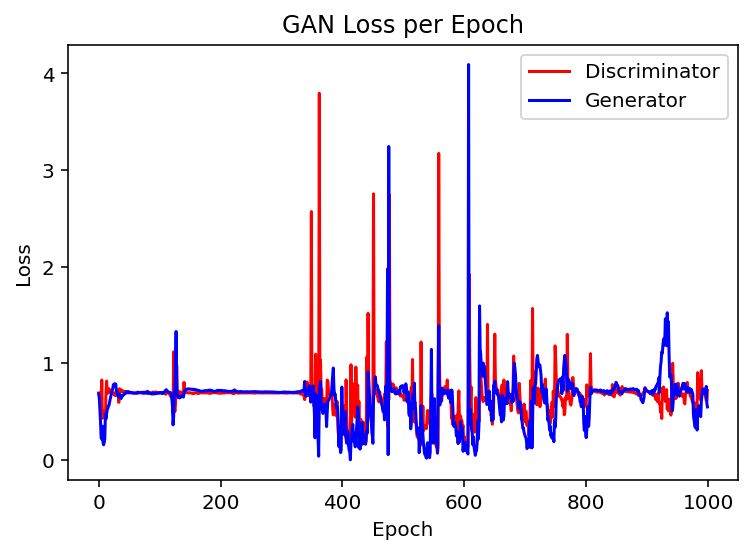

In [3]:

def get_notes():
    
    return metallica_2.split()

def prepare_sequences(notes, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    sequence_length = 400
    print("n_vocab", n_vocab)

    # Get all tokens from sequence
    tokens = sorted(set(item for item in notes))

    # Create a dictionary to map tokens to integers
    note_to_int = dict((note, number) for number, note in enumerate(tokens))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        network_output.append(note_to_int[sequence_out])

    print("network input ", network_input)
    print("network output ",network_output)
    n_patterns = len(network_input)

    # Reshape the input into a format compatible with LSTM layers
    network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
    
    # Normalize input between -1 and 1
    network_input = (network_input - float(n_vocab)/2) / (float(n_vocab)/2)
    network_output = np_utils.to_categorical(network_output)

    return (network_input, network_output)

def generate_notes(model, network_input, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    start = numpy.random.randint(0, len(network_input)-1)
    
    # Get pitch names and store in a dictionary
    pitchnames = sorted(set(item for item in notes))
    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in range(500):
        prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = numpy.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)
        
        pattern = numpy.append(pattern,index)
        #pattern.append(index)
        pattern = pattern[1:len(pattern)]

    return prediction_output
  
def create_midi(prediction_output, filename):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []
    print(prediction_output)
    # create note and chord objects based on the values generated by the model
  """  for item in prediction_output:
        
        pattern = item
        
        #pattern is a rest
        if("Z" in pattern):
          new_note=note.Rest()
          length=pattern[2:]
          if(length!=""):
            if('.' in length):
              new_note.duration.quarterLength=float(length)                                    
            else:
              new_note.duration.quarterLength=Fraction(length)
            qLength=new_note.duration.quarterLength
            output_notes.append(new_note)
        # pattern is a chord
        elif ('*' in pattern) or pattern.isdigit():
            separated=pattern.split(":")
            notes_in_chord = separated[0].split("*")
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            length=separated[1]
            if(length!=""):
              if('.' in length):
                new_chord.duration.quarterLength=float(length)
              else:
                new_chord.duration.quarterLength=Fraction(length)
            qLength=new_note.duration.quarterLength
            #new_chord.volume.velocity=int(separated[2])
            #new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            separated=pattern.split(":")
            if(separated[0].isdigit()):
                new_note= note.Note(int(separated[0]))
            else:
                new_note = note.Note(separated[0])
            length=separated[1]
            if(length!=""):
              if('.' in length):
                new_note.duration.quarterLength=float(length)                                    
              else:
                new_note.duration.quarterLength=Fraction(length)
            new_note.volume.velocity=int(separated[2])
            new_note.offset = offset
            qLength=new_note.duration.quarterLength
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset +=qLength

    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='{}.mid'.format(filename))"""

class GAN():
    def __init__(self, rows):
        self.seq_length = rows
        self.seq_shape = (self.seq_length, 1)
        self.latent_dim = 1000
        self.disc_loss = []
        self.gen_loss =[]
        
        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates note sequences
        z = Input(shape=(self.seq_shape))
        generated_seq = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(generated_seq)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
  
    def build_discriminator(self):

        model = Sequential()
        model.add(tf.compat.v1.keras.layers.CuDNNLSTM(512, input_shape=self.seq_shape, return_sequences=True))
        model.add(Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(512)))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        seq = Input(shape=self.seq_shape)
        validity = model(seq)

        return Model(seq, validity)
      
    def build_generator(self):

        model = Sequential()
        model.add(tf.compat.v1.keras.layers.CuDNNLSTM(512, input_shape=(self.seq_shape), return_sequences=True))
        model.add(Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(512)))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.seq_shape), activation='tanh'))
        model.add(Reshape(self.seq_shape))
        model.summary()
        
        noise = Input(shape=(self.seq_shape))
        seq = model(noise)

        return Model(noise, seq)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load and convert the data
        notes = get_notes()
        n_vocab = len(set(notes))
        X_train, y_train = prepare_sequences(notes, n_vocab)

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        # Training the model
        for epoch in range(epochs):

            # Training the discriminator
            # Select a random batch of note sequences
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_seqs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new note sequences
            gen_seqs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
            d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            #  Training the Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as real)
            g_loss = self.combined.train_on_batch(noise, real)

            # Print the progress and save into loss lists
            if epoch % sample_interval == 0:
              print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
              self.disc_loss.append(d_loss[0])
              self.gen_loss.append(g_loss)

        self.plot_loss()
        self.generate(notes)
        print ("n_vocab", n_vocab)

        
    def generate(self, input_notes):
        # Get pitch names and store in a dictionary
        notes = input_notes
        #print("input notes ", input_notes)
        tokens = sorted(set(item for item in notes))
        int_to_note = dict((number, note) for number, note in enumerate(tokens))
        half_length = len(int_to_note)/2
        print("int to note len ",len(int_to_note))
        
        # Use random noise to generate sequences
        noise = np.random.normal(0, 1, (1, self.latent_dim))
        predictions = self.generator.predict(noise)
        print("predictions:\n",predictions[0])
        print(type(predictions))
        pred_notes = [x*(half_length-1)+half_length-1  for x in predictions[0]]
        #print("pred", len(predictions))
        #print("pred_notes ", len(pred_notes))        
        pred_notes = [int_to_note[int(x)] for x in pred_notes]
        
        
        create_midi(pred_notes, 'gan_final')
        
    def plot_loss(self):
        plt.plot(self.disc_loss, c='red')
        plt.plot(self.gen_loss, c='blue')
        plt.title("GAN Loss per Epoch")
        plt.legend(['Discriminator', 'Generator'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.savefig('GAN_Loss_per_Epoch_final.png', transparent=True)
        #plt.close()

if __name__ == '__main__':
  gan = GAN(rows=400)    
  gan.train(epochs=1000, batch_size=32, sample_interval=1)

In [0]:
gan.gen_loss

[0.6859221458435059,
 0.6819726228713989,
 0.672427773475647,
 0.6487807035446167,
 0.6162500381469727,
 0.5934875011444092,
 0.6098936796188354,
 0.6192669868469238,
 0.6285982728004456,
 0.6522501707077026]

In [0]:
gan.disc_loss

[0.6985940039157867,
 0.6899680197238922,
 0.6853838264942169,
 0.6791810691356659,
 0.6766769587993622,
 0.6737847626209259,
 0.6892961263656616,
 0.6638820469379425,
 0.7610526084899902,
 0.6654702723026276]

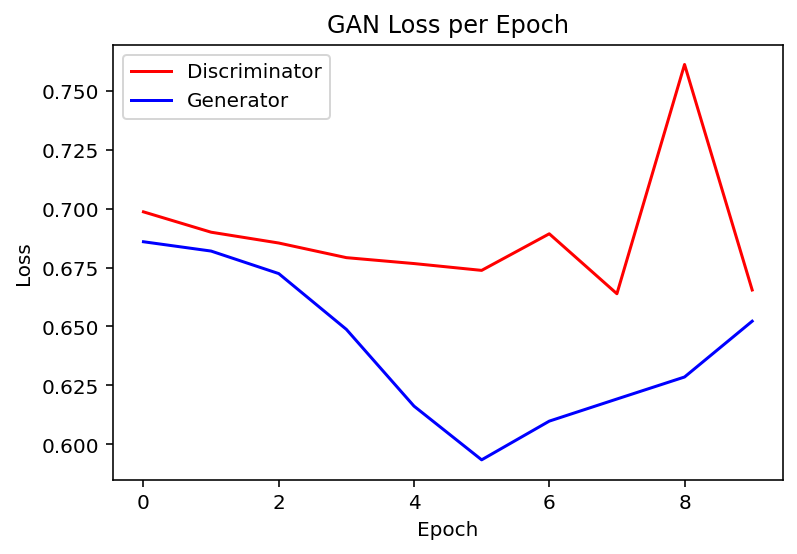

In [0]:
plt.plot(gan.disc_loss, c='red')
plt.plot(gan.gen_loss, c='blue')
plt.title("GAN Loss per Epoch")
plt.legend(['Discriminator', 'Generator'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('GAN_Loss_per_Epoch_final.png', transparent=True)


In [0]:
output=['C3:0.5:57', 'B3:1.75:55', 'A4:0.25:64', 'C3:0.25:57', 'B-2:0.25:58', 'B3:0.5:54', 'C3:0.25:79', 'C3:1.75:51', 'A4:0.25:71', 'C3:0.25:70', 'C3:1.75:51', '0*4*7:3.0:50', 'C3:1.75:51', '0*4*7:3.0:50', 'A4:0.0:57', 'C3:1.75:51', 'A4:0.25:82', 'C3:1.75:51', '0*4*7:3.0:50', 'C3:0.5:59', '0*4*7:3.0:50', '0:3.0:53', '0:10.0:82', 'C3:1.75:51', '0*4*7:3.0:50', '0*4:0.5:67', 'C3:0.5:58', '0*4*7:3.0:50', '7*0:2.0:54', '0*4*7:3.0:50', 'C3:0.5:59', 'C3:0.25:70', 'C3:0.5:58', 'A3:0.25:45', '0*4*7:3.0:50', '0*4*7:3.0:50', '0*4*7:3.0:50', '0*4*7:3.0:50', 'C3:1.75:51', 'C3:1.75:51', '7*9:1.0:60', '0*4:0.5:67', '0*4*7:3.0:50', '0*4*7:3.0:50', 'B-4:0.0:57', 'C3:1.75:51', 'B3:0.25:53', '0*4*7:3.0:50', 'C3:1.75:51', 'A3:0.5:53', '0*4*7:3.0:50', 'C3:1.75:51', '0*4*7:3.0:50', 'C3:0.75:60', '0*4:0.5:67', '0*4:0.5:67', 'A3:0.5:53', 'C3:1.75:51', 'C3:1.75:51', 'B3:0.25:56', '5*8*0:1.0:67', 'C3:1.75:51', '0*4*7:3.0:50', '0*4*7:3.0:50', 'C3:0.5:59', 'C3:0.75:60', '0*4*7:3.0:50', 'C3:0.0:57', 'A4:0.25:58', 'C3:0.25:78', 'C3:0.5:57', '7*8:1.0:64', 'B4:0.5:55', 'C3:1.75:51', 'A2:0.25:51', 'B-5:0.5:67', '0*4*7:3.0:50', 'C3:1.75:51', 'C3:0.75:60', 'A2:0.25:57', 'C3:1.75:51', '4*5:1.0:75', 'A3:0.25:55', 'C3:1.75:51', '0:10.0:82', 'C3:1.75:51', 'B2:0.5:58', 'A4:0.25:59', 'C3:1.75:51', 'B5:0.25:68', 'C3:0.5:57', 'C3:0.25:79', 'C#5:0.25:60', 'B3:0.5:57', 'B4:0.25:53', 'C3:0.25:88', 'C3:0.5:57', '0:3.0:53', 'C3:1.75:51', 'A5:0.5:69']

In [0]:
out=['B4:0.25:60', 'B4:1.0:57', 'B3:0.25:45', 'B4:0.5:77', 'B-4:0.25:79', 'B-3:0.25:73', 'B4:0.25:75', 'B4:0.5:57', '0*4:0.5:67', 'C3:0.25:59', '0:10.0:82', 'A4:0.25:57', 'A5:0.25:69', 'C3:0.25:65', 'B3:0.25:56', '5*7:1.0:66', 'A2:0.25:55', 'C3:1.75:51', 'A4:0.5:63', 'B4:0.25:96', 'A3:0.5:59', 'C3:1.75:55', 'A3:0.25:73', 'A4:0.25:73', '3*5:1.0:66', 'B3:0.75:60', 'C3:1.75:51', 'C3:0.25:88', 'C3:1.75:51', '0*4:0.5:67', 'C3:0.25:77', 'C2:5.75:72', 'A3:0.25:60', 'C3:1.75:55', 'C3:1.75:55', 'A2:0.25:58', '0*4*7:3.0:50', 'C3:1.75:55', 'C3:1.75:55', 'C#4:0.5:71', 'C3:1.75:55', 'B-2:0.25:55', 'A2:0.5:57', 'C3:1.75:51', 'C3:0.25:75', 'C3:1.75:55', 'A3:0.25:42', 'B-3:0.25:58', '0*4*7:3.0:50', 'B3:0.25:74', 'C3:0.25:75', '0:10.0:82', 'C3:0.75:60', '5*7:1.0:66', 'C3:0.25:78', '2*3:1.0:64', 'C3:1.75:55', 'C3:1.75:55', 'A4:0.0:57', 'C3:0.5:58', 'C3:0.25:66', 'B-3:0.5:63', 'C3:0.5:51', 'C3:0.25:66', 'C3:0.25:79', 'C3:1.75:51', '2*3:1.0:64', 'C#4:0.5:71', 'A2:0.25:58', 'C3:1.75:55', '10*0:1.0:66', 'C3:0.5:52', 'C3:0.25:79', '3*5:1.0:66', 'B-3:0.25:74', 'C3:1.75:55', '7*10*0:1.0:67', 'C2:2.0:58', '8*10:1.0:68', 'A4:1/3:79', 'C3:0.5:52', '3*5:1.0:66', 'C3:0.5:52', 'C3:0.25:63', 'A3:0.5:53', 'C3:1.75:51', '2*5:1.0:66', 'C2:2.0:58', 'B3:0.25:53', '4*5:1.0:75', 'A2:0.25:57', '0*4:0.5:67', 'B-4:0.5:68', 'A3:0.25:41', 'A3:0.25:52', 'B3:0.25:69', 'B4:0.5:71', 'A3:0.25:53', 'A3:0.5:60', 'C3:1.75:51']

In [0]:
['B-4:0.25:72', 'B-3:0.25:47', 'B-2:0.5:57', 'C3:0.25:77', 'A4:0.25:57', 'C#5:0.25:45', 'B-3:0.25:41', 'C3:0.25:58', 'B-4:0.25:81', 'B-2:0.5:57', 'A3:0.25:46', 'A3:0.25:51', 'A4:0.5:77', 'B2:0.25:55', 'C3:0.25:70', 'C3:0.25:72', 'C3:0.25:51', 'B-3:0.5:60', 'B3:0.5:88', '5*8*0:1.0:67', 'B2:0.5:58', 'B3:0.75:60', 'B4:0.5:71', 'B3:1.75:55', 'C3:0.25:78', 'A4:0.25:59', 'C3:0.5:57', 'C3:0.25:75', 'B-4:0.25:68', 'C3:0.25:79', 'C#4:0.5:55', 'C3:1/3:55', 'C3:0.25:62', 'A2:0.25:51', 'C3:0.75:60', 'C3:0.5:59', 'C3:0.25:58', 'C3:0.5:51', 'C3:0.75:60', 'B3:0.25:75', '0:3.0:53', 'C3:1.75:55', 'B2:0.25:53', 'B4:1.0:57', 'C3:1/3:55', 'B-4:0.75:77', 'B-3:0.5:67', 'C3:1.75:51', 'C3:0.25:71', 'A4:0.25:82', 'A4:1.0:68', 'C3:1/3:55', 'C3:0.5:59', '0*4*7:3.0:50', 'C3:0.5:59', 'B2:0.25:77', 'C3:0.5:52', 'C3:0.5:51', 'B3:0.25:43', 'B5:0.25:64', 'C3:1/3:55', 'C3:1/3:55', 'A5:0.5:77', 'C3:1.75:51', 'B-3:0.25:73', 'B3:2.0:62', 'C#4:0.5:55', 'C#3:0.25:71', 'B3:0.25:61', 'B-3:0.25:73', 'B-3:0.25:57', 'C3:0.25:60', 'A2:0.25:56', 'B2:0.5:57', 'A3:0.5:56', 'A5:0.25:52', 'A4:0.5:57', 'A4:0.5:55', 'A3:0.25:73', 'B-4:0.25:69', 'C3:0.0:57', 'C3:0.25:70', 'B3:2.0:62', 'B-4:0.25:82', 'B2:0.25:56', 'A4:0.25:64', '10*0:1.0:66', 'A4:0.25:73', 'C3:0.25:70', 'C3:0.25:71', 'B3:0.25:75', 'C3:0.25:72', 'A2:0.5:57', 'C3:1/3:55', 'C#4:0.25:67', 'A3:0.25:76', 'B-3:0.5:63', 'A4:0.0:58', 'C3:0.5:58', 'B3:0.5:58']

In [0]:
['0*4*7:3.0:50', '7*10*0:1.0:67', 'C3:2.0:51', '0*4*7:3.0:50', 'B4:0.25:65', 'B3:0.5:58', 'A4:0.25:57', 'C#4:0.5:71', 'A5:0.5:76', 'B4:0.25:65', '0*4*7:3.0:50', 'C3:16.0:60', 'A2:0.25:55', 'A4:0.5:56', 'C3:1.75:51', 'B-2:0.25:58', 'B3:0.5:58', 'A2:1.0:61', 'A2:0.25:70', 'C3:0.25:80', '0*4*7:3.0:50', 'C#5:0.25:45', 'B4:0.25:70', 'C3:0.5:59', '0*4*7:3.0:50', 'B4:0.25:55', '2*3:1.0:64', 'B4:0.25:55', 'A5:0.5:67', '0*4:0.5:67', 'B3:2.0:65', 'C3:0.25:72', '0*4:0.5:67', '5*7:1.0:66', 'B-4:0.25:91', 'A2:0.5:54', 'C3:0.5:58', 'B-4:0.25:71', 'C3:16.0:60', 'A4:0.25:56', 'C3:1/3:55', 'B2:0.25:52', '0*4*7:3.0:50', 'C3:1.75:51', 'C3:2.0:51', 'C3:0.25:66', 'B3:0.25:62', 'C3:0.25:80', 'B2:0.5:57', 'B4:1.0:57', 'C3:2.0:51', '2*5:1.0:66', 'A4:0.25:76', 'C3:2.0:51', '2*3:1.0:64', 'A3:0.25:45', 'C#5:0.25:45', 'C3:0.25:79', 'B-3:0.25:60', '10*0:1.0:66', 'B4:0.5:82', 'A4:0.25:64', 'C#4:0.5:56', '0*4*7:3.0:50', 'C3:0.25:79', '0*4*7:3.0:50', 'C3:0.25:81', 'B2:0.5:58', 'A4:0.25:80', 'A3:0.25:41', 'A2:0.25:55', 'C3:0.25:57', 'B2:0.25:68', '0*4*7:3.0:50', 'A3:0.0:57', '4*5:1.0:75', 'C3:1.75:55', 'B3:2.0:61', 'C#4:0.5:56', 'C3:2.0:51', 'C3:16.0:60', 'C3:2.0:51', 'A4:1.0:61', 'C3:16.0:60', 'B3:0.25:71', 'A4:0.25:54', 'A3:0.25:56', 'C3:0.25:71', 'C3:2.0:51', 'B-3:0.25:59', 'A3:0.25:75', 'B2:3.5:65', 'B-3:0.25:47', 'C3:2.0:51', 'C3:2.0:51', 'B4:0.5:71', 'C3:2.0:51', 'C3:1.75:51', '0*4*7:3.0:50', 'B2:0.25:55']

In [0]:
['C3:0.75:60', 'A4:0.25:71', 'A5:0.25:81', 'C3:0.25:74', 'C3:0.25:55', 'C3:0.25:65', 'C3:2.0:51', '7*8:1.0:64', 'C3:0.25:59', 'B-2:0.25:55', 'A3:0.25:45', 'C3:0.25:88', 'A2:0.25:58', 'C#3:0.5:56', '5*8*0:1.0:67', 'A3:0.25:57', '2*5:1.0:66', 'C2:0.25:60', '7*9:1.0:60', 'C3:0.25:58', 'A4:0.25:76', '3*5:1.0:66', 'B-3:0.25:58', '5*7:1.0:66', 'C3:0.25:62', 'B4:0.5:60', 'B-4:0.25:61', 'B4:0.25:58', 'C3:1.75:55', 'B-4:0.25:72', 'A4:0.25:59', 'B-4:0.25:86', 'C3:0.5:52', 'A4:1/3:79', 'C3:0.5:58', '5*7:1.0:66', 'B-3:0.25:64', 'C3:0.25:54', 'C3:0.25:88', 'A5:0.5:69', 'C3:1/3:55', 'C3:1/3:55', 'A5:0.25:85', 'C3:0.25:71', 'C3:0.25:59', 'C2:2.0:57', 'C#3:0.5:56', 'C3:0.25:56', 'C3:0.25:77', 'A4:0.25:48', 'C3:0.25:54', 'C3:0.25:79', 'B4:0.25:72', 'A4:0.5:76', 'B4:0.25:77', 'C3:0.25:51', 'C3:0.25:79', 'A3:0.25:50', 'A3:0.5:54', 'A3:2.0:62', 'B-4:0.5:83', 'B-4:0.25:82', 'A2:0.25:70', 'A5:0.5:69', 'B-4:0.5:71', 'A4:0.5:55', 'A4:0.25:60', 'A3:0.5:51', 'B4:0.5:57', 'C#5:0.25:60', 'B-4:0.75:77', 'B2:0.25:56', 'A4:0.5:63', 'B4:0.25:96', 'C3:0.25:58', 'A5:0.75:70', 'B4:0.25:57', 'C2:5.75:72', 'B-3:0.25:57', 'A3:0.25:56', 'B-2:0.25:60', 'C#5:0.25:60', 'A3:0.25:70', 'C3:0.25:70', 'B3:0.25:56', 'B4:0.25:60', 'A5:0.5:69', 'B4:0.25:58', 'B4:0.5:54', 'B-4:0.25:79', 'B3:0.25:59', 'A4:0.25:82', '5*8*0:1.0:67', 'B4:1.0:58', 'B-4:0.25:82', 'A4:0.25:77', 'C#3:0.5:56', 'B-4:0.5:71', 'C3:0.25:66', 'C3:0.25:62']

In [0]:
def get_notes():
    
    return test1.split()

def prepare_sequences(notes, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    sequence_length = 2
    print("n_vocab", n_vocab)

    # Get all pitch names
    pitchnames = sorted(set(item for item in notes))

    #print(pitchnames)
    # Create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        print("i, ", i, " seq_in,", sequence_in)
        sequence_out = notes[i + sequence_length]
        print("i, ", i, " seq_out,", sequence_out)

        network_input.append([note_to_int[char] for char in sequence_in])
        print("i, ", i, " net_in,", network_input)

        network_output.append(note_to_int[sequence_out])
        print("i, ", i, " net_out,", network_output)

    #print("network input ", network_input)
    #print("network output ",network_output)
    n_patterns = len(network_input)

    # Reshape the input into a format compatible with LSTM layers
    network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
    print("network input after reshape: ", network_input)

    # Normalize input between -1 and 1
    network_input = (network_input - float(n_vocab)/2) / (float(n_vocab)/2)
    network_output = np_utils.to_categorical(network_output)

    print("input after normalization: \n", network_input)
    print("output after normalization: \n", network_output)
    return (network_input, network_output)

In [0]:
x,y =prepare_sequences(get_notes(),len(get_notes()))

n_vocab 12
i,  0  seq_in, ['Piano:tempo:120.0', 'Piano:A4:2.0:95:0.0']
i,  0  seq_out, Piano:Z:0.5:0.0
i,  0  net_in, [[11, 0]]
i,  0  net_out, [6]
i,  1  seq_in, ['Piano:A4:2.0:95:0.0', 'Piano:Z:0.5:0.0']
i,  1  seq_out, Piano:Z:1.0:0.0
i,  1  net_in, [[11, 0], [0, 6]]
i,  1  net_out, [6, 7]
i,  2  seq_in, ['Piano:Z:0.5:0.0', 'Piano:Z:1.0:0.0']
i,  2  seq_out, Piano:Z:278/3:0.0
i,  2  net_in, [[11, 0], [0, 6], [6, 7]]
i,  2  net_out, [6, 7, 8]
i,  3  seq_in, ['Piano:Z:1.0:0.0', 'Piano:Z:278/3:0.0']
i,  3  seq_out, Piano:C5:1.0:95:0.5
i,  3  net_in, [[11, 0], [0, 6], [6, 7], [7, 8]]
i,  3  net_out, [6, 7, 8, 2]
i,  4  seq_in, ['Piano:Z:278/3:0.0', 'Piano:C5:1.0:95:0.5']
i,  4  seq_out, Piano:Z:3.5:1.0
i,  4  net_in, [[11, 0], [0, 6], [6, 7], [7, 8], [8, 2]]
i,  4  net_out, [6, 7, 8, 2, 9]
i,  5  seq_in, ['Piano:C5:1.0:95:0.5', 'Piano:Z:3.5:1.0']
i,  5  seq_out, Piano:E5:2.0:95:1.0
i,  5  net_in, [[11, 0], [0, 6], [6, 7], [7, 8], [8, 2], [2, 9]]
i,  5  net_out, [6, 7, 8, 2, 9, 5]
i,  6 

In [0]:
x.shape[0]

10

In [0]:
test1="_1.0 F#3:0.75:100 _2.75 F#3:1.5:100 _2.25 F#3:1.25:100 _13/6 A3:2.0:100 _19/12 C#4:1.0:100 _2.25 F#3:0.75:100 _1.75 F#3:0.75:100"

In [0]:
pitchnames = sorted(set(item for item in test1.split()))

In [0]:
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

In [0]:
int_to_note

{0: 'A3:2.0:100',
 1: 'C#4:1.0:100',
 2: 'F#3:0.75:100',
 3: 'F#3:1.25:100',
 4: 'F#3:1.5:100',
 5: '_1.0',
 6: '_1.75',
 7: '_13/6',
 8: '_19/12',
 9: '_2.25',
 10: '_2.75'}

In [0]:
type(pitchnames)

list